# Stage 5: Does it work as expected?

The analysis is done. The results are in. It's time to share with someone else. Do the results look good? And:

* How easy is it for someone else to run my code? 
* How likely are they to get the same results?
* How hard is it for someone else to check that things work as expected?

### Reproducibility Issues

* (MISSING-STATE) Can't reproduce because of some missing state. e.g. cells were run out of sequence. Variable was changed but notebook wasn't rerun.
* (VARIABLE-SCARCITY) A variable name was re-used (possibly as a result of copy/pasting code from elsewhere), setting up cognitive dissonance, or confusing code.
* (ARCH-DIFFERENCE) The same code runs differently on different architectures

### Default Better Principles

Write tests. Use them. Even if only to check that your imports work, Datasets load, and notebooks run to completion.
* **Test running clean notebooks**: We can't say this enough. Always test a clean run of a notebook before checking it in! `Kernel -> Restart & Run All` for the win. Most if not all `MISSING-STATE` and `VARIABLE-SCARCITY` issues would be resolved by this simple workflow step. Automate this to make it even easier. Running analysis steps can be slow. Make the slow ones manual tests, and the quick ones, like this notebook, run in CI. 
* **Test run from a fresh environment**: Blow it away. Start from scratch. See if you have any unaccounted for `MISSING-STATE` hiding in your environment.
* **BONUS-Test on another architecture**: This is where CI is your friend. It's usually easy to run on at least one platform that's different from your own.

## The Easydata Way: `make test`
We recognize that being creative is an integral part of doing data science work and research. We don't want to get in the way of that. In particular, we don't specify how you should do your work in the brainstorming phase (other than recommending that you check-in your work via git whenever something seems to work).

We love test-driven development, but we're agnostic about it's use with your data science workflow. This isn't software engineering, this is data science. However, once you hit the editing phase of your work, once you start to put together something beyond a scattered Sucky First Draft (SFD), it's time to start wearing that SEng hat. And if you care about sharing with your data science neighbours and friends, testing is paramount. 

Let's see what this looks like in our Penguin Example.

## The Penguin Data Analysis

The previous notebook gives us some idea of what the penguins data looks like by giving as all the
2D views of the data. However, the data is 4-dimensional. While four dimensions is low enough that we can sort of reconstruct what the full dimensional data looks like in our heads, it's better if we can reduce the dimension of our data to visualize it. 

Let's try out [UMAP](https://github.com/lmcinnes/umap) as a dimension reduction technique. By reducing the
dimension in a way that preserves as much of the structure of the data
as possible we can get a visualisable representation of the data
allowing us to "see" the data and its structure and begin to get some
intuition about the data itself.

### Default Better Principle: Test run from a fresh environment


In [1]:
import umap

from src.data import Dataset
from src import paths

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2021-10-29 23:47:08,682 - utils - INFO - Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.


2021-10-29 23:47:08,683 - utils - INFO - NumExpr defaulting to 8 threads.


2021-10-29 23:47:09,039 - __init__ - DEBUG - matplotlib data path: /Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data


2021-10-29 23:47:09,045 - __init__ - DEBUG - CONFIGDIR=/Users/kjell/.matplotlib


2021-10-29 23:47:09,048 - __init__ - DEBUG - matplotlib version 3.4.3


2021-10-29 23:47:09,048 - __init__ - DEBUG - interactive is False


2021-10-29 23:47:09,049 - __init__ - DEBUG - platform is darwin


2021-10-29 23:47:09,049 - __init__ - DEBUG - loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'site', 'os', 'stat', '_stat', '_collections_abc', 'posixpath', 'genericpath', 'os.path', '_sitebuiltins', 'types', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'collections', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', '_collections', 'functools', '_functools', 'mpl_toolkits', 'sphinxcontrib', 'runpy', 'pkgutil', 'weakref', '_weakrefset', 'ipykernel', 'ipykernel._version', 're', 'enum', 'sre_compile', '_sre', 'sre_parse', 'sre_constants', 'copyreg', 'ipykernel.connect',

2021-10-29 23:47:09,084 - __init__ - DEBUG - CACHEDIR=/Users/kjell/.matplotlib


2021-10-29 23:47:09,087 - font_manager - DEBUG - Using fontManager instance from /Users/kjell/.matplotlib/fontlist-v330.json


2021-10-29 23:47:09,183 - pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.


2021-10-29 23:47:09,187 - pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.


2021-10-29 23:47:09,212 - pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.


Turns out, we're missing `umap`! 

Please, **DO NOT** run `pip install` or `conda install` to install UMAP from the command line, it will lead to **MISSING-STATE** in your environment when someone else tries to run this work. 

Instead, **your next quest** is to add `umap-learn` to our `environment.yml` file and do a `make update_environment` to make sure it's shared with everyone.

**Hint:** To add [UMAP](https://github.com/lmcinnes/umap), you'll need to update your environment. We recommend installing umap via the conda-forge channel. For example, you can add `my-package` to from `my-conda-channel` via a line like this in your `environment.yml`.
```
- my-conda-channel::my-package
```
In this case:
```
- conda-forge::umap-learn
```
(Again, don't forget to `make update_environment` after adding it!)

## Load up the Datasets we'll use

In [2]:
penguins = Dataset.load("penguins-clean").data
scaled_penguin_data = Dataset.load("penguins-scaled").data

2021-10-29 23:47:09,221 - catalog - DEBUG - Loaded 3 records from 'transformers' Catalog.


2021-10-29 23:47:09,221 - catalog - DEBUG - Verifying serialization for catalog 'transformers'


2021-10-29 23:47:09,223 - catalog - DEBUG - Loaded 4 records from 'datasets' Catalog.


2021-10-29 23:47:09,223 - catalog - DEBUG - Verifying serialization for catalog 'datasets'


2021-10-29 23:47:09,225 - datasets - DEBUG - Loaded DatasetGraph with 4 nodes and 3 edges.


2021-10-29 23:47:09,225 - datasets - DEBUG - Verifying hashes using Dataset catalog.


2021-10-29 23:47:09,227 - catalog - DEBUG - Loaded 4 records from 'datasets' Catalog.


2021-10-29 23:47:09,227 - catalog - DEBUG - Verifying serialization for catalog 'datasets'


2021-10-29 23:47:09,229 - datasets - WARNING - check_hashes=True but no hashes in catalog for Dataset:penguins-clean


2021-10-29 23:47:09,230 - datasets - DEBUG - Load penguins-clean from disk...


2021-10-29 23:47:09,232 - datasets - DEBUG - Loaded penguins-clean from disk.


2021-10-29 23:47:09,234 - catalog - DEBUG - Loaded 3 records from 'transformers' Catalog.


2021-10-29 23:47:09,234 - catalog - DEBUG - Verifying serialization for catalog 'transformers'


2021-10-29 23:47:09,236 - catalog - DEBUG - Loaded 4 records from 'datasets' Catalog.


2021-10-29 23:47:09,236 - catalog - DEBUG - Verifying serialization for catalog 'datasets'


2021-10-29 23:47:09,238 - datasets - DEBUG - Loaded DatasetGraph with 4 nodes and 3 edges.


2021-10-29 23:47:09,239 - datasets - DEBUG - Verifying hashes using Dataset catalog.


2021-10-29 23:47:09,240 - catalog - DEBUG - Loaded 4 records from 'datasets' Catalog.


2021-10-29 23:47:09,241 - catalog - DEBUG - Verifying serialization for catalog 'datasets'


2021-10-29 23:47:09,242 - datasets - DEBUG - Load penguins-scaled from disk...


2021-10-29 23:47:09,243 - datasets - DEBUG - Loaded penguins-scaled from disk.


UMAP follows the sklearn API and has a method ``fit`` which we
pass the data we want the model to learn from. Since, at the end of the
day, we are going to want to reduced representation of the data we will
use the ``fit_transform`` method which first calls ``fit`` and
then returns the transformed data as a numpy array.

In [3]:
reducer = umap.UMAP()

In [4]:
embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape

2021-10-29 23:47:09,259 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=29)
           2	LOAD_CONST(arg=1, lineno=29)
           4	STORE_FAST(arg=2, lineno=29)
           6	SETUP_LOOP(arg=46, lineno=30)
           8	LOAD_GLOBAL(arg=0, lineno=30)
          10	LOAD_FAST(arg=0, lineno=30)
          12	LOAD_ATTR(arg=1, lineno=30)
          14	LOAD_CONST(arg=2, lineno=30)
          16	BINARY_SUBSCR(arg=None, lineno=30)
          18	CALL_FUNCTION(arg=1, lineno=30)
          20	GET_ITER(arg=None, lineno=30)
>         22	FOR_ITER(arg=28, lineno=30)
          24	STORE_FAST(arg=3, lineno=30)
          26	LOAD_FAST(arg=2, lineno=31)
          28	LOAD_FAST(arg=0, lineno=31)
          30	LOAD_FAST(arg=3, lineno=31)
          32	BINARY_SUBSCR(arg=None, lineno=31)
          34	LOAD_FAST(arg=1, lineno=31)
          36	LOAD_FAST(arg=3, lineno=31)
          38	BINARY_SUBSCR(arg=None, lineno=31)
          40	BINARY_SUBTRACT(arg=None, lineno=31)
          42	LOAD_CONST(arg=3, lineno=

2021-10-29 23:47:09,259 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:09,260 - byteflow - DEBUG - stack: []


2021-10-29 23:47:09,260 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=29)


2021-10-29 23:47:09,261 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,261 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_CONST(arg=1, lineno=29)


2021-10-29 23:47:09,262 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,262 - byteflow - DEBUG - dispatch pc=4, inst=STORE_FAST(arg=2, lineno=29)


2021-10-29 23:47:09,262 - byteflow - DEBUG - stack ['$const2.0']


2021-10-29 23:47:09,263 - byteflow - DEBUG - end state. edges=[Edge(pc=6, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:09,263 - byteflow - DEBUG - pending: deque([State(pc_initial=6 nstack_initial=0)])


2021-10-29 23:47:09,264 - byteflow - DEBUG - stack: []


2021-10-29 23:47:09,265 - byteflow - DEBUG - dispatch pc=6, inst=SETUP_LOOP(arg=46, lineno=30)


2021-10-29 23:47:09,265 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,266 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_GLOBAL(arg=0, lineno=30)


2021-10-29 23:47:09,266 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,266 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_FAST(arg=0, lineno=30)


2021-10-29 23:47:09,267 - byteflow - DEBUG - stack ['$8load_global.0']


2021-10-29 23:47:09,267 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_ATTR(arg=1, lineno=30)


2021-10-29 23:47:09,267 - byteflow - DEBUG - stack ['$8load_global.0', '$x10.1']


2021-10-29 23:47:09,268 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_CONST(arg=2, lineno=30)


2021-10-29 23:47:09,268 - byteflow - DEBUG - stack ['$8load_global.0', '$12load_attr.2']


2021-10-29 23:47:09,269 - byteflow - DEBUG - dispatch pc=16, inst=BINARY_SUBSCR(arg=None, lineno=30)


2021-10-29 23:47:09,269 - byteflow - DEBUG - stack ['$8load_global.0', '$12load_attr.2', '$const14.3']


2021-10-29 23:47:09,269 - byteflow - DEBUG - dispatch pc=18, inst=CALL_FUNCTION(arg=1, lineno=30)


2021-10-29 23:47:09,270 - byteflow - DEBUG - stack ['$8load_global.0', '$16binary_subscr.4']


2021-10-29 23:47:09,270 - byteflow - DEBUG - dispatch pc=20, inst=GET_ITER(arg=None, lineno=30)


2021-10-29 23:47:09,271 - byteflow - DEBUG - stack ['$18call_function.5']


2021-10-29 23:47:09,271 - byteflow - DEBUG - end state. edges=[Edge(pc=22, stack=('$20get_iter.6',), blockstack=({'kind': BlockKind(LOOP), 'end': 54, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:09,272 - byteflow - DEBUG - pending: deque([State(pc_initial=22 nstack_initial=1)])


2021-10-29 23:47:09,272 - byteflow - DEBUG - stack: ['$phi22.0']


2021-10-29 23:47:09,272 - byteflow - DEBUG - dispatch pc=22, inst=FOR_ITER(arg=28, lineno=30)


2021-10-29 23:47:09,273 - byteflow - DEBUG - stack ['$phi22.0']


2021-10-29 23:47:09,273 - byteflow - DEBUG - end state. edges=[Edge(pc=52, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 54, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=24, stack=('$phi22.0', '$22for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 54, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:09,274 - byteflow - DEBUG - pending: deque([State(pc_initial=52 nstack_initial=0), State(pc_initial=24 nstack_initial=2)])


2021-10-29 23:47:09,274 - byteflow - DEBUG - stack: []


2021-10-29 23:47:09,274 - byteflow - DEBUG - dispatch pc=52, inst=POP_BLOCK(arg=None, lineno=31)


2021-10-29 23:47:09,275 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,275 - byteflow - DEBUG - end state. edges=[Edge(pc=54, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:09,276 - byteflow - DEBUG - pending: deque([State(pc_initial=24 nstack_initial=2), State(pc_initial=54 nstack_initial=0)])


2021-10-29 23:47:09,276 - byteflow - DEBUG - stack: ['$phi24.0', '$phi24.1']


2021-10-29 23:47:09,276 - byteflow - DEBUG - dispatch pc=24, inst=STORE_FAST(arg=3, lineno=30)


2021-10-29 23:47:09,277 - byteflow - DEBUG - stack ['$phi24.0', '$phi24.1']


2021-10-29 23:47:09,277 - byteflow - DEBUG - dispatch pc=26, inst=LOAD_FAST(arg=2, lineno=31)


2021-10-29 23:47:09,278 - byteflow - DEBUG - stack ['$phi24.0']


2021-10-29 23:47:09,278 - byteflow - DEBUG - dispatch pc=28, inst=LOAD_FAST(arg=0, lineno=31)


2021-10-29 23:47:09,278 - byteflow - DEBUG - stack ['$phi24.0', '$result26.2']


2021-10-29 23:47:09,279 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_FAST(arg=3, lineno=31)


2021-10-29 23:47:09,279 - byteflow - DEBUG - stack ['$phi24.0', '$result26.2', '$x28.3']


2021-10-29 23:47:09,280 - byteflow - DEBUG - dispatch pc=32, inst=BINARY_SUBSCR(arg=None, lineno=31)


2021-10-29 23:47:09,280 - byteflow - DEBUG - stack ['$phi24.0', '$result26.2', '$x28.3', '$i30.4']


2021-10-29 23:47:09,281 - byteflow - DEBUG - dispatch pc=34, inst=LOAD_FAST(arg=1, lineno=31)


2021-10-29 23:47:09,281 - byteflow - DEBUG - stack ['$phi24.0', '$result26.2', '$32binary_subscr.5']


2021-10-29 23:47:09,282 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_FAST(arg=3, lineno=31)


2021-10-29 23:47:09,282 - byteflow - DEBUG - stack ['$phi24.0', '$result26.2', '$32binary_subscr.5', '$y34.6']


2021-10-29 23:47:09,282 - byteflow - DEBUG - dispatch pc=38, inst=BINARY_SUBSCR(arg=None, lineno=31)


2021-10-29 23:47:09,283 - byteflow - DEBUG - stack ['$phi24.0', '$result26.2', '$32binary_subscr.5', '$y34.6', '$i36.7']


2021-10-29 23:47:09,283 - byteflow - DEBUG - dispatch pc=40, inst=BINARY_SUBTRACT(arg=None, lineno=31)


2021-10-29 23:47:09,284 - byteflow - DEBUG - stack ['$phi24.0', '$result26.2', '$32binary_subscr.5', '$38binary_subscr.8']


2021-10-29 23:47:09,284 - byteflow - DEBUG - dispatch pc=42, inst=LOAD_CONST(arg=3, lineno=31)


2021-10-29 23:47:09,284 - byteflow - DEBUG - stack ['$phi24.0', '$result26.2', '$40binary_subtract.9']


2021-10-29 23:47:09,285 - byteflow - DEBUG - dispatch pc=44, inst=BINARY_POWER(arg=None, lineno=31)


2021-10-29 23:47:09,285 - byteflow - DEBUG - stack ['$phi24.0', '$result26.2', '$40binary_subtract.9', '$const42.10']


2021-10-29 23:47:09,286 - byteflow - DEBUG - dispatch pc=46, inst=INPLACE_ADD(arg=None, lineno=31)


2021-10-29 23:47:09,286 - byteflow - DEBUG - stack ['$phi24.0', '$result26.2', '$44binary_power.11']


2021-10-29 23:47:09,287 - byteflow - DEBUG - dispatch pc=48, inst=STORE_FAST(arg=2, lineno=31)


2021-10-29 23:47:09,287 - byteflow - DEBUG - stack ['$phi24.0', '$46inplace_add.12']


2021-10-29 23:47:09,287 - byteflow - DEBUG - dispatch pc=50, inst=JUMP_ABSOLUTE(arg=22, lineno=31)


2021-10-29 23:47:09,288 - byteflow - DEBUG - stack ['$phi24.0']


2021-10-29 23:47:09,288 - byteflow - DEBUG - end state. edges=[Edge(pc=22, stack=('$phi24.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 54, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:09,289 - byteflow - DEBUG - pending: deque([State(pc_initial=54 nstack_initial=0), State(pc_initial=22 nstack_initial=1)])


2021-10-29 23:47:09,289 - byteflow - DEBUG - stack: []


2021-10-29 23:47:09,290 - byteflow - DEBUG - dispatch pc=54, inst=LOAD_GLOBAL(arg=2, lineno=32)


2021-10-29 23:47:09,290 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,290 - byteflow - DEBUG - dispatch pc=56, inst=LOAD_METHOD(arg=3, lineno=32)


2021-10-29 23:47:09,291 - byteflow - DEBUG - stack ['$54load_global.0']


2021-10-29 23:47:09,291 - byteflow - DEBUG - dispatch pc=58, inst=LOAD_FAST(arg=2, lineno=32)


2021-10-29 23:47:09,291 - byteflow - DEBUG - stack ['$56load_method.1']


2021-10-29 23:47:09,292 - byteflow - DEBUG - dispatch pc=60, inst=CALL_METHOD(arg=1, lineno=32)


2021-10-29 23:47:09,292 - byteflow - DEBUG - stack ['$56load_method.1', '$result58.2']


2021-10-29 23:47:09,293 - byteflow - DEBUG - dispatch pc=62, inst=RETURN_VALUE(arg=None, lineno=32)


2021-10-29 23:47:09,293 - byteflow - DEBUG - stack ['$60call_method.3']


2021-10-29 23:47:09,293 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:09,294 - byteflow - DEBUG - pending: deque([State(pc_initial=22 nstack_initial=1)])


2021-10-29 23:47:09,294 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:09,295 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=6 nstack_initial=0): set(),
             State(pc_initial=22 nstack_initial=1): {'$phi22.0'},
             State(pc_initial=24 nstack_initial=2): {'$phi24.1'},
             State(pc_initial=52 nstack_initial=0): set(),
             State(pc_initial=54 nstack_initial=0): set()})


2021-10-29 23:47:09,295 - byteflow - DEBUG - defmap: {'$phi22.0': State(pc_initial=6 nstack_initial=0),
 '$phi24.1': State(pc_initial=22 nstack_initial=1)}


2021-10-29 23:47:09,296 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi22.0': {('$20get_iter.6',
                           State(pc_initial=6 nstack_initial=0)),
                          ('$phi24.0', State(pc_initial=24 nstack_initial=2))},
             '$phi24.0': {('$phi22.0', State(pc_initial=22 nstack_initial=1))},
             '$phi24.1': {('$22for_iter.2',
                           State(pc_initial=22 nstack_initial=1))}})


2021-10-29 23:47:09,296 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi22.0': {('$20get_iter.6',
                           State(pc_initial=6 nstack_initial=0)),
                          ('$phi22.0', State(pc_initial=22 nstack_initial=1))},
             '$phi24.0': {('$20get_iter.6',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi24.1': {('$22for_iter.2',
                           State(pc_initial=22 nstack_initial=1))}})


2021-10-29 23:47:09,297 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi22.0': {('$20get_iter.6',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi24.0': {('$20get_iter.6',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi24.1': {('$22for_iter.2',
                           State(pc_initial=22 nstack_initial=1))}})


2021-10-29 23:47:09,298 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi22.0': {('$20get_iter.6',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi24.0': {('$20get_iter.6',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi24.1': {('$22for_iter.2',
                           State(pc_initial=22 nstack_initial=1))}})


2021-10-29 23:47:09,298 - byteflow - DEBUG - keep phismap: {'$phi22.0': {('$20get_iter.6', State(pc_initial=6 nstack_initial=0))},
 '$phi24.1': {('$22for_iter.2', State(pc_initial=22 nstack_initial=1))}}


2021-10-29 23:47:09,298 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=6 nstack_initial=0): {'$phi22.0': '$20get_iter.6'},
             State(pc_initial=22 nstack_initial=1): {'$phi24.1': '$22for_iter.2'}})


2021-10-29 23:47:09,299 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:09,299 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$const2.0'}), (4, {'value': '$const2.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={6: ()})


2021-10-29 23:47:09,300 - byteflow - DEBUG - block_infos State(pc_initial=6 nstack_initial=0):
AdaptBlockInfo(insts=((8, {'res': '$8load_global.0'}), (10, {'res': '$x10.1'}), (12, {'item': '$x10.1', 'res': '$12load_attr.2'}), (14, {'res': '$const14.3'}), (16, {'index': '$const14.3', 'target': '$12load_attr.2', 'res': '$16binary_subscr.4'}), (18, {'func': '$8load_global.0', 'args': ['$16binary_subscr.4'], 'res': '$18call_function.5'}), (20, {'value': '$18call_function.5', 'res': '$20get_iter.6'})), outgoing_phis={'$phi22.0': '$20get_iter.6'}, blockstack=(), active_try_block=None, outgoing_edgepushed={22: ('$20get_iter.6',)})


2021-10-29 23:47:09,300 - byteflow - DEBUG - block_infos State(pc_initial=22 nstack_initial=1):
AdaptBlockInfo(insts=((22, {'iterator': '$phi22.0', 'pair': '$22for_iter.1', 'indval': '$22for_iter.2', 'pred': '$22for_iter.3'}),), outgoing_phis={'$phi24.1': '$22for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 54, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={52: (), 24: ('$phi22.0', '$22for_iter.2')})


2021-10-29 23:47:09,301 - byteflow - DEBUG - block_infos State(pc_initial=24 nstack_initial=2):
AdaptBlockInfo(insts=((24, {'value': '$phi24.1'}), (26, {'res': '$result26.2'}), (28, {'res': '$x28.3'}), (30, {'res': '$i30.4'}), (32, {'index': '$i30.4', 'target': '$x28.3', 'res': '$32binary_subscr.5'}), (34, {'res': '$y34.6'}), (36, {'res': '$i36.7'}), (38, {'index': '$i36.7', 'target': '$y34.6', 'res': '$38binary_subscr.8'}), (40, {'lhs': '$32binary_subscr.5', 'rhs': '$38binary_subscr.8', 'res': '$40binary_subtract.9'}), (42, {'res': '$const42.10'}), (44, {'lhs': '$40binary_subtract.9', 'rhs': '$const42.10', 'res': '$44binary_power.11'}), (46, {'lhs': '$result26.2', 'rhs': '$44binary_power.11', 'res': '$46inplace_add.12'}), (48, {'value': '$46inplace_add.12'}), (50, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 54, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={22: ('$phi24.0',)})


2021-10-29 23:47:09,301 - byteflow - DEBUG - block_infos State(pc_initial=52 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 54, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={54: ()})


2021-10-29 23:47:09,302 - byteflow - DEBUG - block_infos State(pc_initial=54 nstack_initial=0):
AdaptBlockInfo(insts=((54, {'res': '$54load_global.0'}), (56, {'item': '$54load_global.0', 'res': '$56load_method.1'}), (58, {'res': '$result58.2'}), (60, {'func': '$56load_method.1', 'args': ['$result58.2'], 'res': '$60call_method.3'}), (62, {'retval': '$60call_method.3', 'castval': '$62return_value.4'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:09,303 - interpreter - DEBUG - label 0:
    x = arg(0, name=x)                       ['x']
    y = arg(1, name=y)                       ['y']
    result = const(float, 0.0)               ['result']
    jump 6                                   []
label 6:
    $8load_global.0 = global(range: <class 'range'>) ['$8load_global.0']
    $12load_attr.2 = getattr(value=x, attr=shape) ['$12load_attr.2', 'x']
    $const14.3 = const(int, 0)               ['$const14.3']
    $16binary_subscr.4 = getitem(value=$12load_attr.2, index=$const14.3, fn=<built-in function getitem>) ['$12load_attr.2', '$16binary_subscr.4', '$const14.3']
    $18call_function.5 = call $8load_global.0($16binary_subscr.4, func=$8load_global.0, args=[Var($16binary_subscr.4, distances.py:30)], kws=(), vararg=None) ['$16binary_subscr.4', '$18call_function.5', '$8load_global.0']
    $20get_iter.6 = getiter(value=$18call_function.5) ['$18call_function.5', '$20get_iter.6']
    $phi22.0 = $20get_iter.6                 

2021-10-29 23:47:09,311 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:09,311 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe13a6576d0>


2021-10-29 23:47:09,312 - ssa - DEBUG - on stmt: x = arg(0, name=x)


2021-10-29 23:47:09,312 - ssa - DEBUG - on stmt: y = arg(1, name=y)


2021-10-29 23:47:09,313 - ssa - DEBUG - on stmt: result = const(float, 0.0)


2021-10-29 23:47:09,313 - ssa - DEBUG - on stmt: jump 6


2021-10-29 23:47:09,313 - ssa - DEBUG - ==== SSA block analysis pass on 6


2021-10-29 23:47:09,314 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe13a6576d0>


2021-10-29 23:47:09,314 - ssa - DEBUG - on stmt: $8load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:09,315 - ssa - DEBUG - on stmt: $12load_attr.2 = getattr(value=x, attr=shape)


2021-10-29 23:47:09,315 - ssa - DEBUG - on stmt: $const14.3 = const(int, 0)


2021-10-29 23:47:09,315 - ssa - DEBUG - on stmt: $16binary_subscr.4 = static_getitem(value=$12load_attr.2, index=0, index_var=$const14.3, fn=<built-in function getitem>)


2021-10-29 23:47:09,316 - ssa - DEBUG - on stmt: $18call_function.5 = call $8load_global.0($16binary_subscr.4, func=$8load_global.0, args=[Var($16binary_subscr.4, distances.py:30)], kws=(), vararg=None)


2021-10-29 23:47:09,317 - ssa - DEBUG - on stmt: $20get_iter.6 = getiter(value=$18call_function.5)


2021-10-29 23:47:09,317 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.6


2021-10-29 23:47:09,318 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:09,318 - ssa - DEBUG - ==== SSA block analysis pass on 22


2021-10-29 23:47:09,319 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe13a6576d0>


2021-10-29 23:47:09,319 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2021-10-29 23:47:09,319 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2021-10-29 23:47:09,320 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2021-10-29 23:47:09,320 - ssa - DEBUG - on stmt: $phi24.1 = $22for_iter.2


2021-10-29 23:47:09,321 - ssa - DEBUG - on stmt: branch $22for_iter.3, 24, 52


2021-10-29 23:47:09,321 - ssa - DEBUG - ==== SSA block analysis pass on 24


2021-10-29 23:47:09,322 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe13a6576d0>


2021-10-29 23:47:09,322 - ssa - DEBUG - on stmt: i = $phi24.1


2021-10-29 23:47:09,323 - ssa - DEBUG - on stmt: $32binary_subscr.5 = getitem(value=x, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:09,323 - ssa - DEBUG - on stmt: $38binary_subscr.8 = getitem(value=y, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:09,324 - ssa - DEBUG - on stmt: $40binary_subtract.9 = $32binary_subscr.5 - $38binary_subscr.8


2021-10-29 23:47:09,324 - ssa - DEBUG - on stmt: $const42.10 = const(int, 2)


2021-10-29 23:47:09,325 - ssa - DEBUG - on stmt: $44binary_power.11 = $40binary_subtract.9 ** $const42.10


2021-10-29 23:47:09,325 - ssa - DEBUG - on stmt: $46inplace_add.12 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=result, rhs=$44binary_power.11, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:09,326 - ssa - DEBUG - on stmt: result = $46inplace_add.12


2021-10-29 23:47:09,326 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:09,326 - ssa - DEBUG - ==== SSA block analysis pass on 52


2021-10-29 23:47:09,327 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe13a6576d0>


2021-10-29 23:47:09,327 - ssa - DEBUG - on stmt: jump 54


2021-10-29 23:47:09,328 - ssa - DEBUG - ==== SSA block analysis pass on 54


2021-10-29 23:47:09,328 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe13a6576d0>


2021-10-29 23:47:09,328 - ssa - DEBUG - on stmt: $54load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:09,329 - ssa - DEBUG - on stmt: $56load_method.1 = getattr(value=$54load_global.0, attr=sqrt)


2021-10-29 23:47:09,329 - ssa - DEBUG - on stmt: $60call_method.3 = call $56load_method.1(result, func=$56load_method.1, args=[Var(result, distances.py:29)], kws=(), vararg=None)


2021-10-29 23:47:09,329 - ssa - DEBUG - on stmt: $62return_value.4 = cast(value=$60call_method.3)


2021-10-29 23:47:09,330 - ssa - DEBUG - on stmt: return $62return_value.4


2021-10-29 23:47:09,331 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$12load_attr.2': [<numba.core.ir.Assign object at 0x7fe13b06f810>],
             '$16binary_subscr.4': [<numba.core.ir.Assign object at 0x7fe13b0d8790>],
             '$18call_function.5': [<numba.core.ir.Assign object at 0x7fe13b06f390>],
             '$20get_iter.6': [<numba.core.ir.Assign object at 0x7fe13b06f4d0>],
             '$22for_iter.1': [<numba.core.ir.Assign object at 0x7fe13b078310>],
             '$22for_iter.2': [<numba.core.ir.Assign object at 0x7fe13b078210>],
             '$22for_iter.3': [<numba.core.ir.Assign object at 0x7fe13b078150>],
             '$32binary_subscr.5': [<numba.core.ir.Assign object at 0x7fe13b078f10>],
             '$38binary_subscr.8': [<numba.core.ir.Assign object at 0x7fe13b0b2210>],
             '$40binary_subtract.9': [<numba.core.ir.Assign object at 0x7fe13b0b2310>],
             '$44binary_power.11': [<numba.core.ir.Assign object at 0x7fe13b0b2510>],
   

2021-10-29 23:47:09,331 - ssa - DEBUG - SSA violators {'result'}


2021-10-29 23:47:09,332 - ssa - DEBUG - Fix SSA violator on var result


2021-10-29 23:47:09,332 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:09,333 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe13a297b90>


2021-10-29 23:47:09,334 - ssa - DEBUG - on stmt: x = arg(0, name=x)


2021-10-29 23:47:09,334 - ssa - DEBUG - on stmt: y = arg(1, name=y)


2021-10-29 23:47:09,334 - ssa - DEBUG - on stmt: result = const(float, 0.0)


2021-10-29 23:47:09,335 - ssa - DEBUG - first assign: result


2021-10-29 23:47:09,335 - ssa - DEBUG - replaced with: result = const(float, 0.0)


2021-10-29 23:47:09,336 - ssa - DEBUG - on stmt: jump 6


2021-10-29 23:47:09,336 - ssa - DEBUG - ==== SSA block rewrite pass on 6


2021-10-29 23:47:09,336 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe13a297b90>


2021-10-29 23:47:09,337 - ssa - DEBUG - on stmt: $8load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:09,337 - ssa - DEBUG - on stmt: $12load_attr.2 = getattr(value=x, attr=shape)


2021-10-29 23:47:09,338 - ssa - DEBUG - on stmt: $const14.3 = const(int, 0)


2021-10-29 23:47:09,338 - ssa - DEBUG - on stmt: $16binary_subscr.4 = static_getitem(value=$12load_attr.2, index=0, index_var=$const14.3, fn=<built-in function getitem>)


2021-10-29 23:47:09,339 - ssa - DEBUG - on stmt: $18call_function.5 = call $8load_global.0($16binary_subscr.4, func=$8load_global.0, args=[Var($16binary_subscr.4, distances.py:30)], kws=(), vararg=None)


2021-10-29 23:47:09,339 - ssa - DEBUG - on stmt: $20get_iter.6 = getiter(value=$18call_function.5)


2021-10-29 23:47:09,340 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.6


2021-10-29 23:47:09,340 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:09,341 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:09,341 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe13a297b90>


2021-10-29 23:47:09,342 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2021-10-29 23:47:09,342 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2021-10-29 23:47:09,342 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2021-10-29 23:47:09,343 - ssa - DEBUG - on stmt: $phi24.1 = $22for_iter.2


2021-10-29 23:47:09,343 - ssa - DEBUG - on stmt: branch $22for_iter.3, 24, 52


2021-10-29 23:47:09,343 - ssa - DEBUG - ==== SSA block rewrite pass on 24


2021-10-29 23:47:09,344 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe13a297b90>


2021-10-29 23:47:09,344 - ssa - DEBUG - on stmt: i = $phi24.1


2021-10-29 23:47:09,345 - ssa - DEBUG - on stmt: $32binary_subscr.5 = getitem(value=x, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:09,345 - ssa - DEBUG - on stmt: $38binary_subscr.8 = getitem(value=y, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:09,345 - ssa - DEBUG - on stmt: $40binary_subtract.9 = $32binary_subscr.5 - $38binary_subscr.8


2021-10-29 23:47:09,346 - ssa - DEBUG - on stmt: $const42.10 = const(int, 2)


2021-10-29 23:47:09,346 - ssa - DEBUG - on stmt: $44binary_power.11 = $40binary_subtract.9 ** $const42.10


2021-10-29 23:47:09,346 - ssa - DEBUG - on stmt: $46inplace_add.12 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=result, rhs=$44binary_power.11, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:09,347 - ssa - DEBUG - on stmt: result = $46inplace_add.12


2021-10-29 23:47:09,347 - ssa - DEBUG - replaced with: result.1 = $46inplace_add.12


2021-10-29 23:47:09,348 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:09,348 - ssa - DEBUG - ==== SSA block rewrite pass on 52


2021-10-29 23:47:09,349 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe13a297b90>


2021-10-29 23:47:09,349 - ssa - DEBUG - on stmt: jump 54


2021-10-29 23:47:09,349 - ssa - DEBUG - ==== SSA block rewrite pass on 54


2021-10-29 23:47:09,350 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe13a297b90>


2021-10-29 23:47:09,350 - ssa - DEBUG - on stmt: $54load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:09,351 - ssa - DEBUG - on stmt: $56load_method.1 = getattr(value=$54load_global.0, attr=sqrt)


2021-10-29 23:47:09,351 - ssa - DEBUG - on stmt: $60call_method.3 = call $56load_method.1(result, func=$56load_method.1, args=[Var(result, distances.py:29)], kws=(), vararg=None)


2021-10-29 23:47:09,352 - ssa - DEBUG - on stmt: $62return_value.4 = cast(value=$60call_method.3)


2021-10-29 23:47:09,352 - ssa - DEBUG - on stmt: return $62return_value.4


2021-10-29 23:47:09,352 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {0: [<numba.core.ir.Assign object at 0x7fe13a657bd0>],
             24: [<numba.core.ir.Assign object at 0x7fe13b0d8410>]})


2021-10-29 23:47:09,353 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:09,353 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe13b0d8f50>


2021-10-29 23:47:09,354 - ssa - DEBUG - on stmt: x = arg(0, name=x)


2021-10-29 23:47:09,354 - ssa - DEBUG - on stmt: y = arg(1, name=y)


2021-10-29 23:47:09,355 - ssa - DEBUG - on stmt: result = const(float, 0.0)


2021-10-29 23:47:09,355 - ssa - DEBUG - on stmt: jump 6


2021-10-29 23:47:09,356 - ssa - DEBUG - ==== SSA block rewrite pass on 6


2021-10-29 23:47:09,356 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe13b0d8f50>


2021-10-29 23:47:09,357 - ssa - DEBUG - on stmt: $8load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:09,357 - ssa - DEBUG - on stmt: $12load_attr.2 = getattr(value=x, attr=shape)


2021-10-29 23:47:09,358 - ssa - DEBUG - on stmt: $const14.3 = const(int, 0)


2021-10-29 23:47:09,358 - ssa - DEBUG - on stmt: $16binary_subscr.4 = static_getitem(value=$12load_attr.2, index=0, index_var=$const14.3, fn=<built-in function getitem>)


2021-10-29 23:47:09,359 - ssa - DEBUG - on stmt: $18call_function.5 = call $8load_global.0($16binary_subscr.4, func=$8load_global.0, args=[Var($16binary_subscr.4, distances.py:30)], kws=(), vararg=None)


2021-10-29 23:47:09,359 - ssa - DEBUG - on stmt: $20get_iter.6 = getiter(value=$18call_function.5)


2021-10-29 23:47:09,359 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.6


2021-10-29 23:47:09,360 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:09,360 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:09,360 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe13b0d8f50>


2021-10-29 23:47:09,361 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2021-10-29 23:47:09,361 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2021-10-29 23:47:09,361 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2021-10-29 23:47:09,362 - ssa - DEBUG - on stmt: $phi24.1 = $22for_iter.2


2021-10-29 23:47:09,362 - ssa - DEBUG - on stmt: branch $22for_iter.3, 24, 52


2021-10-29 23:47:09,362 - ssa - DEBUG - ==== SSA block rewrite pass on 24


2021-10-29 23:47:09,363 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe13b0d8f50>


2021-10-29 23:47:09,363 - ssa - DEBUG - on stmt: i = $phi24.1


2021-10-29 23:47:09,364 - ssa - DEBUG - on stmt: $32binary_subscr.5 = getitem(value=x, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:09,365 - ssa - DEBUG - on stmt: $38binary_subscr.8 = getitem(value=y, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:09,365 - ssa - DEBUG - on stmt: $40binary_subtract.9 = $32binary_subscr.5 - $38binary_subscr.8


2021-10-29 23:47:09,366 - ssa - DEBUG - on stmt: $const42.10 = const(int, 2)


2021-10-29 23:47:09,366 - ssa - DEBUG - on stmt: $44binary_power.11 = $40binary_subtract.9 ** $const42.10


2021-10-29 23:47:09,367 - ssa - DEBUG - on stmt: $46inplace_add.12 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=result, rhs=$44binary_power.11, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:09,367 - ssa - DEBUG - find_def var='result' stmt=$46inplace_add.12 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=result, rhs=$44binary_power.11, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:09,367 - ssa - DEBUG - find_def_from_top label 24


2021-10-29 23:47:09,368 - ssa - DEBUG - idom 22 from label 24


2021-10-29 23:47:09,368 - ssa - DEBUG - find_def_from_bottom label 22


2021-10-29 23:47:09,368 - ssa - DEBUG - find_def_from_top label 22


2021-10-29 23:47:09,369 - ssa - DEBUG - insert phi node result.2 = phi(incoming_values=[], incoming_blocks=[]) at 22


2021-10-29 23:47:09,369 - ssa - DEBUG - find_def_from_bottom label 24


2021-10-29 23:47:09,370 - ssa - DEBUG - incoming_def result.1 = $46inplace_add.12


2021-10-29 23:47:09,370 - ssa - DEBUG - find_def_from_bottom label 6


2021-10-29 23:47:09,370 - ssa - DEBUG - find_def_from_top label 6


2021-10-29 23:47:09,371 - ssa - DEBUG - idom 0 from label 6


2021-10-29 23:47:09,371 - ssa - DEBUG - find_def_from_bottom label 0


2021-10-29 23:47:09,372 - ssa - DEBUG - incoming_def result = const(float, 0.0)


2021-10-29 23:47:09,373 - ssa - DEBUG - replaced with: $46inplace_add.12 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=result.2, rhs=$44binary_power.11, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:09,373 - ssa - DEBUG - on stmt: result.1 = $46inplace_add.12


2021-10-29 23:47:09,373 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:09,374 - ssa - DEBUG - ==== SSA block rewrite pass on 52


2021-10-29 23:47:09,374 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe13b0d8f50>


2021-10-29 23:47:09,375 - ssa - DEBUG - on stmt: jump 54


2021-10-29 23:47:09,375 - ssa - DEBUG - ==== SSA block rewrite pass on 54


2021-10-29 23:47:09,375 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe13b0d8f50>


2021-10-29 23:47:09,376 - ssa - DEBUG - on stmt: $54load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:09,376 - ssa - DEBUG - on stmt: $56load_method.1 = getattr(value=$54load_global.0, attr=sqrt)


2021-10-29 23:47:09,377 - ssa - DEBUG - on stmt: $60call_method.3 = call $56load_method.1(result, func=$56load_method.1, args=[Var(result, distances.py:29)], kws=(), vararg=None)


2021-10-29 23:47:09,377 - ssa - DEBUG - find_def var='result' stmt=$60call_method.3 = call $56load_method.1(result, func=$56load_method.1, args=[Var(result, distances.py:29)], kws=(), vararg=None)


2021-10-29 23:47:09,377 - ssa - DEBUG - find_def_from_top label 54


2021-10-29 23:47:09,378 - ssa - DEBUG - idom 52 from label 54


2021-10-29 23:47:09,378 - ssa - DEBUG - find_def_from_bottom label 52


2021-10-29 23:47:09,378 - ssa - DEBUG - find_def_from_top label 52


2021-10-29 23:47:09,379 - ssa - DEBUG - idom 22 from label 52


2021-10-29 23:47:09,380 - ssa - DEBUG - find_def_from_bottom label 22


2021-10-29 23:47:09,380 - ssa - DEBUG - replaced with: $60call_method.3 = call $56load_method.1(result.2, func=$56load_method.1, args=[Var(result.2, distances.py:30)], kws=(), vararg=None)


2021-10-29 23:47:09,381 - ssa - DEBUG - on stmt: $62return_value.4 = cast(value=$60call_method.3)


2021-10-29 23:47:09,381 - ssa - DEBUG - on stmt: return $62return_value.4


2021-10-29 23:47:09,472 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=217)
           2	LOAD_DEREF(arg=1, lineno=217)
           4	LOAD_CONST(arg=1, lineno=217)
           6	CALL_FUNCTION(arg=1, lineno=217)
           8	STORE_FAST(arg=2, lineno=217)
          10	LOAD_DEREF(arg=1, lineno=218)
          12	LOAD_FAST(arg=0, lineno=218)
          14	CALL_FUNCTION(arg=1, lineno=218)
          16	STORE_FAST(arg=0, lineno=218)
          18	LOAD_FAST(arg=1, lineno=219)
          20	LOAD_CONST(arg=2, lineno=219)
          22	COMPARE_OP(arg=0, lineno=219)
          24	POP_JUMP_IF_FALSE(arg=98, lineno=219)
          26	LOAD_CONST(arg=3, lineno=220)
          28	STORE_FAST(arg=3, lineno=220)
          30	LOAD_FAST(arg=1, lineno=221)
          32	UNARY_NEGATIVE(arg=None, lineno=221)
          34	STORE_FAST(arg=4, lineno=221)
          36	LOAD_FAST(arg=4, lineno=222)
          38	LOAD_CONST(arg=2, lineno=222)
          40	COMPARE_OP(arg=0, lineno=222)
          42	POP_JUMP_IF

2021-10-29 23:47:09,473 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:09,473 - byteflow - DEBUG - stack: []


2021-10-29 23:47:09,474 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=217)


2021-10-29 23:47:09,474 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,475 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_DEREF(arg=1, lineno=217)


2021-10-29 23:47:09,475 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,476 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_CONST(arg=1, lineno=217)


2021-10-29 23:47:09,476 - byteflow - DEBUG - stack ['$2load_deref.0']


2021-10-29 23:47:09,477 - byteflow - DEBUG - dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=217)


2021-10-29 23:47:09,477 - byteflow - DEBUG - stack ['$2load_deref.0', '$const4.1']


2021-10-29 23:47:09,478 - byteflow - DEBUG - dispatch pc=8, inst=STORE_FAST(arg=2, lineno=217)


2021-10-29 23:47:09,478 - byteflow - DEBUG - stack ['$6call_function.2']


2021-10-29 23:47:09,478 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_DEREF(arg=1, lineno=218)


2021-10-29 23:47:09,479 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,479 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=218)


2021-10-29 23:47:09,480 - byteflow - DEBUG - stack ['$10load_deref.3']


2021-10-29 23:47:09,480 - byteflow - DEBUG - dispatch pc=14, inst=CALL_FUNCTION(arg=1, lineno=218)


2021-10-29 23:47:09,481 - byteflow - DEBUG - stack ['$10load_deref.3', '$a12.4']


2021-10-29 23:47:09,481 - byteflow - DEBUG - dispatch pc=16, inst=STORE_FAST(arg=0, lineno=218)


2021-10-29 23:47:09,482 - byteflow - DEBUG - stack ['$14call_function.5']


2021-10-29 23:47:09,482 - byteflow - DEBUG - dispatch pc=18, inst=LOAD_FAST(arg=1, lineno=219)


2021-10-29 23:47:09,483 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,483 - byteflow - DEBUG - dispatch pc=20, inst=LOAD_CONST(arg=2, lineno=219)


2021-10-29 23:47:09,484 - byteflow - DEBUG - stack ['$b18.6']


2021-10-29 23:47:09,484 - byteflow - DEBUG - dispatch pc=22, inst=COMPARE_OP(arg=0, lineno=219)


2021-10-29 23:47:09,485 - byteflow - DEBUG - stack ['$b18.6', '$const20.7']


2021-10-29 23:47:09,485 - byteflow - DEBUG - dispatch pc=24, inst=POP_JUMP_IF_FALSE(arg=98, lineno=219)


2021-10-29 23:47:09,485 - byteflow - DEBUG - stack ['$22compare_op.8']


2021-10-29 23:47:09,486 - byteflow - DEBUG - end state. edges=[Edge(pc=26, stack=(), blockstack=(), npush=0), Edge(pc=98, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:09,486 - byteflow - DEBUG - pending: deque([State(pc_initial=26 nstack_initial=0), State(pc_initial=98 nstack_initial=0)])


2021-10-29 23:47:09,487 - byteflow - DEBUG - stack: []


2021-10-29 23:47:09,487 - byteflow - DEBUG - dispatch pc=26, inst=LOAD_CONST(arg=3, lineno=220)


2021-10-29 23:47:09,487 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,488 - byteflow - DEBUG - dispatch pc=28, inst=STORE_FAST(arg=3, lineno=220)


2021-10-29 23:47:09,488 - byteflow - DEBUG - stack ['$const26.0']


2021-10-29 23:47:09,489 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_FAST(arg=1, lineno=221)


2021-10-29 23:47:09,489 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,489 - byteflow - DEBUG - dispatch pc=32, inst=UNARY_NEGATIVE(arg=None, lineno=221)


2021-10-29 23:47:09,490 - byteflow - DEBUG - stack ['$b30.1']


2021-10-29 23:47:09,490 - byteflow - DEBUG - dispatch pc=34, inst=STORE_FAST(arg=4, lineno=221)


2021-10-29 23:47:09,491 - byteflow - DEBUG - stack ['$32unary_negative.2']


2021-10-29 23:47:09,491 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_FAST(arg=4, lineno=222)


2021-10-29 23:47:09,492 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,492 - byteflow - DEBUG - dispatch pc=38, inst=LOAD_CONST(arg=2, lineno=222)


2021-10-29 23:47:09,493 - byteflow - DEBUG - stack ['$exp36.3']


2021-10-29 23:47:09,493 - byteflow - DEBUG - dispatch pc=40, inst=COMPARE_OP(arg=0, lineno=222)


2021-10-29 23:47:09,493 - byteflow - DEBUG - stack ['$exp36.3', '$const38.4']


2021-10-29 23:47:09,494 - byteflow - DEBUG - dispatch pc=42, inst=POP_JUMP_IF_FALSE(arg=48, lineno=222)


2021-10-29 23:47:09,494 - byteflow - DEBUG - stack ['$40compare_op.5']


2021-10-29 23:47:09,495 - byteflow - DEBUG - end state. edges=[Edge(pc=44, stack=(), blockstack=(), npush=0), Edge(pc=48, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:09,495 - byteflow - DEBUG - pending: deque([State(pc_initial=98 nstack_initial=0), State(pc_initial=44 nstack_initial=0), State(pc_initial=48 nstack_initial=0)])


2021-10-29 23:47:09,495 - byteflow - DEBUG - stack: []


2021-10-29 23:47:09,496 - byteflow - DEBUG - dispatch pc=98, inst=LOAD_CONST(arg=6, lineno=233)


2021-10-29 23:47:09,496 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,497 - byteflow - DEBUG - dispatch pc=100, inst=STORE_FAST(arg=3, lineno=233)


2021-10-29 23:47:09,497 - byteflow - DEBUG - stack ['$const98.0']


2021-10-29 23:47:09,498 - byteflow - DEBUG - dispatch pc=102, inst=LOAD_FAST(arg=1, lineno=234)


2021-10-29 23:47:09,498 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,498 - byteflow - DEBUG - dispatch pc=104, inst=STORE_FAST(arg=4, lineno=234)


2021-10-29 23:47:09,499 - byteflow - DEBUG - stack ['$b102.1']


2021-10-29 23:47:09,499 - byteflow - DEBUG - end state. edges=[Edge(pc=106, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:09,499 - byteflow - DEBUG - pending: deque([State(pc_initial=44 nstack_initial=0), State(pc_initial=48 nstack_initial=0), State(pc_initial=106 nstack_initial=0)])


2021-10-29 23:47:09,500 - byteflow - DEBUG - stack: []


2021-10-29 23:47:09,500 - byteflow - DEBUG - dispatch pc=44, inst=LOAD_GLOBAL(arg=0, lineno=223)


2021-10-29 23:47:09,501 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,501 - byteflow - DEBUG - dispatch pc=46, inst=RAISE_VARARGS(arg=1, lineno=223)


2021-10-29 23:47:09,501 - byteflow - DEBUG - stack ['$44load_global.0']


2021-10-29 23:47:09,502 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:09,502 - byteflow - DEBUG - pending: deque([State(pc_initial=48 nstack_initial=0), State(pc_initial=106 nstack_initial=0)])


2021-10-29 23:47:09,503 - byteflow - DEBUG - stack: []


2021-10-29 23:47:09,503 - byteflow - DEBUG - dispatch pc=48, inst=LOAD_DEREF(arg=0, lineno=224)


2021-10-29 23:47:09,503 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,504 - byteflow - DEBUG - dispatch pc=50, inst=POP_JUMP_IF_FALSE(arg=106, lineno=224)


2021-10-29 23:47:09,504 - byteflow - DEBUG - stack ['$48load_deref.0']


2021-10-29 23:47:09,504 - byteflow - DEBUG - end state. edges=[Edge(pc=52, stack=(), blockstack=(), npush=0), Edge(pc=106, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:09,505 - byteflow - DEBUG - pending: deque([State(pc_initial=106 nstack_initial=0), State(pc_initial=52 nstack_initial=0), State(pc_initial=106 nstack_initial=0)])


2021-10-29 23:47:09,505 - byteflow - DEBUG - stack: []


2021-10-29 23:47:09,506 - byteflow - DEBUG - dispatch pc=106, inst=LOAD_FAST(arg=4, lineno=235)


2021-10-29 23:47:09,506 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,506 - byteflow - DEBUG - dispatch pc=108, inst=LOAD_CONST(arg=7, lineno=235)


2021-10-29 23:47:09,507 - byteflow - DEBUG - stack ['$exp106.0']


2021-10-29 23:47:09,507 - byteflow - DEBUG - dispatch pc=110, inst=COMPARE_OP(arg=4, lineno=235)


2021-10-29 23:47:09,507 - byteflow - DEBUG - stack ['$exp106.0', '$const108.1']


2021-10-29 23:47:09,508 - byteflow - DEBUG - dispatch pc=112, inst=POP_JUMP_IF_FALSE(arg=130, lineno=235)


2021-10-29 23:47:09,508 - byteflow - DEBUG - stack ['$110compare_op.2']


2021-10-29 23:47:09,509 - byteflow - DEBUG - end state. edges=[Edge(pc=114, stack=(), blockstack=(), npush=0), Edge(pc=130, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:09,509 - byteflow - DEBUG - pending: deque([State(pc_initial=52 nstack_initial=0), State(pc_initial=106 nstack_initial=0), State(pc_initial=114 nstack_initial=0), State(pc_initial=130 nstack_initial=0)])


2021-10-29 23:47:09,509 - byteflow - DEBUG - stack: []


2021-10-29 23:47:09,510 - byteflow - DEBUG - dispatch pc=52, inst=LOAD_FAST(arg=0, lineno=225)


2021-10-29 23:47:09,510 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,510 - byteflow - DEBUG - dispatch pc=54, inst=LOAD_CONST(arg=2, lineno=225)


2021-10-29 23:47:09,511 - byteflow - DEBUG - stack ['$a52.0']


2021-10-29 23:47:09,511 - byteflow - DEBUG - dispatch pc=56, inst=COMPARE_OP(arg=2, lineno=225)


2021-10-29 23:47:09,512 - byteflow - DEBUG - stack ['$a52.0', '$const54.1']


2021-10-29 23:47:09,512 - byteflow - DEBUG - dispatch pc=58, inst=POP_JUMP_IF_FALSE(arg=76, lineno=225)


2021-10-29 23:47:09,513 - byteflow - DEBUG - stack ['$56compare_op.2']


2021-10-29 23:47:09,513 - byteflow - DEBUG - end state. edges=[Edge(pc=60, stack=(), blockstack=(), npush=0), Edge(pc=76, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:09,513 - byteflow - DEBUG - pending: deque([State(pc_initial=106 nstack_initial=0), State(pc_initial=114 nstack_initial=0), State(pc_initial=130 nstack_initial=0), State(pc_initial=60 nstack_initial=0), State(pc_initial=76 nstack_initial=0)])


2021-10-29 23:47:09,514 - byteflow - DEBUG - pending: deque([State(pc_initial=114 nstack_initial=0), State(pc_initial=130 nstack_initial=0), State(pc_initial=60 nstack_initial=0), State(pc_initial=76 nstack_initial=0)])


2021-10-29 23:47:09,514 - byteflow - DEBUG - stack: []


2021-10-29 23:47:09,515 - byteflow - DEBUG - dispatch pc=114, inst=LOAD_GLOBAL(arg=2, lineno=237)


2021-10-29 23:47:09,515 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,516 - byteflow - DEBUG - dispatch pc=116, inst=LOAD_METHOD(arg=3, lineno=237)


2021-10-29 23:47:09,516 - byteflow - DEBUG - stack ['$114load_global.0']


2021-10-29 23:47:09,517 - byteflow - DEBUG - dispatch pc=118, inst=LOAD_FAST(arg=0, lineno=237)


2021-10-29 23:47:09,517 - byteflow - DEBUG - stack ['$116load_method.1']


2021-10-29 23:47:09,518 - byteflow - DEBUG - dispatch pc=120, inst=LOAD_GLOBAL(arg=4, lineno=237)


2021-10-29 23:47:09,518 - byteflow - DEBUG - stack ['$116load_method.1', '$a118.2']


2021-10-29 23:47:09,519 - byteflow - DEBUG - dispatch pc=122, inst=LOAD_FAST(arg=1, lineno=237)


2021-10-29 23:47:09,519 - byteflow - DEBUG - stack ['$116load_method.1', '$a118.2', '$120load_global.3']


2021-10-29 23:47:09,519 - byteflow - DEBUG - dispatch pc=124, inst=CALL_FUNCTION(arg=1, lineno=237)


2021-10-29 23:47:09,520 - byteflow - DEBUG - stack ['$116load_method.1', '$a118.2', '$120load_global.3', '$b122.4']


2021-10-29 23:47:09,520 - byteflow - DEBUG - dispatch pc=126, inst=CALL_METHOD(arg=2, lineno=237)


2021-10-29 23:47:09,521 - byteflow - DEBUG - stack ['$116load_method.1', '$a118.2', '$124call_function.5']


2021-10-29 23:47:09,521 - byteflow - DEBUG - dispatch pc=128, inst=RETURN_VALUE(arg=None, lineno=237)


2021-10-29 23:47:09,521 - byteflow - DEBUG - stack ['$126call_method.6']


2021-10-29 23:47:09,522 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:09,522 - byteflow - DEBUG - pending: deque([State(pc_initial=130 nstack_initial=0), State(pc_initial=60 nstack_initial=0), State(pc_initial=76 nstack_initial=0)])


2021-10-29 23:47:09,523 - byteflow - DEBUG - stack: []


2021-10-29 23:47:09,523 - byteflow - DEBUG - dispatch pc=130, inst=SETUP_LOOP(arg=44, lineno=238)


2021-10-29 23:47:09,524 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,524 - byteflow - DEBUG - end state. edges=[Edge(pc=132, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:09,524 - byteflow - DEBUG - pending: deque([State(pc_initial=60 nstack_initial=0), State(pc_initial=76 nstack_initial=0), State(pc_initial=132 nstack_initial=0)])


2021-10-29 23:47:09,525 - byteflow - DEBUG - stack: []


2021-10-29 23:47:09,526 - byteflow - DEBUG - dispatch pc=60, inst=LOAD_DEREF(arg=2, lineno=226)


2021-10-29 23:47:09,526 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,527 - byteflow - DEBUG - dispatch pc=62, inst=POP_JUMP_IF_FALSE(arg=68, lineno=226)


2021-10-29 23:47:09,527 - byteflow - DEBUG - stack ['$60load_deref.0']


2021-10-29 23:47:09,528 - byteflow - DEBUG - end state. edges=[Edge(pc=64, stack=(), blockstack=(), npush=0), Edge(pc=68, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:09,528 - byteflow - DEBUG - pending: deque([State(pc_initial=76 nstack_initial=0), State(pc_initial=132 nstack_initial=0), State(pc_initial=64 nstack_initial=0), State(pc_initial=68 nstack_initial=0)])


2021-10-29 23:47:09,529 - byteflow - DEBUG - stack: []


2021-10-29 23:47:09,529 - byteflow - DEBUG - dispatch pc=76, inst=LOAD_FAST(arg=0, lineno=230)


2021-10-29 23:47:09,530 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,530 - byteflow - DEBUG - dispatch pc=78, inst=LOAD_CONST(arg=1, lineno=230)


2021-10-29 23:47:09,530 - byteflow - DEBUG - stack ['$a76.0']


2021-10-29 23:47:09,531 - byteflow - DEBUG - dispatch pc=80, inst=COMPARE_OP(arg=3, lineno=230)


2021-10-29 23:47:09,531 - byteflow - DEBUG - stack ['$a76.0', '$const78.1']


2021-10-29 23:47:09,532 - byteflow - DEBUG - dispatch pc=82, inst=POP_JUMP_IF_FALSE(arg=106, lineno=230)


2021-10-29 23:47:09,532 - byteflow - DEBUG - stack ['$80compare_op.2']


2021-10-29 23:47:09,533 - byteflow - DEBUG - end state. edges=[Edge(pc=84, stack=(), blockstack=(), npush=0), Edge(pc=106, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:09,533 - byteflow - DEBUG - pending: deque([State(pc_initial=132 nstack_initial=0), State(pc_initial=64 nstack_initial=0), State(pc_initial=68 nstack_initial=0), State(pc_initial=84 nstack_initial=0), State(pc_initial=106 nstack_initial=0)])


2021-10-29 23:47:09,533 - byteflow - DEBUG - stack: []


2021-10-29 23:47:09,534 - byteflow - DEBUG - dispatch pc=132, inst=LOAD_FAST(arg=4, lineno=238)


2021-10-29 23:47:09,534 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,534 - byteflow - DEBUG - dispatch pc=134, inst=LOAD_CONST(arg=2, lineno=238)


2021-10-29 23:47:09,535 - byteflow - DEBUG - stack ['$exp132.0']


2021-10-29 23:47:09,535 - byteflow - DEBUG - dispatch pc=136, inst=COMPARE_OP(arg=3, lineno=238)


2021-10-29 23:47:09,536 - byteflow - DEBUG - stack ['$exp132.0', '$const134.1']


2021-10-29 23:47:09,536 - byteflow - DEBUG - dispatch pc=138, inst=POP_JUMP_IF_FALSE(arg=174, lineno=238)


2021-10-29 23:47:09,536 - byteflow - DEBUG - stack ['$136compare_op.2']


2021-10-29 23:47:09,537 - byteflow - DEBUG - end state. edges=[Edge(pc=140, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=174, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:09,537 - byteflow - DEBUG - pending: deque([State(pc_initial=64 nstack_initial=0), State(pc_initial=68 nstack_initial=0), State(pc_initial=84 nstack_initial=0), State(pc_initial=106 nstack_initial=0), State(pc_initial=140 nstack_initial=0), State(pc_initial=174 nstack_initial=0)])


2021-10-29 23:47:09,538 - byteflow - DEBUG - stack: []


2021-10-29 23:47:09,538 - byteflow - DEBUG - dispatch pc=64, inst=LOAD_DEREF(arg=2, lineno=227)


2021-10-29 23:47:09,539 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,539 - byteflow - DEBUG - dispatch pc=66, inst=RETURN_VALUE(arg=None, lineno=227)


2021-10-29 23:47:09,539 - byteflow - DEBUG - stack ['$64load_deref.0']


2021-10-29 23:47:09,540 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:09,540 - byteflow - DEBUG - pending: deque([State(pc_initial=68 nstack_initial=0), State(pc_initial=84 nstack_initial=0), State(pc_initial=106 nstack_initial=0), State(pc_initial=140 nstack_initial=0), State(pc_initial=174 nstack_initial=0)])


2021-10-29 23:47:09,540 - byteflow - DEBUG - stack: []


2021-10-29 23:47:09,541 - byteflow - DEBUG - dispatch pc=68, inst=LOAD_GLOBAL(arg=1, lineno=229)


2021-10-29 23:47:09,541 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,542 - byteflow - DEBUG - dispatch pc=70, inst=LOAD_CONST(arg=4, lineno=229)


2021-10-29 23:47:09,542 - byteflow - DEBUG - stack ['$68load_global.0']


2021-10-29 23:47:09,542 - byteflow - DEBUG - dispatch pc=72, inst=CALL_FUNCTION(arg=1, lineno=229)


2021-10-29 23:47:09,543 - byteflow - DEBUG - stack ['$68load_global.0', '$const70.1']


2021-10-29 23:47:09,544 - byteflow - DEBUG - dispatch pc=74, inst=RAISE_VARARGS(arg=1, lineno=229)


2021-10-29 23:47:09,544 - byteflow - DEBUG - stack ['$72call_function.2']


2021-10-29 23:47:09,544 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:09,545 - byteflow - DEBUG - pending: deque([State(pc_initial=84 nstack_initial=0), State(pc_initial=106 nstack_initial=0), State(pc_initial=140 nstack_initial=0), State(pc_initial=174 nstack_initial=0)])


2021-10-29 23:47:09,545 - byteflow - DEBUG - stack: []


2021-10-29 23:47:09,546 - byteflow - DEBUG - dispatch pc=84, inst=LOAD_FAST(arg=0, lineno=230)


2021-10-29 23:47:09,546 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,546 - byteflow - DEBUG - dispatch pc=86, inst=LOAD_CONST(arg=5, lineno=230)


2021-10-29 23:47:09,547 - byteflow - DEBUG - stack ['$a84.0']


2021-10-29 23:47:09,547 - byteflow - DEBUG - dispatch pc=88, inst=COMPARE_OP(arg=3, lineno=230)


2021-10-29 23:47:09,548 - byteflow - DEBUG - stack ['$a84.0', '$const86.1']


2021-10-29 23:47:09,548 - byteflow - DEBUG - dispatch pc=90, inst=POP_JUMP_IF_FALSE(arg=106, lineno=230)


2021-10-29 23:47:09,548 - byteflow - DEBUG - stack ['$88compare_op.2']


2021-10-29 23:47:09,549 - byteflow - DEBUG - end state. edges=[Edge(pc=92, stack=(), blockstack=(), npush=0), Edge(pc=106, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:09,549 - byteflow - DEBUG - pending: deque([State(pc_initial=106 nstack_initial=0), State(pc_initial=140 nstack_initial=0), State(pc_initial=174 nstack_initial=0), State(pc_initial=92 nstack_initial=0), State(pc_initial=106 nstack_initial=0)])


2021-10-29 23:47:09,549 - byteflow - DEBUG - pending: deque([State(pc_initial=140 nstack_initial=0), State(pc_initial=174 nstack_initial=0), State(pc_initial=92 nstack_initial=0), State(pc_initial=106 nstack_initial=0)])


2021-10-29 23:47:09,550 - byteflow - DEBUG - stack: []


2021-10-29 23:47:09,550 - byteflow - DEBUG - dispatch pc=140, inst=LOAD_FAST(arg=4, lineno=239)


2021-10-29 23:47:09,551 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,551 - byteflow - DEBUG - dispatch pc=142, inst=LOAD_CONST(arg=1, lineno=239)


2021-10-29 23:47:09,552 - byteflow - DEBUG - stack ['$exp140.0']


2021-10-29 23:47:09,552 - byteflow - DEBUG - dispatch pc=144, inst=BINARY_AND(arg=None, lineno=239)


2021-10-29 23:47:09,552 - byteflow - DEBUG - stack ['$exp140.0', '$const142.1']


2021-10-29 23:47:09,553 - byteflow - DEBUG - dispatch pc=146, inst=POP_JUMP_IF_FALSE(arg=156, lineno=239)


2021-10-29 23:47:09,602 - byteflow - DEBUG - stack ['$144binary_and.2']


2021-10-29 23:47:09,603 - byteflow - DEBUG - end state. edges=[Edge(pc=148, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=156, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:09,604 - byteflow - DEBUG - pending: deque([State(pc_initial=174 nstack_initial=0), State(pc_initial=92 nstack_initial=0), State(pc_initial=106 nstack_initial=0), State(pc_initial=148 nstack_initial=0), State(pc_initial=156 nstack_initial=0)])


2021-10-29 23:47:09,604 - byteflow - DEBUG - stack: []


2021-10-29 23:47:09,604 - byteflow - DEBUG - dispatch pc=174, inst=POP_BLOCK(arg=None, lineno=242)


2021-10-29 23:47:09,605 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,605 - byteflow - DEBUG - end state. edges=[Edge(pc=176, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:09,606 - byteflow - DEBUG - pending: deque([State(pc_initial=92 nstack_initial=0), State(pc_initial=106 nstack_initial=0), State(pc_initial=148 nstack_initial=0), State(pc_initial=156 nstack_initial=0), State(pc_initial=176 nstack_initial=0)])


2021-10-29 23:47:09,606 - byteflow - DEBUG - stack: []


2021-10-29 23:47:09,606 - byteflow - DEBUG - dispatch pc=92, inst=LOAD_CONST(arg=2, lineno=231)


2021-10-29 23:47:09,607 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,607 - byteflow - DEBUG - dispatch pc=94, inst=RETURN_VALUE(arg=None, lineno=231)


2021-10-29 23:47:09,608 - byteflow - DEBUG - stack ['$const92.0']


2021-10-29 23:47:09,608 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:09,609 - byteflow - DEBUG - pending: deque([State(pc_initial=106 nstack_initial=0), State(pc_initial=148 nstack_initial=0), State(pc_initial=156 nstack_initial=0), State(pc_initial=176 nstack_initial=0)])


2021-10-29 23:47:09,609 - byteflow - DEBUG - pending: deque([State(pc_initial=148 nstack_initial=0), State(pc_initial=156 nstack_initial=0), State(pc_initial=176 nstack_initial=0)])


2021-10-29 23:47:09,609 - byteflow - DEBUG - stack: []


2021-10-29 23:47:09,610 - byteflow - DEBUG - dispatch pc=148, inst=LOAD_FAST(arg=2, lineno=240)


2021-10-29 23:47:09,610 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,611 - byteflow - DEBUG - dispatch pc=150, inst=LOAD_FAST(arg=0, lineno=240)


2021-10-29 23:47:09,611 - byteflow - DEBUG - stack ['$r148.0']


2021-10-29 23:47:09,612 - byteflow - DEBUG - dispatch pc=152, inst=INPLACE_MULTIPLY(arg=None, lineno=240)


2021-10-29 23:47:09,612 - byteflow - DEBUG - stack ['$r148.0', '$a150.1']


2021-10-29 23:47:09,612 - byteflow - DEBUG - dispatch pc=154, inst=STORE_FAST(arg=2, lineno=240)


2021-10-29 23:47:09,613 - byteflow - DEBUG - stack ['$152inplace_multiply.2']


2021-10-29 23:47:09,613 - byteflow - DEBUG - end state. edges=[Edge(pc=156, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:09,613 - byteflow - DEBUG - pending: deque([State(pc_initial=156 nstack_initial=0), State(pc_initial=176 nstack_initial=0), State(pc_initial=156 nstack_initial=0)])


2021-10-29 23:47:09,614 - byteflow - DEBUG - stack: []


2021-10-29 23:47:09,614 - byteflow - DEBUG - dispatch pc=156, inst=LOAD_FAST(arg=4, lineno=241)


2021-10-29 23:47:09,615 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,615 - byteflow - DEBUG - dispatch pc=158, inst=LOAD_CONST(arg=1, lineno=241)


2021-10-29 23:47:09,615 - byteflow - DEBUG - stack ['$exp156.0']


2021-10-29 23:47:09,616 - byteflow - DEBUG - dispatch pc=160, inst=INPLACE_RSHIFT(arg=None, lineno=241)


2021-10-29 23:47:09,616 - byteflow - DEBUG - stack ['$exp156.0', '$const158.1']


2021-10-29 23:47:09,616 - byteflow - DEBUG - dispatch pc=162, inst=STORE_FAST(arg=4, lineno=241)


2021-10-29 23:47:09,617 - byteflow - DEBUG - stack ['$160inplace_rshift.2']


2021-10-29 23:47:09,617 - byteflow - DEBUG - dispatch pc=164, inst=LOAD_FAST(arg=0, lineno=242)


2021-10-29 23:47:09,618 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,618 - byteflow - DEBUG - dispatch pc=166, inst=LOAD_FAST(arg=0, lineno=242)


2021-10-29 23:47:09,618 - byteflow - DEBUG - stack ['$a164.3']


2021-10-29 23:47:09,619 - byteflow - DEBUG - dispatch pc=168, inst=INPLACE_MULTIPLY(arg=None, lineno=242)


2021-10-29 23:47:09,619 - byteflow - DEBUG - stack ['$a164.3', '$a166.4']


2021-10-29 23:47:09,620 - byteflow - DEBUG - dispatch pc=170, inst=STORE_FAST(arg=0, lineno=242)


2021-10-29 23:47:09,620 - byteflow - DEBUG - stack ['$168inplace_multiply.5']


2021-10-29 23:47:09,620 - byteflow - DEBUG - dispatch pc=172, inst=JUMP_ABSOLUTE(arg=132, lineno=242)


2021-10-29 23:47:09,621 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,621 - byteflow - DEBUG - end state. edges=[Edge(pc=132, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:09,622 - byteflow - DEBUG - pending: deque([State(pc_initial=176 nstack_initial=0), State(pc_initial=156 nstack_initial=0), State(pc_initial=132 nstack_initial=0)])


2021-10-29 23:47:09,622 - byteflow - DEBUG - stack: []


2021-10-29 23:47:09,623 - byteflow - DEBUG - dispatch pc=176, inst=LOAD_FAST(arg=3, lineno=244)


2021-10-29 23:47:09,623 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,623 - byteflow - DEBUG - dispatch pc=178, inst=POP_JUMP_IF_FALSE(arg=188, lineno=244)


2021-10-29 23:47:09,624 - byteflow - DEBUG - stack ['$invert176.0']


2021-10-29 23:47:09,624 - byteflow - DEBUG - end state. edges=[Edge(pc=180, stack=(), blockstack=(), npush=0), Edge(pc=188, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:09,625 - byteflow - DEBUG - pending: deque([State(pc_initial=156 nstack_initial=0), State(pc_initial=132 nstack_initial=0), State(pc_initial=180 nstack_initial=0), State(pc_initial=188 nstack_initial=0)])


2021-10-29 23:47:09,625 - byteflow - DEBUG - pending: deque([State(pc_initial=132 nstack_initial=0), State(pc_initial=180 nstack_initial=0), State(pc_initial=188 nstack_initial=0)])


2021-10-29 23:47:09,625 - byteflow - DEBUG - pending: deque([State(pc_initial=180 nstack_initial=0), State(pc_initial=188 nstack_initial=0)])


2021-10-29 23:47:09,626 - byteflow - DEBUG - stack: []


2021-10-29 23:47:09,626 - byteflow - DEBUG - dispatch pc=180, inst=LOAD_CONST(arg=8, lineno=244)


2021-10-29 23:47:09,627 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,627 - byteflow - DEBUG - dispatch pc=182, inst=LOAD_FAST(arg=2, lineno=244)


2021-10-29 23:47:09,628 - byteflow - DEBUG - stack ['$const180.0']


2021-10-29 23:47:09,628 - byteflow - DEBUG - dispatch pc=184, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=244)


2021-10-29 23:47:09,629 - byteflow - DEBUG - stack ['$const180.0', '$r182.1']


2021-10-29 23:47:09,629 - byteflow - DEBUG - dispatch pc=186, inst=RETURN_VALUE(arg=None, lineno=244)


2021-10-29 23:47:09,629 - byteflow - DEBUG - stack ['$184binary_true_divide.2']


2021-10-29 23:47:09,630 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:09,630 - byteflow - DEBUG - pending: deque([State(pc_initial=188 nstack_initial=0)])


2021-10-29 23:47:09,630 - byteflow - DEBUG - stack: []


2021-10-29 23:47:09,631 - byteflow - DEBUG - dispatch pc=188, inst=LOAD_FAST(arg=2, lineno=244)


2021-10-29 23:47:09,631 - byteflow - DEBUG - stack []


2021-10-29 23:47:09,631 - byteflow - DEBUG - dispatch pc=190, inst=RETURN_VALUE(arg=None, lineno=244)


2021-10-29 23:47:09,632 - byteflow - DEBUG - stack ['$r188.0']


2021-10-29 23:47:09,632 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:09,633 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:09,633 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=26 nstack_initial=0): set(),
             State(pc_initial=44 nstack_initial=0): set(),
             State(pc_initial=48 nstack_initial=0): set(),
             State(pc_initial=52 nstack_initial=0): set(),
             State(pc_initial=60 nstack_initial=0): set(),
             State(pc_initial=64 nstack_initial=0): set(),
             State(pc_initial=68 nstack_initial=0): set(),
             State(pc_initial=76 nstack_initial=0): set(),
             State(pc_initial=84 nstack_initial=0): set(),
             State(pc_initial=92 nstack_initial=0): set(),
             State(pc_initial=98 nstack_initial=0): set(),
             State(pc_initial=106 nstack_initial=0): set(),
             State(pc_initial=114 nstack_initial=0): set(),
             State(pc_initial=130 nstack_initial=0): set(),
             State(pc_initial=

2021-10-29 23:47:09,634 - byteflow - DEBUG - defmap: {}


2021-10-29 23:47:09,634 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2021-10-29 23:47:09,634 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2021-10-29 23:47:09,635 - byteflow - DEBUG - keep phismap: {}


2021-10-29 23:47:09,635 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2021-10-29 23:47:09,636 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:09,636 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_deref.0'}), (4, {'res': '$const4.1'}), (6, {'func': '$2load_deref.0', 'args': ['$const4.1'], 'res': '$6call_function.2'}), (8, {'value': '$6call_function.2'}), (10, {'res': '$10load_deref.3'}), (12, {'res': '$a12.4'}), (14, {'func': '$10load_deref.3', 'args': ['$a12.4'], 'res': '$14call_function.5'}), (16, {'value': '$14call_function.5'}), (18, {'res': '$b18.6'}), (20, {'res': '$const20.7'}), (22, {'lhs': '$b18.6', 'rhs': '$const20.7', 'res': '$22compare_op.8'}), (24, {'pred': '$22compare_op.8'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={26: (), 98: ()})


2021-10-29 23:47:09,637 - byteflow - DEBUG - block_infos State(pc_initial=26 nstack_initial=0):
AdaptBlockInfo(insts=((26, {'res': '$const26.0'}), (28, {'value': '$const26.0'}), (30, {'res': '$b30.1'}), (32, {'value': '$b30.1', 'res': '$32unary_negative.2'}), (34, {'value': '$32unary_negative.2'}), (36, {'res': '$exp36.3'}), (38, {'res': '$const38.4'}), (40, {'lhs': '$exp36.3', 'rhs': '$const38.4', 'res': '$40compare_op.5'}), (42, {'pred': '$40compare_op.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={44: (), 48: ()})


2021-10-29 23:47:09,637 - byteflow - DEBUG - block_infos State(pc_initial=44 nstack_initial=0):
AdaptBlockInfo(insts=((44, {'res': '$44load_global.0'}), (46, {'exc': '$44load_global.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:09,638 - byteflow - DEBUG - block_infos State(pc_initial=48 nstack_initial=0):
AdaptBlockInfo(insts=((48, {'res': '$48load_deref.0'}), (50, {'pred': '$48load_deref.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={52: (), 106: ()})


2021-10-29 23:47:09,638 - byteflow - DEBUG - block_infos State(pc_initial=52 nstack_initial=0):
AdaptBlockInfo(insts=((52, {'res': '$a52.0'}), (54, {'res': '$const54.1'}), (56, {'lhs': '$a52.0', 'rhs': '$const54.1', 'res': '$56compare_op.2'}), (58, {'pred': '$56compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={60: (), 76: ()})


2021-10-29 23:47:09,638 - byteflow - DEBUG - block_infos State(pc_initial=60 nstack_initial=0):
AdaptBlockInfo(insts=((60, {'res': '$60load_deref.0'}), (62, {'pred': '$60load_deref.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={64: (), 68: ()})


2021-10-29 23:47:09,639 - byteflow - DEBUG - block_infos State(pc_initial=64 nstack_initial=0):
AdaptBlockInfo(insts=((64, {'res': '$64load_deref.0'}), (66, {'retval': '$64load_deref.0', 'castval': '$66return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:09,639 - byteflow - DEBUG - block_infos State(pc_initial=68 nstack_initial=0):
AdaptBlockInfo(insts=((68, {'res': '$68load_global.0'}), (70, {'res': '$const70.1'}), (72, {'func': '$68load_global.0', 'args': ['$const70.1'], 'res': '$72call_function.2'}), (74, {'exc': '$72call_function.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:09,639 - byteflow - DEBUG - block_infos State(pc_initial=76 nstack_initial=0):
AdaptBlockInfo(insts=((76, {'res': '$a76.0'}), (78, {'res': '$const78.1'}), (80, {'lhs': '$a76.0', 'rhs': '$const78.1', 'res': '$80compare_op.2'}), (82, {'pred': '$80compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={84: (), 106: ()})


2021-10-29 23:47:09,640 - byteflow - DEBUG - block_infos State(pc_initial=84 nstack_initial=0):
AdaptBlockInfo(insts=((84, {'res': '$a84.0'}), (86, {'res': '$const86.1'}), (88, {'lhs': '$a84.0', 'rhs': '$const86.1', 'res': '$88compare_op.2'}), (90, {'pred': '$88compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={92: (), 106: ()})


2021-10-29 23:47:09,640 - byteflow - DEBUG - block_infos State(pc_initial=92 nstack_initial=0):
AdaptBlockInfo(insts=((92, {'res': '$const92.0'}), (94, {'retval': '$const92.0', 'castval': '$94return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:09,641 - byteflow - DEBUG - block_infos State(pc_initial=98 nstack_initial=0):
AdaptBlockInfo(insts=((98, {'res': '$const98.0'}), (100, {'value': '$const98.0'}), (102, {'res': '$b102.1'}), (104, {'value': '$b102.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={106: ()})


2021-10-29 23:47:09,641 - byteflow - DEBUG - block_infos State(pc_initial=106 nstack_initial=0):
AdaptBlockInfo(insts=((106, {'res': '$exp106.0'}), (108, {'res': '$const108.1'}), (110, {'lhs': '$exp106.0', 'rhs': '$const108.1', 'res': '$110compare_op.2'}), (112, {'pred': '$110compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={114: (), 130: ()})


2021-10-29 23:47:09,641 - byteflow - DEBUG - block_infos State(pc_initial=114 nstack_initial=0):
AdaptBlockInfo(insts=((114, {'res': '$114load_global.0'}), (116, {'item': '$114load_global.0', 'res': '$116load_method.1'}), (118, {'res': '$a118.2'}), (120, {'res': '$120load_global.3'}), (122, {'res': '$b122.4'}), (124, {'func': '$120load_global.3', 'args': ['$b122.4'], 'res': '$124call_function.5'}), (126, {'func': '$116load_method.1', 'args': ['$a118.2', '$124call_function.5'], 'res': '$126call_method.6'}), (128, {'retval': '$126call_method.6', 'castval': '$128return_value.7'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:09,642 - byteflow - DEBUG - block_infos State(pc_initial=130 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={132: ()})


2021-10-29 23:47:09,642 - byteflow - DEBUG - block_infos State(pc_initial=132 nstack_initial=0):
AdaptBlockInfo(insts=((132, {'res': '$exp132.0'}), (134, {'res': '$const134.1'}), (136, {'lhs': '$exp132.0', 'rhs': '$const134.1', 'res': '$136compare_op.2'}), (138, {'pred': '$136compare_op.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={140: (), 174: ()})


2021-10-29 23:47:09,643 - byteflow - DEBUG - block_infos State(pc_initial=140 nstack_initial=0):
AdaptBlockInfo(insts=((140, {'res': '$exp140.0'}), (142, {'res': '$const142.1'}), (144, {'lhs': '$exp140.0', 'rhs': '$const142.1', 'res': '$144binary_and.2'}), (146, {'pred': '$144binary_and.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={148: (), 156: ()})


2021-10-29 23:47:09,643 - byteflow - DEBUG - block_infos State(pc_initial=148 nstack_initial=0):
AdaptBlockInfo(insts=((148, {'res': '$r148.0'}), (150, {'res': '$a150.1'}), (152, {'lhs': '$r148.0', 'rhs': '$a150.1', 'res': '$152inplace_multiply.2'}), (154, {'value': '$152inplace_multiply.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={156: ()})


2021-10-29 23:47:09,644 - byteflow - DEBUG - block_infos State(pc_initial=156 nstack_initial=0):
AdaptBlockInfo(insts=((156, {'res': '$exp156.0'}), (158, {'res': '$const158.1'}), (160, {'lhs': '$exp156.0', 'rhs': '$const158.1', 'res': '$160inplace_rshift.2'}), (162, {'value': '$160inplace_rshift.2'}), (164, {'res': '$a164.3'}), (166, {'res': '$a166.4'}), (168, {'lhs': '$a164.3', 'rhs': '$a166.4', 'res': '$168inplace_multiply.5'}), (170, {'value': '$168inplace_multiply.5'}), (172, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={132: ()})


2021-10-29 23:47:09,644 - byteflow - DEBUG - block_infos State(pc_initial=174 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={176: ()})


2021-10-29 23:47:09,645 - byteflow - DEBUG - block_infos State(pc_initial=176 nstack_initial=0):
AdaptBlockInfo(insts=((176, {'res': '$invert176.0'}), (178, {'pred': '$invert176.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={180: (), 188: ()})


2021-10-29 23:47:09,645 - byteflow - DEBUG - block_infos State(pc_initial=180 nstack_initial=0):
AdaptBlockInfo(insts=((180, {'res': '$const180.0'}), (182, {'res': '$r182.1'}), (184, {'lhs': '$const180.0', 'rhs': '$r182.1', 'res': '$184binary_true_divide.2'}), (186, {'retval': '$184binary_true_divide.2', 'castval': '$186return_value.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:09,645 - byteflow - DEBUG - block_infos State(pc_initial=188 nstack_initial=0):
AdaptBlockInfo(insts=((188, {'res': '$r188.0'}), (190, {'retval': '$r188.0', 'castval': '$190return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:09,649 - interpreter - DEBUG - label 0:
    a = arg(0, name=a)                       ['a']
    b = arg(1, name=b)                       ['b']
    $2load_deref.0 = freevar(tp: float32)    ['$2load_deref.0']
    $const4.1 = const(int, 1)                ['$const4.1']
    r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:217)], kws=(), vararg=None) ['$2load_deref.0', '$const4.1', 'r']
    $10load_deref.3 = freevar(tp: float32)   ['$10load_deref.3']
    a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:217)], kws=(), vararg=None) ['$10load_deref.3', 'a', 'a.1']
    $const20.7 = const(int, 0)               ['$const20.7']
    $22compare_op.8 = b < $const20.7         ['$22compare_op.8', '$const20.7', 'b']
    bool24 = global(bool: <class 'bool'>)    ['bool24']
    $24pred = call bool24($22compare_op.8, func=bool24, args=(Var($22compare_op.8, numbers.py:219),), kws=(), vararg=None) ['$22compare_op.8', '$24pred', 'b

2021-10-29 23:47:09,663 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:09,663 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:09,663 - ssa - DEBUG - on stmt: a = arg(0, name=a)


2021-10-29 23:47:09,664 - ssa - DEBUG - on stmt: b = arg(1, name=b)


2021-10-29 23:47:09,664 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(tp: float32)


2021-10-29 23:47:09,665 - ssa - DEBUG - on stmt: $const4.1 = const(int, 1)


2021-10-29 23:47:09,665 - ssa - DEBUG - on stmt: r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:09,665 - ssa - DEBUG - on stmt: $10load_deref.3 = freevar(tp: float32)


2021-10-29 23:47:09,666 - ssa - DEBUG - on stmt: a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:09,666 - ssa - DEBUG - on stmt: $const20.7 = const(int, 0)


2021-10-29 23:47:09,666 - ssa - DEBUG - on stmt: $22compare_op.8 = b < $const20.7


2021-10-29 23:47:09,667 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2021-10-29 23:47:09,667 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.8, func=bool24, args=(Var($22compare_op.8, numbers.py:219),), kws=(), vararg=None)


2021-10-29 23:47:09,668 - ssa - DEBUG - on stmt: branch $24pred, 26, 98


2021-10-29 23:47:09,669 - ssa - DEBUG - ==== SSA block analysis pass on 26


2021-10-29 23:47:09,669 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:09,670 - ssa - DEBUG - on stmt: invert = const(bool, True)


2021-10-29 23:47:09,670 - ssa - DEBUG - on stmt: exp = unary(fn=<built-in function neg>, value=b)


2021-10-29 23:47:09,670 - ssa - DEBUG - on stmt: $const38.4 = const(int, 0)


2021-10-29 23:47:09,671 - ssa - DEBUG - on stmt: $40compare_op.5 = exp < $const38.4


2021-10-29 23:47:09,671 - ssa - DEBUG - on stmt: bool42 = global(bool: <class 'bool'>)


2021-10-29 23:47:09,672 - ssa - DEBUG - on stmt: $42pred = call bool42($40compare_op.5, func=bool42, args=(Var($40compare_op.5, numbers.py:222),), kws=(), vararg=None)


2021-10-29 23:47:09,672 - ssa - DEBUG - on stmt: branch $42pred, 44, 48


2021-10-29 23:47:09,672 - ssa - DEBUG - ==== SSA block analysis pass on 44


2021-10-29 23:47:09,673 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:09,673 - ssa - DEBUG - on stmt: $44load_global.0 = global(OverflowError: <class 'OverflowError'>)


2021-10-29 23:47:09,673 - ssa - DEBUG - on stmt: <static> raise <class 'OverflowError'>


2021-10-29 23:47:09,674 - ssa - DEBUG - ==== SSA block analysis pass on 48


2021-10-29 23:47:09,674 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:09,675 - ssa - DEBUG - on stmt: $48load_deref.0 = freevar(is_integer: False)


2021-10-29 23:47:09,675 - ssa - DEBUG - on stmt: bool50 = global(bool: <class 'bool'>)


2021-10-29 23:47:09,675 - ssa - DEBUG - on stmt: $50pred = call bool50($48load_deref.0, func=bool50, args=(Var($48load_deref.0, numbers.py:224),), kws=(), vararg=None)


2021-10-29 23:47:09,676 - ssa - DEBUG - on stmt: jump 106


2021-10-29 23:47:09,677 - ssa - DEBUG - ==== SSA block analysis pass on 98


2021-10-29 23:47:09,677 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:09,678 - ssa - DEBUG - on stmt: invert = const(bool, False)


2021-10-29 23:47:09,678 - ssa - DEBUG - on stmt: exp = b


2021-10-29 23:47:09,678 - ssa - DEBUG - on stmt: jump 106


2021-10-29 23:47:09,679 - ssa - DEBUG - ==== SSA block analysis pass on 106


2021-10-29 23:47:09,679 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:09,680 - ssa - DEBUG - on stmt: $const108.1 = const(int, 65536)


2021-10-29 23:47:09,680 - ssa - DEBUG - on stmt: $110compare_op.2 = exp > $const108.1


2021-10-29 23:47:09,680 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2021-10-29 23:47:09,681 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.2, func=bool112, args=(Var($110compare_op.2, numbers.py:235),), kws=(), vararg=None)


2021-10-29 23:47:09,681 - ssa - DEBUG - on stmt: branch $112pred, 114, 130


2021-10-29 23:47:09,681 - ssa - DEBUG - ==== SSA block analysis pass on 114


2021-10-29 23:47:09,682 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:09,682 - ssa - DEBUG - on stmt: $114load_global.0 = global(math: <module 'math' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2021-10-29 23:47:09,683 - ssa - DEBUG - on stmt: $116load_method.1 = getattr(value=$114load_global.0, attr=pow)


2021-10-29 23:47:09,683 - ssa - DEBUG - on stmt: $120load_global.3 = global(float: <class 'float'>)


2021-10-29 23:47:09,684 - ssa - DEBUG - on stmt: $124call_function.5 = call $120load_global.3(b, func=$120load_global.3, args=[Var(b, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:09,684 - ssa - DEBUG - on stmt: $126call_method.6 = call $116load_method.1(a.1, $124call_function.5, func=$116load_method.1, args=[Var(a.1, numbers.py:218), Var($124call_function.5, numbers.py:237)], kws=(), vararg=None)


2021-10-29 23:47:09,685 - ssa - DEBUG - on stmt: $128return_value.7 = cast(value=$126call_method.6)


2021-10-29 23:47:09,685 - ssa - DEBUG - on stmt: return $128return_value.7


2021-10-29 23:47:09,685 - ssa - DEBUG - ==== SSA block analysis pass on 130


2021-10-29 23:47:09,686 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:09,686 - ssa - DEBUG - on stmt: jump 132


2021-10-29 23:47:09,687 - ssa - DEBUG - ==== SSA block analysis pass on 132


2021-10-29 23:47:09,687 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:09,687 - ssa - DEBUG - on stmt: $const134.1 = const(int, 0)


2021-10-29 23:47:09,688 - ssa - DEBUG - on stmt: $136compare_op.2 = exp != $const134.1


2021-10-29 23:47:09,688 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2021-10-29 23:47:09,689 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.2, func=bool138, args=(Var($136compare_op.2, numbers.py:238),), kws=(), vararg=None)


2021-10-29 23:47:09,689 - ssa - DEBUG - on stmt: branch $138pred, 140, 174


2021-10-29 23:47:09,690 - ssa - DEBUG - ==== SSA block analysis pass on 140


2021-10-29 23:47:09,690 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:09,690 - ssa - DEBUG - on stmt: $const142.1 = const(int, 1)


2021-10-29 23:47:09,691 - ssa - DEBUG - on stmt: $144binary_and.2 = exp & $const142.1


2021-10-29 23:47:09,692 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2021-10-29 23:47:09,692 - ssa - DEBUG - on stmt: $146pred = call bool146($144binary_and.2, func=bool146, args=(Var($144binary_and.2, numbers.py:239),), kws=(), vararg=None)


2021-10-29 23:47:09,693 - ssa - DEBUG - on stmt: branch $146pred, 148, 156


2021-10-29 23:47:09,693 - ssa - DEBUG - ==== SSA block analysis pass on 148


2021-10-29 23:47:09,693 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:09,694 - ssa - DEBUG - on stmt: $152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:09,694 - ssa - DEBUG - on stmt: r = $152inplace_multiply.2


2021-10-29 23:47:09,695 - ssa - DEBUG - on stmt: jump 156


2021-10-29 23:47:09,695 - ssa - DEBUG - ==== SSA block analysis pass on 156


2021-10-29 23:47:09,695 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:09,696 - ssa - DEBUG - on stmt: $const158.1 = const(int, 1)


2021-10-29 23:47:09,696 - ssa - DEBUG - on stmt: $160inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=exp, rhs=$const158.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:09,697 - ssa - DEBUG - on stmt: exp = $160inplace_rshift.2


2021-10-29 23:47:09,697 - ssa - DEBUG - on stmt: $168inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:09,697 - ssa - DEBUG - on stmt: a.1 = $168inplace_multiply.5


2021-10-29 23:47:09,698 - ssa - DEBUG - on stmt: jump 132


2021-10-29 23:47:09,698 - ssa - DEBUG - ==== SSA block analysis pass on 174


2021-10-29 23:47:09,699 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:09,699 - ssa - DEBUG - on stmt: jump 176


2021-10-29 23:47:09,700 - ssa - DEBUG - ==== SSA block analysis pass on 176


2021-10-29 23:47:09,700 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:09,701 - ssa - DEBUG - on stmt: bool178 = global(bool: <class 'bool'>)


2021-10-29 23:47:09,701 - ssa - DEBUG - on stmt: $178pred = call bool178(invert, func=bool178, args=(Var(invert, numbers.py:220),), kws=(), vararg=None)


2021-10-29 23:47:09,702 - ssa - DEBUG - on stmt: branch $178pred, 180, 188


2021-10-29 23:47:09,702 - ssa - DEBUG - ==== SSA block analysis pass on 180


2021-10-29 23:47:09,703 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:09,703 - ssa - DEBUG - on stmt: $const180.0 = const(float, 1.0)


2021-10-29 23:47:09,704 - ssa - DEBUG - on stmt: $184binary_true_divide.2 = $const180.0 / r


2021-10-29 23:47:09,704 - ssa - DEBUG - on stmt: $186return_value.3 = cast(value=$184binary_true_divide.2)


2021-10-29 23:47:09,705 - ssa - DEBUG - on stmt: return $186return_value.3


2021-10-29 23:47:09,705 - ssa - DEBUG - ==== SSA block analysis pass on 188


2021-10-29 23:47:09,706 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:09,706 - ssa - DEBUG - on stmt: $190return_value.1 = cast(value=r)


2021-10-29 23:47:09,706 - ssa - DEBUG - on stmt: return $190return_value.1


2021-10-29 23:47:09,708 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10load_deref.3': [<numba.core.ir.Assign object at 0x7fe11b563250>],
             '$110compare_op.2': [<numba.core.ir.Assign object at 0x7fe11b56bed0>],
             '$112pred': [<numba.core.ir.Assign object at 0x7fe11b56f150>],
             '$114load_global.0': [<numba.core.ir.Assign object at 0x7fe11b56f310>],
             '$116load_method.1': [<numba.core.ir.Assign object at 0x7fe11b56f490>],
             '$120load_global.3': [<numba.core.ir.Assign object at 0x7fe11b56f650>],
             '$124call_function.5': [<numba.core.ir.Assign object at 0x7fe11b56f890>],
             '$126call_method.6': [<numba.core.ir.Assign object at 0x7fe11b56fa10>],
             '$128return_value.7': [<numba.core.ir.Assign object at 0x7fe11b56fad0>],
             '$136compare_op.2': [<numba.core.ir.Assign object at 0x7fe11b56fe50>],
             '$138pred': [<numba.core.ir.Assign object at 0x7fe11b5730d0>],
           

2021-10-29 23:47:09,708 - ssa - DEBUG - SSA violators {'a.1', 'r', 'exp', 'invert'}


2021-10-29 23:47:09,709 - ssa - DEBUG - Fix SSA violator on var a.1


2021-10-29 23:47:09,709 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:09,710 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53f390>


2021-10-29 23:47:09,710 - ssa - DEBUG - on stmt: a = arg(0, name=a)


2021-10-29 23:47:09,711 - ssa - DEBUG - on stmt: b = arg(1, name=b)


2021-10-29 23:47:09,711 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(tp: float32)


2021-10-29 23:47:09,711 - ssa - DEBUG - on stmt: $const4.1 = const(int, 1)


2021-10-29 23:47:09,712 - ssa - DEBUG - on stmt: r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:09,712 - ssa - DEBUG - on stmt: $10load_deref.3 = freevar(tp: float32)


2021-10-29 23:47:09,712 - ssa - DEBUG - on stmt: a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:09,713 - ssa - DEBUG - first assign: a.1


2021-10-29 23:47:09,713 - ssa - DEBUG - replaced with: a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:09,713 - ssa - DEBUG - on stmt: $const20.7 = const(int, 0)


2021-10-29 23:47:09,714 - ssa - DEBUG - on stmt: $22compare_op.8 = b < $const20.7


2021-10-29 23:47:09,714 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2021-10-29 23:47:09,715 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.8, func=bool24, args=(Var($22compare_op.8, numbers.py:219),), kws=(), vararg=None)


2021-10-29 23:47:09,715 - ssa - DEBUG - on stmt: branch $24pred, 26, 98


2021-10-29 23:47:09,716 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:09,716 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53f390>


2021-10-29 23:47:09,717 - ssa - DEBUG - on stmt: invert = const(bool, True)


2021-10-29 23:47:09,717 - ssa - DEBUG - on stmt: exp = unary(fn=<built-in function neg>, value=b)


2021-10-29 23:47:09,718 - ssa - DEBUG - on stmt: $const38.4 = const(int, 0)


2021-10-29 23:47:09,718 - ssa - DEBUG - on stmt: $40compare_op.5 = exp < $const38.4


2021-10-29 23:47:09,718 - ssa - DEBUG - on stmt: bool42 = global(bool: <class 'bool'>)


2021-10-29 23:47:09,719 - ssa - DEBUG - on stmt: $42pred = call bool42($40compare_op.5, func=bool42, args=(Var($40compare_op.5, numbers.py:222),), kws=(), vararg=None)


2021-10-29 23:47:09,719 - ssa - DEBUG - on stmt: branch $42pred, 44, 48


2021-10-29 23:47:09,720 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2021-10-29 23:47:09,720 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53f390>


2021-10-29 23:47:09,721 - ssa - DEBUG - on stmt: $44load_global.0 = global(OverflowError: <class 'OverflowError'>)


2021-10-29 23:47:09,721 - ssa - DEBUG - on stmt: <static> raise <class 'OverflowError'>


2021-10-29 23:47:09,721 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2021-10-29 23:47:09,722 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53f390>


2021-10-29 23:47:09,722 - ssa - DEBUG - on stmt: $48load_deref.0 = freevar(is_integer: False)


2021-10-29 23:47:09,723 - ssa - DEBUG - on stmt: bool50 = global(bool: <class 'bool'>)


2021-10-29 23:47:09,723 - ssa - DEBUG - on stmt: $50pred = call bool50($48load_deref.0, func=bool50, args=(Var($48load_deref.0, numbers.py:224),), kws=(), vararg=None)


2021-10-29 23:47:09,724 - ssa - DEBUG - on stmt: jump 106


2021-10-29 23:47:09,724 - ssa - DEBUG - ==== SSA block rewrite pass on 98


2021-10-29 23:47:09,725 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53f390>


2021-10-29 23:47:09,725 - ssa - DEBUG - on stmt: invert = const(bool, False)


2021-10-29 23:47:09,726 - ssa - DEBUG - on stmt: exp = b


2021-10-29 23:47:09,805 - ssa - DEBUG - on stmt: jump 106


2021-10-29 23:47:09,805 - ssa - DEBUG - ==== SSA block rewrite pass on 106


2021-10-29 23:47:09,806 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53f390>


2021-10-29 23:47:09,806 - ssa - DEBUG - on stmt: $const108.1 = const(int, 65536)


2021-10-29 23:47:09,807 - ssa - DEBUG - on stmt: $110compare_op.2 = exp > $const108.1


2021-10-29 23:47:09,807 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2021-10-29 23:47:09,808 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.2, func=bool112, args=(Var($110compare_op.2, numbers.py:235),), kws=(), vararg=None)


2021-10-29 23:47:09,808 - ssa - DEBUG - on stmt: branch $112pred, 114, 130


2021-10-29 23:47:09,808 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2021-10-29 23:47:09,809 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53f390>


2021-10-29 23:47:09,810 - ssa - DEBUG - on stmt: $114load_global.0 = global(math: <module 'math' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2021-10-29 23:47:09,810 - ssa - DEBUG - on stmt: $116load_method.1 = getattr(value=$114load_global.0, attr=pow)


2021-10-29 23:47:09,810 - ssa - DEBUG - on stmt: $120load_global.3 = global(float: <class 'float'>)


2021-10-29 23:47:09,811 - ssa - DEBUG - on stmt: $124call_function.5 = call $120load_global.3(b, func=$120load_global.3, args=[Var(b, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:09,812 - ssa - DEBUG - on stmt: $126call_method.6 = call $116load_method.1(a.1, $124call_function.5, func=$116load_method.1, args=[Var(a.1, numbers.py:218), Var($124call_function.5, numbers.py:237)], kws=(), vararg=None)


2021-10-29 23:47:09,812 - ssa - DEBUG - on stmt: $128return_value.7 = cast(value=$126call_method.6)


2021-10-29 23:47:09,813 - ssa - DEBUG - on stmt: return $128return_value.7


2021-10-29 23:47:09,813 - ssa - DEBUG - ==== SSA block rewrite pass on 130


2021-10-29 23:47:09,814 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53f390>


2021-10-29 23:47:09,814 - ssa - DEBUG - on stmt: jump 132


2021-10-29 23:47:09,814 - ssa - DEBUG - ==== SSA block rewrite pass on 132


2021-10-29 23:47:09,815 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53f390>


2021-10-29 23:47:09,815 - ssa - DEBUG - on stmt: $const134.1 = const(int, 0)


2021-10-29 23:47:09,815 - ssa - DEBUG - on stmt: $136compare_op.2 = exp != $const134.1


2021-10-29 23:47:09,816 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2021-10-29 23:47:09,816 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.2, func=bool138, args=(Var($136compare_op.2, numbers.py:238),), kws=(), vararg=None)


2021-10-29 23:47:09,817 - ssa - DEBUG - on stmt: branch $138pred, 140, 174


2021-10-29 23:47:09,817 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2021-10-29 23:47:09,818 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53f390>


2021-10-29 23:47:09,818 - ssa - DEBUG - on stmt: $const142.1 = const(int, 1)


2021-10-29 23:47:09,818 - ssa - DEBUG - on stmt: $144binary_and.2 = exp & $const142.1


2021-10-29 23:47:09,819 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2021-10-29 23:47:09,819 - ssa - DEBUG - on stmt: $146pred = call bool146($144binary_and.2, func=bool146, args=(Var($144binary_and.2, numbers.py:239),), kws=(), vararg=None)


2021-10-29 23:47:09,820 - ssa - DEBUG - on stmt: branch $146pred, 148, 156


2021-10-29 23:47:09,820 - ssa - DEBUG - ==== SSA block rewrite pass on 148


2021-10-29 23:47:09,821 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53f390>


2021-10-29 23:47:09,821 - ssa - DEBUG - on stmt: $152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:09,821 - ssa - DEBUG - on stmt: r = $152inplace_multiply.2


2021-10-29 23:47:09,822 - ssa - DEBUG - on stmt: jump 156


2021-10-29 23:47:09,822 - ssa - DEBUG - ==== SSA block rewrite pass on 156


2021-10-29 23:47:09,823 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53f390>


2021-10-29 23:47:09,823 - ssa - DEBUG - on stmt: $const158.1 = const(int, 1)


2021-10-29 23:47:09,823 - ssa - DEBUG - on stmt: $160inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=exp, rhs=$const158.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:09,824 - ssa - DEBUG - on stmt: exp = $160inplace_rshift.2


2021-10-29 23:47:09,824 - ssa - DEBUG - on stmt: $168inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:09,824 - ssa - DEBUG - on stmt: a.1 = $168inplace_multiply.5


2021-10-29 23:47:09,825 - ssa - DEBUG - replaced with: a.1.1 = $168inplace_multiply.5


2021-10-29 23:47:09,825 - ssa - DEBUG - on stmt: jump 132


2021-10-29 23:47:09,825 - ssa - DEBUG - ==== SSA block rewrite pass on 174


2021-10-29 23:47:09,826 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53f390>


2021-10-29 23:47:09,826 - ssa - DEBUG - on stmt: jump 176


2021-10-29 23:47:09,826 - ssa - DEBUG - ==== SSA block rewrite pass on 176


2021-10-29 23:47:09,827 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53f390>


2021-10-29 23:47:09,828 - ssa - DEBUG - on stmt: bool178 = global(bool: <class 'bool'>)


2021-10-29 23:47:09,828 - ssa - DEBUG - on stmt: $178pred = call bool178(invert, func=bool178, args=(Var(invert, numbers.py:220),), kws=(), vararg=None)


2021-10-29 23:47:09,829 - ssa - DEBUG - on stmt: branch $178pred, 180, 188


2021-10-29 23:47:09,829 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2021-10-29 23:47:09,829 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53f390>


2021-10-29 23:47:09,830 - ssa - DEBUG - on stmt: $const180.0 = const(float, 1.0)


2021-10-29 23:47:09,830 - ssa - DEBUG - on stmt: $184binary_true_divide.2 = $const180.0 / r


2021-10-29 23:47:09,831 - ssa - DEBUG - on stmt: $186return_value.3 = cast(value=$184binary_true_divide.2)


2021-10-29 23:47:09,831 - ssa - DEBUG - on stmt: return $186return_value.3


2021-10-29 23:47:09,832 - ssa - DEBUG - ==== SSA block rewrite pass on 188


2021-10-29 23:47:09,832 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53f390>


2021-10-29 23:47:09,832 - ssa - DEBUG - on stmt: $190return_value.1 = cast(value=r)


2021-10-29 23:47:09,833 - ssa - DEBUG - on stmt: return $190return_value.1


2021-10-29 23:47:09,833 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {0: [<numba.core.ir.Assign object at 0x7fe11b53f4d0>],
             156: [<numba.core.ir.Assign object at 0x7fe11b53fa50>]})


2021-10-29 23:47:09,834 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:09,834 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b53ff50>


2021-10-29 23:47:09,835 - ssa - DEBUG - on stmt: a = arg(0, name=a)


2021-10-29 23:47:09,835 - ssa - DEBUG - on stmt: b = arg(1, name=b)


2021-10-29 23:47:09,836 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(tp: float32)


2021-10-29 23:47:09,836 - ssa - DEBUG - on stmt: $const4.1 = const(int, 1)


2021-10-29 23:47:09,836 - ssa - DEBUG - on stmt: r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:09,837 - ssa - DEBUG - on stmt: $10load_deref.3 = freevar(tp: float32)


2021-10-29 23:47:09,837 - ssa - DEBUG - on stmt: a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:09,838 - ssa - DEBUG - on stmt: $const20.7 = const(int, 0)


2021-10-29 23:47:09,838 - ssa - DEBUG - on stmt: $22compare_op.8 = b < $const20.7


2021-10-29 23:47:09,839 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2021-10-29 23:47:09,839 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.8, func=bool24, args=(Var($22compare_op.8, numbers.py:219),), kws=(), vararg=None)


2021-10-29 23:47:09,839 - ssa - DEBUG - on stmt: branch $24pred, 26, 98


2021-10-29 23:47:09,840 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:09,840 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b53ff50>


2021-10-29 23:47:09,841 - ssa - DEBUG - on stmt: invert = const(bool, True)


2021-10-29 23:47:09,841 - ssa - DEBUG - on stmt: exp = unary(fn=<built-in function neg>, value=b)


2021-10-29 23:47:09,841 - ssa - DEBUG - on stmt: $const38.4 = const(int, 0)


2021-10-29 23:47:09,842 - ssa - DEBUG - on stmt: $40compare_op.5 = exp < $const38.4


2021-10-29 23:47:09,842 - ssa - DEBUG - on stmt: bool42 = global(bool: <class 'bool'>)


2021-10-29 23:47:09,842 - ssa - DEBUG - on stmt: $42pred = call bool42($40compare_op.5, func=bool42, args=(Var($40compare_op.5, numbers.py:222),), kws=(), vararg=None)


2021-10-29 23:47:09,843 - ssa - DEBUG - on stmt: branch $42pred, 44, 48


2021-10-29 23:47:09,843 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2021-10-29 23:47:09,844 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b53ff50>


2021-10-29 23:47:09,844 - ssa - DEBUG - on stmt: $44load_global.0 = global(OverflowError: <class 'OverflowError'>)


2021-10-29 23:47:09,844 - ssa - DEBUG - on stmt: <static> raise <class 'OverflowError'>


2021-10-29 23:47:09,845 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2021-10-29 23:47:09,845 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b53ff50>


2021-10-29 23:47:09,845 - ssa - DEBUG - on stmt: $48load_deref.0 = freevar(is_integer: False)


2021-10-29 23:47:09,846 - ssa - DEBUG - on stmt: bool50 = global(bool: <class 'bool'>)


2021-10-29 23:47:09,846 - ssa - DEBUG - on stmt: $50pred = call bool50($48load_deref.0, func=bool50, args=(Var($48load_deref.0, numbers.py:224),), kws=(), vararg=None)


2021-10-29 23:47:09,846 - ssa - DEBUG - on stmt: jump 106


2021-10-29 23:47:09,847 - ssa - DEBUG - ==== SSA block rewrite pass on 98


2021-10-29 23:47:09,847 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b53ff50>


2021-10-29 23:47:09,848 - ssa - DEBUG - on stmt: invert = const(bool, False)


2021-10-29 23:47:09,848 - ssa - DEBUG - on stmt: exp = b


2021-10-29 23:47:09,848 - ssa - DEBUG - on stmt: jump 106


2021-10-29 23:47:09,849 - ssa - DEBUG - ==== SSA block rewrite pass on 106


2021-10-29 23:47:09,849 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b53ff50>


2021-10-29 23:47:09,849 - ssa - DEBUG - on stmt: $const108.1 = const(int, 65536)


2021-10-29 23:47:09,850 - ssa - DEBUG - on stmt: $110compare_op.2 = exp > $const108.1


2021-10-29 23:47:09,850 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2021-10-29 23:47:09,850 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.2, func=bool112, args=(Var($110compare_op.2, numbers.py:235),), kws=(), vararg=None)


2021-10-29 23:47:09,851 - ssa - DEBUG - on stmt: branch $112pred, 114, 130


2021-10-29 23:47:09,851 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2021-10-29 23:47:09,852 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b53ff50>


2021-10-29 23:47:09,852 - ssa - DEBUG - on stmt: $114load_global.0 = global(math: <module 'math' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2021-10-29 23:47:09,853 - ssa - DEBUG - on stmt: $116load_method.1 = getattr(value=$114load_global.0, attr=pow)


2021-10-29 23:47:09,853 - ssa - DEBUG - on stmt: $120load_global.3 = global(float: <class 'float'>)


2021-10-29 23:47:09,853 - ssa - DEBUG - on stmt: $124call_function.5 = call $120load_global.3(b, func=$120load_global.3, args=[Var(b, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:09,854 - ssa - DEBUG - on stmt: $126call_method.6 = call $116load_method.1(a.1, $124call_function.5, func=$116load_method.1, args=[Var(a.1, numbers.py:218), Var($124call_function.5, numbers.py:237)], kws=(), vararg=None)


2021-10-29 23:47:09,854 - ssa - DEBUG - find_def var='a.1' stmt=$126call_method.6 = call $116load_method.1(a.1, $124call_function.5, func=$116load_method.1, args=[Var(a.1, numbers.py:218), Var($124call_function.5, numbers.py:237)], kws=(), vararg=None)


2021-10-29 23:47:09,854 - ssa - DEBUG - find_def_from_top label 114


2021-10-29 23:47:09,855 - ssa - DEBUG - idom 106 from label 114


2021-10-29 23:47:09,855 - ssa - DEBUG - find_def_from_bottom label 106


2021-10-29 23:47:09,855 - ssa - DEBUG - find_def_from_top label 106


2021-10-29 23:47:09,856 - ssa - DEBUG - idom 0 from label 106


2021-10-29 23:47:09,856 - ssa - DEBUG - find_def_from_bottom label 0


2021-10-29 23:47:09,856 - ssa - DEBUG - on stmt: $128return_value.7 = cast(value=$126call_method.6)


2021-10-29 23:47:09,857 - ssa - DEBUG - on stmt: return $128return_value.7


2021-10-29 23:47:09,857 - ssa - DEBUG - ==== SSA block rewrite pass on 130


2021-10-29 23:47:09,857 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b53ff50>


2021-10-29 23:47:09,858 - ssa - DEBUG - on stmt: jump 132


2021-10-29 23:47:09,858 - ssa - DEBUG - ==== SSA block rewrite pass on 132


2021-10-29 23:47:09,858 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b53ff50>


2021-10-29 23:47:09,859 - ssa - DEBUG - on stmt: $const134.1 = const(int, 0)


2021-10-29 23:47:09,859 - ssa - DEBUG - on stmt: $136compare_op.2 = exp != $const134.1


2021-10-29 23:47:09,860 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2021-10-29 23:47:09,860 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.2, func=bool138, args=(Var($136compare_op.2, numbers.py:238),), kws=(), vararg=None)


2021-10-29 23:47:09,860 - ssa - DEBUG - on stmt: branch $138pred, 140, 174


2021-10-29 23:47:09,861 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2021-10-29 23:47:09,861 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b53ff50>


2021-10-29 23:47:09,861 - ssa - DEBUG - on stmt: $const142.1 = const(int, 1)


2021-10-29 23:47:09,862 - ssa - DEBUG - on stmt: $144binary_and.2 = exp & $const142.1


2021-10-29 23:47:09,862 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2021-10-29 23:47:09,863 - ssa - DEBUG - on stmt: $146pred = call bool146($144binary_and.2, func=bool146, args=(Var($144binary_and.2, numbers.py:239),), kws=(), vararg=None)


2021-10-29 23:47:09,863 - ssa - DEBUG - on stmt: branch $146pred, 148, 156


2021-10-29 23:47:09,863 - ssa - DEBUG - ==== SSA block rewrite pass on 148


2021-10-29 23:47:09,864 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b53ff50>


2021-10-29 23:47:09,864 - ssa - DEBUG - on stmt: $152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:09,865 - ssa - DEBUG - find_def var='a.1' stmt=$152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:09,865 - ssa - DEBUG - find_def_from_top label 148


2021-10-29 23:47:09,865 - ssa - DEBUG - idom 140 from label 148


2021-10-29 23:47:09,866 - ssa - DEBUG - find_def_from_bottom label 140


2021-10-29 23:47:09,866 - ssa - DEBUG - find_def_from_top label 140


2021-10-29 23:47:09,866 - ssa - DEBUG - idom 132 from label 140


2021-10-29 23:47:09,867 - ssa - DEBUG - find_def_from_bottom label 132


2021-10-29 23:47:09,867 - ssa - DEBUG - find_def_from_top label 132


2021-10-29 23:47:09,868 - ssa - DEBUG - insert phi node a.1.2 = phi(incoming_values=[], incoming_blocks=[]) at 132


2021-10-29 23:47:09,868 - ssa - DEBUG - find_def_from_bottom label 130


2021-10-29 23:47:09,869 - ssa - DEBUG - find_def_from_top label 130


2021-10-29 23:47:09,869 - ssa - DEBUG - idom 106 from label 130


2021-10-29 23:47:09,869 - ssa - DEBUG - find_def_from_bottom label 106


2021-10-29 23:47:09,870 - ssa - DEBUG - find_def_from_top label 106


2021-10-29 23:47:09,870 - ssa - DEBUG - idom 0 from label 106


2021-10-29 23:47:09,870 - ssa - DEBUG - find_def_from_bottom label 0


2021-10-29 23:47:09,871 - ssa - DEBUG - incoming_def a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:09,871 - ssa - DEBUG - find_def_from_bottom label 156


2021-10-29 23:47:09,871 - ssa - DEBUG - incoming_def a.1.1 = $168inplace_multiply.5


2021-10-29 23:47:09,872 - ssa - DEBUG - replaced with: $152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r, rhs=a.1.2, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:09,872 - ssa - DEBUG - on stmt: r = $152inplace_multiply.2


2021-10-29 23:47:09,873 - ssa - DEBUG - on stmt: jump 156


2021-10-29 23:47:09,873 - ssa - DEBUG - ==== SSA block rewrite pass on 156


2021-10-29 23:47:09,873 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b53ff50>


2021-10-29 23:47:09,874 - ssa - DEBUG - on stmt: $const158.1 = const(int, 1)


2021-10-29 23:47:09,874 - ssa - DEBUG - on stmt: $160inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=exp, rhs=$const158.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:09,875 - ssa - DEBUG - on stmt: exp = $160inplace_rshift.2


2021-10-29 23:47:09,875 - ssa - DEBUG - on stmt: $168inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:09,876 - ssa - DEBUG - find_def var='a.1' stmt=$168inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:09,876 - ssa - DEBUG - find_def_from_top label 156


2021-10-29 23:47:09,876 - ssa - DEBUG - idom 140 from label 156


2021-10-29 23:47:09,877 - ssa - DEBUG - find_def_from_bottom label 140


2021-10-29 23:47:09,877 - ssa - DEBUG - find_def_from_top label 140


2021-10-29 23:47:09,877 - ssa - DEBUG - idom 132 from label 140


2021-10-29 23:47:09,878 - ssa - DEBUG - find_def_from_bottom label 132


2021-10-29 23:47:09,878 - ssa - DEBUG - replaced with: $168inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1.2, rhs=a.1.2, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:09,879 - ssa - DEBUG - on stmt: a.1.1 = $168inplace_multiply.5


2021-10-29 23:47:09,879 - ssa - DEBUG - on stmt: jump 132


2021-10-29 23:47:09,879 - ssa - DEBUG - ==== SSA block rewrite pass on 174


2021-10-29 23:47:09,880 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b53ff50>


2021-10-29 23:47:09,880 - ssa - DEBUG - on stmt: jump 176


2021-10-29 23:47:09,881 - ssa - DEBUG - ==== SSA block rewrite pass on 176


2021-10-29 23:47:09,881 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b53ff50>


2021-10-29 23:47:09,881 - ssa - DEBUG - on stmt: bool178 = global(bool: <class 'bool'>)


2021-10-29 23:47:09,882 - ssa - DEBUG - on stmt: $178pred = call bool178(invert, func=bool178, args=(Var(invert, numbers.py:220),), kws=(), vararg=None)


2021-10-29 23:47:09,882 - ssa - DEBUG - on stmt: branch $178pred, 180, 188


2021-10-29 23:47:09,883 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2021-10-29 23:47:09,883 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b53ff50>


2021-10-29 23:47:09,884 - ssa - DEBUG - on stmt: $const180.0 = const(float, 1.0)


2021-10-29 23:47:09,884 - ssa - DEBUG - on stmt: $184binary_true_divide.2 = $const180.0 / r


2021-10-29 23:47:09,884 - ssa - DEBUG - on stmt: $186return_value.3 = cast(value=$184binary_true_divide.2)


2021-10-29 23:47:09,885 - ssa - DEBUG - on stmt: return $186return_value.3


2021-10-29 23:47:09,885 - ssa - DEBUG - ==== SSA block rewrite pass on 188


2021-10-29 23:47:09,886 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b53ff50>


2021-10-29 23:47:09,886 - ssa - DEBUG - on stmt: $190return_value.1 = cast(value=r)


2021-10-29 23:47:09,887 - ssa - DEBUG - on stmt: return $190return_value.1


2021-10-29 23:47:09,887 - ssa - DEBUG - Fix SSA violator on var r


2021-10-29 23:47:09,887 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:09,888 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:09,888 - ssa - DEBUG - on stmt: a = arg(0, name=a)


2021-10-29 23:47:09,889 - ssa - DEBUG - on stmt: b = arg(1, name=b)


2021-10-29 23:47:09,889 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(tp: float32)


2021-10-29 23:47:09,889 - ssa - DEBUG - on stmt: $const4.1 = const(int, 1)


2021-10-29 23:47:09,890 - ssa - DEBUG - on stmt: r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:09,890 - ssa - DEBUG - first assign: r


2021-10-29 23:47:09,891 - ssa - DEBUG - replaced with: r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:09,891 - ssa - DEBUG - on stmt: $10load_deref.3 = freevar(tp: float32)


2021-10-29 23:47:09,891 - ssa - DEBUG - on stmt: a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:09,892 - ssa - DEBUG - on stmt: $const20.7 = const(int, 0)


2021-10-29 23:47:09,892 - ssa - DEBUG - on stmt: $22compare_op.8 = b < $const20.7


2021-10-29 23:47:09,893 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2021-10-29 23:47:09,893 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.8, func=bool24, args=(Var($22compare_op.8, numbers.py:219),), kws=(), vararg=None)


2021-10-29 23:47:09,893 - ssa - DEBUG - on stmt: branch $24pred, 26, 98


2021-10-29 23:47:09,894 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:09,894 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:09,894 - ssa - DEBUG - on stmt: invert = const(bool, True)


2021-10-29 23:47:09,895 - ssa - DEBUG - on stmt: exp = unary(fn=<built-in function neg>, value=b)


2021-10-29 23:47:09,896 - ssa - DEBUG - on stmt: $const38.4 = const(int, 0)


2021-10-29 23:47:09,896 - ssa - DEBUG - on stmt: $40compare_op.5 = exp < $const38.4


2021-10-29 23:47:09,896 - ssa - DEBUG - on stmt: bool42 = global(bool: <class 'bool'>)


2021-10-29 23:47:09,897 - ssa - DEBUG - on stmt: $42pred = call bool42($40compare_op.5, func=bool42, args=(Var($40compare_op.5, numbers.py:222),), kws=(), vararg=None)


2021-10-29 23:47:09,897 - ssa - DEBUG - on stmt: branch $42pred, 44, 48


2021-10-29 23:47:09,898 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2021-10-29 23:47:09,898 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:09,899 - ssa - DEBUG - on stmt: $44load_global.0 = global(OverflowError: <class 'OverflowError'>)


2021-10-29 23:47:09,899 - ssa - DEBUG - on stmt: <static> raise <class 'OverflowError'>


2021-10-29 23:47:09,899 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2021-10-29 23:47:09,900 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:09,900 - ssa - DEBUG - on stmt: $48load_deref.0 = freevar(is_integer: False)


2021-10-29 23:47:09,901 - ssa - DEBUG - on stmt: bool50 = global(bool: <class 'bool'>)


2021-10-29 23:47:09,901 - ssa - DEBUG - on stmt: $50pred = call bool50($48load_deref.0, func=bool50, args=(Var($48load_deref.0, numbers.py:224),), kws=(), vararg=None)


2021-10-29 23:47:09,902 - ssa - DEBUG - on stmt: jump 106


2021-10-29 23:47:09,902 - ssa - DEBUG - ==== SSA block rewrite pass on 98


2021-10-29 23:47:09,903 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:09,903 - ssa - DEBUG - on stmt: invert = const(bool, False)


2021-10-29 23:47:09,903 - ssa - DEBUG - on stmt: exp = b


2021-10-29 23:47:09,904 - ssa - DEBUG - on stmt: jump 106


2021-10-29 23:47:09,904 - ssa - DEBUG - ==== SSA block rewrite pass on 106


2021-10-29 23:47:09,905 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:09,905 - ssa - DEBUG - on stmt: $const108.1 = const(int, 65536)


2021-10-29 23:47:09,906 - ssa - DEBUG - on stmt: $110compare_op.2 = exp > $const108.1


2021-10-29 23:47:09,906 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2021-10-29 23:47:09,992 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.2, func=bool112, args=(Var($110compare_op.2, numbers.py:235),), kws=(), vararg=None)


2021-10-29 23:47:09,993 - ssa - DEBUG - on stmt: branch $112pred, 114, 130


2021-10-29 23:47:09,993 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2021-10-29 23:47:09,994 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:09,994 - ssa - DEBUG - on stmt: $114load_global.0 = global(math: <module 'math' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2021-10-29 23:47:09,995 - ssa - DEBUG - on stmt: $116load_method.1 = getattr(value=$114load_global.0, attr=pow)


2021-10-29 23:47:09,995 - ssa - DEBUG - on stmt: $120load_global.3 = global(float: <class 'float'>)


2021-10-29 23:47:09,996 - ssa - DEBUG - on stmt: $124call_function.5 = call $120load_global.3(b, func=$120load_global.3, args=[Var(b, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:09,996 - ssa - DEBUG - on stmt: $126call_method.6 = call $116load_method.1(a.1, $124call_function.5, func=$116load_method.1, args=[Var(a.1, numbers.py:218), Var($124call_function.5, numbers.py:237)], kws=(), vararg=None)


2021-10-29 23:47:09,997 - ssa - DEBUG - on stmt: $128return_value.7 = cast(value=$126call_method.6)


2021-10-29 23:47:09,997 - ssa - DEBUG - on stmt: return $128return_value.7


2021-10-29 23:47:09,997 - ssa - DEBUG - ==== SSA block rewrite pass on 130


2021-10-29 23:47:09,998 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:09,998 - ssa - DEBUG - on stmt: jump 132


2021-10-29 23:47:09,999 - ssa - DEBUG - ==== SSA block rewrite pass on 132


2021-10-29 23:47:09,999 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:09,999 - ssa - DEBUG - on stmt: a.1.2 = phi(incoming_values=[Var(a.1, numbers.py:218), Var(a.1.1, numbers.py:242)], incoming_blocks=[130, 156])


2021-10-29 23:47:10,000 - ssa - DEBUG - on stmt: $const134.1 = const(int, 0)


2021-10-29 23:47:10,000 - ssa - DEBUG - on stmt: $136compare_op.2 = exp != $const134.1


2021-10-29 23:47:10,001 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,001 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.2, func=bool138, args=(Var($136compare_op.2, numbers.py:238),), kws=(), vararg=None)


2021-10-29 23:47:10,002 - ssa - DEBUG - on stmt: branch $138pred, 140, 174


2021-10-29 23:47:10,002 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2021-10-29 23:47:10,002 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:10,003 - ssa - DEBUG - on stmt: $const142.1 = const(int, 1)


2021-10-29 23:47:10,003 - ssa - DEBUG - on stmt: $144binary_and.2 = exp & $const142.1


2021-10-29 23:47:10,004 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,004 - ssa - DEBUG - on stmt: $146pred = call bool146($144binary_and.2, func=bool146, args=(Var($144binary_and.2, numbers.py:239),), kws=(), vararg=None)


2021-10-29 23:47:10,005 - ssa - DEBUG - on stmt: branch $146pred, 148, 156


2021-10-29 23:47:10,005 - ssa - DEBUG - ==== SSA block rewrite pass on 148


2021-10-29 23:47:10,006 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:10,006 - ssa - DEBUG - on stmt: $152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r, rhs=a.1.2, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:10,007 - ssa - DEBUG - on stmt: r = $152inplace_multiply.2


2021-10-29 23:47:10,007 - ssa - DEBUG - replaced with: r.1 = $152inplace_multiply.2


2021-10-29 23:47:10,008 - ssa - DEBUG - on stmt: jump 156


2021-10-29 23:47:10,008 - ssa - DEBUG - ==== SSA block rewrite pass on 156


2021-10-29 23:47:10,009 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:10,009 - ssa - DEBUG - on stmt: $const158.1 = const(int, 1)


2021-10-29 23:47:10,010 - ssa - DEBUG - on stmt: $160inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=exp, rhs=$const158.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:10,010 - ssa - DEBUG - on stmt: exp = $160inplace_rshift.2


2021-10-29 23:47:10,011 - ssa - DEBUG - on stmt: $168inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1.2, rhs=a.1.2, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:10,011 - ssa - DEBUG - on stmt: a.1.1 = $168inplace_multiply.5


2021-10-29 23:47:10,012 - ssa - DEBUG - on stmt: jump 132


2021-10-29 23:47:10,012 - ssa - DEBUG - ==== SSA block rewrite pass on 174


2021-10-29 23:47:10,012 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:10,013 - ssa - DEBUG - on stmt: jump 176


2021-10-29 23:47:10,013 - ssa - DEBUG - ==== SSA block rewrite pass on 176


2021-10-29 23:47:10,014 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:10,014 - ssa - DEBUG - on stmt: bool178 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,015 - ssa - DEBUG - on stmt: $178pred = call bool178(invert, func=bool178, args=(Var(invert, numbers.py:220),), kws=(), vararg=None)


2021-10-29 23:47:10,015 - ssa - DEBUG - on stmt: branch $178pred, 180, 188


2021-10-29 23:47:10,016 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2021-10-29 23:47:10,016 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:10,016 - ssa - DEBUG - on stmt: $const180.0 = const(float, 1.0)


2021-10-29 23:47:10,017 - ssa - DEBUG - on stmt: $184binary_true_divide.2 = $const180.0 / r


2021-10-29 23:47:10,017 - ssa - DEBUG - on stmt: $186return_value.3 = cast(value=$184binary_true_divide.2)


2021-10-29 23:47:10,018 - ssa - DEBUG - on stmt: return $186return_value.3


2021-10-29 23:47:10,018 - ssa - DEBUG - ==== SSA block rewrite pass on 188


2021-10-29 23:47:10,019 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b57ac10>


2021-10-29 23:47:10,019 - ssa - DEBUG - on stmt: $190return_value.1 = cast(value=r)


2021-10-29 23:47:10,020 - ssa - DEBUG - on stmt: return $190return_value.1


2021-10-29 23:47:10,020 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {0: [<numba.core.ir.Assign object at 0x7fe11b57a110>],
             148: [<numba.core.ir.Assign object at 0x7fe11b53f390>]})


2021-10-29 23:47:10,021 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:10,021 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58de50>


2021-10-29 23:47:10,022 - ssa - DEBUG - on stmt: a = arg(0, name=a)


2021-10-29 23:47:10,023 - ssa - DEBUG - on stmt: b = arg(1, name=b)


2021-10-29 23:47:10,023 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(tp: float32)


2021-10-29 23:47:10,023 - ssa - DEBUG - on stmt: $const4.1 = const(int, 1)


2021-10-29 23:47:10,024 - ssa - DEBUG - on stmt: r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:10,024 - ssa - DEBUG - on stmt: $10load_deref.3 = freevar(tp: float32)


2021-10-29 23:47:10,025 - ssa - DEBUG - on stmt: a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:10,025 - ssa - DEBUG - on stmt: $const20.7 = const(int, 0)


2021-10-29 23:47:10,026 - ssa - DEBUG - on stmt: $22compare_op.8 = b < $const20.7


2021-10-29 23:47:10,026 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,027 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.8, func=bool24, args=(Var($22compare_op.8, numbers.py:219),), kws=(), vararg=None)


2021-10-29 23:47:10,027 - ssa - DEBUG - on stmt: branch $24pred, 26, 98


2021-10-29 23:47:10,028 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:10,028 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58de50>


2021-10-29 23:47:10,029 - ssa - DEBUG - on stmt: invert = const(bool, True)


2021-10-29 23:47:10,029 - ssa - DEBUG - on stmt: exp = unary(fn=<built-in function neg>, value=b)


2021-10-29 23:47:10,030 - ssa - DEBUG - on stmt: $const38.4 = const(int, 0)


2021-10-29 23:47:10,030 - ssa - DEBUG - on stmt: $40compare_op.5 = exp < $const38.4


2021-10-29 23:47:10,031 - ssa - DEBUG - on stmt: bool42 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,031 - ssa - DEBUG - on stmt: $42pred = call bool42($40compare_op.5, func=bool42, args=(Var($40compare_op.5, numbers.py:222),), kws=(), vararg=None)


2021-10-29 23:47:10,032 - ssa - DEBUG - on stmt: branch $42pred, 44, 48


2021-10-29 23:47:10,032 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2021-10-29 23:47:10,032 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58de50>


2021-10-29 23:47:10,033 - ssa - DEBUG - on stmt: $44load_global.0 = global(OverflowError: <class 'OverflowError'>)


2021-10-29 23:47:10,033 - ssa - DEBUG - on stmt: <static> raise <class 'OverflowError'>


2021-10-29 23:47:10,034 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2021-10-29 23:47:10,034 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58de50>


2021-10-29 23:47:10,035 - ssa - DEBUG - on stmt: $48load_deref.0 = freevar(is_integer: False)


2021-10-29 23:47:10,035 - ssa - DEBUG - on stmt: bool50 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,036 - ssa - DEBUG - on stmt: $50pred = call bool50($48load_deref.0, func=bool50, args=(Var($48load_deref.0, numbers.py:224),), kws=(), vararg=None)


2021-10-29 23:47:10,036 - ssa - DEBUG - on stmt: jump 106


2021-10-29 23:47:10,037 - ssa - DEBUG - ==== SSA block rewrite pass on 98


2021-10-29 23:47:10,037 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58de50>


2021-10-29 23:47:10,037 - ssa - DEBUG - on stmt: invert = const(bool, False)


2021-10-29 23:47:10,038 - ssa - DEBUG - on stmt: exp = b


2021-10-29 23:47:10,038 - ssa - DEBUG - on stmt: jump 106


2021-10-29 23:47:10,039 - ssa - DEBUG - ==== SSA block rewrite pass on 106


2021-10-29 23:47:10,039 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58de50>


2021-10-29 23:47:10,040 - ssa - DEBUG - on stmt: $const108.1 = const(int, 65536)


2021-10-29 23:47:10,040 - ssa - DEBUG - on stmt: $110compare_op.2 = exp > $const108.1


2021-10-29 23:47:10,041 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,041 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.2, func=bool112, args=(Var($110compare_op.2, numbers.py:235),), kws=(), vararg=None)


2021-10-29 23:47:10,042 - ssa - DEBUG - on stmt: branch $112pred, 114, 130


2021-10-29 23:47:10,042 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2021-10-29 23:47:10,042 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58de50>


2021-10-29 23:47:10,043 - ssa - DEBUG - on stmt: $114load_global.0 = global(math: <module 'math' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2021-10-29 23:47:10,043 - ssa - DEBUG - on stmt: $116load_method.1 = getattr(value=$114load_global.0, attr=pow)


2021-10-29 23:47:10,044 - ssa - DEBUG - on stmt: $120load_global.3 = global(float: <class 'float'>)


2021-10-29 23:47:10,044 - ssa - DEBUG - on stmt: $124call_function.5 = call $120load_global.3(b, func=$120load_global.3, args=[Var(b, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:10,045 - ssa - DEBUG - on stmt: $126call_method.6 = call $116load_method.1(a.1, $124call_function.5, func=$116load_method.1, args=[Var(a.1, numbers.py:218), Var($124call_function.5, numbers.py:237)], kws=(), vararg=None)


2021-10-29 23:47:10,045 - ssa - DEBUG - on stmt: $128return_value.7 = cast(value=$126call_method.6)


2021-10-29 23:47:10,046 - ssa - DEBUG - on stmt: return $128return_value.7


2021-10-29 23:47:10,046 - ssa - DEBUG - ==== SSA block rewrite pass on 130


2021-10-29 23:47:10,047 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58de50>


2021-10-29 23:47:10,047 - ssa - DEBUG - on stmt: jump 132


2021-10-29 23:47:10,048 - ssa - DEBUG - ==== SSA block rewrite pass on 132


2021-10-29 23:47:10,048 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58de50>


2021-10-29 23:47:10,049 - ssa - DEBUG - on stmt: a.1.2 = phi(incoming_values=[Var(a.1, numbers.py:218), Var(a.1.1, numbers.py:242)], incoming_blocks=[130, 156])


2021-10-29 23:47:10,049 - ssa - DEBUG - on stmt: $const134.1 = const(int, 0)


2021-10-29 23:47:10,050 - ssa - DEBUG - on stmt: $136compare_op.2 = exp != $const134.1


2021-10-29 23:47:10,050 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,050 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.2, func=bool138, args=(Var($136compare_op.2, numbers.py:238),), kws=(), vararg=None)


2021-10-29 23:47:10,051 - ssa - DEBUG - on stmt: branch $138pred, 140, 174


2021-10-29 23:47:10,051 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2021-10-29 23:47:10,052 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58de50>


2021-10-29 23:47:10,052 - ssa - DEBUG - on stmt: $const142.1 = const(int, 1)


2021-10-29 23:47:10,053 - ssa - DEBUG - on stmt: $144binary_and.2 = exp & $const142.1


2021-10-29 23:47:10,053 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,053 - ssa - DEBUG - on stmt: $146pred = call bool146($144binary_and.2, func=bool146, args=(Var($144binary_and.2, numbers.py:239),), kws=(), vararg=None)


2021-10-29 23:47:10,054 - ssa - DEBUG - on stmt: branch $146pred, 148, 156


2021-10-29 23:47:10,054 - ssa - DEBUG - ==== SSA block rewrite pass on 148


2021-10-29 23:47:10,055 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58de50>


2021-10-29 23:47:10,055 - ssa - DEBUG - on stmt: $152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r, rhs=a.1.2, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:10,056 - ssa - DEBUG - find_def var='r' stmt=$152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r, rhs=a.1.2, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:10,056 - ssa - DEBUG - find_def_from_top label 148


2021-10-29 23:47:10,057 - ssa - DEBUG - idom 140 from label 148


2021-10-29 23:47:10,057 - ssa - DEBUG - find_def_from_bottom label 140


2021-10-29 23:47:10,057 - ssa - DEBUG - find_def_from_top label 140


2021-10-29 23:47:10,058 - ssa - DEBUG - idom 132 from label 140


2021-10-29 23:47:10,058 - ssa - DEBUG - find_def_from_bottom label 132


2021-10-29 23:47:10,058 - ssa - DEBUG - find_def_from_top label 132


2021-10-29 23:47:10,059 - ssa - DEBUG - insert phi node r.2 = phi(incoming_values=[], incoming_blocks=[]) at 132


2021-10-29 23:47:10,059 - ssa - DEBUG - find_def_from_bottom label 130


2021-10-29 23:47:10,060 - ssa - DEBUG - find_def_from_top label 130


2021-10-29 23:47:10,060 - ssa - DEBUG - idom 106 from label 130


2021-10-29 23:47:10,061 - ssa - DEBUG - find_def_from_bottom label 106


2021-10-29 23:47:10,061 - ssa - DEBUG - find_def_from_top label 106


2021-10-29 23:47:10,061 - ssa - DEBUG - idom 0 from label 106


2021-10-29 23:47:10,062 - ssa - DEBUG - find_def_from_bottom label 0


2021-10-29 23:47:10,062 - ssa - DEBUG - incoming_def r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:10,062 - ssa - DEBUG - find_def_from_bottom label 156


2021-10-29 23:47:10,063 - ssa - DEBUG - find_def_from_top label 156


2021-10-29 23:47:10,063 - ssa - DEBUG - insert phi node r.3 = phi(incoming_values=[], incoming_blocks=[]) at 156


2021-10-29 23:47:10,064 - ssa - DEBUG - find_def_from_bottom label 148


2021-10-29 23:47:10,064 - ssa - DEBUG - incoming_def r.1 = $152inplace_multiply.2


2021-10-29 23:47:10,064 - ssa - DEBUG - find_def_from_bottom label 140


2021-10-29 23:47:10,065 - ssa - DEBUG - find_def_from_top label 140


2021-10-29 23:47:10,065 - ssa - DEBUG - idom 132 from label 140


2021-10-29 23:47:10,065 - ssa - DEBUG - find_def_from_bottom label 132


2021-10-29 23:47:10,066 - ssa - DEBUG - incoming_def r.2 = phi(incoming_values=[Var(r, numbers.py:217)], incoming_blocks=[130])


2021-10-29 23:47:10,066 - ssa - DEBUG - incoming_def r.3 = phi(incoming_values=[Var(r.1, numbers.py:240), Var(r.2, numbers.py:240)], incoming_blocks=[148, 140])


2021-10-29 23:47:10,067 - ssa - DEBUG - replaced with: $152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r.2, rhs=a.1.2, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:10,067 - ssa - DEBUG - on stmt: r.1 = $152inplace_multiply.2


2021-10-29 23:47:10,067 - ssa - DEBUG - on stmt: jump 156


2021-10-29 23:47:10,068 - ssa - DEBUG - ==== SSA block rewrite pass on 156


2021-10-29 23:47:10,068 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58de50>


2021-10-29 23:47:10,068 - ssa - DEBUG - on stmt: $const158.1 = const(int, 1)


2021-10-29 23:47:10,069 - ssa - DEBUG - on stmt: $160inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=exp, rhs=$const158.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:10,069 - ssa - DEBUG - on stmt: exp = $160inplace_rshift.2


2021-10-29 23:47:10,070 - ssa - DEBUG - on stmt: $168inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1.2, rhs=a.1.2, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:10,070 - ssa - DEBUG - on stmt: a.1.1 = $168inplace_multiply.5


2021-10-29 23:47:10,070 - ssa - DEBUG - on stmt: jump 132


2021-10-29 23:47:10,071 - ssa - DEBUG - ==== SSA block rewrite pass on 174


2021-10-29 23:47:10,071 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58de50>


2021-10-29 23:47:10,071 - ssa - DEBUG - on stmt: jump 176


2021-10-29 23:47:10,072 - ssa - DEBUG - ==== SSA block rewrite pass on 176


2021-10-29 23:47:10,072 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58de50>


2021-10-29 23:47:10,073 - ssa - DEBUG - on stmt: bool178 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,073 - ssa - DEBUG - on stmt: $178pred = call bool178(invert, func=bool178, args=(Var(invert, numbers.py:220),), kws=(), vararg=None)


2021-10-29 23:47:10,073 - ssa - DEBUG - on stmt: branch $178pred, 180, 188


2021-10-29 23:47:10,074 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2021-10-29 23:47:10,074 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58de50>


2021-10-29 23:47:10,074 - ssa - DEBUG - on stmt: $const180.0 = const(float, 1.0)


2021-10-29 23:47:10,075 - ssa - DEBUG - on stmt: $184binary_true_divide.2 = $const180.0 / r


2021-10-29 23:47:10,075 - ssa - DEBUG - find_def var='r' stmt=$184binary_true_divide.2 = $const180.0 / r


2021-10-29 23:47:10,076 - ssa - DEBUG - find_def_from_top label 180


2021-10-29 23:47:10,076 - ssa - DEBUG - idom 176 from label 180


2021-10-29 23:47:10,076 - ssa - DEBUG - find_def_from_bottom label 176


2021-10-29 23:47:10,077 - ssa - DEBUG - find_def_from_top label 176


2021-10-29 23:47:10,077 - ssa - DEBUG - idom 174 from label 176


2021-10-29 23:47:10,077 - ssa - DEBUG - find_def_from_bottom label 174


2021-10-29 23:47:10,078 - ssa - DEBUG - find_def_from_top label 174


2021-10-29 23:47:10,078 - ssa - DEBUG - idom 132 from label 174


2021-10-29 23:47:10,078 - ssa - DEBUG - find_def_from_bottom label 132


2021-10-29 23:47:10,079 - ssa - DEBUG - replaced with: $184binary_true_divide.2 = $const180.0 / r.2


2021-10-29 23:47:10,079 - ssa - DEBUG - on stmt: $186return_value.3 = cast(value=$184binary_true_divide.2)


2021-10-29 23:47:10,080 - ssa - DEBUG - on stmt: return $186return_value.3


2021-10-29 23:47:10,080 - ssa - DEBUG - ==== SSA block rewrite pass on 188


2021-10-29 23:47:10,081 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58de50>


2021-10-29 23:47:10,081 - ssa - DEBUG - on stmt: $190return_value.1 = cast(value=r)


2021-10-29 23:47:10,081 - ssa - DEBUG - find_def var='r' stmt=$190return_value.1 = cast(value=r)


2021-10-29 23:47:10,082 - ssa - DEBUG - find_def_from_top label 188


2021-10-29 23:47:10,082 - ssa - DEBUG - idom 176 from label 188


2021-10-29 23:47:10,083 - ssa - DEBUG - find_def_from_bottom label 176


2021-10-29 23:47:10,083 - ssa - DEBUG - find_def_from_top label 176


2021-10-29 23:47:10,083 - ssa - DEBUG - idom 174 from label 176


2021-10-29 23:47:10,084 - ssa - DEBUG - find_def_from_bottom label 174


2021-10-29 23:47:10,084 - ssa - DEBUG - find_def_from_top label 174


2021-10-29 23:47:10,084 - ssa - DEBUG - idom 132 from label 174


2021-10-29 23:47:10,085 - ssa - DEBUG - find_def_from_bottom label 132


2021-10-29 23:47:10,085 - ssa - DEBUG - replaced with: $190return_value.1 = cast(value=r.2)


2021-10-29 23:47:10,086 - ssa - DEBUG - on stmt: return $190return_value.1


2021-10-29 23:47:10,086 - ssa - DEBUG - Fix SSA violator on var exp


2021-10-29 23:47:10,086 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:10,087 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53a710>


2021-10-29 23:47:10,087 - ssa - DEBUG - on stmt: a = arg(0, name=a)


2021-10-29 23:47:10,088 - ssa - DEBUG - on stmt: b = arg(1, name=b)


2021-10-29 23:47:10,088 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(tp: float32)


2021-10-29 23:47:10,088 - ssa - DEBUG - on stmt: $const4.1 = const(int, 1)


2021-10-29 23:47:10,089 - ssa - DEBUG - on stmt: r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:10,089 - ssa - DEBUG - on stmt: $10load_deref.3 = freevar(tp: float32)


2021-10-29 23:47:10,090 - ssa - DEBUG - on stmt: a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:10,090 - ssa - DEBUG - on stmt: $const20.7 = const(int, 0)


2021-10-29 23:47:10,090 - ssa - DEBUG - on stmt: $22compare_op.8 = b < $const20.7


2021-10-29 23:47:10,091 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,091 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.8, func=bool24, args=(Var($22compare_op.8, numbers.py:219),), kws=(), vararg=None)


2021-10-29 23:47:10,091 - ssa - DEBUG - on stmt: branch $24pred, 26, 98


2021-10-29 23:47:10,092 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:10,092 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53a710>


2021-10-29 23:47:10,093 - ssa - DEBUG - on stmt: invert = const(bool, True)


2021-10-29 23:47:10,093 - ssa - DEBUG - on stmt: exp = unary(fn=<built-in function neg>, value=b)


2021-10-29 23:47:10,094 - ssa - DEBUG - first assign: exp


2021-10-29 23:47:10,095 - ssa - DEBUG - replaced with: exp = unary(fn=<built-in function neg>, value=b)


2021-10-29 23:47:10,096 - ssa - DEBUG - on stmt: $const38.4 = const(int, 0)


2021-10-29 23:47:10,096 - ssa - DEBUG - on stmt: $40compare_op.5 = exp < $const38.4


2021-10-29 23:47:10,096 - ssa - DEBUG - on stmt: bool42 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,097 - ssa - DEBUG - on stmt: $42pred = call bool42($40compare_op.5, func=bool42, args=(Var($40compare_op.5, numbers.py:222),), kws=(), vararg=None)


2021-10-29 23:47:10,097 - ssa - DEBUG - on stmt: branch $42pred, 44, 48


2021-10-29 23:47:10,098 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2021-10-29 23:47:10,098 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53a710>


2021-10-29 23:47:10,099 - ssa - DEBUG - on stmt: $44load_global.0 = global(OverflowError: <class 'OverflowError'>)


2021-10-29 23:47:10,099 - ssa - DEBUG - on stmt: <static> raise <class 'OverflowError'>


2021-10-29 23:47:10,100 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2021-10-29 23:47:10,100 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53a710>


2021-10-29 23:47:10,101 - ssa - DEBUG - on stmt: $48load_deref.0 = freevar(is_integer: False)


2021-10-29 23:47:10,102 - ssa - DEBUG - on stmt: bool50 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,172 - ssa - DEBUG - on stmt: $50pred = call bool50($48load_deref.0, func=bool50, args=(Var($48load_deref.0, numbers.py:224),), kws=(), vararg=None)


2021-10-29 23:47:10,172 - ssa - DEBUG - on stmt: jump 106


2021-10-29 23:47:10,172 - ssa - DEBUG - ==== SSA block rewrite pass on 98


2021-10-29 23:47:10,173 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53a710>


2021-10-29 23:47:10,173 - ssa - DEBUG - on stmt: invert = const(bool, False)


2021-10-29 23:47:10,174 - ssa - DEBUG - on stmt: exp = b


2021-10-29 23:47:10,174 - ssa - DEBUG - replaced with: exp.1 = b


2021-10-29 23:47:10,174 - ssa - DEBUG - on stmt: jump 106


2021-10-29 23:47:10,175 - ssa - DEBUG - ==== SSA block rewrite pass on 106


2021-10-29 23:47:10,175 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53a710>


2021-10-29 23:47:10,175 - ssa - DEBUG - on stmt: $const108.1 = const(int, 65536)


2021-10-29 23:47:10,176 - ssa - DEBUG - on stmt: $110compare_op.2 = exp > $const108.1


2021-10-29 23:47:10,176 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,176 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.2, func=bool112, args=(Var($110compare_op.2, numbers.py:235),), kws=(), vararg=None)


2021-10-29 23:47:10,177 - ssa - DEBUG - on stmt: branch $112pred, 114, 130


2021-10-29 23:47:10,177 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2021-10-29 23:47:10,178 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53a710>


2021-10-29 23:47:10,178 - ssa - DEBUG - on stmt: $114load_global.0 = global(math: <module 'math' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2021-10-29 23:47:10,178 - ssa - DEBUG - on stmt: $116load_method.1 = getattr(value=$114load_global.0, attr=pow)


2021-10-29 23:47:10,178 - ssa - DEBUG - on stmt: $120load_global.3 = global(float: <class 'float'>)


2021-10-29 23:47:10,179 - ssa - DEBUG - on stmt: $124call_function.5 = call $120load_global.3(b, func=$120load_global.3, args=[Var(b, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:10,179 - ssa - DEBUG - on stmt: $126call_method.6 = call $116load_method.1(a.1, $124call_function.5, func=$116load_method.1, args=[Var(a.1, numbers.py:218), Var($124call_function.5, numbers.py:237)], kws=(), vararg=None)


2021-10-29 23:47:10,180 - ssa - DEBUG - on stmt: $128return_value.7 = cast(value=$126call_method.6)


2021-10-29 23:47:10,180 - ssa - DEBUG - on stmt: return $128return_value.7


2021-10-29 23:47:10,180 - ssa - DEBUG - ==== SSA block rewrite pass on 130


2021-10-29 23:47:10,181 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53a710>


2021-10-29 23:47:10,181 - ssa - DEBUG - on stmt: jump 132


2021-10-29 23:47:10,181 - ssa - DEBUG - ==== SSA block rewrite pass on 132


2021-10-29 23:47:10,182 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53a710>


2021-10-29 23:47:10,182 - ssa - DEBUG - on stmt: r.2 = phi(incoming_values=[Var(r, numbers.py:217), Var(r.3, numbers.py:240)], incoming_blocks=[130, 156])


2021-10-29 23:47:10,182 - ssa - DEBUG - on stmt: a.1.2 = phi(incoming_values=[Var(a.1, numbers.py:218), Var(a.1.1, numbers.py:242)], incoming_blocks=[130, 156])


2021-10-29 23:47:10,183 - ssa - DEBUG - on stmt: $const134.1 = const(int, 0)


2021-10-29 23:47:10,183 - ssa - DEBUG - on stmt: $136compare_op.2 = exp != $const134.1


2021-10-29 23:47:10,184 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,184 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.2, func=bool138, args=(Var($136compare_op.2, numbers.py:238),), kws=(), vararg=None)


2021-10-29 23:47:10,184 - ssa - DEBUG - on stmt: branch $138pred, 140, 174


2021-10-29 23:47:10,185 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2021-10-29 23:47:10,185 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53a710>


2021-10-29 23:47:10,186 - ssa - DEBUG - on stmt: $const142.1 = const(int, 1)


2021-10-29 23:47:10,186 - ssa - DEBUG - on stmt: $144binary_and.2 = exp & $const142.1


2021-10-29 23:47:10,186 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,187 - ssa - DEBUG - on stmt: $146pred = call bool146($144binary_and.2, func=bool146, args=(Var($144binary_and.2, numbers.py:239),), kws=(), vararg=None)


2021-10-29 23:47:10,187 - ssa - DEBUG - on stmt: branch $146pred, 148, 156


2021-10-29 23:47:10,188 - ssa - DEBUG - ==== SSA block rewrite pass on 148


2021-10-29 23:47:10,188 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53a710>


2021-10-29 23:47:10,188 - ssa - DEBUG - on stmt: $152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r.2, rhs=a.1.2, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:10,189 - ssa - DEBUG - on stmt: r.1 = $152inplace_multiply.2


2021-10-29 23:47:10,189 - ssa - DEBUG - on stmt: jump 156


2021-10-29 23:47:10,189 - ssa - DEBUG - ==== SSA block rewrite pass on 156


2021-10-29 23:47:10,190 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53a710>


2021-10-29 23:47:10,190 - ssa - DEBUG - on stmt: r.3 = phi(incoming_values=[Var(r.1, numbers.py:240), Var(r.2, numbers.py:240)], incoming_blocks=[148, 140])


2021-10-29 23:47:10,191 - ssa - DEBUG - on stmt: $const158.1 = const(int, 1)


2021-10-29 23:47:10,191 - ssa - DEBUG - on stmt: $160inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=exp, rhs=$const158.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:10,191 - ssa - DEBUG - on stmt: exp = $160inplace_rshift.2


2021-10-29 23:47:10,192 - ssa - DEBUG - replaced with: exp.2 = $160inplace_rshift.2


2021-10-29 23:47:10,192 - ssa - DEBUG - on stmt: $168inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1.2, rhs=a.1.2, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:10,192 - ssa - DEBUG - on stmt: a.1.1 = $168inplace_multiply.5


2021-10-29 23:47:10,193 - ssa - DEBUG - on stmt: jump 132


2021-10-29 23:47:10,193 - ssa - DEBUG - ==== SSA block rewrite pass on 174


2021-10-29 23:47:10,194 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53a710>


2021-10-29 23:47:10,194 - ssa - DEBUG - on stmt: jump 176


2021-10-29 23:47:10,194 - ssa - DEBUG - ==== SSA block rewrite pass on 176


2021-10-29 23:47:10,195 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53a710>


2021-10-29 23:47:10,195 - ssa - DEBUG - on stmt: bool178 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,196 - ssa - DEBUG - on stmt: $178pred = call bool178(invert, func=bool178, args=(Var(invert, numbers.py:220),), kws=(), vararg=None)


2021-10-29 23:47:10,196 - ssa - DEBUG - on stmt: branch $178pred, 180, 188


2021-10-29 23:47:10,196 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2021-10-29 23:47:10,197 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53a710>


2021-10-29 23:47:10,197 - ssa - DEBUG - on stmt: $const180.0 = const(float, 1.0)


2021-10-29 23:47:10,197 - ssa - DEBUG - on stmt: $184binary_true_divide.2 = $const180.0 / r.2


2021-10-29 23:47:10,198 - ssa - DEBUG - on stmt: $186return_value.3 = cast(value=$184binary_true_divide.2)


2021-10-29 23:47:10,198 - ssa - DEBUG - on stmt: return $186return_value.3


2021-10-29 23:47:10,199 - ssa - DEBUG - ==== SSA block rewrite pass on 188


2021-10-29 23:47:10,199 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b53a710>


2021-10-29 23:47:10,199 - ssa - DEBUG - on stmt: $190return_value.1 = cast(value=r.2)


2021-10-29 23:47:10,200 - ssa - DEBUG - on stmt: return $190return_value.1


2021-10-29 23:47:10,200 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {26: [<numba.core.ir.Assign object at 0x7fe11b547b90>],
             98: [<numba.core.ir.Assign object at 0x7fe11b58d350>],
             156: [<numba.core.ir.Assign object at 0x7fe11b5abb90>]})


2021-10-29 23:47:10,201 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:10,201 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58df50>


2021-10-29 23:47:10,202 - ssa - DEBUG - on stmt: a = arg(0, name=a)


2021-10-29 23:47:10,202 - ssa - DEBUG - on stmt: b = arg(1, name=b)


2021-10-29 23:47:10,202 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(tp: float32)


2021-10-29 23:47:10,203 - ssa - DEBUG - on stmt: $const4.1 = const(int, 1)


2021-10-29 23:47:10,203 - ssa - DEBUG - on stmt: r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:10,204 - ssa - DEBUG - on stmt: $10load_deref.3 = freevar(tp: float32)


2021-10-29 23:47:10,204 - ssa - DEBUG - on stmt: a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:10,205 - ssa - DEBUG - on stmt: $const20.7 = const(int, 0)


2021-10-29 23:47:10,205 - ssa - DEBUG - on stmt: $22compare_op.8 = b < $const20.7


2021-10-29 23:47:10,205 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,206 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.8, func=bool24, args=(Var($22compare_op.8, numbers.py:219),), kws=(), vararg=None)


2021-10-29 23:47:10,206 - ssa - DEBUG - on stmt: branch $24pred, 26, 98


2021-10-29 23:47:10,207 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:10,207 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58df50>


2021-10-29 23:47:10,207 - ssa - DEBUG - on stmt: invert = const(bool, True)


2021-10-29 23:47:10,208 - ssa - DEBUG - on stmt: exp = unary(fn=<built-in function neg>, value=b)


2021-10-29 23:47:10,208 - ssa - DEBUG - on stmt: $const38.4 = const(int, 0)


2021-10-29 23:47:10,208 - ssa - DEBUG - on stmt: $40compare_op.5 = exp < $const38.4


2021-10-29 23:47:10,209 - ssa - DEBUG - find_def var='exp' stmt=$40compare_op.5 = exp < $const38.4


2021-10-29 23:47:10,209 - ssa - DEBUG - on stmt: bool42 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,210 - ssa - DEBUG - on stmt: $42pred = call bool42($40compare_op.5, func=bool42, args=(Var($40compare_op.5, numbers.py:222),), kws=(), vararg=None)


2021-10-29 23:47:10,210 - ssa - DEBUG - on stmt: branch $42pred, 44, 48


2021-10-29 23:47:10,210 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2021-10-29 23:47:10,211 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58df50>


2021-10-29 23:47:10,211 - ssa - DEBUG - on stmt: $44load_global.0 = global(OverflowError: <class 'OverflowError'>)


2021-10-29 23:47:10,212 - ssa - DEBUG - on stmt: <static> raise <class 'OverflowError'>


2021-10-29 23:47:10,212 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2021-10-29 23:47:10,212 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58df50>


2021-10-29 23:47:10,213 - ssa - DEBUG - on stmt: $48load_deref.0 = freevar(is_integer: False)


2021-10-29 23:47:10,213 - ssa - DEBUG - on stmt: bool50 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,214 - ssa - DEBUG - on stmt: $50pred = call bool50($48load_deref.0, func=bool50, args=(Var($48load_deref.0, numbers.py:224),), kws=(), vararg=None)


2021-10-29 23:47:10,214 - ssa - DEBUG - on stmt: jump 106


2021-10-29 23:47:10,214 - ssa - DEBUG - ==== SSA block rewrite pass on 98


2021-10-29 23:47:10,215 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58df50>


2021-10-29 23:47:10,215 - ssa - DEBUG - on stmt: invert = const(bool, False)


2021-10-29 23:47:10,215 - ssa - DEBUG - on stmt: exp.1 = b


2021-10-29 23:47:10,216 - ssa - DEBUG - on stmt: jump 106


2021-10-29 23:47:10,216 - ssa - DEBUG - ==== SSA block rewrite pass on 106


2021-10-29 23:47:10,217 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58df50>


2021-10-29 23:47:10,217 - ssa - DEBUG - on stmt: $const108.1 = const(int, 65536)


2021-10-29 23:47:10,217 - ssa - DEBUG - on stmt: $110compare_op.2 = exp > $const108.1


2021-10-29 23:47:10,218 - ssa - DEBUG - find_def var='exp' stmt=$110compare_op.2 = exp > $const108.1


2021-10-29 23:47:10,218 - ssa - DEBUG - find_def_from_top label 106


2021-10-29 23:47:10,219 - ssa - DEBUG - insert phi node exp.3 = phi(incoming_values=[], incoming_blocks=[]) at 106


2021-10-29 23:47:10,219 - ssa - DEBUG - find_def_from_bottom label 48


2021-10-29 23:47:10,220 - ssa - DEBUG - find_def_from_top label 48


2021-10-29 23:47:10,220 - ssa - DEBUG - idom 26 from label 48


2021-10-29 23:47:10,220 - ssa - DEBUG - find_def_from_bottom label 26


2021-10-29 23:47:10,221 - ssa - DEBUG - incoming_def exp = unary(fn=<built-in function neg>, value=b)


2021-10-29 23:47:10,221 - ssa - DEBUG - find_def_from_bottom label 98


2021-10-29 23:47:10,221 - ssa - DEBUG - incoming_def exp.1 = b


2021-10-29 23:47:10,222 - ssa - DEBUG - replaced with: $110compare_op.2 = exp.3 > $const108.1


2021-10-29 23:47:10,222 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,223 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.2, func=bool112, args=(Var($110compare_op.2, numbers.py:235),), kws=(), vararg=None)


2021-10-29 23:47:10,223 - ssa - DEBUG - on stmt: branch $112pred, 114, 130


2021-10-29 23:47:10,223 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2021-10-29 23:47:10,224 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58df50>


2021-10-29 23:47:10,224 - ssa - DEBUG - on stmt: $114load_global.0 = global(math: <module 'math' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2021-10-29 23:47:10,224 - ssa - DEBUG - on stmt: $116load_method.1 = getattr(value=$114load_global.0, attr=pow)


2021-10-29 23:47:10,225 - ssa - DEBUG - on stmt: $120load_global.3 = global(float: <class 'float'>)


2021-10-29 23:47:10,225 - ssa - DEBUG - on stmt: $124call_function.5 = call $120load_global.3(b, func=$120load_global.3, args=[Var(b, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:10,226 - ssa - DEBUG - on stmt: $126call_method.6 = call $116load_method.1(a.1, $124call_function.5, func=$116load_method.1, args=[Var(a.1, numbers.py:218), Var($124call_function.5, numbers.py:237)], kws=(), vararg=None)


2021-10-29 23:47:10,226 - ssa - DEBUG - on stmt: $128return_value.7 = cast(value=$126call_method.6)


2021-10-29 23:47:10,227 - ssa - DEBUG - on stmt: return $128return_value.7


2021-10-29 23:47:10,227 - ssa - DEBUG - ==== SSA block rewrite pass on 130


2021-10-29 23:47:10,227 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58df50>


2021-10-29 23:47:10,228 - ssa - DEBUG - on stmt: jump 132


2021-10-29 23:47:10,228 - ssa - DEBUG - ==== SSA block rewrite pass on 132


2021-10-29 23:47:10,229 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58df50>


2021-10-29 23:47:10,229 - ssa - DEBUG - on stmt: r.2 = phi(incoming_values=[Var(r, numbers.py:217), Var(r.3, numbers.py:240)], incoming_blocks=[130, 156])


2021-10-29 23:47:10,230 - ssa - DEBUG - on stmt: a.1.2 = phi(incoming_values=[Var(a.1, numbers.py:218), Var(a.1.1, numbers.py:242)], incoming_blocks=[130, 156])


2021-10-29 23:47:10,230 - ssa - DEBUG - on stmt: $const134.1 = const(int, 0)


2021-10-29 23:47:10,230 - ssa - DEBUG - on stmt: $136compare_op.2 = exp != $const134.1


2021-10-29 23:47:10,231 - ssa - DEBUG - find_def var='exp' stmt=$136compare_op.2 = exp != $const134.1


2021-10-29 23:47:10,231 - ssa - DEBUG - find_def_from_top label 132


2021-10-29 23:47:10,232 - ssa - DEBUG - insert phi node exp.4 = phi(incoming_values=[], incoming_blocks=[]) at 132


2021-10-29 23:47:10,232 - ssa - DEBUG - find_def_from_bottom label 130


2021-10-29 23:47:10,233 - ssa - DEBUG - find_def_from_top label 130


2021-10-29 23:47:10,233 - ssa - DEBUG - idom 106 from label 130


2021-10-29 23:47:10,233 - ssa - DEBUG - find_def_from_bottom label 106


2021-10-29 23:47:10,234 - ssa - DEBUG - incoming_def exp.3 = phi(incoming_values=[Var(exp, numbers.py:221), Var(exp.1, numbers.py:234)], incoming_blocks=[48, 98])


2021-10-29 23:47:10,234 - ssa - DEBUG - find_def_from_bottom label 156


2021-10-29 23:47:10,235 - ssa - DEBUG - incoming_def exp.2 = $160inplace_rshift.2


2021-10-29 23:47:10,235 - ssa - DEBUG - replaced with: $136compare_op.2 = exp.4 != $const134.1


2021-10-29 23:47:10,236 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,236 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.2, func=bool138, args=(Var($136compare_op.2, numbers.py:238),), kws=(), vararg=None)


2021-10-29 23:47:10,236 - ssa - DEBUG - on stmt: branch $138pred, 140, 174


2021-10-29 23:47:10,237 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2021-10-29 23:47:10,237 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58df50>


2021-10-29 23:47:10,238 - ssa - DEBUG - on stmt: $const142.1 = const(int, 1)


2021-10-29 23:47:10,238 - ssa - DEBUG - on stmt: $144binary_and.2 = exp & $const142.1


2021-10-29 23:47:10,238 - ssa - DEBUG - find_def var='exp' stmt=$144binary_and.2 = exp & $const142.1


2021-10-29 23:47:10,239 - ssa - DEBUG - find_def_from_top label 140


2021-10-29 23:47:10,239 - ssa - DEBUG - idom 132 from label 140


2021-10-29 23:47:10,240 - ssa - DEBUG - find_def_from_bottom label 132


2021-10-29 23:47:10,240 - ssa - DEBUG - replaced with: $144binary_and.2 = exp.4 & $const142.1


2021-10-29 23:47:10,240 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,241 - ssa - DEBUG - on stmt: $146pred = call bool146($144binary_and.2, func=bool146, args=(Var($144binary_and.2, numbers.py:239),), kws=(), vararg=None)


2021-10-29 23:47:10,241 - ssa - DEBUG - on stmt: branch $146pred, 148, 156


2021-10-29 23:47:10,241 - ssa - DEBUG - ==== SSA block rewrite pass on 148


2021-10-29 23:47:10,242 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58df50>


2021-10-29 23:47:10,242 - ssa - DEBUG - on stmt: $152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r.2, rhs=a.1.2, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:10,243 - ssa - DEBUG - on stmt: r.1 = $152inplace_multiply.2


2021-10-29 23:47:10,243 - ssa - DEBUG - on stmt: jump 156


2021-10-29 23:47:10,244 - ssa - DEBUG - ==== SSA block rewrite pass on 156


2021-10-29 23:47:10,244 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58df50>


2021-10-29 23:47:10,244 - ssa - DEBUG - on stmt: r.3 = phi(incoming_values=[Var(r.1, numbers.py:240), Var(r.2, numbers.py:240)], incoming_blocks=[148, 140])


2021-10-29 23:47:10,245 - ssa - DEBUG - on stmt: $const158.1 = const(int, 1)


2021-10-29 23:47:10,245 - ssa - DEBUG - on stmt: $160inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=exp, rhs=$const158.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:10,246 - ssa - DEBUG - find_def var='exp' stmt=$160inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=exp, rhs=$const158.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:10,246 - ssa - DEBUG - find_def_from_top label 156


2021-10-29 23:47:10,246 - ssa - DEBUG - idom 140 from label 156


2021-10-29 23:47:10,247 - ssa - DEBUG - find_def_from_bottom label 140


2021-10-29 23:47:10,247 - ssa - DEBUG - find_def_from_top label 140


2021-10-29 23:47:10,247 - ssa - DEBUG - idom 132 from label 140


2021-10-29 23:47:10,248 - ssa - DEBUG - find_def_from_bottom label 132


2021-10-29 23:47:10,248 - ssa - DEBUG - replaced with: $160inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=exp.4, rhs=$const158.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:10,248 - ssa - DEBUG - on stmt: exp.2 = $160inplace_rshift.2


2021-10-29 23:47:10,249 - ssa - DEBUG - on stmt: $168inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1.2, rhs=a.1.2, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:10,249 - ssa - DEBUG - on stmt: a.1.1 = $168inplace_multiply.5


2021-10-29 23:47:10,249 - ssa - DEBUG - on stmt: jump 132


2021-10-29 23:47:10,250 - ssa - DEBUG - ==== SSA block rewrite pass on 174


2021-10-29 23:47:10,250 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58df50>


2021-10-29 23:47:10,251 - ssa - DEBUG - on stmt: jump 176


2021-10-29 23:47:10,251 - ssa - DEBUG - ==== SSA block rewrite pass on 176


2021-10-29 23:47:10,252 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58df50>


2021-10-29 23:47:10,252 - ssa - DEBUG - on stmt: bool178 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,252 - ssa - DEBUG - on stmt: $178pred = call bool178(invert, func=bool178, args=(Var(invert, numbers.py:220),), kws=(), vararg=None)


2021-10-29 23:47:10,253 - ssa - DEBUG - on stmt: branch $178pred, 180, 188


2021-10-29 23:47:10,253 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2021-10-29 23:47:10,254 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58df50>


2021-10-29 23:47:10,254 - ssa - DEBUG - on stmt: $const180.0 = const(float, 1.0)


2021-10-29 23:47:10,254 - ssa - DEBUG - on stmt: $184binary_true_divide.2 = $const180.0 / r.2


2021-10-29 23:47:10,255 - ssa - DEBUG - on stmt: $186return_value.3 = cast(value=$184binary_true_divide.2)


2021-10-29 23:47:10,255 - ssa - DEBUG - on stmt: return $186return_value.3


2021-10-29 23:47:10,256 - ssa - DEBUG - ==== SSA block rewrite pass on 188


2021-10-29 23:47:10,256 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b58df50>


2021-10-29 23:47:10,257 - ssa - DEBUG - on stmt: $190return_value.1 = cast(value=r.2)


2021-10-29 23:47:10,257 - ssa - DEBUG - on stmt: return $190return_value.1


2021-10-29 23:47:10,258 - ssa - DEBUG - Fix SSA violator on var invert


2021-10-29 23:47:10,258 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:10,258 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b58d210>


2021-10-29 23:47:10,259 - ssa - DEBUG - on stmt: a = arg(0, name=a)


2021-10-29 23:47:10,260 - ssa - DEBUG - on stmt: b = arg(1, name=b)


2021-10-29 23:47:10,260 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(tp: float32)


2021-10-29 23:47:10,260 - ssa - DEBUG - on stmt: $const4.1 = const(int, 1)


2021-10-29 23:47:10,261 - ssa - DEBUG - on stmt: r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:10,261 - ssa - DEBUG - on stmt: $10load_deref.3 = freevar(tp: float32)


2021-10-29 23:47:10,262 - ssa - DEBUG - on stmt: a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:10,262 - ssa - DEBUG - on stmt: $const20.7 = const(int, 0)


2021-10-29 23:47:10,263 - ssa - DEBUG - on stmt: $22compare_op.8 = b < $const20.7


2021-10-29 23:47:10,263 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,264 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.8, func=bool24, args=(Var($22compare_op.8, numbers.py:219),), kws=(), vararg=None)


2021-10-29 23:47:10,264 - ssa - DEBUG - on stmt: branch $24pred, 26, 98


2021-10-29 23:47:10,264 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:10,265 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b58d210>


2021-10-29 23:47:10,265 - ssa - DEBUG - on stmt: invert = const(bool, True)


2021-10-29 23:47:10,266 - ssa - DEBUG - first assign: invert


2021-10-29 23:47:10,266 - ssa - DEBUG - replaced with: invert = const(bool, True)


2021-10-29 23:47:10,267 - ssa - DEBUG - on stmt: exp = unary(fn=<built-in function neg>, value=b)


2021-10-29 23:47:10,267 - ssa - DEBUG - on stmt: $const38.4 = const(int, 0)


2021-10-29 23:47:10,268 - ssa - DEBUG - on stmt: $40compare_op.5 = exp < $const38.4


2021-10-29 23:47:10,268 - ssa - DEBUG - on stmt: bool42 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,269 - ssa - DEBUG - on stmt: $42pred = call bool42($40compare_op.5, func=bool42, args=(Var($40compare_op.5, numbers.py:222),), kws=(), vararg=None)


2021-10-29 23:47:10,269 - ssa - DEBUG - on stmt: branch $42pred, 44, 48


2021-10-29 23:47:10,269 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2021-10-29 23:47:10,270 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b58d210>


2021-10-29 23:47:10,270 - ssa - DEBUG - on stmt: $44load_global.0 = global(OverflowError: <class 'OverflowError'>)


2021-10-29 23:47:10,271 - ssa - DEBUG - on stmt: <static> raise <class 'OverflowError'>


2021-10-29 23:47:10,271 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2021-10-29 23:47:10,272 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b58d210>


2021-10-29 23:47:10,351 - ssa - DEBUG - on stmt: $48load_deref.0 = freevar(is_integer: False)


2021-10-29 23:47:10,352 - ssa - DEBUG - on stmt: bool50 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,352 - ssa - DEBUG - on stmt: $50pred = call bool50($48load_deref.0, func=bool50, args=(Var($48load_deref.0, numbers.py:224),), kws=(), vararg=None)


2021-10-29 23:47:10,353 - ssa - DEBUG - on stmt: jump 106


2021-10-29 23:47:10,353 - ssa - DEBUG - ==== SSA block rewrite pass on 98


2021-10-29 23:47:10,354 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b58d210>


2021-10-29 23:47:10,354 - ssa - DEBUG - on stmt: invert = const(bool, False)


2021-10-29 23:47:10,355 - ssa - DEBUG - replaced with: invert.1 = const(bool, False)


2021-10-29 23:47:10,355 - ssa - DEBUG - on stmt: exp.1 = b


2021-10-29 23:47:10,356 - ssa - DEBUG - on stmt: jump 106


2021-10-29 23:47:10,356 - ssa - DEBUG - ==== SSA block rewrite pass on 106


2021-10-29 23:47:10,357 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b58d210>


2021-10-29 23:47:10,357 - ssa - DEBUG - on stmt: exp.3 = phi(incoming_values=[Var(exp, numbers.py:221), Var(exp.1, numbers.py:234)], incoming_blocks=[48, 98])


2021-10-29 23:47:10,358 - ssa - DEBUG - on stmt: $const108.1 = const(int, 65536)


2021-10-29 23:47:10,358 - ssa - DEBUG - on stmt: $110compare_op.2 = exp.3 > $const108.1


2021-10-29 23:47:10,359 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,359 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.2, func=bool112, args=(Var($110compare_op.2, numbers.py:235),), kws=(), vararg=None)


2021-10-29 23:47:10,359 - ssa - DEBUG - on stmt: branch $112pred, 114, 130


2021-10-29 23:47:10,360 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2021-10-29 23:47:10,360 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b58d210>


2021-10-29 23:47:10,360 - ssa - DEBUG - on stmt: $114load_global.0 = global(math: <module 'math' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2021-10-29 23:47:10,361 - ssa - DEBUG - on stmt: $116load_method.1 = getattr(value=$114load_global.0, attr=pow)


2021-10-29 23:47:10,361 - ssa - DEBUG - on stmt: $120load_global.3 = global(float: <class 'float'>)


2021-10-29 23:47:10,361 - ssa - DEBUG - on stmt: $124call_function.5 = call $120load_global.3(b, func=$120load_global.3, args=[Var(b, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:10,362 - ssa - DEBUG - on stmt: $126call_method.6 = call $116load_method.1(a.1, $124call_function.5, func=$116load_method.1, args=[Var(a.1, numbers.py:218), Var($124call_function.5, numbers.py:237)], kws=(), vararg=None)


2021-10-29 23:47:10,362 - ssa - DEBUG - on stmt: $128return_value.7 = cast(value=$126call_method.6)


2021-10-29 23:47:10,363 - ssa - DEBUG - on stmt: return $128return_value.7


2021-10-29 23:47:10,363 - ssa - DEBUG - ==== SSA block rewrite pass on 130


2021-10-29 23:47:10,363 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b58d210>


2021-10-29 23:47:10,364 - ssa - DEBUG - on stmt: jump 132


2021-10-29 23:47:10,364 - ssa - DEBUG - ==== SSA block rewrite pass on 132


2021-10-29 23:47:10,365 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b58d210>


2021-10-29 23:47:10,365 - ssa - DEBUG - on stmt: exp.4 = phi(incoming_values=[Var(exp.3, numbers.py:235), Var(exp.2, numbers.py:241)], incoming_blocks=[130, 156])


2021-10-29 23:47:10,365 - ssa - DEBUG - on stmt: r.2 = phi(incoming_values=[Var(r, numbers.py:217), Var(r.3, numbers.py:240)], incoming_blocks=[130, 156])


2021-10-29 23:47:10,366 - ssa - DEBUG - on stmt: a.1.2 = phi(incoming_values=[Var(a.1, numbers.py:218), Var(a.1.1, numbers.py:242)], incoming_blocks=[130, 156])


2021-10-29 23:47:10,366 - ssa - DEBUG - on stmt: $const134.1 = const(int, 0)


2021-10-29 23:47:10,367 - ssa - DEBUG - on stmt: $136compare_op.2 = exp.4 != $const134.1


2021-10-29 23:47:10,367 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,367 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.2, func=bool138, args=(Var($136compare_op.2, numbers.py:238),), kws=(), vararg=None)


2021-10-29 23:47:10,368 - ssa - DEBUG - on stmt: branch $138pred, 140, 174


2021-10-29 23:47:10,368 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2021-10-29 23:47:10,368 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b58d210>


2021-10-29 23:47:10,369 - ssa - DEBUG - on stmt: $const142.1 = const(int, 1)


2021-10-29 23:47:10,369 - ssa - DEBUG - on stmt: $144binary_and.2 = exp.4 & $const142.1


2021-10-29 23:47:10,369 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,370 - ssa - DEBUG - on stmt: $146pred = call bool146($144binary_and.2, func=bool146, args=(Var($144binary_and.2, numbers.py:239),), kws=(), vararg=None)


2021-10-29 23:47:10,370 - ssa - DEBUG - on stmt: branch $146pred, 148, 156


2021-10-29 23:47:10,370 - ssa - DEBUG - ==== SSA block rewrite pass on 148


2021-10-29 23:47:10,371 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b58d210>


2021-10-29 23:47:10,371 - ssa - DEBUG - on stmt: $152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r.2, rhs=a.1.2, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:10,372 - ssa - DEBUG - on stmt: r.1 = $152inplace_multiply.2


2021-10-29 23:47:10,372 - ssa - DEBUG - on stmt: jump 156


2021-10-29 23:47:10,373 - ssa - DEBUG - ==== SSA block rewrite pass on 156


2021-10-29 23:47:10,373 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b58d210>


2021-10-29 23:47:10,373 - ssa - DEBUG - on stmt: r.3 = phi(incoming_values=[Var(r.1, numbers.py:240), Var(r.2, numbers.py:240)], incoming_blocks=[148, 140])


2021-10-29 23:47:10,374 - ssa - DEBUG - on stmt: $const158.1 = const(int, 1)


2021-10-29 23:47:10,374 - ssa - DEBUG - on stmt: $160inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=exp.4, rhs=$const158.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:10,374 - ssa - DEBUG - on stmt: exp.2 = $160inplace_rshift.2


2021-10-29 23:47:10,375 - ssa - DEBUG - on stmt: $168inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1.2, rhs=a.1.2, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:10,376 - ssa - DEBUG - on stmt: a.1.1 = $168inplace_multiply.5


2021-10-29 23:47:10,376 - ssa - DEBUG - on stmt: jump 132


2021-10-29 23:47:10,376 - ssa - DEBUG - ==== SSA block rewrite pass on 174


2021-10-29 23:47:10,377 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b58d210>


2021-10-29 23:47:10,378 - ssa - DEBUG - on stmt: jump 176


2021-10-29 23:47:10,378 - ssa - DEBUG - ==== SSA block rewrite pass on 176


2021-10-29 23:47:10,379 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b58d210>


2021-10-29 23:47:10,379 - ssa - DEBUG - on stmt: bool178 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,380 - ssa - DEBUG - on stmt: $178pred = call bool178(invert, func=bool178, args=(Var(invert, numbers.py:220),), kws=(), vararg=None)


2021-10-29 23:47:10,380 - ssa - DEBUG - on stmt: branch $178pred, 180, 188


2021-10-29 23:47:10,381 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2021-10-29 23:47:10,381 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b58d210>


2021-10-29 23:47:10,381 - ssa - DEBUG - on stmt: $const180.0 = const(float, 1.0)


2021-10-29 23:47:10,382 - ssa - DEBUG - on stmt: $184binary_true_divide.2 = $const180.0 / r.2


2021-10-29 23:47:10,382 - ssa - DEBUG - on stmt: $186return_value.3 = cast(value=$184binary_true_divide.2)


2021-10-29 23:47:10,383 - ssa - DEBUG - on stmt: return $186return_value.3


2021-10-29 23:47:10,383 - ssa - DEBUG - ==== SSA block rewrite pass on 188


2021-10-29 23:47:10,383 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b58d210>


2021-10-29 23:47:10,384 - ssa - DEBUG - on stmt: $190return_value.1 = cast(value=r.2)


2021-10-29 23:47:10,384 - ssa - DEBUG - on stmt: return $190return_value.1


2021-10-29 23:47:10,385 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {26: [<numba.core.ir.Assign object at 0x7fe11b58dc10>],
             98: [<numba.core.ir.Assign object at 0x7fe11b53fbd0>]})


2021-10-29 23:47:10,385 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:10,386 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b5abe10>


2021-10-29 23:47:10,386 - ssa - DEBUG - on stmt: a = arg(0, name=a)


2021-10-29 23:47:10,386 - ssa - DEBUG - on stmt: b = arg(1, name=b)


2021-10-29 23:47:10,387 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(tp: float32)


2021-10-29 23:47:10,387 - ssa - DEBUG - on stmt: $const4.1 = const(int, 1)


2021-10-29 23:47:10,388 - ssa - DEBUG - on stmt: r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:10,388 - ssa - DEBUG - on stmt: $10load_deref.3 = freevar(tp: float32)


2021-10-29 23:47:10,389 - ssa - DEBUG - on stmt: a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:10,389 - ssa - DEBUG - on stmt: $const20.7 = const(int, 0)


2021-10-29 23:47:10,389 - ssa - DEBUG - on stmt: $22compare_op.8 = b < $const20.7


2021-10-29 23:47:10,390 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,390 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.8, func=bool24, args=(Var($22compare_op.8, numbers.py:219),), kws=(), vararg=None)


2021-10-29 23:47:10,390 - ssa - DEBUG - on stmt: branch $24pred, 26, 98


2021-10-29 23:47:10,391 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:10,391 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b5abe10>


2021-10-29 23:47:10,392 - ssa - DEBUG - on stmt: invert = const(bool, True)


2021-10-29 23:47:10,392 - ssa - DEBUG - on stmt: exp = unary(fn=<built-in function neg>, value=b)


2021-10-29 23:47:10,392 - ssa - DEBUG - on stmt: $const38.4 = const(int, 0)


2021-10-29 23:47:10,393 - ssa - DEBUG - on stmt: $40compare_op.5 = exp < $const38.4


2021-10-29 23:47:10,393 - ssa - DEBUG - on stmt: bool42 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,393 - ssa - DEBUG - on stmt: $42pred = call bool42($40compare_op.5, func=bool42, args=(Var($40compare_op.5, numbers.py:222),), kws=(), vararg=None)


2021-10-29 23:47:10,394 - ssa - DEBUG - on stmt: branch $42pred, 44, 48


2021-10-29 23:47:10,394 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2021-10-29 23:47:10,395 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b5abe10>


2021-10-29 23:47:10,395 - ssa - DEBUG - on stmt: $44load_global.0 = global(OverflowError: <class 'OverflowError'>)


2021-10-29 23:47:10,396 - ssa - DEBUG - on stmt: <static> raise <class 'OverflowError'>


2021-10-29 23:47:10,396 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2021-10-29 23:47:10,397 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b5abe10>


2021-10-29 23:47:10,397 - ssa - DEBUG - on stmt: $48load_deref.0 = freevar(is_integer: False)


2021-10-29 23:47:10,398 - ssa - DEBUG - on stmt: bool50 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,398 - ssa - DEBUG - on stmt: $50pred = call bool50($48load_deref.0, func=bool50, args=(Var($48load_deref.0, numbers.py:224),), kws=(), vararg=None)


2021-10-29 23:47:10,399 - ssa - DEBUG - on stmt: jump 106


2021-10-29 23:47:10,399 - ssa - DEBUG - ==== SSA block rewrite pass on 98


2021-10-29 23:47:10,400 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b5abe10>


2021-10-29 23:47:10,400 - ssa - DEBUG - on stmt: invert.1 = const(bool, False)


2021-10-29 23:47:10,400 - ssa - DEBUG - on stmt: exp.1 = b


2021-10-29 23:47:10,401 - ssa - DEBUG - on stmt: jump 106


2021-10-29 23:47:10,401 - ssa - DEBUG - ==== SSA block rewrite pass on 106


2021-10-29 23:47:10,402 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b5abe10>


2021-10-29 23:47:10,402 - ssa - DEBUG - on stmt: exp.3 = phi(incoming_values=[Var(exp, numbers.py:221), Var(exp.1, numbers.py:234)], incoming_blocks=[48, 98])


2021-10-29 23:47:10,402 - ssa - DEBUG - on stmt: $const108.1 = const(int, 65536)


2021-10-29 23:47:10,403 - ssa - DEBUG - on stmt: $110compare_op.2 = exp.3 > $const108.1


2021-10-29 23:47:10,404 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,404 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.2, func=bool112, args=(Var($110compare_op.2, numbers.py:235),), kws=(), vararg=None)


2021-10-29 23:47:10,404 - ssa - DEBUG - on stmt: branch $112pred, 114, 130


2021-10-29 23:47:10,405 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2021-10-29 23:47:10,405 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b5abe10>


2021-10-29 23:47:10,405 - ssa - DEBUG - on stmt: $114load_global.0 = global(math: <module 'math' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2021-10-29 23:47:10,406 - ssa - DEBUG - on stmt: $116load_method.1 = getattr(value=$114load_global.0, attr=pow)


2021-10-29 23:47:10,406 - ssa - DEBUG - on stmt: $120load_global.3 = global(float: <class 'float'>)


2021-10-29 23:47:10,407 - ssa - DEBUG - on stmt: $124call_function.5 = call $120load_global.3(b, func=$120load_global.3, args=[Var(b, numbers.py:217)], kws=(), vararg=None)


2021-10-29 23:47:10,407 - ssa - DEBUG - on stmt: $126call_method.6 = call $116load_method.1(a.1, $124call_function.5, func=$116load_method.1, args=[Var(a.1, numbers.py:218), Var($124call_function.5, numbers.py:237)], kws=(), vararg=None)


2021-10-29 23:47:10,407 - ssa - DEBUG - on stmt: $128return_value.7 = cast(value=$126call_method.6)


2021-10-29 23:47:10,408 - ssa - DEBUG - on stmt: return $128return_value.7


2021-10-29 23:47:10,408 - ssa - DEBUG - ==== SSA block rewrite pass on 130


2021-10-29 23:47:10,409 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b5abe10>


2021-10-29 23:47:10,409 - ssa - DEBUG - on stmt: jump 132


2021-10-29 23:47:10,409 - ssa - DEBUG - ==== SSA block rewrite pass on 132


2021-10-29 23:47:10,410 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b5abe10>


2021-10-29 23:47:10,410 - ssa - DEBUG - on stmt: exp.4 = phi(incoming_values=[Var(exp.3, numbers.py:235), Var(exp.2, numbers.py:241)], incoming_blocks=[130, 156])


2021-10-29 23:47:10,411 - ssa - DEBUG - on stmt: r.2 = phi(incoming_values=[Var(r, numbers.py:217), Var(r.3, numbers.py:240)], incoming_blocks=[130, 156])


2021-10-29 23:47:10,411 - ssa - DEBUG - on stmt: a.1.2 = phi(incoming_values=[Var(a.1, numbers.py:218), Var(a.1.1, numbers.py:242)], incoming_blocks=[130, 156])


2021-10-29 23:47:10,411 - ssa - DEBUG - on stmt: $const134.1 = const(int, 0)


2021-10-29 23:47:10,412 - ssa - DEBUG - on stmt: $136compare_op.2 = exp.4 != $const134.1


2021-10-29 23:47:10,412 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,413 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.2, func=bool138, args=(Var($136compare_op.2, numbers.py:238),), kws=(), vararg=None)


2021-10-29 23:47:10,413 - ssa - DEBUG - on stmt: branch $138pred, 140, 174


2021-10-29 23:47:10,413 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2021-10-29 23:47:10,414 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b5abe10>


2021-10-29 23:47:10,414 - ssa - DEBUG - on stmt: $const142.1 = const(int, 1)


2021-10-29 23:47:10,414 - ssa - DEBUG - on stmt: $144binary_and.2 = exp.4 & $const142.1


2021-10-29 23:47:10,415 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,415 - ssa - DEBUG - on stmt: $146pred = call bool146($144binary_and.2, func=bool146, args=(Var($144binary_and.2, numbers.py:239),), kws=(), vararg=None)


2021-10-29 23:47:10,416 - ssa - DEBUG - on stmt: branch $146pred, 148, 156


2021-10-29 23:47:10,416 - ssa - DEBUG - ==== SSA block rewrite pass on 148


2021-10-29 23:47:10,416 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b5abe10>


2021-10-29 23:47:10,417 - ssa - DEBUG - on stmt: $152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r.2, rhs=a.1.2, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:10,417 - ssa - DEBUG - on stmt: r.1 = $152inplace_multiply.2


2021-10-29 23:47:10,418 - ssa - DEBUG - on stmt: jump 156


2021-10-29 23:47:10,418 - ssa - DEBUG - ==== SSA block rewrite pass on 156


2021-10-29 23:47:10,418 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b5abe10>


2021-10-29 23:47:10,419 - ssa - DEBUG - on stmt: r.3 = phi(incoming_values=[Var(r.1, numbers.py:240), Var(r.2, numbers.py:240)], incoming_blocks=[148, 140])


2021-10-29 23:47:10,419 - ssa - DEBUG - on stmt: $const158.1 = const(int, 1)


2021-10-29 23:47:10,420 - ssa - DEBUG - on stmt: $160inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=exp.4, rhs=$const158.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:10,420 - ssa - DEBUG - on stmt: exp.2 = $160inplace_rshift.2


2021-10-29 23:47:10,420 - ssa - DEBUG - on stmt: $168inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1.2, rhs=a.1.2, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:10,421 - ssa - DEBUG - on stmt: a.1.1 = $168inplace_multiply.5


2021-10-29 23:47:10,421 - ssa - DEBUG - on stmt: jump 132


2021-10-29 23:47:10,422 - ssa - DEBUG - ==== SSA block rewrite pass on 174


2021-10-29 23:47:10,422 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b5abe10>


2021-10-29 23:47:10,422 - ssa - DEBUG - on stmt: jump 176


2021-10-29 23:47:10,423 - ssa - DEBUG - ==== SSA block rewrite pass on 176


2021-10-29 23:47:10,423 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b5abe10>


2021-10-29 23:47:10,423 - ssa - DEBUG - on stmt: bool178 = global(bool: <class 'bool'>)


2021-10-29 23:47:10,424 - ssa - DEBUG - on stmt: $178pred = call bool178(invert, func=bool178, args=(Var(invert, numbers.py:220),), kws=(), vararg=None)


2021-10-29 23:47:10,424 - ssa - DEBUG - find_def var='invert' stmt=$178pred = call bool178(invert, func=bool178, args=(Var(invert, numbers.py:220),), kws=(), vararg=None)


2021-10-29 23:47:10,424 - ssa - DEBUG - find_def_from_top label 176


2021-10-29 23:47:10,425 - ssa - DEBUG - idom 174 from label 176


2021-10-29 23:47:10,425 - ssa - DEBUG - find_def_from_bottom label 174


2021-10-29 23:47:10,426 - ssa - DEBUG - find_def_from_top label 174


2021-10-29 23:47:10,426 - ssa - DEBUG - idom 132 from label 174


2021-10-29 23:47:10,426 - ssa - DEBUG - find_def_from_bottom label 132


2021-10-29 23:47:10,427 - ssa - DEBUG - find_def_from_top label 132


2021-10-29 23:47:10,427 - ssa - DEBUG - idom 130 from label 132


2021-10-29 23:47:10,428 - ssa - DEBUG - find_def_from_bottom label 130


2021-10-29 23:47:10,428 - ssa - DEBUG - find_def_from_top label 130


2021-10-29 23:47:10,428 - ssa - DEBUG - idom 106 from label 130


2021-10-29 23:47:10,429 - ssa - DEBUG - find_def_from_bottom label 106


2021-10-29 23:47:10,429 - ssa - DEBUG - find_def_from_top label 106


2021-10-29 23:47:10,429 - ssa - DEBUG - insert phi node invert.2 = phi(incoming_values=[], incoming_blocks=[]) at 106


2021-10-29 23:47:10,430 - ssa - DEBUG - find_def_from_bottom label 48


2021-10-29 23:47:10,430 - ssa - DEBUG - find_def_from_top label 48


2021-10-29 23:47:10,430 - ssa - DEBUG - idom 26 from label 48


2021-10-29 23:47:10,431 - ssa - DEBUG - find_def_from_bottom label 26


2021-10-29 23:47:10,431 - ssa - DEBUG - incoming_def invert = const(bool, True)


2021-10-29 23:47:10,431 - ssa - DEBUG - find_def_from_bottom label 98


2021-10-29 23:47:10,432 - ssa - DEBUG - incoming_def invert.1 = const(bool, False)


2021-10-29 23:47:10,432 - ssa - DEBUG - replaced with: $178pred = call bool178(invert.2, func=bool178, args=(Var(invert.2, numbers.py:244),), kws=(), vararg=None)


2021-10-29 23:47:10,432 - ssa - DEBUG - on stmt: branch $178pred, 180, 188


2021-10-29 23:47:10,433 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2021-10-29 23:47:10,433 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b5abe10>


2021-10-29 23:47:10,433 - ssa - DEBUG - on stmt: $const180.0 = const(float, 1.0)


2021-10-29 23:47:10,434 - ssa - DEBUG - on stmt: $184binary_true_divide.2 = $const180.0 / r.2


2021-10-29 23:47:10,434 - ssa - DEBUG - on stmt: $186return_value.3 = cast(value=$184binary_true_divide.2)


2021-10-29 23:47:10,434 - ssa - DEBUG - on stmt: return $186return_value.3


2021-10-29 23:47:10,435 - ssa - DEBUG - ==== SSA block rewrite pass on 188


2021-10-29 23:47:10,435 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b5abe10>


2021-10-29 23:47:10,436 - ssa - DEBUG - on stmt: $190return_value.1 = cast(value=r.2)


2021-10-29 23:47:10,436 - ssa - DEBUG - on stmt: return $190return_value.1


2021-10-29 23:47:10,601 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=30)
           2	LOAD_GLOBAL(arg=0, lineno=30)
           4	LOAD_ATTR(arg=1, lineno=30)
           6	LOAD_FAST(arg=0, lineno=30)
           8	LOAD_ATTR(arg=2, lineno=30)
          10	LOAD_CONST(arg=1, lineno=30)
          12	BINARY_SUBSCR(arg=None, lineno=30)
          14	LOAD_FAST(arg=1, lineno=30)
          16	BUILD_TUPLE(arg=2, lineno=30)
          18	LOAD_GLOBAL(arg=0, lineno=30)
          20	LOAD_ATTR(arg=3, lineno=30)
          22	LOAD_CONST(arg=2, lineno=30)
          24	CALL_FUNCTION_KW(arg=2, lineno=30)
          26	STORE_FAST(arg=2, lineno=30)
          28	SETUP_LOOP(arg=60, lineno=31)
          30	LOAD_GLOBAL(arg=4, lineno=31)
          32	LOAD_METHOD(arg=5, lineno=31)
          34	LOAD_FAST(arg=0, lineno=31)
          36	LOAD_ATTR(arg=2, lineno=31)
          38	LOAD_CONST(arg=1, lineno=31)
          40	BINARY_SUBSCR(arg=None, lineno=31)
          42	CALL_METHOD(arg=1, lineno=31)
  

2021-10-29 23:47:10,601 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:10,602 - byteflow - DEBUG - stack: []


2021-10-29 23:47:10,603 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=30)


2021-10-29 23:47:10,604 - byteflow - DEBUG - stack []


2021-10-29 23:47:10,604 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=30)


2021-10-29 23:47:10,605 - byteflow - DEBUG - stack []


2021-10-29 23:47:10,605 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_ATTR(arg=1, lineno=30)


2021-10-29 23:47:10,606 - byteflow - DEBUG - stack ['$2load_global.0']


2021-10-29 23:47:10,606 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=0, lineno=30)


2021-10-29 23:47:10,607 - byteflow - DEBUG - stack ['$4load_attr.1']


2021-10-29 23:47:10,607 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_ATTR(arg=2, lineno=30)


2021-10-29 23:47:10,608 - byteflow - DEBUG - stack ['$4load_attr.1', '$X6.2']


2021-10-29 23:47:10,608 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_CONST(arg=1, lineno=30)


2021-10-29 23:47:10,609 - byteflow - DEBUG - stack ['$4load_attr.1', '$8load_attr.3']


2021-10-29 23:47:10,609 - byteflow - DEBUG - dispatch pc=12, inst=BINARY_SUBSCR(arg=None, lineno=30)


2021-10-29 23:47:10,610 - byteflow - DEBUG - stack ['$4load_attr.1', '$8load_attr.3', '$const10.4']


2021-10-29 23:47:10,610 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_FAST(arg=1, lineno=30)


2021-10-29 23:47:10,611 - byteflow - DEBUG - stack ['$4load_attr.1', '$12binary_subscr.5']


2021-10-29 23:47:10,611 - byteflow - DEBUG - dispatch pc=16, inst=BUILD_TUPLE(arg=2, lineno=30)


2021-10-29 23:47:10,612 - byteflow - DEBUG - stack ['$4load_attr.1', '$12binary_subscr.5', '$n_neighbors14.6']


2021-10-29 23:47:10,612 - byteflow - DEBUG - dispatch pc=18, inst=LOAD_GLOBAL(arg=0, lineno=30)


2021-10-29 23:47:10,613 - byteflow - DEBUG - stack ['$4load_attr.1', '$16build_tuple.7']


2021-10-29 23:47:10,613 - byteflow - DEBUG - dispatch pc=20, inst=LOAD_ATTR(arg=3, lineno=30)


2021-10-29 23:47:10,614 - byteflow - DEBUG - stack ['$4load_attr.1', '$16build_tuple.7', '$18load_global.8']


2021-10-29 23:47:10,614 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_CONST(arg=2, lineno=30)


2021-10-29 23:47:10,615 - byteflow - DEBUG - stack ['$4load_attr.1', '$16build_tuple.7', '$20load_attr.9']


2021-10-29 23:47:10,615 - byteflow - DEBUG - dispatch pc=24, inst=CALL_FUNCTION_KW(arg=2, lineno=30)


2021-10-29 23:47:10,616 - byteflow - DEBUG - stack ['$4load_attr.1', '$16build_tuple.7', '$20load_attr.9', '$const22.10']


2021-10-29 23:47:10,616 - byteflow - DEBUG - dispatch pc=26, inst=STORE_FAST(arg=2, lineno=30)


2021-10-29 23:47:10,617 - byteflow - DEBUG - stack ['$24call_function_kw.11']


2021-10-29 23:47:10,617 - byteflow - DEBUG - end state. edges=[Edge(pc=28, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:10,618 - byteflow - DEBUG - pending: deque([State(pc_initial=28 nstack_initial=0)])


2021-10-29 23:47:10,618 - byteflow - DEBUG - stack: []


2021-10-29 23:47:10,619 - byteflow - DEBUG - dispatch pc=28, inst=SETUP_LOOP(arg=60, lineno=31)


2021-10-29 23:47:10,619 - byteflow - DEBUG - stack []


2021-10-29 23:47:10,620 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_GLOBAL(arg=4, lineno=31)


2021-10-29 23:47:10,620 - byteflow - DEBUG - stack []


2021-10-29 23:47:10,621 - byteflow - DEBUG - dispatch pc=32, inst=LOAD_METHOD(arg=5, lineno=31)


2021-10-29 23:47:10,621 - byteflow - DEBUG - stack ['$30load_global.0']


2021-10-29 23:47:10,652 - byteflow - DEBUG - dispatch pc=34, inst=LOAD_FAST(arg=0, lineno=31)


2021-10-29 23:47:10,653 - byteflow - DEBUG - stack ['$32load_method.1']


2021-10-29 23:47:10,653 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_ATTR(arg=2, lineno=31)


2021-10-29 23:47:10,653 - byteflow - DEBUG - stack ['$32load_method.1', '$X34.2']


2021-10-29 23:47:10,654 - byteflow - DEBUG - dispatch pc=38, inst=LOAD_CONST(arg=1, lineno=31)


2021-10-29 23:47:10,655 - byteflow - DEBUG - stack ['$32load_method.1', '$36load_attr.3']


2021-10-29 23:47:10,655 - byteflow - DEBUG - dispatch pc=40, inst=BINARY_SUBSCR(arg=None, lineno=31)


2021-10-29 23:47:10,656 - byteflow - DEBUG - stack ['$32load_method.1', '$36load_attr.3', '$const38.4']


2021-10-29 23:47:10,656 - byteflow - DEBUG - dispatch pc=42, inst=CALL_METHOD(arg=1, lineno=31)


2021-10-29 23:47:10,656 - byteflow - DEBUG - stack ['$32load_method.1', '$40binary_subscr.5']


2021-10-29 23:47:10,657 - byteflow - DEBUG - dispatch pc=44, inst=GET_ITER(arg=None, lineno=31)


2021-10-29 23:47:10,657 - byteflow - DEBUG - stack ['$42call_method.6']


2021-10-29 23:47:10,658 - byteflow - DEBUG - end state. edges=[Edge(pc=46, stack=('$44get_iter.7',), blockstack=({'kind': BlockKind(LOOP), 'end': 90, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:10,659 - byteflow - DEBUG - pending: deque([State(pc_initial=46 nstack_initial=1)])


2021-10-29 23:47:10,659 - byteflow - DEBUG - stack: ['$phi46.0']


2021-10-29 23:47:10,660 - byteflow - DEBUG - dispatch pc=46, inst=FOR_ITER(arg=40, lineno=31)


2021-10-29 23:47:10,660 - byteflow - DEBUG - stack ['$phi46.0']


2021-10-29 23:47:10,660 - byteflow - DEBUG - end state. edges=[Edge(pc=88, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 90, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=48, stack=('$phi46.0', '$46for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 90, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:10,661 - byteflow - DEBUG - pending: deque([State(pc_initial=88 nstack_initial=0), State(pc_initial=48 nstack_initial=2)])


2021-10-29 23:47:10,662 - byteflow - DEBUG - stack: []


2021-10-29 23:47:10,662 - byteflow - DEBUG - dispatch pc=88, inst=POP_BLOCK(arg=None, lineno=35)


2021-10-29 23:47:10,662 - byteflow - DEBUG - stack []


2021-10-29 23:47:10,663 - byteflow - DEBUG - end state. edges=[Edge(pc=90, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:10,663 - byteflow - DEBUG - pending: deque([State(pc_initial=48 nstack_initial=2), State(pc_initial=90 nstack_initial=0)])


2021-10-29 23:47:10,664 - byteflow - DEBUG - stack: ['$phi48.0', '$phi48.1']


2021-10-29 23:47:10,664 - byteflow - DEBUG - dispatch pc=48, inst=STORE_FAST(arg=3, lineno=31)


2021-10-29 23:47:10,664 - byteflow - DEBUG - stack ['$phi48.0', '$phi48.1']


2021-10-29 23:47:10,665 - byteflow - DEBUG - dispatch pc=50, inst=LOAD_FAST(arg=0, lineno=33)


2021-10-29 23:47:10,665 - byteflow - DEBUG - stack ['$phi48.0']


2021-10-29 23:47:10,666 - byteflow - DEBUG - dispatch pc=52, inst=LOAD_FAST(arg=3, lineno=33)


2021-10-29 23:47:10,666 - byteflow - DEBUG - stack ['$phi48.0', '$X50.2']


2021-10-29 23:47:10,667 - byteflow - DEBUG - dispatch pc=54, inst=BINARY_SUBSCR(arg=None, lineno=33)


2021-10-29 23:47:10,667 - byteflow - DEBUG - stack ['$phi48.0', '$X50.2', '$row52.3']


2021-10-29 23:47:10,668 - byteflow - DEBUG - dispatch pc=56, inst=LOAD_ATTR(arg=6, lineno=33)


2021-10-29 23:47:10,668 - byteflow - DEBUG - stack ['$phi48.0', '$54binary_subscr.4']


2021-10-29 23:47:10,668 - byteflow - DEBUG - dispatch pc=58, inst=LOAD_CONST(arg=3, lineno=33)


2021-10-29 23:47:10,669 - byteflow - DEBUG - stack ['$phi48.0', '$56load_attr.5']


2021-10-29 23:47:10,669 - byteflow - DEBUG - dispatch pc=60, inst=LOAD_CONST(arg=4, lineno=33)


2021-10-29 23:47:10,670 - byteflow - DEBUG - stack ['$phi48.0', '$56load_attr.5', '$const58.6']


2021-10-29 23:47:10,670 - byteflow - DEBUG - dispatch pc=62, inst=CALL_FUNCTION_KW(arg=1, lineno=33)


2021-10-29 23:47:10,670 - byteflow - DEBUG - stack ['$phi48.0', '$56load_attr.5', '$const58.6', '$const60.7']


2021-10-29 23:47:10,671 - byteflow - DEBUG - dispatch pc=64, inst=STORE_FAST(arg=4, lineno=33)


2021-10-29 23:47:10,671 - byteflow - DEBUG - stack ['$phi48.0', '$62call_function_kw.8']


2021-10-29 23:47:10,672 - byteflow - DEBUG - dispatch pc=66, inst=LOAD_FAST(arg=4, lineno=34)


2021-10-29 23:47:10,672 - byteflow - DEBUG - stack ['$phi48.0']


2021-10-29 23:47:10,673 - byteflow - DEBUG - dispatch pc=68, inst=LOAD_CONST(arg=5, lineno=34)


2021-10-29 23:47:10,673 - byteflow - DEBUG - stack ['$phi48.0', '$v66.9']


2021-10-29 23:47:10,674 - byteflow - DEBUG - dispatch pc=70, inst=LOAD_FAST(arg=1, lineno=34)


2021-10-29 23:47:10,674 - byteflow - DEBUG - stack ['$phi48.0', '$v66.9', '$const68.10']


2021-10-29 23:47:10,675 - byteflow - DEBUG - dispatch pc=72, inst=BUILD_SLICE(arg=2, lineno=34)


2021-10-29 23:47:10,675 - byteflow - DEBUG - stack ['$phi48.0', '$v66.9', '$const68.10', '$n_neighbors70.11']


2021-10-29 23:47:10,676 - byteflow - DEBUG - dispatch pc=74, inst=BINARY_SUBSCR(arg=None, lineno=34)


2021-10-29 23:47:10,676 - byteflow - DEBUG - stack ['$phi48.0', '$v66.9', '$72build_slice.13']


2021-10-29 23:47:10,676 - byteflow - DEBUG - dispatch pc=76, inst=STORE_FAST(arg=4, lineno=34)


2021-10-29 23:47:10,677 - byteflow - DEBUG - stack ['$phi48.0', '$74binary_subscr.14']


2021-10-29 23:47:10,677 - byteflow - DEBUG - dispatch pc=78, inst=LOAD_FAST(arg=4, lineno=35)


2021-10-29 23:47:10,678 - byteflow - DEBUG - stack ['$phi48.0']


2021-10-29 23:47:10,678 - byteflow - DEBUG - dispatch pc=80, inst=LOAD_FAST(arg=2, lineno=35)


2021-10-29 23:47:10,679 - byteflow - DEBUG - stack ['$phi48.0', '$v78.15']


2021-10-29 23:47:10,679 - byteflow - DEBUG - dispatch pc=82, inst=LOAD_FAST(arg=3, lineno=35)


2021-10-29 23:47:10,679 - byteflow - DEBUG - stack ['$phi48.0', '$v78.15', '$knn_indices80.16']


2021-10-29 23:47:10,680 - byteflow - DEBUG - dispatch pc=84, inst=STORE_SUBSCR(arg=None, lineno=35)


2021-10-29 23:47:10,680 - byteflow - DEBUG - stack ['$phi48.0', '$v78.15', '$knn_indices80.16', '$row82.17']


2021-10-29 23:47:10,681 - byteflow - DEBUG - dispatch pc=86, inst=JUMP_ABSOLUTE(arg=46, lineno=35)


2021-10-29 23:47:10,681 - byteflow - DEBUG - stack ['$phi48.0']


2021-10-29 23:47:10,682 - byteflow - DEBUG - end state. edges=[Edge(pc=46, stack=('$phi48.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 90, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:10,682 - byteflow - DEBUG - pending: deque([State(pc_initial=90 nstack_initial=0), State(pc_initial=46 nstack_initial=1)])


2021-10-29 23:47:10,683 - byteflow - DEBUG - stack: []


2021-10-29 23:47:10,683 - byteflow - DEBUG - dispatch pc=90, inst=LOAD_FAST(arg=2, lineno=36)


2021-10-29 23:47:10,683 - byteflow - DEBUG - stack []


2021-10-29 23:47:10,684 - byteflow - DEBUG - dispatch pc=92, inst=RETURN_VALUE(arg=None, lineno=36)


2021-10-29 23:47:10,684 - byteflow - DEBUG - stack ['$knn_indices90.0']


2021-10-29 23:47:10,685 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:10,685 - byteflow - DEBUG - pending: deque([State(pc_initial=46 nstack_initial=1)])


2021-10-29 23:47:10,686 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:10,687 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=28 nstack_initial=0): set(),
             State(pc_initial=46 nstack_initial=1): {'$phi46.0'},
             State(pc_initial=48 nstack_initial=2): {'$phi48.1'},
             State(pc_initial=88 nstack_initial=0): set(),
             State(pc_initial=90 nstack_initial=0): set()})


2021-10-29 23:47:10,687 - byteflow - DEBUG - defmap: {'$phi46.0': State(pc_initial=28 nstack_initial=0),
 '$phi48.1': State(pc_initial=46 nstack_initial=1)}


2021-10-29 23:47:10,688 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi46.0': {('$44get_iter.7',
                           State(pc_initial=28 nstack_initial=0)),
                          ('$phi48.0', State(pc_initial=48 nstack_initial=2))},
             '$phi48.0': {('$phi46.0', State(pc_initial=46 nstack_initial=1))},
             '$phi48.1': {('$46for_iter.2',
                           State(pc_initial=46 nstack_initial=1))}})


2021-10-29 23:47:10,688 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi46.0': {('$44get_iter.7',
                           State(pc_initial=28 nstack_initial=0)),
                          ('$phi46.0', State(pc_initial=46 nstack_initial=1))},
             '$phi48.0': {('$44get_iter.7',
                           State(pc_initial=28 nstack_initial=0))},
             '$phi48.1': {('$46for_iter.2',
                           State(pc_initial=46 nstack_initial=1))}})


2021-10-29 23:47:10,689 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi46.0': {('$44get_iter.7',
                           State(pc_initial=28 nstack_initial=0))},
             '$phi48.0': {('$44get_iter.7',
                           State(pc_initial=28 nstack_initial=0))},
             '$phi48.1': {('$46for_iter.2',
                           State(pc_initial=46 nstack_initial=1))}})


2021-10-29 23:47:10,690 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi46.0': {('$44get_iter.7',
                           State(pc_initial=28 nstack_initial=0))},
             '$phi48.0': {('$44get_iter.7',
                           State(pc_initial=28 nstack_initial=0))},
             '$phi48.1': {('$46for_iter.2',
                           State(pc_initial=46 nstack_initial=1))}})


2021-10-29 23:47:10,691 - byteflow - DEBUG - keep phismap: {'$phi46.0': {('$44get_iter.7', State(pc_initial=28 nstack_initial=0))},
 '$phi48.1': {('$46for_iter.2', State(pc_initial=46 nstack_initial=1))}}


2021-10-29 23:47:10,691 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=28 nstack_initial=0): {'$phi46.0': '$44get_iter.7'},
             State(pc_initial=46 nstack_initial=1): {'$phi48.1': '$46for_iter.2'}})


2021-10-29 23:47:10,692 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:10,692 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'item': '$2load_global.0', 'res': '$4load_attr.1'}), (6, {'res': '$X6.2'}), (8, {'item': '$X6.2', 'res': '$8load_attr.3'}), (10, {'res': '$const10.4'}), (12, {'index': '$const10.4', 'target': '$8load_attr.3', 'res': '$12binary_subscr.5'}), (14, {'res': '$n_neighbors14.6'}), (16, {'items': ['$12binary_subscr.5', '$n_neighbors14.6'], 'res': '$16build_tuple.7'}), (18, {'res': '$18load_global.8'}), (20, {'item': '$18load_global.8', 'res': '$20load_attr.9'}), (22, {'res': '$const22.10'}), (24, {'func': '$4load_attr.1', 'args': ['$16build_tuple.7', '$20load_attr.9'], 'names': '$const22.10', 'res': '$24call_function_kw.11'}), (26, {'value': '$24call_function_kw.11'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={28: ()})


2021-10-29 23:47:10,693 - byteflow - DEBUG - block_infos State(pc_initial=28 nstack_initial=0):
AdaptBlockInfo(insts=((30, {'res': '$30load_global.0'}), (32, {'item': '$30load_global.0', 'res': '$32load_method.1'}), (34, {'res': '$X34.2'}), (36, {'item': '$X34.2', 'res': '$36load_attr.3'}), (38, {'res': '$const38.4'}), (40, {'index': '$const38.4', 'target': '$36load_attr.3', 'res': '$40binary_subscr.5'}), (42, {'func': '$32load_method.1', 'args': ['$40binary_subscr.5'], 'res': '$42call_method.6'}), (44, {'value': '$42call_method.6', 'res': '$44get_iter.7'})), outgoing_phis={'$phi46.0': '$44get_iter.7'}, blockstack=(), active_try_block=None, outgoing_edgepushed={46: ('$44get_iter.7',)})


2021-10-29 23:47:10,693 - byteflow - DEBUG - block_infos State(pc_initial=46 nstack_initial=1):
AdaptBlockInfo(insts=((46, {'iterator': '$phi46.0', 'pair': '$46for_iter.1', 'indval': '$46for_iter.2', 'pred': '$46for_iter.3'}),), outgoing_phis={'$phi48.1': '$46for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 90, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={88: (), 48: ('$phi46.0', '$46for_iter.2')})


2021-10-29 23:47:10,694 - byteflow - DEBUG - block_infos State(pc_initial=48 nstack_initial=2):
AdaptBlockInfo(insts=((48, {'value': '$phi48.1'}), (50, {'res': '$X50.2'}), (52, {'res': '$row52.3'}), (54, {'index': '$row52.3', 'target': '$X50.2', 'res': '$54binary_subscr.4'}), (56, {'item': '$54binary_subscr.4', 'res': '$56load_attr.5'}), (58, {'res': '$const58.6'}), (60, {'res': '$const60.7'}), (62, {'func': '$56load_attr.5', 'args': ['$const58.6'], 'names': '$const60.7', 'res': '$62call_function_kw.8'}), (64, {'value': '$62call_function_kw.8'}), (66, {'res': '$v66.9'}), (68, {'res': '$const68.10'}), (70, {'res': '$n_neighbors70.11'}), (72, {'start': '$const68.10', 'stop': '$n_neighbors70.11', 'step': None, 'res': '$72build_slice.13', 'slicevar': '$72build_slice.12'}), (74, {'index': '$72build_slice.13', 'target': '$v66.9', 'res': '$74binary_subscr.14'}), (76, {'value': '$74binary_subscr.14'}), (78, {'res': '$v78.15'}), (80, {'res': '$knn_indices80.16'}), (82, {'res': '$row82.17'}), (8

2021-10-29 23:47:10,694 - byteflow - DEBUG - block_infos State(pc_initial=88 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 90, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={90: ()})


2021-10-29 23:47:10,695 - byteflow - DEBUG - block_infos State(pc_initial=90 nstack_initial=0):
AdaptBlockInfo(insts=((90, {'res': '$knn_indices90.0'}), (92, {'retval': '$knn_indices90.0', 'castval': '$92return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:10,697 - interpreter - DEBUG - label 0:
    X = arg(0, name=X)                       ['X']
    n_neighbors = arg(1, name=n_neighbors)   ['n_neighbors']
    $2load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>) ['$2load_global.0']
    $4load_attr.1 = getattr(value=$2load_global.0, attr=empty) ['$2load_global.0', '$4load_attr.1']
    $8load_attr.3 = getattr(value=X, attr=shape) ['$8load_attr.3', 'X']
    $const10.4 = const(int, 0)               ['$const10.4']
    $12binary_subscr.5 = getitem(value=$8load_attr.3, index=$const10.4, fn=<built-in function getitem>) ['$12binary_subscr.5', '$8load_attr.3', '$const10.4']
    $16build_tuple.7 = build_tuple(items=[Var($12binary_subscr.5, utils.py:30), Var(n_neighbors, utils.py:30)]) ['$12binary_subscr.5', '$16build_tuple.7', 'n_neighbors']
    $18load_global.8 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutori

2021-10-29 23:47:10,709 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:10,710 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b7d1d90>


2021-10-29 23:47:10,710 - ssa - DEBUG - on stmt: X = arg(0, name=X)


2021-10-29 23:47:10,711 - ssa - DEBUG - on stmt: n_neighbors = arg(1, name=n_neighbors)


2021-10-29 23:47:10,711 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:10,711 - ssa - DEBUG - on stmt: $4load_attr.1 = getattr(value=$2load_global.0, attr=empty)


2021-10-29 23:47:10,712 - ssa - DEBUG - on stmt: $8load_attr.3 = getattr(value=X, attr=shape)


2021-10-29 23:47:10,712 - ssa - DEBUG - on stmt: $const10.4 = const(int, 0)


2021-10-29 23:47:10,713 - ssa - DEBUG - on stmt: $12binary_subscr.5 = static_getitem(value=$8load_attr.3, index=0, index_var=$const10.4, fn=<built-in function getitem>)


2021-10-29 23:47:10,713 - ssa - DEBUG - on stmt: $16build_tuple.7 = build_tuple(items=[Var($12binary_subscr.5, utils.py:30), Var(n_neighbors, utils.py:30)])


2021-10-29 23:47:10,713 - ssa - DEBUG - on stmt: $18load_global.8 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:10,714 - ssa - DEBUG - on stmt: $20load_attr.9 = getattr(value=$18load_global.8, attr=int32)


2021-10-29 23:47:10,714 - ssa - DEBUG - on stmt: knn_indices = call $4load_attr.1($16build_tuple.7, func=$4load_attr.1, args=[Var($16build_tuple.7, utils.py:30)], kws=[('dtype', Var($20load_attr.9, utils.py:30))], vararg=None)


2021-10-29 23:47:10,715 - ssa - DEBUG - on stmt: jump 28


2021-10-29 23:47:10,716 - ssa - DEBUG - ==== SSA block analysis pass on 28


2021-10-29 23:47:10,716 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b7d1d90>


2021-10-29 23:47:10,716 - ssa - DEBUG - on stmt: $30load_global.0 = global(numba: <module 'numba' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2021-10-29 23:47:10,717 - ssa - DEBUG - on stmt: $32load_method.1 = getattr(value=$30load_global.0, attr=prange)


2021-10-29 23:47:10,717 - ssa - DEBUG - on stmt: $36load_attr.3 = getattr(value=X, attr=shape)


2021-10-29 23:47:10,718 - ssa - DEBUG - on stmt: $const38.4 = const(int, 0)


2021-10-29 23:47:10,718 - ssa - DEBUG - on stmt: $40binary_subscr.5 = static_getitem(value=$36load_attr.3, index=0, index_var=$const38.4, fn=<built-in function getitem>)


2021-10-29 23:47:10,719 - ssa - DEBUG - on stmt: $42call_method.6 = call $32load_method.1($40binary_subscr.5, func=$32load_method.1, args=[Var($40binary_subscr.5, utils.py:31)], kws=(), vararg=None)


2021-10-29 23:47:10,719 - ssa - DEBUG - on stmt: $44get_iter.7 = getiter(value=$42call_method.6)


2021-10-29 23:47:10,720 - ssa - DEBUG - on stmt: $phi46.0 = $44get_iter.7


2021-10-29 23:47:10,720 - ssa - DEBUG - on stmt: jump 46


2021-10-29 23:47:10,720 - ssa - DEBUG - ==== SSA block analysis pass on 46


2021-10-29 23:47:10,721 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b7d1d90>


2021-10-29 23:47:10,721 - ssa - DEBUG - on stmt: $46for_iter.1 = iternext(value=$phi46.0)


2021-10-29 23:47:10,722 - ssa - DEBUG - on stmt: $46for_iter.2 = pair_first(value=$46for_iter.1)


2021-10-29 23:47:10,722 - ssa - DEBUG - on stmt: $46for_iter.3 = pair_second(value=$46for_iter.1)


2021-10-29 23:47:10,722 - ssa - DEBUG - on stmt: $phi48.1 = $46for_iter.2


2021-10-29 23:47:10,723 - ssa - DEBUG - on stmt: branch $46for_iter.3, 48, 88


2021-10-29 23:47:10,723 - ssa - DEBUG - ==== SSA block analysis pass on 48


2021-10-29 23:47:10,724 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b7d1d90>


2021-10-29 23:47:10,724 - ssa - DEBUG - on stmt: row = $phi48.1


2021-10-29 23:47:10,725 - ssa - DEBUG - on stmt: $54binary_subscr.4 = getitem(value=X, index=row, fn=<built-in function getitem>)


2021-10-29 23:47:10,725 - ssa - DEBUG - on stmt: $56load_attr.5 = getattr(value=$54binary_subscr.4, attr=argsort)


2021-10-29 23:47:10,726 - ssa - DEBUG - on stmt: $const58.6 = const(str, quicksort)


2021-10-29 23:47:10,726 - ssa - DEBUG - on stmt: v = call $56load_attr.5(func=$56load_attr.5, args=[], kws=[('kind', Var($const58.6, utils.py:33))], vararg=None)


2021-10-29 23:47:10,726 - ssa - DEBUG - on stmt: $const68.10 = const(NoneType, None)


2021-10-29 23:47:10,727 - ssa - DEBUG - on stmt: $72build_slice.12 = global(slice: <class 'slice'>)


2021-10-29 23:47:10,727 - ssa - DEBUG - on stmt: $72build_slice.13 = call $72build_slice.12($const68.10, n_neighbors, func=$72build_slice.12, args=(Var($const68.10, utils.py:34), Var(n_neighbors, utils.py:30)), kws=(), vararg=None)


2021-10-29 23:47:10,728 - ssa - DEBUG - on stmt: v = getitem(value=v, index=$72build_slice.13, fn=<built-in function getitem>)


2021-10-29 23:47:10,728 - ssa - DEBUG - on stmt: knn_indices[row] = v


2021-10-29 23:47:10,729 - ssa - DEBUG - on stmt: jump 46


2021-10-29 23:47:10,729 - ssa - DEBUG - ==== SSA block analysis pass on 88


2021-10-29 23:47:10,730 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b7d1d90>


2021-10-29 23:47:10,730 - ssa - DEBUG - on stmt: jump 90


2021-10-29 23:47:10,731 - ssa - DEBUG - ==== SSA block analysis pass on 90


2021-10-29 23:47:10,731 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b7d1d90>


2021-10-29 23:47:10,732 - ssa - DEBUG - on stmt: $92return_value.1 = cast(value=knn_indices)


2021-10-29 23:47:10,732 - ssa - DEBUG - on stmt: return $92return_value.1


2021-10-29 23:47:10,733 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$12binary_subscr.5': [<numba.core.ir.Assign object at 0x7fe11b7ce710>],
             '$16build_tuple.7': [<numba.core.ir.Assign object at 0x7fe13b30a450>],
             '$18load_global.8': [<numba.core.ir.Assign object at 0x7fe13b30a510>],
             '$20load_attr.9': [<numba.core.ir.Assign object at 0x7fe13b30a610>],
             '$2load_global.0': [<numba.core.ir.Assign object at 0x7fe11b7c7c50>],
             '$30load_global.0': [<numba.core.ir.Assign object at 0x7fe13b30aa50>],
             '$32load_method.1': [<numba.core.ir.Assign object at 0x7fe13b30ab50>],
             '$36load_attr.3': [<numba.core.ir.Assign object at 0x7fe13b30ad50>],
             '$40binary_subscr.5': [<numba.core.ir.Assign object at 0x7fe11b7cef90>],
             '$42call_method.6': [<numba.core.ir.Assign object at 0x7fe11b7cb150>],
             '$44get_iter.7': [<numba.core.ir.Assign object at 0x7fe11b7cb250>],
       

2021-10-29 23:47:10,733 - ssa - DEBUG - SSA violators {'v'}


2021-10-29 23:47:10,734 - ssa - DEBUG - Fix SSA violator on var v


2021-10-29 23:47:10,734 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:10,735 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b7cbdd0>


2021-10-29 23:47:10,735 - ssa - DEBUG - on stmt: X = arg(0, name=X)


2021-10-29 23:47:10,736 - ssa - DEBUG - on stmt: n_neighbors = arg(1, name=n_neighbors)


2021-10-29 23:47:10,736 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:10,736 - ssa - DEBUG - on stmt: $4load_attr.1 = getattr(value=$2load_global.0, attr=empty)


2021-10-29 23:47:10,737 - ssa - DEBUG - on stmt: $8load_attr.3 = getattr(value=X, attr=shape)


2021-10-29 23:47:10,738 - ssa - DEBUG - on stmt: $const10.4 = const(int, 0)


2021-10-29 23:47:10,738 - ssa - DEBUG - on stmt: $12binary_subscr.5 = static_getitem(value=$8load_attr.3, index=0, index_var=$const10.4, fn=<built-in function getitem>)


2021-10-29 23:47:10,739 - ssa - DEBUG - on stmt: $16build_tuple.7 = build_tuple(items=[Var($12binary_subscr.5, utils.py:30), Var(n_neighbors, utils.py:30)])


2021-10-29 23:47:10,739 - ssa - DEBUG - on stmt: $18load_global.8 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:10,740 - ssa - DEBUG - on stmt: $20load_attr.9 = getattr(value=$18load_global.8, attr=int32)


2021-10-29 23:47:10,740 - ssa - DEBUG - on stmt: knn_indices = call $4load_attr.1($16build_tuple.7, func=$4load_attr.1, args=[Var($16build_tuple.7, utils.py:30)], kws=[('dtype', Var($20load_attr.9, utils.py:30))], vararg=None)


2021-10-29 23:47:10,741 - ssa - DEBUG - on stmt: jump 28


2021-10-29 23:47:10,741 - ssa - DEBUG - ==== SSA block rewrite pass on 28


2021-10-29 23:47:10,742 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b7cbdd0>


2021-10-29 23:47:10,742 - ssa - DEBUG - on stmt: $30load_global.0 = global(numba: <module 'numba' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2021-10-29 23:47:10,742 - ssa - DEBUG - on stmt: $32load_method.1 = getattr(value=$30load_global.0, attr=prange)


2021-10-29 23:47:10,743 - ssa - DEBUG - on stmt: $36load_attr.3 = getattr(value=X, attr=shape)


2021-10-29 23:47:10,744 - ssa - DEBUG - on stmt: $const38.4 = const(int, 0)


2021-10-29 23:47:10,744 - ssa - DEBUG - on stmt: $40binary_subscr.5 = static_getitem(value=$36load_attr.3, index=0, index_var=$const38.4, fn=<built-in function getitem>)


2021-10-29 23:47:10,744 - ssa - DEBUG - on stmt: $42call_method.6 = call $32load_method.1($40binary_subscr.5, func=$32load_method.1, args=[Var($40binary_subscr.5, utils.py:31)], kws=(), vararg=None)


2021-10-29 23:47:10,745 - ssa - DEBUG - on stmt: $44get_iter.7 = getiter(value=$42call_method.6)


2021-10-29 23:47:10,745 - ssa - DEBUG - on stmt: $phi46.0 = $44get_iter.7


2021-10-29 23:47:10,746 - ssa - DEBUG - on stmt: jump 46


2021-10-29 23:47:10,746 - ssa - DEBUG - ==== SSA block rewrite pass on 46


2021-10-29 23:47:10,747 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b7cbdd0>


2021-10-29 23:47:10,747 - ssa - DEBUG - on stmt: $46for_iter.1 = iternext(value=$phi46.0)


2021-10-29 23:47:10,748 - ssa - DEBUG - on stmt: $46for_iter.2 = pair_first(value=$46for_iter.1)


2021-10-29 23:47:10,748 - ssa - DEBUG - on stmt: $46for_iter.3 = pair_second(value=$46for_iter.1)


2021-10-29 23:47:10,749 - ssa - DEBUG - on stmt: $phi48.1 = $46for_iter.2


2021-10-29 23:47:10,749 - ssa - DEBUG - on stmt: branch $46for_iter.3, 48, 88


2021-10-29 23:47:10,750 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2021-10-29 23:47:10,750 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b7cbdd0>


2021-10-29 23:47:10,751 - ssa - DEBUG - on stmt: row = $phi48.1


2021-10-29 23:47:10,751 - ssa - DEBUG - on stmt: $54binary_subscr.4 = getitem(value=X, index=row, fn=<built-in function getitem>)


2021-10-29 23:47:10,751 - ssa - DEBUG - on stmt: $56load_attr.5 = getattr(value=$54binary_subscr.4, attr=argsort)


2021-10-29 23:47:10,752 - ssa - DEBUG - on stmt: $const58.6 = const(str, quicksort)


2021-10-29 23:47:10,752 - ssa - DEBUG - on stmt: v = call $56load_attr.5(func=$56load_attr.5, args=[], kws=[('kind', Var($const58.6, utils.py:33))], vararg=None)


2021-10-29 23:47:10,753 - ssa - DEBUG - first assign: v


2021-10-29 23:47:10,753 - ssa - DEBUG - replaced with: v = call $56load_attr.5(func=$56load_attr.5, args=[], kws=[('kind', Var($const58.6, utils.py:33))], vararg=None)


2021-10-29 23:47:10,754 - ssa - DEBUG - on stmt: $const68.10 = const(NoneType, None)


2021-10-29 23:47:10,754 - ssa - DEBUG - on stmt: $72build_slice.12 = global(slice: <class 'slice'>)


2021-10-29 23:47:10,754 - ssa - DEBUG - on stmt: $72build_slice.13 = call $72build_slice.12($const68.10, n_neighbors, func=$72build_slice.12, args=(Var($const68.10, utils.py:34), Var(n_neighbors, utils.py:30)), kws=(), vararg=None)


2021-10-29 23:47:10,755 - ssa - DEBUG - on stmt: v = getitem(value=v, index=$72build_slice.13, fn=<built-in function getitem>)


2021-10-29 23:47:10,755 - ssa - DEBUG - replaced with: v.1 = getitem(value=v, index=$72build_slice.13, fn=<built-in function getitem>)


2021-10-29 23:47:10,756 - ssa - DEBUG - on stmt: knn_indices[row] = v


2021-10-29 23:47:10,757 - ssa - DEBUG - on stmt: jump 46


2021-10-29 23:47:10,757 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:10,758 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b7cbdd0>


2021-10-29 23:47:10,758 - ssa - DEBUG - on stmt: jump 90


2021-10-29 23:47:10,758 - ssa - DEBUG - ==== SSA block rewrite pass on 90


2021-10-29 23:47:10,759 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b7cbdd0>


2021-10-29 23:47:10,759 - ssa - DEBUG - on stmt: $92return_value.1 = cast(value=knn_indices)


2021-10-29 23:47:10,759 - ssa - DEBUG - on stmt: return $92return_value.1


2021-10-29 23:47:10,760 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {48: [<numba.core.ir.Assign object at 0x7fe11b7d1510>,
                  <numba.core.ir.Assign object at 0x7fe11b7d1950>]})


2021-10-29 23:47:10,761 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:10,761 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b7d1110>


2021-10-29 23:47:10,761 - ssa - DEBUG - on stmt: X = arg(0, name=X)


2021-10-29 23:47:10,762 - ssa - DEBUG - on stmt: n_neighbors = arg(1, name=n_neighbors)


2021-10-29 23:47:10,762 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:10,763 - ssa - DEBUG - on stmt: $4load_attr.1 = getattr(value=$2load_global.0, attr=empty)


2021-10-29 23:47:10,763 - ssa - DEBUG - on stmt: $8load_attr.3 = getattr(value=X, attr=shape)


2021-10-29 23:47:10,764 - ssa - DEBUG - on stmt: $const10.4 = const(int, 0)


2021-10-29 23:47:10,764 - ssa - DEBUG - on stmt: $12binary_subscr.5 = static_getitem(value=$8load_attr.3, index=0, index_var=$const10.4, fn=<built-in function getitem>)


2021-10-29 23:47:10,765 - ssa - DEBUG - on stmt: $16build_tuple.7 = build_tuple(items=[Var($12binary_subscr.5, utils.py:30), Var(n_neighbors, utils.py:30)])


2021-10-29 23:47:10,765 - ssa - DEBUG - on stmt: $18load_global.8 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:10,766 - ssa - DEBUG - on stmt: $20load_attr.9 = getattr(value=$18load_global.8, attr=int32)


2021-10-29 23:47:10,766 - ssa - DEBUG - on stmt: knn_indices = call $4load_attr.1($16build_tuple.7, func=$4load_attr.1, args=[Var($16build_tuple.7, utils.py:30)], kws=[('dtype', Var($20load_attr.9, utils.py:30))], vararg=None)


2021-10-29 23:47:10,766 - ssa - DEBUG - on stmt: jump 28


2021-10-29 23:47:10,767 - ssa - DEBUG - ==== SSA block rewrite pass on 28


2021-10-29 23:47:10,767 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b7d1110>


2021-10-29 23:47:10,768 - ssa - DEBUG - on stmt: $30load_global.0 = global(numba: <module 'numba' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2021-10-29 23:47:10,768 - ssa - DEBUG - on stmt: $32load_method.1 = getattr(value=$30load_global.0, attr=prange)


2021-10-29 23:47:10,768 - ssa - DEBUG - on stmt: $36load_attr.3 = getattr(value=X, attr=shape)


2021-10-29 23:47:10,769 - ssa - DEBUG - on stmt: $const38.4 = const(int, 0)


2021-10-29 23:47:10,769 - ssa - DEBUG - on stmt: $40binary_subscr.5 = static_getitem(value=$36load_attr.3, index=0, index_var=$const38.4, fn=<built-in function getitem>)


2021-10-29 23:47:10,770 - ssa - DEBUG - on stmt: $42call_method.6 = call $32load_method.1($40binary_subscr.5, func=$32load_method.1, args=[Var($40binary_subscr.5, utils.py:31)], kws=(), vararg=None)


2021-10-29 23:47:10,770 - ssa - DEBUG - on stmt: $44get_iter.7 = getiter(value=$42call_method.6)


2021-10-29 23:47:10,770 - ssa - DEBUG - on stmt: $phi46.0 = $44get_iter.7


2021-10-29 23:47:10,771 - ssa - DEBUG - on stmt: jump 46


2021-10-29 23:47:10,771 - ssa - DEBUG - ==== SSA block rewrite pass on 46


2021-10-29 23:47:10,772 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b7d1110>


2021-10-29 23:47:10,772 - ssa - DEBUG - on stmt: $46for_iter.1 = iternext(value=$phi46.0)


2021-10-29 23:47:10,773 - ssa - DEBUG - on stmt: $46for_iter.2 = pair_first(value=$46for_iter.1)


2021-10-29 23:47:10,773 - ssa - DEBUG - on stmt: $46for_iter.3 = pair_second(value=$46for_iter.1)


2021-10-29 23:47:10,774 - ssa - DEBUG - on stmt: $phi48.1 = $46for_iter.2


2021-10-29 23:47:10,774 - ssa - DEBUG - on stmt: branch $46for_iter.3, 48, 88


2021-10-29 23:47:10,775 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2021-10-29 23:47:10,775 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b7d1110>


2021-10-29 23:47:10,775 - ssa - DEBUG - on stmt: row = $phi48.1


2021-10-29 23:47:10,776 - ssa - DEBUG - on stmt: $54binary_subscr.4 = getitem(value=X, index=row, fn=<built-in function getitem>)


2021-10-29 23:47:10,776 - ssa - DEBUG - on stmt: $56load_attr.5 = getattr(value=$54binary_subscr.4, attr=argsort)


2021-10-29 23:47:10,777 - ssa - DEBUG - on stmt: $const58.6 = const(str, quicksort)


2021-10-29 23:47:10,777 - ssa - DEBUG - on stmt: v = call $56load_attr.5(func=$56load_attr.5, args=[], kws=[('kind', Var($const58.6, utils.py:33))], vararg=None)


2021-10-29 23:47:10,777 - ssa - DEBUG - on stmt: $const68.10 = const(NoneType, None)


2021-10-29 23:47:10,778 - ssa - DEBUG - on stmt: $72build_slice.12 = global(slice: <class 'slice'>)


2021-10-29 23:47:10,778 - ssa - DEBUG - on stmt: $72build_slice.13 = call $72build_slice.12($const68.10, n_neighbors, func=$72build_slice.12, args=(Var($const68.10, utils.py:34), Var(n_neighbors, utils.py:30)), kws=(), vararg=None)


2021-10-29 23:47:10,779 - ssa - DEBUG - on stmt: v.1 = getitem(value=v, index=$72build_slice.13, fn=<built-in function getitem>)


2021-10-29 23:47:10,780 - ssa - DEBUG - find_def var='v' stmt=v.1 = getitem(value=v, index=$72build_slice.13, fn=<built-in function getitem>)


2021-10-29 23:47:10,780 - ssa - DEBUG - on stmt: knn_indices[row] = v


2021-10-29 23:47:10,781 - ssa - DEBUG - find_def var='v' stmt=knn_indices[row] = v


2021-10-29 23:47:10,782 - ssa - DEBUG - replaced with: knn_indices[row] = v.1


2021-10-29 23:47:10,782 - ssa - DEBUG - on stmt: jump 46


2021-10-29 23:47:10,826 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:10,826 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b7d1110>


2021-10-29 23:47:10,827 - ssa - DEBUG - on stmt: jump 90


2021-10-29 23:47:10,828 - ssa - DEBUG - ==== SSA block rewrite pass on 90


2021-10-29 23:47:10,828 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11b7d1110>


2021-10-29 23:47:10,829 - ssa - DEBUG - on stmt: $92return_value.1 = cast(value=knn_indices)


2021-10-29 23:47:10,829 - ssa - DEBUG - on stmt: return $92return_value.1


2021-10-29 23:47:10,869 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=2)
           2	SETUP_LOOP(arg=40, lineno=2)
           4	LOAD_GLOBAL(arg=0, lineno=2)
           6	LOAD_FAST(arg=0, lineno=2)
           8	LOAD_CONST(arg=1, lineno=2)
          10	BINARY_SUBSCR(arg=None, lineno=2)
          12	LOAD_FAST(arg=0, lineno=2)
          14	LOAD_CONST(arg=2, lineno=2)
          16	BINARY_SUBSCR(arg=None, lineno=2)
          18	LOAD_GLOBAL(arg=1, lineno=2)
          20	LOAD_METHOD(arg=2, lineno=2)
          22	LOAD_CONST(arg=2, lineno=2)
          24	CALL_METHOD(arg=1, lineno=2)
          26	BINARY_ADD(arg=None, lineno=2)
          28	CALL_FUNCTION(arg=2, lineno=2)
          30	GET_ITER(arg=None, lineno=2)
>         32	FOR_ITER(arg=8, lineno=2)
          34	STORE_FAST(arg=4, lineno=2)
          36	LOAD_CONST(arg=1, lineno=3)
          38	STORE_FAST(arg=5, lineno=3)
          40	JUMP_ABSOLUTE(arg=32, lineno=3)
>         42	POP_BLOCK(arg=None, lineno=3)
>         44	LOA

2021-10-29 23:47:10,870 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:10,870 - byteflow - DEBUG - stack: []


2021-10-29 23:47:10,871 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=2)


2021-10-29 23:47:10,871 - byteflow - DEBUG - stack []


2021-10-29 23:47:10,872 - byteflow - DEBUG - end state. edges=[Edge(pc=2, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:10,873 - byteflow - DEBUG - pending: deque([State(pc_initial=2 nstack_initial=0)])


2021-10-29 23:47:10,874 - byteflow - DEBUG - stack: []


2021-10-29 23:47:10,874 - byteflow - DEBUG - dispatch pc=2, inst=SETUP_LOOP(arg=40, lineno=2)


2021-10-29 23:47:10,876 - byteflow - DEBUG - stack []


2021-10-29 23:47:10,877 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_GLOBAL(arg=0, lineno=2)


2021-10-29 23:47:10,877 - byteflow - DEBUG - stack []


2021-10-29 23:47:10,878 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=0, lineno=2)


2021-10-29 23:47:10,879 - byteflow - DEBUG - stack ['$4load_global.0']


2021-10-29 23:47:10,879 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_CONST(arg=1, lineno=2)


2021-10-29 23:47:10,880 - byteflow - DEBUG - stack ['$4load_global.0', '$sched6.1']


2021-10-29 23:47:10,881 - byteflow - DEBUG - dispatch pc=10, inst=BINARY_SUBSCR(arg=None, lineno=2)


2021-10-29 23:47:10,882 - byteflow - DEBUG - stack ['$4load_global.0', '$sched6.1', '$const8.2']


2021-10-29 23:47:10,884 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=2)


2021-10-29 23:47:10,886 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3']


2021-10-29 23:47:10,887 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_CONST(arg=2, lineno=2)


2021-10-29 23:47:10,887 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$sched12.4']


2021-10-29 23:47:10,888 - byteflow - DEBUG - dispatch pc=16, inst=BINARY_SUBSCR(arg=None, lineno=2)


2021-10-29 23:47:10,888 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$sched12.4', '$const14.5']


2021-10-29 23:47:10,889 - byteflow - DEBUG - dispatch pc=18, inst=LOAD_GLOBAL(arg=1, lineno=2)


2021-10-29 23:47:10,891 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6']


2021-10-29 23:47:10,893 - byteflow - DEBUG - dispatch pc=20, inst=LOAD_METHOD(arg=2, lineno=2)


2021-10-29 23:47:10,895 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$18load_global.7']


2021-10-29 23:47:10,896 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_CONST(arg=2, lineno=2)


2021-10-29 23:47:10,896 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$20load_method.8']


2021-10-29 23:47:10,898 - byteflow - DEBUG - dispatch pc=24, inst=CALL_METHOD(arg=1, lineno=2)


2021-10-29 23:47:10,899 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$20load_method.8', '$const22.9']


2021-10-29 23:47:10,903 - byteflow - DEBUG - dispatch pc=26, inst=BINARY_ADD(arg=None, lineno=2)


2021-10-29 23:47:10,904 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$24call_method.10']


2021-10-29 23:47:10,904 - byteflow - DEBUG - dispatch pc=28, inst=CALL_FUNCTION(arg=2, lineno=2)


2021-10-29 23:47:10,905 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$26binary_add.11']


2021-10-29 23:47:10,905 - byteflow - DEBUG - dispatch pc=30, inst=GET_ITER(arg=None, lineno=2)


2021-10-29 23:47:10,906 - byteflow - DEBUG - stack ['$28call_function.12']


2021-10-29 23:47:10,906 - byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$30get_iter.13',), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:10,907 - byteflow - DEBUG - pending: deque([State(pc_initial=32 nstack_initial=1)])


2021-10-29 23:47:10,908 - byteflow - DEBUG - stack: ['$phi32.0']


2021-10-29 23:47:10,909 - byteflow - DEBUG - dispatch pc=32, inst=FOR_ITER(arg=8, lineno=2)


2021-10-29 23:47:10,910 - byteflow - DEBUG - stack ['$phi32.0']


2021-10-29 23:47:10,911 - byteflow - DEBUG - end state. edges=[Edge(pc=42, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=34, stack=('$phi32.0', '$32for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:10,911 - byteflow - DEBUG - pending: deque([State(pc_initial=42 nstack_initial=0), State(pc_initial=34 nstack_initial=2)])


2021-10-29 23:47:10,913 - byteflow - DEBUG - stack: []


2021-10-29 23:47:10,914 - byteflow - DEBUG - dispatch pc=42, inst=POP_BLOCK(arg=None, lineno=3)


2021-10-29 23:47:10,914 - byteflow - DEBUG - stack []


2021-10-29 23:47:10,915 - byteflow - DEBUG - end state. edges=[Edge(pc=44, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:10,917 - byteflow - DEBUG - pending: deque([State(pc_initial=34 nstack_initial=2), State(pc_initial=44 nstack_initial=0)])


2021-10-29 23:47:10,920 - byteflow - DEBUG - stack: ['$phi34.0', '$phi34.1']


2021-10-29 23:47:10,920 - byteflow - DEBUG - dispatch pc=34, inst=STORE_FAST(arg=4, lineno=2)


2021-10-29 23:47:10,921 - byteflow - DEBUG - stack ['$phi34.0', '$phi34.1']


2021-10-29 23:47:10,921 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_CONST(arg=1, lineno=3)


2021-10-29 23:47:10,923 - byteflow - DEBUG - stack ['$phi34.0']


2021-10-29 23:47:10,925 - byteflow - DEBUG - dispatch pc=38, inst=STORE_FAST(arg=5, lineno=3)


2021-10-29 23:47:10,928 - byteflow - DEBUG - stack ['$phi34.0', '$const36.2']


2021-10-29 23:47:10,930 - byteflow - DEBUG - dispatch pc=40, inst=JUMP_ABSOLUTE(arg=32, lineno=3)


2021-10-29 23:47:10,930 - byteflow - DEBUG - stack ['$phi34.0']


2021-10-29 23:47:10,931 - byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$phi34.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:10,931 - byteflow - DEBUG - pending: deque([State(pc_initial=44 nstack_initial=0), State(pc_initial=32 nstack_initial=1)])


2021-10-29 23:47:10,934 - byteflow - DEBUG - stack: []


2021-10-29 23:47:10,938 - byteflow - DEBUG - dispatch pc=44, inst=LOAD_CONST(arg=0, lineno=4)


2021-10-29 23:47:10,938 - byteflow - DEBUG - stack []


2021-10-29 23:47:10,939 - byteflow - DEBUG - dispatch pc=46, inst=RETURN_VALUE(arg=None, lineno=4)


2021-10-29 23:47:10,940 - byteflow - DEBUG - stack ['$const44.0']


2021-10-29 23:47:10,942 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:10,946 - byteflow - DEBUG - pending: deque([State(pc_initial=32 nstack_initial=1)])


2021-10-29 23:47:10,948 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:10,952 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=2 nstack_initial=0): set(),
             State(pc_initial=32 nstack_initial=1): {'$phi32.0'},
             State(pc_initial=34 nstack_initial=2): {'$phi34.1'},
             State(pc_initial=42 nstack_initial=0): set(),
             State(pc_initial=44 nstack_initial=0): set()})


2021-10-29 23:47:10,953 - byteflow - DEBUG - defmap: {'$phi32.0': State(pc_initial=2 nstack_initial=0),
 '$phi34.1': State(pc_initial=32 nstack_initial=1)}


2021-10-29 23:47:10,954 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi34.0', State(pc_initial=34 nstack_initial=2))},
             '$phi34.0': {('$phi32.0', State(pc_initial=32 nstack_initial=1))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2021-10-29 23:47:10,955 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi32.0', State(pc_initial=32 nstack_initial=1))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2021-10-29 23:47:10,959 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2021-10-29 23:47:10,962 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2021-10-29 23:47:10,965 - byteflow - DEBUG - keep phismap: {'$phi32.0': {('$30get_iter.13', State(pc_initial=2 nstack_initial=0))},
 '$phi34.1': {('$32for_iter.2', State(pc_initial=32 nstack_initial=1))}}


2021-10-29 23:47:10,969 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=2 nstack_initial=0): {'$phi32.0': '$30get_iter.13'},
             State(pc_initial=32 nstack_initial=1): {'$phi34.1': '$32for_iter.2'}})


2021-10-29 23:47:10,972 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:10,976 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}),), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={2: ()})


2021-10-29 23:47:10,980 - byteflow - DEBUG - block_infos State(pc_initial=2 nstack_initial=0):
AdaptBlockInfo(insts=((4, {'res': '$4load_global.0'}), (6, {'res': '$sched6.1'}), (8, {'res': '$const8.2'}), (10, {'index': '$const8.2', 'target': '$sched6.1', 'res': '$10binary_subscr.3'}), (12, {'res': '$sched12.4'}), (14, {'res': '$const14.5'}), (16, {'index': '$const14.5', 'target': '$sched12.4', 'res': '$16binary_subscr.6'}), (18, {'res': '$18load_global.7'}), (20, {'item': '$18load_global.7', 'res': '$20load_method.8'}), (22, {'res': '$const22.9'}), (24, {'func': '$20load_method.8', 'args': ['$const22.9'], 'res': '$24call_method.10'}), (26, {'lhs': '$16binary_subscr.6', 'rhs': '$24call_method.10', 'res': '$26binary_add.11'}), (28, {'func': '$4load_global.0', 'args': ['$10binary_subscr.3', '$26binary_add.11'], 'res': '$28call_function.12'}), (30, {'value': '$28call_function.12', 'res': '$30get_iter.13'})), outgoing_phis={'$phi32.0': '$30get_iter.13'}, blockstack=(), active_try_block=None

2021-10-29 23:47:10,983 - byteflow - DEBUG - block_infos State(pc_initial=32 nstack_initial=1):
AdaptBlockInfo(insts=((32, {'iterator': '$phi32.0', 'pair': '$32for_iter.1', 'indval': '$32for_iter.2', 'pred': '$32for_iter.3'}),), outgoing_phis={'$phi34.1': '$32for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={42: (), 34: ('$phi32.0', '$32for_iter.2')})


2021-10-29 23:47:10,986 - byteflow - DEBUG - block_infos State(pc_initial=34 nstack_initial=2):
AdaptBlockInfo(insts=((34, {'value': '$phi34.1'}), (36, {'res': '$const36.2'}), (38, {'value': '$const36.2'}), (40, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={32: ('$phi34.0',)})


2021-10-29 23:47:10,988 - byteflow - DEBUG - block_infos State(pc_initial=42 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={44: ()})


2021-10-29 23:47:10,988 - byteflow - DEBUG - block_infos State(pc_initial=44 nstack_initial=0):
AdaptBlockInfo(insts=((44, {'res': '$const44.0'}), (46, {'retval': '$const44.0', 'castval': '$46return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:10,990 - interpreter - DEBUG - label 0:
    sched = arg(0, name=sched)               ['sched']
    X = arg(1, name=X)                       ['X']
    n__neighbors = arg(2, name=n__neighbors) ['n__neighbors']
    knn__indices = arg(3, name=knn__indices) ['knn__indices']
    jump 2                                   []
label 2:
    $4load_global.0 = global(range: <class 'range'>) ['$4load_global.0']
    $const8.2 = const(int, 0)                ['$const8.2']
    $10binary_subscr.3 = getitem(value=sched, index=$const8.2, fn=<built-in function getitem>) ['$10binary_subscr.3', '$const8.2', 'sched']
    $const14.5 = const(int, 1)               ['$const14.5']
    $16binary_subscr.6 = getitem(value=sched, index=$const14.5, fn=<built-in function getitem>) ['$16binary_subscr.6', '$const14.5', 'sched']
    $18load_global.7 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>) ['$18load_global.7']
    $20lo

2021-10-29 23:47:10,998 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:10,998 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c90d3d0>


2021-10-29 23:47:10,999 - ssa - DEBUG - on stmt: sched.33 = arg(0, name=sched)


2021-10-29 23:47:10,999 - ssa - DEBUG - on stmt: X = arg(1, name=X)


2021-10-29 23:47:10,999 - ssa - DEBUG - on stmt: n__neighbors = arg(2, name=n__neighbors)


2021-10-29 23:47:11,000 - ssa - DEBUG - on stmt: knn__indices = arg(3, name=knn__indices)


2021-10-29 23:47:11,000 - ssa - DEBUG - on stmt: $const58.6 = const(str, quicksort)


2021-10-29 23:47:11,000 - ssa - DEBUG - on stmt: $72build_slice.12 = global(slice: <class 'slice'>)


2021-10-29 23:47:11,001 - ssa - DEBUG - on stmt: zero.11 = const(int, 0)


2021-10-29 23:47:11,001 - ssa - DEBUG - on stmt: replacement_slice.12 = call $72build_slice.12(zero.11, n__neighbors, func=$72build_slice.12, args=(Var(zero.11, utils.py:34), Var(n__neighbors, utils.py:30)), kws=(), vararg=None)


2021-10-29 23:47:11,001 - ssa - DEBUG - on stmt: jump 2


2021-10-29 23:47:11,002 - ssa - DEBUG - ==== SSA block analysis pass on 2


2021-10-29 23:47:11,002 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c90d3d0>


2021-10-29 23:47:11,002 - ssa - DEBUG - on stmt: $4load_global.0.34 = global(range: <class 'range'>)


2021-10-29 23:47:11,003 - ssa - DEBUG - on stmt: $const8.2.35 = const(int, 0)


2021-10-29 23:47:11,003 - ssa - DEBUG - on stmt: $10binary_subscr.3.36 = getitem(value=sched.33, index=$const8.2.35, fn=<built-in function getitem>)


2021-10-29 23:47:11,004 - ssa - DEBUG - on stmt: $const14.5.37 = const(int, 1)


2021-10-29 23:47:11,004 - ssa - DEBUG - on stmt: $16binary_subscr.6.38 = getitem(value=sched.33, index=$const14.5.37, fn=<built-in function getitem>)


2021-10-29 23:47:11,005 - ssa - DEBUG - on stmt: $18load_global.7.39 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:11,005 - ssa - DEBUG - on stmt: $20load_method.8.40 = getattr(value=$18load_global.7.39, attr=uint8)


2021-10-29 23:47:11,006 - ssa - DEBUG - on stmt: $const22.9.41 = const(int, 1)


2021-10-29 23:47:11,006 - ssa - DEBUG - on stmt: $24call_method.10.42 = call $20load_method.8.40($const22.9.41, func=$20load_method.8.40, args=[Var($const22.9.41, <string>:2)], kws=(), vararg=None)


2021-10-29 23:47:11,006 - ssa - DEBUG - on stmt: $26binary_add.11.43 = $16binary_subscr.6.38 + $24call_method.10.42


2021-10-29 23:47:11,007 - ssa - DEBUG - on stmt: $28call_function.12.44 = call $4load_global.0.34($10binary_subscr.3.36, $26binary_add.11.43, func=$4load_global.0.34, args=[Var($10binary_subscr.3.36, <string>:2), Var($26binary_add.11.43, <string>:2)], kws=(), vararg=None)


2021-10-29 23:47:11,007 - ssa - DEBUG - on stmt: $30get_iter.13.45 = getiter(value=$28call_function.12.44)


2021-10-29 23:47:11,007 - ssa - DEBUG - on stmt: $phi32.0.46 = $30get_iter.13.45


2021-10-29 23:47:11,008 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:11,008 - ssa - DEBUG - ==== SSA block analysis pass on 32


2021-10-29 23:47:11,008 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c90d3d0>


2021-10-29 23:47:11,009 - ssa - DEBUG - on stmt: $32for_iter.1.47 = iternext(value=$phi32.0.46)


2021-10-29 23:47:11,009 - ssa - DEBUG - on stmt: $32for_iter.2.48 = pair_first(value=$32for_iter.1.47)


2021-10-29 23:47:11,009 - ssa - DEBUG - on stmt: $32for_iter.3.49 = pair_second(value=$32for_iter.1.47)


2021-10-29 23:47:11,010 - ssa - DEBUG - on stmt: $phi34.1.50 = $32for_iter.2.48


2021-10-29 23:47:11,010 - ssa - DEBUG - on stmt: branch $32for_iter.3.49, 34, 93


2021-10-29 23:47:11,010 - ssa - DEBUG - ==== SSA block analysis pass on 34


2021-10-29 23:47:11,011 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c90d3d0>


2021-10-29 23:47:11,011 - ssa - DEBUG - on stmt: parfor__index_18 = $phi34.1.50


2021-10-29 23:47:11,012 - ssa - DEBUG - on stmt: jump 42


2021-10-29 23:47:11,013 - ssa - DEBUG - ==== SSA block analysis pass on 93


2021-10-29 23:47:11,013 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c90d3d0>


2021-10-29 23:47:11,014 - ssa - DEBUG - on stmt: jump 94


2021-10-29 23:47:11,014 - ssa - DEBUG - ==== SSA block analysis pass on 94


2021-10-29 23:47:11,014 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c90d3d0>


2021-10-29 23:47:11,015 - ssa - DEBUG - on stmt: $const44.0.51 = const(NoneType, None)


2021-10-29 23:47:11,015 - ssa - DEBUG - on stmt: $46return_value.1.52 = cast(value=$const44.0.51)


2021-10-29 23:47:11,016 - ssa - DEBUG - on stmt: return $46return_value.1.52


2021-10-29 23:47:11,016 - ssa - DEBUG - ==== SSA block analysis pass on 42


2021-10-29 23:47:11,016 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c90d3d0>


2021-10-29 23:47:11,017 - ssa - DEBUG - on stmt: $54binary_subscr.4 = getitem(value=X, index=parfor__index_18, fn=<built-in function getitem>)


2021-10-29 23:47:11,017 - ssa - DEBUG - on stmt: $np_g_var.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:11,017 - ssa - DEBUG - on stmt: $56load_attr.5 = getattr(value=$np_g_var.0, attr=argsort)


2021-10-29 23:47:11,018 - ssa - DEBUG - on stmt: v = call $56load_attr.5($54binary_subscr.4, func=$56load_attr.5, args=[Var($54binary_subscr.4, utils.py:33)], kws=[('kind', Var($const58.6, utils.py:33))], vararg=None)


2021-10-29 23:47:11,018 - ssa - DEBUG - on stmt: v.1 = getitem(value=v, index=replacement_slice.12, fn=<built-in function getitem>)


2021-10-29 23:47:11,019 - ssa - DEBUG - on stmt: knn__indices[parfor__index_18] = v.1


2021-10-29 23:47:11,019 - ssa - DEBUG - on stmt: jump 44


2021-10-29 23:47:11,019 - ssa - DEBUG - ==== SSA block analysis pass on 44


2021-10-29 23:47:11,020 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c90d3d0>


2021-10-29 23:47:11,020 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:11,021 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10binary_subscr.3.36': [<numba.core.ir.Assign object at 0x7fe11c9024d0>],
             '$16binary_subscr.6.38': [<numba.core.ir.Assign object at 0x7fe11c902e90>],
             '$18load_global.7.39': [<numba.core.ir.Assign object at 0x7fe11c902f90>],
             '$20load_method.8.40': [<numba.core.ir.Assign object at 0x7fe11b7e4110>],
             '$24call_method.10.42': [<numba.core.ir.Assign object at 0x7fe11b7e4350>],
             '$26binary_add.11.43': [<numba.core.ir.Assign object at 0x7fe11b7e4450>],
             '$28call_function.12.44': [<numba.core.ir.Assign object at 0x7fe11b7e4590>],
             '$30get_iter.13.45': [<numba.core.ir.Assign object at 0x7fe11b7e4650>],
             '$32for_iter.1.47': [<numba.core.ir.Assign object at 0x7fe11b7e47d0>],
             '$32for_iter.2.48': [<numba.core.ir.Assign object at 0x7fe11b7e4890>],
             '$32for_iter.3.49': [<numba.core.ir.Assign o

2021-10-29 23:47:11,022 - ssa - DEBUG - SSA violators set()


2021-10-29 23:47:11,070 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=5128)
           2	LOAD_DEREF(arg=0, lineno=5128)
           4	LOAD_FAST(arg=0, lineno=5128)
           6	CALL_FUNCTION(arg=1, lineno=5128)
           8	RETURN_VALUE(arg=None, lineno=5128)


2021-10-29 23:47:11,070 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:11,071 - byteflow - DEBUG - stack: []


2021-10-29 23:47:11,071 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=5128)


2021-10-29 23:47:11,072 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,072 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_DEREF(arg=0, lineno=5128)


2021-10-29 23:47:11,072 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,073 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=5128)


2021-10-29 23:47:11,073 - byteflow - DEBUG - stack ['$2load_deref.0']


2021-10-29 23:47:11,073 - byteflow - DEBUG - dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=5128)


2021-10-29 23:47:11,074 - byteflow - DEBUG - stack ['$2load_deref.0', '$arr4.1']


2021-10-29 23:47:11,075 - byteflow - DEBUG - dispatch pc=8, inst=RETURN_VALUE(arg=None, lineno=5128)


2021-10-29 23:47:11,075 - byteflow - DEBUG - stack ['$6call_function.2']


2021-10-29 23:47:11,076 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:11,076 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:11,077 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})


2021-10-29 23:47:11,077 - byteflow - DEBUG - defmap: {}


2021-10-29 23:47:11,078 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2021-10-29 23:47:11,078 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2021-10-29 23:47:11,079 - byteflow - DEBUG - keep phismap: {}


2021-10-29 23:47:11,079 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2021-10-29 23:47:11,080 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:11,080 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_deref.0'}), (4, {'res': '$arr4.1'}), (6, {'func': '$2load_deref.0', 'args': ['$arr4.1'], 'res': '$6call_function.2'}), (8, {'retval': '$6call_function.2', 'castval': '$8return_value.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:11,081 - interpreter - DEBUG - label 0:
    arr = arg(0, name=arr)                   ['arr']
    $2load_deref.0 = freevar(sort_func: <function make_quicksort_impl.<locals>.run_quicksort at 0x7fe11c9194d0>) ['$2load_deref.0']
    $6call_function.2 = call $2load_deref.0(arr, func=$2load_deref.0, args=[Var(arr, arrayobj.py:5128)], kws=(), vararg=None) ['$2load_deref.0', '$6call_function.2', 'arr']
    $8return_value.3 = cast(value=$6call_function.2) ['$6call_function.2', '$8return_value.3']
    return $8return_value.3                  ['$8return_value.3']



2021-10-29 23:47:11,083 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:11,083 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c98d890>


2021-10-29 23:47:11,084 - ssa - DEBUG - on stmt: arr = arg(0, name=arr)


2021-10-29 23:47:11,084 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(sort_func: <function make_quicksort_impl.<locals>.run_quicksort at 0x7fe11c9194d0>)


2021-10-29 23:47:11,085 - ssa - DEBUG - on stmt: $6call_function.2 = call $2load_deref.0(arr, func=$2load_deref.0, args=[Var(arr, arrayobj.py:5128)], kws=(), vararg=None)


2021-10-29 23:47:11,085 - ssa - DEBUG - on stmt: $8return_value.3 = cast(value=$6call_function.2)


2021-10-29 23:47:11,086 - ssa - DEBUG - on stmt: return $8return_value.3


2021-10-29 23:47:11,086 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$2load_deref.0': [<numba.core.ir.Assign object at 0x7fe11c991890>],
             '$6call_function.2': [<numba.core.ir.Assign object at 0x7fe11c991a10>],
             '$8return_value.3': [<numba.core.ir.Assign object at 0x7fe11c991b10>],
             'arr': [<numba.core.ir.Assign object at 0x7fe11c991750>]})


2021-10-29 23:47:11,087 - ssa - DEBUG - SSA violators set()


2021-10-29 23:47:11,090 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=166)
           2	LOAD_DEREF(arg=1, lineno=166)
           4	LOAD_FAST(arg=0, lineno=166)
           6	CALL_FUNCTION(arg=1, lineno=166)
           8	STORE_FAST(arg=1, lineno=166)
          10	LOAD_GLOBAL(arg=0, lineno=168)
          12	LOAD_FAST(arg=0, lineno=168)
          14	CALL_FUNCTION(arg=1, lineno=168)
          16	LOAD_CONST(arg=1, lineno=168)
          18	COMPARE_OP(arg=0, lineno=168)
          20	POP_JUMP_IF_FALSE(arg=26, lineno=168)
          22	LOAD_FAST(arg=1, lineno=169)
          24	RETURN_VALUE(arg=None, lineno=169)
>         26	LOAD_GLOBAL(arg=1, lineno=171)
          28	LOAD_DEREF(arg=3, lineno=171)
          30	LOAD_DEREF(arg=3, lineno=171)
          32	CALL_FUNCTION(arg=2, lineno=171)
          34	BUILD_LIST(arg=1, lineno=171)
          36	LOAD_GLOBAL(arg=2, lineno=171)
          38	BINARY_MULTIPLY(arg=None, lineno=171)
          40	STORE_FAST(arg=2, lineno=171)
          4

2021-10-29 23:47:11,090 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:11,091 - byteflow - DEBUG - stack: []


2021-10-29 23:47:11,091 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=166)


2021-10-29 23:47:11,092 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,092 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_DEREF(arg=1, lineno=166)


2021-10-29 23:47:11,092 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,093 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=166)


2021-10-29 23:47:11,093 - byteflow - DEBUG - stack ['$2load_deref.0']


2021-10-29 23:47:11,093 - byteflow - DEBUG - dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=166)


2021-10-29 23:47:11,094 - byteflow - DEBUG - stack ['$2load_deref.0', '$A4.1']


2021-10-29 23:47:11,094 - byteflow - DEBUG - dispatch pc=8, inst=STORE_FAST(arg=1, lineno=166)


2021-10-29 23:47:11,095 - byteflow - DEBUG - stack ['$6call_function.2']


2021-10-29 23:47:11,095 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_GLOBAL(arg=0, lineno=168)


2021-10-29 23:47:11,095 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,096 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=168)


2021-10-29 23:47:11,096 - byteflow - DEBUG - stack ['$10load_global.3']


2021-10-29 23:47:11,096 - byteflow - DEBUG - dispatch pc=14, inst=CALL_FUNCTION(arg=1, lineno=168)


2021-10-29 23:47:11,097 - byteflow - DEBUG - stack ['$10load_global.3', '$A12.4']


2021-10-29 23:47:11,097 - byteflow - DEBUG - dispatch pc=16, inst=LOAD_CONST(arg=1, lineno=168)


2021-10-29 23:47:11,097 - byteflow - DEBUG - stack ['$14call_function.5']


2021-10-29 23:47:11,098 - byteflow - DEBUG - dispatch pc=18, inst=COMPARE_OP(arg=0, lineno=168)


2021-10-29 23:47:11,098 - byteflow - DEBUG - stack ['$14call_function.5', '$const16.6']


2021-10-29 23:47:11,099 - byteflow - DEBUG - dispatch pc=20, inst=POP_JUMP_IF_FALSE(arg=26, lineno=168)


2021-10-29 23:47:11,099 - byteflow - DEBUG - stack ['$18compare_op.7']


2021-10-29 23:47:11,100 - byteflow - DEBUG - end state. edges=[Edge(pc=22, stack=(), blockstack=(), npush=0), Edge(pc=26, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:11,100 - byteflow - DEBUG - pending: deque([State(pc_initial=22 nstack_initial=0), State(pc_initial=26 nstack_initial=0)])


2021-10-29 23:47:11,100 - byteflow - DEBUG - stack: []


2021-10-29 23:47:11,101 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_FAST(arg=1, lineno=169)


2021-10-29 23:47:11,101 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,102 - byteflow - DEBUG - dispatch pc=24, inst=RETURN_VALUE(arg=None, lineno=169)


2021-10-29 23:47:11,102 - byteflow - DEBUG - stack ['$R22.0']


2021-10-29 23:47:11,102 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:11,103 - byteflow - DEBUG - pending: deque([State(pc_initial=26 nstack_initial=0)])


2021-10-29 23:47:11,103 - byteflow - DEBUG - stack: []


2021-10-29 23:47:11,103 - byteflow - DEBUG - dispatch pc=26, inst=LOAD_GLOBAL(arg=1, lineno=171)


2021-10-29 23:47:11,104 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,104 - byteflow - DEBUG - dispatch pc=28, inst=LOAD_DEREF(arg=3, lineno=171)


2021-10-29 23:47:11,104 - byteflow - DEBUG - stack ['$26load_global.0']


2021-10-29 23:47:11,105 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_DEREF(arg=3, lineno=171)


2021-10-29 23:47:11,105 - byteflow - DEBUG - stack ['$26load_global.0', '$28load_deref.1']


2021-10-29 23:47:11,106 - byteflow - DEBUG - dispatch pc=32, inst=CALL_FUNCTION(arg=2, lineno=171)


2021-10-29 23:47:11,106 - byteflow - DEBUG - stack ['$26load_global.0', '$28load_deref.1', '$30load_deref.2']


2021-10-29 23:47:11,106 - byteflow - DEBUG - dispatch pc=34, inst=BUILD_LIST(arg=1, lineno=171)


2021-10-29 23:47:11,107 - byteflow - DEBUG - stack ['$32call_function.3']


2021-10-29 23:47:11,107 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_GLOBAL(arg=2, lineno=171)


2021-10-29 23:47:11,108 - byteflow - DEBUG - stack ['$34build_list.4']


2021-10-29 23:47:11,108 - byteflow - DEBUG - dispatch pc=38, inst=BINARY_MULTIPLY(arg=None, lineno=171)


2021-10-29 23:47:11,108 - byteflow - DEBUG - stack ['$34build_list.4', '$36load_global.5']


2021-10-29 23:47:11,109 - byteflow - DEBUG - dispatch pc=40, inst=STORE_FAST(arg=2, lineno=171)


2021-10-29 23:47:11,109 - byteflow - DEBUG - stack ['$38binary_multiply.6']


2021-10-29 23:47:11,110 - byteflow - DEBUG - dispatch pc=42, inst=LOAD_GLOBAL(arg=1, lineno=172)


2021-10-29 23:47:11,110 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,110 - byteflow - DEBUG - dispatch pc=44, inst=LOAD_DEREF(arg=3, lineno=172)


2021-10-29 23:47:11,111 - byteflow - DEBUG - stack ['$42load_global.7']


2021-10-29 23:47:11,111 - byteflow - DEBUG - dispatch pc=46, inst=LOAD_GLOBAL(arg=0, lineno=172)


2021-10-29 23:47:11,111 - byteflow - DEBUG - stack ['$42load_global.7', '$44load_deref.8']


2021-10-29 23:47:11,112 - byteflow - DEBUG - dispatch pc=48, inst=LOAD_FAST(arg=0, lineno=172)


2021-10-29 23:47:11,112 - byteflow - DEBUG - stack ['$42load_global.7', '$44load_deref.8', '$46load_global.9']


2021-10-29 23:47:11,113 - byteflow - DEBUG - dispatch pc=50, inst=CALL_FUNCTION(arg=1, lineno=172)


2021-10-29 23:47:11,113 - byteflow - DEBUG - stack ['$42load_global.7', '$44load_deref.8', '$46load_global.9', '$A48.10']


2021-10-29 23:47:11,113 - byteflow - DEBUG - dispatch pc=52, inst=LOAD_CONST(arg=2, lineno=172)


2021-10-29 23:47:11,114 - byteflow - DEBUG - stack ['$42load_global.7', '$44load_deref.8', '$50call_function.11']


2021-10-29 23:47:11,114 - byteflow - DEBUG - dispatch pc=54, inst=BINARY_SUBTRACT(arg=None, lineno=172)


2021-10-29 23:47:11,114 - byteflow - DEBUG - stack ['$42load_global.7', '$44load_deref.8', '$50call_function.11', '$const52.12']


2021-10-29 23:47:11,115 - byteflow - DEBUG - dispatch pc=56, inst=CALL_FUNCTION(arg=2, lineno=172)


2021-10-29 23:47:11,115 - byteflow - DEBUG - stack ['$42load_global.7', '$44load_deref.8', '$54binary_subtract.13']


2021-10-29 23:47:11,116 - byteflow - DEBUG - dispatch pc=58, inst=LOAD_FAST(arg=2, lineno=172)


2021-10-29 23:47:11,116 - byteflow - DEBUG - stack ['$56call_function.14']


2021-10-29 23:47:11,117 - byteflow - DEBUG - dispatch pc=60, inst=LOAD_CONST(arg=3, lineno=172)


2021-10-29 23:47:11,117 - byteflow - DEBUG - stack ['$56call_function.14', '$stack58.15']


2021-10-29 23:47:11,117 - byteflow - DEBUG - dispatch pc=62, inst=STORE_SUBSCR(arg=None, lineno=172)


2021-10-29 23:47:11,118 - byteflow - DEBUG - stack ['$56call_function.14', '$stack58.15', '$const60.16']


2021-10-29 23:47:11,118 - byteflow - DEBUG - dispatch pc=64, inst=LOAD_CONST(arg=2, lineno=173)


2021-10-29 23:47:11,118 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,119 - byteflow - DEBUG - dispatch pc=66, inst=STORE_FAST(arg=3, lineno=173)


2021-10-29 23:47:11,119 - byteflow - DEBUG - stack ['$const64.17']


2021-10-29 23:47:11,120 - byteflow - DEBUG - end state. edges=[Edge(pc=68, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:11,120 - byteflow - DEBUG - pending: deque([State(pc_initial=68 nstack_initial=0)])


2021-10-29 23:47:11,120 - byteflow - DEBUG - stack: []


2021-10-29 23:47:11,120 - byteflow - DEBUG - dispatch pc=68, inst=SETUP_LOOP(arg=194, lineno=175)


2021-10-29 23:47:11,121 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,121 - byteflow - DEBUG - end state. edges=[Edge(pc=70, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:11,122 - byteflow - DEBUG - pending: deque([State(pc_initial=70 nstack_initial=0)])


2021-10-29 23:47:11,122 - byteflow - DEBUG - stack: []


2021-10-29 23:47:11,122 - byteflow - DEBUG - dispatch pc=70, inst=LOAD_FAST(arg=3, lineno=175)


2021-10-29 23:47:11,123 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,123 - byteflow - DEBUG - dispatch pc=72, inst=LOAD_CONST(arg=3, lineno=175)


2021-10-29 23:47:11,124 - byteflow - DEBUG - stack ['$n70.0']


2021-10-29 23:47:11,124 - byteflow - DEBUG - dispatch pc=74, inst=COMPARE_OP(arg=4, lineno=175)


2021-10-29 23:47:11,125 - byteflow - DEBUG - stack ['$n70.0', '$const72.1']


2021-10-29 23:47:11,125 - byteflow - DEBUG - dispatch pc=76, inst=POP_JUMP_IF_FALSE(arg=262, lineno=175)


2021-10-29 23:47:11,126 - byteflow - DEBUG - stack ['$74compare_op.2']


2021-10-29 23:47:11,126 - byteflow - DEBUG - end state. edges=[Edge(pc=80, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=262, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:11,126 - byteflow - DEBUG - pending: deque([State(pc_initial=80 nstack_initial=0), State(pc_initial=262 nstack_initial=0)])


2021-10-29 23:47:11,127 - byteflow - DEBUG - stack: []


2021-10-29 23:47:11,127 - byteflow - DEBUG - dispatch pc=80, inst=LOAD_FAST(arg=3, lineno=176)


2021-10-29 23:47:11,127 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,128 - byteflow - DEBUG - dispatch pc=82, inst=LOAD_CONST(arg=2, lineno=176)


2021-10-29 23:47:11,128 - byteflow - DEBUG - stack ['$n80.0']


2021-10-29 23:47:11,129 - byteflow - DEBUG - dispatch pc=84, inst=INPLACE_SUBTRACT(arg=None, lineno=176)


2021-10-29 23:47:11,129 - byteflow - DEBUG - stack ['$n80.0', '$const82.1']


2021-10-29 23:47:11,129 - byteflow - DEBUG - dispatch pc=86, inst=STORE_FAST(arg=3, lineno=176)


2021-10-29 23:47:11,130 - byteflow - DEBUG - stack ['$84inplace_subtract.2']


2021-10-29 23:47:11,130 - byteflow - DEBUG - dispatch pc=88, inst=LOAD_FAST(arg=2, lineno=177)


2021-10-29 23:47:11,130 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,131 - byteflow - DEBUG - dispatch pc=90, inst=LOAD_FAST(arg=3, lineno=177)


2021-10-29 23:47:11,131 - byteflow - DEBUG - stack ['$stack88.3']


2021-10-29 23:47:11,132 - byteflow - DEBUG - dispatch pc=92, inst=BINARY_SUBSCR(arg=None, lineno=177)


2021-10-29 23:47:11,132 - byteflow - DEBUG - stack ['$stack88.3', '$n90.4']


2021-10-29 23:47:11,132 - byteflow - DEBUG - dispatch pc=94, inst=UNPACK_SEQUENCE(arg=2, lineno=177)


2021-10-29 23:47:11,133 - byteflow - DEBUG - stack ['$92binary_subscr.5']


2021-10-29 23:47:11,133 - byteflow - DEBUG - dispatch pc=96, inst=STORE_FAST(arg=4, lineno=177)


2021-10-29 23:47:11,134 - byteflow - DEBUG - stack ['$94unpack_sequence.7', '$94unpack_sequence.6']


2021-10-29 23:47:11,134 - byteflow - DEBUG - dispatch pc=98, inst=STORE_FAST(arg=5, lineno=177)


2021-10-29 23:47:11,134 - byteflow - DEBUG - stack ['$94unpack_sequence.7']


2021-10-29 23:47:11,135 - byteflow - DEBUG - end state. edges=[Edge(pc=100, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:11,135 - byteflow - DEBUG - pending: deque([State(pc_initial=262 nstack_initial=0), State(pc_initial=100 nstack_initial=0)])


2021-10-29 23:47:11,135 - byteflow - DEBUG - stack: []


2021-10-29 23:47:11,136 - byteflow - DEBUG - dispatch pc=262, inst=POP_BLOCK(arg=None, lineno=195)


2021-10-29 23:47:11,136 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,137 - byteflow - DEBUG - end state. edges=[Edge(pc=264, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:11,137 - byteflow - DEBUG - pending: deque([State(pc_initial=100 nstack_initial=0), State(pc_initial=264 nstack_initial=0)])


2021-10-29 23:47:11,138 - byteflow - DEBUG - stack: []


2021-10-29 23:47:11,138 - byteflow - DEBUG - dispatch pc=100, inst=SETUP_LOOP(arg=144, lineno=179)


2021-10-29 23:47:11,138 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,139 - byteflow - DEBUG - end state. edges=[Edge(pc=102, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2021-10-29 23:47:11,139 - byteflow - DEBUG - pending: deque([State(pc_initial=264 nstack_initial=0), State(pc_initial=102 nstack_initial=0)])


2021-10-29 23:47:11,140 - byteflow - DEBUG - stack: []


2021-10-29 23:47:11,140 - byteflow - DEBUG - dispatch pc=264, inst=LOAD_FAST(arg=1, lineno=197)


2021-10-29 23:47:11,141 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,141 - byteflow - DEBUG - dispatch pc=266, inst=RETURN_VALUE(arg=None, lineno=197)


2021-10-29 23:47:11,141 - byteflow - DEBUG - stack ['$R264.0']


2021-10-29 23:47:11,142 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:11,142 - byteflow - DEBUG - pending: deque([State(pc_initial=102 nstack_initial=0)])


2021-10-29 23:47:11,142 - byteflow - DEBUG - stack: []


2021-10-29 23:47:11,143 - byteflow - DEBUG - dispatch pc=102, inst=LOAD_FAST(arg=5, lineno=179)


2021-10-29 23:47:11,143 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,143 - byteflow - DEBUG - dispatch pc=104, inst=LOAD_FAST(arg=4, lineno=179)


2021-10-29 23:47:11,144 - byteflow - DEBUG - stack ['$high102.0']


2021-10-29 23:47:11,144 - byteflow - DEBUG - dispatch pc=106, inst=BINARY_SUBTRACT(arg=None, lineno=179)


2021-10-29 23:47:11,145 - byteflow - DEBUG - stack ['$high102.0', '$low104.1']


2021-10-29 23:47:11,145 - byteflow - DEBUG - dispatch pc=108, inst=LOAD_GLOBAL(arg=3, lineno=179)


2021-10-29 23:47:11,145 - byteflow - DEBUG - stack ['$106binary_subtract.2']


2021-10-29 23:47:11,146 - byteflow - DEBUG - dispatch pc=110, inst=COMPARE_OP(arg=5, lineno=179)


2021-10-29 23:47:11,146 - byteflow - DEBUG - stack ['$106binary_subtract.2', '$108load_global.3']


2021-10-29 23:47:11,146 - byteflow - DEBUG - dispatch pc=112, inst=POP_JUMP_IF_FALSE(arg=244, lineno=179)


2021-10-29 23:47:11,147 - byteflow - DEBUG - stack ['$110compare_op.4']


2021-10-29 23:47:11,147 - byteflow - DEBUG - end state. edges=[Edge(pc=114, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0), Edge(pc=244, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2021-10-29 23:47:11,148 - byteflow - DEBUG - pending: deque([State(pc_initial=114 nstack_initial=0), State(pc_initial=244 nstack_initial=0)])


2021-10-29 23:47:11,148 - byteflow - DEBUG - stack: []


2021-10-29 23:47:11,149 - byteflow - DEBUG - dispatch pc=114, inst=LOAD_FAST(arg=3, lineno=180)


2021-10-29 23:47:11,149 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,149 - byteflow - DEBUG - dispatch pc=116, inst=LOAD_GLOBAL(arg=2, lineno=180)


2021-10-29 23:47:11,150 - byteflow - DEBUG - stack ['$n114.0']


2021-10-29 23:47:11,150 - byteflow - DEBUG - dispatch pc=118, inst=COMPARE_OP(arg=0, lineno=180)


2021-10-29 23:47:11,150 - byteflow - DEBUG - stack ['$n114.0', '$116load_global.1']


2021-10-29 23:47:11,151 - byteflow - DEBUG - dispatch pc=120, inst=POP_JUMP_IF_TRUE(arg=126, lineno=180)


2021-10-29 23:47:11,151 - byteflow - DEBUG - stack ['$118compare_op.2']


2021-10-29 23:47:11,152 - byteflow - DEBUG - end state. edges=[Edge(pc=122, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0), Edge(pc=126, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2021-10-29 23:47:11,152 - byteflow - DEBUG - pending: deque([State(pc_initial=244 nstack_initial=0), State(pc_initial=122 nstack_initial=0), State(pc_initial=126 nstack_initial=0)])


2021-10-29 23:47:11,153 - byteflow - DEBUG - stack: []


2021-10-29 23:47:11,153 - byteflow - DEBUG - dispatch pc=244, inst=POP_BLOCK(arg=None, lineno=193)


2021-10-29 23:47:11,153 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,153 - byteflow - DEBUG - end state. edges=[Edge(pc=246, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:11,154 - byteflow - DEBUG - pending: deque([State(pc_initial=122 nstack_initial=0), State(pc_initial=126 nstack_initial=0), State(pc_initial=246 nstack_initial=0)])


2021-10-29 23:47:11,154 - byteflow - DEBUG - stack: []


2021-10-29 23:47:11,155 - byteflow - DEBUG - dispatch pc=122, inst=LOAD_GLOBAL(arg=4, lineno=180)


2021-10-29 23:47:11,155 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,155 - byteflow - DEBUG - dispatch pc=124, inst=RAISE_VARARGS(arg=1, lineno=180)


2021-10-29 23:47:11,156 - byteflow - DEBUG - stack ['$122load_global.0']


2021-10-29 23:47:11,156 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:11,157 - byteflow - DEBUG - pending: deque([State(pc_initial=126 nstack_initial=0), State(pc_initial=246 nstack_initial=0)])


2021-10-29 23:47:11,157 - byteflow - DEBUG - stack: []


2021-10-29 23:47:11,157 - byteflow - DEBUG - dispatch pc=126, inst=LOAD_DEREF(arg=2, lineno=181)


2021-10-29 23:47:11,158 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,158 - byteflow - DEBUG - dispatch pc=128, inst=LOAD_FAST(arg=0, lineno=181)


2021-10-29 23:47:11,159 - byteflow - DEBUG - stack ['$126load_deref.0']


2021-10-29 23:47:11,159 - byteflow - DEBUG - dispatch pc=130, inst=LOAD_FAST(arg=1, lineno=181)


2021-10-29 23:47:11,159 - byteflow - DEBUG - stack ['$126load_deref.0', '$A128.1']


2021-10-29 23:47:11,160 - byteflow - DEBUG - dispatch pc=132, inst=LOAD_FAST(arg=4, lineno=181)


2021-10-29 23:47:11,160 - byteflow - DEBUG - stack ['$126load_deref.0', '$A128.1', '$R130.2']


2021-10-29 23:47:11,161 - byteflow - DEBUG - dispatch pc=134, inst=LOAD_FAST(arg=5, lineno=181)


2021-10-29 23:47:11,161 - byteflow - DEBUG - stack ['$126load_deref.0', '$A128.1', '$R130.2', '$low132.3']


2021-10-29 23:47:11,161 - byteflow - DEBUG - dispatch pc=136, inst=CALL_FUNCTION(arg=4, lineno=181)


2021-10-29 23:47:11,162 - byteflow - DEBUG - stack ['$126load_deref.0', '$A128.1', '$R130.2', '$low132.3', '$high134.4']


2021-10-29 23:47:11,162 - byteflow - DEBUG - dispatch pc=138, inst=STORE_FAST(arg=6, lineno=181)


2021-10-29 23:47:11,162 - byteflow - DEBUG - stack ['$136call_function.5']


2021-10-29 23:47:11,163 - byteflow - DEBUG - dispatch pc=140, inst=LOAD_FAST(arg=5, lineno=183)


2021-10-29 23:47:11,163 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,164 - byteflow - DEBUG - dispatch pc=142, inst=LOAD_FAST(arg=6, lineno=183)


2021-10-29 23:47:11,164 - byteflow - DEBUG - stack ['$high140.6']


2021-10-29 23:47:11,164 - byteflow - DEBUG - dispatch pc=144, inst=BINARY_SUBTRACT(arg=None, lineno=183)


2021-10-29 23:47:11,165 - byteflow - DEBUG - stack ['$high140.6', '$i142.7']


2021-10-29 23:47:11,165 - byteflow - DEBUG - dispatch pc=146, inst=LOAD_FAST(arg=6, lineno=183)


2021-10-29 23:47:11,165 - byteflow - DEBUG - stack ['$144binary_subtract.8']


2021-10-29 23:47:11,166 - byteflow - DEBUG - dispatch pc=148, inst=LOAD_FAST(arg=4, lineno=183)


2021-10-29 23:47:11,166 - byteflow - DEBUG - stack ['$144binary_subtract.8', '$i146.9']


2021-10-29 23:47:11,167 - byteflow - DEBUG - dispatch pc=150, inst=BINARY_SUBTRACT(arg=None, lineno=183)


2021-10-29 23:47:11,167 - byteflow - DEBUG - stack ['$144binary_subtract.8', '$i146.9', '$low148.10']


2021-10-29 23:47:11,167 - byteflow - DEBUG - dispatch pc=152, inst=COMPARE_OP(arg=4, lineno=183)


2021-10-29 23:47:11,168 - byteflow - DEBUG - stack ['$144binary_subtract.8', '$150binary_subtract.11']


2021-10-29 23:47:11,168 - byteflow - DEBUG - dispatch pc=154, inst=POP_JUMP_IF_FALSE(arg=200, lineno=183)


2021-10-29 23:47:11,168 - byteflow - DEBUG - stack ['$152compare_op.12']


2021-10-29 23:47:11,169 - byteflow - DEBUG - end state. edges=[Edge(pc=156, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0), Edge(pc=200, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2021-10-29 23:47:11,169 - byteflow - DEBUG - pending: deque([State(pc_initial=246 nstack_initial=0), State(pc_initial=156 nstack_initial=0), State(pc_initial=200 nstack_initial=0)])


2021-10-29 23:47:11,170 - byteflow - DEBUG - stack: []


2021-10-29 23:47:11,170 - byteflow - DEBUG - dispatch pc=246, inst=LOAD_DEREF(arg=0, lineno=195)


2021-10-29 23:47:11,170 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,171 - byteflow - DEBUG - dispatch pc=248, inst=LOAD_FAST(arg=0, lineno=195)


2021-10-29 23:47:11,171 - byteflow - DEBUG - stack ['$246load_deref.0']


2021-10-29 23:47:11,171 - byteflow - DEBUG - dispatch pc=250, inst=LOAD_FAST(arg=1, lineno=195)


2021-10-29 23:47:11,172 - byteflow - DEBUG - stack ['$246load_deref.0', '$A248.1']


2021-10-29 23:47:11,172 - byteflow - DEBUG - dispatch pc=252, inst=LOAD_FAST(arg=4, lineno=195)


2021-10-29 23:47:11,172 - byteflow - DEBUG - stack ['$246load_deref.0', '$A248.1', '$R250.2']


2021-10-29 23:47:11,173 - byteflow - DEBUG - dispatch pc=254, inst=LOAD_FAST(arg=5, lineno=195)


2021-10-29 23:47:11,173 - byteflow - DEBUG - stack ['$246load_deref.0', '$A248.1', '$R250.2', '$low252.3']


2021-10-29 23:47:11,174 - byteflow - DEBUG - dispatch pc=256, inst=CALL_FUNCTION(arg=4, lineno=195)


2021-10-29 23:47:11,174 - byteflow - DEBUG - stack ['$246load_deref.0', '$A248.1', '$R250.2', '$low252.3', '$high254.4']


2021-10-29 23:47:11,174 - byteflow - DEBUG - dispatch pc=258, inst=POP_TOP(arg=None, lineno=195)


2021-10-29 23:47:11,175 - byteflow - DEBUG - stack ['$256call_function.5']


2021-10-29 23:47:11,175 - byteflow - DEBUG - dispatch pc=260, inst=JUMP_ABSOLUTE(arg=70, lineno=195)


2021-10-29 23:47:11,176 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,176 - byteflow - DEBUG - end state. edges=[Edge(pc=70, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:11,176 - byteflow - DEBUG - pending: deque([State(pc_initial=156 nstack_initial=0), State(pc_initial=200 nstack_initial=0), State(pc_initial=70 nstack_initial=0)])


2021-10-29 23:47:11,177 - byteflow - DEBUG - stack: []


2021-10-29 23:47:11,177 - byteflow - DEBUG - dispatch pc=156, inst=LOAD_FAST(arg=5, lineno=185)


2021-10-29 23:47:11,177 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,178 - byteflow - DEBUG - dispatch pc=158, inst=LOAD_FAST(arg=6, lineno=185)


2021-10-29 23:47:11,178 - byteflow - DEBUG - stack ['$high156.0']


2021-10-29 23:47:11,179 - byteflow - DEBUG - dispatch pc=160, inst=COMPARE_OP(arg=4, lineno=185)


2021-10-29 23:47:11,179 - byteflow - DEBUG - stack ['$high156.0', '$i158.1']


2021-10-29 23:47:11,179 - byteflow - DEBUG - dispatch pc=162, inst=POP_JUMP_IF_FALSE(arg=190, lineno=185)


2021-10-29 23:47:11,180 - byteflow - DEBUG - stack ['$160compare_op.2']


2021-10-29 23:47:11,180 - byteflow - DEBUG - end state. edges=[Edge(pc=164, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0), Edge(pc=190, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2021-10-29 23:47:11,180 - byteflow - DEBUG - pending: deque([State(pc_initial=200 nstack_initial=0), State(pc_initial=70 nstack_initial=0), State(pc_initial=164 nstack_initial=0), State(pc_initial=190 nstack_initial=0)])


2021-10-29 23:47:11,181 - byteflow - DEBUG - stack: []


2021-10-29 23:47:11,181 - byteflow - DEBUG - dispatch pc=200, inst=LOAD_FAST(arg=6, lineno=190)


2021-10-29 23:47:11,181 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,182 - byteflow - DEBUG - dispatch pc=202, inst=LOAD_FAST(arg=4, lineno=190)


2021-10-29 23:47:11,182 - byteflow - DEBUG - stack ['$i200.0']


2021-10-29 23:47:11,182 - byteflow - DEBUG - dispatch pc=204, inst=COMPARE_OP(arg=4, lineno=190)


2021-10-29 23:47:11,183 - byteflow - DEBUG - stack ['$i200.0', '$low202.1']


2021-10-29 23:47:11,183 - byteflow - DEBUG - dispatch pc=206, inst=POP_JUMP_IF_FALSE(arg=234, lineno=190)


2021-10-29 23:47:11,183 - byteflow - DEBUG - stack ['$204compare_op.2']


2021-10-29 23:47:11,184 - byteflow - DEBUG - end state. edges=[Edge(pc=208, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0), Edge(pc=234, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2021-10-29 23:47:11,184 - byteflow - DEBUG - pending: deque([State(pc_initial=70 nstack_initial=0), State(pc_initial=164 nstack_initial=0), State(pc_initial=190 nstack_initial=0), State(pc_initial=208 nstack_initial=0), State(pc_initial=234 nstack_initial=0)])


2021-10-29 23:47:11,185 - byteflow - DEBUG - pending: deque([State(pc_initial=164 nstack_initial=0), State(pc_initial=190 nstack_initial=0), State(pc_initial=208 nstack_initial=0), State(pc_initial=234 nstack_initial=0)])


2021-10-29 23:47:11,185 - byteflow - DEBUG - stack: []


2021-10-29 23:47:11,185 - byteflow - DEBUG - dispatch pc=164, inst=LOAD_GLOBAL(arg=1, lineno=186)


2021-10-29 23:47:11,186 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,186 - byteflow - DEBUG - dispatch pc=166, inst=LOAD_FAST(arg=6, lineno=186)


2021-10-29 23:47:11,187 - byteflow - DEBUG - stack ['$164load_global.0']


2021-10-29 23:47:11,187 - byteflow - DEBUG - dispatch pc=168, inst=LOAD_CONST(arg=2, lineno=186)


2021-10-29 23:47:11,187 - byteflow - DEBUG - stack ['$164load_global.0', '$i166.1']


2021-10-29 23:47:11,188 - byteflow - DEBUG - dispatch pc=170, inst=BINARY_ADD(arg=None, lineno=186)


2021-10-29 23:47:11,188 - byteflow - DEBUG - stack ['$164load_global.0', '$i166.1', '$const168.2']


2021-10-29 23:47:11,188 - byteflow - DEBUG - dispatch pc=172, inst=LOAD_FAST(arg=5, lineno=186)


2021-10-29 23:47:11,189 - byteflow - DEBUG - stack ['$164load_global.0', '$170binary_add.3']


2021-10-29 23:47:11,189 - byteflow - DEBUG - dispatch pc=174, inst=CALL_FUNCTION(arg=2, lineno=186)


2021-10-29 23:47:11,190 - byteflow - DEBUG - stack ['$164load_global.0', '$170binary_add.3', '$high172.4']


2021-10-29 23:47:11,190 - byteflow - DEBUG - dispatch pc=176, inst=LOAD_FAST(arg=2, lineno=186)


2021-10-29 23:47:11,190 - byteflow - DEBUG - stack ['$174call_function.5']


2021-10-29 23:47:11,191 - byteflow - DEBUG - dispatch pc=178, inst=LOAD_FAST(arg=3, lineno=186)


2021-10-29 23:47:11,191 - byteflow - DEBUG - stack ['$174call_function.5', '$stack176.6']


2021-10-29 23:47:11,191 - byteflow - DEBUG - dispatch pc=180, inst=STORE_SUBSCR(arg=None, lineno=186)


2021-10-29 23:47:11,192 - byteflow - DEBUG - stack ['$174call_function.5', '$stack176.6', '$n178.7']


2021-10-29 23:47:11,192 - byteflow - DEBUG - dispatch pc=182, inst=LOAD_FAST(arg=3, lineno=187)


2021-10-29 23:47:11,192 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,193 - byteflow - DEBUG - dispatch pc=184, inst=LOAD_CONST(arg=2, lineno=187)


2021-10-29 23:47:11,193 - byteflow - DEBUG - stack ['$n182.8']


2021-10-29 23:47:11,194 - byteflow - DEBUG - dispatch pc=186, inst=INPLACE_ADD(arg=None, lineno=187)


2021-10-29 23:47:11,194 - byteflow - DEBUG - stack ['$n182.8', '$const184.9']


2021-10-29 23:47:11,194 - byteflow - DEBUG - dispatch pc=188, inst=STORE_FAST(arg=3, lineno=187)


2021-10-29 23:47:11,195 - byteflow - DEBUG - stack ['$186inplace_add.10']


2021-10-29 23:47:11,195 - byteflow - DEBUG - end state. edges=[Edge(pc=190, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2021-10-29 23:47:11,195 - byteflow - DEBUG - pending: deque([State(pc_initial=190 nstack_initial=0), State(pc_initial=208 nstack_initial=0), State(pc_initial=234 nstack_initial=0), State(pc_initial=190 nstack_initial=0)])


2021-10-29 23:47:11,196 - byteflow - DEBUG - stack: []


2021-10-29 23:47:11,196 - byteflow - DEBUG - dispatch pc=190, inst=LOAD_FAST(arg=6, lineno=188)


2021-10-29 23:47:11,197 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,197 - byteflow - DEBUG - dispatch pc=192, inst=LOAD_CONST(arg=2, lineno=188)


2021-10-29 23:47:11,197 - byteflow - DEBUG - stack ['$i190.0']


2021-10-29 23:47:11,198 - byteflow - DEBUG - dispatch pc=194, inst=BINARY_SUBTRACT(arg=None, lineno=188)


2021-10-29 23:47:11,198 - byteflow - DEBUG - stack ['$i190.0', '$const192.1']


2021-10-29 23:47:11,198 - byteflow - DEBUG - dispatch pc=196, inst=STORE_FAST(arg=5, lineno=188)


2021-10-29 23:47:11,199 - byteflow - DEBUG - stack ['$194binary_subtract.2']


2021-10-29 23:47:11,199 - byteflow - DEBUG - dispatch pc=198, inst=JUMP_ABSOLUTE(arg=102, lineno=188)


2021-10-29 23:47:11,200 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,200 - byteflow - DEBUG - end state. edges=[Edge(pc=102, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2021-10-29 23:47:11,200 - byteflow - DEBUG - pending: deque([State(pc_initial=208 nstack_initial=0), State(pc_initial=234 nstack_initial=0), State(pc_initial=190 nstack_initial=0), State(pc_initial=102 nstack_initial=0)])


2021-10-29 23:47:11,201 - byteflow - DEBUG - stack: []


2021-10-29 23:47:11,201 - byteflow - DEBUG - dispatch pc=208, inst=LOAD_GLOBAL(arg=1, lineno=191)


2021-10-29 23:47:11,201 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,202 - byteflow - DEBUG - dispatch pc=210, inst=LOAD_FAST(arg=4, lineno=191)


2021-10-29 23:47:11,202 - byteflow - DEBUG - stack ['$208load_global.0']


2021-10-29 23:47:11,203 - byteflow - DEBUG - dispatch pc=212, inst=LOAD_FAST(arg=6, lineno=191)


2021-10-29 23:47:11,203 - byteflow - DEBUG - stack ['$208load_global.0', '$low210.1']


2021-10-29 23:47:11,204 - byteflow - DEBUG - dispatch pc=214, inst=LOAD_CONST(arg=2, lineno=191)


2021-10-29 23:47:11,204 - byteflow - DEBUG - stack ['$208load_global.0', '$low210.1', '$i212.2']


2021-10-29 23:47:11,204 - byteflow - DEBUG - dispatch pc=216, inst=BINARY_SUBTRACT(arg=None, lineno=191)


2021-10-29 23:47:11,205 - byteflow - DEBUG - stack ['$208load_global.0', '$low210.1', '$i212.2', '$const214.3']


2021-10-29 23:47:11,205 - byteflow - DEBUG - dispatch pc=218, inst=CALL_FUNCTION(arg=2, lineno=191)


2021-10-29 23:47:11,206 - byteflow - DEBUG - stack ['$208load_global.0', '$low210.1', '$216binary_subtract.4']


2021-10-29 23:47:11,206 - byteflow - DEBUG - dispatch pc=220, inst=LOAD_FAST(arg=2, lineno=191)


2021-10-29 23:47:11,206 - byteflow - DEBUG - stack ['$218call_function.5']


2021-10-29 23:47:11,207 - byteflow - DEBUG - dispatch pc=222, inst=LOAD_FAST(arg=3, lineno=191)


2021-10-29 23:47:11,207 - byteflow - DEBUG - stack ['$218call_function.5', '$stack220.6']


2021-10-29 23:47:11,208 - byteflow - DEBUG - dispatch pc=224, inst=STORE_SUBSCR(arg=None, lineno=191)


2021-10-29 23:47:11,208 - byteflow - DEBUG - stack ['$218call_function.5', '$stack220.6', '$n222.7']


2021-10-29 23:47:11,208 - byteflow - DEBUG - dispatch pc=226, inst=LOAD_FAST(arg=3, lineno=192)


2021-10-29 23:47:11,209 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,209 - byteflow - DEBUG - dispatch pc=228, inst=LOAD_CONST(arg=2, lineno=192)


2021-10-29 23:47:11,210 - byteflow - DEBUG - stack ['$n226.8']


2021-10-29 23:47:11,210 - byteflow - DEBUG - dispatch pc=230, inst=INPLACE_ADD(arg=None, lineno=192)


2021-10-29 23:47:11,210 - byteflow - DEBUG - stack ['$n226.8', '$const228.9']


2021-10-29 23:47:11,253 - byteflow - DEBUG - dispatch pc=232, inst=STORE_FAST(arg=3, lineno=192)


2021-10-29 23:47:11,254 - byteflow - DEBUG - stack ['$230inplace_add.10']


2021-10-29 23:47:11,254 - byteflow - DEBUG - end state. edges=[Edge(pc=234, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2021-10-29 23:47:11,255 - byteflow - DEBUG - pending: deque([State(pc_initial=234 nstack_initial=0), State(pc_initial=190 nstack_initial=0), State(pc_initial=102 nstack_initial=0), State(pc_initial=234 nstack_initial=0)])


2021-10-29 23:47:11,255 - byteflow - DEBUG - stack: []


2021-10-29 23:47:11,255 - byteflow - DEBUG - dispatch pc=234, inst=LOAD_FAST(arg=6, lineno=193)


2021-10-29 23:47:11,256 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,256 - byteflow - DEBUG - dispatch pc=236, inst=LOAD_CONST(arg=2, lineno=193)


2021-10-29 23:47:11,257 - byteflow - DEBUG - stack ['$i234.0']


2021-10-29 23:47:11,257 - byteflow - DEBUG - dispatch pc=238, inst=BINARY_ADD(arg=None, lineno=193)


2021-10-29 23:47:11,258 - byteflow - DEBUG - stack ['$i234.0', '$const236.1']


2021-10-29 23:47:11,258 - byteflow - DEBUG - dispatch pc=240, inst=STORE_FAST(arg=4, lineno=193)


2021-10-29 23:47:11,259 - byteflow - DEBUG - stack ['$238binary_add.2']


2021-10-29 23:47:11,259 - byteflow - DEBUG - dispatch pc=242, inst=JUMP_ABSOLUTE(arg=102, lineno=193)


2021-10-29 23:47:11,260 - byteflow - DEBUG - stack []


2021-10-29 23:47:11,260 - byteflow - DEBUG - end state. edges=[Edge(pc=102, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2021-10-29 23:47:11,260 - byteflow - DEBUG - pending: deque([State(pc_initial=190 nstack_initial=0), State(pc_initial=102 nstack_initial=0), State(pc_initial=234 nstack_initial=0), State(pc_initial=102 nstack_initial=0)])


2021-10-29 23:47:11,261 - byteflow - DEBUG - pending: deque([State(pc_initial=102 nstack_initial=0), State(pc_initial=234 nstack_initial=0), State(pc_initial=102 nstack_initial=0)])


2021-10-29 23:47:11,261 - byteflow - DEBUG - pending: deque([State(pc_initial=234 nstack_initial=0), State(pc_initial=102 nstack_initial=0)])


2021-10-29 23:47:11,261 - byteflow - DEBUG - pending: deque([State(pc_initial=102 nstack_initial=0)])


2021-10-29 23:47:11,262 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:11,262 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=22 nstack_initial=0): set(),
             State(pc_initial=26 nstack_initial=0): set(),
             State(pc_initial=68 nstack_initial=0): set(),
             State(pc_initial=70 nstack_initial=0): set(),
             State(pc_initial=80 nstack_initial=0): set(),
             State(pc_initial=100 nstack_initial=0): set(),
             State(pc_initial=102 nstack_initial=0): set(),
             State(pc_initial=114 nstack_initial=0): set(),
             State(pc_initial=122 nstack_initial=0): set(),
             State(pc_initial=126 nstack_initial=0): set(),
             State(pc_initial=156 nstack_initial=0): set(),
             State(pc_initial=164 nstack_initial=0): set(),
             State(pc_initial=190 nstack_initial=0): set(),
             State(pc_initial=200 nstack_initial=0): set(),
             State(pc_in

2021-10-29 23:47:11,263 - byteflow - DEBUG - defmap: {}


2021-10-29 23:47:11,263 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2021-10-29 23:47:11,264 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2021-10-29 23:47:11,264 - byteflow - DEBUG - keep phismap: {}


2021-10-29 23:47:11,265 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2021-10-29 23:47:11,265 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:11,265 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_deref.0'}), (4, {'res': '$A4.1'}), (6, {'func': '$2load_deref.0', 'args': ['$A4.1'], 'res': '$6call_function.2'}), (8, {'value': '$6call_function.2'}), (10, {'res': '$10load_global.3'}), (12, {'res': '$A12.4'}), (14, {'func': '$10load_global.3', 'args': ['$A12.4'], 'res': '$14call_function.5'}), (16, {'res': '$const16.6'}), (18, {'lhs': '$14call_function.5', 'rhs': '$const16.6', 'res': '$18compare_op.7'}), (20, {'pred': '$18compare_op.7'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={22: (), 26: ()})


2021-10-29 23:47:11,266 - byteflow - DEBUG - block_infos State(pc_initial=22 nstack_initial=0):
AdaptBlockInfo(insts=((22, {'res': '$R22.0'}), (24, {'retval': '$R22.0', 'castval': '$24return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:11,266 - byteflow - DEBUG - block_infos State(pc_initial=26 nstack_initial=0):
AdaptBlockInfo(insts=((26, {'res': '$26load_global.0'}), (28, {'res': '$28load_deref.1'}), (30, {'res': '$30load_deref.2'}), (32, {'func': '$26load_global.0', 'args': ['$28load_deref.1', '$30load_deref.2'], 'res': '$32call_function.3'}), (34, {'items': ['$32call_function.3'], 'res': '$34build_list.4'}), (36, {'res': '$36load_global.5'}), (38, {'lhs': '$34build_list.4', 'rhs': '$36load_global.5', 'res': '$38binary_multiply.6'}), (40, {'value': '$38binary_multiply.6'}), (42, {'res': '$42load_global.7'}), (44, {'res': '$44load_deref.8'}), (46, {'res': '$46load_global.9'}), (48, {'res': '$A48.10'}), (50, {'func': '$46load_global.9', 'args': ['$A48.10'], 'res': '$50call_function.11'}), (52, {'res': '$const52.12'}), (54, {'lhs': '$50call_function.11', 'rhs': '$const52.12', 'res': '$54binary_subtract.13'}), (56, {'func': '$42load_global.7', 'args': ['$44load_deref.8', '$54binary_subtract.13'], 'res

2021-10-29 23:47:11,267 - byteflow - DEBUG - block_infos State(pc_initial=68 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={70: ()})


2021-10-29 23:47:11,267 - byteflow - DEBUG - block_infos State(pc_initial=70 nstack_initial=0):
AdaptBlockInfo(insts=((70, {'res': '$n70.0'}), (72, {'res': '$const72.1'}), (74, {'lhs': '$n70.0', 'rhs': '$const72.1', 'res': '$74compare_op.2'}), (76, {'pred': '$74compare_op.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={80: (), 262: ()})


2021-10-29 23:47:11,268 - byteflow - DEBUG - block_infos State(pc_initial=80 nstack_initial=0):
AdaptBlockInfo(insts=((80, {'res': '$n80.0'}), (82, {'res': '$const82.1'}), (84, {'lhs': '$n80.0', 'rhs': '$const82.1', 'res': '$84inplace_subtract.2'}), (86, {'value': '$84inplace_subtract.2'}), (88, {'res': '$stack88.3'}), (90, {'res': '$n90.4'}), (92, {'index': '$n90.4', 'target': '$stack88.3', 'res': '$92binary_subscr.5'}), (94, {'iterable': '$92binary_subscr.5', 'stores': ['$94unpack_sequence.6', '$94unpack_sequence.7'], 'tupleobj': '$94unpack_sequence.8'}), (96, {'value': '$94unpack_sequence.6'}), (98, {'value': '$94unpack_sequence.7'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={100: ()})


2021-10-29 23:47:11,268 - byteflow - DEBUG - block_infos State(pc_initial=100 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={102: ()})


2021-10-29 23:47:11,269 - byteflow - DEBUG - block_infos State(pc_initial=102 nstack_initial=0):
AdaptBlockInfo(insts=((102, {'res': '$high102.0'}), (104, {'res': '$low104.1'}), (106, {'lhs': '$high102.0', 'rhs': '$low104.1', 'res': '$106binary_subtract.2'}), (108, {'res': '$108load_global.3'}), (110, {'lhs': '$106binary_subtract.2', 'rhs': '$108load_global.3', 'res': '$110compare_op.4'}), (112, {'pred': '$110compare_op.4'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={114: (), 244: ()})


2021-10-29 23:47:11,269 - byteflow - DEBUG - block_infos State(pc_initial=114 nstack_initial=0):
AdaptBlockInfo(insts=((114, {'res': '$n114.0'}), (116, {'res': '$116load_global.1'}), (118, {'lhs': '$n114.0', 'rhs': '$116load_global.1', 'res': '$118compare_op.2'}), (120, {'pred': '$118compare_op.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={122: (), 126: ()})


2021-10-29 23:47:11,269 - byteflow - DEBUG - block_infos State(pc_initial=122 nstack_initial=0):
AdaptBlockInfo(insts=((122, {'res': '$122load_global.0'}), (124, {'exc': '$122load_global.0'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:11,270 - byteflow - DEBUG - block_infos State(pc_initial=126 nstack_initial=0):
AdaptBlockInfo(insts=((126, {'res': '$126load_deref.0'}), (128, {'res': '$A128.1'}), (130, {'res': '$R130.2'}), (132, {'res': '$low132.3'}), (134, {'res': '$high134.4'}), (136, {'func': '$126load_deref.0', 'args': ['$A128.1', '$R130.2', '$low132.3', '$high134.4'], 'res': '$136call_function.5'}), (138, {'value': '$136call_function.5'}), (140, {'res': '$high140.6'}), (142, {'res': '$i142.7'}), (144, {'lhs': '$high140.6', 'rhs': '$i142.7', 'res': '$144binary_subtract.8'}), (146, {'res': '$i146.9'}), (148, {'res': '$low148.10'}), (150, {'lhs': '$i146.9', 'rhs': '$low148.10', 'res': '$150binary_subtract.11'}), (152, {'lhs': '$144binary_subtract.8', 'rhs': '$150binary_subtract.11', 'res': '$152compare_op.12'}), (154, {'pred': '$152compare_op.12'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), '

2021-10-29 23:47:11,270 - byteflow - DEBUG - block_infos State(pc_initial=156 nstack_initial=0):
AdaptBlockInfo(insts=((156, {'res': '$high156.0'}), (158, {'res': '$i158.1'}), (160, {'lhs': '$high156.0', 'rhs': '$i158.1', 'res': '$160compare_op.2'}), (162, {'pred': '$160compare_op.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={164: (), 190: ()})


2021-10-29 23:47:11,271 - byteflow - DEBUG - block_infos State(pc_initial=164 nstack_initial=0):
AdaptBlockInfo(insts=((164, {'res': '$164load_global.0'}), (166, {'res': '$i166.1'}), (168, {'res': '$const168.2'}), (170, {'lhs': '$i166.1', 'rhs': '$const168.2', 'res': '$170binary_add.3'}), (172, {'res': '$high172.4'}), (174, {'func': '$164load_global.0', 'args': ['$170binary_add.3', '$high172.4'], 'res': '$174call_function.5'}), (176, {'res': '$stack176.6'}), (178, {'res': '$n178.7'}), (180, {'target': '$stack176.6', 'index': '$n178.7', 'value': '$174call_function.5'}), (182, {'res': '$n182.8'}), (184, {'res': '$const184.9'}), (186, {'lhs': '$n182.8', 'rhs': '$const184.9', 'res': '$186inplace_add.10'}), (188, {'value': '$186inplace_add.10'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_

2021-10-29 23:47:11,271 - byteflow - DEBUG - block_infos State(pc_initial=190 nstack_initial=0):
AdaptBlockInfo(insts=((190, {'res': '$i190.0'}), (192, {'res': '$const192.1'}), (194, {'lhs': '$i190.0', 'rhs': '$const192.1', 'res': '$194binary_subtract.2'}), (196, {'value': '$194binary_subtract.2'}), (198, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={102: ()})


2021-10-29 23:47:11,272 - byteflow - DEBUG - block_infos State(pc_initial=200 nstack_initial=0):
AdaptBlockInfo(insts=((200, {'res': '$i200.0'}), (202, {'res': '$low202.1'}), (204, {'lhs': '$i200.0', 'rhs': '$low202.1', 'res': '$204compare_op.2'}), (206, {'pred': '$204compare_op.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={208: (), 234: ()})


2021-10-29 23:47:11,272 - byteflow - DEBUG - block_infos State(pc_initial=208 nstack_initial=0):
AdaptBlockInfo(insts=((208, {'res': '$208load_global.0'}), (210, {'res': '$low210.1'}), (212, {'res': '$i212.2'}), (214, {'res': '$const214.3'}), (216, {'lhs': '$i212.2', 'rhs': '$const214.3', 'res': '$216binary_subtract.4'}), (218, {'func': '$208load_global.0', 'args': ['$low210.1', '$216binary_subtract.4'], 'res': '$218call_function.5'}), (220, {'res': '$stack220.6'}), (222, {'res': '$n222.7'}), (224, {'target': '$stack220.6', 'index': '$n222.7', 'value': '$218call_function.5'}), (226, {'res': '$n226.8'}), (228, {'res': '$const228.9'}), (230, {'lhs': '$n226.8', 'rhs': '$const228.9', 'res': '$230inplace_add.10'}), (232, {'value': '$230inplace_add.10'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, o

2021-10-29 23:47:11,272 - byteflow - DEBUG - block_infos State(pc_initial=234 nstack_initial=0):
AdaptBlockInfo(insts=((234, {'res': '$i234.0'}), (236, {'res': '$const236.1'}), (238, {'lhs': '$i234.0', 'rhs': '$const236.1', 'res': '$238binary_add.2'}), (240, {'value': '$238binary_add.2'}), (242, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={102: ()})


2021-10-29 23:47:11,273 - byteflow - DEBUG - block_infos State(pc_initial=244 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 246, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={246: ()})


2021-10-29 23:47:11,273 - byteflow - DEBUG - block_infos State(pc_initial=246 nstack_initial=0):
AdaptBlockInfo(insts=((246, {'res': '$246load_deref.0'}), (248, {'res': '$A248.1'}), (250, {'res': '$R250.2'}), (252, {'res': '$low252.3'}), (254, {'res': '$high254.4'}), (256, {'func': '$246load_deref.0', 'args': ['$A248.1', '$R250.2', '$low252.3', '$high254.4'], 'res': '$256call_function.5'}), (260, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={70: ()})


2021-10-29 23:47:11,274 - byteflow - DEBUG - block_infos State(pc_initial=262 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 264, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={264: ()})


2021-10-29 23:47:11,274 - byteflow - DEBUG - block_infos State(pc_initial=264 nstack_initial=0):
AdaptBlockInfo(insts=((264, {'res': '$R264.0'}), (266, {'retval': '$R264.0', 'castval': '$266return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:11,279 - interpreter - DEBUG - label 0:
    A = arg(0, name=A)                       ['A']
    $2load_deref.0 = freevar(make_res: <function make_quicksort_impl.<locals>.make_res at 0x7fe11b5c6e60>) ['$2load_deref.0']
    R = call $2load_deref.0(A, func=$2load_deref.0, args=[Var(A, quicksort.py:166)], kws=(), vararg=None) ['$2load_deref.0', 'A', 'R']
    $10load_global.3 = global(len: <built-in function len>) ['$10load_global.3']
    $14call_function.5 = call $10load_global.3(A, func=$10load_global.3, args=[Var(A, quicksort.py:166)], kws=(), vararg=None) ['$10load_global.3', '$14call_function.5', 'A']
    $const16.6 = const(int, 2)               ['$const16.6']
    $18compare_op.7 = $14call_function.5 < $const16.6 ['$14call_function.5', '$18compare_op.7', '$const16.6']
    bool20 = global(bool: <class 'bool'>)    ['bool20']
    $20pred = call bool20($18compare_op.7, func=bool20, args=(Var($18compare_op.7, quicksort.py:168),), kws=(), vararg=None) ['$18compare_op.7', '$20

2021-10-29 23:47:11,294 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:11,294 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,295 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2021-10-29 23:47:11,295 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(make_res: <function make_quicksort_impl.<locals>.make_res at 0x7fe11b5c6e60>)


2021-10-29 23:47:11,296 - ssa - DEBUG - on stmt: R = call $2load_deref.0(A, func=$2load_deref.0, args=[Var(A, quicksort.py:166)], kws=(), vararg=None)


2021-10-29 23:47:11,296 - ssa - DEBUG - on stmt: $10load_global.3 = global(len: <built-in function len>)


2021-10-29 23:47:11,297 - ssa - DEBUG - on stmt: $14call_function.5 = call $10load_global.3(A, func=$10load_global.3, args=[Var(A, quicksort.py:166)], kws=(), vararg=None)


2021-10-29 23:47:11,297 - ssa - DEBUG - on stmt: $const16.6 = const(int, 2)


2021-10-29 23:47:11,298 - ssa - DEBUG - on stmt: $18compare_op.7 = $14call_function.5 < $const16.6


2021-10-29 23:47:11,298 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,299 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.7, func=bool20, args=(Var($18compare_op.7, quicksort.py:168),), kws=(), vararg=None)


2021-10-29 23:47:11,299 - ssa - DEBUG - on stmt: branch $20pred, 22, 26


2021-10-29 23:47:11,300 - ssa - DEBUG - ==== SSA block analysis pass on 22


2021-10-29 23:47:11,300 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,301 - ssa - DEBUG - on stmt: $24return_value.1 = cast(value=R)


2021-10-29 23:47:11,301 - ssa - DEBUG - on stmt: return $24return_value.1


2021-10-29 23:47:11,302 - ssa - DEBUG - ==== SSA block analysis pass on 26


2021-10-29 23:47:11,302 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,302 - ssa - DEBUG - on stmt: $26load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2021-10-29 23:47:11,303 - ssa - DEBUG - on stmt: $28load_deref.1 = freevar(zero: 0)


2021-10-29 23:47:11,303 - ssa - DEBUG - on stmt: $30load_deref.2 = freevar(zero: 0)


2021-10-29 23:47:11,304 - ssa - DEBUG - on stmt: $32call_function.3 = call $26load_global.0($28load_deref.1, $30load_deref.2, func=$26load_global.0, args=[Var($28load_deref.1, quicksort.py:171), Var($30load_deref.2, quicksort.py:171)], kws=(), vararg=None)


2021-10-29 23:47:11,304 - ssa - DEBUG - on stmt: $34build_list.4 = build_list(items=[Var($32call_function.3, quicksort.py:171)])


2021-10-29 23:47:11,304 - ssa - DEBUG - on stmt: $36load_global.5 = global(MAX_STACK: 100)


2021-10-29 23:47:11,305 - ssa - DEBUG - on stmt: stack = $34build_list.4 * $36load_global.5


2021-10-29 23:47:11,305 - ssa - DEBUG - on stmt: $42load_global.7 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2021-10-29 23:47:11,305 - ssa - DEBUG - on stmt: $44load_deref.8 = freevar(zero: 0)


2021-10-29 23:47:11,306 - ssa - DEBUG - on stmt: $46load_global.9 = global(len: <built-in function len>)


2021-10-29 23:47:11,306 - ssa - DEBUG - on stmt: $50call_function.11 = call $46load_global.9(A, func=$46load_global.9, args=[Var(A, quicksort.py:166)], kws=(), vararg=None)


2021-10-29 23:47:11,306 - ssa - DEBUG - on stmt: $const52.12 = const(int, 1)


2021-10-29 23:47:11,307 - ssa - DEBUG - on stmt: $54binary_subtract.13 = $50call_function.11 - $const52.12


2021-10-29 23:47:11,307 - ssa - DEBUG - on stmt: $56call_function.14 = call $42load_global.7($44load_deref.8, $54binary_subtract.13, func=$42load_global.7, args=[Var($44load_deref.8, quicksort.py:172), Var($54binary_subtract.13, quicksort.py:172)], kws=(), vararg=None)


2021-10-29 23:47:11,308 - ssa - DEBUG - on stmt: $const60.16 = const(int, 0)


2021-10-29 23:47:11,308 - ssa - DEBUG - on stmt: stack[0] = $56call_function.14


2021-10-29 23:47:11,309 - ssa - DEBUG - on stmt: n = const(int, 1)


2021-10-29 23:47:11,309 - ssa - DEBUG - on stmt: jump 68


2021-10-29 23:47:11,309 - ssa - DEBUG - ==== SSA block analysis pass on 68


2021-10-29 23:47:11,310 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,310 - ssa - DEBUG - on stmt: jump 70


2021-10-29 23:47:11,311 - ssa - DEBUG - ==== SSA block analysis pass on 70


2021-10-29 23:47:11,311 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,311 - ssa - DEBUG - on stmt: $const72.1 = const(int, 0)


2021-10-29 23:47:11,312 - ssa - DEBUG - on stmt: $74compare_op.2 = n > $const72.1


2021-10-29 23:47:11,312 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,312 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, quicksort.py:175),), kws=(), vararg=None)


2021-10-29 23:47:11,313 - ssa - DEBUG - on stmt: branch $76pred, 80, 262


2021-10-29 23:47:11,313 - ssa - DEBUG - ==== SSA block analysis pass on 80


2021-10-29 23:47:11,314 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,314 - ssa - DEBUG - on stmt: $const82.1 = const(int, 1)


2021-10-29 23:47:11,314 - ssa - DEBUG - on stmt: $84inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=n, rhs=$const82.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:11,315 - ssa - DEBUG - on stmt: n = $84inplace_subtract.2


2021-10-29 23:47:11,315 - ssa - DEBUG - on stmt: $92binary_subscr.5 = getitem(value=stack, index=n, fn=<built-in function getitem>)


2021-10-29 23:47:11,315 - ssa - DEBUG - on stmt: $94unpack_sequence.8 = exhaust_iter(value=$92binary_subscr.5, count=2)


2021-10-29 23:47:11,316 - ssa - DEBUG - on stmt: $94unpack_sequence.6 = static_getitem(value=$94unpack_sequence.8, index=0, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:11,316 - ssa - DEBUG - on stmt: $94unpack_sequence.7 = static_getitem(value=$94unpack_sequence.8, index=1, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:11,316 - ssa - DEBUG - on stmt: low = $94unpack_sequence.6


2021-10-29 23:47:11,317 - ssa - DEBUG - on stmt: high = $94unpack_sequence.7


2021-10-29 23:47:11,317 - ssa - DEBUG - on stmt: jump 100


2021-10-29 23:47:11,318 - ssa - DEBUG - ==== SSA block analysis pass on 100


2021-10-29 23:47:11,318 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,319 - ssa - DEBUG - on stmt: jump 102


2021-10-29 23:47:11,319 - ssa - DEBUG - ==== SSA block analysis pass on 102


2021-10-29 23:47:11,319 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,320 - ssa - DEBUG - on stmt: $106binary_subtract.2 = high - low


2021-10-29 23:47:11,320 - ssa - DEBUG - on stmt: $108load_global.3 = global(SMALL_QUICKSORT: 15)


2021-10-29 23:47:11,320 - ssa - DEBUG - on stmt: $110compare_op.4 = $106binary_subtract.2 >= $108load_global.3


2021-10-29 23:47:11,321 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,321 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.4, func=bool112, args=(Var($110compare_op.4, quicksort.py:179),), kws=(), vararg=None)


2021-10-29 23:47:11,322 - ssa - DEBUG - on stmt: branch $112pred, 114, 244


2021-10-29 23:47:11,322 - ssa - DEBUG - ==== SSA block analysis pass on 114


2021-10-29 23:47:11,322 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,323 - ssa - DEBUG - on stmt: $116load_global.1 = global(MAX_STACK: 100)


2021-10-29 23:47:11,323 - ssa - DEBUG - on stmt: $118compare_op.2 = n < $116load_global.1


2021-10-29 23:47:11,324 - ssa - DEBUG - on stmt: bool120 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,324 - ssa - DEBUG - on stmt: $120pred = call bool120($118compare_op.2, func=bool120, args=(Var($118compare_op.2, quicksort.py:180),), kws=(), vararg=None)


2021-10-29 23:47:11,325 - ssa - DEBUG - on stmt: branch $120pred, 126, 122


2021-10-29 23:47:11,325 - ssa - DEBUG - ==== SSA block analysis pass on 122


2021-10-29 23:47:11,325 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,326 - ssa - DEBUG - on stmt: $122load_global.0 = global(AssertionError: <class 'AssertionError'>)


2021-10-29 23:47:11,326 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2021-10-29 23:47:11,327 - ssa - DEBUG - ==== SSA block analysis pass on 126


2021-10-29 23:47:11,327 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,327 - ssa - DEBUG - on stmt: $126load_deref.0 = freevar(partition: <function make_quicksort_impl.<locals>.partition at 0x7fe11c919c20>)


2021-10-29 23:47:11,328 - ssa - DEBUG - on stmt: i = call $126load_deref.0(A, R, low, high, func=$126load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low, quicksort.py:177), Var(high, quicksort.py:177)], kws=(), vararg=None)


2021-10-29 23:47:11,328 - ssa - DEBUG - on stmt: $144binary_subtract.8 = high - i


2021-10-29 23:47:11,329 - ssa - DEBUG - on stmt: $150binary_subtract.11 = i - low


2021-10-29 23:47:11,329 - ssa - DEBUG - on stmt: $152compare_op.12 = $144binary_subtract.8 > $150binary_subtract.11


2021-10-29 23:47:11,329 - ssa - DEBUG - on stmt: bool154 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,330 - ssa - DEBUG - on stmt: $154pred = call bool154($152compare_op.12, func=bool154, args=(Var($152compare_op.12, quicksort.py:183),), kws=(), vararg=None)


2021-10-29 23:47:11,330 - ssa - DEBUG - on stmt: branch $154pred, 156, 200


2021-10-29 23:47:11,330 - ssa - DEBUG - ==== SSA block analysis pass on 156


2021-10-29 23:47:11,331 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,331 - ssa - DEBUG - on stmt: $160compare_op.2 = high > i


2021-10-29 23:47:11,332 - ssa - DEBUG - on stmt: bool162 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,332 - ssa - DEBUG - on stmt: $162pred = call bool162($160compare_op.2, func=bool162, args=(Var($160compare_op.2, quicksort.py:185),), kws=(), vararg=None)


2021-10-29 23:47:11,332 - ssa - DEBUG - on stmt: branch $162pred, 164, 190


2021-10-29 23:47:11,333 - ssa - DEBUG - ==== SSA block analysis pass on 164


2021-10-29 23:47:11,333 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,333 - ssa - DEBUG - on stmt: $164load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2021-10-29 23:47:11,334 - ssa - DEBUG - on stmt: $const168.2 = const(int, 1)


2021-10-29 23:47:11,334 - ssa - DEBUG - on stmt: $170binary_add.3 = i + $const168.2


2021-10-29 23:47:11,335 - ssa - DEBUG - on stmt: $174call_function.5 = call $164load_global.0($170binary_add.3, high, func=$164load_global.0, args=[Var($170binary_add.3, quicksort.py:186), Var(high, quicksort.py:177)], kws=(), vararg=None)


2021-10-29 23:47:11,335 - ssa - DEBUG - on stmt: stack[n] = $174call_function.5


2021-10-29 23:47:11,335 - ssa - DEBUG - on stmt: $const184.9 = const(int, 1)


2021-10-29 23:47:11,336 - ssa - DEBUG - on stmt: $186inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n, rhs=$const184.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:11,336 - ssa - DEBUG - on stmt: n = $186inplace_add.10


2021-10-29 23:47:11,337 - ssa - DEBUG - on stmt: jump 190


2021-10-29 23:47:11,337 - ssa - DEBUG - ==== SSA block analysis pass on 190


2021-10-29 23:47:11,337 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,338 - ssa - DEBUG - on stmt: $const192.1 = const(int, 1)


2021-10-29 23:47:11,338 - ssa - DEBUG - on stmt: high = i - $const192.1


2021-10-29 23:47:11,339 - ssa - DEBUG - on stmt: jump 265


2021-10-29 23:47:11,339 - ssa - DEBUG - ==== SSA block analysis pass on 200


2021-10-29 23:47:11,339 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,340 - ssa - DEBUG - on stmt: $204compare_op.2 = i > low


2021-10-29 23:47:11,340 - ssa - DEBUG - on stmt: bool206 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,341 - ssa - DEBUG - on stmt: $206pred = call bool206($204compare_op.2, func=bool206, args=(Var($204compare_op.2, quicksort.py:190),), kws=(), vararg=None)


2021-10-29 23:47:11,341 - ssa - DEBUG - on stmt: branch $206pred, 208, 234


2021-10-29 23:47:11,341 - ssa - DEBUG - ==== SSA block analysis pass on 208


2021-10-29 23:47:11,342 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,342 - ssa - DEBUG - on stmt: $208load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2021-10-29 23:47:11,343 - ssa - DEBUG - on stmt: $const214.3 = const(int, 1)


2021-10-29 23:47:11,343 - ssa - DEBUG - on stmt: $216binary_subtract.4 = i - $const214.3


2021-10-29 23:47:11,343 - ssa - DEBUG - on stmt: $218call_function.5 = call $208load_global.0(low, $216binary_subtract.4, func=$208load_global.0, args=[Var(low, quicksort.py:177), Var($216binary_subtract.4, quicksort.py:191)], kws=(), vararg=None)


2021-10-29 23:47:11,344 - ssa - DEBUG - on stmt: stack[n] = $218call_function.5


2021-10-29 23:47:11,344 - ssa - DEBUG - on stmt: $const228.9 = const(int, 1)


2021-10-29 23:47:11,345 - ssa - DEBUG - on stmt: $230inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n, rhs=$const228.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:11,345 - ssa - DEBUG - on stmt: n = $230inplace_add.10


2021-10-29 23:47:11,346 - ssa - DEBUG - on stmt: jump 234


2021-10-29 23:47:11,346 - ssa - DEBUG - ==== SSA block analysis pass on 234


2021-10-29 23:47:11,346 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,347 - ssa - DEBUG - on stmt: $const236.1 = const(int, 1)


2021-10-29 23:47:11,347 - ssa - DEBUG - on stmt: low = i + $const236.1


2021-10-29 23:47:11,348 - ssa - DEBUG - on stmt: jump 265


2021-10-29 23:47:11,348 - ssa - DEBUG - ==== SSA block analysis pass on 244


2021-10-29 23:47:11,348 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,349 - ssa - DEBUG - on stmt: jump 246


2021-10-29 23:47:11,349 - ssa - DEBUG - ==== SSA block analysis pass on 246


2021-10-29 23:47:11,350 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,350 - ssa - DEBUG - on stmt: $246load_deref.0 = freevar(insertion_sort: <function make_quicksort_impl.<locals>.insertion_sort at 0x7fe11b5c6c20>)


2021-10-29 23:47:11,350 - ssa - DEBUG - on stmt: $256call_function.5 = call $246load_deref.0(A, R, low, high, func=$246load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low, quicksort.py:177), Var(high, quicksort.py:177)], kws=(), vararg=None)


2021-10-29 23:47:11,351 - ssa - DEBUG - on stmt: jump 70


2021-10-29 23:47:11,351 - ssa - DEBUG - ==== SSA block analysis pass on 262


2021-10-29 23:47:11,351 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,352 - ssa - DEBUG - on stmt: jump 264


2021-10-29 23:47:11,352 - ssa - DEBUG - ==== SSA block analysis pass on 264


2021-10-29 23:47:11,353 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,353 - ssa - DEBUG - on stmt: $266return_value.1 = cast(value=R)


2021-10-29 23:47:11,354 - ssa - DEBUG - on stmt: return $266return_value.1


2021-10-29 23:47:11,354 - ssa - DEBUG - ==== SSA block analysis pass on 265


2021-10-29 23:47:11,355 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,355 - ssa - DEBUG - on stmt: jump 102


2021-10-29 23:47:11,357 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$106binary_subtract.2': [<numba.core.ir.Assign object at 0x7fe11cb12f50>],
             '$108load_global.3': [<numba.core.ir.Assign object at 0x7fe11cb16090>],
             '$10load_global.3': [<numba.core.ir.Assign object at 0x7fe11c9c5990>],
             '$110compare_op.4': [<numba.core.ir.Assign object at 0x7fe11cb161d0>],
             '$112pred': [<numba.core.ir.Assign object at 0x7fe11cb16450>],
             '$116load_global.1': [<numba.core.ir.Assign object at 0x7fe11cb16650>],
             '$118compare_op.2': [<numba.core.ir.Assign object at 0x7fe11cb16750>],
             '$120pred': [<numba.core.ir.Assign object at 0x7fe11cb16990>],
             '$122load_global.0': [<numba.core.ir.Assign object at 0x7fe11cb16b50>],
             '$126load_deref.0': [<numba.core.ir.Assign object at 0x7fe11cb16d50>],
             '$144binary_subtract.8': [<numba.core.ir.Assign object at 0x7fe11cb194d0>],
      

2021-10-29 23:47:11,357 - ssa - DEBUG - SSA violators {'n', 'low', 'high'}


2021-10-29 23:47:11,357 - ssa - DEBUG - Fix SSA violator on var n


2021-10-29 23:47:11,358 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:11,358 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,359 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2021-10-29 23:47:11,359 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(make_res: <function make_quicksort_impl.<locals>.make_res at 0x7fe11b5c6e60>)


2021-10-29 23:47:11,360 - ssa - DEBUG - on stmt: R = call $2load_deref.0(A, func=$2load_deref.0, args=[Var(A, quicksort.py:166)], kws=(), vararg=None)


2021-10-29 23:47:11,360 - ssa - DEBUG - on stmt: $10load_global.3 = global(len: <built-in function len>)


2021-10-29 23:47:11,360 - ssa - DEBUG - on stmt: $14call_function.5 = call $10load_global.3(A, func=$10load_global.3, args=[Var(A, quicksort.py:166)], kws=(), vararg=None)


2021-10-29 23:47:11,361 - ssa - DEBUG - on stmt: $const16.6 = const(int, 2)


2021-10-29 23:47:11,361 - ssa - DEBUG - on stmt: $18compare_op.7 = $14call_function.5 < $const16.6


2021-10-29 23:47:11,361 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,362 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.7, func=bool20, args=(Var($18compare_op.7, quicksort.py:168),), kws=(), vararg=None)


2021-10-29 23:47:11,362 - ssa - DEBUG - on stmt: branch $20pred, 22, 26


2021-10-29 23:47:11,362 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:11,363 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,364 - ssa - DEBUG - on stmt: $24return_value.1 = cast(value=R)


2021-10-29 23:47:11,364 - ssa - DEBUG - on stmt: return $24return_value.1


2021-10-29 23:47:11,364 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:11,365 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,365 - ssa - DEBUG - on stmt: $26load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2021-10-29 23:47:11,366 - ssa - DEBUG - on stmt: $28load_deref.1 = freevar(zero: 0)


2021-10-29 23:47:11,366 - ssa - DEBUG - on stmt: $30load_deref.2 = freevar(zero: 0)


2021-10-29 23:47:11,366 - ssa - DEBUG - on stmt: $32call_function.3 = call $26load_global.0($28load_deref.1, $30load_deref.2, func=$26load_global.0, args=[Var($28load_deref.1, quicksort.py:171), Var($30load_deref.2, quicksort.py:171)], kws=(), vararg=None)


2021-10-29 23:47:11,367 - ssa - DEBUG - on stmt: $34build_list.4 = build_list(items=[Var($32call_function.3, quicksort.py:171)])


2021-10-29 23:47:11,367 - ssa - DEBUG - on stmt: $36load_global.5 = global(MAX_STACK: 100)


2021-10-29 23:47:11,367 - ssa - DEBUG - on stmt: stack = $34build_list.4 * $36load_global.5


2021-10-29 23:47:11,368 - ssa - DEBUG - on stmt: $42load_global.7 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2021-10-29 23:47:11,368 - ssa - DEBUG - on stmt: $44load_deref.8 = freevar(zero: 0)


2021-10-29 23:47:11,368 - ssa - DEBUG - on stmt: $46load_global.9 = global(len: <built-in function len>)


2021-10-29 23:47:11,369 - ssa - DEBUG - on stmt: $50call_function.11 = call $46load_global.9(A, func=$46load_global.9, args=[Var(A, quicksort.py:166)], kws=(), vararg=None)


2021-10-29 23:47:11,369 - ssa - DEBUG - on stmt: $const52.12 = const(int, 1)


2021-10-29 23:47:11,370 - ssa - DEBUG - on stmt: $54binary_subtract.13 = $50call_function.11 - $const52.12


2021-10-29 23:47:11,370 - ssa - DEBUG - on stmt: $56call_function.14 = call $42load_global.7($44load_deref.8, $54binary_subtract.13, func=$42load_global.7, args=[Var($44load_deref.8, quicksort.py:172), Var($54binary_subtract.13, quicksort.py:172)], kws=(), vararg=None)


2021-10-29 23:47:11,370 - ssa - DEBUG - on stmt: $const60.16 = const(int, 0)


2021-10-29 23:47:11,371 - ssa - DEBUG - on stmt: stack[0] = $56call_function.14


2021-10-29 23:47:11,371 - ssa - DEBUG - on stmt: n = const(int, 1)


2021-10-29 23:47:11,372 - ssa - DEBUG - first assign: n


2021-10-29 23:47:11,372 - ssa - DEBUG - replaced with: n = const(int, 1)


2021-10-29 23:47:11,373 - ssa - DEBUG - on stmt: jump 68


2021-10-29 23:47:11,373 - ssa - DEBUG - ==== SSA block rewrite pass on 68


2021-10-29 23:47:11,374 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,374 - ssa - DEBUG - on stmt: jump 70


2021-10-29 23:47:11,374 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2021-10-29 23:47:11,375 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,376 - ssa - DEBUG - on stmt: $const72.1 = const(int, 0)


2021-10-29 23:47:11,376 - ssa - DEBUG - on stmt: $74compare_op.2 = n > $const72.1


2021-10-29 23:47:11,463 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,464 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, quicksort.py:175),), kws=(), vararg=None)


2021-10-29 23:47:11,464 - ssa - DEBUG - on stmt: branch $76pred, 80, 262


2021-10-29 23:47:11,465 - ssa - DEBUG - ==== SSA block rewrite pass on 80


2021-10-29 23:47:11,466 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,466 - ssa - DEBUG - on stmt: $const82.1 = const(int, 1)


2021-10-29 23:47:11,467 - ssa - DEBUG - on stmt: $84inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=n, rhs=$const82.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:11,468 - ssa - DEBUG - on stmt: n = $84inplace_subtract.2


2021-10-29 23:47:11,468 - ssa - DEBUG - replaced with: n.1 = $84inplace_subtract.2


2021-10-29 23:47:11,469 - ssa - DEBUG - on stmt: $92binary_subscr.5 = getitem(value=stack, index=n, fn=<built-in function getitem>)


2021-10-29 23:47:11,469 - ssa - DEBUG - on stmt: $94unpack_sequence.8 = exhaust_iter(value=$92binary_subscr.5, count=2)


2021-10-29 23:47:11,470 - ssa - DEBUG - on stmt: $94unpack_sequence.6 = static_getitem(value=$94unpack_sequence.8, index=0, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:11,470 - ssa - DEBUG - on stmt: $94unpack_sequence.7 = static_getitem(value=$94unpack_sequence.8, index=1, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:11,471 - ssa - DEBUG - on stmt: low = $94unpack_sequence.6


2021-10-29 23:47:11,471 - ssa - DEBUG - on stmt: high = $94unpack_sequence.7


2021-10-29 23:47:11,472 - ssa - DEBUG - on stmt: jump 100


2021-10-29 23:47:11,472 - ssa - DEBUG - ==== SSA block rewrite pass on 100


2021-10-29 23:47:11,472 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,473 - ssa - DEBUG - on stmt: jump 102


2021-10-29 23:47:11,473 - ssa - DEBUG - ==== SSA block rewrite pass on 102


2021-10-29 23:47:11,474 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,474 - ssa - DEBUG - on stmt: $106binary_subtract.2 = high - low


2021-10-29 23:47:11,475 - ssa - DEBUG - on stmt: $108load_global.3 = global(SMALL_QUICKSORT: 15)


2021-10-29 23:47:11,475 - ssa - DEBUG - on stmt: $110compare_op.4 = $106binary_subtract.2 >= $108load_global.3


2021-10-29 23:47:11,475 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,476 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.4, func=bool112, args=(Var($110compare_op.4, quicksort.py:179),), kws=(), vararg=None)


2021-10-29 23:47:11,476 - ssa - DEBUG - on stmt: branch $112pred, 114, 244


2021-10-29 23:47:11,477 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2021-10-29 23:47:11,477 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,477 - ssa - DEBUG - on stmt: $116load_global.1 = global(MAX_STACK: 100)


2021-10-29 23:47:11,478 - ssa - DEBUG - on stmt: $118compare_op.2 = n < $116load_global.1


2021-10-29 23:47:11,478 - ssa - DEBUG - on stmt: bool120 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,479 - ssa - DEBUG - on stmt: $120pred = call bool120($118compare_op.2, func=bool120, args=(Var($118compare_op.2, quicksort.py:180),), kws=(), vararg=None)


2021-10-29 23:47:11,479 - ssa - DEBUG - on stmt: branch $120pred, 126, 122


2021-10-29 23:47:11,479 - ssa - DEBUG - ==== SSA block rewrite pass on 122


2021-10-29 23:47:11,480 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,480 - ssa - DEBUG - on stmt: $122load_global.0 = global(AssertionError: <class 'AssertionError'>)


2021-10-29 23:47:11,481 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2021-10-29 23:47:11,481 - ssa - DEBUG - ==== SSA block rewrite pass on 126


2021-10-29 23:47:11,481 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,482 - ssa - DEBUG - on stmt: $126load_deref.0 = freevar(partition: <function make_quicksort_impl.<locals>.partition at 0x7fe11c919c20>)


2021-10-29 23:47:11,482 - ssa - DEBUG - on stmt: i = call $126load_deref.0(A, R, low, high, func=$126load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low, quicksort.py:177), Var(high, quicksort.py:177)], kws=(), vararg=None)


2021-10-29 23:47:11,483 - ssa - DEBUG - on stmt: $144binary_subtract.8 = high - i


2021-10-29 23:47:11,483 - ssa - DEBUG - on stmt: $150binary_subtract.11 = i - low


2021-10-29 23:47:11,484 - ssa - DEBUG - on stmt: $152compare_op.12 = $144binary_subtract.8 > $150binary_subtract.11


2021-10-29 23:47:11,484 - ssa - DEBUG - on stmt: bool154 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,485 - ssa - DEBUG - on stmt: $154pred = call bool154($152compare_op.12, func=bool154, args=(Var($152compare_op.12, quicksort.py:183),), kws=(), vararg=None)


2021-10-29 23:47:11,485 - ssa - DEBUG - on stmt: branch $154pred, 156, 200


2021-10-29 23:47:11,485 - ssa - DEBUG - ==== SSA block rewrite pass on 156


2021-10-29 23:47:11,486 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,486 - ssa - DEBUG - on stmt: $160compare_op.2 = high > i


2021-10-29 23:47:11,486 - ssa - DEBUG - on stmt: bool162 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,487 - ssa - DEBUG - on stmt: $162pred = call bool162($160compare_op.2, func=bool162, args=(Var($160compare_op.2, quicksort.py:185),), kws=(), vararg=None)


2021-10-29 23:47:11,487 - ssa - DEBUG - on stmt: branch $162pred, 164, 190


2021-10-29 23:47:11,488 - ssa - DEBUG - ==== SSA block rewrite pass on 164


2021-10-29 23:47:11,488 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,488 - ssa - DEBUG - on stmt: $164load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2021-10-29 23:47:11,489 - ssa - DEBUG - on stmt: $const168.2 = const(int, 1)


2021-10-29 23:47:11,489 - ssa - DEBUG - on stmt: $170binary_add.3 = i + $const168.2


2021-10-29 23:47:11,490 - ssa - DEBUG - on stmt: $174call_function.5 = call $164load_global.0($170binary_add.3, high, func=$164load_global.0, args=[Var($170binary_add.3, quicksort.py:186), Var(high, quicksort.py:177)], kws=(), vararg=None)


2021-10-29 23:47:11,490 - ssa - DEBUG - on stmt: stack[n] = $174call_function.5


2021-10-29 23:47:11,490 - ssa - DEBUG - on stmt: $const184.9 = const(int, 1)


2021-10-29 23:47:11,491 - ssa - DEBUG - on stmt: $186inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n, rhs=$const184.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:11,491 - ssa - DEBUG - on stmt: n = $186inplace_add.10


2021-10-29 23:47:11,492 - ssa - DEBUG - replaced with: n.2 = $186inplace_add.10


2021-10-29 23:47:11,492 - ssa - DEBUG - on stmt: jump 190


2021-10-29 23:47:11,492 - ssa - DEBUG - ==== SSA block rewrite pass on 190


2021-10-29 23:47:11,493 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,493 - ssa - DEBUG - on stmt: $const192.1 = const(int, 1)


2021-10-29 23:47:11,493 - ssa - DEBUG - on stmt: high = i - $const192.1


2021-10-29 23:47:11,494 - ssa - DEBUG - on stmt: jump 265


2021-10-29 23:47:11,494 - ssa - DEBUG - ==== SSA block rewrite pass on 200


2021-10-29 23:47:11,494 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,495 - ssa - DEBUG - on stmt: $204compare_op.2 = i > low


2021-10-29 23:47:11,495 - ssa - DEBUG - on stmt: bool206 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,495 - ssa - DEBUG - on stmt: $206pred = call bool206($204compare_op.2, func=bool206, args=(Var($204compare_op.2, quicksort.py:190),), kws=(), vararg=None)


2021-10-29 23:47:11,496 - ssa - DEBUG - on stmt: branch $206pred, 208, 234


2021-10-29 23:47:11,496 - ssa - DEBUG - ==== SSA block rewrite pass on 208


2021-10-29 23:47:11,497 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,497 - ssa - DEBUG - on stmt: $208load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2021-10-29 23:47:11,497 - ssa - DEBUG - on stmt: $const214.3 = const(int, 1)


2021-10-29 23:47:11,498 - ssa - DEBUG - on stmt: $216binary_subtract.4 = i - $const214.3


2021-10-29 23:47:11,498 - ssa - DEBUG - on stmt: $218call_function.5 = call $208load_global.0(low, $216binary_subtract.4, func=$208load_global.0, args=[Var(low, quicksort.py:177), Var($216binary_subtract.4, quicksort.py:191)], kws=(), vararg=None)


2021-10-29 23:47:11,499 - ssa - DEBUG - on stmt: stack[n] = $218call_function.5


2021-10-29 23:47:11,499 - ssa - DEBUG - on stmt: $const228.9 = const(int, 1)


2021-10-29 23:47:11,500 - ssa - DEBUG - on stmt: $230inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n, rhs=$const228.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:11,500 - ssa - DEBUG - on stmt: n = $230inplace_add.10


2021-10-29 23:47:11,501 - ssa - DEBUG - replaced with: n.3 = $230inplace_add.10


2021-10-29 23:47:11,501 - ssa - DEBUG - on stmt: jump 234


2021-10-29 23:47:11,501 - ssa - DEBUG - ==== SSA block rewrite pass on 234


2021-10-29 23:47:11,502 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,502 - ssa - DEBUG - on stmt: $const236.1 = const(int, 1)


2021-10-29 23:47:11,502 - ssa - DEBUG - on stmt: low = i + $const236.1


2021-10-29 23:47:11,503 - ssa - DEBUG - on stmt: jump 265


2021-10-29 23:47:11,503 - ssa - DEBUG - ==== SSA block rewrite pass on 244


2021-10-29 23:47:11,503 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,504 - ssa - DEBUG - on stmt: jump 246


2021-10-29 23:47:11,504 - ssa - DEBUG - ==== SSA block rewrite pass on 246


2021-10-29 23:47:11,505 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,505 - ssa - DEBUG - on stmt: $246load_deref.0 = freevar(insertion_sort: <function make_quicksort_impl.<locals>.insertion_sort at 0x7fe11b5c6c20>)


2021-10-29 23:47:11,505 - ssa - DEBUG - on stmt: $256call_function.5 = call $246load_deref.0(A, R, low, high, func=$246load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low, quicksort.py:177), Var(high, quicksort.py:177)], kws=(), vararg=None)


2021-10-29 23:47:11,506 - ssa - DEBUG - on stmt: jump 70


2021-10-29 23:47:11,506 - ssa - DEBUG - ==== SSA block rewrite pass on 262


2021-10-29 23:47:11,506 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,507 - ssa - DEBUG - on stmt: jump 264


2021-10-29 23:47:11,508 - ssa - DEBUG - ==== SSA block rewrite pass on 264


2021-10-29 23:47:11,508 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,508 - ssa - DEBUG - on stmt: $266return_value.1 = cast(value=R)


2021-10-29 23:47:11,509 - ssa - DEBUG - on stmt: return $266return_value.1


2021-10-29 23:47:11,509 - ssa - DEBUG - ==== SSA block rewrite pass on 265


2021-10-29 23:47:11,509 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5b2650>


2021-10-29 23:47:11,510 - ssa - DEBUG - on stmt: jump 102


2021-10-29 23:47:11,510 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {26: [<numba.core.ir.Assign object at 0x7fe11cb24a50>],
             80: [<numba.core.ir.Assign object at 0x7fe11c9a4c10>],
             164: [<numba.core.ir.Assign object at 0x7fe11c9a4510>],
             208: [<numba.core.ir.Assign object at 0x7fe11c9c50d0>]})


2021-10-29 23:47:11,511 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:11,511 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5090>


2021-10-29 23:47:11,512 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2021-10-29 23:47:11,512 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(make_res: <function make_quicksort_impl.<locals>.make_res at 0x7fe11b5c6e60>)


2021-10-29 23:47:11,512 - ssa - DEBUG - on stmt: R = call $2load_deref.0(A, func=$2load_deref.0, args=[Var(A, quicksort.py:166)], kws=(), vararg=None)


2021-10-29 23:47:11,513 - ssa - DEBUG - on stmt: $10load_global.3 = global(len: <built-in function len>)


2021-10-29 23:47:11,513 - ssa - DEBUG - on stmt: $14call_function.5 = call $10load_global.3(A, func=$10load_global.3, args=[Var(A, quicksort.py:166)], kws=(), vararg=None)


2021-10-29 23:47:11,513 - ssa - DEBUG - on stmt: $const16.6 = const(int, 2)


2021-10-29 23:47:11,514 - ssa - DEBUG - on stmt: $18compare_op.7 = $14call_function.5 < $const16.6


2021-10-29 23:47:11,514 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,514 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.7, func=bool20, args=(Var($18compare_op.7, quicksort.py:168),), kws=(), vararg=None)


2021-10-29 23:47:11,515 - ssa - DEBUG - on stmt: branch $20pred, 22, 26


2021-10-29 23:47:11,515 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:11,516 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5090>


2021-10-29 23:47:11,516 - ssa - DEBUG - on stmt: $24return_value.1 = cast(value=R)


2021-10-29 23:47:11,516 - ssa - DEBUG - on stmt: return $24return_value.1


2021-10-29 23:47:11,517 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:11,517 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5090>


2021-10-29 23:47:11,518 - ssa - DEBUG - on stmt: $26load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2021-10-29 23:47:11,518 - ssa - DEBUG - on stmt: $28load_deref.1 = freevar(zero: 0)


2021-10-29 23:47:11,518 - ssa - DEBUG - on stmt: $30load_deref.2 = freevar(zero: 0)


2021-10-29 23:47:11,519 - ssa - DEBUG - on stmt: $32call_function.3 = call $26load_global.0($28load_deref.1, $30load_deref.2, func=$26load_global.0, args=[Var($28load_deref.1, quicksort.py:171), Var($30load_deref.2, quicksort.py:171)], kws=(), vararg=None)


2021-10-29 23:47:11,519 - ssa - DEBUG - on stmt: $34build_list.4 = build_list(items=[Var($32call_function.3, quicksort.py:171)])


2021-10-29 23:47:11,519 - ssa - DEBUG - on stmt: $36load_global.5 = global(MAX_STACK: 100)


2021-10-29 23:47:11,520 - ssa - DEBUG - on stmt: stack = $34build_list.4 * $36load_global.5


2021-10-29 23:47:11,520 - ssa - DEBUG - on stmt: $42load_global.7 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2021-10-29 23:47:11,520 - ssa - DEBUG - on stmt: $44load_deref.8 = freevar(zero: 0)


2021-10-29 23:47:11,521 - ssa - DEBUG - on stmt: $46load_global.9 = global(len: <built-in function len>)


2021-10-29 23:47:11,521 - ssa - DEBUG - on stmt: $50call_function.11 = call $46load_global.9(A, func=$46load_global.9, args=[Var(A, quicksort.py:166)], kws=(), vararg=None)


2021-10-29 23:47:11,522 - ssa - DEBUG - on stmt: $const52.12 = const(int, 1)


2021-10-29 23:47:11,522 - ssa - DEBUG - on stmt: $54binary_subtract.13 = $50call_function.11 - $const52.12


2021-10-29 23:47:11,522 - ssa - DEBUG - on stmt: $56call_function.14 = call $42load_global.7($44load_deref.8, $54binary_subtract.13, func=$42load_global.7, args=[Var($44load_deref.8, quicksort.py:172), Var($54binary_subtract.13, quicksort.py:172)], kws=(), vararg=None)


2021-10-29 23:47:11,523 - ssa - DEBUG - on stmt: $const60.16 = const(int, 0)


2021-10-29 23:47:11,523 - ssa - DEBUG - on stmt: stack[0] = $56call_function.14


2021-10-29 23:47:11,524 - ssa - DEBUG - on stmt: n = const(int, 1)


2021-10-29 23:47:11,524 - ssa - DEBUG - on stmt: jump 68


2021-10-29 23:47:11,525 - ssa - DEBUG - ==== SSA block rewrite pass on 68


2021-10-29 23:47:11,525 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5090>


2021-10-29 23:47:11,525 - ssa - DEBUG - on stmt: jump 70


2021-10-29 23:47:11,526 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2021-10-29 23:47:11,526 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5090>


2021-10-29 23:47:11,526 - ssa - DEBUG - on stmt: $const72.1 = const(int, 0)


2021-10-29 23:47:11,527 - ssa - DEBUG - on stmt: $74compare_op.2 = n > $const72.1


2021-10-29 23:47:11,527 - ssa - DEBUG - find_def var='n' stmt=$74compare_op.2 = n > $const72.1


2021-10-29 23:47:11,527 - ssa - DEBUG - find_def_from_top label 70


2021-10-29 23:47:11,528 - ssa - DEBUG - insert phi node n.4 = phi(incoming_values=[], incoming_blocks=[]) at 70


2021-10-29 23:47:11,528 - ssa - DEBUG - find_def_from_bottom label 68


2021-10-29 23:47:11,528 - ssa - DEBUG - find_def_from_top label 68


2021-10-29 23:47:11,529 - ssa - DEBUG - idom 26 from label 68


2021-10-29 23:47:11,529 - ssa - DEBUG - find_def_from_bottom label 26


2021-10-29 23:47:11,530 - ssa - DEBUG - incoming_def n = const(int, 1)


2021-10-29 23:47:11,530 - ssa - DEBUG - find_def_from_bottom label 246


2021-10-29 23:47:11,530 - ssa - DEBUG - find_def_from_top label 246


2021-10-29 23:47:11,531 - ssa - DEBUG - idom 244 from label 246


2021-10-29 23:47:11,531 - ssa - DEBUG - find_def_from_bottom label 244


2021-10-29 23:47:11,532 - ssa - DEBUG - find_def_from_top label 244


2021-10-29 23:47:11,532 - ssa - DEBUG - idom 102 from label 244


2021-10-29 23:47:11,533 - ssa - DEBUG - find_def_from_bottom label 102


2021-10-29 23:47:11,533 - ssa - DEBUG - find_def_from_top label 102


2021-10-29 23:47:11,534 - ssa - DEBUG - insert phi node n.5 = phi(incoming_values=[], incoming_blocks=[]) at 102


2021-10-29 23:47:11,534 - ssa - DEBUG - find_def_from_bottom label 265


2021-10-29 23:47:11,534 - ssa - DEBUG - find_def_from_top label 265


2021-10-29 23:47:11,535 - ssa - DEBUG - insert phi node n.6 = phi(incoming_values=[], incoming_blocks=[]) at 265


2021-10-29 23:47:11,535 - ssa - DEBUG - find_def_from_bottom label 234


2021-10-29 23:47:11,535 - ssa - DEBUG - find_def_from_top label 234


2021-10-29 23:47:11,536 - ssa - DEBUG - insert phi node n.7 = phi(incoming_values=[], incoming_blocks=[]) at 234


2021-10-29 23:47:11,536 - ssa - DEBUG - find_def_from_bottom label 200


2021-10-29 23:47:11,537 - ssa - DEBUG - find_def_from_top label 200


2021-10-29 23:47:11,537 - ssa - DEBUG - idom 126 from label 200


2021-10-29 23:47:11,538 - ssa - DEBUG - find_def_from_bottom label 126


2021-10-29 23:47:11,538 - ssa - DEBUG - find_def_from_top label 126


2021-10-29 23:47:11,538 - ssa - DEBUG - idom 114 from label 126


2021-10-29 23:47:11,539 - ssa - DEBUG - find_def_from_bottom label 114


2021-10-29 23:47:11,539 - ssa - DEBUG - find_def_from_top label 114


2021-10-29 23:47:11,540 - ssa - DEBUG - idom 102 from label 114


2021-10-29 23:47:11,540 - ssa - DEBUG - find_def_from_bottom label 102


2021-10-29 23:47:11,540 - ssa - DEBUG - incoming_def n.5 = phi(incoming_values=[], incoming_blocks=[])


2021-10-29 23:47:11,541 - ssa - DEBUG - find_def_from_bottom label 208


2021-10-29 23:47:11,541 - ssa - DEBUG - incoming_def n.3 = $230inplace_add.10


2021-10-29 23:47:11,541 - ssa - DEBUG - incoming_def n.7 = phi(incoming_values=[Var(n.5, quicksort.py:175), Var(n.3, quicksort.py:192)], incoming_blocks=[200, 208])


2021-10-29 23:47:11,542 - ssa - DEBUG - find_def_from_bottom label 190


2021-10-29 23:47:11,542 - ssa - DEBUG - find_def_from_top label 190


2021-10-29 23:47:11,543 - ssa - DEBUG - insert phi node n.8 = phi(incoming_values=[], incoming_blocks=[]) at 190


2021-10-29 23:47:11,543 - ssa - DEBUG - find_def_from_bottom label 164


2021-10-29 23:47:11,544 - ssa - DEBUG - incoming_def n.2 = $186inplace_add.10


2021-10-29 23:47:11,544 - ssa - DEBUG - find_def_from_bottom label 156


2021-10-29 23:47:11,544 - ssa - DEBUG - find_def_from_top label 156


2021-10-29 23:47:11,545 - ssa - DEBUG - idom 126 from label 156


2021-10-29 23:47:11,545 - ssa - DEBUG - find_def_from_bottom label 126


2021-10-29 23:47:11,545 - ssa - DEBUG - find_def_from_top label 126


2021-10-29 23:47:11,546 - ssa - DEBUG - idom 114 from label 126


2021-10-29 23:47:11,546 - ssa - DEBUG - find_def_from_bottom label 114


2021-10-29 23:47:11,546 - ssa - DEBUG - find_def_from_top label 114


2021-10-29 23:47:11,547 - ssa - DEBUG - idom 102 from label 114


2021-10-29 23:47:11,547 - ssa - DEBUG - find_def_from_bottom label 102


2021-10-29 23:47:11,548 - ssa - DEBUG - incoming_def n.5 = phi(incoming_values=[], incoming_blocks=[])


2021-10-29 23:47:11,548 - ssa - DEBUG - incoming_def n.8 = phi(incoming_values=[Var(n.2, quicksort.py:187), Var(n.5, quicksort.py:175)], incoming_blocks=[164, 156])


2021-10-29 23:47:11,548 - ssa - DEBUG - incoming_def n.6 = phi(incoming_values=[Var(n.7, quicksort.py:175), Var(n.8, quicksort.py:175)], incoming_blocks=[234, 190])


2021-10-29 23:47:11,549 - ssa - DEBUG - find_def_from_bottom label 100


2021-10-29 23:47:11,549 - ssa - DEBUG - find_def_from_top label 100


2021-10-29 23:47:11,550 - ssa - DEBUG - idom 80 from label 100


2021-10-29 23:47:11,550 - ssa - DEBUG - find_def_from_bottom label 80


2021-10-29 23:47:11,550 - ssa - DEBUG - incoming_def n.1 = $84inplace_subtract.2


2021-10-29 23:47:11,551 - ssa - DEBUG - incoming_def n.5 = phi(incoming_values=[Var(n.6, quicksort.py:175), Var(n.1, quicksort.py:176)], incoming_blocks=[265, 100])


2021-10-29 23:47:11,551 - ssa - DEBUG - replaced with: $74compare_op.2 = n.4 > $const72.1


2021-10-29 23:47:11,551 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,552 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, quicksort.py:175),), kws=(), vararg=None)


2021-10-29 23:47:11,552 - ssa - DEBUG - on stmt: branch $76pred, 80, 262


2021-10-29 23:47:11,552 - ssa - DEBUG - ==== SSA block rewrite pass on 80


2021-10-29 23:47:11,553 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5090>


2021-10-29 23:47:11,553 - ssa - DEBUG - on stmt: $const82.1 = const(int, 1)


2021-10-29 23:47:11,554 - ssa - DEBUG - on stmt: $84inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=n, rhs=$const82.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:11,554 - ssa - DEBUG - find_def var='n' stmt=$84inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=n, rhs=$const82.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:11,554 - ssa - DEBUG - find_def_from_top label 80


2021-10-29 23:47:11,555 - ssa - DEBUG - idom 70 from label 80


2021-10-29 23:47:11,555 - ssa - DEBUG - find_def_from_bottom label 70


2021-10-29 23:47:11,556 - ssa - DEBUG - replaced with: $84inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=n.4, rhs=$const82.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:11,556 - ssa - DEBUG - on stmt: n.1 = $84inplace_subtract.2


2021-10-29 23:47:11,556 - ssa - DEBUG - on stmt: $92binary_subscr.5 = getitem(value=stack, index=n, fn=<built-in function getitem>)


2021-10-29 23:47:11,557 - ssa - DEBUG - find_def var='n' stmt=$92binary_subscr.5 = getitem(value=stack, index=n, fn=<built-in function getitem>)


2021-10-29 23:47:11,557 - ssa - DEBUG - replaced with: $92binary_subscr.5 = getitem(value=stack, index=n.1, fn=<built-in function getitem>)


2021-10-29 23:47:11,557 - ssa - DEBUG - on stmt: $94unpack_sequence.8 = exhaust_iter(value=$92binary_subscr.5, count=2)


2021-10-29 23:47:11,558 - ssa - DEBUG - on stmt: $94unpack_sequence.6 = static_getitem(value=$94unpack_sequence.8, index=0, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:11,558 - ssa - DEBUG - on stmt: $94unpack_sequence.7 = static_getitem(value=$94unpack_sequence.8, index=1, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:11,559 - ssa - DEBUG - on stmt: low = $94unpack_sequence.6


2021-10-29 23:47:11,559 - ssa - DEBUG - on stmt: high = $94unpack_sequence.7


2021-10-29 23:47:11,559 - ssa - DEBUG - on stmt: jump 100


2021-10-29 23:47:11,560 - ssa - DEBUG - ==== SSA block rewrite pass on 100


2021-10-29 23:47:11,560 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5090>


2021-10-29 23:47:11,560 - ssa - DEBUG - on stmt: jump 102


2021-10-29 23:47:11,561 - ssa - DEBUG - ==== SSA block rewrite pass on 102


2021-10-29 23:47:11,561 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5090>


2021-10-29 23:47:11,561 - ssa - DEBUG - on stmt: $106binary_subtract.2 = high - low


2021-10-29 23:47:11,562 - ssa - DEBUG - on stmt: $108load_global.3 = global(SMALL_QUICKSORT: 15)


2021-10-29 23:47:11,562 - ssa - DEBUG - on stmt: $110compare_op.4 = $106binary_subtract.2 >= $108load_global.3


2021-10-29 23:47:11,563 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,563 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.4, func=bool112, args=(Var($110compare_op.4, quicksort.py:179),), kws=(), vararg=None)


2021-10-29 23:47:11,643 - ssa - DEBUG - on stmt: branch $112pred, 114, 244


2021-10-29 23:47:11,644 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2021-10-29 23:47:11,644 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5090>


2021-10-29 23:47:11,645 - ssa - DEBUG - on stmt: $116load_global.1 = global(MAX_STACK: 100)


2021-10-29 23:47:11,645 - ssa - DEBUG - on stmt: $118compare_op.2 = n < $116load_global.1


2021-10-29 23:47:11,646 - ssa - DEBUG - find_def var='n' stmt=$118compare_op.2 = n < $116load_global.1


2021-10-29 23:47:11,646 - ssa - DEBUG - find_def_from_top label 114


2021-10-29 23:47:11,647 - ssa - DEBUG - idom 102 from label 114


2021-10-29 23:47:11,647 - ssa - DEBUG - find_def_from_bottom label 102


2021-10-29 23:47:11,648 - ssa - DEBUG - replaced with: $118compare_op.2 = n.5 < $116load_global.1


2021-10-29 23:47:11,648 - ssa - DEBUG - on stmt: bool120 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,648 - ssa - DEBUG - on stmt: $120pred = call bool120($118compare_op.2, func=bool120, args=(Var($118compare_op.2, quicksort.py:180),), kws=(), vararg=None)


2021-10-29 23:47:11,649 - ssa - DEBUG - on stmt: branch $120pred, 126, 122


2021-10-29 23:47:11,649 - ssa - DEBUG - ==== SSA block rewrite pass on 122


2021-10-29 23:47:11,650 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5090>


2021-10-29 23:47:11,650 - ssa - DEBUG - on stmt: $122load_global.0 = global(AssertionError: <class 'AssertionError'>)


2021-10-29 23:47:11,650 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2021-10-29 23:47:11,651 - ssa - DEBUG - ==== SSA block rewrite pass on 126


2021-10-29 23:47:11,651 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5090>


2021-10-29 23:47:11,652 - ssa - DEBUG - on stmt: $126load_deref.0 = freevar(partition: <function make_quicksort_impl.<locals>.partition at 0x7fe11c919c20>)


2021-10-29 23:47:11,652 - ssa - DEBUG - on stmt: i = call $126load_deref.0(A, R, low, high, func=$126load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low, quicksort.py:177), Var(high, quicksort.py:177)], kws=(), vararg=None)


2021-10-29 23:47:11,652 - ssa - DEBUG - on stmt: $144binary_subtract.8 = high - i


2021-10-29 23:47:11,653 - ssa - DEBUG - on stmt: $150binary_subtract.11 = i - low


2021-10-29 23:47:11,653 - ssa - DEBUG - on stmt: $152compare_op.12 = $144binary_subtract.8 > $150binary_subtract.11


2021-10-29 23:47:11,654 - ssa - DEBUG - on stmt: bool154 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,654 - ssa - DEBUG - on stmt: $154pred = call bool154($152compare_op.12, func=bool154, args=(Var($152compare_op.12, quicksort.py:183),), kws=(), vararg=None)


2021-10-29 23:47:11,654 - ssa - DEBUG - on stmt: branch $154pred, 156, 200


2021-10-29 23:47:11,655 - ssa - DEBUG - ==== SSA block rewrite pass on 156


2021-10-29 23:47:11,655 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5090>


2021-10-29 23:47:11,656 - ssa - DEBUG - on stmt: $160compare_op.2 = high > i


2021-10-29 23:47:11,657 - ssa - DEBUG - on stmt: bool162 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,657 - ssa - DEBUG - on stmt: $162pred = call bool162($160compare_op.2, func=bool162, args=(Var($160compare_op.2, quicksort.py:185),), kws=(), vararg=None)


2021-10-29 23:47:11,658 - ssa - DEBUG - on stmt: branch $162pred, 164, 190


2021-10-29 23:47:11,658 - ssa - DEBUG - ==== SSA block rewrite pass on 164


2021-10-29 23:47:11,659 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5090>


2021-10-29 23:47:11,659 - ssa - DEBUG - on stmt: $164load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2021-10-29 23:47:11,660 - ssa - DEBUG - on stmt: $const168.2 = const(int, 1)


2021-10-29 23:47:11,660 - ssa - DEBUG - on stmt: $170binary_add.3 = i + $const168.2


2021-10-29 23:47:11,661 - ssa - DEBUG - on stmt: $174call_function.5 = call $164load_global.0($170binary_add.3, high, func=$164load_global.0, args=[Var($170binary_add.3, quicksort.py:186), Var(high, quicksort.py:177)], kws=(), vararg=None)


2021-10-29 23:47:11,661 - ssa - DEBUG - on stmt: stack[n] = $174call_function.5


2021-10-29 23:47:11,662 - ssa - DEBUG - find_def var='n' stmt=stack[n] = $174call_function.5


2021-10-29 23:47:11,662 - ssa - DEBUG - find_def_from_top label 164


2021-10-29 23:47:11,663 - ssa - DEBUG - idom 156 from label 164


2021-10-29 23:47:11,663 - ssa - DEBUG - find_def_from_bottom label 156


2021-10-29 23:47:11,663 - ssa - DEBUG - find_def_from_top label 156


2021-10-29 23:47:11,664 - ssa - DEBUG - idom 126 from label 156


2021-10-29 23:47:11,664 - ssa - DEBUG - find_def_from_bottom label 126


2021-10-29 23:47:11,665 - ssa - DEBUG - find_def_from_top label 126


2021-10-29 23:47:11,665 - ssa - DEBUG - idom 114 from label 126


2021-10-29 23:47:11,666 - ssa - DEBUG - find_def_from_bottom label 114


2021-10-29 23:47:11,666 - ssa - DEBUG - find_def_from_top label 114


2021-10-29 23:47:11,666 - ssa - DEBUG - idom 102 from label 114


2021-10-29 23:47:11,667 - ssa - DEBUG - find_def_from_bottom label 102


2021-10-29 23:47:11,667 - ssa - DEBUG - replaced with: stack[n.5] = $174call_function.5


2021-10-29 23:47:11,668 - ssa - DEBUG - on stmt: $const184.9 = const(int, 1)


2021-10-29 23:47:11,668 - ssa - DEBUG - on stmt: $186inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n, rhs=$const184.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:11,668 - ssa - DEBUG - find_def var='n' stmt=$186inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n, rhs=$const184.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:11,669 - ssa - DEBUG - find_def_from_top label 164


2021-10-29 23:47:11,669 - ssa - DEBUG - idom 156 from label 164


2021-10-29 23:47:11,669 - ssa - DEBUG - find_def_from_bottom label 156


2021-10-29 23:47:11,670 - ssa - DEBUG - find_def_from_top label 156


2021-10-29 23:47:11,670 - ssa - DEBUG - idom 126 from label 156


2021-10-29 23:47:11,670 - ssa - DEBUG - find_def_from_bottom label 126


2021-10-29 23:47:11,671 - ssa - DEBUG - find_def_from_top label 126


2021-10-29 23:47:11,671 - ssa - DEBUG - idom 114 from label 126


2021-10-29 23:47:11,672 - ssa - DEBUG - find_def_from_bottom label 114


2021-10-29 23:47:11,672 - ssa - DEBUG - find_def_from_top label 114


2021-10-29 23:47:11,672 - ssa - DEBUG - idom 102 from label 114


2021-10-29 23:47:11,673 - ssa - DEBUG - find_def_from_bottom label 102


2021-10-29 23:47:11,673 - ssa - DEBUG - replaced with: $186inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n.5, rhs=$const184.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:11,674 - ssa - DEBUG - on stmt: n.2 = $186inplace_add.10


2021-10-29 23:47:11,674 - ssa - DEBUG - on stmt: jump 190


2021-10-29 23:47:11,675 - ssa - DEBUG - ==== SSA block rewrite pass on 190


2021-10-29 23:47:11,675 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5090>


2021-10-29 23:47:11,676 - ssa - DEBUG - on stmt: $const192.1 = const(int, 1)


2021-10-29 23:47:11,676 - ssa - DEBUG - on stmt: high = i - $const192.1


2021-10-29 23:47:11,676 - ssa - DEBUG - on stmt: jump 265


2021-10-29 23:47:11,677 - ssa - DEBUG - ==== SSA block rewrite pass on 200


2021-10-29 23:47:11,677 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5090>


2021-10-29 23:47:11,678 - ssa - DEBUG - on stmt: $204compare_op.2 = i > low


2021-10-29 23:47:11,678 - ssa - DEBUG - on stmt: bool206 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,679 - ssa - DEBUG - on stmt: $206pred = call bool206($204compare_op.2, func=bool206, args=(Var($204compare_op.2, quicksort.py:190),), kws=(), vararg=None)


2021-10-29 23:47:11,680 - ssa - DEBUG - on stmt: branch $206pred, 208, 234


2021-10-29 23:47:11,681 - ssa - DEBUG - ==== SSA block rewrite pass on 208


2021-10-29 23:47:11,681 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5090>


2021-10-29 23:47:11,682 - ssa - DEBUG - on stmt: $208load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2021-10-29 23:47:11,683 - ssa - DEBUG - on stmt: $const214.3 = const(int, 1)


2021-10-29 23:47:11,683 - ssa - DEBUG - on stmt: $216binary_subtract.4 = i - $const214.3


2021-10-29 23:47:11,684 - ssa - DEBUG - on stmt: $218call_function.5 = call $208load_global.0(low, $216binary_subtract.4, func=$208load_global.0, args=[Var(low, quicksort.py:177), Var($216binary_subtract.4, quicksort.py:191)], kws=(), vararg=None)


2021-10-29 23:47:11,685 - ssa - DEBUG - on stmt: stack[n] = $218call_function.5


2021-10-29 23:47:11,685 - ssa - DEBUG - find_def var='n' stmt=stack[n] = $218call_function.5


2021-10-29 23:47:11,686 - ssa - DEBUG - find_def_from_top label 208


2021-10-29 23:47:11,687 - ssa - DEBUG - idom 200 from label 208


2021-10-29 23:47:11,687 - ssa - DEBUG - find_def_from_bottom label 200


2021-10-29 23:47:11,688 - ssa - DEBUG - find_def_from_top label 200


2021-10-29 23:47:11,688 - ssa - DEBUG - idom 126 from label 200


2021-10-29 23:47:11,689 - ssa - DEBUG - find_def_from_bottom label 126


2021-10-29 23:47:11,689 - ssa - DEBUG - find_def_from_top label 126


2021-10-29 23:47:11,690 - ssa - DEBUG - idom 114 from label 126


2021-10-29 23:47:11,690 - ssa - DEBUG - find_def_from_bottom label 114


2021-10-29 23:47:11,690 - ssa - DEBUG - find_def_from_top label 114


2021-10-29 23:47:11,691 - ssa - DEBUG - idom 102 from label 114


2021-10-29 23:47:11,691 - ssa - DEBUG - find_def_from_bottom label 102


2021-10-29 23:47:11,692 - ssa - DEBUG - replaced with: stack[n.5] = $218call_function.5


2021-10-29 23:47:11,692 - ssa - DEBUG - on stmt: $const228.9 = const(int, 1)


2021-10-29 23:47:11,692 - ssa - DEBUG - on stmt: $230inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n, rhs=$const228.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:11,693 - ssa - DEBUG - find_def var='n' stmt=$230inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n, rhs=$const228.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:11,693 - ssa - DEBUG - find_def_from_top label 208


2021-10-29 23:47:11,694 - ssa - DEBUG - idom 200 from label 208


2021-10-29 23:47:11,694 - ssa - DEBUG - find_def_from_bottom label 200


2021-10-29 23:47:11,694 - ssa - DEBUG - find_def_from_top label 200


2021-10-29 23:47:11,695 - ssa - DEBUG - idom 126 from label 200


2021-10-29 23:47:11,695 - ssa - DEBUG - find_def_from_bottom label 126


2021-10-29 23:47:11,696 - ssa - DEBUG - find_def_from_top label 126


2021-10-29 23:47:11,696 - ssa - DEBUG - idom 114 from label 126


2021-10-29 23:47:11,696 - ssa - DEBUG - find_def_from_bottom label 114


2021-10-29 23:47:11,697 - ssa - DEBUG - find_def_from_top label 114


2021-10-29 23:47:11,697 - ssa - DEBUG - idom 102 from label 114


2021-10-29 23:47:11,698 - ssa - DEBUG - find_def_from_bottom label 102


2021-10-29 23:47:11,699 - ssa - DEBUG - replaced with: $230inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n.5, rhs=$const228.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:11,699 - ssa - DEBUG - on stmt: n.3 = $230inplace_add.10


2021-10-29 23:47:11,700 - ssa - DEBUG - on stmt: jump 234


2021-10-29 23:47:11,700 - ssa - DEBUG - ==== SSA block rewrite pass on 234


2021-10-29 23:47:11,700 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5090>


2021-10-29 23:47:11,701 - ssa - DEBUG - on stmt: $const236.1 = const(int, 1)


2021-10-29 23:47:11,701 - ssa - DEBUG - on stmt: low = i + $const236.1


2021-10-29 23:47:11,702 - ssa - DEBUG - on stmt: jump 265


2021-10-29 23:47:11,702 - ssa - DEBUG - ==== SSA block rewrite pass on 244


2021-10-29 23:47:11,702 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5090>


2021-10-29 23:47:11,703 - ssa - DEBUG - on stmt: jump 246


2021-10-29 23:47:11,703 - ssa - DEBUG - ==== SSA block rewrite pass on 246


2021-10-29 23:47:11,703 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5090>


2021-10-29 23:47:11,704 - ssa - DEBUG - on stmt: $246load_deref.0 = freevar(insertion_sort: <function make_quicksort_impl.<locals>.insertion_sort at 0x7fe11b5c6c20>)


2021-10-29 23:47:11,704 - ssa - DEBUG - on stmt: $256call_function.5 = call $246load_deref.0(A, R, low, high, func=$246load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low, quicksort.py:177), Var(high, quicksort.py:177)], kws=(), vararg=None)


2021-10-29 23:47:11,705 - ssa - DEBUG - on stmt: jump 70


2021-10-29 23:47:11,705 - ssa - DEBUG - ==== SSA block rewrite pass on 262


2021-10-29 23:47:11,706 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5090>


2021-10-29 23:47:11,706 - ssa - DEBUG - on stmt: jump 264


2021-10-29 23:47:11,706 - ssa - DEBUG - ==== SSA block rewrite pass on 264


2021-10-29 23:47:11,707 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5090>


2021-10-29 23:47:11,708 - ssa - DEBUG - on stmt: $266return_value.1 = cast(value=R)


2021-10-29 23:47:11,708 - ssa - DEBUG - on stmt: return $266return_value.1


2021-10-29 23:47:11,708 - ssa - DEBUG - ==== SSA block rewrite pass on 265


2021-10-29 23:47:11,709 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5090>


2021-10-29 23:47:11,709 - ssa - DEBUG - on stmt: jump 102


2021-10-29 23:47:11,710 - ssa - DEBUG - Fix SSA violator on var low


2021-10-29 23:47:11,710 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:11,711 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c99ae90>


2021-10-29 23:47:11,711 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2021-10-29 23:47:11,711 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(make_res: <function make_quicksort_impl.<locals>.make_res at 0x7fe11b5c6e60>)


2021-10-29 23:47:11,712 - ssa - DEBUG - on stmt: R = call $2load_deref.0(A, func=$2load_deref.0, args=[Var(A, quicksort.py:166)], kws=(), vararg=None)


2021-10-29 23:47:11,712 - ssa - DEBUG - on stmt: $10load_global.3 = global(len: <built-in function len>)


2021-10-29 23:47:11,712 - ssa - DEBUG - on stmt: $14call_function.5 = call $10load_global.3(A, func=$10load_global.3, args=[Var(A, quicksort.py:166)], kws=(), vararg=None)


2021-10-29 23:47:11,713 - ssa - DEBUG - on stmt: $const16.6 = const(int, 2)


2021-10-29 23:47:11,713 - ssa - DEBUG - on stmt: $18compare_op.7 = $14call_function.5 < $const16.6


2021-10-29 23:47:11,714 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,714 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.7, func=bool20, args=(Var($18compare_op.7, quicksort.py:168),), kws=(), vararg=None)


2021-10-29 23:47:11,715 - ssa - DEBUG - on stmt: branch $20pred, 22, 26


2021-10-29 23:47:11,715 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:11,715 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c99ae90>


2021-10-29 23:47:11,716 - ssa - DEBUG - on stmt: $24return_value.1 = cast(value=R)


2021-10-29 23:47:11,716 - ssa - DEBUG - on stmt: return $24return_value.1


2021-10-29 23:47:11,717 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:11,717 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c99ae90>


2021-10-29 23:47:11,717 - ssa - DEBUG - on stmt: $26load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2021-10-29 23:47:11,718 - ssa - DEBUG - on stmt: $28load_deref.1 = freevar(zero: 0)


2021-10-29 23:47:11,718 - ssa - DEBUG - on stmt: $30load_deref.2 = freevar(zero: 0)


2021-10-29 23:47:11,719 - ssa - DEBUG - on stmt: $32call_function.3 = call $26load_global.0($28load_deref.1, $30load_deref.2, func=$26load_global.0, args=[Var($28load_deref.1, quicksort.py:171), Var($30load_deref.2, quicksort.py:171)], kws=(), vararg=None)


2021-10-29 23:47:11,719 - ssa - DEBUG - on stmt: $34build_list.4 = build_list(items=[Var($32call_function.3, quicksort.py:171)])


2021-10-29 23:47:11,719 - ssa - DEBUG - on stmt: $36load_global.5 = global(MAX_STACK: 100)


2021-10-29 23:47:11,720 - ssa - DEBUG - on stmt: stack = $34build_list.4 * $36load_global.5


2021-10-29 23:47:11,720 - ssa - DEBUG - on stmt: $42load_global.7 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2021-10-29 23:47:11,721 - ssa - DEBUG - on stmt: $44load_deref.8 = freevar(zero: 0)


2021-10-29 23:47:11,721 - ssa - DEBUG - on stmt: $46load_global.9 = global(len: <built-in function len>)


2021-10-29 23:47:11,722 - ssa - DEBUG - on stmt: $50call_function.11 = call $46load_global.9(A, func=$46load_global.9, args=[Var(A, quicksort.py:166)], kws=(), vararg=None)


2021-10-29 23:47:11,722 - ssa - DEBUG - on stmt: $const52.12 = const(int, 1)


2021-10-29 23:47:11,722 - ssa - DEBUG - on stmt: $54binary_subtract.13 = $50call_function.11 - $const52.12


2021-10-29 23:47:11,723 - ssa - DEBUG - on stmt: $56call_function.14 = call $42load_global.7($44load_deref.8, $54binary_subtract.13, func=$42load_global.7, args=[Var($44load_deref.8, quicksort.py:172), Var($54binary_subtract.13, quicksort.py:172)], kws=(), vararg=None)


2021-10-29 23:47:11,723 - ssa - DEBUG - on stmt: $const60.16 = const(int, 0)


2021-10-29 23:47:11,724 - ssa - DEBUG - on stmt: stack[0] = $56call_function.14


2021-10-29 23:47:11,725 - ssa - DEBUG - on stmt: n = const(int, 1)


2021-10-29 23:47:11,725 - ssa - DEBUG - on stmt: jump 68


2021-10-29 23:47:11,726 - ssa - DEBUG - ==== SSA block rewrite pass on 68


2021-10-29 23:47:11,726 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c99ae90>


2021-10-29 23:47:11,727 - ssa - DEBUG - on stmt: jump 70


2021-10-29 23:47:11,727 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2021-10-29 23:47:11,728 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c99ae90>


2021-10-29 23:47:11,728 - ssa - DEBUG - on stmt: n.4 = phi(incoming_values=[Var(n, quicksort.py:173), Var(n.5, quicksort.py:175)], incoming_blocks=[68, 246])


2021-10-29 23:47:11,729 - ssa - DEBUG - on stmt: $const72.1 = const(int, 0)


2021-10-29 23:47:11,729 - ssa - DEBUG - on stmt: $74compare_op.2 = n.4 > $const72.1


2021-10-29 23:47:11,730 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,730 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, quicksort.py:175),), kws=(), vararg=None)


2021-10-29 23:47:11,730 - ssa - DEBUG - on stmt: branch $76pred, 80, 262


2021-10-29 23:47:11,731 - ssa - DEBUG - ==== SSA block rewrite pass on 80


2021-10-29 23:47:11,731 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c99ae90>


2021-10-29 23:47:11,732 - ssa - DEBUG - on stmt: $const82.1 = const(int, 1)


2021-10-29 23:47:11,732 - ssa - DEBUG - on stmt: $84inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=n.4, rhs=$const82.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:11,733 - ssa - DEBUG - on stmt: n.1 = $84inplace_subtract.2


2021-10-29 23:47:11,733 - ssa - DEBUG - on stmt: $92binary_subscr.5 = getitem(value=stack, index=n.1, fn=<built-in function getitem>)


2021-10-29 23:47:11,734 - ssa - DEBUG - on stmt: $94unpack_sequence.8 = exhaust_iter(value=$92binary_subscr.5, count=2)


2021-10-29 23:47:11,734 - ssa - DEBUG - on stmt: $94unpack_sequence.6 = static_getitem(value=$94unpack_sequence.8, index=0, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:11,735 - ssa - DEBUG - on stmt: $94unpack_sequence.7 = static_getitem(value=$94unpack_sequence.8, index=1, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:11,735 - ssa - DEBUG - on stmt: low = $94unpack_sequence.6


2021-10-29 23:47:11,736 - ssa - DEBUG - first assign: low


2021-10-29 23:47:11,736 - ssa - DEBUG - replaced with: low = $94unpack_sequence.6


2021-10-29 23:47:11,736 - ssa - DEBUG - on stmt: high = $94unpack_sequence.7


2021-10-29 23:47:11,737 - ssa - DEBUG - on stmt: jump 100


2021-10-29 23:47:11,737 - ssa - DEBUG - ==== SSA block rewrite pass on 100


2021-10-29 23:47:11,738 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c99ae90>


2021-10-29 23:47:11,738 - ssa - DEBUG - on stmt: jump 102


2021-10-29 23:47:11,739 - ssa - DEBUG - ==== SSA block rewrite pass on 102


2021-10-29 23:47:11,739 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c99ae90>


2021-10-29 23:47:11,739 - ssa - DEBUG - on stmt: n.5 = phi(incoming_values=[Var(n.6, quicksort.py:175), Var(n.1, quicksort.py:176)], incoming_blocks=[265, 100])


2021-10-29 23:47:11,740 - ssa - DEBUG - on stmt: $106binary_subtract.2 = high - low


2021-10-29 23:47:11,740 - ssa - DEBUG - on stmt: $108load_global.3 = global(SMALL_QUICKSORT: 15)


2021-10-29 23:47:11,741 - ssa - DEBUG - on stmt: $110compare_op.4 = $106binary_subtract.2 >= $108load_global.3


2021-10-29 23:47:11,741 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,742 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.4, func=bool112, args=(Var($110compare_op.4, quicksort.py:179),), kws=(), vararg=None)


2021-10-29 23:47:11,742 - ssa - DEBUG - on stmt: branch $112pred, 114, 244


2021-10-29 23:47:11,743 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2021-10-29 23:47:11,743 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c99ae90>


2021-10-29 23:47:11,743 - ssa - DEBUG - on stmt: $116load_global.1 = global(MAX_STACK: 100)


2021-10-29 23:47:11,744 - ssa - DEBUG - on stmt: $118compare_op.2 = n.5 < $116load_global.1


2021-10-29 23:47:11,744 - ssa - DEBUG - on stmt: bool120 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,744 - ssa - DEBUG - on stmt: $120pred = call bool120($118compare_op.2, func=bool120, args=(Var($118compare_op.2, quicksort.py:180),), kws=(), vararg=None)


2021-10-29 23:47:11,745 - ssa - DEBUG - on stmt: branch $120pred, 126, 122


2021-10-29 23:47:11,745 - ssa - DEBUG - ==== SSA block rewrite pass on 122


2021-10-29 23:47:11,746 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c99ae90>


2021-10-29 23:47:11,746 - ssa - DEBUG - on stmt: $122load_global.0 = global(AssertionError: <class 'AssertionError'>)


2021-10-29 23:47:11,746 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2021-10-29 23:47:11,747 - ssa - DEBUG - ==== SSA block rewrite pass on 126


2021-10-29 23:47:11,747 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c99ae90>


2021-10-29 23:47:11,748 - ssa - DEBUG - on stmt: $126load_deref.0 = freevar(partition: <function make_quicksort_impl.<locals>.partition at 0x7fe11c919c20>)


2021-10-29 23:47:11,748 - ssa - DEBUG - on stmt: i = call $126load_deref.0(A, R, low, high, func=$126load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low, quicksort.py:177), Var(high, quicksort.py:177)], kws=(), vararg=None)


2021-10-29 23:47:11,749 - ssa - DEBUG - on stmt: $144binary_subtract.8 = high - i


2021-10-29 23:47:11,750 - ssa - DEBUG - on stmt: $150binary_subtract.11 = i - low


2021-10-29 23:47:11,750 - ssa - DEBUG - on stmt: $152compare_op.12 = $144binary_subtract.8 > $150binary_subtract.11


2021-10-29 23:47:11,751 - ssa - DEBUG - on stmt: bool154 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,751 - ssa - DEBUG - on stmt: $154pred = call bool154($152compare_op.12, func=bool154, args=(Var($152compare_op.12, quicksort.py:183),), kws=(), vararg=None)


2021-10-29 23:47:11,751 - ssa - DEBUG - on stmt: branch $154pred, 156, 200


2021-10-29 23:47:11,752 - ssa - DEBUG - ==== SSA block rewrite pass on 156


2021-10-29 23:47:11,752 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c99ae90>


2021-10-29 23:47:11,753 - ssa - DEBUG - on stmt: $160compare_op.2 = high > i


2021-10-29 23:47:11,753 - ssa - DEBUG - on stmt: bool162 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,753 - ssa - DEBUG - on stmt: $162pred = call bool162($160compare_op.2, func=bool162, args=(Var($160compare_op.2, quicksort.py:185),), kws=(), vararg=None)


2021-10-29 23:47:11,754 - ssa - DEBUG - on stmt: branch $162pred, 164, 190


2021-10-29 23:47:11,754 - ssa - DEBUG - ==== SSA block rewrite pass on 164


2021-10-29 23:47:11,755 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c99ae90>


2021-10-29 23:47:11,755 - ssa - DEBUG - on stmt: $164load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2021-10-29 23:47:11,756 - ssa - DEBUG - on stmt: $const168.2 = const(int, 1)


2021-10-29 23:47:11,831 - ssa - DEBUG - on stmt: $170binary_add.3 = i + $const168.2


2021-10-29 23:47:11,831 - ssa - DEBUG - on stmt: $174call_function.5 = call $164load_global.0($170binary_add.3, high, func=$164load_global.0, args=[Var($170binary_add.3, quicksort.py:186), Var(high, quicksort.py:177)], kws=(), vararg=None)


2021-10-29 23:47:11,831 - ssa - DEBUG - on stmt: stack[n.5] = $174call_function.5


2021-10-29 23:47:11,832 - ssa - DEBUG - on stmt: $const184.9 = const(int, 1)


2021-10-29 23:47:11,832 - ssa - DEBUG - on stmt: $186inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n.5, rhs=$const184.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:11,833 - ssa - DEBUG - on stmt: n.2 = $186inplace_add.10


2021-10-29 23:47:11,833 - ssa - DEBUG - on stmt: jump 190


2021-10-29 23:47:11,833 - ssa - DEBUG - ==== SSA block rewrite pass on 190


2021-10-29 23:47:11,834 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c99ae90>


2021-10-29 23:47:11,834 - ssa - DEBUG - on stmt: n.8 = phi(incoming_values=[Var(n.2, quicksort.py:187), Var(n.5, quicksort.py:175)], incoming_blocks=[164, 156])


2021-10-29 23:47:11,835 - ssa - DEBUG - on stmt: $const192.1 = const(int, 1)


2021-10-29 23:47:11,835 - ssa - DEBUG - on stmt: high = i - $const192.1


2021-10-29 23:47:11,836 - ssa - DEBUG - on stmt: jump 265


2021-10-29 23:47:11,836 - ssa - DEBUG - ==== SSA block rewrite pass on 200


2021-10-29 23:47:11,836 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c99ae90>


2021-10-29 23:47:11,837 - ssa - DEBUG - on stmt: $204compare_op.2 = i > low


2021-10-29 23:47:11,837 - ssa - DEBUG - on stmt: bool206 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,838 - ssa - DEBUG - on stmt: $206pred = call bool206($204compare_op.2, func=bool206, args=(Var($204compare_op.2, quicksort.py:190),), kws=(), vararg=None)


2021-10-29 23:47:11,838 - ssa - DEBUG - on stmt: branch $206pred, 208, 234


2021-10-29 23:47:11,838 - ssa - DEBUG - ==== SSA block rewrite pass on 208


2021-10-29 23:47:11,839 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c99ae90>


2021-10-29 23:47:11,839 - ssa - DEBUG - on stmt: $208load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2021-10-29 23:47:11,840 - ssa - DEBUG - on stmt: $const214.3 = const(int, 1)


2021-10-29 23:47:11,840 - ssa - DEBUG - on stmt: $216binary_subtract.4 = i - $const214.3


2021-10-29 23:47:11,840 - ssa - DEBUG - on stmt: $218call_function.5 = call $208load_global.0(low, $216binary_subtract.4, func=$208load_global.0, args=[Var(low, quicksort.py:177), Var($216binary_subtract.4, quicksort.py:191)], kws=(), vararg=None)


2021-10-29 23:47:11,841 - ssa - DEBUG - on stmt: stack[n.5] = $218call_function.5


2021-10-29 23:47:11,841 - ssa - DEBUG - on stmt: $const228.9 = const(int, 1)


2021-10-29 23:47:11,842 - ssa - DEBUG - on stmt: $230inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n.5, rhs=$const228.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:11,842 - ssa - DEBUG - on stmt: n.3 = $230inplace_add.10


2021-10-29 23:47:11,842 - ssa - DEBUG - on stmt: jump 234


2021-10-29 23:47:11,843 - ssa - DEBUG - ==== SSA block rewrite pass on 234


2021-10-29 23:47:11,843 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c99ae90>


2021-10-29 23:47:11,844 - ssa - DEBUG - on stmt: n.7 = phi(incoming_values=[Var(n.5, quicksort.py:175), Var(n.3, quicksort.py:192)], incoming_blocks=[200, 208])


2021-10-29 23:47:11,844 - ssa - DEBUG - on stmt: $const236.1 = const(int, 1)


2021-10-29 23:47:11,845 - ssa - DEBUG - on stmt: low = i + $const236.1


2021-10-29 23:47:11,845 - ssa - DEBUG - replaced with: low.1 = i + $const236.1


2021-10-29 23:47:11,846 - ssa - DEBUG - on stmt: jump 265


2021-10-29 23:47:11,846 - ssa - DEBUG - ==== SSA block rewrite pass on 244


2021-10-29 23:47:11,846 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c99ae90>


2021-10-29 23:47:11,847 - ssa - DEBUG - on stmt: jump 246


2021-10-29 23:47:11,847 - ssa - DEBUG - ==== SSA block rewrite pass on 246


2021-10-29 23:47:11,847 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c99ae90>


2021-10-29 23:47:11,848 - ssa - DEBUG - on stmt: $246load_deref.0 = freevar(insertion_sort: <function make_quicksort_impl.<locals>.insertion_sort at 0x7fe11b5c6c20>)


2021-10-29 23:47:11,848 - ssa - DEBUG - on stmt: $256call_function.5 = call $246load_deref.0(A, R, low, high, func=$246load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low, quicksort.py:177), Var(high, quicksort.py:177)], kws=(), vararg=None)


2021-10-29 23:47:11,848 - ssa - DEBUG - on stmt: jump 70


2021-10-29 23:47:11,849 - ssa - DEBUG - ==== SSA block rewrite pass on 262


2021-10-29 23:47:11,849 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c99ae90>


2021-10-29 23:47:11,849 - ssa - DEBUG - on stmt: jump 264


2021-10-29 23:47:11,850 - ssa - DEBUG - ==== SSA block rewrite pass on 264


2021-10-29 23:47:11,850 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c99ae90>


2021-10-29 23:47:11,851 - ssa - DEBUG - on stmt: $266return_value.1 = cast(value=R)


2021-10-29 23:47:11,851 - ssa - DEBUG - on stmt: return $266return_value.1


2021-10-29 23:47:11,852 - ssa - DEBUG - ==== SSA block rewrite pass on 265


2021-10-29 23:47:11,852 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c99ae90>


2021-10-29 23:47:11,853 - ssa - DEBUG - on stmt: n.6 = phi(incoming_values=[Var(n.7, quicksort.py:175), Var(n.8, quicksort.py:175)], incoming_blocks=[234, 190])


2021-10-29 23:47:11,853 - ssa - DEBUG - on stmt: jump 102


2021-10-29 23:47:11,854 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {80: [<numba.core.ir.Assign object at 0x7fe11c9c5090>],
             234: [<numba.core.ir.Assign object at 0x7fe11c9c58d0>]})


2021-10-29 23:47:11,854 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:11,855 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb2ae50>


2021-10-29 23:47:11,855 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2021-10-29 23:47:11,855 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(make_res: <function make_quicksort_impl.<locals>.make_res at 0x7fe11b5c6e60>)


2021-10-29 23:47:11,856 - ssa - DEBUG - on stmt: R = call $2load_deref.0(A, func=$2load_deref.0, args=[Var(A, quicksort.py:166)], kws=(), vararg=None)


2021-10-29 23:47:11,856 - ssa - DEBUG - on stmt: $10load_global.3 = global(len: <built-in function len>)


2021-10-29 23:47:11,856 - ssa - DEBUG - on stmt: $14call_function.5 = call $10load_global.3(A, func=$10load_global.3, args=[Var(A, quicksort.py:166)], kws=(), vararg=None)


2021-10-29 23:47:11,856 - ssa - DEBUG - on stmt: $const16.6 = const(int, 2)


2021-10-29 23:47:11,857 - ssa - DEBUG - on stmt: $18compare_op.7 = $14call_function.5 < $const16.6


2021-10-29 23:47:11,857 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,858 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.7, func=bool20, args=(Var($18compare_op.7, quicksort.py:168),), kws=(), vararg=None)


2021-10-29 23:47:11,858 - ssa - DEBUG - on stmt: branch $20pred, 22, 26


2021-10-29 23:47:11,859 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:11,859 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb2ae50>


2021-10-29 23:47:11,860 - ssa - DEBUG - on stmt: $24return_value.1 = cast(value=R)


2021-10-29 23:47:11,860 - ssa - DEBUG - on stmt: return $24return_value.1


2021-10-29 23:47:11,860 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:11,861 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb2ae50>


2021-10-29 23:47:11,861 - ssa - DEBUG - on stmt: $26load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2021-10-29 23:47:11,861 - ssa - DEBUG - on stmt: $28load_deref.1 = freevar(zero: 0)


2021-10-29 23:47:11,862 - ssa - DEBUG - on stmt: $30load_deref.2 = freevar(zero: 0)


2021-10-29 23:47:11,862 - ssa - DEBUG - on stmt: $32call_function.3 = call $26load_global.0($28load_deref.1, $30load_deref.2, func=$26load_global.0, args=[Var($28load_deref.1, quicksort.py:171), Var($30load_deref.2, quicksort.py:171)], kws=(), vararg=None)


2021-10-29 23:47:11,862 - ssa - DEBUG - on stmt: $34build_list.4 = build_list(items=[Var($32call_function.3, quicksort.py:171)])


2021-10-29 23:47:11,863 - ssa - DEBUG - on stmt: $36load_global.5 = global(MAX_STACK: 100)


2021-10-29 23:47:11,863 - ssa - DEBUG - on stmt: stack = $34build_list.4 * $36load_global.5


2021-10-29 23:47:11,864 - ssa - DEBUG - on stmt: $42load_global.7 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2021-10-29 23:47:11,864 - ssa - DEBUG - on stmt: $44load_deref.8 = freevar(zero: 0)


2021-10-29 23:47:11,864 - ssa - DEBUG - on stmt: $46load_global.9 = global(len: <built-in function len>)


2021-10-29 23:47:11,865 - ssa - DEBUG - on stmt: $50call_function.11 = call $46load_global.9(A, func=$46load_global.9, args=[Var(A, quicksort.py:166)], kws=(), vararg=None)


2021-10-29 23:47:11,865 - ssa - DEBUG - on stmt: $const52.12 = const(int, 1)


2021-10-29 23:47:11,865 - ssa - DEBUG - on stmt: $54binary_subtract.13 = $50call_function.11 - $const52.12


2021-10-29 23:47:11,866 - ssa - DEBUG - on stmt: $56call_function.14 = call $42load_global.7($44load_deref.8, $54binary_subtract.13, func=$42load_global.7, args=[Var($44load_deref.8, quicksort.py:172), Var($54binary_subtract.13, quicksort.py:172)], kws=(), vararg=None)


2021-10-29 23:47:11,866 - ssa - DEBUG - on stmt: $const60.16 = const(int, 0)


2021-10-29 23:47:11,866 - ssa - DEBUG - on stmt: stack[0] = $56call_function.14


2021-10-29 23:47:11,867 - ssa - DEBUG - on stmt: n = const(int, 1)


2021-10-29 23:47:11,867 - ssa - DEBUG - on stmt: jump 68


2021-10-29 23:47:11,868 - ssa - DEBUG - ==== SSA block rewrite pass on 68


2021-10-29 23:47:11,869 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb2ae50>


2021-10-29 23:47:11,870 - ssa - DEBUG - on stmt: jump 70


2021-10-29 23:47:11,870 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2021-10-29 23:47:11,871 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb2ae50>


2021-10-29 23:47:11,872 - ssa - DEBUG - on stmt: n.4 = phi(incoming_values=[Var(n, quicksort.py:173), Var(n.5, quicksort.py:175)], incoming_blocks=[68, 246])


2021-10-29 23:47:11,872 - ssa - DEBUG - on stmt: $const72.1 = const(int, 0)


2021-10-29 23:47:11,874 - ssa - DEBUG - on stmt: $74compare_op.2 = n.4 > $const72.1


2021-10-29 23:47:11,874 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,875 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, quicksort.py:175),), kws=(), vararg=None)


2021-10-29 23:47:11,876 - ssa - DEBUG - on stmt: branch $76pred, 80, 262


2021-10-29 23:47:11,876 - ssa - DEBUG - ==== SSA block rewrite pass on 80


2021-10-29 23:47:11,876 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb2ae50>


2021-10-29 23:47:11,877 - ssa - DEBUG - on stmt: $const82.1 = const(int, 1)


2021-10-29 23:47:11,877 - ssa - DEBUG - on stmt: $84inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=n.4, rhs=$const82.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:11,878 - ssa - DEBUG - on stmt: n.1 = $84inplace_subtract.2


2021-10-29 23:47:11,878 - ssa - DEBUG - on stmt: $92binary_subscr.5 = getitem(value=stack, index=n.1, fn=<built-in function getitem>)


2021-10-29 23:47:11,879 - ssa - DEBUG - on stmt: $94unpack_sequence.8 = exhaust_iter(value=$92binary_subscr.5, count=2)


2021-10-29 23:47:11,879 - ssa - DEBUG - on stmt: $94unpack_sequence.6 = static_getitem(value=$94unpack_sequence.8, index=0, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:11,880 - ssa - DEBUG - on stmt: $94unpack_sequence.7 = static_getitem(value=$94unpack_sequence.8, index=1, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:11,880 - ssa - DEBUG - on stmt: low = $94unpack_sequence.6


2021-10-29 23:47:11,880 - ssa - DEBUG - on stmt: high = $94unpack_sequence.7


2021-10-29 23:47:11,881 - ssa - DEBUG - on stmt: jump 100


2021-10-29 23:47:11,881 - ssa - DEBUG - ==== SSA block rewrite pass on 100


2021-10-29 23:47:11,881 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb2ae50>


2021-10-29 23:47:11,882 - ssa - DEBUG - on stmt: jump 102


2021-10-29 23:47:11,882 - ssa - DEBUG - ==== SSA block rewrite pass on 102


2021-10-29 23:47:11,883 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb2ae50>


2021-10-29 23:47:11,883 - ssa - DEBUG - on stmt: n.5 = phi(incoming_values=[Var(n.6, quicksort.py:175), Var(n.1, quicksort.py:176)], incoming_blocks=[265, 100])


2021-10-29 23:47:11,884 - ssa - DEBUG - on stmt: $106binary_subtract.2 = high - low


2021-10-29 23:47:11,884 - ssa - DEBUG - find_def var='low' stmt=$106binary_subtract.2 = high - low


2021-10-29 23:47:11,884 - ssa - DEBUG - find_def_from_top label 102


2021-10-29 23:47:11,885 - ssa - DEBUG - insert phi node low.2 = phi(incoming_values=[], incoming_blocks=[]) at 102


2021-10-29 23:47:11,885 - ssa - DEBUG - find_def_from_bottom label 265


2021-10-29 23:47:11,886 - ssa - DEBUG - find_def_from_top label 265


2021-10-29 23:47:11,886 - ssa - DEBUG - insert phi node low.3 = phi(incoming_values=[], incoming_blocks=[]) at 265


2021-10-29 23:47:11,887 - ssa - DEBUG - find_def_from_bottom label 234


2021-10-29 23:47:11,887 - ssa - DEBUG - incoming_def low.1 = i + $const236.1


2021-10-29 23:47:11,887 - ssa - DEBUG - find_def_from_bottom label 190


2021-10-29 23:47:11,888 - ssa - DEBUG - find_def_from_top label 190


2021-10-29 23:47:11,888 - ssa - DEBUG - idom 156 from label 190


2021-10-29 23:47:11,888 - ssa - DEBUG - find_def_from_bottom label 156


2021-10-29 23:47:11,889 - ssa - DEBUG - find_def_from_top label 156


2021-10-29 23:47:11,889 - ssa - DEBUG - idom 126 from label 156


2021-10-29 23:47:11,889 - ssa - DEBUG - find_def_from_bottom label 126


2021-10-29 23:47:11,890 - ssa - DEBUG - find_def_from_top label 126


2021-10-29 23:47:11,890 - ssa - DEBUG - idom 114 from label 126


2021-10-29 23:47:11,891 - ssa - DEBUG - find_def_from_bottom label 114


2021-10-29 23:47:11,891 - ssa - DEBUG - find_def_from_top label 114


2021-10-29 23:47:11,892 - ssa - DEBUG - idom 102 from label 114


2021-10-29 23:47:11,892 - ssa - DEBUG - find_def_from_bottom label 102


2021-10-29 23:47:11,893 - ssa - DEBUG - incoming_def low.2 = phi(incoming_values=[], incoming_blocks=[])


2021-10-29 23:47:11,894 - ssa - DEBUG - incoming_def low.3 = phi(incoming_values=[Var(low.1, quicksort.py:193), Var(low.2, quicksort.py:179)], incoming_blocks=[234, 190])


2021-10-29 23:47:11,895 - ssa - DEBUG - find_def_from_bottom label 100


2021-10-29 23:47:11,896 - ssa - DEBUG - find_def_from_top label 100


2021-10-29 23:47:11,896 - ssa - DEBUG - idom 80 from label 100


2021-10-29 23:47:11,897 - ssa - DEBUG - find_def_from_bottom label 80


2021-10-29 23:47:11,898 - ssa - DEBUG - incoming_def low = $94unpack_sequence.6


2021-10-29 23:47:11,899 - ssa - DEBUG - replaced with: $106binary_subtract.2 = high - low.2


2021-10-29 23:47:11,899 - ssa - DEBUG - on stmt: $108load_global.3 = global(SMALL_QUICKSORT: 15)


2021-10-29 23:47:11,900 - ssa - DEBUG - on stmt: $110compare_op.4 = $106binary_subtract.2 >= $108load_global.3


2021-10-29 23:47:11,900 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,901 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.4, func=bool112, args=(Var($110compare_op.4, quicksort.py:179),), kws=(), vararg=None)


2021-10-29 23:47:11,901 - ssa - DEBUG - on stmt: branch $112pred, 114, 244


2021-10-29 23:47:11,902 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2021-10-29 23:47:11,902 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb2ae50>


2021-10-29 23:47:11,903 - ssa - DEBUG - on stmt: $116load_global.1 = global(MAX_STACK: 100)


2021-10-29 23:47:11,903 - ssa - DEBUG - on stmt: $118compare_op.2 = n.5 < $116load_global.1


2021-10-29 23:47:11,904 - ssa - DEBUG - on stmt: bool120 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,904 - ssa - DEBUG - on stmt: $120pred = call bool120($118compare_op.2, func=bool120, args=(Var($118compare_op.2, quicksort.py:180),), kws=(), vararg=None)


2021-10-29 23:47:11,904 - ssa - DEBUG - on stmt: branch $120pred, 126, 122


2021-10-29 23:47:11,905 - ssa - DEBUG - ==== SSA block rewrite pass on 122


2021-10-29 23:47:11,905 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb2ae50>


2021-10-29 23:47:11,905 - ssa - DEBUG - on stmt: $122load_global.0 = global(AssertionError: <class 'AssertionError'>)


2021-10-29 23:47:11,906 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2021-10-29 23:47:11,906 - ssa - DEBUG - ==== SSA block rewrite pass on 126


2021-10-29 23:47:11,907 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb2ae50>


2021-10-29 23:47:11,907 - ssa - DEBUG - on stmt: $126load_deref.0 = freevar(partition: <function make_quicksort_impl.<locals>.partition at 0x7fe11c919c20>)


2021-10-29 23:47:11,907 - ssa - DEBUG - on stmt: i = call $126load_deref.0(A, R, low, high, func=$126load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low, quicksort.py:177), Var(high, quicksort.py:177)], kws=(), vararg=None)


2021-10-29 23:47:11,908 - ssa - DEBUG - find_def var='low' stmt=i = call $126load_deref.0(A, R, low, high, func=$126load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low, quicksort.py:177), Var(high, quicksort.py:177)], kws=(), vararg=None)


2021-10-29 23:47:11,908 - ssa - DEBUG - find_def_from_top label 126


2021-10-29 23:47:11,908 - ssa - DEBUG - idom 114 from label 126


2021-10-29 23:47:11,909 - ssa - DEBUG - find_def_from_bottom label 114


2021-10-29 23:47:11,909 - ssa - DEBUG - find_def_from_top label 114


2021-10-29 23:47:11,909 - ssa - DEBUG - idom 102 from label 114


2021-10-29 23:47:11,910 - ssa - DEBUG - find_def_from_bottom label 102


2021-10-29 23:47:11,910 - ssa - DEBUG - replaced with: i = call $126load_deref.0(A, R, low.2, high, func=$126load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low.2, quicksort.py:179), Var(high, quicksort.py:177)], kws=(), vararg=None)


2021-10-29 23:47:11,911 - ssa - DEBUG - on stmt: $144binary_subtract.8 = high - i


2021-10-29 23:47:11,911 - ssa - DEBUG - on stmt: $150binary_subtract.11 = i - low


2021-10-29 23:47:11,912 - ssa - DEBUG - find_def var='low' stmt=$150binary_subtract.11 = i - low


2021-10-29 23:47:11,912 - ssa - DEBUG - find_def_from_top label 126


2021-10-29 23:47:11,912 - ssa - DEBUG - idom 114 from label 126


2021-10-29 23:47:11,913 - ssa - DEBUG - find_def_from_bottom label 114


2021-10-29 23:47:11,913 - ssa - DEBUG - find_def_from_top label 114


2021-10-29 23:47:11,914 - ssa - DEBUG - idom 102 from label 114


2021-10-29 23:47:11,914 - ssa - DEBUG - find_def_from_bottom label 102


2021-10-29 23:47:11,915 - ssa - DEBUG - replaced with: $150binary_subtract.11 = i - low.2


2021-10-29 23:47:11,915 - ssa - DEBUG - on stmt: $152compare_op.12 = $144binary_subtract.8 > $150binary_subtract.11


2021-10-29 23:47:11,916 - ssa - DEBUG - on stmt: bool154 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,916 - ssa - DEBUG - on stmt: $154pred = call bool154($152compare_op.12, func=bool154, args=(Var($152compare_op.12, quicksort.py:183),), kws=(), vararg=None)


2021-10-29 23:47:11,917 - ssa - DEBUG - on stmt: branch $154pred, 156, 200


2021-10-29 23:47:11,917 - ssa - DEBUG - ==== SSA block rewrite pass on 156


2021-10-29 23:47:11,917 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb2ae50>


2021-10-29 23:47:11,918 - ssa - DEBUG - on stmt: $160compare_op.2 = high > i


2021-10-29 23:47:11,918 - ssa - DEBUG - on stmt: bool162 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,919 - ssa - DEBUG - on stmt: $162pred = call bool162($160compare_op.2, func=bool162, args=(Var($160compare_op.2, quicksort.py:185),), kws=(), vararg=None)


2021-10-29 23:47:11,919 - ssa - DEBUG - on stmt: branch $162pred, 164, 190


2021-10-29 23:47:11,919 - ssa - DEBUG - ==== SSA block rewrite pass on 164


2021-10-29 23:47:11,920 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb2ae50>


2021-10-29 23:47:11,920 - ssa - DEBUG - on stmt: $164load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2021-10-29 23:47:11,920 - ssa - DEBUG - on stmt: $const168.2 = const(int, 1)


2021-10-29 23:47:11,921 - ssa - DEBUG - on stmt: $170binary_add.3 = i + $const168.2


2021-10-29 23:47:11,921 - ssa - DEBUG - on stmt: $174call_function.5 = call $164load_global.0($170binary_add.3, high, func=$164load_global.0, args=[Var($170binary_add.3, quicksort.py:186), Var(high, quicksort.py:177)], kws=(), vararg=None)


2021-10-29 23:47:11,921 - ssa - DEBUG - on stmt: stack[n.5] = $174call_function.5


2021-10-29 23:47:11,922 - ssa - DEBUG - on stmt: $const184.9 = const(int, 1)


2021-10-29 23:47:11,922 - ssa - DEBUG - on stmt: $186inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n.5, rhs=$const184.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:11,923 - ssa - DEBUG - on stmt: n.2 = $186inplace_add.10


2021-10-29 23:47:11,923 - ssa - DEBUG - on stmt: jump 190


2021-10-29 23:47:11,924 - ssa - DEBUG - ==== SSA block rewrite pass on 190


2021-10-29 23:47:11,924 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb2ae50>


2021-10-29 23:47:11,924 - ssa - DEBUG - on stmt: n.8 = phi(incoming_values=[Var(n.2, quicksort.py:187), Var(n.5, quicksort.py:175)], incoming_blocks=[164, 156])


2021-10-29 23:47:11,925 - ssa - DEBUG - on stmt: $const192.1 = const(int, 1)


2021-10-29 23:47:11,925 - ssa - DEBUG - on stmt: high = i - $const192.1


2021-10-29 23:47:11,925 - ssa - DEBUG - on stmt: jump 265


2021-10-29 23:47:11,926 - ssa - DEBUG - ==== SSA block rewrite pass on 200


2021-10-29 23:47:11,926 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb2ae50>


2021-10-29 23:47:11,926 - ssa - DEBUG - on stmt: $204compare_op.2 = i > low


2021-10-29 23:47:11,927 - ssa - DEBUG - find_def var='low' stmt=$204compare_op.2 = i > low


2021-10-29 23:47:11,927 - ssa - DEBUG - find_def_from_top label 200


2021-10-29 23:47:11,927 - ssa - DEBUG - idom 126 from label 200


2021-10-29 23:47:11,928 - ssa - DEBUG - find_def_from_bottom label 126


2021-10-29 23:47:11,928 - ssa - DEBUG - find_def_from_top label 126


2021-10-29 23:47:11,928 - ssa - DEBUG - idom 114 from label 126


2021-10-29 23:47:11,929 - ssa - DEBUG - find_def_from_bottom label 114


2021-10-29 23:47:11,929 - ssa - DEBUG - find_def_from_top label 114


2021-10-29 23:47:11,930 - ssa - DEBUG - idom 102 from label 114


2021-10-29 23:47:11,930 - ssa - DEBUG - find_def_from_bottom label 102


2021-10-29 23:47:11,930 - ssa - DEBUG - replaced with: $204compare_op.2 = i > low.2


2021-10-29 23:47:11,931 - ssa - DEBUG - on stmt: bool206 = global(bool: <class 'bool'>)


2021-10-29 23:47:11,931 - ssa - DEBUG - on stmt: $206pred = call bool206($204compare_op.2, func=bool206, args=(Var($204compare_op.2, quicksort.py:190),), kws=(), vararg=None)


2021-10-29 23:47:11,932 - ssa - DEBUG - on stmt: branch $206pred, 208, 234


2021-10-29 23:47:11,932 - ssa - DEBUG - ==== SSA block rewrite pass on 208


2021-10-29 23:47:11,933 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb2ae50>


2021-10-29 23:47:11,933 - ssa - DEBUG - on stmt: $208load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2021-10-29 23:47:11,933 - ssa - DEBUG - on stmt: $const214.3 = const(int, 1)


2021-10-29 23:47:11,934 - ssa - DEBUG - on stmt: $216binary_subtract.4 = i - $const214.3


2021-10-29 23:47:11,934 - ssa - DEBUG - on stmt: $218call_function.5 = call $208load_global.0(low, $216binary_subtract.4, func=$208load_global.0, args=[Var(low, quicksort.py:177), Var($216binary_subtract.4, quicksort.py:191)], kws=(), vararg=None)


2021-10-29 23:47:11,934 - ssa - DEBUG - find_def var='low' stmt=$218call_function.5 = call $208load_global.0(low, $216binary_subtract.4, func=$208load_global.0, args=[Var(low, quicksort.py:177), Var($216binary_subtract.4, quicksort.py:191)], kws=(), vararg=None)


2021-10-29 23:47:11,935 - ssa - DEBUG - find_def_from_top label 208


2021-10-29 23:47:11,935 - ssa - DEBUG - idom 200 from label 208


2021-10-29 23:47:11,935 - ssa - DEBUG - find_def_from_bottom label 200


2021-10-29 23:47:11,936 - ssa - DEBUG - find_def_from_top label 200


2021-10-29 23:47:11,936 - ssa - DEBUG - idom 126 from label 200


2021-10-29 23:47:11,937 - ssa - DEBUG - find_def_from_bottom label 126


2021-10-29 23:47:11,937 - ssa - DEBUG - find_def_from_top label 126


2021-10-29 23:47:11,937 - ssa - DEBUG - idom 114 from label 126


2021-10-29 23:47:11,938 - ssa - DEBUG - find_def_from_bottom label 114


2021-10-29 23:47:12,012 - ssa - DEBUG - find_def_from_top label 114


2021-10-29 23:47:12,013 - ssa - DEBUG - idom 102 from label 114


2021-10-29 23:47:12,013 - ssa - DEBUG - find_def_from_bottom label 102


2021-10-29 23:47:12,013 - ssa - DEBUG - replaced with: $218call_function.5 = call $208load_global.0(low.2, $216binary_subtract.4, func=$208load_global.0, args=[Var(low.2, quicksort.py:179), Var($216binary_subtract.4, quicksort.py:191)], kws=(), vararg=None)


2021-10-29 23:47:12,014 - ssa - DEBUG - on stmt: stack[n.5] = $218call_function.5


2021-10-29 23:47:12,014 - ssa - DEBUG - on stmt: $const228.9 = const(int, 1)


2021-10-29 23:47:12,015 - ssa - DEBUG - on stmt: $230inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n.5, rhs=$const228.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:12,015 - ssa - DEBUG - on stmt: n.3 = $230inplace_add.10


2021-10-29 23:47:12,015 - ssa - DEBUG - on stmt: jump 234


2021-10-29 23:47:12,016 - ssa - DEBUG - ==== SSA block rewrite pass on 234


2021-10-29 23:47:12,016 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb2ae50>


2021-10-29 23:47:12,016 - ssa - DEBUG - on stmt: n.7 = phi(incoming_values=[Var(n.5, quicksort.py:175), Var(n.3, quicksort.py:192)], incoming_blocks=[200, 208])


2021-10-29 23:47:12,017 - ssa - DEBUG - on stmt: $const236.1 = const(int, 1)


2021-10-29 23:47:12,017 - ssa - DEBUG - on stmt: low.1 = i + $const236.1


2021-10-29 23:47:12,018 - ssa - DEBUG - on stmt: jump 265


2021-10-29 23:47:12,018 - ssa - DEBUG - ==== SSA block rewrite pass on 244


2021-10-29 23:47:12,019 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb2ae50>


2021-10-29 23:47:12,019 - ssa - DEBUG - on stmt: jump 246


2021-10-29 23:47:12,020 - ssa - DEBUG - ==== SSA block rewrite pass on 246


2021-10-29 23:47:12,020 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb2ae50>


2021-10-29 23:47:12,020 - ssa - DEBUG - on stmt: $246load_deref.0 = freevar(insertion_sort: <function make_quicksort_impl.<locals>.insertion_sort at 0x7fe11b5c6c20>)


2021-10-29 23:47:12,021 - ssa - DEBUG - on stmt: $256call_function.5 = call $246load_deref.0(A, R, low, high, func=$246load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low, quicksort.py:177), Var(high, quicksort.py:177)], kws=(), vararg=None)


2021-10-29 23:47:12,021 - ssa - DEBUG - find_def var='low' stmt=$256call_function.5 = call $246load_deref.0(A, R, low, high, func=$246load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low, quicksort.py:177), Var(high, quicksort.py:177)], kws=(), vararg=None)


2021-10-29 23:47:12,022 - ssa - DEBUG - find_def_from_top label 246


2021-10-29 23:47:12,022 - ssa - DEBUG - idom 244 from label 246


2021-10-29 23:47:12,022 - ssa - DEBUG - find_def_from_bottom label 244


2021-10-29 23:47:12,023 - ssa - DEBUG - find_def_from_top label 244


2021-10-29 23:47:12,023 - ssa - DEBUG - idom 102 from label 244


2021-10-29 23:47:12,023 - ssa - DEBUG - find_def_from_bottom label 102


2021-10-29 23:47:12,024 - ssa - DEBUG - replaced with: $256call_function.5 = call $246load_deref.0(A, R, low.2, high, func=$246load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low.2, quicksort.py:179), Var(high, quicksort.py:177)], kws=(), vararg=None)


2021-10-29 23:47:12,024 - ssa - DEBUG - on stmt: jump 70


2021-10-29 23:47:12,025 - ssa - DEBUG - ==== SSA block rewrite pass on 262


2021-10-29 23:47:12,025 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb2ae50>


2021-10-29 23:47:12,025 - ssa - DEBUG - on stmt: jump 264


2021-10-29 23:47:12,026 - ssa - DEBUG - ==== SSA block rewrite pass on 264


2021-10-29 23:47:12,026 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb2ae50>


2021-10-29 23:47:12,026 - ssa - DEBUG - on stmt: $266return_value.1 = cast(value=R)


2021-10-29 23:47:12,027 - ssa - DEBUG - on stmt: return $266return_value.1


2021-10-29 23:47:12,028 - ssa - DEBUG - ==== SSA block rewrite pass on 265


2021-10-29 23:47:12,028 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb2ae50>


2021-10-29 23:47:12,028 - ssa - DEBUG - on stmt: n.6 = phi(incoming_values=[Var(n.7, quicksort.py:175), Var(n.8, quicksort.py:175)], incoming_blocks=[234, 190])


2021-10-29 23:47:12,029 - ssa - DEBUG - on stmt: jump 102


2021-10-29 23:47:12,029 - ssa - DEBUG - Fix SSA violator on var high


2021-10-29 23:47:12,029 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:12,030 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb24c50>


2021-10-29 23:47:12,030 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2021-10-29 23:47:12,031 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(make_res: <function make_quicksort_impl.<locals>.make_res at 0x7fe11b5c6e60>)


2021-10-29 23:47:12,031 - ssa - DEBUG - on stmt: R = call $2load_deref.0(A, func=$2load_deref.0, args=[Var(A, quicksort.py:166)], kws=(), vararg=None)


2021-10-29 23:47:12,031 - ssa - DEBUG - on stmt: $10load_global.3 = global(len: <built-in function len>)


2021-10-29 23:47:12,032 - ssa - DEBUG - on stmt: $14call_function.5 = call $10load_global.3(A, func=$10load_global.3, args=[Var(A, quicksort.py:166)], kws=(), vararg=None)


2021-10-29 23:47:12,032 - ssa - DEBUG - on stmt: $const16.6 = const(int, 2)


2021-10-29 23:47:12,033 - ssa - DEBUG - on stmt: $18compare_op.7 = $14call_function.5 < $const16.6


2021-10-29 23:47:12,033 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,034 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.7, func=bool20, args=(Var($18compare_op.7, quicksort.py:168),), kws=(), vararg=None)


2021-10-29 23:47:12,034 - ssa - DEBUG - on stmt: branch $20pred, 22, 26


2021-10-29 23:47:12,035 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:12,035 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb24c50>


2021-10-29 23:47:12,035 - ssa - DEBUG - on stmt: $24return_value.1 = cast(value=R)


2021-10-29 23:47:12,036 - ssa - DEBUG - on stmt: return $24return_value.1


2021-10-29 23:47:12,036 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:12,036 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb24c50>


2021-10-29 23:47:12,037 - ssa - DEBUG - on stmt: $26load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2021-10-29 23:47:12,037 - ssa - DEBUG - on stmt: $28load_deref.1 = freevar(zero: 0)


2021-10-29 23:47:12,038 - ssa - DEBUG - on stmt: $30load_deref.2 = freevar(zero: 0)


2021-10-29 23:47:12,038 - ssa - DEBUG - on stmt: $32call_function.3 = call $26load_global.0($28load_deref.1, $30load_deref.2, func=$26load_global.0, args=[Var($28load_deref.1, quicksort.py:171), Var($30load_deref.2, quicksort.py:171)], kws=(), vararg=None)


2021-10-29 23:47:12,038 - ssa - DEBUG - on stmt: $34build_list.4 = build_list(items=[Var($32call_function.3, quicksort.py:171)])


2021-10-29 23:47:12,039 - ssa - DEBUG - on stmt: $36load_global.5 = global(MAX_STACK: 100)


2021-10-29 23:47:12,039 - ssa - DEBUG - on stmt: stack = $34build_list.4 * $36load_global.5


2021-10-29 23:47:12,040 - ssa - DEBUG - on stmt: $42load_global.7 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2021-10-29 23:47:12,040 - ssa - DEBUG - on stmt: $44load_deref.8 = freevar(zero: 0)


2021-10-29 23:47:12,040 - ssa - DEBUG - on stmt: $46load_global.9 = global(len: <built-in function len>)


2021-10-29 23:47:12,041 - ssa - DEBUG - on stmt: $50call_function.11 = call $46load_global.9(A, func=$46load_global.9, args=[Var(A, quicksort.py:166)], kws=(), vararg=None)


2021-10-29 23:47:12,041 - ssa - DEBUG - on stmt: $const52.12 = const(int, 1)


2021-10-29 23:47:12,041 - ssa - DEBUG - on stmt: $54binary_subtract.13 = $50call_function.11 - $const52.12


2021-10-29 23:47:12,042 - ssa - DEBUG - on stmt: $56call_function.14 = call $42load_global.7($44load_deref.8, $54binary_subtract.13, func=$42load_global.7, args=[Var($44load_deref.8, quicksort.py:172), Var($54binary_subtract.13, quicksort.py:172)], kws=(), vararg=None)


2021-10-29 23:47:12,042 - ssa - DEBUG - on stmt: $const60.16 = const(int, 0)


2021-10-29 23:47:12,043 - ssa - DEBUG - on stmt: stack[0] = $56call_function.14


2021-10-29 23:47:12,043 - ssa - DEBUG - on stmt: n = const(int, 1)


2021-10-29 23:47:12,044 - ssa - DEBUG - on stmt: jump 68


2021-10-29 23:47:12,044 - ssa - DEBUG - ==== SSA block rewrite pass on 68


2021-10-29 23:47:12,045 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb24c50>


2021-10-29 23:47:12,045 - ssa - DEBUG - on stmt: jump 70


2021-10-29 23:47:12,045 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2021-10-29 23:47:12,046 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb24c50>


2021-10-29 23:47:12,046 - ssa - DEBUG - on stmt: n.4 = phi(incoming_values=[Var(n, quicksort.py:173), Var(n.5, quicksort.py:175)], incoming_blocks=[68, 246])


2021-10-29 23:47:12,047 - ssa - DEBUG - on stmt: $const72.1 = const(int, 0)


2021-10-29 23:47:12,047 - ssa - DEBUG - on stmt: $74compare_op.2 = n.4 > $const72.1


2021-10-29 23:47:12,047 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,048 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, quicksort.py:175),), kws=(), vararg=None)


2021-10-29 23:47:12,048 - ssa - DEBUG - on stmt: branch $76pred, 80, 262


2021-10-29 23:47:12,048 - ssa - DEBUG - ==== SSA block rewrite pass on 80


2021-10-29 23:47:12,049 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb24c50>


2021-10-29 23:47:12,049 - ssa - DEBUG - on stmt: $const82.1 = const(int, 1)


2021-10-29 23:47:12,049 - ssa - DEBUG - on stmt: $84inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=n.4, rhs=$const82.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:12,050 - ssa - DEBUG - on stmt: n.1 = $84inplace_subtract.2


2021-10-29 23:47:12,050 - ssa - DEBUG - on stmt: $92binary_subscr.5 = getitem(value=stack, index=n.1, fn=<built-in function getitem>)


2021-10-29 23:47:12,051 - ssa - DEBUG - on stmt: $94unpack_sequence.8 = exhaust_iter(value=$92binary_subscr.5, count=2)


2021-10-29 23:47:12,051 - ssa - DEBUG - on stmt: $94unpack_sequence.6 = static_getitem(value=$94unpack_sequence.8, index=0, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:12,052 - ssa - DEBUG - on stmt: $94unpack_sequence.7 = static_getitem(value=$94unpack_sequence.8, index=1, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:12,052 - ssa - DEBUG - on stmt: low = $94unpack_sequence.6


2021-10-29 23:47:12,053 - ssa - DEBUG - on stmt: high = $94unpack_sequence.7


2021-10-29 23:47:12,053 - ssa - DEBUG - first assign: high


2021-10-29 23:47:12,053 - ssa - DEBUG - replaced with: high = $94unpack_sequence.7


2021-10-29 23:47:12,054 - ssa - DEBUG - on stmt: jump 100


2021-10-29 23:47:12,054 - ssa - DEBUG - ==== SSA block rewrite pass on 100


2021-10-29 23:47:12,054 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb24c50>


2021-10-29 23:47:12,055 - ssa - DEBUG - on stmt: jump 102


2021-10-29 23:47:12,055 - ssa - DEBUG - ==== SSA block rewrite pass on 102


2021-10-29 23:47:12,056 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb24c50>


2021-10-29 23:47:12,056 - ssa - DEBUG - on stmt: low.2 = phi(incoming_values=[Var(low.3, quicksort.py:179), Var(low, quicksort.py:177)], incoming_blocks=[265, 100])


2021-10-29 23:47:12,056 - ssa - DEBUG - on stmt: n.5 = phi(incoming_values=[Var(n.6, quicksort.py:175), Var(n.1, quicksort.py:176)], incoming_blocks=[265, 100])


2021-10-29 23:47:12,057 - ssa - DEBUG - on stmt: $106binary_subtract.2 = high - low.2


2021-10-29 23:47:12,057 - ssa - DEBUG - on stmt: $108load_global.3 = global(SMALL_QUICKSORT: 15)


2021-10-29 23:47:12,057 - ssa - DEBUG - on stmt: $110compare_op.4 = $106binary_subtract.2 >= $108load_global.3


2021-10-29 23:47:12,058 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,058 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.4, func=bool112, args=(Var($110compare_op.4, quicksort.py:179),), kws=(), vararg=None)


2021-10-29 23:47:12,059 - ssa - DEBUG - on stmt: branch $112pred, 114, 244


2021-10-29 23:47:12,059 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2021-10-29 23:47:12,060 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb24c50>


2021-10-29 23:47:12,060 - ssa - DEBUG - on stmt: $116load_global.1 = global(MAX_STACK: 100)


2021-10-29 23:47:12,060 - ssa - DEBUG - on stmt: $118compare_op.2 = n.5 < $116load_global.1


2021-10-29 23:47:12,061 - ssa - DEBUG - on stmt: bool120 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,061 - ssa - DEBUG - on stmt: $120pred = call bool120($118compare_op.2, func=bool120, args=(Var($118compare_op.2, quicksort.py:180),), kws=(), vararg=None)


2021-10-29 23:47:12,062 - ssa - DEBUG - on stmt: branch $120pred, 126, 122


2021-10-29 23:47:12,062 - ssa - DEBUG - ==== SSA block rewrite pass on 122


2021-10-29 23:47:12,062 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb24c50>


2021-10-29 23:47:12,063 - ssa - DEBUG - on stmt: $122load_global.0 = global(AssertionError: <class 'AssertionError'>)


2021-10-29 23:47:12,063 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2021-10-29 23:47:12,064 - ssa - DEBUG - ==== SSA block rewrite pass on 126


2021-10-29 23:47:12,064 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb24c50>


2021-10-29 23:47:12,064 - ssa - DEBUG - on stmt: $126load_deref.0 = freevar(partition: <function make_quicksort_impl.<locals>.partition at 0x7fe11c919c20>)


2021-10-29 23:47:12,065 - ssa - DEBUG - on stmt: i = call $126load_deref.0(A, R, low.2, high, func=$126load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low.2, quicksort.py:179), Var(high, quicksort.py:177)], kws=(), vararg=None)


2021-10-29 23:47:12,065 - ssa - DEBUG - on stmt: $144binary_subtract.8 = high - i


2021-10-29 23:47:12,065 - ssa - DEBUG - on stmt: $150binary_subtract.11 = i - low.2


2021-10-29 23:47:12,066 - ssa - DEBUG - on stmt: $152compare_op.12 = $144binary_subtract.8 > $150binary_subtract.11


2021-10-29 23:47:12,066 - ssa - DEBUG - on stmt: bool154 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,067 - ssa - DEBUG - on stmt: $154pred = call bool154($152compare_op.12, func=bool154, args=(Var($152compare_op.12, quicksort.py:183),), kws=(), vararg=None)


2021-10-29 23:47:12,067 - ssa - DEBUG - on stmt: branch $154pred, 156, 200


2021-10-29 23:47:12,068 - ssa - DEBUG - ==== SSA block rewrite pass on 156


2021-10-29 23:47:12,068 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb24c50>


2021-10-29 23:47:12,068 - ssa - DEBUG - on stmt: $160compare_op.2 = high > i


2021-10-29 23:47:12,069 - ssa - DEBUG - on stmt: bool162 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,069 - ssa - DEBUG - on stmt: $162pred = call bool162($160compare_op.2, func=bool162, args=(Var($160compare_op.2, quicksort.py:185),), kws=(), vararg=None)


2021-10-29 23:47:12,070 - ssa - DEBUG - on stmt: branch $162pred, 164, 190


2021-10-29 23:47:12,070 - ssa - DEBUG - ==== SSA block rewrite pass on 164


2021-10-29 23:47:12,070 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb24c50>


2021-10-29 23:47:12,071 - ssa - DEBUG - on stmt: $164load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2021-10-29 23:47:12,071 - ssa - DEBUG - on stmt: $const168.2 = const(int, 1)


2021-10-29 23:47:12,072 - ssa - DEBUG - on stmt: $170binary_add.3 = i + $const168.2


2021-10-29 23:47:12,072 - ssa - DEBUG - on stmt: $174call_function.5 = call $164load_global.0($170binary_add.3, high, func=$164load_global.0, args=[Var($170binary_add.3, quicksort.py:186), Var(high, quicksort.py:177)], kws=(), vararg=None)


2021-10-29 23:47:12,072 - ssa - DEBUG - on stmt: stack[n.5] = $174call_function.5


2021-10-29 23:47:12,073 - ssa - DEBUG - on stmt: $const184.9 = const(int, 1)


2021-10-29 23:47:12,073 - ssa - DEBUG - on stmt: $186inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n.5, rhs=$const184.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:12,074 - ssa - DEBUG - on stmt: n.2 = $186inplace_add.10


2021-10-29 23:47:12,074 - ssa - DEBUG - on stmt: jump 190


2021-10-29 23:47:12,075 - ssa - DEBUG - ==== SSA block rewrite pass on 190


2021-10-29 23:47:12,075 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb24c50>


2021-10-29 23:47:12,075 - ssa - DEBUG - on stmt: n.8 = phi(incoming_values=[Var(n.2, quicksort.py:187), Var(n.5, quicksort.py:175)], incoming_blocks=[164, 156])


2021-10-29 23:47:12,076 - ssa - DEBUG - on stmt: $const192.1 = const(int, 1)


2021-10-29 23:47:12,077 - ssa - DEBUG - on stmt: high = i - $const192.1


2021-10-29 23:47:12,077 - ssa - DEBUG - replaced with: high.1 = i - $const192.1


2021-10-29 23:47:12,077 - ssa - DEBUG - on stmt: jump 265


2021-10-29 23:47:12,078 - ssa - DEBUG - ==== SSA block rewrite pass on 200


2021-10-29 23:47:12,078 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb24c50>


2021-10-29 23:47:12,078 - ssa - DEBUG - on stmt: $204compare_op.2 = i > low.2


2021-10-29 23:47:12,079 - ssa - DEBUG - on stmt: bool206 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,079 - ssa - DEBUG - on stmt: $206pred = call bool206($204compare_op.2, func=bool206, args=(Var($204compare_op.2, quicksort.py:190),), kws=(), vararg=None)


2021-10-29 23:47:12,080 - ssa - DEBUG - on stmt: branch $206pred, 208, 234


2021-10-29 23:47:12,080 - ssa - DEBUG - ==== SSA block rewrite pass on 208


2021-10-29 23:47:12,081 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb24c50>


2021-10-29 23:47:12,081 - ssa - DEBUG - on stmt: $208load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2021-10-29 23:47:12,081 - ssa - DEBUG - on stmt: $const214.3 = const(int, 1)


2021-10-29 23:47:12,082 - ssa - DEBUG - on stmt: $216binary_subtract.4 = i - $const214.3


2021-10-29 23:47:12,082 - ssa - DEBUG - on stmt: $218call_function.5 = call $208load_global.0(low.2, $216binary_subtract.4, func=$208load_global.0, args=[Var(low.2, quicksort.py:179), Var($216binary_subtract.4, quicksort.py:191)], kws=(), vararg=None)


2021-10-29 23:47:12,083 - ssa - DEBUG - on stmt: stack[n.5] = $218call_function.5


2021-10-29 23:47:12,083 - ssa - DEBUG - on stmt: $const228.9 = const(int, 1)


2021-10-29 23:47:12,084 - ssa - DEBUG - on stmt: $230inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n.5, rhs=$const228.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:12,084 - ssa - DEBUG - on stmt: n.3 = $230inplace_add.10


2021-10-29 23:47:12,084 - ssa - DEBUG - on stmt: jump 234


2021-10-29 23:47:12,085 - ssa - DEBUG - ==== SSA block rewrite pass on 234


2021-10-29 23:47:12,085 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb24c50>


2021-10-29 23:47:12,086 - ssa - DEBUG - on stmt: n.7 = phi(incoming_values=[Var(n.5, quicksort.py:175), Var(n.3, quicksort.py:192)], incoming_blocks=[200, 208])


2021-10-29 23:47:12,086 - ssa - DEBUG - on stmt: $const236.1 = const(int, 1)


2021-10-29 23:47:12,087 - ssa - DEBUG - on stmt: low.1 = i + $const236.1


2021-10-29 23:47:12,087 - ssa - DEBUG - on stmt: jump 265


2021-10-29 23:47:12,087 - ssa - DEBUG - ==== SSA block rewrite pass on 244


2021-10-29 23:47:12,088 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb24c50>


2021-10-29 23:47:12,088 - ssa - DEBUG - on stmt: jump 246


2021-10-29 23:47:12,089 - ssa - DEBUG - ==== SSA block rewrite pass on 246


2021-10-29 23:47:12,089 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb24c50>


2021-10-29 23:47:12,089 - ssa - DEBUG - on stmt: $246load_deref.0 = freevar(insertion_sort: <function make_quicksort_impl.<locals>.insertion_sort at 0x7fe11b5c6c20>)


2021-10-29 23:47:12,090 - ssa - DEBUG - on stmt: $256call_function.5 = call $246load_deref.0(A, R, low.2, high, func=$246load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low.2, quicksort.py:179), Var(high, quicksort.py:177)], kws=(), vararg=None)


2021-10-29 23:47:12,090 - ssa - DEBUG - on stmt: jump 70


2021-10-29 23:47:12,090 - ssa - DEBUG - ==== SSA block rewrite pass on 262


2021-10-29 23:47:12,091 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb24c50>


2021-10-29 23:47:12,091 - ssa - DEBUG - on stmt: jump 264


2021-10-29 23:47:12,092 - ssa - DEBUG - ==== SSA block rewrite pass on 264


2021-10-29 23:47:12,092 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb24c50>


2021-10-29 23:47:12,092 - ssa - DEBUG - on stmt: $266return_value.1 = cast(value=R)


2021-10-29 23:47:12,093 - ssa - DEBUG - on stmt: return $266return_value.1


2021-10-29 23:47:12,093 - ssa - DEBUG - ==== SSA block rewrite pass on 265


2021-10-29 23:47:12,094 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb24c50>


2021-10-29 23:47:12,094 - ssa - DEBUG - on stmt: low.3 = phi(incoming_values=[Var(low.1, quicksort.py:193), Var(low.2, quicksort.py:179)], incoming_blocks=[234, 190])


2021-10-29 23:47:12,095 - ssa - DEBUG - on stmt: n.6 = phi(incoming_values=[Var(n.7, quicksort.py:175), Var(n.8, quicksort.py:175)], incoming_blocks=[234, 190])


2021-10-29 23:47:12,095 - ssa - DEBUG - on stmt: jump 102


2021-10-29 23:47:12,096 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {80: [<numba.core.ir.Assign object at 0x7fe11cb20250>],
             190: [<numba.core.ir.Assign object at 0x7fe11cb2af10>]})


2021-10-29 23:47:12,097 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:12,097 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5210>


2021-10-29 23:47:12,098 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2021-10-29 23:47:12,098 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(make_res: <function make_quicksort_impl.<locals>.make_res at 0x7fe11b5c6e60>)


2021-10-29 23:47:12,099 - ssa - DEBUG - on stmt: R = call $2load_deref.0(A, func=$2load_deref.0, args=[Var(A, quicksort.py:166)], kws=(), vararg=None)


2021-10-29 23:47:12,099 - ssa - DEBUG - on stmt: $10load_global.3 = global(len: <built-in function len>)


2021-10-29 23:47:12,100 - ssa - DEBUG - on stmt: $14call_function.5 = call $10load_global.3(A, func=$10load_global.3, args=[Var(A, quicksort.py:166)], kws=(), vararg=None)


2021-10-29 23:47:12,100 - ssa - DEBUG - on stmt: $const16.6 = const(int, 2)


2021-10-29 23:47:12,100 - ssa - DEBUG - on stmt: $18compare_op.7 = $14call_function.5 < $const16.6


2021-10-29 23:47:12,101 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,101 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.7, func=bool20, args=(Var($18compare_op.7, quicksort.py:168),), kws=(), vararg=None)


2021-10-29 23:47:12,102 - ssa - DEBUG - on stmt: branch $20pred, 22, 26


2021-10-29 23:47:12,102 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:12,102 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5210>


2021-10-29 23:47:12,103 - ssa - DEBUG - on stmt: $24return_value.1 = cast(value=R)


2021-10-29 23:47:12,103 - ssa - DEBUG - on stmt: return $24return_value.1


2021-10-29 23:47:12,103 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:12,104 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5210>


2021-10-29 23:47:12,104 - ssa - DEBUG - on stmt: $26load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2021-10-29 23:47:12,105 - ssa - DEBUG - on stmt: $28load_deref.1 = freevar(zero: 0)


2021-10-29 23:47:12,105 - ssa - DEBUG - on stmt: $30load_deref.2 = freevar(zero: 0)


2021-10-29 23:47:12,105 - ssa - DEBUG - on stmt: $32call_function.3 = call $26load_global.0($28load_deref.1, $30load_deref.2, func=$26load_global.0, args=[Var($28load_deref.1, quicksort.py:171), Var($30load_deref.2, quicksort.py:171)], kws=(), vararg=None)


2021-10-29 23:47:12,106 - ssa - DEBUG - on stmt: $34build_list.4 = build_list(items=[Var($32call_function.3, quicksort.py:171)])


2021-10-29 23:47:12,106 - ssa - DEBUG - on stmt: $36load_global.5 = global(MAX_STACK: 100)


2021-10-29 23:47:12,107 - ssa - DEBUG - on stmt: stack = $34build_list.4 * $36load_global.5


2021-10-29 23:47:12,107 - ssa - DEBUG - on stmt: $42load_global.7 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2021-10-29 23:47:12,108 - ssa - DEBUG - on stmt: $44load_deref.8 = freevar(zero: 0)


2021-10-29 23:47:12,108 - ssa - DEBUG - on stmt: $46load_global.9 = global(len: <built-in function len>)


2021-10-29 23:47:12,109 - ssa - DEBUG - on stmt: $50call_function.11 = call $46load_global.9(A, func=$46load_global.9, args=[Var(A, quicksort.py:166)], kws=(), vararg=None)


2021-10-29 23:47:12,109 - ssa - DEBUG - on stmt: $const52.12 = const(int, 1)


2021-10-29 23:47:12,109 - ssa - DEBUG - on stmt: $54binary_subtract.13 = $50call_function.11 - $const52.12


2021-10-29 23:47:12,110 - ssa - DEBUG - on stmt: $56call_function.14 = call $42load_global.7($44load_deref.8, $54binary_subtract.13, func=$42load_global.7, args=[Var($44load_deref.8, quicksort.py:172), Var($54binary_subtract.13, quicksort.py:172)], kws=(), vararg=None)


2021-10-29 23:47:12,110 - ssa - DEBUG - on stmt: $const60.16 = const(int, 0)


2021-10-29 23:47:12,111 - ssa - DEBUG - on stmt: stack[0] = $56call_function.14


2021-10-29 23:47:12,111 - ssa - DEBUG - on stmt: n = const(int, 1)


2021-10-29 23:47:12,112 - ssa - DEBUG - on stmt: jump 68


2021-10-29 23:47:12,112 - ssa - DEBUG - ==== SSA block rewrite pass on 68


2021-10-29 23:47:12,112 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5210>


2021-10-29 23:47:12,113 - ssa - DEBUG - on stmt: jump 70


2021-10-29 23:47:12,113 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2021-10-29 23:47:12,114 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5210>


2021-10-29 23:47:12,114 - ssa - DEBUG - on stmt: n.4 = phi(incoming_values=[Var(n, quicksort.py:173), Var(n.5, quicksort.py:175)], incoming_blocks=[68, 246])


2021-10-29 23:47:12,115 - ssa - DEBUG - on stmt: $const72.1 = const(int, 0)


2021-10-29 23:47:12,115 - ssa - DEBUG - on stmt: $74compare_op.2 = n.4 > $const72.1


2021-10-29 23:47:12,198 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,198 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, quicksort.py:175),), kws=(), vararg=None)


2021-10-29 23:47:12,199 - ssa - DEBUG - on stmt: branch $76pred, 80, 262


2021-10-29 23:47:12,199 - ssa - DEBUG - ==== SSA block rewrite pass on 80


2021-10-29 23:47:12,200 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5210>


2021-10-29 23:47:12,200 - ssa - DEBUG - on stmt: $const82.1 = const(int, 1)


2021-10-29 23:47:12,200 - ssa - DEBUG - on stmt: $84inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=n.4, rhs=$const82.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:12,201 - ssa - DEBUG - on stmt: n.1 = $84inplace_subtract.2


2021-10-29 23:47:12,201 - ssa - DEBUG - on stmt: $92binary_subscr.5 = getitem(value=stack, index=n.1, fn=<built-in function getitem>)


2021-10-29 23:47:12,202 - ssa - DEBUG - on stmt: $94unpack_sequence.8 = exhaust_iter(value=$92binary_subscr.5, count=2)


2021-10-29 23:47:12,202 - ssa - DEBUG - on stmt: $94unpack_sequence.6 = static_getitem(value=$94unpack_sequence.8, index=0, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:12,203 - ssa - DEBUG - on stmt: $94unpack_sequence.7 = static_getitem(value=$94unpack_sequence.8, index=1, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:12,203 - ssa - DEBUG - on stmt: low = $94unpack_sequence.6


2021-10-29 23:47:12,203 - ssa - DEBUG - on stmt: high = $94unpack_sequence.7


2021-10-29 23:47:12,204 - ssa - DEBUG - on stmt: jump 100


2021-10-29 23:47:12,204 - ssa - DEBUG - ==== SSA block rewrite pass on 100


2021-10-29 23:47:12,205 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5210>


2021-10-29 23:47:12,205 - ssa - DEBUG - on stmt: jump 102


2021-10-29 23:47:12,205 - ssa - DEBUG - ==== SSA block rewrite pass on 102


2021-10-29 23:47:12,206 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5210>


2021-10-29 23:47:12,206 - ssa - DEBUG - on stmt: low.2 = phi(incoming_values=[Var(low.3, quicksort.py:179), Var(low, quicksort.py:177)], incoming_blocks=[265, 100])


2021-10-29 23:47:12,207 - ssa - DEBUG - on stmt: n.5 = phi(incoming_values=[Var(n.6, quicksort.py:175), Var(n.1, quicksort.py:176)], incoming_blocks=[265, 100])


2021-10-29 23:47:12,207 - ssa - DEBUG - on stmt: $106binary_subtract.2 = high - low.2


2021-10-29 23:47:12,207 - ssa - DEBUG - find_def var='high' stmt=$106binary_subtract.2 = high - low.2


2021-10-29 23:47:12,208 - ssa - DEBUG - find_def_from_top label 102


2021-10-29 23:47:12,208 - ssa - DEBUG - insert phi node high.2 = phi(incoming_values=[], incoming_blocks=[]) at 102


2021-10-29 23:47:12,209 - ssa - DEBUG - find_def_from_bottom label 265


2021-10-29 23:47:12,209 - ssa - DEBUG - find_def_from_top label 265


2021-10-29 23:47:12,210 - ssa - DEBUG - insert phi node high.3 = phi(incoming_values=[], incoming_blocks=[]) at 265


2021-10-29 23:47:12,210 - ssa - DEBUG - find_def_from_bottom label 234


2021-10-29 23:47:12,211 - ssa - DEBUG - find_def_from_top label 234


2021-10-29 23:47:12,211 - ssa - DEBUG - idom 200 from label 234


2021-10-29 23:47:12,211 - ssa - DEBUG - find_def_from_bottom label 200


2021-10-29 23:47:12,212 - ssa - DEBUG - find_def_from_top label 200


2021-10-29 23:47:12,212 - ssa - DEBUG - idom 126 from label 200


2021-10-29 23:47:12,213 - ssa - DEBUG - find_def_from_bottom label 126


2021-10-29 23:47:12,213 - ssa - DEBUG - find_def_from_top label 126


2021-10-29 23:47:12,213 - ssa - DEBUG - idom 114 from label 126


2021-10-29 23:47:12,214 - ssa - DEBUG - find_def_from_bottom label 114


2021-10-29 23:47:12,214 - ssa - DEBUG - find_def_from_top label 114


2021-10-29 23:47:12,215 - ssa - DEBUG - idom 102 from label 114


2021-10-29 23:47:12,215 - ssa - DEBUG - find_def_from_bottom label 102


2021-10-29 23:47:12,215 - ssa - DEBUG - incoming_def high.2 = phi(incoming_values=[], incoming_blocks=[])


2021-10-29 23:47:12,216 - ssa - DEBUG - find_def_from_bottom label 190


2021-10-29 23:47:12,216 - ssa - DEBUG - incoming_def high.1 = i - $const192.1


2021-10-29 23:47:12,217 - ssa - DEBUG - incoming_def high.3 = phi(incoming_values=[Var(high.2, quicksort.py:179), Var(high.1, quicksort.py:188)], incoming_blocks=[234, 190])


2021-10-29 23:47:12,217 - ssa - DEBUG - find_def_from_bottom label 100


2021-10-29 23:47:12,217 - ssa - DEBUG - find_def_from_top label 100


2021-10-29 23:47:12,218 - ssa - DEBUG - idom 80 from label 100


2021-10-29 23:47:12,218 - ssa - DEBUG - find_def_from_bottom label 80


2021-10-29 23:47:12,219 - ssa - DEBUG - incoming_def high = $94unpack_sequence.7


2021-10-29 23:47:12,219 - ssa - DEBUG - replaced with: $106binary_subtract.2 = high.2 - low.2


2021-10-29 23:47:12,219 - ssa - DEBUG - on stmt: $108load_global.3 = global(SMALL_QUICKSORT: 15)


2021-10-29 23:47:12,220 - ssa - DEBUG - on stmt: $110compare_op.4 = $106binary_subtract.2 >= $108load_global.3


2021-10-29 23:47:12,220 - ssa - DEBUG - on stmt: bool112 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,220 - ssa - DEBUG - on stmt: $112pred = call bool112($110compare_op.4, func=bool112, args=(Var($110compare_op.4, quicksort.py:179),), kws=(), vararg=None)


2021-10-29 23:47:12,221 - ssa - DEBUG - on stmt: branch $112pred, 114, 244


2021-10-29 23:47:12,221 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2021-10-29 23:47:12,222 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5210>


2021-10-29 23:47:12,222 - ssa - DEBUG - on stmt: $116load_global.1 = global(MAX_STACK: 100)


2021-10-29 23:47:12,223 - ssa - DEBUG - on stmt: $118compare_op.2 = n.5 < $116load_global.1


2021-10-29 23:47:12,223 - ssa - DEBUG - on stmt: bool120 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,224 - ssa - DEBUG - on stmt: $120pred = call bool120($118compare_op.2, func=bool120, args=(Var($118compare_op.2, quicksort.py:180),), kws=(), vararg=None)


2021-10-29 23:47:12,225 - ssa - DEBUG - on stmt: branch $120pred, 126, 122


2021-10-29 23:47:12,225 - ssa - DEBUG - ==== SSA block rewrite pass on 122


2021-10-29 23:47:12,225 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5210>


2021-10-29 23:47:12,226 - ssa - DEBUG - on stmt: $122load_global.0 = global(AssertionError: <class 'AssertionError'>)


2021-10-29 23:47:12,226 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2021-10-29 23:47:12,227 - ssa - DEBUG - ==== SSA block rewrite pass on 126


2021-10-29 23:47:12,227 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5210>


2021-10-29 23:47:12,228 - ssa - DEBUG - on stmt: $126load_deref.0 = freevar(partition: <function make_quicksort_impl.<locals>.partition at 0x7fe11c919c20>)


2021-10-29 23:47:12,228 - ssa - DEBUG - on stmt: i = call $126load_deref.0(A, R, low.2, high, func=$126load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low.2, quicksort.py:179), Var(high, quicksort.py:177)], kws=(), vararg=None)


2021-10-29 23:47:12,229 - ssa - DEBUG - find_def var='high' stmt=i = call $126load_deref.0(A, R, low.2, high, func=$126load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low.2, quicksort.py:179), Var(high, quicksort.py:177)], kws=(), vararg=None)


2021-10-29 23:47:12,229 - ssa - DEBUG - find_def_from_top label 126


2021-10-29 23:47:12,230 - ssa - DEBUG - idom 114 from label 126


2021-10-29 23:47:12,230 - ssa - DEBUG - find_def_from_bottom label 114


2021-10-29 23:47:12,230 - ssa - DEBUG - find_def_from_top label 114


2021-10-29 23:47:12,231 - ssa - DEBUG - idom 102 from label 114


2021-10-29 23:47:12,231 - ssa - DEBUG - find_def_from_bottom label 102


2021-10-29 23:47:12,232 - ssa - DEBUG - replaced with: i = call $126load_deref.0(A, R, low.2, high.2, func=$126load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low.2, quicksort.py:179), Var(high.2, quicksort.py:179)], kws=(), vararg=None)


2021-10-29 23:47:12,232 - ssa - DEBUG - on stmt: $144binary_subtract.8 = high - i


2021-10-29 23:47:12,232 - ssa - DEBUG - find_def var='high' stmt=$144binary_subtract.8 = high - i


2021-10-29 23:47:12,233 - ssa - DEBUG - find_def_from_top label 126


2021-10-29 23:47:12,233 - ssa - DEBUG - idom 114 from label 126


2021-10-29 23:47:12,234 - ssa - DEBUG - find_def_from_bottom label 114


2021-10-29 23:47:12,234 - ssa - DEBUG - find_def_from_top label 114


2021-10-29 23:47:12,234 - ssa - DEBUG - idom 102 from label 114


2021-10-29 23:47:12,235 - ssa - DEBUG - find_def_from_bottom label 102


2021-10-29 23:47:12,235 - ssa - DEBUG - replaced with: $144binary_subtract.8 = high.2 - i


2021-10-29 23:47:12,236 - ssa - DEBUG - on stmt: $150binary_subtract.11 = i - low.2


2021-10-29 23:47:12,236 - ssa - DEBUG - on stmt: $152compare_op.12 = $144binary_subtract.8 > $150binary_subtract.11


2021-10-29 23:47:12,236 - ssa - DEBUG - on stmt: bool154 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,237 - ssa - DEBUG - on stmt: $154pred = call bool154($152compare_op.12, func=bool154, args=(Var($152compare_op.12, quicksort.py:183),), kws=(), vararg=None)


2021-10-29 23:47:12,237 - ssa - DEBUG - on stmt: branch $154pred, 156, 200


2021-10-29 23:47:12,238 - ssa - DEBUG - ==== SSA block rewrite pass on 156


2021-10-29 23:47:12,238 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5210>


2021-10-29 23:47:12,239 - ssa - DEBUG - on stmt: $160compare_op.2 = high > i


2021-10-29 23:47:12,239 - ssa - DEBUG - find_def var='high' stmt=$160compare_op.2 = high > i


2021-10-29 23:47:12,239 - ssa - DEBUG - find_def_from_top label 156


2021-10-29 23:47:12,240 - ssa - DEBUG - idom 126 from label 156


2021-10-29 23:47:12,240 - ssa - DEBUG - find_def_from_bottom label 126


2021-10-29 23:47:12,240 - ssa - DEBUG - find_def_from_top label 126


2021-10-29 23:47:12,241 - ssa - DEBUG - idom 114 from label 126


2021-10-29 23:47:12,241 - ssa - DEBUG - find_def_from_bottom label 114


2021-10-29 23:47:12,242 - ssa - DEBUG - find_def_from_top label 114


2021-10-29 23:47:12,242 - ssa - DEBUG - idom 102 from label 114


2021-10-29 23:47:12,242 - ssa - DEBUG - find_def_from_bottom label 102


2021-10-29 23:47:12,243 - ssa - DEBUG - replaced with: $160compare_op.2 = high.2 > i


2021-10-29 23:47:12,243 - ssa - DEBUG - on stmt: bool162 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,243 - ssa - DEBUG - on stmt: $162pred = call bool162($160compare_op.2, func=bool162, args=(Var($160compare_op.2, quicksort.py:185),), kws=(), vararg=None)


2021-10-29 23:47:12,244 - ssa - DEBUG - on stmt: branch $162pred, 164, 190


2021-10-29 23:47:12,244 - ssa - DEBUG - ==== SSA block rewrite pass on 164


2021-10-29 23:47:12,245 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5210>


2021-10-29 23:47:12,245 - ssa - DEBUG - on stmt: $164load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2021-10-29 23:47:12,245 - ssa - DEBUG - on stmt: $const168.2 = const(int, 1)


2021-10-29 23:47:12,246 - ssa - DEBUG - on stmt: $170binary_add.3 = i + $const168.2


2021-10-29 23:47:12,246 - ssa - DEBUG - on stmt: $174call_function.5 = call $164load_global.0($170binary_add.3, high, func=$164load_global.0, args=[Var($170binary_add.3, quicksort.py:186), Var(high, quicksort.py:177)], kws=(), vararg=None)


2021-10-29 23:47:12,246 - ssa - DEBUG - find_def var='high' stmt=$174call_function.5 = call $164load_global.0($170binary_add.3, high, func=$164load_global.0, args=[Var($170binary_add.3, quicksort.py:186), Var(high, quicksort.py:177)], kws=(), vararg=None)


2021-10-29 23:47:12,247 - ssa - DEBUG - find_def_from_top label 164


2021-10-29 23:47:12,247 - ssa - DEBUG - idom 156 from label 164


2021-10-29 23:47:12,248 - ssa - DEBUG - find_def_from_bottom label 156


2021-10-29 23:47:12,248 - ssa - DEBUG - find_def_from_top label 156


2021-10-29 23:47:12,248 - ssa - DEBUG - idom 126 from label 156


2021-10-29 23:47:12,249 - ssa - DEBUG - find_def_from_bottom label 126


2021-10-29 23:47:12,249 - ssa - DEBUG - find_def_from_top label 126


2021-10-29 23:47:12,250 - ssa - DEBUG - idom 114 from label 126


2021-10-29 23:47:12,250 - ssa - DEBUG - find_def_from_bottom label 114


2021-10-29 23:47:12,250 - ssa - DEBUG - find_def_from_top label 114


2021-10-29 23:47:12,251 - ssa - DEBUG - idom 102 from label 114


2021-10-29 23:47:12,251 - ssa - DEBUG - find_def_from_bottom label 102


2021-10-29 23:47:12,252 - ssa - DEBUG - replaced with: $174call_function.5 = call $164load_global.0($170binary_add.3, high.2, func=$164load_global.0, args=[Var($170binary_add.3, quicksort.py:186), Var(high.2, quicksort.py:179)], kws=(), vararg=None)


2021-10-29 23:47:12,252 - ssa - DEBUG - on stmt: stack[n.5] = $174call_function.5


2021-10-29 23:47:12,252 - ssa - DEBUG - on stmt: $const184.9 = const(int, 1)


2021-10-29 23:47:12,253 - ssa - DEBUG - on stmt: $186inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n.5, rhs=$const184.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:12,253 - ssa - DEBUG - on stmt: n.2 = $186inplace_add.10


2021-10-29 23:47:12,253 - ssa - DEBUG - on stmt: jump 190


2021-10-29 23:47:12,254 - ssa - DEBUG - ==== SSA block rewrite pass on 190


2021-10-29 23:47:12,254 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5210>


2021-10-29 23:47:12,254 - ssa - DEBUG - on stmt: n.8 = phi(incoming_values=[Var(n.2, quicksort.py:187), Var(n.5, quicksort.py:175)], incoming_blocks=[164, 156])


2021-10-29 23:47:12,255 - ssa - DEBUG - on stmt: $const192.1 = const(int, 1)


2021-10-29 23:47:12,255 - ssa - DEBUG - on stmt: high.1 = i - $const192.1


2021-10-29 23:47:12,256 - ssa - DEBUG - on stmt: jump 265


2021-10-29 23:47:12,256 - ssa - DEBUG - ==== SSA block rewrite pass on 200


2021-10-29 23:47:12,256 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5210>


2021-10-29 23:47:12,257 - ssa - DEBUG - on stmt: $204compare_op.2 = i > low.2


2021-10-29 23:47:12,257 - ssa - DEBUG - on stmt: bool206 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,258 - ssa - DEBUG - on stmt: $206pred = call bool206($204compare_op.2, func=bool206, args=(Var($204compare_op.2, quicksort.py:190),), kws=(), vararg=None)


2021-10-29 23:47:12,258 - ssa - DEBUG - on stmt: branch $206pred, 208, 234


2021-10-29 23:47:12,258 - ssa - DEBUG - ==== SSA block rewrite pass on 208


2021-10-29 23:47:12,259 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5210>


2021-10-29 23:47:12,259 - ssa - DEBUG - on stmt: $208load_global.0 = global(Partition: <class 'numba.misc.quicksort.Partition'>)


2021-10-29 23:47:12,259 - ssa - DEBUG - on stmt: $const214.3 = const(int, 1)


2021-10-29 23:47:12,260 - ssa - DEBUG - on stmt: $216binary_subtract.4 = i - $const214.3


2021-10-29 23:47:12,260 - ssa - DEBUG - on stmt: $218call_function.5 = call $208load_global.0(low.2, $216binary_subtract.4, func=$208load_global.0, args=[Var(low.2, quicksort.py:179), Var($216binary_subtract.4, quicksort.py:191)], kws=(), vararg=None)


2021-10-29 23:47:12,260 - ssa - DEBUG - on stmt: stack[n.5] = $218call_function.5


2021-10-29 23:47:12,261 - ssa - DEBUG - on stmt: $const228.9 = const(int, 1)


2021-10-29 23:47:12,261 - ssa - DEBUG - on stmt: $230inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=n.5, rhs=$const228.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:12,262 - ssa - DEBUG - on stmt: n.3 = $230inplace_add.10


2021-10-29 23:47:12,262 - ssa - DEBUG - on stmt: jump 234


2021-10-29 23:47:12,262 - ssa - DEBUG - ==== SSA block rewrite pass on 234


2021-10-29 23:47:12,263 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5210>


2021-10-29 23:47:12,263 - ssa - DEBUG - on stmt: n.7 = phi(incoming_values=[Var(n.5, quicksort.py:175), Var(n.3, quicksort.py:192)], incoming_blocks=[200, 208])


2021-10-29 23:47:12,264 - ssa - DEBUG - on stmt: $const236.1 = const(int, 1)


2021-10-29 23:47:12,264 - ssa - DEBUG - on stmt: low.1 = i + $const236.1


2021-10-29 23:47:12,265 - ssa - DEBUG - on stmt: jump 265


2021-10-29 23:47:12,265 - ssa - DEBUG - ==== SSA block rewrite pass on 244


2021-10-29 23:47:12,266 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5210>


2021-10-29 23:47:12,266 - ssa - DEBUG - on stmt: jump 246


2021-10-29 23:47:12,266 - ssa - DEBUG - ==== SSA block rewrite pass on 246


2021-10-29 23:47:12,267 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5210>


2021-10-29 23:47:12,267 - ssa - DEBUG - on stmt: $246load_deref.0 = freevar(insertion_sort: <function make_quicksort_impl.<locals>.insertion_sort at 0x7fe11b5c6c20>)


2021-10-29 23:47:12,268 - ssa - DEBUG - on stmt: $256call_function.5 = call $246load_deref.0(A, R, low.2, high, func=$246load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low.2, quicksort.py:179), Var(high, quicksort.py:177)], kws=(), vararg=None)


2021-10-29 23:47:12,268 - ssa - DEBUG - find_def var='high' stmt=$256call_function.5 = call $246load_deref.0(A, R, low.2, high, func=$246load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low.2, quicksort.py:179), Var(high, quicksort.py:177)], kws=(), vararg=None)


2021-10-29 23:47:12,269 - ssa - DEBUG - find_def_from_top label 246


2021-10-29 23:47:12,269 - ssa - DEBUG - idom 244 from label 246


2021-10-29 23:47:12,269 - ssa - DEBUG - find_def_from_bottom label 244


2021-10-29 23:47:12,270 - ssa - DEBUG - find_def_from_top label 244


2021-10-29 23:47:12,270 - ssa - DEBUG - idom 102 from label 244


2021-10-29 23:47:12,270 - ssa - DEBUG - find_def_from_bottom label 102


2021-10-29 23:47:12,271 - ssa - DEBUG - replaced with: $256call_function.5 = call $246load_deref.0(A, R, low.2, high.2, func=$246load_deref.0, args=[Var(A, quicksort.py:166), Var(R, quicksort.py:166), Var(low.2, quicksort.py:179), Var(high.2, quicksort.py:179)], kws=(), vararg=None)


2021-10-29 23:47:12,271 - ssa - DEBUG - on stmt: jump 70


2021-10-29 23:47:12,271 - ssa - DEBUG - ==== SSA block rewrite pass on 262


2021-10-29 23:47:12,272 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5210>


2021-10-29 23:47:12,272 - ssa - DEBUG - on stmt: jump 264


2021-10-29 23:47:12,273 - ssa - DEBUG - ==== SSA block rewrite pass on 264


2021-10-29 23:47:12,273 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5210>


2021-10-29 23:47:12,273 - ssa - DEBUG - on stmt: $266return_value.1 = cast(value=R)


2021-10-29 23:47:12,274 - ssa - DEBUG - on stmt: return $266return_value.1


2021-10-29 23:47:12,274 - ssa - DEBUG - ==== SSA block rewrite pass on 265


2021-10-29 23:47:12,275 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c9c5210>


2021-10-29 23:47:12,275 - ssa - DEBUG - on stmt: low.3 = phi(incoming_values=[Var(low.1, quicksort.py:193), Var(low.2, quicksort.py:179)], incoming_blocks=[234, 190])


2021-10-29 23:47:12,275 - ssa - DEBUG - on stmt: n.6 = phi(incoming_values=[Var(n.7, quicksort.py:175), Var(n.8, quicksort.py:175)], incoming_blocks=[234, 190])


2021-10-29 23:47:12,276 - ssa - DEBUG - on stmt: jump 102


2021-10-29 23:47:12,283 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=43)
           2	LOAD_GLOBAL(arg=0, lineno=43)
           4	LOAD_METHOD(arg=1, lineno=43)
           6	LOAD_FAST(arg=0, lineno=43)
           8	LOAD_ATTR(arg=2, lineno=43)
          10	CALL_METHOD(arg=1, lineno=43)
          12	RETURN_VALUE(arg=None, lineno=43)


2021-10-29 23:47:12,283 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:12,284 - byteflow - DEBUG - stack: []


2021-10-29 23:47:12,284 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=43)


2021-10-29 23:47:12,285 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,285 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=43)


2021-10-29 23:47:12,286 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,286 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_METHOD(arg=1, lineno=43)


2021-10-29 23:47:12,286 - byteflow - DEBUG - stack ['$2load_global.0']


2021-10-29 23:47:12,287 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=0, lineno=43)


2021-10-29 23:47:12,287 - byteflow - DEBUG - stack ['$4load_method.1']


2021-10-29 23:47:12,288 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_ATTR(arg=2, lineno=43)


2021-10-29 23:47:12,288 - byteflow - DEBUG - stack ['$4load_method.1', '$A6.2']


2021-10-29 23:47:12,289 - byteflow - DEBUG - dispatch pc=10, inst=CALL_METHOD(arg=1, lineno=43)


2021-10-29 23:47:12,289 - byteflow - DEBUG - stack ['$4load_method.1', '$8load_attr.3']


2021-10-29 23:47:12,290 - byteflow - DEBUG - dispatch pc=12, inst=RETURN_VALUE(arg=None, lineno=43)


2021-10-29 23:47:12,290 - byteflow - DEBUG - stack ['$10call_method.4']


2021-10-29 23:47:12,291 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:12,291 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:12,291 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})


2021-10-29 23:47:12,292 - byteflow - DEBUG - defmap: {}


2021-10-29 23:47:12,292 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2021-10-29 23:47:12,293 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2021-10-29 23:47:12,293 - byteflow - DEBUG - keep phismap: {}


2021-10-29 23:47:12,293 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2021-10-29 23:47:12,294 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:12,294 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'item': '$2load_global.0', 'res': '$4load_method.1'}), (6, {'res': '$A6.2'}), (8, {'item': '$A6.2', 'res': '$8load_attr.3'}), (10, {'func': '$4load_method.1', 'args': ['$8load_attr.3'], 'res': '$10call_method.4'}), (12, {'retval': '$10call_method.4', 'castval': '$12return_value.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:12,295 - interpreter - DEBUG - label 0:
    A = arg(0, name=A)                       ['A']
    $2load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>) ['$2load_global.0']
    $4load_method.1 = getattr(value=$2load_global.0, attr=arange) ['$2load_global.0', '$4load_method.1']
    $8load_attr.3 = getattr(value=A, attr=size) ['$8load_attr.3', 'A']
    $10call_method.4 = call $4load_method.1($8load_attr.3, func=$4load_method.1, args=[Var($8load_attr.3, quicksort.py:43)], kws=(), vararg=None) ['$10call_method.4', '$4load_method.1', '$8load_attr.3']
    $12return_value.5 = cast(value=$10call_method.4) ['$10call_method.4', '$12return_value.5']
    return $12return_value.5                 ['$12return_value.5']



2021-10-29 23:47:12,298 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:12,298 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cb53f50>


2021-10-29 23:47:12,299 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2021-10-29 23:47:12,299 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:12,299 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=arange)


2021-10-29 23:47:12,300 - ssa - DEBUG - on stmt: $8load_attr.3 = getattr(value=A, attr=size)


2021-10-29 23:47:12,300 - ssa - DEBUG - on stmt: $10call_method.4 = call $4load_method.1($8load_attr.3, func=$4load_method.1, args=[Var($8load_attr.3, quicksort.py:43)], kws=(), vararg=None)


2021-10-29 23:47:12,300 - ssa - DEBUG - on stmt: $12return_value.5 = cast(value=$10call_method.4)


2021-10-29 23:47:12,301 - ssa - DEBUG - on stmt: return $12return_value.5


2021-10-29 23:47:12,301 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10call_method.4': [<numba.core.ir.Assign object at 0x7fe11cb4ebd0>],
             '$12return_value.5': [<numba.core.ir.Assign object at 0x7fe11cb4ec50>],
             '$2load_global.0': [<numba.core.ir.Assign object at 0x7fe11cb2a350>],
             '$4load_method.1': [<numba.core.ir.Assign object at 0x7fe11cb2ac10>],
             '$8load_attr.3': [<numba.core.ir.Assign object at 0x7fe11cb38510>],
             'A': [<numba.core.ir.Assign object at 0x7fe11cb41850>]})


2021-10-29 23:47:12,302 - ssa - DEBUG - SSA violators set()


2021-10-29 23:47:12,304 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=3885)
           2	LOAD_DEREF(arg=0, lineno=3885)
           4	LOAD_CONST(arg=0, lineno=3885)
           6	COMPARE_OP(arg=9, lineno=3885)
           8	POP_JUMP_IF_FALSE(arg=14, lineno=3885)
          10	LOAD_DEREF(arg=0, lineno=3885)
          12	JUMP_FORWARD(arg=2, lineno=3885)
>         14	LOAD_FAST(arg=0, lineno=3885)
>         16	STORE_FAST(arg=4, lineno=3885)
          18	LOAD_DEREF(arg=2, lineno=3886)
          20	LOAD_CONST(arg=0, lineno=3886)
          22	COMPARE_OP(arg=9, lineno=3886)
          24	POP_JUMP_IF_FALSE(arg=30, lineno=3886)
          26	LOAD_DEREF(arg=2, lineno=3886)
          28	JUMP_FORWARD(arg=2, lineno=3886)
>         30	LOAD_FAST(arg=1, lineno=3886)
>         32	STORE_FAST(arg=5, lineno=3886)
          34	LOAD_DEREF(arg=1, lineno=3887)
          36	LOAD_CONST(arg=0, lineno=3887)
          38	COMPARE_OP(arg=9, lineno=3887)
          40	POP_JUMP_IF_FALSE(arg=46, lineno=

2021-10-29 23:47:12,305 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:12,305 - byteflow - DEBUG - stack: []


2021-10-29 23:47:12,305 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=3885)


2021-10-29 23:47:12,306 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,306 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_DEREF(arg=0, lineno=3885)


2021-10-29 23:47:12,306 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,307 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_CONST(arg=0, lineno=3885)


2021-10-29 23:47:12,307 - byteflow - DEBUG - stack ['$2load_deref.0']


2021-10-29 23:47:12,307 - byteflow - DEBUG - dispatch pc=6, inst=COMPARE_OP(arg=9, lineno=3885)


2021-10-29 23:47:12,308 - byteflow - DEBUG - stack ['$2load_deref.0', '$const4.1']


2021-10-29 23:47:12,308 - byteflow - DEBUG - dispatch pc=8, inst=POP_JUMP_IF_FALSE(arg=14, lineno=3885)


2021-10-29 23:47:12,308 - byteflow - DEBUG - stack ['$6compare_op.2']


2021-10-29 23:47:12,309 - byteflow - DEBUG - end state. edges=[Edge(pc=10, stack=(), blockstack=(), npush=0), Edge(pc=14, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:12,309 - byteflow - DEBUG - pending: deque([State(pc_initial=10 nstack_initial=0), State(pc_initial=14 nstack_initial=0)])


2021-10-29 23:47:12,310 - byteflow - DEBUG - stack: []


2021-10-29 23:47:12,310 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_DEREF(arg=0, lineno=3885)


2021-10-29 23:47:12,311 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,386 - byteflow - DEBUG - dispatch pc=12, inst=JUMP_FORWARD(arg=2, lineno=3885)


2021-10-29 23:47:12,386 - byteflow - DEBUG - stack ['$10load_deref.0']


2021-10-29 23:47:12,386 - byteflow - DEBUG - end state. edges=[Edge(pc=16, stack=('$10load_deref.0',), blockstack=(), npush=0)]


2021-10-29 23:47:12,387 - byteflow - DEBUG - pending: deque([State(pc_initial=14 nstack_initial=0), State(pc_initial=16 nstack_initial=1)])


2021-10-29 23:47:12,387 - byteflow - DEBUG - stack: []


2021-10-29 23:47:12,388 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_FAST(arg=0, lineno=3885)


2021-10-29 23:47:12,388 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,389 - byteflow - DEBUG - end state. edges=[Edge(pc=16, stack=('$start14.0',), blockstack=(), npush=0)]


2021-10-29 23:47:12,389 - byteflow - DEBUG - pending: deque([State(pc_initial=16 nstack_initial=1), State(pc_initial=16 nstack_initial=1)])


2021-10-29 23:47:12,389 - byteflow - DEBUG - stack: ['$phi16.0']


2021-10-29 23:47:12,390 - byteflow - DEBUG - dispatch pc=16, inst=STORE_FAST(arg=4, lineno=3885)


2021-10-29 23:47:12,390 - byteflow - DEBUG - stack ['$phi16.0']


2021-10-29 23:47:12,390 - byteflow - DEBUG - dispatch pc=18, inst=LOAD_DEREF(arg=2, lineno=3886)


2021-10-29 23:47:12,391 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,391 - byteflow - DEBUG - dispatch pc=20, inst=LOAD_CONST(arg=0, lineno=3886)


2021-10-29 23:47:12,392 - byteflow - DEBUG - stack ['$18load_deref.1']


2021-10-29 23:47:12,392 - byteflow - DEBUG - dispatch pc=22, inst=COMPARE_OP(arg=9, lineno=3886)


2021-10-29 23:47:12,392 - byteflow - DEBUG - stack ['$18load_deref.1', '$const20.2']


2021-10-29 23:47:12,392 - byteflow - DEBUG - dispatch pc=24, inst=POP_JUMP_IF_FALSE(arg=30, lineno=3886)


2021-10-29 23:47:12,393 - byteflow - DEBUG - stack ['$22compare_op.3']


2021-10-29 23:47:12,394 - byteflow - DEBUG - end state. edges=[Edge(pc=26, stack=(), blockstack=(), npush=0), Edge(pc=30, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:12,394 - byteflow - DEBUG - pending: deque([State(pc_initial=16 nstack_initial=1), State(pc_initial=26 nstack_initial=0), State(pc_initial=30 nstack_initial=0)])


2021-10-29 23:47:12,395 - byteflow - DEBUG - pending: deque([State(pc_initial=26 nstack_initial=0), State(pc_initial=30 nstack_initial=0)])


2021-10-29 23:47:12,395 - byteflow - DEBUG - stack: []


2021-10-29 23:47:12,395 - byteflow - DEBUG - dispatch pc=26, inst=LOAD_DEREF(arg=2, lineno=3886)


2021-10-29 23:47:12,396 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,396 - byteflow - DEBUG - dispatch pc=28, inst=JUMP_FORWARD(arg=2, lineno=3886)


2021-10-29 23:47:12,397 - byteflow - DEBUG - stack ['$26load_deref.0']


2021-10-29 23:47:12,397 - byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$26load_deref.0',), blockstack=(), npush=0)]


2021-10-29 23:47:12,398 - byteflow - DEBUG - pending: deque([State(pc_initial=30 nstack_initial=0), State(pc_initial=32 nstack_initial=1)])


2021-10-29 23:47:12,398 - byteflow - DEBUG - stack: []


2021-10-29 23:47:12,398 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_FAST(arg=1, lineno=3886)


2021-10-29 23:47:12,399 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,399 - byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$stop30.0',), blockstack=(), npush=0)]


2021-10-29 23:47:12,400 - byteflow - DEBUG - pending: deque([State(pc_initial=32 nstack_initial=1), State(pc_initial=32 nstack_initial=1)])


2021-10-29 23:47:12,400 - byteflow - DEBUG - stack: ['$phi32.0']


2021-10-29 23:47:12,401 - byteflow - DEBUG - dispatch pc=32, inst=STORE_FAST(arg=5, lineno=3886)


2021-10-29 23:47:12,401 - byteflow - DEBUG - stack ['$phi32.0']


2021-10-29 23:47:12,402 - byteflow - DEBUG - dispatch pc=34, inst=LOAD_DEREF(arg=1, lineno=3887)


2021-10-29 23:47:12,402 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,403 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_CONST(arg=0, lineno=3887)


2021-10-29 23:47:12,403 - byteflow - DEBUG - stack ['$34load_deref.1']


2021-10-29 23:47:12,403 - byteflow - DEBUG - dispatch pc=38, inst=COMPARE_OP(arg=9, lineno=3887)


2021-10-29 23:47:12,404 - byteflow - DEBUG - stack ['$34load_deref.1', '$const36.2']


2021-10-29 23:47:12,404 - byteflow - DEBUG - dispatch pc=40, inst=POP_JUMP_IF_FALSE(arg=46, lineno=3887)


2021-10-29 23:47:12,405 - byteflow - DEBUG - stack ['$38compare_op.3']


2021-10-29 23:47:12,405 - byteflow - DEBUG - end state. edges=[Edge(pc=42, stack=(), blockstack=(), npush=0), Edge(pc=46, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:12,405 - byteflow - DEBUG - pending: deque([State(pc_initial=32 nstack_initial=1), State(pc_initial=42 nstack_initial=0), State(pc_initial=46 nstack_initial=0)])


2021-10-29 23:47:12,406 - byteflow - DEBUG - pending: deque([State(pc_initial=42 nstack_initial=0), State(pc_initial=46 nstack_initial=0)])


2021-10-29 23:47:12,406 - byteflow - DEBUG - stack: []


2021-10-29 23:47:12,406 - byteflow - DEBUG - dispatch pc=42, inst=LOAD_DEREF(arg=1, lineno=3887)


2021-10-29 23:47:12,407 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,407 - byteflow - DEBUG - dispatch pc=44, inst=JUMP_FORWARD(arg=2, lineno=3887)


2021-10-29 23:47:12,408 - byteflow - DEBUG - stack ['$42load_deref.0']


2021-10-29 23:47:12,408 - byteflow - DEBUG - end state. edges=[Edge(pc=48, stack=('$42load_deref.0',), blockstack=(), npush=0)]


2021-10-29 23:47:12,408 - byteflow - DEBUG - pending: deque([State(pc_initial=46 nstack_initial=0), State(pc_initial=48 nstack_initial=1)])


2021-10-29 23:47:12,409 - byteflow - DEBUG - stack: []


2021-10-29 23:47:12,409 - byteflow - DEBUG - dispatch pc=46, inst=LOAD_FAST(arg=2, lineno=3887)


2021-10-29 23:47:12,410 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,411 - byteflow - DEBUG - end state. edges=[Edge(pc=48, stack=('$step46.0',), blockstack=(), npush=0)]


2021-10-29 23:47:12,411 - byteflow - DEBUG - pending: deque([State(pc_initial=48 nstack_initial=1), State(pc_initial=48 nstack_initial=1)])


2021-10-29 23:47:12,411 - byteflow - DEBUG - stack: ['$phi48.0']


2021-10-29 23:47:12,412 - byteflow - DEBUG - dispatch pc=48, inst=STORE_FAST(arg=6, lineno=3887)


2021-10-29 23:47:12,412 - byteflow - DEBUG - stack ['$phi48.0']


2021-10-29 23:47:12,412 - byteflow - DEBUG - dispatch pc=50, inst=LOAD_FAST(arg=6, lineno=3889)


2021-10-29 23:47:12,413 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,413 - byteflow - DEBUG - dispatch pc=52, inst=LOAD_CONST(arg=0, lineno=3889)


2021-10-29 23:47:12,414 - byteflow - DEBUG - stack ['$lit_step50.1']


2021-10-29 23:47:12,414 - byteflow - DEBUG - dispatch pc=54, inst=COMPARE_OP(arg=9, lineno=3889)


2021-10-29 23:47:12,414 - byteflow - DEBUG - stack ['$lit_step50.1', '$const52.2']


2021-10-29 23:47:12,415 - byteflow - DEBUG - dispatch pc=56, inst=POP_JUMP_IF_FALSE(arg=62, lineno=3889)


2021-10-29 23:47:12,415 - byteflow - DEBUG - stack ['$54compare_op.3']


2021-10-29 23:47:12,415 - byteflow - DEBUG - end state. edges=[Edge(pc=58, stack=(), blockstack=(), npush=0), Edge(pc=62, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:12,416 - byteflow - DEBUG - pending: deque([State(pc_initial=48 nstack_initial=1), State(pc_initial=58 nstack_initial=0), State(pc_initial=62 nstack_initial=0)])


2021-10-29 23:47:12,416 - byteflow - DEBUG - pending: deque([State(pc_initial=58 nstack_initial=0), State(pc_initial=62 nstack_initial=0)])


2021-10-29 23:47:12,416 - byteflow - DEBUG - stack: []


2021-10-29 23:47:12,417 - byteflow - DEBUG - dispatch pc=58, inst=LOAD_FAST(arg=6, lineno=3889)


2021-10-29 23:47:12,418 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,418 - byteflow - DEBUG - dispatch pc=60, inst=JUMP_FORWARD(arg=2, lineno=3889)


2021-10-29 23:47:12,419 - byteflow - DEBUG - stack ['$lit_step58.0']


2021-10-29 23:47:12,419 - byteflow - DEBUG - end state. edges=[Edge(pc=64, stack=('$lit_step58.0',), blockstack=(), npush=0)]


2021-10-29 23:47:12,419 - byteflow - DEBUG - pending: deque([State(pc_initial=62 nstack_initial=0), State(pc_initial=64 nstack_initial=1)])


2021-10-29 23:47:12,420 - byteflow - DEBUG - stack: []


2021-10-29 23:47:12,420 - byteflow - DEBUG - dispatch pc=62, inst=LOAD_CONST(arg=1, lineno=3889)


2021-10-29 23:47:12,421 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,421 - byteflow - DEBUG - end state. edges=[Edge(pc=64, stack=('$const62.0',), blockstack=(), npush=0)]


2021-10-29 23:47:12,421 - byteflow - DEBUG - pending: deque([State(pc_initial=64 nstack_initial=1), State(pc_initial=64 nstack_initial=1)])


2021-10-29 23:47:12,422 - byteflow - DEBUG - stack: ['$phi64.0']


2021-10-29 23:47:12,423 - byteflow - DEBUG - dispatch pc=64, inst=STORE_FAST(arg=7, lineno=3889)


2021-10-29 23:47:12,424 - byteflow - DEBUG - stack ['$phi64.0']


2021-10-29 23:47:12,424 - byteflow - DEBUG - dispatch pc=66, inst=LOAD_FAST(arg=5, lineno=3890)


2021-10-29 23:47:12,424 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,425 - byteflow - DEBUG - dispatch pc=68, inst=LOAD_CONST(arg=0, lineno=3890)


2021-10-29 23:47:12,425 - byteflow - DEBUG - stack ['$lit_stop66.1']


2021-10-29 23:47:12,426 - byteflow - DEBUG - dispatch pc=70, inst=COMPARE_OP(arg=8, lineno=3890)


2021-10-29 23:47:12,426 - byteflow - DEBUG - stack ['$lit_stop66.1', '$const68.2']


2021-10-29 23:47:12,427 - byteflow - DEBUG - dispatch pc=72, inst=POP_JUMP_IF_FALSE(arg=86, lineno=3890)


2021-10-29 23:47:12,427 - byteflow - DEBUG - stack ['$70compare_op.3']


2021-10-29 23:47:12,428 - byteflow - DEBUG - end state. edges=[Edge(pc=74, stack=(), blockstack=(), npush=0), Edge(pc=86, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:12,428 - byteflow - DEBUG - pending: deque([State(pc_initial=64 nstack_initial=1), State(pc_initial=74 nstack_initial=0), State(pc_initial=86 nstack_initial=0)])


2021-10-29 23:47:12,429 - byteflow - DEBUG - pending: deque([State(pc_initial=74 nstack_initial=0), State(pc_initial=86 nstack_initial=0)])


2021-10-29 23:47:12,429 - byteflow - DEBUG - stack: []


2021-10-29 23:47:12,430 - byteflow - DEBUG - dispatch pc=74, inst=LOAD_CONST(arg=2, lineno=3891)


2021-10-29 23:47:12,430 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,431 - byteflow - DEBUG - dispatch pc=76, inst=LOAD_FAST(arg=4, lineno=3891)


2021-10-29 23:47:12,431 - byteflow - DEBUG - stack ['$const74.0']


2021-10-29 23:47:12,432 - byteflow - DEBUG - dispatch pc=78, inst=ROT_TWO(arg=None, lineno=3891)


2021-10-29 23:47:12,432 - byteflow - DEBUG - stack ['$const74.0', '$lit_start76.1']


2021-10-29 23:47:12,432 - byteflow - DEBUG - dispatch pc=80, inst=STORE_FAST(arg=8, lineno=3891)


2021-10-29 23:47:12,433 - byteflow - DEBUG - stack ['$lit_start76.1', '$const74.0']


2021-10-29 23:47:12,434 - byteflow - DEBUG - dispatch pc=82, inst=STORE_FAST(arg=9, lineno=3891)


2021-10-29 23:47:12,434 - byteflow - DEBUG - stack ['$lit_start76.1']


2021-10-29 23:47:12,434 - byteflow - DEBUG - dispatch pc=84, inst=JUMP_FORWARD(arg=10, lineno=3891)


2021-10-29 23:47:12,435 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,436 - byteflow - DEBUG - end state. edges=[Edge(pc=96, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:12,436 - byteflow - DEBUG - pending: deque([State(pc_initial=86 nstack_initial=0), State(pc_initial=96 nstack_initial=0)])


2021-10-29 23:47:12,436 - byteflow - DEBUG - stack: []


2021-10-29 23:47:12,437 - byteflow - DEBUG - dispatch pc=86, inst=LOAD_FAST(arg=4, lineno=3893)


2021-10-29 23:47:12,437 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,438 - byteflow - DEBUG - dispatch pc=88, inst=LOAD_FAST(arg=5, lineno=3893)


2021-10-29 23:47:12,438 - byteflow - DEBUG - stack ['$lit_start86.0']


2021-10-29 23:47:12,439 - byteflow - DEBUG - dispatch pc=90, inst=ROT_TWO(arg=None, lineno=3893)


2021-10-29 23:47:12,439 - byteflow - DEBUG - stack ['$lit_start86.0', '$lit_stop88.1']


2021-10-29 23:47:12,440 - byteflow - DEBUG - dispatch pc=92, inst=STORE_FAST(arg=8, lineno=3893)


2021-10-29 23:47:12,440 - byteflow - DEBUG - stack ['$lit_stop88.1', '$lit_start86.0']


2021-10-29 23:47:12,441 - byteflow - DEBUG - dispatch pc=94, inst=STORE_FAST(arg=9, lineno=3893)


2021-10-29 23:47:12,441 - byteflow - DEBUG - stack ['$lit_stop88.1']


2021-10-29 23:47:12,442 - byteflow - DEBUG - end state. edges=[Edge(pc=96, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:12,443 - byteflow - DEBUG - pending: deque([State(pc_initial=96 nstack_initial=0), State(pc_initial=96 nstack_initial=0)])


2021-10-29 23:47:12,443 - byteflow - DEBUG - stack: []


2021-10-29 23:47:12,444 - byteflow - DEBUG - dispatch pc=96, inst=LOAD_FAST(arg=7, lineno=3895)


2021-10-29 23:47:12,444 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,445 - byteflow - DEBUG - dispatch pc=98, inst=LOAD_CONST(arg=2, lineno=3895)


2021-10-29 23:47:12,445 - byteflow - DEBUG - stack ['$_step96.0']


2021-10-29 23:47:12,445 - byteflow - DEBUG - dispatch pc=100, inst=COMPARE_OP(arg=2, lineno=3895)


2021-10-29 23:47:12,446 - byteflow - DEBUG - stack ['$_step96.0', '$const98.1']


2021-10-29 23:47:12,446 - byteflow - DEBUG - dispatch pc=102, inst=POP_JUMP_IF_FALSE(arg=112, lineno=3895)


2021-10-29 23:47:12,447 - byteflow - DEBUG - stack ['$100compare_op.2']


2021-10-29 23:47:12,447 - byteflow - DEBUG - end state. edges=[Edge(pc=104, stack=(), blockstack=(), npush=0), Edge(pc=112, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:12,448 - byteflow - DEBUG - pending: deque([State(pc_initial=96 nstack_initial=0), State(pc_initial=104 nstack_initial=0), State(pc_initial=112 nstack_initial=0)])


2021-10-29 23:47:12,448 - byteflow - DEBUG - pending: deque([State(pc_initial=104 nstack_initial=0), State(pc_initial=112 nstack_initial=0)])


2021-10-29 23:47:12,448 - byteflow - DEBUG - stack: []


2021-10-29 23:47:12,449 - byteflow - DEBUG - dispatch pc=104, inst=LOAD_GLOBAL(arg=0, lineno=3896)


2021-10-29 23:47:12,449 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,450 - byteflow - DEBUG - dispatch pc=106, inst=LOAD_CONST(arg=3, lineno=3896)


2021-10-29 23:47:12,450 - byteflow - DEBUG - stack ['$104load_global.0']


2021-10-29 23:47:12,451 - byteflow - DEBUG - dispatch pc=108, inst=CALL_FUNCTION(arg=1, lineno=3896)


2021-10-29 23:47:12,451 - byteflow - DEBUG - stack ['$104load_global.0', '$const106.1']


2021-10-29 23:47:12,452 - byteflow - DEBUG - dispatch pc=110, inst=RAISE_VARARGS(arg=1, lineno=3896)


2021-10-29 23:47:12,452 - byteflow - DEBUG - stack ['$108call_function.2']


2021-10-29 23:47:12,452 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:12,453 - byteflow - DEBUG - pending: deque([State(pc_initial=112 nstack_initial=0)])


2021-10-29 23:47:12,453 - byteflow - DEBUG - stack: []


2021-10-29 23:47:12,453 - byteflow - DEBUG - dispatch pc=112, inst=LOAD_FAST(arg=9, lineno=3898)


2021-10-29 23:47:12,454 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,454 - byteflow - DEBUG - dispatch pc=114, inst=LOAD_FAST(arg=8, lineno=3898)


2021-10-29 23:47:12,455 - byteflow - DEBUG - stack ['$_stop112.0']


2021-10-29 23:47:12,455 - byteflow - DEBUG - dispatch pc=116, inst=BINARY_SUBTRACT(arg=None, lineno=3898)


2021-10-29 23:47:12,455 - byteflow - DEBUG - stack ['$_stop112.0', '$_start114.1']


2021-10-29 23:47:12,456 - byteflow - DEBUG - dispatch pc=118, inst=LOAD_FAST(arg=7, lineno=3898)


2021-10-29 23:47:12,456 - byteflow - DEBUG - stack ['$116binary_subtract.2']


2021-10-29 23:47:12,457 - byteflow - DEBUG - dispatch pc=120, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=3898)


2021-10-29 23:47:12,458 - byteflow - DEBUG - stack ['$116binary_subtract.2', '$_step118.3']


2021-10-29 23:47:12,458 - byteflow - DEBUG - dispatch pc=122, inst=STORE_FAST(arg=10, lineno=3898)


2021-10-29 23:47:12,458 - byteflow - DEBUG - stack ['$120binary_true_divide.4']


2021-10-29 23:47:12,459 - byteflow - DEBUG - dispatch pc=124, inst=LOAD_GLOBAL(arg=1, lineno=3899)


2021-10-29 23:47:12,459 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,460 - byteflow - DEBUG - dispatch pc=126, inst=LOAD_GLOBAL(arg=2, lineno=3899)


2021-10-29 23:47:12,460 - byteflow - DEBUG - stack ['$124load_global.5']


2021-10-29 23:47:12,460 - byteflow - DEBUG - dispatch pc=128, inst=LOAD_METHOD(arg=3, lineno=3899)


2021-10-29 23:47:12,461 - byteflow - DEBUG - stack ['$124load_global.5', '$126load_global.6']


2021-10-29 23:47:12,461 - byteflow - DEBUG - dispatch pc=130, inst=LOAD_FAST(arg=10, lineno=3899)


2021-10-29 23:47:12,461 - byteflow - DEBUG - stack ['$124load_global.5', '$128load_method.7']


2021-10-29 23:47:12,462 - byteflow - DEBUG - dispatch pc=132, inst=LOAD_ATTR(arg=4, lineno=3899)


2021-10-29 23:47:12,462 - byteflow - DEBUG - stack ['$124load_global.5', '$128load_method.7', '$nitems_c130.8']


2021-10-29 23:47:12,462 - byteflow - DEBUG - dispatch pc=134, inst=CALL_METHOD(arg=1, lineno=3899)


2021-10-29 23:47:12,463 - byteflow - DEBUG - stack ['$124load_global.5', '$128load_method.7', '$132load_attr.9']


2021-10-29 23:47:12,463 - byteflow - DEBUG - dispatch pc=136, inst=CALL_FUNCTION(arg=1, lineno=3899)


2021-10-29 23:47:12,464 - byteflow - DEBUG - stack ['$124load_global.5', '$134call_method.10']


2021-10-29 23:47:12,464 - byteflow - DEBUG - dispatch pc=138, inst=STORE_FAST(arg=11, lineno=3899)


2021-10-29 23:47:12,464 - byteflow - DEBUG - stack ['$136call_function.11']


2021-10-29 23:47:12,465 - byteflow - DEBUG - dispatch pc=140, inst=LOAD_DEREF(arg=4, lineno=3902)


2021-10-29 23:47:12,466 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,466 - byteflow - DEBUG - dispatch pc=142, inst=LOAD_CONST(arg=4, lineno=3902)


2021-10-29 23:47:12,467 - byteflow - DEBUG - stack ['$140load_deref.12']


2021-10-29 23:47:12,467 - byteflow - DEBUG - dispatch pc=144, inst=COMPARE_OP(arg=8, lineno=3902)


2021-10-29 23:47:12,468 - byteflow - DEBUG - stack ['$140load_deref.12', '$const142.13']


2021-10-29 23:47:12,468 - byteflow - DEBUG - dispatch pc=146, inst=POP_JUMP_IF_FALSE(arg=182, lineno=3902)


2021-10-29 23:47:12,468 - byteflow - DEBUG - stack ['$144compare_op.14']


2021-10-29 23:47:12,469 - byteflow - DEBUG - end state. edges=[Edge(pc=148, stack=(), blockstack=(), npush=0), Edge(pc=182, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:12,469 - byteflow - DEBUG - pending: deque([State(pc_initial=148 nstack_initial=0), State(pc_initial=182 nstack_initial=0)])


2021-10-29 23:47:12,470 - byteflow - DEBUG - stack: []


2021-10-29 23:47:12,470 - byteflow - DEBUG - dispatch pc=148, inst=LOAD_GLOBAL(arg=1, lineno=3903)


2021-10-29 23:47:12,471 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,471 - byteflow - DEBUG - dispatch pc=150, inst=LOAD_GLOBAL(arg=2, lineno=3903)


2021-10-29 23:47:12,472 - byteflow - DEBUG - stack ['$148load_global.0']


2021-10-29 23:47:12,473 - byteflow - DEBUG - dispatch pc=152, inst=LOAD_METHOD(arg=3, lineno=3903)


2021-10-29 23:47:12,473 - byteflow - DEBUG - stack ['$148load_global.0', '$150load_global.1']


2021-10-29 23:47:12,474 - byteflow - DEBUG - dispatch pc=154, inst=LOAD_FAST(arg=10, lineno=3903)


2021-10-29 23:47:12,475 - byteflow - DEBUG - stack ['$148load_global.0', '$152load_method.2']


2021-10-29 23:47:12,475 - byteflow - DEBUG - dispatch pc=156, inst=LOAD_ATTR(arg=5, lineno=3903)


2021-10-29 23:47:12,475 - byteflow - DEBUG - stack ['$148load_global.0', '$152load_method.2', '$nitems_c154.3']


2021-10-29 23:47:12,476 - byteflow - DEBUG - dispatch pc=158, inst=CALL_METHOD(arg=1, lineno=3903)


2021-10-29 23:47:12,476 - byteflow - DEBUG - stack ['$148load_global.0', '$152load_method.2', '$156load_attr.4']


2021-10-29 23:47:12,477 - byteflow - DEBUG - dispatch pc=160, inst=CALL_FUNCTION(arg=1, lineno=3903)


2021-10-29 23:47:12,477 - byteflow - DEBUG - stack ['$148load_global.0', '$158call_method.5']


2021-10-29 23:47:12,477 - byteflow - DEBUG - dispatch pc=162, inst=STORE_FAST(arg=12, lineno=3903)


2021-10-29 23:47:12,478 - byteflow - DEBUG - stack ['$160call_function.6']


2021-10-29 23:47:12,478 - byteflow - DEBUG - dispatch pc=164, inst=LOAD_GLOBAL(arg=6, lineno=3904)


2021-10-29 23:47:12,479 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,479 - byteflow - DEBUG - dispatch pc=166, inst=LOAD_GLOBAL(arg=7, lineno=3904)


2021-10-29 23:47:12,480 - byteflow - DEBUG - stack ['$164load_global.7']


2021-10-29 23:47:12,480 - byteflow - DEBUG - dispatch pc=168, inst=LOAD_FAST(arg=12, lineno=3904)


2021-10-29 23:47:12,480 - byteflow - DEBUG - stack ['$164load_global.7', '$166load_global.8']


2021-10-29 23:47:12,481 - byteflow - DEBUG - dispatch pc=170, inst=LOAD_FAST(arg=11, lineno=3904)


2021-10-29 23:47:12,481 - byteflow - DEBUG - stack ['$164load_global.7', '$166load_global.8', '$nitems_i168.9']


2021-10-29 23:47:12,482 - byteflow - DEBUG - dispatch pc=172, inst=CALL_FUNCTION(arg=2, lineno=3904)


2021-10-29 23:47:12,482 - byteflow - DEBUG - stack ['$164load_global.7', '$166load_global.8', '$nitems_i168.9', '$nitems_r170.10']


2021-10-29 23:47:12,483 - byteflow - DEBUG - dispatch pc=174, inst=LOAD_CONST(arg=2, lineno=3904)


2021-10-29 23:47:12,484 - byteflow - DEBUG - stack ['$164load_global.7', '$172call_function.11']


2021-10-29 23:47:12,484 - byteflow - DEBUG - dispatch pc=176, inst=CALL_FUNCTION(arg=2, lineno=3904)


2021-10-29 23:47:12,485 - byteflow - DEBUG - stack ['$164load_global.7', '$172call_function.11', '$const174.12']


2021-10-29 23:47:12,485 - byteflow - DEBUG - dispatch pc=178, inst=STORE_FAST(arg=13, lineno=3904)


2021-10-29 23:47:12,485 - byteflow - DEBUG - stack ['$176call_function.13']


2021-10-29 23:47:12,486 - byteflow - DEBUG - dispatch pc=180, inst=JUMP_FORWARD(arg=10, lineno=3904)


2021-10-29 23:47:12,486 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,487 - byteflow - DEBUG - end state. edges=[Edge(pc=192, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:12,487 - byteflow - DEBUG - pending: deque([State(pc_initial=182 nstack_initial=0), State(pc_initial=192 nstack_initial=0)])


2021-10-29 23:47:12,487 - byteflow - DEBUG - stack: []


2021-10-29 23:47:12,488 - byteflow - DEBUG - dispatch pc=182, inst=LOAD_GLOBAL(arg=6, lineno=3906)


2021-10-29 23:47:12,488 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,489 - byteflow - DEBUG - dispatch pc=184, inst=LOAD_FAST(arg=11, lineno=3906)


2021-10-29 23:47:12,490 - byteflow - DEBUG - stack ['$182load_global.0']


2021-10-29 23:47:12,490 - byteflow - DEBUG - dispatch pc=186, inst=LOAD_CONST(arg=2, lineno=3906)


2021-10-29 23:47:12,491 - byteflow - DEBUG - stack ['$182load_global.0', '$nitems_r184.1']


2021-10-29 23:47:12,491 - byteflow - DEBUG - dispatch pc=188, inst=CALL_FUNCTION(arg=2, lineno=3906)


2021-10-29 23:47:12,492 - byteflow - DEBUG - stack ['$182load_global.0', '$nitems_r184.1', '$const186.2']


2021-10-29 23:47:12,492 - byteflow - DEBUG - dispatch pc=190, inst=STORE_FAST(arg=13, lineno=3906)


2021-10-29 23:47:12,493 - byteflow - DEBUG - stack ['$188call_function.3']


2021-10-29 23:47:12,493 - byteflow - DEBUG - end state. edges=[Edge(pc=192, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:12,493 - byteflow - DEBUG - pending: deque([State(pc_initial=192 nstack_initial=0), State(pc_initial=192 nstack_initial=0)])


2021-10-29 23:47:12,494 - byteflow - DEBUG - stack: []


2021-10-29 23:47:12,494 - byteflow - DEBUG - dispatch pc=192, inst=LOAD_GLOBAL(arg=8, lineno=3907)


2021-10-29 23:47:12,494 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,495 - byteflow - DEBUG - dispatch pc=194, inst=LOAD_METHOD(arg=9, lineno=3907)


2021-10-29 23:47:12,495 - byteflow - DEBUG - stack ['$192load_global.0']


2021-10-29 23:47:12,496 - byteflow - DEBUG - dispatch pc=196, inst=LOAD_FAST(arg=13, lineno=3907)


2021-10-29 23:47:12,496 - byteflow - DEBUG - stack ['$194load_method.1']


2021-10-29 23:47:12,496 - byteflow - DEBUG - dispatch pc=198, inst=LOAD_DEREF(arg=3, lineno=3907)


2021-10-29 23:47:12,497 - byteflow - DEBUG - stack ['$194load_method.1', '$nitems196.2']


2021-10-29 23:47:12,571 - byteflow - DEBUG - dispatch pc=200, inst=CALL_METHOD(arg=2, lineno=3907)


2021-10-29 23:47:12,572 - byteflow - DEBUG - stack ['$194load_method.1', '$nitems196.2', '$198load_deref.3']


2021-10-29 23:47:12,572 - byteflow - DEBUG - dispatch pc=202, inst=STORE_FAST(arg=14, lineno=3907)


2021-10-29 23:47:12,572 - byteflow - DEBUG - stack ['$200call_method.4']


2021-10-29 23:47:12,573 - byteflow - DEBUG - dispatch pc=204, inst=LOAD_FAST(arg=8, lineno=3908)


2021-10-29 23:47:12,573 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,574 - byteflow - DEBUG - dispatch pc=206, inst=STORE_FAST(arg=15, lineno=3908)


2021-10-29 23:47:12,574 - byteflow - DEBUG - stack ['$_start204.5']


2021-10-29 23:47:12,574 - byteflow - DEBUG - end state. edges=[Edge(pc=208, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:12,575 - byteflow - DEBUG - pending: deque([State(pc_initial=192 nstack_initial=0), State(pc_initial=208 nstack_initial=0)])


2021-10-29 23:47:12,575 - byteflow - DEBUG - pending: deque([State(pc_initial=208 nstack_initial=0)])


2021-10-29 23:47:12,575 - byteflow - DEBUG - stack: []


2021-10-29 23:47:12,576 - byteflow - DEBUG - dispatch pc=208, inst=SETUP_LOOP(arg=32, lineno=3909)


2021-10-29 23:47:12,576 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,576 - byteflow - DEBUG - dispatch pc=210, inst=LOAD_GLOBAL(arg=10, lineno=3909)


2021-10-29 23:47:12,577 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,577 - byteflow - DEBUG - dispatch pc=212, inst=LOAD_FAST(arg=13, lineno=3909)


2021-10-29 23:47:12,578 - byteflow - DEBUG - stack ['$210load_global.0']


2021-10-29 23:47:12,579 - byteflow - DEBUG - dispatch pc=214, inst=CALL_FUNCTION(arg=1, lineno=3909)


2021-10-29 23:47:12,579 - byteflow - DEBUG - stack ['$210load_global.0', '$nitems212.1']


2021-10-29 23:47:12,579 - byteflow - DEBUG - dispatch pc=216, inst=GET_ITER(arg=None, lineno=3909)


2021-10-29 23:47:12,580 - byteflow - DEBUG - stack ['$214call_function.2']


2021-10-29 23:47:12,580 - byteflow - DEBUG - end state. edges=[Edge(pc=218, stack=('$216get_iter.3',), blockstack=({'kind': BlockKind(LOOP), 'end': 242, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:12,580 - byteflow - DEBUG - pending: deque([State(pc_initial=218 nstack_initial=1)])


2021-10-29 23:47:12,581 - byteflow - DEBUG - stack: ['$phi218.0']


2021-10-29 23:47:12,581 - byteflow - DEBUG - dispatch pc=218, inst=FOR_ITER(arg=20, lineno=3909)


2021-10-29 23:47:12,582 - byteflow - DEBUG - stack ['$phi218.0']


2021-10-29 23:47:12,582 - byteflow - DEBUG - end state. edges=[Edge(pc=240, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 242, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=220, stack=('$phi218.0', '$218for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 242, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:12,582 - byteflow - DEBUG - pending: deque([State(pc_initial=240 nstack_initial=0), State(pc_initial=220 nstack_initial=2)])


2021-10-29 23:47:12,583 - byteflow - DEBUG - stack: []


2021-10-29 23:47:12,583 - byteflow - DEBUG - dispatch pc=240, inst=POP_BLOCK(arg=None, lineno=3911)


2021-10-29 23:47:12,584 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,584 - byteflow - DEBUG - end state. edges=[Edge(pc=242, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:12,585 - byteflow - DEBUG - pending: deque([State(pc_initial=220 nstack_initial=2), State(pc_initial=242 nstack_initial=0)])


2021-10-29 23:47:12,585 - byteflow - DEBUG - stack: ['$phi220.0', '$phi220.1']


2021-10-29 23:47:12,585 - byteflow - DEBUG - dispatch pc=220, inst=STORE_FAST(arg=16, lineno=3909)


2021-10-29 23:47:12,586 - byteflow - DEBUG - stack ['$phi220.0', '$phi220.1']


2021-10-29 23:47:12,586 - byteflow - DEBUG - dispatch pc=222, inst=LOAD_FAST(arg=15, lineno=3910)


2021-10-29 23:47:12,587 - byteflow - DEBUG - stack ['$phi220.0']


2021-10-29 23:47:12,587 - byteflow - DEBUG - dispatch pc=224, inst=LOAD_FAST(arg=14, lineno=3910)


2021-10-29 23:47:12,588 - byteflow - DEBUG - stack ['$phi220.0', '$val222.2']


2021-10-29 23:47:12,588 - byteflow - DEBUG - dispatch pc=226, inst=LOAD_FAST(arg=16, lineno=3910)


2021-10-29 23:47:12,588 - byteflow - DEBUG - stack ['$phi220.0', '$val222.2', '$arr224.3']


2021-10-29 23:47:12,589 - byteflow - DEBUG - dispatch pc=228, inst=STORE_SUBSCR(arg=None, lineno=3910)


2021-10-29 23:47:12,589 - byteflow - DEBUG - stack ['$phi220.0', '$val222.2', '$arr224.3', '$i226.4']


2021-10-29 23:47:12,590 - byteflow - DEBUG - dispatch pc=230, inst=LOAD_FAST(arg=15, lineno=3911)


2021-10-29 23:47:12,590 - byteflow - DEBUG - stack ['$phi220.0']


2021-10-29 23:47:12,590 - byteflow - DEBUG - dispatch pc=232, inst=LOAD_FAST(arg=7, lineno=3911)


2021-10-29 23:47:12,591 - byteflow - DEBUG - stack ['$phi220.0', '$val230.5']


2021-10-29 23:47:12,591 - byteflow - DEBUG - dispatch pc=234, inst=INPLACE_ADD(arg=None, lineno=3911)


2021-10-29 23:47:12,591 - byteflow - DEBUG - stack ['$phi220.0', '$val230.5', '$_step232.6']


2021-10-29 23:47:12,592 - byteflow - DEBUG - dispatch pc=236, inst=STORE_FAST(arg=15, lineno=3911)


2021-10-29 23:47:12,592 - byteflow - DEBUG - stack ['$phi220.0', '$234inplace_add.7']


2021-10-29 23:47:12,593 - byteflow - DEBUG - dispatch pc=238, inst=JUMP_ABSOLUTE(arg=218, lineno=3911)


2021-10-29 23:47:12,593 - byteflow - DEBUG - stack ['$phi220.0']


2021-10-29 23:47:12,593 - byteflow - DEBUG - end state. edges=[Edge(pc=218, stack=('$phi220.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 242, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:12,594 - byteflow - DEBUG - pending: deque([State(pc_initial=242 nstack_initial=0), State(pc_initial=218 nstack_initial=1)])


2021-10-29 23:47:12,594 - byteflow - DEBUG - stack: []


2021-10-29 23:47:12,595 - byteflow - DEBUG - dispatch pc=242, inst=LOAD_FAST(arg=14, lineno=3912)


2021-10-29 23:47:12,595 - byteflow - DEBUG - stack []


2021-10-29 23:47:12,595 - byteflow - DEBUG - dispatch pc=244, inst=RETURN_VALUE(arg=None, lineno=3912)


2021-10-29 23:47:12,596 - byteflow - DEBUG - stack ['$arr242.0']


2021-10-29 23:47:12,596 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:12,596 - byteflow - DEBUG - pending: deque([State(pc_initial=218 nstack_initial=1)])


2021-10-29 23:47:12,597 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:12,598 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=10 nstack_initial=0): set(),
             State(pc_initial=14 nstack_initial=0): set(),
             State(pc_initial=16 nstack_initial=1): {'$phi16.0'},
             State(pc_initial=26 nstack_initial=0): set(),
             State(pc_initial=30 nstack_initial=0): set(),
             State(pc_initial=32 nstack_initial=1): {'$phi32.0'},
             State(pc_initial=42 nstack_initial=0): set(),
             State(pc_initial=46 nstack_initial=0): set(),
             State(pc_initial=48 nstack_initial=1): {'$phi48.0'},
             State(pc_initial=58 nstack_initial=0): set(),
             State(pc_initial=62 nstack_initial=0): set(),
             State(pc_initial=64 nstack_initial=1): {'$phi64.0'},
             State(pc_initial=74 nstack_initial=0): set(),
             State(pc_initial=86 nstack_initial=0): set(),
     

2021-10-29 23:47:12,599 - byteflow - DEBUG - defmap: {'$phi16.0': State(pc_initial=10 nstack_initial=0),
 '$phi218.0': State(pc_initial=208 nstack_initial=0),
 '$phi220.1': State(pc_initial=218 nstack_initial=1),
 '$phi32.0': State(pc_initial=26 nstack_initial=0),
 '$phi48.0': State(pc_initial=42 nstack_initial=0),
 '$phi64.0': State(pc_initial=58 nstack_initial=0)}


2021-10-29 23:47:12,599 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi16.0': {('$10load_deref.0',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$start14.0',
                           State(pc_initial=14 nstack_initial=0))},
             '$phi218.0': {('$216get_iter.3',
                            State(pc_initial=208 nstack_initial=0)),
                           ('$phi220.0',
                            State(pc_initial=220 nstack_initial=2))},
             '$phi220.0': {('$phi218.0',
                            State(pc_initial=218 nstack_initial=1))},
             '$phi220.1': {('$218for_iter.2',
                            State(pc_initial=218 nstack_initial=1))},
             '$phi32.0': {('$26load_deref.0',
                           State(pc_initial=26 nstack_initial=0)),
                          ('$stop30.0', State(pc_initial=30 nstack_initial=0))},
             '$phi48.0': {('$42load_deref.0',
    

2021-10-29 23:47:12,600 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi16.0': {('$10load_deref.0',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$start14.0',
                           State(pc_initial=14 nstack_initial=0))},
             '$phi218.0': {('$216get_iter.3',
                            State(pc_initial=208 nstack_initial=0)),
                           ('$phi218.0',
                            State(pc_initial=218 nstack_initial=1))},
             '$phi220.0': {('$216get_iter.3',
                            State(pc_initial=208 nstack_initial=0))},
             '$phi220.1': {('$218for_iter.2',
                            State(pc_initial=218 nstack_initial=1))},
             '$phi32.0': {('$26load_deref.0',
                           State(pc_initial=26 nstack_initial=0)),
                          ('$stop30.0', State(pc_initial=30 nstack_initial=0))},
             '$phi48.0': {('$42load_

2021-10-29 23:47:12,601 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi16.0': {('$10load_deref.0',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$start14.0',
                           State(pc_initial=14 nstack_initial=0))},
             '$phi218.0': {('$216get_iter.3',
                            State(pc_initial=208 nstack_initial=0))},
             '$phi220.0': {('$216get_iter.3',
                            State(pc_initial=208 nstack_initial=0))},
             '$phi220.1': {('$218for_iter.2',
                            State(pc_initial=218 nstack_initial=1))},
             '$phi32.0': {('$26load_deref.0',
                           State(pc_initial=26 nstack_initial=0)),
                          ('$stop30.0', State(pc_initial=30 nstack_initial=0))},
             '$phi48.0': {('$42load_deref.0',
                           State(pc_initial=42 nstack_initial=0)),
                          ('$step

2021-10-29 23:47:12,601 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi16.0': {('$10load_deref.0',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$start14.0',
                           State(pc_initial=14 nstack_initial=0))},
             '$phi218.0': {('$216get_iter.3',
                            State(pc_initial=208 nstack_initial=0))},
             '$phi220.0': {('$216get_iter.3',
                            State(pc_initial=208 nstack_initial=0))},
             '$phi220.1': {('$218for_iter.2',
                            State(pc_initial=218 nstack_initial=1))},
             '$phi32.0': {('$26load_deref.0',
                           State(pc_initial=26 nstack_initial=0)),
                          ('$stop30.0', State(pc_initial=30 nstack_initial=0))},
             '$phi48.0': {('$42load_deref.0',
                           State(pc_initial=42 nstack_initial=0)),
                          ('$step

2021-10-29 23:47:12,602 - byteflow - DEBUG - keep phismap: {'$phi16.0': {('$10load_deref.0', State(pc_initial=10 nstack_initial=0)),
              ('$start14.0', State(pc_initial=14 nstack_initial=0))},
 '$phi218.0': {('$216get_iter.3', State(pc_initial=208 nstack_initial=0))},
 '$phi220.1': {('$218for_iter.2', State(pc_initial=218 nstack_initial=1))},
 '$phi32.0': {('$26load_deref.0', State(pc_initial=26 nstack_initial=0)),
              ('$stop30.0', State(pc_initial=30 nstack_initial=0))},
 '$phi48.0': {('$42load_deref.0', State(pc_initial=42 nstack_initial=0)),
              ('$step46.0', State(pc_initial=46 nstack_initial=0))},
 '$phi64.0': {('$const62.0', State(pc_initial=62 nstack_initial=0)),
              ('$lit_step58.0', State(pc_initial=58 nstack_initial=0))}}


2021-10-29 23:47:12,603 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=10 nstack_initial=0): {'$phi16.0': '$10load_deref.0'},
             State(pc_initial=14 nstack_initial=0): {'$phi16.0': '$start14.0'},
             State(pc_initial=26 nstack_initial=0): {'$phi32.0': '$26load_deref.0'},
             State(pc_initial=30 nstack_initial=0): {'$phi32.0': '$stop30.0'},
             State(pc_initial=42 nstack_initial=0): {'$phi48.0': '$42load_deref.0'},
             State(pc_initial=46 nstack_initial=0): {'$phi48.0': '$step46.0'},
             State(pc_initial=58 nstack_initial=0): {'$phi64.0': '$lit_step58.0'},
             State(pc_initial=62 nstack_initial=0): {'$phi64.0': '$const62.0'},
             State(pc_initial=208 nstack_initial=0): {'$phi218.0': '$216get_iter.3'},
             State(pc_initial=218 nstack_initial=1): {'$phi220.1': '$218for_iter.2'}})


2021-10-29 23:47:12,603 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:12,604 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_deref.0'}), (4, {'res': '$const4.1'}), (6, {'lhs': '$2load_deref.0', 'rhs': '$const4.1', 'res': '$6compare_op.2'}), (8, {'pred': '$6compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={10: (), 14: ()})


2021-10-29 23:47:12,604 - byteflow - DEBUG - block_infos State(pc_initial=10 nstack_initial=0):
AdaptBlockInfo(insts=((10, {'res': '$10load_deref.0'}), (12, {})), outgoing_phis={'$phi16.0': '$10load_deref.0'}, blockstack=(), active_try_block=None, outgoing_edgepushed={16: ('$10load_deref.0',)})


2021-10-29 23:47:12,605 - byteflow - DEBUG - block_infos State(pc_initial=14 nstack_initial=0):
AdaptBlockInfo(insts=((14, {'res': '$start14.0'}),), outgoing_phis={'$phi16.0': '$start14.0'}, blockstack=(), active_try_block=None, outgoing_edgepushed={16: ('$start14.0',)})


2021-10-29 23:47:12,605 - byteflow - DEBUG - block_infos State(pc_initial=16 nstack_initial=1):
AdaptBlockInfo(insts=((16, {'value': '$phi16.0'}), (18, {'res': '$18load_deref.1'}), (20, {'res': '$const20.2'}), (22, {'lhs': '$18load_deref.1', 'rhs': '$const20.2', 'res': '$22compare_op.3'}), (24, {'pred': '$22compare_op.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={26: (), 30: ()})


2021-10-29 23:47:12,605 - byteflow - DEBUG - block_infos State(pc_initial=26 nstack_initial=0):
AdaptBlockInfo(insts=((26, {'res': '$26load_deref.0'}), (28, {})), outgoing_phis={'$phi32.0': '$26load_deref.0'}, blockstack=(), active_try_block=None, outgoing_edgepushed={32: ('$26load_deref.0',)})


2021-10-29 23:47:12,606 - byteflow - DEBUG - block_infos State(pc_initial=30 nstack_initial=0):
AdaptBlockInfo(insts=((30, {'res': '$stop30.0'}),), outgoing_phis={'$phi32.0': '$stop30.0'}, blockstack=(), active_try_block=None, outgoing_edgepushed={32: ('$stop30.0',)})


2021-10-29 23:47:12,606 - byteflow - DEBUG - block_infos State(pc_initial=32 nstack_initial=1):
AdaptBlockInfo(insts=((32, {'value': '$phi32.0'}), (34, {'res': '$34load_deref.1'}), (36, {'res': '$const36.2'}), (38, {'lhs': '$34load_deref.1', 'rhs': '$const36.2', 'res': '$38compare_op.3'}), (40, {'pred': '$38compare_op.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={42: (), 46: ()})


2021-10-29 23:47:12,607 - byteflow - DEBUG - block_infos State(pc_initial=42 nstack_initial=0):
AdaptBlockInfo(insts=((42, {'res': '$42load_deref.0'}), (44, {})), outgoing_phis={'$phi48.0': '$42load_deref.0'}, blockstack=(), active_try_block=None, outgoing_edgepushed={48: ('$42load_deref.0',)})


2021-10-29 23:47:12,607 - byteflow - DEBUG - block_infos State(pc_initial=46 nstack_initial=0):
AdaptBlockInfo(insts=((46, {'res': '$step46.0'}),), outgoing_phis={'$phi48.0': '$step46.0'}, blockstack=(), active_try_block=None, outgoing_edgepushed={48: ('$step46.0',)})


2021-10-29 23:47:12,607 - byteflow - DEBUG - block_infos State(pc_initial=48 nstack_initial=1):
AdaptBlockInfo(insts=((48, {'value': '$phi48.0'}), (50, {'res': '$lit_step50.1'}), (52, {'res': '$const52.2'}), (54, {'lhs': '$lit_step50.1', 'rhs': '$const52.2', 'res': '$54compare_op.3'}), (56, {'pred': '$54compare_op.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={58: (), 62: ()})


2021-10-29 23:47:12,608 - byteflow - DEBUG - block_infos State(pc_initial=58 nstack_initial=0):
AdaptBlockInfo(insts=((58, {'res': '$lit_step58.0'}), (60, {})), outgoing_phis={'$phi64.0': '$lit_step58.0'}, blockstack=(), active_try_block=None, outgoing_edgepushed={64: ('$lit_step58.0',)})


2021-10-29 23:47:12,608 - byteflow - DEBUG - block_infos State(pc_initial=62 nstack_initial=0):
AdaptBlockInfo(insts=((62, {'res': '$const62.0'}),), outgoing_phis={'$phi64.0': '$const62.0'}, blockstack=(), active_try_block=None, outgoing_edgepushed={64: ('$const62.0',)})


2021-10-29 23:47:12,608 - byteflow - DEBUG - block_infos State(pc_initial=64 nstack_initial=1):
AdaptBlockInfo(insts=((64, {'value': '$phi64.0'}), (66, {'res': '$lit_stop66.1'}), (68, {'res': '$const68.2'}), (70, {'lhs': '$lit_stop66.1', 'rhs': '$const68.2', 'res': '$70compare_op.3'}), (72, {'pred': '$70compare_op.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={74: (), 86: ()})


2021-10-29 23:47:12,609 - byteflow - DEBUG - block_infos State(pc_initial=74 nstack_initial=0):
AdaptBlockInfo(insts=((74, {'res': '$const74.0'}), (76, {'res': '$lit_start76.1'}), (80, {'value': '$const74.0'}), (82, {'value': '$lit_start76.1'}), (84, {})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={96: ()})


2021-10-29 23:47:12,609 - byteflow - DEBUG - block_infos State(pc_initial=86 nstack_initial=0):
AdaptBlockInfo(insts=((86, {'res': '$lit_start86.0'}), (88, {'res': '$lit_stop88.1'}), (92, {'value': '$lit_start86.0'}), (94, {'value': '$lit_stop88.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={96: ()})


2021-10-29 23:47:12,610 - byteflow - DEBUG - block_infos State(pc_initial=96 nstack_initial=0):
AdaptBlockInfo(insts=((96, {'res': '$_step96.0'}), (98, {'res': '$const98.1'}), (100, {'lhs': '$_step96.0', 'rhs': '$const98.1', 'res': '$100compare_op.2'}), (102, {'pred': '$100compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={104: (), 112: ()})


2021-10-29 23:47:12,610 - byteflow - DEBUG - block_infos State(pc_initial=104 nstack_initial=0):
AdaptBlockInfo(insts=((104, {'res': '$104load_global.0'}), (106, {'res': '$const106.1'}), (108, {'func': '$104load_global.0', 'args': ['$const106.1'], 'res': '$108call_function.2'}), (110, {'exc': '$108call_function.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:12,610 - byteflow - DEBUG - block_infos State(pc_initial=112 nstack_initial=0):
AdaptBlockInfo(insts=((112, {'res': '$_stop112.0'}), (114, {'res': '$_start114.1'}), (116, {'lhs': '$_stop112.0', 'rhs': '$_start114.1', 'res': '$116binary_subtract.2'}), (118, {'res': '$_step118.3'}), (120, {'lhs': '$116binary_subtract.2', 'rhs': '$_step118.3', 'res': '$120binary_true_divide.4'}), (122, {'value': '$120binary_true_divide.4'}), (124, {'res': '$124load_global.5'}), (126, {'res': '$126load_global.6'}), (128, {'item': '$126load_global.6', 'res': '$128load_method.7'}), (130, {'res': '$nitems_c130.8'}), (132, {'item': '$nitems_c130.8', 'res': '$132load_attr.9'}), (134, {'func': '$128load_method.7', 'args': ['$132load_attr.9'], 'res': '$134call_method.10'}), (136, {'func': '$124load_global.5', 'args': ['$134call_method.10'], 'res': '$136call_function.11'}), (138, {'value': '$136call_function.11'}), (140, {'res': '$140load_deref.12'}), (142, {'res': '$const142.13'}), (144, {'lhs': 

2021-10-29 23:47:12,611 - byteflow - DEBUG - block_infos State(pc_initial=148 nstack_initial=0):
AdaptBlockInfo(insts=((148, {'res': '$148load_global.0'}), (150, {'res': '$150load_global.1'}), (152, {'item': '$150load_global.1', 'res': '$152load_method.2'}), (154, {'res': '$nitems_c154.3'}), (156, {'item': '$nitems_c154.3', 'res': '$156load_attr.4'}), (158, {'func': '$152load_method.2', 'args': ['$156load_attr.4'], 'res': '$158call_method.5'}), (160, {'func': '$148load_global.0', 'args': ['$158call_method.5'], 'res': '$160call_function.6'}), (162, {'value': '$160call_function.6'}), (164, {'res': '$164load_global.7'}), (166, {'res': '$166load_global.8'}), (168, {'res': '$nitems_i168.9'}), (170, {'res': '$nitems_r170.10'}), (172, {'func': '$166load_global.8', 'args': ['$nitems_i168.9', '$nitems_r170.10'], 'res': '$172call_function.11'}), (174, {'res': '$const174.12'}), (176, {'func': '$164load_global.7', 'args': ['$172call_function.11', '$const174.12'], 'res': '$176call_function.13'}), (

2021-10-29 23:47:12,611 - byteflow - DEBUG - block_infos State(pc_initial=182 nstack_initial=0):
AdaptBlockInfo(insts=((182, {'res': '$182load_global.0'}), (184, {'res': '$nitems_r184.1'}), (186, {'res': '$const186.2'}), (188, {'func': '$182load_global.0', 'args': ['$nitems_r184.1', '$const186.2'], 'res': '$188call_function.3'}), (190, {'value': '$188call_function.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={192: ()})


2021-10-29 23:47:12,611 - byteflow - DEBUG - block_infos State(pc_initial=192 nstack_initial=0):
AdaptBlockInfo(insts=((192, {'res': '$192load_global.0'}), (194, {'item': '$192load_global.0', 'res': '$194load_method.1'}), (196, {'res': '$nitems196.2'}), (198, {'res': '$198load_deref.3'}), (200, {'func': '$194load_method.1', 'args': ['$nitems196.2', '$198load_deref.3'], 'res': '$200call_method.4'}), (202, {'value': '$200call_method.4'}), (204, {'res': '$_start204.5'}), (206, {'value': '$_start204.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={208: ()})


2021-10-29 23:47:12,612 - byteflow - DEBUG - block_infos State(pc_initial=208 nstack_initial=0):
AdaptBlockInfo(insts=((210, {'res': '$210load_global.0'}), (212, {'res': '$nitems212.1'}), (214, {'func': '$210load_global.0', 'args': ['$nitems212.1'], 'res': '$214call_function.2'}), (216, {'value': '$214call_function.2', 'res': '$216get_iter.3'})), outgoing_phis={'$phi218.0': '$216get_iter.3'}, blockstack=(), active_try_block=None, outgoing_edgepushed={218: ('$216get_iter.3',)})


2021-10-29 23:47:12,612 - byteflow - DEBUG - block_infos State(pc_initial=218 nstack_initial=1):
AdaptBlockInfo(insts=((218, {'iterator': '$phi218.0', 'pair': '$218for_iter.1', 'indval': '$218for_iter.2', 'pred': '$218for_iter.3'}),), outgoing_phis={'$phi220.1': '$218for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 242, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={240: (), 220: ('$phi218.0', '$218for_iter.2')})


2021-10-29 23:47:12,613 - byteflow - DEBUG - block_infos State(pc_initial=220 nstack_initial=2):
AdaptBlockInfo(insts=((220, {'value': '$phi220.1'}), (222, {'res': '$val222.2'}), (224, {'res': '$arr224.3'}), (226, {'res': '$i226.4'}), (228, {'target': '$arr224.3', 'index': '$i226.4', 'value': '$val222.2'}), (230, {'res': '$val230.5'}), (232, {'res': '$_step232.6'}), (234, {'lhs': '$val230.5', 'rhs': '$_step232.6', 'res': '$234inplace_add.7'}), (236, {'value': '$234inplace_add.7'}), (238, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 242, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={218: ('$phi220.0',)})


2021-10-29 23:47:12,613 - byteflow - DEBUG - block_infos State(pc_initial=240 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 242, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={242: ()})


2021-10-29 23:47:12,613 - byteflow - DEBUG - block_infos State(pc_initial=242 nstack_initial=0):
AdaptBlockInfo(insts=((242, {'res': '$arr242.0'}), (244, {'retval': '$arr242.0', 'castval': '$244return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:12,618 - interpreter - DEBUG - label 0:
    start = arg(0, name=start)               ['start']
    stop = arg(1, name=stop)                 ['stop']
    step = arg(2, name=step)                 ['step']
    dtype = arg(3, name=dtype)               ['dtype']
    $2load_deref.0 = freevar(start_value: None) ['$2load_deref.0']
    $const4.1 = const(NoneType, None)        ['$const4.1']
    $6compare_op.2 = $2load_deref.0 is not $const4.1 ['$2load_deref.0', '$6compare_op.2', '$const4.1']
    bool8 = global(bool: <class 'bool'>)     ['bool8']
    $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, arrayobj.py:3885),), kws=(), vararg=None) ['$6compare_op.2', '$8pred', 'bool8']
    branch $8pred, 10, 14                    ['$8pred']
label 10:
    $10load_deref.0 = freevar(start_value: None) ['$10load_deref.0']
    $phi16.0 = $10load_deref.0               ['$10load_deref.0', '$phi16.0']
    jump 16                                  []
label 14:
    $phi16.0 

2021-10-29 23:47:12,637 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:12,638 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,639 - ssa - DEBUG - on stmt: start = arg(0, name=start)


2021-10-29 23:47:12,639 - ssa - DEBUG - on stmt: stop = arg(1, name=stop)


2021-10-29 23:47:12,640 - ssa - DEBUG - on stmt: step = arg(2, name=step)


2021-10-29 23:47:12,640 - ssa - DEBUG - on stmt: dtype = arg(3, name=dtype)


2021-10-29 23:47:12,640 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(start_value: None)


2021-10-29 23:47:12,641 - ssa - DEBUG - on stmt: $const4.1 = const(NoneType, None)


2021-10-29 23:47:12,642 - ssa - DEBUG - on stmt: $6compare_op.2 = const(int, 0)


2021-10-29 23:47:12,642 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,643 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, arrayobj.py:3885),), kws=(), vararg=None)


2021-10-29 23:47:12,643 - ssa - DEBUG - on stmt: jump 14


2021-10-29 23:47:12,644 - ssa - DEBUG - ==== SSA block analysis pass on 14


2021-10-29 23:47:12,644 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,645 - ssa - DEBUG - on stmt: $phi16.0 = start


2021-10-29 23:47:12,645 - ssa - DEBUG - on stmt: jump 16


2021-10-29 23:47:12,645 - ssa - DEBUG - ==== SSA block analysis pass on 16


2021-10-29 23:47:12,646 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,646 - ssa - DEBUG - on stmt: lit_start = $phi16.0


2021-10-29 23:47:12,647 - ssa - DEBUG - on stmt: $18load_deref.1 = freevar(stop_value: None)


2021-10-29 23:47:12,647 - ssa - DEBUG - on stmt: $const20.2 = const(NoneType, None)


2021-10-29 23:47:12,648 - ssa - DEBUG - on stmt: $22compare_op.3 = const(int, 0)


2021-10-29 23:47:12,648 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,649 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.3, func=bool24, args=(Var($22compare_op.3, arrayobj.py:3886),), kws=(), vararg=None)


2021-10-29 23:47:12,649 - ssa - DEBUG - on stmt: jump 30


2021-10-29 23:47:12,650 - ssa - DEBUG - ==== SSA block analysis pass on 30


2021-10-29 23:47:12,650 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,651 - ssa - DEBUG - on stmt: $phi32.0 = stop


2021-10-29 23:47:12,651 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:12,652 - ssa - DEBUG - ==== SSA block analysis pass on 32


2021-10-29 23:47:12,652 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,653 - ssa - DEBUG - on stmt: lit_stop = $phi32.0


2021-10-29 23:47:12,653 - ssa - DEBUG - on stmt: $34load_deref.1 = freevar(step_value: None)


2021-10-29 23:47:12,653 - ssa - DEBUG - on stmt: $const36.2 = const(NoneType, None)


2021-10-29 23:47:12,654 - ssa - DEBUG - on stmt: $38compare_op.3 = const(int, 0)


2021-10-29 23:47:12,654 - ssa - DEBUG - on stmt: bool40 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,655 - ssa - DEBUG - on stmt: $40pred = call bool40($38compare_op.3, func=bool40, args=(Var($38compare_op.3, arrayobj.py:3887),), kws=(), vararg=None)


2021-10-29 23:47:12,655 - ssa - DEBUG - on stmt: jump 46


2021-10-29 23:47:12,656 - ssa - DEBUG - ==== SSA block analysis pass on 46


2021-10-29 23:47:12,657 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,657 - ssa - DEBUG - on stmt: $phi48.0 = step


2021-10-29 23:47:12,658 - ssa - DEBUG - on stmt: jump 48


2021-10-29 23:47:12,658 - ssa - DEBUG - ==== SSA block analysis pass on 48


2021-10-29 23:47:12,658 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,659 - ssa - DEBUG - on stmt: lit_step = $phi48.0


2021-10-29 23:47:12,659 - ssa - DEBUG - on stmt: $const52.2 = const(NoneType, None)


2021-10-29 23:47:12,660 - ssa - DEBUG - on stmt: $54compare_op.3 = lit_step is not $const52.2


2021-10-29 23:47:12,660 - ssa - DEBUG - on stmt: bool56 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,661 - ssa - DEBUG - on stmt: $56pred = call bool56($54compare_op.3, func=bool56, args=(Var($54compare_op.3, arrayobj.py:3889),), kws=(), vararg=None)


2021-10-29 23:47:12,661 - ssa - DEBUG - on stmt: branch $56pred, 58, 62


2021-10-29 23:47:12,661 - ssa - DEBUG - ==== SSA block analysis pass on 58


2021-10-29 23:47:12,662 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,662 - ssa - DEBUG - on stmt: $phi64.0 = lit_step


2021-10-29 23:47:12,663 - ssa - DEBUG - on stmt: jump 64


2021-10-29 23:47:12,663 - ssa - DEBUG - ==== SSA block analysis pass on 62


2021-10-29 23:47:12,664 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,664 - ssa - DEBUG - on stmt: $const62.0 = const(int, 1)


2021-10-29 23:47:12,664 - ssa - DEBUG - on stmt: $phi64.0 = $const62.0


2021-10-29 23:47:12,665 - ssa - DEBUG - on stmt: jump 64


2021-10-29 23:47:12,665 - ssa - DEBUG - ==== SSA block analysis pass on 64


2021-10-29 23:47:12,666 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,666 - ssa - DEBUG - on stmt: _step = $phi64.0


2021-10-29 23:47:12,666 - ssa - DEBUG - on stmt: $const68.2 = const(NoneType, None)


2021-10-29 23:47:12,667 - ssa - DEBUG - on stmt: $70compare_op.3 = lit_stop is $const68.2


2021-10-29 23:47:12,667 - ssa - DEBUG - on stmt: bool72 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,668 - ssa - DEBUG - on stmt: $72pred = call bool72($70compare_op.3, func=bool72, args=(Var($70compare_op.3, arrayobj.py:3890),), kws=(), vararg=None)


2021-10-29 23:47:12,668 - ssa - DEBUG - on stmt: branch $72pred, 74, 86


2021-10-29 23:47:12,668 - ssa - DEBUG - ==== SSA block analysis pass on 74


2021-10-29 23:47:12,669 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,670 - ssa - DEBUG - on stmt: _start = const(int, 0)


2021-10-29 23:47:12,670 - ssa - DEBUG - on stmt: _stop = lit_start


2021-10-29 23:47:12,670 - ssa - DEBUG - on stmt: jump 96


2021-10-29 23:47:12,671 - ssa - DEBUG - ==== SSA block analysis pass on 86


2021-10-29 23:47:12,671 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,671 - ssa - DEBUG - on stmt: _start = lit_start


2021-10-29 23:47:12,672 - ssa - DEBUG - on stmt: _stop = lit_stop


2021-10-29 23:47:12,672 - ssa - DEBUG - on stmt: jump 96


2021-10-29 23:47:12,673 - ssa - DEBUG - ==== SSA block analysis pass on 96


2021-10-29 23:47:12,673 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,673 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2021-10-29 23:47:12,674 - ssa - DEBUG - on stmt: $100compare_op.2 = _step == $const98.1


2021-10-29 23:47:12,674 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,675 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:3895),), kws=(), vararg=None)


2021-10-29 23:47:12,675 - ssa - DEBUG - on stmt: branch $102pred, 104, 112


2021-10-29 23:47:12,675 - ssa - DEBUG - ==== SSA block analysis pass on 104


2021-10-29 23:47:12,676 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,676 - ssa - DEBUG - on stmt: $104load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:12,676 - ssa - DEBUG - on stmt: $const106.1 = const(str, Maximum allowed size exceeded)


2021-10-29 23:47:12,677 - ssa - DEBUG - on stmt: $108call_function.2 = call $104load_global.0($const106.1, func=$104load_global.0, args=[Var($const106.1, arrayobj.py:3896)], kws=(), vararg=None)


2021-10-29 23:47:12,677 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('Maximum allowed size exceeded')


2021-10-29 23:47:12,678 - ssa - DEBUG - ==== SSA block analysis pass on 112


2021-10-29 23:47:12,678 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,678 - ssa - DEBUG - on stmt: $116binary_subtract.2 = _stop - _start


2021-10-29 23:47:12,679 - ssa - DEBUG - on stmt: nitems_c = $116binary_subtract.2 / _step


2021-10-29 23:47:12,679 - ssa - DEBUG - on stmt: $124load_global.5 = global(int: <class 'int'>)


2021-10-29 23:47:12,680 - ssa - DEBUG - on stmt: $126load_global.6 = global(math: <module 'math' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2021-10-29 23:47:12,680 - ssa - DEBUG - on stmt: $128load_method.7 = getattr(value=$126load_global.6, attr=ceil)


2021-10-29 23:47:12,681 - ssa - DEBUG - on stmt: $132load_attr.9 = getattr(value=nitems_c, attr=real)


2021-10-29 23:47:12,681 - ssa - DEBUG - on stmt: $134call_method.10 = call $128load_method.7($132load_attr.9, func=$128load_method.7, args=[Var($132load_attr.9, arrayobj.py:3899)], kws=(), vararg=None)


2021-10-29 23:47:12,682 - ssa - DEBUG - on stmt: nitems_r = call $124load_global.5($134call_method.10, func=$124load_global.5, args=[Var($134call_method.10, arrayobj.py:3899)], kws=(), vararg=None)


2021-10-29 23:47:12,682 - ssa - DEBUG - on stmt: $140load_deref.12 = freevar(use_complex: False)


2021-10-29 23:47:12,682 - ssa - DEBUG - on stmt: $const142.13 = const(bool, True)


2021-10-29 23:47:12,683 - ssa - DEBUG - on stmt: $144compare_op.14 = const(int, 0)


2021-10-29 23:47:12,683 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,683 - ssa - DEBUG - on stmt: $146pred = call bool146($144compare_op.14, func=bool146, args=(Var($144compare_op.14, arrayobj.py:3902),), kws=(), vararg=None)


2021-10-29 23:47:12,684 - ssa - DEBUG - on stmt: jump 182


2021-10-29 23:47:12,684 - ssa - DEBUG - ==== SSA block analysis pass on 182


2021-10-29 23:47:12,684 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,685 - ssa - DEBUG - on stmt: $182load_global.0 = global(max: <built-in function max>)


2021-10-29 23:47:12,685 - ssa - DEBUG - on stmt: $const186.2 = const(int, 0)


2021-10-29 23:47:12,686 - ssa - DEBUG - on stmt: nitems = call $182load_global.0(nitems_r, $const186.2, func=$182load_global.0, args=[Var(nitems_r, arrayobj.py:3899), Var($const186.2, arrayobj.py:3906)], kws=(), vararg=None)


2021-10-29 23:47:12,686 - ssa - DEBUG - on stmt: jump 192


2021-10-29 23:47:12,686 - ssa - DEBUG - ==== SSA block analysis pass on 192


2021-10-29 23:47:12,687 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,687 - ssa - DEBUG - on stmt: $192load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:12,688 - ssa - DEBUG - on stmt: $194load_method.1 = getattr(value=$192load_global.0, attr=empty)


2021-10-29 23:47:12,688 - ssa - DEBUG - on stmt: $198load_deref.3 = freevar(true_dtype: int64)


2021-10-29 23:47:12,688 - ssa - DEBUG - on stmt: arr = call $194load_method.1(nitems, $198load_deref.3, func=$194load_method.1, args=[Var(nitems, arrayobj.py:3904), Var($198load_deref.3, arrayobj.py:3907)], kws=(), vararg=None)


2021-10-29 23:47:12,689 - ssa - DEBUG - on stmt: val = _start


2021-10-29 23:47:12,690 - ssa - DEBUG - on stmt: jump 208


2021-10-29 23:47:12,690 - ssa - DEBUG - ==== SSA block analysis pass on 208


2021-10-29 23:47:12,690 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,691 - ssa - DEBUG - on stmt: $210load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:12,692 - ssa - DEBUG - on stmt: $214call_function.2 = call $210load_global.0(nitems, func=$210load_global.0, args=[Var(nitems, arrayobj.py:3904)], kws=(), vararg=None)


2021-10-29 23:47:12,692 - ssa - DEBUG - on stmt: $216get_iter.3 = getiter(value=$214call_function.2)


2021-10-29 23:47:12,692 - ssa - DEBUG - on stmt: $phi218.0 = $216get_iter.3


2021-10-29 23:47:12,693 - ssa - DEBUG - on stmt: jump 218


2021-10-29 23:47:12,693 - ssa - DEBUG - ==== SSA block analysis pass on 218


2021-10-29 23:47:12,694 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,694 - ssa - DEBUG - on stmt: $218for_iter.1 = iternext(value=$phi218.0)


2021-10-29 23:47:12,694 - ssa - DEBUG - on stmt: $218for_iter.2 = pair_first(value=$218for_iter.1)


2021-10-29 23:47:12,695 - ssa - DEBUG - on stmt: $218for_iter.3 = pair_second(value=$218for_iter.1)


2021-10-29 23:47:12,695 - ssa - DEBUG - on stmt: $phi220.1 = $218for_iter.2


2021-10-29 23:47:12,696 - ssa - DEBUG - on stmt: branch $218for_iter.3, 220, 240


2021-10-29 23:47:12,696 - ssa - DEBUG - ==== SSA block analysis pass on 220


2021-10-29 23:47:12,697 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,697 - ssa - DEBUG - on stmt: i = $phi220.1


2021-10-29 23:47:12,698 - ssa - DEBUG - on stmt: arr[i] = val


2021-10-29 23:47:12,698 - ssa - DEBUG - on stmt: $234inplace_add.7 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=val, rhs=_step, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:12,699 - ssa - DEBUG - on stmt: val = $234inplace_add.7


2021-10-29 23:47:12,699 - ssa - DEBUG - on stmt: jump 218


2021-10-29 23:47:12,699 - ssa - DEBUG - ==== SSA block analysis pass on 240


2021-10-29 23:47:12,700 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,700 - ssa - DEBUG - on stmt: jump 242


2021-10-29 23:47:12,701 - ssa - DEBUG - ==== SSA block analysis pass on 242


2021-10-29 23:47:12,701 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,701 - ssa - DEBUG - on stmt: $244return_value.1 = cast(value=arr)


2021-10-29 23:47:12,702 - ssa - DEBUG - on stmt: return $244return_value.1


2021-10-29 23:47:12,703 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$100compare_op.2': [<numba.core.ir.Assign object at 0x7fe11cb88450>],
             '$102pred': [<numba.core.ir.Assign object at 0x7fe11cb88690>],
             '$104load_global.0': [<numba.core.ir.Assign object at 0x7fe11cb88850>],
             '$108call_function.2': [<numba.core.ir.Assign object at 0x7fe11cb88a90>],
             '$116binary_subtract.2': [<numba.core.ir.Assign object at 0x7fe11cb88d90>],
             '$124load_global.5': [<numba.core.ir.Assign object at 0x7fe11c991f50>],
             '$126load_global.6': [<numba.core.ir.Assign object at 0x7fe11c97f950>],
             '$128load_method.7': [<numba.core.ir.Assign object at 0x7fe11c90ddd0>],
             '$132load_attr.9': [<numba.core.ir.Assign object at 0x7fe11cb8c050>],
             '$134call_method.10': [<numba.core.ir.Assign object at 0x7fe11cb8c1d0>],
             '$140load_deref.12': [<numba.core.ir.Assign object at 0x7fe11cb8c490>

2021-10-29 23:47:12,775 - ssa - DEBUG - SSA violators {'_start', '_stop', 'val', '$phi64.0'}


2021-10-29 23:47:12,776 - ssa - DEBUG - Fix SSA violator on var _start


2021-10-29 23:47:12,776 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:12,777 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,777 - ssa - DEBUG - on stmt: start = arg(0, name=start)


2021-10-29 23:47:12,778 - ssa - DEBUG - on stmt: stop = arg(1, name=stop)


2021-10-29 23:47:12,778 - ssa - DEBUG - on stmt: step = arg(2, name=step)


2021-10-29 23:47:12,778 - ssa - DEBUG - on stmt: dtype = arg(3, name=dtype)


2021-10-29 23:47:12,779 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(start_value: None)


2021-10-29 23:47:12,779 - ssa - DEBUG - on stmt: $const4.1 = const(NoneType, None)


2021-10-29 23:47:12,780 - ssa - DEBUG - on stmt: $6compare_op.2 = const(int, 0)


2021-10-29 23:47:12,780 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,781 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, arrayobj.py:3885),), kws=(), vararg=None)


2021-10-29 23:47:12,781 - ssa - DEBUG - on stmt: jump 14


2021-10-29 23:47:12,782 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2021-10-29 23:47:12,782 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,783 - ssa - DEBUG - on stmt: $phi16.0 = start


2021-10-29 23:47:12,783 - ssa - DEBUG - on stmt: jump 16


2021-10-29 23:47:12,783 - ssa - DEBUG - ==== SSA block rewrite pass on 16


2021-10-29 23:47:12,784 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,784 - ssa - DEBUG - on stmt: lit_start = $phi16.0


2021-10-29 23:47:12,785 - ssa - DEBUG - on stmt: $18load_deref.1 = freevar(stop_value: None)


2021-10-29 23:47:12,785 - ssa - DEBUG - on stmt: $const20.2 = const(NoneType, None)


2021-10-29 23:47:12,786 - ssa - DEBUG - on stmt: $22compare_op.3 = const(int, 0)


2021-10-29 23:47:12,786 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,786 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.3, func=bool24, args=(Var($22compare_op.3, arrayobj.py:3886),), kws=(), vararg=None)


2021-10-29 23:47:12,787 - ssa - DEBUG - on stmt: jump 30


2021-10-29 23:47:12,787 - ssa - DEBUG - ==== SSA block rewrite pass on 30


2021-10-29 23:47:12,788 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,788 - ssa - DEBUG - on stmt: $phi32.0 = stop


2021-10-29 23:47:12,789 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:12,789 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2021-10-29 23:47:12,789 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,790 - ssa - DEBUG - on stmt: lit_stop = $phi32.0


2021-10-29 23:47:12,790 - ssa - DEBUG - on stmt: $34load_deref.1 = freevar(step_value: None)


2021-10-29 23:47:12,791 - ssa - DEBUG - on stmt: $const36.2 = const(NoneType, None)


2021-10-29 23:47:12,791 - ssa - DEBUG - on stmt: $38compare_op.3 = const(int, 0)


2021-10-29 23:47:12,792 - ssa - DEBUG - on stmt: bool40 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,792 - ssa - DEBUG - on stmt: $40pred = call bool40($38compare_op.3, func=bool40, args=(Var($38compare_op.3, arrayobj.py:3887),), kws=(), vararg=None)


2021-10-29 23:47:12,792 - ssa - DEBUG - on stmt: jump 46


2021-10-29 23:47:12,793 - ssa - DEBUG - ==== SSA block rewrite pass on 46


2021-10-29 23:47:12,793 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,793 - ssa - DEBUG - on stmt: $phi48.0 = step


2021-10-29 23:47:12,794 - ssa - DEBUG - on stmt: jump 48


2021-10-29 23:47:12,794 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2021-10-29 23:47:12,795 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,795 - ssa - DEBUG - on stmt: lit_step = $phi48.0


2021-10-29 23:47:12,796 - ssa - DEBUG - on stmt: $const52.2 = const(NoneType, None)


2021-10-29 23:47:12,796 - ssa - DEBUG - on stmt: $54compare_op.3 = lit_step is not $const52.2


2021-10-29 23:47:12,797 - ssa - DEBUG - on stmt: bool56 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,797 - ssa - DEBUG - on stmt: $56pred = call bool56($54compare_op.3, func=bool56, args=(Var($54compare_op.3, arrayobj.py:3889),), kws=(), vararg=None)


2021-10-29 23:47:12,798 - ssa - DEBUG - on stmt: branch $56pred, 58, 62


2021-10-29 23:47:12,798 - ssa - DEBUG - ==== SSA block rewrite pass on 58


2021-10-29 23:47:12,799 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,799 - ssa - DEBUG - on stmt: $phi64.0 = lit_step


2021-10-29 23:47:12,800 - ssa - DEBUG - on stmt: jump 64


2021-10-29 23:47:12,800 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2021-10-29 23:47:12,800 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,801 - ssa - DEBUG - on stmt: $const62.0 = const(int, 1)


2021-10-29 23:47:12,801 - ssa - DEBUG - on stmt: $phi64.0 = $const62.0


2021-10-29 23:47:12,802 - ssa - DEBUG - on stmt: jump 64


2021-10-29 23:47:12,802 - ssa - DEBUG - ==== SSA block rewrite pass on 64


2021-10-29 23:47:12,803 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,803 - ssa - DEBUG - on stmt: _step = $phi64.0


2021-10-29 23:47:12,804 - ssa - DEBUG - on stmt: $const68.2 = const(NoneType, None)


2021-10-29 23:47:12,805 - ssa - DEBUG - on stmt: $70compare_op.3 = lit_stop is $const68.2


2021-10-29 23:47:12,805 - ssa - DEBUG - on stmt: bool72 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,806 - ssa - DEBUG - on stmt: $72pred = call bool72($70compare_op.3, func=bool72, args=(Var($70compare_op.3, arrayobj.py:3890),), kws=(), vararg=None)


2021-10-29 23:47:12,806 - ssa - DEBUG - on stmt: branch $72pred, 74, 86


2021-10-29 23:47:12,807 - ssa - DEBUG - ==== SSA block rewrite pass on 74


2021-10-29 23:47:12,807 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,808 - ssa - DEBUG - on stmt: _start = const(int, 0)


2021-10-29 23:47:12,808 - ssa - DEBUG - first assign: _start


2021-10-29 23:47:12,809 - ssa - DEBUG - replaced with: _start = const(int, 0)


2021-10-29 23:47:12,810 - ssa - DEBUG - on stmt: _stop = lit_start


2021-10-29 23:47:12,810 - ssa - DEBUG - on stmt: jump 96


2021-10-29 23:47:12,811 - ssa - DEBUG - ==== SSA block rewrite pass on 86


2021-10-29 23:47:12,811 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,812 - ssa - DEBUG - on stmt: _start = lit_start


2021-10-29 23:47:12,812 - ssa - DEBUG - replaced with: _start.1 = lit_start


2021-10-29 23:47:12,813 - ssa - DEBUG - on stmt: _stop = lit_stop


2021-10-29 23:47:12,813 - ssa - DEBUG - on stmt: jump 96


2021-10-29 23:47:12,814 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2021-10-29 23:47:12,814 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,815 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2021-10-29 23:47:12,815 - ssa - DEBUG - on stmt: $100compare_op.2 = _step == $const98.1


2021-10-29 23:47:12,816 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,816 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:3895),), kws=(), vararg=None)


2021-10-29 23:47:12,817 - ssa - DEBUG - on stmt: branch $102pred, 104, 112


2021-10-29 23:47:12,818 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2021-10-29 23:47:12,818 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,818 - ssa - DEBUG - on stmt: $104load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:12,819 - ssa - DEBUG - on stmt: $const106.1 = const(str, Maximum allowed size exceeded)


2021-10-29 23:47:12,819 - ssa - DEBUG - on stmt: $108call_function.2 = call $104load_global.0($const106.1, func=$104load_global.0, args=[Var($const106.1, arrayobj.py:3896)], kws=(), vararg=None)


2021-10-29 23:47:12,820 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('Maximum allowed size exceeded')


2021-10-29 23:47:12,820 - ssa - DEBUG - ==== SSA block rewrite pass on 112


2021-10-29 23:47:12,820 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,821 - ssa - DEBUG - on stmt: $116binary_subtract.2 = _stop - _start


2021-10-29 23:47:12,821 - ssa - DEBUG - on stmt: nitems_c = $116binary_subtract.2 / _step


2021-10-29 23:47:12,822 - ssa - DEBUG - on stmt: $124load_global.5 = global(int: <class 'int'>)


2021-10-29 23:47:12,822 - ssa - DEBUG - on stmt: $126load_global.6 = global(math: <module 'math' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2021-10-29 23:47:12,822 - ssa - DEBUG - on stmt: $128load_method.7 = getattr(value=$126load_global.6, attr=ceil)


2021-10-29 23:47:12,823 - ssa - DEBUG - on stmt: $132load_attr.9 = getattr(value=nitems_c, attr=real)


2021-10-29 23:47:12,823 - ssa - DEBUG - on stmt: $134call_method.10 = call $128load_method.7($132load_attr.9, func=$128load_method.7, args=[Var($132load_attr.9, arrayobj.py:3899)], kws=(), vararg=None)


2021-10-29 23:47:12,824 - ssa - DEBUG - on stmt: nitems_r = call $124load_global.5($134call_method.10, func=$124load_global.5, args=[Var($134call_method.10, arrayobj.py:3899)], kws=(), vararg=None)


2021-10-29 23:47:12,824 - ssa - DEBUG - on stmt: $140load_deref.12 = freevar(use_complex: False)


2021-10-29 23:47:12,824 - ssa - DEBUG - on stmt: $const142.13 = const(bool, True)


2021-10-29 23:47:12,825 - ssa - DEBUG - on stmt: $144compare_op.14 = const(int, 0)


2021-10-29 23:47:12,825 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,826 - ssa - DEBUG - on stmt: $146pred = call bool146($144compare_op.14, func=bool146, args=(Var($144compare_op.14, arrayobj.py:3902),), kws=(), vararg=None)


2021-10-29 23:47:12,826 - ssa - DEBUG - on stmt: jump 182


2021-10-29 23:47:12,826 - ssa - DEBUG - ==== SSA block rewrite pass on 182


2021-10-29 23:47:12,827 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,827 - ssa - DEBUG - on stmt: $182load_global.0 = global(max: <built-in function max>)


2021-10-29 23:47:12,827 - ssa - DEBUG - on stmt: $const186.2 = const(int, 0)


2021-10-29 23:47:12,828 - ssa - DEBUG - on stmt: nitems = call $182load_global.0(nitems_r, $const186.2, func=$182load_global.0, args=[Var(nitems_r, arrayobj.py:3899), Var($const186.2, arrayobj.py:3906)], kws=(), vararg=None)


2021-10-29 23:47:12,828 - ssa - DEBUG - on stmt: jump 192


2021-10-29 23:47:12,829 - ssa - DEBUG - ==== SSA block rewrite pass on 192


2021-10-29 23:47:12,829 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,830 - ssa - DEBUG - on stmt: $192load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:12,830 - ssa - DEBUG - on stmt: $194load_method.1 = getattr(value=$192load_global.0, attr=empty)


2021-10-29 23:47:12,831 - ssa - DEBUG - on stmt: $198load_deref.3 = freevar(true_dtype: int64)


2021-10-29 23:47:12,831 - ssa - DEBUG - on stmt: arr = call $194load_method.1(nitems, $198load_deref.3, func=$194load_method.1, args=[Var(nitems, arrayobj.py:3904), Var($198load_deref.3, arrayobj.py:3907)], kws=(), vararg=None)


2021-10-29 23:47:12,832 - ssa - DEBUG - on stmt: val = _start


2021-10-29 23:47:12,832 - ssa - DEBUG - on stmt: jump 208


2021-10-29 23:47:12,833 - ssa - DEBUG - ==== SSA block rewrite pass on 208


2021-10-29 23:47:12,833 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,834 - ssa - DEBUG - on stmt: $210load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:12,834 - ssa - DEBUG - on stmt: $214call_function.2 = call $210load_global.0(nitems, func=$210load_global.0, args=[Var(nitems, arrayobj.py:3904)], kws=(), vararg=None)


2021-10-29 23:47:12,835 - ssa - DEBUG - on stmt: $216get_iter.3 = getiter(value=$214call_function.2)


2021-10-29 23:47:12,835 - ssa - DEBUG - on stmt: $phi218.0 = $216get_iter.3


2021-10-29 23:47:12,836 - ssa - DEBUG - on stmt: jump 218


2021-10-29 23:47:12,836 - ssa - DEBUG - ==== SSA block rewrite pass on 218


2021-10-29 23:47:12,836 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,837 - ssa - DEBUG - on stmt: $218for_iter.1 = iternext(value=$phi218.0)


2021-10-29 23:47:12,837 - ssa - DEBUG - on stmt: $218for_iter.2 = pair_first(value=$218for_iter.1)


2021-10-29 23:47:12,838 - ssa - DEBUG - on stmt: $218for_iter.3 = pair_second(value=$218for_iter.1)


2021-10-29 23:47:12,838 - ssa - DEBUG - on stmt: $phi220.1 = $218for_iter.2


2021-10-29 23:47:12,839 - ssa - DEBUG - on stmt: branch $218for_iter.3, 220, 240


2021-10-29 23:47:12,839 - ssa - DEBUG - ==== SSA block rewrite pass on 220


2021-10-29 23:47:12,840 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,840 - ssa - DEBUG - on stmt: i = $phi220.1


2021-10-29 23:47:12,840 - ssa - DEBUG - on stmt: arr[i] = val


2021-10-29 23:47:12,841 - ssa - DEBUG - on stmt: $234inplace_add.7 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=val, rhs=_step, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:12,841 - ssa - DEBUG - on stmt: val = $234inplace_add.7


2021-10-29 23:47:12,842 - ssa - DEBUG - on stmt: jump 218


2021-10-29 23:47:12,842 - ssa - DEBUG - ==== SSA block rewrite pass on 240


2021-10-29 23:47:12,843 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,843 - ssa - DEBUG - on stmt: jump 242


2021-10-29 23:47:12,843 - ssa - DEBUG - ==== SSA block rewrite pass on 242


2021-10-29 23:47:12,844 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb8c950>


2021-10-29 23:47:12,844 - ssa - DEBUG - on stmt: $244return_value.1 = cast(value=arr)


2021-10-29 23:47:12,845 - ssa - DEBUG - on stmt: return $244return_value.1


2021-10-29 23:47:12,845 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {74: [<numba.core.ir.Assign object at 0x7fe11cc07dd0>],
             86: [<numba.core.ir.Assign object at 0x7fe11cc072d0>]})


2021-10-29 23:47:12,846 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:12,846 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc07310>


2021-10-29 23:47:12,846 - ssa - DEBUG - on stmt: start = arg(0, name=start)


2021-10-29 23:47:12,847 - ssa - DEBUG - on stmt: stop = arg(1, name=stop)


2021-10-29 23:47:12,847 - ssa - DEBUG - on stmt: step = arg(2, name=step)


2021-10-29 23:47:12,847 - ssa - DEBUG - on stmt: dtype = arg(3, name=dtype)


2021-10-29 23:47:12,848 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(start_value: None)


2021-10-29 23:47:12,848 - ssa - DEBUG - on stmt: $const4.1 = const(NoneType, None)


2021-10-29 23:47:12,849 - ssa - DEBUG - on stmt: $6compare_op.2 = const(int, 0)


2021-10-29 23:47:12,849 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,850 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, arrayobj.py:3885),), kws=(), vararg=None)


2021-10-29 23:47:12,850 - ssa - DEBUG - on stmt: jump 14


2021-10-29 23:47:12,851 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2021-10-29 23:47:12,851 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc07310>


2021-10-29 23:47:12,852 - ssa - DEBUG - on stmt: $phi16.0 = start


2021-10-29 23:47:12,852 - ssa - DEBUG - on stmt: jump 16


2021-10-29 23:47:12,853 - ssa - DEBUG - ==== SSA block rewrite pass on 16


2021-10-29 23:47:12,853 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc07310>


2021-10-29 23:47:12,853 - ssa - DEBUG - on stmt: lit_start = $phi16.0


2021-10-29 23:47:12,854 - ssa - DEBUG - on stmt: $18load_deref.1 = freevar(stop_value: None)


2021-10-29 23:47:12,854 - ssa - DEBUG - on stmt: $const20.2 = const(NoneType, None)


2021-10-29 23:47:12,855 - ssa - DEBUG - on stmt: $22compare_op.3 = const(int, 0)


2021-10-29 23:47:12,855 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,855 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.3, func=bool24, args=(Var($22compare_op.3, arrayobj.py:3886),), kws=(), vararg=None)


2021-10-29 23:47:12,856 - ssa - DEBUG - on stmt: jump 30


2021-10-29 23:47:12,856 - ssa - DEBUG - ==== SSA block rewrite pass on 30


2021-10-29 23:47:12,857 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc07310>


2021-10-29 23:47:12,857 - ssa - DEBUG - on stmt: $phi32.0 = stop


2021-10-29 23:47:12,858 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:12,858 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2021-10-29 23:47:12,859 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc07310>


2021-10-29 23:47:12,859 - ssa - DEBUG - on stmt: lit_stop = $phi32.0


2021-10-29 23:47:12,860 - ssa - DEBUG - on stmt: $34load_deref.1 = freevar(step_value: None)


2021-10-29 23:47:12,861 - ssa - DEBUG - on stmt: $const36.2 = const(NoneType, None)


2021-10-29 23:47:12,861 - ssa - DEBUG - on stmt: $38compare_op.3 = const(int, 0)


2021-10-29 23:47:12,862 - ssa - DEBUG - on stmt: bool40 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,862 - ssa - DEBUG - on stmt: $40pred = call bool40($38compare_op.3, func=bool40, args=(Var($38compare_op.3, arrayobj.py:3887),), kws=(), vararg=None)


2021-10-29 23:47:12,863 - ssa - DEBUG - on stmt: jump 46


2021-10-29 23:47:12,863 - ssa - DEBUG - ==== SSA block rewrite pass on 46


2021-10-29 23:47:12,864 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc07310>


2021-10-29 23:47:12,864 - ssa - DEBUG - on stmt: $phi48.0 = step


2021-10-29 23:47:12,865 - ssa - DEBUG - on stmt: jump 48


2021-10-29 23:47:12,865 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2021-10-29 23:47:12,866 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc07310>


2021-10-29 23:47:12,867 - ssa - DEBUG - on stmt: lit_step = $phi48.0


2021-10-29 23:47:12,867 - ssa - DEBUG - on stmt: $const52.2 = const(NoneType, None)


2021-10-29 23:47:12,868 - ssa - DEBUG - on stmt: $54compare_op.3 = lit_step is not $const52.2


2021-10-29 23:47:12,868 - ssa - DEBUG - on stmt: bool56 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,869 - ssa - DEBUG - on stmt: $56pred = call bool56($54compare_op.3, func=bool56, args=(Var($54compare_op.3, arrayobj.py:3889),), kws=(), vararg=None)


2021-10-29 23:47:12,869 - ssa - DEBUG - on stmt: branch $56pred, 58, 62


2021-10-29 23:47:12,870 - ssa - DEBUG - ==== SSA block rewrite pass on 58


2021-10-29 23:47:12,871 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc07310>


2021-10-29 23:47:12,871 - ssa - DEBUG - on stmt: $phi64.0 = lit_step


2021-10-29 23:47:12,872 - ssa - DEBUG - on stmt: jump 64


2021-10-29 23:47:12,872 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2021-10-29 23:47:12,872 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc07310>


2021-10-29 23:47:12,873 - ssa - DEBUG - on stmt: $const62.0 = const(int, 1)


2021-10-29 23:47:12,874 - ssa - DEBUG - on stmt: $phi64.0 = $const62.0


2021-10-29 23:47:12,874 - ssa - DEBUG - on stmt: jump 64


2021-10-29 23:47:12,875 - ssa - DEBUG - ==== SSA block rewrite pass on 64


2021-10-29 23:47:12,875 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc07310>


2021-10-29 23:47:12,876 - ssa - DEBUG - on stmt: _step = $phi64.0


2021-10-29 23:47:12,876 - ssa - DEBUG - on stmt: $const68.2 = const(NoneType, None)


2021-10-29 23:47:12,877 - ssa - DEBUG - on stmt: $70compare_op.3 = lit_stop is $const68.2


2021-10-29 23:47:12,877 - ssa - DEBUG - on stmt: bool72 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,878 - ssa - DEBUG - on stmt: $72pred = call bool72($70compare_op.3, func=bool72, args=(Var($70compare_op.3, arrayobj.py:3890),), kws=(), vararg=None)


2021-10-29 23:47:12,879 - ssa - DEBUG - on stmt: branch $72pred, 74, 86


2021-10-29 23:47:12,879 - ssa - DEBUG - ==== SSA block rewrite pass on 74


2021-10-29 23:47:12,880 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc07310>


2021-10-29 23:47:12,880 - ssa - DEBUG - on stmt: _start = const(int, 0)


2021-10-29 23:47:12,881 - ssa - DEBUG - on stmt: _stop = lit_start


2021-10-29 23:47:12,881 - ssa - DEBUG - on stmt: jump 96


2021-10-29 23:47:12,881 - ssa - DEBUG - ==== SSA block rewrite pass on 86


2021-10-29 23:47:12,882 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc07310>


2021-10-29 23:47:12,883 - ssa - DEBUG - on stmt: _start.1 = lit_start


2021-10-29 23:47:12,883 - ssa - DEBUG - on stmt: _stop = lit_stop


2021-10-29 23:47:12,884 - ssa - DEBUG - on stmt: jump 96


2021-10-29 23:47:12,884 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2021-10-29 23:47:12,885 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc07310>


2021-10-29 23:47:12,885 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2021-10-29 23:47:12,886 - ssa - DEBUG - on stmt: $100compare_op.2 = _step == $const98.1


2021-10-29 23:47:12,886 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,887 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:3895),), kws=(), vararg=None)


2021-10-29 23:47:12,887 - ssa - DEBUG - on stmt: branch $102pred, 104, 112


2021-10-29 23:47:12,888 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2021-10-29 23:47:12,889 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc07310>


2021-10-29 23:47:12,889 - ssa - DEBUG - on stmt: $104load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:12,890 - ssa - DEBUG - on stmt: $const106.1 = const(str, Maximum allowed size exceeded)


2021-10-29 23:47:12,890 - ssa - DEBUG - on stmt: $108call_function.2 = call $104load_global.0($const106.1, func=$104load_global.0, args=[Var($const106.1, arrayobj.py:3896)], kws=(), vararg=None)


2021-10-29 23:47:12,891 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('Maximum allowed size exceeded')


2021-10-29 23:47:12,891 - ssa - DEBUG - ==== SSA block rewrite pass on 112


2021-10-29 23:47:12,892 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc07310>


2021-10-29 23:47:12,892 - ssa - DEBUG - on stmt: $116binary_subtract.2 = _stop - _start


2021-10-29 23:47:12,893 - ssa - DEBUG - find_def var='_start' stmt=$116binary_subtract.2 = _stop - _start


2021-10-29 23:47:12,894 - ssa - DEBUG - find_def_from_top label 112


2021-10-29 23:47:12,894 - ssa - DEBUG - idom 96 from label 112


2021-10-29 23:47:12,950 - ssa - DEBUG - find_def_from_bottom label 96


2021-10-29 23:47:12,951 - ssa - DEBUG - find_def_from_top label 96


2021-10-29 23:47:12,951 - ssa - DEBUG - insert phi node _start.2 = phi(incoming_values=[], incoming_blocks=[]) at 96


2021-10-29 23:47:12,952 - ssa - DEBUG - find_def_from_bottom label 74


2021-10-29 23:47:12,952 - ssa - DEBUG - incoming_def _start = const(int, 0)


2021-10-29 23:47:12,953 - ssa - DEBUG - find_def_from_bottom label 86


2021-10-29 23:47:12,953 - ssa - DEBUG - incoming_def _start.1 = lit_start


2021-10-29 23:47:12,954 - ssa - DEBUG - replaced with: $116binary_subtract.2 = _stop - _start.2


2021-10-29 23:47:12,954 - ssa - DEBUG - on stmt: nitems_c = $116binary_subtract.2 / _step


2021-10-29 23:47:12,955 - ssa - DEBUG - on stmt: $124load_global.5 = global(int: <class 'int'>)


2021-10-29 23:47:12,955 - ssa - DEBUG - on stmt: $126load_global.6 = global(math: <module 'math' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2021-10-29 23:47:12,956 - ssa - DEBUG - on stmt: $128load_method.7 = getattr(value=$126load_global.6, attr=ceil)


2021-10-29 23:47:12,956 - ssa - DEBUG - on stmt: $132load_attr.9 = getattr(value=nitems_c, attr=real)


2021-10-29 23:47:12,957 - ssa - DEBUG - on stmt: $134call_method.10 = call $128load_method.7($132load_attr.9, func=$128load_method.7, args=[Var($132load_attr.9, arrayobj.py:3899)], kws=(), vararg=None)


2021-10-29 23:47:12,957 - ssa - DEBUG - on stmt: nitems_r = call $124load_global.5($134call_method.10, func=$124load_global.5, args=[Var($134call_method.10, arrayobj.py:3899)], kws=(), vararg=None)


2021-10-29 23:47:12,958 - ssa - DEBUG - on stmt: $140load_deref.12 = freevar(use_complex: False)


2021-10-29 23:47:12,958 - ssa - DEBUG - on stmt: $const142.13 = const(bool, True)


2021-10-29 23:47:12,959 - ssa - DEBUG - on stmt: $144compare_op.14 = const(int, 0)


2021-10-29 23:47:12,959 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,960 - ssa - DEBUG - on stmt: $146pred = call bool146($144compare_op.14, func=bool146, args=(Var($144compare_op.14, arrayobj.py:3902),), kws=(), vararg=None)


2021-10-29 23:47:12,960 - ssa - DEBUG - on stmt: jump 182


2021-10-29 23:47:12,961 - ssa - DEBUG - ==== SSA block rewrite pass on 182


2021-10-29 23:47:12,961 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc07310>


2021-10-29 23:47:12,962 - ssa - DEBUG - on stmt: $182load_global.0 = global(max: <built-in function max>)


2021-10-29 23:47:12,962 - ssa - DEBUG - on stmt: $const186.2 = const(int, 0)


2021-10-29 23:47:12,962 - ssa - DEBUG - on stmt: nitems = call $182load_global.0(nitems_r, $const186.2, func=$182load_global.0, args=[Var(nitems_r, arrayobj.py:3899), Var($const186.2, arrayobj.py:3906)], kws=(), vararg=None)


2021-10-29 23:47:12,963 - ssa - DEBUG - on stmt: jump 192


2021-10-29 23:47:12,963 - ssa - DEBUG - ==== SSA block rewrite pass on 192


2021-10-29 23:47:12,964 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc07310>


2021-10-29 23:47:12,964 - ssa - DEBUG - on stmt: $192load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:12,965 - ssa - DEBUG - on stmt: $194load_method.1 = getattr(value=$192load_global.0, attr=empty)


2021-10-29 23:47:12,965 - ssa - DEBUG - on stmt: $198load_deref.3 = freevar(true_dtype: int64)


2021-10-29 23:47:12,966 - ssa - DEBUG - on stmt: arr = call $194load_method.1(nitems, $198load_deref.3, func=$194load_method.1, args=[Var(nitems, arrayobj.py:3904), Var($198load_deref.3, arrayobj.py:3907)], kws=(), vararg=None)


2021-10-29 23:47:12,966 - ssa - DEBUG - on stmt: val = _start


2021-10-29 23:47:12,967 - ssa - DEBUG - find_def var='_start' stmt=val = _start


2021-10-29 23:47:12,967 - ssa - DEBUG - find_def_from_top label 192


2021-10-29 23:47:12,968 - ssa - DEBUG - idom 182 from label 192


2021-10-29 23:47:12,968 - ssa - DEBUG - find_def_from_bottom label 182


2021-10-29 23:47:12,969 - ssa - DEBUG - find_def_from_top label 182


2021-10-29 23:47:12,969 - ssa - DEBUG - idom 112 from label 182


2021-10-29 23:47:12,970 - ssa - DEBUG - find_def_from_bottom label 112


2021-10-29 23:47:12,970 - ssa - DEBUG - find_def_from_top label 112


2021-10-29 23:47:12,971 - ssa - DEBUG - idom 96 from label 112


2021-10-29 23:47:12,971 - ssa - DEBUG - find_def_from_bottom label 96


2021-10-29 23:47:12,972 - ssa - DEBUG - replaced with: val = _start.2


2021-10-29 23:47:12,972 - ssa - DEBUG - on stmt: jump 208


2021-10-29 23:47:12,973 - ssa - DEBUG - ==== SSA block rewrite pass on 208


2021-10-29 23:47:12,973 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc07310>


2021-10-29 23:47:12,974 - ssa - DEBUG - on stmt: $210load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:12,974 - ssa - DEBUG - on stmt: $214call_function.2 = call $210load_global.0(nitems, func=$210load_global.0, args=[Var(nitems, arrayobj.py:3904)], kws=(), vararg=None)


2021-10-29 23:47:12,975 - ssa - DEBUG - on stmt: $216get_iter.3 = getiter(value=$214call_function.2)


2021-10-29 23:47:12,975 - ssa - DEBUG - on stmt: $phi218.0 = $216get_iter.3


2021-10-29 23:47:12,976 - ssa - DEBUG - on stmt: jump 218


2021-10-29 23:47:12,976 - ssa - DEBUG - ==== SSA block rewrite pass on 218


2021-10-29 23:47:12,977 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc07310>


2021-10-29 23:47:12,977 - ssa - DEBUG - on stmt: $218for_iter.1 = iternext(value=$phi218.0)


2021-10-29 23:47:12,978 - ssa - DEBUG - on stmt: $218for_iter.2 = pair_first(value=$218for_iter.1)


2021-10-29 23:47:12,978 - ssa - DEBUG - on stmt: $218for_iter.3 = pair_second(value=$218for_iter.1)


2021-10-29 23:47:12,979 - ssa - DEBUG - on stmt: $phi220.1 = $218for_iter.2


2021-10-29 23:47:12,979 - ssa - DEBUG - on stmt: branch $218for_iter.3, 220, 240


2021-10-29 23:47:12,980 - ssa - DEBUG - ==== SSA block rewrite pass on 220


2021-10-29 23:47:12,980 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc07310>


2021-10-29 23:47:12,980 - ssa - DEBUG - on stmt: i = $phi220.1


2021-10-29 23:47:12,981 - ssa - DEBUG - on stmt: arr[i] = val


2021-10-29 23:47:12,981 - ssa - DEBUG - on stmt: $234inplace_add.7 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=val, rhs=_step, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:12,982 - ssa - DEBUG - on stmt: val = $234inplace_add.7


2021-10-29 23:47:12,982 - ssa - DEBUG - on stmt: jump 218


2021-10-29 23:47:12,983 - ssa - DEBUG - ==== SSA block rewrite pass on 240


2021-10-29 23:47:12,983 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc07310>


2021-10-29 23:47:12,984 - ssa - DEBUG - on stmt: jump 242


2021-10-29 23:47:12,984 - ssa - DEBUG - ==== SSA block rewrite pass on 242


2021-10-29 23:47:12,985 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc07310>


2021-10-29 23:47:12,985 - ssa - DEBUG - on stmt: $244return_value.1 = cast(value=arr)


2021-10-29 23:47:12,986 - ssa - DEBUG - on stmt: return $244return_value.1


2021-10-29 23:47:12,986 - ssa - DEBUG - Fix SSA violator on var _stop


2021-10-29 23:47:12,987 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:12,987 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb82590>


2021-10-29 23:47:12,988 - ssa - DEBUG - on stmt: start = arg(0, name=start)


2021-10-29 23:47:12,988 - ssa - DEBUG - on stmt: stop = arg(1, name=stop)


2021-10-29 23:47:12,989 - ssa - DEBUG - on stmt: step = arg(2, name=step)


2021-10-29 23:47:12,989 - ssa - DEBUG - on stmt: dtype = arg(3, name=dtype)


2021-10-29 23:47:12,990 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(start_value: None)


2021-10-29 23:47:12,990 - ssa - DEBUG - on stmt: $const4.1 = const(NoneType, None)


2021-10-29 23:47:12,991 - ssa - DEBUG - on stmt: $6compare_op.2 = const(int, 0)


2021-10-29 23:47:12,991 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,992 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, arrayobj.py:3885),), kws=(), vararg=None)


2021-10-29 23:47:12,992 - ssa - DEBUG - on stmt: jump 14


2021-10-29 23:47:12,993 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2021-10-29 23:47:12,993 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb82590>


2021-10-29 23:47:12,994 - ssa - DEBUG - on stmt: $phi16.0 = start


2021-10-29 23:47:12,994 - ssa - DEBUG - on stmt: jump 16


2021-10-29 23:47:12,995 - ssa - DEBUG - ==== SSA block rewrite pass on 16


2021-10-29 23:47:12,995 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb82590>


2021-10-29 23:47:12,995 - ssa - DEBUG - on stmt: lit_start = $phi16.0


2021-10-29 23:47:12,996 - ssa - DEBUG - on stmt: $18load_deref.1 = freevar(stop_value: None)


2021-10-29 23:47:12,996 - ssa - DEBUG - on stmt: $const20.2 = const(NoneType, None)


2021-10-29 23:47:12,997 - ssa - DEBUG - on stmt: $22compare_op.3 = const(int, 0)


2021-10-29 23:47:12,997 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2021-10-29 23:47:12,998 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.3, func=bool24, args=(Var($22compare_op.3, arrayobj.py:3886),), kws=(), vararg=None)


2021-10-29 23:47:12,998 - ssa - DEBUG - on stmt: jump 30


2021-10-29 23:47:12,999 - ssa - DEBUG - ==== SSA block rewrite pass on 30


2021-10-29 23:47:12,999 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb82590>


2021-10-29 23:47:13,000 - ssa - DEBUG - on stmt: $phi32.0 = stop


2021-10-29 23:47:13,000 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:13,001 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2021-10-29 23:47:13,001 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb82590>


2021-10-29 23:47:13,002 - ssa - DEBUG - on stmt: lit_stop = $phi32.0


2021-10-29 23:47:13,002 - ssa - DEBUG - on stmt: $34load_deref.1 = freevar(step_value: None)


2021-10-29 23:47:13,003 - ssa - DEBUG - on stmt: $const36.2 = const(NoneType, None)


2021-10-29 23:47:13,003 - ssa - DEBUG - on stmt: $38compare_op.3 = const(int, 0)


2021-10-29 23:47:13,004 - ssa - DEBUG - on stmt: bool40 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,004 - ssa - DEBUG - on stmt: $40pred = call bool40($38compare_op.3, func=bool40, args=(Var($38compare_op.3, arrayobj.py:3887),), kws=(), vararg=None)


2021-10-29 23:47:13,005 - ssa - DEBUG - on stmt: jump 46


2021-10-29 23:47:13,005 - ssa - DEBUG - ==== SSA block rewrite pass on 46


2021-10-29 23:47:13,006 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb82590>


2021-10-29 23:47:13,007 - ssa - DEBUG - on stmt: $phi48.0 = step


2021-10-29 23:47:13,007 - ssa - DEBUG - on stmt: jump 48


2021-10-29 23:47:13,008 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2021-10-29 23:47:13,008 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb82590>


2021-10-29 23:47:13,009 - ssa - DEBUG - on stmt: lit_step = $phi48.0


2021-10-29 23:47:13,009 - ssa - DEBUG - on stmt: $const52.2 = const(NoneType, None)


2021-10-29 23:47:13,010 - ssa - DEBUG - on stmt: $54compare_op.3 = lit_step is not $const52.2


2021-10-29 23:47:13,010 - ssa - DEBUG - on stmt: bool56 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,011 - ssa - DEBUG - on stmt: $56pred = call bool56($54compare_op.3, func=bool56, args=(Var($54compare_op.3, arrayobj.py:3889),), kws=(), vararg=None)


2021-10-29 23:47:13,011 - ssa - DEBUG - on stmt: branch $56pred, 58, 62


2021-10-29 23:47:13,012 - ssa - DEBUG - ==== SSA block rewrite pass on 58


2021-10-29 23:47:13,012 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb82590>


2021-10-29 23:47:13,013 - ssa - DEBUG - on stmt: $phi64.0 = lit_step


2021-10-29 23:47:13,013 - ssa - DEBUG - on stmt: jump 64


2021-10-29 23:47:13,014 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2021-10-29 23:47:13,014 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb82590>


2021-10-29 23:47:13,014 - ssa - DEBUG - on stmt: $const62.0 = const(int, 1)


2021-10-29 23:47:13,015 - ssa - DEBUG - on stmt: $phi64.0 = $const62.0


2021-10-29 23:47:13,015 - ssa - DEBUG - on stmt: jump 64


2021-10-29 23:47:13,016 - ssa - DEBUG - ==== SSA block rewrite pass on 64


2021-10-29 23:47:13,016 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb82590>


2021-10-29 23:47:13,017 - ssa - DEBUG - on stmt: _step = $phi64.0


2021-10-29 23:47:13,018 - ssa - DEBUG - on stmt: $const68.2 = const(NoneType, None)


2021-10-29 23:47:13,018 - ssa - DEBUG - on stmt: $70compare_op.3 = lit_stop is $const68.2


2021-10-29 23:47:13,018 - ssa - DEBUG - on stmt: bool72 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,019 - ssa - DEBUG - on stmt: $72pred = call bool72($70compare_op.3, func=bool72, args=(Var($70compare_op.3, arrayobj.py:3890),), kws=(), vararg=None)


2021-10-29 23:47:13,020 - ssa - DEBUG - on stmt: branch $72pred, 74, 86


2021-10-29 23:47:13,020 - ssa - DEBUG - ==== SSA block rewrite pass on 74


2021-10-29 23:47:13,021 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb82590>


2021-10-29 23:47:13,021 - ssa - DEBUG - on stmt: _start = const(int, 0)


2021-10-29 23:47:13,022 - ssa - DEBUG - on stmt: _stop = lit_start


2021-10-29 23:47:13,023 - ssa - DEBUG - first assign: _stop


2021-10-29 23:47:13,023 - ssa - DEBUG - replaced with: _stop = lit_start


2021-10-29 23:47:13,024 - ssa - DEBUG - on stmt: jump 96


2021-10-29 23:47:13,024 - ssa - DEBUG - ==== SSA block rewrite pass on 86


2021-10-29 23:47:13,024 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb82590>


2021-10-29 23:47:13,025 - ssa - DEBUG - on stmt: _start.1 = lit_start


2021-10-29 23:47:13,025 - ssa - DEBUG - on stmt: _stop = lit_stop


2021-10-29 23:47:13,026 - ssa - DEBUG - replaced with: _stop.1 = lit_stop


2021-10-29 23:47:13,026 - ssa - DEBUG - on stmt: jump 96


2021-10-29 23:47:13,027 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2021-10-29 23:47:13,027 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb82590>


2021-10-29 23:47:13,028 - ssa - DEBUG - on stmt: _start.2 = phi(incoming_values=[Var(_start, arrayobj.py:3891), Var(_start.1, arrayobj.py:3893)], incoming_blocks=[74, 86])


2021-10-29 23:47:13,028 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2021-10-29 23:47:13,029 - ssa - DEBUG - on stmt: $100compare_op.2 = _step == $const98.1


2021-10-29 23:47:13,029 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,030 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:3895),), kws=(), vararg=None)


2021-10-29 23:47:13,030 - ssa - DEBUG - on stmt: branch $102pred, 104, 112


2021-10-29 23:47:13,031 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2021-10-29 23:47:13,031 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb82590>


2021-10-29 23:47:13,032 - ssa - DEBUG - on stmt: $104load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:13,032 - ssa - DEBUG - on stmt: $const106.1 = const(str, Maximum allowed size exceeded)


2021-10-29 23:47:13,033 - ssa - DEBUG - on stmt: $108call_function.2 = call $104load_global.0($const106.1, func=$104load_global.0, args=[Var($const106.1, arrayobj.py:3896)], kws=(), vararg=None)


2021-10-29 23:47:13,033 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('Maximum allowed size exceeded')


2021-10-29 23:47:13,034 - ssa - DEBUG - ==== SSA block rewrite pass on 112


2021-10-29 23:47:13,035 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb82590>


2021-10-29 23:47:13,035 - ssa - DEBUG - on stmt: $116binary_subtract.2 = _stop - _start.2


2021-10-29 23:47:13,035 - ssa - DEBUG - on stmt: nitems_c = $116binary_subtract.2 / _step


2021-10-29 23:47:13,036 - ssa - DEBUG - on stmt: $124load_global.5 = global(int: <class 'int'>)


2021-10-29 23:47:13,036 - ssa - DEBUG - on stmt: $126load_global.6 = global(math: <module 'math' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2021-10-29 23:47:13,037 - ssa - DEBUG - on stmt: $128load_method.7 = getattr(value=$126load_global.6, attr=ceil)


2021-10-29 23:47:13,037 - ssa - DEBUG - on stmt: $132load_attr.9 = getattr(value=nitems_c, attr=real)


2021-10-29 23:47:13,038 - ssa - DEBUG - on stmt: $134call_method.10 = call $128load_method.7($132load_attr.9, func=$128load_method.7, args=[Var($132load_attr.9, arrayobj.py:3899)], kws=(), vararg=None)


2021-10-29 23:47:13,039 - ssa - DEBUG - on stmt: nitems_r = call $124load_global.5($134call_method.10, func=$124load_global.5, args=[Var($134call_method.10, arrayobj.py:3899)], kws=(), vararg=None)


2021-10-29 23:47:13,039 - ssa - DEBUG - on stmt: $140load_deref.12 = freevar(use_complex: False)


2021-10-29 23:47:13,039 - ssa - DEBUG - on stmt: $const142.13 = const(bool, True)


2021-10-29 23:47:13,040 - ssa - DEBUG - on stmt: $144compare_op.14 = const(int, 0)


2021-10-29 23:47:13,040 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,041 - ssa - DEBUG - on stmt: $146pred = call bool146($144compare_op.14, func=bool146, args=(Var($144compare_op.14, arrayobj.py:3902),), kws=(), vararg=None)


2021-10-29 23:47:13,041 - ssa - DEBUG - on stmt: jump 182


2021-10-29 23:47:13,042 - ssa - DEBUG - ==== SSA block rewrite pass on 182


2021-10-29 23:47:13,042 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb82590>


2021-10-29 23:47:13,043 - ssa - DEBUG - on stmt: $182load_global.0 = global(max: <built-in function max>)


2021-10-29 23:47:13,043 - ssa - DEBUG - on stmt: $const186.2 = const(int, 0)


2021-10-29 23:47:13,044 - ssa - DEBUG - on stmt: nitems = call $182load_global.0(nitems_r, $const186.2, func=$182load_global.0, args=[Var(nitems_r, arrayobj.py:3899), Var($const186.2, arrayobj.py:3906)], kws=(), vararg=None)


2021-10-29 23:47:13,044 - ssa - DEBUG - on stmt: jump 192


2021-10-29 23:47:13,045 - ssa - DEBUG - ==== SSA block rewrite pass on 192


2021-10-29 23:47:13,045 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb82590>


2021-10-29 23:47:13,046 - ssa - DEBUG - on stmt: $192load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:13,046 - ssa - DEBUG - on stmt: $194load_method.1 = getattr(value=$192load_global.0, attr=empty)


2021-10-29 23:47:13,046 - ssa - DEBUG - on stmt: $198load_deref.3 = freevar(true_dtype: int64)


2021-10-29 23:47:13,047 - ssa - DEBUG - on stmt: arr = call $194load_method.1(nitems, $198load_deref.3, func=$194load_method.1, args=[Var(nitems, arrayobj.py:3904), Var($198load_deref.3, arrayobj.py:3907)], kws=(), vararg=None)


2021-10-29 23:47:13,047 - ssa - DEBUG - on stmt: val = _start.2


2021-10-29 23:47:13,048 - ssa - DEBUG - on stmt: jump 208


2021-10-29 23:47:13,048 - ssa - DEBUG - ==== SSA block rewrite pass on 208


2021-10-29 23:47:13,049 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb82590>


2021-10-29 23:47:13,049 - ssa - DEBUG - on stmt: $210load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:13,050 - ssa - DEBUG - on stmt: $214call_function.2 = call $210load_global.0(nitems, func=$210load_global.0, args=[Var(nitems, arrayobj.py:3904)], kws=(), vararg=None)


2021-10-29 23:47:13,050 - ssa - DEBUG - on stmt: $216get_iter.3 = getiter(value=$214call_function.2)


2021-10-29 23:47:13,051 - ssa - DEBUG - on stmt: $phi218.0 = $216get_iter.3


2021-10-29 23:47:13,051 - ssa - DEBUG - on stmt: jump 218


2021-10-29 23:47:13,052 - ssa - DEBUG - ==== SSA block rewrite pass on 218


2021-10-29 23:47:13,052 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb82590>


2021-10-29 23:47:13,053 - ssa - DEBUG - on stmt: $218for_iter.1 = iternext(value=$phi218.0)


2021-10-29 23:47:13,053 - ssa - DEBUG - on stmt: $218for_iter.2 = pair_first(value=$218for_iter.1)


2021-10-29 23:47:13,054 - ssa - DEBUG - on stmt: $218for_iter.3 = pair_second(value=$218for_iter.1)


2021-10-29 23:47:13,054 - ssa - DEBUG - on stmt: $phi220.1 = $218for_iter.2


2021-10-29 23:47:13,055 - ssa - DEBUG - on stmt: branch $218for_iter.3, 220, 240


2021-10-29 23:47:13,055 - ssa - DEBUG - ==== SSA block rewrite pass on 220


2021-10-29 23:47:13,056 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb82590>


2021-10-29 23:47:13,056 - ssa - DEBUG - on stmt: i = $phi220.1


2021-10-29 23:47:13,057 - ssa - DEBUG - on stmt: arr[i] = val


2021-10-29 23:47:13,057 - ssa - DEBUG - on stmt: $234inplace_add.7 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=val, rhs=_step, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:13,058 - ssa - DEBUG - on stmt: val = $234inplace_add.7


2021-10-29 23:47:13,058 - ssa - DEBUG - on stmt: jump 218


2021-10-29 23:47:13,059 - ssa - DEBUG - ==== SSA block rewrite pass on 240


2021-10-29 23:47:13,059 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb82590>


2021-10-29 23:47:13,060 - ssa - DEBUG - on stmt: jump 242


2021-10-29 23:47:13,060 - ssa - DEBUG - ==== SSA block rewrite pass on 242


2021-10-29 23:47:13,060 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb82590>


2021-10-29 23:47:13,061 - ssa - DEBUG - on stmt: $244return_value.1 = cast(value=arr)


2021-10-29 23:47:13,061 - ssa - DEBUG - on stmt: return $244return_value.1


2021-10-29 23:47:13,062 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {74: [<numba.core.ir.Assign object at 0x7fe11cc07850>],
             86: [<numba.core.ir.Assign object at 0x7fe11cc07ad0>]})


2021-10-29 23:47:13,063 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:13,063 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb80a50>


2021-10-29 23:47:13,063 - ssa - DEBUG - on stmt: start = arg(0, name=start)


2021-10-29 23:47:13,064 - ssa - DEBUG - on stmt: stop = arg(1, name=stop)


2021-10-29 23:47:13,064 - ssa - DEBUG - on stmt: step = arg(2, name=step)


2021-10-29 23:47:13,065 - ssa - DEBUG - on stmt: dtype = arg(3, name=dtype)


2021-10-29 23:47:13,065 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(start_value: None)


2021-10-29 23:47:13,066 - ssa - DEBUG - on stmt: $const4.1 = const(NoneType, None)


2021-10-29 23:47:13,066 - ssa - DEBUG - on stmt: $6compare_op.2 = const(int, 0)


2021-10-29 23:47:13,067 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,067 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, arrayobj.py:3885),), kws=(), vararg=None)


2021-10-29 23:47:13,068 - ssa - DEBUG - on stmt: jump 14


2021-10-29 23:47:13,068 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2021-10-29 23:47:13,069 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb80a50>


2021-10-29 23:47:13,069 - ssa - DEBUG - on stmt: $phi16.0 = start


2021-10-29 23:47:13,070 - ssa - DEBUG - on stmt: jump 16


2021-10-29 23:47:13,070 - ssa - DEBUG - ==== SSA block rewrite pass on 16


2021-10-29 23:47:13,071 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb80a50>


2021-10-29 23:47:13,071 - ssa - DEBUG - on stmt: lit_start = $phi16.0


2021-10-29 23:47:13,072 - ssa - DEBUG - on stmt: $18load_deref.1 = freevar(stop_value: None)


2021-10-29 23:47:13,072 - ssa - DEBUG - on stmt: $const20.2 = const(NoneType, None)


2021-10-29 23:47:13,073 - ssa - DEBUG - on stmt: $22compare_op.3 = const(int, 0)


2021-10-29 23:47:13,123 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,124 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.3, func=bool24, args=(Var($22compare_op.3, arrayobj.py:3886),), kws=(), vararg=None)


2021-10-29 23:47:13,124 - ssa - DEBUG - on stmt: jump 30


2021-10-29 23:47:13,125 - ssa - DEBUG - ==== SSA block rewrite pass on 30


2021-10-29 23:47:13,125 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb80a50>


2021-10-29 23:47:13,126 - ssa - DEBUG - on stmt: $phi32.0 = stop


2021-10-29 23:47:13,126 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:13,127 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2021-10-29 23:47:13,128 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb80a50>


2021-10-29 23:47:13,128 - ssa - DEBUG - on stmt: lit_stop = $phi32.0


2021-10-29 23:47:13,129 - ssa - DEBUG - on stmt: $34load_deref.1 = freevar(step_value: None)


2021-10-29 23:47:13,129 - ssa - DEBUG - on stmt: $const36.2 = const(NoneType, None)


2021-10-29 23:47:13,130 - ssa - DEBUG - on stmt: $38compare_op.3 = const(int, 0)


2021-10-29 23:47:13,130 - ssa - DEBUG - on stmt: bool40 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,131 - ssa - DEBUG - on stmt: $40pred = call bool40($38compare_op.3, func=bool40, args=(Var($38compare_op.3, arrayobj.py:3887),), kws=(), vararg=None)


2021-10-29 23:47:13,131 - ssa - DEBUG - on stmt: jump 46


2021-10-29 23:47:13,132 - ssa - DEBUG - ==== SSA block rewrite pass on 46


2021-10-29 23:47:13,133 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb80a50>


2021-10-29 23:47:13,133 - ssa - DEBUG - on stmt: $phi48.0 = step


2021-10-29 23:47:13,134 - ssa - DEBUG - on stmt: jump 48


2021-10-29 23:47:13,134 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2021-10-29 23:47:13,135 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb80a50>


2021-10-29 23:47:13,135 - ssa - DEBUG - on stmt: lit_step = $phi48.0


2021-10-29 23:47:13,136 - ssa - DEBUG - on stmt: $const52.2 = const(NoneType, None)


2021-10-29 23:47:13,136 - ssa - DEBUG - on stmt: $54compare_op.3 = lit_step is not $const52.2


2021-10-29 23:47:13,136 - ssa - DEBUG - on stmt: bool56 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,137 - ssa - DEBUG - on stmt: $56pred = call bool56($54compare_op.3, func=bool56, args=(Var($54compare_op.3, arrayobj.py:3889),), kws=(), vararg=None)


2021-10-29 23:47:13,138 - ssa - DEBUG - on stmt: branch $56pred, 58, 62


2021-10-29 23:47:13,138 - ssa - DEBUG - ==== SSA block rewrite pass on 58


2021-10-29 23:47:13,139 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb80a50>


2021-10-29 23:47:13,139 - ssa - DEBUG - on stmt: $phi64.0 = lit_step


2021-10-29 23:47:13,140 - ssa - DEBUG - on stmt: jump 64


2021-10-29 23:47:13,141 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2021-10-29 23:47:13,141 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb80a50>


2021-10-29 23:47:13,142 - ssa - DEBUG - on stmt: $const62.0 = const(int, 1)


2021-10-29 23:47:13,142 - ssa - DEBUG - on stmt: $phi64.0 = $const62.0


2021-10-29 23:47:13,143 - ssa - DEBUG - on stmt: jump 64


2021-10-29 23:47:13,143 - ssa - DEBUG - ==== SSA block rewrite pass on 64


2021-10-29 23:47:13,144 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb80a50>


2021-10-29 23:47:13,145 - ssa - DEBUG - on stmt: _step = $phi64.0


2021-10-29 23:47:13,146 - ssa - DEBUG - on stmt: $const68.2 = const(NoneType, None)


2021-10-29 23:47:13,146 - ssa - DEBUG - on stmt: $70compare_op.3 = lit_stop is $const68.2


2021-10-29 23:47:13,147 - ssa - DEBUG - on stmt: bool72 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,147 - ssa - DEBUG - on stmt: $72pred = call bool72($70compare_op.3, func=bool72, args=(Var($70compare_op.3, arrayobj.py:3890),), kws=(), vararg=None)


2021-10-29 23:47:13,148 - ssa - DEBUG - on stmt: branch $72pred, 74, 86


2021-10-29 23:47:13,148 - ssa - DEBUG - ==== SSA block rewrite pass on 74


2021-10-29 23:47:13,149 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb80a50>


2021-10-29 23:47:13,150 - ssa - DEBUG - on stmt: _start = const(int, 0)


2021-10-29 23:47:13,150 - ssa - DEBUG - on stmt: _stop = lit_start


2021-10-29 23:47:13,151 - ssa - DEBUG - on stmt: jump 96


2021-10-29 23:47:13,151 - ssa - DEBUG - ==== SSA block rewrite pass on 86


2021-10-29 23:47:13,152 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb80a50>


2021-10-29 23:47:13,153 - ssa - DEBUG - on stmt: _start.1 = lit_start


2021-10-29 23:47:13,153 - ssa - DEBUG - on stmt: _stop.1 = lit_stop


2021-10-29 23:47:13,154 - ssa - DEBUG - on stmt: jump 96


2021-10-29 23:47:13,154 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2021-10-29 23:47:13,155 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb80a50>


2021-10-29 23:47:13,155 - ssa - DEBUG - on stmt: _start.2 = phi(incoming_values=[Var(_start, arrayobj.py:3891), Var(_start.1, arrayobj.py:3893)], incoming_blocks=[74, 86])


2021-10-29 23:47:13,156 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2021-10-29 23:47:13,156 - ssa - DEBUG - on stmt: $100compare_op.2 = _step == $const98.1


2021-10-29 23:47:13,157 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,158 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:3895),), kws=(), vararg=None)


2021-10-29 23:47:13,159 - ssa - DEBUG - on stmt: branch $102pred, 104, 112


2021-10-29 23:47:13,159 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2021-10-29 23:47:13,161 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb80a50>


2021-10-29 23:47:13,162 - ssa - DEBUG - on stmt: $104load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:13,163 - ssa - DEBUG - on stmt: $const106.1 = const(str, Maximum allowed size exceeded)


2021-10-29 23:47:13,164 - ssa - DEBUG - on stmt: $108call_function.2 = call $104load_global.0($const106.1, func=$104load_global.0, args=[Var($const106.1, arrayobj.py:3896)], kws=(), vararg=None)


2021-10-29 23:47:13,165 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('Maximum allowed size exceeded')


2021-10-29 23:47:13,167 - ssa - DEBUG - ==== SSA block rewrite pass on 112


2021-10-29 23:47:13,168 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb80a50>


2021-10-29 23:47:13,171 - ssa - DEBUG - on stmt: $116binary_subtract.2 = _stop - _start.2


2021-10-29 23:47:13,172 - ssa - DEBUG - find_def var='_stop' stmt=$116binary_subtract.2 = _stop - _start.2


2021-10-29 23:47:13,174 - ssa - DEBUG - find_def_from_top label 112


2021-10-29 23:47:13,177 - ssa - DEBUG - idom 96 from label 112


2021-10-29 23:47:13,180 - ssa - DEBUG - find_def_from_bottom label 96


2021-10-29 23:47:13,181 - ssa - DEBUG - find_def_from_top label 96


2021-10-29 23:47:13,181 - ssa - DEBUG - insert phi node _stop.2 = phi(incoming_values=[], incoming_blocks=[]) at 96


2021-10-29 23:47:13,184 - ssa - DEBUG - find_def_from_bottom label 74


2021-10-29 23:47:13,187 - ssa - DEBUG - incoming_def _stop = lit_start


2021-10-29 23:47:13,189 - ssa - DEBUG - find_def_from_bottom label 86


2021-10-29 23:47:13,190 - ssa - DEBUG - incoming_def _stop.1 = lit_stop


2021-10-29 23:47:13,190 - ssa - DEBUG - replaced with: $116binary_subtract.2 = _stop.2 - _start.2


2021-10-29 23:47:13,191 - ssa - DEBUG - on stmt: nitems_c = $116binary_subtract.2 / _step


2021-10-29 23:47:13,192 - ssa - DEBUG - on stmt: $124load_global.5 = global(int: <class 'int'>)


2021-10-29 23:47:13,192 - ssa - DEBUG - on stmt: $126load_global.6 = global(math: <module 'math' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2021-10-29 23:47:13,192 - ssa - DEBUG - on stmt: $128load_method.7 = getattr(value=$126load_global.6, attr=ceil)


2021-10-29 23:47:13,195 - ssa - DEBUG - on stmt: $132load_attr.9 = getattr(value=nitems_c, attr=real)


2021-10-29 23:47:13,198 - ssa - DEBUG - on stmt: $134call_method.10 = call $128load_method.7($132load_attr.9, func=$128load_method.7, args=[Var($132load_attr.9, arrayobj.py:3899)], kws=(), vararg=None)


2021-10-29 23:47:13,200 - ssa - DEBUG - on stmt: nitems_r = call $124load_global.5($134call_method.10, func=$124load_global.5, args=[Var($134call_method.10, arrayobj.py:3899)], kws=(), vararg=None)


2021-10-29 23:47:13,200 - ssa - DEBUG - on stmt: $140load_deref.12 = freevar(use_complex: False)


2021-10-29 23:47:13,201 - ssa - DEBUG - on stmt: $const142.13 = const(bool, True)


2021-10-29 23:47:13,201 - ssa - DEBUG - on stmt: $144compare_op.14 = const(int, 0)


2021-10-29 23:47:13,202 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,202 - ssa - DEBUG - on stmt: $146pred = call bool146($144compare_op.14, func=bool146, args=(Var($144compare_op.14, arrayobj.py:3902),), kws=(), vararg=None)


2021-10-29 23:47:13,203 - ssa - DEBUG - on stmt: jump 182


2021-10-29 23:47:13,203 - ssa - DEBUG - ==== SSA block rewrite pass on 182


2021-10-29 23:47:13,204 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb80a50>


2021-10-29 23:47:13,204 - ssa - DEBUG - on stmt: $182load_global.0 = global(max: <built-in function max>)


2021-10-29 23:47:13,205 - ssa - DEBUG - on stmt: $const186.2 = const(int, 0)


2021-10-29 23:47:13,207 - ssa - DEBUG - on stmt: nitems = call $182load_global.0(nitems_r, $const186.2, func=$182load_global.0, args=[Var(nitems_r, arrayobj.py:3899), Var($const186.2, arrayobj.py:3906)], kws=(), vararg=None)


2021-10-29 23:47:13,210 - ssa - DEBUG - on stmt: jump 192


2021-10-29 23:47:13,212 - ssa - DEBUG - ==== SSA block rewrite pass on 192


2021-10-29 23:47:13,216 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb80a50>


2021-10-29 23:47:13,220 - ssa - DEBUG - on stmt: $192load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:13,223 - ssa - DEBUG - on stmt: $194load_method.1 = getattr(value=$192load_global.0, attr=empty)


2021-10-29 23:47:13,225 - ssa - DEBUG - on stmt: $198load_deref.3 = freevar(true_dtype: int64)


2021-10-29 23:47:13,225 - ssa - DEBUG - on stmt: arr = call $194load_method.1(nitems, $198load_deref.3, func=$194load_method.1, args=[Var(nitems, arrayobj.py:3904), Var($198load_deref.3, arrayobj.py:3907)], kws=(), vararg=None)


2021-10-29 23:47:13,229 - ssa - DEBUG - on stmt: val = _start.2


2021-10-29 23:47:13,234 - ssa - DEBUG - on stmt: jump 208


2021-10-29 23:47:13,236 - ssa - DEBUG - ==== SSA block rewrite pass on 208


2021-10-29 23:47:13,241 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb80a50>


2021-10-29 23:47:13,241 - ssa - DEBUG - on stmt: $210load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:13,242 - ssa - DEBUG - on stmt: $214call_function.2 = call $210load_global.0(nitems, func=$210load_global.0, args=[Var(nitems, arrayobj.py:3904)], kws=(), vararg=None)


2021-10-29 23:47:13,242 - ssa - DEBUG - on stmt: $216get_iter.3 = getiter(value=$214call_function.2)


2021-10-29 23:47:13,246 - ssa - DEBUG - on stmt: $phi218.0 = $216get_iter.3


2021-10-29 23:47:13,250 - ssa - DEBUG - on stmt: jump 218


2021-10-29 23:47:13,250 - ssa - DEBUG - ==== SSA block rewrite pass on 218


2021-10-29 23:47:13,250 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb80a50>


2021-10-29 23:47:13,251 - ssa - DEBUG - on stmt: $218for_iter.1 = iternext(value=$phi218.0)


2021-10-29 23:47:13,251 - ssa - DEBUG - on stmt: $218for_iter.2 = pair_first(value=$218for_iter.1)


2021-10-29 23:47:13,255 - ssa - DEBUG - on stmt: $218for_iter.3 = pair_second(value=$218for_iter.1)


2021-10-29 23:47:13,258 - ssa - DEBUG - on stmt: $phi220.1 = $218for_iter.2


2021-10-29 23:47:13,258 - ssa - DEBUG - on stmt: branch $218for_iter.3, 220, 240


2021-10-29 23:47:13,259 - ssa - DEBUG - ==== SSA block rewrite pass on 220


2021-10-29 23:47:13,259 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb80a50>


2021-10-29 23:47:13,260 - ssa - DEBUG - on stmt: i = $phi220.1


2021-10-29 23:47:13,260 - ssa - DEBUG - on stmt: arr[i] = val


2021-10-29 23:47:13,264 - ssa - DEBUG - on stmt: $234inplace_add.7 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=val, rhs=_step, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:13,271 - ssa - DEBUG - on stmt: val = $234inplace_add.7


2021-10-29 23:47:13,275 - ssa - DEBUG - on stmt: jump 218


2021-10-29 23:47:13,279 - ssa - DEBUG - ==== SSA block rewrite pass on 240


2021-10-29 23:47:13,282 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb80a50>


2021-10-29 23:47:13,282 - ssa - DEBUG - on stmt: jump 242


2021-10-29 23:47:13,283 - ssa - DEBUG - ==== SSA block rewrite pass on 242


2021-10-29 23:47:13,289 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb80a50>


2021-10-29 23:47:13,289 - ssa - DEBUG - on stmt: $244return_value.1 = cast(value=arr)


2021-10-29 23:47:13,290 - ssa - DEBUG - on stmt: return $244return_value.1


2021-10-29 23:47:13,290 - ssa - DEBUG - Fix SSA violator on var val


2021-10-29 23:47:13,291 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:13,291 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c9c5950>


2021-10-29 23:47:13,291 - ssa - DEBUG - on stmt: start = arg(0, name=start)


2021-10-29 23:47:13,292 - ssa - DEBUG - on stmt: stop = arg(1, name=stop)


2021-10-29 23:47:13,292 - ssa - DEBUG - on stmt: step = arg(2, name=step)


2021-10-29 23:47:13,293 - ssa - DEBUG - on stmt: dtype = arg(3, name=dtype)


2021-10-29 23:47:13,293 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(start_value: None)


2021-10-29 23:47:13,293 - ssa - DEBUG - on stmt: $const4.1 = const(NoneType, None)


2021-10-29 23:47:13,294 - ssa - DEBUG - on stmt: $6compare_op.2 = const(int, 0)


2021-10-29 23:47:13,294 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,294 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, arrayobj.py:3885),), kws=(), vararg=None)


2021-10-29 23:47:13,295 - ssa - DEBUG - on stmt: jump 14


2021-10-29 23:47:13,295 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2021-10-29 23:47:13,296 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c9c5950>


2021-10-29 23:47:13,296 - ssa - DEBUG - on stmt: $phi16.0 = start


2021-10-29 23:47:13,296 - ssa - DEBUG - on stmt: jump 16


2021-10-29 23:47:13,297 - ssa - DEBUG - ==== SSA block rewrite pass on 16


2021-10-29 23:47:13,297 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c9c5950>


2021-10-29 23:47:13,297 - ssa - DEBUG - on stmt: lit_start = $phi16.0


2021-10-29 23:47:13,298 - ssa - DEBUG - on stmt: $18load_deref.1 = freevar(stop_value: None)


2021-10-29 23:47:13,298 - ssa - DEBUG - on stmt: $const20.2 = const(NoneType, None)


2021-10-29 23:47:13,299 - ssa - DEBUG - on stmt: $22compare_op.3 = const(int, 0)


2021-10-29 23:47:13,299 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,300 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.3, func=bool24, args=(Var($22compare_op.3, arrayobj.py:3886),), kws=(), vararg=None)


2021-10-29 23:47:13,300 - ssa - DEBUG - on stmt: jump 30


2021-10-29 23:47:13,301 - ssa - DEBUG - ==== SSA block rewrite pass on 30


2021-10-29 23:47:13,301 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c9c5950>


2021-10-29 23:47:13,302 - ssa - DEBUG - on stmt: $phi32.0 = stop


2021-10-29 23:47:13,302 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:13,303 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2021-10-29 23:47:13,303 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c9c5950>


2021-10-29 23:47:13,303 - ssa - DEBUG - on stmt: lit_stop = $phi32.0


2021-10-29 23:47:13,304 - ssa - DEBUG - on stmt: $34load_deref.1 = freevar(step_value: None)


2021-10-29 23:47:13,304 - ssa - DEBUG - on stmt: $const36.2 = const(NoneType, None)


2021-10-29 23:47:13,304 - ssa - DEBUG - on stmt: $38compare_op.3 = const(int, 0)


2021-10-29 23:47:13,305 - ssa - DEBUG - on stmt: bool40 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,305 - ssa - DEBUG - on stmt: $40pred = call bool40($38compare_op.3, func=bool40, args=(Var($38compare_op.3, arrayobj.py:3887),), kws=(), vararg=None)


2021-10-29 23:47:13,305 - ssa - DEBUG - on stmt: jump 46


2021-10-29 23:47:13,306 - ssa - DEBUG - ==== SSA block rewrite pass on 46


2021-10-29 23:47:13,306 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c9c5950>


2021-10-29 23:47:13,307 - ssa - DEBUG - on stmt: $phi48.0 = step


2021-10-29 23:47:13,307 - ssa - DEBUG - on stmt: jump 48


2021-10-29 23:47:13,307 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2021-10-29 23:47:13,308 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c9c5950>


2021-10-29 23:47:13,308 - ssa - DEBUG - on stmt: lit_step = $phi48.0


2021-10-29 23:47:13,308 - ssa - DEBUG - on stmt: $const52.2 = const(NoneType, None)


2021-10-29 23:47:13,309 - ssa - DEBUG - on stmt: $54compare_op.3 = lit_step is not $const52.2


2021-10-29 23:47:13,309 - ssa - DEBUG - on stmt: bool56 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,310 - ssa - DEBUG - on stmt: $56pred = call bool56($54compare_op.3, func=bool56, args=(Var($54compare_op.3, arrayobj.py:3889),), kws=(), vararg=None)


2021-10-29 23:47:13,310 - ssa - DEBUG - on stmt: branch $56pred, 58, 62


2021-10-29 23:47:13,311 - ssa - DEBUG - ==== SSA block rewrite pass on 58


2021-10-29 23:47:13,311 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c9c5950>


2021-10-29 23:47:13,312 - ssa - DEBUG - on stmt: $phi64.0 = lit_step


2021-10-29 23:47:13,313 - ssa - DEBUG - on stmt: jump 64


2021-10-29 23:47:13,313 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2021-10-29 23:47:13,313 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c9c5950>


2021-10-29 23:47:13,314 - ssa - DEBUG - on stmt: $const62.0 = const(int, 1)


2021-10-29 23:47:13,314 - ssa - DEBUG - on stmt: $phi64.0 = $const62.0


2021-10-29 23:47:13,315 - ssa - DEBUG - on stmt: jump 64


2021-10-29 23:47:13,315 - ssa - DEBUG - ==== SSA block rewrite pass on 64


2021-10-29 23:47:13,316 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c9c5950>


2021-10-29 23:47:13,317 - ssa - DEBUG - on stmt: _step = $phi64.0


2021-10-29 23:47:13,318 - ssa - DEBUG - on stmt: $const68.2 = const(NoneType, None)


2021-10-29 23:47:13,318 - ssa - DEBUG - on stmt: $70compare_op.3 = lit_stop is $const68.2


2021-10-29 23:47:13,319 - ssa - DEBUG - on stmt: bool72 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,319 - ssa - DEBUG - on stmt: $72pred = call bool72($70compare_op.3, func=bool72, args=(Var($70compare_op.3, arrayobj.py:3890),), kws=(), vararg=None)


2021-10-29 23:47:13,319 - ssa - DEBUG - on stmt: branch $72pred, 74, 86


2021-10-29 23:47:13,320 - ssa - DEBUG - ==== SSA block rewrite pass on 74


2021-10-29 23:47:13,320 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c9c5950>


2021-10-29 23:47:13,321 - ssa - DEBUG - on stmt: _start = const(int, 0)


2021-10-29 23:47:13,322 - ssa - DEBUG - on stmt: _stop = lit_start


2021-10-29 23:47:13,322 - ssa - DEBUG - on stmt: jump 96


2021-10-29 23:47:13,323 - ssa - DEBUG - ==== SSA block rewrite pass on 86


2021-10-29 23:47:13,323 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c9c5950>


2021-10-29 23:47:13,324 - ssa - DEBUG - on stmt: _start.1 = lit_start


2021-10-29 23:47:13,324 - ssa - DEBUG - on stmt: _stop.1 = lit_stop


2021-10-29 23:47:13,325 - ssa - DEBUG - on stmt: jump 96


2021-10-29 23:47:13,325 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2021-10-29 23:47:13,325 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c9c5950>


2021-10-29 23:47:13,326 - ssa - DEBUG - on stmt: _stop.2 = phi(incoming_values=[Var(_stop, arrayobj.py:3891), Var(_stop.1, arrayobj.py:3893)], incoming_blocks=[74, 86])


2021-10-29 23:47:13,326 - ssa - DEBUG - on stmt: _start.2 = phi(incoming_values=[Var(_start, arrayobj.py:3891), Var(_start.1, arrayobj.py:3893)], incoming_blocks=[74, 86])


2021-10-29 23:47:13,327 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2021-10-29 23:47:13,327 - ssa - DEBUG - on stmt: $100compare_op.2 = _step == $const98.1


2021-10-29 23:47:13,328 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,328 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:3895),), kws=(), vararg=None)


2021-10-29 23:47:13,328 - ssa - DEBUG - on stmt: branch $102pred, 104, 112


2021-10-29 23:47:13,329 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2021-10-29 23:47:13,329 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c9c5950>


2021-10-29 23:47:13,330 - ssa - DEBUG - on stmt: $104load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:13,330 - ssa - DEBUG - on stmt: $const106.1 = const(str, Maximum allowed size exceeded)


2021-10-29 23:47:13,331 - ssa - DEBUG - on stmt: $108call_function.2 = call $104load_global.0($const106.1, func=$104load_global.0, args=[Var($const106.1, arrayobj.py:3896)], kws=(), vararg=None)


2021-10-29 23:47:13,331 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('Maximum allowed size exceeded')


2021-10-29 23:47:13,331 - ssa - DEBUG - ==== SSA block rewrite pass on 112


2021-10-29 23:47:13,332 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c9c5950>


2021-10-29 23:47:13,332 - ssa - DEBUG - on stmt: $116binary_subtract.2 = _stop.2 - _start.2


2021-10-29 23:47:13,333 - ssa - DEBUG - on stmt: nitems_c = $116binary_subtract.2 / _step


2021-10-29 23:47:13,333 - ssa - DEBUG - on stmt: $124load_global.5 = global(int: <class 'int'>)


2021-10-29 23:47:13,334 - ssa - DEBUG - on stmt: $126load_global.6 = global(math: <module 'math' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2021-10-29 23:47:13,334 - ssa - DEBUG - on stmt: $128load_method.7 = getattr(value=$126load_global.6, attr=ceil)


2021-10-29 23:47:13,335 - ssa - DEBUG - on stmt: $132load_attr.9 = getattr(value=nitems_c, attr=real)


2021-10-29 23:47:13,336 - ssa - DEBUG - on stmt: $134call_method.10 = call $128load_method.7($132load_attr.9, func=$128load_method.7, args=[Var($132load_attr.9, arrayobj.py:3899)], kws=(), vararg=None)


2021-10-29 23:47:13,336 - ssa - DEBUG - on stmt: nitems_r = call $124load_global.5($134call_method.10, func=$124load_global.5, args=[Var($134call_method.10, arrayobj.py:3899)], kws=(), vararg=None)


2021-10-29 23:47:13,336 - ssa - DEBUG - on stmt: $140load_deref.12 = freevar(use_complex: False)


2021-10-29 23:47:13,337 - ssa - DEBUG - on stmt: $const142.13 = const(bool, True)


2021-10-29 23:47:13,337 - ssa - DEBUG - on stmt: $144compare_op.14 = const(int, 0)


2021-10-29 23:47:13,338 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,338 - ssa - DEBUG - on stmt: $146pred = call bool146($144compare_op.14, func=bool146, args=(Var($144compare_op.14, arrayobj.py:3902),), kws=(), vararg=None)


2021-10-29 23:47:13,339 - ssa - DEBUG - on stmt: jump 182


2021-10-29 23:47:13,339 - ssa - DEBUG - ==== SSA block rewrite pass on 182


2021-10-29 23:47:13,339 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c9c5950>


2021-10-29 23:47:13,340 - ssa - DEBUG - on stmt: $182load_global.0 = global(max: <built-in function max>)


2021-10-29 23:47:13,340 - ssa - DEBUG - on stmt: $const186.2 = const(int, 0)


2021-10-29 23:47:13,341 - ssa - DEBUG - on stmt: nitems = call $182load_global.0(nitems_r, $const186.2, func=$182load_global.0, args=[Var(nitems_r, arrayobj.py:3899), Var($const186.2, arrayobj.py:3906)], kws=(), vararg=None)


2021-10-29 23:47:13,341 - ssa - DEBUG - on stmt: jump 192


2021-10-29 23:47:13,342 - ssa - DEBUG - ==== SSA block rewrite pass on 192


2021-10-29 23:47:13,342 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c9c5950>


2021-10-29 23:47:13,342 - ssa - DEBUG - on stmt: $192load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:13,343 - ssa - DEBUG - on stmt: $194load_method.1 = getattr(value=$192load_global.0, attr=empty)


2021-10-29 23:47:13,343 - ssa - DEBUG - on stmt: $198load_deref.3 = freevar(true_dtype: int64)


2021-10-29 23:47:13,344 - ssa - DEBUG - on stmt: arr = call $194load_method.1(nitems, $198load_deref.3, func=$194load_method.1, args=[Var(nitems, arrayobj.py:3904), Var($198load_deref.3, arrayobj.py:3907)], kws=(), vararg=None)


2021-10-29 23:47:13,344 - ssa - DEBUG - on stmt: val = _start.2


2021-10-29 23:47:13,345 - ssa - DEBUG - first assign: val


2021-10-29 23:47:13,345 - ssa - DEBUG - replaced with: val = _start.2


2021-10-29 23:47:13,346 - ssa - DEBUG - on stmt: jump 208


2021-10-29 23:47:13,346 - ssa - DEBUG - ==== SSA block rewrite pass on 208


2021-10-29 23:47:13,346 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c9c5950>


2021-10-29 23:47:13,347 - ssa - DEBUG - on stmt: $210load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:13,347 - ssa - DEBUG - on stmt: $214call_function.2 = call $210load_global.0(nitems, func=$210load_global.0, args=[Var(nitems, arrayobj.py:3904)], kws=(), vararg=None)


2021-10-29 23:47:13,348 - ssa - DEBUG - on stmt: $216get_iter.3 = getiter(value=$214call_function.2)


2021-10-29 23:47:13,348 - ssa - DEBUG - on stmt: $phi218.0 = $216get_iter.3


2021-10-29 23:47:13,349 - ssa - DEBUG - on stmt: jump 218


2021-10-29 23:47:13,349 - ssa - DEBUG - ==== SSA block rewrite pass on 218


2021-10-29 23:47:13,350 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c9c5950>


2021-10-29 23:47:13,350 - ssa - DEBUG - on stmt: $218for_iter.1 = iternext(value=$phi218.0)


2021-10-29 23:47:13,351 - ssa - DEBUG - on stmt: $218for_iter.2 = pair_first(value=$218for_iter.1)


2021-10-29 23:47:13,351 - ssa - DEBUG - on stmt: $218for_iter.3 = pair_second(value=$218for_iter.1)


2021-10-29 23:47:13,352 - ssa - DEBUG - on stmt: $phi220.1 = $218for_iter.2


2021-10-29 23:47:13,352 - ssa - DEBUG - on stmt: branch $218for_iter.3, 220, 240


2021-10-29 23:47:13,352 - ssa - DEBUG - ==== SSA block rewrite pass on 220


2021-10-29 23:47:13,353 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c9c5950>


2021-10-29 23:47:13,353 - ssa - DEBUG - on stmt: i = $phi220.1


2021-10-29 23:47:13,354 - ssa - DEBUG - on stmt: arr[i] = val


2021-10-29 23:47:13,354 - ssa - DEBUG - on stmt: $234inplace_add.7 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=val, rhs=_step, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:13,354 - ssa - DEBUG - on stmt: val = $234inplace_add.7


2021-10-29 23:47:13,355 - ssa - DEBUG - replaced with: val.1 = $234inplace_add.7


2021-10-29 23:47:13,355 - ssa - DEBUG - on stmt: jump 218


2021-10-29 23:47:13,356 - ssa - DEBUG - ==== SSA block rewrite pass on 240


2021-10-29 23:47:13,356 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c9c5950>


2021-10-29 23:47:13,356 - ssa - DEBUG - on stmt: jump 242


2021-10-29 23:47:13,357 - ssa - DEBUG - ==== SSA block rewrite pass on 242


2021-10-29 23:47:13,357 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c9c5950>


2021-10-29 23:47:13,358 - ssa - DEBUG - on stmt: $244return_value.1 = cast(value=arr)


2021-10-29 23:47:13,358 - ssa - DEBUG - on stmt: return $244return_value.1


2021-10-29 23:47:13,359 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {192: [<numba.core.ir.Assign object at 0x7fe11cc07250>],
             220: [<numba.core.ir.Assign object at 0x7fe11cbf6d90>]})


2021-10-29 23:47:13,359 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:13,360 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb82590>


2021-10-29 23:47:13,360 - ssa - DEBUG - on stmt: start = arg(0, name=start)


2021-10-29 23:47:13,360 - ssa - DEBUG - on stmt: stop = arg(1, name=stop)


2021-10-29 23:47:13,361 - ssa - DEBUG - on stmt: step = arg(2, name=step)


2021-10-29 23:47:13,361 - ssa - DEBUG - on stmt: dtype = arg(3, name=dtype)


2021-10-29 23:47:13,362 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(start_value: None)


2021-10-29 23:47:13,362 - ssa - DEBUG - on stmt: $const4.1 = const(NoneType, None)


2021-10-29 23:47:13,362 - ssa - DEBUG - on stmt: $6compare_op.2 = const(int, 0)


2021-10-29 23:47:13,363 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,363 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, arrayobj.py:3885),), kws=(), vararg=None)


2021-10-29 23:47:13,363 - ssa - DEBUG - on stmt: jump 14


2021-10-29 23:47:13,364 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2021-10-29 23:47:13,364 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb82590>


2021-10-29 23:47:13,365 - ssa - DEBUG - on stmt: $phi16.0 = start


2021-10-29 23:47:13,365 - ssa - DEBUG - on stmt: jump 16


2021-10-29 23:47:13,365 - ssa - DEBUG - ==== SSA block rewrite pass on 16


2021-10-29 23:47:13,366 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb82590>


2021-10-29 23:47:13,367 - ssa - DEBUG - on stmt: lit_start = $phi16.0


2021-10-29 23:47:13,368 - ssa - DEBUG - on stmt: $18load_deref.1 = freevar(stop_value: None)


2021-10-29 23:47:13,368 - ssa - DEBUG - on stmt: $const20.2 = const(NoneType, None)


2021-10-29 23:47:13,368 - ssa - DEBUG - on stmt: $22compare_op.3 = const(int, 0)


2021-10-29 23:47:13,369 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,369 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.3, func=bool24, args=(Var($22compare_op.3, arrayobj.py:3886),), kws=(), vararg=None)


2021-10-29 23:47:13,370 - ssa - DEBUG - on stmt: jump 30


2021-10-29 23:47:13,370 - ssa - DEBUG - ==== SSA block rewrite pass on 30


2021-10-29 23:47:13,371 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb82590>


2021-10-29 23:47:13,371 - ssa - DEBUG - on stmt: $phi32.0 = stop


2021-10-29 23:47:13,371 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:13,372 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2021-10-29 23:47:13,372 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb82590>


2021-10-29 23:47:13,373 - ssa - DEBUG - on stmt: lit_stop = $phi32.0


2021-10-29 23:47:13,373 - ssa - DEBUG - on stmt: $34load_deref.1 = freevar(step_value: None)


2021-10-29 23:47:13,373 - ssa - DEBUG - on stmt: $const36.2 = const(NoneType, None)


2021-10-29 23:47:13,374 - ssa - DEBUG - on stmt: $38compare_op.3 = const(int, 0)


2021-10-29 23:47:13,374 - ssa - DEBUG - on stmt: bool40 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,374 - ssa - DEBUG - on stmt: $40pred = call bool40($38compare_op.3, func=bool40, args=(Var($38compare_op.3, arrayobj.py:3887),), kws=(), vararg=None)


2021-10-29 23:47:13,375 - ssa - DEBUG - on stmt: jump 46


2021-10-29 23:47:13,375 - ssa - DEBUG - ==== SSA block rewrite pass on 46


2021-10-29 23:47:13,376 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb82590>


2021-10-29 23:47:13,376 - ssa - DEBUG - on stmt: $phi48.0 = step


2021-10-29 23:47:13,377 - ssa - DEBUG - on stmt: jump 48


2021-10-29 23:47:13,377 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2021-10-29 23:47:13,378 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb82590>


2021-10-29 23:47:13,378 - ssa - DEBUG - on stmt: lit_step = $phi48.0


2021-10-29 23:47:13,379 - ssa - DEBUG - on stmt: $const52.2 = const(NoneType, None)


2021-10-29 23:47:13,379 - ssa - DEBUG - on stmt: $54compare_op.3 = lit_step is not $const52.2


2021-10-29 23:47:13,380 - ssa - DEBUG - on stmt: bool56 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,380 - ssa - DEBUG - on stmt: $56pred = call bool56($54compare_op.3, func=bool56, args=(Var($54compare_op.3, arrayobj.py:3889),), kws=(), vararg=None)


2021-10-29 23:47:13,380 - ssa - DEBUG - on stmt: branch $56pred, 58, 62


2021-10-29 23:47:13,381 - ssa - DEBUG - ==== SSA block rewrite pass on 58


2021-10-29 23:47:13,381 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb82590>


2021-10-29 23:47:13,381 - ssa - DEBUG - on stmt: $phi64.0 = lit_step


2021-10-29 23:47:13,382 - ssa - DEBUG - on stmt: jump 64


2021-10-29 23:47:13,382 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2021-10-29 23:47:13,383 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb82590>


2021-10-29 23:47:13,384 - ssa - DEBUG - on stmt: $const62.0 = const(int, 1)


2021-10-29 23:47:13,384 - ssa - DEBUG - on stmt: $phi64.0 = $const62.0


2021-10-29 23:47:13,385 - ssa - DEBUG - on stmt: jump 64


2021-10-29 23:47:13,385 - ssa - DEBUG - ==== SSA block rewrite pass on 64


2021-10-29 23:47:13,386 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb82590>


2021-10-29 23:47:13,387 - ssa - DEBUG - on stmt: _step = $phi64.0


2021-10-29 23:47:13,387 - ssa - DEBUG - on stmt: $const68.2 = const(NoneType, None)


2021-10-29 23:47:13,387 - ssa - DEBUG - on stmt: $70compare_op.3 = lit_stop is $const68.2


2021-10-29 23:47:13,388 - ssa - DEBUG - on stmt: bool72 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,388 - ssa - DEBUG - on stmt: $72pred = call bool72($70compare_op.3, func=bool72, args=(Var($70compare_op.3, arrayobj.py:3890),), kws=(), vararg=None)


2021-10-29 23:47:13,389 - ssa - DEBUG - on stmt: branch $72pred, 74, 86


2021-10-29 23:47:13,389 - ssa - DEBUG - ==== SSA block rewrite pass on 74


2021-10-29 23:47:13,390 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb82590>


2021-10-29 23:47:13,390 - ssa - DEBUG - on stmt: _start = const(int, 0)


2021-10-29 23:47:13,390 - ssa - DEBUG - on stmt: _stop = lit_start


2021-10-29 23:47:13,391 - ssa - DEBUG - on stmt: jump 96


2021-10-29 23:47:13,391 - ssa - DEBUG - ==== SSA block rewrite pass on 86


2021-10-29 23:47:13,392 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb82590>


2021-10-29 23:47:13,392 - ssa - DEBUG - on stmt: _start.1 = lit_start


2021-10-29 23:47:13,392 - ssa - DEBUG - on stmt: _stop.1 = lit_stop


2021-10-29 23:47:13,393 - ssa - DEBUG - on stmt: jump 96


2021-10-29 23:47:13,393 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2021-10-29 23:47:13,394 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb82590>


2021-10-29 23:47:13,394 - ssa - DEBUG - on stmt: _stop.2 = phi(incoming_values=[Var(_stop, arrayobj.py:3891), Var(_stop.1, arrayobj.py:3893)], incoming_blocks=[74, 86])


2021-10-29 23:47:13,394 - ssa - DEBUG - on stmt: _start.2 = phi(incoming_values=[Var(_start, arrayobj.py:3891), Var(_start.1, arrayobj.py:3893)], incoming_blocks=[74, 86])


2021-10-29 23:47:13,395 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2021-10-29 23:47:13,395 - ssa - DEBUG - on stmt: $100compare_op.2 = _step == $const98.1


2021-10-29 23:47:13,395 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,396 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:3895),), kws=(), vararg=None)


2021-10-29 23:47:13,396 - ssa - DEBUG - on stmt: branch $102pred, 104, 112


2021-10-29 23:47:13,397 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2021-10-29 23:47:13,397 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb82590>


2021-10-29 23:47:13,397 - ssa - DEBUG - on stmt: $104load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:13,398 - ssa - DEBUG - on stmt: $const106.1 = const(str, Maximum allowed size exceeded)


2021-10-29 23:47:13,398 - ssa - DEBUG - on stmt: $108call_function.2 = call $104load_global.0($const106.1, func=$104load_global.0, args=[Var($const106.1, arrayobj.py:3896)], kws=(), vararg=None)


2021-10-29 23:47:13,399 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('Maximum allowed size exceeded')


2021-10-29 23:47:13,399 - ssa - DEBUG - ==== SSA block rewrite pass on 112


2021-10-29 23:47:13,400 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb82590>


2021-10-29 23:47:13,400 - ssa - DEBUG - on stmt: $116binary_subtract.2 = _stop.2 - _start.2


2021-10-29 23:47:13,401 - ssa - DEBUG - on stmt: nitems_c = $116binary_subtract.2 / _step


2021-10-29 23:47:13,401 - ssa - DEBUG - on stmt: $124load_global.5 = global(int: <class 'int'>)


2021-10-29 23:47:13,402 - ssa - DEBUG - on stmt: $126load_global.6 = global(math: <module 'math' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2021-10-29 23:47:13,402 - ssa - DEBUG - on stmt: $128load_method.7 = getattr(value=$126load_global.6, attr=ceil)


2021-10-29 23:47:13,402 - ssa - DEBUG - on stmt: $132load_attr.9 = getattr(value=nitems_c, attr=real)


2021-10-29 23:47:13,403 - ssa - DEBUG - on stmt: $134call_method.10 = call $128load_method.7($132load_attr.9, func=$128load_method.7, args=[Var($132load_attr.9, arrayobj.py:3899)], kws=(), vararg=None)


2021-10-29 23:47:13,403 - ssa - DEBUG - on stmt: nitems_r = call $124load_global.5($134call_method.10, func=$124load_global.5, args=[Var($134call_method.10, arrayobj.py:3899)], kws=(), vararg=None)


2021-10-29 23:47:13,404 - ssa - DEBUG - on stmt: $140load_deref.12 = freevar(use_complex: False)


2021-10-29 23:47:13,404 - ssa - DEBUG - on stmt: $const142.13 = const(bool, True)


2021-10-29 23:47:13,405 - ssa - DEBUG - on stmt: $144compare_op.14 = const(int, 0)


2021-10-29 23:47:13,405 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,405 - ssa - DEBUG - on stmt: $146pred = call bool146($144compare_op.14, func=bool146, args=(Var($144compare_op.14, arrayobj.py:3902),), kws=(), vararg=None)


2021-10-29 23:47:13,406 - ssa - DEBUG - on stmt: jump 182


2021-10-29 23:47:13,406 - ssa - DEBUG - ==== SSA block rewrite pass on 182


2021-10-29 23:47:13,406 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb82590>


2021-10-29 23:47:13,407 - ssa - DEBUG - on stmt: $182load_global.0 = global(max: <built-in function max>)


2021-10-29 23:47:13,407 - ssa - DEBUG - on stmt: $const186.2 = const(int, 0)


2021-10-29 23:47:13,408 - ssa - DEBUG - on stmt: nitems = call $182load_global.0(nitems_r, $const186.2, func=$182load_global.0, args=[Var(nitems_r, arrayobj.py:3899), Var($const186.2, arrayobj.py:3906)], kws=(), vararg=None)


2021-10-29 23:47:13,408 - ssa - DEBUG - on stmt: jump 192


2021-10-29 23:47:13,408 - ssa - DEBUG - ==== SSA block rewrite pass on 192


2021-10-29 23:47:13,409 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb82590>


2021-10-29 23:47:13,409 - ssa - DEBUG - on stmt: $192load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:13,410 - ssa - DEBUG - on stmt: $194load_method.1 = getattr(value=$192load_global.0, attr=empty)


2021-10-29 23:47:13,410 - ssa - DEBUG - on stmt: $198load_deref.3 = freevar(true_dtype: int64)


2021-10-29 23:47:13,410 - ssa - DEBUG - on stmt: arr = call $194load_method.1(nitems, $198load_deref.3, func=$194load_method.1, args=[Var(nitems, arrayobj.py:3904), Var($198load_deref.3, arrayobj.py:3907)], kws=(), vararg=None)


2021-10-29 23:47:13,411 - ssa - DEBUG - on stmt: val = _start.2


2021-10-29 23:47:13,411 - ssa - DEBUG - on stmt: jump 208


2021-10-29 23:47:13,412 - ssa - DEBUG - ==== SSA block rewrite pass on 208


2021-10-29 23:47:13,412 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb82590>


2021-10-29 23:47:13,413 - ssa - DEBUG - on stmt: $210load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:13,413 - ssa - DEBUG - on stmt: $214call_function.2 = call $210load_global.0(nitems, func=$210load_global.0, args=[Var(nitems, arrayobj.py:3904)], kws=(), vararg=None)


2021-10-29 23:47:13,413 - ssa - DEBUG - on stmt: $216get_iter.3 = getiter(value=$214call_function.2)


2021-10-29 23:47:13,414 - ssa - DEBUG - on stmt: $phi218.0 = $216get_iter.3


2021-10-29 23:47:13,414 - ssa - DEBUG - on stmt: jump 218


2021-10-29 23:47:13,414 - ssa - DEBUG - ==== SSA block rewrite pass on 218


2021-10-29 23:47:13,415 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb82590>


2021-10-29 23:47:13,415 - ssa - DEBUG - on stmt: $218for_iter.1 = iternext(value=$phi218.0)


2021-10-29 23:47:13,416 - ssa - DEBUG - on stmt: $218for_iter.2 = pair_first(value=$218for_iter.1)


2021-10-29 23:47:13,416 - ssa - DEBUG - on stmt: $218for_iter.3 = pair_second(value=$218for_iter.1)


2021-10-29 23:47:13,417 - ssa - DEBUG - on stmt: $phi220.1 = $218for_iter.2


2021-10-29 23:47:13,417 - ssa - DEBUG - on stmt: branch $218for_iter.3, 220, 240


2021-10-29 23:47:13,418 - ssa - DEBUG - ==== SSA block rewrite pass on 220


2021-10-29 23:47:13,418 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb82590>


2021-10-29 23:47:13,419 - ssa - DEBUG - on stmt: i = $phi220.1


2021-10-29 23:47:13,419 - ssa - DEBUG - on stmt: arr[i] = val


2021-10-29 23:47:13,419 - ssa - DEBUG - find_def var='val' stmt=arr[i] = val


2021-10-29 23:47:13,420 - ssa - DEBUG - find_def_from_top label 220


2021-10-29 23:47:13,420 - ssa - DEBUG - idom 218 from label 220


2021-10-29 23:47:13,421 - ssa - DEBUG - find_def_from_bottom label 218


2021-10-29 23:47:13,421 - ssa - DEBUG - find_def_from_top label 218


2021-10-29 23:47:13,421 - ssa - DEBUG - insert phi node val.2 = phi(incoming_values=[], incoming_blocks=[]) at 218


2021-10-29 23:47:13,422 - ssa - DEBUG - find_def_from_bottom label 208


2021-10-29 23:47:13,422 - ssa - DEBUG - find_def_from_top label 208


2021-10-29 23:47:13,423 - ssa - DEBUG - idom 192 from label 208


2021-10-29 23:47:13,423 - ssa - DEBUG - find_def_from_bottom label 192


2021-10-29 23:47:13,423 - ssa - DEBUG - incoming_def val = _start.2


2021-10-29 23:47:13,424 - ssa - DEBUG - find_def_from_bottom label 220


2021-10-29 23:47:13,424 - ssa - DEBUG - incoming_def val.1 = $234inplace_add.7


2021-10-29 23:47:13,425 - ssa - DEBUG - replaced with: arr[i] = val.2


2021-10-29 23:47:13,425 - ssa - DEBUG - on stmt: $234inplace_add.7 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=val, rhs=_step, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:13,426 - ssa - DEBUG - find_def var='val' stmt=$234inplace_add.7 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=val, rhs=_step, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:13,426 - ssa - DEBUG - find_def_from_top label 220


2021-10-29 23:47:13,426 - ssa - DEBUG - idom 218 from label 220


2021-10-29 23:47:13,427 - ssa - DEBUG - find_def_from_bottom label 218


2021-10-29 23:47:13,427 - ssa - DEBUG - replaced with: $234inplace_add.7 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=val.2, rhs=_step, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:13,428 - ssa - DEBUG - on stmt: val.1 = $234inplace_add.7


2021-10-29 23:47:13,428 - ssa - DEBUG - on stmt: jump 218


2021-10-29 23:47:13,428 - ssa - DEBUG - ==== SSA block rewrite pass on 240


2021-10-29 23:47:13,429 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb82590>


2021-10-29 23:47:13,429 - ssa - DEBUG - on stmt: jump 242


2021-10-29 23:47:13,430 - ssa - DEBUG - ==== SSA block rewrite pass on 242


2021-10-29 23:47:13,430 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb82590>


2021-10-29 23:47:13,430 - ssa - DEBUG - on stmt: $244return_value.1 = cast(value=arr)


2021-10-29 23:47:13,431 - ssa - DEBUG - on stmt: return $244return_value.1


2021-10-29 23:47:13,431 - ssa - DEBUG - Fix SSA violator on var $phi64.0


2021-10-29 23:47:13,432 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:13,432 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cbc8110>


2021-10-29 23:47:13,433 - ssa - DEBUG - on stmt: start = arg(0, name=start)


2021-10-29 23:47:13,433 - ssa - DEBUG - on stmt: stop = arg(1, name=stop)


2021-10-29 23:47:13,434 - ssa - DEBUG - on stmt: step = arg(2, name=step)


2021-10-29 23:47:13,434 - ssa - DEBUG - on stmt: dtype = arg(3, name=dtype)


2021-10-29 23:47:13,435 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(start_value: None)


2021-10-29 23:47:13,435 - ssa - DEBUG - on stmt: $const4.1 = const(NoneType, None)


2021-10-29 23:47:13,436 - ssa - DEBUG - on stmt: $6compare_op.2 = const(int, 0)


2021-10-29 23:47:13,436 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,436 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, arrayobj.py:3885),), kws=(), vararg=None)


2021-10-29 23:47:13,437 - ssa - DEBUG - on stmt: jump 14


2021-10-29 23:47:13,437 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2021-10-29 23:47:13,437 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cbc8110>


2021-10-29 23:47:13,438 - ssa - DEBUG - on stmt: $phi16.0 = start


2021-10-29 23:47:13,438 - ssa - DEBUG - on stmt: jump 16


2021-10-29 23:47:13,438 - ssa - DEBUG - ==== SSA block rewrite pass on 16


2021-10-29 23:47:13,439 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cbc8110>


2021-10-29 23:47:13,439 - ssa - DEBUG - on stmt: lit_start = $phi16.0


2021-10-29 23:47:13,440 - ssa - DEBUG - on stmt: $18load_deref.1 = freevar(stop_value: None)


2021-10-29 23:47:13,440 - ssa - DEBUG - on stmt: $const20.2 = const(NoneType, None)


2021-10-29 23:47:13,440 - ssa - DEBUG - on stmt: $22compare_op.3 = const(int, 0)


2021-10-29 23:47:13,441 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,441 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.3, func=bool24, args=(Var($22compare_op.3, arrayobj.py:3886),), kws=(), vararg=None)


2021-10-29 23:47:13,442 - ssa - DEBUG - on stmt: jump 30


2021-10-29 23:47:13,442 - ssa - DEBUG - ==== SSA block rewrite pass on 30


2021-10-29 23:47:13,443 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cbc8110>


2021-10-29 23:47:13,443 - ssa - DEBUG - on stmt: $phi32.0 = stop


2021-10-29 23:47:13,443 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:13,444 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2021-10-29 23:47:13,444 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cbc8110>


2021-10-29 23:47:13,444 - ssa - DEBUG - on stmt: lit_stop = $phi32.0


2021-10-29 23:47:13,445 - ssa - DEBUG - on stmt: $34load_deref.1 = freevar(step_value: None)


2021-10-29 23:47:13,445 - ssa - DEBUG - on stmt: $const36.2 = const(NoneType, None)


2021-10-29 23:47:13,446 - ssa - DEBUG - on stmt: $38compare_op.3 = const(int, 0)


2021-10-29 23:47:13,446 - ssa - DEBUG - on stmt: bool40 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,446 - ssa - DEBUG - on stmt: $40pred = call bool40($38compare_op.3, func=bool40, args=(Var($38compare_op.3, arrayobj.py:3887),), kws=(), vararg=None)


2021-10-29 23:47:13,476 - ssa - DEBUG - on stmt: jump 46


2021-10-29 23:47:13,477 - ssa - DEBUG - ==== SSA block rewrite pass on 46


2021-10-29 23:47:13,477 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cbc8110>


2021-10-29 23:47:13,478 - ssa - DEBUG - on stmt: $phi48.0 = step


2021-10-29 23:47:13,478 - ssa - DEBUG - on stmt: jump 48


2021-10-29 23:47:13,479 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2021-10-29 23:47:13,479 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cbc8110>


2021-10-29 23:47:13,479 - ssa - DEBUG - on stmt: lit_step = $phi48.0


2021-10-29 23:47:13,480 - ssa - DEBUG - on stmt: $const52.2 = const(NoneType, None)


2021-10-29 23:47:13,480 - ssa - DEBUG - on stmt: $54compare_op.3 = lit_step is not $const52.2


2021-10-29 23:47:13,480 - ssa - DEBUG - on stmt: bool56 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,481 - ssa - DEBUG - on stmt: $56pred = call bool56($54compare_op.3, func=bool56, args=(Var($54compare_op.3, arrayobj.py:3889),), kws=(), vararg=None)


2021-10-29 23:47:13,481 - ssa - DEBUG - on stmt: branch $56pred, 58, 62


2021-10-29 23:47:13,482 - ssa - DEBUG - ==== SSA block rewrite pass on 58


2021-10-29 23:47:13,482 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cbc8110>


2021-10-29 23:47:13,483 - ssa - DEBUG - on stmt: $phi64.0 = lit_step


2021-10-29 23:47:13,483 - ssa - DEBUG - first assign: $phi64.0


2021-10-29 23:47:13,484 - ssa - DEBUG - replaced with: $phi64.0 = lit_step


2021-10-29 23:47:13,484 - ssa - DEBUG - on stmt: jump 64


2021-10-29 23:47:13,485 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2021-10-29 23:47:13,485 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cbc8110>


2021-10-29 23:47:13,485 - ssa - DEBUG - on stmt: $const62.0 = const(int, 1)


2021-10-29 23:47:13,486 - ssa - DEBUG - on stmt: $phi64.0 = $const62.0


2021-10-29 23:47:13,486 - ssa - DEBUG - replaced with: $phi64.0.1 = $const62.0


2021-10-29 23:47:13,487 - ssa - DEBUG - on stmt: jump 64


2021-10-29 23:47:13,487 - ssa - DEBUG - ==== SSA block rewrite pass on 64


2021-10-29 23:47:13,487 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cbc8110>


2021-10-29 23:47:13,488 - ssa - DEBUG - on stmt: _step = $phi64.0


2021-10-29 23:47:13,488 - ssa - DEBUG - on stmt: $const68.2 = const(NoneType, None)


2021-10-29 23:47:13,489 - ssa - DEBUG - on stmt: $70compare_op.3 = lit_stop is $const68.2


2021-10-29 23:47:13,489 - ssa - DEBUG - on stmt: bool72 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,489 - ssa - DEBUG - on stmt: $72pred = call bool72($70compare_op.3, func=bool72, args=(Var($70compare_op.3, arrayobj.py:3890),), kws=(), vararg=None)


2021-10-29 23:47:13,490 - ssa - DEBUG - on stmt: branch $72pred, 74, 86


2021-10-29 23:47:13,490 - ssa - DEBUG - ==== SSA block rewrite pass on 74


2021-10-29 23:47:13,491 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cbc8110>


2021-10-29 23:47:13,491 - ssa - DEBUG - on stmt: _start = const(int, 0)


2021-10-29 23:47:13,492 - ssa - DEBUG - on stmt: _stop = lit_start


2021-10-29 23:47:13,492 - ssa - DEBUG - on stmt: jump 96


2021-10-29 23:47:13,492 - ssa - DEBUG - ==== SSA block rewrite pass on 86


2021-10-29 23:47:13,493 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cbc8110>


2021-10-29 23:47:13,493 - ssa - DEBUG - on stmt: _start.1 = lit_start


2021-10-29 23:47:13,494 - ssa - DEBUG - on stmt: _stop.1 = lit_stop


2021-10-29 23:47:13,494 - ssa - DEBUG - on stmt: jump 96


2021-10-29 23:47:13,495 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2021-10-29 23:47:13,495 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cbc8110>


2021-10-29 23:47:13,495 - ssa - DEBUG - on stmt: _stop.2 = phi(incoming_values=[Var(_stop, arrayobj.py:3891), Var(_stop.1, arrayobj.py:3893)], incoming_blocks=[74, 86])


2021-10-29 23:47:13,496 - ssa - DEBUG - on stmt: _start.2 = phi(incoming_values=[Var(_start, arrayobj.py:3891), Var(_start.1, arrayobj.py:3893)], incoming_blocks=[74, 86])


2021-10-29 23:47:13,496 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2021-10-29 23:47:13,497 - ssa - DEBUG - on stmt: $100compare_op.2 = _step == $const98.1


2021-10-29 23:47:13,497 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,498 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:3895),), kws=(), vararg=None)


2021-10-29 23:47:13,499 - ssa - DEBUG - on stmt: branch $102pred, 104, 112


2021-10-29 23:47:13,499 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2021-10-29 23:47:13,500 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cbc8110>


2021-10-29 23:47:13,500 - ssa - DEBUG - on stmt: $104load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:13,501 - ssa - DEBUG - on stmt: $const106.1 = const(str, Maximum allowed size exceeded)


2021-10-29 23:47:13,501 - ssa - DEBUG - on stmt: $108call_function.2 = call $104load_global.0($const106.1, func=$104load_global.0, args=[Var($const106.1, arrayobj.py:3896)], kws=(), vararg=None)


2021-10-29 23:47:13,502 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('Maximum allowed size exceeded')


2021-10-29 23:47:13,502 - ssa - DEBUG - ==== SSA block rewrite pass on 112


2021-10-29 23:47:13,502 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cbc8110>


2021-10-29 23:47:13,503 - ssa - DEBUG - on stmt: $116binary_subtract.2 = _stop.2 - _start.2


2021-10-29 23:47:13,503 - ssa - DEBUG - on stmt: nitems_c = $116binary_subtract.2 / _step


2021-10-29 23:47:13,504 - ssa - DEBUG - on stmt: $124load_global.5 = global(int: <class 'int'>)


2021-10-29 23:47:13,504 - ssa - DEBUG - on stmt: $126load_global.6 = global(math: <module 'math' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2021-10-29 23:47:13,505 - ssa - DEBUG - on stmt: $128load_method.7 = getattr(value=$126load_global.6, attr=ceil)


2021-10-29 23:47:13,505 - ssa - DEBUG - on stmt: $132load_attr.9 = getattr(value=nitems_c, attr=real)


2021-10-29 23:47:13,505 - ssa - DEBUG - on stmt: $134call_method.10 = call $128load_method.7($132load_attr.9, func=$128load_method.7, args=[Var($132load_attr.9, arrayobj.py:3899)], kws=(), vararg=None)


2021-10-29 23:47:13,506 - ssa - DEBUG - on stmt: nitems_r = call $124load_global.5($134call_method.10, func=$124load_global.5, args=[Var($134call_method.10, arrayobj.py:3899)], kws=(), vararg=None)


2021-10-29 23:47:13,506 - ssa - DEBUG - on stmt: $140load_deref.12 = freevar(use_complex: False)


2021-10-29 23:47:13,507 - ssa - DEBUG - on stmt: $const142.13 = const(bool, True)


2021-10-29 23:47:13,507 - ssa - DEBUG - on stmt: $144compare_op.14 = const(int, 0)


2021-10-29 23:47:13,508 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,508 - ssa - DEBUG - on stmt: $146pred = call bool146($144compare_op.14, func=bool146, args=(Var($144compare_op.14, arrayobj.py:3902),), kws=(), vararg=None)


2021-10-29 23:47:13,508 - ssa - DEBUG - on stmt: jump 182


2021-10-29 23:47:13,509 - ssa - DEBUG - ==== SSA block rewrite pass on 182


2021-10-29 23:47:13,509 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cbc8110>


2021-10-29 23:47:13,510 - ssa - DEBUG - on stmt: $182load_global.0 = global(max: <built-in function max>)


2021-10-29 23:47:13,510 - ssa - DEBUG - on stmt: $const186.2 = const(int, 0)


2021-10-29 23:47:13,511 - ssa - DEBUG - on stmt: nitems = call $182load_global.0(nitems_r, $const186.2, func=$182load_global.0, args=[Var(nitems_r, arrayobj.py:3899), Var($const186.2, arrayobj.py:3906)], kws=(), vararg=None)


2021-10-29 23:47:13,511 - ssa - DEBUG - on stmt: jump 192


2021-10-29 23:47:13,512 - ssa - DEBUG - ==== SSA block rewrite pass on 192


2021-10-29 23:47:13,512 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cbc8110>


2021-10-29 23:47:13,512 - ssa - DEBUG - on stmt: $192load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:13,513 - ssa - DEBUG - on stmt: $194load_method.1 = getattr(value=$192load_global.0, attr=empty)


2021-10-29 23:47:13,513 - ssa - DEBUG - on stmt: $198load_deref.3 = freevar(true_dtype: int64)


2021-10-29 23:47:13,514 - ssa - DEBUG - on stmt: arr = call $194load_method.1(nitems, $198load_deref.3, func=$194load_method.1, args=[Var(nitems, arrayobj.py:3904), Var($198load_deref.3, arrayobj.py:3907)], kws=(), vararg=None)


2021-10-29 23:47:13,514 - ssa - DEBUG - on stmt: val = _start.2


2021-10-29 23:47:13,515 - ssa - DEBUG - on stmt: jump 208


2021-10-29 23:47:13,515 - ssa - DEBUG - ==== SSA block rewrite pass on 208


2021-10-29 23:47:13,516 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cbc8110>


2021-10-29 23:47:13,516 - ssa - DEBUG - on stmt: $210load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:13,517 - ssa - DEBUG - on stmt: $214call_function.2 = call $210load_global.0(nitems, func=$210load_global.0, args=[Var(nitems, arrayobj.py:3904)], kws=(), vararg=None)


2021-10-29 23:47:13,517 - ssa - DEBUG - on stmt: $216get_iter.3 = getiter(value=$214call_function.2)


2021-10-29 23:47:13,518 - ssa - DEBUG - on stmt: $phi218.0 = $216get_iter.3


2021-10-29 23:47:13,518 - ssa - DEBUG - on stmt: jump 218


2021-10-29 23:47:13,518 - ssa - DEBUG - ==== SSA block rewrite pass on 218


2021-10-29 23:47:13,519 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cbc8110>


2021-10-29 23:47:13,519 - ssa - DEBUG - on stmt: val.2 = phi(incoming_values=[Var(val, arrayobj.py:3908), Var(val.1, arrayobj.py:3911)], incoming_blocks=[208, 220])


2021-10-29 23:47:13,520 - ssa - DEBUG - on stmt: $218for_iter.1 = iternext(value=$phi218.0)


2021-10-29 23:47:13,520 - ssa - DEBUG - on stmt: $218for_iter.2 = pair_first(value=$218for_iter.1)


2021-10-29 23:47:13,521 - ssa - DEBUG - on stmt: $218for_iter.3 = pair_second(value=$218for_iter.1)


2021-10-29 23:47:13,521 - ssa - DEBUG - on stmt: $phi220.1 = $218for_iter.2


2021-10-29 23:47:13,522 - ssa - DEBUG - on stmt: branch $218for_iter.3, 220, 240


2021-10-29 23:47:13,522 - ssa - DEBUG - ==== SSA block rewrite pass on 220


2021-10-29 23:47:13,523 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cbc8110>


2021-10-29 23:47:13,523 - ssa - DEBUG - on stmt: i = $phi220.1


2021-10-29 23:47:13,524 - ssa - DEBUG - on stmt: arr[i] = val.2


2021-10-29 23:47:13,524 - ssa - DEBUG - on stmt: $234inplace_add.7 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=val.2, rhs=_step, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:13,524 - ssa - DEBUG - on stmt: val.1 = $234inplace_add.7


2021-10-29 23:47:13,525 - ssa - DEBUG - on stmt: jump 218


2021-10-29 23:47:13,525 - ssa - DEBUG - ==== SSA block rewrite pass on 240


2021-10-29 23:47:13,526 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cbc8110>


2021-10-29 23:47:13,526 - ssa - DEBUG - on stmt: jump 242


2021-10-29 23:47:13,527 - ssa - DEBUG - ==== SSA block rewrite pass on 242


2021-10-29 23:47:13,527 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cbc8110>


2021-10-29 23:47:13,527 - ssa - DEBUG - on stmt: $244return_value.1 = cast(value=arr)


2021-10-29 23:47:13,528 - ssa - DEBUG - on stmt: return $244return_value.1


2021-10-29 23:47:13,528 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {58: [<numba.core.ir.Assign object at 0x7fe11cc07a90>],
             62: [<numba.core.ir.Assign object at 0x7fe11cc07790>]})


2021-10-29 23:47:13,529 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:13,529 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cbf6950>


2021-10-29 23:47:13,530 - ssa - DEBUG - on stmt: start = arg(0, name=start)


2021-10-29 23:47:13,531 - ssa - DEBUG - on stmt: stop = arg(1, name=stop)


2021-10-29 23:47:13,532 - ssa - DEBUG - on stmt: step = arg(2, name=step)


2021-10-29 23:47:13,532 - ssa - DEBUG - on stmt: dtype = arg(3, name=dtype)


2021-10-29 23:47:13,533 - ssa - DEBUG - on stmt: $2load_deref.0 = freevar(start_value: None)


2021-10-29 23:47:13,533 - ssa - DEBUG - on stmt: $const4.1 = const(NoneType, None)


2021-10-29 23:47:13,533 - ssa - DEBUG - on stmt: $6compare_op.2 = const(int, 0)


2021-10-29 23:47:13,534 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,534 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, arrayobj.py:3885),), kws=(), vararg=None)


2021-10-29 23:47:13,535 - ssa - DEBUG - on stmt: jump 14


2021-10-29 23:47:13,535 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2021-10-29 23:47:13,536 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cbf6950>


2021-10-29 23:47:13,536 - ssa - DEBUG - on stmt: $phi16.0 = start


2021-10-29 23:47:13,536 - ssa - DEBUG - on stmt: jump 16


2021-10-29 23:47:13,537 - ssa - DEBUG - ==== SSA block rewrite pass on 16


2021-10-29 23:47:13,538 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cbf6950>


2021-10-29 23:47:13,538 - ssa - DEBUG - on stmt: lit_start = $phi16.0


2021-10-29 23:47:13,539 - ssa - DEBUG - on stmt: $18load_deref.1 = freevar(stop_value: None)


2021-10-29 23:47:13,540 - ssa - DEBUG - on stmt: $const20.2 = const(NoneType, None)


2021-10-29 23:47:13,540 - ssa - DEBUG - on stmt: $22compare_op.3 = const(int, 0)


2021-10-29 23:47:13,541 - ssa - DEBUG - on stmt: bool24 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,541 - ssa - DEBUG - on stmt: $24pred = call bool24($22compare_op.3, func=bool24, args=(Var($22compare_op.3, arrayobj.py:3886),), kws=(), vararg=None)


2021-10-29 23:47:13,542 - ssa - DEBUG - on stmt: jump 30


2021-10-29 23:47:13,542 - ssa - DEBUG - ==== SSA block rewrite pass on 30


2021-10-29 23:47:13,542 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cbf6950>


2021-10-29 23:47:13,543 - ssa - DEBUG - on stmt: $phi32.0 = stop


2021-10-29 23:47:13,543 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:13,543 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2021-10-29 23:47:13,544 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cbf6950>


2021-10-29 23:47:13,544 - ssa - DEBUG - on stmt: lit_stop = $phi32.0


2021-10-29 23:47:13,544 - ssa - DEBUG - on stmt: $34load_deref.1 = freevar(step_value: None)


2021-10-29 23:47:13,545 - ssa - DEBUG - on stmt: $const36.2 = const(NoneType, None)


2021-10-29 23:47:13,545 - ssa - DEBUG - on stmt: $38compare_op.3 = const(int, 0)


2021-10-29 23:47:13,546 - ssa - DEBUG - on stmt: bool40 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,547 - ssa - DEBUG - on stmt: $40pred = call bool40($38compare_op.3, func=bool40, args=(Var($38compare_op.3, arrayobj.py:3887),), kws=(), vararg=None)


2021-10-29 23:47:13,547 - ssa - DEBUG - on stmt: jump 46


2021-10-29 23:47:13,548 - ssa - DEBUG - ==== SSA block rewrite pass on 46


2021-10-29 23:47:13,548 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cbf6950>


2021-10-29 23:47:13,549 - ssa - DEBUG - on stmt: $phi48.0 = step


2021-10-29 23:47:13,550 - ssa - DEBUG - on stmt: jump 48


2021-10-29 23:47:13,550 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2021-10-29 23:47:13,551 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cbf6950>


2021-10-29 23:47:13,551 - ssa - DEBUG - on stmt: lit_step = $phi48.0


2021-10-29 23:47:13,552 - ssa - DEBUG - on stmt: $const52.2 = const(NoneType, None)


2021-10-29 23:47:13,552 - ssa - DEBUG - on stmt: $54compare_op.3 = lit_step is not $const52.2


2021-10-29 23:47:13,552 - ssa - DEBUG - on stmt: bool56 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,553 - ssa - DEBUG - on stmt: $56pred = call bool56($54compare_op.3, func=bool56, args=(Var($54compare_op.3, arrayobj.py:3889),), kws=(), vararg=None)


2021-10-29 23:47:13,554 - ssa - DEBUG - on stmt: branch $56pred, 58, 62


2021-10-29 23:47:13,554 - ssa - DEBUG - ==== SSA block rewrite pass on 58


2021-10-29 23:47:13,554 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cbf6950>


2021-10-29 23:47:13,555 - ssa - DEBUG - on stmt: $phi64.0 = lit_step


2021-10-29 23:47:13,555 - ssa - DEBUG - on stmt: jump 64


2021-10-29 23:47:13,556 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2021-10-29 23:47:13,556 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cbf6950>


2021-10-29 23:47:13,556 - ssa - DEBUG - on stmt: $const62.0 = const(int, 1)


2021-10-29 23:47:13,557 - ssa - DEBUG - on stmt: $phi64.0.1 = $const62.0


2021-10-29 23:47:13,557 - ssa - DEBUG - on stmt: jump 64


2021-10-29 23:47:13,558 - ssa - DEBUG - ==== SSA block rewrite pass on 64


2021-10-29 23:47:13,558 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cbf6950>


2021-10-29 23:47:13,559 - ssa - DEBUG - on stmt: _step = $phi64.0


2021-10-29 23:47:13,559 - ssa - DEBUG - find_def var='$phi64.0' stmt=_step = $phi64.0


2021-10-29 23:47:13,560 - ssa - DEBUG - find_def_from_top label 64


2021-10-29 23:47:13,560 - ssa - DEBUG - insert phi node $phi64.0.2 = phi(incoming_values=[], incoming_blocks=[]) at 64


2021-10-29 23:47:13,561 - ssa - DEBUG - find_def_from_bottom label 58


2021-10-29 23:47:13,561 - ssa - DEBUG - incoming_def $phi64.0 = lit_step


2021-10-29 23:47:13,562 - ssa - DEBUG - find_def_from_bottom label 62


2021-10-29 23:47:13,562 - ssa - DEBUG - incoming_def $phi64.0.1 = $const62.0


2021-10-29 23:47:13,563 - ssa - DEBUG - replaced with: _step = $phi64.0.2


2021-10-29 23:47:13,563 - ssa - DEBUG - on stmt: $const68.2 = const(NoneType, None)


2021-10-29 23:47:13,564 - ssa - DEBUG - on stmt: $70compare_op.3 = lit_stop is $const68.2


2021-10-29 23:47:13,564 - ssa - DEBUG - on stmt: bool72 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,564 - ssa - DEBUG - on stmt: $72pred = call bool72($70compare_op.3, func=bool72, args=(Var($70compare_op.3, arrayobj.py:3890),), kws=(), vararg=None)


2021-10-29 23:47:13,565 - ssa - DEBUG - on stmt: branch $72pred, 74, 86


2021-10-29 23:47:13,565 - ssa - DEBUG - ==== SSA block rewrite pass on 74


2021-10-29 23:47:13,566 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cbf6950>


2021-10-29 23:47:13,566 - ssa - DEBUG - on stmt: _start = const(int, 0)


2021-10-29 23:47:13,567 - ssa - DEBUG - on stmt: _stop = lit_start


2021-10-29 23:47:13,567 - ssa - DEBUG - on stmt: jump 96


2021-10-29 23:47:13,568 - ssa - DEBUG - ==== SSA block rewrite pass on 86


2021-10-29 23:47:13,568 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cbf6950>


2021-10-29 23:47:13,569 - ssa - DEBUG - on stmt: _start.1 = lit_start


2021-10-29 23:47:13,569 - ssa - DEBUG - on stmt: _stop.1 = lit_stop


2021-10-29 23:47:13,570 - ssa - DEBUG - on stmt: jump 96


2021-10-29 23:47:13,570 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2021-10-29 23:47:13,571 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cbf6950>


2021-10-29 23:47:13,571 - ssa - DEBUG - on stmt: _stop.2 = phi(incoming_values=[Var(_stop, arrayobj.py:3891), Var(_stop.1, arrayobj.py:3893)], incoming_blocks=[74, 86])


2021-10-29 23:47:13,572 - ssa - DEBUG - on stmt: _start.2 = phi(incoming_values=[Var(_start, arrayobj.py:3891), Var(_start.1, arrayobj.py:3893)], incoming_blocks=[74, 86])


2021-10-29 23:47:13,572 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2021-10-29 23:47:13,572 - ssa - DEBUG - on stmt: $100compare_op.2 = _step == $const98.1


2021-10-29 23:47:13,573 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,573 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:3895),), kws=(), vararg=None)


2021-10-29 23:47:13,573 - ssa - DEBUG - on stmt: branch $102pred, 104, 112


2021-10-29 23:47:13,574 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2021-10-29 23:47:13,574 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cbf6950>


2021-10-29 23:47:13,575 - ssa - DEBUG - on stmt: $104load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:13,575 - ssa - DEBUG - on stmt: $const106.1 = const(str, Maximum allowed size exceeded)


2021-10-29 23:47:13,575 - ssa - DEBUG - on stmt: $108call_function.2 = call $104load_global.0($const106.1, func=$104load_global.0, args=[Var($const106.1, arrayobj.py:3896)], kws=(), vararg=None)


2021-10-29 23:47:13,576 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('Maximum allowed size exceeded')


2021-10-29 23:47:13,576 - ssa - DEBUG - ==== SSA block rewrite pass on 112


2021-10-29 23:47:13,577 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cbf6950>


2021-10-29 23:47:13,578 - ssa - DEBUG - on stmt: $116binary_subtract.2 = _stop.2 - _start.2


2021-10-29 23:47:13,578 - ssa - DEBUG - on stmt: nitems_c = $116binary_subtract.2 / _step


2021-10-29 23:47:13,579 - ssa - DEBUG - on stmt: $124load_global.5 = global(int: <class 'int'>)


2021-10-29 23:47:13,579 - ssa - DEBUG - on stmt: $126load_global.6 = global(math: <module 'math' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2021-10-29 23:47:13,580 - ssa - DEBUG - on stmt: $128load_method.7 = getattr(value=$126load_global.6, attr=ceil)


2021-10-29 23:47:13,580 - ssa - DEBUG - on stmt: $132load_attr.9 = getattr(value=nitems_c, attr=real)


2021-10-29 23:47:13,580 - ssa - DEBUG - on stmt: $134call_method.10 = call $128load_method.7($132load_attr.9, func=$128load_method.7, args=[Var($132load_attr.9, arrayobj.py:3899)], kws=(), vararg=None)


2021-10-29 23:47:13,581 - ssa - DEBUG - on stmt: nitems_r = call $124load_global.5($134call_method.10, func=$124load_global.5, args=[Var($134call_method.10, arrayobj.py:3899)], kws=(), vararg=None)


2021-10-29 23:47:13,581 - ssa - DEBUG - on stmt: $140load_deref.12 = freevar(use_complex: False)


2021-10-29 23:47:13,582 - ssa - DEBUG - on stmt: $const142.13 = const(bool, True)


2021-10-29 23:47:13,582 - ssa - DEBUG - on stmt: $144compare_op.14 = const(int, 0)


2021-10-29 23:47:13,582 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2021-10-29 23:47:13,583 - ssa - DEBUG - on stmt: $146pred = call bool146($144compare_op.14, func=bool146, args=(Var($144compare_op.14, arrayobj.py:3902),), kws=(), vararg=None)


2021-10-29 23:47:13,583 - ssa - DEBUG - on stmt: jump 182


2021-10-29 23:47:13,584 - ssa - DEBUG - ==== SSA block rewrite pass on 182


2021-10-29 23:47:13,584 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cbf6950>


2021-10-29 23:47:13,585 - ssa - DEBUG - on stmt: $182load_global.0 = global(max: <built-in function max>)


2021-10-29 23:47:13,585 - ssa - DEBUG - on stmt: $const186.2 = const(int, 0)


2021-10-29 23:47:13,585 - ssa - DEBUG - on stmt: nitems = call $182load_global.0(nitems_r, $const186.2, func=$182load_global.0, args=[Var(nitems_r, arrayobj.py:3899), Var($const186.2, arrayobj.py:3906)], kws=(), vararg=None)


2021-10-29 23:47:13,586 - ssa - DEBUG - on stmt: jump 192


2021-10-29 23:47:13,586 - ssa - DEBUG - ==== SSA block rewrite pass on 192


2021-10-29 23:47:13,587 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cbf6950>


2021-10-29 23:47:13,587 - ssa - DEBUG - on stmt: $192load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:13,587 - ssa - DEBUG - on stmt: $194load_method.1 = getattr(value=$192load_global.0, attr=empty)


2021-10-29 23:47:13,588 - ssa - DEBUG - on stmt: $198load_deref.3 = freevar(true_dtype: int64)


2021-10-29 23:47:13,588 - ssa - DEBUG - on stmt: arr = call $194load_method.1(nitems, $198load_deref.3, func=$194load_method.1, args=[Var(nitems, arrayobj.py:3904), Var($198load_deref.3, arrayobj.py:3907)], kws=(), vararg=None)


2021-10-29 23:47:13,589 - ssa - DEBUG - on stmt: val = _start.2


2021-10-29 23:47:13,589 - ssa - DEBUG - on stmt: jump 208


2021-10-29 23:47:13,589 - ssa - DEBUG - ==== SSA block rewrite pass on 208


2021-10-29 23:47:13,590 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cbf6950>


2021-10-29 23:47:13,675 - ssa - DEBUG - on stmt: $210load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:13,675 - ssa - DEBUG - on stmt: $214call_function.2 = call $210load_global.0(nitems, func=$210load_global.0, args=[Var(nitems, arrayobj.py:3904)], kws=(), vararg=None)


2021-10-29 23:47:13,676 - ssa - DEBUG - on stmt: $216get_iter.3 = getiter(value=$214call_function.2)


2021-10-29 23:47:13,676 - ssa - DEBUG - on stmt: $phi218.0 = $216get_iter.3


2021-10-29 23:47:13,677 - ssa - DEBUG - on stmt: jump 218


2021-10-29 23:47:13,677 - ssa - DEBUG - ==== SSA block rewrite pass on 218


2021-10-29 23:47:13,678 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cbf6950>


2021-10-29 23:47:13,678 - ssa - DEBUG - on stmt: val.2 = phi(incoming_values=[Var(val, arrayobj.py:3908), Var(val.1, arrayobj.py:3911)], incoming_blocks=[208, 220])


2021-10-29 23:47:13,679 - ssa - DEBUG - on stmt: $218for_iter.1 = iternext(value=$phi218.0)


2021-10-29 23:47:13,679 - ssa - DEBUG - on stmt: $218for_iter.2 = pair_first(value=$218for_iter.1)


2021-10-29 23:47:13,680 - ssa - DEBUG - on stmt: $218for_iter.3 = pair_second(value=$218for_iter.1)


2021-10-29 23:47:13,680 - ssa - DEBUG - on stmt: $phi220.1 = $218for_iter.2


2021-10-29 23:47:13,681 - ssa - DEBUG - on stmt: branch $218for_iter.3, 220, 240


2021-10-29 23:47:13,681 - ssa - DEBUG - ==== SSA block rewrite pass on 220


2021-10-29 23:47:13,681 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cbf6950>


2021-10-29 23:47:13,682 - ssa - DEBUG - on stmt: i = $phi220.1


2021-10-29 23:47:13,682 - ssa - DEBUG - on stmt: arr[i] = val.2


2021-10-29 23:47:13,683 - ssa - DEBUG - on stmt: $234inplace_add.7 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=val.2, rhs=_step, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:13,683 - ssa - DEBUG - on stmt: val.1 = $234inplace_add.7


2021-10-29 23:47:13,684 - ssa - DEBUG - on stmt: jump 218


2021-10-29 23:47:13,684 - ssa - DEBUG - ==== SSA block rewrite pass on 240


2021-10-29 23:47:13,685 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cbf6950>


2021-10-29 23:47:13,685 - ssa - DEBUG - on stmt: jump 242


2021-10-29 23:47:13,686 - ssa - DEBUG - ==== SSA block rewrite pass on 242


2021-10-29 23:47:13,686 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cbf6950>


2021-10-29 23:47:13,687 - ssa - DEBUG - on stmt: $244return_value.1 = cast(value=arr)


2021-10-29 23:47:13,687 - ssa - DEBUG - on stmt: return $244return_value.1


2021-10-29 23:47:13,868 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=92)
           2	LOAD_FAST(arg=2, lineno=92)
           4	LOAD_CONST(arg=1, lineno=92)
           6	COMPARE_OP(arg=5, lineno=92)
           8	POP_JUMP_IF_TRUE(arg=14, lineno=92)
          10	LOAD_GLOBAL(arg=0, lineno=92)
          12	RAISE_VARARGS(arg=1, lineno=92)
>         14	LOAD_FAST(arg=3, lineno=93)
          16	LOAD_FAST(arg=2, lineno=93)
          18	COMPARE_OP(arg=4, lineno=93)
          20	POP_JUMP_IF_TRUE(arg=26, lineno=93)
          22	LOAD_GLOBAL(arg=0, lineno=93)
          24	RAISE_VARARGS(arg=1, lineno=93)
>         26	LOAD_FAST(arg=2, lineno=95)
          28	LOAD_FAST(arg=3, lineno=95)
          30	BINARY_ADD(arg=None, lineno=95)
          32	LOAD_CONST(arg=2, lineno=95)
          34	BINARY_RSHIFT(arg=None, lineno=95)
          36	STORE_FAST(arg=4, lineno=95)
          38	LOAD_DEREF(arg=1, lineno=102)
          40	LOAD_DEREF(arg=0, lineno=102)
          42	LOAD_FAST(arg=0, line

2021-10-29 23:47:13,869 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:13,869 - byteflow - DEBUG - stack: []


2021-10-29 23:47:13,870 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=92)


2021-10-29 23:47:13,870 - byteflow - DEBUG - stack []


2021-10-29 23:47:13,870 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_FAST(arg=2, lineno=92)


2021-10-29 23:47:13,871 - byteflow - DEBUG - stack []


2021-10-29 23:47:13,871 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_CONST(arg=1, lineno=92)


2021-10-29 23:47:13,871 - byteflow - DEBUG - stack ['$low2.0']


2021-10-29 23:47:13,872 - byteflow - DEBUG - dispatch pc=6, inst=COMPARE_OP(arg=5, lineno=92)


2021-10-29 23:47:13,872 - byteflow - DEBUG - stack ['$low2.0', '$const4.1']


2021-10-29 23:47:13,873 - byteflow - DEBUG - dispatch pc=8, inst=POP_JUMP_IF_TRUE(arg=14, lineno=92)


2021-10-29 23:47:13,873 - byteflow - DEBUG - stack ['$6compare_op.2']


2021-10-29 23:47:13,873 - byteflow - DEBUG - end state. edges=[Edge(pc=10, stack=(), blockstack=(), npush=0), Edge(pc=14, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:13,874 - byteflow - DEBUG - pending: deque([State(pc_initial=10 nstack_initial=0), State(pc_initial=14 nstack_initial=0)])


2021-10-29 23:47:13,874 - byteflow - DEBUG - stack: []


2021-10-29 23:47:13,875 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_GLOBAL(arg=0, lineno=92)


2021-10-29 23:47:13,875 - byteflow - DEBUG - stack []


2021-10-29 23:47:13,876 - byteflow - DEBUG - dispatch pc=12, inst=RAISE_VARARGS(arg=1, lineno=92)


2021-10-29 23:47:13,876 - byteflow - DEBUG - stack ['$10load_global.0']


2021-10-29 23:47:13,877 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:13,877 - byteflow - DEBUG - pending: deque([State(pc_initial=14 nstack_initial=0)])


2021-10-29 23:47:13,877 - byteflow - DEBUG - stack: []


2021-10-29 23:47:13,878 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_FAST(arg=3, lineno=93)


2021-10-29 23:47:13,878 - byteflow - DEBUG - stack []


2021-10-29 23:47:13,878 - byteflow - DEBUG - dispatch pc=16, inst=LOAD_FAST(arg=2, lineno=93)


2021-10-29 23:47:13,879 - byteflow - DEBUG - stack ['$high14.0']


2021-10-29 23:47:13,879 - byteflow - DEBUG - dispatch pc=18, inst=COMPARE_OP(arg=4, lineno=93)


2021-10-29 23:47:13,880 - byteflow - DEBUG - stack ['$high14.0', '$low16.1']


2021-10-29 23:47:13,880 - byteflow - DEBUG - dispatch pc=20, inst=POP_JUMP_IF_TRUE(arg=26, lineno=93)


2021-10-29 23:47:13,881 - byteflow - DEBUG - stack ['$18compare_op.2']


2021-10-29 23:47:13,881 - byteflow - DEBUG - end state. edges=[Edge(pc=22, stack=(), blockstack=(), npush=0), Edge(pc=26, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:13,882 - byteflow - DEBUG - pending: deque([State(pc_initial=22 nstack_initial=0), State(pc_initial=26 nstack_initial=0)])


2021-10-29 23:47:13,883 - byteflow - DEBUG - stack: []


2021-10-29 23:47:13,883 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_GLOBAL(arg=0, lineno=93)


2021-10-29 23:47:13,883 - byteflow - DEBUG - stack []


2021-10-29 23:47:13,884 - byteflow - DEBUG - dispatch pc=24, inst=RAISE_VARARGS(arg=1, lineno=93)


2021-10-29 23:47:13,884 - byteflow - DEBUG - stack ['$22load_global.0']


2021-10-29 23:47:13,884 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:13,885 - byteflow - DEBUG - pending: deque([State(pc_initial=26 nstack_initial=0)])


2021-10-29 23:47:13,885 - byteflow - DEBUG - stack: []


2021-10-29 23:47:13,886 - byteflow - DEBUG - dispatch pc=26, inst=LOAD_FAST(arg=2, lineno=95)


2021-10-29 23:47:13,886 - byteflow - DEBUG - stack []


2021-10-29 23:47:13,886 - byteflow - DEBUG - dispatch pc=28, inst=LOAD_FAST(arg=3, lineno=95)


2021-10-29 23:47:13,887 - byteflow - DEBUG - stack ['$low26.0']


2021-10-29 23:47:13,887 - byteflow - DEBUG - dispatch pc=30, inst=BINARY_ADD(arg=None, lineno=95)


2021-10-29 23:47:13,887 - byteflow - DEBUG - stack ['$low26.0', '$high28.1']


2021-10-29 23:47:13,888 - byteflow - DEBUG - dispatch pc=32, inst=LOAD_CONST(arg=2, lineno=95)


2021-10-29 23:47:13,888 - byteflow - DEBUG - stack ['$30binary_add.2']


2021-10-29 23:47:13,889 - byteflow - DEBUG - dispatch pc=34, inst=BINARY_RSHIFT(arg=None, lineno=95)


2021-10-29 23:47:13,889 - byteflow - DEBUG - stack ['$30binary_add.2', '$const32.3']


2021-10-29 23:47:13,890 - byteflow - DEBUG - dispatch pc=36, inst=STORE_FAST(arg=4, lineno=95)


2021-10-29 23:47:13,890 - byteflow - DEBUG - stack ['$34binary_rshift.4']


2021-10-29 23:47:13,891 - byteflow - DEBUG - dispatch pc=38, inst=LOAD_DEREF(arg=1, lineno=102)


2021-10-29 23:47:13,891 - byteflow - DEBUG - stack []


2021-10-29 23:47:13,892 - byteflow - DEBUG - dispatch pc=40, inst=LOAD_DEREF(arg=0, lineno=102)


2021-10-29 23:47:13,892 - byteflow - DEBUG - stack ['$38load_deref.5']


2021-10-29 23:47:13,892 - byteflow - DEBUG - dispatch pc=42, inst=LOAD_FAST(arg=0, lineno=102)


2021-10-29 23:47:13,893 - byteflow - DEBUG - stack ['$38load_deref.5', '$40load_deref.6']


2021-10-29 23:47:13,893 - byteflow - DEBUG - dispatch pc=44, inst=LOAD_FAST(arg=1, lineno=102)


2021-10-29 23:47:13,893 - byteflow - DEBUG - stack ['$38load_deref.5', '$40load_deref.6', '$A42.7']


2021-10-29 23:47:13,894 - byteflow - DEBUG - dispatch pc=46, inst=LOAD_FAST(arg=4, lineno=102)


2021-10-29 23:47:13,894 - byteflow - DEBUG - stack ['$38load_deref.5', '$40load_deref.6', '$A42.7', '$R44.8']


2021-10-29 23:47:13,894 - byteflow - DEBUG - dispatch pc=48, inst=BINARY_SUBSCR(arg=None, lineno=102)


2021-10-29 23:47:13,895 - byteflow - DEBUG - stack ['$38load_deref.5', '$40load_deref.6', '$A42.7', '$R44.8', '$mid46.9']


2021-10-29 23:47:13,895 - byteflow - DEBUG - dispatch pc=50, inst=CALL_FUNCTION(arg=2, lineno=102)


2021-10-29 23:47:13,895 - byteflow - DEBUG - stack ['$38load_deref.5', '$40load_deref.6', '$A42.7', '$48binary_subscr.10']


2021-10-29 23:47:13,896 - byteflow - DEBUG - dispatch pc=52, inst=LOAD_DEREF(arg=0, lineno=102)


2021-10-29 23:47:13,896 - byteflow - DEBUG - stack ['$38load_deref.5', '$50call_function.11']


2021-10-29 23:47:13,897 - byteflow - DEBUG - dispatch pc=54, inst=LOAD_FAST(arg=0, lineno=102)


2021-10-29 23:47:13,897 - byteflow - DEBUG - stack ['$38load_deref.5', '$50call_function.11', '$52load_deref.12']


2021-10-29 23:47:13,898 - byteflow - DEBUG - dispatch pc=56, inst=LOAD_FAST(arg=1, lineno=102)


2021-10-29 23:47:13,899 - byteflow - DEBUG - stack ['$38load_deref.5', '$50call_function.11', '$52load_deref.12', '$A54.13']


2021-10-29 23:47:13,899 - byteflow - DEBUG - dispatch pc=58, inst=LOAD_FAST(arg=2, lineno=102)


2021-10-29 23:47:13,900 - byteflow - DEBUG - stack ['$38load_deref.5', '$50call_function.11', '$52load_deref.12', '$A54.13', '$R56.14']


2021-10-29 23:47:13,900 - byteflow - DEBUG - dispatch pc=60, inst=BINARY_SUBSCR(arg=None, lineno=102)


2021-10-29 23:47:13,900 - byteflow - DEBUG - stack ['$38load_deref.5', '$50call_function.11', '$52load_deref.12', '$A54.13', '$R56.14', '$low58.15']


2021-10-29 23:47:13,901 - byteflow - DEBUG - dispatch pc=62, inst=CALL_FUNCTION(arg=2, lineno=102)


2021-10-29 23:47:13,901 - byteflow - DEBUG - stack ['$38load_deref.5', '$50call_function.11', '$52load_deref.12', '$A54.13', '$60binary_subscr.16']


2021-10-29 23:47:13,901 - byteflow - DEBUG - dispatch pc=64, inst=CALL_FUNCTION(arg=2, lineno=102)


2021-10-29 23:47:13,902 - byteflow - DEBUG - stack ['$38load_deref.5', '$50call_function.11', '$62call_function.17']


2021-10-29 23:47:13,902 - byteflow - DEBUG - dispatch pc=66, inst=POP_JUMP_IF_FALSE(arg=94, lineno=102)


2021-10-29 23:47:13,902 - byteflow - DEBUG - stack ['$64call_function.18']


2021-10-29 23:47:13,903 - byteflow - DEBUG - end state. edges=[Edge(pc=68, stack=(), blockstack=(), npush=0), Edge(pc=94, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:13,903 - byteflow - DEBUG - pending: deque([State(pc_initial=68 nstack_initial=0), State(pc_initial=94 nstack_initial=0)])


2021-10-29 23:47:13,903 - byteflow - DEBUG - stack: []


2021-10-29 23:47:13,904 - byteflow - DEBUG - dispatch pc=68, inst=LOAD_FAST(arg=1, lineno=103)


2021-10-29 23:47:13,904 - byteflow - DEBUG - stack []


2021-10-29 23:47:13,904 - byteflow - DEBUG - dispatch pc=70, inst=LOAD_FAST(arg=4, lineno=103)


2021-10-29 23:47:13,905 - byteflow - DEBUG - stack ['$R68.0']


2021-10-29 23:47:13,905 - byteflow - DEBUG - dispatch pc=72, inst=BINARY_SUBSCR(arg=None, lineno=103)


2021-10-29 23:47:13,906 - byteflow - DEBUG - stack ['$R68.0', '$mid70.1']


2021-10-29 23:47:13,906 - byteflow - DEBUG - dispatch pc=74, inst=LOAD_FAST(arg=1, lineno=103)


2021-10-29 23:47:13,907 - byteflow - DEBUG - stack ['$72binary_subscr.2']


2021-10-29 23:47:13,908 - byteflow - DEBUG - dispatch pc=76, inst=LOAD_FAST(arg=2, lineno=103)


2021-10-29 23:47:13,908 - byteflow - DEBUG - stack ['$72binary_subscr.2', '$R74.3']


2021-10-29 23:47:13,908 - byteflow - DEBUG - dispatch pc=78, inst=BINARY_SUBSCR(arg=None, lineno=103)


2021-10-29 23:47:13,909 - byteflow - DEBUG - stack ['$72binary_subscr.2', '$R74.3', '$low76.4']


2021-10-29 23:47:13,909 - byteflow - DEBUG - dispatch pc=80, inst=ROT_TWO(arg=None, lineno=103)


2021-10-29 23:47:13,910 - byteflow - DEBUG - stack ['$72binary_subscr.2', '$78binary_subscr.5']


2021-10-29 23:47:13,910 - byteflow - DEBUG - dispatch pc=82, inst=LOAD_FAST(arg=1, lineno=103)


2021-10-29 23:47:13,910 - byteflow - DEBUG - stack ['$78binary_subscr.5', '$72binary_subscr.2']


2021-10-29 23:47:13,911 - byteflow - DEBUG - dispatch pc=84, inst=LOAD_FAST(arg=2, lineno=103)


2021-10-29 23:47:13,911 - byteflow - DEBUG - stack ['$78binary_subscr.5', '$72binary_subscr.2', '$R82.6']


2021-10-29 23:47:13,911 - byteflow - DEBUG - dispatch pc=86, inst=STORE_SUBSCR(arg=None, lineno=103)


2021-10-29 23:47:13,912 - byteflow - DEBUG - stack ['$78binary_subscr.5', '$72binary_subscr.2', '$R82.6', '$low84.7']


2021-10-29 23:47:13,912 - byteflow - DEBUG - dispatch pc=88, inst=LOAD_FAST(arg=1, lineno=103)


2021-10-29 23:47:13,912 - byteflow - DEBUG - stack ['$78binary_subscr.5']


2021-10-29 23:47:13,913 - byteflow - DEBUG - dispatch pc=90, inst=LOAD_FAST(arg=4, lineno=103)


2021-10-29 23:47:13,913 - byteflow - DEBUG - stack ['$78binary_subscr.5', '$R88.8']


2021-10-29 23:47:13,914 - byteflow - DEBUG - dispatch pc=92, inst=STORE_SUBSCR(arg=None, lineno=103)


2021-10-29 23:47:13,915 - byteflow - DEBUG - stack ['$78binary_subscr.5', '$R88.8', '$mid90.9']


2021-10-29 23:47:13,915 - byteflow - DEBUG - end state. edges=[Edge(pc=94, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:13,916 - byteflow - DEBUG - pending: deque([State(pc_initial=94 nstack_initial=0), State(pc_initial=94 nstack_initial=0)])


2021-10-29 23:47:13,916 - byteflow - DEBUG - stack: []


2021-10-29 23:47:13,917 - byteflow - DEBUG - dispatch pc=94, inst=LOAD_DEREF(arg=1, lineno=104)


2021-10-29 23:47:13,917 - byteflow - DEBUG - stack []


2021-10-29 23:47:13,918 - byteflow - DEBUG - dispatch pc=96, inst=LOAD_DEREF(arg=0, lineno=104)


2021-10-29 23:47:13,919 - byteflow - DEBUG - stack ['$94load_deref.0']


2021-10-29 23:47:13,919 - byteflow - DEBUG - dispatch pc=98, inst=LOAD_FAST(arg=0, lineno=104)


2021-10-29 23:47:13,919 - byteflow - DEBUG - stack ['$94load_deref.0', '$96load_deref.1']


2021-10-29 23:47:13,920 - byteflow - DEBUG - dispatch pc=100, inst=LOAD_FAST(arg=1, lineno=104)


2021-10-29 23:47:13,920 - byteflow - DEBUG - stack ['$94load_deref.0', '$96load_deref.1', '$A98.2']


2021-10-29 23:47:13,920 - byteflow - DEBUG - dispatch pc=102, inst=LOAD_FAST(arg=3, lineno=104)


2021-10-29 23:47:13,921 - byteflow - DEBUG - stack ['$94load_deref.0', '$96load_deref.1', '$A98.2', '$R100.3']


2021-10-29 23:47:13,922 - byteflow - DEBUG - dispatch pc=104, inst=BINARY_SUBSCR(arg=None, lineno=104)


2021-10-29 23:47:13,922 - byteflow - DEBUG - stack ['$94load_deref.0', '$96load_deref.1', '$A98.2', '$R100.3', '$high102.4']


2021-10-29 23:47:13,923 - byteflow - DEBUG - dispatch pc=106, inst=CALL_FUNCTION(arg=2, lineno=104)


2021-10-29 23:47:13,923 - byteflow - DEBUG - stack ['$94load_deref.0', '$96load_deref.1', '$A98.2', '$104binary_subscr.5']


2021-10-29 23:47:13,923 - byteflow - DEBUG - dispatch pc=108, inst=LOAD_DEREF(arg=0, lineno=104)


2021-10-29 23:47:13,924 - byteflow - DEBUG - stack ['$94load_deref.0', '$106call_function.6']


2021-10-29 23:47:13,924 - byteflow - DEBUG - dispatch pc=110, inst=LOAD_FAST(arg=0, lineno=104)


2021-10-29 23:47:13,924 - byteflow - DEBUG - stack ['$94load_deref.0', '$106call_function.6', '$108load_deref.7']


2021-10-29 23:47:13,925 - byteflow - DEBUG - dispatch pc=112, inst=LOAD_FAST(arg=1, lineno=104)


2021-10-29 23:47:13,925 - byteflow - DEBUG - stack ['$94load_deref.0', '$106call_function.6', '$108load_deref.7', '$A110.8']


2021-10-29 23:47:13,926 - byteflow - DEBUG - dispatch pc=114, inst=LOAD_FAST(arg=4, lineno=104)


2021-10-29 23:47:13,926 - byteflow - DEBUG - stack ['$94load_deref.0', '$106call_function.6', '$108load_deref.7', '$A110.8', '$R112.9']


2021-10-29 23:47:13,927 - byteflow - DEBUG - dispatch pc=116, inst=BINARY_SUBSCR(arg=None, lineno=104)


2021-10-29 23:47:13,927 - byteflow - DEBUG - stack ['$94load_deref.0', '$106call_function.6', '$108load_deref.7', '$A110.8', '$R112.9', '$mid114.10']


2021-10-29 23:47:13,928 - byteflow - DEBUG - dispatch pc=118, inst=CALL_FUNCTION(arg=2, lineno=104)


2021-10-29 23:47:13,928 - byteflow - DEBUG - stack ['$94load_deref.0', '$106call_function.6', '$108load_deref.7', '$A110.8', '$116binary_subscr.11']


2021-10-29 23:47:13,929 - byteflow - DEBUG - dispatch pc=120, inst=CALL_FUNCTION(arg=2, lineno=104)


2021-10-29 23:47:13,929 - byteflow - DEBUG - stack ['$94load_deref.0', '$106call_function.6', '$118call_function.12']


2021-10-29 23:47:13,929 - byteflow - DEBUG - dispatch pc=122, inst=POP_JUMP_IF_FALSE(arg=150, lineno=104)


2021-10-29 23:47:13,930 - byteflow - DEBUG - stack ['$120call_function.13']


2021-10-29 23:47:13,930 - byteflow - DEBUG - end state. edges=[Edge(pc=124, stack=(), blockstack=(), npush=0), Edge(pc=150, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:13,931 - byteflow - DEBUG - pending: deque([State(pc_initial=94 nstack_initial=0), State(pc_initial=124 nstack_initial=0), State(pc_initial=150 nstack_initial=0)])


2021-10-29 23:47:13,932 - byteflow - DEBUG - pending: deque([State(pc_initial=124 nstack_initial=0), State(pc_initial=150 nstack_initial=0)])


2021-10-29 23:47:13,932 - byteflow - DEBUG - stack: []


2021-10-29 23:47:13,933 - byteflow - DEBUG - dispatch pc=124, inst=LOAD_FAST(arg=1, lineno=105)


2021-10-29 23:47:13,933 - byteflow - DEBUG - stack []


2021-10-29 23:47:13,934 - byteflow - DEBUG - dispatch pc=126, inst=LOAD_FAST(arg=4, lineno=105)


2021-10-29 23:47:13,934 - byteflow - DEBUG - stack ['$R124.0']


2021-10-29 23:47:13,934 - byteflow - DEBUG - dispatch pc=128, inst=BINARY_SUBSCR(arg=None, lineno=105)


2021-10-29 23:47:13,935 - byteflow - DEBUG - stack ['$R124.0', '$mid126.1']


2021-10-29 23:47:13,935 - byteflow - DEBUG - dispatch pc=130, inst=LOAD_FAST(arg=1, lineno=105)


2021-10-29 23:47:13,935 - byteflow - DEBUG - stack ['$128binary_subscr.2']


2021-10-29 23:47:13,936 - byteflow - DEBUG - dispatch pc=132, inst=LOAD_FAST(arg=3, lineno=105)


2021-10-29 23:47:13,936 - byteflow - DEBUG - stack ['$128binary_subscr.2', '$R130.3']


2021-10-29 23:47:13,937 - byteflow - DEBUG - dispatch pc=134, inst=BINARY_SUBSCR(arg=None, lineno=105)


2021-10-29 23:47:13,937 - byteflow - DEBUG - stack ['$128binary_subscr.2', '$R130.3', '$high132.4']


2021-10-29 23:47:13,938 - byteflow - DEBUG - dispatch pc=136, inst=ROT_TWO(arg=None, lineno=105)


2021-10-29 23:47:13,938 - byteflow - DEBUG - stack ['$128binary_subscr.2', '$134binary_subscr.5']


2021-10-29 23:47:13,939 - byteflow - DEBUG - dispatch pc=138, inst=LOAD_FAST(arg=1, lineno=105)


2021-10-29 23:47:13,939 - byteflow - DEBUG - stack ['$134binary_subscr.5', '$128binary_subscr.2']


2021-10-29 23:47:13,939 - byteflow - DEBUG - dispatch pc=140, inst=LOAD_FAST(arg=3, lineno=105)


2021-10-29 23:47:13,940 - byteflow - DEBUG - stack ['$134binary_subscr.5', '$128binary_subscr.2', '$R138.6']


2021-10-29 23:47:13,940 - byteflow - DEBUG - dispatch pc=142, inst=STORE_SUBSCR(arg=None, lineno=105)


2021-10-29 23:47:13,941 - byteflow - DEBUG - stack ['$134binary_subscr.5', '$128binary_subscr.2', '$R138.6', '$high140.7']


2021-10-29 23:47:13,941 - byteflow - DEBUG - dispatch pc=144, inst=LOAD_FAST(arg=1, lineno=105)


2021-10-29 23:47:13,941 - byteflow - DEBUG - stack ['$134binary_subscr.5']


2021-10-29 23:47:13,942 - byteflow - DEBUG - dispatch pc=146, inst=LOAD_FAST(arg=4, lineno=105)


2021-10-29 23:47:13,942 - byteflow - DEBUG - stack ['$134binary_subscr.5', '$R144.8']


2021-10-29 23:47:13,942 - byteflow - DEBUG - dispatch pc=148, inst=STORE_SUBSCR(arg=None, lineno=105)


2021-10-29 23:47:13,943 - byteflow - DEBUG - stack ['$134binary_subscr.5', '$R144.8', '$mid146.9']


2021-10-29 23:47:13,943 - byteflow - DEBUG - end state. edges=[Edge(pc=150, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:13,944 - byteflow - DEBUG - pending: deque([State(pc_initial=150 nstack_initial=0), State(pc_initial=150 nstack_initial=0)])


2021-10-29 23:47:13,944 - byteflow - DEBUG - stack: []


2021-10-29 23:47:13,944 - byteflow - DEBUG - dispatch pc=150, inst=LOAD_DEREF(arg=1, lineno=106)


2021-10-29 23:47:13,945 - byteflow - DEBUG - stack []


2021-10-29 23:47:13,945 - byteflow - DEBUG - dispatch pc=152, inst=LOAD_DEREF(arg=0, lineno=106)


2021-10-29 23:47:13,946 - byteflow - DEBUG - stack ['$150load_deref.0']


2021-10-29 23:47:13,946 - byteflow - DEBUG - dispatch pc=154, inst=LOAD_FAST(arg=0, lineno=106)


2021-10-29 23:47:13,947 - byteflow - DEBUG - stack ['$150load_deref.0', '$152load_deref.1']


2021-10-29 23:47:13,947 - byteflow - DEBUG - dispatch pc=156, inst=LOAD_FAST(arg=1, lineno=106)


2021-10-29 23:47:13,948 - byteflow - DEBUG - stack ['$150load_deref.0', '$152load_deref.1', '$A154.2']


2021-10-29 23:47:13,948 - byteflow - DEBUG - dispatch pc=158, inst=LOAD_FAST(arg=4, lineno=106)


2021-10-29 23:47:13,949 - byteflow - DEBUG - stack ['$150load_deref.0', '$152load_deref.1', '$A154.2', '$R156.3']


2021-10-29 23:47:13,949 - byteflow - DEBUG - dispatch pc=160, inst=BINARY_SUBSCR(arg=None, lineno=106)


2021-10-29 23:47:13,950 - byteflow - DEBUG - stack ['$150load_deref.0', '$152load_deref.1', '$A154.2', '$R156.3', '$mid158.4']


2021-10-29 23:47:13,950 - byteflow - DEBUG - dispatch pc=162, inst=CALL_FUNCTION(arg=2, lineno=106)


2021-10-29 23:47:13,950 - byteflow - DEBUG - stack ['$150load_deref.0', '$152load_deref.1', '$A154.2', '$160binary_subscr.5']


2021-10-29 23:47:13,950 - byteflow - DEBUG - dispatch pc=164, inst=LOAD_DEREF(arg=0, lineno=106)


2021-10-29 23:47:13,951 - byteflow - DEBUG - stack ['$150load_deref.0', '$162call_function.6']


2021-10-29 23:47:13,951 - byteflow - DEBUG - dispatch pc=166, inst=LOAD_FAST(arg=0, lineno=106)


2021-10-29 23:47:13,952 - byteflow - DEBUG - stack ['$150load_deref.0', '$162call_function.6', '$164load_deref.7']


2021-10-29 23:47:13,952 - byteflow - DEBUG - dispatch pc=168, inst=LOAD_FAST(arg=1, lineno=106)


2021-10-29 23:47:13,953 - byteflow - DEBUG - stack ['$150load_deref.0', '$162call_function.6', '$164load_deref.7', '$A166.8']


2021-10-29 23:47:13,953 - byteflow - DEBUG - dispatch pc=170, inst=LOAD_FAST(arg=2, lineno=106)


2021-10-29 23:47:13,954 - byteflow - DEBUG - stack ['$150load_deref.0', '$162call_function.6', '$164load_deref.7', '$A166.8', '$R168.9']


2021-10-29 23:47:13,954 - byteflow - DEBUG - dispatch pc=172, inst=BINARY_SUBSCR(arg=None, lineno=106)


2021-10-29 23:47:13,955 - byteflow - DEBUG - stack ['$150load_deref.0', '$162call_function.6', '$164load_deref.7', '$A166.8', '$R168.9', '$low170.10']


2021-10-29 23:47:13,955 - byteflow - DEBUG - dispatch pc=174, inst=CALL_FUNCTION(arg=2, lineno=106)


2021-10-29 23:47:13,956 - byteflow - DEBUG - stack ['$150load_deref.0', '$162call_function.6', '$164load_deref.7', '$A166.8', '$172binary_subscr.11']


2021-10-29 23:47:13,956 - byteflow - DEBUG - dispatch pc=176, inst=CALL_FUNCTION(arg=2, lineno=106)


2021-10-29 23:47:13,956 - byteflow - DEBUG - stack ['$150load_deref.0', '$162call_function.6', '$174call_function.12']


2021-10-29 23:47:13,957 - byteflow - DEBUG - dispatch pc=178, inst=POP_JUMP_IF_FALSE(arg=206, lineno=106)


2021-10-29 23:47:13,957 - byteflow - DEBUG - stack ['$176call_function.13']


2021-10-29 23:47:13,958 - byteflow - DEBUG - end state. edges=[Edge(pc=180, stack=(), blockstack=(), npush=0), Edge(pc=206, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:13,958 - byteflow - DEBUG - pending: deque([State(pc_initial=150 nstack_initial=0), State(pc_initial=180 nstack_initial=0), State(pc_initial=206 nstack_initial=0)])


2021-10-29 23:47:13,959 - byteflow - DEBUG - pending: deque([State(pc_initial=180 nstack_initial=0), State(pc_initial=206 nstack_initial=0)])


2021-10-29 23:47:13,959 - byteflow - DEBUG - stack: []


2021-10-29 23:47:13,959 - byteflow - DEBUG - dispatch pc=180, inst=LOAD_FAST(arg=1, lineno=107)


2021-10-29 23:47:13,960 - byteflow - DEBUG - stack []


2021-10-29 23:47:13,960 - byteflow - DEBUG - dispatch pc=182, inst=LOAD_FAST(arg=4, lineno=107)


2021-10-29 23:47:13,961 - byteflow - DEBUG - stack ['$R180.0']


2021-10-29 23:47:13,961 - byteflow - DEBUG - dispatch pc=184, inst=BINARY_SUBSCR(arg=None, lineno=107)


2021-10-29 23:47:13,962 - byteflow - DEBUG - stack ['$R180.0', '$mid182.1']


2021-10-29 23:47:13,962 - byteflow - DEBUG - dispatch pc=186, inst=LOAD_FAST(arg=1, lineno=107)


2021-10-29 23:47:13,962 - byteflow - DEBUG - stack ['$184binary_subscr.2']


2021-10-29 23:47:13,963 - byteflow - DEBUG - dispatch pc=188, inst=LOAD_FAST(arg=2, lineno=107)


2021-10-29 23:47:13,963 - byteflow - DEBUG - stack ['$184binary_subscr.2', '$R186.3']


2021-10-29 23:47:13,964 - byteflow - DEBUG - dispatch pc=190, inst=BINARY_SUBSCR(arg=None, lineno=107)


2021-10-29 23:47:13,982 - byteflow - DEBUG - stack ['$184binary_subscr.2', '$R186.3', '$low188.4']


2021-10-29 23:47:13,983 - byteflow - DEBUG - dispatch pc=192, inst=ROT_TWO(arg=None, lineno=107)


2021-10-29 23:47:13,983 - byteflow - DEBUG - stack ['$184binary_subscr.2', '$190binary_subscr.5']


2021-10-29 23:47:13,983 - byteflow - DEBUG - dispatch pc=194, inst=LOAD_FAST(arg=1, lineno=107)


2021-10-29 23:47:13,984 - byteflow - DEBUG - stack ['$190binary_subscr.5', '$184binary_subscr.2']


2021-10-29 23:47:13,985 - byteflow - DEBUG - dispatch pc=196, inst=LOAD_FAST(arg=2, lineno=107)


2021-10-29 23:47:13,986 - byteflow - DEBUG - stack ['$190binary_subscr.5', '$184binary_subscr.2', '$R194.6']


2021-10-29 23:47:13,986 - byteflow - DEBUG - dispatch pc=198, inst=STORE_SUBSCR(arg=None, lineno=107)


2021-10-29 23:47:13,987 - byteflow - DEBUG - stack ['$190binary_subscr.5', '$184binary_subscr.2', '$R194.6', '$low196.7']


2021-10-29 23:47:13,988 - byteflow - DEBUG - dispatch pc=200, inst=LOAD_FAST(arg=1, lineno=107)


2021-10-29 23:47:13,988 - byteflow - DEBUG - stack ['$190binary_subscr.5']


2021-10-29 23:47:13,988 - byteflow - DEBUG - dispatch pc=202, inst=LOAD_FAST(arg=4, lineno=107)


2021-10-29 23:47:13,989 - byteflow - DEBUG - stack ['$190binary_subscr.5', '$R200.8']


2021-10-29 23:47:13,989 - byteflow - DEBUG - dispatch pc=204, inst=STORE_SUBSCR(arg=None, lineno=107)


2021-10-29 23:47:13,990 - byteflow - DEBUG - stack ['$190binary_subscr.5', '$R200.8', '$mid202.9']


2021-10-29 23:47:13,990 - byteflow - DEBUG - end state. edges=[Edge(pc=206, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:13,990 - byteflow - DEBUG - pending: deque([State(pc_initial=206 nstack_initial=0), State(pc_initial=206 nstack_initial=0)])


2021-10-29 23:47:13,991 - byteflow - DEBUG - stack: []


2021-10-29 23:47:13,992 - byteflow - DEBUG - dispatch pc=206, inst=LOAD_DEREF(arg=0, lineno=108)


2021-10-29 23:47:13,992 - byteflow - DEBUG - stack []


2021-10-29 23:47:13,993 - byteflow - DEBUG - dispatch pc=208, inst=LOAD_FAST(arg=0, lineno=108)


2021-10-29 23:47:13,993 - byteflow - DEBUG - stack ['$206load_deref.0']


2021-10-29 23:47:13,994 - byteflow - DEBUG - dispatch pc=210, inst=LOAD_FAST(arg=1, lineno=108)


2021-10-29 23:47:13,994 - byteflow - DEBUG - stack ['$206load_deref.0', '$A208.1']


2021-10-29 23:47:13,995 - byteflow - DEBUG - dispatch pc=212, inst=LOAD_FAST(arg=4, lineno=108)


2021-10-29 23:47:13,995 - byteflow - DEBUG - stack ['$206load_deref.0', '$A208.1', '$R210.2']


2021-10-29 23:47:13,995 - byteflow - DEBUG - dispatch pc=214, inst=BINARY_SUBSCR(arg=None, lineno=108)


2021-10-29 23:47:13,996 - byteflow - DEBUG - stack ['$206load_deref.0', '$A208.1', '$R210.2', '$mid212.3']


2021-10-29 23:47:13,997 - byteflow - DEBUG - dispatch pc=216, inst=CALL_FUNCTION(arg=2, lineno=108)


2021-10-29 23:47:13,997 - byteflow - DEBUG - stack ['$206load_deref.0', '$A208.1', '$214binary_subscr.4']


2021-10-29 23:47:13,998 - byteflow - DEBUG - dispatch pc=218, inst=STORE_FAST(arg=5, lineno=108)


2021-10-29 23:47:13,998 - byteflow - DEBUG - stack ['$216call_function.5']


2021-10-29 23:47:13,999 - byteflow - DEBUG - dispatch pc=220, inst=LOAD_FAST(arg=1, lineno=111)


2021-10-29 23:47:13,999 - byteflow - DEBUG - stack []


2021-10-29 23:47:13,999 - byteflow - DEBUG - dispatch pc=222, inst=LOAD_FAST(arg=4, lineno=111)


2021-10-29 23:47:14,000 - byteflow - DEBUG - stack ['$R220.6']


2021-10-29 23:47:14,000 - byteflow - DEBUG - dispatch pc=224, inst=BINARY_SUBSCR(arg=None, lineno=111)


2021-10-29 23:47:14,001 - byteflow - DEBUG - stack ['$R220.6', '$mid222.7']


2021-10-29 23:47:14,001 - byteflow - DEBUG - dispatch pc=226, inst=LOAD_FAST(arg=1, lineno=111)


2021-10-29 23:47:14,001 - byteflow - DEBUG - stack ['$224binary_subscr.8']


2021-10-29 23:47:14,002 - byteflow - DEBUG - dispatch pc=228, inst=LOAD_FAST(arg=3, lineno=111)


2021-10-29 23:47:14,002 - byteflow - DEBUG - stack ['$224binary_subscr.8', '$R226.9']


2021-10-29 23:47:14,003 - byteflow - DEBUG - dispatch pc=230, inst=BINARY_SUBSCR(arg=None, lineno=111)


2021-10-29 23:47:14,003 - byteflow - DEBUG - stack ['$224binary_subscr.8', '$R226.9', '$high228.10']


2021-10-29 23:47:14,003 - byteflow - DEBUG - dispatch pc=232, inst=ROT_TWO(arg=None, lineno=111)


2021-10-29 23:47:14,004 - byteflow - DEBUG - stack ['$224binary_subscr.8', '$230binary_subscr.11']


2021-10-29 23:47:14,004 - byteflow - DEBUG - dispatch pc=234, inst=LOAD_FAST(arg=1, lineno=111)


2021-10-29 23:47:14,005 - byteflow - DEBUG - stack ['$230binary_subscr.11', '$224binary_subscr.8']


2021-10-29 23:47:14,005 - byteflow - DEBUG - dispatch pc=236, inst=LOAD_FAST(arg=3, lineno=111)


2021-10-29 23:47:14,006 - byteflow - DEBUG - stack ['$230binary_subscr.11', '$224binary_subscr.8', '$R234.12']


2021-10-29 23:47:14,006 - byteflow - DEBUG - dispatch pc=238, inst=STORE_SUBSCR(arg=None, lineno=111)


2021-10-29 23:47:14,006 - byteflow - DEBUG - stack ['$230binary_subscr.11', '$224binary_subscr.8', '$R234.12', '$high236.13']


2021-10-29 23:47:14,007 - byteflow - DEBUG - dispatch pc=240, inst=LOAD_FAST(arg=1, lineno=111)


2021-10-29 23:47:14,007 - byteflow - DEBUG - stack ['$230binary_subscr.11']


2021-10-29 23:47:14,008 - byteflow - DEBUG - dispatch pc=242, inst=LOAD_FAST(arg=4, lineno=111)


2021-10-29 23:47:14,008 - byteflow - DEBUG - stack ['$230binary_subscr.11', '$R240.14']


2021-10-29 23:47:14,009 - byteflow - DEBUG - dispatch pc=244, inst=STORE_SUBSCR(arg=None, lineno=111)


2021-10-29 23:47:14,009 - byteflow - DEBUG - stack ['$230binary_subscr.11', '$R240.14', '$mid242.15']


2021-10-29 23:47:14,009 - byteflow - DEBUG - dispatch pc=246, inst=LOAD_FAST(arg=2, lineno=112)


2021-10-29 23:47:14,010 - byteflow - DEBUG - stack []


2021-10-29 23:47:14,010 - byteflow - DEBUG - dispatch pc=248, inst=STORE_FAST(arg=6, lineno=112)


2021-10-29 23:47:14,011 - byteflow - DEBUG - stack ['$low246.16']


2021-10-29 23:47:14,011 - byteflow - DEBUG - dispatch pc=250, inst=LOAD_FAST(arg=3, lineno=113)


2021-10-29 23:47:14,011 - byteflow - DEBUG - stack []


2021-10-29 23:47:14,012 - byteflow - DEBUG - dispatch pc=252, inst=LOAD_CONST(arg=2, lineno=113)


2021-10-29 23:47:14,012 - byteflow - DEBUG - stack ['$high250.17']


2021-10-29 23:47:14,013 - byteflow - DEBUG - dispatch pc=254, inst=BINARY_SUBTRACT(arg=None, lineno=113)


2021-10-29 23:47:14,013 - byteflow - DEBUG - stack ['$high250.17', '$const252.18']


2021-10-29 23:47:14,013 - byteflow - DEBUG - dispatch pc=256, inst=STORE_FAST(arg=7, lineno=113)


2021-10-29 23:47:14,014 - byteflow - DEBUG - stack ['$254binary_subtract.19']


2021-10-29 23:47:14,014 - byteflow - DEBUG - end state. edges=[Edge(pc=258, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:14,015 - byteflow - DEBUG - pending: deque([State(pc_initial=206 nstack_initial=0), State(pc_initial=258 nstack_initial=0)])


2021-10-29 23:47:14,015 - byteflow - DEBUG - pending: deque([State(pc_initial=258 nstack_initial=0)])


2021-10-29 23:47:14,015 - byteflow - DEBUG - stack: []


2021-10-29 23:47:14,016 - byteflow - DEBUG - dispatch pc=258, inst=SETUP_LOOP(arg=156, lineno=114)


2021-10-29 23:47:14,016 - byteflow - DEBUG - stack []


2021-10-29 23:47:14,016 - byteflow - DEBUG - end state. edges=[Edge(pc=260, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:14,017 - byteflow - DEBUG - pending: deque([State(pc_initial=260 nstack_initial=0)])


2021-10-29 23:47:14,017 - byteflow - DEBUG - stack: []


2021-10-29 23:47:14,018 - byteflow - DEBUG - dispatch pc=260, inst=SETUP_LOOP(arg=46, lineno=115)


2021-10-29 23:47:14,018 - byteflow - DEBUG - stack []


2021-10-29 23:47:14,018 - byteflow - DEBUG - end state. edges=[Edge(pc=262, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 308, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2021-10-29 23:47:14,019 - byteflow - DEBUG - pending: deque([State(pc_initial=262 nstack_initial=0)])


2021-10-29 23:47:14,019 - byteflow - DEBUG - stack: []


2021-10-29 23:47:14,019 - byteflow - DEBUG - dispatch pc=262, inst=LOAD_FAST(arg=6, lineno=115)


2021-10-29 23:47:14,020 - byteflow - DEBUG - stack []


2021-10-29 23:47:14,020 - byteflow - DEBUG - dispatch pc=264, inst=LOAD_FAST(arg=3, lineno=115)


2021-10-29 23:47:14,021 - byteflow - DEBUG - stack ['$i262.0']


2021-10-29 23:47:14,021 - byteflow - DEBUG - dispatch pc=266, inst=COMPARE_OP(arg=0, lineno=115)


2021-10-29 23:47:14,021 - byteflow - DEBUG - stack ['$i262.0', '$high264.1']


2021-10-29 23:47:14,022 - byteflow - DEBUG - dispatch pc=268, inst=POP_JUMP_IF_FALSE(arg=306, lineno=115)


2021-10-29 23:47:14,022 - byteflow - DEBUG - stack ['$266compare_op.2']


2021-10-29 23:47:14,022 - byteflow - DEBUG - end state. edges=[Edge(pc=272, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 308, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0), Edge(pc=306, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 308, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2021-10-29 23:47:14,023 - byteflow - DEBUG - pending: deque([State(pc_initial=272 nstack_initial=0), State(pc_initial=306 nstack_initial=0)])


2021-10-29 23:47:14,023 - byteflow - DEBUG - stack: []


2021-10-29 23:47:14,024 - byteflow - DEBUG - dispatch pc=272, inst=LOAD_DEREF(arg=1, lineno=115)


2021-10-29 23:47:14,024 - byteflow - DEBUG - stack []


2021-10-29 23:47:14,024 - byteflow - DEBUG - dispatch pc=274, inst=LOAD_DEREF(arg=0, lineno=115)


2021-10-29 23:47:14,025 - byteflow - DEBUG - stack ['$272load_deref.0']


2021-10-29 23:47:14,025 - byteflow - DEBUG - dispatch pc=276, inst=LOAD_FAST(arg=0, lineno=115)


2021-10-29 23:47:14,026 - byteflow - DEBUG - stack ['$272load_deref.0', '$274load_deref.1']


2021-10-29 23:47:14,026 - byteflow - DEBUG - dispatch pc=278, inst=LOAD_FAST(arg=1, lineno=115)


2021-10-29 23:47:14,026 - byteflow - DEBUG - stack ['$272load_deref.0', '$274load_deref.1', '$A276.2']


2021-10-29 23:47:14,027 - byteflow - DEBUG - dispatch pc=280, inst=LOAD_FAST(arg=6, lineno=115)


2021-10-29 23:47:14,027 - byteflow - DEBUG - stack ['$272load_deref.0', '$274load_deref.1', '$A276.2', '$R278.3']


2021-10-29 23:47:14,027 - byteflow - DEBUG - dispatch pc=282, inst=BINARY_SUBSCR(arg=None, lineno=115)


2021-10-29 23:47:14,028 - byteflow - DEBUG - stack ['$272load_deref.0', '$274load_deref.1', '$A276.2', '$R278.3', '$i280.4']


2021-10-29 23:47:14,028 - byteflow - DEBUG - dispatch pc=284, inst=CALL_FUNCTION(arg=2, lineno=115)


2021-10-29 23:47:14,028 - byteflow - DEBUG - stack ['$272load_deref.0', '$274load_deref.1', '$A276.2', '$282binary_subscr.5']


2021-10-29 23:47:14,029 - byteflow - DEBUG - dispatch pc=286, inst=LOAD_FAST(arg=5, lineno=115)


2021-10-29 23:47:14,029 - byteflow - DEBUG - stack ['$272load_deref.0', '$284call_function.6']


2021-10-29 23:47:14,029 - byteflow - DEBUG - dispatch pc=288, inst=CALL_FUNCTION(arg=2, lineno=115)


2021-10-29 23:47:14,030 - byteflow - DEBUG - stack ['$272load_deref.0', '$284call_function.6', '$pivot286.7']


2021-10-29 23:47:14,030 - byteflow - DEBUG - dispatch pc=290, inst=POP_JUMP_IF_FALSE(arg=306, lineno=115)


2021-10-29 23:47:14,031 - byteflow - DEBUG - stack ['$288call_function.8']


2021-10-29 23:47:14,031 - byteflow - DEBUG - end state. edges=[Edge(pc=294, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 308, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0), Edge(pc=306, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 308, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2021-10-29 23:47:14,031 - byteflow - DEBUG - pending: deque([State(pc_initial=306 nstack_initial=0), State(pc_initial=294 nstack_initial=0), State(pc_initial=306 nstack_initial=0)])


2021-10-29 23:47:14,032 - byteflow - DEBUG - stack: []


2021-10-29 23:47:14,032 - byteflow - DEBUG - dispatch pc=306, inst=POP_BLOCK(arg=None, lineno=116)


2021-10-29 23:47:14,033 - byteflow - DEBUG - stack []


2021-10-29 23:47:14,033 - byteflow - DEBUG - end state. edges=[Edge(pc=308, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:14,034 - byteflow - DEBUG - pending: deque([State(pc_initial=294 nstack_initial=0), State(pc_initial=306 nstack_initial=0), State(pc_initial=308 nstack_initial=0)])


2021-10-29 23:47:14,034 - byteflow - DEBUG - stack: []


2021-10-29 23:47:14,034 - byteflow - DEBUG - dispatch pc=294, inst=LOAD_FAST(arg=6, lineno=116)


2021-10-29 23:47:14,035 - byteflow - DEBUG - stack []


2021-10-29 23:47:14,035 - byteflow - DEBUG - dispatch pc=296, inst=LOAD_CONST(arg=2, lineno=116)


2021-10-29 23:47:14,035 - byteflow - DEBUG - stack ['$i294.0']


2021-10-29 23:47:14,036 - byteflow - DEBUG - dispatch pc=298, inst=INPLACE_ADD(arg=None, lineno=116)


2021-10-29 23:47:14,036 - byteflow - DEBUG - stack ['$i294.0', '$const296.1']


2021-10-29 23:47:14,037 - byteflow - DEBUG - dispatch pc=300, inst=STORE_FAST(arg=6, lineno=116)


2021-10-29 23:47:14,037 - byteflow - DEBUG - stack ['$298inplace_add.2']


2021-10-29 23:47:14,037 - byteflow - DEBUG - dispatch pc=302, inst=JUMP_ABSOLUTE(arg=262, lineno=116)


2021-10-29 23:47:14,038 - byteflow - DEBUG - stack []


2021-10-29 23:47:14,038 - byteflow - DEBUG - end state. edges=[Edge(pc=262, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 308, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2021-10-29 23:47:14,038 - byteflow - DEBUG - pending: deque([State(pc_initial=306 nstack_initial=0), State(pc_initial=308 nstack_initial=0), State(pc_initial=262 nstack_initial=0)])


2021-10-29 23:47:14,039 - byteflow - DEBUG - pending: deque([State(pc_initial=308 nstack_initial=0), State(pc_initial=262 nstack_initial=0)])


2021-10-29 23:47:14,039 - byteflow - DEBUG - stack: []


2021-10-29 23:47:14,040 - byteflow - DEBUG - dispatch pc=308, inst=SETUP_LOOP(arg=46, lineno=117)


2021-10-29 23:47:14,040 - byteflow - DEBUG - stack []


2021-10-29 23:47:14,040 - byteflow - DEBUG - end state. edges=[Edge(pc=310, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 356, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2021-10-29 23:47:14,041 - byteflow - DEBUG - pending: deque([State(pc_initial=262 nstack_initial=0), State(pc_initial=310 nstack_initial=0)])


2021-10-29 23:47:14,041 - byteflow - DEBUG - pending: deque([State(pc_initial=310 nstack_initial=0)])


2021-10-29 23:47:14,042 - byteflow - DEBUG - stack: []


2021-10-29 23:47:14,042 - byteflow - DEBUG - dispatch pc=310, inst=LOAD_FAST(arg=7, lineno=117)


2021-10-29 23:47:14,043 - byteflow - DEBUG - stack []


2021-10-29 23:47:14,043 - byteflow - DEBUG - dispatch pc=312, inst=LOAD_FAST(arg=2, lineno=117)


2021-10-29 23:47:14,043 - byteflow - DEBUG - stack ['$j310.0']


2021-10-29 23:47:14,043 - byteflow - DEBUG - dispatch pc=314, inst=COMPARE_OP(arg=5, lineno=117)


2021-10-29 23:47:14,044 - byteflow - DEBUG - stack ['$j310.0', '$low312.1']


2021-10-29 23:47:14,044 - byteflow - DEBUG - dispatch pc=316, inst=POP_JUMP_IF_FALSE(arg=354, lineno=117)


2021-10-29 23:47:14,045 - byteflow - DEBUG - stack ['$314compare_op.2']


2021-10-29 23:47:14,045 - byteflow - DEBUG - end state. edges=[Edge(pc=320, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 356, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0), Edge(pc=354, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 356, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2021-10-29 23:47:14,045 - byteflow - DEBUG - pending: deque([State(pc_initial=320 nstack_initial=0), State(pc_initial=354 nstack_initial=0)])


2021-10-29 23:47:14,046 - byteflow - DEBUG - stack: []


2021-10-29 23:47:14,046 - byteflow - DEBUG - dispatch pc=320, inst=LOAD_DEREF(arg=1, lineno=117)


2021-10-29 23:47:14,046 - byteflow - DEBUG - stack []


2021-10-29 23:47:14,047 - byteflow - DEBUG - dispatch pc=322, inst=LOAD_FAST(arg=5, lineno=117)


2021-10-29 23:47:14,047 - byteflow - DEBUG - stack ['$320load_deref.0']


2021-10-29 23:47:14,047 - byteflow - DEBUG - dispatch pc=324, inst=LOAD_DEREF(arg=0, lineno=117)


2021-10-29 23:47:14,048 - byteflow - DEBUG - stack ['$320load_deref.0', '$pivot322.1']


2021-10-29 23:47:14,048 - byteflow - DEBUG - dispatch pc=326, inst=LOAD_FAST(arg=0, lineno=117)


2021-10-29 23:47:14,049 - byteflow - DEBUG - stack ['$320load_deref.0', '$pivot322.1', '$324load_deref.2']


2021-10-29 23:47:14,049 - byteflow - DEBUG - dispatch pc=328, inst=LOAD_FAST(arg=1, lineno=117)


2021-10-29 23:47:14,049 - byteflow - DEBUG - stack ['$320load_deref.0', '$pivot322.1', '$324load_deref.2', '$A326.3']


2021-10-29 23:47:14,050 - byteflow - DEBUG - dispatch pc=330, inst=LOAD_FAST(arg=7, lineno=117)


2021-10-29 23:47:14,050 - byteflow - DEBUG - stack ['$320load_deref.0', '$pivot322.1', '$324load_deref.2', '$A326.3', '$R328.4']


2021-10-29 23:47:14,051 - byteflow - DEBUG - dispatch pc=332, inst=BINARY_SUBSCR(arg=None, lineno=117)


2021-10-29 23:47:14,051 - byteflow - DEBUG - stack ['$320load_deref.0', '$pivot322.1', '$324load_deref.2', '$A326.3', '$R328.4', '$j330.5']


2021-10-29 23:47:14,051 - byteflow - DEBUG - dispatch pc=334, inst=CALL_FUNCTION(arg=2, lineno=117)


2021-10-29 23:47:14,052 - byteflow - DEBUG - stack ['$320load_deref.0', '$pivot322.1', '$324load_deref.2', '$A326.3', '$332binary_subscr.6']


2021-10-29 23:47:14,052 - byteflow - DEBUG - dispatch pc=336, inst=CALL_FUNCTION(arg=2, lineno=117)


2021-10-29 23:47:14,052 - byteflow - DEBUG - stack ['$320load_deref.0', '$pivot322.1', '$334call_function.7']


2021-10-29 23:47:14,053 - byteflow - DEBUG - dispatch pc=338, inst=POP_JUMP_IF_FALSE(arg=354, lineno=117)


2021-10-29 23:47:14,053 - byteflow - DEBUG - stack ['$336call_function.8']


2021-10-29 23:47:14,053 - byteflow - DEBUG - end state. edges=[Edge(pc=342, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 356, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0), Edge(pc=354, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 356, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2021-10-29 23:47:14,054 - byteflow - DEBUG - pending: deque([State(pc_initial=354 nstack_initial=0), State(pc_initial=342 nstack_initial=0), State(pc_initial=354 nstack_initial=0)])


2021-10-29 23:47:14,054 - byteflow - DEBUG - stack: []


2021-10-29 23:47:14,054 - byteflow - DEBUG - dispatch pc=354, inst=POP_BLOCK(arg=None, lineno=118)


2021-10-29 23:47:14,055 - byteflow - DEBUG - stack []


2021-10-29 23:47:14,055 - byteflow - DEBUG - end state. edges=[Edge(pc=356, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:14,055 - byteflow - DEBUG - pending: deque([State(pc_initial=342 nstack_initial=0), State(pc_initial=354 nstack_initial=0), State(pc_initial=356 nstack_initial=0)])


2021-10-29 23:47:14,056 - byteflow - DEBUG - stack: []


2021-10-29 23:47:14,056 - byteflow - DEBUG - dispatch pc=342, inst=LOAD_FAST(arg=7, lineno=118)


2021-10-29 23:47:14,056 - byteflow - DEBUG - stack []


2021-10-29 23:47:14,057 - byteflow - DEBUG - dispatch pc=344, inst=LOAD_CONST(arg=2, lineno=118)


2021-10-29 23:47:14,057 - byteflow - DEBUG - stack ['$j342.0']


2021-10-29 23:47:14,057 - byteflow - DEBUG - dispatch pc=346, inst=INPLACE_SUBTRACT(arg=None, lineno=118)


2021-10-29 23:47:14,058 - byteflow - DEBUG - stack ['$j342.0', '$const344.1']


2021-10-29 23:47:14,058 - byteflow - DEBUG - dispatch pc=348, inst=STORE_FAST(arg=7, lineno=118)


2021-10-29 23:47:14,059 - byteflow - DEBUG - stack ['$346inplace_subtract.2']


2021-10-29 23:47:14,059 - byteflow - DEBUG - dispatch pc=350, inst=JUMP_ABSOLUTE(arg=310, lineno=118)


2021-10-29 23:47:14,059 - byteflow - DEBUG - stack []


2021-10-29 23:47:14,060 - byteflow - DEBUG - end state. edges=[Edge(pc=310, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 356, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]


2021-10-29 23:47:14,060 - byteflow - DEBUG - pending: deque([State(pc_initial=354 nstack_initial=0), State(pc_initial=356 nstack_initial=0), State(pc_initial=310 nstack_initial=0)])


2021-10-29 23:47:14,060 - byteflow - DEBUG - pending: deque([State(pc_initial=356 nstack_initial=0), State(pc_initial=310 nstack_initial=0)])


2021-10-29 23:47:14,061 - byteflow - DEBUG - stack: []


2021-10-29 23:47:14,061 - byteflow - DEBUG - dispatch pc=356, inst=LOAD_FAST(arg=6, lineno=119)


2021-10-29 23:47:14,061 - byteflow - DEBUG - stack []


2021-10-29 23:47:14,062 - byteflow - DEBUG - dispatch pc=358, inst=LOAD_FAST(arg=7, lineno=119)


2021-10-29 23:47:14,062 - byteflow - DEBUG - stack ['$i356.0']


2021-10-29 23:47:14,063 - byteflow - DEBUG - dispatch pc=360, inst=COMPARE_OP(arg=5, lineno=119)


2021-10-29 23:47:14,063 - byteflow - DEBUG - stack ['$i356.0', '$j358.1']


2021-10-29 23:47:14,063 - byteflow - DEBUG - dispatch pc=362, inst=POP_JUMP_IF_FALSE(arg=368, lineno=119)


2021-10-29 23:47:14,064 - byteflow - DEBUG - stack ['$360compare_op.2']


2021-10-29 23:47:14,064 - byteflow - DEBUG - end state. edges=[Edge(pc=366, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=368, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:14,064 - byteflow - DEBUG - pending: deque([State(pc_initial=310 nstack_initial=0), State(pc_initial=366 nstack_initial=0), State(pc_initial=368 nstack_initial=0)])


2021-10-29 23:47:14,065 - byteflow - DEBUG - pending: deque([State(pc_initial=366 nstack_initial=0), State(pc_initial=368 nstack_initial=0)])


2021-10-29 23:47:14,065 - byteflow - DEBUG - stack: []


2021-10-29 23:47:14,066 - byteflow - DEBUG - dispatch pc=366, inst=BREAK_LOOP(arg=None, lineno=120)


2021-10-29 23:47:14,066 - byteflow - DEBUG - stack []


2021-10-29 23:47:14,067 - byteflow - DEBUG - end state. edges=[Edge(pc=416, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:14,067 - byteflow - DEBUG - pending: deque([State(pc_initial=368 nstack_initial=0), State(pc_initial=416 nstack_initial=0)])


2021-10-29 23:47:14,068 - byteflow - DEBUG - stack: []


2021-10-29 23:47:14,068 - byteflow - DEBUG - dispatch pc=368, inst=LOAD_FAST(arg=1, lineno=121)


2021-10-29 23:47:14,068 - byteflow - DEBUG - stack []


2021-10-29 23:47:14,069 - byteflow - DEBUG - dispatch pc=370, inst=LOAD_FAST(arg=7, lineno=121)


2021-10-29 23:47:14,069 - byteflow - DEBUG - stack ['$R368.0']


2021-10-29 23:47:14,069 - byteflow - DEBUG - dispatch pc=372, inst=BINARY_SUBSCR(arg=None, lineno=121)


2021-10-29 23:47:14,070 - byteflow - DEBUG - stack ['$R368.0', '$j370.1']


2021-10-29 23:47:14,070 - byteflow - DEBUG - dispatch pc=374, inst=LOAD_FAST(arg=1, lineno=121)


2021-10-29 23:47:14,071 - byteflow - DEBUG - stack ['$372binary_subscr.2']


2021-10-29 23:47:14,071 - byteflow - DEBUG - dispatch pc=376, inst=LOAD_FAST(arg=6, lineno=121)


2021-10-29 23:47:14,071 - byteflow - DEBUG - stack ['$372binary_subscr.2', '$R374.3']


2021-10-29 23:47:14,072 - byteflow - DEBUG - dispatch pc=378, inst=BINARY_SUBSCR(arg=None, lineno=121)


2021-10-29 23:47:14,072 - byteflow - DEBUG - stack ['$372binary_subscr.2', '$R374.3', '$i376.4']


2021-10-29 23:47:14,073 - byteflow - DEBUG - dispatch pc=380, inst=ROT_TWO(arg=None, lineno=121)


2021-10-29 23:47:14,073 - byteflow - DEBUG - stack ['$372binary_subscr.2', '$378binary_subscr.5']


2021-10-29 23:47:14,074 - byteflow - DEBUG - dispatch pc=382, inst=LOAD_FAST(arg=1, lineno=121)


2021-10-29 23:47:14,074 - byteflow - DEBUG - stack ['$378binary_subscr.5', '$372binary_subscr.2']


2021-10-29 23:47:14,074 - byteflow - DEBUG - dispatch pc=384, inst=LOAD_FAST(arg=6, lineno=121)


2021-10-29 23:47:14,075 - byteflow - DEBUG - stack ['$378binary_subscr.5', '$372binary_subscr.2', '$R382.6']


2021-10-29 23:47:14,075 - byteflow - DEBUG - dispatch pc=386, inst=STORE_SUBSCR(arg=None, lineno=121)


2021-10-29 23:47:14,075 - byteflow - DEBUG - stack ['$378binary_subscr.5', '$372binary_subscr.2', '$R382.6', '$i384.7']


2021-10-29 23:47:14,076 - byteflow - DEBUG - dispatch pc=388, inst=LOAD_FAST(arg=1, lineno=121)


2021-10-29 23:47:14,076 - byteflow - DEBUG - stack ['$378binary_subscr.5']


2021-10-29 23:47:14,076 - byteflow - DEBUG - dispatch pc=390, inst=LOAD_FAST(arg=7, lineno=121)


2021-10-29 23:47:14,077 - byteflow - DEBUG - stack ['$378binary_subscr.5', '$R388.8']


2021-10-29 23:47:14,077 - byteflow - DEBUG - dispatch pc=392, inst=STORE_SUBSCR(arg=None, lineno=121)


2021-10-29 23:47:14,078 - byteflow - DEBUG - stack ['$378binary_subscr.5', '$R388.8', '$j390.9']


2021-10-29 23:47:14,078 - byteflow - DEBUG - dispatch pc=394, inst=LOAD_FAST(arg=6, lineno=122)


2021-10-29 23:47:14,078 - byteflow - DEBUG - stack []


2021-10-29 23:47:14,079 - byteflow - DEBUG - dispatch pc=396, inst=LOAD_CONST(arg=2, lineno=122)


2021-10-29 23:47:14,079 - byteflow - DEBUG - stack ['$i394.10']


2021-10-29 23:47:14,080 - byteflow - DEBUG - dispatch pc=398, inst=INPLACE_ADD(arg=None, lineno=122)


2021-10-29 23:47:14,080 - byteflow - DEBUG - stack ['$i394.10', '$const396.11']


2021-10-29 23:47:14,081 - byteflow - DEBUG - dispatch pc=400, inst=STORE_FAST(arg=6, lineno=122)


2021-10-29 23:47:14,081 - byteflow - DEBUG - stack ['$398inplace_add.12']


2021-10-29 23:47:14,082 - byteflow - DEBUG - dispatch pc=402, inst=LOAD_FAST(arg=7, lineno=123)


2021-10-29 23:47:14,082 - byteflow - DEBUG - stack []


2021-10-29 23:47:14,082 - byteflow - DEBUG - dispatch pc=404, inst=LOAD_CONST(arg=2, lineno=123)


2021-10-29 23:47:14,168 - byteflow - DEBUG - stack ['$j402.13']


2021-10-29 23:47:14,169 - byteflow - DEBUG - dispatch pc=406, inst=INPLACE_SUBTRACT(arg=None, lineno=123)


2021-10-29 23:47:14,169 - byteflow - DEBUG - stack ['$j402.13', '$const404.14']


2021-10-29 23:47:14,170 - byteflow - DEBUG - dispatch pc=408, inst=STORE_FAST(arg=7, lineno=123)


2021-10-29 23:47:14,170 - byteflow - DEBUG - stack ['$406inplace_subtract.15']


2021-10-29 23:47:14,171 - byteflow - DEBUG - dispatch pc=410, inst=JUMP_ABSOLUTE(arg=260, lineno=123)


2021-10-29 23:47:14,171 - byteflow - DEBUG - stack []


2021-10-29 23:47:14,172 - byteflow - DEBUG - end state. edges=[Edge(pc=260, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:14,172 - byteflow - DEBUG - pending: deque([State(pc_initial=416 nstack_initial=0), State(pc_initial=260 nstack_initial=0)])


2021-10-29 23:47:14,172 - byteflow - DEBUG - stack: []


2021-10-29 23:47:14,173 - byteflow - DEBUG - dispatch pc=416, inst=LOAD_FAST(arg=1, lineno=126)


2021-10-29 23:47:14,173 - byteflow - DEBUG - stack []


2021-10-29 23:47:14,174 - byteflow - DEBUG - dispatch pc=418, inst=LOAD_FAST(arg=3, lineno=126)


2021-10-29 23:47:14,174 - byteflow - DEBUG - stack ['$R416.0']


2021-10-29 23:47:14,174 - byteflow - DEBUG - dispatch pc=420, inst=BINARY_SUBSCR(arg=None, lineno=126)


2021-10-29 23:47:14,175 - byteflow - DEBUG - stack ['$R416.0', '$high418.1']


2021-10-29 23:47:14,175 - byteflow - DEBUG - dispatch pc=422, inst=LOAD_FAST(arg=1, lineno=126)


2021-10-29 23:47:14,175 - byteflow - DEBUG - stack ['$420binary_subscr.2']


2021-10-29 23:47:14,176 - byteflow - DEBUG - dispatch pc=424, inst=LOAD_FAST(arg=6, lineno=126)


2021-10-29 23:47:14,176 - byteflow - DEBUG - stack ['$420binary_subscr.2', '$R422.3']


2021-10-29 23:47:14,177 - byteflow - DEBUG - dispatch pc=426, inst=BINARY_SUBSCR(arg=None, lineno=126)


2021-10-29 23:47:14,177 - byteflow - DEBUG - stack ['$420binary_subscr.2', '$R422.3', '$i424.4']


2021-10-29 23:47:14,178 - byteflow - DEBUG - dispatch pc=428, inst=ROT_TWO(arg=None, lineno=126)


2021-10-29 23:47:14,178 - byteflow - DEBUG - stack ['$420binary_subscr.2', '$426binary_subscr.5']


2021-10-29 23:47:14,178 - byteflow - DEBUG - dispatch pc=430, inst=LOAD_FAST(arg=1, lineno=126)


2021-10-29 23:47:14,179 - byteflow - DEBUG - stack ['$426binary_subscr.5', '$420binary_subscr.2']


2021-10-29 23:47:14,179 - byteflow - DEBUG - dispatch pc=432, inst=LOAD_FAST(arg=6, lineno=126)


2021-10-29 23:47:14,179 - byteflow - DEBUG - stack ['$426binary_subscr.5', '$420binary_subscr.2', '$R430.6']


2021-10-29 23:47:14,180 - byteflow - DEBUG - dispatch pc=434, inst=STORE_SUBSCR(arg=None, lineno=126)


2021-10-29 23:47:14,180 - byteflow - DEBUG - stack ['$426binary_subscr.5', '$420binary_subscr.2', '$R430.6', '$i432.7']


2021-10-29 23:47:14,181 - byteflow - DEBUG - dispatch pc=436, inst=LOAD_FAST(arg=1, lineno=126)


2021-10-29 23:47:14,181 - byteflow - DEBUG - stack ['$426binary_subscr.5']


2021-10-29 23:47:14,181 - byteflow - DEBUG - dispatch pc=438, inst=LOAD_FAST(arg=3, lineno=126)


2021-10-29 23:47:14,182 - byteflow - DEBUG - stack ['$426binary_subscr.5', '$R436.8']


2021-10-29 23:47:14,182 - byteflow - DEBUG - dispatch pc=440, inst=STORE_SUBSCR(arg=None, lineno=126)


2021-10-29 23:47:14,182 - byteflow - DEBUG - stack ['$426binary_subscr.5', '$R436.8', '$high438.9']


2021-10-29 23:47:14,183 - byteflow - DEBUG - dispatch pc=442, inst=LOAD_FAST(arg=6, lineno=127)


2021-10-29 23:47:14,183 - byteflow - DEBUG - stack []


2021-10-29 23:47:14,184 - byteflow - DEBUG - dispatch pc=444, inst=RETURN_VALUE(arg=None, lineno=127)


2021-10-29 23:47:14,184 - byteflow - DEBUG - stack ['$i442.10']


2021-10-29 23:47:14,185 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:14,185 - byteflow - DEBUG - pending: deque([State(pc_initial=260 nstack_initial=0)])


2021-10-29 23:47:14,186 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:14,186 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=10 nstack_initial=0): set(),
             State(pc_initial=14 nstack_initial=0): set(),
             State(pc_initial=22 nstack_initial=0): set(),
             State(pc_initial=26 nstack_initial=0): set(),
             State(pc_initial=68 nstack_initial=0): set(),
             State(pc_initial=94 nstack_initial=0): set(),
             State(pc_initial=124 nstack_initial=0): set(),
             State(pc_initial=150 nstack_initial=0): set(),
             State(pc_initial=180 nstack_initial=0): set(),
             State(pc_initial=206 nstack_initial=0): set(),
             State(pc_initial=258 nstack_initial=0): set(),
             State(pc_initial=260 nstack_initial=0): set(),
             State(pc_initial=262 nstack_initial=0): set(),
             State(pc_initial=272 nstack_initial=0): set(),
             State(pc_ini

2021-10-29 23:47:14,187 - byteflow - DEBUG - defmap: {}


2021-10-29 23:47:14,187 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2021-10-29 23:47:14,188 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2021-10-29 23:47:14,188 - byteflow - DEBUG - keep phismap: {}


2021-10-29 23:47:14,189 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2021-10-29 23:47:14,189 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:14,190 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$low2.0'}), (4, {'res': '$const4.1'}), (6, {'lhs': '$low2.0', 'rhs': '$const4.1', 'res': '$6compare_op.2'}), (8, {'pred': '$6compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={10: (), 14: ()})


2021-10-29 23:47:14,190 - byteflow - DEBUG - block_infos State(pc_initial=10 nstack_initial=0):
AdaptBlockInfo(insts=((10, {'res': '$10load_global.0'}), (12, {'exc': '$10load_global.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:14,191 - byteflow - DEBUG - block_infos State(pc_initial=14 nstack_initial=0):
AdaptBlockInfo(insts=((14, {'res': '$high14.0'}), (16, {'res': '$low16.1'}), (18, {'lhs': '$high14.0', 'rhs': '$low16.1', 'res': '$18compare_op.2'}), (20, {'pred': '$18compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={22: (), 26: ()})


2021-10-29 23:47:14,191 - byteflow - DEBUG - block_infos State(pc_initial=22 nstack_initial=0):
AdaptBlockInfo(insts=((22, {'res': '$22load_global.0'}), (24, {'exc': '$22load_global.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:14,192 - byteflow - DEBUG - block_infos State(pc_initial=26 nstack_initial=0):
AdaptBlockInfo(insts=((26, {'res': '$low26.0'}), (28, {'res': '$high28.1'}), (30, {'lhs': '$low26.0', 'rhs': '$high28.1', 'res': '$30binary_add.2'}), (32, {'res': '$const32.3'}), (34, {'lhs': '$30binary_add.2', 'rhs': '$const32.3', 'res': '$34binary_rshift.4'}), (36, {'value': '$34binary_rshift.4'}), (38, {'res': '$38load_deref.5'}), (40, {'res': '$40load_deref.6'}), (42, {'res': '$A42.7'}), (44, {'res': '$R44.8'}), (46, {'res': '$mid46.9'}), (48, {'index': '$mid46.9', 'target': '$R44.8', 'res': '$48binary_subscr.10'}), (50, {'func': '$40load_deref.6', 'args': ['$A42.7', '$48binary_subscr.10'], 'res': '$50call_function.11'}), (52, {'res': '$52load_deref.12'}), (54, {'res': '$A54.13'}), (56, {'res': '$R56.14'}), (58, {'res': '$low58.15'}), (60, {'index': '$low58.15', 'target': '$R56.14', 'res': '$60binary_subscr.16'}), (62, {'func': '$52load_deref.12', 'args': ['$A54.13', '$60binary_subscr.16

2021-10-29 23:47:14,192 - byteflow - DEBUG - block_infos State(pc_initial=68 nstack_initial=0):
AdaptBlockInfo(insts=((68, {'res': '$R68.0'}), (70, {'res': '$mid70.1'}), (72, {'index': '$mid70.1', 'target': '$R68.0', 'res': '$72binary_subscr.2'}), (74, {'res': '$R74.3'}), (76, {'res': '$low76.4'}), (78, {'index': '$low76.4', 'target': '$R74.3', 'res': '$78binary_subscr.5'}), (82, {'res': '$R82.6'}), (84, {'res': '$low84.7'}), (86, {'target': '$R82.6', 'index': '$low84.7', 'value': '$72binary_subscr.2'}), (88, {'res': '$R88.8'}), (90, {'res': '$mid90.9'}), (92, {'target': '$R88.8', 'index': '$mid90.9', 'value': '$78binary_subscr.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={94: ()})


2021-10-29 23:47:14,193 - byteflow - DEBUG - block_infos State(pc_initial=94 nstack_initial=0):
AdaptBlockInfo(insts=((94, {'res': '$94load_deref.0'}), (96, {'res': '$96load_deref.1'}), (98, {'res': '$A98.2'}), (100, {'res': '$R100.3'}), (102, {'res': '$high102.4'}), (104, {'index': '$high102.4', 'target': '$R100.3', 'res': '$104binary_subscr.5'}), (106, {'func': '$96load_deref.1', 'args': ['$A98.2', '$104binary_subscr.5'], 'res': '$106call_function.6'}), (108, {'res': '$108load_deref.7'}), (110, {'res': '$A110.8'}), (112, {'res': '$R112.9'}), (114, {'res': '$mid114.10'}), (116, {'index': '$mid114.10', 'target': '$R112.9', 'res': '$116binary_subscr.11'}), (118, {'func': '$108load_deref.7', 'args': ['$A110.8', '$116binary_subscr.11'], 'res': '$118call_function.12'}), (120, {'func': '$94load_deref.0', 'args': ['$106call_function.6', '$118call_function.12'], 'res': '$120call_function.13'}), (122, {'pred': '$120call_function.13'})), outgoing_phis={}, blockstack=(), active_try_block=None, o

2021-10-29 23:47:14,193 - byteflow - DEBUG - block_infos State(pc_initial=124 nstack_initial=0):
AdaptBlockInfo(insts=((124, {'res': '$R124.0'}), (126, {'res': '$mid126.1'}), (128, {'index': '$mid126.1', 'target': '$R124.0', 'res': '$128binary_subscr.2'}), (130, {'res': '$R130.3'}), (132, {'res': '$high132.4'}), (134, {'index': '$high132.4', 'target': '$R130.3', 'res': '$134binary_subscr.5'}), (138, {'res': '$R138.6'}), (140, {'res': '$high140.7'}), (142, {'target': '$R138.6', 'index': '$high140.7', 'value': '$128binary_subscr.2'}), (144, {'res': '$R144.8'}), (146, {'res': '$mid146.9'}), (148, {'target': '$R144.8', 'index': '$mid146.9', 'value': '$134binary_subscr.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={150: ()})


2021-10-29 23:47:14,194 - byteflow - DEBUG - block_infos State(pc_initial=150 nstack_initial=0):
AdaptBlockInfo(insts=((150, {'res': '$150load_deref.0'}), (152, {'res': '$152load_deref.1'}), (154, {'res': '$A154.2'}), (156, {'res': '$R156.3'}), (158, {'res': '$mid158.4'}), (160, {'index': '$mid158.4', 'target': '$R156.3', 'res': '$160binary_subscr.5'}), (162, {'func': '$152load_deref.1', 'args': ['$A154.2', '$160binary_subscr.5'], 'res': '$162call_function.6'}), (164, {'res': '$164load_deref.7'}), (166, {'res': '$A166.8'}), (168, {'res': '$R168.9'}), (170, {'res': '$low170.10'}), (172, {'index': '$low170.10', 'target': '$R168.9', 'res': '$172binary_subscr.11'}), (174, {'func': '$164load_deref.7', 'args': ['$A166.8', '$172binary_subscr.11'], 'res': '$174call_function.12'}), (176, {'func': '$150load_deref.0', 'args': ['$162call_function.6', '$174call_function.12'], 'res': '$176call_function.13'}), (178, {'pred': '$176call_function.13'})), outgoing_phis={}, blockstack=(), active_try_block

2021-10-29 23:47:14,194 - byteflow - DEBUG - block_infos State(pc_initial=180 nstack_initial=0):
AdaptBlockInfo(insts=((180, {'res': '$R180.0'}), (182, {'res': '$mid182.1'}), (184, {'index': '$mid182.1', 'target': '$R180.0', 'res': '$184binary_subscr.2'}), (186, {'res': '$R186.3'}), (188, {'res': '$low188.4'}), (190, {'index': '$low188.4', 'target': '$R186.3', 'res': '$190binary_subscr.5'}), (194, {'res': '$R194.6'}), (196, {'res': '$low196.7'}), (198, {'target': '$R194.6', 'index': '$low196.7', 'value': '$184binary_subscr.2'}), (200, {'res': '$R200.8'}), (202, {'res': '$mid202.9'}), (204, {'target': '$R200.8', 'index': '$mid202.9', 'value': '$190binary_subscr.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={206: ()})


2021-10-29 23:47:14,195 - byteflow - DEBUG - block_infos State(pc_initial=206 nstack_initial=0):
AdaptBlockInfo(insts=((206, {'res': '$206load_deref.0'}), (208, {'res': '$A208.1'}), (210, {'res': '$R210.2'}), (212, {'res': '$mid212.3'}), (214, {'index': '$mid212.3', 'target': '$R210.2', 'res': '$214binary_subscr.4'}), (216, {'func': '$206load_deref.0', 'args': ['$A208.1', '$214binary_subscr.4'], 'res': '$216call_function.5'}), (218, {'value': '$216call_function.5'}), (220, {'res': '$R220.6'}), (222, {'res': '$mid222.7'}), (224, {'index': '$mid222.7', 'target': '$R220.6', 'res': '$224binary_subscr.8'}), (226, {'res': '$R226.9'}), (228, {'res': '$high228.10'}), (230, {'index': '$high228.10', 'target': '$R226.9', 'res': '$230binary_subscr.11'}), (234, {'res': '$R234.12'}), (236, {'res': '$high236.13'}), (238, {'target': '$R234.12', 'index': '$high236.13', 'value': '$224binary_subscr.8'}), (240, {'res': '$R240.14'}), (242, {'res': '$mid242.15'}), (244, {'target': '$R240.14', 'index': '$mid

2021-10-29 23:47:14,195 - byteflow - DEBUG - block_infos State(pc_initial=258 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={260: ()})


2021-10-29 23:47:14,195 - byteflow - DEBUG - block_infos State(pc_initial=260 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={262: ()})


2021-10-29 23:47:14,196 - byteflow - DEBUG - block_infos State(pc_initial=262 nstack_initial=0):
AdaptBlockInfo(insts=((262, {'res': '$i262.0'}), (264, {'res': '$high264.1'}), (266, {'lhs': '$i262.0', 'rhs': '$high264.1', 'res': '$266compare_op.2'}), (268, {'pred': '$266compare_op.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 308, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={272: (), 306: ()})


2021-10-29 23:47:14,196 - byteflow - DEBUG - block_infos State(pc_initial=272 nstack_initial=0):
AdaptBlockInfo(insts=((272, {'res': '$272load_deref.0'}), (274, {'res': '$274load_deref.1'}), (276, {'res': '$A276.2'}), (278, {'res': '$R278.3'}), (280, {'res': '$i280.4'}), (282, {'index': '$i280.4', 'target': '$R278.3', 'res': '$282binary_subscr.5'}), (284, {'func': '$274load_deref.1', 'args': ['$A276.2', '$282binary_subscr.5'], 'res': '$284call_function.6'}), (286, {'res': '$pivot286.7'}), (288, {'func': '$272load_deref.0', 'args': ['$284call_function.6', '$pivot286.7'], 'res': '$288call_function.8'}), (290, {'pred': '$288call_function.8'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 308, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={294: (), 306: ()})


2021-10-29 23:47:14,197 - byteflow - DEBUG - block_infos State(pc_initial=294 nstack_initial=0):
AdaptBlockInfo(insts=((294, {'res': '$i294.0'}), (296, {'res': '$const296.1'}), (298, {'lhs': '$i294.0', 'rhs': '$const296.1', 'res': '$298inplace_add.2'}), (300, {'value': '$298inplace_add.2'}), (302, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 308, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={262: ()})


2021-10-29 23:47:14,197 - byteflow - DEBUG - block_infos State(pc_initial=306 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 308, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={308: ()})


2021-10-29 23:47:14,198 - byteflow - DEBUG - block_infos State(pc_initial=308 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={310: ()})


2021-10-29 23:47:14,198 - byteflow - DEBUG - block_infos State(pc_initial=310 nstack_initial=0):
AdaptBlockInfo(insts=((310, {'res': '$j310.0'}), (312, {'res': '$low312.1'}), (314, {'lhs': '$j310.0', 'rhs': '$low312.1', 'res': '$314compare_op.2'}), (316, {'pred': '$314compare_op.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 356, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={320: (), 354: ()})


2021-10-29 23:47:14,199 - byteflow - DEBUG - block_infos State(pc_initial=320 nstack_initial=0):
AdaptBlockInfo(insts=((320, {'res': '$320load_deref.0'}), (322, {'res': '$pivot322.1'}), (324, {'res': '$324load_deref.2'}), (326, {'res': '$A326.3'}), (328, {'res': '$R328.4'}), (330, {'res': '$j330.5'}), (332, {'index': '$j330.5', 'target': '$R328.4', 'res': '$332binary_subscr.6'}), (334, {'func': '$324load_deref.2', 'args': ['$A326.3', '$332binary_subscr.6'], 'res': '$334call_function.7'}), (336, {'func': '$320load_deref.0', 'args': ['$pivot322.1', '$334call_function.7'], 'res': '$336call_function.8'}), (338, {'pred': '$336call_function.8'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 356, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={342: (), 354: ()})


2021-10-29 23:47:14,199 - byteflow - DEBUG - block_infos State(pc_initial=342 nstack_initial=0):
AdaptBlockInfo(insts=((342, {'res': '$j342.0'}), (344, {'res': '$const344.1'}), (346, {'lhs': '$j342.0', 'rhs': '$const344.1', 'res': '$346inplace_subtract.2'}), (348, {'value': '$346inplace_subtract.2'}), (350, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 356, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={310: ()})


2021-10-29 23:47:14,199 - byteflow - DEBUG - block_infos State(pc_initial=354 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 356, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), active_try_block=None, outgoing_edgepushed={356: ()})


2021-10-29 23:47:14,200 - byteflow - DEBUG - block_infos State(pc_initial=356 nstack_initial=0):
AdaptBlockInfo(insts=((356, {'res': '$i356.0'}), (358, {'res': '$j358.1'}), (360, {'lhs': '$i356.0', 'rhs': '$j358.1', 'res': '$360compare_op.2'}), (362, {'pred': '$360compare_op.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={366: (), 368: ()})


2021-10-29 23:47:14,200 - byteflow - DEBUG - block_infos State(pc_initial=366 nstack_initial=0):
AdaptBlockInfo(insts=((366, {'end': 416}),), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 416, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={416: ()})


2021-10-29 23:47:14,201 - byteflow - DEBUG - block_infos State(pc_initial=368 nstack_initial=0):
AdaptBlockInfo(insts=((368, {'res': '$R368.0'}), (370, {'res': '$j370.1'}), (372, {'index': '$j370.1', 'target': '$R368.0', 'res': '$372binary_subscr.2'}), (374, {'res': '$R374.3'}), (376, {'res': '$i376.4'}), (378, {'index': '$i376.4', 'target': '$R374.3', 'res': '$378binary_subscr.5'}), (382, {'res': '$R382.6'}), (384, {'res': '$i384.7'}), (386, {'target': '$R382.6', 'index': '$i384.7', 'value': '$372binary_subscr.2'}), (388, {'res': '$R388.8'}), (390, {'res': '$j390.9'}), (392, {'target': '$R388.8', 'index': '$j390.9', 'value': '$378binary_subscr.5'}), (394, {'res': '$i394.10'}), (396, {'res': '$const396.11'}), (398, {'lhs': '$i394.10', 'rhs': '$const396.11', 'res': '$398inplace_add.12'}), (400, {'value': '$398inplace_add.12'}), (402, {'res': '$j402.13'}), (404, {'res': '$const404.14'}), (406, {'lhs': '$j402.13', 'rhs': '$const404.14', 'res': '$406inplace_subtract.15'}), (408, {'value': 

2021-10-29 23:47:14,201 - byteflow - DEBUG - block_infos State(pc_initial=416 nstack_initial=0):
AdaptBlockInfo(insts=((416, {'res': '$R416.0'}), (418, {'res': '$high418.1'}), (420, {'index': '$high418.1', 'target': '$R416.0', 'res': '$420binary_subscr.2'}), (422, {'res': '$R422.3'}), (424, {'res': '$i424.4'}), (426, {'index': '$i424.4', 'target': '$R422.3', 'res': '$426binary_subscr.5'}), (430, {'res': '$R430.6'}), (432, {'res': '$i432.7'}), (434, {'target': '$R430.6', 'index': '$i432.7', 'value': '$420binary_subscr.2'}), (436, {'res': '$R436.8'}), (438, {'res': '$high438.9'}), (440, {'target': '$R436.8', 'index': '$high438.9', 'value': '$426binary_subscr.5'}), (442, {'res': '$i442.10'}), (444, {'retval': '$i442.10', 'castval': '$444return_value.11'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:14,209 - interpreter - DEBUG - label 0:
    A = arg(0, name=A)                       ['A']
    R = arg(1, name=R)                       ['R']
    low = arg(2, name=low)                   ['low']
    high = arg(3, name=high)                 ['high']
    $const4.1 = const(int, 0)                ['$const4.1']
    $6compare_op.2 = low >= $const4.1        ['$6compare_op.2', '$const4.1', 'low']
    bool8 = global(bool: <class 'bool'>)     ['bool8']
    $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, quicksort.py:92),), kws=(), vararg=None) ['$6compare_op.2', '$8pred', 'bool8']
    branch $8pred, 14, 10                    ['$8pred']
label 10:
    $10load_global.0 = global(AssertionError: <class 'AssertionError'>) ['$10load_global.0']
    raise $10load_global.0                   ['$10load_global.0']
label 14:
    $18compare_op.2 = high > low             ['$18compare_op.2', 'high', 'low']
    bool20 = global(bool: <class 'bool'>)    ['bool20']
    $20p

2021-10-29 23:47:14,231 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:14,232 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cdd8fd0>


2021-10-29 23:47:14,233 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2021-10-29 23:47:14,234 - ssa - DEBUG - on stmt: R = arg(1, name=R)


2021-10-29 23:47:14,234 - ssa - DEBUG - on stmt: low = arg(2, name=low)


2021-10-29 23:47:14,235 - ssa - DEBUG - on stmt: high = arg(3, name=high)


2021-10-29 23:47:14,235 - ssa - DEBUG - on stmt: $const4.1 = const(int, 0)


2021-10-29 23:47:14,236 - ssa - DEBUG - on stmt: $6compare_op.2 = low >= $const4.1


2021-10-29 23:47:14,237 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,238 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, quicksort.py:92),), kws=(), vararg=None)


2021-10-29 23:47:14,238 - ssa - DEBUG - on stmt: branch $8pred, 14, 10


2021-10-29 23:47:14,239 - ssa - DEBUG - ==== SSA block analysis pass on 10


2021-10-29 23:47:14,239 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cdd8fd0>


2021-10-29 23:47:14,240 - ssa - DEBUG - on stmt: $10load_global.0 = global(AssertionError: <class 'AssertionError'>)


2021-10-29 23:47:14,240 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2021-10-29 23:47:14,241 - ssa - DEBUG - ==== SSA block analysis pass on 14


2021-10-29 23:47:14,241 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cdd8fd0>


2021-10-29 23:47:14,242 - ssa - DEBUG - on stmt: $18compare_op.2 = high > low


2021-10-29 23:47:14,242 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,242 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.2, func=bool20, args=(Var($18compare_op.2, quicksort.py:93),), kws=(), vararg=None)


2021-10-29 23:47:14,243 - ssa - DEBUG - on stmt: branch $20pred, 26, 22


2021-10-29 23:47:14,243 - ssa - DEBUG - ==== SSA block analysis pass on 22


2021-10-29 23:47:14,244 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cdd8fd0>


2021-10-29 23:47:14,244 - ssa - DEBUG - on stmt: $22load_global.0 = global(AssertionError: <class 'AssertionError'>)


2021-10-29 23:47:14,244 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2021-10-29 23:47:14,245 - ssa - DEBUG - ==== SSA block analysis pass on 26


2021-10-29 23:47:14,245 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cdd8fd0>


2021-10-29 23:47:14,246 - ssa - DEBUG - on stmt: $30binary_add.2 = low + high


2021-10-29 23:47:14,246 - ssa - DEBUG - on stmt: $const32.3 = const(int, 1)


2021-10-29 23:47:14,246 - ssa - DEBUG - on stmt: mid = $30binary_add.2 >> $const32.3


2021-10-29 23:47:14,247 - ssa - DEBUG - on stmt: $38load_deref.5 = freevar(LT: <function lt_floats at 0x7fe13600be60>)


2021-10-29 23:47:14,247 - ssa - DEBUG - on stmt: $40load_deref.6 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,248 - ssa - DEBUG - on stmt: $48binary_subscr.10 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,248 - ssa - DEBUG - on stmt: $50call_function.11 = call $40load_deref.6(A, $48binary_subscr.10, func=$40load_deref.6, args=[Var(A, quicksort.py:92), Var($48binary_subscr.10, quicksort.py:102)], kws=(), vararg=None)


2021-10-29 23:47:14,249 - ssa - DEBUG - on stmt: $52load_deref.12 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,249 - ssa - DEBUG - on stmt: $60binary_subscr.16 = getitem(value=R, index=low, fn=<built-in function getitem>)


2021-10-29 23:47:14,249 - ssa - DEBUG - on stmt: $62call_function.17 = call $52load_deref.12(A, $60binary_subscr.16, func=$52load_deref.12, args=[Var(A, quicksort.py:92), Var($60binary_subscr.16, quicksort.py:102)], kws=(), vararg=None)


2021-10-29 23:47:14,250 - ssa - DEBUG - on stmt: $64call_function.18 = call $38load_deref.5($50call_function.11, $62call_function.17, func=$38load_deref.5, args=[Var($50call_function.11, quicksort.py:102), Var($62call_function.17, quicksort.py:102)], kws=(), vararg=None)


2021-10-29 23:47:14,250 - ssa - DEBUG - on stmt: bool66 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,251 - ssa - DEBUG - on stmt: $66pred = call bool66($64call_function.18, func=bool66, args=(Var($64call_function.18, quicksort.py:102),), kws=(), vararg=None)


2021-10-29 23:47:14,251 - ssa - DEBUG - on stmt: branch $66pred, 68, 94


2021-10-29 23:47:14,252 - ssa - DEBUG - ==== SSA block analysis pass on 68


2021-10-29 23:47:14,252 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cdd8fd0>


2021-10-29 23:47:14,252 - ssa - DEBUG - on stmt: $72binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,253 - ssa - DEBUG - on stmt: $78binary_subscr.5 = getitem(value=R, index=low, fn=<built-in function getitem>)


2021-10-29 23:47:14,253 - ssa - DEBUG - on stmt: R[low] = $72binary_subscr.2


2021-10-29 23:47:14,254 - ssa - DEBUG - on stmt: R[mid] = $78binary_subscr.5


2021-10-29 23:47:14,255 - ssa - DEBUG - on stmt: jump 94


2021-10-29 23:47:14,255 - ssa - DEBUG - ==== SSA block analysis pass on 94


2021-10-29 23:47:14,256 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cdd8fd0>


2021-10-29 23:47:14,256 - ssa - DEBUG - on stmt: $94load_deref.0 = freevar(LT: <function lt_floats at 0x7fe13600be60>)


2021-10-29 23:47:14,257 - ssa - DEBUG - on stmt: $96load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,258 - ssa - DEBUG - on stmt: $104binary_subscr.5 = getitem(value=R, index=high, fn=<built-in function getitem>)


2021-10-29 23:47:14,258 - ssa - DEBUG - on stmt: $106call_function.6 = call $96load_deref.1(A, $104binary_subscr.5, func=$96load_deref.1, args=[Var(A, quicksort.py:92), Var($104binary_subscr.5, quicksort.py:104)], kws=(), vararg=None)


2021-10-29 23:47:14,259 - ssa - DEBUG - on stmt: $108load_deref.7 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,259 - ssa - DEBUG - on stmt: $116binary_subscr.11 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,260 - ssa - DEBUG - on stmt: $118call_function.12 = call $108load_deref.7(A, $116binary_subscr.11, func=$108load_deref.7, args=[Var(A, quicksort.py:92), Var($116binary_subscr.11, quicksort.py:104)], kws=(), vararg=None)


2021-10-29 23:47:14,260 - ssa - DEBUG - on stmt: $120call_function.13 = call $94load_deref.0($106call_function.6, $118call_function.12, func=$94load_deref.0, args=[Var($106call_function.6, quicksort.py:104), Var($118call_function.12, quicksort.py:104)], kws=(), vararg=None)


2021-10-29 23:47:14,260 - ssa - DEBUG - on stmt: bool122 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,261 - ssa - DEBUG - on stmt: $122pred = call bool122($120call_function.13, func=bool122, args=(Var($120call_function.13, quicksort.py:104),), kws=(), vararg=None)


2021-10-29 23:47:14,261 - ssa - DEBUG - on stmt: branch $122pred, 124, 150


2021-10-29 23:47:14,262 - ssa - DEBUG - ==== SSA block analysis pass on 124


2021-10-29 23:47:14,262 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cdd8fd0>


2021-10-29 23:47:14,262 - ssa - DEBUG - on stmt: $128binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,263 - ssa - DEBUG - on stmt: $134binary_subscr.5 = getitem(value=R, index=high, fn=<built-in function getitem>)


2021-10-29 23:47:14,263 - ssa - DEBUG - on stmt: R[high] = $128binary_subscr.2


2021-10-29 23:47:14,264 - ssa - DEBUG - on stmt: R[mid] = $134binary_subscr.5


2021-10-29 23:47:14,264 - ssa - DEBUG - on stmt: jump 150


2021-10-29 23:47:14,264 - ssa - DEBUG - ==== SSA block analysis pass on 150


2021-10-29 23:47:14,265 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cdd8fd0>


2021-10-29 23:47:14,265 - ssa - DEBUG - on stmt: $150load_deref.0 = freevar(LT: <function lt_floats at 0x7fe13600be60>)


2021-10-29 23:47:14,266 - ssa - DEBUG - on stmt: $152load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,266 - ssa - DEBUG - on stmt: $160binary_subscr.5 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,266 - ssa - DEBUG - on stmt: $162call_function.6 = call $152load_deref.1(A, $160binary_subscr.5, func=$152load_deref.1, args=[Var(A, quicksort.py:92), Var($160binary_subscr.5, quicksort.py:106)], kws=(), vararg=None)


2021-10-29 23:47:14,267 - ssa - DEBUG - on stmt: $164load_deref.7 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,267 - ssa - DEBUG - on stmt: $172binary_subscr.11 = getitem(value=R, index=low, fn=<built-in function getitem>)


2021-10-29 23:47:14,268 - ssa - DEBUG - on stmt: $174call_function.12 = call $164load_deref.7(A, $172binary_subscr.11, func=$164load_deref.7, args=[Var(A, quicksort.py:92), Var($172binary_subscr.11, quicksort.py:106)], kws=(), vararg=None)


2021-10-29 23:47:14,268 - ssa - DEBUG - on stmt: $176call_function.13 = call $150load_deref.0($162call_function.6, $174call_function.12, func=$150load_deref.0, args=[Var($162call_function.6, quicksort.py:106), Var($174call_function.12, quicksort.py:106)], kws=(), vararg=None)


2021-10-29 23:47:14,269 - ssa - DEBUG - on stmt: bool178 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,269 - ssa - DEBUG - on stmt: $178pred = call bool178($176call_function.13, func=bool178, args=(Var($176call_function.13, quicksort.py:106),), kws=(), vararg=None)


2021-10-29 23:47:14,270 - ssa - DEBUG - on stmt: branch $178pred, 180, 206


2021-10-29 23:47:14,270 - ssa - DEBUG - ==== SSA block analysis pass on 180


2021-10-29 23:47:14,271 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cdd8fd0>


2021-10-29 23:47:14,271 - ssa - DEBUG - on stmt: $184binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,272 - ssa - DEBUG - on stmt: $190binary_subscr.5 = getitem(value=R, index=low, fn=<built-in function getitem>)


2021-10-29 23:47:14,272 - ssa - DEBUG - on stmt: R[low] = $184binary_subscr.2


2021-10-29 23:47:14,273 - ssa - DEBUG - on stmt: R[mid] = $190binary_subscr.5


2021-10-29 23:47:14,273 - ssa - DEBUG - on stmt: jump 206


2021-10-29 23:47:14,274 - ssa - DEBUG - ==== SSA block analysis pass on 206


2021-10-29 23:47:14,274 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cdd8fd0>


2021-10-29 23:47:14,274 - ssa - DEBUG - on stmt: $206load_deref.0 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,275 - ssa - DEBUG - on stmt: $214binary_subscr.4 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,275 - ssa - DEBUG - on stmt: pivot = call $206load_deref.0(A, $214binary_subscr.4, func=$206load_deref.0, args=[Var(A, quicksort.py:92), Var($214binary_subscr.4, quicksort.py:108)], kws=(), vararg=None)


2021-10-29 23:47:14,276 - ssa - DEBUG - on stmt: $224binary_subscr.8 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,276 - ssa - DEBUG - on stmt: $230binary_subscr.11 = getitem(value=R, index=high, fn=<built-in function getitem>)


2021-10-29 23:47:14,276 - ssa - DEBUG - on stmt: R[high] = $224binary_subscr.8


2021-10-29 23:47:14,277 - ssa - DEBUG - on stmt: R[mid] = $230binary_subscr.11


2021-10-29 23:47:14,277 - ssa - DEBUG - on stmt: i = low


2021-10-29 23:47:14,277 - ssa - DEBUG - on stmt: $const252.18 = const(int, 1)


2021-10-29 23:47:14,278 - ssa - DEBUG - on stmt: j = high - $const252.18


2021-10-29 23:47:14,278 - ssa - DEBUG - on stmt: jump 258


2021-10-29 23:47:14,279 - ssa - DEBUG - ==== SSA block analysis pass on 258


2021-10-29 23:47:14,279 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cdd8fd0>


2021-10-29 23:47:14,279 - ssa - DEBUG - on stmt: jump 260


2021-10-29 23:47:14,280 - ssa - DEBUG - ==== SSA block analysis pass on 260


2021-10-29 23:47:14,280 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cdd8fd0>


2021-10-29 23:47:14,281 - ssa - DEBUG - on stmt: jump 262


2021-10-29 23:47:14,281 - ssa - DEBUG - ==== SSA block analysis pass on 262


2021-10-29 23:47:14,282 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cdd8fd0>


2021-10-29 23:47:14,282 - ssa - DEBUG - on stmt: $266compare_op.2 = i < high


2021-10-29 23:47:14,282 - ssa - DEBUG - on stmt: bool268 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,283 - ssa - DEBUG - on stmt: $268pred = call bool268($266compare_op.2, func=bool268, args=(Var($266compare_op.2, quicksort.py:115),), kws=(), vararg=None)


2021-10-29 23:47:14,283 - ssa - DEBUG - on stmt: branch $268pred, 272, 306


2021-10-29 23:47:14,284 - ssa - DEBUG - ==== SSA block analysis pass on 272


2021-10-29 23:47:14,284 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cdd8fd0>


2021-10-29 23:47:14,285 - ssa - DEBUG - on stmt: $272load_deref.0 = freevar(LT: <function lt_floats at 0x7fe13600be60>)


2021-10-29 23:47:14,285 - ssa - DEBUG - on stmt: $274load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,285 - ssa - DEBUG - on stmt: $282binary_subscr.5 = getitem(value=R, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:14,286 - ssa - DEBUG - on stmt: $284call_function.6 = call $274load_deref.1(A, $282binary_subscr.5, func=$274load_deref.1, args=[Var(A, quicksort.py:92), Var($282binary_subscr.5, quicksort.py:115)], kws=(), vararg=None)


2021-10-29 23:47:14,286 - ssa - DEBUG - on stmt: $288call_function.8 = call $272load_deref.0($284call_function.6, pivot, func=$272load_deref.0, args=[Var($284call_function.6, quicksort.py:115), Var(pivot, quicksort.py:108)], kws=(), vararg=None)


2021-10-29 23:47:14,287 - ssa - DEBUG - on stmt: bool290 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,288 - ssa - DEBUG - on stmt: $290pred = call bool290($288call_function.8, func=bool290, args=(Var($288call_function.8, quicksort.py:115),), kws=(), vararg=None)


2021-10-29 23:47:14,288 - ssa - DEBUG - on stmt: branch $290pred, 294, 306


2021-10-29 23:47:14,289 - ssa - DEBUG - ==== SSA block analysis pass on 294


2021-10-29 23:47:14,289 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cdd8fd0>


2021-10-29 23:47:14,289 - ssa - DEBUG - on stmt: $const296.1 = const(int, 1)


2021-10-29 23:47:14,290 - ssa - DEBUG - on stmt: $298inplace_add.2 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=i, rhs=$const296.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:14,290 - ssa - DEBUG - on stmt: i = $298inplace_add.2


2021-10-29 23:47:14,291 - ssa - DEBUG - on stmt: jump 262


2021-10-29 23:47:14,291 - ssa - DEBUG - ==== SSA block analysis pass on 306


2021-10-29 23:47:14,291 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cdd8fd0>


2021-10-29 23:47:14,292 - ssa - DEBUG - on stmt: jump 308


2021-10-29 23:47:14,292 - ssa - DEBUG - ==== SSA block analysis pass on 308


2021-10-29 23:47:14,293 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cdd8fd0>


2021-10-29 23:47:14,293 - ssa - DEBUG - on stmt: jump 310


2021-10-29 23:47:14,293 - ssa - DEBUG - ==== SSA block analysis pass on 310


2021-10-29 23:47:14,294 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cdd8fd0>


2021-10-29 23:47:14,294 - ssa - DEBUG - on stmt: $314compare_op.2 = j >= low


2021-10-29 23:47:14,295 - ssa - DEBUG - on stmt: bool316 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,295 - ssa - DEBUG - on stmt: $316pred = call bool316($314compare_op.2, func=bool316, args=(Var($314compare_op.2, quicksort.py:117),), kws=(), vararg=None)


2021-10-29 23:47:14,295 - ssa - DEBUG - on stmt: branch $316pred, 320, 354


2021-10-29 23:47:14,296 - ssa - DEBUG - ==== SSA block analysis pass on 320


2021-10-29 23:47:14,296 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cdd8fd0>


2021-10-29 23:47:14,296 - ssa - DEBUG - on stmt: $320load_deref.0 = freevar(LT: <function lt_floats at 0x7fe13600be60>)


2021-10-29 23:47:14,297 - ssa - DEBUG - on stmt: $324load_deref.2 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,297 - ssa - DEBUG - on stmt: $332binary_subscr.6 = getitem(value=R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:14,298 - ssa - DEBUG - on stmt: $334call_function.7 = call $324load_deref.2(A, $332binary_subscr.6, func=$324load_deref.2, args=[Var(A, quicksort.py:92), Var($332binary_subscr.6, quicksort.py:117)], kws=(), vararg=None)


2021-10-29 23:47:14,298 - ssa - DEBUG - on stmt: $336call_function.8 = call $320load_deref.0(pivot, $334call_function.7, func=$320load_deref.0, args=[Var(pivot, quicksort.py:108), Var($334call_function.7, quicksort.py:117)], kws=(), vararg=None)


2021-10-29 23:47:14,299 - ssa - DEBUG - on stmt: bool338 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,299 - ssa - DEBUG - on stmt: $338pred = call bool338($336call_function.8, func=bool338, args=(Var($336call_function.8, quicksort.py:117),), kws=(), vararg=None)


2021-10-29 23:47:14,299 - ssa - DEBUG - on stmt: branch $338pred, 342, 354


2021-10-29 23:47:14,300 - ssa - DEBUG - ==== SSA block analysis pass on 342


2021-10-29 23:47:14,300 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cdd8fd0>


2021-10-29 23:47:14,301 - ssa - DEBUG - on stmt: $const344.1 = const(int, 1)


2021-10-29 23:47:14,301 - ssa - DEBUG - on stmt: $346inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const344.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:14,301 - ssa - DEBUG - on stmt: j = $346inplace_subtract.2


2021-10-29 23:47:14,302 - ssa - DEBUG - on stmt: jump 310


2021-10-29 23:47:14,302 - ssa - DEBUG - ==== SSA block analysis pass on 354


2021-10-29 23:47:14,303 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cdd8fd0>


2021-10-29 23:47:14,303 - ssa - DEBUG - on stmt: jump 356


2021-10-29 23:47:14,304 - ssa - DEBUG - ==== SSA block analysis pass on 356


2021-10-29 23:47:14,304 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cdd8fd0>


2021-10-29 23:47:14,305 - ssa - DEBUG - on stmt: $360compare_op.2 = i >= j


2021-10-29 23:47:14,305 - ssa - DEBUG - on stmt: bool362 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,306 - ssa - DEBUG - on stmt: $362pred = call bool362($360compare_op.2, func=bool362, args=(Var($360compare_op.2, quicksort.py:119),), kws=(), vararg=None)


2021-10-29 23:47:14,306 - ssa - DEBUG - on stmt: branch $362pred, 366, 368


2021-10-29 23:47:14,307 - ssa - DEBUG - ==== SSA block analysis pass on 366


2021-10-29 23:47:14,307 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cdd8fd0>


2021-10-29 23:47:14,307 - ssa - DEBUG - on stmt: jump 416


2021-10-29 23:47:14,308 - ssa - DEBUG - ==== SSA block analysis pass on 368


2021-10-29 23:47:14,308 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cdd8fd0>


2021-10-29 23:47:14,309 - ssa - DEBUG - on stmt: $372binary_subscr.2 = getitem(value=R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:14,309 - ssa - DEBUG - on stmt: $378binary_subscr.5 = getitem(value=R, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:14,385 - ssa - DEBUG - on stmt: R[i] = $372binary_subscr.2


2021-10-29 23:47:14,386 - ssa - DEBUG - on stmt: R[j] = $378binary_subscr.5


2021-10-29 23:47:14,386 - ssa - DEBUG - on stmt: $const396.11 = const(int, 1)


2021-10-29 23:47:14,387 - ssa - DEBUG - on stmt: $398inplace_add.12 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=i, rhs=$const396.11, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:14,387 - ssa - DEBUG - on stmt: i = $398inplace_add.12


2021-10-29 23:47:14,387 - ssa - DEBUG - on stmt: $const404.14 = const(int, 1)


2021-10-29 23:47:14,388 - ssa - DEBUG - on stmt: $406inplace_subtract.15 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const404.14, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:14,388 - ssa - DEBUG - on stmt: j = $406inplace_subtract.15


2021-10-29 23:47:14,389 - ssa - DEBUG - on stmt: jump 260


2021-10-29 23:47:14,389 - ssa - DEBUG - ==== SSA block analysis pass on 416


2021-10-29 23:47:14,389 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cdd8fd0>


2021-10-29 23:47:14,390 - ssa - DEBUG - on stmt: $420binary_subscr.2 = getitem(value=R, index=high, fn=<built-in function getitem>)


2021-10-29 23:47:14,390 - ssa - DEBUG - on stmt: $426binary_subscr.5 = getitem(value=R, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:14,391 - ssa - DEBUG - on stmt: R[i] = $420binary_subscr.2


2021-10-29 23:47:14,391 - ssa - DEBUG - on stmt: R[high] = $426binary_subscr.5


2021-10-29 23:47:14,391 - ssa - DEBUG - on stmt: $444return_value.11 = cast(value=i)


2021-10-29 23:47:14,392 - ssa - DEBUG - on stmt: return $444return_value.11


2021-10-29 23:47:14,394 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$104binary_subscr.5': [<numba.core.ir.Assign object at 0x7fe11cdd8d90>],
             '$106call_function.6': [<numba.core.ir.Assign object at 0x7fe11cd7b290>],
             '$108load_deref.7': [<numba.core.ir.Assign object at 0x7fe11cd7b0d0>],
             '$10load_global.0': [<numba.core.ir.Assign object at 0x7fe11cdd5210>],
             '$116binary_subscr.11': [<numba.core.ir.Assign object at 0x7fe11cd67e10>],
             '$118call_function.12': [<numba.core.ir.Assign object at 0x7fe11cd67bd0>],
             '$120call_function.13': [<numba.core.ir.Assign object at 0x7fe11cd67ad0>],
             '$122pred': [<numba.core.ir.Assign object at 0x7fe11cd672d0>],
             '$128binary_subscr.2': [<numba.core.ir.Assign object at 0x7fe11cd671d0>],
             '$134binary_subscr.5': [<numba.core.ir.Assign object at 0x7fe11cd67550>],
             '$150load_deref.0': [<numba.core.ir.Assign object at 0x7fe

2021-10-29 23:47:14,394 - ssa - DEBUG - SSA violators {'i', 'j'}


2021-10-29 23:47:14,395 - ssa - DEBUG - Fix SSA violator on var i


2021-10-29 23:47:14,395 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:14,396 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb5a650>


2021-10-29 23:47:14,396 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2021-10-29 23:47:14,397 - ssa - DEBUG - on stmt: R = arg(1, name=R)


2021-10-29 23:47:14,397 - ssa - DEBUG - on stmt: low = arg(2, name=low)


2021-10-29 23:47:14,397 - ssa - DEBUG - on stmt: high = arg(3, name=high)


2021-10-29 23:47:14,398 - ssa - DEBUG - on stmt: $const4.1 = const(int, 0)


2021-10-29 23:47:14,398 - ssa - DEBUG - on stmt: $6compare_op.2 = low >= $const4.1


2021-10-29 23:47:14,399 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,399 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, quicksort.py:92),), kws=(), vararg=None)


2021-10-29 23:47:14,400 - ssa - DEBUG - on stmt: branch $8pred, 14, 10


2021-10-29 23:47:14,400 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2021-10-29 23:47:14,401 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb5a650>


2021-10-29 23:47:14,401 - ssa - DEBUG - on stmt: $10load_global.0 = global(AssertionError: <class 'AssertionError'>)


2021-10-29 23:47:14,402 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2021-10-29 23:47:14,402 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2021-10-29 23:47:14,402 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb5a650>


2021-10-29 23:47:14,403 - ssa - DEBUG - on stmt: $18compare_op.2 = high > low


2021-10-29 23:47:14,404 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,404 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.2, func=bool20, args=(Var($18compare_op.2, quicksort.py:93),), kws=(), vararg=None)


2021-10-29 23:47:14,404 - ssa - DEBUG - on stmt: branch $20pred, 26, 22


2021-10-29 23:47:14,405 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:14,405 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb5a650>


2021-10-29 23:47:14,406 - ssa - DEBUG - on stmt: $22load_global.0 = global(AssertionError: <class 'AssertionError'>)


2021-10-29 23:47:14,406 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2021-10-29 23:47:14,407 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:14,407 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb5a650>


2021-10-29 23:47:14,408 - ssa - DEBUG - on stmt: $30binary_add.2 = low + high


2021-10-29 23:47:14,408 - ssa - DEBUG - on stmt: $const32.3 = const(int, 1)


2021-10-29 23:47:14,409 - ssa - DEBUG - on stmt: mid = $30binary_add.2 >> $const32.3


2021-10-29 23:47:14,409 - ssa - DEBUG - on stmt: $38load_deref.5 = freevar(LT: <function lt_floats at 0x7fe13600be60>)


2021-10-29 23:47:14,410 - ssa - DEBUG - on stmt: $40load_deref.6 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,410 - ssa - DEBUG - on stmt: $48binary_subscr.10 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,411 - ssa - DEBUG - on stmt: $50call_function.11 = call $40load_deref.6(A, $48binary_subscr.10, func=$40load_deref.6, args=[Var(A, quicksort.py:92), Var($48binary_subscr.10, quicksort.py:102)], kws=(), vararg=None)


2021-10-29 23:47:14,411 - ssa - DEBUG - on stmt: $52load_deref.12 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,411 - ssa - DEBUG - on stmt: $60binary_subscr.16 = getitem(value=R, index=low, fn=<built-in function getitem>)


2021-10-29 23:47:14,412 - ssa - DEBUG - on stmt: $62call_function.17 = call $52load_deref.12(A, $60binary_subscr.16, func=$52load_deref.12, args=[Var(A, quicksort.py:92), Var($60binary_subscr.16, quicksort.py:102)], kws=(), vararg=None)


2021-10-29 23:47:14,412 - ssa - DEBUG - on stmt: $64call_function.18 = call $38load_deref.5($50call_function.11, $62call_function.17, func=$38load_deref.5, args=[Var($50call_function.11, quicksort.py:102), Var($62call_function.17, quicksort.py:102)], kws=(), vararg=None)


2021-10-29 23:47:14,413 - ssa - DEBUG - on stmt: bool66 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,413 - ssa - DEBUG - on stmt: $66pred = call bool66($64call_function.18, func=bool66, args=(Var($64call_function.18, quicksort.py:102),), kws=(), vararg=None)


2021-10-29 23:47:14,413 - ssa - DEBUG - on stmt: branch $66pred, 68, 94


2021-10-29 23:47:14,414 - ssa - DEBUG - ==== SSA block rewrite pass on 68


2021-10-29 23:47:14,414 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb5a650>


2021-10-29 23:47:14,415 - ssa - DEBUG - on stmt: $72binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,415 - ssa - DEBUG - on stmt: $78binary_subscr.5 = getitem(value=R, index=low, fn=<built-in function getitem>)


2021-10-29 23:47:14,415 - ssa - DEBUG - on stmt: R[low] = $72binary_subscr.2


2021-10-29 23:47:14,416 - ssa - DEBUG - on stmt: R[mid] = $78binary_subscr.5


2021-10-29 23:47:14,416 - ssa - DEBUG - on stmt: jump 94


2021-10-29 23:47:14,417 - ssa - DEBUG - ==== SSA block rewrite pass on 94


2021-10-29 23:47:14,417 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb5a650>


2021-10-29 23:47:14,418 - ssa - DEBUG - on stmt: $94load_deref.0 = freevar(LT: <function lt_floats at 0x7fe13600be60>)


2021-10-29 23:47:14,418 - ssa - DEBUG - on stmt: $96load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,419 - ssa - DEBUG - on stmt: $104binary_subscr.5 = getitem(value=R, index=high, fn=<built-in function getitem>)


2021-10-29 23:47:14,419 - ssa - DEBUG - on stmt: $106call_function.6 = call $96load_deref.1(A, $104binary_subscr.5, func=$96load_deref.1, args=[Var(A, quicksort.py:92), Var($104binary_subscr.5, quicksort.py:104)], kws=(), vararg=None)


2021-10-29 23:47:14,420 - ssa - DEBUG - on stmt: $108load_deref.7 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,420 - ssa - DEBUG - on stmt: $116binary_subscr.11 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,420 - ssa - DEBUG - on stmt: $118call_function.12 = call $108load_deref.7(A, $116binary_subscr.11, func=$108load_deref.7, args=[Var(A, quicksort.py:92), Var($116binary_subscr.11, quicksort.py:104)], kws=(), vararg=None)


2021-10-29 23:47:14,421 - ssa - DEBUG - on stmt: $120call_function.13 = call $94load_deref.0($106call_function.6, $118call_function.12, func=$94load_deref.0, args=[Var($106call_function.6, quicksort.py:104), Var($118call_function.12, quicksort.py:104)], kws=(), vararg=None)


2021-10-29 23:47:14,421 - ssa - DEBUG - on stmt: bool122 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,421 - ssa - DEBUG - on stmt: $122pred = call bool122($120call_function.13, func=bool122, args=(Var($120call_function.13, quicksort.py:104),), kws=(), vararg=None)


2021-10-29 23:47:14,422 - ssa - DEBUG - on stmt: branch $122pred, 124, 150


2021-10-29 23:47:14,422 - ssa - DEBUG - ==== SSA block rewrite pass on 124


2021-10-29 23:47:14,423 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb5a650>


2021-10-29 23:47:14,423 - ssa - DEBUG - on stmt: $128binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,424 - ssa - DEBUG - on stmt: $134binary_subscr.5 = getitem(value=R, index=high, fn=<built-in function getitem>)


2021-10-29 23:47:14,424 - ssa - DEBUG - on stmt: R[high] = $128binary_subscr.2


2021-10-29 23:47:14,425 - ssa - DEBUG - on stmt: R[mid] = $134binary_subscr.5


2021-10-29 23:47:14,425 - ssa - DEBUG - on stmt: jump 150


2021-10-29 23:47:14,425 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2021-10-29 23:47:14,426 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb5a650>


2021-10-29 23:47:14,426 - ssa - DEBUG - on stmt: $150load_deref.0 = freevar(LT: <function lt_floats at 0x7fe13600be60>)


2021-10-29 23:47:14,426 - ssa - DEBUG - on stmt: $152load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,427 - ssa - DEBUG - on stmt: $160binary_subscr.5 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,427 - ssa - DEBUG - on stmt: $162call_function.6 = call $152load_deref.1(A, $160binary_subscr.5, func=$152load_deref.1, args=[Var(A, quicksort.py:92), Var($160binary_subscr.5, quicksort.py:106)], kws=(), vararg=None)


2021-10-29 23:47:14,428 - ssa - DEBUG - on stmt: $164load_deref.7 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,428 - ssa - DEBUG - on stmt: $172binary_subscr.11 = getitem(value=R, index=low, fn=<built-in function getitem>)


2021-10-29 23:47:14,428 - ssa - DEBUG - on stmt: $174call_function.12 = call $164load_deref.7(A, $172binary_subscr.11, func=$164load_deref.7, args=[Var(A, quicksort.py:92), Var($172binary_subscr.11, quicksort.py:106)], kws=(), vararg=None)


2021-10-29 23:47:14,429 - ssa - DEBUG - on stmt: $176call_function.13 = call $150load_deref.0($162call_function.6, $174call_function.12, func=$150load_deref.0, args=[Var($162call_function.6, quicksort.py:106), Var($174call_function.12, quicksort.py:106)], kws=(), vararg=None)


2021-10-29 23:47:14,429 - ssa - DEBUG - on stmt: bool178 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,430 - ssa - DEBUG - on stmt: $178pred = call bool178($176call_function.13, func=bool178, args=(Var($176call_function.13, quicksort.py:106),), kws=(), vararg=None)


2021-10-29 23:47:14,430 - ssa - DEBUG - on stmt: branch $178pred, 180, 206


2021-10-29 23:47:14,431 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2021-10-29 23:47:14,431 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb5a650>


2021-10-29 23:47:14,432 - ssa - DEBUG - on stmt: $184binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,432 - ssa - DEBUG - on stmt: $190binary_subscr.5 = getitem(value=R, index=low, fn=<built-in function getitem>)


2021-10-29 23:47:14,433 - ssa - DEBUG - on stmt: R[low] = $184binary_subscr.2


2021-10-29 23:47:14,433 - ssa - DEBUG - on stmt: R[mid] = $190binary_subscr.5


2021-10-29 23:47:14,434 - ssa - DEBUG - on stmt: jump 206


2021-10-29 23:47:14,434 - ssa - DEBUG - ==== SSA block rewrite pass on 206


2021-10-29 23:47:14,434 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb5a650>


2021-10-29 23:47:14,435 - ssa - DEBUG - on stmt: $206load_deref.0 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,435 - ssa - DEBUG - on stmt: $214binary_subscr.4 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,436 - ssa - DEBUG - on stmt: pivot = call $206load_deref.0(A, $214binary_subscr.4, func=$206load_deref.0, args=[Var(A, quicksort.py:92), Var($214binary_subscr.4, quicksort.py:108)], kws=(), vararg=None)


2021-10-29 23:47:14,436 - ssa - DEBUG - on stmt: $224binary_subscr.8 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,437 - ssa - DEBUG - on stmt: $230binary_subscr.11 = getitem(value=R, index=high, fn=<built-in function getitem>)


2021-10-29 23:47:14,438 - ssa - DEBUG - on stmt: R[high] = $224binary_subscr.8


2021-10-29 23:47:14,438 - ssa - DEBUG - on stmt: R[mid] = $230binary_subscr.11


2021-10-29 23:47:14,439 - ssa - DEBUG - on stmt: i = low


2021-10-29 23:47:14,439 - ssa - DEBUG - first assign: i


2021-10-29 23:47:14,440 - ssa - DEBUG - replaced with: i = low


2021-10-29 23:47:14,441 - ssa - DEBUG - on stmt: $const252.18 = const(int, 1)


2021-10-29 23:47:14,441 - ssa - DEBUG - on stmt: j = high - $const252.18


2021-10-29 23:47:14,441 - ssa - DEBUG - on stmt: jump 258


2021-10-29 23:47:14,442 - ssa - DEBUG - ==== SSA block rewrite pass on 258


2021-10-29 23:47:14,442 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb5a650>


2021-10-29 23:47:14,443 - ssa - DEBUG - on stmt: jump 260


2021-10-29 23:47:14,443 - ssa - DEBUG - ==== SSA block rewrite pass on 260


2021-10-29 23:47:14,444 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb5a650>


2021-10-29 23:47:14,444 - ssa - DEBUG - on stmt: jump 262


2021-10-29 23:47:14,445 - ssa - DEBUG - ==== SSA block rewrite pass on 262


2021-10-29 23:47:14,445 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb5a650>


2021-10-29 23:47:14,445 - ssa - DEBUG - on stmt: $266compare_op.2 = i < high


2021-10-29 23:47:14,446 - ssa - DEBUG - on stmt: bool268 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,446 - ssa - DEBUG - on stmt: $268pred = call bool268($266compare_op.2, func=bool268, args=(Var($266compare_op.2, quicksort.py:115),), kws=(), vararg=None)


2021-10-29 23:47:14,447 - ssa - DEBUG - on stmt: branch $268pred, 272, 306


2021-10-29 23:47:14,447 - ssa - DEBUG - ==== SSA block rewrite pass on 272


2021-10-29 23:47:14,448 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb5a650>


2021-10-29 23:47:14,448 - ssa - DEBUG - on stmt: $272load_deref.0 = freevar(LT: <function lt_floats at 0x7fe13600be60>)


2021-10-29 23:47:14,448 - ssa - DEBUG - on stmt: $274load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,449 - ssa - DEBUG - on stmt: $282binary_subscr.5 = getitem(value=R, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:14,449 - ssa - DEBUG - on stmt: $284call_function.6 = call $274load_deref.1(A, $282binary_subscr.5, func=$274load_deref.1, args=[Var(A, quicksort.py:92), Var($282binary_subscr.5, quicksort.py:115)], kws=(), vararg=None)


2021-10-29 23:47:14,450 - ssa - DEBUG - on stmt: $288call_function.8 = call $272load_deref.0($284call_function.6, pivot, func=$272load_deref.0, args=[Var($284call_function.6, quicksort.py:115), Var(pivot, quicksort.py:108)], kws=(), vararg=None)


2021-10-29 23:47:14,450 - ssa - DEBUG - on stmt: bool290 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,451 - ssa - DEBUG - on stmt: $290pred = call bool290($288call_function.8, func=bool290, args=(Var($288call_function.8, quicksort.py:115),), kws=(), vararg=None)


2021-10-29 23:47:14,451 - ssa - DEBUG - on stmt: branch $290pred, 294, 306


2021-10-29 23:47:14,452 - ssa - DEBUG - ==== SSA block rewrite pass on 294


2021-10-29 23:47:14,452 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb5a650>


2021-10-29 23:47:14,453 - ssa - DEBUG - on stmt: $const296.1 = const(int, 1)


2021-10-29 23:47:14,453 - ssa - DEBUG - on stmt: $298inplace_add.2 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=i, rhs=$const296.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:14,453 - ssa - DEBUG - on stmt: i = $298inplace_add.2


2021-10-29 23:47:14,454 - ssa - DEBUG - replaced with: i.1 = $298inplace_add.2


2021-10-29 23:47:14,454 - ssa - DEBUG - on stmt: jump 262


2021-10-29 23:47:14,455 - ssa - DEBUG - ==== SSA block rewrite pass on 306


2021-10-29 23:47:14,455 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb5a650>


2021-10-29 23:47:14,455 - ssa - DEBUG - on stmt: jump 308


2021-10-29 23:47:14,456 - ssa - DEBUG - ==== SSA block rewrite pass on 308


2021-10-29 23:47:14,456 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb5a650>


2021-10-29 23:47:14,457 - ssa - DEBUG - on stmt: jump 310


2021-10-29 23:47:14,458 - ssa - DEBUG - ==== SSA block rewrite pass on 310


2021-10-29 23:47:14,458 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb5a650>


2021-10-29 23:47:14,458 - ssa - DEBUG - on stmt: $314compare_op.2 = j >= low


2021-10-29 23:47:14,459 - ssa - DEBUG - on stmt: bool316 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,459 - ssa - DEBUG - on stmt: $316pred = call bool316($314compare_op.2, func=bool316, args=(Var($314compare_op.2, quicksort.py:117),), kws=(), vararg=None)


2021-10-29 23:47:14,459 - ssa - DEBUG - on stmt: branch $316pred, 320, 354


2021-10-29 23:47:14,460 - ssa - DEBUG - ==== SSA block rewrite pass on 320


2021-10-29 23:47:14,461 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb5a650>


2021-10-29 23:47:14,461 - ssa - DEBUG - on stmt: $320load_deref.0 = freevar(LT: <function lt_floats at 0x7fe13600be60>)


2021-10-29 23:47:14,461 - ssa - DEBUG - on stmt: $324load_deref.2 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,462 - ssa - DEBUG - on stmt: $332binary_subscr.6 = getitem(value=R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:14,462 - ssa - DEBUG - on stmt: $334call_function.7 = call $324load_deref.2(A, $332binary_subscr.6, func=$324load_deref.2, args=[Var(A, quicksort.py:92), Var($332binary_subscr.6, quicksort.py:117)], kws=(), vararg=None)


2021-10-29 23:47:14,462 - ssa - DEBUG - on stmt: $336call_function.8 = call $320load_deref.0(pivot, $334call_function.7, func=$320load_deref.0, args=[Var(pivot, quicksort.py:108), Var($334call_function.7, quicksort.py:117)], kws=(), vararg=None)


2021-10-29 23:47:14,463 - ssa - DEBUG - on stmt: bool338 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,464 - ssa - DEBUG - on stmt: $338pred = call bool338($336call_function.8, func=bool338, args=(Var($336call_function.8, quicksort.py:117),), kws=(), vararg=None)


2021-10-29 23:47:14,464 - ssa - DEBUG - on stmt: branch $338pred, 342, 354


2021-10-29 23:47:14,465 - ssa - DEBUG - ==== SSA block rewrite pass on 342


2021-10-29 23:47:14,465 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb5a650>


2021-10-29 23:47:14,466 - ssa - DEBUG - on stmt: $const344.1 = const(int, 1)


2021-10-29 23:47:14,466 - ssa - DEBUG - on stmt: $346inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const344.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:14,467 - ssa - DEBUG - on stmt: j = $346inplace_subtract.2


2021-10-29 23:47:14,467 - ssa - DEBUG - on stmt: jump 310


2021-10-29 23:47:14,467 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2021-10-29 23:47:14,468 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb5a650>


2021-10-29 23:47:14,468 - ssa - DEBUG - on stmt: jump 356


2021-10-29 23:47:14,468 - ssa - DEBUG - ==== SSA block rewrite pass on 356


2021-10-29 23:47:14,469 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb5a650>


2021-10-29 23:47:14,469 - ssa - DEBUG - on stmt: $360compare_op.2 = i >= j


2021-10-29 23:47:14,470 - ssa - DEBUG - on stmt: bool362 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,470 - ssa - DEBUG - on stmt: $362pred = call bool362($360compare_op.2, func=bool362, args=(Var($360compare_op.2, quicksort.py:119),), kws=(), vararg=None)


2021-10-29 23:47:14,471 - ssa - DEBUG - on stmt: branch $362pred, 366, 368


2021-10-29 23:47:14,471 - ssa - DEBUG - ==== SSA block rewrite pass on 366


2021-10-29 23:47:14,471 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb5a650>


2021-10-29 23:47:14,472 - ssa - DEBUG - on stmt: jump 416


2021-10-29 23:47:14,472 - ssa - DEBUG - ==== SSA block rewrite pass on 368


2021-10-29 23:47:14,473 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb5a650>


2021-10-29 23:47:14,473 - ssa - DEBUG - on stmt: $372binary_subscr.2 = getitem(value=R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:14,474 - ssa - DEBUG - on stmt: $378binary_subscr.5 = getitem(value=R, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:14,474 - ssa - DEBUG - on stmt: R[i] = $372binary_subscr.2


2021-10-29 23:47:14,474 - ssa - DEBUG - on stmt: R[j] = $378binary_subscr.5


2021-10-29 23:47:14,475 - ssa - DEBUG - on stmt: $const396.11 = const(int, 1)


2021-10-29 23:47:14,475 - ssa - DEBUG - on stmt: $398inplace_add.12 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=i, rhs=$const396.11, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:14,476 - ssa - DEBUG - on stmt: i = $398inplace_add.12


2021-10-29 23:47:14,476 - ssa - DEBUG - replaced with: i.2 = $398inplace_add.12


2021-10-29 23:47:14,476 - ssa - DEBUG - on stmt: $const404.14 = const(int, 1)


2021-10-29 23:47:14,477 - ssa - DEBUG - on stmt: $406inplace_subtract.15 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const404.14, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:14,477 - ssa - DEBUG - on stmt: j = $406inplace_subtract.15


2021-10-29 23:47:14,478 - ssa - DEBUG - on stmt: jump 260


2021-10-29 23:47:14,478 - ssa - DEBUG - ==== SSA block rewrite pass on 416


2021-10-29 23:47:14,479 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cb5a650>


2021-10-29 23:47:14,479 - ssa - DEBUG - on stmt: $420binary_subscr.2 = getitem(value=R, index=high, fn=<built-in function getitem>)


2021-10-29 23:47:14,480 - ssa - DEBUG - on stmt: $426binary_subscr.5 = getitem(value=R, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:14,480 - ssa - DEBUG - on stmt: R[i] = $420binary_subscr.2


2021-10-29 23:47:14,480 - ssa - DEBUG - on stmt: R[high] = $426binary_subscr.5


2021-10-29 23:47:14,481 - ssa - DEBUG - on stmt: $444return_value.11 = cast(value=i)


2021-10-29 23:47:14,482 - ssa - DEBUG - on stmt: return $444return_value.11


2021-10-29 23:47:14,482 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {206: [<numba.core.ir.Assign object at 0x7fe11cdbdc10>],
             294: [<numba.core.ir.Assign object at 0x7fe11cdd8c90>],
             368: [<numba.core.ir.Assign object at 0x7fe11cdd8fd0>]})


2021-10-29 23:47:14,483 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:14,483 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdd8bd0>


2021-10-29 23:47:14,484 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2021-10-29 23:47:14,484 - ssa - DEBUG - on stmt: R = arg(1, name=R)


2021-10-29 23:47:14,485 - ssa - DEBUG - on stmt: low = arg(2, name=low)


2021-10-29 23:47:14,485 - ssa - DEBUG - on stmt: high = arg(3, name=high)


2021-10-29 23:47:14,486 - ssa - DEBUG - on stmt: $const4.1 = const(int, 0)


2021-10-29 23:47:14,486 - ssa - DEBUG - on stmt: $6compare_op.2 = low >= $const4.1


2021-10-29 23:47:14,487 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,487 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, quicksort.py:92),), kws=(), vararg=None)


2021-10-29 23:47:14,487 - ssa - DEBUG - on stmt: branch $8pred, 14, 10


2021-10-29 23:47:14,488 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2021-10-29 23:47:14,489 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdd8bd0>


2021-10-29 23:47:14,489 - ssa - DEBUG - on stmt: $10load_global.0 = global(AssertionError: <class 'AssertionError'>)


2021-10-29 23:47:14,490 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2021-10-29 23:47:14,490 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2021-10-29 23:47:14,491 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdd8bd0>


2021-10-29 23:47:14,491 - ssa - DEBUG - on stmt: $18compare_op.2 = high > low


2021-10-29 23:47:14,491 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,492 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.2, func=bool20, args=(Var($18compare_op.2, quicksort.py:93),), kws=(), vararg=None)


2021-10-29 23:47:14,492 - ssa - DEBUG - on stmt: branch $20pred, 26, 22


2021-10-29 23:47:14,493 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:14,493 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdd8bd0>


2021-10-29 23:47:14,494 - ssa - DEBUG - on stmt: $22load_global.0 = global(AssertionError: <class 'AssertionError'>)


2021-10-29 23:47:14,494 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2021-10-29 23:47:14,495 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:14,496 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdd8bd0>


2021-10-29 23:47:14,496 - ssa - DEBUG - on stmt: $30binary_add.2 = low + high


2021-10-29 23:47:14,496 - ssa - DEBUG - on stmt: $const32.3 = const(int, 1)


2021-10-29 23:47:14,497 - ssa - DEBUG - on stmt: mid = $30binary_add.2 >> $const32.3


2021-10-29 23:47:14,498 - ssa - DEBUG - on stmt: $38load_deref.5 = freevar(LT: <function lt_floats at 0x7fe13600be60>)


2021-10-29 23:47:14,498 - ssa - DEBUG - on stmt: $40load_deref.6 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,499 - ssa - DEBUG - on stmt: $48binary_subscr.10 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,499 - ssa - DEBUG - on stmt: $50call_function.11 = call $40load_deref.6(A, $48binary_subscr.10, func=$40load_deref.6, args=[Var(A, quicksort.py:92), Var($48binary_subscr.10, quicksort.py:102)], kws=(), vararg=None)


2021-10-29 23:47:14,500 - ssa - DEBUG - on stmt: $52load_deref.12 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,544 - ssa - DEBUG - on stmt: $60binary_subscr.16 = getitem(value=R, index=low, fn=<built-in function getitem>)


2021-10-29 23:47:14,545 - ssa - DEBUG - on stmt: $62call_function.17 = call $52load_deref.12(A, $60binary_subscr.16, func=$52load_deref.12, args=[Var(A, quicksort.py:92), Var($60binary_subscr.16, quicksort.py:102)], kws=(), vararg=None)


2021-10-29 23:47:14,546 - ssa - DEBUG - on stmt: $64call_function.18 = call $38load_deref.5($50call_function.11, $62call_function.17, func=$38load_deref.5, args=[Var($50call_function.11, quicksort.py:102), Var($62call_function.17, quicksort.py:102)], kws=(), vararg=None)


2021-10-29 23:47:14,547 - ssa - DEBUG - on stmt: bool66 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,547 - ssa - DEBUG - on stmt: $66pred = call bool66($64call_function.18, func=bool66, args=(Var($64call_function.18, quicksort.py:102),), kws=(), vararg=None)


2021-10-29 23:47:14,548 - ssa - DEBUG - on stmt: branch $66pred, 68, 94


2021-10-29 23:47:14,548 - ssa - DEBUG - ==== SSA block rewrite pass on 68


2021-10-29 23:47:14,549 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdd8bd0>


2021-10-29 23:47:14,549 - ssa - DEBUG - on stmt: $72binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,550 - ssa - DEBUG - on stmt: $78binary_subscr.5 = getitem(value=R, index=low, fn=<built-in function getitem>)


2021-10-29 23:47:14,550 - ssa - DEBUG - on stmt: R[low] = $72binary_subscr.2


2021-10-29 23:47:14,551 - ssa - DEBUG - on stmt: R[mid] = $78binary_subscr.5


2021-10-29 23:47:14,551 - ssa - DEBUG - on stmt: jump 94


2021-10-29 23:47:14,552 - ssa - DEBUG - ==== SSA block rewrite pass on 94


2021-10-29 23:47:14,552 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdd8bd0>


2021-10-29 23:47:14,552 - ssa - DEBUG - on stmt: $94load_deref.0 = freevar(LT: <function lt_floats at 0x7fe13600be60>)


2021-10-29 23:47:14,553 - ssa - DEBUG - on stmt: $96load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,553 - ssa - DEBUG - on stmt: $104binary_subscr.5 = getitem(value=R, index=high, fn=<built-in function getitem>)


2021-10-29 23:47:14,554 - ssa - DEBUG - on stmt: $106call_function.6 = call $96load_deref.1(A, $104binary_subscr.5, func=$96load_deref.1, args=[Var(A, quicksort.py:92), Var($104binary_subscr.5, quicksort.py:104)], kws=(), vararg=None)


2021-10-29 23:47:14,554 - ssa - DEBUG - on stmt: $108load_deref.7 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,555 - ssa - DEBUG - on stmt: $116binary_subscr.11 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,555 - ssa - DEBUG - on stmt: $118call_function.12 = call $108load_deref.7(A, $116binary_subscr.11, func=$108load_deref.7, args=[Var(A, quicksort.py:92), Var($116binary_subscr.11, quicksort.py:104)], kws=(), vararg=None)


2021-10-29 23:47:14,556 - ssa - DEBUG - on stmt: $120call_function.13 = call $94load_deref.0($106call_function.6, $118call_function.12, func=$94load_deref.0, args=[Var($106call_function.6, quicksort.py:104), Var($118call_function.12, quicksort.py:104)], kws=(), vararg=None)


2021-10-29 23:47:14,556 - ssa - DEBUG - on stmt: bool122 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,557 - ssa - DEBUG - on stmt: $122pred = call bool122($120call_function.13, func=bool122, args=(Var($120call_function.13, quicksort.py:104),), kws=(), vararg=None)


2021-10-29 23:47:14,557 - ssa - DEBUG - on stmt: branch $122pred, 124, 150


2021-10-29 23:47:14,558 - ssa - DEBUG - ==== SSA block rewrite pass on 124


2021-10-29 23:47:14,558 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdd8bd0>


2021-10-29 23:47:14,558 - ssa - DEBUG - on stmt: $128binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,559 - ssa - DEBUG - on stmt: $134binary_subscr.5 = getitem(value=R, index=high, fn=<built-in function getitem>)


2021-10-29 23:47:14,559 - ssa - DEBUG - on stmt: R[high] = $128binary_subscr.2


2021-10-29 23:47:14,560 - ssa - DEBUG - on stmt: R[mid] = $134binary_subscr.5


2021-10-29 23:47:14,560 - ssa - DEBUG - on stmt: jump 150


2021-10-29 23:47:14,561 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2021-10-29 23:47:14,561 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdd8bd0>


2021-10-29 23:47:14,561 - ssa - DEBUG - on stmt: $150load_deref.0 = freevar(LT: <function lt_floats at 0x7fe13600be60>)


2021-10-29 23:47:14,562 - ssa - DEBUG - on stmt: $152load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,562 - ssa - DEBUG - on stmt: $160binary_subscr.5 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,563 - ssa - DEBUG - on stmt: $162call_function.6 = call $152load_deref.1(A, $160binary_subscr.5, func=$152load_deref.1, args=[Var(A, quicksort.py:92), Var($160binary_subscr.5, quicksort.py:106)], kws=(), vararg=None)


2021-10-29 23:47:14,563 - ssa - DEBUG - on stmt: $164load_deref.7 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,564 - ssa - DEBUG - on stmt: $172binary_subscr.11 = getitem(value=R, index=low, fn=<built-in function getitem>)


2021-10-29 23:47:14,564 - ssa - DEBUG - on stmt: $174call_function.12 = call $164load_deref.7(A, $172binary_subscr.11, func=$164load_deref.7, args=[Var(A, quicksort.py:92), Var($172binary_subscr.11, quicksort.py:106)], kws=(), vararg=None)


2021-10-29 23:47:14,565 - ssa - DEBUG - on stmt: $176call_function.13 = call $150load_deref.0($162call_function.6, $174call_function.12, func=$150load_deref.0, args=[Var($162call_function.6, quicksort.py:106), Var($174call_function.12, quicksort.py:106)], kws=(), vararg=None)


2021-10-29 23:47:14,565 - ssa - DEBUG - on stmt: bool178 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,566 - ssa - DEBUG - on stmt: $178pred = call bool178($176call_function.13, func=bool178, args=(Var($176call_function.13, quicksort.py:106),), kws=(), vararg=None)


2021-10-29 23:47:14,566 - ssa - DEBUG - on stmt: branch $178pred, 180, 206


2021-10-29 23:47:14,567 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2021-10-29 23:47:14,567 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdd8bd0>


2021-10-29 23:47:14,568 - ssa - DEBUG - on stmt: $184binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,568 - ssa - DEBUG - on stmt: $190binary_subscr.5 = getitem(value=R, index=low, fn=<built-in function getitem>)


2021-10-29 23:47:14,569 - ssa - DEBUG - on stmt: R[low] = $184binary_subscr.2


2021-10-29 23:47:14,569 - ssa - DEBUG - on stmt: R[mid] = $190binary_subscr.5


2021-10-29 23:47:14,569 - ssa - DEBUG - on stmt: jump 206


2021-10-29 23:47:14,570 - ssa - DEBUG - ==== SSA block rewrite pass on 206


2021-10-29 23:47:14,570 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdd8bd0>


2021-10-29 23:47:14,571 - ssa - DEBUG - on stmt: $206load_deref.0 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,571 - ssa - DEBUG - on stmt: $214binary_subscr.4 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,571 - ssa - DEBUG - on stmt: pivot = call $206load_deref.0(A, $214binary_subscr.4, func=$206load_deref.0, args=[Var(A, quicksort.py:92), Var($214binary_subscr.4, quicksort.py:108)], kws=(), vararg=None)


2021-10-29 23:47:14,572 - ssa - DEBUG - on stmt: $224binary_subscr.8 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,572 - ssa - DEBUG - on stmt: $230binary_subscr.11 = getitem(value=R, index=high, fn=<built-in function getitem>)


2021-10-29 23:47:14,573 - ssa - DEBUG - on stmt: R[high] = $224binary_subscr.8


2021-10-29 23:47:14,574 - ssa - DEBUG - on stmt: R[mid] = $230binary_subscr.11


2021-10-29 23:47:14,574 - ssa - DEBUG - on stmt: i = low


2021-10-29 23:47:14,574 - ssa - DEBUG - on stmt: $const252.18 = const(int, 1)


2021-10-29 23:47:14,575 - ssa - DEBUG - on stmt: j = high - $const252.18


2021-10-29 23:47:14,575 - ssa - DEBUG - on stmt: jump 258


2021-10-29 23:47:14,575 - ssa - DEBUG - ==== SSA block rewrite pass on 258


2021-10-29 23:47:14,576 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdd8bd0>


2021-10-29 23:47:14,576 - ssa - DEBUG - on stmt: jump 260


2021-10-29 23:47:14,577 - ssa - DEBUG - ==== SSA block rewrite pass on 260


2021-10-29 23:47:14,577 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdd8bd0>


2021-10-29 23:47:14,578 - ssa - DEBUG - on stmt: jump 262


2021-10-29 23:47:14,578 - ssa - DEBUG - ==== SSA block rewrite pass on 262


2021-10-29 23:47:14,579 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdd8bd0>


2021-10-29 23:47:14,579 - ssa - DEBUG - on stmt: $266compare_op.2 = i < high


2021-10-29 23:47:14,579 - ssa - DEBUG - find_def var='i' stmt=$266compare_op.2 = i < high


2021-10-29 23:47:14,580 - ssa - DEBUG - find_def_from_top label 262


2021-10-29 23:47:14,580 - ssa - DEBUG - insert phi node i.3 = phi(incoming_values=[], incoming_blocks=[]) at 262


2021-10-29 23:47:14,580 - ssa - DEBUG - find_def_from_bottom label 260


2021-10-29 23:47:14,581 - ssa - DEBUG - find_def_from_top label 260


2021-10-29 23:47:14,581 - ssa - DEBUG - insert phi node i.4 = phi(incoming_values=[], incoming_blocks=[]) at 260


2021-10-29 23:47:14,582 - ssa - DEBUG - find_def_from_bottom label 368


2021-10-29 23:47:14,582 - ssa - DEBUG - incoming_def i.2 = $398inplace_add.12


2021-10-29 23:47:14,583 - ssa - DEBUG - find_def_from_bottom label 258


2021-10-29 23:47:14,583 - ssa - DEBUG - find_def_from_top label 258


2021-10-29 23:47:14,584 - ssa - DEBUG - idom 206 from label 258


2021-10-29 23:47:14,584 - ssa - DEBUG - find_def_from_bottom label 206


2021-10-29 23:47:14,585 - ssa - DEBUG - incoming_def i = low


2021-10-29 23:47:14,585 - ssa - DEBUG - incoming_def i.4 = phi(incoming_values=[Var(i.2, quicksort.py:122), Var(i, quicksort.py:112)], incoming_blocks=[368, 258])


2021-10-29 23:47:14,586 - ssa - DEBUG - find_def_from_bottom label 294


2021-10-29 23:47:14,586 - ssa - DEBUG - incoming_def i.1 = $298inplace_add.2


2021-10-29 23:47:14,586 - ssa - DEBUG - replaced with: $266compare_op.2 = i.3 < high


2021-10-29 23:47:14,587 - ssa - DEBUG - on stmt: bool268 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,587 - ssa - DEBUG - on stmt: $268pred = call bool268($266compare_op.2, func=bool268, args=(Var($266compare_op.2, quicksort.py:115),), kws=(), vararg=None)


2021-10-29 23:47:14,588 - ssa - DEBUG - on stmt: branch $268pred, 272, 306


2021-10-29 23:47:14,588 - ssa - DEBUG - ==== SSA block rewrite pass on 272


2021-10-29 23:47:14,588 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdd8bd0>


2021-10-29 23:47:14,590 - ssa - DEBUG - on stmt: $272load_deref.0 = freevar(LT: <function lt_floats at 0x7fe13600be60>)


2021-10-29 23:47:14,590 - ssa - DEBUG - on stmt: $274load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,590 - ssa - DEBUG - on stmt: $282binary_subscr.5 = getitem(value=R, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:14,591 - ssa - DEBUG - find_def var='i' stmt=$282binary_subscr.5 = getitem(value=R, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:14,591 - ssa - DEBUG - find_def_from_top label 272


2021-10-29 23:47:14,592 - ssa - DEBUG - idom 262 from label 272


2021-10-29 23:47:14,592 - ssa - DEBUG - find_def_from_bottom label 262


2021-10-29 23:47:14,592 - ssa - DEBUG - replaced with: $282binary_subscr.5 = getitem(value=R, index=i.3, fn=<built-in function getitem>)


2021-10-29 23:47:14,594 - ssa - DEBUG - on stmt: $284call_function.6 = call $274load_deref.1(A, $282binary_subscr.5, func=$274load_deref.1, args=[Var(A, quicksort.py:92), Var($282binary_subscr.5, quicksort.py:115)], kws=(), vararg=None)


2021-10-29 23:47:14,594 - ssa - DEBUG - on stmt: $288call_function.8 = call $272load_deref.0($284call_function.6, pivot, func=$272load_deref.0, args=[Var($284call_function.6, quicksort.py:115), Var(pivot, quicksort.py:108)], kws=(), vararg=None)


2021-10-29 23:47:14,595 - ssa - DEBUG - on stmt: bool290 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,595 - ssa - DEBUG - on stmt: $290pred = call bool290($288call_function.8, func=bool290, args=(Var($288call_function.8, quicksort.py:115),), kws=(), vararg=None)


2021-10-29 23:47:14,596 - ssa - DEBUG - on stmt: branch $290pred, 294, 306


2021-10-29 23:47:14,596 - ssa - DEBUG - ==== SSA block rewrite pass on 294


2021-10-29 23:47:14,597 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdd8bd0>


2021-10-29 23:47:14,597 - ssa - DEBUG - on stmt: $const296.1 = const(int, 1)


2021-10-29 23:47:14,598 - ssa - DEBUG - on stmt: $298inplace_add.2 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=i, rhs=$const296.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:14,599 - ssa - DEBUG - find_def var='i' stmt=$298inplace_add.2 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=i, rhs=$const296.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:14,600 - ssa - DEBUG - find_def_from_top label 294


2021-10-29 23:47:14,601 - ssa - DEBUG - idom 272 from label 294


2021-10-29 23:47:14,602 - ssa - DEBUG - find_def_from_bottom label 272


2021-10-29 23:47:14,602 - ssa - DEBUG - find_def_from_top label 272


2021-10-29 23:47:14,603 - ssa - DEBUG - idom 262 from label 272


2021-10-29 23:47:14,603 - ssa - DEBUG - find_def_from_bottom label 262


2021-10-29 23:47:14,604 - ssa - DEBUG - replaced with: $298inplace_add.2 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=i.3, rhs=$const296.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:14,604 - ssa - DEBUG - on stmt: i.1 = $298inplace_add.2


2021-10-29 23:47:14,604 - ssa - DEBUG - on stmt: jump 262


2021-10-29 23:47:14,605 - ssa - DEBUG - ==== SSA block rewrite pass on 306


2021-10-29 23:47:14,605 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdd8bd0>


2021-10-29 23:47:14,605 - ssa - DEBUG - on stmt: jump 308


2021-10-29 23:47:14,606 - ssa - DEBUG - ==== SSA block rewrite pass on 308


2021-10-29 23:47:14,606 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdd8bd0>


2021-10-29 23:47:14,608 - ssa - DEBUG - on stmt: jump 310


2021-10-29 23:47:14,610 - ssa - DEBUG - ==== SSA block rewrite pass on 310


2021-10-29 23:47:14,612 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdd8bd0>


2021-10-29 23:47:14,613 - ssa - DEBUG - on stmt: $314compare_op.2 = j >= low


2021-10-29 23:47:14,615 - ssa - DEBUG - on stmt: bool316 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,618 - ssa - DEBUG - on stmt: $316pred = call bool316($314compare_op.2, func=bool316, args=(Var($314compare_op.2, quicksort.py:117),), kws=(), vararg=None)


2021-10-29 23:47:14,620 - ssa - DEBUG - on stmt: branch $316pred, 320, 354


2021-10-29 23:47:14,621 - ssa - DEBUG - ==== SSA block rewrite pass on 320


2021-10-29 23:47:14,621 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdd8bd0>


2021-10-29 23:47:14,622 - ssa - DEBUG - on stmt: $320load_deref.0 = freevar(LT: <function lt_floats at 0x7fe13600be60>)


2021-10-29 23:47:14,624 - ssa - DEBUG - on stmt: $324load_deref.2 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,626 - ssa - DEBUG - on stmt: $332binary_subscr.6 = getitem(value=R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:14,628 - ssa - DEBUG - on stmt: $334call_function.7 = call $324load_deref.2(A, $332binary_subscr.6, func=$324load_deref.2, args=[Var(A, quicksort.py:92), Var($332binary_subscr.6, quicksort.py:117)], kws=(), vararg=None)


2021-10-29 23:47:14,631 - ssa - DEBUG - on stmt: $336call_function.8 = call $320load_deref.0(pivot, $334call_function.7, func=$320load_deref.0, args=[Var(pivot, quicksort.py:108), Var($334call_function.7, quicksort.py:117)], kws=(), vararg=None)


2021-10-29 23:47:14,634 - ssa - DEBUG - on stmt: bool338 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,637 - ssa - DEBUG - on stmt: $338pred = call bool338($336call_function.8, func=bool338, args=(Var($336call_function.8, quicksort.py:117),), kws=(), vararg=None)


2021-10-29 23:47:14,640 - ssa - DEBUG - on stmt: branch $338pred, 342, 354


2021-10-29 23:47:14,643 - ssa - DEBUG - ==== SSA block rewrite pass on 342


2021-10-29 23:47:14,646 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdd8bd0>


2021-10-29 23:47:14,648 - ssa - DEBUG - on stmt: $const344.1 = const(int, 1)


2021-10-29 23:47:14,651 - ssa - DEBUG - on stmt: $346inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const344.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:14,655 - ssa - DEBUG - on stmt: j = $346inplace_subtract.2


2021-10-29 23:47:14,656 - ssa - DEBUG - on stmt: jump 310


2021-10-29 23:47:14,657 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2021-10-29 23:47:14,658 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdd8bd0>


2021-10-29 23:47:14,658 - ssa - DEBUG - on stmt: jump 356


2021-10-29 23:47:14,661 - ssa - DEBUG - ==== SSA block rewrite pass on 356


2021-10-29 23:47:14,665 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdd8bd0>


2021-10-29 23:47:14,666 - ssa - DEBUG - on stmt: $360compare_op.2 = i >= j


2021-10-29 23:47:14,667 - ssa - DEBUG - find_def var='i' stmt=$360compare_op.2 = i >= j


2021-10-29 23:47:14,667 - ssa - DEBUG - find_def_from_top label 356


2021-10-29 23:47:14,669 - ssa - DEBUG - idom 354 from label 356


2021-10-29 23:47:14,674 - ssa - DEBUG - find_def_from_bottom label 354


2021-10-29 23:47:14,677 - ssa - DEBUG - find_def_from_top label 354


2021-10-29 23:47:14,681 - ssa - DEBUG - idom 310 from label 354


2021-10-29 23:47:14,685 - ssa - DEBUG - find_def_from_bottom label 310


2021-10-29 23:47:14,688 - ssa - DEBUG - find_def_from_top label 310


2021-10-29 23:47:14,692 - ssa - DEBUG - idom 308 from label 310


2021-10-29 23:47:14,695 - ssa - DEBUG - find_def_from_bottom label 308


2021-10-29 23:47:14,696 - ssa - DEBUG - find_def_from_top label 308


2021-10-29 23:47:14,701 - ssa - DEBUG - idom 306 from label 308


2021-10-29 23:47:14,706 - ssa - DEBUG - find_def_from_bottom label 306


2021-10-29 23:47:14,709 - ssa - DEBUG - find_def_from_top label 306


2021-10-29 23:47:14,709 - ssa - DEBUG - idom 262 from label 306


2021-10-29 23:47:14,717 - ssa - DEBUG - find_def_from_bottom label 262


2021-10-29 23:47:14,720 - ssa - DEBUG - replaced with: $360compare_op.2 = i.3 >= j


2021-10-29 23:47:14,720 - ssa - DEBUG - on stmt: bool362 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,720 - ssa - DEBUG - on stmt: $362pred = call bool362($360compare_op.2, func=bool362, args=(Var($360compare_op.2, quicksort.py:119),), kws=(), vararg=None)


2021-10-29 23:47:14,721 - ssa - DEBUG - on stmt: branch $362pred, 366, 368


2021-10-29 23:47:14,721 - ssa - DEBUG - ==== SSA block rewrite pass on 366


2021-10-29 23:47:14,722 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdd8bd0>


2021-10-29 23:47:14,723 - ssa - DEBUG - on stmt: jump 416


2021-10-29 23:47:14,723 - ssa - DEBUG - ==== SSA block rewrite pass on 368


2021-10-29 23:47:14,723 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdd8bd0>


2021-10-29 23:47:14,724 - ssa - DEBUG - on stmt: $372binary_subscr.2 = getitem(value=R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:14,724 - ssa - DEBUG - on stmt: $378binary_subscr.5 = getitem(value=R, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:14,724 - ssa - DEBUG - find_def var='i' stmt=$378binary_subscr.5 = getitem(value=R, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:14,725 - ssa - DEBUG - find_def_from_top label 368


2021-10-29 23:47:14,725 - ssa - DEBUG - idom 356 from label 368


2021-10-29 23:47:14,726 - ssa - DEBUG - find_def_from_bottom label 356


2021-10-29 23:47:14,726 - ssa - DEBUG - find_def_from_top label 356


2021-10-29 23:47:14,727 - ssa - DEBUG - idom 354 from label 356


2021-10-29 23:47:14,727 - ssa - DEBUG - find_def_from_bottom label 354


2021-10-29 23:47:14,727 - ssa - DEBUG - find_def_from_top label 354


2021-10-29 23:47:14,728 - ssa - DEBUG - idom 310 from label 354


2021-10-29 23:47:14,728 - ssa - DEBUG - find_def_from_bottom label 310


2021-10-29 23:47:14,729 - ssa - DEBUG - find_def_from_top label 310


2021-10-29 23:47:14,729 - ssa - DEBUG - idom 308 from label 310


2021-10-29 23:47:14,729 - ssa - DEBUG - find_def_from_bottom label 308


2021-10-29 23:47:14,730 - ssa - DEBUG - find_def_from_top label 308


2021-10-29 23:47:14,730 - ssa - DEBUG - idom 306 from label 308


2021-10-29 23:47:14,731 - ssa - DEBUG - find_def_from_bottom label 306


2021-10-29 23:47:14,731 - ssa - DEBUG - find_def_from_top label 306


2021-10-29 23:47:14,732 - ssa - DEBUG - idom 262 from label 306


2021-10-29 23:47:14,732 - ssa - DEBUG - find_def_from_bottom label 262


2021-10-29 23:47:14,732 - ssa - DEBUG - replaced with: $378binary_subscr.5 = getitem(value=R, index=i.3, fn=<built-in function getitem>)


2021-10-29 23:47:14,733 - ssa - DEBUG - on stmt: R[i] = $372binary_subscr.2


2021-10-29 23:47:14,733 - ssa - DEBUG - find_def var='i' stmt=R[i] = $372binary_subscr.2


2021-10-29 23:47:14,733 - ssa - DEBUG - find_def_from_top label 368


2021-10-29 23:47:14,734 - ssa - DEBUG - idom 356 from label 368


2021-10-29 23:47:14,734 - ssa - DEBUG - find_def_from_bottom label 356


2021-10-29 23:47:14,734 - ssa - DEBUG - find_def_from_top label 356


2021-10-29 23:47:14,734 - ssa - DEBUG - idom 354 from label 356


2021-10-29 23:47:14,735 - ssa - DEBUG - find_def_from_bottom label 354


2021-10-29 23:47:14,735 - ssa - DEBUG - find_def_from_top label 354


2021-10-29 23:47:14,736 - ssa - DEBUG - idom 310 from label 354


2021-10-29 23:47:14,736 - ssa - DEBUG - find_def_from_bottom label 310


2021-10-29 23:47:14,737 - ssa - DEBUG - find_def_from_top label 310


2021-10-29 23:47:14,737 - ssa - DEBUG - idom 308 from label 310


2021-10-29 23:47:14,738 - ssa - DEBUG - find_def_from_bottom label 308


2021-10-29 23:47:14,738 - ssa - DEBUG - find_def_from_top label 308


2021-10-29 23:47:14,738 - ssa - DEBUG - idom 306 from label 308


2021-10-29 23:47:14,739 - ssa - DEBUG - find_def_from_bottom label 306


2021-10-29 23:47:14,739 - ssa - DEBUG - find_def_from_top label 306


2021-10-29 23:47:14,740 - ssa - DEBUG - idom 262 from label 306


2021-10-29 23:47:14,740 - ssa - DEBUG - find_def_from_bottom label 262


2021-10-29 23:47:14,740 - ssa - DEBUG - replaced with: R[i.3] = $372binary_subscr.2


2021-10-29 23:47:14,741 - ssa - DEBUG - on stmt: R[j] = $378binary_subscr.5


2021-10-29 23:47:14,741 - ssa - DEBUG - on stmt: $const396.11 = const(int, 1)


2021-10-29 23:47:14,741 - ssa - DEBUG - on stmt: $398inplace_add.12 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=i, rhs=$const396.11, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:14,742 - ssa - DEBUG - find_def var='i' stmt=$398inplace_add.12 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=i, rhs=$const396.11, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:14,742 - ssa - DEBUG - find_def_from_top label 368


2021-10-29 23:47:14,743 - ssa - DEBUG - idom 356 from label 368


2021-10-29 23:47:14,743 - ssa - DEBUG - find_def_from_bottom label 356


2021-10-29 23:47:14,743 - ssa - DEBUG - find_def_from_top label 356


2021-10-29 23:47:14,744 - ssa - DEBUG - idom 354 from label 356


2021-10-29 23:47:14,744 - ssa - DEBUG - find_def_from_bottom label 354


2021-10-29 23:47:14,745 - ssa - DEBUG - find_def_from_top label 354


2021-10-29 23:47:14,746 - ssa - DEBUG - idom 310 from label 354


2021-10-29 23:47:14,746 - ssa - DEBUG - find_def_from_bottom label 310


2021-10-29 23:47:14,746 - ssa - DEBUG - find_def_from_top label 310


2021-10-29 23:47:14,747 - ssa - DEBUG - idom 308 from label 310


2021-10-29 23:47:14,747 - ssa - DEBUG - find_def_from_bottom label 308


2021-10-29 23:47:14,748 - ssa - DEBUG - find_def_from_top label 308


2021-10-29 23:47:14,748 - ssa - DEBUG - idom 306 from label 308


2021-10-29 23:47:14,748 - ssa - DEBUG - find_def_from_bottom label 306


2021-10-29 23:47:14,749 - ssa - DEBUG - find_def_from_top label 306


2021-10-29 23:47:14,749 - ssa - DEBUG - idom 262 from label 306


2021-10-29 23:47:14,749 - ssa - DEBUG - find_def_from_bottom label 262


2021-10-29 23:47:14,750 - ssa - DEBUG - replaced with: $398inplace_add.12 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=i.3, rhs=$const396.11, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:14,750 - ssa - DEBUG - on stmt: i.2 = $398inplace_add.12


2021-10-29 23:47:14,750 - ssa - DEBUG - on stmt: $const404.14 = const(int, 1)


2021-10-29 23:47:14,751 - ssa - DEBUG - on stmt: $406inplace_subtract.15 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const404.14, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:14,751 - ssa - DEBUG - on stmt: j = $406inplace_subtract.15


2021-10-29 23:47:14,752 - ssa - DEBUG - on stmt: jump 260


2021-10-29 23:47:14,752 - ssa - DEBUG - ==== SSA block rewrite pass on 416


2021-10-29 23:47:14,753 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdd8bd0>


2021-10-29 23:47:14,753 - ssa - DEBUG - on stmt: $420binary_subscr.2 = getitem(value=R, index=high, fn=<built-in function getitem>)


2021-10-29 23:47:14,753 - ssa - DEBUG - on stmt: $426binary_subscr.5 = getitem(value=R, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:14,754 - ssa - DEBUG - find_def var='i' stmt=$426binary_subscr.5 = getitem(value=R, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:14,754 - ssa - DEBUG - find_def_from_top label 416


2021-10-29 23:47:14,755 - ssa - DEBUG - idom 366 from label 416


2021-10-29 23:47:14,755 - ssa - DEBUG - find_def_from_bottom label 366


2021-10-29 23:47:14,755 - ssa - DEBUG - find_def_from_top label 366


2021-10-29 23:47:14,755 - ssa - DEBUG - idom 356 from label 366


2021-10-29 23:47:14,756 - ssa - DEBUG - find_def_from_bottom label 356


2021-10-29 23:47:14,756 - ssa - DEBUG - find_def_from_top label 356


2021-10-29 23:47:14,756 - ssa - DEBUG - idom 354 from label 356


2021-10-29 23:47:14,757 - ssa - DEBUG - find_def_from_bottom label 354


2021-10-29 23:47:14,757 - ssa - DEBUG - find_def_from_top label 354


2021-10-29 23:47:14,758 - ssa - DEBUG - idom 310 from label 354


2021-10-29 23:47:14,758 - ssa - DEBUG - find_def_from_bottom label 310


2021-10-29 23:47:14,758 - ssa - DEBUG - find_def_from_top label 310


2021-10-29 23:47:14,759 - ssa - DEBUG - idom 308 from label 310


2021-10-29 23:47:14,759 - ssa - DEBUG - find_def_from_bottom label 308


2021-10-29 23:47:14,759 - ssa - DEBUG - find_def_from_top label 308


2021-10-29 23:47:14,760 - ssa - DEBUG - idom 306 from label 308


2021-10-29 23:47:14,760 - ssa - DEBUG - find_def_from_bottom label 306


2021-10-29 23:47:14,761 - ssa - DEBUG - find_def_from_top label 306


2021-10-29 23:47:14,761 - ssa - DEBUG - idom 262 from label 306


2021-10-29 23:47:14,761 - ssa - DEBUG - find_def_from_bottom label 262


2021-10-29 23:47:14,762 - ssa - DEBUG - replaced with: $426binary_subscr.5 = getitem(value=R, index=i.3, fn=<built-in function getitem>)


2021-10-29 23:47:14,762 - ssa - DEBUG - on stmt: R[i] = $420binary_subscr.2


2021-10-29 23:47:14,762 - ssa - DEBUG - find_def var='i' stmt=R[i] = $420binary_subscr.2


2021-10-29 23:47:14,763 - ssa - DEBUG - find_def_from_top label 416


2021-10-29 23:47:14,763 - ssa - DEBUG - idom 366 from label 416


2021-10-29 23:47:14,763 - ssa - DEBUG - find_def_from_bottom label 366


2021-10-29 23:47:14,764 - ssa - DEBUG - find_def_from_top label 366


2021-10-29 23:47:14,764 - ssa - DEBUG - idom 356 from label 366


2021-10-29 23:47:14,764 - ssa - DEBUG - find_def_from_bottom label 356


2021-10-29 23:47:14,765 - ssa - DEBUG - find_def_from_top label 356


2021-10-29 23:47:14,765 - ssa - DEBUG - idom 354 from label 356


2021-10-29 23:47:14,765 - ssa - DEBUG - find_def_from_bottom label 354


2021-10-29 23:47:14,766 - ssa - DEBUG - find_def_from_top label 354


2021-10-29 23:47:14,766 - ssa - DEBUG - idom 310 from label 354


2021-10-29 23:47:14,766 - ssa - DEBUG - find_def_from_bottom label 310


2021-10-29 23:47:14,767 - ssa - DEBUG - find_def_from_top label 310


2021-10-29 23:47:14,767 - ssa - DEBUG - idom 308 from label 310


2021-10-29 23:47:14,768 - ssa - DEBUG - find_def_from_bottom label 308


2021-10-29 23:47:14,768 - ssa - DEBUG - find_def_from_top label 308


2021-10-29 23:47:14,769 - ssa - DEBUG - idom 306 from label 308


2021-10-29 23:47:14,769 - ssa - DEBUG - find_def_from_bottom label 306


2021-10-29 23:47:14,770 - ssa - DEBUG - find_def_from_top label 306


2021-10-29 23:47:14,770 - ssa - DEBUG - idom 262 from label 306


2021-10-29 23:47:14,771 - ssa - DEBUG - find_def_from_bottom label 262


2021-10-29 23:47:14,771 - ssa - DEBUG - replaced with: R[i.3] = $420binary_subscr.2


2021-10-29 23:47:14,772 - ssa - DEBUG - on stmt: R[high] = $426binary_subscr.5


2021-10-29 23:47:14,772 - ssa - DEBUG - on stmt: $444return_value.11 = cast(value=i)


2021-10-29 23:47:14,772 - ssa - DEBUG - find_def var='i' stmt=$444return_value.11 = cast(value=i)


2021-10-29 23:47:14,773 - ssa - DEBUG - find_def_from_top label 416


2021-10-29 23:47:14,773 - ssa - DEBUG - idom 366 from label 416


2021-10-29 23:47:14,773 - ssa - DEBUG - find_def_from_bottom label 366


2021-10-29 23:47:14,774 - ssa - DEBUG - find_def_from_top label 366


2021-10-29 23:47:14,774 - ssa - DEBUG - idom 356 from label 366


2021-10-29 23:47:14,775 - ssa - DEBUG - find_def_from_bottom label 356


2021-10-29 23:47:14,775 - ssa - DEBUG - find_def_from_top label 356


2021-10-29 23:47:14,776 - ssa - DEBUG - idom 354 from label 356


2021-10-29 23:47:14,776 - ssa - DEBUG - find_def_from_bottom label 354


2021-10-29 23:47:14,776 - ssa - DEBUG - find_def_from_top label 354


2021-10-29 23:47:14,777 - ssa - DEBUG - idom 310 from label 354


2021-10-29 23:47:14,777 - ssa - DEBUG - find_def_from_bottom label 310


2021-10-29 23:47:14,778 - ssa - DEBUG - find_def_from_top label 310


2021-10-29 23:47:14,778 - ssa - DEBUG - idom 308 from label 310


2021-10-29 23:47:14,778 - ssa - DEBUG - find_def_from_bottom label 308


2021-10-29 23:47:14,779 - ssa - DEBUG - find_def_from_top label 308


2021-10-29 23:47:14,779 - ssa - DEBUG - idom 306 from label 308


2021-10-29 23:47:14,780 - ssa - DEBUG - find_def_from_bottom label 306


2021-10-29 23:47:14,780 - ssa - DEBUG - find_def_from_top label 306


2021-10-29 23:47:14,781 - ssa - DEBUG - idom 262 from label 306


2021-10-29 23:47:14,781 - ssa - DEBUG - find_def_from_bottom label 262


2021-10-29 23:47:14,781 - ssa - DEBUG - replaced with: $444return_value.11 = cast(value=i.3)


2021-10-29 23:47:14,782 - ssa - DEBUG - on stmt: return $444return_value.11


2021-10-29 23:47:14,782 - ssa - DEBUG - Fix SSA violator on var j


2021-10-29 23:47:14,783 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:14,783 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd3dc50>


2021-10-29 23:47:14,783 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2021-10-29 23:47:14,784 - ssa - DEBUG - on stmt: R = arg(1, name=R)


2021-10-29 23:47:14,784 - ssa - DEBUG - on stmt: low = arg(2, name=low)


2021-10-29 23:47:14,785 - ssa - DEBUG - on stmt: high = arg(3, name=high)


2021-10-29 23:47:14,785 - ssa - DEBUG - on stmt: $const4.1 = const(int, 0)


2021-10-29 23:47:14,786 - ssa - DEBUG - on stmt: $6compare_op.2 = low >= $const4.1


2021-10-29 23:47:14,786 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,787 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, quicksort.py:92),), kws=(), vararg=None)


2021-10-29 23:47:14,787 - ssa - DEBUG - on stmt: branch $8pred, 14, 10


2021-10-29 23:47:14,788 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2021-10-29 23:47:14,788 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd3dc50>


2021-10-29 23:47:14,788 - ssa - DEBUG - on stmt: $10load_global.0 = global(AssertionError: <class 'AssertionError'>)


2021-10-29 23:47:14,789 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2021-10-29 23:47:14,789 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2021-10-29 23:47:14,790 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd3dc50>


2021-10-29 23:47:14,790 - ssa - DEBUG - on stmt: $18compare_op.2 = high > low


2021-10-29 23:47:14,790 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,791 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.2, func=bool20, args=(Var($18compare_op.2, quicksort.py:93),), kws=(), vararg=None)


2021-10-29 23:47:14,792 - ssa - DEBUG - on stmt: branch $20pred, 26, 22


2021-10-29 23:47:14,792 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:14,793 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd3dc50>


2021-10-29 23:47:14,793 - ssa - DEBUG - on stmt: $22load_global.0 = global(AssertionError: <class 'AssertionError'>)


2021-10-29 23:47:14,793 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2021-10-29 23:47:14,794 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:14,794 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd3dc50>


2021-10-29 23:47:14,795 - ssa - DEBUG - on stmt: $30binary_add.2 = low + high


2021-10-29 23:47:14,795 - ssa - DEBUG - on stmt: $const32.3 = const(int, 1)


2021-10-29 23:47:14,795 - ssa - DEBUG - on stmt: mid = $30binary_add.2 >> $const32.3


2021-10-29 23:47:14,796 - ssa - DEBUG - on stmt: $38load_deref.5 = freevar(LT: <function lt_floats at 0x7fe13600be60>)


2021-10-29 23:47:14,796 - ssa - DEBUG - on stmt: $40load_deref.6 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,796 - ssa - DEBUG - on stmt: $48binary_subscr.10 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,797 - ssa - DEBUG - on stmt: $50call_function.11 = call $40load_deref.6(A, $48binary_subscr.10, func=$40load_deref.6, args=[Var(A, quicksort.py:92), Var($48binary_subscr.10, quicksort.py:102)], kws=(), vararg=None)


2021-10-29 23:47:14,797 - ssa - DEBUG - on stmt: $52load_deref.12 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,798 - ssa - DEBUG - on stmt: $60binary_subscr.16 = getitem(value=R, index=low, fn=<built-in function getitem>)


2021-10-29 23:47:14,798 - ssa - DEBUG - on stmt: $62call_function.17 = call $52load_deref.12(A, $60binary_subscr.16, func=$52load_deref.12, args=[Var(A, quicksort.py:92), Var($60binary_subscr.16, quicksort.py:102)], kws=(), vararg=None)


2021-10-29 23:47:14,799 - ssa - DEBUG - on stmt: $64call_function.18 = call $38load_deref.5($50call_function.11, $62call_function.17, func=$38load_deref.5, args=[Var($50call_function.11, quicksort.py:102), Var($62call_function.17, quicksort.py:102)], kws=(), vararg=None)


2021-10-29 23:47:14,799 - ssa - DEBUG - on stmt: bool66 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,800 - ssa - DEBUG - on stmt: $66pred = call bool66($64call_function.18, func=bool66, args=(Var($64call_function.18, quicksort.py:102),), kws=(), vararg=None)


2021-10-29 23:47:14,800 - ssa - DEBUG - on stmt: branch $66pred, 68, 94


2021-10-29 23:47:14,801 - ssa - DEBUG - ==== SSA block rewrite pass on 68


2021-10-29 23:47:14,801 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd3dc50>


2021-10-29 23:47:14,802 - ssa - DEBUG - on stmt: $72binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,803 - ssa - DEBUG - on stmt: $78binary_subscr.5 = getitem(value=R, index=low, fn=<built-in function getitem>)


2021-10-29 23:47:14,803 - ssa - DEBUG - on stmt: R[low] = $72binary_subscr.2


2021-10-29 23:47:14,804 - ssa - DEBUG - on stmt: R[mid] = $78binary_subscr.5


2021-10-29 23:47:14,804 - ssa - DEBUG - on stmt: jump 94


2021-10-29 23:47:14,805 - ssa - DEBUG - ==== SSA block rewrite pass on 94


2021-10-29 23:47:14,805 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd3dc50>


2021-10-29 23:47:14,805 - ssa - DEBUG - on stmt: $94load_deref.0 = freevar(LT: <function lt_floats at 0x7fe13600be60>)


2021-10-29 23:47:14,806 - ssa - DEBUG - on stmt: $96load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,806 - ssa - DEBUG - on stmt: $104binary_subscr.5 = getitem(value=R, index=high, fn=<built-in function getitem>)


2021-10-29 23:47:14,807 - ssa - DEBUG - on stmt: $106call_function.6 = call $96load_deref.1(A, $104binary_subscr.5, func=$96load_deref.1, args=[Var(A, quicksort.py:92), Var($104binary_subscr.5, quicksort.py:104)], kws=(), vararg=None)


2021-10-29 23:47:14,807 - ssa - DEBUG - on stmt: $108load_deref.7 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,808 - ssa - DEBUG - on stmt: $116binary_subscr.11 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,808 - ssa - DEBUG - on stmt: $118call_function.12 = call $108load_deref.7(A, $116binary_subscr.11, func=$108load_deref.7, args=[Var(A, quicksort.py:92), Var($116binary_subscr.11, quicksort.py:104)], kws=(), vararg=None)


2021-10-29 23:47:14,808 - ssa - DEBUG - on stmt: $120call_function.13 = call $94load_deref.0($106call_function.6, $118call_function.12, func=$94load_deref.0, args=[Var($106call_function.6, quicksort.py:104), Var($118call_function.12, quicksort.py:104)], kws=(), vararg=None)


2021-10-29 23:47:14,809 - ssa - DEBUG - on stmt: bool122 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,809 - ssa - DEBUG - on stmt: $122pred = call bool122($120call_function.13, func=bool122, args=(Var($120call_function.13, quicksort.py:104),), kws=(), vararg=None)


2021-10-29 23:47:14,810 - ssa - DEBUG - on stmt: branch $122pred, 124, 150


2021-10-29 23:47:14,810 - ssa - DEBUG - ==== SSA block rewrite pass on 124


2021-10-29 23:47:14,811 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd3dc50>


2021-10-29 23:47:14,811 - ssa - DEBUG - on stmt: $128binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,811 - ssa - DEBUG - on stmt: $134binary_subscr.5 = getitem(value=R, index=high, fn=<built-in function getitem>)


2021-10-29 23:47:14,812 - ssa - DEBUG - on stmt: R[high] = $128binary_subscr.2


2021-10-29 23:47:14,812 - ssa - DEBUG - on stmt: R[mid] = $134binary_subscr.5


2021-10-29 23:47:14,813 - ssa - DEBUG - on stmt: jump 150


2021-10-29 23:47:14,813 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2021-10-29 23:47:14,813 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd3dc50>


2021-10-29 23:47:14,813 - ssa - DEBUG - on stmt: $150load_deref.0 = freevar(LT: <function lt_floats at 0x7fe13600be60>)


2021-10-29 23:47:14,814 - ssa - DEBUG - on stmt: $152load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,814 - ssa - DEBUG - on stmt: $160binary_subscr.5 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,815 - ssa - DEBUG - on stmt: $162call_function.6 = call $152load_deref.1(A, $160binary_subscr.5, func=$152load_deref.1, args=[Var(A, quicksort.py:92), Var($160binary_subscr.5, quicksort.py:106)], kws=(), vararg=None)


2021-10-29 23:47:14,815 - ssa - DEBUG - on stmt: $164load_deref.7 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,815 - ssa - DEBUG - on stmt: $172binary_subscr.11 = getitem(value=R, index=low, fn=<built-in function getitem>)


2021-10-29 23:47:14,816 - ssa - DEBUG - on stmt: $174call_function.12 = call $164load_deref.7(A, $172binary_subscr.11, func=$164load_deref.7, args=[Var(A, quicksort.py:92), Var($172binary_subscr.11, quicksort.py:106)], kws=(), vararg=None)


2021-10-29 23:47:14,816 - ssa - DEBUG - on stmt: $176call_function.13 = call $150load_deref.0($162call_function.6, $174call_function.12, func=$150load_deref.0, args=[Var($162call_function.6, quicksort.py:106), Var($174call_function.12, quicksort.py:106)], kws=(), vararg=None)


2021-10-29 23:47:14,817 - ssa - DEBUG - on stmt: bool178 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,817 - ssa - DEBUG - on stmt: $178pred = call bool178($176call_function.13, func=bool178, args=(Var($176call_function.13, quicksort.py:106),), kws=(), vararg=None)


2021-10-29 23:47:14,818 - ssa - DEBUG - on stmt: branch $178pred, 180, 206


2021-10-29 23:47:14,819 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2021-10-29 23:47:14,819 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd3dc50>


2021-10-29 23:47:14,820 - ssa - DEBUG - on stmt: $184binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,821 - ssa - DEBUG - on stmt: $190binary_subscr.5 = getitem(value=R, index=low, fn=<built-in function getitem>)


2021-10-29 23:47:14,821 - ssa - DEBUG - on stmt: R[low] = $184binary_subscr.2


2021-10-29 23:47:14,821 - ssa - DEBUG - on stmt: R[mid] = $190binary_subscr.5


2021-10-29 23:47:14,822 - ssa - DEBUG - on stmt: jump 206


2021-10-29 23:47:14,822 - ssa - DEBUG - ==== SSA block rewrite pass on 206


2021-10-29 23:47:14,822 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd3dc50>


2021-10-29 23:47:14,823 - ssa - DEBUG - on stmt: $206load_deref.0 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,823 - ssa - DEBUG - on stmt: $214binary_subscr.4 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,824 - ssa - DEBUG - on stmt: pivot = call $206load_deref.0(A, $214binary_subscr.4, func=$206load_deref.0, args=[Var(A, quicksort.py:92), Var($214binary_subscr.4, quicksort.py:108)], kws=(), vararg=None)


2021-10-29 23:47:14,824 - ssa - DEBUG - on stmt: $224binary_subscr.8 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,824 - ssa - DEBUG - on stmt: $230binary_subscr.11 = getitem(value=R, index=high, fn=<built-in function getitem>)


2021-10-29 23:47:14,825 - ssa - DEBUG - on stmt: R[high] = $224binary_subscr.8


2021-10-29 23:47:14,825 - ssa - DEBUG - on stmt: R[mid] = $230binary_subscr.11


2021-10-29 23:47:14,826 - ssa - DEBUG - on stmt: i = low


2021-10-29 23:47:14,826 - ssa - DEBUG - on stmt: $const252.18 = const(int, 1)


2021-10-29 23:47:14,826 - ssa - DEBUG - on stmt: j = high - $const252.18


2021-10-29 23:47:14,827 - ssa - DEBUG - first assign: j


2021-10-29 23:47:14,827 - ssa - DEBUG - replaced with: j = high - $const252.18


2021-10-29 23:47:14,828 - ssa - DEBUG - on stmt: jump 258


2021-10-29 23:47:14,828 - ssa - DEBUG - ==== SSA block rewrite pass on 258


2021-10-29 23:47:14,829 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd3dc50>


2021-10-29 23:47:14,829 - ssa - DEBUG - on stmt: jump 260


2021-10-29 23:47:14,829 - ssa - DEBUG - ==== SSA block rewrite pass on 260


2021-10-29 23:47:14,830 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd3dc50>


2021-10-29 23:47:14,830 - ssa - DEBUG - on stmt: i.4 = phi(incoming_values=[Var(i.2, quicksort.py:122), Var(i, quicksort.py:112)], incoming_blocks=[368, 258])


2021-10-29 23:47:14,831 - ssa - DEBUG - on stmt: jump 262


2021-10-29 23:47:14,831 - ssa - DEBUG - ==== SSA block rewrite pass on 262


2021-10-29 23:47:14,831 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd3dc50>


2021-10-29 23:47:14,832 - ssa - DEBUG - on stmt: i.3 = phi(incoming_values=[Var(i.4, quicksort.py:115), Var(i.1, quicksort.py:116)], incoming_blocks=[260, 294])


2021-10-29 23:47:14,832 - ssa - DEBUG - on stmt: $266compare_op.2 = i.3 < high


2021-10-29 23:47:14,832 - ssa - DEBUG - on stmt: bool268 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,833 - ssa - DEBUG - on stmt: $268pred = call bool268($266compare_op.2, func=bool268, args=(Var($266compare_op.2, quicksort.py:115),), kws=(), vararg=None)


2021-10-29 23:47:14,833 - ssa - DEBUG - on stmt: branch $268pred, 272, 306


2021-10-29 23:47:14,834 - ssa - DEBUG - ==== SSA block rewrite pass on 272


2021-10-29 23:47:14,834 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd3dc50>


2021-10-29 23:47:14,834 - ssa - DEBUG - on stmt: $272load_deref.0 = freevar(LT: <function lt_floats at 0x7fe13600be60>)


2021-10-29 23:47:14,835 - ssa - DEBUG - on stmt: $274load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,835 - ssa - DEBUG - on stmt: $282binary_subscr.5 = getitem(value=R, index=i.3, fn=<built-in function getitem>)


2021-10-29 23:47:14,836 - ssa - DEBUG - on stmt: $284call_function.6 = call $274load_deref.1(A, $282binary_subscr.5, func=$274load_deref.1, args=[Var(A, quicksort.py:92), Var($282binary_subscr.5, quicksort.py:115)], kws=(), vararg=None)


2021-10-29 23:47:14,836 - ssa - DEBUG - on stmt: $288call_function.8 = call $272load_deref.0($284call_function.6, pivot, func=$272load_deref.0, args=[Var($284call_function.6, quicksort.py:115), Var(pivot, quicksort.py:108)], kws=(), vararg=None)


2021-10-29 23:47:14,837 - ssa - DEBUG - on stmt: bool290 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,837 - ssa - DEBUG - on stmt: $290pred = call bool290($288call_function.8, func=bool290, args=(Var($288call_function.8, quicksort.py:115),), kws=(), vararg=None)


2021-10-29 23:47:14,838 - ssa - DEBUG - on stmt: branch $290pred, 294, 306


2021-10-29 23:47:14,838 - ssa - DEBUG - ==== SSA block rewrite pass on 294


2021-10-29 23:47:14,838 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd3dc50>


2021-10-29 23:47:14,839 - ssa - DEBUG - on stmt: $const296.1 = const(int, 1)


2021-10-29 23:47:14,839 - ssa - DEBUG - on stmt: $298inplace_add.2 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=i.3, rhs=$const296.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:14,839 - ssa - DEBUG - on stmt: i.1 = $298inplace_add.2


2021-10-29 23:47:14,840 - ssa - DEBUG - on stmt: jump 262


2021-10-29 23:47:14,840 - ssa - DEBUG - ==== SSA block rewrite pass on 306


2021-10-29 23:47:14,840 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd3dc50>


2021-10-29 23:47:14,841 - ssa - DEBUG - on stmt: jump 308


2021-10-29 23:47:14,841 - ssa - DEBUG - ==== SSA block rewrite pass on 308


2021-10-29 23:47:14,841 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd3dc50>


2021-10-29 23:47:14,842 - ssa - DEBUG - on stmt: jump 310


2021-10-29 23:47:14,842 - ssa - DEBUG - ==== SSA block rewrite pass on 310


2021-10-29 23:47:14,843 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd3dc50>


2021-10-29 23:47:14,843 - ssa - DEBUG - on stmt: $314compare_op.2 = j >= low


2021-10-29 23:47:14,843 - ssa - DEBUG - on stmt: bool316 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,844 - ssa - DEBUG - on stmt: $316pred = call bool316($314compare_op.2, func=bool316, args=(Var($314compare_op.2, quicksort.py:117),), kws=(), vararg=None)


2021-10-29 23:47:14,844 - ssa - DEBUG - on stmt: branch $316pred, 320, 354


2021-10-29 23:47:14,845 - ssa - DEBUG - ==== SSA block rewrite pass on 320


2021-10-29 23:47:14,845 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd3dc50>


2021-10-29 23:47:14,845 - ssa - DEBUG - on stmt: $320load_deref.0 = freevar(LT: <function lt_floats at 0x7fe13600be60>)


2021-10-29 23:47:14,846 - ssa - DEBUG - on stmt: $324load_deref.2 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,846 - ssa - DEBUG - on stmt: $332binary_subscr.6 = getitem(value=R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:14,846 - ssa - DEBUG - on stmt: $334call_function.7 = call $324load_deref.2(A, $332binary_subscr.6, func=$324load_deref.2, args=[Var(A, quicksort.py:92), Var($332binary_subscr.6, quicksort.py:117)], kws=(), vararg=None)


2021-10-29 23:47:14,847 - ssa - DEBUG - on stmt: $336call_function.8 = call $320load_deref.0(pivot, $334call_function.7, func=$320load_deref.0, args=[Var(pivot, quicksort.py:108), Var($334call_function.7, quicksort.py:117)], kws=(), vararg=None)


2021-10-29 23:47:14,847 - ssa - DEBUG - on stmt: bool338 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,848 - ssa - DEBUG - on stmt: $338pred = call bool338($336call_function.8, func=bool338, args=(Var($336call_function.8, quicksort.py:117),), kws=(), vararg=None)


2021-10-29 23:47:14,848 - ssa - DEBUG - on stmt: branch $338pred, 342, 354


2021-10-29 23:47:14,849 - ssa - DEBUG - ==== SSA block rewrite pass on 342


2021-10-29 23:47:14,849 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd3dc50>


2021-10-29 23:47:14,849 - ssa - DEBUG - on stmt: $const344.1 = const(int, 1)


2021-10-29 23:47:14,850 - ssa - DEBUG - on stmt: $346inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const344.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:14,850 - ssa - DEBUG - on stmt: j = $346inplace_subtract.2


2021-10-29 23:47:14,851 - ssa - DEBUG - replaced with: j.1 = $346inplace_subtract.2


2021-10-29 23:47:14,851 - ssa - DEBUG - on stmt: jump 310


2021-10-29 23:47:14,851 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2021-10-29 23:47:14,852 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd3dc50>


2021-10-29 23:47:14,852 - ssa - DEBUG - on stmt: jump 356


2021-10-29 23:47:14,853 - ssa - DEBUG - ==== SSA block rewrite pass on 356


2021-10-29 23:47:14,853 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd3dc50>


2021-10-29 23:47:14,854 - ssa - DEBUG - on stmt: $360compare_op.2 = i.3 >= j


2021-10-29 23:47:14,870 - ssa - DEBUG - on stmt: bool362 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,870 - ssa - DEBUG - on stmt: $362pred = call bool362($360compare_op.2, func=bool362, args=(Var($360compare_op.2, quicksort.py:119),), kws=(), vararg=None)


2021-10-29 23:47:14,871 - ssa - DEBUG - on stmt: branch $362pred, 366, 368


2021-10-29 23:47:14,871 - ssa - DEBUG - ==== SSA block rewrite pass on 366


2021-10-29 23:47:14,872 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd3dc50>


2021-10-29 23:47:14,872 - ssa - DEBUG - on stmt: jump 416


2021-10-29 23:47:14,872 - ssa - DEBUG - ==== SSA block rewrite pass on 368


2021-10-29 23:47:14,873 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd3dc50>


2021-10-29 23:47:14,873 - ssa - DEBUG - on stmt: $372binary_subscr.2 = getitem(value=R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:14,873 - ssa - DEBUG - on stmt: $378binary_subscr.5 = getitem(value=R, index=i.3, fn=<built-in function getitem>)


2021-10-29 23:47:14,874 - ssa - DEBUG - on stmt: R[i.3] = $372binary_subscr.2


2021-10-29 23:47:14,874 - ssa - DEBUG - on stmt: R[j] = $378binary_subscr.5


2021-10-29 23:47:14,875 - ssa - DEBUG - on stmt: $const396.11 = const(int, 1)


2021-10-29 23:47:14,875 - ssa - DEBUG - on stmt: $398inplace_add.12 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=i.3, rhs=$const396.11, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:14,875 - ssa - DEBUG - on stmt: i.2 = $398inplace_add.12


2021-10-29 23:47:14,876 - ssa - DEBUG - on stmt: $const404.14 = const(int, 1)


2021-10-29 23:47:14,876 - ssa - DEBUG - on stmt: $406inplace_subtract.15 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const404.14, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:14,877 - ssa - DEBUG - on stmt: j = $406inplace_subtract.15


2021-10-29 23:47:14,877 - ssa - DEBUG - replaced with: j.2 = $406inplace_subtract.15


2021-10-29 23:47:14,878 - ssa - DEBUG - on stmt: jump 260


2021-10-29 23:47:14,878 - ssa - DEBUG - ==== SSA block rewrite pass on 416


2021-10-29 23:47:14,879 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd3dc50>


2021-10-29 23:47:14,879 - ssa - DEBUG - on stmt: $420binary_subscr.2 = getitem(value=R, index=high, fn=<built-in function getitem>)


2021-10-29 23:47:14,879 - ssa - DEBUG - on stmt: $426binary_subscr.5 = getitem(value=R, index=i.3, fn=<built-in function getitem>)


2021-10-29 23:47:14,880 - ssa - DEBUG - on stmt: R[i.3] = $420binary_subscr.2


2021-10-29 23:47:14,880 - ssa - DEBUG - on stmt: R[high] = $426binary_subscr.5


2021-10-29 23:47:14,881 - ssa - DEBUG - on stmt: $444return_value.11 = cast(value=i.3)


2021-10-29 23:47:14,881 - ssa - DEBUG - on stmt: return $444return_value.11


2021-10-29 23:47:14,881 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {206: [<numba.core.ir.Assign object at 0x7fe11cc1b150>],
             342: [<numba.core.ir.Assign object at 0x7fe11cdd88d0>],
             368: [<numba.core.ir.Assign object at 0x7fe11ccdab10>]})


2021-10-29 23:47:14,882 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:14,883 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb4e690>


2021-10-29 23:47:14,883 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2021-10-29 23:47:14,884 - ssa - DEBUG - on stmt: R = arg(1, name=R)


2021-10-29 23:47:14,884 - ssa - DEBUG - on stmt: low = arg(2, name=low)


2021-10-29 23:47:14,885 - ssa - DEBUG - on stmt: high = arg(3, name=high)


2021-10-29 23:47:14,885 - ssa - DEBUG - on stmt: $const4.1 = const(int, 0)


2021-10-29 23:47:14,886 - ssa - DEBUG - on stmt: $6compare_op.2 = low >= $const4.1


2021-10-29 23:47:14,886 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,887 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, quicksort.py:92),), kws=(), vararg=None)


2021-10-29 23:47:14,887 - ssa - DEBUG - on stmt: branch $8pred, 14, 10


2021-10-29 23:47:14,887 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2021-10-29 23:47:14,888 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb4e690>


2021-10-29 23:47:14,888 - ssa - DEBUG - on stmt: $10load_global.0 = global(AssertionError: <class 'AssertionError'>)


2021-10-29 23:47:14,888 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2021-10-29 23:47:14,889 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2021-10-29 23:47:14,889 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb4e690>


2021-10-29 23:47:14,889 - ssa - DEBUG - on stmt: $18compare_op.2 = high > low


2021-10-29 23:47:14,890 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,890 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.2, func=bool20, args=(Var($18compare_op.2, quicksort.py:93),), kws=(), vararg=None)


2021-10-29 23:47:14,890 - ssa - DEBUG - on stmt: branch $20pred, 26, 22


2021-10-29 23:47:14,891 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:14,891 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb4e690>


2021-10-29 23:47:14,892 - ssa - DEBUG - on stmt: $22load_global.0 = global(AssertionError: <class 'AssertionError'>)


2021-10-29 23:47:14,892 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2021-10-29 23:47:14,892 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:14,893 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb4e690>


2021-10-29 23:47:14,893 - ssa - DEBUG - on stmt: $30binary_add.2 = low + high


2021-10-29 23:47:14,893 - ssa - DEBUG - on stmt: $const32.3 = const(int, 1)


2021-10-29 23:47:14,894 - ssa - DEBUG - on stmt: mid = $30binary_add.2 >> $const32.3


2021-10-29 23:47:14,894 - ssa - DEBUG - on stmt: $38load_deref.5 = freevar(LT: <function lt_floats at 0x7fe13600be60>)


2021-10-29 23:47:14,894 - ssa - DEBUG - on stmt: $40load_deref.6 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,895 - ssa - DEBUG - on stmt: $48binary_subscr.10 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,895 - ssa - DEBUG - on stmt: $50call_function.11 = call $40load_deref.6(A, $48binary_subscr.10, func=$40load_deref.6, args=[Var(A, quicksort.py:92), Var($48binary_subscr.10, quicksort.py:102)], kws=(), vararg=None)


2021-10-29 23:47:14,896 - ssa - DEBUG - on stmt: $52load_deref.12 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,896 - ssa - DEBUG - on stmt: $60binary_subscr.16 = getitem(value=R, index=low, fn=<built-in function getitem>)


2021-10-29 23:47:14,897 - ssa - DEBUG - on stmt: $62call_function.17 = call $52load_deref.12(A, $60binary_subscr.16, func=$52load_deref.12, args=[Var(A, quicksort.py:92), Var($60binary_subscr.16, quicksort.py:102)], kws=(), vararg=None)


2021-10-29 23:47:14,897 - ssa - DEBUG - on stmt: $64call_function.18 = call $38load_deref.5($50call_function.11, $62call_function.17, func=$38load_deref.5, args=[Var($50call_function.11, quicksort.py:102), Var($62call_function.17, quicksort.py:102)], kws=(), vararg=None)


2021-10-29 23:47:14,897 - ssa - DEBUG - on stmt: bool66 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,898 - ssa - DEBUG - on stmt: $66pred = call bool66($64call_function.18, func=bool66, args=(Var($64call_function.18, quicksort.py:102),), kws=(), vararg=None)


2021-10-29 23:47:14,898 - ssa - DEBUG - on stmt: branch $66pred, 68, 94


2021-10-29 23:47:14,898 - ssa - DEBUG - ==== SSA block rewrite pass on 68


2021-10-29 23:47:14,899 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb4e690>


2021-10-29 23:47:14,899 - ssa - DEBUG - on stmt: $72binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,899 - ssa - DEBUG - on stmt: $78binary_subscr.5 = getitem(value=R, index=low, fn=<built-in function getitem>)


2021-10-29 23:47:14,900 - ssa - DEBUG - on stmt: R[low] = $72binary_subscr.2


2021-10-29 23:47:14,900 - ssa - DEBUG - on stmt: R[mid] = $78binary_subscr.5


2021-10-29 23:47:14,901 - ssa - DEBUG - on stmt: jump 94


2021-10-29 23:47:14,901 - ssa - DEBUG - ==== SSA block rewrite pass on 94


2021-10-29 23:47:14,901 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb4e690>


2021-10-29 23:47:14,902 - ssa - DEBUG - on stmt: $94load_deref.0 = freevar(LT: <function lt_floats at 0x7fe13600be60>)


2021-10-29 23:47:14,903 - ssa - DEBUG - on stmt: $96load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,904 - ssa - DEBUG - on stmt: $104binary_subscr.5 = getitem(value=R, index=high, fn=<built-in function getitem>)


2021-10-29 23:47:14,904 - ssa - DEBUG - on stmt: $106call_function.6 = call $96load_deref.1(A, $104binary_subscr.5, func=$96load_deref.1, args=[Var(A, quicksort.py:92), Var($104binary_subscr.5, quicksort.py:104)], kws=(), vararg=None)


2021-10-29 23:47:14,905 - ssa - DEBUG - on stmt: $108load_deref.7 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,905 - ssa - DEBUG - on stmt: $116binary_subscr.11 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,905 - ssa - DEBUG - on stmt: $118call_function.12 = call $108load_deref.7(A, $116binary_subscr.11, func=$108load_deref.7, args=[Var(A, quicksort.py:92), Var($116binary_subscr.11, quicksort.py:104)], kws=(), vararg=None)


2021-10-29 23:47:14,906 - ssa - DEBUG - on stmt: $120call_function.13 = call $94load_deref.0($106call_function.6, $118call_function.12, func=$94load_deref.0, args=[Var($106call_function.6, quicksort.py:104), Var($118call_function.12, quicksort.py:104)], kws=(), vararg=None)


2021-10-29 23:47:14,906 - ssa - DEBUG - on stmt: bool122 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,907 - ssa - DEBUG - on stmt: $122pred = call bool122($120call_function.13, func=bool122, args=(Var($120call_function.13, quicksort.py:104),), kws=(), vararg=None)


2021-10-29 23:47:14,907 - ssa - DEBUG - on stmt: branch $122pred, 124, 150


2021-10-29 23:47:14,907 - ssa - DEBUG - ==== SSA block rewrite pass on 124


2021-10-29 23:47:14,908 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb4e690>


2021-10-29 23:47:14,908 - ssa - DEBUG - on stmt: $128binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,908 - ssa - DEBUG - on stmt: $134binary_subscr.5 = getitem(value=R, index=high, fn=<built-in function getitem>)


2021-10-29 23:47:14,909 - ssa - DEBUG - on stmt: R[high] = $128binary_subscr.2


2021-10-29 23:47:14,909 - ssa - DEBUG - on stmt: R[mid] = $134binary_subscr.5


2021-10-29 23:47:14,910 - ssa - DEBUG - on stmt: jump 150


2021-10-29 23:47:14,910 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2021-10-29 23:47:14,910 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb4e690>


2021-10-29 23:47:14,911 - ssa - DEBUG - on stmt: $150load_deref.0 = freevar(LT: <function lt_floats at 0x7fe13600be60>)


2021-10-29 23:47:14,911 - ssa - DEBUG - on stmt: $152load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,912 - ssa - DEBUG - on stmt: $160binary_subscr.5 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,912 - ssa - DEBUG - on stmt: $162call_function.6 = call $152load_deref.1(A, $160binary_subscr.5, func=$152load_deref.1, args=[Var(A, quicksort.py:92), Var($160binary_subscr.5, quicksort.py:106)], kws=(), vararg=None)


2021-10-29 23:47:14,912 - ssa - DEBUG - on stmt: $164load_deref.7 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,913 - ssa - DEBUG - on stmt: $172binary_subscr.11 = getitem(value=R, index=low, fn=<built-in function getitem>)


2021-10-29 23:47:14,913 - ssa - DEBUG - on stmt: $174call_function.12 = call $164load_deref.7(A, $172binary_subscr.11, func=$164load_deref.7, args=[Var(A, quicksort.py:92), Var($172binary_subscr.11, quicksort.py:106)], kws=(), vararg=None)


2021-10-29 23:47:14,914 - ssa - DEBUG - on stmt: $176call_function.13 = call $150load_deref.0($162call_function.6, $174call_function.12, func=$150load_deref.0, args=[Var($162call_function.6, quicksort.py:106), Var($174call_function.12, quicksort.py:106)], kws=(), vararg=None)


2021-10-29 23:47:14,914 - ssa - DEBUG - on stmt: bool178 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,914 - ssa - DEBUG - on stmt: $178pred = call bool178($176call_function.13, func=bool178, args=(Var($176call_function.13, quicksort.py:106),), kws=(), vararg=None)


2021-10-29 23:47:14,915 - ssa - DEBUG - on stmt: branch $178pred, 180, 206


2021-10-29 23:47:14,915 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2021-10-29 23:47:14,915 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb4e690>


2021-10-29 23:47:14,916 - ssa - DEBUG - on stmt: $184binary_subscr.2 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,916 - ssa - DEBUG - on stmt: $190binary_subscr.5 = getitem(value=R, index=low, fn=<built-in function getitem>)


2021-10-29 23:47:14,916 - ssa - DEBUG - on stmt: R[low] = $184binary_subscr.2


2021-10-29 23:47:14,917 - ssa - DEBUG - on stmt: R[mid] = $190binary_subscr.5


2021-10-29 23:47:14,917 - ssa - DEBUG - on stmt: jump 206


2021-10-29 23:47:14,918 - ssa - DEBUG - ==== SSA block rewrite pass on 206


2021-10-29 23:47:14,918 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb4e690>


2021-10-29 23:47:14,919 - ssa - DEBUG - on stmt: $206load_deref.0 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,920 - ssa - DEBUG - on stmt: $214binary_subscr.4 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,921 - ssa - DEBUG - on stmt: pivot = call $206load_deref.0(A, $214binary_subscr.4, func=$206load_deref.0, args=[Var(A, quicksort.py:92), Var($214binary_subscr.4, quicksort.py:108)], kws=(), vararg=None)


2021-10-29 23:47:14,921 - ssa - DEBUG - on stmt: $224binary_subscr.8 = getitem(value=R, index=mid, fn=<built-in function getitem>)


2021-10-29 23:47:14,922 - ssa - DEBUG - on stmt: $230binary_subscr.11 = getitem(value=R, index=high, fn=<built-in function getitem>)


2021-10-29 23:47:14,922 - ssa - DEBUG - on stmt: R[high] = $224binary_subscr.8


2021-10-29 23:47:14,922 - ssa - DEBUG - on stmt: R[mid] = $230binary_subscr.11


2021-10-29 23:47:14,923 - ssa - DEBUG - on stmt: i = low


2021-10-29 23:47:14,923 - ssa - DEBUG - on stmt: $const252.18 = const(int, 1)


2021-10-29 23:47:14,924 - ssa - DEBUG - on stmt: j = high - $const252.18


2021-10-29 23:47:14,924 - ssa - DEBUG - on stmt: jump 258


2021-10-29 23:47:14,925 - ssa - DEBUG - ==== SSA block rewrite pass on 258


2021-10-29 23:47:14,925 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb4e690>


2021-10-29 23:47:14,925 - ssa - DEBUG - on stmt: jump 260


2021-10-29 23:47:14,926 - ssa - DEBUG - ==== SSA block rewrite pass on 260


2021-10-29 23:47:14,926 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb4e690>


2021-10-29 23:47:14,927 - ssa - DEBUG - on stmt: i.4 = phi(incoming_values=[Var(i.2, quicksort.py:122), Var(i, quicksort.py:112)], incoming_blocks=[368, 258])


2021-10-29 23:47:14,927 - ssa - DEBUG - on stmt: jump 262


2021-10-29 23:47:14,927 - ssa - DEBUG - ==== SSA block rewrite pass on 262


2021-10-29 23:47:14,928 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb4e690>


2021-10-29 23:47:14,928 - ssa - DEBUG - on stmt: i.3 = phi(incoming_values=[Var(i.4, quicksort.py:115), Var(i.1, quicksort.py:116)], incoming_blocks=[260, 294])


2021-10-29 23:47:14,929 - ssa - DEBUG - on stmt: $266compare_op.2 = i.3 < high


2021-10-29 23:47:14,929 - ssa - DEBUG - on stmt: bool268 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,930 - ssa - DEBUG - on stmt: $268pred = call bool268($266compare_op.2, func=bool268, args=(Var($266compare_op.2, quicksort.py:115),), kws=(), vararg=None)


2021-10-29 23:47:14,930 - ssa - DEBUG - on stmt: branch $268pred, 272, 306


2021-10-29 23:47:14,931 - ssa - DEBUG - ==== SSA block rewrite pass on 272


2021-10-29 23:47:14,931 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb4e690>


2021-10-29 23:47:14,931 - ssa - DEBUG - on stmt: $272load_deref.0 = freevar(LT: <function lt_floats at 0x7fe13600be60>)


2021-10-29 23:47:14,932 - ssa - DEBUG - on stmt: $274load_deref.1 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,932 - ssa - DEBUG - on stmt: $282binary_subscr.5 = getitem(value=R, index=i.3, fn=<built-in function getitem>)


2021-10-29 23:47:14,932 - ssa - DEBUG - on stmt: $284call_function.6 = call $274load_deref.1(A, $282binary_subscr.5, func=$274load_deref.1, args=[Var(A, quicksort.py:92), Var($282binary_subscr.5, quicksort.py:115)], kws=(), vararg=None)


2021-10-29 23:47:14,933 - ssa - DEBUG - on stmt: $288call_function.8 = call $272load_deref.0($284call_function.6, pivot, func=$272load_deref.0, args=[Var($284call_function.6, quicksort.py:115), Var(pivot, quicksort.py:108)], kws=(), vararg=None)


2021-10-29 23:47:14,933 - ssa - DEBUG - on stmt: bool290 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,934 - ssa - DEBUG - on stmt: $290pred = call bool290($288call_function.8, func=bool290, args=(Var($288call_function.8, quicksort.py:115),), kws=(), vararg=None)


2021-10-29 23:47:14,934 - ssa - DEBUG - on stmt: branch $290pred, 294, 306


2021-10-29 23:47:14,935 - ssa - DEBUG - ==== SSA block rewrite pass on 294


2021-10-29 23:47:14,935 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb4e690>


2021-10-29 23:47:14,936 - ssa - DEBUG - on stmt: $const296.1 = const(int, 1)


2021-10-29 23:47:14,937 - ssa - DEBUG - on stmt: $298inplace_add.2 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=i.3, rhs=$const296.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:14,937 - ssa - DEBUG - on stmt: i.1 = $298inplace_add.2


2021-10-29 23:47:14,937 - ssa - DEBUG - on stmt: jump 262


2021-10-29 23:47:14,938 - ssa - DEBUG - ==== SSA block rewrite pass on 306


2021-10-29 23:47:14,938 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb4e690>


2021-10-29 23:47:14,939 - ssa - DEBUG - on stmt: jump 308


2021-10-29 23:47:14,939 - ssa - DEBUG - ==== SSA block rewrite pass on 308


2021-10-29 23:47:14,939 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb4e690>


2021-10-29 23:47:14,940 - ssa - DEBUG - on stmt: jump 310


2021-10-29 23:47:14,940 - ssa - DEBUG - ==== SSA block rewrite pass on 310


2021-10-29 23:47:14,941 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb4e690>


2021-10-29 23:47:14,941 - ssa - DEBUG - on stmt: $314compare_op.2 = j >= low


2021-10-29 23:47:14,942 - ssa - DEBUG - find_def var='j' stmt=$314compare_op.2 = j >= low


2021-10-29 23:47:14,942 - ssa - DEBUG - find_def_from_top label 310


2021-10-29 23:47:14,943 - ssa - DEBUG - insert phi node j.3 = phi(incoming_values=[], incoming_blocks=[]) at 310


2021-10-29 23:47:14,943 - ssa - DEBUG - find_def_from_bottom label 308


2021-10-29 23:47:14,943 - ssa - DEBUG - find_def_from_top label 308


2021-10-29 23:47:14,944 - ssa - DEBUG - idom 306 from label 308


2021-10-29 23:47:14,944 - ssa - DEBUG - find_def_from_bottom label 306


2021-10-29 23:47:14,945 - ssa - DEBUG - find_def_from_top label 306


2021-10-29 23:47:14,945 - ssa - DEBUG - idom 262 from label 306


2021-10-29 23:47:14,945 - ssa - DEBUG - find_def_from_bottom label 262


2021-10-29 23:47:14,946 - ssa - DEBUG - find_def_from_top label 262


2021-10-29 23:47:14,946 - ssa - DEBUG - idom 260 from label 262


2021-10-29 23:47:14,947 - ssa - DEBUG - find_def_from_bottom label 260


2021-10-29 23:47:14,947 - ssa - DEBUG - find_def_from_top label 260


2021-10-29 23:47:14,947 - ssa - DEBUG - insert phi node j.4 = phi(incoming_values=[], incoming_blocks=[]) at 260


2021-10-29 23:47:14,948 - ssa - DEBUG - find_def_from_bottom label 368


2021-10-29 23:47:14,948 - ssa - DEBUG - incoming_def j.2 = $406inplace_subtract.15


2021-10-29 23:47:14,948 - ssa - DEBUG - find_def_from_bottom label 258


2021-10-29 23:47:14,949 - ssa - DEBUG - find_def_from_top label 258


2021-10-29 23:47:14,949 - ssa - DEBUG - idom 206 from label 258


2021-10-29 23:47:14,950 - ssa - DEBUG - find_def_from_bottom label 206


2021-10-29 23:47:14,950 - ssa - DEBUG - incoming_def j = high - $const252.18


2021-10-29 23:47:14,951 - ssa - DEBUG - incoming_def j.4 = phi(incoming_values=[Var(j.2, quicksort.py:123), Var(j, quicksort.py:113)], incoming_blocks=[368, 258])


2021-10-29 23:47:14,952 - ssa - DEBUG - find_def_from_bottom label 342


2021-10-29 23:47:14,952 - ssa - DEBUG - incoming_def j.1 = $346inplace_subtract.2


2021-10-29 23:47:14,953 - ssa - DEBUG - replaced with: $314compare_op.2 = j.3 >= low


2021-10-29 23:47:14,953 - ssa - DEBUG - on stmt: bool316 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,954 - ssa - DEBUG - on stmt: $316pred = call bool316($314compare_op.2, func=bool316, args=(Var($314compare_op.2, quicksort.py:117),), kws=(), vararg=None)


2021-10-29 23:47:14,954 - ssa - DEBUG - on stmt: branch $316pred, 320, 354


2021-10-29 23:47:14,955 - ssa - DEBUG - ==== SSA block rewrite pass on 320


2021-10-29 23:47:14,955 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb4e690>


2021-10-29 23:47:14,955 - ssa - DEBUG - on stmt: $320load_deref.0 = freevar(LT: <function lt_floats at 0x7fe13600be60>)


2021-10-29 23:47:14,956 - ssa - DEBUG - on stmt: $324load_deref.2 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:14,956 - ssa - DEBUG - on stmt: $332binary_subscr.6 = getitem(value=R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:14,957 - ssa - DEBUG - find_def var='j' stmt=$332binary_subscr.6 = getitem(value=R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:14,957 - ssa - DEBUG - find_def_from_top label 320


2021-10-29 23:47:14,958 - ssa - DEBUG - idom 310 from label 320


2021-10-29 23:47:14,958 - ssa - DEBUG - find_def_from_bottom label 310


2021-10-29 23:47:14,959 - ssa - DEBUG - replaced with: $332binary_subscr.6 = getitem(value=R, index=j.3, fn=<built-in function getitem>)


2021-10-29 23:47:14,959 - ssa - DEBUG - on stmt: $334call_function.7 = call $324load_deref.2(A, $332binary_subscr.6, func=$324load_deref.2, args=[Var(A, quicksort.py:92), Var($332binary_subscr.6, quicksort.py:117)], kws=(), vararg=None)


2021-10-29 23:47:14,959 - ssa - DEBUG - on stmt: $336call_function.8 = call $320load_deref.0(pivot, $334call_function.7, func=$320load_deref.0, args=[Var(pivot, quicksort.py:108), Var($334call_function.7, quicksort.py:117)], kws=(), vararg=None)


2021-10-29 23:47:14,960 - ssa - DEBUG - on stmt: bool338 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,960 - ssa - DEBUG - on stmt: $338pred = call bool338($336call_function.8, func=bool338, args=(Var($336call_function.8, quicksort.py:117),), kws=(), vararg=None)


2021-10-29 23:47:14,961 - ssa - DEBUG - on stmt: branch $338pred, 342, 354


2021-10-29 23:47:14,961 - ssa - DEBUG - ==== SSA block rewrite pass on 342


2021-10-29 23:47:14,962 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb4e690>


2021-10-29 23:47:14,962 - ssa - DEBUG - on stmt: $const344.1 = const(int, 1)


2021-10-29 23:47:14,962 - ssa - DEBUG - on stmt: $346inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const344.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:14,963 - ssa - DEBUG - find_def var='j' stmt=$346inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const344.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:14,963 - ssa - DEBUG - find_def_from_top label 342


2021-10-29 23:47:14,964 - ssa - DEBUG - idom 320 from label 342


2021-10-29 23:47:14,964 - ssa - DEBUG - find_def_from_bottom label 320


2021-10-29 23:47:14,964 - ssa - DEBUG - find_def_from_top label 320


2021-10-29 23:47:14,965 - ssa - DEBUG - idom 310 from label 320


2021-10-29 23:47:14,965 - ssa - DEBUG - find_def_from_bottom label 310


2021-10-29 23:47:14,966 - ssa - DEBUG - replaced with: $346inplace_subtract.2 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j.3, rhs=$const344.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:14,966 - ssa - DEBUG - on stmt: j.1 = $346inplace_subtract.2


2021-10-29 23:47:14,966 - ssa - DEBUG - on stmt: jump 310


2021-10-29 23:47:14,967 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2021-10-29 23:47:14,967 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb4e690>


2021-10-29 23:47:14,968 - ssa - DEBUG - on stmt: jump 356


2021-10-29 23:47:14,968 - ssa - DEBUG - ==== SSA block rewrite pass on 356


2021-10-29 23:47:14,968 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb4e690>


2021-10-29 23:47:14,969 - ssa - DEBUG - on stmt: $360compare_op.2 = i.3 >= j


2021-10-29 23:47:14,970 - ssa - DEBUG - find_def var='j' stmt=$360compare_op.2 = i.3 >= j


2021-10-29 23:47:14,970 - ssa - DEBUG - find_def_from_top label 356


2021-10-29 23:47:14,971 - ssa - DEBUG - idom 354 from label 356


2021-10-29 23:47:14,971 - ssa - DEBUG - find_def_from_bottom label 354


2021-10-29 23:47:14,972 - ssa - DEBUG - find_def_from_top label 354


2021-10-29 23:47:14,972 - ssa - DEBUG - idom 310 from label 354


2021-10-29 23:47:14,973 - ssa - DEBUG - find_def_from_bottom label 310


2021-10-29 23:47:14,973 - ssa - DEBUG - replaced with: $360compare_op.2 = i.3 >= j.3


2021-10-29 23:47:14,974 - ssa - DEBUG - on stmt: bool362 = global(bool: <class 'bool'>)


2021-10-29 23:47:14,974 - ssa - DEBUG - on stmt: $362pred = call bool362($360compare_op.2, func=bool362, args=(Var($360compare_op.2, quicksort.py:119),), kws=(), vararg=None)


2021-10-29 23:47:14,975 - ssa - DEBUG - on stmt: branch $362pred, 366, 368


2021-10-29 23:47:14,975 - ssa - DEBUG - ==== SSA block rewrite pass on 366


2021-10-29 23:47:14,976 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb4e690>


2021-10-29 23:47:14,976 - ssa - DEBUG - on stmt: jump 416


2021-10-29 23:47:14,977 - ssa - DEBUG - ==== SSA block rewrite pass on 368


2021-10-29 23:47:14,977 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb4e690>


2021-10-29 23:47:14,978 - ssa - DEBUG - on stmt: $372binary_subscr.2 = getitem(value=R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:15,060 - ssa - DEBUG - find_def var='j' stmt=$372binary_subscr.2 = getitem(value=R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:15,061 - ssa - DEBUG - find_def_from_top label 368


2021-10-29 23:47:15,061 - ssa - DEBUG - idom 356 from label 368


2021-10-29 23:47:15,062 - ssa - DEBUG - find_def_from_bottom label 356


2021-10-29 23:47:15,062 - ssa - DEBUG - find_def_from_top label 356


2021-10-29 23:47:15,063 - ssa - DEBUG - idom 354 from label 356


2021-10-29 23:47:15,063 - ssa - DEBUG - find_def_from_bottom label 354


2021-10-29 23:47:15,063 - ssa - DEBUG - find_def_from_top label 354


2021-10-29 23:47:15,064 - ssa - DEBUG - idom 310 from label 354


2021-10-29 23:47:15,064 - ssa - DEBUG - find_def_from_bottom label 310


2021-10-29 23:47:15,064 - ssa - DEBUG - replaced with: $372binary_subscr.2 = getitem(value=R, index=j.3, fn=<built-in function getitem>)


2021-10-29 23:47:15,065 - ssa - DEBUG - on stmt: $378binary_subscr.5 = getitem(value=R, index=i.3, fn=<built-in function getitem>)


2021-10-29 23:47:15,065 - ssa - DEBUG - on stmt: R[i.3] = $372binary_subscr.2


2021-10-29 23:47:15,066 - ssa - DEBUG - on stmt: R[j] = $378binary_subscr.5


2021-10-29 23:47:15,066 - ssa - DEBUG - find_def var='j' stmt=R[j] = $378binary_subscr.5


2021-10-29 23:47:15,066 - ssa - DEBUG - find_def_from_top label 368


2021-10-29 23:47:15,067 - ssa - DEBUG - idom 356 from label 368


2021-10-29 23:47:15,067 - ssa - DEBUG - find_def_from_bottom label 356


2021-10-29 23:47:15,068 - ssa - DEBUG - find_def_from_top label 356


2021-10-29 23:47:15,068 - ssa - DEBUG - idom 354 from label 356


2021-10-29 23:47:15,068 - ssa - DEBUG - find_def_from_bottom label 354


2021-10-29 23:47:15,069 - ssa - DEBUG - find_def_from_top label 354


2021-10-29 23:47:15,069 - ssa - DEBUG - idom 310 from label 354


2021-10-29 23:47:15,070 - ssa - DEBUG - find_def_from_bottom label 310


2021-10-29 23:47:15,070 - ssa - DEBUG - replaced with: R[j.3] = $378binary_subscr.5


2021-10-29 23:47:15,070 - ssa - DEBUG - on stmt: $const396.11 = const(int, 1)


2021-10-29 23:47:15,071 - ssa - DEBUG - on stmt: $398inplace_add.12 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=i.3, rhs=$const396.11, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:15,071 - ssa - DEBUG - on stmt: i.2 = $398inplace_add.12


2021-10-29 23:47:15,072 - ssa - DEBUG - on stmt: $const404.14 = const(int, 1)


2021-10-29 23:47:15,072 - ssa - DEBUG - on stmt: $406inplace_subtract.15 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const404.14, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:15,073 - ssa - DEBUG - find_def var='j' stmt=$406inplace_subtract.15 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const404.14, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:15,073 - ssa - DEBUG - find_def_from_top label 368


2021-10-29 23:47:15,074 - ssa - DEBUG - idom 356 from label 368


2021-10-29 23:47:15,074 - ssa - DEBUG - find_def_from_bottom label 356


2021-10-29 23:47:15,074 - ssa - DEBUG - find_def_from_top label 356


2021-10-29 23:47:15,075 - ssa - DEBUG - idom 354 from label 356


2021-10-29 23:47:15,075 - ssa - DEBUG - find_def_from_bottom label 354


2021-10-29 23:47:15,076 - ssa - DEBUG - find_def_from_top label 354


2021-10-29 23:47:15,076 - ssa - DEBUG - idom 310 from label 354


2021-10-29 23:47:15,076 - ssa - DEBUG - find_def_from_bottom label 310


2021-10-29 23:47:15,077 - ssa - DEBUG - replaced with: $406inplace_subtract.15 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j.3, rhs=$const404.14, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:15,077 - ssa - DEBUG - on stmt: j.2 = $406inplace_subtract.15


2021-10-29 23:47:15,078 - ssa - DEBUG - on stmt: jump 260


2021-10-29 23:47:15,078 - ssa - DEBUG - ==== SSA block rewrite pass on 416


2021-10-29 23:47:15,079 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cb4e690>


2021-10-29 23:47:15,079 - ssa - DEBUG - on stmt: $420binary_subscr.2 = getitem(value=R, index=high, fn=<built-in function getitem>)


2021-10-29 23:47:15,080 - ssa - DEBUG - on stmt: $426binary_subscr.5 = getitem(value=R, index=i.3, fn=<built-in function getitem>)


2021-10-29 23:47:15,080 - ssa - DEBUG - on stmt: R[i.3] = $420binary_subscr.2


2021-10-29 23:47:15,081 - ssa - DEBUG - on stmt: R[high] = $426binary_subscr.5


2021-10-29 23:47:15,081 - ssa - DEBUG - on stmt: $444return_value.11 = cast(value=i.3)


2021-10-29 23:47:15,081 - ssa - DEBUG - on stmt: return $444return_value.11


2021-10-29 23:47:15,092 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=47)
           2	LOAD_FAST(arg=0, lineno=47)
           4	LOAD_FAST(arg=1, lineno=47)
           6	BINARY_SUBSCR(arg=None, lineno=47)
           8	RETURN_VALUE(arg=None, lineno=47)


2021-10-29 23:47:15,093 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:15,093 - byteflow - DEBUG - stack: []


2021-10-29 23:47:15,094 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=47)


2021-10-29 23:47:15,094 - byteflow - DEBUG - stack []


2021-10-29 23:47:15,095 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=47)


2021-10-29 23:47:15,095 - byteflow - DEBUG - stack []


2021-10-29 23:47:15,096 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_FAST(arg=1, lineno=47)


2021-10-29 23:47:15,096 - byteflow - DEBUG - stack ['$A2.0']


2021-10-29 23:47:15,097 - byteflow - DEBUG - dispatch pc=6, inst=BINARY_SUBSCR(arg=None, lineno=47)


2021-10-29 23:47:15,097 - byteflow - DEBUG - stack ['$A2.0', '$idx_or_val4.1']


2021-10-29 23:47:15,098 - byteflow - DEBUG - dispatch pc=8, inst=RETURN_VALUE(arg=None, lineno=47)


2021-10-29 23:47:15,098 - byteflow - DEBUG - stack ['$6binary_subscr.2']


2021-10-29 23:47:15,099 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:15,099 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:15,099 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})


2021-10-29 23:47:15,100 - byteflow - DEBUG - defmap: {}


2021-10-29 23:47:15,100 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2021-10-29 23:47:15,101 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2021-10-29 23:47:15,101 - byteflow - DEBUG - keep phismap: {}


2021-10-29 23:47:15,102 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2021-10-29 23:47:15,102 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:15,103 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$A2.0'}), (4, {'res': '$idx_or_val4.1'}), (6, {'index': '$idx_or_val4.1', 'target': '$A2.0', 'res': '$6binary_subscr.2'}), (8, {'retval': '$6binary_subscr.2', 'castval': '$8return_value.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:15,103 - interpreter - DEBUG - label 0:
    A = arg(0, name=A)                       ['A']
    idx_or_val = arg(1, name=idx_or_val)     ['idx_or_val']
    $6binary_subscr.2 = getitem(value=A, index=idx_or_val, fn=<built-in function getitem>) ['$6binary_subscr.2', 'A', 'idx_or_val']
    $8return_value.3 = cast(value=$6binary_subscr.2) ['$6binary_subscr.2', '$8return_value.3']
    return $8return_value.3                  ['$8return_value.3']



2021-10-29 23:47:15,106 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:15,106 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cd5d7d0>


2021-10-29 23:47:15,106 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2021-10-29 23:47:15,107 - ssa - DEBUG - on stmt: idx_or_val = arg(1, name=idx_or_val)


2021-10-29 23:47:15,107 - ssa - DEBUG - on stmt: $6binary_subscr.2 = getitem(value=A, index=idx_or_val, fn=<built-in function getitem>)


2021-10-29 23:47:15,108 - ssa - DEBUG - on stmt: $8return_value.3 = cast(value=$6binary_subscr.2)


2021-10-29 23:47:15,108 - ssa - DEBUG - on stmt: return $8return_value.3


2021-10-29 23:47:15,108 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$6binary_subscr.2': [<numba.core.ir.Assign object at 0x7fe11cd5df10>],
             '$8return_value.3': [<numba.core.ir.Assign object at 0x7fe11cdd2090>],
             'A': [<numba.core.ir.Assign object at 0x7fe11cd5d290>],
             'idx_or_val': [<numba.core.ir.Assign object at 0x7fe11cd5ddd0>]})


2021-10-29 23:47:15,109 - ssa - DEBUG - SSA violators set()


2021-10-29 23:47:15,137 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=5070)
           2	LOAD_GLOBAL(arg=0, lineno=5070)
           4	LOAD_METHOD(arg=1, lineno=5070)
           6	LOAD_FAST(arg=1, lineno=5070)
           8	CALL_METHOD(arg=1, lineno=5070)
          10	JUMP_IF_TRUE_OR_POP(arg=18, lineno=5070)
          12	LOAD_FAST(arg=0, lineno=5070)
          14	LOAD_FAST(arg=1, lineno=5070)
          16	COMPARE_OP(arg=0, lineno=5070)
>         18	RETURN_VALUE(arg=None, lineno=5070)


2021-10-29 23:47:15,138 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:15,138 - byteflow - DEBUG - stack: []


2021-10-29 23:47:15,139 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=5070)


2021-10-29 23:47:15,139 - byteflow - DEBUG - stack []


2021-10-29 23:47:15,140 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=5070)


2021-10-29 23:47:15,140 - byteflow - DEBUG - stack []


2021-10-29 23:47:15,140 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_METHOD(arg=1, lineno=5070)


2021-10-29 23:47:15,141 - byteflow - DEBUG - stack ['$2load_global.0']


2021-10-29 23:47:15,141 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=1, lineno=5070)


2021-10-29 23:47:15,142 - byteflow - DEBUG - stack ['$4load_method.1']


2021-10-29 23:47:15,142 - byteflow - DEBUG - dispatch pc=8, inst=CALL_METHOD(arg=1, lineno=5070)


2021-10-29 23:47:15,142 - byteflow - DEBUG - stack ['$4load_method.1', '$b6.2']


2021-10-29 23:47:15,143 - byteflow - DEBUG - dispatch pc=10, inst=JUMP_IF_TRUE_OR_POP(arg=18, lineno=5070)


2021-10-29 23:47:15,143 - byteflow - DEBUG - stack ['$8call_method.3']


2021-10-29 23:47:15,144 - byteflow - DEBUG - end state. edges=[Edge(pc=12, stack=(), blockstack=(), npush=0), Edge(pc=18, stack=('$8call_method.3',), blockstack=(), npush=0)]


2021-10-29 23:47:15,145 - byteflow - DEBUG - pending: deque([State(pc_initial=12 nstack_initial=0), State(pc_initial=18 nstack_initial=1)])


2021-10-29 23:47:15,145 - byteflow - DEBUG - stack: []


2021-10-29 23:47:15,146 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=5070)


2021-10-29 23:47:15,146 - byteflow - DEBUG - stack []


2021-10-29 23:47:15,147 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_FAST(arg=1, lineno=5070)


2021-10-29 23:47:15,147 - byteflow - DEBUG - stack ['$a12.0']


2021-10-29 23:47:15,148 - byteflow - DEBUG - dispatch pc=16, inst=COMPARE_OP(arg=0, lineno=5070)


2021-10-29 23:47:15,148 - byteflow - DEBUG - stack ['$a12.0', '$b14.1']


2021-10-29 23:47:15,149 - byteflow - DEBUG - end state. edges=[Edge(pc=18, stack=('$16compare_op.2',), blockstack=(), npush=0)]


2021-10-29 23:47:15,149 - byteflow - DEBUG - pending: deque([State(pc_initial=18 nstack_initial=1), State(pc_initial=18 nstack_initial=1)])


2021-10-29 23:47:15,149 - byteflow - DEBUG - stack: ['$phi18.0']


2021-10-29 23:47:15,150 - byteflow - DEBUG - dispatch pc=18, inst=RETURN_VALUE(arg=None, lineno=5070)


2021-10-29 23:47:15,150 - byteflow - DEBUG - stack ['$phi18.0']


2021-10-29 23:47:15,151 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:15,152 - byteflow - DEBUG - pending: deque([State(pc_initial=18 nstack_initial=1)])


2021-10-29 23:47:15,153 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:15,154 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=12 nstack_initial=0): set(),
             State(pc_initial=18 nstack_initial=1): {'$phi18.0'}})


2021-10-29 23:47:15,154 - byteflow - DEBUG - defmap: {'$phi18.0': State(pc_initial=12 nstack_initial=0)}


2021-10-29 23:47:15,155 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16compare_op.2',
                           State(pc_initial=12 nstack_initial=0)),
                          ('$8call_method.3',
                           State(pc_initial=0 nstack_initial=0))}})


2021-10-29 23:47:15,156 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16compare_op.2',
                           State(pc_initial=12 nstack_initial=0)),
                          ('$8call_method.3',
                           State(pc_initial=0 nstack_initial=0))}})


2021-10-29 23:47:15,156 - byteflow - DEBUG - keep phismap: {'$phi18.0': {('$16compare_op.2', State(pc_initial=12 nstack_initial=0)),
              ('$8call_method.3', State(pc_initial=0 nstack_initial=0))}}


2021-10-29 23:47:15,157 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=0 nstack_initial=0): {'$phi18.0': '$8call_method.3'},
             State(pc_initial=12 nstack_initial=0): {'$phi18.0': '$16compare_op.2'}})


2021-10-29 23:47:15,157 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:15,158 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'item': '$2load_global.0', 'res': '$4load_method.1'}), (6, {'res': '$b6.2'}), (8, {'func': '$4load_method.1', 'args': ['$b6.2'], 'res': '$8call_method.3'}), (10, {'pred': '$8call_method.3'})), outgoing_phis={'$phi18.0': '$8call_method.3'}, blockstack=(), active_try_block=None, outgoing_edgepushed={12: (), 18: ('$8call_method.3',)})


2021-10-29 23:47:15,158 - byteflow - DEBUG - block_infos State(pc_initial=12 nstack_initial=0):
AdaptBlockInfo(insts=((12, {'res': '$a12.0'}), (14, {'res': '$b14.1'}), (16, {'lhs': '$a12.0', 'rhs': '$b14.1', 'res': '$16compare_op.2'})), outgoing_phis={'$phi18.0': '$16compare_op.2'}, blockstack=(), active_try_block=None, outgoing_edgepushed={18: ('$16compare_op.2',)})


2021-10-29 23:47:15,159 - byteflow - DEBUG - block_infos State(pc_initial=18 nstack_initial=1):
AdaptBlockInfo(insts=((18, {'retval': '$phi18.0', 'castval': '$18return_value.1'}),), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:15,160 - interpreter - DEBUG - label 0:
    a = arg(0, name=a)                       ['a']
    b = arg(1, name=b)                       ['b']
    $2load_global.0 = global(math: <module 'math' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>) ['$2load_global.0']
    $4load_method.1 = getattr(value=$2load_global.0, attr=isnan) ['$2load_global.0', '$4load_method.1']
    $8call_method.3 = call $4load_method.1(b, func=$4load_method.1, args=[Var(b, arrayobj.py:5070)], kws=(), vararg=None) ['$4load_method.1', '$8call_method.3', 'b']
    bool10 = global(bool: <class 'bool'>)    ['bool10']
    $10pred = call bool10($8call_method.3, func=bool10, args=(Var($8call_method.3, arrayobj.py:5070),), kws=(), vararg=None) ['$10pred', '$8call_method.3', 'bool10']
    $phi18.0 = $8call_method.3               ['$8call_method.3', '$phi18.0']
    branch $10pred, 18, 12                   ['$10pred']
label 12:
    $16compare_op.2 = a < 

2021-10-29 23:47:15,164 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:15,165 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cd58b10>


2021-10-29 23:47:15,165 - ssa - DEBUG - on stmt: a = arg(0, name=a)


2021-10-29 23:47:15,166 - ssa - DEBUG - on stmt: b = arg(1, name=b)


2021-10-29 23:47:15,166 - ssa - DEBUG - on stmt: $2load_global.0 = global(math: <module 'math' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2021-10-29 23:47:15,166 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=isnan)


2021-10-29 23:47:15,167 - ssa - DEBUG - on stmt: $8call_method.3 = call $4load_method.1(b, func=$4load_method.1, args=[Var(b, arrayobj.py:5070)], kws=(), vararg=None)


2021-10-29 23:47:15,168 - ssa - DEBUG - on stmt: bool10 = global(bool: <class 'bool'>)


2021-10-29 23:47:15,168 - ssa - DEBUG - on stmt: $10pred = call bool10($8call_method.3, func=bool10, args=(Var($8call_method.3, arrayobj.py:5070),), kws=(), vararg=None)


2021-10-29 23:47:15,169 - ssa - DEBUG - on stmt: $phi18.0 = $8call_method.3


2021-10-29 23:47:15,169 - ssa - DEBUG - on stmt: branch $10pred, 18, 12


2021-10-29 23:47:15,170 - ssa - DEBUG - ==== SSA block analysis pass on 12


2021-10-29 23:47:15,170 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cd58b10>


2021-10-29 23:47:15,171 - ssa - DEBUG - on stmt: $16compare_op.2 = a < b


2021-10-29 23:47:15,171 - ssa - DEBUG - on stmt: $phi18.0 = $16compare_op.2


2021-10-29 23:47:15,171 - ssa - DEBUG - on stmt: jump 18


2021-10-29 23:47:15,172 - ssa - DEBUG - ==== SSA block analysis pass on 18


2021-10-29 23:47:15,172 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cd58b10>


2021-10-29 23:47:15,173 - ssa - DEBUG - on stmt: $18return_value.1 = cast(value=$phi18.0)


2021-10-29 23:47:15,173 - ssa - DEBUG - on stmt: return $18return_value.1


2021-10-29 23:47:15,174 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10pred': [<numba.core.ir.Assign object at 0x7fe11cd583d0>],
             '$16compare_op.2': [<numba.core.ir.Assign object at 0x7fe11cd586d0>],
             '$18return_value.1': [<numba.core.ir.Assign object at 0x7fe11cd58850>],
             '$2load_global.0': [<numba.core.ir.Assign object at 0x7fe11cdf9dd0>],
             '$4load_method.1': [<numba.core.ir.Assign object at 0x7fe11cdf9f10>],
             '$8call_method.3': [<numba.core.ir.Assign object at 0x7fe11cd581d0>],
             '$phi18.0': [<numba.core.ir.Assign object at 0x7fe11cd58050>,
             'a': [<numba.core.ir.Assign object at 0x7fe11cdf91d0>],
             'b': [<numba.core.ir.Assign object at 0x7fe11cdf9c10>],
             'bool10': [<numba.core.ir.Assign object at 0x7fe11cd582d0>]})


2021-10-29 23:47:15,174 - ssa - DEBUG - SSA violators {'$phi18.0'}


2021-10-29 23:47:15,175 - ssa - DEBUG - Fix SSA violator on var $phi18.0


2021-10-29 23:47:15,175 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:15,176 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cdf9d10>


2021-10-29 23:47:15,176 - ssa - DEBUG - on stmt: a = arg(0, name=a)


2021-10-29 23:47:15,177 - ssa - DEBUG - on stmt: b = arg(1, name=b)


2021-10-29 23:47:15,177 - ssa - DEBUG - on stmt: $2load_global.0 = global(math: <module 'math' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2021-10-29 23:47:15,178 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=isnan)


2021-10-29 23:47:15,178 - ssa - DEBUG - on stmt: $8call_method.3 = call $4load_method.1(b, func=$4load_method.1, args=[Var(b, arrayobj.py:5070)], kws=(), vararg=None)


2021-10-29 23:47:15,179 - ssa - DEBUG - on stmt: bool10 = global(bool: <class 'bool'>)


2021-10-29 23:47:15,179 - ssa - DEBUG - on stmt: $10pred = call bool10($8call_method.3, func=bool10, args=(Var($8call_method.3, arrayobj.py:5070),), kws=(), vararg=None)


2021-10-29 23:47:15,180 - ssa - DEBUG - on stmt: $phi18.0 = $8call_method.3


2021-10-29 23:47:15,180 - ssa - DEBUG - first assign: $phi18.0


2021-10-29 23:47:15,181 - ssa - DEBUG - replaced with: $phi18.0 = $8call_method.3


2021-10-29 23:47:15,181 - ssa - DEBUG - on stmt: branch $10pred, 18, 12


2021-10-29 23:47:15,182 - ssa - DEBUG - ==== SSA block rewrite pass on 12


2021-10-29 23:47:15,182 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cdf9d10>


2021-10-29 23:47:15,183 - ssa - DEBUG - on stmt: $16compare_op.2 = a < b


2021-10-29 23:47:15,183 - ssa - DEBUG - on stmt: $phi18.0 = $16compare_op.2


2021-10-29 23:47:15,183 - ssa - DEBUG - replaced with: $phi18.0.1 = $16compare_op.2


2021-10-29 23:47:15,184 - ssa - DEBUG - on stmt: jump 18


2021-10-29 23:47:15,184 - ssa - DEBUG - ==== SSA block rewrite pass on 18


2021-10-29 23:47:15,185 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cdf9d10>


2021-10-29 23:47:15,186 - ssa - DEBUG - on stmt: $18return_value.1 = cast(value=$phi18.0)


2021-10-29 23:47:15,187 - ssa - DEBUG - on stmt: return $18return_value.1


2021-10-29 23:47:15,187 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {0: [<numba.core.ir.Assign object at 0x7fe11cd7b2d0>],
             12: [<numba.core.ir.Assign object at 0x7fe11cd58b90>]})


2021-10-29 23:47:15,188 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:15,188 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cd58b10>


2021-10-29 23:47:15,189 - ssa - DEBUG - on stmt: a = arg(0, name=a)


2021-10-29 23:47:15,189 - ssa - DEBUG - on stmt: b = arg(1, name=b)


2021-10-29 23:47:15,190 - ssa - DEBUG - on stmt: $2load_global.0 = global(math: <module 'math' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/lib-dynload/math.cpython-37m-darwin.so'>)


2021-10-29 23:47:15,190 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=isnan)


2021-10-29 23:47:15,191 - ssa - DEBUG - on stmt: $8call_method.3 = call $4load_method.1(b, func=$4load_method.1, args=[Var(b, arrayobj.py:5070)], kws=(), vararg=None)


2021-10-29 23:47:15,191 - ssa - DEBUG - on stmt: bool10 = global(bool: <class 'bool'>)


2021-10-29 23:47:15,192 - ssa - DEBUG - on stmt: $10pred = call bool10($8call_method.3, func=bool10, args=(Var($8call_method.3, arrayobj.py:5070),), kws=(), vararg=None)


2021-10-29 23:47:15,192 - ssa - DEBUG - on stmt: $phi18.0 = $8call_method.3


2021-10-29 23:47:15,193 - ssa - DEBUG - on stmt: branch $10pred, 18, 12


2021-10-29 23:47:15,193 - ssa - DEBUG - ==== SSA block rewrite pass on 12


2021-10-29 23:47:15,193 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cd58b10>


2021-10-29 23:47:15,194 - ssa - DEBUG - on stmt: $16compare_op.2 = a < b


2021-10-29 23:47:15,194 - ssa - DEBUG - on stmt: $phi18.0.1 = $16compare_op.2


2021-10-29 23:47:15,195 - ssa - DEBUG - on stmt: jump 18


2021-10-29 23:47:15,195 - ssa - DEBUG - ==== SSA block rewrite pass on 18


2021-10-29 23:47:15,196 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cd58b10>


2021-10-29 23:47:15,196 - ssa - DEBUG - on stmt: $18return_value.1 = cast(value=$phi18.0)


2021-10-29 23:47:15,197 - ssa - DEBUG - find_def var='$phi18.0' stmt=$18return_value.1 = cast(value=$phi18.0)


2021-10-29 23:47:15,197 - ssa - DEBUG - find_def_from_top label 18


2021-10-29 23:47:15,198 - ssa - DEBUG - insert phi node $phi18.0.2 = phi(incoming_values=[], incoming_blocks=[]) at 18


2021-10-29 23:47:15,198 - ssa - DEBUG - find_def_from_bottom label 0


2021-10-29 23:47:15,199 - ssa - DEBUG - incoming_def $phi18.0 = $8call_method.3


2021-10-29 23:47:15,199 - ssa - DEBUG - find_def_from_bottom label 12


2021-10-29 23:47:15,200 - ssa - DEBUG - incoming_def $phi18.0.1 = $16compare_op.2


2021-10-29 23:47:15,200 - ssa - DEBUG - replaced with: $18return_value.1 = cast(value=$phi18.0.2)


2021-10-29 23:47:15,201 - ssa - DEBUG - on stmt: return $18return_value.1


2021-10-29 23:47:15,490 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=71)
           2	LOAD_FAST(arg=2, lineno=71)
           4	LOAD_CONST(arg=1, lineno=71)
           6	COMPARE_OP(arg=5, lineno=71)
           8	POP_JUMP_IF_TRUE(arg=14, lineno=71)
          10	LOAD_GLOBAL(arg=0, lineno=71)
          12	RAISE_VARARGS(arg=1, lineno=71)
>         14	LOAD_FAST(arg=3, lineno=72)
          16	LOAD_FAST(arg=2, lineno=72)
          18	COMPARE_OP(arg=1, lineno=72)
          20	POP_JUMP_IF_FALSE(arg=26, lineno=72)
          22	LOAD_CONST(arg=2, lineno=73)
          24	RETURN_VALUE(arg=None, lineno=73)
>         26	SETUP_LOOP(arg=118, lineno=75)
          28	LOAD_GLOBAL(arg=1, lineno=75)
          30	LOAD_FAST(arg=2, lineno=75)
          32	LOAD_CONST(arg=3, lineno=75)
          34	BINARY_ADD(arg=None, lineno=75)
          36	LOAD_FAST(arg=3, lineno=75)
          38	LOAD_CONST(arg=3, lineno=75)
          40	BINARY_ADD(arg=None, lineno=75)
          42	CALL_FUNCTION(arg=2, 

2021-10-29 23:47:15,491 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:15,492 - byteflow - DEBUG - stack: []


2021-10-29 23:47:15,492 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=71)


2021-10-29 23:47:15,493 - byteflow - DEBUG - stack []


2021-10-29 23:47:15,493 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_FAST(arg=2, lineno=71)


2021-10-29 23:47:15,494 - byteflow - DEBUG - stack []


2021-10-29 23:47:15,494 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_CONST(arg=1, lineno=71)


2021-10-29 23:47:15,494 - byteflow - DEBUG - stack ['$low2.0']


2021-10-29 23:47:15,495 - byteflow - DEBUG - dispatch pc=6, inst=COMPARE_OP(arg=5, lineno=71)


2021-10-29 23:47:15,496 - byteflow - DEBUG - stack ['$low2.0', '$const4.1']


2021-10-29 23:47:15,496 - byteflow - DEBUG - dispatch pc=8, inst=POP_JUMP_IF_TRUE(arg=14, lineno=71)


2021-10-29 23:47:15,497 - byteflow - DEBUG - stack ['$6compare_op.2']


2021-10-29 23:47:15,497 - byteflow - DEBUG - end state. edges=[Edge(pc=10, stack=(), blockstack=(), npush=0), Edge(pc=14, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:15,497 - byteflow - DEBUG - pending: deque([State(pc_initial=10 nstack_initial=0), State(pc_initial=14 nstack_initial=0)])


2021-10-29 23:47:15,498 - byteflow - DEBUG - stack: []


2021-10-29 23:47:15,498 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_GLOBAL(arg=0, lineno=71)


2021-10-29 23:47:15,499 - byteflow - DEBUG - stack []


2021-10-29 23:47:15,499 - byteflow - DEBUG - dispatch pc=12, inst=RAISE_VARARGS(arg=1, lineno=71)


2021-10-29 23:47:15,500 - byteflow - DEBUG - stack ['$10load_global.0']


2021-10-29 23:47:15,500 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:15,501 - byteflow - DEBUG - pending: deque([State(pc_initial=14 nstack_initial=0)])


2021-10-29 23:47:15,501 - byteflow - DEBUG - stack: []


2021-10-29 23:47:15,502 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_FAST(arg=3, lineno=72)


2021-10-29 23:47:15,502 - byteflow - DEBUG - stack []


2021-10-29 23:47:15,503 - byteflow - DEBUG - dispatch pc=16, inst=LOAD_FAST(arg=2, lineno=72)


2021-10-29 23:47:15,503 - byteflow - DEBUG - stack ['$high14.0']


2021-10-29 23:47:15,504 - byteflow - DEBUG - dispatch pc=18, inst=COMPARE_OP(arg=1, lineno=72)


2021-10-29 23:47:15,504 - byteflow - DEBUG - stack ['$high14.0', '$low16.1']


2021-10-29 23:47:15,504 - byteflow - DEBUG - dispatch pc=20, inst=POP_JUMP_IF_FALSE(arg=26, lineno=72)


2021-10-29 23:47:15,505 - byteflow - DEBUG - stack ['$18compare_op.2']


2021-10-29 23:47:15,506 - byteflow - DEBUG - end state. edges=[Edge(pc=22, stack=(), blockstack=(), npush=0), Edge(pc=26, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:15,506 - byteflow - DEBUG - pending: deque([State(pc_initial=22 nstack_initial=0), State(pc_initial=26 nstack_initial=0)])


2021-10-29 23:47:15,507 - byteflow - DEBUG - stack: []


2021-10-29 23:47:15,507 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_CONST(arg=2, lineno=73)


2021-10-29 23:47:15,507 - byteflow - DEBUG - stack []


2021-10-29 23:47:15,508 - byteflow - DEBUG - dispatch pc=24, inst=RETURN_VALUE(arg=None, lineno=73)


2021-10-29 23:47:15,509 - byteflow - DEBUG - stack ['$const22.0']


2021-10-29 23:47:15,509 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:15,510 - byteflow - DEBUG - pending: deque([State(pc_initial=26 nstack_initial=0)])


2021-10-29 23:47:15,510 - byteflow - DEBUG - stack: []


2021-10-29 23:47:15,511 - byteflow - DEBUG - dispatch pc=26, inst=SETUP_LOOP(arg=118, lineno=75)


2021-10-29 23:47:15,511 - byteflow - DEBUG - stack []


2021-10-29 23:47:15,512 - byteflow - DEBUG - dispatch pc=28, inst=LOAD_GLOBAL(arg=1, lineno=75)


2021-10-29 23:47:15,512 - byteflow - DEBUG - stack []


2021-10-29 23:47:15,513 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_FAST(arg=2, lineno=75)


2021-10-29 23:47:15,513 - byteflow - DEBUG - stack ['$28load_global.0']


2021-10-29 23:47:15,514 - byteflow - DEBUG - dispatch pc=32, inst=LOAD_CONST(arg=3, lineno=75)


2021-10-29 23:47:15,514 - byteflow - DEBUG - stack ['$28load_global.0', '$low30.1']


2021-10-29 23:47:15,515 - byteflow - DEBUG - dispatch pc=34, inst=BINARY_ADD(arg=None, lineno=75)


2021-10-29 23:47:15,515 - byteflow - DEBUG - stack ['$28load_global.0', '$low30.1', '$const32.2']


2021-10-29 23:47:15,516 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_FAST(arg=3, lineno=75)


2021-10-29 23:47:15,516 - byteflow - DEBUG - stack ['$28load_global.0', '$34binary_add.3']


2021-10-29 23:47:15,517 - byteflow - DEBUG - dispatch pc=38, inst=LOAD_CONST(arg=3, lineno=75)


2021-10-29 23:47:15,517 - byteflow - DEBUG - stack ['$28load_global.0', '$34binary_add.3', '$high36.4']


2021-10-29 23:47:15,518 - byteflow - DEBUG - dispatch pc=40, inst=BINARY_ADD(arg=None, lineno=75)


2021-10-29 23:47:15,518 - byteflow - DEBUG - stack ['$28load_global.0', '$34binary_add.3', '$high36.4', '$const38.5']


2021-10-29 23:47:15,518 - byteflow - DEBUG - dispatch pc=42, inst=CALL_FUNCTION(arg=2, lineno=75)


2021-10-29 23:47:15,519 - byteflow - DEBUG - stack ['$28load_global.0', '$34binary_add.3', '$40binary_add.6']


2021-10-29 23:47:15,520 - byteflow - DEBUG - dispatch pc=44, inst=GET_ITER(arg=None, lineno=75)


2021-10-29 23:47:15,520 - byteflow - DEBUG - stack ['$42call_function.7']


2021-10-29 23:47:15,521 - byteflow - DEBUG - end state. edges=[Edge(pc=46, stack=('$44get_iter.8',), blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:15,521 - byteflow - DEBUG - pending: deque([State(pc_initial=46 nstack_initial=1)])


2021-10-29 23:47:15,522 - byteflow - DEBUG - stack: ['$phi46.0']


2021-10-29 23:47:15,522 - byteflow - DEBUG - dispatch pc=46, inst=FOR_ITER(arg=96, lineno=75)


2021-10-29 23:47:15,523 - byteflow - DEBUG - stack ['$phi46.0']


2021-10-29 23:47:15,523 - byteflow - DEBUG - end state. edges=[Edge(pc=144, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=48, stack=('$phi46.0', '$46for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:15,523 - byteflow - DEBUG - pending: deque([State(pc_initial=144 nstack_initial=0), State(pc_initial=48 nstack_initial=2)])


2021-10-29 23:47:15,524 - byteflow - DEBUG - stack: []


2021-10-29 23:47:15,524 - byteflow - DEBUG - dispatch pc=144, inst=POP_BLOCK(arg=None, lineno=84)


2021-10-29 23:47:15,525 - byteflow - DEBUG - stack []


2021-10-29 23:47:15,525 - byteflow - DEBUG - end state. edges=[Edge(pc=146, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:15,526 - byteflow - DEBUG - pending: deque([State(pc_initial=48 nstack_initial=2), State(pc_initial=146 nstack_initial=0)])


2021-10-29 23:47:15,526 - byteflow - DEBUG - stack: ['$phi48.0', '$phi48.1']


2021-10-29 23:47:15,527 - byteflow - DEBUG - dispatch pc=48, inst=STORE_FAST(arg=4, lineno=75)


2021-10-29 23:47:15,527 - byteflow - DEBUG - stack ['$phi48.0', '$phi48.1']


2021-10-29 23:47:15,528 - byteflow - DEBUG - dispatch pc=50, inst=LOAD_FAST(arg=1, lineno=76)


2021-10-29 23:47:15,528 - byteflow - DEBUG - stack ['$phi48.0']


2021-10-29 23:47:15,529 - byteflow - DEBUG - dispatch pc=52, inst=LOAD_FAST(arg=4, lineno=76)


2021-10-29 23:47:15,529 - byteflow - DEBUG - stack ['$phi48.0', '$R50.2']


2021-10-29 23:47:15,530 - byteflow - DEBUG - dispatch pc=54, inst=BINARY_SUBSCR(arg=None, lineno=76)


2021-10-29 23:47:15,530 - byteflow - DEBUG - stack ['$phi48.0', '$R50.2', '$i52.3']


2021-10-29 23:47:15,530 - byteflow - DEBUG - dispatch pc=56, inst=STORE_FAST(arg=5, lineno=76)


2021-10-29 23:47:15,531 - byteflow - DEBUG - stack ['$phi48.0', '$54binary_subscr.4']


2021-10-29 23:47:15,531 - byteflow - DEBUG - dispatch pc=58, inst=LOAD_DEREF(arg=0, lineno=77)


2021-10-29 23:47:15,532 - byteflow - DEBUG - stack ['$phi48.0']


2021-10-29 23:47:15,532 - byteflow - DEBUG - dispatch pc=60, inst=LOAD_FAST(arg=0, lineno=77)


2021-10-29 23:47:15,533 - byteflow - DEBUG - stack ['$phi48.0', '$58load_deref.5']


2021-10-29 23:47:15,533 - byteflow - DEBUG - dispatch pc=62, inst=LOAD_FAST(arg=5, lineno=77)


2021-10-29 23:47:15,534 - byteflow - DEBUG - stack ['$phi48.0', '$58load_deref.5', '$A60.6']


2021-10-29 23:47:15,534 - byteflow - DEBUG - dispatch pc=64, inst=CALL_FUNCTION(arg=2, lineno=77)


2021-10-29 23:47:15,534 - byteflow - DEBUG - stack ['$phi48.0', '$58load_deref.5', '$A60.6', '$k62.7']


2021-10-29 23:47:15,535 - byteflow - DEBUG - dispatch pc=66, inst=STORE_FAST(arg=6, lineno=77)


2021-10-29 23:47:15,535 - byteflow - DEBUG - stack ['$phi48.0', '$64call_function.8']


2021-10-29 23:47:15,536 - byteflow - DEBUG - dispatch pc=68, inst=LOAD_FAST(arg=4, lineno=79)


2021-10-29 23:47:15,536 - byteflow - DEBUG - stack ['$phi48.0']


2021-10-29 23:47:15,537 - byteflow - DEBUG - dispatch pc=70, inst=STORE_FAST(arg=7, lineno=79)


2021-10-29 23:47:15,537 - byteflow - DEBUG - stack ['$phi48.0', '$i68.9']


2021-10-29 23:47:15,538 - byteflow - DEBUG - end state. edges=[Edge(pc=72, stack=('$phi48.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:15,538 - byteflow - DEBUG - pending: deque([State(pc_initial=146 nstack_initial=0), State(pc_initial=72 nstack_initial=1)])


2021-10-29 23:47:15,539 - byteflow - DEBUG - stack: []


2021-10-29 23:47:15,539 - byteflow - DEBUG - dispatch pc=146, inst=LOAD_CONST(arg=2, lineno=84)


2021-10-29 23:47:15,540 - byteflow - DEBUG - stack []


2021-10-29 23:47:15,540 - byteflow - DEBUG - dispatch pc=148, inst=RETURN_VALUE(arg=None, lineno=84)


2021-10-29 23:47:15,541 - byteflow - DEBUG - stack ['$const146.0']


2021-10-29 23:47:15,541 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:15,541 - byteflow - DEBUG - pending: deque([State(pc_initial=72 nstack_initial=1)])


2021-10-29 23:47:15,542 - byteflow - DEBUG - stack: ['$phi72.0']


2021-10-29 23:47:15,542 - byteflow - DEBUG - dispatch pc=72, inst=SETUP_LOOP(arg=60, lineno=80)


2021-10-29 23:47:15,543 - byteflow - DEBUG - stack ['$phi72.0']


2021-10-29 23:47:15,543 - byteflow - DEBUG - end state. edges=[Edge(pc=74, stack=('$phi72.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 134, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:15,544 - byteflow - DEBUG - pending: deque([State(pc_initial=74 nstack_initial=1)])


2021-10-29 23:47:15,544 - byteflow - DEBUG - stack: ['$phi74.0']


2021-10-29 23:47:15,545 - byteflow - DEBUG - dispatch pc=74, inst=LOAD_FAST(arg=7, lineno=80)


2021-10-29 23:47:15,545 - byteflow - DEBUG - stack ['$phi74.0']


2021-10-29 23:47:15,546 - byteflow - DEBUG - dispatch pc=76, inst=LOAD_FAST(arg=2, lineno=80)


2021-10-29 23:47:15,546 - byteflow - DEBUG - stack ['$phi74.0', '$j74.1']


2021-10-29 23:47:15,547 - byteflow - DEBUG - dispatch pc=78, inst=COMPARE_OP(arg=4, lineno=80)


2021-10-29 23:47:15,547 - byteflow - DEBUG - stack ['$phi74.0', '$j74.1', '$low76.2']


2021-10-29 23:47:15,548 - byteflow - DEBUG - dispatch pc=80, inst=POP_JUMP_IF_FALSE(arg=132, lineno=80)


2021-10-29 23:47:15,548 - byteflow - DEBUG - stack ['$phi74.0', '$78compare_op.3']


2021-10-29 23:47:15,548 - byteflow - DEBUG - end state. edges=[Edge(pc=82, stack=('$phi74.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 134, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=132, stack=('$phi74.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 134, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:15,549 - byteflow - DEBUG - pending: deque([State(pc_initial=82 nstack_initial=1), State(pc_initial=132 nstack_initial=1)])


2021-10-29 23:47:15,549 - byteflow - DEBUG - stack: ['$phi82.0']


2021-10-29 23:47:15,550 - byteflow - DEBUG - dispatch pc=82, inst=LOAD_DEREF(arg=1, lineno=80)


2021-10-29 23:47:15,550 - byteflow - DEBUG - stack ['$phi82.0']


2021-10-29 23:47:15,551 - byteflow - DEBUG - dispatch pc=84, inst=LOAD_FAST(arg=6, lineno=80)


2021-10-29 23:47:15,551 - byteflow - DEBUG - stack ['$phi82.0', '$82load_deref.1']


2021-10-29 23:47:15,552 - byteflow - DEBUG - dispatch pc=86, inst=LOAD_DEREF(arg=0, lineno=80)


2021-10-29 23:47:15,552 - byteflow - DEBUG - stack ['$phi82.0', '$82load_deref.1', '$v84.2']


2021-10-29 23:47:15,553 - byteflow - DEBUG - dispatch pc=88, inst=LOAD_FAST(arg=0, lineno=80)


2021-10-29 23:47:15,553 - byteflow - DEBUG - stack ['$phi82.0', '$82load_deref.1', '$v84.2', '$86load_deref.3']


2021-10-29 23:47:15,554 - byteflow - DEBUG - dispatch pc=90, inst=LOAD_FAST(arg=1, lineno=80)


2021-10-29 23:47:15,554 - byteflow - DEBUG - stack ['$phi82.0', '$82load_deref.1', '$v84.2', '$86load_deref.3', '$A88.4']


2021-10-29 23:47:15,555 - byteflow - DEBUG - dispatch pc=92, inst=LOAD_FAST(arg=7, lineno=80)


2021-10-29 23:47:15,555 - byteflow - DEBUG - stack ['$phi82.0', '$82load_deref.1', '$v84.2', '$86load_deref.3', '$A88.4', '$R90.5']


2021-10-29 23:47:15,556 - byteflow - DEBUG - dispatch pc=94, inst=LOAD_CONST(arg=3, lineno=80)


2021-10-29 23:47:15,556 - byteflow - DEBUG - stack ['$phi82.0', '$82load_deref.1', '$v84.2', '$86load_deref.3', '$A88.4', '$R90.5', '$j92.6']


2021-10-29 23:47:15,557 - byteflow - DEBUG - dispatch pc=96, inst=BINARY_SUBTRACT(arg=None, lineno=80)


2021-10-29 23:47:15,557 - byteflow - DEBUG - stack ['$phi82.0', '$82load_deref.1', '$v84.2', '$86load_deref.3', '$A88.4', '$R90.5', '$j92.6', '$const94.7']


2021-10-29 23:47:15,558 - byteflow - DEBUG - dispatch pc=98, inst=BINARY_SUBSCR(arg=None, lineno=80)


2021-10-29 23:47:15,558 - byteflow - DEBUG - stack ['$phi82.0', '$82load_deref.1', '$v84.2', '$86load_deref.3', '$A88.4', '$R90.5', '$96binary_subtract.8']


2021-10-29 23:47:15,559 - byteflow - DEBUG - dispatch pc=100, inst=CALL_FUNCTION(arg=2, lineno=80)


2021-10-29 23:47:15,559 - byteflow - DEBUG - stack ['$phi82.0', '$82load_deref.1', '$v84.2', '$86load_deref.3', '$A88.4', '$98binary_subscr.9']


2021-10-29 23:47:15,559 - byteflow - DEBUG - dispatch pc=102, inst=CALL_FUNCTION(arg=2, lineno=80)


2021-10-29 23:47:15,560 - byteflow - DEBUG - stack ['$phi82.0', '$82load_deref.1', '$v84.2', '$100call_function.10']


2021-10-29 23:47:15,560 - byteflow - DEBUG - dispatch pc=104, inst=POP_JUMP_IF_FALSE(arg=132, lineno=80)


2021-10-29 23:47:15,561 - byteflow - DEBUG - stack ['$phi82.0', '$102call_function.11']


2021-10-29 23:47:15,562 - byteflow - DEBUG - end state. edges=[Edge(pc=106, stack=('$phi82.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 134, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=132, stack=('$phi82.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 134, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:15,562 - byteflow - DEBUG - pending: deque([State(pc_initial=132 nstack_initial=1), State(pc_initial=106 nstack_initial=1), State(pc_initial=132 nstack_initial=1)])


2021-10-29 23:47:15,563 - byteflow - DEBUG - stack: ['$phi132.0']


2021-10-29 23:47:15,563 - byteflow - DEBUG - dispatch pc=132, inst=POP_BLOCK(arg=None, lineno=83)


2021-10-29 23:47:15,564 - byteflow - DEBUG - stack ['$phi132.0']


2021-10-29 23:47:15,564 - byteflow - DEBUG - end state. edges=[Edge(pc=134, stack=('$phi132.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:15,564 - byteflow - DEBUG - pending: deque([State(pc_initial=106 nstack_initial=1), State(pc_initial=132 nstack_initial=1), State(pc_initial=134 nstack_initial=1)])


2021-10-29 23:47:15,565 - byteflow - DEBUG - stack: ['$phi106.0']


2021-10-29 23:47:15,565 - byteflow - DEBUG - dispatch pc=106, inst=LOAD_FAST(arg=1, lineno=82)


2021-10-29 23:47:15,566 - byteflow - DEBUG - stack ['$phi106.0']


2021-10-29 23:47:15,566 - byteflow - DEBUG - dispatch pc=108, inst=LOAD_FAST(arg=7, lineno=82)


2021-10-29 23:47:15,566 - byteflow - DEBUG - stack ['$phi106.0', '$R106.1']


2021-10-29 23:47:15,567 - byteflow - DEBUG - dispatch pc=110, inst=LOAD_CONST(arg=3, lineno=82)


2021-10-29 23:47:15,567 - byteflow - DEBUG - stack ['$phi106.0', '$R106.1', '$j108.2']


2021-10-29 23:47:15,568 - byteflow - DEBUG - dispatch pc=112, inst=BINARY_SUBTRACT(arg=None, lineno=82)


2021-10-29 23:47:15,569 - byteflow - DEBUG - stack ['$phi106.0', '$R106.1', '$j108.2', '$const110.3']


2021-10-29 23:47:15,569 - byteflow - DEBUG - dispatch pc=114, inst=BINARY_SUBSCR(arg=None, lineno=82)


2021-10-29 23:47:15,570 - byteflow - DEBUG - stack ['$phi106.0', '$R106.1', '$112binary_subtract.4']


2021-10-29 23:47:15,570 - byteflow - DEBUG - dispatch pc=116, inst=LOAD_FAST(arg=1, lineno=82)


2021-10-29 23:47:15,570 - byteflow - DEBUG - stack ['$phi106.0', '$114binary_subscr.5']


2021-10-29 23:47:15,571 - byteflow - DEBUG - dispatch pc=118, inst=LOAD_FAST(arg=7, lineno=82)


2021-10-29 23:47:15,571 - byteflow - DEBUG - stack ['$phi106.0', '$114binary_subscr.5', '$R116.6']


2021-10-29 23:47:15,572 - byteflow - DEBUG - dispatch pc=120, inst=STORE_SUBSCR(arg=None, lineno=82)


2021-10-29 23:47:15,572 - byteflow - DEBUG - stack ['$phi106.0', '$114binary_subscr.5', '$R116.6', '$j118.7']


2021-10-29 23:47:15,572 - byteflow - DEBUG - dispatch pc=122, inst=LOAD_FAST(arg=7, lineno=83)


2021-10-29 23:47:15,573 - byteflow - DEBUG - stack ['$phi106.0']


2021-10-29 23:47:15,573 - byteflow - DEBUG - dispatch pc=124, inst=LOAD_CONST(arg=3, lineno=83)


2021-10-29 23:47:15,573 - byteflow - DEBUG - stack ['$phi106.0', '$j122.8']


2021-10-29 23:47:15,574 - byteflow - DEBUG - dispatch pc=126, inst=INPLACE_SUBTRACT(arg=None, lineno=83)


2021-10-29 23:47:15,574 - byteflow - DEBUG - stack ['$phi106.0', '$j122.8', '$const124.9']


2021-10-29 23:47:15,575 - byteflow - DEBUG - dispatch pc=128, inst=STORE_FAST(arg=7, lineno=83)


2021-10-29 23:47:15,575 - byteflow - DEBUG - stack ['$phi106.0', '$126inplace_subtract.10']


2021-10-29 23:47:15,576 - byteflow - DEBUG - dispatch pc=130, inst=JUMP_ABSOLUTE(arg=74, lineno=83)


2021-10-29 23:47:15,576 - byteflow - DEBUG - stack ['$phi106.0']


2021-10-29 23:47:15,577 - byteflow - DEBUG - end state. edges=[Edge(pc=74, stack=('$phi106.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 134, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:15,578 - byteflow - DEBUG - pending: deque([State(pc_initial=132 nstack_initial=1), State(pc_initial=134 nstack_initial=1), State(pc_initial=74 nstack_initial=1)])


2021-10-29 23:47:15,578 - byteflow - DEBUG - pending: deque([State(pc_initial=134 nstack_initial=1), State(pc_initial=74 nstack_initial=1)])


2021-10-29 23:47:15,579 - byteflow - DEBUG - stack: ['$phi134.0']


2021-10-29 23:47:15,579 - byteflow - DEBUG - dispatch pc=134, inst=LOAD_FAST(arg=5, lineno=84)


2021-10-29 23:47:15,579 - byteflow - DEBUG - stack ['$phi134.0']


2021-10-29 23:47:15,580 - byteflow - DEBUG - dispatch pc=136, inst=LOAD_FAST(arg=1, lineno=84)


2021-10-29 23:47:15,580 - byteflow - DEBUG - stack ['$phi134.0', '$k134.1']


2021-10-29 23:47:15,581 - byteflow - DEBUG - dispatch pc=138, inst=LOAD_FAST(arg=7, lineno=84)


2021-10-29 23:47:15,581 - byteflow - DEBUG - stack ['$phi134.0', '$k134.1', '$R136.2']


2021-10-29 23:47:15,581 - byteflow - DEBUG - dispatch pc=140, inst=STORE_SUBSCR(arg=None, lineno=84)


2021-10-29 23:47:15,582 - byteflow - DEBUG - stack ['$phi134.0', '$k134.1', '$R136.2', '$j138.3']


2021-10-29 23:47:15,582 - byteflow - DEBUG - dispatch pc=142, inst=JUMP_ABSOLUTE(arg=46, lineno=84)


2021-10-29 23:47:15,582 - byteflow - DEBUG - stack ['$phi134.0']


2021-10-29 23:47:15,583 - byteflow - DEBUG - end state. edges=[Edge(pc=46, stack=('$phi134.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:15,583 - byteflow - DEBUG - pending: deque([State(pc_initial=74 nstack_initial=1), State(pc_initial=46 nstack_initial=1)])


2021-10-29 23:47:15,584 - byteflow - DEBUG - pending: deque([State(pc_initial=46 nstack_initial=1)])


2021-10-29 23:47:15,586 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:15,587 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=10 nstack_initial=0): set(),
             State(pc_initial=14 nstack_initial=0): set(),
             State(pc_initial=22 nstack_initial=0): set(),
             State(pc_initial=26 nstack_initial=0): set(),
             State(pc_initial=46 nstack_initial=1): {'$phi46.0'},
             State(pc_initial=48 nstack_initial=2): {'$phi48.1'},
             State(pc_initial=72 nstack_initial=1): set(),
             State(pc_initial=74 nstack_initial=1): set(),
             State(pc_initial=82 nstack_initial=1): set(),
             State(pc_initial=106 nstack_initial=1): set(),
             State(pc_initial=132 nstack_initial=1): set(),
             State(pc_initial=134 nstack_initial=1): set(),
             State(pc_initial=144 nstack_initial=0): set(),
             State(pc_initial=146 nstack_initial=0): set()})


2021-10-29 23:47:15,587 - byteflow - DEBUG - defmap: {'$phi46.0': State(pc_initial=26 nstack_initial=0),
 '$phi48.1': State(pc_initial=46 nstack_initial=1)}


2021-10-29 23:47:15,588 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi106.0': {('$phi82.0', State(pc_initial=82 nstack_initial=1))},
             '$phi132.0': {('$phi74.0', State(pc_initial=74 nstack_initial=1)),
                           ('$phi82.0', State(pc_initial=82 nstack_initial=1))},
             '$phi134.0': {('$phi132.0',
                            State(pc_initial=132 nstack_initial=1))},
             '$phi46.0': {('$44get_iter.8',
                           State(pc_initial=26 nstack_initial=0)),
                          ('$phi134.0',
                           State(pc_initial=134 nstack_initial=1))},
             '$phi48.0': {('$phi46.0', State(pc_initial=46 nstack_initial=1))},
             '$phi48.1': {('$46for_iter.2',
                           State(pc_initial=46 nstack_initial=1))},
             '$phi72.0': {('$phi48.0', State(pc_initial=48 nstack_initial=2))},
             '$phi74.0': {('$phi106.0', State(pc_initial=106 nstack_initia

2021-10-29 23:47:15,589 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi106.0': {('$phi74.0', State(pc_initial=74 nstack_initial=1))},
             '$phi132.0': {('$phi106.0',
                            State(pc_initial=106 nstack_initial=1)),
                           ('$phi72.0', State(pc_initial=72 nstack_initial=1))},
             '$phi134.0': {('$phi106.0',
                            State(pc_initial=106 nstack_initial=1)),
                           ('$phi72.0', State(pc_initial=72 nstack_initial=1))},
             '$phi46.0': {('$44get_iter.8',
                           State(pc_initial=26 nstack_initial=0)),
                          ('$phi106.0', State(pc_initial=106 nstack_initial=1)),
                          ('$phi72.0', State(pc_initial=72 nstack_initial=1))},
             '$phi48.0': {('$44get_iter.8',
                           State(pc_initial=26 nstack_initial=0)),
                          ('$phi106.0', State(pc_initial=106 nst

2021-10-29 23:47:15,589 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi106.0': {('$44get_iter.8',
                            State(pc_initial=26 nstack_initial=0))},
             '$phi132.0': {('$44get_iter.8',
                            State(pc_initial=26 nstack_initial=0))},
             '$phi134.0': {('$44get_iter.8',
                            State(pc_initial=26 nstack_initial=0))},
             '$phi46.0': {('$44get_iter.8',
                           State(pc_initial=26 nstack_initial=0))},
             '$phi48.0': {('$44get_iter.8',
                           State(pc_initial=26 nstack_initial=0))},
             '$phi48.1': {('$46for_iter.2',
                           State(pc_initial=46 nstack_initial=1))},
             '$phi72.0': {('$44get_iter.8',
                           State(pc_initial=26 nstack_initial=0))},
             '$phi74.0': {('$44get_iter.8',
                           State(pc_initial=26 nstack_initial=0))},
        

2021-10-29 23:47:15,590 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi106.0': {('$44get_iter.8',
                            State(pc_initial=26 nstack_initial=0))},
             '$phi132.0': {('$44get_iter.8',
                            State(pc_initial=26 nstack_initial=0))},
             '$phi134.0': {('$44get_iter.8',
                            State(pc_initial=26 nstack_initial=0))},
             '$phi46.0': {('$44get_iter.8',
                           State(pc_initial=26 nstack_initial=0))},
             '$phi48.0': {('$44get_iter.8',
                           State(pc_initial=26 nstack_initial=0))},
             '$phi48.1': {('$46for_iter.2',
                           State(pc_initial=46 nstack_initial=1))},
             '$phi72.0': {('$44get_iter.8',
                           State(pc_initial=26 nstack_initial=0))},
             '$phi74.0': {('$44get_iter.8',
                           State(pc_initial=26 nstack_initial=0))},
        

2021-10-29 23:47:15,591 - byteflow - DEBUG - keep phismap: {'$phi46.0': {('$44get_iter.8', State(pc_initial=26 nstack_initial=0))},
 '$phi48.1': {('$46for_iter.2', State(pc_initial=46 nstack_initial=1))}}


2021-10-29 23:47:15,591 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=26 nstack_initial=0): {'$phi46.0': '$44get_iter.8'},
             State(pc_initial=46 nstack_initial=1): {'$phi48.1': '$46for_iter.2'}})


2021-10-29 23:47:15,592 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:15,592 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$low2.0'}), (4, {'res': '$const4.1'}), (6, {'lhs': '$low2.0', 'rhs': '$const4.1', 'res': '$6compare_op.2'}), (8, {'pred': '$6compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={10: (), 14: ()})


2021-10-29 23:47:15,593 - byteflow - DEBUG - block_infos State(pc_initial=10 nstack_initial=0):
AdaptBlockInfo(insts=((10, {'res': '$10load_global.0'}), (12, {'exc': '$10load_global.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:15,593 - byteflow - DEBUG - block_infos State(pc_initial=14 nstack_initial=0):
AdaptBlockInfo(insts=((14, {'res': '$high14.0'}), (16, {'res': '$low16.1'}), (18, {'lhs': '$high14.0', 'rhs': '$low16.1', 'res': '$18compare_op.2'}), (20, {'pred': '$18compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={22: (), 26: ()})


2021-10-29 23:47:15,594 - byteflow - DEBUG - block_infos State(pc_initial=22 nstack_initial=0):
AdaptBlockInfo(insts=((22, {'res': '$const22.0'}), (24, {'retval': '$const22.0', 'castval': '$24return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:15,594 - byteflow - DEBUG - block_infos State(pc_initial=26 nstack_initial=0):
AdaptBlockInfo(insts=((28, {'res': '$28load_global.0'}), (30, {'res': '$low30.1'}), (32, {'res': '$const32.2'}), (34, {'lhs': '$low30.1', 'rhs': '$const32.2', 'res': '$34binary_add.3'}), (36, {'res': '$high36.4'}), (38, {'res': '$const38.5'}), (40, {'lhs': '$high36.4', 'rhs': '$const38.5', 'res': '$40binary_add.6'}), (42, {'func': '$28load_global.0', 'args': ['$34binary_add.3', '$40binary_add.6'], 'res': '$42call_function.7'}), (44, {'value': '$42call_function.7', 'res': '$44get_iter.8'})), outgoing_phis={'$phi46.0': '$44get_iter.8'}, blockstack=(), active_try_block=None, outgoing_edgepushed={46: ('$44get_iter.8',)})


2021-10-29 23:47:15,595 - byteflow - DEBUG - block_infos State(pc_initial=46 nstack_initial=1):
AdaptBlockInfo(insts=((46, {'iterator': '$phi46.0', 'pair': '$46for_iter.1', 'indval': '$46for_iter.2', 'pred': '$46for_iter.3'}),), outgoing_phis={'$phi48.1': '$46for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={144: (), 48: ('$phi46.0', '$46for_iter.2')})


2021-10-29 23:47:15,595 - byteflow - DEBUG - block_infos State(pc_initial=48 nstack_initial=2):
AdaptBlockInfo(insts=((48, {'value': '$phi48.1'}), (50, {'res': '$R50.2'}), (52, {'res': '$i52.3'}), (54, {'index': '$i52.3', 'target': '$R50.2', 'res': '$54binary_subscr.4'}), (56, {'value': '$54binary_subscr.4'}), (58, {'res': '$58load_deref.5'}), (60, {'res': '$A60.6'}), (62, {'res': '$k62.7'}), (64, {'func': '$58load_deref.5', 'args': ['$A60.6', '$k62.7'], 'res': '$64call_function.8'}), (66, {'value': '$64call_function.8'}), (68, {'res': '$i68.9'}), (70, {'value': '$i68.9'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={72: ('$phi48.0',)})


2021-10-29 23:47:15,596 - byteflow - DEBUG - block_infos State(pc_initial=72 nstack_initial=1):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={74: ('$phi72.0',)})


2021-10-29 23:47:15,596 - byteflow - DEBUG - block_infos State(pc_initial=74 nstack_initial=1):
AdaptBlockInfo(insts=((74, {'res': '$j74.1'}), (76, {'res': '$low76.2'}), (78, {'lhs': '$j74.1', 'rhs': '$low76.2', 'res': '$78compare_op.3'}), (80, {'pred': '$78compare_op.3'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 134, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={82: ('$phi74.0',), 132: ('$phi74.0',)})


2021-10-29 23:47:15,597 - byteflow - DEBUG - block_infos State(pc_initial=82 nstack_initial=1):
AdaptBlockInfo(insts=((82, {'res': '$82load_deref.1'}), (84, {'res': '$v84.2'}), (86, {'res': '$86load_deref.3'}), (88, {'res': '$A88.4'}), (90, {'res': '$R90.5'}), (92, {'res': '$j92.6'}), (94, {'res': '$const94.7'}), (96, {'lhs': '$j92.6', 'rhs': '$const94.7', 'res': '$96binary_subtract.8'}), (98, {'index': '$96binary_subtract.8', 'target': '$R90.5', 'res': '$98binary_subscr.9'}), (100, {'func': '$86load_deref.3', 'args': ['$A88.4', '$98binary_subscr.9'], 'res': '$100call_function.10'}), (102, {'func': '$82load_deref.1', 'args': ['$v84.2', '$100call_function.10'], 'res': '$102call_function.11'}), (104, {'pred': '$102call_function.11'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 134, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushe

2021-10-29 23:47:15,597 - byteflow - DEBUG - block_infos State(pc_initial=106 nstack_initial=1):
AdaptBlockInfo(insts=((106, {'res': '$R106.1'}), (108, {'res': '$j108.2'}), (110, {'res': '$const110.3'}), (112, {'lhs': '$j108.2', 'rhs': '$const110.3', 'res': '$112binary_subtract.4'}), (114, {'index': '$112binary_subtract.4', 'target': '$R106.1', 'res': '$114binary_subscr.5'}), (116, {'res': '$R116.6'}), (118, {'res': '$j118.7'}), (120, {'target': '$R116.6', 'index': '$j118.7', 'value': '$114binary_subscr.5'}), (122, {'res': '$j122.8'}), (124, {'res': '$const124.9'}), (126, {'lhs': '$j122.8', 'rhs': '$const124.9', 'res': '$126inplace_subtract.10'}), (128, {'value': '$126inplace_subtract.10'}), (130, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 134, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={74: ('$phi106.0',)})


2021-10-29 23:47:15,598 - byteflow - DEBUG - block_infos State(pc_initial=132 nstack_initial=1):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 134, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={134: ('$phi132.0',)})


2021-10-29 23:47:15,598 - byteflow - DEBUG - block_infos State(pc_initial=134 nstack_initial=1):
AdaptBlockInfo(insts=((134, {'res': '$k134.1'}), (136, {'res': '$R136.2'}), (138, {'res': '$j138.3'}), (140, {'target': '$R136.2', 'index': '$j138.3', 'value': '$k134.1'}), (142, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={46: ('$phi134.0',)})


2021-10-29 23:47:15,599 - byteflow - DEBUG - block_infos State(pc_initial=144 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 146, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={146: ()})


2021-10-29 23:47:15,599 - byteflow - DEBUG - block_infos State(pc_initial=146 nstack_initial=0):
AdaptBlockInfo(insts=((146, {'res': '$const146.0'}), (148, {'retval': '$const146.0', 'castval': '$148return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:15,603 - interpreter - DEBUG - label 0:
    A = arg(0, name=A)                       ['A']
    R = arg(1, name=R)                       ['R']
    low = arg(2, name=low)                   ['low']
    high = arg(3, name=high)                 ['high']
    $const4.1 = const(int, 0)                ['$const4.1']
    $6compare_op.2 = low >= $const4.1        ['$6compare_op.2', '$const4.1', 'low']
    bool8 = global(bool: <class 'bool'>)     ['bool8']
    $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, quicksort.py:71),), kws=(), vararg=None) ['$6compare_op.2', '$8pred', 'bool8']
    branch $8pred, 14, 10                    ['$8pred']
label 10:
    $10load_global.0 = global(AssertionError: <class 'AssertionError'>) ['$10load_global.0']
    raise $10load_global.0                   ['$10load_global.0']
label 14:
    $18compare_op.2 = high <= low            ['$18compare_op.2', 'high', 'low']
    bool20 = global(bool: <class 'bool'>)    ['bool20']
    $20p

2021-10-29 23:47:15,617 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:15,617 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e074250>


2021-10-29 23:47:15,618 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2021-10-29 23:47:15,619 - ssa - DEBUG - on stmt: R = arg(1, name=R)


2021-10-29 23:47:15,619 - ssa - DEBUG - on stmt: low = arg(2, name=low)


2021-10-29 23:47:15,620 - ssa - DEBUG - on stmt: high = arg(3, name=high)


2021-10-29 23:47:15,620 - ssa - DEBUG - on stmt: $const4.1 = const(int, 0)


2021-10-29 23:47:15,621 - ssa - DEBUG - on stmt: $6compare_op.2 = low >= $const4.1


2021-10-29 23:47:15,621 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2021-10-29 23:47:15,621 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, quicksort.py:71),), kws=(), vararg=None)


2021-10-29 23:47:15,622 - ssa - DEBUG - on stmt: branch $8pred, 14, 10


2021-10-29 23:47:15,622 - ssa - DEBUG - ==== SSA block analysis pass on 10


2021-10-29 23:47:15,623 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e074250>


2021-10-29 23:47:15,623 - ssa - DEBUG - on stmt: $10load_global.0 = global(AssertionError: <class 'AssertionError'>)


2021-10-29 23:47:15,624 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2021-10-29 23:47:15,624 - ssa - DEBUG - ==== SSA block analysis pass on 14


2021-10-29 23:47:15,624 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e074250>


2021-10-29 23:47:15,625 - ssa - DEBUG - on stmt: $18compare_op.2 = high <= low


2021-10-29 23:47:15,626 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2021-10-29 23:47:15,626 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.2, func=bool20, args=(Var($18compare_op.2, quicksort.py:72),), kws=(), vararg=None)


2021-10-29 23:47:15,627 - ssa - DEBUG - on stmt: branch $20pred, 22, 26


2021-10-29 23:47:15,628 - ssa - DEBUG - ==== SSA block analysis pass on 22


2021-10-29 23:47:15,628 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e074250>


2021-10-29 23:47:15,628 - ssa - DEBUG - on stmt: $const22.0 = const(NoneType, None)


2021-10-29 23:47:15,629 - ssa - DEBUG - on stmt: $24return_value.1 = cast(value=$const22.0)


2021-10-29 23:47:15,629 - ssa - DEBUG - on stmt: return $24return_value.1


2021-10-29 23:47:15,630 - ssa - DEBUG - ==== SSA block analysis pass on 26


2021-10-29 23:47:15,630 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e074250>


2021-10-29 23:47:15,631 - ssa - DEBUG - on stmt: $28load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:15,631 - ssa - DEBUG - on stmt: $const32.2 = const(int, 1)


2021-10-29 23:47:15,631 - ssa - DEBUG - on stmt: $34binary_add.3 = low + $const32.2


2021-10-29 23:47:15,632 - ssa - DEBUG - on stmt: $const38.5 = const(int, 1)


2021-10-29 23:47:15,632 - ssa - DEBUG - on stmt: $40binary_add.6 = high + $const38.5


2021-10-29 23:47:15,633 - ssa - DEBUG - on stmt: $42call_function.7 = call $28load_global.0($34binary_add.3, $40binary_add.6, func=$28load_global.0, args=[Var($34binary_add.3, quicksort.py:75), Var($40binary_add.6, quicksort.py:75)], kws=(), vararg=None)


2021-10-29 23:47:15,633 - ssa - DEBUG - on stmt: $44get_iter.8 = getiter(value=$42call_function.7)


2021-10-29 23:47:15,634 - ssa - DEBUG - on stmt: $phi46.0 = $44get_iter.8


2021-10-29 23:47:15,634 - ssa - DEBUG - on stmt: jump 46


2021-10-29 23:47:15,635 - ssa - DEBUG - ==== SSA block analysis pass on 46


2021-10-29 23:47:15,635 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e074250>


2021-10-29 23:47:15,636 - ssa - DEBUG - on stmt: $46for_iter.1 = iternext(value=$phi46.0)


2021-10-29 23:47:15,636 - ssa - DEBUG - on stmt: $46for_iter.2 = pair_first(value=$46for_iter.1)


2021-10-29 23:47:15,637 - ssa - DEBUG - on stmt: $46for_iter.3 = pair_second(value=$46for_iter.1)


2021-10-29 23:47:15,637 - ssa - DEBUG - on stmt: $phi48.1 = $46for_iter.2


2021-10-29 23:47:15,638 - ssa - DEBUG - on stmt: branch $46for_iter.3, 48, 144


2021-10-29 23:47:15,638 - ssa - DEBUG - ==== SSA block analysis pass on 48


2021-10-29 23:47:15,639 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e074250>


2021-10-29 23:47:15,639 - ssa - DEBUG - on stmt: i = $phi48.1


2021-10-29 23:47:15,639 - ssa - DEBUG - on stmt: k = getitem(value=R, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:15,640 - ssa - DEBUG - on stmt: $58load_deref.5 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:15,640 - ssa - DEBUG - on stmt: v = call $58load_deref.5(A, k, func=$58load_deref.5, args=[Var(A, quicksort.py:71), Var(k, quicksort.py:76)], kws=(), vararg=None)


2021-10-29 23:47:15,641 - ssa - DEBUG - on stmt: j = i


2021-10-29 23:47:15,641 - ssa - DEBUG - on stmt: jump 72


2021-10-29 23:47:15,641 - ssa - DEBUG - ==== SSA block analysis pass on 72


2021-10-29 23:47:15,642 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e074250>


2021-10-29 23:47:15,642 - ssa - DEBUG - on stmt: jump 74


2021-10-29 23:47:15,643 - ssa - DEBUG - ==== SSA block analysis pass on 74


2021-10-29 23:47:15,643 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e074250>


2021-10-29 23:47:15,644 - ssa - DEBUG - on stmt: $78compare_op.3 = j > low


2021-10-29 23:47:15,644 - ssa - DEBUG - on stmt: bool80 = global(bool: <class 'bool'>)


2021-10-29 23:47:15,644 - ssa - DEBUG - on stmt: $80pred = call bool80($78compare_op.3, func=bool80, args=(Var($78compare_op.3, quicksort.py:80),), kws=(), vararg=None)


2021-10-29 23:47:15,645 - ssa - DEBUG - on stmt: branch $80pred, 82, 132


2021-10-29 23:47:15,645 - ssa - DEBUG - ==== SSA block analysis pass on 82


2021-10-29 23:47:15,646 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e074250>


2021-10-29 23:47:15,646 - ssa - DEBUG - on stmt: $82load_deref.1 = freevar(LT: <function lt_floats at 0x7fe13600be60>)


2021-10-29 23:47:15,647 - ssa - DEBUG - on stmt: $86load_deref.3 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:15,647 - ssa - DEBUG - on stmt: $const94.7 = const(int, 1)


2021-10-29 23:47:15,648 - ssa - DEBUG - on stmt: $96binary_subtract.8 = j - $const94.7


2021-10-29 23:47:15,648 - ssa - DEBUG - on stmt: $98binary_subscr.9 = getitem(value=R, index=$96binary_subtract.8, fn=<built-in function getitem>)


2021-10-29 23:47:15,648 - ssa - DEBUG - on stmt: $100call_function.10 = call $86load_deref.3(A, $98binary_subscr.9, func=$86load_deref.3, args=[Var(A, quicksort.py:71), Var($98binary_subscr.9, quicksort.py:80)], kws=(), vararg=None)


2021-10-29 23:47:15,649 - ssa - DEBUG - on stmt: $102call_function.11 = call $82load_deref.1(v, $100call_function.10, func=$82load_deref.1, args=[Var(v, quicksort.py:77), Var($100call_function.10, quicksort.py:80)], kws=(), vararg=None)


2021-10-29 23:47:15,649 - ssa - DEBUG - on stmt: bool104 = global(bool: <class 'bool'>)


2021-10-29 23:47:15,650 - ssa - DEBUG - on stmt: $104pred = call bool104($102call_function.11, func=bool104, args=(Var($102call_function.11, quicksort.py:80),), kws=(), vararg=None)


2021-10-29 23:47:15,650 - ssa - DEBUG - on stmt: branch $104pred, 106, 132


2021-10-29 23:47:15,676 - ssa - DEBUG - ==== SSA block analysis pass on 106


2021-10-29 23:47:15,677 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e074250>


2021-10-29 23:47:15,677 - ssa - DEBUG - on stmt: $const110.3 = const(int, 1)


2021-10-29 23:47:15,678 - ssa - DEBUG - on stmt: $112binary_subtract.4 = j - $const110.3


2021-10-29 23:47:15,678 - ssa - DEBUG - on stmt: $114binary_subscr.5 = getitem(value=R, index=$112binary_subtract.4, fn=<built-in function getitem>)


2021-10-29 23:47:15,679 - ssa - DEBUG - on stmt: R[j] = $114binary_subscr.5


2021-10-29 23:47:15,679 - ssa - DEBUG - on stmt: $const124.9 = const(int, 1)


2021-10-29 23:47:15,680 - ssa - DEBUG - on stmt: $126inplace_subtract.10 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const124.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:15,680 - ssa - DEBUG - on stmt: j = $126inplace_subtract.10


2021-10-29 23:47:15,680 - ssa - DEBUG - on stmt: jump 74


2021-10-29 23:47:15,681 - ssa - DEBUG - ==== SSA block analysis pass on 132


2021-10-29 23:47:15,681 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e074250>


2021-10-29 23:47:15,682 - ssa - DEBUG - on stmt: jump 134


2021-10-29 23:47:15,682 - ssa - DEBUG - ==== SSA block analysis pass on 134


2021-10-29 23:47:15,683 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e074250>


2021-10-29 23:47:15,683 - ssa - DEBUG - on stmt: R[j] = k


2021-10-29 23:47:15,684 - ssa - DEBUG - on stmt: jump 46


2021-10-29 23:47:15,684 - ssa - DEBUG - ==== SSA block analysis pass on 144


2021-10-29 23:47:15,685 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e074250>


2021-10-29 23:47:15,685 - ssa - DEBUG - on stmt: jump 146


2021-10-29 23:47:15,686 - ssa - DEBUG - ==== SSA block analysis pass on 146


2021-10-29 23:47:15,686 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e074250>


2021-10-29 23:47:15,687 - ssa - DEBUG - on stmt: $const146.0 = const(NoneType, None)


2021-10-29 23:47:15,687 - ssa - DEBUG - on stmt: $148return_value.1 = cast(value=$const146.0)


2021-10-29 23:47:15,688 - ssa - DEBUG - on stmt: return $148return_value.1


2021-10-29 23:47:15,689 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$100call_function.10': [<numba.core.ir.Assign object at 0x7fe11e0ad110>],
             '$102call_function.11': [<numba.core.ir.Assign object at 0x7fe11e0ad210>],
             '$104pred': [<numba.core.ir.Assign object at 0x7fe11e0ad410>],
             '$10load_global.0': [<numba.core.ir.Assign object at 0x7fe11ce18750>],
             '$112binary_subtract.4': [<numba.core.ir.Assign object at 0x7fe11e0ad710>],
             '$114binary_subscr.5': [<numba.core.ir.Assign object at 0x7fe11e0ad810>],
             '$126inplace_subtract.10': [<numba.core.ir.Assign object at 0x7fe11e0add10>],
             '$148return_value.1': [<numba.core.ir.Assign object at 0x7fe11e0b1410>],
             '$18compare_op.2': [<numba.core.ir.Assign object at 0x7fe11cb5ad90>],
             '$20pred': [<numba.core.ir.Assign object at 0x7fe11cbf6cd0>],
             '$24return_value.1': [<numba.core.ir.Assign object at 0x7fe11ccdaa9

2021-10-29 23:47:15,689 - ssa - DEBUG - SSA violators {'j'}


2021-10-29 23:47:15,690 - ssa - DEBUG - Fix SSA violator on var j


2021-10-29 23:47:15,690 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:15,691 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd86850>


2021-10-29 23:47:15,691 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2021-10-29 23:47:15,692 - ssa - DEBUG - on stmt: R = arg(1, name=R)


2021-10-29 23:47:15,692 - ssa - DEBUG - on stmt: low = arg(2, name=low)


2021-10-29 23:47:15,693 - ssa - DEBUG - on stmt: high = arg(3, name=high)


2021-10-29 23:47:15,693 - ssa - DEBUG - on stmt: $const4.1 = const(int, 0)


2021-10-29 23:47:15,694 - ssa - DEBUG - on stmt: $6compare_op.2 = low >= $const4.1


2021-10-29 23:47:15,694 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2021-10-29 23:47:15,694 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, quicksort.py:71),), kws=(), vararg=None)


2021-10-29 23:47:15,695 - ssa - DEBUG - on stmt: branch $8pred, 14, 10


2021-10-29 23:47:15,696 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2021-10-29 23:47:15,696 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd86850>


2021-10-29 23:47:15,696 - ssa - DEBUG - on stmt: $10load_global.0 = global(AssertionError: <class 'AssertionError'>)


2021-10-29 23:47:15,697 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2021-10-29 23:47:15,697 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2021-10-29 23:47:15,698 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd86850>


2021-10-29 23:47:15,698 - ssa - DEBUG - on stmt: $18compare_op.2 = high <= low


2021-10-29 23:47:15,699 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2021-10-29 23:47:15,699 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.2, func=bool20, args=(Var($18compare_op.2, quicksort.py:72),), kws=(), vararg=None)


2021-10-29 23:47:15,700 - ssa - DEBUG - on stmt: branch $20pred, 22, 26


2021-10-29 23:47:15,700 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:15,701 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd86850>


2021-10-29 23:47:15,702 - ssa - DEBUG - on stmt: $const22.0 = const(NoneType, None)


2021-10-29 23:47:15,702 - ssa - DEBUG - on stmt: $24return_value.1 = cast(value=$const22.0)


2021-10-29 23:47:15,703 - ssa - DEBUG - on stmt: return $24return_value.1


2021-10-29 23:47:15,703 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:15,704 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd86850>


2021-10-29 23:47:15,704 - ssa - DEBUG - on stmt: $28load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:15,704 - ssa - DEBUG - on stmt: $const32.2 = const(int, 1)


2021-10-29 23:47:15,705 - ssa - DEBUG - on stmt: $34binary_add.3 = low + $const32.2


2021-10-29 23:47:15,705 - ssa - DEBUG - on stmt: $const38.5 = const(int, 1)


2021-10-29 23:47:15,706 - ssa - DEBUG - on stmt: $40binary_add.6 = high + $const38.5


2021-10-29 23:47:15,706 - ssa - DEBUG - on stmt: $42call_function.7 = call $28load_global.0($34binary_add.3, $40binary_add.6, func=$28load_global.0, args=[Var($34binary_add.3, quicksort.py:75), Var($40binary_add.6, quicksort.py:75)], kws=(), vararg=None)


2021-10-29 23:47:15,707 - ssa - DEBUG - on stmt: $44get_iter.8 = getiter(value=$42call_function.7)


2021-10-29 23:47:15,707 - ssa - DEBUG - on stmt: $phi46.0 = $44get_iter.8


2021-10-29 23:47:15,708 - ssa - DEBUG - on stmt: jump 46


2021-10-29 23:47:15,708 - ssa - DEBUG - ==== SSA block rewrite pass on 46


2021-10-29 23:47:15,709 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd86850>


2021-10-29 23:47:15,709 - ssa - DEBUG - on stmt: $46for_iter.1 = iternext(value=$phi46.0)


2021-10-29 23:47:15,709 - ssa - DEBUG - on stmt: $46for_iter.2 = pair_first(value=$46for_iter.1)


2021-10-29 23:47:15,710 - ssa - DEBUG - on stmt: $46for_iter.3 = pair_second(value=$46for_iter.1)


2021-10-29 23:47:15,710 - ssa - DEBUG - on stmt: $phi48.1 = $46for_iter.2


2021-10-29 23:47:15,711 - ssa - DEBUG - on stmt: branch $46for_iter.3, 48, 144


2021-10-29 23:47:15,711 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2021-10-29 23:47:15,712 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd86850>


2021-10-29 23:47:15,712 - ssa - DEBUG - on stmt: i = $phi48.1


2021-10-29 23:47:15,713 - ssa - DEBUG - on stmt: k = getitem(value=R, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:15,713 - ssa - DEBUG - on stmt: $58load_deref.5 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:15,714 - ssa - DEBUG - on stmt: v = call $58load_deref.5(A, k, func=$58load_deref.5, args=[Var(A, quicksort.py:71), Var(k, quicksort.py:76)], kws=(), vararg=None)


2021-10-29 23:47:15,714 - ssa - DEBUG - on stmt: j = i


2021-10-29 23:47:15,715 - ssa - DEBUG - first assign: j


2021-10-29 23:47:15,715 - ssa - DEBUG - replaced with: j = i


2021-10-29 23:47:15,716 - ssa - DEBUG - on stmt: jump 72


2021-10-29 23:47:15,716 - ssa - DEBUG - ==== SSA block rewrite pass on 72


2021-10-29 23:47:15,717 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd86850>


2021-10-29 23:47:15,717 - ssa - DEBUG - on stmt: jump 74


2021-10-29 23:47:15,718 - ssa - DEBUG - ==== SSA block rewrite pass on 74


2021-10-29 23:47:15,718 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd86850>


2021-10-29 23:47:15,719 - ssa - DEBUG - on stmt: $78compare_op.3 = j > low


2021-10-29 23:47:15,719 - ssa - DEBUG - on stmt: bool80 = global(bool: <class 'bool'>)


2021-10-29 23:47:15,720 - ssa - DEBUG - on stmt: $80pred = call bool80($78compare_op.3, func=bool80, args=(Var($78compare_op.3, quicksort.py:80),), kws=(), vararg=None)


2021-10-29 23:47:15,720 - ssa - DEBUG - on stmt: branch $80pred, 82, 132


2021-10-29 23:47:15,720 - ssa - DEBUG - ==== SSA block rewrite pass on 82


2021-10-29 23:47:15,721 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd86850>


2021-10-29 23:47:15,721 - ssa - DEBUG - on stmt: $82load_deref.1 = freevar(LT: <function lt_floats at 0x7fe13600be60>)


2021-10-29 23:47:15,722 - ssa - DEBUG - on stmt: $86load_deref.3 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:15,722 - ssa - DEBUG - on stmt: $const94.7 = const(int, 1)


2021-10-29 23:47:15,723 - ssa - DEBUG - on stmt: $96binary_subtract.8 = j - $const94.7


2021-10-29 23:47:15,723 - ssa - DEBUG - on stmt: $98binary_subscr.9 = getitem(value=R, index=$96binary_subtract.8, fn=<built-in function getitem>)


2021-10-29 23:47:15,724 - ssa - DEBUG - on stmt: $100call_function.10 = call $86load_deref.3(A, $98binary_subscr.9, func=$86load_deref.3, args=[Var(A, quicksort.py:71), Var($98binary_subscr.9, quicksort.py:80)], kws=(), vararg=None)


2021-10-29 23:47:15,724 - ssa - DEBUG - on stmt: $102call_function.11 = call $82load_deref.1(v, $100call_function.10, func=$82load_deref.1, args=[Var(v, quicksort.py:77), Var($100call_function.10, quicksort.py:80)], kws=(), vararg=None)


2021-10-29 23:47:15,725 - ssa - DEBUG - on stmt: bool104 = global(bool: <class 'bool'>)


2021-10-29 23:47:15,725 - ssa - DEBUG - on stmt: $104pred = call bool104($102call_function.11, func=bool104, args=(Var($102call_function.11, quicksort.py:80),), kws=(), vararg=None)


2021-10-29 23:47:15,726 - ssa - DEBUG - on stmt: branch $104pred, 106, 132


2021-10-29 23:47:15,726 - ssa - DEBUG - ==== SSA block rewrite pass on 106


2021-10-29 23:47:15,727 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd86850>


2021-10-29 23:47:15,727 - ssa - DEBUG - on stmt: $const110.3 = const(int, 1)


2021-10-29 23:47:15,727 - ssa - DEBUG - on stmt: $112binary_subtract.4 = j - $const110.3


2021-10-29 23:47:15,728 - ssa - DEBUG - on stmt: $114binary_subscr.5 = getitem(value=R, index=$112binary_subtract.4, fn=<built-in function getitem>)


2021-10-29 23:47:15,728 - ssa - DEBUG - on stmt: R[j] = $114binary_subscr.5


2021-10-29 23:47:15,729 - ssa - DEBUG - on stmt: $const124.9 = const(int, 1)


2021-10-29 23:47:15,729 - ssa - DEBUG - on stmt: $126inplace_subtract.10 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const124.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:15,730 - ssa - DEBUG - on stmt: j = $126inplace_subtract.10


2021-10-29 23:47:15,730 - ssa - DEBUG - replaced with: j.1 = $126inplace_subtract.10


2021-10-29 23:47:15,730 - ssa - DEBUG - on stmt: jump 74


2021-10-29 23:47:15,731 - ssa - DEBUG - ==== SSA block rewrite pass on 132


2021-10-29 23:47:15,731 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd86850>


2021-10-29 23:47:15,732 - ssa - DEBUG - on stmt: jump 134


2021-10-29 23:47:15,732 - ssa - DEBUG - ==== SSA block rewrite pass on 134


2021-10-29 23:47:15,733 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd86850>


2021-10-29 23:47:15,734 - ssa - DEBUG - on stmt: R[j] = k


2021-10-29 23:47:15,734 - ssa - DEBUG - on stmt: jump 46


2021-10-29 23:47:15,735 - ssa - DEBUG - ==== SSA block rewrite pass on 144


2021-10-29 23:47:15,735 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd86850>


2021-10-29 23:47:15,736 - ssa - DEBUG - on stmt: jump 146


2021-10-29 23:47:15,736 - ssa - DEBUG - ==== SSA block rewrite pass on 146


2021-10-29 23:47:15,737 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cd86850>


2021-10-29 23:47:15,738 - ssa - DEBUG - on stmt: $const146.0 = const(NoneType, None)


2021-10-29 23:47:15,738 - ssa - DEBUG - on stmt: $148return_value.1 = cast(value=$const146.0)


2021-10-29 23:47:15,739 - ssa - DEBUG - on stmt: return $148return_value.1


2021-10-29 23:47:15,739 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {48: [<numba.core.ir.Assign object at 0x7fe11cc07710>],
             106: [<numba.core.ir.Assign object at 0x7fe11ce09910>]})


2021-10-29 23:47:15,740 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:15,740 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdf9310>


2021-10-29 23:47:15,741 - ssa - DEBUG - on stmt: A = arg(0, name=A)


2021-10-29 23:47:15,741 - ssa - DEBUG - on stmt: R = arg(1, name=R)


2021-10-29 23:47:15,742 - ssa - DEBUG - on stmt: low = arg(2, name=low)


2021-10-29 23:47:15,742 - ssa - DEBUG - on stmt: high = arg(3, name=high)


2021-10-29 23:47:15,743 - ssa - DEBUG - on stmt: $const4.1 = const(int, 0)


2021-10-29 23:47:15,743 - ssa - DEBUG - on stmt: $6compare_op.2 = low >= $const4.1


2021-10-29 23:47:15,744 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2021-10-29 23:47:15,745 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, quicksort.py:71),), kws=(), vararg=None)


2021-10-29 23:47:15,746 - ssa - DEBUG - on stmt: branch $8pred, 14, 10


2021-10-29 23:47:15,747 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2021-10-29 23:47:15,747 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdf9310>


2021-10-29 23:47:15,748 - ssa - DEBUG - on stmt: $10load_global.0 = global(AssertionError: <class 'AssertionError'>)


2021-10-29 23:47:15,748 - ssa - DEBUG - on stmt: <static> raise <class 'AssertionError'>


2021-10-29 23:47:15,749 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2021-10-29 23:47:15,749 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdf9310>


2021-10-29 23:47:15,750 - ssa - DEBUG - on stmt: $18compare_op.2 = high <= low


2021-10-29 23:47:15,750 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2021-10-29 23:47:15,751 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.2, func=bool20, args=(Var($18compare_op.2, quicksort.py:72),), kws=(), vararg=None)


2021-10-29 23:47:15,751 - ssa - DEBUG - on stmt: branch $20pred, 22, 26


2021-10-29 23:47:15,751 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:15,752 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdf9310>


2021-10-29 23:47:15,752 - ssa - DEBUG - on stmt: $const22.0 = const(NoneType, None)


2021-10-29 23:47:15,753 - ssa - DEBUG - on stmt: $24return_value.1 = cast(value=$const22.0)


2021-10-29 23:47:15,753 - ssa - DEBUG - on stmt: return $24return_value.1


2021-10-29 23:47:15,754 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:15,754 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdf9310>


2021-10-29 23:47:15,755 - ssa - DEBUG - on stmt: $28load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:15,755 - ssa - DEBUG - on stmt: $const32.2 = const(int, 1)


2021-10-29 23:47:15,756 - ssa - DEBUG - on stmt: $34binary_add.3 = low + $const32.2


2021-10-29 23:47:15,756 - ssa - DEBUG - on stmt: $const38.5 = const(int, 1)


2021-10-29 23:47:15,757 - ssa - DEBUG - on stmt: $40binary_add.6 = high + $const38.5


2021-10-29 23:47:15,757 - ssa - DEBUG - on stmt: $42call_function.7 = call $28load_global.0($34binary_add.3, $40binary_add.6, func=$28load_global.0, args=[Var($34binary_add.3, quicksort.py:75), Var($40binary_add.6, quicksort.py:75)], kws=(), vararg=None)


2021-10-29 23:47:15,758 - ssa - DEBUG - on stmt: $44get_iter.8 = getiter(value=$42call_function.7)


2021-10-29 23:47:15,758 - ssa - DEBUG - on stmt: $phi46.0 = $44get_iter.8


2021-10-29 23:47:15,759 - ssa - DEBUG - on stmt: jump 46


2021-10-29 23:47:15,759 - ssa - DEBUG - ==== SSA block rewrite pass on 46


2021-10-29 23:47:15,760 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdf9310>


2021-10-29 23:47:15,760 - ssa - DEBUG - on stmt: $46for_iter.1 = iternext(value=$phi46.0)


2021-10-29 23:47:15,760 - ssa - DEBUG - on stmt: $46for_iter.2 = pair_first(value=$46for_iter.1)


2021-10-29 23:47:15,761 - ssa - DEBUG - on stmt: $46for_iter.3 = pair_second(value=$46for_iter.1)


2021-10-29 23:47:15,761 - ssa - DEBUG - on stmt: $phi48.1 = $46for_iter.2


2021-10-29 23:47:15,762 - ssa - DEBUG - on stmt: branch $46for_iter.3, 48, 144


2021-10-29 23:47:15,762 - ssa - DEBUG - ==== SSA block rewrite pass on 48


2021-10-29 23:47:15,763 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdf9310>


2021-10-29 23:47:15,763 - ssa - DEBUG - on stmt: i = $phi48.1


2021-10-29 23:47:15,764 - ssa - DEBUG - on stmt: k = getitem(value=R, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:15,764 - ssa - DEBUG - on stmt: $58load_deref.5 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:15,765 - ssa - DEBUG - on stmt: v = call $58load_deref.5(A, k, func=$58load_deref.5, args=[Var(A, quicksort.py:71), Var(k, quicksort.py:76)], kws=(), vararg=None)


2021-10-29 23:47:15,765 - ssa - DEBUG - on stmt: j = i


2021-10-29 23:47:15,765 - ssa - DEBUG - on stmt: jump 72


2021-10-29 23:47:15,766 - ssa - DEBUG - ==== SSA block rewrite pass on 72


2021-10-29 23:47:15,766 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdf9310>


2021-10-29 23:47:15,767 - ssa - DEBUG - on stmt: jump 74


2021-10-29 23:47:15,768 - ssa - DEBUG - ==== SSA block rewrite pass on 74


2021-10-29 23:47:15,768 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdf9310>


2021-10-29 23:47:15,768 - ssa - DEBUG - on stmt: $78compare_op.3 = j > low


2021-10-29 23:47:15,769 - ssa - DEBUG - find_def var='j' stmt=$78compare_op.3 = j > low


2021-10-29 23:47:15,769 - ssa - DEBUG - find_def_from_top label 74


2021-10-29 23:47:15,770 - ssa - DEBUG - insert phi node j.2 = phi(incoming_values=[], incoming_blocks=[]) at 74


2021-10-29 23:47:15,770 - ssa - DEBUG - find_def_from_bottom label 72


2021-10-29 23:47:15,771 - ssa - DEBUG - find_def_from_top label 72


2021-10-29 23:47:15,771 - ssa - DEBUG - idom 48 from label 72


2021-10-29 23:47:15,772 - ssa - DEBUG - find_def_from_bottom label 48


2021-10-29 23:47:15,772 - ssa - DEBUG - incoming_def j = i


2021-10-29 23:47:15,773 - ssa - DEBUG - find_def_from_bottom label 106


2021-10-29 23:47:15,773 - ssa - DEBUG - incoming_def j.1 = $126inplace_subtract.10


2021-10-29 23:47:15,774 - ssa - DEBUG - replaced with: $78compare_op.3 = j.2 > low


2021-10-29 23:47:15,774 - ssa - DEBUG - on stmt: bool80 = global(bool: <class 'bool'>)


2021-10-29 23:47:15,775 - ssa - DEBUG - on stmt: $80pred = call bool80($78compare_op.3, func=bool80, args=(Var($78compare_op.3, quicksort.py:80),), kws=(), vararg=None)


2021-10-29 23:47:15,775 - ssa - DEBUG - on stmt: branch $80pred, 82, 132


2021-10-29 23:47:15,776 - ssa - DEBUG - ==== SSA block rewrite pass on 82


2021-10-29 23:47:15,776 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdf9310>


2021-10-29 23:47:15,776 - ssa - DEBUG - on stmt: $82load_deref.1 = freevar(LT: <function lt_floats at 0x7fe13600be60>)


2021-10-29 23:47:15,777 - ssa - DEBUG - on stmt: $86load_deref.3 = freevar(GET: <function make_quicksort_impl.<locals>.GET at 0x7fe11b5c6680>)


2021-10-29 23:47:15,777 - ssa - DEBUG - on stmt: $const94.7 = const(int, 1)


2021-10-29 23:47:15,778 - ssa - DEBUG - on stmt: $96binary_subtract.8 = j - $const94.7


2021-10-29 23:47:15,778 - ssa - DEBUG - find_def var='j' stmt=$96binary_subtract.8 = j - $const94.7


2021-10-29 23:47:15,779 - ssa - DEBUG - find_def_from_top label 82


2021-10-29 23:47:15,779 - ssa - DEBUG - idom 74 from label 82


2021-10-29 23:47:15,780 - ssa - DEBUG - find_def_from_bottom label 74


2021-10-29 23:47:15,780 - ssa - DEBUG - replaced with: $96binary_subtract.8 = j.2 - $const94.7


2021-10-29 23:47:15,781 - ssa - DEBUG - on stmt: $98binary_subscr.9 = getitem(value=R, index=$96binary_subtract.8, fn=<built-in function getitem>)


2021-10-29 23:47:15,781 - ssa - DEBUG - on stmt: $100call_function.10 = call $86load_deref.3(A, $98binary_subscr.9, func=$86load_deref.3, args=[Var(A, quicksort.py:71), Var($98binary_subscr.9, quicksort.py:80)], kws=(), vararg=None)


2021-10-29 23:47:15,782 - ssa - DEBUG - on stmt: $102call_function.11 = call $82load_deref.1(v, $100call_function.10, func=$82load_deref.1, args=[Var(v, quicksort.py:77), Var($100call_function.10, quicksort.py:80)], kws=(), vararg=None)


2021-10-29 23:47:15,782 - ssa - DEBUG - on stmt: bool104 = global(bool: <class 'bool'>)


2021-10-29 23:47:15,783 - ssa - DEBUG - on stmt: $104pred = call bool104($102call_function.11, func=bool104, args=(Var($102call_function.11, quicksort.py:80),), kws=(), vararg=None)


2021-10-29 23:47:15,784 - ssa - DEBUG - on stmt: branch $104pred, 106, 132


2021-10-29 23:47:15,784 - ssa - DEBUG - ==== SSA block rewrite pass on 106


2021-10-29 23:47:15,785 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdf9310>


2021-10-29 23:47:15,785 - ssa - DEBUG - on stmt: $const110.3 = const(int, 1)


2021-10-29 23:47:15,785 - ssa - DEBUG - on stmt: $112binary_subtract.4 = j - $const110.3


2021-10-29 23:47:15,786 - ssa - DEBUG - find_def var='j' stmt=$112binary_subtract.4 = j - $const110.3


2021-10-29 23:47:15,786 - ssa - DEBUG - find_def_from_top label 106


2021-10-29 23:47:15,787 - ssa - DEBUG - idom 82 from label 106


2021-10-29 23:47:15,787 - ssa - DEBUG - find_def_from_bottom label 82


2021-10-29 23:47:15,788 - ssa - DEBUG - find_def_from_top label 82


2021-10-29 23:47:15,788 - ssa - DEBUG - idom 74 from label 82


2021-10-29 23:47:15,789 - ssa - DEBUG - find_def_from_bottom label 74


2021-10-29 23:47:15,789 - ssa - DEBUG - replaced with: $112binary_subtract.4 = j.2 - $const110.3


2021-10-29 23:47:15,790 - ssa - DEBUG - on stmt: $114binary_subscr.5 = getitem(value=R, index=$112binary_subtract.4, fn=<built-in function getitem>)


2021-10-29 23:47:15,790 - ssa - DEBUG - on stmt: R[j] = $114binary_subscr.5


2021-10-29 23:47:15,791 - ssa - DEBUG - find_def var='j' stmt=R[j] = $114binary_subscr.5


2021-10-29 23:47:15,791 - ssa - DEBUG - find_def_from_top label 106


2021-10-29 23:47:15,792 - ssa - DEBUG - idom 82 from label 106


2021-10-29 23:47:15,792 - ssa - DEBUG - find_def_from_bottom label 82


2021-10-29 23:47:15,792 - ssa - DEBUG - find_def_from_top label 82


2021-10-29 23:47:15,793 - ssa - DEBUG - idom 74 from label 82


2021-10-29 23:47:15,793 - ssa - DEBUG - find_def_from_bottom label 74


2021-10-29 23:47:15,794 - ssa - DEBUG - replaced with: R[j.2] = $114binary_subscr.5


2021-10-29 23:47:15,794 - ssa - DEBUG - on stmt: $const124.9 = const(int, 1)


2021-10-29 23:47:15,795 - ssa - DEBUG - on stmt: $126inplace_subtract.10 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const124.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:15,795 - ssa - DEBUG - find_def var='j' stmt=$126inplace_subtract.10 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j, rhs=$const124.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:15,796 - ssa - DEBUG - find_def_from_top label 106


2021-10-29 23:47:15,796 - ssa - DEBUG - idom 82 from label 106


2021-10-29 23:47:15,797 - ssa - DEBUG - find_def_from_bottom label 82


2021-10-29 23:47:15,797 - ssa - DEBUG - find_def_from_top label 82


2021-10-29 23:47:15,798 - ssa - DEBUG - idom 74 from label 82


2021-10-29 23:47:15,798 - ssa - DEBUG - find_def_from_bottom label 74


2021-10-29 23:47:15,847 - ssa - DEBUG - replaced with: $126inplace_subtract.10 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=j.2, rhs=$const124.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:15,847 - ssa - DEBUG - on stmt: j.1 = $126inplace_subtract.10


2021-10-29 23:47:15,848 - ssa - DEBUG - on stmt: jump 74


2021-10-29 23:47:15,848 - ssa - DEBUG - ==== SSA block rewrite pass on 132


2021-10-29 23:47:15,849 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdf9310>


2021-10-29 23:47:15,849 - ssa - DEBUG - on stmt: jump 134


2021-10-29 23:47:15,850 - ssa - DEBUG - ==== SSA block rewrite pass on 134


2021-10-29 23:47:15,850 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdf9310>


2021-10-29 23:47:15,851 - ssa - DEBUG - on stmt: R[j] = k


2021-10-29 23:47:15,851 - ssa - DEBUG - find_def var='j' stmt=R[j] = k


2021-10-29 23:47:15,852 - ssa - DEBUG - find_def_from_top label 134


2021-10-29 23:47:15,852 - ssa - DEBUG - idom 132 from label 134


2021-10-29 23:47:15,852 - ssa - DEBUG - find_def_from_bottom label 132


2021-10-29 23:47:15,853 - ssa - DEBUG - find_def_from_top label 132


2021-10-29 23:47:15,853 - ssa - DEBUG - idom 74 from label 132


2021-10-29 23:47:15,853 - ssa - DEBUG - find_def_from_bottom label 74


2021-10-29 23:47:15,854 - ssa - DEBUG - replaced with: R[j.2] = k


2021-10-29 23:47:15,854 - ssa - DEBUG - on stmt: jump 46


2021-10-29 23:47:15,855 - ssa - DEBUG - ==== SSA block rewrite pass on 144


2021-10-29 23:47:15,855 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdf9310>


2021-10-29 23:47:15,855 - ssa - DEBUG - on stmt: jump 146


2021-10-29 23:47:15,856 - ssa - DEBUG - ==== SSA block rewrite pass on 146


2021-10-29 23:47:15,856 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cdf9310>


2021-10-29 23:47:15,857 - ssa - DEBUG - on stmt: $const146.0 = const(NoneType, None)


2021-10-29 23:47:15,857 - ssa - DEBUG - on stmt: $148return_value.1 = cast(value=$const146.0)


2021-10-29 23:47:15,858 - ssa - DEBUG - on stmt: return $148return_value.1


2021-10-29 23:47:17,266 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=189)
           2	LOAD_GLOBAL(arg=0, lineno=189)
           4	LOAD_METHOD(arg=1, lineno=189)
           6	LOAD_FAST(arg=1, lineno=189)
           8	CALL_METHOD(arg=1, lineno=189)
          10	LOAD_FAST(arg=4, lineno=189)
          12	BINARY_MULTIPLY(arg=None, lineno=189)
          14	STORE_FAST(arg=5, lineno=189)
          16	LOAD_GLOBAL(arg=0, lineno=190)
          18	LOAD_ATTR(arg=2, lineno=190)
          20	LOAD_FAST(arg=0, lineno=190)
          22	LOAD_ATTR(arg=3, lineno=190)
          24	LOAD_CONST(arg=1, lineno=190)
          26	BINARY_SUBSCR(arg=None, lineno=190)
          28	LOAD_GLOBAL(arg=0, lineno=190)
          30	LOAD_ATTR(arg=4, lineno=190)
          32	LOAD_CONST(arg=2, lineno=190)
          34	CALL_FUNCTION_KW(arg=2, lineno=190)
          36	STORE_FAST(arg=6, lineno=190)
          38	LOAD_GLOBAL(arg=0, lineno=191)
          40	LOAD_ATTR(arg=2, lineno=191)
          42	LOAD_FAST

2021-10-29 23:47:17,267 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:17,267 - byteflow - DEBUG - stack: []


2021-10-29 23:47:17,268 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=189)


2021-10-29 23:47:17,269 - byteflow - DEBUG - stack []


2021-10-29 23:47:17,269 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=189)


2021-10-29 23:47:17,270 - byteflow - DEBUG - stack []


2021-10-29 23:47:17,270 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_METHOD(arg=1, lineno=189)


2021-10-29 23:47:17,271 - byteflow - DEBUG - stack ['$2load_global.0']


2021-10-29 23:47:17,272 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=1, lineno=189)


2021-10-29 23:47:17,272 - byteflow - DEBUG - stack ['$4load_method.1']


2021-10-29 23:47:17,273 - byteflow - DEBUG - dispatch pc=8, inst=CALL_METHOD(arg=1, lineno=189)


2021-10-29 23:47:17,273 - byteflow - DEBUG - stack ['$4load_method.1', '$k6.2']


2021-10-29 23:47:17,274 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_FAST(arg=4, lineno=189)


2021-10-29 23:47:17,274 - byteflow - DEBUG - stack ['$8call_method.3']


2021-10-29 23:47:17,275 - byteflow - DEBUG - dispatch pc=12, inst=BINARY_MULTIPLY(arg=None, lineno=189)


2021-10-29 23:47:17,276 - byteflow - DEBUG - stack ['$8call_method.3', '$bandwidth10.4']


2021-10-29 23:47:17,276 - byteflow - DEBUG - dispatch pc=14, inst=STORE_FAST(arg=5, lineno=189)


2021-10-29 23:47:17,277 - byteflow - DEBUG - stack ['$12binary_multiply.5']


2021-10-29 23:47:17,277 - byteflow - DEBUG - dispatch pc=16, inst=LOAD_GLOBAL(arg=0, lineno=190)


2021-10-29 23:47:17,278 - byteflow - DEBUG - stack []


2021-10-29 23:47:17,278 - byteflow - DEBUG - dispatch pc=18, inst=LOAD_ATTR(arg=2, lineno=190)


2021-10-29 23:47:17,279 - byteflow - DEBUG - stack ['$16load_global.6']


2021-10-29 23:47:17,280 - byteflow - DEBUG - dispatch pc=20, inst=LOAD_FAST(arg=0, lineno=190)


2021-10-29 23:47:17,280 - byteflow - DEBUG - stack ['$18load_attr.7']


2021-10-29 23:47:17,281 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_ATTR(arg=3, lineno=190)


2021-10-29 23:47:17,281 - byteflow - DEBUG - stack ['$18load_attr.7', '$distances20.8']


2021-10-29 23:47:17,282 - byteflow - DEBUG - dispatch pc=24, inst=LOAD_CONST(arg=1, lineno=190)


2021-10-29 23:47:17,282 - byteflow - DEBUG - stack ['$18load_attr.7', '$22load_attr.9']


2021-10-29 23:47:17,283 - byteflow - DEBUG - dispatch pc=26, inst=BINARY_SUBSCR(arg=None, lineno=190)


2021-10-29 23:47:17,283 - byteflow - DEBUG - stack ['$18load_attr.7', '$22load_attr.9', '$const24.10']


2021-10-29 23:47:17,284 - byteflow - DEBUG - dispatch pc=28, inst=LOAD_GLOBAL(arg=0, lineno=190)


2021-10-29 23:47:17,285 - byteflow - DEBUG - stack ['$18load_attr.7', '$26binary_subscr.11']


2021-10-29 23:47:17,285 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_ATTR(arg=4, lineno=190)


2021-10-29 23:47:17,286 - byteflow - DEBUG - stack ['$18load_attr.7', '$26binary_subscr.11', '$28load_global.12']


2021-10-29 23:47:17,286 - byteflow - DEBUG - dispatch pc=32, inst=LOAD_CONST(arg=2, lineno=190)


2021-10-29 23:47:17,287 - byteflow - DEBUG - stack ['$18load_attr.7', '$26binary_subscr.11', '$30load_attr.13']


2021-10-29 23:47:17,287 - byteflow - DEBUG - dispatch pc=34, inst=CALL_FUNCTION_KW(arg=2, lineno=190)


2021-10-29 23:47:17,288 - byteflow - DEBUG - stack ['$18load_attr.7', '$26binary_subscr.11', '$30load_attr.13', '$const32.14']


2021-10-29 23:47:17,289 - byteflow - DEBUG - dispatch pc=36, inst=STORE_FAST(arg=6, lineno=190)


2021-10-29 23:47:17,289 - byteflow - DEBUG - stack ['$34call_function_kw.15']


2021-10-29 23:47:17,290 - byteflow - DEBUG - dispatch pc=38, inst=LOAD_GLOBAL(arg=0, lineno=191)


2021-10-29 23:47:17,290 - byteflow - DEBUG - stack []


2021-10-29 23:47:17,291 - byteflow - DEBUG - dispatch pc=40, inst=LOAD_ATTR(arg=2, lineno=191)


2021-10-29 23:47:17,291 - byteflow - DEBUG - stack ['$38load_global.16']


2021-10-29 23:47:17,292 - byteflow - DEBUG - dispatch pc=42, inst=LOAD_FAST(arg=0, lineno=191)


2021-10-29 23:47:17,293 - byteflow - DEBUG - stack ['$40load_attr.17']


2021-10-29 23:47:17,293 - byteflow - DEBUG - dispatch pc=44, inst=LOAD_ATTR(arg=3, lineno=191)


2021-10-29 23:47:17,294 - byteflow - DEBUG - stack ['$40load_attr.17', '$distances42.18']


2021-10-29 23:47:17,294 - byteflow - DEBUG - dispatch pc=46, inst=LOAD_CONST(arg=1, lineno=191)


2021-10-29 23:47:17,295 - byteflow - DEBUG - stack ['$40load_attr.17', '$44load_attr.19']


2021-10-29 23:47:17,296 - byteflow - DEBUG - dispatch pc=48, inst=BINARY_SUBSCR(arg=None, lineno=191)


2021-10-29 23:47:17,296 - byteflow - DEBUG - stack ['$40load_attr.17', '$44load_attr.19', '$const46.20']


2021-10-29 23:47:17,297 - byteflow - DEBUG - dispatch pc=50, inst=LOAD_GLOBAL(arg=0, lineno=191)


2021-10-29 23:47:17,297 - byteflow - DEBUG - stack ['$40load_attr.17', '$48binary_subscr.21']


2021-10-29 23:47:17,298 - byteflow - DEBUG - dispatch pc=52, inst=LOAD_ATTR(arg=4, lineno=191)


2021-10-29 23:47:17,298 - byteflow - DEBUG - stack ['$40load_attr.17', '$48binary_subscr.21', '$50load_global.22']


2021-10-29 23:47:17,299 - byteflow - DEBUG - dispatch pc=54, inst=LOAD_CONST(arg=2, lineno=191)


2021-10-29 23:47:17,300 - byteflow - DEBUG - stack ['$40load_attr.17', '$48binary_subscr.21', '$52load_attr.23']


2021-10-29 23:47:17,300 - byteflow - DEBUG - dispatch pc=56, inst=CALL_FUNCTION_KW(arg=2, lineno=191)


2021-10-29 23:47:17,301 - byteflow - DEBUG - stack ['$40load_attr.17', '$48binary_subscr.21', '$52load_attr.23', '$const54.24']


2021-10-29 23:47:17,301 - byteflow - DEBUG - dispatch pc=58, inst=STORE_FAST(arg=7, lineno=191)


2021-10-29 23:47:17,302 - byteflow - DEBUG - stack ['$56call_function_kw.25']


2021-10-29 23:47:17,303 - byteflow - DEBUG - dispatch pc=60, inst=LOAD_GLOBAL(arg=0, lineno=193)


2021-10-29 23:47:17,303 - byteflow - DEBUG - stack []


2021-10-29 23:47:17,304 - byteflow - DEBUG - dispatch pc=62, inst=LOAD_METHOD(arg=5, lineno=193)


2021-10-29 23:47:17,304 - byteflow - DEBUG - stack ['$60load_global.26']


2021-10-29 23:47:17,305 - byteflow - DEBUG - dispatch pc=64, inst=LOAD_FAST(arg=0, lineno=193)


2021-10-29 23:47:17,305 - byteflow - DEBUG - stack ['$62load_method.27']


2021-10-29 23:47:17,306 - byteflow - DEBUG - dispatch pc=66, inst=CALL_METHOD(arg=1, lineno=193)


2021-10-29 23:47:17,307 - byteflow - DEBUG - stack ['$62load_method.27', '$distances64.28']


2021-10-29 23:47:17,307 - byteflow - DEBUG - dispatch pc=68, inst=STORE_FAST(arg=8, lineno=193)


2021-10-29 23:47:17,308 - byteflow - DEBUG - stack ['$66call_method.29']


2021-10-29 23:47:17,308 - byteflow - DEBUG - end state. edges=[Edge(pc=70, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:17,309 - byteflow - DEBUG - pending: deque([State(pc_initial=70 nstack_initial=0)])


2021-10-29 23:47:17,309 - byteflow - DEBUG - stack: []


2021-10-29 23:47:17,310 - byteflow - DEBUG - dispatch pc=70, inst=SETUP_LOOP(arg=500, lineno=195)


2021-10-29 23:47:17,310 - byteflow - DEBUG - stack []


2021-10-29 23:47:17,311 - byteflow - DEBUG - dispatch pc=74, inst=LOAD_GLOBAL(arg=6, lineno=195)


2021-10-29 23:47:17,312 - byteflow - DEBUG - stack []


2021-10-29 23:47:17,312 - byteflow - DEBUG - dispatch pc=76, inst=LOAD_FAST(arg=0, lineno=195)


2021-10-29 23:47:17,313 - byteflow - DEBUG - stack ['$74load_global.0']


2021-10-29 23:47:17,313 - byteflow - DEBUG - dispatch pc=78, inst=LOAD_ATTR(arg=3, lineno=195)


2021-10-29 23:47:17,314 - byteflow - DEBUG - stack ['$74load_global.0', '$distances76.1']


2021-10-29 23:47:17,314 - byteflow - DEBUG - dispatch pc=80, inst=LOAD_CONST(arg=1, lineno=195)


2021-10-29 23:47:17,315 - byteflow - DEBUG - stack ['$74load_global.0', '$78load_attr.2']


2021-10-29 23:47:17,315 - byteflow - DEBUG - dispatch pc=82, inst=BINARY_SUBSCR(arg=None, lineno=195)


2021-10-29 23:47:17,316 - byteflow - DEBUG - stack ['$74load_global.0', '$78load_attr.2', '$const80.3']


2021-10-29 23:47:17,316 - byteflow - DEBUG - dispatch pc=84, inst=CALL_FUNCTION(arg=1, lineno=195)


2021-10-29 23:47:17,317 - byteflow - DEBUG - stack ['$74load_global.0', '$82binary_subscr.4']


2021-10-29 23:47:17,318 - byteflow - DEBUG - dispatch pc=86, inst=GET_ITER(arg=None, lineno=195)


2021-10-29 23:47:17,318 - byteflow - DEBUG - stack ['$84call_function.5']


2021-10-29 23:47:17,319 - byteflow - DEBUG - end state. edges=[Edge(pc=88, stack=('$86get_iter.6',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:17,319 - byteflow - DEBUG - pending: deque([State(pc_initial=88 nstack_initial=1)])


2021-10-29 23:47:17,320 - byteflow - DEBUG - stack: ['$phi88.0']


2021-10-29 23:47:17,320 - byteflow - DEBUG - dispatch pc=88, inst=FOR_ITER(arg=480, lineno=195)


2021-10-29 23:47:17,321 - byteflow - DEBUG - stack ['$phi88.0']


2021-10-29 23:47:17,322 - byteflow - DEBUG - end state. edges=[Edge(pc=572, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=92, stack=('$phi88.0', '$88for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:17,322 - byteflow - DEBUG - pending: deque([State(pc_initial=572 nstack_initial=0), State(pc_initial=92 nstack_initial=2)])


2021-10-29 23:47:17,323 - byteflow - DEBUG - stack: []


2021-10-29 23:47:17,323 - byteflow - DEBUG - dispatch pc=572, inst=POP_BLOCK(arg=None, lineno=249)


2021-10-29 23:47:17,324 - byteflow - DEBUG - stack []


2021-10-29 23:47:17,324 - byteflow - DEBUG - end state. edges=[Edge(pc=574, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:17,325 - byteflow - DEBUG - pending: deque([State(pc_initial=92 nstack_initial=2), State(pc_initial=574 nstack_initial=0)])


2021-10-29 23:47:17,325 - byteflow - DEBUG - stack: ['$phi92.0', '$phi92.1']


2021-10-29 23:47:17,326 - byteflow - DEBUG - dispatch pc=92, inst=STORE_FAST(arg=9, lineno=195)


2021-10-29 23:47:17,327 - byteflow - DEBUG - stack ['$phi92.0', '$phi92.1']


2021-10-29 23:47:17,327 - byteflow - DEBUG - dispatch pc=94, inst=LOAD_CONST(arg=3, lineno=196)


2021-10-29 23:47:17,328 - byteflow - DEBUG - stack ['$phi92.0']


2021-10-29 23:47:17,328 - byteflow - DEBUG - dispatch pc=96, inst=STORE_FAST(arg=10, lineno=196)


2021-10-29 23:47:17,329 - byteflow - DEBUG - stack ['$phi92.0', '$const94.2']


2021-10-29 23:47:17,329 - byteflow - DEBUG - dispatch pc=98, inst=LOAD_GLOBAL(arg=7, lineno=197)


2021-10-29 23:47:17,330 - byteflow - DEBUG - stack ['$phi92.0']


2021-10-29 23:47:17,330 - byteflow - DEBUG - dispatch pc=100, inst=STORE_FAST(arg=11, lineno=197)


2021-10-29 23:47:17,331 - byteflow - DEBUG - stack ['$phi92.0', '$98load_global.3']


2021-10-29 23:47:17,332 - byteflow - DEBUG - dispatch pc=102, inst=LOAD_CONST(arg=4, lineno=198)


2021-10-29 23:47:17,332 - byteflow - DEBUG - stack ['$phi92.0']


2021-10-29 23:47:17,333 - byteflow - DEBUG - dispatch pc=104, inst=STORE_FAST(arg=12, lineno=198)


2021-10-29 23:47:17,333 - byteflow - DEBUG - stack ['$phi92.0', '$const102.4']


2021-10-29 23:47:17,334 - byteflow - DEBUG - dispatch pc=106, inst=LOAD_FAST(arg=0, lineno=201)


2021-10-29 23:47:17,334 - byteflow - DEBUG - stack ['$phi92.0']


2021-10-29 23:47:17,335 - byteflow - DEBUG - dispatch pc=108, inst=LOAD_FAST(arg=9, lineno=201)


2021-10-29 23:47:17,335 - byteflow - DEBUG - stack ['$phi92.0', '$distances106.5']


2021-10-29 23:47:17,336 - byteflow - DEBUG - dispatch pc=110, inst=BINARY_SUBSCR(arg=None, lineno=201)


2021-10-29 23:47:17,337 - byteflow - DEBUG - stack ['$phi92.0', '$distances106.5', '$i108.6']


2021-10-29 23:47:17,337 - byteflow - DEBUG - dispatch pc=112, inst=STORE_FAST(arg=13, lineno=201)


2021-10-29 23:47:17,338 - byteflow - DEBUG - stack ['$phi92.0', '$110binary_subscr.7']


2021-10-29 23:47:17,338 - byteflow - DEBUG - dispatch pc=114, inst=LOAD_FAST(arg=13, lineno=202)


2021-10-29 23:47:17,339 - byteflow - DEBUG - stack ['$phi92.0']


2021-10-29 23:47:17,340 - byteflow - DEBUG - dispatch pc=116, inst=LOAD_FAST(arg=13, lineno=202)


2021-10-29 23:47:17,340 - byteflow - DEBUG - stack ['$phi92.0', '$ith_distances114.8']


2021-10-29 23:47:17,341 - byteflow - DEBUG - dispatch pc=118, inst=LOAD_CONST(arg=3, lineno=202)


2021-10-29 23:47:17,341 - byteflow - DEBUG - stack ['$phi92.0', '$ith_distances114.8', '$ith_distances116.9']


2021-10-29 23:47:17,342 - byteflow - DEBUG - dispatch pc=120, inst=COMPARE_OP(arg=4, lineno=202)


2021-10-29 23:47:17,342 - byteflow - DEBUG - stack ['$phi92.0', '$ith_distances114.8', '$ith_distances116.9', '$const118.10']


2021-10-29 23:47:17,343 - byteflow - DEBUG - dispatch pc=122, inst=BINARY_SUBSCR(arg=None, lineno=202)


2021-10-29 23:47:17,344 - byteflow - DEBUG - stack ['$phi92.0', '$ith_distances114.8', '$120compare_op.11']


2021-10-29 23:47:17,344 - byteflow - DEBUG - dispatch pc=124, inst=STORE_FAST(arg=14, lineno=202)


2021-10-29 23:47:17,345 - byteflow - DEBUG - stack ['$phi92.0', '$122binary_subscr.12']


2021-10-29 23:47:17,345 - byteflow - DEBUG - dispatch pc=126, inst=LOAD_FAST(arg=14, lineno=203)


2021-10-29 23:47:17,346 - byteflow - DEBUG - stack ['$phi92.0']


2021-10-29 23:47:17,347 - byteflow - DEBUG - dispatch pc=128, inst=LOAD_ATTR(arg=3, lineno=203)


2021-10-29 23:47:17,347 - byteflow - DEBUG - stack ['$phi92.0', '$non_zero_dists126.13']


2021-10-29 23:47:17,348 - byteflow - DEBUG - dispatch pc=130, inst=LOAD_CONST(arg=1, lineno=203)


2021-10-29 23:47:17,348 - byteflow - DEBUG - stack ['$phi92.0', '$128load_attr.14']


2021-10-29 23:47:17,349 - byteflow - DEBUG - dispatch pc=132, inst=BINARY_SUBSCR(arg=None, lineno=203)


2021-10-29 23:47:17,349 - byteflow - DEBUG - stack ['$phi92.0', '$128load_attr.14', '$const130.15']


2021-10-29 23:47:17,350 - byteflow - DEBUG - dispatch pc=134, inst=LOAD_FAST(arg=3, lineno=203)


2021-10-29 23:47:17,350 - byteflow - DEBUG - stack ['$phi92.0', '$132binary_subscr.16']


2021-10-29 23:47:17,351 - byteflow - DEBUG - dispatch pc=136, inst=COMPARE_OP(arg=5, lineno=203)


2021-10-29 23:47:17,352 - byteflow - DEBUG - stack ['$phi92.0', '$132binary_subscr.16', '$local_connectivity134.17']


2021-10-29 23:47:17,352 - byteflow - DEBUG - dispatch pc=138, inst=POP_JUMP_IF_FALSE(arg=250, lineno=203)


2021-10-29 23:47:17,353 - byteflow - DEBUG - stack ['$phi92.0', '$136compare_op.18']


2021-10-29 23:47:17,353 - byteflow - DEBUG - end state. edges=[Edge(pc=140, stack=('$phi92.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=250, stack=('$phi92.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:17,354 - byteflow - DEBUG - pending: deque([State(pc_initial=574 nstack_initial=0), State(pc_initial=140 nstack_initial=1), State(pc_initial=250 nstack_initial=1)])


2021-10-29 23:47:17,355 - byteflow - DEBUG - stack: []


2021-10-29 23:47:17,355 - byteflow - DEBUG - dispatch pc=574, inst=LOAD_FAST(arg=7, lineno=251)


2021-10-29 23:47:17,356 - byteflow - DEBUG - stack []


2021-10-29 23:47:17,356 - byteflow - DEBUG - dispatch pc=576, inst=LOAD_FAST(arg=6, lineno=251)


2021-10-29 23:47:17,357 - byteflow - DEBUG - stack ['$result574.0']


2021-10-29 23:47:17,357 - byteflow - DEBUG - dispatch pc=578, inst=BUILD_TUPLE(arg=2, lineno=251)


2021-10-29 23:47:17,358 - byteflow - DEBUG - stack ['$result574.0', '$rho576.1']


2021-10-29 23:47:17,359 - byteflow - DEBUG - dispatch pc=580, inst=RETURN_VALUE(arg=None, lineno=251)


2021-10-29 23:47:17,359 - byteflow - DEBUG - stack ['$578build_tuple.2']


2021-10-29 23:47:17,360 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:17,360 - byteflow - DEBUG - pending: deque([State(pc_initial=140 nstack_initial=1), State(pc_initial=250 nstack_initial=1)])


2021-10-29 23:47:17,361 - byteflow - DEBUG - stack: ['$phi140.0']


2021-10-29 23:47:17,361 - byteflow - DEBUG - dispatch pc=140, inst=LOAD_GLOBAL(arg=8, lineno=204)


2021-10-29 23:47:17,362 - byteflow - DEBUG - stack ['$phi140.0']


2021-10-29 23:47:17,363 - byteflow - DEBUG - dispatch pc=142, inst=LOAD_GLOBAL(arg=0, lineno=204)


2021-10-29 23:47:17,363 - byteflow - DEBUG - stack ['$phi140.0', '$140load_global.1']


2021-10-29 23:47:17,364 - byteflow - DEBUG - dispatch pc=144, inst=LOAD_METHOD(arg=9, lineno=204)


2021-10-29 23:47:17,364 - byteflow - DEBUG - stack ['$phi140.0', '$140load_global.1', '$142load_global.2']


2021-10-29 23:47:17,365 - byteflow - DEBUG - dispatch pc=146, inst=LOAD_FAST(arg=3, lineno=204)


2021-10-29 23:47:17,365 - byteflow - DEBUG - stack ['$phi140.0', '$140load_global.1', '$144load_method.3']


2021-10-29 23:47:17,366 - byteflow - DEBUG - dispatch pc=148, inst=CALL_METHOD(arg=1, lineno=204)


2021-10-29 23:47:17,367 - byteflow - DEBUG - stack ['$phi140.0', '$140load_global.1', '$144load_method.3', '$local_connectivity146.4']


2021-10-29 23:47:17,367 - byteflow - DEBUG - dispatch pc=150, inst=CALL_FUNCTION(arg=1, lineno=204)


2021-10-29 23:47:17,368 - byteflow - DEBUG - stack ['$phi140.0', '$140load_global.1', '$148call_method.5']


2021-10-29 23:47:17,368 - byteflow - DEBUG - dispatch pc=152, inst=STORE_FAST(arg=15, lineno=204)


2021-10-29 23:47:17,369 - byteflow - DEBUG - stack ['$phi140.0', '$150call_function.6']


2021-10-29 23:47:17,370 - byteflow - DEBUG - dispatch pc=154, inst=LOAD_FAST(arg=3, lineno=205)


2021-10-29 23:47:17,370 - byteflow - DEBUG - stack ['$phi140.0']


2021-10-29 23:47:17,371 - byteflow - DEBUG - dispatch pc=156, inst=LOAD_FAST(arg=15, lineno=205)


2021-10-29 23:47:17,371 - byteflow - DEBUG - stack ['$phi140.0', '$local_connectivity154.7']


2021-10-29 23:47:17,372 - byteflow - DEBUG - dispatch pc=158, inst=BINARY_SUBTRACT(arg=None, lineno=205)


2021-10-29 23:47:17,372 - byteflow - DEBUG - stack ['$phi140.0', '$local_connectivity154.7', '$index156.8']


2021-10-29 23:47:17,373 - byteflow - DEBUG - dispatch pc=160, inst=STORE_FAST(arg=16, lineno=205)


2021-10-29 23:47:17,373 - byteflow - DEBUG - stack ['$phi140.0', '$158binary_subtract.9']


2021-10-29 23:47:17,374 - byteflow - DEBUG - dispatch pc=162, inst=LOAD_FAST(arg=15, lineno=206)


2021-10-29 23:47:17,375 - byteflow - DEBUG - stack ['$phi140.0']


2021-10-29 23:47:17,375 - byteflow - DEBUG - dispatch pc=164, inst=LOAD_CONST(arg=1, lineno=206)


2021-10-29 23:47:17,376 - byteflow - DEBUG - stack ['$phi140.0', '$index162.10']


2021-10-29 23:47:17,377 - byteflow - DEBUG - dispatch pc=166, inst=COMPARE_OP(arg=4, lineno=206)


2021-10-29 23:47:17,377 - byteflow - DEBUG - stack ['$phi140.0', '$index162.10', '$const164.11']


2021-10-29 23:47:17,378 - byteflow - DEBUG - dispatch pc=168, inst=POP_JUMP_IF_FALSE(arg=232, lineno=206)


2021-10-29 23:47:17,378 - byteflow - DEBUG - stack ['$phi140.0', '$166compare_op.12']


2021-10-29 23:47:17,379 - byteflow - DEBUG - end state. edges=[Edge(pc=170, stack=('$phi140.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=232, stack=('$phi140.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:17,380 - byteflow - DEBUG - pending: deque([State(pc_initial=250 nstack_initial=1), State(pc_initial=170 nstack_initial=1), State(pc_initial=232 nstack_initial=1)])


2021-10-29 23:47:17,380 - byteflow - DEBUG - stack: ['$phi250.0']


2021-10-29 23:47:17,381 - byteflow - DEBUG - dispatch pc=250, inst=LOAD_FAST(arg=14, lineno=214)


2021-10-29 23:47:17,381 - byteflow - DEBUG - stack ['$phi250.0']


2021-10-29 23:47:17,382 - byteflow - DEBUG - dispatch pc=252, inst=LOAD_ATTR(arg=3, lineno=214)


2021-10-29 23:47:17,382 - byteflow - DEBUG - stack ['$phi250.0', '$non_zero_dists250.1']


2021-10-29 23:47:17,383 - byteflow - DEBUG - dispatch pc=254, inst=LOAD_CONST(arg=1, lineno=214)


2021-10-29 23:47:17,384 - byteflow - DEBUG - stack ['$phi250.0', '$252load_attr.2']


2021-10-29 23:47:17,384 - byteflow - DEBUG - dispatch pc=256, inst=BINARY_SUBSCR(arg=None, lineno=214)


2021-10-29 23:47:17,385 - byteflow - DEBUG - stack ['$phi250.0', '$252load_attr.2', '$const254.3']


2021-10-29 23:47:17,385 - byteflow - DEBUG - dispatch pc=258, inst=LOAD_CONST(arg=1, lineno=214)


2021-10-29 23:47:17,386 - byteflow - DEBUG - stack ['$phi250.0', '$256binary_subscr.4']


2021-10-29 23:47:17,387 - byteflow - DEBUG - dispatch pc=260, inst=COMPARE_OP(arg=4, lineno=214)


2021-10-29 23:47:17,387 - byteflow - DEBUG - stack ['$phi250.0', '$256binary_subscr.4', '$const258.5']


2021-10-29 23:47:17,388 - byteflow - DEBUG - dispatch pc=262, inst=POP_JUMP_IF_FALSE(arg=280, lineno=214)


2021-10-29 23:47:17,388 - byteflow - DEBUG - stack ['$phi250.0', '$260compare_op.6']


2021-10-29 23:47:17,389 - byteflow - DEBUG - end state. edges=[Edge(pc=266, stack=('$phi250.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=280, stack=('$phi250.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:17,389 - byteflow - DEBUG - pending: deque([State(pc_initial=170 nstack_initial=1), State(pc_initial=232 nstack_initial=1), State(pc_initial=266 nstack_initial=1), State(pc_initial=280 nstack_initial=1)])


2021-10-29 23:47:17,390 - byteflow - DEBUG - stack: ['$phi170.0']


2021-10-29 23:47:17,391 - byteflow - DEBUG - dispatch pc=170, inst=LOAD_FAST(arg=14, lineno=207)


2021-10-29 23:47:17,391 - byteflow - DEBUG - stack ['$phi170.0']


2021-10-29 23:47:17,392 - byteflow - DEBUG - dispatch pc=172, inst=LOAD_FAST(arg=15, lineno=207)


2021-10-29 23:47:17,392 - byteflow - DEBUG - stack ['$phi170.0', '$non_zero_dists170.1']


2021-10-29 23:47:17,393 - byteflow - DEBUG - dispatch pc=174, inst=LOAD_CONST(arg=5, lineno=207)


2021-10-29 23:47:17,393 - byteflow - DEBUG - stack ['$phi170.0', '$non_zero_dists170.1', '$index172.2']


2021-10-29 23:47:17,394 - byteflow - DEBUG - dispatch pc=176, inst=BINARY_SUBTRACT(arg=None, lineno=207)


2021-10-29 23:47:17,395 - byteflow - DEBUG - stack ['$phi170.0', '$non_zero_dists170.1', '$index172.2', '$const174.3']


2021-10-29 23:47:17,395 - byteflow - DEBUG - dispatch pc=178, inst=BINARY_SUBSCR(arg=None, lineno=207)


2021-10-29 23:47:17,396 - byteflow - DEBUG - stack ['$phi170.0', '$non_zero_dists170.1', '$176binary_subtract.4']


2021-10-29 23:47:17,396 - byteflow - DEBUG - dispatch pc=180, inst=LOAD_FAST(arg=6, lineno=207)


2021-10-29 23:47:17,397 - byteflow - DEBUG - stack ['$phi170.0', '$178binary_subscr.5']


2021-10-29 23:47:17,397 - byteflow - DEBUG - dispatch pc=182, inst=LOAD_FAST(arg=9, lineno=207)


2021-10-29 23:47:17,398 - byteflow - DEBUG - stack ['$phi170.0', '$178binary_subscr.5', '$rho180.6']


2021-10-29 23:47:17,399 - byteflow - DEBUG - dispatch pc=184, inst=STORE_SUBSCR(arg=None, lineno=207)


2021-10-29 23:47:17,399 - byteflow - DEBUG - stack ['$phi170.0', '$178binary_subscr.5', '$rho180.6', '$i182.7']


2021-10-29 23:47:17,400 - byteflow - DEBUG - dispatch pc=186, inst=LOAD_FAST(arg=16, lineno=208)


2021-10-29 23:47:17,400 - byteflow - DEBUG - stack ['$phi170.0']


2021-10-29 23:47:17,401 - byteflow - DEBUG - dispatch pc=188, inst=LOAD_GLOBAL(arg=10, lineno=208)


2021-10-29 23:47:17,401 - byteflow - DEBUG - stack ['$phi170.0', '$interpolation186.8']


2021-10-29 23:47:17,402 - byteflow - DEBUG - dispatch pc=190, inst=COMPARE_OP(arg=4, lineno=208)


2021-10-29 23:47:17,402 - byteflow - DEBUG - stack ['$phi170.0', '$interpolation186.8', '$188load_global.9']


2021-10-29 23:47:17,403 - byteflow - DEBUG - dispatch pc=192, inst=POP_JUMP_IF_FALSE(arg=248, lineno=208)


2021-10-29 23:47:17,404 - byteflow - DEBUG - stack ['$phi170.0', '$190compare_op.10']


2021-10-29 23:47:17,404 - byteflow - DEBUG - end state. edges=[Edge(pc=194, stack=('$phi170.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=248, stack=('$phi170.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:17,405 - byteflow - DEBUG - pending: deque([State(pc_initial=232 nstack_initial=1), State(pc_initial=266 nstack_initial=1), State(pc_initial=280 nstack_initial=1), State(pc_initial=194 nstack_initial=1), State(pc_initial=248 nstack_initial=1)])


2021-10-29 23:47:17,405 - byteflow - DEBUG - stack: ['$phi232.0']


2021-10-29 23:47:17,406 - byteflow - DEBUG - dispatch pc=232, inst=LOAD_FAST(arg=16, lineno=213)


2021-10-29 23:47:17,407 - byteflow - DEBUG - stack ['$phi232.0']


2021-10-29 23:47:17,407 - byteflow - DEBUG - dispatch pc=234, inst=LOAD_FAST(arg=14, lineno=213)


2021-10-29 23:47:17,408 - byteflow - DEBUG - stack ['$phi232.0', '$interpolation232.1']


2021-10-29 23:47:17,409 - byteflow - DEBUG - dispatch pc=236, inst=LOAD_CONST(arg=1, lineno=213)


2021-10-29 23:47:17,409 - byteflow - DEBUG - stack ['$phi232.0', '$interpolation232.1', '$non_zero_dists234.2']


2021-10-29 23:47:17,409 - byteflow - DEBUG - dispatch pc=238, inst=BINARY_SUBSCR(arg=None, lineno=213)


2021-10-29 23:47:17,410 - byteflow - DEBUG - stack ['$phi232.0', '$interpolation232.1', '$non_zero_dists234.2', '$const236.3']


2021-10-29 23:47:17,411 - byteflow - DEBUG - dispatch pc=240, inst=BINARY_MULTIPLY(arg=None, lineno=213)


2021-10-29 23:47:17,411 - byteflow - DEBUG - stack ['$phi232.0', '$interpolation232.1', '$238binary_subscr.4']


2021-10-29 23:47:17,412 - byteflow - DEBUG - dispatch pc=242, inst=LOAD_FAST(arg=6, lineno=213)


2021-10-29 23:47:17,412 - byteflow - DEBUG - stack ['$phi232.0', '$240binary_multiply.5']


2021-10-29 23:47:17,413 - byteflow - DEBUG - dispatch pc=244, inst=LOAD_FAST(arg=9, lineno=213)


2021-10-29 23:47:17,414 - byteflow - DEBUG - stack ['$phi232.0', '$240binary_multiply.5', '$rho242.6']


2021-10-29 23:47:17,414 - byteflow - DEBUG - dispatch pc=246, inst=STORE_SUBSCR(arg=None, lineno=213)


2021-10-29 23:47:17,415 - byteflow - DEBUG - stack ['$phi232.0', '$240binary_multiply.5', '$rho242.6', '$i244.7']


2021-10-29 23:47:17,416 - byteflow - DEBUG - end state. edges=[Edge(pc=248, stack=('$phi232.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:17,416 - byteflow - DEBUG - pending: deque([State(pc_initial=266 nstack_initial=1), State(pc_initial=280 nstack_initial=1), State(pc_initial=194 nstack_initial=1), State(pc_initial=248 nstack_initial=1), State(pc_initial=248 nstack_initial=1)])


2021-10-29 23:47:17,417 - byteflow - DEBUG - stack: ['$phi266.0']


2021-10-29 23:47:17,417 - byteflow - DEBUG - dispatch pc=266, inst=LOAD_GLOBAL(arg=0, lineno=215)


2021-10-29 23:47:17,418 - byteflow - DEBUG - stack ['$phi266.0']


2021-10-29 23:47:17,419 - byteflow - DEBUG - dispatch pc=268, inst=LOAD_METHOD(arg=11, lineno=215)


2021-10-29 23:47:17,419 - byteflow - DEBUG - stack ['$phi266.0', '$266load_global.1']


2021-10-29 23:47:17,420 - byteflow - DEBUG - dispatch pc=270, inst=LOAD_FAST(arg=14, lineno=215)


2021-10-29 23:47:17,420 - byteflow - DEBUG - stack ['$phi266.0', '$268load_method.2']


2021-10-29 23:47:17,421 - byteflow - DEBUG - dispatch pc=272, inst=CALL_METHOD(arg=1, lineno=215)


2021-10-29 23:47:17,421 - byteflow - DEBUG - stack ['$phi266.0', '$268load_method.2', '$non_zero_dists270.3']


2021-10-29 23:47:17,422 - byteflow - DEBUG - dispatch pc=274, inst=LOAD_FAST(arg=6, lineno=215)


2021-10-29 23:47:17,422 - byteflow - DEBUG - stack ['$phi266.0', '$272call_method.4']


2021-10-29 23:47:17,423 - byteflow - DEBUG - dispatch pc=276, inst=LOAD_FAST(arg=9, lineno=215)


2021-10-29 23:47:17,424 - byteflow - DEBUG - stack ['$phi266.0', '$272call_method.4', '$rho274.5']


2021-10-29 23:47:17,425 - byteflow - DEBUG - dispatch pc=278, inst=STORE_SUBSCR(arg=None, lineno=215)


2021-10-29 23:47:17,425 - byteflow - DEBUG - stack ['$phi266.0', '$272call_method.4', '$rho274.5', '$i276.6']


2021-10-29 23:47:17,426 - byteflow - DEBUG - end state. edges=[Edge(pc=280, stack=('$phi266.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:17,426 - byteflow - DEBUG - pending: deque([State(pc_initial=280 nstack_initial=1), State(pc_initial=194 nstack_initial=1), State(pc_initial=248 nstack_initial=1), State(pc_initial=248 nstack_initial=1), State(pc_initial=280 nstack_initial=1)])


2021-10-29 23:47:17,427 - byteflow - DEBUG - stack: ['$phi280.0']


2021-10-29 23:47:17,427 - byteflow - DEBUG - dispatch pc=280, inst=SETUP_LOOP(arg=196, lineno=217)


2021-10-29 23:47:17,428 - byteflow - DEBUG - stack ['$phi280.0']


2021-10-29 23:47:17,429 - byteflow - DEBUG - dispatch pc=282, inst=LOAD_GLOBAL(arg=6, lineno=217)


2021-10-29 23:47:17,429 - byteflow - DEBUG - stack ['$phi280.0']


2021-10-29 23:47:17,430 - byteflow - DEBUG - dispatch pc=284, inst=LOAD_FAST(arg=2, lineno=217)


2021-10-29 23:47:17,430 - byteflow - DEBUG - stack ['$phi280.0', '$282load_global.1']


2021-10-29 23:47:17,431 - byteflow - DEBUG - dispatch pc=286, inst=CALL_FUNCTION(arg=1, lineno=217)


2021-10-29 23:47:17,431 - byteflow - DEBUG - stack ['$phi280.0', '$282load_global.1', '$n_iter284.2']


2021-10-29 23:47:17,432 - byteflow - DEBUG - dispatch pc=288, inst=GET_ITER(arg=None, lineno=217)


2021-10-29 23:47:17,433 - byteflow - DEBUG - stack ['$phi280.0', '$286call_function.3']


2021-10-29 23:47:17,433 - byteflow - DEBUG - end state. edges=[Edge(pc=290, stack=('$phi280.0', '$288get_iter.4'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:17,434 - byteflow - DEBUG - pending: deque([State(pc_initial=194 nstack_initial=1), State(pc_initial=248 nstack_initial=1), State(pc_initial=248 nstack_initial=1), State(pc_initial=280 nstack_initial=1), State(pc_initial=290 nstack_initial=2)])


2021-10-29 23:47:17,435 - byteflow - DEBUG - stack: ['$phi194.0']


2021-10-29 23:47:17,435 - byteflow - DEBUG - dispatch pc=194, inst=LOAD_FAST(arg=6, lineno=209)


2021-10-29 23:47:17,436 - byteflow - DEBUG - stack ['$phi194.0']


2021-10-29 23:47:17,436 - byteflow - DEBUG - dispatch pc=196, inst=LOAD_FAST(arg=9, lineno=209)


2021-10-29 23:47:17,437 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1']


2021-10-29 23:47:17,437 - byteflow - DEBUG - dispatch pc=198, inst=DUP_TOP_TWO(arg=None, lineno=209)


2021-10-29 23:47:17,438 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2']


2021-10-29 23:47:17,439 - byteflow - DEBUG - dispatch pc=200, inst=BINARY_SUBSCR(arg=None, lineno=209)


2021-10-29 23:47:17,439 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2', '$198dup_top_two.3', '$198dup_top_two.4']


2021-10-29 23:47:17,440 - byteflow - DEBUG - dispatch pc=202, inst=LOAD_FAST(arg=16, lineno=209)


2021-10-29 23:47:17,440 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2', '$200binary_subscr.5']


2021-10-29 23:47:17,441 - byteflow - DEBUG - dispatch pc=204, inst=LOAD_FAST(arg=14, lineno=210)


2021-10-29 23:47:17,442 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2', '$200binary_subscr.5', '$interpolation202.6']


2021-10-29 23:47:17,442 - byteflow - DEBUG - dispatch pc=206, inst=LOAD_FAST(arg=15, lineno=210)


2021-10-29 23:47:17,443 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2', '$200binary_subscr.5', '$interpolation202.6', '$non_zero_dists204.7']


2021-10-29 23:47:17,443 - byteflow - DEBUG - dispatch pc=208, inst=BINARY_SUBSCR(arg=None, lineno=210)


2021-10-29 23:47:17,444 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2', '$200binary_subscr.5', '$interpolation202.6', '$non_zero_dists204.7', '$index206.8']


2021-10-29 23:47:17,445 - byteflow - DEBUG - dispatch pc=210, inst=LOAD_FAST(arg=14, lineno=210)


2021-10-29 23:47:17,445 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2', '$200binary_subscr.5', '$interpolation202.6', '$208binary_subscr.9']


2021-10-29 23:47:17,446 - byteflow - DEBUG - dispatch pc=212, inst=LOAD_FAST(arg=15, lineno=210)


2021-10-29 23:47:17,446 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2', '$200binary_subscr.5', '$interpolation202.6', '$208binary_subscr.9', '$non_zero_dists210.10']


2021-10-29 23:47:17,447 - byteflow - DEBUG - dispatch pc=214, inst=LOAD_CONST(arg=5, lineno=210)


2021-10-29 23:47:17,448 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2', '$200binary_subscr.5', '$interpolation202.6', '$208binary_subscr.9', '$non_zero_dists210.10', '$index212.11']


2021-10-29 23:47:17,448 - byteflow - DEBUG - dispatch pc=216, inst=BINARY_SUBTRACT(arg=None, lineno=210)


2021-10-29 23:47:17,449 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2', '$200binary_subscr.5', '$interpolation202.6', '$208binary_subscr.9', '$non_zero_dists210.10', '$index212.11', '$const214.12']


2021-10-29 23:47:17,449 - byteflow - DEBUG - dispatch pc=218, inst=BINARY_SUBSCR(arg=None, lineno=210)


2021-10-29 23:47:17,450 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2', '$200binary_subscr.5', '$interpolation202.6', '$208binary_subscr.9', '$non_zero_dists210.10', '$216binary_subtract.13']


2021-10-29 23:47:17,450 - byteflow - DEBUG - dispatch pc=220, inst=BINARY_SUBTRACT(arg=None, lineno=210)


2021-10-29 23:47:17,451 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2', '$200binary_subscr.5', '$interpolation202.6', '$208binary_subscr.9', '$218binary_subscr.14']


2021-10-29 23:47:17,451 - byteflow - DEBUG - dispatch pc=222, inst=BINARY_MULTIPLY(arg=None, lineno=210)


2021-10-29 23:47:17,452 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2', '$200binary_subscr.5', '$interpolation202.6', '$220binary_subtract.15']


2021-10-29 23:47:17,453 - byteflow - DEBUG - dispatch pc=224, inst=INPLACE_ADD(arg=None, lineno=210)


2021-10-29 23:47:17,453 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2', '$200binary_subscr.5', '$222binary_multiply.16']


2021-10-29 23:47:17,454 - byteflow - DEBUG - dispatch pc=226, inst=ROT_THREE(arg=None, lineno=210)


2021-10-29 23:47:17,454 - byteflow - DEBUG - stack ['$phi194.0', '$rho194.1', '$i196.2', '$224inplace_add.17']


2021-10-29 23:47:17,455 - byteflow - DEBUG - dispatch pc=228, inst=STORE_SUBSCR(arg=None, lineno=210)


2021-10-29 23:47:17,455 - byteflow - DEBUG - stack ['$phi194.0', '$224inplace_add.17', '$rho194.1', '$i196.2']


2021-10-29 23:47:17,456 - byteflow - DEBUG - dispatch pc=230, inst=JUMP_FORWARD(arg=16, lineno=210)


2021-10-29 23:47:17,457 - byteflow - DEBUG - stack ['$phi194.0']


2021-10-29 23:47:17,457 - byteflow - DEBUG - end state. edges=[Edge(pc=248, stack=('$phi194.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:17,458 - byteflow - DEBUG - pending: deque([State(pc_initial=248 nstack_initial=1), State(pc_initial=248 nstack_initial=1), State(pc_initial=280 nstack_initial=1), State(pc_initial=290 nstack_initial=2), State(pc_initial=248 nstack_initial=1)])


2021-10-29 23:47:17,458 - byteflow - DEBUG - stack: ['$phi248.0']


2021-10-29 23:47:17,459 - byteflow - DEBUG - dispatch pc=248, inst=JUMP_FORWARD(arg=30, lineno=213)


2021-10-29 23:47:17,460 - byteflow - DEBUG - stack ['$phi248.0']


2021-10-29 23:47:17,460 - byteflow - DEBUG - end state. edges=[Edge(pc=280, stack=('$phi248.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:17,461 - byteflow - DEBUG - pending: deque([State(pc_initial=248 nstack_initial=1), State(pc_initial=280 nstack_initial=1), State(pc_initial=290 nstack_initial=2), State(pc_initial=248 nstack_initial=1), State(pc_initial=280 nstack_initial=1)])


2021-10-29 23:47:17,462 - byteflow - DEBUG - pending: deque([State(pc_initial=280 nstack_initial=1), State(pc_initial=290 nstack_initial=2), State(pc_initial=248 nstack_initial=1), State(pc_initial=280 nstack_initial=1)])


2021-10-29 23:47:17,464 - byteflow - DEBUG - pending: deque([State(pc_initial=290 nstack_initial=2), State(pc_initial=248 nstack_initial=1), State(pc_initial=280 nstack_initial=1)])


2021-10-29 23:47:17,465 - byteflow - DEBUG - stack: ['$phi290.0', '$phi290.1']


2021-10-29 23:47:17,465 - byteflow - DEBUG - dispatch pc=290, inst=FOR_ITER(arg=184, lineno=217)


2021-10-29 23:47:17,466 - byteflow - DEBUG - stack ['$phi290.0', '$phi290.1']


2021-10-29 23:47:17,468 - byteflow - DEBUG - end state. edges=[Edge(pc=476, stack=('$phi290.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=292, stack=('$phi290.0', '$phi290.1', '$290for_iter.3'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:17,469 - byteflow - DEBUG - pending: deque([State(pc_initial=248 nstack_initial=1), State(pc_initial=280 nstack_initial=1), State(pc_initial=476 nstack_initial=1), State(pc_initial=292 nstack_initial=3)])


2021-10-29 23:47:17,469 - byteflow - DEBUG - pending: deque([State(pc_initial=280 nstack_initial=1), State(pc_initial=476 nstack_initial=1), State(pc_initial=292 nstack_initial=3)])


2021-10-29 23:47:17,470 - byteflow - DEBUG - pending: deque([State(pc_initial=476 nstack_initial=1), State(pc_initial=292 nstack_initial=3)])


2021-10-29 23:47:17,470 - byteflow - DEBUG - stack: ['$phi476.0']


2021-10-29 23:47:17,471 - byteflow - DEBUG - dispatch pc=476, inst=POP_BLOCK(arg=None, lineno=238)


2021-10-29 23:47:17,471 - byteflow - DEBUG - stack ['$phi476.0']


2021-10-29 23:47:17,472 - byteflow - DEBUG - end state. edges=[Edge(pc=478, stack=('$phi476.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:17,472 - byteflow - DEBUG - pending: deque([State(pc_initial=292 nstack_initial=3), State(pc_initial=478 nstack_initial=1)])


2021-10-29 23:47:17,473 - byteflow - DEBUG - stack: ['$phi292.0', '$phi292.1', '$phi292.2']


2021-10-29 23:47:17,473 - byteflow - DEBUG - dispatch pc=292, inst=STORE_FAST(arg=17, lineno=217)


2021-10-29 23:47:17,473 - byteflow - DEBUG - stack ['$phi292.0', '$phi292.1', '$phi292.2']


2021-10-29 23:47:17,474 - byteflow - DEBUG - dispatch pc=294, inst=LOAD_CONST(arg=3, lineno=219)


2021-10-29 23:47:17,474 - byteflow - DEBUG - stack ['$phi292.0', '$phi292.1']


2021-10-29 23:47:17,475 - byteflow - DEBUG - dispatch pc=296, inst=STORE_FAST(arg=18, lineno=219)


2021-10-29 23:47:17,475 - byteflow - DEBUG - stack ['$phi292.0', '$phi292.1', '$const294.3']


2021-10-29 23:47:17,476 - byteflow - DEBUG - end state. edges=[Edge(pc=298, stack=('$phi292.0', '$phi292.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:17,476 - byteflow - DEBUG - pending: deque([State(pc_initial=478 nstack_initial=1), State(pc_initial=298 nstack_initial=2)])


2021-10-29 23:47:17,476 - byteflow - DEBUG - stack: ['$phi478.0']


2021-10-29 23:47:17,477 - byteflow - DEBUG - dispatch pc=478, inst=LOAD_FAST(arg=12, lineno=240)


2021-10-29 23:47:17,478 - byteflow - DEBUG - stack ['$phi478.0']


2021-10-29 23:47:17,478 - byteflow - DEBUG - dispatch pc=480, inst=LOAD_FAST(arg=7, lineno=240)


2021-10-29 23:47:17,479 - byteflow - DEBUG - stack ['$phi478.0', '$mid478.1']


2021-10-29 23:47:17,480 - byteflow - DEBUG - dispatch pc=482, inst=LOAD_FAST(arg=9, lineno=240)


2021-10-29 23:47:17,480 - byteflow - DEBUG - stack ['$phi478.0', '$mid478.1', '$result480.2']


2021-10-29 23:47:17,481 - byteflow - DEBUG - dispatch pc=484, inst=STORE_SUBSCR(arg=None, lineno=240)


2021-10-29 23:47:17,481 - byteflow - DEBUG - stack ['$phi478.0', '$mid478.1', '$result480.2', '$i482.3']


2021-10-29 23:47:17,481 - byteflow - DEBUG - dispatch pc=486, inst=LOAD_FAST(arg=6, lineno=243)


2021-10-29 23:47:17,482 - byteflow - DEBUG - stack ['$phi478.0']


2021-10-29 23:47:17,482 - byteflow - DEBUG - dispatch pc=488, inst=LOAD_FAST(arg=9, lineno=243)


2021-10-29 23:47:17,483 - byteflow - DEBUG - stack ['$phi478.0', '$rho486.4']


2021-10-29 23:47:17,483 - byteflow - DEBUG - dispatch pc=490, inst=BINARY_SUBSCR(arg=None, lineno=243)


2021-10-29 23:47:17,484 - byteflow - DEBUG - stack ['$phi478.0', '$rho486.4', '$i488.5']


2021-10-29 23:47:17,484 - byteflow - DEBUG - dispatch pc=492, inst=LOAD_CONST(arg=3, lineno=243)


2021-10-29 23:47:17,485 - byteflow - DEBUG - stack ['$phi478.0', '$490binary_subscr.6']


2021-10-29 23:47:17,485 - byteflow - DEBUG - dispatch pc=494, inst=COMPARE_OP(arg=4, lineno=243)


2021-10-29 23:47:17,486 - byteflow - DEBUG - stack ['$phi478.0', '$490binary_subscr.6', '$const492.7']


2021-10-29 23:47:17,486 - byteflow - DEBUG - dispatch pc=496, inst=POP_JUMP_IF_FALSE(arg=542, lineno=243)


2021-10-29 23:47:17,487 - byteflow - DEBUG - stack ['$phi478.0', '$494compare_op.8']


2021-10-29 23:47:17,487 - byteflow - DEBUG - end state. edges=[Edge(pc=500, stack=('$phi478.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=542, stack=('$phi478.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:17,488 - byteflow - DEBUG - pending: deque([State(pc_initial=298 nstack_initial=2), State(pc_initial=500 nstack_initial=1), State(pc_initial=542 nstack_initial=1)])


2021-10-29 23:47:17,488 - byteflow - DEBUG - stack: ['$phi298.0', '$phi298.1']


2021-10-29 23:47:17,489 - byteflow - DEBUG - dispatch pc=298, inst=SETUP_LOOP(arg=86, lineno=220)


2021-10-29 23:47:17,489 - byteflow - DEBUG - stack ['$phi298.0', '$phi298.1']


2021-10-29 23:47:17,490 - byteflow - DEBUG - dispatch pc=300, inst=LOAD_GLOBAL(arg=6, lineno=220)


2021-10-29 23:47:17,490 - byteflow - DEBUG - stack ['$phi298.0', '$phi298.1']


2021-10-29 23:47:17,490 - byteflow - DEBUG - dispatch pc=302, inst=LOAD_CONST(arg=5, lineno=220)


2021-10-29 23:47:17,491 - byteflow - DEBUG - stack ['$phi298.0', '$phi298.1', '$300load_global.2']


2021-10-29 23:47:17,491 - byteflow - DEBUG - dispatch pc=304, inst=LOAD_FAST(arg=0, lineno=220)


2021-10-29 23:47:17,492 - byteflow - DEBUG - stack ['$phi298.0', '$phi298.1', '$300load_global.2', '$const302.3']


2021-10-29 23:47:17,492 - byteflow - DEBUG - dispatch pc=306, inst=LOAD_ATTR(arg=3, lineno=220)


2021-10-29 23:47:17,493 - byteflow - DEBUG - stack ['$phi298.0', '$phi298.1', '$300load_global.2', '$const302.3', '$distances304.4']


2021-10-29 23:47:17,493 - byteflow - DEBUG - dispatch pc=308, inst=LOAD_CONST(arg=5, lineno=220)


2021-10-29 23:47:17,493 - byteflow - DEBUG - stack ['$phi298.0', '$phi298.1', '$300load_global.2', '$const302.3', '$306load_attr.5']


2021-10-29 23:47:17,494 - byteflow - DEBUG - dispatch pc=310, inst=BINARY_SUBSCR(arg=None, lineno=220)


2021-10-29 23:47:17,494 - byteflow - DEBUG - stack ['$phi298.0', '$phi298.1', '$300load_global.2', '$const302.3', '$306load_attr.5', '$const308.6']


2021-10-29 23:47:17,495 - byteflow - DEBUG - dispatch pc=312, inst=CALL_FUNCTION(arg=2, lineno=220)


2021-10-29 23:47:17,495 - byteflow - DEBUG - stack ['$phi298.0', '$phi298.1', '$300load_global.2', '$const302.3', '$310binary_subscr.7']


2021-10-29 23:47:17,496 - byteflow - DEBUG - dispatch pc=314, inst=GET_ITER(arg=None, lineno=220)


2021-10-29 23:47:17,496 - byteflow - DEBUG - stack ['$phi298.0', '$phi298.1', '$312call_function.8']


2021-10-29 23:47:17,497 - byteflow - DEBUG - end state. edges=[Edge(pc=316, stack=('$phi298.0', '$phi298.1', '$314get_iter.9'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 386, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0)]


2021-10-29 23:47:17,497 - byteflow - DEBUG - pending: deque([State(pc_initial=500 nstack_initial=1), State(pc_initial=542 nstack_initial=1), State(pc_initial=316 nstack_initial=3)])


2021-10-29 23:47:17,498 - byteflow - DEBUG - stack: ['$phi500.0']


2021-10-29 23:47:17,498 - byteflow - DEBUG - dispatch pc=500, inst=LOAD_GLOBAL(arg=0, lineno=244)


2021-10-29 23:47:17,499 - byteflow - DEBUG - stack ['$phi500.0']


2021-10-29 23:47:17,499 - byteflow - DEBUG - dispatch pc=502, inst=LOAD_METHOD(arg=5, lineno=244)


2021-10-29 23:47:17,500 - byteflow - DEBUG - stack ['$phi500.0', '$500load_global.1']


2021-10-29 23:47:17,500 - byteflow - DEBUG - dispatch pc=504, inst=LOAD_FAST(arg=13, lineno=244)


2021-10-29 23:47:17,500 - byteflow - DEBUG - stack ['$phi500.0', '$502load_method.2']


2021-10-29 23:47:17,501 - byteflow - DEBUG - dispatch pc=506, inst=CALL_METHOD(arg=1, lineno=244)


2021-10-29 23:47:17,501 - byteflow - DEBUG - stack ['$phi500.0', '$502load_method.2', '$ith_distances504.3']


2021-10-29 23:47:17,502 - byteflow - DEBUG - dispatch pc=508, inst=STORE_FAST(arg=21, lineno=244)


2021-10-29 23:47:17,502 - byteflow - DEBUG - stack ['$phi500.0', '$506call_method.4']


2021-10-29 23:47:17,503 - byteflow - DEBUG - dispatch pc=510, inst=LOAD_FAST(arg=7, lineno=245)


2021-10-29 23:47:17,503 - byteflow - DEBUG - stack ['$phi500.0']


2021-10-29 23:47:17,503 - byteflow - DEBUG - dispatch pc=512, inst=LOAD_FAST(arg=9, lineno=245)


2021-10-29 23:47:17,504 - byteflow - DEBUG - stack ['$phi500.0', '$result510.5']


2021-10-29 23:47:17,505 - byteflow - DEBUG - dispatch pc=514, inst=BINARY_SUBSCR(arg=None, lineno=245)


2021-10-29 23:47:17,505 - byteflow - DEBUG - stack ['$phi500.0', '$result510.5', '$i512.6']


2021-10-29 23:47:17,506 - byteflow - DEBUG - dispatch pc=516, inst=LOAD_GLOBAL(arg=14, lineno=245)


2021-10-29 23:47:17,506 - byteflow - DEBUG - stack ['$phi500.0', '$514binary_subscr.7']


2021-10-29 23:47:17,506 - byteflow - DEBUG - dispatch pc=518, inst=LOAD_FAST(arg=21, lineno=245)


2021-10-29 23:47:17,507 - byteflow - DEBUG - stack ['$phi500.0', '$514binary_subscr.7', '$516load_global.8']


2021-10-29 23:47:17,507 - byteflow - DEBUG - dispatch pc=520, inst=BINARY_MULTIPLY(arg=None, lineno=245)


2021-10-29 23:47:17,508 - byteflow - DEBUG - stack ['$phi500.0', '$514binary_subscr.7', '$516load_global.8', '$mean_ith_distances518.9']


2021-10-29 23:47:17,508 - byteflow - DEBUG - dispatch pc=522, inst=COMPARE_OP(arg=0, lineno=245)


2021-10-29 23:47:17,508 - byteflow - DEBUG - stack ['$phi500.0', '$514binary_subscr.7', '$520binary_multiply.10']


2021-10-29 23:47:17,509 - byteflow - DEBUG - dispatch pc=524, inst=POP_JUMP_IF_FALSE(arg=570, lineno=245)


2021-10-29 23:47:17,509 - byteflow - DEBUG - stack ['$phi500.0', '$522compare_op.11']


2021-10-29 23:47:17,510 - byteflow - DEBUG - end state. edges=[Edge(pc=528, stack=('$phi500.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=570, stack=('$phi500.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:17,510 - byteflow - DEBUG - pending: deque([State(pc_initial=542 nstack_initial=1), State(pc_initial=316 nstack_initial=3), State(pc_initial=528 nstack_initial=1), State(pc_initial=570 nstack_initial=1)])


2021-10-29 23:47:17,510 - byteflow - DEBUG - stack: ['$phi542.0']


2021-10-29 23:47:17,511 - byteflow - DEBUG - dispatch pc=542, inst=LOAD_FAST(arg=7, lineno=248)


2021-10-29 23:47:17,511 - byteflow - DEBUG - stack ['$phi542.0']


2021-10-29 23:47:17,512 - byteflow - DEBUG - dispatch pc=544, inst=LOAD_FAST(arg=9, lineno=248)


2021-10-29 23:47:17,512 - byteflow - DEBUG - stack ['$phi542.0', '$result542.1']


2021-10-29 23:47:17,513 - byteflow - DEBUG - dispatch pc=546, inst=BINARY_SUBSCR(arg=None, lineno=248)


2021-10-29 23:47:17,513 - byteflow - DEBUG - stack ['$phi542.0', '$result542.1', '$i544.2']


2021-10-29 23:47:17,513 - byteflow - DEBUG - dispatch pc=548, inst=LOAD_GLOBAL(arg=14, lineno=248)


2021-10-29 23:47:17,514 - byteflow - DEBUG - stack ['$phi542.0', '$546binary_subscr.3']


2021-10-29 23:47:17,514 - byteflow - DEBUG - dispatch pc=550, inst=LOAD_FAST(arg=8, lineno=248)


2021-10-29 23:47:17,515 - byteflow - DEBUG - stack ['$phi542.0', '$546binary_subscr.3', '$548load_global.4']


2021-10-29 23:47:17,515 - byteflow - DEBUG - dispatch pc=552, inst=BINARY_MULTIPLY(arg=None, lineno=248)


2021-10-29 23:47:17,515 - byteflow - DEBUG - stack ['$phi542.0', '$546binary_subscr.3', '$548load_global.4', '$mean_distances550.5']


2021-10-29 23:47:17,516 - byteflow - DEBUG - dispatch pc=554, inst=COMPARE_OP(arg=0, lineno=248)


2021-10-29 23:47:17,516 - byteflow - DEBUG - stack ['$phi542.0', '$546binary_subscr.3', '$552binary_multiply.6']


2021-10-29 23:47:17,517 - byteflow - DEBUG - dispatch pc=556, inst=POP_JUMP_IF_FALSE(arg=88, lineno=248)


2021-10-29 23:47:17,517 - byteflow - DEBUG - stack ['$phi542.0', '$554compare_op.7']


2021-10-29 23:47:17,518 - byteflow - DEBUG - end state. edges=[Edge(pc=558, stack=('$phi542.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=88, stack=('$phi542.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:17,518 - byteflow - DEBUG - pending: deque([State(pc_initial=316 nstack_initial=3), State(pc_initial=528 nstack_initial=1), State(pc_initial=570 nstack_initial=1), State(pc_initial=558 nstack_initial=1), State(pc_initial=88 nstack_initial=1)])


2021-10-29 23:47:17,519 - byteflow - DEBUG - stack: ['$phi316.0', '$phi316.1', '$phi316.2']


2021-10-29 23:47:17,519 - byteflow - DEBUG - dispatch pc=316, inst=FOR_ITER(arg=66, lineno=220)


2021-10-29 23:47:17,520 - byteflow - DEBUG - stack ['$phi316.0', '$phi316.1', '$phi316.2']


2021-10-29 23:47:17,520 - byteflow - DEBUG - end state. edges=[Edge(pc=384, stack=('$phi316.0', '$phi316.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 386, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0), Edge(pc=318, stack=('$phi316.0', '$phi316.1', '$phi316.2', '$316for_iter.4'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 386, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0)]


2021-10-29 23:47:17,521 - byteflow - DEBUG - pending: deque([State(pc_initial=528 nstack_initial=1), State(pc_initial=570 nstack_initial=1), State(pc_initial=558 nstack_initial=1), State(pc_initial=88 nstack_initial=1), State(pc_initial=384 nstack_initial=2), State(pc_initial=318 nstack_initial=4)])


2021-10-29 23:47:17,521 - byteflow - DEBUG - stack: ['$phi528.0']


2021-10-29 23:47:17,522 - byteflow - DEBUG - dispatch pc=528, inst=LOAD_GLOBAL(arg=14, lineno=246)


2021-10-29 23:47:17,522 - byteflow - DEBUG - stack ['$phi528.0']


2021-10-29 23:47:17,523 - byteflow - DEBUG - dispatch pc=530, inst=LOAD_FAST(arg=21, lineno=246)


2021-10-29 23:47:17,523 - byteflow - DEBUG - stack ['$phi528.0', '$528load_global.1']


2021-10-29 23:47:17,523 - byteflow - DEBUG - dispatch pc=532, inst=BINARY_MULTIPLY(arg=None, lineno=246)


2021-10-29 23:47:17,524 - byteflow - DEBUG - stack ['$phi528.0', '$528load_global.1', '$mean_ith_distances530.2']


2021-10-29 23:47:17,524 - byteflow - DEBUG - dispatch pc=534, inst=LOAD_FAST(arg=7, lineno=246)


2021-10-29 23:47:17,525 - byteflow - DEBUG - stack ['$phi528.0', '$532binary_multiply.3']


2021-10-29 23:47:17,525 - byteflow - DEBUG - dispatch pc=536, inst=LOAD_FAST(arg=9, lineno=246)


2021-10-29 23:47:17,525 - byteflow - DEBUG - stack ['$phi528.0', '$532binary_multiply.3', '$result534.4']


2021-10-29 23:47:17,526 - byteflow - DEBUG - dispatch pc=538, inst=STORE_SUBSCR(arg=None, lineno=246)


2021-10-29 23:47:17,526 - byteflow - DEBUG - stack ['$phi528.0', '$532binary_multiply.3', '$result534.4', '$i536.5']


2021-10-29 23:47:17,527 - byteflow - DEBUG - dispatch pc=540, inst=JUMP_ABSOLUTE(arg=88, lineno=246)


2021-10-29 23:47:17,527 - byteflow - DEBUG - stack ['$phi528.0']


2021-10-29 23:47:17,527 - byteflow - DEBUG - end state. edges=[Edge(pc=88, stack=('$phi528.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:17,595 - byteflow - DEBUG - pending: deque([State(pc_initial=570 nstack_initial=1), State(pc_initial=558 nstack_initial=1), State(pc_initial=88 nstack_initial=1), State(pc_initial=384 nstack_initial=2), State(pc_initial=318 nstack_initial=4), State(pc_initial=88 nstack_initial=1)])


2021-10-29 23:47:17,595 - byteflow - DEBUG - stack: ['$phi570.0']


2021-10-29 23:47:17,596 - byteflow - DEBUG - dispatch pc=570, inst=JUMP_ABSOLUTE(arg=88, lineno=249)


2021-10-29 23:47:17,596 - byteflow - DEBUG - stack ['$phi570.0']


2021-10-29 23:47:17,596 - byteflow - DEBUG - end state. edges=[Edge(pc=88, stack=('$phi570.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:17,597 - byteflow - DEBUG - pending: deque([State(pc_initial=558 nstack_initial=1), State(pc_initial=88 nstack_initial=1), State(pc_initial=384 nstack_initial=2), State(pc_initial=318 nstack_initial=4), State(pc_initial=88 nstack_initial=1), State(pc_initial=88 nstack_initial=1)])


2021-10-29 23:47:17,598 - byteflow - DEBUG - stack: ['$phi558.0']


2021-10-29 23:47:17,598 - byteflow - DEBUG - dispatch pc=558, inst=LOAD_GLOBAL(arg=14, lineno=249)


2021-10-29 23:47:17,599 - byteflow - DEBUG - stack ['$phi558.0']


2021-10-29 23:47:17,599 - byteflow - DEBUG - dispatch pc=560, inst=LOAD_FAST(arg=8, lineno=249)


2021-10-29 23:47:17,600 - byteflow - DEBUG - stack ['$phi558.0', '$558load_global.1']


2021-10-29 23:47:17,600 - byteflow - DEBUG - dispatch pc=562, inst=BINARY_MULTIPLY(arg=None, lineno=249)


2021-10-29 23:47:17,601 - byteflow - DEBUG - stack ['$phi558.0', '$558load_global.1', '$mean_distances560.2']


2021-10-29 23:47:17,601 - byteflow - DEBUG - dispatch pc=564, inst=LOAD_FAST(arg=7, lineno=249)


2021-10-29 23:47:17,602 - byteflow - DEBUG - stack ['$phi558.0', '$562binary_multiply.3']


2021-10-29 23:47:17,602 - byteflow - DEBUG - dispatch pc=566, inst=LOAD_FAST(arg=9, lineno=249)


2021-10-29 23:47:17,603 - byteflow - DEBUG - stack ['$phi558.0', '$562binary_multiply.3', '$result564.4']


2021-10-29 23:47:17,603 - byteflow - DEBUG - dispatch pc=568, inst=STORE_SUBSCR(arg=None, lineno=249)


2021-10-29 23:47:17,604 - byteflow - DEBUG - stack ['$phi558.0', '$562binary_multiply.3', '$result564.4', '$i566.5']


2021-10-29 23:47:17,605 - byteflow - DEBUG - end state. edges=[Edge(pc=570, stack=('$phi558.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:17,606 - byteflow - DEBUG - pending: deque([State(pc_initial=88 nstack_initial=1), State(pc_initial=384 nstack_initial=2), State(pc_initial=318 nstack_initial=4), State(pc_initial=88 nstack_initial=1), State(pc_initial=88 nstack_initial=1), State(pc_initial=570 nstack_initial=1)])


2021-10-29 23:47:17,606 - byteflow - DEBUG - pending: deque([State(pc_initial=384 nstack_initial=2), State(pc_initial=318 nstack_initial=4), State(pc_initial=88 nstack_initial=1), State(pc_initial=88 nstack_initial=1), State(pc_initial=570 nstack_initial=1)])


2021-10-29 23:47:17,607 - byteflow - DEBUG - stack: ['$phi384.0', '$phi384.1']


2021-10-29 23:47:17,607 - byteflow - DEBUG - dispatch pc=384, inst=POP_BLOCK(arg=None, lineno=225)


2021-10-29 23:47:17,608 - byteflow - DEBUG - stack ['$phi384.0', '$phi384.1']


2021-10-29 23:47:17,608 - byteflow - DEBUG - end state. edges=[Edge(pc=386, stack=('$phi384.0', '$phi384.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:17,609 - byteflow - DEBUG - pending: deque([State(pc_initial=318 nstack_initial=4), State(pc_initial=88 nstack_initial=1), State(pc_initial=88 nstack_initial=1), State(pc_initial=570 nstack_initial=1), State(pc_initial=386 nstack_initial=2)])


2021-10-29 23:47:17,609 - byteflow - DEBUG - stack: ['$phi318.0', '$phi318.1', '$phi318.2', '$phi318.3']


2021-10-29 23:47:17,609 - byteflow - DEBUG - dispatch pc=318, inst=STORE_FAST(arg=19, lineno=220)


2021-10-29 23:47:17,610 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2', '$phi318.3']


2021-10-29 23:47:17,610 - byteflow - DEBUG - dispatch pc=320, inst=LOAD_FAST(arg=0, lineno=221)


2021-10-29 23:47:17,611 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2']


2021-10-29 23:47:17,611 - byteflow - DEBUG - dispatch pc=322, inst=LOAD_FAST(arg=9, lineno=221)


2021-10-29 23:47:17,612 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2', '$distances320.4']


2021-10-29 23:47:17,612 - byteflow - DEBUG - dispatch pc=324, inst=LOAD_FAST(arg=19, lineno=221)


2021-10-29 23:47:17,612 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2', '$distances320.4', '$i322.5']


2021-10-29 23:47:17,613 - byteflow - DEBUG - dispatch pc=326, inst=BUILD_TUPLE(arg=2, lineno=221)


2021-10-29 23:47:17,613 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2', '$distances320.4', '$i322.5', '$j324.6']


2021-10-29 23:47:17,613 - byteflow - DEBUG - dispatch pc=328, inst=BINARY_SUBSCR(arg=None, lineno=221)


2021-10-29 23:47:17,614 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2', '$distances320.4', '$326build_tuple.7']


2021-10-29 23:47:17,614 - byteflow - DEBUG - dispatch pc=330, inst=LOAD_FAST(arg=6, lineno=221)


2021-10-29 23:47:17,615 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2', '$328binary_subscr.8']


2021-10-29 23:47:17,615 - byteflow - DEBUG - dispatch pc=332, inst=LOAD_FAST(arg=9, lineno=221)


2021-10-29 23:47:17,616 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2', '$328binary_subscr.8', '$rho330.9']


2021-10-29 23:47:17,616 - byteflow - DEBUG - dispatch pc=334, inst=BINARY_SUBSCR(arg=None, lineno=221)


2021-10-29 23:47:17,617 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2', '$328binary_subscr.8', '$rho330.9', '$i332.10']


2021-10-29 23:47:17,618 - byteflow - DEBUG - dispatch pc=336, inst=BINARY_SUBTRACT(arg=None, lineno=221)


2021-10-29 23:47:17,618 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2', '$328binary_subscr.8', '$334binary_subscr.11']


2021-10-29 23:47:17,619 - byteflow - DEBUG - dispatch pc=338, inst=STORE_FAST(arg=20, lineno=221)


2021-10-29 23:47:17,619 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2', '$336binary_subtract.12']


2021-10-29 23:47:17,620 - byteflow - DEBUG - dispatch pc=340, inst=LOAD_FAST(arg=20, lineno=222)


2021-10-29 23:47:17,620 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2']


2021-10-29 23:47:17,621 - byteflow - DEBUG - dispatch pc=342, inst=LOAD_CONST(arg=1, lineno=222)


2021-10-29 23:47:17,621 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2', '$d340.13']


2021-10-29 23:47:17,622 - byteflow - DEBUG - dispatch pc=344, inst=COMPARE_OP(arg=4, lineno=222)


2021-10-29 23:47:17,622 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2', '$d340.13', '$const342.14']


2021-10-29 23:47:17,623 - byteflow - DEBUG - dispatch pc=346, inst=POP_JUMP_IF_FALSE(arg=372, lineno=222)


2021-10-29 23:47:17,623 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$phi318.2', '$344compare_op.15']


2021-10-29 23:47:17,624 - byteflow - DEBUG - end state. edges=[Edge(pc=350, stack=('$phi318.0', '$phi318.1', '$phi318.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 386, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0), Edge(pc=372, stack=('$phi318.0', '$phi318.1', '$phi318.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 386, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0)]


2021-10-29 23:47:17,624 - byteflow - DEBUG - pending: deque([State(pc_initial=88 nstack_initial=1), State(pc_initial=88 nstack_initial=1), State(pc_initial=570 nstack_initial=1), State(pc_initial=386 nstack_initial=2), State(pc_initial=350 nstack_initial=3), State(pc_initial=372 nstack_initial=3)])


2021-10-29 23:47:17,625 - byteflow - DEBUG - pending: deque([State(pc_initial=88 nstack_initial=1), State(pc_initial=570 nstack_initial=1), State(pc_initial=386 nstack_initial=2), State(pc_initial=350 nstack_initial=3), State(pc_initial=372 nstack_initial=3)])


2021-10-29 23:47:17,625 - byteflow - DEBUG - pending: deque([State(pc_initial=570 nstack_initial=1), State(pc_initial=386 nstack_initial=2), State(pc_initial=350 nstack_initial=3), State(pc_initial=372 nstack_initial=3)])


2021-10-29 23:47:17,626 - byteflow - DEBUG - pending: deque([State(pc_initial=386 nstack_initial=2), State(pc_initial=350 nstack_initial=3), State(pc_initial=372 nstack_initial=3)])


2021-10-29 23:47:17,626 - byteflow - DEBUG - stack: ['$phi386.0', '$phi386.1']


2021-10-29 23:47:17,627 - byteflow - DEBUG - dispatch pc=386, inst=LOAD_GLOBAL(arg=0, lineno=227)


2021-10-29 23:47:17,627 - byteflow - DEBUG - stack ['$phi386.0', '$phi386.1']


2021-10-29 23:47:17,627 - byteflow - DEBUG - dispatch pc=388, inst=LOAD_METHOD(arg=13, lineno=227)


2021-10-29 23:47:17,628 - byteflow - DEBUG - stack ['$phi386.0', '$phi386.1', '$386load_global.2']


2021-10-29 23:47:17,628 - byteflow - DEBUG - dispatch pc=390, inst=LOAD_FAST(arg=18, lineno=227)


2021-10-29 23:47:17,629 - byteflow - DEBUG - stack ['$phi386.0', '$phi386.1', '$388load_method.3']


2021-10-29 23:47:17,629 - byteflow - DEBUG - dispatch pc=392, inst=LOAD_FAST(arg=5, lineno=227)


2021-10-29 23:47:17,629 - byteflow - DEBUG - stack ['$phi386.0', '$phi386.1', '$388load_method.3', '$psum390.4']


2021-10-29 23:47:17,630 - byteflow - DEBUG - dispatch pc=394, inst=BINARY_SUBTRACT(arg=None, lineno=227)


2021-10-29 23:47:17,630 - byteflow - DEBUG - stack ['$phi386.0', '$phi386.1', '$388load_method.3', '$psum390.4', '$target392.5']


2021-10-29 23:47:17,631 - byteflow - DEBUG - dispatch pc=396, inst=CALL_METHOD(arg=1, lineno=227)


2021-10-29 23:47:17,631 - byteflow - DEBUG - stack ['$phi386.0', '$phi386.1', '$388load_method.3', '$394binary_subtract.6']


2021-10-29 23:47:17,631 - byteflow - DEBUG - dispatch pc=398, inst=LOAD_GLOBAL(arg=10, lineno=227)


2021-10-29 23:47:17,632 - byteflow - DEBUG - stack ['$phi386.0', '$phi386.1', '$396call_method.7']


2021-10-29 23:47:17,632 - byteflow - DEBUG - dispatch pc=400, inst=COMPARE_OP(arg=0, lineno=227)


2021-10-29 23:47:17,633 - byteflow - DEBUG - stack ['$phi386.0', '$phi386.1', '$396call_method.7', '$398load_global.8']


2021-10-29 23:47:17,633 - byteflow - DEBUG - dispatch pc=402, inst=POP_JUMP_IF_FALSE(arg=408, lineno=227)


2021-10-29 23:47:17,633 - byteflow - DEBUG - stack ['$phi386.0', '$phi386.1', '$400compare_op.9']


2021-10-29 23:47:17,634 - byteflow - DEBUG - end state. edges=[Edge(pc=406, stack=('$phi386.0', '$phi386.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=408, stack=('$phi386.0', '$phi386.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:17,634 - byteflow - DEBUG - pending: deque([State(pc_initial=350 nstack_initial=3), State(pc_initial=372 nstack_initial=3), State(pc_initial=406 nstack_initial=2), State(pc_initial=408 nstack_initial=2)])


2021-10-29 23:47:17,635 - byteflow - DEBUG - stack: ['$phi350.0', '$phi350.1', '$phi350.2']


2021-10-29 23:47:17,635 - byteflow - DEBUG - dispatch pc=350, inst=LOAD_FAST(arg=18, lineno=223)


2021-10-29 23:47:17,636 - byteflow - DEBUG - stack ['$phi350.0', '$phi350.1', '$phi350.2']


2021-10-29 23:47:17,636 - byteflow - DEBUG - dispatch pc=352, inst=LOAD_GLOBAL(arg=0, lineno=223)


2021-10-29 23:47:17,637 - byteflow - DEBUG - stack ['$phi350.0', '$phi350.1', '$phi350.2', '$psum350.3']


2021-10-29 23:47:17,637 - byteflow - DEBUG - dispatch pc=354, inst=LOAD_METHOD(arg=12, lineno=223)


2021-10-29 23:47:17,638 - byteflow - DEBUG - stack ['$phi350.0', '$phi350.1', '$phi350.2', '$psum350.3', '$352load_global.4']


2021-10-29 23:47:17,639 - byteflow - DEBUG - dispatch pc=356, inst=LOAD_FAST(arg=20, lineno=223)


2021-10-29 23:47:17,640 - byteflow - DEBUG - stack ['$phi350.0', '$phi350.1', '$phi350.2', '$psum350.3', '$354load_method.5']


2021-10-29 23:47:17,640 - byteflow - DEBUG - dispatch pc=358, inst=LOAD_FAST(arg=12, lineno=223)


2021-10-29 23:47:17,640 - byteflow - DEBUG - stack ['$phi350.0', '$phi350.1', '$phi350.2', '$psum350.3', '$354load_method.5', '$d356.6']


2021-10-29 23:47:17,641 - byteflow - DEBUG - dispatch pc=360, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=223)


2021-10-29 23:47:17,641 - byteflow - DEBUG - stack ['$phi350.0', '$phi350.1', '$phi350.2', '$psum350.3', '$354load_method.5', '$d356.6', '$mid358.7']


2021-10-29 23:47:17,642 - byteflow - DEBUG - dispatch pc=362, inst=UNARY_NEGATIVE(arg=None, lineno=223)


2021-10-29 23:47:17,642 - byteflow - DEBUG - stack ['$phi350.0', '$phi350.1', '$phi350.2', '$psum350.3', '$354load_method.5', '$360binary_true_divide.8']


2021-10-29 23:47:17,643 - byteflow - DEBUG - dispatch pc=364, inst=CALL_METHOD(arg=1, lineno=223)


2021-10-29 23:47:17,643 - byteflow - DEBUG - stack ['$phi350.0', '$phi350.1', '$phi350.2', '$psum350.3', '$354load_method.5', '$362unary_negative.9']


2021-10-29 23:47:17,643 - byteflow - DEBUG - dispatch pc=366, inst=INPLACE_ADD(arg=None, lineno=223)


2021-10-29 23:47:17,644 - byteflow - DEBUG - stack ['$phi350.0', '$phi350.1', '$phi350.2', '$psum350.3', '$364call_method.10']


2021-10-29 23:47:17,645 - byteflow - DEBUG - dispatch pc=368, inst=STORE_FAST(arg=18, lineno=223)


2021-10-29 23:47:17,645 - byteflow - DEBUG - stack ['$phi350.0', '$phi350.1', '$phi350.2', '$366inplace_add.11']


2021-10-29 23:47:17,646 - byteflow - DEBUG - dispatch pc=370, inst=JUMP_FORWARD(arg=8, lineno=223)


2021-10-29 23:47:17,646 - byteflow - DEBUG - stack ['$phi350.0', '$phi350.1', '$phi350.2']


2021-10-29 23:47:17,646 - byteflow - DEBUG - end state. edges=[Edge(pc=380, stack=('$phi350.0', '$phi350.1', '$phi350.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 386, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0)]


2021-10-29 23:47:17,647 - byteflow - DEBUG - pending: deque([State(pc_initial=372 nstack_initial=3), State(pc_initial=406 nstack_initial=2), State(pc_initial=408 nstack_initial=2), State(pc_initial=380 nstack_initial=3)])


2021-10-29 23:47:17,647 - byteflow - DEBUG - stack: ['$phi372.0', '$phi372.1', '$phi372.2']


2021-10-29 23:47:17,648 - byteflow - DEBUG - dispatch pc=372, inst=LOAD_FAST(arg=18, lineno=225)


2021-10-29 23:47:17,648 - byteflow - DEBUG - stack ['$phi372.0', '$phi372.1', '$phi372.2']


2021-10-29 23:47:17,649 - byteflow - DEBUG - dispatch pc=374, inst=LOAD_CONST(arg=4, lineno=225)


2021-10-29 23:47:17,650 - byteflow - DEBUG - stack ['$phi372.0', '$phi372.1', '$phi372.2', '$psum372.3']


2021-10-29 23:47:17,650 - byteflow - DEBUG - dispatch pc=376, inst=INPLACE_ADD(arg=None, lineno=225)


2021-10-29 23:47:17,651 - byteflow - DEBUG - stack ['$phi372.0', '$phi372.1', '$phi372.2', '$psum372.3', '$const374.4']


2021-10-29 23:47:17,651 - byteflow - DEBUG - dispatch pc=378, inst=STORE_FAST(arg=18, lineno=225)


2021-10-29 23:47:17,652 - byteflow - DEBUG - stack ['$phi372.0', '$phi372.1', '$phi372.2', '$376inplace_add.5']


2021-10-29 23:47:17,652 - byteflow - DEBUG - end state. edges=[Edge(pc=380, stack=('$phi372.0', '$phi372.1', '$phi372.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 386, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0)]


2021-10-29 23:47:17,652 - byteflow - DEBUG - pending: deque([State(pc_initial=406 nstack_initial=2), State(pc_initial=408 nstack_initial=2), State(pc_initial=380 nstack_initial=3), State(pc_initial=380 nstack_initial=3)])


2021-10-29 23:47:17,653 - byteflow - DEBUG - stack: ['$phi406.0', '$phi406.1']


2021-10-29 23:47:17,653 - byteflow - DEBUG - dispatch pc=406, inst=BREAK_LOOP(arg=None, lineno=228)


2021-10-29 23:47:17,654 - byteflow - DEBUG - stack ['$phi406.0', '$phi406.1']


2021-10-29 23:47:17,654 - byteflow - DEBUG - end state. edges=[Edge(pc=478, stack=('$phi406.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:17,655 - byteflow - DEBUG - pending: deque([State(pc_initial=408 nstack_initial=2), State(pc_initial=380 nstack_initial=3), State(pc_initial=380 nstack_initial=3), State(pc_initial=478 nstack_initial=1)])


2021-10-29 23:47:17,655 - byteflow - DEBUG - stack: ['$phi408.0', '$phi408.1']


2021-10-29 23:47:17,656 - byteflow - DEBUG - dispatch pc=408, inst=LOAD_FAST(arg=18, lineno=230)


2021-10-29 23:47:17,656 - byteflow - DEBUG - stack ['$phi408.0', '$phi408.1']


2021-10-29 23:47:17,657 - byteflow - DEBUG - dispatch pc=410, inst=LOAD_FAST(arg=5, lineno=230)


2021-10-29 23:47:17,657 - byteflow - DEBUG - stack ['$phi408.0', '$phi408.1', '$psum408.2']


2021-10-29 23:47:17,658 - byteflow - DEBUG - dispatch pc=412, inst=COMPARE_OP(arg=4, lineno=230)


2021-10-29 23:47:17,658 - byteflow - DEBUG - stack ['$phi408.0', '$phi408.1', '$psum408.2', '$target410.3']


2021-10-29 23:47:17,659 - byteflow - DEBUG - dispatch pc=414, inst=POP_JUMP_IF_FALSE(arg=436, lineno=230)


2021-10-29 23:47:17,659 - byteflow - DEBUG - stack ['$phi408.0', '$phi408.1', '$412compare_op.4']


2021-10-29 23:47:17,660 - byteflow - DEBUG - end state. edges=[Edge(pc=418, stack=('$phi408.0', '$phi408.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=436, stack=('$phi408.0', '$phi408.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:17,660 - byteflow - DEBUG - pending: deque([State(pc_initial=380 nstack_initial=3), State(pc_initial=380 nstack_initial=3), State(pc_initial=478 nstack_initial=1), State(pc_initial=418 nstack_initial=2), State(pc_initial=436 nstack_initial=2)])


2021-10-29 23:47:17,660 - byteflow - DEBUG - stack: ['$phi380.0', '$phi380.1', '$phi380.2']


2021-10-29 23:47:17,661 - byteflow - DEBUG - dispatch pc=380, inst=JUMP_ABSOLUTE(arg=316, lineno=225)


2021-10-29 23:47:17,662 - byteflow - DEBUG - stack ['$phi380.0', '$phi380.1', '$phi380.2']


2021-10-29 23:47:17,662 - byteflow - DEBUG - end state. edges=[Edge(pc=316, stack=('$phi380.0', '$phi380.1', '$phi380.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 386, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0)]


2021-10-29 23:47:17,662 - byteflow - DEBUG - pending: deque([State(pc_initial=380 nstack_initial=3), State(pc_initial=478 nstack_initial=1), State(pc_initial=418 nstack_initial=2), State(pc_initial=436 nstack_initial=2), State(pc_initial=316 nstack_initial=3)])


2021-10-29 23:47:17,663 - byteflow - DEBUG - pending: deque([State(pc_initial=478 nstack_initial=1), State(pc_initial=418 nstack_initial=2), State(pc_initial=436 nstack_initial=2), State(pc_initial=316 nstack_initial=3)])


2021-10-29 23:47:17,663 - byteflow - DEBUG - pending: deque([State(pc_initial=418 nstack_initial=2), State(pc_initial=436 nstack_initial=2), State(pc_initial=316 nstack_initial=3)])


2021-10-29 23:47:17,664 - byteflow - DEBUG - stack: ['$phi418.0', '$phi418.1']


2021-10-29 23:47:17,664 - byteflow - DEBUG - dispatch pc=418, inst=LOAD_FAST(arg=12, lineno=231)


2021-10-29 23:47:17,664 - byteflow - DEBUG - stack ['$phi418.0', '$phi418.1']


2021-10-29 23:47:17,665 - byteflow - DEBUG - dispatch pc=420, inst=STORE_FAST(arg=11, lineno=231)


2021-10-29 23:47:17,665 - byteflow - DEBUG - stack ['$phi418.0', '$phi418.1', '$mid418.2']


2021-10-29 23:47:17,666 - byteflow - DEBUG - dispatch pc=422, inst=LOAD_FAST(arg=10, lineno=232)


2021-10-29 23:47:17,666 - byteflow - DEBUG - stack ['$phi418.0', '$phi418.1']


2021-10-29 23:47:17,667 - byteflow - DEBUG - dispatch pc=424, inst=LOAD_FAST(arg=11, lineno=232)


2021-10-29 23:47:17,667 - byteflow - DEBUG - stack ['$phi418.0', '$phi418.1', '$lo422.3']


2021-10-29 23:47:17,668 - byteflow - DEBUG - dispatch pc=426, inst=BINARY_ADD(arg=None, lineno=232)


2021-10-29 23:47:17,668 - byteflow - DEBUG - stack ['$phi418.0', '$phi418.1', '$lo422.3', '$hi424.4']


2021-10-29 23:47:17,669 - byteflow - DEBUG - dispatch pc=428, inst=LOAD_CONST(arg=6, lineno=232)


2021-10-29 23:47:17,669 - byteflow - DEBUG - stack ['$phi418.0', '$phi418.1', '$426binary_add.5']


2021-10-29 23:47:17,669 - byteflow - DEBUG - dispatch pc=430, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=232)


2021-10-29 23:47:17,670 - byteflow - DEBUG - stack ['$phi418.0', '$phi418.1', '$426binary_add.5', '$const428.6']


2021-10-29 23:47:17,670 - byteflow - DEBUG - dispatch pc=432, inst=STORE_FAST(arg=12, lineno=232)


2021-10-29 23:47:17,671 - byteflow - DEBUG - stack ['$phi418.0', '$phi418.1', '$430binary_true_divide.7']


2021-10-29 23:47:17,671 - byteflow - DEBUG - dispatch pc=434, inst=JUMP_FORWARD(arg=36, lineno=232)


2021-10-29 23:47:17,672 - byteflow - DEBUG - stack ['$phi418.0', '$phi418.1']


2021-10-29 23:47:17,672 - byteflow - DEBUG - end state. edges=[Edge(pc=472, stack=('$phi418.0', '$phi418.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:17,673 - byteflow - DEBUG - pending: deque([State(pc_initial=436 nstack_initial=2), State(pc_initial=316 nstack_initial=3), State(pc_initial=472 nstack_initial=2)])


2021-10-29 23:47:17,673 - byteflow - DEBUG - stack: ['$phi436.0', '$phi436.1']


2021-10-29 23:47:17,673 - byteflow - DEBUG - dispatch pc=436, inst=LOAD_FAST(arg=12, lineno=234)


2021-10-29 23:47:17,674 - byteflow - DEBUG - stack ['$phi436.0', '$phi436.1']


2021-10-29 23:47:17,674 - byteflow - DEBUG - dispatch pc=438, inst=STORE_FAST(arg=10, lineno=234)


2021-10-29 23:47:17,675 - byteflow - DEBUG - stack ['$phi436.0', '$phi436.1', '$mid436.2']


2021-10-29 23:47:17,675 - byteflow - DEBUG - dispatch pc=440, inst=LOAD_FAST(arg=11, lineno=235)


2021-10-29 23:47:17,676 - byteflow - DEBUG - stack ['$phi436.0', '$phi436.1']


2021-10-29 23:47:17,676 - byteflow - DEBUG - dispatch pc=442, inst=LOAD_GLOBAL(arg=7, lineno=235)


2021-10-29 23:47:17,676 - byteflow - DEBUG - stack ['$phi436.0', '$phi436.1', '$hi440.3']


2021-10-29 23:47:17,677 - byteflow - DEBUG - dispatch pc=444, inst=COMPARE_OP(arg=2, lineno=235)


2021-10-29 23:47:17,677 - byteflow - DEBUG - stack ['$phi436.0', '$phi436.1', '$hi440.3', '$442load_global.4']


2021-10-29 23:47:17,678 - byteflow - DEBUG - dispatch pc=446, inst=POP_JUMP_IF_FALSE(arg=460, lineno=235)


2021-10-29 23:47:17,678 - byteflow - DEBUG - stack ['$phi436.0', '$phi436.1', '$444compare_op.5']


2021-10-29 23:47:17,679 - byteflow - DEBUG - end state. edges=[Edge(pc=450, stack=('$phi436.0', '$phi436.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=460, stack=('$phi436.0', '$phi436.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:17,679 - byteflow - DEBUG - pending: deque([State(pc_initial=316 nstack_initial=3), State(pc_initial=472 nstack_initial=2), State(pc_initial=450 nstack_initial=2), State(pc_initial=460 nstack_initial=2)])


2021-10-29 23:47:17,680 - byteflow - DEBUG - pending: deque([State(pc_initial=472 nstack_initial=2), State(pc_initial=450 nstack_initial=2), State(pc_initial=460 nstack_initial=2)])


2021-10-29 23:47:17,680 - byteflow - DEBUG - stack: ['$phi472.0', '$phi472.1']


2021-10-29 23:47:17,681 - byteflow - DEBUG - dispatch pc=472, inst=JUMP_ABSOLUTE(arg=290, lineno=238)


2021-10-29 23:47:17,681 - byteflow - DEBUG - stack ['$phi472.0', '$phi472.1']


2021-10-29 23:47:17,682 - byteflow - DEBUG - end state. edges=[Edge(pc=290, stack=('$phi472.0', '$phi472.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:17,682 - byteflow - DEBUG - pending: deque([State(pc_initial=450 nstack_initial=2), State(pc_initial=460 nstack_initial=2), State(pc_initial=290 nstack_initial=2)])


2021-10-29 23:47:17,682 - byteflow - DEBUG - stack: ['$phi450.0', '$phi450.1']


2021-10-29 23:47:17,683 - byteflow - DEBUG - dispatch pc=450, inst=LOAD_FAST(arg=12, lineno=236)


2021-10-29 23:47:17,683 - byteflow - DEBUG - stack ['$phi450.0', '$phi450.1']


2021-10-29 23:47:17,684 - byteflow - DEBUG - dispatch pc=452, inst=LOAD_CONST(arg=7, lineno=236)


2021-10-29 23:47:17,684 - byteflow - DEBUG - stack ['$phi450.0', '$phi450.1', '$mid450.2']


2021-10-29 23:47:17,685 - byteflow - DEBUG - dispatch pc=454, inst=INPLACE_MULTIPLY(arg=None, lineno=236)


2021-10-29 23:47:17,685 - byteflow - DEBUG - stack ['$phi450.0', '$phi450.1', '$mid450.2', '$const452.3']


2021-10-29 23:47:17,686 - byteflow - DEBUG - dispatch pc=456, inst=STORE_FAST(arg=12, lineno=236)


2021-10-29 23:47:17,686 - byteflow - DEBUG - stack ['$phi450.0', '$phi450.1', '$454inplace_multiply.4']


2021-10-29 23:47:17,686 - byteflow - DEBUG - dispatch pc=458, inst=JUMP_FORWARD(arg=12, lineno=236)


2021-10-29 23:47:17,687 - byteflow - DEBUG - stack ['$phi450.0', '$phi450.1']


2021-10-29 23:47:17,687 - byteflow - DEBUG - end state. edges=[Edge(pc=472, stack=('$phi450.0', '$phi450.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:17,688 - byteflow - DEBUG - pending: deque([State(pc_initial=460 nstack_initial=2), State(pc_initial=290 nstack_initial=2), State(pc_initial=472 nstack_initial=2)])


2021-10-29 23:47:17,689 - byteflow - DEBUG - stack: ['$phi460.0', '$phi460.1']


2021-10-29 23:47:17,689 - byteflow - DEBUG - dispatch pc=460, inst=LOAD_FAST(arg=10, lineno=238)


2021-10-29 23:47:17,690 - byteflow - DEBUG - stack ['$phi460.0', '$phi460.1']


2021-10-29 23:47:17,690 - byteflow - DEBUG - dispatch pc=462, inst=LOAD_FAST(arg=11, lineno=238)


2021-10-29 23:47:17,690 - byteflow - DEBUG - stack ['$phi460.0', '$phi460.1', '$lo460.2']


2021-10-29 23:47:17,691 - byteflow - DEBUG - dispatch pc=464, inst=BINARY_ADD(arg=None, lineno=238)


2021-10-29 23:47:17,691 - byteflow - DEBUG - stack ['$phi460.0', '$phi460.1', '$lo460.2', '$hi462.3']


2021-10-29 23:47:17,692 - byteflow - DEBUG - dispatch pc=466, inst=LOAD_CONST(arg=6, lineno=238)


2021-10-29 23:47:17,692 - byteflow - DEBUG - stack ['$phi460.0', '$phi460.1', '$464binary_add.4']


2021-10-29 23:47:17,692 - byteflow - DEBUG - dispatch pc=468, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=238)


2021-10-29 23:47:17,693 - byteflow - DEBUG - stack ['$phi460.0', '$phi460.1', '$464binary_add.4', '$const466.5']


2021-10-29 23:47:17,693 - byteflow - DEBUG - dispatch pc=470, inst=STORE_FAST(arg=12, lineno=238)


2021-10-29 23:47:17,694 - byteflow - DEBUG - stack ['$phi460.0', '$phi460.1', '$468binary_true_divide.6']


2021-10-29 23:47:17,694 - byteflow - DEBUG - end state. edges=[Edge(pc=472, stack=('$phi460.0', '$phi460.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:17,695 - byteflow - DEBUG - pending: deque([State(pc_initial=290 nstack_initial=2), State(pc_initial=472 nstack_initial=2), State(pc_initial=472 nstack_initial=2)])


2021-10-29 23:47:17,695 - byteflow - DEBUG - pending: deque([State(pc_initial=472 nstack_initial=2), State(pc_initial=472 nstack_initial=2)])


2021-10-29 23:47:17,695 - byteflow - DEBUG - pending: deque([State(pc_initial=472 nstack_initial=2)])


2021-10-29 23:47:17,696 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:17,696 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=70 nstack_initial=0): set(),
             State(pc_initial=88 nstack_initial=1): {'$phi88.0'},
             State(pc_initial=92 nstack_initial=2): {'$phi92.1'},
             State(pc_initial=140 nstack_initial=1): set(),
             State(pc_initial=170 nstack_initial=1): set(),
             State(pc_initial=194 nstack_initial=1): set(),
             State(pc_initial=232 nstack_initial=1): set(),
             State(pc_initial=248 nstack_initial=1): set(),
             State(pc_initial=250 nstack_initial=1): set(),
             State(pc_initial=266 nstack_initial=1): set(),
             State(pc_initial=280 nstack_initial=1): set(),
             State(pc_initial=290 nstack_initial=2): {'$phi290.1'},
             State(pc_initial=292 nstack_initial=3): {'$phi292.2'},
             State(pc_initial=298 nstack_initial=2):

2021-10-29 23:47:17,697 - byteflow - DEBUG - defmap: {'$phi290.1': State(pc_initial=280 nstack_initial=1),
 '$phi292.2': State(pc_initial=290 nstack_initial=2),
 '$phi316.2': State(pc_initial=298 nstack_initial=2),
 '$phi318.3': State(pc_initial=316 nstack_initial=3),
 '$phi88.0': State(pc_initial=70 nstack_initial=0),
 '$phi92.1': State(pc_initial=88 nstack_initial=1)}


2021-10-29 23:47:17,698 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi140.0': {('$phi92.0', State(pc_initial=92 nstack_initial=2))},
             '$phi170.0': {('$phi140.0',
                            State(pc_initial=140 nstack_initial=1))},
             '$phi194.0': {('$phi170.0',
                            State(pc_initial=170 nstack_initial=1))},
             '$phi232.0': {('$phi140.0',
                            State(pc_initial=140 nstack_initial=1))},
             '$phi248.0': {('$phi170.0',
                            State(pc_initial=170 nstack_initial=1)),
                           ('$phi194.0',
                            State(pc_initial=194 nstack_initial=1)),
                           ('$phi232.0',
                            State(pc_initial=232 nstack_initial=1))},
             '$phi250.0': {('$phi92.0', State(pc_initial=92 nstack_initial=2))},
             '$phi266.0': {('$phi250.0',
                            State(pc_initial=250 nst

2021-10-29 23:47:17,700 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi140.0': {('$phi88.0', State(pc_initial=88 nstack_initial=1))},
             '$phi170.0': {('$phi88.0', State(pc_initial=88 nstack_initial=1))},
             '$phi194.0': {('$phi88.0', State(pc_initial=88 nstack_initial=1))},
             '$phi232.0': {('$phi88.0', State(pc_initial=88 nstack_initial=1))},
             '$phi248.0': {('$phi88.0', State(pc_initial=88 nstack_initial=1))},
             '$phi250.0': {('$phi88.0', State(pc_initial=88 nstack_initial=1))},
             '$phi266.0': {('$phi88.0', State(pc_initial=88 nstack_initial=1))},
             '$phi280.0': {('$phi88.0', State(pc_initial=88 nstack_initial=1))},
             '$phi290.0': {('$phi418.0',
                            State(pc_initial=418 nstack_initial=2)),
                           ('$phi450.0',
                            State(pc_initial=450 nstack_initial=2)),
                           ('$phi460.0',
 

2021-10-29 23:47:17,706 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi140.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0)),
                           ('$phi350.0',
                            State(pc_initial=350 nstack_initial=3)),
                           ('$phi372.0',
                            State(pc_initial=372 nstack_initial=3)),
                           ('$phi418.0',
                            State(pc_initial=418 nstack_initial=2)),
                           ('$phi450.0',
                            State(pc_initial=450 nstack_initial=2)),
                           ('$phi460.0',
                            State(pc_initial=460 nstack_initial=2))},
             '$phi170.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0)),
                           ('$phi350.0',
                            State(pc_initial=350 nstack_initial=3)),
                       

2021-10-29 23:47:17,709 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi140.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))},
             '$phi170.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))},
             '$phi194.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))},
             '$phi232.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))},
             '$phi248.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))},
             '$phi250.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))},
             '$phi266.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))},
             '$phi280.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))}

2021-10-29 23:47:17,711 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi140.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))},
             '$phi170.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))},
             '$phi194.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))},
             '$phi232.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))},
             '$phi248.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))},
             '$phi250.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))},
             '$phi266.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))},
             '$phi280.0': {('$86get_iter.6',
                            State(pc_initial=70 nstack_initial=0))}

2021-10-29 23:47:17,713 - byteflow - DEBUG - keep phismap: {'$phi290.1': {('$288get_iter.4', State(pc_initial=280 nstack_initial=1))},
 '$phi292.2': {('$290for_iter.3', State(pc_initial=290 nstack_initial=2))},
 '$phi316.2': {('$314get_iter.9', State(pc_initial=298 nstack_initial=2))},
 '$phi318.3': {('$316for_iter.4', State(pc_initial=316 nstack_initial=3))},
 '$phi88.0': {('$86get_iter.6', State(pc_initial=70 nstack_initial=0))},
 '$phi92.1': {('$88for_iter.2', State(pc_initial=88 nstack_initial=1))}}


2021-10-29 23:47:17,714 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=70 nstack_initial=0): {'$phi88.0': '$86get_iter.6'},
             State(pc_initial=88 nstack_initial=1): {'$phi92.1': '$88for_iter.2'},
             State(pc_initial=280 nstack_initial=1): {'$phi290.1': '$288get_iter.4'},
             State(pc_initial=290 nstack_initial=2): {'$phi292.2': '$290for_iter.3'},
             State(pc_initial=298 nstack_initial=2): {'$phi316.2': '$314get_iter.9'},
             State(pc_initial=316 nstack_initial=3): {'$phi318.3': '$316for_iter.4'}})


2021-10-29 23:47:17,714 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:17,715 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'item': '$2load_global.0', 'res': '$4load_method.1'}), (6, {'res': '$k6.2'}), (8, {'func': '$4load_method.1', 'args': ['$k6.2'], 'res': '$8call_method.3'}), (10, {'res': '$bandwidth10.4'}), (12, {'lhs': '$8call_method.3', 'rhs': '$bandwidth10.4', 'res': '$12binary_multiply.5'}), (14, {'value': '$12binary_multiply.5'}), (16, {'res': '$16load_global.6'}), (18, {'item': '$16load_global.6', 'res': '$18load_attr.7'}), (20, {'res': '$distances20.8'}), (22, {'item': '$distances20.8', 'res': '$22load_attr.9'}), (24, {'res': '$const24.10'}), (26, {'index': '$const24.10', 'target': '$22load_attr.9', 'res': '$26binary_subscr.11'}), (28, {'res': '$28load_global.12'}), (30, {'item': '$28load_global.12', 'res': '$30load_attr.13'}), (32, {'res': '$const32.14'}), (34, {'func': '$18load_attr.7', 'args': ['$26binary_subscr.11', '$30load_attr.

2021-10-29 23:47:17,715 - byteflow - DEBUG - block_infos State(pc_initial=70 nstack_initial=0):
AdaptBlockInfo(insts=((74, {'res': '$74load_global.0'}), (76, {'res': '$distances76.1'}), (78, {'item': '$distances76.1', 'res': '$78load_attr.2'}), (80, {'res': '$const80.3'}), (82, {'index': '$const80.3', 'target': '$78load_attr.2', 'res': '$82binary_subscr.4'}), (84, {'func': '$74load_global.0', 'args': ['$82binary_subscr.4'], 'res': '$84call_function.5'}), (86, {'value': '$84call_function.5', 'res': '$86get_iter.6'})), outgoing_phis={'$phi88.0': '$86get_iter.6'}, blockstack=(), active_try_block=None, outgoing_edgepushed={88: ('$86get_iter.6',)})


2021-10-29 23:47:17,716 - byteflow - DEBUG - block_infos State(pc_initial=88 nstack_initial=1):
AdaptBlockInfo(insts=((88, {'iterator': '$phi88.0', 'pair': '$88for_iter.1', 'indval': '$88for_iter.2', 'pred': '$88for_iter.3'}),), outgoing_phis={'$phi92.1': '$88for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={572: (), 92: ('$phi88.0', '$88for_iter.2')})


2021-10-29 23:47:17,716 - byteflow - DEBUG - block_infos State(pc_initial=92 nstack_initial=2):
AdaptBlockInfo(insts=((92, {'value': '$phi92.1'}), (94, {'res': '$const94.2'}), (96, {'value': '$const94.2'}), (98, {'res': '$98load_global.3'}), (100, {'value': '$98load_global.3'}), (102, {'res': '$const102.4'}), (104, {'value': '$const102.4'}), (106, {'res': '$distances106.5'}), (108, {'res': '$i108.6'}), (110, {'index': '$i108.6', 'target': '$distances106.5', 'res': '$110binary_subscr.7'}), (112, {'value': '$110binary_subscr.7'}), (114, {'res': '$ith_distances114.8'}), (116, {'res': '$ith_distances116.9'}), (118, {'res': '$const118.10'}), (120, {'lhs': '$ith_distances116.9', 'rhs': '$const118.10', 'res': '$120compare_op.11'}), (122, {'index': '$120compare_op.11', 'target': '$ith_distances114.8', 'res': '$122binary_subscr.12'}), (124, {'value': '$122binary_subscr.12'}), (126, {'res': '$non_zero_dists126.13'}), (128, {'item': '$non_zero_dists126.13', 'res': '$128load_attr.14'}), (130, {'re

2021-10-29 23:47:17,717 - byteflow - DEBUG - block_infos State(pc_initial=140 nstack_initial=1):
AdaptBlockInfo(insts=((140, {'res': '$140load_global.1'}), (142, {'res': '$142load_global.2'}), (144, {'item': '$142load_global.2', 'res': '$144load_method.3'}), (146, {'res': '$local_connectivity146.4'}), (148, {'func': '$144load_method.3', 'args': ['$local_connectivity146.4'], 'res': '$148call_method.5'}), (150, {'func': '$140load_global.1', 'args': ['$148call_method.5'], 'res': '$150call_function.6'}), (152, {'value': '$150call_function.6'}), (154, {'res': '$local_connectivity154.7'}), (156, {'res': '$index156.8'}), (158, {'lhs': '$local_connectivity154.7', 'rhs': '$index156.8', 'res': '$158binary_subtract.9'}), (160, {'value': '$158binary_subtract.9'}), (162, {'res': '$index162.10'}), (164, {'res': '$const164.11'}), (166, {'lhs': '$index162.10', 'rhs': '$const164.11', 'res': '$166compare_op.12'}), (168, {'pred': '$166compare_op.12'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LO

2021-10-29 23:47:17,717 - byteflow - DEBUG - block_infos State(pc_initial=170 nstack_initial=1):
AdaptBlockInfo(insts=((170, {'res': '$non_zero_dists170.1'}), (172, {'res': '$index172.2'}), (174, {'res': '$const174.3'}), (176, {'lhs': '$index172.2', 'rhs': '$const174.3', 'res': '$176binary_subtract.4'}), (178, {'index': '$176binary_subtract.4', 'target': '$non_zero_dists170.1', 'res': '$178binary_subscr.5'}), (180, {'res': '$rho180.6'}), (182, {'res': '$i182.7'}), (184, {'target': '$rho180.6', 'index': '$i182.7', 'value': '$178binary_subscr.5'}), (186, {'res': '$interpolation186.8'}), (188, {'res': '$188load_global.9'}), (190, {'lhs': '$interpolation186.8', 'rhs': '$188load_global.9', 'res': '$190compare_op.10'}), (192, {'pred': '$190compare_op.10'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={194: ('$phi170.0',), 248: ('$phi170.0',)})


2021-10-29 23:47:17,718 - byteflow - DEBUG - block_infos State(pc_initial=194 nstack_initial=1):
AdaptBlockInfo(insts=((194, {'res': '$rho194.1'}), (196, {'res': '$i196.2'}), (198, {'orig': ['$rho194.1', '$i196.2'], 'duped': ['$198dup_top_two.3', '$198dup_top_two.4']}), (200, {'index': '$198dup_top_two.4', 'target': '$198dup_top_two.3', 'res': '$200binary_subscr.5'}), (202, {'res': '$interpolation202.6'}), (204, {'res': '$non_zero_dists204.7'}), (206, {'res': '$index206.8'}), (208, {'index': '$index206.8', 'target': '$non_zero_dists204.7', 'res': '$208binary_subscr.9'}), (210, {'res': '$non_zero_dists210.10'}), (212, {'res': '$index212.11'}), (214, {'res': '$const214.12'}), (216, {'lhs': '$index212.11', 'rhs': '$const214.12', 'res': '$216binary_subtract.13'}), (218, {'index': '$216binary_subtract.13', 'target': '$non_zero_dists210.10', 'res': '$218binary_subscr.14'}), (220, {'lhs': '$208binary_subscr.9', 'rhs': '$218binary_subscr.14', 'res': '$220binary_subtract.15'}), (222, {'lhs': '$

2021-10-29 23:47:17,718 - byteflow - DEBUG - block_infos State(pc_initial=232 nstack_initial=1):
AdaptBlockInfo(insts=((232, {'res': '$interpolation232.1'}), (234, {'res': '$non_zero_dists234.2'}), (236, {'res': '$const236.3'}), (238, {'index': '$const236.3', 'target': '$non_zero_dists234.2', 'res': '$238binary_subscr.4'}), (240, {'lhs': '$interpolation232.1', 'rhs': '$238binary_subscr.4', 'res': '$240binary_multiply.5'}), (242, {'res': '$rho242.6'}), (244, {'res': '$i244.7'}), (246, {'target': '$rho242.6', 'index': '$i244.7', 'value': '$240binary_multiply.5'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={248: ('$phi232.0',)})


2021-10-29 23:47:17,719 - byteflow - DEBUG - block_infos State(pc_initial=248 nstack_initial=1):
AdaptBlockInfo(insts=((248, {}),), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={280: ('$phi248.0',)})


2021-10-29 23:47:17,719 - byteflow - DEBUG - block_infos State(pc_initial=250 nstack_initial=1):
AdaptBlockInfo(insts=((250, {'res': '$non_zero_dists250.1'}), (252, {'item': '$non_zero_dists250.1', 'res': '$252load_attr.2'}), (254, {'res': '$const254.3'}), (256, {'index': '$const254.3', 'target': '$252load_attr.2', 'res': '$256binary_subscr.4'}), (258, {'res': '$const258.5'}), (260, {'lhs': '$256binary_subscr.4', 'rhs': '$const258.5', 'res': '$260compare_op.6'}), (262, {'pred': '$260compare_op.6'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={266: ('$phi250.0',), 280: ('$phi250.0',)})


2021-10-29 23:47:17,720 - byteflow - DEBUG - block_infos State(pc_initial=266 nstack_initial=1):
AdaptBlockInfo(insts=((266, {'res': '$266load_global.1'}), (268, {'item': '$266load_global.1', 'res': '$268load_method.2'}), (270, {'res': '$non_zero_dists270.3'}), (272, {'func': '$268load_method.2', 'args': ['$non_zero_dists270.3'], 'res': '$272call_method.4'}), (274, {'res': '$rho274.5'}), (276, {'res': '$i276.6'}), (278, {'target': '$rho274.5', 'index': '$i276.6', 'value': '$272call_method.4'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={280: ('$phi266.0',)})


2021-10-29 23:47:17,720 - byteflow - DEBUG - block_infos State(pc_initial=280 nstack_initial=1):
AdaptBlockInfo(insts=((282, {'res': '$282load_global.1'}), (284, {'res': '$n_iter284.2'}), (286, {'func': '$282load_global.1', 'args': ['$n_iter284.2'], 'res': '$286call_function.3'}), (288, {'value': '$286call_function.3', 'res': '$288get_iter.4'})), outgoing_phis={'$phi290.1': '$288get_iter.4'}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={290: ('$phi280.0', '$288get_iter.4')})


2021-10-29 23:47:17,721 - byteflow - DEBUG - block_infos State(pc_initial=290 nstack_initial=2):
AdaptBlockInfo(insts=((290, {'iterator': '$phi290.1', 'pair': '$290for_iter.2', 'indval': '$290for_iter.3', 'pred': '$290for_iter.4'}),), outgoing_phis={'$phi292.2': '$290for_iter.3'}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={476: ('$phi290.0',), 292: ('$phi290.0', '$phi290.1', '$290for_iter.3')})


2021-10-29 23:47:17,721 - byteflow - DEBUG - block_infos State(pc_initial=292 nstack_initial=3):
AdaptBlockInfo(insts=((292, {'value': '$phi292.2'}), (294, {'res': '$const294.3'}), (296, {'value': '$const294.3'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={298: ('$phi292.0', '$phi292.1')})


2021-10-29 23:47:17,722 - byteflow - DEBUG - block_infos State(pc_initial=298 nstack_initial=2):
AdaptBlockInfo(insts=((300, {'res': '$300load_global.2'}), (302, {'res': '$const302.3'}), (304, {'res': '$distances304.4'}), (306, {'item': '$distances304.4', 'res': '$306load_attr.5'}), (308, {'res': '$const308.6'}), (310, {'index': '$const308.6', 'target': '$306load_attr.5', 'res': '$310binary_subscr.7'}), (312, {'func': '$300load_global.2', 'args': ['$const302.3', '$310binary_subscr.7'], 'res': '$312call_function.8'}), (314, {'value': '$312call_function.8', 'res': '$314get_iter.9'})), outgoing_phis={'$phi316.2': '$314get_iter.9'}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={316: ('$phi298.0', '$phi298.1', '$314get_iter.9')})


2021-10-29 23:47:17,723 - byteflow - DEBUG - block_infos State(pc_initial=316 nstack_initial=3):
AdaptBlockInfo(insts=((316, {'iterator': '$phi316.2', 'pair': '$316for_iter.3', 'indval': '$316for_iter.4', 'pred': '$316for_iter.5'}),), outgoing_phis={'$phi318.3': '$316for_iter.4'}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 386, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), active_try_block=None, outgoing_edgepushed={384: ('$phi316.0', '$phi316.1'), 318: ('$phi316.0', '$phi316.1', '$phi316.2', '$316for_iter.4')})


2021-10-29 23:47:17,723 - byteflow - DEBUG - block_infos State(pc_initial=318 nstack_initial=4):
AdaptBlockInfo(insts=((318, {'value': '$phi318.3'}), (320, {'res': '$distances320.4'}), (322, {'res': '$i322.5'}), (324, {'res': '$j324.6'}), (326, {'items': ['$i322.5', '$j324.6'], 'res': '$326build_tuple.7'}), (328, {'index': '$326build_tuple.7', 'target': '$distances320.4', 'res': '$328binary_subscr.8'}), (330, {'res': '$rho330.9'}), (332, {'res': '$i332.10'}), (334, {'index': '$i332.10', 'target': '$rho330.9', 'res': '$334binary_subscr.11'}), (336, {'lhs': '$328binary_subscr.8', 'rhs': '$334binary_subscr.11', 'res': '$336binary_subtract.12'}), (338, {'value': '$336binary_subtract.12'}), (340, {'res': '$d340.13'}), (342, {'res': '$const342.14'}), (344, {'lhs': '$d340.13', 'rhs': '$const342.14', 'res': '$344compare_op.15'}), (346, {'pred': '$344compare_op.15'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kin

2021-10-29 23:47:17,724 - byteflow - DEBUG - block_infos State(pc_initial=350 nstack_initial=3):
AdaptBlockInfo(insts=((350, {'res': '$psum350.3'}), (352, {'res': '$352load_global.4'}), (354, {'item': '$352load_global.4', 'res': '$354load_method.5'}), (356, {'res': '$d356.6'}), (358, {'res': '$mid358.7'}), (360, {'lhs': '$d356.6', 'rhs': '$mid358.7', 'res': '$360binary_true_divide.8'}), (362, {'value': '$360binary_true_divide.8', 'res': '$362unary_negative.9'}), (364, {'func': '$354load_method.5', 'args': ['$362unary_negative.9'], 'res': '$364call_method.10'}), (366, {'lhs': '$psum350.3', 'rhs': '$364call_method.10', 'res': '$366inplace_add.11'}), (368, {'value': '$366inplace_add.11'}), (370, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 386, 'entry_stack': 2, 'stack_depth': 2, 'han

2021-10-29 23:47:17,724 - byteflow - DEBUG - block_infos State(pc_initial=372 nstack_initial=3):
AdaptBlockInfo(insts=((372, {'res': '$psum372.3'}), (374, {'res': '$const374.4'}), (376, {'lhs': '$psum372.3', 'rhs': '$const374.4', 'res': '$376inplace_add.5'}), (378, {'value': '$376inplace_add.5'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 386, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), active_try_block=None, outgoing_edgepushed={380: ('$phi372.0', '$phi372.1', '$phi372.2')})


2021-10-29 23:47:17,724 - byteflow - DEBUG - block_infos State(pc_initial=380 nstack_initial=3):
AdaptBlockInfo(insts=((380, {}),), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 386, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), active_try_block=None, outgoing_edgepushed={316: ('$phi380.0', '$phi380.1', '$phi380.2')})


2021-10-29 23:47:17,725 - byteflow - DEBUG - block_infos State(pc_initial=384 nstack_initial=2):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 386, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), active_try_block=None, outgoing_edgepushed={386: ('$phi384.0', '$phi384.1')})


2021-10-29 23:47:17,725 - byteflow - DEBUG - block_infos State(pc_initial=386 nstack_initial=2):
AdaptBlockInfo(insts=((386, {'res': '$386load_global.2'}), (388, {'item': '$386load_global.2', 'res': '$388load_method.3'}), (390, {'res': '$psum390.4'}), (392, {'res': '$target392.5'}), (394, {'lhs': '$psum390.4', 'rhs': '$target392.5', 'res': '$394binary_subtract.6'}), (396, {'func': '$388load_method.3', 'args': ['$394binary_subtract.6'], 'res': '$396call_method.7'}), (398, {'res': '$398load_global.8'}), (400, {'lhs': '$396call_method.7', 'rhs': '$398load_global.8', 'res': '$400compare_op.9'}), (402, {'pred': '$400compare_op.9'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={406: ('$phi386.0', '$phi386.1'), 408: ('$phi386.0', '$phi386.1')})


2021-10-29 23:47:17,726 - byteflow - DEBUG - block_infos State(pc_initial=406 nstack_initial=2):
AdaptBlockInfo(insts=((406, {'end': 478}),), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={478: ('$phi406.0',)})


2021-10-29 23:47:17,726 - byteflow - DEBUG - block_infos State(pc_initial=408 nstack_initial=2):
AdaptBlockInfo(insts=((408, {'res': '$psum408.2'}), (410, {'res': '$target410.3'}), (412, {'lhs': '$psum408.2', 'rhs': '$target410.3', 'res': '$412compare_op.4'}), (414, {'pred': '$412compare_op.4'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={418: ('$phi408.0', '$phi408.1'), 436: ('$phi408.0', '$phi408.1')})


2021-10-29 23:47:17,806 - byteflow - DEBUG - block_infos State(pc_initial=418 nstack_initial=2):
AdaptBlockInfo(insts=((418, {'res': '$mid418.2'}), (420, {'value': '$mid418.2'}), (422, {'res': '$lo422.3'}), (424, {'res': '$hi424.4'}), (426, {'lhs': '$lo422.3', 'rhs': '$hi424.4', 'res': '$426binary_add.5'}), (428, {'res': '$const428.6'}), (430, {'lhs': '$426binary_add.5', 'rhs': '$const428.6', 'res': '$430binary_true_divide.7'}), (432, {'value': '$430binary_true_divide.7'}), (434, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={472: ('$phi418.0', '$phi418.1')})


2021-10-29 23:47:17,806 - byteflow - DEBUG - block_infos State(pc_initial=436 nstack_initial=2):
AdaptBlockInfo(insts=((436, {'res': '$mid436.2'}), (438, {'value': '$mid436.2'}), (440, {'res': '$hi440.3'}), (442, {'res': '$442load_global.4'}), (444, {'lhs': '$hi440.3', 'rhs': '$442load_global.4', 'res': '$444compare_op.5'}), (446, {'pred': '$444compare_op.5'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={450: ('$phi436.0', '$phi436.1'), 460: ('$phi436.0', '$phi436.1')})


2021-10-29 23:47:17,807 - byteflow - DEBUG - block_infos State(pc_initial=450 nstack_initial=2):
AdaptBlockInfo(insts=((450, {'res': '$mid450.2'}), (452, {'res': '$const452.3'}), (454, {'lhs': '$mid450.2', 'rhs': '$const452.3', 'res': '$454inplace_multiply.4'}), (456, {'value': '$454inplace_multiply.4'}), (458, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={472: ('$phi450.0', '$phi450.1')})


2021-10-29 23:47:17,807 - byteflow - DEBUG - block_infos State(pc_initial=460 nstack_initial=2):
AdaptBlockInfo(insts=((460, {'res': '$lo460.2'}), (462, {'res': '$hi462.3'}), (464, {'lhs': '$lo460.2', 'rhs': '$hi462.3', 'res': '$464binary_add.4'}), (466, {'res': '$const466.5'}), (468, {'lhs': '$464binary_add.4', 'rhs': '$const466.5', 'res': '$468binary_true_divide.6'}), (470, {'value': '$468binary_true_divide.6'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={472: ('$phi460.0', '$phi460.1')})


2021-10-29 23:47:17,808 - byteflow - DEBUG - block_infos State(pc_initial=472 nstack_initial=2):
AdaptBlockInfo(insts=((472, {}),), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={290: ('$phi472.0', '$phi472.1')})


2021-10-29 23:47:17,808 - byteflow - DEBUG - block_infos State(pc_initial=476 nstack_initial=1):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 478, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={478: ('$phi476.0',)})


2021-10-29 23:47:17,809 - byteflow - DEBUG - block_infos State(pc_initial=478 nstack_initial=1):
AdaptBlockInfo(insts=((478, {'res': '$mid478.1'}), (480, {'res': '$result480.2'}), (482, {'res': '$i482.3'}), (484, {'target': '$result480.2', 'index': '$i482.3', 'value': '$mid478.1'}), (486, {'res': '$rho486.4'}), (488, {'res': '$i488.5'}), (490, {'index': '$i488.5', 'target': '$rho486.4', 'res': '$490binary_subscr.6'}), (492, {'res': '$const492.7'}), (494, {'lhs': '$490binary_subscr.6', 'rhs': '$const492.7', 'res': '$494compare_op.8'}), (496, {'pred': '$494compare_op.8'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={500: ('$phi478.0',), 542: ('$phi478.0',)})


2021-10-29 23:47:17,809 - byteflow - DEBUG - block_infos State(pc_initial=500 nstack_initial=1):
AdaptBlockInfo(insts=((500, {'res': '$500load_global.1'}), (502, {'item': '$500load_global.1', 'res': '$502load_method.2'}), (504, {'res': '$ith_distances504.3'}), (506, {'func': '$502load_method.2', 'args': ['$ith_distances504.3'], 'res': '$506call_method.4'}), (508, {'value': '$506call_method.4'}), (510, {'res': '$result510.5'}), (512, {'res': '$i512.6'}), (514, {'index': '$i512.6', 'target': '$result510.5', 'res': '$514binary_subscr.7'}), (516, {'res': '$516load_global.8'}), (518, {'res': '$mean_ith_distances518.9'}), (520, {'lhs': '$516load_global.8', 'rhs': '$mean_ith_distances518.9', 'res': '$520binary_multiply.10'}), (522, {'lhs': '$514binary_subscr.7', 'rhs': '$520binary_multiply.10', 'res': '$522compare_op.11'}), (524, {'pred': '$522compare_op.11'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_t

2021-10-29 23:47:17,810 - byteflow - DEBUG - block_infos State(pc_initial=528 nstack_initial=1):
AdaptBlockInfo(insts=((528, {'res': '$528load_global.1'}), (530, {'res': '$mean_ith_distances530.2'}), (532, {'lhs': '$528load_global.1', 'rhs': '$mean_ith_distances530.2', 'res': '$532binary_multiply.3'}), (534, {'res': '$result534.4'}), (536, {'res': '$i536.5'}), (538, {'target': '$result534.4', 'index': '$i536.5', 'value': '$532binary_multiply.3'}), (540, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={88: ('$phi528.0',)})


2021-10-29 23:47:17,810 - byteflow - DEBUG - block_infos State(pc_initial=542 nstack_initial=1):
AdaptBlockInfo(insts=((542, {'res': '$result542.1'}), (544, {'res': '$i544.2'}), (546, {'index': '$i544.2', 'target': '$result542.1', 'res': '$546binary_subscr.3'}), (548, {'res': '$548load_global.4'}), (550, {'res': '$mean_distances550.5'}), (552, {'lhs': '$548load_global.4', 'rhs': '$mean_distances550.5', 'res': '$552binary_multiply.6'}), (554, {'lhs': '$546binary_subscr.3', 'rhs': '$552binary_multiply.6', 'res': '$554compare_op.7'}), (556, {'pred': '$554compare_op.7'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={558: ('$phi542.0',), 88: ('$phi542.0',)})


2021-10-29 23:47:17,811 - byteflow - DEBUG - block_infos State(pc_initial=558 nstack_initial=1):
AdaptBlockInfo(insts=((558, {'res': '$558load_global.1'}), (560, {'res': '$mean_distances560.2'}), (562, {'lhs': '$558load_global.1', 'rhs': '$mean_distances560.2', 'res': '$562binary_multiply.3'}), (564, {'res': '$result564.4'}), (566, {'res': '$i566.5'}), (568, {'target': '$result564.4', 'index': '$i566.5', 'value': '$562binary_multiply.3'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={570: ('$phi558.0',)})


2021-10-29 23:47:17,811 - byteflow - DEBUG - block_infos State(pc_initial=570 nstack_initial=1):
AdaptBlockInfo(insts=((570, {}),), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={88: ('$phi570.0',)})


2021-10-29 23:47:17,812 - byteflow - DEBUG - block_infos State(pc_initial=572 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 574, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={574: ()})


2021-10-29 23:47:17,812 - byteflow - DEBUG - block_infos State(pc_initial=574 nstack_initial=0):
AdaptBlockInfo(insts=((574, {'res': '$result574.0'}), (576, {'res': '$rho576.1'}), (578, {'items': ['$result574.0', '$rho576.1'], 'res': '$578build_tuple.2'}), (580, {'retval': '$578build_tuple.2', 'castval': '$580return_value.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:17,823 - interpreter - DEBUG - label 0:
    distances = arg(0, name=distances)       ['distances']
    k = arg(1, name=k)                       ['k']
    n_iter = arg(2, name=n_iter)             ['n_iter']
    local_connectivity = arg(3, name=local_connectivity) ['local_connectivity']
    bandwidth = arg(4, name=bandwidth)       ['bandwidth']
    $2load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>) ['$2load_global.0']
    $4load_method.1 = getattr(value=$2load_global.0, attr=log2) ['$2load_global.0', '$4load_method.1']
    $8call_method.3 = call $4load_method.1(k, func=$4load_method.1, args=[Var(k, umap_.py:189)], kws=(), vararg=None) ['$4load_method.1', '$8call_method.3', 'k']
    target = $8call_method.3 * bandwidth     ['$8call_method.3', 'bandwidth', 'target']
    $16load_global.6 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3

2021-10-29 23:47:17,869 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:17,869 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:17,870 - ssa - DEBUG - on stmt: distances = arg(0, name=distances)


2021-10-29 23:47:17,870 - ssa - DEBUG - on stmt: k = arg(1, name=k)


2021-10-29 23:47:17,871 - ssa - DEBUG - on stmt: n_iter = arg(2, name=n_iter)


2021-10-29 23:47:17,872 - ssa - DEBUG - on stmt: local_connectivity = arg(3, name=local_connectivity)


2021-10-29 23:47:17,872 - ssa - DEBUG - on stmt: bandwidth = arg(4, name=bandwidth)


2021-10-29 23:47:17,872 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:17,873 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=log2)


2021-10-29 23:47:17,874 - ssa - DEBUG - on stmt: $8call_method.3 = call $4load_method.1(k, func=$4load_method.1, args=[Var(k, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:17,874 - ssa - DEBUG - on stmt: target = $8call_method.3 * bandwidth


2021-10-29 23:47:17,875 - ssa - DEBUG - on stmt: $16load_global.6 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:17,875 - ssa - DEBUG - on stmt: $18load_attr.7 = getattr(value=$16load_global.6, attr=zeros)


2021-10-29 23:47:17,876 - ssa - DEBUG - on stmt: $22load_attr.9 = getattr(value=distances, attr=shape)


2021-10-29 23:47:17,876 - ssa - DEBUG - on stmt: $const24.10 = const(int, 0)


2021-10-29 23:47:17,877 - ssa - DEBUG - on stmt: $26binary_subscr.11 = static_getitem(value=$22load_attr.9, index=0, index_var=$const24.10, fn=<built-in function getitem>)


2021-10-29 23:47:17,877 - ssa - DEBUG - on stmt: $28load_global.12 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:17,878 - ssa - DEBUG - on stmt: $30load_attr.13 = getattr(value=$28load_global.12, attr=float32)


2021-10-29 23:47:17,878 - ssa - DEBUG - on stmt: rho = call $18load_attr.7($26binary_subscr.11, func=$18load_attr.7, args=[Var($26binary_subscr.11, umap_.py:190)], kws=[('dtype', Var($30load_attr.13, umap_.py:190))], vararg=None)


2021-10-29 23:47:17,879 - ssa - DEBUG - on stmt: $38load_global.16 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:17,879 - ssa - DEBUG - on stmt: $40load_attr.17 = getattr(value=$38load_global.16, attr=zeros)


2021-10-29 23:47:17,880 - ssa - DEBUG - on stmt: $44load_attr.19 = getattr(value=distances, attr=shape)


2021-10-29 23:47:17,880 - ssa - DEBUG - on stmt: $const46.20 = const(int, 0)


2021-10-29 23:47:17,880 - ssa - DEBUG - on stmt: $48binary_subscr.21 = static_getitem(value=$44load_attr.19, index=0, index_var=$const46.20, fn=<built-in function getitem>)


2021-10-29 23:47:17,881 - ssa - DEBUG - on stmt: $50load_global.22 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:17,881 - ssa - DEBUG - on stmt: $52load_attr.23 = getattr(value=$50load_global.22, attr=float32)


2021-10-29 23:47:17,882 - ssa - DEBUG - on stmt: result = call $40load_attr.17($48binary_subscr.21, func=$40load_attr.17, args=[Var($48binary_subscr.21, umap_.py:191)], kws=[('dtype', Var($52load_attr.23, umap_.py:191))], vararg=None)


2021-10-29 23:47:17,882 - ssa - DEBUG - on stmt: $60load_global.26 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:17,883 - ssa - DEBUG - on stmt: $62load_method.27 = getattr(value=$60load_global.26, attr=mean)


2021-10-29 23:47:17,883 - ssa - DEBUG - on stmt: mean_distances = call $62load_method.27(distances, func=$62load_method.27, args=[Var(distances, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:17,884 - ssa - DEBUG - on stmt: jump 70


2021-10-29 23:47:17,884 - ssa - DEBUG - ==== SSA block analysis pass on 70


2021-10-29 23:47:17,885 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:17,885 - ssa - DEBUG - on stmt: $74load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:17,886 - ssa - DEBUG - on stmt: $78load_attr.2 = getattr(value=distances, attr=shape)


2021-10-29 23:47:17,886 - ssa - DEBUG - on stmt: $const80.3 = const(int, 0)


2021-10-29 23:47:17,887 - ssa - DEBUG - on stmt: $82binary_subscr.4 = static_getitem(value=$78load_attr.2, index=0, index_var=$const80.3, fn=<built-in function getitem>)


2021-10-29 23:47:17,887 - ssa - DEBUG - on stmt: $84call_function.5 = call $74load_global.0($82binary_subscr.4, func=$74load_global.0, args=[Var($82binary_subscr.4, umap_.py:195)], kws=(), vararg=None)


2021-10-29 23:47:17,888 - ssa - DEBUG - on stmt: $86get_iter.6 = getiter(value=$84call_function.5)


2021-10-29 23:47:17,889 - ssa - DEBUG - on stmt: $phi88.0 = $86get_iter.6


2021-10-29 23:47:17,889 - ssa - DEBUG - on stmt: jump 88


2021-10-29 23:47:17,890 - ssa - DEBUG - ==== SSA block analysis pass on 88


2021-10-29 23:47:17,890 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:17,890 - ssa - DEBUG - on stmt: $88for_iter.1 = iternext(value=$phi88.0)


2021-10-29 23:47:17,891 - ssa - DEBUG - on stmt: $88for_iter.2 = pair_first(value=$88for_iter.1)


2021-10-29 23:47:17,891 - ssa - DEBUG - on stmt: $88for_iter.3 = pair_second(value=$88for_iter.1)


2021-10-29 23:47:17,892 - ssa - DEBUG - on stmt: $phi92.1 = $88for_iter.2


2021-10-29 23:47:17,892 - ssa - DEBUG - on stmt: branch $88for_iter.3, 92, 572


2021-10-29 23:47:17,893 - ssa - DEBUG - ==== SSA block analysis pass on 92


2021-10-29 23:47:17,893 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:17,894 - ssa - DEBUG - on stmt: i = $phi92.1


2021-10-29 23:47:17,894 - ssa - DEBUG - on stmt: lo = const(float, 0.0)


2021-10-29 23:47:17,895 - ssa - DEBUG - on stmt: hi = global(NPY_INFINITY: inf)


2021-10-29 23:47:17,895 - ssa - DEBUG - on stmt: mid = const(float, 1.0)


2021-10-29 23:47:17,896 - ssa - DEBUG - on stmt: ith_distances = getitem(value=distances, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:17,896 - ssa - DEBUG - on stmt: $const118.10 = const(float, 0.0)


2021-10-29 23:47:17,896 - ssa - DEBUG - on stmt: $120compare_op.11 = ith_distances > $const118.10


2021-10-29 23:47:17,897 - ssa - DEBUG - on stmt: non_zero_dists = getitem(value=ith_distances, index=$120compare_op.11, fn=<built-in function getitem>)


2021-10-29 23:47:17,897 - ssa - DEBUG - on stmt: $128load_attr.14 = getattr(value=non_zero_dists, attr=shape)


2021-10-29 23:47:17,898 - ssa - DEBUG - on stmt: $const130.15 = const(int, 0)


2021-10-29 23:47:17,898 - ssa - DEBUG - on stmt: $132binary_subscr.16 = static_getitem(value=$128load_attr.14, index=0, index_var=$const130.15, fn=<built-in function getitem>)


2021-10-29 23:47:17,899 - ssa - DEBUG - on stmt: $136compare_op.18 = $132binary_subscr.16 >= local_connectivity


2021-10-29 23:47:17,899 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2021-10-29 23:47:17,900 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.18, func=bool138, args=(Var($136compare_op.18, umap_.py:203),), kws=(), vararg=None)


2021-10-29 23:47:17,900 - ssa - DEBUG - on stmt: branch $138pred, 140, 250


2021-10-29 23:47:17,901 - ssa - DEBUG - ==== SSA block analysis pass on 140


2021-10-29 23:47:17,901 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:17,901 - ssa - DEBUG - on stmt: $140load_global.1 = global(int: <class 'int'>)


2021-10-29 23:47:17,902 - ssa - DEBUG - on stmt: $142load_global.2 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:17,902 - ssa - DEBUG - on stmt: $144load_method.3 = getattr(value=$142load_global.2, attr=floor)


2021-10-29 23:47:17,903 - ssa - DEBUG - on stmt: $148call_method.5 = call $144load_method.3(local_connectivity, func=$144load_method.3, args=[Var(local_connectivity, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:17,903 - ssa - DEBUG - on stmt: index = call $140load_global.1($148call_method.5, func=$140load_global.1, args=[Var($148call_method.5, umap_.py:204)], kws=(), vararg=None)


2021-10-29 23:47:17,904 - ssa - DEBUG - on stmt: interpolation = local_connectivity - index


2021-10-29 23:47:17,904 - ssa - DEBUG - on stmt: $const164.11 = const(int, 0)


2021-10-29 23:47:17,905 - ssa - DEBUG - on stmt: $166compare_op.12 = index > $const164.11


2021-10-29 23:47:17,905 - ssa - DEBUG - on stmt: bool168 = global(bool: <class 'bool'>)


2021-10-29 23:47:17,905 - ssa - DEBUG - on stmt: $168pred = call bool168($166compare_op.12, func=bool168, args=(Var($166compare_op.12, umap_.py:206),), kws=(), vararg=None)


2021-10-29 23:47:17,906 - ssa - DEBUG - on stmt: branch $168pred, 170, 232


2021-10-29 23:47:17,906 - ssa - DEBUG - ==== SSA block analysis pass on 170


2021-10-29 23:47:17,907 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:17,907 - ssa - DEBUG - on stmt: $const174.3 = const(int, 1)


2021-10-29 23:47:17,908 - ssa - DEBUG - on stmt: $176binary_subtract.4 = index - $const174.3


2021-10-29 23:47:17,908 - ssa - DEBUG - on stmt: $178binary_subscr.5 = getitem(value=non_zero_dists, index=$176binary_subtract.4, fn=<built-in function getitem>)


2021-10-29 23:47:17,908 - ssa - DEBUG - on stmt: rho[i] = $178binary_subscr.5


2021-10-29 23:47:17,909 - ssa - DEBUG - on stmt: $188load_global.9 = global(SMOOTH_K_TOLERANCE: 1e-05)


2021-10-29 23:47:17,909 - ssa - DEBUG - on stmt: $190compare_op.10 = interpolation > $188load_global.9


2021-10-29 23:47:17,910 - ssa - DEBUG - on stmt: bool192 = global(bool: <class 'bool'>)


2021-10-29 23:47:17,910 - ssa - DEBUG - on stmt: $192pred = call bool192($190compare_op.10, func=bool192, args=(Var($190compare_op.10, umap_.py:208),), kws=(), vararg=None)


2021-10-29 23:47:17,911 - ssa - DEBUG - on stmt: branch $192pred, 194, 248


2021-10-29 23:47:17,911 - ssa - DEBUG - ==== SSA block analysis pass on 194


2021-10-29 23:47:17,912 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:17,912 - ssa - DEBUG - on stmt: $200binary_subscr.5 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:17,913 - ssa - DEBUG - on stmt: $208binary_subscr.9 = getitem(value=non_zero_dists, index=index, fn=<built-in function getitem>)


2021-10-29 23:47:17,913 - ssa - DEBUG - on stmt: $const214.12 = const(int, 1)


2021-10-29 23:47:17,914 - ssa - DEBUG - on stmt: $216binary_subtract.13 = index - $const214.12


2021-10-29 23:47:17,914 - ssa - DEBUG - on stmt: $218binary_subscr.14 = getitem(value=non_zero_dists, index=$216binary_subtract.13, fn=<built-in function getitem>)


2021-10-29 23:47:17,915 - ssa - DEBUG - on stmt: $220binary_subtract.15 = $208binary_subscr.9 - $218binary_subscr.14


2021-10-29 23:47:17,915 - ssa - DEBUG - on stmt: $222binary_multiply.16 = interpolation * $220binary_subtract.15


2021-10-29 23:47:17,916 - ssa - DEBUG - on stmt: $224inplace_add.17 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$200binary_subscr.5, rhs=$222binary_multiply.16, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:17,916 - ssa - DEBUG - on stmt: rho[i] = $224inplace_add.17


2021-10-29 23:47:17,916 - ssa - DEBUG - on stmt: jump 248


2021-10-29 23:47:17,917 - ssa - DEBUG - ==== SSA block analysis pass on 232


2021-10-29 23:47:17,917 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:17,918 - ssa - DEBUG - on stmt: $const236.3 = const(int, 0)


2021-10-29 23:47:17,918 - ssa - DEBUG - on stmt: $238binary_subscr.4 = static_getitem(value=non_zero_dists, index=0, index_var=$const236.3, fn=<built-in function getitem>)


2021-10-29 23:47:17,919 - ssa - DEBUG - on stmt: $240binary_multiply.5 = interpolation * $238binary_subscr.4


2021-10-29 23:47:17,919 - ssa - DEBUG - on stmt: rho[i] = $240binary_multiply.5


2021-10-29 23:47:17,920 - ssa - DEBUG - on stmt: jump 248


2021-10-29 23:47:17,920 - ssa - DEBUG - ==== SSA block analysis pass on 248


2021-10-29 23:47:17,921 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:17,921 - ssa - DEBUG - on stmt: jump 280


2021-10-29 23:47:17,922 - ssa - DEBUG - ==== SSA block analysis pass on 250


2021-10-29 23:47:17,922 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:17,923 - ssa - DEBUG - on stmt: $252load_attr.2 = getattr(value=non_zero_dists, attr=shape)


2021-10-29 23:47:17,923 - ssa - DEBUG - on stmt: $const254.3 = const(int, 0)


2021-10-29 23:47:17,923 - ssa - DEBUG - on stmt: $256binary_subscr.4 = static_getitem(value=$252load_attr.2, index=0, index_var=$const254.3, fn=<built-in function getitem>)


2021-10-29 23:47:17,924 - ssa - DEBUG - on stmt: $const258.5 = const(int, 0)


2021-10-29 23:47:17,924 - ssa - DEBUG - on stmt: $260compare_op.6 = $256binary_subscr.4 > $const258.5


2021-10-29 23:47:17,925 - ssa - DEBUG - on stmt: bool262 = global(bool: <class 'bool'>)


2021-10-29 23:47:17,925 - ssa - DEBUG - on stmt: $262pred = call bool262($260compare_op.6, func=bool262, args=(Var($260compare_op.6, umap_.py:214),), kws=(), vararg=None)


2021-10-29 23:47:17,926 - ssa - DEBUG - on stmt: branch $262pred, 266, 280


2021-10-29 23:47:17,926 - ssa - DEBUG - ==== SSA block analysis pass on 266


2021-10-29 23:47:17,927 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:17,927 - ssa - DEBUG - on stmt: $266load_global.1 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:17,927 - ssa - DEBUG - on stmt: $268load_method.2 = getattr(value=$266load_global.1, attr=max)


2021-10-29 23:47:17,928 - ssa - DEBUG - on stmt: $272call_method.4 = call $268load_method.2(non_zero_dists, func=$268load_method.2, args=[Var(non_zero_dists, umap_.py:202)], kws=(), vararg=None)


2021-10-29 23:47:17,928 - ssa - DEBUG - on stmt: rho[i] = $272call_method.4


2021-10-29 23:47:17,929 - ssa - DEBUG - on stmt: jump 280


2021-10-29 23:47:17,929 - ssa - DEBUG - ==== SSA block analysis pass on 280


2021-10-29 23:47:17,929 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:17,930 - ssa - DEBUG - on stmt: $282load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:17,931 - ssa - DEBUG - on stmt: $286call_function.3 = call $282load_global.1(n_iter, func=$282load_global.1, args=[Var(n_iter, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:17,931 - ssa - DEBUG - on stmt: $288get_iter.4 = getiter(value=$286call_function.3)


2021-10-29 23:47:17,931 - ssa - DEBUG - on stmt: $phi290.1 = $288get_iter.4


2021-10-29 23:47:17,932 - ssa - DEBUG - on stmt: jump 290


2021-10-29 23:47:17,932 - ssa - DEBUG - ==== SSA block analysis pass on 290


2021-10-29 23:47:17,933 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:17,933 - ssa - DEBUG - on stmt: $290for_iter.2 = iternext(value=$phi290.1)


2021-10-29 23:47:17,933 - ssa - DEBUG - on stmt: $290for_iter.3 = pair_first(value=$290for_iter.2)


2021-10-29 23:47:17,934 - ssa - DEBUG - on stmt: $290for_iter.4 = pair_second(value=$290for_iter.2)


2021-10-29 23:47:17,934 - ssa - DEBUG - on stmt: $phi292.2 = $290for_iter.3


2021-10-29 23:47:17,935 - ssa - DEBUG - on stmt: branch $290for_iter.4, 292, 476


2021-10-29 23:47:17,935 - ssa - DEBUG - ==== SSA block analysis pass on 292


2021-10-29 23:47:17,935 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:17,936 - ssa - DEBUG - on stmt: n = $phi292.2


2021-10-29 23:47:17,937 - ssa - DEBUG - on stmt: psum = const(float, 0.0)


2021-10-29 23:47:17,937 - ssa - DEBUG - on stmt: jump 298


2021-10-29 23:47:17,938 - ssa - DEBUG - ==== SSA block analysis pass on 298


2021-10-29 23:47:17,938 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:17,939 - ssa - DEBUG - on stmt: $300load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:17,939 - ssa - DEBUG - on stmt: $const302.3 = const(int, 1)


2021-10-29 23:47:17,940 - ssa - DEBUG - on stmt: $306load_attr.5 = getattr(value=distances, attr=shape)


2021-10-29 23:47:17,940 - ssa - DEBUG - on stmt: $const308.6 = const(int, 1)


2021-10-29 23:47:17,940 - ssa - DEBUG - on stmt: $310binary_subscr.7 = static_getitem(value=$306load_attr.5, index=1, index_var=$const308.6, fn=<built-in function getitem>)


2021-10-29 23:47:17,941 - ssa - DEBUG - on stmt: $312call_function.8 = call $300load_global.2($const302.3, $310binary_subscr.7, func=$300load_global.2, args=[Var($const302.3, umap_.py:220), Var($310binary_subscr.7, umap_.py:220)], kws=(), vararg=None)


2021-10-29 23:47:17,941 - ssa - DEBUG - on stmt: $314get_iter.9 = getiter(value=$312call_function.8)


2021-10-29 23:47:17,942 - ssa - DEBUG - on stmt: $phi316.2 = $314get_iter.9


2021-10-29 23:47:17,942 - ssa - DEBUG - on stmt: jump 316


2021-10-29 23:47:17,942 - ssa - DEBUG - ==== SSA block analysis pass on 316


2021-10-29 23:47:17,943 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:17,943 - ssa - DEBUG - on stmt: $316for_iter.3 = iternext(value=$phi316.2)


2021-10-29 23:47:17,944 - ssa - DEBUG - on stmt: $316for_iter.4 = pair_first(value=$316for_iter.3)


2021-10-29 23:47:17,944 - ssa - DEBUG - on stmt: $316for_iter.5 = pair_second(value=$316for_iter.3)


2021-10-29 23:47:17,945 - ssa - DEBUG - on stmt: $phi318.3 = $316for_iter.4


2021-10-29 23:47:17,945 - ssa - DEBUG - on stmt: branch $316for_iter.5, 318, 384


2021-10-29 23:47:17,945 - ssa - DEBUG - ==== SSA block analysis pass on 318


2021-10-29 23:47:17,946 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:17,946 - ssa - DEBUG - on stmt: j = $phi318.3


2021-10-29 23:47:17,946 - ssa - DEBUG - on stmt: $326build_tuple.7 = build_tuple(items=[Var(i, umap_.py:195), Var(j, umap_.py:220)])


2021-10-29 23:47:17,947 - ssa - DEBUG - on stmt: $328binary_subscr.8 = getitem(value=distances, index=$326build_tuple.7, fn=<built-in function getitem>)


2021-10-29 23:47:17,947 - ssa - DEBUG - on stmt: $334binary_subscr.11 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:17,948 - ssa - DEBUG - on stmt: d = $328binary_subscr.8 - $334binary_subscr.11


2021-10-29 23:47:17,948 - ssa - DEBUG - on stmt: $const342.14 = const(int, 0)


2021-10-29 23:47:17,948 - ssa - DEBUG - on stmt: $344compare_op.15 = d > $const342.14


2021-10-29 23:47:17,949 - ssa - DEBUG - on stmt: bool346 = global(bool: <class 'bool'>)


2021-10-29 23:47:17,949 - ssa - DEBUG - on stmt: $346pred = call bool346($344compare_op.15, func=bool346, args=(Var($344compare_op.15, umap_.py:222),), kws=(), vararg=None)


2021-10-29 23:47:17,950 - ssa - DEBUG - on stmt: branch $346pred, 350, 372


2021-10-29 23:47:17,950 - ssa - DEBUG - ==== SSA block analysis pass on 350


2021-10-29 23:47:17,951 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:17,951 - ssa - DEBUG - on stmt: $352load_global.4 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:17,952 - ssa - DEBUG - on stmt: $354load_method.5 = getattr(value=$352load_global.4, attr=exp)


2021-10-29 23:47:17,952 - ssa - DEBUG - on stmt: $360binary_true_divide.8 = d / mid


2021-10-29 23:47:17,953 - ssa - DEBUG - on stmt: $362unary_negative.9 = unary(fn=<built-in function neg>, value=$360binary_true_divide.8)


2021-10-29 23:47:17,953 - ssa - DEBUG - on stmt: $364call_method.10 = call $354load_method.5($362unary_negative.9, func=$354load_method.5, args=[Var($362unary_negative.9, umap_.py:223)], kws=(), vararg=None)


2021-10-29 23:47:17,953 - ssa - DEBUG - on stmt: $366inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum, rhs=$364call_method.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:17,954 - ssa - DEBUG - on stmt: psum = $366inplace_add.11


2021-10-29 23:47:17,954 - ssa - DEBUG - on stmt: jump 380


2021-10-29 23:47:17,954 - ssa - DEBUG - ==== SSA block analysis pass on 372


2021-10-29 23:47:17,955 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:17,955 - ssa - DEBUG - on stmt: $const374.4 = const(float, 1.0)


2021-10-29 23:47:17,956 - ssa - DEBUG - on stmt: $376inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum, rhs=$const374.4, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:17,956 - ssa - DEBUG - on stmt: psum = $376inplace_add.5


2021-10-29 23:47:17,957 - ssa - DEBUG - on stmt: jump 380


2021-10-29 23:47:17,957 - ssa - DEBUG - ==== SSA block analysis pass on 380


2021-10-29 23:47:17,957 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:17,958 - ssa - DEBUG - on stmt: jump 316


2021-10-29 23:47:17,958 - ssa - DEBUG - ==== SSA block analysis pass on 384


2021-10-29 23:47:17,959 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:17,959 - ssa - DEBUG - on stmt: jump 386


2021-10-29 23:47:17,960 - ssa - DEBUG - ==== SSA block analysis pass on 386


2021-10-29 23:47:17,960 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:17,960 - ssa - DEBUG - on stmt: $386load_global.2 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:17,961 - ssa - DEBUG - on stmt: $388load_method.3 = getattr(value=$386load_global.2, attr=fabs)


2021-10-29 23:47:17,961 - ssa - DEBUG - on stmt: $394binary_subtract.6 = psum - target


2021-10-29 23:47:17,962 - ssa - DEBUG - on stmt: $396call_method.7 = call $388load_method.3($394binary_subtract.6, func=$388load_method.3, args=[Var($394binary_subtract.6, umap_.py:227)], kws=(), vararg=None)


2021-10-29 23:47:17,962 - ssa - DEBUG - on stmt: $398load_global.8 = global(SMOOTH_K_TOLERANCE: 1e-05)


2021-10-29 23:47:17,963 - ssa - DEBUG - on stmt: $400compare_op.9 = $396call_method.7 < $398load_global.8


2021-10-29 23:47:17,963 - ssa - DEBUG - on stmt: bool402 = global(bool: <class 'bool'>)


2021-10-29 23:47:17,963 - ssa - DEBUG - on stmt: $402pred = call bool402($400compare_op.9, func=bool402, args=(Var($400compare_op.9, umap_.py:227),), kws=(), vararg=None)


2021-10-29 23:47:17,964 - ssa - DEBUG - on stmt: branch $402pred, 406, 408


2021-10-29 23:47:17,964 - ssa - DEBUG - ==== SSA block analysis pass on 406


2021-10-29 23:47:17,965 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:17,965 - ssa - DEBUG - on stmt: jump 478


2021-10-29 23:47:17,966 - ssa - DEBUG - ==== SSA block analysis pass on 408


2021-10-29 23:47:17,966 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:17,966 - ssa - DEBUG - on stmt: $412compare_op.4 = psum > target


2021-10-29 23:47:17,967 - ssa - DEBUG - on stmt: bool414 = global(bool: <class 'bool'>)


2021-10-29 23:47:17,968 - ssa - DEBUG - on stmt: $414pred = call bool414($412compare_op.4, func=bool414, args=(Var($412compare_op.4, umap_.py:230),), kws=(), vararg=None)


2021-10-29 23:47:17,968 - ssa - DEBUG - on stmt: branch $414pred, 418, 436


2021-10-29 23:47:17,969 - ssa - DEBUG - ==== SSA block analysis pass on 418


2021-10-29 23:47:17,969 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:17,970 - ssa - DEBUG - on stmt: hi = mid


2021-10-29 23:47:17,970 - ssa - DEBUG - on stmt: $426binary_add.5 = lo + hi


2021-10-29 23:47:17,971 - ssa - DEBUG - on stmt: $const428.6 = const(float, 2.0)


2021-10-29 23:47:17,971 - ssa - DEBUG - on stmt: mid = $426binary_add.5 / $const428.6


2021-10-29 23:47:17,972 - ssa - DEBUG - on stmt: jump 472


2021-10-29 23:47:17,972 - ssa - DEBUG - ==== SSA block analysis pass on 436


2021-10-29 23:47:17,973 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:17,973 - ssa - DEBUG - on stmt: lo = mid


2021-10-29 23:47:17,974 - ssa - DEBUG - on stmt: $442load_global.4 = global(NPY_INFINITY: inf)


2021-10-29 23:47:17,974 - ssa - DEBUG - on stmt: $444compare_op.5 = hi == $442load_global.4


2021-10-29 23:47:17,975 - ssa - DEBUG - on stmt: bool446 = global(bool: <class 'bool'>)


2021-10-29 23:47:17,975 - ssa - DEBUG - on stmt: $446pred = call bool446($444compare_op.5, func=bool446, args=(Var($444compare_op.5, umap_.py:235),), kws=(), vararg=None)


2021-10-29 23:47:17,976 - ssa - DEBUG - on stmt: branch $446pred, 450, 460


2021-10-29 23:47:17,976 - ssa - DEBUG - ==== SSA block analysis pass on 450


2021-10-29 23:47:18,022 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:18,023 - ssa - DEBUG - on stmt: $const452.3 = const(int, 2)


2021-10-29 23:47:18,023 - ssa - DEBUG - on stmt: $454inplace_multiply.4 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=mid, rhs=$const452.3, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:18,024 - ssa - DEBUG - on stmt: mid = $454inplace_multiply.4


2021-10-29 23:47:18,024 - ssa - DEBUG - on stmt: jump 472


2021-10-29 23:47:18,024 - ssa - DEBUG - ==== SSA block analysis pass on 460


2021-10-29 23:47:18,025 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:18,026 - ssa - DEBUG - on stmt: $464binary_add.4 = lo + hi


2021-10-29 23:47:18,026 - ssa - DEBUG - on stmt: $const466.5 = const(float, 2.0)


2021-10-29 23:47:18,027 - ssa - DEBUG - on stmt: mid = $464binary_add.4 / $const466.5


2021-10-29 23:47:18,027 - ssa - DEBUG - on stmt: jump 472


2021-10-29 23:47:18,028 - ssa - DEBUG - ==== SSA block analysis pass on 472


2021-10-29 23:47:18,028 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:18,029 - ssa - DEBUG - on stmt: jump 290


2021-10-29 23:47:18,029 - ssa - DEBUG - ==== SSA block analysis pass on 476


2021-10-29 23:47:18,030 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:18,030 - ssa - DEBUG - on stmt: jump 478


2021-10-29 23:47:18,031 - ssa - DEBUG - ==== SSA block analysis pass on 478


2021-10-29 23:47:18,031 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:18,031 - ssa - DEBUG - on stmt: result[i] = mid


2021-10-29 23:47:18,032 - ssa - DEBUG - on stmt: $490binary_subscr.6 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:18,032 - ssa - DEBUG - on stmt: $const492.7 = const(float, 0.0)


2021-10-29 23:47:18,033 - ssa - DEBUG - on stmt: $494compare_op.8 = $490binary_subscr.6 > $const492.7


2021-10-29 23:47:18,033 - ssa - DEBUG - on stmt: bool496 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,034 - ssa - DEBUG - on stmt: $496pred = call bool496($494compare_op.8, func=bool496, args=(Var($494compare_op.8, umap_.py:243),), kws=(), vararg=None)


2021-10-29 23:47:18,034 - ssa - DEBUG - on stmt: branch $496pred, 500, 542


2021-10-29 23:47:18,035 - ssa - DEBUG - ==== SSA block analysis pass on 500


2021-10-29 23:47:18,035 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:18,036 - ssa - DEBUG - on stmt: $500load_global.1 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,036 - ssa - DEBUG - on stmt: $502load_method.2 = getattr(value=$500load_global.1, attr=mean)


2021-10-29 23:47:18,037 - ssa - DEBUG - on stmt: mean_ith_distances = call $502load_method.2(ith_distances, func=$502load_method.2, args=[Var(ith_distances, umap_.py:201)], kws=(), vararg=None)


2021-10-29 23:47:18,037 - ssa - DEBUG - on stmt: $514binary_subscr.7 = getitem(value=result, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:18,038 - ssa - DEBUG - on stmt: $516load_global.8 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:18,038 - ssa - DEBUG - on stmt: $520binary_multiply.10 = $516load_global.8 * mean_ith_distances


2021-10-29 23:47:18,039 - ssa - DEBUG - on stmt: $522compare_op.11 = $514binary_subscr.7 < $520binary_multiply.10


2021-10-29 23:47:18,039 - ssa - DEBUG - on stmt: bool524 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,040 - ssa - DEBUG - on stmt: $524pred = call bool524($522compare_op.11, func=bool524, args=(Var($522compare_op.11, umap_.py:245),), kws=(), vararg=None)


2021-10-29 23:47:18,040 - ssa - DEBUG - on stmt: branch $524pred, 528, 570


2021-10-29 23:47:18,041 - ssa - DEBUG - ==== SSA block analysis pass on 528


2021-10-29 23:47:18,041 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:18,041 - ssa - DEBUG - on stmt: $528load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:18,042 - ssa - DEBUG - on stmt: $532binary_multiply.3 = $528load_global.1 * mean_ith_distances


2021-10-29 23:47:18,042 - ssa - DEBUG - on stmt: result[i] = $532binary_multiply.3


2021-10-29 23:47:18,043 - ssa - DEBUG - on stmt: jump 575


2021-10-29 23:47:18,043 - ssa - DEBUG - ==== SSA block analysis pass on 542


2021-10-29 23:47:18,044 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:18,044 - ssa - DEBUG - on stmt: $546binary_subscr.3 = getitem(value=result, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:18,045 - ssa - DEBUG - on stmt: $548load_global.4 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:18,045 - ssa - DEBUG - on stmt: $552binary_multiply.6 = $548load_global.4 * mean_distances


2021-10-29 23:47:18,045 - ssa - DEBUG - on stmt: $554compare_op.7 = $546binary_subscr.3 < $552binary_multiply.6


2021-10-29 23:47:18,046 - ssa - DEBUG - on stmt: bool556 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,047 - ssa - DEBUG - on stmt: $556pred = call bool556($554compare_op.7, func=bool556, args=(Var($554compare_op.7, umap_.py:248),), kws=(), vararg=None)


2021-10-29 23:47:18,047 - ssa - DEBUG - on stmt: branch $556pred, 558, 575


2021-10-29 23:47:18,047 - ssa - DEBUG - ==== SSA block analysis pass on 558


2021-10-29 23:47:18,048 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:18,048 - ssa - DEBUG - on stmt: $558load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:18,049 - ssa - DEBUG - on stmt: $562binary_multiply.3 = $558load_global.1 * mean_distances


2021-10-29 23:47:18,049 - ssa - DEBUG - on stmt: result[i] = $562binary_multiply.3


2021-10-29 23:47:18,050 - ssa - DEBUG - on stmt: jump 570


2021-10-29 23:47:18,050 - ssa - DEBUG - ==== SSA block analysis pass on 570


2021-10-29 23:47:18,051 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:18,051 - ssa - DEBUG - on stmt: jump 575


2021-10-29 23:47:18,051 - ssa - DEBUG - ==== SSA block analysis pass on 572


2021-10-29 23:47:18,052 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:18,052 - ssa - DEBUG - on stmt: jump 574


2021-10-29 23:47:18,053 - ssa - DEBUG - ==== SSA block analysis pass on 574


2021-10-29 23:47:18,053 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:18,054 - ssa - DEBUG - on stmt: $578build_tuple.2 = build_tuple(items=[Var(result, umap_.py:191), Var(rho, umap_.py:190)])


2021-10-29 23:47:18,054 - ssa - DEBUG - on stmt: $580return_value.3 = cast(value=$578build_tuple.2)


2021-10-29 23:47:18,055 - ssa - DEBUG - on stmt: return $580return_value.3


2021-10-29 23:47:18,055 - ssa - DEBUG - ==== SSA block analysis pass on 575


2021-10-29 23:47:18,055 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc61250>


2021-10-29 23:47:18,056 - ssa - DEBUG - on stmt: jump 88


2021-10-29 23:47:18,058 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$120compare_op.11': [<numba.core.ir.Assign object at 0x7fe11cc7de10>],
             '$128load_attr.14': [<numba.core.ir.Assign object at 0x7fe11b5fed50>],
             '$132binary_subscr.16': [<numba.core.ir.Assign object at 0x7fe11cc54210>],
             '$136compare_op.18': [<numba.core.ir.Assign object at 0x7fe11b5fe550>],
             '$138pred': [<numba.core.ir.Assign object at 0x7fe11b5fe390>],
             '$140load_global.1': [<numba.core.ir.Assign object at 0x7fe11b5fe090>],
             '$142load_global.2': [<numba.core.ir.Assign object at 0x7fe11b5fe8d0>],
             '$144load_method.3': [<numba.core.ir.Assign object at 0x7fe11b5fe9d0>],
             '$148call_method.5': [<numba.core.ir.Assign object at 0x7fe11ce2cbd0>],
             '$166compare_op.12': [<numba.core.ir.Assign object at 0x7fe11ce2c850>],
             '$168pred': [<numba.core.ir.Assign object at 0x7fe11ce2c210>],
        

2021-10-29 23:47:18,059 - ssa - DEBUG - SSA violators {'psum', 'hi', 'lo', 'mid'}


2021-10-29 23:47:18,059 - ssa - DEBUG - Fix SSA violator on var psum


2021-10-29 23:47:18,060 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:18,060 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,061 - ssa - DEBUG - on stmt: distances = arg(0, name=distances)


2021-10-29 23:47:18,061 - ssa - DEBUG - on stmt: k = arg(1, name=k)


2021-10-29 23:47:18,062 - ssa - DEBUG - on stmt: n_iter = arg(2, name=n_iter)


2021-10-29 23:47:18,062 - ssa - DEBUG - on stmt: local_connectivity = arg(3, name=local_connectivity)


2021-10-29 23:47:18,063 - ssa - DEBUG - on stmt: bandwidth = arg(4, name=bandwidth)


2021-10-29 23:47:18,063 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,063 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=log2)


2021-10-29 23:47:18,064 - ssa - DEBUG - on stmt: $8call_method.3 = call $4load_method.1(k, func=$4load_method.1, args=[Var(k, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:18,065 - ssa - DEBUG - on stmt: target = $8call_method.3 * bandwidth


2021-10-29 23:47:18,065 - ssa - DEBUG - on stmt: $16load_global.6 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,065 - ssa - DEBUG - on stmt: $18load_attr.7 = getattr(value=$16load_global.6, attr=zeros)


2021-10-29 23:47:18,066 - ssa - DEBUG - on stmt: $22load_attr.9 = getattr(value=distances, attr=shape)


2021-10-29 23:47:18,067 - ssa - DEBUG - on stmt: $const24.10 = const(int, 0)


2021-10-29 23:47:18,067 - ssa - DEBUG - on stmt: $26binary_subscr.11 = static_getitem(value=$22load_attr.9, index=0, index_var=$const24.10, fn=<built-in function getitem>)


2021-10-29 23:47:18,068 - ssa - DEBUG - on stmt: $28load_global.12 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,068 - ssa - DEBUG - on stmt: $30load_attr.13 = getattr(value=$28load_global.12, attr=float32)


2021-10-29 23:47:18,069 - ssa - DEBUG - on stmt: rho = call $18load_attr.7($26binary_subscr.11, func=$18load_attr.7, args=[Var($26binary_subscr.11, umap_.py:190)], kws=[('dtype', Var($30load_attr.13, umap_.py:190))], vararg=None)


2021-10-29 23:47:18,069 - ssa - DEBUG - on stmt: $38load_global.16 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,070 - ssa - DEBUG - on stmt: $40load_attr.17 = getattr(value=$38load_global.16, attr=zeros)


2021-10-29 23:47:18,071 - ssa - DEBUG - on stmt: $44load_attr.19 = getattr(value=distances, attr=shape)


2021-10-29 23:47:18,071 - ssa - DEBUG - on stmt: $const46.20 = const(int, 0)


2021-10-29 23:47:18,072 - ssa - DEBUG - on stmt: $48binary_subscr.21 = static_getitem(value=$44load_attr.19, index=0, index_var=$const46.20, fn=<built-in function getitem>)


2021-10-29 23:47:18,073 - ssa - DEBUG - on stmt: $50load_global.22 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,073 - ssa - DEBUG - on stmt: $52load_attr.23 = getattr(value=$50load_global.22, attr=float32)


2021-10-29 23:47:18,074 - ssa - DEBUG - on stmt: result = call $40load_attr.17($48binary_subscr.21, func=$40load_attr.17, args=[Var($48binary_subscr.21, umap_.py:191)], kws=[('dtype', Var($52load_attr.23, umap_.py:191))], vararg=None)


2021-10-29 23:47:18,075 - ssa - DEBUG - on stmt: $60load_global.26 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,076 - ssa - DEBUG - on stmt: $62load_method.27 = getattr(value=$60load_global.26, attr=mean)


2021-10-29 23:47:18,076 - ssa - DEBUG - on stmt: mean_distances = call $62load_method.27(distances, func=$62load_method.27, args=[Var(distances, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:18,078 - ssa - DEBUG - on stmt: jump 70


2021-10-29 23:47:18,079 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2021-10-29 23:47:18,081 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,082 - ssa - DEBUG - on stmt: $74load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:18,082 - ssa - DEBUG - on stmt: $78load_attr.2 = getattr(value=distances, attr=shape)


2021-10-29 23:47:18,082 - ssa - DEBUG - on stmt: $const80.3 = const(int, 0)


2021-10-29 23:47:18,084 - ssa - DEBUG - on stmt: $82binary_subscr.4 = static_getitem(value=$78load_attr.2, index=0, index_var=$const80.3, fn=<built-in function getitem>)


2021-10-29 23:47:18,086 - ssa - DEBUG - on stmt: $84call_function.5 = call $74load_global.0($82binary_subscr.4, func=$74load_global.0, args=[Var($82binary_subscr.4, umap_.py:195)], kws=(), vararg=None)


2021-10-29 23:47:18,088 - ssa - DEBUG - on stmt: $86get_iter.6 = getiter(value=$84call_function.5)


2021-10-29 23:47:18,089 - ssa - DEBUG - on stmt: $phi88.0 = $86get_iter.6


2021-10-29 23:47:18,091 - ssa - DEBUG - on stmt: jump 88


2021-10-29 23:47:18,093 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:18,096 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,096 - ssa - DEBUG - on stmt: $88for_iter.1 = iternext(value=$phi88.0)


2021-10-29 23:47:18,096 - ssa - DEBUG - on stmt: $88for_iter.2 = pair_first(value=$88for_iter.1)


2021-10-29 23:47:18,097 - ssa - DEBUG - on stmt: $88for_iter.3 = pair_second(value=$88for_iter.1)


2021-10-29 23:47:18,097 - ssa - DEBUG - on stmt: $phi92.1 = $88for_iter.2


2021-10-29 23:47:18,098 - ssa - DEBUG - on stmt: branch $88for_iter.3, 92, 572


2021-10-29 23:47:18,100 - ssa - DEBUG - ==== SSA block rewrite pass on 92


2021-10-29 23:47:18,103 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,104 - ssa - DEBUG - on stmt: i = $phi92.1


2021-10-29 23:47:18,107 - ssa - DEBUG - on stmt: lo = const(float, 0.0)


2021-10-29 23:47:18,111 - ssa - DEBUG - on stmt: hi = global(NPY_INFINITY: inf)


2021-10-29 23:47:18,111 - ssa - DEBUG - on stmt: mid = const(float, 1.0)


2021-10-29 23:47:18,112 - ssa - DEBUG - on stmt: ith_distances = getitem(value=distances, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:18,114 - ssa - DEBUG - on stmt: $const118.10 = const(float, 0.0)


2021-10-29 23:47:18,117 - ssa - DEBUG - on stmt: $120compare_op.11 = ith_distances > $const118.10


2021-10-29 23:47:18,118 - ssa - DEBUG - on stmt: non_zero_dists = getitem(value=ith_distances, index=$120compare_op.11, fn=<built-in function getitem>)


2021-10-29 23:47:18,119 - ssa - DEBUG - on stmt: $128load_attr.14 = getattr(value=non_zero_dists, attr=shape)


2021-10-29 23:47:18,121 - ssa - DEBUG - on stmt: $const130.15 = const(int, 0)


2021-10-29 23:47:18,124 - ssa - DEBUG - on stmt: $132binary_subscr.16 = static_getitem(value=$128load_attr.14, index=0, index_var=$const130.15, fn=<built-in function getitem>)


2021-10-29 23:47:18,125 - ssa - DEBUG - on stmt: $136compare_op.18 = $132binary_subscr.16 >= local_connectivity


2021-10-29 23:47:18,125 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,126 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.18, func=bool138, args=(Var($136compare_op.18, umap_.py:203),), kws=(), vararg=None)


2021-10-29 23:47:18,130 - ssa - DEBUG - on stmt: branch $138pred, 140, 250


2021-10-29 23:47:18,132 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2021-10-29 23:47:18,133 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,136 - ssa - DEBUG - on stmt: $140load_global.1 = global(int: <class 'int'>)


2021-10-29 23:47:18,138 - ssa - DEBUG - on stmt: $142load_global.2 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,139 - ssa - DEBUG - on stmt: $144load_method.3 = getattr(value=$142load_global.2, attr=floor)


2021-10-29 23:47:18,139 - ssa - DEBUG - on stmt: $148call_method.5 = call $144load_method.3(local_connectivity, func=$144load_method.3, args=[Var(local_connectivity, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:18,140 - ssa - DEBUG - on stmt: index = call $140load_global.1($148call_method.5, func=$140load_global.1, args=[Var($148call_method.5, umap_.py:204)], kws=(), vararg=None)


2021-10-29 23:47:18,141 - ssa - DEBUG - on stmt: interpolation = local_connectivity - index


2021-10-29 23:47:18,143 - ssa - DEBUG - on stmt: $const164.11 = const(int, 0)


2021-10-29 23:47:18,147 - ssa - DEBUG - on stmt: $166compare_op.12 = index > $const164.11


2021-10-29 23:47:18,150 - ssa - DEBUG - on stmt: bool168 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,154 - ssa - DEBUG - on stmt: $168pred = call bool168($166compare_op.12, func=bool168, args=(Var($166compare_op.12, umap_.py:206),), kws=(), vararg=None)


2021-10-29 23:47:18,157 - ssa - DEBUG - on stmt: branch $168pred, 170, 232


2021-10-29 23:47:18,160 - ssa - DEBUG - ==== SSA block rewrite pass on 170


2021-10-29 23:47:18,161 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,161 - ssa - DEBUG - on stmt: $const174.3 = const(int, 1)


2021-10-29 23:47:18,164 - ssa - DEBUG - on stmt: $176binary_subtract.4 = index - $const174.3


2021-10-29 23:47:18,171 - ssa - DEBUG - on stmt: $178binary_subscr.5 = getitem(value=non_zero_dists, index=$176binary_subtract.4, fn=<built-in function getitem>)


2021-10-29 23:47:18,175 - ssa - DEBUG - on stmt: rho[i] = $178binary_subscr.5


2021-10-29 23:47:18,179 - ssa - DEBUG - on stmt: $188load_global.9 = global(SMOOTH_K_TOLERANCE: 1e-05)


2021-10-29 23:47:18,183 - ssa - DEBUG - on stmt: $190compare_op.10 = interpolation > $188load_global.9


2021-10-29 23:47:18,183 - ssa - DEBUG - on stmt: bool192 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,184 - ssa - DEBUG - on stmt: $192pred = call bool192($190compare_op.10, func=bool192, args=(Var($190compare_op.10, umap_.py:208),), kws=(), vararg=None)


2021-10-29 23:47:18,184 - ssa - DEBUG - on stmt: branch $192pred, 194, 248


2021-10-29 23:47:18,189 - ssa - DEBUG - ==== SSA block rewrite pass on 194


2021-10-29 23:47:18,190 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,191 - ssa - DEBUG - on stmt: $200binary_subscr.5 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:18,191 - ssa - DEBUG - on stmt: $208binary_subscr.9 = getitem(value=non_zero_dists, index=index, fn=<built-in function getitem>)


2021-10-29 23:47:18,192 - ssa - DEBUG - on stmt: $const214.12 = const(int, 1)


2021-10-29 23:47:18,192 - ssa - DEBUG - on stmt: $216binary_subtract.13 = index - $const214.12


2021-10-29 23:47:18,193 - ssa - DEBUG - on stmt: $218binary_subscr.14 = getitem(value=non_zero_dists, index=$216binary_subtract.13, fn=<built-in function getitem>)


2021-10-29 23:47:18,193 - ssa - DEBUG - on stmt: $220binary_subtract.15 = $208binary_subscr.9 - $218binary_subscr.14


2021-10-29 23:47:18,193 - ssa - DEBUG - on stmt: $222binary_multiply.16 = interpolation * $220binary_subtract.15


2021-10-29 23:47:18,194 - ssa - DEBUG - on stmt: $224inplace_add.17 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$200binary_subscr.5, rhs=$222binary_multiply.16, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:18,194 - ssa - DEBUG - on stmt: rho[i] = $224inplace_add.17


2021-10-29 23:47:18,195 - ssa - DEBUG - on stmt: jump 248


2021-10-29 23:47:18,195 - ssa - DEBUG - ==== SSA block rewrite pass on 232


2021-10-29 23:47:18,196 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,196 - ssa - DEBUG - on stmt: $const236.3 = const(int, 0)


2021-10-29 23:47:18,196 - ssa - DEBUG - on stmt: $238binary_subscr.4 = static_getitem(value=non_zero_dists, index=0, index_var=$const236.3, fn=<built-in function getitem>)


2021-10-29 23:47:18,197 - ssa - DEBUG - on stmt: $240binary_multiply.5 = interpolation * $238binary_subscr.4


2021-10-29 23:47:18,197 - ssa - DEBUG - on stmt: rho[i] = $240binary_multiply.5


2021-10-29 23:47:18,198 - ssa - DEBUG - on stmt: jump 248


2021-10-29 23:47:18,198 - ssa - DEBUG - ==== SSA block rewrite pass on 248


2021-10-29 23:47:18,199 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,199 - ssa - DEBUG - on stmt: jump 280


2021-10-29 23:47:18,200 - ssa - DEBUG - ==== SSA block rewrite pass on 250


2021-10-29 23:47:18,200 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,201 - ssa - DEBUG - on stmt: $252load_attr.2 = getattr(value=non_zero_dists, attr=shape)


2021-10-29 23:47:18,201 - ssa - DEBUG - on stmt: $const254.3 = const(int, 0)


2021-10-29 23:47:18,202 - ssa - DEBUG - on stmt: $256binary_subscr.4 = static_getitem(value=$252load_attr.2, index=0, index_var=$const254.3, fn=<built-in function getitem>)


2021-10-29 23:47:18,202 - ssa - DEBUG - on stmt: $const258.5 = const(int, 0)


2021-10-29 23:47:18,203 - ssa - DEBUG - on stmt: $260compare_op.6 = $256binary_subscr.4 > $const258.5


2021-10-29 23:47:18,203 - ssa - DEBUG - on stmt: bool262 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,203 - ssa - DEBUG - on stmt: $262pred = call bool262($260compare_op.6, func=bool262, args=(Var($260compare_op.6, umap_.py:214),), kws=(), vararg=None)


2021-10-29 23:47:18,204 - ssa - DEBUG - on stmt: branch $262pred, 266, 280


2021-10-29 23:47:18,204 - ssa - DEBUG - ==== SSA block rewrite pass on 266


2021-10-29 23:47:18,205 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,205 - ssa - DEBUG - on stmt: $266load_global.1 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,205 - ssa - DEBUG - on stmt: $268load_method.2 = getattr(value=$266load_global.1, attr=max)


2021-10-29 23:47:18,206 - ssa - DEBUG - on stmt: $272call_method.4 = call $268load_method.2(non_zero_dists, func=$268load_method.2, args=[Var(non_zero_dists, umap_.py:202)], kws=(), vararg=None)


2021-10-29 23:47:18,206 - ssa - DEBUG - on stmt: rho[i] = $272call_method.4


2021-10-29 23:47:18,207 - ssa - DEBUG - on stmt: jump 280


2021-10-29 23:47:18,207 - ssa - DEBUG - ==== SSA block rewrite pass on 280


2021-10-29 23:47:18,208 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,208 - ssa - DEBUG - on stmt: $282load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:18,209 - ssa - DEBUG - on stmt: $286call_function.3 = call $282load_global.1(n_iter, func=$282load_global.1, args=[Var(n_iter, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:18,209 - ssa - DEBUG - on stmt: $288get_iter.4 = getiter(value=$286call_function.3)


2021-10-29 23:47:18,209 - ssa - DEBUG - on stmt: $phi290.1 = $288get_iter.4


2021-10-29 23:47:18,210 - ssa - DEBUG - on stmt: jump 290


2021-10-29 23:47:18,210 - ssa - DEBUG - ==== SSA block rewrite pass on 290


2021-10-29 23:47:18,211 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,211 - ssa - DEBUG - on stmt: $290for_iter.2 = iternext(value=$phi290.1)


2021-10-29 23:47:18,212 - ssa - DEBUG - on stmt: $290for_iter.3 = pair_first(value=$290for_iter.2)


2021-10-29 23:47:18,212 - ssa - DEBUG - on stmt: $290for_iter.4 = pair_second(value=$290for_iter.2)


2021-10-29 23:47:18,212 - ssa - DEBUG - on stmt: $phi292.2 = $290for_iter.3


2021-10-29 23:47:18,213 - ssa - DEBUG - on stmt: branch $290for_iter.4, 292, 476


2021-10-29 23:47:18,213 - ssa - DEBUG - ==== SSA block rewrite pass on 292


2021-10-29 23:47:18,213 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,214 - ssa - DEBUG - on stmt: n = $phi292.2


2021-10-29 23:47:18,214 - ssa - DEBUG - on stmt: psum = const(float, 0.0)


2021-10-29 23:47:18,215 - ssa - DEBUG - first assign: psum


2021-10-29 23:47:18,215 - ssa - DEBUG - replaced with: psum = const(float, 0.0)


2021-10-29 23:47:18,215 - ssa - DEBUG - on stmt: jump 298


2021-10-29 23:47:18,216 - ssa - DEBUG - ==== SSA block rewrite pass on 298


2021-10-29 23:47:18,216 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,217 - ssa - DEBUG - on stmt: $300load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:18,217 - ssa - DEBUG - on stmt: $const302.3 = const(int, 1)


2021-10-29 23:47:18,218 - ssa - DEBUG - on stmt: $306load_attr.5 = getattr(value=distances, attr=shape)


2021-10-29 23:47:18,218 - ssa - DEBUG - on stmt: $const308.6 = const(int, 1)


2021-10-29 23:47:18,218 - ssa - DEBUG - on stmt: $310binary_subscr.7 = static_getitem(value=$306load_attr.5, index=1, index_var=$const308.6, fn=<built-in function getitem>)


2021-10-29 23:47:18,219 - ssa - DEBUG - on stmt: $312call_function.8 = call $300load_global.2($const302.3, $310binary_subscr.7, func=$300load_global.2, args=[Var($const302.3, umap_.py:220), Var($310binary_subscr.7, umap_.py:220)], kws=(), vararg=None)


2021-10-29 23:47:18,219 - ssa - DEBUG - on stmt: $314get_iter.9 = getiter(value=$312call_function.8)


2021-10-29 23:47:18,219 - ssa - DEBUG - on stmt: $phi316.2 = $314get_iter.9


2021-10-29 23:47:18,220 - ssa - DEBUG - on stmt: jump 316


2021-10-29 23:47:18,220 - ssa - DEBUG - ==== SSA block rewrite pass on 316


2021-10-29 23:47:18,221 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,221 - ssa - DEBUG - on stmt: $316for_iter.3 = iternext(value=$phi316.2)


2021-10-29 23:47:18,221 - ssa - DEBUG - on stmt: $316for_iter.4 = pair_first(value=$316for_iter.3)


2021-10-29 23:47:18,222 - ssa - DEBUG - on stmt: $316for_iter.5 = pair_second(value=$316for_iter.3)


2021-10-29 23:47:18,223 - ssa - DEBUG - on stmt: $phi318.3 = $316for_iter.4


2021-10-29 23:47:18,223 - ssa - DEBUG - on stmt: branch $316for_iter.5, 318, 384


2021-10-29 23:47:18,224 - ssa - DEBUG - ==== SSA block rewrite pass on 318


2021-10-29 23:47:18,224 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,224 - ssa - DEBUG - on stmt: j = $phi318.3


2021-10-29 23:47:18,225 - ssa - DEBUG - on stmt: $326build_tuple.7 = build_tuple(items=[Var(i, umap_.py:195), Var(j, umap_.py:220)])


2021-10-29 23:47:18,225 - ssa - DEBUG - on stmt: $328binary_subscr.8 = getitem(value=distances, index=$326build_tuple.7, fn=<built-in function getitem>)


2021-10-29 23:47:18,226 - ssa - DEBUG - on stmt: $334binary_subscr.11 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:18,226 - ssa - DEBUG - on stmt: d = $328binary_subscr.8 - $334binary_subscr.11


2021-10-29 23:47:18,227 - ssa - DEBUG - on stmt: $const342.14 = const(int, 0)


2021-10-29 23:47:18,227 - ssa - DEBUG - on stmt: $344compare_op.15 = d > $const342.14


2021-10-29 23:47:18,228 - ssa - DEBUG - on stmt: bool346 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,228 - ssa - DEBUG - on stmt: $346pred = call bool346($344compare_op.15, func=bool346, args=(Var($344compare_op.15, umap_.py:222),), kws=(), vararg=None)


2021-10-29 23:47:18,229 - ssa - DEBUG - on stmt: branch $346pred, 350, 372


2021-10-29 23:47:18,229 - ssa - DEBUG - ==== SSA block rewrite pass on 350


2021-10-29 23:47:18,229 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,230 - ssa - DEBUG - on stmt: $352load_global.4 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,230 - ssa - DEBUG - on stmt: $354load_method.5 = getattr(value=$352load_global.4, attr=exp)


2021-10-29 23:47:18,231 - ssa - DEBUG - on stmt: $360binary_true_divide.8 = d / mid


2021-10-29 23:47:18,231 - ssa - DEBUG - on stmt: $362unary_negative.9 = unary(fn=<built-in function neg>, value=$360binary_true_divide.8)


2021-10-29 23:47:18,232 - ssa - DEBUG - on stmt: $364call_method.10 = call $354load_method.5($362unary_negative.9, func=$354load_method.5, args=[Var($362unary_negative.9, umap_.py:223)], kws=(), vararg=None)


2021-10-29 23:47:18,232 - ssa - DEBUG - on stmt: $366inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum, rhs=$364call_method.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:18,233 - ssa - DEBUG - on stmt: psum = $366inplace_add.11


2021-10-29 23:47:18,233 - ssa - DEBUG - replaced with: psum.1 = $366inplace_add.11


2021-10-29 23:47:18,233 - ssa - DEBUG - on stmt: jump 380


2021-10-29 23:47:18,234 - ssa - DEBUG - ==== SSA block rewrite pass on 372


2021-10-29 23:47:18,234 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,234 - ssa - DEBUG - on stmt: $const374.4 = const(float, 1.0)


2021-10-29 23:47:18,235 - ssa - DEBUG - on stmt: $376inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum, rhs=$const374.4, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:18,235 - ssa - DEBUG - on stmt: psum = $376inplace_add.5


2021-10-29 23:47:18,236 - ssa - DEBUG - replaced with: psum.2 = $376inplace_add.5


2021-10-29 23:47:18,236 - ssa - DEBUG - on stmt: jump 380


2021-10-29 23:47:18,236 - ssa - DEBUG - ==== SSA block rewrite pass on 380


2021-10-29 23:47:18,237 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,237 - ssa - DEBUG - on stmt: jump 316


2021-10-29 23:47:18,238 - ssa - DEBUG - ==== SSA block rewrite pass on 384


2021-10-29 23:47:18,238 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,239 - ssa - DEBUG - on stmt: jump 386


2021-10-29 23:47:18,239 - ssa - DEBUG - ==== SSA block rewrite pass on 386


2021-10-29 23:47:18,240 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,240 - ssa - DEBUG - on stmt: $386load_global.2 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,240 - ssa - DEBUG - on stmt: $388load_method.3 = getattr(value=$386load_global.2, attr=fabs)


2021-10-29 23:47:18,241 - ssa - DEBUG - on stmt: $394binary_subtract.6 = psum - target


2021-10-29 23:47:18,241 - ssa - DEBUG - on stmt: $396call_method.7 = call $388load_method.3($394binary_subtract.6, func=$388load_method.3, args=[Var($394binary_subtract.6, umap_.py:227)], kws=(), vararg=None)


2021-10-29 23:47:18,242 - ssa - DEBUG - on stmt: $398load_global.8 = global(SMOOTH_K_TOLERANCE: 1e-05)


2021-10-29 23:47:18,242 - ssa - DEBUG - on stmt: $400compare_op.9 = $396call_method.7 < $398load_global.8


2021-10-29 23:47:18,242 - ssa - DEBUG - on stmt: bool402 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,243 - ssa - DEBUG - on stmt: $402pred = call bool402($400compare_op.9, func=bool402, args=(Var($400compare_op.9, umap_.py:227),), kws=(), vararg=None)


2021-10-29 23:47:18,243 - ssa - DEBUG - on stmt: branch $402pred, 406, 408


2021-10-29 23:47:18,244 - ssa - DEBUG - ==== SSA block rewrite pass on 406


2021-10-29 23:47:18,244 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,244 - ssa - DEBUG - on stmt: jump 478


2021-10-29 23:47:18,245 - ssa - DEBUG - ==== SSA block rewrite pass on 408


2021-10-29 23:47:18,246 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,246 - ssa - DEBUG - on stmt: $412compare_op.4 = psum > target


2021-10-29 23:47:18,247 - ssa - DEBUG - on stmt: bool414 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,247 - ssa - DEBUG - on stmt: $414pred = call bool414($412compare_op.4, func=bool414, args=(Var($412compare_op.4, umap_.py:230),), kws=(), vararg=None)


2021-10-29 23:47:18,248 - ssa - DEBUG - on stmt: branch $414pred, 418, 436


2021-10-29 23:47:18,248 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2021-10-29 23:47:18,249 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,249 - ssa - DEBUG - on stmt: hi = mid


2021-10-29 23:47:18,250 - ssa - DEBUG - on stmt: $426binary_add.5 = lo + hi


2021-10-29 23:47:18,250 - ssa - DEBUG - on stmt: $const428.6 = const(float, 2.0)


2021-10-29 23:47:18,251 - ssa - DEBUG - on stmt: mid = $426binary_add.5 / $const428.6


2021-10-29 23:47:18,251 - ssa - DEBUG - on stmt: jump 472


2021-10-29 23:47:18,251 - ssa - DEBUG - ==== SSA block rewrite pass on 436


2021-10-29 23:47:18,252 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,252 - ssa - DEBUG - on stmt: lo = mid


2021-10-29 23:47:18,253 - ssa - DEBUG - on stmt: $442load_global.4 = global(NPY_INFINITY: inf)


2021-10-29 23:47:18,253 - ssa - DEBUG - on stmt: $444compare_op.5 = hi == $442load_global.4


2021-10-29 23:47:18,253 - ssa - DEBUG - on stmt: bool446 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,254 - ssa - DEBUG - on stmt: $446pred = call bool446($444compare_op.5, func=bool446, args=(Var($444compare_op.5, umap_.py:235),), kws=(), vararg=None)


2021-10-29 23:47:18,254 - ssa - DEBUG - on stmt: branch $446pred, 450, 460


2021-10-29 23:47:18,255 - ssa - DEBUG - ==== SSA block rewrite pass on 450


2021-10-29 23:47:18,255 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,256 - ssa - DEBUG - on stmt: $const452.3 = const(int, 2)


2021-10-29 23:47:18,256 - ssa - DEBUG - on stmt: $454inplace_multiply.4 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=mid, rhs=$const452.3, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:18,257 - ssa - DEBUG - on stmt: mid = $454inplace_multiply.4


2021-10-29 23:47:18,257 - ssa - DEBUG - on stmt: jump 472


2021-10-29 23:47:18,258 - ssa - DEBUG - ==== SSA block rewrite pass on 460


2021-10-29 23:47:18,258 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,258 - ssa - DEBUG - on stmt: $464binary_add.4 = lo + hi


2021-10-29 23:47:18,259 - ssa - DEBUG - on stmt: $const466.5 = const(float, 2.0)


2021-10-29 23:47:18,259 - ssa - DEBUG - on stmt: mid = $464binary_add.4 / $const466.5


2021-10-29 23:47:18,260 - ssa - DEBUG - on stmt: jump 472


2021-10-29 23:47:18,260 - ssa - DEBUG - ==== SSA block rewrite pass on 472


2021-10-29 23:47:18,260 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,261 - ssa - DEBUG - on stmt: jump 290


2021-10-29 23:47:18,261 - ssa - DEBUG - ==== SSA block rewrite pass on 476


2021-10-29 23:47:18,262 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,263 - ssa - DEBUG - on stmt: jump 478


2021-10-29 23:47:18,263 - ssa - DEBUG - ==== SSA block rewrite pass on 478


2021-10-29 23:47:18,264 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,264 - ssa - DEBUG - on stmt: result[i] = mid


2021-10-29 23:47:18,265 - ssa - DEBUG - on stmt: $490binary_subscr.6 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:18,265 - ssa - DEBUG - on stmt: $const492.7 = const(float, 0.0)


2021-10-29 23:47:18,265 - ssa - DEBUG - on stmt: $494compare_op.8 = $490binary_subscr.6 > $const492.7


2021-10-29 23:47:18,266 - ssa - DEBUG - on stmt: bool496 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,267 - ssa - DEBUG - on stmt: $496pred = call bool496($494compare_op.8, func=bool496, args=(Var($494compare_op.8, umap_.py:243),), kws=(), vararg=None)


2021-10-29 23:47:18,267 - ssa - DEBUG - on stmt: branch $496pred, 500, 542


2021-10-29 23:47:18,268 - ssa - DEBUG - ==== SSA block rewrite pass on 500


2021-10-29 23:47:18,268 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,269 - ssa - DEBUG - on stmt: $500load_global.1 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,269 - ssa - DEBUG - on stmt: $502load_method.2 = getattr(value=$500load_global.1, attr=mean)


2021-10-29 23:47:18,270 - ssa - DEBUG - on stmt: mean_ith_distances = call $502load_method.2(ith_distances, func=$502load_method.2, args=[Var(ith_distances, umap_.py:201)], kws=(), vararg=None)


2021-10-29 23:47:18,271 - ssa - DEBUG - on stmt: $514binary_subscr.7 = getitem(value=result, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:18,271 - ssa - DEBUG - on stmt: $516load_global.8 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:18,271 - ssa - DEBUG - on stmt: $520binary_multiply.10 = $516load_global.8 * mean_ith_distances


2021-10-29 23:47:18,272 - ssa - DEBUG - on stmt: $522compare_op.11 = $514binary_subscr.7 < $520binary_multiply.10


2021-10-29 23:47:18,273 - ssa - DEBUG - on stmt: bool524 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,273 - ssa - DEBUG - on stmt: $524pred = call bool524($522compare_op.11, func=bool524, args=(Var($522compare_op.11, umap_.py:245),), kws=(), vararg=None)


2021-10-29 23:47:18,274 - ssa - DEBUG - on stmt: branch $524pred, 528, 570


2021-10-29 23:47:18,274 - ssa - DEBUG - ==== SSA block rewrite pass on 528


2021-10-29 23:47:18,274 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,275 - ssa - DEBUG - on stmt: $528load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:18,275 - ssa - DEBUG - on stmt: $532binary_multiply.3 = $528load_global.1 * mean_ith_distances


2021-10-29 23:47:18,276 - ssa - DEBUG - on stmt: result[i] = $532binary_multiply.3


2021-10-29 23:47:18,276 - ssa - DEBUG - on stmt: jump 575


2021-10-29 23:47:18,276 - ssa - DEBUG - ==== SSA block rewrite pass on 542


2021-10-29 23:47:18,277 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,277 - ssa - DEBUG - on stmt: $546binary_subscr.3 = getitem(value=result, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:18,278 - ssa - DEBUG - on stmt: $548load_global.4 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:18,278 - ssa - DEBUG - on stmt: $552binary_multiply.6 = $548load_global.4 * mean_distances


2021-10-29 23:47:18,279 - ssa - DEBUG - on stmt: $554compare_op.7 = $546binary_subscr.3 < $552binary_multiply.6


2021-10-29 23:47:18,279 - ssa - DEBUG - on stmt: bool556 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,280 - ssa - DEBUG - on stmt: $556pred = call bool556($554compare_op.7, func=bool556, args=(Var($554compare_op.7, umap_.py:248),), kws=(), vararg=None)


2021-10-29 23:47:18,280 - ssa - DEBUG - on stmt: branch $556pred, 558, 575


2021-10-29 23:47:18,281 - ssa - DEBUG - ==== SSA block rewrite pass on 558


2021-10-29 23:47:18,281 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,282 - ssa - DEBUG - on stmt: $558load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:18,282 - ssa - DEBUG - on stmt: $562binary_multiply.3 = $558load_global.1 * mean_distances


2021-10-29 23:47:18,282 - ssa - DEBUG - on stmt: result[i] = $562binary_multiply.3


2021-10-29 23:47:18,283 - ssa - DEBUG - on stmt: jump 570


2021-10-29 23:47:18,283 - ssa - DEBUG - ==== SSA block rewrite pass on 570


2021-10-29 23:47:18,283 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,284 - ssa - DEBUG - on stmt: jump 575


2021-10-29 23:47:18,284 - ssa - DEBUG - ==== SSA block rewrite pass on 572


2021-10-29 23:47:18,284 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,285 - ssa - DEBUG - on stmt: jump 574


2021-10-29 23:47:18,285 - ssa - DEBUG - ==== SSA block rewrite pass on 574


2021-10-29 23:47:18,286 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,286 - ssa - DEBUG - on stmt: $578build_tuple.2 = build_tuple(items=[Var(result, umap_.py:191), Var(rho, umap_.py:190)])


2021-10-29 23:47:18,286 - ssa - DEBUG - on stmt: $580return_value.3 = cast(value=$578build_tuple.2)


2021-10-29 23:47:18,287 - ssa - DEBUG - on stmt: return $580return_value.3


2021-10-29 23:47:18,287 - ssa - DEBUG - ==== SSA block rewrite pass on 575


2021-10-29 23:47:18,287 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:18,288 - ssa - DEBUG - on stmt: jump 88


2021-10-29 23:47:18,288 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {292: [<numba.core.ir.Assign object at 0x7fe11cc4c290>],
             350: [<numba.core.ir.Assign object at 0x7fe11cc4cc90>],
             372: [<numba.core.ir.Assign object at 0x7fe11cc4cf50>]})


2021-10-29 23:47:18,289 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:18,290 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,290 - ssa - DEBUG - on stmt: distances = arg(0, name=distances)


2021-10-29 23:47:18,291 - ssa - DEBUG - on stmt: k = arg(1, name=k)


2021-10-29 23:47:18,291 - ssa - DEBUG - on stmt: n_iter = arg(2, name=n_iter)


2021-10-29 23:47:18,291 - ssa - DEBUG - on stmt: local_connectivity = arg(3, name=local_connectivity)


2021-10-29 23:47:18,292 - ssa - DEBUG - on stmt: bandwidth = arg(4, name=bandwidth)


2021-10-29 23:47:18,292 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,292 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=log2)


2021-10-29 23:47:18,292 - ssa - DEBUG - on stmt: $8call_method.3 = call $4load_method.1(k, func=$4load_method.1, args=[Var(k, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:18,293 - ssa - DEBUG - on stmt: target = $8call_method.3 * bandwidth


2021-10-29 23:47:18,293 - ssa - DEBUG - on stmt: $16load_global.6 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,294 - ssa - DEBUG - on stmt: $18load_attr.7 = getattr(value=$16load_global.6, attr=zeros)


2021-10-29 23:47:18,294 - ssa - DEBUG - on stmt: $22load_attr.9 = getattr(value=distances, attr=shape)


2021-10-29 23:47:18,295 - ssa - DEBUG - on stmt: $const24.10 = const(int, 0)


2021-10-29 23:47:18,295 - ssa - DEBUG - on stmt: $26binary_subscr.11 = static_getitem(value=$22load_attr.9, index=0, index_var=$const24.10, fn=<built-in function getitem>)


2021-10-29 23:47:18,296 - ssa - DEBUG - on stmt: $28load_global.12 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,296 - ssa - DEBUG - on stmt: $30load_attr.13 = getattr(value=$28load_global.12, attr=float32)


2021-10-29 23:47:18,297 - ssa - DEBUG - on stmt: rho = call $18load_attr.7($26binary_subscr.11, func=$18load_attr.7, args=[Var($26binary_subscr.11, umap_.py:190)], kws=[('dtype', Var($30load_attr.13, umap_.py:190))], vararg=None)


2021-10-29 23:47:18,297 - ssa - DEBUG - on stmt: $38load_global.16 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,297 - ssa - DEBUG - on stmt: $40load_attr.17 = getattr(value=$38load_global.16, attr=zeros)


2021-10-29 23:47:18,298 - ssa - DEBUG - on stmt: $44load_attr.19 = getattr(value=distances, attr=shape)


2021-10-29 23:47:18,298 - ssa - DEBUG - on stmt: $const46.20 = const(int, 0)


2021-10-29 23:47:18,299 - ssa - DEBUG - on stmt: $48binary_subscr.21 = static_getitem(value=$44load_attr.19, index=0, index_var=$const46.20, fn=<built-in function getitem>)


2021-10-29 23:47:18,299 - ssa - DEBUG - on stmt: $50load_global.22 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,299 - ssa - DEBUG - on stmt: $52load_attr.23 = getattr(value=$50load_global.22, attr=float32)


2021-10-29 23:47:18,300 - ssa - DEBUG - on stmt: result = call $40load_attr.17($48binary_subscr.21, func=$40load_attr.17, args=[Var($48binary_subscr.21, umap_.py:191)], kws=[('dtype', Var($52load_attr.23, umap_.py:191))], vararg=None)


2021-10-29 23:47:18,300 - ssa - DEBUG - on stmt: $60load_global.26 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,301 - ssa - DEBUG - on stmt: $62load_method.27 = getattr(value=$60load_global.26, attr=mean)


2021-10-29 23:47:18,301 - ssa - DEBUG - on stmt: mean_distances = call $62load_method.27(distances, func=$62load_method.27, args=[Var(distances, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:18,301 - ssa - DEBUG - on stmt: jump 70


2021-10-29 23:47:18,302 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2021-10-29 23:47:18,302 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,303 - ssa - DEBUG - on stmt: $74load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:18,303 - ssa - DEBUG - on stmt: $78load_attr.2 = getattr(value=distances, attr=shape)


2021-10-29 23:47:18,304 - ssa - DEBUG - on stmt: $const80.3 = const(int, 0)


2021-10-29 23:47:18,304 - ssa - DEBUG - on stmt: $82binary_subscr.4 = static_getitem(value=$78load_attr.2, index=0, index_var=$const80.3, fn=<built-in function getitem>)


2021-10-29 23:47:18,304 - ssa - DEBUG - on stmt: $84call_function.5 = call $74load_global.0($82binary_subscr.4, func=$74load_global.0, args=[Var($82binary_subscr.4, umap_.py:195)], kws=(), vararg=None)


2021-10-29 23:47:18,305 - ssa - DEBUG - on stmt: $86get_iter.6 = getiter(value=$84call_function.5)


2021-10-29 23:47:18,305 - ssa - DEBUG - on stmt: $phi88.0 = $86get_iter.6


2021-10-29 23:47:18,306 - ssa - DEBUG - on stmt: jump 88


2021-10-29 23:47:18,306 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:18,306 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,307 - ssa - DEBUG - on stmt: $88for_iter.1 = iternext(value=$phi88.0)


2021-10-29 23:47:18,307 - ssa - DEBUG - on stmt: $88for_iter.2 = pair_first(value=$88for_iter.1)


2021-10-29 23:47:18,308 - ssa - DEBUG - on stmt: $88for_iter.3 = pair_second(value=$88for_iter.1)


2021-10-29 23:47:18,308 - ssa - DEBUG - on stmt: $phi92.1 = $88for_iter.2


2021-10-29 23:47:18,308 - ssa - DEBUG - on stmt: branch $88for_iter.3, 92, 572


2021-10-29 23:47:18,309 - ssa - DEBUG - ==== SSA block rewrite pass on 92


2021-10-29 23:47:18,309 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,310 - ssa - DEBUG - on stmt: i = $phi92.1


2021-10-29 23:47:18,311 - ssa - DEBUG - on stmt: lo = const(float, 0.0)


2021-10-29 23:47:18,311 - ssa - DEBUG - on stmt: hi = global(NPY_INFINITY: inf)


2021-10-29 23:47:18,312 - ssa - DEBUG - on stmt: mid = const(float, 1.0)


2021-10-29 23:47:18,312 - ssa - DEBUG - on stmt: ith_distances = getitem(value=distances, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:18,313 - ssa - DEBUG - on stmt: $const118.10 = const(float, 0.0)


2021-10-29 23:47:18,313 - ssa - DEBUG - on stmt: $120compare_op.11 = ith_distances > $const118.10


2021-10-29 23:47:18,314 - ssa - DEBUG - on stmt: non_zero_dists = getitem(value=ith_distances, index=$120compare_op.11, fn=<built-in function getitem>)


2021-10-29 23:47:18,314 - ssa - DEBUG - on stmt: $128load_attr.14 = getattr(value=non_zero_dists, attr=shape)


2021-10-29 23:47:18,315 - ssa - DEBUG - on stmt: $const130.15 = const(int, 0)


2021-10-29 23:47:18,315 - ssa - DEBUG - on stmt: $132binary_subscr.16 = static_getitem(value=$128load_attr.14, index=0, index_var=$const130.15, fn=<built-in function getitem>)


2021-10-29 23:47:18,315 - ssa - DEBUG - on stmt: $136compare_op.18 = $132binary_subscr.16 >= local_connectivity


2021-10-29 23:47:18,316 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,316 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.18, func=bool138, args=(Var($136compare_op.18, umap_.py:203),), kws=(), vararg=None)


2021-10-29 23:47:18,317 - ssa - DEBUG - on stmt: branch $138pred, 140, 250


2021-10-29 23:47:18,317 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2021-10-29 23:47:18,318 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,319 - ssa - DEBUG - on stmt: $140load_global.1 = global(int: <class 'int'>)


2021-10-29 23:47:18,319 - ssa - DEBUG - on stmt: $142load_global.2 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,320 - ssa - DEBUG - on stmt: $144load_method.3 = getattr(value=$142load_global.2, attr=floor)


2021-10-29 23:47:18,320 - ssa - DEBUG - on stmt: $148call_method.5 = call $144load_method.3(local_connectivity, func=$144load_method.3, args=[Var(local_connectivity, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:18,321 - ssa - DEBUG - on stmt: index = call $140load_global.1($148call_method.5, func=$140load_global.1, args=[Var($148call_method.5, umap_.py:204)], kws=(), vararg=None)


2021-10-29 23:47:18,321 - ssa - DEBUG - on stmt: interpolation = local_connectivity - index


2021-10-29 23:47:18,322 - ssa - DEBUG - on stmt: $const164.11 = const(int, 0)


2021-10-29 23:47:18,322 - ssa - DEBUG - on stmt: $166compare_op.12 = index > $const164.11


2021-10-29 23:47:18,323 - ssa - DEBUG - on stmt: bool168 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,323 - ssa - DEBUG - on stmt: $168pred = call bool168($166compare_op.12, func=bool168, args=(Var($166compare_op.12, umap_.py:206),), kws=(), vararg=None)


2021-10-29 23:47:18,324 - ssa - DEBUG - on stmt: branch $168pred, 170, 232


2021-10-29 23:47:18,324 - ssa - DEBUG - ==== SSA block rewrite pass on 170


2021-10-29 23:47:18,325 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,325 - ssa - DEBUG - on stmt: $const174.3 = const(int, 1)


2021-10-29 23:47:18,325 - ssa - DEBUG - on stmt: $176binary_subtract.4 = index - $const174.3


2021-10-29 23:47:18,326 - ssa - DEBUG - on stmt: $178binary_subscr.5 = getitem(value=non_zero_dists, index=$176binary_subtract.4, fn=<built-in function getitem>)


2021-10-29 23:47:18,326 - ssa - DEBUG - on stmt: rho[i] = $178binary_subscr.5


2021-10-29 23:47:18,327 - ssa - DEBUG - on stmt: $188load_global.9 = global(SMOOTH_K_TOLERANCE: 1e-05)


2021-10-29 23:47:18,327 - ssa - DEBUG - on stmt: $190compare_op.10 = interpolation > $188load_global.9


2021-10-29 23:47:18,328 - ssa - DEBUG - on stmt: bool192 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,328 - ssa - DEBUG - on stmt: $192pred = call bool192($190compare_op.10, func=bool192, args=(Var($190compare_op.10, umap_.py:208),), kws=(), vararg=None)


2021-10-29 23:47:18,329 - ssa - DEBUG - on stmt: branch $192pred, 194, 248


2021-10-29 23:47:18,329 - ssa - DEBUG - ==== SSA block rewrite pass on 194


2021-10-29 23:47:18,329 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,330 - ssa - DEBUG - on stmt: $200binary_subscr.5 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:18,330 - ssa - DEBUG - on stmt: $208binary_subscr.9 = getitem(value=non_zero_dists, index=index, fn=<built-in function getitem>)


2021-10-29 23:47:18,331 - ssa - DEBUG - on stmt: $const214.12 = const(int, 1)


2021-10-29 23:47:18,331 - ssa - DEBUG - on stmt: $216binary_subtract.13 = index - $const214.12


2021-10-29 23:47:18,331 - ssa - DEBUG - on stmt: $218binary_subscr.14 = getitem(value=non_zero_dists, index=$216binary_subtract.13, fn=<built-in function getitem>)


2021-10-29 23:47:18,332 - ssa - DEBUG - on stmt: $220binary_subtract.15 = $208binary_subscr.9 - $218binary_subscr.14


2021-10-29 23:47:18,332 - ssa - DEBUG - on stmt: $222binary_multiply.16 = interpolation * $220binary_subtract.15


2021-10-29 23:47:18,333 - ssa - DEBUG - on stmt: $224inplace_add.17 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$200binary_subscr.5, rhs=$222binary_multiply.16, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:18,333 - ssa - DEBUG - on stmt: rho[i] = $224inplace_add.17


2021-10-29 23:47:18,334 - ssa - DEBUG - on stmt: jump 248


2021-10-29 23:47:18,335 - ssa - DEBUG - ==== SSA block rewrite pass on 232


2021-10-29 23:47:18,335 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,336 - ssa - DEBUG - on stmt: $const236.3 = const(int, 0)


2021-10-29 23:47:18,336 - ssa - DEBUG - on stmt: $238binary_subscr.4 = static_getitem(value=non_zero_dists, index=0, index_var=$const236.3, fn=<built-in function getitem>)


2021-10-29 23:47:18,337 - ssa - DEBUG - on stmt: $240binary_multiply.5 = interpolation * $238binary_subscr.4


2021-10-29 23:47:18,337 - ssa - DEBUG - on stmt: rho[i] = $240binary_multiply.5


2021-10-29 23:47:18,337 - ssa - DEBUG - on stmt: jump 248


2021-10-29 23:47:18,338 - ssa - DEBUG - ==== SSA block rewrite pass on 248


2021-10-29 23:47:18,338 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,339 - ssa - DEBUG - on stmt: jump 280


2021-10-29 23:47:18,362 - ssa - DEBUG - ==== SSA block rewrite pass on 250


2021-10-29 23:47:18,362 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,363 - ssa - DEBUG - on stmt: $252load_attr.2 = getattr(value=non_zero_dists, attr=shape)


2021-10-29 23:47:18,363 - ssa - DEBUG - on stmt: $const254.3 = const(int, 0)


2021-10-29 23:47:18,364 - ssa - DEBUG - on stmt: $256binary_subscr.4 = static_getitem(value=$252load_attr.2, index=0, index_var=$const254.3, fn=<built-in function getitem>)


2021-10-29 23:47:18,364 - ssa - DEBUG - on stmt: $const258.5 = const(int, 0)


2021-10-29 23:47:18,365 - ssa - DEBUG - on stmt: $260compare_op.6 = $256binary_subscr.4 > $const258.5


2021-10-29 23:47:18,365 - ssa - DEBUG - on stmt: bool262 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,365 - ssa - DEBUG - on stmt: $262pred = call bool262($260compare_op.6, func=bool262, args=(Var($260compare_op.6, umap_.py:214),), kws=(), vararg=None)


2021-10-29 23:47:18,366 - ssa - DEBUG - on stmt: branch $262pred, 266, 280


2021-10-29 23:47:18,366 - ssa - DEBUG - ==== SSA block rewrite pass on 266


2021-10-29 23:47:18,367 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,367 - ssa - DEBUG - on stmt: $266load_global.1 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,368 - ssa - DEBUG - on stmt: $268load_method.2 = getattr(value=$266load_global.1, attr=max)


2021-10-29 23:47:18,368 - ssa - DEBUG - on stmt: $272call_method.4 = call $268load_method.2(non_zero_dists, func=$268load_method.2, args=[Var(non_zero_dists, umap_.py:202)], kws=(), vararg=None)


2021-10-29 23:47:18,369 - ssa - DEBUG - on stmt: rho[i] = $272call_method.4


2021-10-29 23:47:18,369 - ssa - DEBUG - on stmt: jump 280


2021-10-29 23:47:18,369 - ssa - DEBUG - ==== SSA block rewrite pass on 280


2021-10-29 23:47:18,370 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,370 - ssa - DEBUG - on stmt: $282load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:18,371 - ssa - DEBUG - on stmt: $286call_function.3 = call $282load_global.1(n_iter, func=$282load_global.1, args=[Var(n_iter, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:18,371 - ssa - DEBUG - on stmt: $288get_iter.4 = getiter(value=$286call_function.3)


2021-10-29 23:47:18,371 - ssa - DEBUG - on stmt: $phi290.1 = $288get_iter.4


2021-10-29 23:47:18,372 - ssa - DEBUG - on stmt: jump 290


2021-10-29 23:47:18,372 - ssa - DEBUG - ==== SSA block rewrite pass on 290


2021-10-29 23:47:18,373 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,373 - ssa - DEBUG - on stmt: $290for_iter.2 = iternext(value=$phi290.1)


2021-10-29 23:47:18,374 - ssa - DEBUG - on stmt: $290for_iter.3 = pair_first(value=$290for_iter.2)


2021-10-29 23:47:18,374 - ssa - DEBUG - on stmt: $290for_iter.4 = pair_second(value=$290for_iter.2)


2021-10-29 23:47:18,374 - ssa - DEBUG - on stmt: $phi292.2 = $290for_iter.3


2021-10-29 23:47:18,375 - ssa - DEBUG - on stmt: branch $290for_iter.4, 292, 476


2021-10-29 23:47:18,375 - ssa - DEBUG - ==== SSA block rewrite pass on 292


2021-10-29 23:47:18,376 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,376 - ssa - DEBUG - on stmt: n = $phi292.2


2021-10-29 23:47:18,377 - ssa - DEBUG - on stmt: psum = const(float, 0.0)


2021-10-29 23:47:18,377 - ssa - DEBUG - on stmt: jump 298


2021-10-29 23:47:18,377 - ssa - DEBUG - ==== SSA block rewrite pass on 298


2021-10-29 23:47:18,378 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,378 - ssa - DEBUG - on stmt: $300load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:18,379 - ssa - DEBUG - on stmt: $const302.3 = const(int, 1)


2021-10-29 23:47:18,379 - ssa - DEBUG - on stmt: $306load_attr.5 = getattr(value=distances, attr=shape)


2021-10-29 23:47:18,380 - ssa - DEBUG - on stmt: $const308.6 = const(int, 1)


2021-10-29 23:47:18,380 - ssa - DEBUG - on stmt: $310binary_subscr.7 = static_getitem(value=$306load_attr.5, index=1, index_var=$const308.6, fn=<built-in function getitem>)


2021-10-29 23:47:18,380 - ssa - DEBUG - on stmt: $312call_function.8 = call $300load_global.2($const302.3, $310binary_subscr.7, func=$300load_global.2, args=[Var($const302.3, umap_.py:220), Var($310binary_subscr.7, umap_.py:220)], kws=(), vararg=None)


2021-10-29 23:47:18,381 - ssa - DEBUG - on stmt: $314get_iter.9 = getiter(value=$312call_function.8)


2021-10-29 23:47:18,381 - ssa - DEBUG - on stmt: $phi316.2 = $314get_iter.9


2021-10-29 23:47:18,382 - ssa - DEBUG - on stmt: jump 316


2021-10-29 23:47:18,382 - ssa - DEBUG - ==== SSA block rewrite pass on 316


2021-10-29 23:47:18,383 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,383 - ssa - DEBUG - on stmt: $316for_iter.3 = iternext(value=$phi316.2)


2021-10-29 23:47:18,384 - ssa - DEBUG - on stmt: $316for_iter.4 = pair_first(value=$316for_iter.3)


2021-10-29 23:47:18,384 - ssa - DEBUG - on stmt: $316for_iter.5 = pair_second(value=$316for_iter.3)


2021-10-29 23:47:18,385 - ssa - DEBUG - on stmt: $phi318.3 = $316for_iter.4


2021-10-29 23:47:18,385 - ssa - DEBUG - on stmt: branch $316for_iter.5, 318, 384


2021-10-29 23:47:18,385 - ssa - DEBUG - ==== SSA block rewrite pass on 318


2021-10-29 23:47:18,386 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,386 - ssa - DEBUG - on stmt: j = $phi318.3


2021-10-29 23:47:18,387 - ssa - DEBUG - on stmt: $326build_tuple.7 = build_tuple(items=[Var(i, umap_.py:195), Var(j, umap_.py:220)])


2021-10-29 23:47:18,387 - ssa - DEBUG - on stmt: $328binary_subscr.8 = getitem(value=distances, index=$326build_tuple.7, fn=<built-in function getitem>)


2021-10-29 23:47:18,387 - ssa - DEBUG - on stmt: $334binary_subscr.11 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:18,388 - ssa - DEBUG - on stmt: d = $328binary_subscr.8 - $334binary_subscr.11


2021-10-29 23:47:18,388 - ssa - DEBUG - on stmt: $const342.14 = const(int, 0)


2021-10-29 23:47:18,389 - ssa - DEBUG - on stmt: $344compare_op.15 = d > $const342.14


2021-10-29 23:47:18,389 - ssa - DEBUG - on stmt: bool346 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,389 - ssa - DEBUG - on stmt: $346pred = call bool346($344compare_op.15, func=bool346, args=(Var($344compare_op.15, umap_.py:222),), kws=(), vararg=None)


2021-10-29 23:47:18,390 - ssa - DEBUG - on stmt: branch $346pred, 350, 372


2021-10-29 23:47:18,390 - ssa - DEBUG - ==== SSA block rewrite pass on 350


2021-10-29 23:47:18,391 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,391 - ssa - DEBUG - on stmt: $352load_global.4 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,392 - ssa - DEBUG - on stmt: $354load_method.5 = getattr(value=$352load_global.4, attr=exp)


2021-10-29 23:47:18,392 - ssa - DEBUG - on stmt: $360binary_true_divide.8 = d / mid


2021-10-29 23:47:18,393 - ssa - DEBUG - on stmt: $362unary_negative.9 = unary(fn=<built-in function neg>, value=$360binary_true_divide.8)


2021-10-29 23:47:18,393 - ssa - DEBUG - on stmt: $364call_method.10 = call $354load_method.5($362unary_negative.9, func=$354load_method.5, args=[Var($362unary_negative.9, umap_.py:223)], kws=(), vararg=None)


2021-10-29 23:47:18,394 - ssa - DEBUG - on stmt: $366inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum, rhs=$364call_method.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:18,394 - ssa - DEBUG - find_def var='psum' stmt=$366inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum, rhs=$364call_method.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:18,394 - ssa - DEBUG - find_def_from_top label 350


2021-10-29 23:47:18,395 - ssa - DEBUG - idom 318 from label 350


2021-10-29 23:47:18,395 - ssa - DEBUG - find_def_from_bottom label 318


2021-10-29 23:47:18,396 - ssa - DEBUG - find_def_from_top label 318


2021-10-29 23:47:18,396 - ssa - DEBUG - idom 316 from label 318


2021-10-29 23:47:18,396 - ssa - DEBUG - find_def_from_bottom label 316


2021-10-29 23:47:18,397 - ssa - DEBUG - find_def_from_top label 316


2021-10-29 23:47:18,397 - ssa - DEBUG - insert phi node psum.3 = phi(incoming_values=[], incoming_blocks=[]) at 316


2021-10-29 23:47:18,398 - ssa - DEBUG - find_def_from_bottom label 298


2021-10-29 23:47:18,398 - ssa - DEBUG - find_def_from_top label 298


2021-10-29 23:47:18,399 - ssa - DEBUG - idom 292 from label 298


2021-10-29 23:47:18,399 - ssa - DEBUG - find_def_from_bottom label 292


2021-10-29 23:47:18,400 - ssa - DEBUG - incoming_def psum = const(float, 0.0)


2021-10-29 23:47:18,400 - ssa - DEBUG - find_def_from_bottom label 380


2021-10-29 23:47:18,400 - ssa - DEBUG - find_def_from_top label 380


2021-10-29 23:47:18,401 - ssa - DEBUG - insert phi node psum.4 = phi(incoming_values=[], incoming_blocks=[]) at 380


2021-10-29 23:47:18,401 - ssa - DEBUG - find_def_from_bottom label 372


2021-10-29 23:47:18,402 - ssa - DEBUG - incoming_def psum.2 = $376inplace_add.5


2021-10-29 23:47:18,402 - ssa - DEBUG - find_def_from_bottom label 350


2021-10-29 23:47:18,402 - ssa - DEBUG - incoming_def psum.1 = $366inplace_add.11


2021-10-29 23:47:18,403 - ssa - DEBUG - incoming_def psum.4 = phi(incoming_values=[Var(psum.2, umap_.py:225), Var(psum.1, umap_.py:223)], incoming_blocks=[372, 350])


2021-10-29 23:47:18,403 - ssa - DEBUG - replaced with: $366inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum.3, rhs=$364call_method.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:18,403 - ssa - DEBUG - on stmt: psum.1 = $366inplace_add.11


2021-10-29 23:47:18,404 - ssa - DEBUG - on stmt: jump 380


2021-10-29 23:47:18,404 - ssa - DEBUG - ==== SSA block rewrite pass on 372


2021-10-29 23:47:18,405 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,405 - ssa - DEBUG - on stmt: $const374.4 = const(float, 1.0)


2021-10-29 23:47:18,406 - ssa - DEBUG - on stmt: $376inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum, rhs=$const374.4, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:18,406 - ssa - DEBUG - find_def var='psum' stmt=$376inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum, rhs=$const374.4, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:18,407 - ssa - DEBUG - find_def_from_top label 372


2021-10-29 23:47:18,407 - ssa - DEBUG - idom 318 from label 372


2021-10-29 23:47:18,407 - ssa - DEBUG - find_def_from_bottom label 318


2021-10-29 23:47:18,408 - ssa - DEBUG - find_def_from_top label 318


2021-10-29 23:47:18,408 - ssa - DEBUG - idom 316 from label 318


2021-10-29 23:47:18,409 - ssa - DEBUG - find_def_from_bottom label 316


2021-10-29 23:47:18,409 - ssa - DEBUG - replaced with: $376inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum.3, rhs=$const374.4, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:18,410 - ssa - DEBUG - on stmt: psum.2 = $376inplace_add.5


2021-10-29 23:47:18,410 - ssa - DEBUG - on stmt: jump 380


2021-10-29 23:47:18,411 - ssa - DEBUG - ==== SSA block rewrite pass on 380


2021-10-29 23:47:18,411 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,411 - ssa - DEBUG - on stmt: jump 316


2021-10-29 23:47:18,412 - ssa - DEBUG - ==== SSA block rewrite pass on 384


2021-10-29 23:47:18,412 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,413 - ssa - DEBUG - on stmt: jump 386


2021-10-29 23:47:18,413 - ssa - DEBUG - ==== SSA block rewrite pass on 386


2021-10-29 23:47:18,414 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,414 - ssa - DEBUG - on stmt: $386load_global.2 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,415 - ssa - DEBUG - on stmt: $388load_method.3 = getattr(value=$386load_global.2, attr=fabs)


2021-10-29 23:47:18,415 - ssa - DEBUG - on stmt: $394binary_subtract.6 = psum - target


2021-10-29 23:47:18,415 - ssa - DEBUG - find_def var='psum' stmt=$394binary_subtract.6 = psum - target


2021-10-29 23:47:18,416 - ssa - DEBUG - find_def_from_top label 386


2021-10-29 23:47:18,416 - ssa - DEBUG - idom 384 from label 386


2021-10-29 23:47:18,417 - ssa - DEBUG - find_def_from_bottom label 384


2021-10-29 23:47:18,417 - ssa - DEBUG - find_def_from_top label 384


2021-10-29 23:47:18,418 - ssa - DEBUG - idom 316 from label 384


2021-10-29 23:47:18,418 - ssa - DEBUG - find_def_from_bottom label 316


2021-10-29 23:47:18,419 - ssa - DEBUG - replaced with: $394binary_subtract.6 = psum.3 - target


2021-10-29 23:47:18,419 - ssa - DEBUG - on stmt: $396call_method.7 = call $388load_method.3($394binary_subtract.6, func=$388load_method.3, args=[Var($394binary_subtract.6, umap_.py:227)], kws=(), vararg=None)


2021-10-29 23:47:18,419 - ssa - DEBUG - on stmt: $398load_global.8 = global(SMOOTH_K_TOLERANCE: 1e-05)


2021-10-29 23:47:18,420 - ssa - DEBUG - on stmt: $400compare_op.9 = $396call_method.7 < $398load_global.8


2021-10-29 23:47:18,420 - ssa - DEBUG - on stmt: bool402 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,421 - ssa - DEBUG - on stmt: $402pred = call bool402($400compare_op.9, func=bool402, args=(Var($400compare_op.9, umap_.py:227),), kws=(), vararg=None)


2021-10-29 23:47:18,421 - ssa - DEBUG - on stmt: branch $402pred, 406, 408


2021-10-29 23:47:18,422 - ssa - DEBUG - ==== SSA block rewrite pass on 406


2021-10-29 23:47:18,423 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,423 - ssa - DEBUG - on stmt: jump 478


2021-10-29 23:47:18,423 - ssa - DEBUG - ==== SSA block rewrite pass on 408


2021-10-29 23:47:18,424 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,424 - ssa - DEBUG - on stmt: $412compare_op.4 = psum > target


2021-10-29 23:47:18,424 - ssa - DEBUG - find_def var='psum' stmt=$412compare_op.4 = psum > target


2021-10-29 23:47:18,425 - ssa - DEBUG - find_def_from_top label 408


2021-10-29 23:47:18,425 - ssa - DEBUG - idom 386 from label 408


2021-10-29 23:47:18,426 - ssa - DEBUG - find_def_from_bottom label 386


2021-10-29 23:47:18,426 - ssa - DEBUG - find_def_from_top label 386


2021-10-29 23:47:18,426 - ssa - DEBUG - idom 384 from label 386


2021-10-29 23:47:18,427 - ssa - DEBUG - find_def_from_bottom label 384


2021-10-29 23:47:18,427 - ssa - DEBUG - find_def_from_top label 384


2021-10-29 23:47:18,427 - ssa - DEBUG - idom 316 from label 384


2021-10-29 23:47:18,428 - ssa - DEBUG - find_def_from_bottom label 316


2021-10-29 23:47:18,428 - ssa - DEBUG - replaced with: $412compare_op.4 = psum.3 > target


2021-10-29 23:47:18,429 - ssa - DEBUG - on stmt: bool414 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,429 - ssa - DEBUG - on stmt: $414pred = call bool414($412compare_op.4, func=bool414, args=(Var($412compare_op.4, umap_.py:230),), kws=(), vararg=None)


2021-10-29 23:47:18,430 - ssa - DEBUG - on stmt: branch $414pred, 418, 436


2021-10-29 23:47:18,430 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2021-10-29 23:47:18,430 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,431 - ssa - DEBUG - on stmt: hi = mid


2021-10-29 23:47:18,431 - ssa - DEBUG - on stmt: $426binary_add.5 = lo + hi


2021-10-29 23:47:18,432 - ssa - DEBUG - on stmt: $const428.6 = const(float, 2.0)


2021-10-29 23:47:18,432 - ssa - DEBUG - on stmt: mid = $426binary_add.5 / $const428.6


2021-10-29 23:47:18,433 - ssa - DEBUG - on stmt: jump 472


2021-10-29 23:47:18,433 - ssa - DEBUG - ==== SSA block rewrite pass on 436


2021-10-29 23:47:18,433 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,434 - ssa - DEBUG - on stmt: lo = mid


2021-10-29 23:47:18,434 - ssa - DEBUG - on stmt: $442load_global.4 = global(NPY_INFINITY: inf)


2021-10-29 23:47:18,435 - ssa - DEBUG - on stmt: $444compare_op.5 = hi == $442load_global.4


2021-10-29 23:47:18,435 - ssa - DEBUG - on stmt: bool446 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,435 - ssa - DEBUG - on stmt: $446pred = call bool446($444compare_op.5, func=bool446, args=(Var($444compare_op.5, umap_.py:235),), kws=(), vararg=None)


2021-10-29 23:47:18,436 - ssa - DEBUG - on stmt: branch $446pred, 450, 460


2021-10-29 23:47:18,436 - ssa - DEBUG - ==== SSA block rewrite pass on 450


2021-10-29 23:47:18,437 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,437 - ssa - DEBUG - on stmt: $const452.3 = const(int, 2)


2021-10-29 23:47:18,438 - ssa - DEBUG - on stmt: $454inplace_multiply.4 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=mid, rhs=$const452.3, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:18,438 - ssa - DEBUG - on stmt: mid = $454inplace_multiply.4


2021-10-29 23:47:18,439 - ssa - DEBUG - on stmt: jump 472


2021-10-29 23:47:18,439 - ssa - DEBUG - ==== SSA block rewrite pass on 460


2021-10-29 23:47:18,440 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,440 - ssa - DEBUG - on stmt: $464binary_add.4 = lo + hi


2021-10-29 23:47:18,440 - ssa - DEBUG - on stmt: $const466.5 = const(float, 2.0)


2021-10-29 23:47:18,441 - ssa - DEBUG - on stmt: mid = $464binary_add.4 / $const466.5


2021-10-29 23:47:18,441 - ssa - DEBUG - on stmt: jump 472


2021-10-29 23:47:18,442 - ssa - DEBUG - ==== SSA block rewrite pass on 472


2021-10-29 23:47:18,442 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,442 - ssa - DEBUG - on stmt: jump 290


2021-10-29 23:47:18,443 - ssa - DEBUG - ==== SSA block rewrite pass on 476


2021-10-29 23:47:18,443 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,444 - ssa - DEBUG - on stmt: jump 478


2021-10-29 23:47:18,444 - ssa - DEBUG - ==== SSA block rewrite pass on 478


2021-10-29 23:47:18,445 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,445 - ssa - DEBUG - on stmt: result[i] = mid


2021-10-29 23:47:18,446 - ssa - DEBUG - on stmt: $490binary_subscr.6 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:18,446 - ssa - DEBUG - on stmt: $const492.7 = const(float, 0.0)


2021-10-29 23:47:18,447 - ssa - DEBUG - on stmt: $494compare_op.8 = $490binary_subscr.6 > $const492.7


2021-10-29 23:47:18,447 - ssa - DEBUG - on stmt: bool496 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,447 - ssa - DEBUG - on stmt: $496pred = call bool496($494compare_op.8, func=bool496, args=(Var($494compare_op.8, umap_.py:243),), kws=(), vararg=None)


2021-10-29 23:47:18,448 - ssa - DEBUG - on stmt: branch $496pred, 500, 542


2021-10-29 23:47:18,448 - ssa - DEBUG - ==== SSA block rewrite pass on 500


2021-10-29 23:47:18,449 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,449 - ssa - DEBUG - on stmt: $500load_global.1 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,450 - ssa - DEBUG - on stmt: $502load_method.2 = getattr(value=$500load_global.1, attr=mean)


2021-10-29 23:47:18,450 - ssa - DEBUG - on stmt: mean_ith_distances = call $502load_method.2(ith_distances, func=$502load_method.2, args=[Var(ith_distances, umap_.py:201)], kws=(), vararg=None)


2021-10-29 23:47:18,450 - ssa - DEBUG - on stmt: $514binary_subscr.7 = getitem(value=result, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:18,451 - ssa - DEBUG - on stmt: $516load_global.8 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:18,451 - ssa - DEBUG - on stmt: $520binary_multiply.10 = $516load_global.8 * mean_ith_distances


2021-10-29 23:47:18,451 - ssa - DEBUG - on stmt: $522compare_op.11 = $514binary_subscr.7 < $520binary_multiply.10


2021-10-29 23:47:18,452 - ssa - DEBUG - on stmt: bool524 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,452 - ssa - DEBUG - on stmt: $524pred = call bool524($522compare_op.11, func=bool524, args=(Var($522compare_op.11, umap_.py:245),), kws=(), vararg=None)


2021-10-29 23:47:18,453 - ssa - DEBUG - on stmt: branch $524pred, 528, 570


2021-10-29 23:47:18,453 - ssa - DEBUG - ==== SSA block rewrite pass on 528


2021-10-29 23:47:18,454 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,454 - ssa - DEBUG - on stmt: $528load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:18,454 - ssa - DEBUG - on stmt: $532binary_multiply.3 = $528load_global.1 * mean_ith_distances


2021-10-29 23:47:18,455 - ssa - DEBUG - on stmt: result[i] = $532binary_multiply.3


2021-10-29 23:47:18,455 - ssa - DEBUG - on stmt: jump 575


2021-10-29 23:47:18,456 - ssa - DEBUG - ==== SSA block rewrite pass on 542


2021-10-29 23:47:18,456 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,457 - ssa - DEBUG - on stmt: $546binary_subscr.3 = getitem(value=result, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:18,457 - ssa - DEBUG - on stmt: $548load_global.4 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:18,458 - ssa - DEBUG - on stmt: $552binary_multiply.6 = $548load_global.4 * mean_distances


2021-10-29 23:47:18,458 - ssa - DEBUG - on stmt: $554compare_op.7 = $546binary_subscr.3 < $552binary_multiply.6


2021-10-29 23:47:18,459 - ssa - DEBUG - on stmt: bool556 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,459 - ssa - DEBUG - on stmt: $556pred = call bool556($554compare_op.7, func=bool556, args=(Var($554compare_op.7, umap_.py:248),), kws=(), vararg=None)


2021-10-29 23:47:18,459 - ssa - DEBUG - on stmt: branch $556pred, 558, 575


2021-10-29 23:47:18,460 - ssa - DEBUG - ==== SSA block rewrite pass on 558


2021-10-29 23:47:18,460 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,461 - ssa - DEBUG - on stmt: $558load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:18,461 - ssa - DEBUG - on stmt: $562binary_multiply.3 = $558load_global.1 * mean_distances


2021-10-29 23:47:18,462 - ssa - DEBUG - on stmt: result[i] = $562binary_multiply.3


2021-10-29 23:47:18,462 - ssa - DEBUG - on stmt: jump 570


2021-10-29 23:47:18,463 - ssa - DEBUG - ==== SSA block rewrite pass on 570


2021-10-29 23:47:18,463 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,464 - ssa - DEBUG - on stmt: jump 575


2021-10-29 23:47:18,464 - ssa - DEBUG - ==== SSA block rewrite pass on 572


2021-10-29 23:47:18,464 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,465 - ssa - DEBUG - on stmt: jump 574


2021-10-29 23:47:18,465 - ssa - DEBUG - ==== SSA block rewrite pass on 574


2021-10-29 23:47:18,466 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,466 - ssa - DEBUG - on stmt: $578build_tuple.2 = build_tuple(items=[Var(result, umap_.py:191), Var(rho, umap_.py:190)])


2021-10-29 23:47:18,467 - ssa - DEBUG - on stmt: $580return_value.3 = cast(value=$578build_tuple.2)


2021-10-29 23:47:18,467 - ssa - DEBUG - on stmt: return $580return_value.3


2021-10-29 23:47:18,468 - ssa - DEBUG - ==== SSA block rewrite pass on 575


2021-10-29 23:47:18,468 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c250>


2021-10-29 23:47:18,468 - ssa - DEBUG - on stmt: jump 88


2021-10-29 23:47:18,469 - ssa - DEBUG - Fix SSA violator on var hi


2021-10-29 23:47:18,469 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:18,469 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,551 - ssa - DEBUG - on stmt: distances = arg(0, name=distances)


2021-10-29 23:47:18,552 - ssa - DEBUG - on stmt: k = arg(1, name=k)


2021-10-29 23:47:18,552 - ssa - DEBUG - on stmt: n_iter = arg(2, name=n_iter)


2021-10-29 23:47:18,552 - ssa - DEBUG - on stmt: local_connectivity = arg(3, name=local_connectivity)


2021-10-29 23:47:18,553 - ssa - DEBUG - on stmt: bandwidth = arg(4, name=bandwidth)


2021-10-29 23:47:18,553 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,554 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=log2)


2021-10-29 23:47:18,554 - ssa - DEBUG - on stmt: $8call_method.3 = call $4load_method.1(k, func=$4load_method.1, args=[Var(k, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:18,555 - ssa - DEBUG - on stmt: target = $8call_method.3 * bandwidth


2021-10-29 23:47:18,555 - ssa - DEBUG - on stmt: $16load_global.6 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,556 - ssa - DEBUG - on stmt: $18load_attr.7 = getattr(value=$16load_global.6, attr=zeros)


2021-10-29 23:47:18,556 - ssa - DEBUG - on stmt: $22load_attr.9 = getattr(value=distances, attr=shape)


2021-10-29 23:47:18,556 - ssa - DEBUG - on stmt: $const24.10 = const(int, 0)


2021-10-29 23:47:18,557 - ssa - DEBUG - on stmt: $26binary_subscr.11 = static_getitem(value=$22load_attr.9, index=0, index_var=$const24.10, fn=<built-in function getitem>)


2021-10-29 23:47:18,557 - ssa - DEBUG - on stmt: $28load_global.12 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,558 - ssa - DEBUG - on stmt: $30load_attr.13 = getattr(value=$28load_global.12, attr=float32)


2021-10-29 23:47:18,558 - ssa - DEBUG - on stmt: rho = call $18load_attr.7($26binary_subscr.11, func=$18load_attr.7, args=[Var($26binary_subscr.11, umap_.py:190)], kws=[('dtype', Var($30load_attr.13, umap_.py:190))], vararg=None)


2021-10-29 23:47:18,558 - ssa - DEBUG - on stmt: $38load_global.16 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,559 - ssa - DEBUG - on stmt: $40load_attr.17 = getattr(value=$38load_global.16, attr=zeros)


2021-10-29 23:47:18,559 - ssa - DEBUG - on stmt: $44load_attr.19 = getattr(value=distances, attr=shape)


2021-10-29 23:47:18,559 - ssa - DEBUG - on stmt: $const46.20 = const(int, 0)


2021-10-29 23:47:18,560 - ssa - DEBUG - on stmt: $48binary_subscr.21 = static_getitem(value=$44load_attr.19, index=0, index_var=$const46.20, fn=<built-in function getitem>)


2021-10-29 23:47:18,560 - ssa - DEBUG - on stmt: $50load_global.22 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,561 - ssa - DEBUG - on stmt: $52load_attr.23 = getattr(value=$50load_global.22, attr=float32)


2021-10-29 23:47:18,561 - ssa - DEBUG - on stmt: result = call $40load_attr.17($48binary_subscr.21, func=$40load_attr.17, args=[Var($48binary_subscr.21, umap_.py:191)], kws=[('dtype', Var($52load_attr.23, umap_.py:191))], vararg=None)


2021-10-29 23:47:18,562 - ssa - DEBUG - on stmt: $60load_global.26 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,562 - ssa - DEBUG - on stmt: $62load_method.27 = getattr(value=$60load_global.26, attr=mean)


2021-10-29 23:47:18,562 - ssa - DEBUG - on stmt: mean_distances = call $62load_method.27(distances, func=$62load_method.27, args=[Var(distances, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:18,563 - ssa - DEBUG - on stmt: jump 70


2021-10-29 23:47:18,563 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2021-10-29 23:47:18,564 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,564 - ssa - DEBUG - on stmt: $74load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:18,565 - ssa - DEBUG - on stmt: $78load_attr.2 = getattr(value=distances, attr=shape)


2021-10-29 23:47:18,565 - ssa - DEBUG - on stmt: $const80.3 = const(int, 0)


2021-10-29 23:47:18,566 - ssa - DEBUG - on stmt: $82binary_subscr.4 = static_getitem(value=$78load_attr.2, index=0, index_var=$const80.3, fn=<built-in function getitem>)


2021-10-29 23:47:18,566 - ssa - DEBUG - on stmt: $84call_function.5 = call $74load_global.0($82binary_subscr.4, func=$74load_global.0, args=[Var($82binary_subscr.4, umap_.py:195)], kws=(), vararg=None)


2021-10-29 23:47:18,567 - ssa - DEBUG - on stmt: $86get_iter.6 = getiter(value=$84call_function.5)


2021-10-29 23:47:18,567 - ssa - DEBUG - on stmt: $phi88.0 = $86get_iter.6


2021-10-29 23:47:18,567 - ssa - DEBUG - on stmt: jump 88


2021-10-29 23:47:18,568 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:18,568 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,568 - ssa - DEBUG - on stmt: $88for_iter.1 = iternext(value=$phi88.0)


2021-10-29 23:47:18,569 - ssa - DEBUG - on stmt: $88for_iter.2 = pair_first(value=$88for_iter.1)


2021-10-29 23:47:18,569 - ssa - DEBUG - on stmt: $88for_iter.3 = pair_second(value=$88for_iter.1)


2021-10-29 23:47:18,570 - ssa - DEBUG - on stmt: $phi92.1 = $88for_iter.2


2021-10-29 23:47:18,571 - ssa - DEBUG - on stmt: branch $88for_iter.3, 92, 572


2021-10-29 23:47:18,571 - ssa - DEBUG - ==== SSA block rewrite pass on 92


2021-10-29 23:47:18,572 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,572 - ssa - DEBUG - on stmt: i = $phi92.1


2021-10-29 23:47:18,572 - ssa - DEBUG - on stmt: lo = const(float, 0.0)


2021-10-29 23:47:18,573 - ssa - DEBUG - on stmt: hi = global(NPY_INFINITY: inf)


2021-10-29 23:47:18,573 - ssa - DEBUG - first assign: hi


2021-10-29 23:47:18,574 - ssa - DEBUG - replaced with: hi = global(NPY_INFINITY: inf)


2021-10-29 23:47:18,574 - ssa - DEBUG - on stmt: mid = const(float, 1.0)


2021-10-29 23:47:18,574 - ssa - DEBUG - on stmt: ith_distances = getitem(value=distances, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:18,575 - ssa - DEBUG - on stmt: $const118.10 = const(float, 0.0)


2021-10-29 23:47:18,575 - ssa - DEBUG - on stmt: $120compare_op.11 = ith_distances > $const118.10


2021-10-29 23:47:18,576 - ssa - DEBUG - on stmt: non_zero_dists = getitem(value=ith_distances, index=$120compare_op.11, fn=<built-in function getitem>)


2021-10-29 23:47:18,576 - ssa - DEBUG - on stmt: $128load_attr.14 = getattr(value=non_zero_dists, attr=shape)


2021-10-29 23:47:18,577 - ssa - DEBUG - on stmt: $const130.15 = const(int, 0)


2021-10-29 23:47:18,577 - ssa - DEBUG - on stmt: $132binary_subscr.16 = static_getitem(value=$128load_attr.14, index=0, index_var=$const130.15, fn=<built-in function getitem>)


2021-10-29 23:47:18,577 - ssa - DEBUG - on stmt: $136compare_op.18 = $132binary_subscr.16 >= local_connectivity


2021-10-29 23:47:18,578 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,578 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.18, func=bool138, args=(Var($136compare_op.18, umap_.py:203),), kws=(), vararg=None)


2021-10-29 23:47:18,579 - ssa - DEBUG - on stmt: branch $138pred, 140, 250


2021-10-29 23:47:18,580 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2021-10-29 23:47:18,580 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,580 - ssa - DEBUG - on stmt: $140load_global.1 = global(int: <class 'int'>)


2021-10-29 23:47:18,581 - ssa - DEBUG - on stmt: $142load_global.2 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,581 - ssa - DEBUG - on stmt: $144load_method.3 = getattr(value=$142load_global.2, attr=floor)


2021-10-29 23:47:18,582 - ssa - DEBUG - on stmt: $148call_method.5 = call $144load_method.3(local_connectivity, func=$144load_method.3, args=[Var(local_connectivity, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:18,583 - ssa - DEBUG - on stmt: index = call $140load_global.1($148call_method.5, func=$140load_global.1, args=[Var($148call_method.5, umap_.py:204)], kws=(), vararg=None)


2021-10-29 23:47:18,583 - ssa - DEBUG - on stmt: interpolation = local_connectivity - index


2021-10-29 23:47:18,583 - ssa - DEBUG - on stmt: $const164.11 = const(int, 0)


2021-10-29 23:47:18,584 - ssa - DEBUG - on stmt: $166compare_op.12 = index > $const164.11


2021-10-29 23:47:18,584 - ssa - DEBUG - on stmt: bool168 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,585 - ssa - DEBUG - on stmt: $168pred = call bool168($166compare_op.12, func=bool168, args=(Var($166compare_op.12, umap_.py:206),), kws=(), vararg=None)


2021-10-29 23:47:18,585 - ssa - DEBUG - on stmt: branch $168pred, 170, 232


2021-10-29 23:47:18,585 - ssa - DEBUG - ==== SSA block rewrite pass on 170


2021-10-29 23:47:18,586 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,586 - ssa - DEBUG - on stmt: $const174.3 = const(int, 1)


2021-10-29 23:47:18,587 - ssa - DEBUG - on stmt: $176binary_subtract.4 = index - $const174.3


2021-10-29 23:47:18,588 - ssa - DEBUG - on stmt: $178binary_subscr.5 = getitem(value=non_zero_dists, index=$176binary_subtract.4, fn=<built-in function getitem>)


2021-10-29 23:47:18,588 - ssa - DEBUG - on stmt: rho[i] = $178binary_subscr.5


2021-10-29 23:47:18,588 - ssa - DEBUG - on stmt: $188load_global.9 = global(SMOOTH_K_TOLERANCE: 1e-05)


2021-10-29 23:47:18,589 - ssa - DEBUG - on stmt: $190compare_op.10 = interpolation > $188load_global.9


2021-10-29 23:47:18,589 - ssa - DEBUG - on stmt: bool192 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,590 - ssa - DEBUG - on stmt: $192pred = call bool192($190compare_op.10, func=bool192, args=(Var($190compare_op.10, umap_.py:208),), kws=(), vararg=None)


2021-10-29 23:47:18,590 - ssa - DEBUG - on stmt: branch $192pred, 194, 248


2021-10-29 23:47:18,591 - ssa - DEBUG - ==== SSA block rewrite pass on 194


2021-10-29 23:47:18,591 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,591 - ssa - DEBUG - on stmt: $200binary_subscr.5 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:18,592 - ssa - DEBUG - on stmt: $208binary_subscr.9 = getitem(value=non_zero_dists, index=index, fn=<built-in function getitem>)


2021-10-29 23:47:18,592 - ssa - DEBUG - on stmt: $const214.12 = const(int, 1)


2021-10-29 23:47:18,593 - ssa - DEBUG - on stmt: $216binary_subtract.13 = index - $const214.12


2021-10-29 23:47:18,593 - ssa - DEBUG - on stmt: $218binary_subscr.14 = getitem(value=non_zero_dists, index=$216binary_subtract.13, fn=<built-in function getitem>)


2021-10-29 23:47:18,594 - ssa - DEBUG - on stmt: $220binary_subtract.15 = $208binary_subscr.9 - $218binary_subscr.14


2021-10-29 23:47:18,594 - ssa - DEBUG - on stmt: $222binary_multiply.16 = interpolation * $220binary_subtract.15


2021-10-29 23:47:18,594 - ssa - DEBUG - on stmt: $224inplace_add.17 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$200binary_subscr.5, rhs=$222binary_multiply.16, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:18,595 - ssa - DEBUG - on stmt: rho[i] = $224inplace_add.17


2021-10-29 23:47:18,595 - ssa - DEBUG - on stmt: jump 248


2021-10-29 23:47:18,596 - ssa - DEBUG - ==== SSA block rewrite pass on 232


2021-10-29 23:47:18,596 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,597 - ssa - DEBUG - on stmt: $const236.3 = const(int, 0)


2021-10-29 23:47:18,597 - ssa - DEBUG - on stmt: $238binary_subscr.4 = static_getitem(value=non_zero_dists, index=0, index_var=$const236.3, fn=<built-in function getitem>)


2021-10-29 23:47:18,598 - ssa - DEBUG - on stmt: $240binary_multiply.5 = interpolation * $238binary_subscr.4


2021-10-29 23:47:18,598 - ssa - DEBUG - on stmt: rho[i] = $240binary_multiply.5


2021-10-29 23:47:18,599 - ssa - DEBUG - on stmt: jump 248


2021-10-29 23:47:18,599 - ssa - DEBUG - ==== SSA block rewrite pass on 248


2021-10-29 23:47:18,600 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,600 - ssa - DEBUG - on stmt: jump 280


2021-10-29 23:47:18,601 - ssa - DEBUG - ==== SSA block rewrite pass on 250


2021-10-29 23:47:18,601 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,602 - ssa - DEBUG - on stmt: $252load_attr.2 = getattr(value=non_zero_dists, attr=shape)


2021-10-29 23:47:18,602 - ssa - DEBUG - on stmt: $const254.3 = const(int, 0)


2021-10-29 23:47:18,603 - ssa - DEBUG - on stmt: $256binary_subscr.4 = static_getitem(value=$252load_attr.2, index=0, index_var=$const254.3, fn=<built-in function getitem>)


2021-10-29 23:47:18,603 - ssa - DEBUG - on stmt: $const258.5 = const(int, 0)


2021-10-29 23:47:18,604 - ssa - DEBUG - on stmt: $260compare_op.6 = $256binary_subscr.4 > $const258.5


2021-10-29 23:47:18,605 - ssa - DEBUG - on stmt: bool262 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,605 - ssa - DEBUG - on stmt: $262pred = call bool262($260compare_op.6, func=bool262, args=(Var($260compare_op.6, umap_.py:214),), kws=(), vararg=None)


2021-10-29 23:47:18,605 - ssa - DEBUG - on stmt: branch $262pred, 266, 280


2021-10-29 23:47:18,606 - ssa - DEBUG - ==== SSA block rewrite pass on 266


2021-10-29 23:47:18,606 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,607 - ssa - DEBUG - on stmt: $266load_global.1 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,607 - ssa - DEBUG - on stmt: $268load_method.2 = getattr(value=$266load_global.1, attr=max)


2021-10-29 23:47:18,607 - ssa - DEBUG - on stmt: $272call_method.4 = call $268load_method.2(non_zero_dists, func=$268load_method.2, args=[Var(non_zero_dists, umap_.py:202)], kws=(), vararg=None)


2021-10-29 23:47:18,608 - ssa - DEBUG - on stmt: rho[i] = $272call_method.4


2021-10-29 23:47:18,608 - ssa - DEBUG - on stmt: jump 280


2021-10-29 23:47:18,608 - ssa - DEBUG - ==== SSA block rewrite pass on 280


2021-10-29 23:47:18,609 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,609 - ssa - DEBUG - on stmt: $282load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:18,610 - ssa - DEBUG - on stmt: $286call_function.3 = call $282load_global.1(n_iter, func=$282load_global.1, args=[Var(n_iter, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:18,610 - ssa - DEBUG - on stmt: $288get_iter.4 = getiter(value=$286call_function.3)


2021-10-29 23:47:18,610 - ssa - DEBUG - on stmt: $phi290.1 = $288get_iter.4


2021-10-29 23:47:18,611 - ssa - DEBUG - on stmt: jump 290


2021-10-29 23:47:18,611 - ssa - DEBUG - ==== SSA block rewrite pass on 290


2021-10-29 23:47:18,611 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,612 - ssa - DEBUG - on stmt: $290for_iter.2 = iternext(value=$phi290.1)


2021-10-29 23:47:18,612 - ssa - DEBUG - on stmt: $290for_iter.3 = pair_first(value=$290for_iter.2)


2021-10-29 23:47:18,613 - ssa - DEBUG - on stmt: $290for_iter.4 = pair_second(value=$290for_iter.2)


2021-10-29 23:47:18,613 - ssa - DEBUG - on stmt: $phi292.2 = $290for_iter.3


2021-10-29 23:47:18,614 - ssa - DEBUG - on stmt: branch $290for_iter.4, 292, 476


2021-10-29 23:47:18,614 - ssa - DEBUG - ==== SSA block rewrite pass on 292


2021-10-29 23:47:18,615 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,615 - ssa - DEBUG - on stmt: n = $phi292.2


2021-10-29 23:47:18,616 - ssa - DEBUG - on stmt: psum = const(float, 0.0)


2021-10-29 23:47:18,617 - ssa - DEBUG - on stmt: jump 298


2021-10-29 23:47:18,617 - ssa - DEBUG - ==== SSA block rewrite pass on 298


2021-10-29 23:47:18,617 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,618 - ssa - DEBUG - on stmt: $300load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:18,618 - ssa - DEBUG - on stmt: $const302.3 = const(int, 1)


2021-10-29 23:47:18,619 - ssa - DEBUG - on stmt: $306load_attr.5 = getattr(value=distances, attr=shape)


2021-10-29 23:47:18,619 - ssa - DEBUG - on stmt: $const308.6 = const(int, 1)


2021-10-29 23:47:18,620 - ssa - DEBUG - on stmt: $310binary_subscr.7 = static_getitem(value=$306load_attr.5, index=1, index_var=$const308.6, fn=<built-in function getitem>)


2021-10-29 23:47:18,620 - ssa - DEBUG - on stmt: $312call_function.8 = call $300load_global.2($const302.3, $310binary_subscr.7, func=$300load_global.2, args=[Var($const302.3, umap_.py:220), Var($310binary_subscr.7, umap_.py:220)], kws=(), vararg=None)


2021-10-29 23:47:18,621 - ssa - DEBUG - on stmt: $314get_iter.9 = getiter(value=$312call_function.8)


2021-10-29 23:47:18,621 - ssa - DEBUG - on stmt: $phi316.2 = $314get_iter.9


2021-10-29 23:47:18,622 - ssa - DEBUG - on stmt: jump 316


2021-10-29 23:47:18,622 - ssa - DEBUG - ==== SSA block rewrite pass on 316


2021-10-29 23:47:18,623 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,623 - ssa - DEBUG - on stmt: psum.3 = phi(incoming_values=[Var(psum, umap_.py:219), Var(psum.4, umap_.py:223)], incoming_blocks=[298, 380])


2021-10-29 23:47:18,623 - ssa - DEBUG - on stmt: $316for_iter.3 = iternext(value=$phi316.2)


2021-10-29 23:47:18,624 - ssa - DEBUG - on stmt: $316for_iter.4 = pair_first(value=$316for_iter.3)


2021-10-29 23:47:18,624 - ssa - DEBUG - on stmt: $316for_iter.5 = pair_second(value=$316for_iter.3)


2021-10-29 23:47:18,625 - ssa - DEBUG - on stmt: $phi318.3 = $316for_iter.4


2021-10-29 23:47:18,625 - ssa - DEBUG - on stmt: branch $316for_iter.5, 318, 384


2021-10-29 23:47:18,626 - ssa - DEBUG - ==== SSA block rewrite pass on 318


2021-10-29 23:47:18,626 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,627 - ssa - DEBUG - on stmt: j = $phi318.3


2021-10-29 23:47:18,627 - ssa - DEBUG - on stmt: $326build_tuple.7 = build_tuple(items=[Var(i, umap_.py:195), Var(j, umap_.py:220)])


2021-10-29 23:47:18,628 - ssa - DEBUG - on stmt: $328binary_subscr.8 = getitem(value=distances, index=$326build_tuple.7, fn=<built-in function getitem>)


2021-10-29 23:47:18,628 - ssa - DEBUG - on stmt: $334binary_subscr.11 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:18,629 - ssa - DEBUG - on stmt: d = $328binary_subscr.8 - $334binary_subscr.11


2021-10-29 23:47:18,629 - ssa - DEBUG - on stmt: $const342.14 = const(int, 0)


2021-10-29 23:47:18,630 - ssa - DEBUG - on stmt: $344compare_op.15 = d > $const342.14


2021-10-29 23:47:18,630 - ssa - DEBUG - on stmt: bool346 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,630 - ssa - DEBUG - on stmt: $346pred = call bool346($344compare_op.15, func=bool346, args=(Var($344compare_op.15, umap_.py:222),), kws=(), vararg=None)


2021-10-29 23:47:18,631 - ssa - DEBUG - on stmt: branch $346pred, 350, 372


2021-10-29 23:47:18,631 - ssa - DEBUG - ==== SSA block rewrite pass on 350


2021-10-29 23:47:18,632 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,632 - ssa - DEBUG - on stmt: $352load_global.4 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,633 - ssa - DEBUG - on stmt: $354load_method.5 = getattr(value=$352load_global.4, attr=exp)


2021-10-29 23:47:18,633 - ssa - DEBUG - on stmt: $360binary_true_divide.8 = d / mid


2021-10-29 23:47:18,633 - ssa - DEBUG - on stmt: $362unary_negative.9 = unary(fn=<built-in function neg>, value=$360binary_true_divide.8)


2021-10-29 23:47:18,634 - ssa - DEBUG - on stmt: $364call_method.10 = call $354load_method.5($362unary_negative.9, func=$354load_method.5, args=[Var($362unary_negative.9, umap_.py:223)], kws=(), vararg=None)


2021-10-29 23:47:18,634 - ssa - DEBUG - on stmt: $366inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum.3, rhs=$364call_method.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:18,635 - ssa - DEBUG - on stmt: psum.1 = $366inplace_add.11


2021-10-29 23:47:18,635 - ssa - DEBUG - on stmt: jump 380


2021-10-29 23:47:18,635 - ssa - DEBUG - ==== SSA block rewrite pass on 372


2021-10-29 23:47:18,636 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,636 - ssa - DEBUG - on stmt: $const374.4 = const(float, 1.0)


2021-10-29 23:47:18,637 - ssa - DEBUG - on stmt: $376inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum.3, rhs=$const374.4, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:18,638 - ssa - DEBUG - on stmt: psum.2 = $376inplace_add.5


2021-10-29 23:47:18,638 - ssa - DEBUG - on stmt: jump 380


2021-10-29 23:47:18,639 - ssa - DEBUG - ==== SSA block rewrite pass on 380


2021-10-29 23:47:18,639 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,639 - ssa - DEBUG - on stmt: psum.4 = phi(incoming_values=[Var(psum.2, umap_.py:225), Var(psum.1, umap_.py:223)], incoming_blocks=[372, 350])


2021-10-29 23:47:18,640 - ssa - DEBUG - on stmt: jump 316


2021-10-29 23:47:18,640 - ssa - DEBUG - ==== SSA block rewrite pass on 384


2021-10-29 23:47:18,641 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,641 - ssa - DEBUG - on stmt: jump 386


2021-10-29 23:47:18,641 - ssa - DEBUG - ==== SSA block rewrite pass on 386


2021-10-29 23:47:18,642 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,642 - ssa - DEBUG - on stmt: $386load_global.2 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,642 - ssa - DEBUG - on stmt: $388load_method.3 = getattr(value=$386load_global.2, attr=fabs)


2021-10-29 23:47:18,643 - ssa - DEBUG - on stmt: $394binary_subtract.6 = psum.3 - target


2021-10-29 23:47:18,643 - ssa - DEBUG - on stmt: $396call_method.7 = call $388load_method.3($394binary_subtract.6, func=$388load_method.3, args=[Var($394binary_subtract.6, umap_.py:227)], kws=(), vararg=None)


2021-10-29 23:47:18,644 - ssa - DEBUG - on stmt: $398load_global.8 = global(SMOOTH_K_TOLERANCE: 1e-05)


2021-10-29 23:47:18,644 - ssa - DEBUG - on stmt: $400compare_op.9 = $396call_method.7 < $398load_global.8


2021-10-29 23:47:18,645 - ssa - DEBUG - on stmt: bool402 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,645 - ssa - DEBUG - on stmt: $402pred = call bool402($400compare_op.9, func=bool402, args=(Var($400compare_op.9, umap_.py:227),), kws=(), vararg=None)


2021-10-29 23:47:18,646 - ssa - DEBUG - on stmt: branch $402pred, 406, 408


2021-10-29 23:47:18,646 - ssa - DEBUG - ==== SSA block rewrite pass on 406


2021-10-29 23:47:18,646 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,647 - ssa - DEBUG - on stmt: jump 478


2021-10-29 23:47:18,647 - ssa - DEBUG - ==== SSA block rewrite pass on 408


2021-10-29 23:47:18,648 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,648 - ssa - DEBUG - on stmt: $412compare_op.4 = psum.3 > target


2021-10-29 23:47:18,648 - ssa - DEBUG - on stmt: bool414 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,649 - ssa - DEBUG - on stmt: $414pred = call bool414($412compare_op.4, func=bool414, args=(Var($412compare_op.4, umap_.py:230),), kws=(), vararg=None)


2021-10-29 23:47:18,649 - ssa - DEBUG - on stmt: branch $414pred, 418, 436


2021-10-29 23:47:18,650 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2021-10-29 23:47:18,650 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,651 - ssa - DEBUG - on stmt: hi = mid


2021-10-29 23:47:18,651 - ssa - DEBUG - replaced with: hi.1 = mid


2021-10-29 23:47:18,651 - ssa - DEBUG - on stmt: $426binary_add.5 = lo + hi


2021-10-29 23:47:18,652 - ssa - DEBUG - on stmt: $const428.6 = const(float, 2.0)


2021-10-29 23:47:18,652 - ssa - DEBUG - on stmt: mid = $426binary_add.5 / $const428.6


2021-10-29 23:47:18,652 - ssa - DEBUG - on stmt: jump 472


2021-10-29 23:47:18,653 - ssa - DEBUG - ==== SSA block rewrite pass on 436


2021-10-29 23:47:18,654 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,655 - ssa - DEBUG - on stmt: lo = mid


2021-10-29 23:47:18,655 - ssa - DEBUG - on stmt: $442load_global.4 = global(NPY_INFINITY: inf)


2021-10-29 23:47:18,656 - ssa - DEBUG - on stmt: $444compare_op.5 = hi == $442load_global.4


2021-10-29 23:47:18,656 - ssa - DEBUG - on stmt: bool446 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,657 - ssa - DEBUG - on stmt: $446pred = call bool446($444compare_op.5, func=bool446, args=(Var($444compare_op.5, umap_.py:235),), kws=(), vararg=None)


2021-10-29 23:47:18,657 - ssa - DEBUG - on stmt: branch $446pred, 450, 460


2021-10-29 23:47:18,658 - ssa - DEBUG - ==== SSA block rewrite pass on 450


2021-10-29 23:47:18,658 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,658 - ssa - DEBUG - on stmt: $const452.3 = const(int, 2)


2021-10-29 23:47:18,659 - ssa - DEBUG - on stmt: $454inplace_multiply.4 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=mid, rhs=$const452.3, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:18,659 - ssa - DEBUG - on stmt: mid = $454inplace_multiply.4


2021-10-29 23:47:18,660 - ssa - DEBUG - on stmt: jump 472


2021-10-29 23:47:18,660 - ssa - DEBUG - ==== SSA block rewrite pass on 460


2021-10-29 23:47:18,660 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,661 - ssa - DEBUG - on stmt: $464binary_add.4 = lo + hi


2021-10-29 23:47:18,661 - ssa - DEBUG - on stmt: $const466.5 = const(float, 2.0)


2021-10-29 23:47:18,661 - ssa - DEBUG - on stmt: mid = $464binary_add.4 / $const466.5


2021-10-29 23:47:18,662 - ssa - DEBUG - on stmt: jump 472


2021-10-29 23:47:18,662 - ssa - DEBUG - ==== SSA block rewrite pass on 472


2021-10-29 23:47:18,744 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,745 - ssa - DEBUG - on stmt: jump 290


2021-10-29 23:47:18,746 - ssa - DEBUG - ==== SSA block rewrite pass on 476


2021-10-29 23:47:18,746 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,747 - ssa - DEBUG - on stmt: jump 478


2021-10-29 23:47:18,747 - ssa - DEBUG - ==== SSA block rewrite pass on 478


2021-10-29 23:47:18,748 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,748 - ssa - DEBUG - on stmt: result[i] = mid


2021-10-29 23:47:18,749 - ssa - DEBUG - on stmt: $490binary_subscr.6 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:18,749 - ssa - DEBUG - on stmt: $const492.7 = const(float, 0.0)


2021-10-29 23:47:18,750 - ssa - DEBUG - on stmt: $494compare_op.8 = $490binary_subscr.6 > $const492.7


2021-10-29 23:47:18,750 - ssa - DEBUG - on stmt: bool496 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,751 - ssa - DEBUG - on stmt: $496pred = call bool496($494compare_op.8, func=bool496, args=(Var($494compare_op.8, umap_.py:243),), kws=(), vararg=None)


2021-10-29 23:47:18,751 - ssa - DEBUG - on stmt: branch $496pred, 500, 542


2021-10-29 23:47:18,752 - ssa - DEBUG - ==== SSA block rewrite pass on 500


2021-10-29 23:47:18,752 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,753 - ssa - DEBUG - on stmt: $500load_global.1 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,753 - ssa - DEBUG - on stmt: $502load_method.2 = getattr(value=$500load_global.1, attr=mean)


2021-10-29 23:47:18,753 - ssa - DEBUG - on stmt: mean_ith_distances = call $502load_method.2(ith_distances, func=$502load_method.2, args=[Var(ith_distances, umap_.py:201)], kws=(), vararg=None)


2021-10-29 23:47:18,754 - ssa - DEBUG - on stmt: $514binary_subscr.7 = getitem(value=result, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:18,755 - ssa - DEBUG - on stmt: $516load_global.8 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:18,756 - ssa - DEBUG - on stmt: $520binary_multiply.10 = $516load_global.8 * mean_ith_distances


2021-10-29 23:47:18,756 - ssa - DEBUG - on stmt: $522compare_op.11 = $514binary_subscr.7 < $520binary_multiply.10


2021-10-29 23:47:18,757 - ssa - DEBUG - on stmt: bool524 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,757 - ssa - DEBUG - on stmt: $524pred = call bool524($522compare_op.11, func=bool524, args=(Var($522compare_op.11, umap_.py:245),), kws=(), vararg=None)


2021-10-29 23:47:18,758 - ssa - DEBUG - on stmt: branch $524pred, 528, 570


2021-10-29 23:47:18,758 - ssa - DEBUG - ==== SSA block rewrite pass on 528


2021-10-29 23:47:18,759 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,759 - ssa - DEBUG - on stmt: $528load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:18,760 - ssa - DEBUG - on stmt: $532binary_multiply.3 = $528load_global.1 * mean_ith_distances


2021-10-29 23:47:18,760 - ssa - DEBUG - on stmt: result[i] = $532binary_multiply.3


2021-10-29 23:47:18,761 - ssa - DEBUG - on stmt: jump 575


2021-10-29 23:47:18,761 - ssa - DEBUG - ==== SSA block rewrite pass on 542


2021-10-29 23:47:18,761 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,762 - ssa - DEBUG - on stmt: $546binary_subscr.3 = getitem(value=result, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:18,762 - ssa - DEBUG - on stmt: $548load_global.4 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:18,763 - ssa - DEBUG - on stmt: $552binary_multiply.6 = $548load_global.4 * mean_distances


2021-10-29 23:47:18,763 - ssa - DEBUG - on stmt: $554compare_op.7 = $546binary_subscr.3 < $552binary_multiply.6


2021-10-29 23:47:18,764 - ssa - DEBUG - on stmt: bool556 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,764 - ssa - DEBUG - on stmt: $556pred = call bool556($554compare_op.7, func=bool556, args=(Var($554compare_op.7, umap_.py:248),), kws=(), vararg=None)


2021-10-29 23:47:18,765 - ssa - DEBUG - on stmt: branch $556pred, 558, 575


2021-10-29 23:47:18,765 - ssa - DEBUG - ==== SSA block rewrite pass on 558


2021-10-29 23:47:18,766 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,766 - ssa - DEBUG - on stmt: $558load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:18,766 - ssa - DEBUG - on stmt: $562binary_multiply.3 = $558load_global.1 * mean_distances


2021-10-29 23:47:18,767 - ssa - DEBUG - on stmt: result[i] = $562binary_multiply.3


2021-10-29 23:47:18,767 - ssa - DEBUG - on stmt: jump 570


2021-10-29 23:47:18,768 - ssa - DEBUG - ==== SSA block rewrite pass on 570


2021-10-29 23:47:18,768 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,768 - ssa - DEBUG - on stmt: jump 575


2021-10-29 23:47:18,769 - ssa - DEBUG - ==== SSA block rewrite pass on 572


2021-10-29 23:47:18,769 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,770 - ssa - DEBUG - on stmt: jump 574


2021-10-29 23:47:18,770 - ssa - DEBUG - ==== SSA block rewrite pass on 574


2021-10-29 23:47:18,771 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,772 - ssa - DEBUG - on stmt: $578build_tuple.2 = build_tuple(items=[Var(result, umap_.py:191), Var(rho, umap_.py:190)])


2021-10-29 23:47:18,772 - ssa - DEBUG - on stmt: $580return_value.3 = cast(value=$578build_tuple.2)


2021-10-29 23:47:18,772 - ssa - DEBUG - on stmt: return $580return_value.3


2021-10-29 23:47:18,773 - ssa - DEBUG - ==== SSA block rewrite pass on 575


2021-10-29 23:47:18,773 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11b5dec10>


2021-10-29 23:47:18,774 - ssa - DEBUG - on stmt: jump 88


2021-10-29 23:47:18,774 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {92: [<numba.core.ir.Assign object at 0x7fe11cc4c050>],
             418: [<numba.core.ir.Assign object at 0x7fe11cc4c210>]})


2021-10-29 23:47:18,775 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:18,775 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:18,776 - ssa - DEBUG - on stmt: distances = arg(0, name=distances)


2021-10-29 23:47:18,776 - ssa - DEBUG - on stmt: k = arg(1, name=k)


2021-10-29 23:47:18,776 - ssa - DEBUG - on stmt: n_iter = arg(2, name=n_iter)


2021-10-29 23:47:18,777 - ssa - DEBUG - on stmt: local_connectivity = arg(3, name=local_connectivity)


2021-10-29 23:47:18,777 - ssa - DEBUG - on stmt: bandwidth = arg(4, name=bandwidth)


2021-10-29 23:47:18,778 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,778 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=log2)


2021-10-29 23:47:18,779 - ssa - DEBUG - on stmt: $8call_method.3 = call $4load_method.1(k, func=$4load_method.1, args=[Var(k, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:18,779 - ssa - DEBUG - on stmt: target = $8call_method.3 * bandwidth


2021-10-29 23:47:18,779 - ssa - DEBUG - on stmt: $16load_global.6 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,780 - ssa - DEBUG - on stmt: $18load_attr.7 = getattr(value=$16load_global.6, attr=zeros)


2021-10-29 23:47:18,781 - ssa - DEBUG - on stmt: $22load_attr.9 = getattr(value=distances, attr=shape)


2021-10-29 23:47:18,781 - ssa - DEBUG - on stmt: $const24.10 = const(int, 0)


2021-10-29 23:47:18,782 - ssa - DEBUG - on stmt: $26binary_subscr.11 = static_getitem(value=$22load_attr.9, index=0, index_var=$const24.10, fn=<built-in function getitem>)


2021-10-29 23:47:18,782 - ssa - DEBUG - on stmt: $28load_global.12 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,783 - ssa - DEBUG - on stmt: $30load_attr.13 = getattr(value=$28load_global.12, attr=float32)


2021-10-29 23:47:18,783 - ssa - DEBUG - on stmt: rho = call $18load_attr.7($26binary_subscr.11, func=$18load_attr.7, args=[Var($26binary_subscr.11, umap_.py:190)], kws=[('dtype', Var($30load_attr.13, umap_.py:190))], vararg=None)


2021-10-29 23:47:18,784 - ssa - DEBUG - on stmt: $38load_global.16 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,784 - ssa - DEBUG - on stmt: $40load_attr.17 = getattr(value=$38load_global.16, attr=zeros)


2021-10-29 23:47:18,784 - ssa - DEBUG - on stmt: $44load_attr.19 = getattr(value=distances, attr=shape)


2021-10-29 23:47:18,785 - ssa - DEBUG - on stmt: $const46.20 = const(int, 0)


2021-10-29 23:47:18,785 - ssa - DEBUG - on stmt: $48binary_subscr.21 = static_getitem(value=$44load_attr.19, index=0, index_var=$const46.20, fn=<built-in function getitem>)


2021-10-29 23:47:18,786 - ssa - DEBUG - on stmt: $50load_global.22 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,786 - ssa - DEBUG - on stmt: $52load_attr.23 = getattr(value=$50load_global.22, attr=float32)


2021-10-29 23:47:18,787 - ssa - DEBUG - on stmt: result = call $40load_attr.17($48binary_subscr.21, func=$40load_attr.17, args=[Var($48binary_subscr.21, umap_.py:191)], kws=[('dtype', Var($52load_attr.23, umap_.py:191))], vararg=None)


2021-10-29 23:47:18,788 - ssa - DEBUG - on stmt: $60load_global.26 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,789 - ssa - DEBUG - on stmt: $62load_method.27 = getattr(value=$60load_global.26, attr=mean)


2021-10-29 23:47:18,789 - ssa - DEBUG - on stmt: mean_distances = call $62load_method.27(distances, func=$62load_method.27, args=[Var(distances, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:18,790 - ssa - DEBUG - on stmt: jump 70


2021-10-29 23:47:18,790 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2021-10-29 23:47:18,791 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:18,791 - ssa - DEBUG - on stmt: $74load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:18,791 - ssa - DEBUG - on stmt: $78load_attr.2 = getattr(value=distances, attr=shape)


2021-10-29 23:47:18,792 - ssa - DEBUG - on stmt: $const80.3 = const(int, 0)


2021-10-29 23:47:18,792 - ssa - DEBUG - on stmt: $82binary_subscr.4 = static_getitem(value=$78load_attr.2, index=0, index_var=$const80.3, fn=<built-in function getitem>)


2021-10-29 23:47:18,793 - ssa - DEBUG - on stmt: $84call_function.5 = call $74load_global.0($82binary_subscr.4, func=$74load_global.0, args=[Var($82binary_subscr.4, umap_.py:195)], kws=(), vararg=None)


2021-10-29 23:47:18,793 - ssa - DEBUG - on stmt: $86get_iter.6 = getiter(value=$84call_function.5)


2021-10-29 23:47:18,793 - ssa - DEBUG - on stmt: $phi88.0 = $86get_iter.6


2021-10-29 23:47:18,794 - ssa - DEBUG - on stmt: jump 88


2021-10-29 23:47:18,794 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:18,794 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:18,795 - ssa - DEBUG - on stmt: $88for_iter.1 = iternext(value=$phi88.0)


2021-10-29 23:47:18,796 - ssa - DEBUG - on stmt: $88for_iter.2 = pair_first(value=$88for_iter.1)


2021-10-29 23:47:18,796 - ssa - DEBUG - on stmt: $88for_iter.3 = pair_second(value=$88for_iter.1)


2021-10-29 23:47:18,797 - ssa - DEBUG - on stmt: $phi92.1 = $88for_iter.2


2021-10-29 23:47:18,797 - ssa - DEBUG - on stmt: branch $88for_iter.3, 92, 572


2021-10-29 23:47:18,797 - ssa - DEBUG - ==== SSA block rewrite pass on 92


2021-10-29 23:47:18,798 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:18,798 - ssa - DEBUG - on stmt: i = $phi92.1


2021-10-29 23:47:18,799 - ssa - DEBUG - on stmt: lo = const(float, 0.0)


2021-10-29 23:47:18,799 - ssa - DEBUG - on stmt: hi = global(NPY_INFINITY: inf)


2021-10-29 23:47:18,800 - ssa - DEBUG - on stmt: mid = const(float, 1.0)


2021-10-29 23:47:18,800 - ssa - DEBUG - on stmt: ith_distances = getitem(value=distances, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:18,800 - ssa - DEBUG - on stmt: $const118.10 = const(float, 0.0)


2021-10-29 23:47:18,801 - ssa - DEBUG - on stmt: $120compare_op.11 = ith_distances > $const118.10


2021-10-29 23:47:18,801 - ssa - DEBUG - on stmt: non_zero_dists = getitem(value=ith_distances, index=$120compare_op.11, fn=<built-in function getitem>)


2021-10-29 23:47:18,802 - ssa - DEBUG - on stmt: $128load_attr.14 = getattr(value=non_zero_dists, attr=shape)


2021-10-29 23:47:18,802 - ssa - DEBUG - on stmt: $const130.15 = const(int, 0)


2021-10-29 23:47:18,803 - ssa - DEBUG - on stmt: $132binary_subscr.16 = static_getitem(value=$128load_attr.14, index=0, index_var=$const130.15, fn=<built-in function getitem>)


2021-10-29 23:47:18,804 - ssa - DEBUG - on stmt: $136compare_op.18 = $132binary_subscr.16 >= local_connectivity


2021-10-29 23:47:18,804 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,805 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.18, func=bool138, args=(Var($136compare_op.18, umap_.py:203),), kws=(), vararg=None)


2021-10-29 23:47:18,806 - ssa - DEBUG - on stmt: branch $138pred, 140, 250


2021-10-29 23:47:18,806 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2021-10-29 23:47:18,807 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:18,807 - ssa - DEBUG - on stmt: $140load_global.1 = global(int: <class 'int'>)


2021-10-29 23:47:18,808 - ssa - DEBUG - on stmt: $142load_global.2 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,808 - ssa - DEBUG - on stmt: $144load_method.3 = getattr(value=$142load_global.2, attr=floor)


2021-10-29 23:47:18,808 - ssa - DEBUG - on stmt: $148call_method.5 = call $144load_method.3(local_connectivity, func=$144load_method.3, args=[Var(local_connectivity, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:18,809 - ssa - DEBUG - on stmt: index = call $140load_global.1($148call_method.5, func=$140load_global.1, args=[Var($148call_method.5, umap_.py:204)], kws=(), vararg=None)


2021-10-29 23:47:18,809 - ssa - DEBUG - on stmt: interpolation = local_connectivity - index


2021-10-29 23:47:18,810 - ssa - DEBUG - on stmt: $const164.11 = const(int, 0)


2021-10-29 23:47:18,810 - ssa - DEBUG - on stmt: $166compare_op.12 = index > $const164.11


2021-10-29 23:47:18,810 - ssa - DEBUG - on stmt: bool168 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,811 - ssa - DEBUG - on stmt: $168pred = call bool168($166compare_op.12, func=bool168, args=(Var($166compare_op.12, umap_.py:206),), kws=(), vararg=None)


2021-10-29 23:47:18,811 - ssa - DEBUG - on stmt: branch $168pred, 170, 232


2021-10-29 23:47:18,812 - ssa - DEBUG - ==== SSA block rewrite pass on 170


2021-10-29 23:47:18,812 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:18,812 - ssa - DEBUG - on stmt: $const174.3 = const(int, 1)


2021-10-29 23:47:18,813 - ssa - DEBUG - on stmt: $176binary_subtract.4 = index - $const174.3


2021-10-29 23:47:18,813 - ssa - DEBUG - on stmt: $178binary_subscr.5 = getitem(value=non_zero_dists, index=$176binary_subtract.4, fn=<built-in function getitem>)


2021-10-29 23:47:18,813 - ssa - DEBUG - on stmt: rho[i] = $178binary_subscr.5


2021-10-29 23:47:18,814 - ssa - DEBUG - on stmt: $188load_global.9 = global(SMOOTH_K_TOLERANCE: 1e-05)


2021-10-29 23:47:18,814 - ssa - DEBUG - on stmt: $190compare_op.10 = interpolation > $188load_global.9


2021-10-29 23:47:18,815 - ssa - DEBUG - on stmt: bool192 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,815 - ssa - DEBUG - on stmt: $192pred = call bool192($190compare_op.10, func=bool192, args=(Var($190compare_op.10, umap_.py:208),), kws=(), vararg=None)


2021-10-29 23:47:18,815 - ssa - DEBUG - on stmt: branch $192pred, 194, 248


2021-10-29 23:47:18,816 - ssa - DEBUG - ==== SSA block rewrite pass on 194


2021-10-29 23:47:18,816 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:18,817 - ssa - DEBUG - on stmt: $200binary_subscr.5 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:18,817 - ssa - DEBUG - on stmt: $208binary_subscr.9 = getitem(value=non_zero_dists, index=index, fn=<built-in function getitem>)


2021-10-29 23:47:18,818 - ssa - DEBUG - on stmt: $const214.12 = const(int, 1)


2021-10-29 23:47:18,818 - ssa - DEBUG - on stmt: $216binary_subtract.13 = index - $const214.12


2021-10-29 23:47:18,819 - ssa - DEBUG - on stmt: $218binary_subscr.14 = getitem(value=non_zero_dists, index=$216binary_subtract.13, fn=<built-in function getitem>)


2021-10-29 23:47:18,819 - ssa - DEBUG - on stmt: $220binary_subtract.15 = $208binary_subscr.9 - $218binary_subscr.14


2021-10-29 23:47:18,819 - ssa - DEBUG - on stmt: $222binary_multiply.16 = interpolation * $220binary_subtract.15


2021-10-29 23:47:18,820 - ssa - DEBUG - on stmt: $224inplace_add.17 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$200binary_subscr.5, rhs=$222binary_multiply.16, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:18,821 - ssa - DEBUG - on stmt: rho[i] = $224inplace_add.17


2021-10-29 23:47:18,822 - ssa - DEBUG - on stmt: jump 248


2021-10-29 23:47:18,822 - ssa - DEBUG - ==== SSA block rewrite pass on 232


2021-10-29 23:47:18,823 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:18,823 - ssa - DEBUG - on stmt: $const236.3 = const(int, 0)


2021-10-29 23:47:18,824 - ssa - DEBUG - on stmt: $238binary_subscr.4 = static_getitem(value=non_zero_dists, index=0, index_var=$const236.3, fn=<built-in function getitem>)


2021-10-29 23:47:18,824 - ssa - DEBUG - on stmt: $240binary_multiply.5 = interpolation * $238binary_subscr.4


2021-10-29 23:47:18,825 - ssa - DEBUG - on stmt: rho[i] = $240binary_multiply.5


2021-10-29 23:47:18,825 - ssa - DEBUG - on stmt: jump 248


2021-10-29 23:47:18,825 - ssa - DEBUG - ==== SSA block rewrite pass on 248


2021-10-29 23:47:18,826 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:18,826 - ssa - DEBUG - on stmt: jump 280


2021-10-29 23:47:18,827 - ssa - DEBUG - ==== SSA block rewrite pass on 250


2021-10-29 23:47:18,827 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:18,828 - ssa - DEBUG - on stmt: $252load_attr.2 = getattr(value=non_zero_dists, attr=shape)


2021-10-29 23:47:18,828 - ssa - DEBUG - on stmt: $const254.3 = const(int, 0)


2021-10-29 23:47:18,828 - ssa - DEBUG - on stmt: $256binary_subscr.4 = static_getitem(value=$252load_attr.2, index=0, index_var=$const254.3, fn=<built-in function getitem>)


2021-10-29 23:47:18,829 - ssa - DEBUG - on stmt: $const258.5 = const(int, 0)


2021-10-29 23:47:18,829 - ssa - DEBUG - on stmt: $260compare_op.6 = $256binary_subscr.4 > $const258.5


2021-10-29 23:47:18,830 - ssa - DEBUG - on stmt: bool262 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,830 - ssa - DEBUG - on stmt: $262pred = call bool262($260compare_op.6, func=bool262, args=(Var($260compare_op.6, umap_.py:214),), kws=(), vararg=None)


2021-10-29 23:47:18,831 - ssa - DEBUG - on stmt: branch $262pred, 266, 280


2021-10-29 23:47:18,831 - ssa - DEBUG - ==== SSA block rewrite pass on 266


2021-10-29 23:47:18,832 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:18,832 - ssa - DEBUG - on stmt: $266load_global.1 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,832 - ssa - DEBUG - on stmt: $268load_method.2 = getattr(value=$266load_global.1, attr=max)


2021-10-29 23:47:18,833 - ssa - DEBUG - on stmt: $272call_method.4 = call $268load_method.2(non_zero_dists, func=$268load_method.2, args=[Var(non_zero_dists, umap_.py:202)], kws=(), vararg=None)


2021-10-29 23:47:18,833 - ssa - DEBUG - on stmt: rho[i] = $272call_method.4


2021-10-29 23:47:18,834 - ssa - DEBUG - on stmt: jump 280


2021-10-29 23:47:18,834 - ssa - DEBUG - ==== SSA block rewrite pass on 280


2021-10-29 23:47:18,834 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:18,835 - ssa - DEBUG - on stmt: $282load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:18,835 - ssa - DEBUG - on stmt: $286call_function.3 = call $282load_global.1(n_iter, func=$282load_global.1, args=[Var(n_iter, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:18,836 - ssa - DEBUG - on stmt: $288get_iter.4 = getiter(value=$286call_function.3)


2021-10-29 23:47:18,836 - ssa - DEBUG - on stmt: $phi290.1 = $288get_iter.4


2021-10-29 23:47:18,836 - ssa - DEBUG - on stmt: jump 290


2021-10-29 23:47:18,837 - ssa - DEBUG - ==== SSA block rewrite pass on 290


2021-10-29 23:47:18,837 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:18,838 - ssa - DEBUG - on stmt: $290for_iter.2 = iternext(value=$phi290.1)


2021-10-29 23:47:18,838 - ssa - DEBUG - on stmt: $290for_iter.3 = pair_first(value=$290for_iter.2)


2021-10-29 23:47:18,839 - ssa - DEBUG - on stmt: $290for_iter.4 = pair_second(value=$290for_iter.2)


2021-10-29 23:47:18,840 - ssa - DEBUG - on stmt: $phi292.2 = $290for_iter.3


2021-10-29 23:47:18,840 - ssa - DEBUG - on stmt: branch $290for_iter.4, 292, 476


2021-10-29 23:47:18,841 - ssa - DEBUG - ==== SSA block rewrite pass on 292


2021-10-29 23:47:18,841 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:18,841 - ssa - DEBUG - on stmt: n = $phi292.2


2021-10-29 23:47:18,842 - ssa - DEBUG - on stmt: psum = const(float, 0.0)


2021-10-29 23:47:18,842 - ssa - DEBUG - on stmt: jump 298


2021-10-29 23:47:18,843 - ssa - DEBUG - ==== SSA block rewrite pass on 298


2021-10-29 23:47:18,843 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:18,843 - ssa - DEBUG - on stmt: $300load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:18,844 - ssa - DEBUG - on stmt: $const302.3 = const(int, 1)


2021-10-29 23:47:18,844 - ssa - DEBUG - on stmt: $306load_attr.5 = getattr(value=distances, attr=shape)


2021-10-29 23:47:18,844 - ssa - DEBUG - on stmt: $const308.6 = const(int, 1)


2021-10-29 23:47:18,845 - ssa - DEBUG - on stmt: $310binary_subscr.7 = static_getitem(value=$306load_attr.5, index=1, index_var=$const308.6, fn=<built-in function getitem>)


2021-10-29 23:47:18,845 - ssa - DEBUG - on stmt: $312call_function.8 = call $300load_global.2($const302.3, $310binary_subscr.7, func=$300load_global.2, args=[Var($const302.3, umap_.py:220), Var($310binary_subscr.7, umap_.py:220)], kws=(), vararg=None)


2021-10-29 23:47:18,846 - ssa - DEBUG - on stmt: $314get_iter.9 = getiter(value=$312call_function.8)


2021-10-29 23:47:18,846 - ssa - DEBUG - on stmt: $phi316.2 = $314get_iter.9


2021-10-29 23:47:18,847 - ssa - DEBUG - on stmt: jump 316


2021-10-29 23:47:18,847 - ssa - DEBUG - ==== SSA block rewrite pass on 316


2021-10-29 23:47:18,848 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:18,848 - ssa - DEBUG - on stmt: psum.3 = phi(incoming_values=[Var(psum, umap_.py:219), Var(psum.4, umap_.py:223)], incoming_blocks=[298, 380])


2021-10-29 23:47:18,849 - ssa - DEBUG - on stmt: $316for_iter.3 = iternext(value=$phi316.2)


2021-10-29 23:47:18,849 - ssa - DEBUG - on stmt: $316for_iter.4 = pair_first(value=$316for_iter.3)


2021-10-29 23:47:18,850 - ssa - DEBUG - on stmt: $316for_iter.5 = pair_second(value=$316for_iter.3)


2021-10-29 23:47:18,850 - ssa - DEBUG - on stmt: $phi318.3 = $316for_iter.4


2021-10-29 23:47:18,851 - ssa - DEBUG - on stmt: branch $316for_iter.5, 318, 384


2021-10-29 23:47:18,851 - ssa - DEBUG - ==== SSA block rewrite pass on 318


2021-10-29 23:47:18,852 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:18,852 - ssa - DEBUG - on stmt: j = $phi318.3


2021-10-29 23:47:18,853 - ssa - DEBUG - on stmt: $326build_tuple.7 = build_tuple(items=[Var(i, umap_.py:195), Var(j, umap_.py:220)])


2021-10-29 23:47:18,853 - ssa - DEBUG - on stmt: $328binary_subscr.8 = getitem(value=distances, index=$326build_tuple.7, fn=<built-in function getitem>)


2021-10-29 23:47:18,854 - ssa - DEBUG - on stmt: $334binary_subscr.11 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:18,854 - ssa - DEBUG - on stmt: d = $328binary_subscr.8 - $334binary_subscr.11


2021-10-29 23:47:18,855 - ssa - DEBUG - on stmt: $const342.14 = const(int, 0)


2021-10-29 23:47:18,855 - ssa - DEBUG - on stmt: $344compare_op.15 = d > $const342.14


2021-10-29 23:47:18,856 - ssa - DEBUG - on stmt: bool346 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,856 - ssa - DEBUG - on stmt: $346pred = call bool346($344compare_op.15, func=bool346, args=(Var($344compare_op.15, umap_.py:222),), kws=(), vararg=None)


2021-10-29 23:47:18,856 - ssa - DEBUG - on stmt: branch $346pred, 350, 372


2021-10-29 23:47:18,857 - ssa - DEBUG - ==== SSA block rewrite pass on 350


2021-10-29 23:47:18,857 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:18,858 - ssa - DEBUG - on stmt: $352load_global.4 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,858 - ssa - DEBUG - on stmt: $354load_method.5 = getattr(value=$352load_global.4, attr=exp)


2021-10-29 23:47:18,859 - ssa - DEBUG - on stmt: $360binary_true_divide.8 = d / mid


2021-10-29 23:47:18,859 - ssa - DEBUG - on stmt: $362unary_negative.9 = unary(fn=<built-in function neg>, value=$360binary_true_divide.8)


2021-10-29 23:47:18,859 - ssa - DEBUG - on stmt: $364call_method.10 = call $354load_method.5($362unary_negative.9, func=$354load_method.5, args=[Var($362unary_negative.9, umap_.py:223)], kws=(), vararg=None)


2021-10-29 23:47:18,860 - ssa - DEBUG - on stmt: $366inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum.3, rhs=$364call_method.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:18,860 - ssa - DEBUG - on stmt: psum.1 = $366inplace_add.11


2021-10-29 23:47:18,861 - ssa - DEBUG - on stmt: jump 380


2021-10-29 23:47:18,939 - ssa - DEBUG - ==== SSA block rewrite pass on 372


2021-10-29 23:47:18,940 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:18,940 - ssa - DEBUG - on stmt: $const374.4 = const(float, 1.0)


2021-10-29 23:47:18,940 - ssa - DEBUG - on stmt: $376inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum.3, rhs=$const374.4, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:18,941 - ssa - DEBUG - on stmt: psum.2 = $376inplace_add.5


2021-10-29 23:47:18,941 - ssa - DEBUG - on stmt: jump 380


2021-10-29 23:47:18,942 - ssa - DEBUG - ==== SSA block rewrite pass on 380


2021-10-29 23:47:18,942 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:18,943 - ssa - DEBUG - on stmt: psum.4 = phi(incoming_values=[Var(psum.2, umap_.py:225), Var(psum.1, umap_.py:223)], incoming_blocks=[372, 350])


2021-10-29 23:47:18,943 - ssa - DEBUG - on stmt: jump 316


2021-10-29 23:47:18,944 - ssa - DEBUG - ==== SSA block rewrite pass on 384


2021-10-29 23:47:18,944 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:18,944 - ssa - DEBUG - on stmt: jump 386


2021-10-29 23:47:18,945 - ssa - DEBUG - ==== SSA block rewrite pass on 386


2021-10-29 23:47:18,945 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:18,946 - ssa - DEBUG - on stmt: $386load_global.2 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:18,946 - ssa - DEBUG - on stmt: $388load_method.3 = getattr(value=$386load_global.2, attr=fabs)


2021-10-29 23:47:18,946 - ssa - DEBUG - on stmt: $394binary_subtract.6 = psum.3 - target


2021-10-29 23:47:18,947 - ssa - DEBUG - on stmt: $396call_method.7 = call $388load_method.3($394binary_subtract.6, func=$388load_method.3, args=[Var($394binary_subtract.6, umap_.py:227)], kws=(), vararg=None)


2021-10-29 23:47:18,947 - ssa - DEBUG - on stmt: $398load_global.8 = global(SMOOTH_K_TOLERANCE: 1e-05)


2021-10-29 23:47:18,948 - ssa - DEBUG - on stmt: $400compare_op.9 = $396call_method.7 < $398load_global.8


2021-10-29 23:47:18,948 - ssa - DEBUG - on stmt: bool402 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,949 - ssa - DEBUG - on stmt: $402pred = call bool402($400compare_op.9, func=bool402, args=(Var($400compare_op.9, umap_.py:227),), kws=(), vararg=None)


2021-10-29 23:47:18,949 - ssa - DEBUG - on stmt: branch $402pred, 406, 408


2021-10-29 23:47:18,950 - ssa - DEBUG - ==== SSA block rewrite pass on 406


2021-10-29 23:47:18,950 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:18,951 - ssa - DEBUG - on stmt: jump 478


2021-10-29 23:47:18,951 - ssa - DEBUG - ==== SSA block rewrite pass on 408


2021-10-29 23:47:18,951 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:18,952 - ssa - DEBUG - on stmt: $412compare_op.4 = psum.3 > target


2021-10-29 23:47:18,952 - ssa - DEBUG - on stmt: bool414 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,953 - ssa - DEBUG - on stmt: $414pred = call bool414($412compare_op.4, func=bool414, args=(Var($412compare_op.4, umap_.py:230),), kws=(), vararg=None)


2021-10-29 23:47:18,953 - ssa - DEBUG - on stmt: branch $414pred, 418, 436


2021-10-29 23:47:18,954 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2021-10-29 23:47:18,954 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:18,955 - ssa - DEBUG - on stmt: hi.1 = mid


2021-10-29 23:47:18,955 - ssa - DEBUG - on stmt: $426binary_add.5 = lo + hi


2021-10-29 23:47:18,955 - ssa - DEBUG - find_def var='hi' stmt=$426binary_add.5 = lo + hi


2021-10-29 23:47:18,956 - ssa - DEBUG - replaced with: $426binary_add.5 = lo + hi.1


2021-10-29 23:47:18,956 - ssa - DEBUG - on stmt: $const428.6 = const(float, 2.0)


2021-10-29 23:47:18,957 - ssa - DEBUG - on stmt: mid = $426binary_add.5 / $const428.6


2021-10-29 23:47:18,957 - ssa - DEBUG - on stmt: jump 472


2021-10-29 23:47:18,958 - ssa - DEBUG - ==== SSA block rewrite pass on 436


2021-10-29 23:47:18,958 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:18,959 - ssa - DEBUG - on stmt: lo = mid


2021-10-29 23:47:18,959 - ssa - DEBUG - on stmt: $442load_global.4 = global(NPY_INFINITY: inf)


2021-10-29 23:47:18,960 - ssa - DEBUG - on stmt: $444compare_op.5 = hi == $442load_global.4


2021-10-29 23:47:18,960 - ssa - DEBUG - find_def var='hi' stmt=$444compare_op.5 = hi == $442load_global.4


2021-10-29 23:47:18,960 - ssa - DEBUG - find_def_from_top label 436


2021-10-29 23:47:18,961 - ssa - DEBUG - idom 408 from label 436


2021-10-29 23:47:18,961 - ssa - DEBUG - find_def_from_bottom label 408


2021-10-29 23:47:18,962 - ssa - DEBUG - find_def_from_top label 408


2021-10-29 23:47:18,962 - ssa - DEBUG - idom 386 from label 408


2021-10-29 23:47:18,962 - ssa - DEBUG - find_def_from_bottom label 386


2021-10-29 23:47:18,963 - ssa - DEBUG - find_def_from_top label 386


2021-10-29 23:47:18,963 - ssa - DEBUG - idom 384 from label 386


2021-10-29 23:47:18,964 - ssa - DEBUG - find_def_from_bottom label 384


2021-10-29 23:47:18,964 - ssa - DEBUG - find_def_from_top label 384


2021-10-29 23:47:18,964 - ssa - DEBUG - idom 316 from label 384


2021-10-29 23:47:18,965 - ssa - DEBUG - find_def_from_bottom label 316


2021-10-29 23:47:18,965 - ssa - DEBUG - find_def_from_top label 316


2021-10-29 23:47:18,966 - ssa - DEBUG - idom 298 from label 316


2021-10-29 23:47:18,966 - ssa - DEBUG - find_def_from_bottom label 298


2021-10-29 23:47:18,967 - ssa - DEBUG - find_def_from_top label 298


2021-10-29 23:47:18,967 - ssa - DEBUG - idom 292 from label 298


2021-10-29 23:47:18,968 - ssa - DEBUG - find_def_from_bottom label 292


2021-10-29 23:47:18,968 - ssa - DEBUG - find_def_from_top label 292


2021-10-29 23:47:18,969 - ssa - DEBUG - idom 290 from label 292


2021-10-29 23:47:18,969 - ssa - DEBUG - find_def_from_bottom label 290


2021-10-29 23:47:18,969 - ssa - DEBUG - find_def_from_top label 290


2021-10-29 23:47:18,970 - ssa - DEBUG - insert phi node hi.2 = phi(incoming_values=[], incoming_blocks=[]) at 290


2021-10-29 23:47:18,970 - ssa - DEBUG - find_def_from_bottom label 280


2021-10-29 23:47:18,971 - ssa - DEBUG - find_def_from_top label 280


2021-10-29 23:47:18,971 - ssa - DEBUG - idom 92 from label 280


2021-10-29 23:47:18,972 - ssa - DEBUG - find_def_from_bottom label 92


2021-10-29 23:47:18,972 - ssa - DEBUG - incoming_def hi = global(NPY_INFINITY: inf)


2021-10-29 23:47:18,973 - ssa - DEBUG - find_def_from_bottom label 472


2021-10-29 23:47:18,973 - ssa - DEBUG - find_def_from_top label 472


2021-10-29 23:47:18,974 - ssa - DEBUG - insert phi node hi.3 = phi(incoming_values=[], incoming_blocks=[]) at 472


2021-10-29 23:47:18,974 - ssa - DEBUG - find_def_from_bottom label 450


2021-10-29 23:47:18,975 - ssa - DEBUG - find_def_from_top label 450


2021-10-29 23:47:18,975 - ssa - DEBUG - idom 436 from label 450


2021-10-29 23:47:18,976 - ssa - DEBUG - find_def_from_bottom label 436


2021-10-29 23:47:18,976 - ssa - DEBUG - find_def_from_top label 436


2021-10-29 23:47:18,976 - ssa - DEBUG - idom 408 from label 436


2021-10-29 23:47:18,977 - ssa - DEBUG - find_def_from_bottom label 408


2021-10-29 23:47:18,977 - ssa - DEBUG - find_def_from_top label 408


2021-10-29 23:47:18,978 - ssa - DEBUG - idom 386 from label 408


2021-10-29 23:47:18,978 - ssa - DEBUG - find_def_from_bottom label 386


2021-10-29 23:47:18,978 - ssa - DEBUG - find_def_from_top label 386


2021-10-29 23:47:18,979 - ssa - DEBUG - idom 384 from label 386


2021-10-29 23:47:18,979 - ssa - DEBUG - find_def_from_bottom label 384


2021-10-29 23:47:18,980 - ssa - DEBUG - find_def_from_top label 384


2021-10-29 23:47:18,980 - ssa - DEBUG - idom 316 from label 384


2021-10-29 23:47:18,980 - ssa - DEBUG - find_def_from_bottom label 316


2021-10-29 23:47:18,981 - ssa - DEBUG - find_def_from_top label 316


2021-10-29 23:47:18,981 - ssa - DEBUG - idom 298 from label 316


2021-10-29 23:47:18,982 - ssa - DEBUG - find_def_from_bottom label 298


2021-10-29 23:47:18,982 - ssa - DEBUG - find_def_from_top label 298


2021-10-29 23:47:18,983 - ssa - DEBUG - idom 292 from label 298


2021-10-29 23:47:18,983 - ssa - DEBUG - find_def_from_bottom label 292


2021-10-29 23:47:18,983 - ssa - DEBUG - find_def_from_top label 292


2021-10-29 23:47:18,984 - ssa - DEBUG - idom 290 from label 292


2021-10-29 23:47:18,984 - ssa - DEBUG - find_def_from_bottom label 290


2021-10-29 23:47:18,985 - ssa - DEBUG - incoming_def hi.2 = phi(incoming_values=[Var(hi, umap_.py:197)], incoming_blocks=[280])


2021-10-29 23:47:18,985 - ssa - DEBUG - find_def_from_bottom label 418


2021-10-29 23:47:18,986 - ssa - DEBUG - incoming_def hi.1 = mid


2021-10-29 23:47:18,986 - ssa - DEBUG - find_def_from_bottom label 460


2021-10-29 23:47:18,987 - ssa - DEBUG - find_def_from_top label 460


2021-10-29 23:47:18,987 - ssa - DEBUG - idom 436 from label 460


2021-10-29 23:47:18,987 - ssa - DEBUG - find_def_from_bottom label 436


2021-10-29 23:47:18,988 - ssa - DEBUG - find_def_from_top label 436


2021-10-29 23:47:18,988 - ssa - DEBUG - idom 408 from label 436


2021-10-29 23:47:18,989 - ssa - DEBUG - find_def_from_bottom label 408


2021-10-29 23:47:18,989 - ssa - DEBUG - find_def_from_top label 408


2021-10-29 23:47:18,990 - ssa - DEBUG - idom 386 from label 408


2021-10-29 23:47:18,990 - ssa - DEBUG - find_def_from_bottom label 386


2021-10-29 23:47:18,991 - ssa - DEBUG - find_def_from_top label 386


2021-10-29 23:47:18,991 - ssa - DEBUG - idom 384 from label 386


2021-10-29 23:47:18,991 - ssa - DEBUG - find_def_from_bottom label 384


2021-10-29 23:47:18,992 - ssa - DEBUG - find_def_from_top label 384


2021-10-29 23:47:18,992 - ssa - DEBUG - idom 316 from label 384


2021-10-29 23:47:18,993 - ssa - DEBUG - find_def_from_bottom label 316


2021-10-29 23:47:18,993 - ssa - DEBUG - find_def_from_top label 316


2021-10-29 23:47:18,993 - ssa - DEBUG - idom 298 from label 316


2021-10-29 23:47:18,994 - ssa - DEBUG - find_def_from_bottom label 298


2021-10-29 23:47:18,994 - ssa - DEBUG - find_def_from_top label 298


2021-10-29 23:47:18,995 - ssa - DEBUG - idom 292 from label 298


2021-10-29 23:47:18,995 - ssa - DEBUG - find_def_from_bottom label 292


2021-10-29 23:47:18,996 - ssa - DEBUG - find_def_from_top label 292


2021-10-29 23:47:18,996 - ssa - DEBUG - idom 290 from label 292


2021-10-29 23:47:18,996 - ssa - DEBUG - find_def_from_bottom label 290


2021-10-29 23:47:18,997 - ssa - DEBUG - incoming_def hi.2 = phi(incoming_values=[Var(hi, umap_.py:197)], incoming_blocks=[280])


2021-10-29 23:47:18,997 - ssa - DEBUG - incoming_def hi.3 = phi(incoming_values=[Var(hi.2, umap_.py:234), Var(hi.1, umap_.py:231), Var(hi.2, umap_.py:234)], incoming_blocks=[450, 418, 460])


2021-10-29 23:47:18,998 - ssa - DEBUG - replaced with: $444compare_op.5 = hi.2 == $442load_global.4


2021-10-29 23:47:18,998 - ssa - DEBUG - on stmt: bool446 = global(bool: <class 'bool'>)


2021-10-29 23:47:18,999 - ssa - DEBUG - on stmt: $446pred = call bool446($444compare_op.5, func=bool446, args=(Var($444compare_op.5, umap_.py:235),), kws=(), vararg=None)


2021-10-29 23:47:18,999 - ssa - DEBUG - on stmt: branch $446pred, 450, 460


2021-10-29 23:47:19,000 - ssa - DEBUG - ==== SSA block rewrite pass on 450


2021-10-29 23:47:19,000 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:19,001 - ssa - DEBUG - on stmt: $const452.3 = const(int, 2)


2021-10-29 23:47:19,001 - ssa - DEBUG - on stmt: $454inplace_multiply.4 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=mid, rhs=$const452.3, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:19,002 - ssa - DEBUG - on stmt: mid = $454inplace_multiply.4


2021-10-29 23:47:19,002 - ssa - DEBUG - on stmt: jump 472


2021-10-29 23:47:19,003 - ssa - DEBUG - ==== SSA block rewrite pass on 460


2021-10-29 23:47:19,003 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:19,004 - ssa - DEBUG - on stmt: $464binary_add.4 = lo + hi


2021-10-29 23:47:19,004 - ssa - DEBUG - find_def var='hi' stmt=$464binary_add.4 = lo + hi


2021-10-29 23:47:19,005 - ssa - DEBUG - find_def_from_top label 460


2021-10-29 23:47:19,005 - ssa - DEBUG - idom 436 from label 460


2021-10-29 23:47:19,006 - ssa - DEBUG - find_def_from_bottom label 436


2021-10-29 23:47:19,006 - ssa - DEBUG - find_def_from_top label 436


2021-10-29 23:47:19,007 - ssa - DEBUG - idom 408 from label 436


2021-10-29 23:47:19,007 - ssa - DEBUG - find_def_from_bottom label 408


2021-10-29 23:47:19,007 - ssa - DEBUG - find_def_from_top label 408


2021-10-29 23:47:19,008 - ssa - DEBUG - idom 386 from label 408


2021-10-29 23:47:19,008 - ssa - DEBUG - find_def_from_bottom label 386


2021-10-29 23:47:19,009 - ssa - DEBUG - find_def_from_top label 386


2021-10-29 23:47:19,009 - ssa - DEBUG - idom 384 from label 386


2021-10-29 23:47:19,010 - ssa - DEBUG - find_def_from_bottom label 384


2021-10-29 23:47:19,010 - ssa - DEBUG - find_def_from_top label 384


2021-10-29 23:47:19,010 - ssa - DEBUG - idom 316 from label 384


2021-10-29 23:47:19,011 - ssa - DEBUG - find_def_from_bottom label 316


2021-10-29 23:47:19,011 - ssa - DEBUG - find_def_from_top label 316


2021-10-29 23:47:19,012 - ssa - DEBUG - idom 298 from label 316


2021-10-29 23:47:19,012 - ssa - DEBUG - find_def_from_bottom label 298


2021-10-29 23:47:19,012 - ssa - DEBUG - find_def_from_top label 298


2021-10-29 23:47:19,013 - ssa - DEBUG - idom 292 from label 298


2021-10-29 23:47:19,013 - ssa - DEBUG - find_def_from_bottom label 292


2021-10-29 23:47:19,014 - ssa - DEBUG - find_def_from_top label 292


2021-10-29 23:47:19,014 - ssa - DEBUG - idom 290 from label 292


2021-10-29 23:47:19,014 - ssa - DEBUG - find_def_from_bottom label 290


2021-10-29 23:47:19,015 - ssa - DEBUG - replaced with: $464binary_add.4 = lo + hi.2


2021-10-29 23:47:19,015 - ssa - DEBUG - on stmt: $const466.5 = const(float, 2.0)


2021-10-29 23:47:19,016 - ssa - DEBUG - on stmt: mid = $464binary_add.4 / $const466.5


2021-10-29 23:47:19,016 - ssa - DEBUG - on stmt: jump 472


2021-10-29 23:47:19,017 - ssa - DEBUG - ==== SSA block rewrite pass on 472


2021-10-29 23:47:19,017 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:19,017 - ssa - DEBUG - on stmt: jump 290


2021-10-29 23:47:19,018 - ssa - DEBUG - ==== SSA block rewrite pass on 476


2021-10-29 23:47:19,018 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:19,019 - ssa - DEBUG - on stmt: jump 478


2021-10-29 23:47:19,019 - ssa - DEBUG - ==== SSA block rewrite pass on 478


2021-10-29 23:47:19,020 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:19,020 - ssa - DEBUG - on stmt: result[i] = mid


2021-10-29 23:47:19,021 - ssa - DEBUG - on stmt: $490binary_subscr.6 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:19,021 - ssa - DEBUG - on stmt: $const492.7 = const(float, 0.0)


2021-10-29 23:47:19,021 - ssa - DEBUG - on stmt: $494compare_op.8 = $490binary_subscr.6 > $const492.7


2021-10-29 23:47:19,022 - ssa - DEBUG - on stmt: bool496 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,022 - ssa - DEBUG - on stmt: $496pred = call bool496($494compare_op.8, func=bool496, args=(Var($494compare_op.8, umap_.py:243),), kws=(), vararg=None)


2021-10-29 23:47:19,023 - ssa - DEBUG - on stmt: branch $496pred, 500, 542


2021-10-29 23:47:19,023 - ssa - DEBUG - ==== SSA block rewrite pass on 500


2021-10-29 23:47:19,024 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:19,024 - ssa - DEBUG - on stmt: $500load_global.1 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,025 - ssa - DEBUG - on stmt: $502load_method.2 = getattr(value=$500load_global.1, attr=mean)


2021-10-29 23:47:19,025 - ssa - DEBUG - on stmt: mean_ith_distances = call $502load_method.2(ith_distances, func=$502load_method.2, args=[Var(ith_distances, umap_.py:201)], kws=(), vararg=None)


2021-10-29 23:47:19,026 - ssa - DEBUG - on stmt: $514binary_subscr.7 = getitem(value=result, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:19,026 - ssa - DEBUG - on stmt: $516load_global.8 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:19,026 - ssa - DEBUG - on stmt: $520binary_multiply.10 = $516load_global.8 * mean_ith_distances


2021-10-29 23:47:19,027 - ssa - DEBUG - on stmt: $522compare_op.11 = $514binary_subscr.7 < $520binary_multiply.10


2021-10-29 23:47:19,027 - ssa - DEBUG - on stmt: bool524 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,028 - ssa - DEBUG - on stmt: $524pred = call bool524($522compare_op.11, func=bool524, args=(Var($522compare_op.11, umap_.py:245),), kws=(), vararg=None)


2021-10-29 23:47:19,028 - ssa - DEBUG - on stmt: branch $524pred, 528, 570


2021-10-29 23:47:19,029 - ssa - DEBUG - ==== SSA block rewrite pass on 528


2021-10-29 23:47:19,029 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:19,030 - ssa - DEBUG - on stmt: $528load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:19,030 - ssa - DEBUG - on stmt: $532binary_multiply.3 = $528load_global.1 * mean_ith_distances


2021-10-29 23:47:19,031 - ssa - DEBUG - on stmt: result[i] = $532binary_multiply.3


2021-10-29 23:47:19,031 - ssa - DEBUG - on stmt: jump 575


2021-10-29 23:47:19,031 - ssa - DEBUG - ==== SSA block rewrite pass on 542


2021-10-29 23:47:19,032 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:19,032 - ssa - DEBUG - on stmt: $546binary_subscr.3 = getitem(value=result, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:19,032 - ssa - DEBUG - on stmt: $548load_global.4 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:19,033 - ssa - DEBUG - on stmt: $552binary_multiply.6 = $548load_global.4 * mean_distances


2021-10-29 23:47:19,033 - ssa - DEBUG - on stmt: $554compare_op.7 = $546binary_subscr.3 < $552binary_multiply.6


2021-10-29 23:47:19,034 - ssa - DEBUG - on stmt: bool556 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,034 - ssa - DEBUG - on stmt: $556pred = call bool556($554compare_op.7, func=bool556, args=(Var($554compare_op.7, umap_.py:248),), kws=(), vararg=None)


2021-10-29 23:47:19,034 - ssa - DEBUG - on stmt: branch $556pred, 558, 575


2021-10-29 23:47:19,035 - ssa - DEBUG - ==== SSA block rewrite pass on 558


2021-10-29 23:47:19,035 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:19,036 - ssa - DEBUG - on stmt: $558load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:19,036 - ssa - DEBUG - on stmt: $562binary_multiply.3 = $558load_global.1 * mean_distances


2021-10-29 23:47:19,037 - ssa - DEBUG - on stmt: result[i] = $562binary_multiply.3


2021-10-29 23:47:19,037 - ssa - DEBUG - on stmt: jump 570


2021-10-29 23:47:19,037 - ssa - DEBUG - ==== SSA block rewrite pass on 570


2021-10-29 23:47:19,038 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:19,038 - ssa - DEBUG - on stmt: jump 575


2021-10-29 23:47:19,039 - ssa - DEBUG - ==== SSA block rewrite pass on 572


2021-10-29 23:47:19,040 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:19,040 - ssa - DEBUG - on stmt: jump 574


2021-10-29 23:47:19,040 - ssa - DEBUG - ==== SSA block rewrite pass on 574


2021-10-29 23:47:19,041 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:19,041 - ssa - DEBUG - on stmt: $578build_tuple.2 = build_tuple(items=[Var(result, umap_.py:191), Var(rho, umap_.py:190)])


2021-10-29 23:47:19,042 - ssa - DEBUG - on stmt: $580return_value.3 = cast(value=$578build_tuple.2)


2021-10-29 23:47:19,042 - ssa - DEBUG - on stmt: return $580return_value.3


2021-10-29 23:47:19,043 - ssa - DEBUG - ==== SSA block rewrite pass on 575


2021-10-29 23:47:19,043 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e38d7d0>


2021-10-29 23:47:19,043 - ssa - DEBUG - on stmt: jump 88


2021-10-29 23:47:19,044 - ssa - DEBUG - Fix SSA violator on var lo


2021-10-29 23:47:19,044 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:19,045 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,045 - ssa - DEBUG - on stmt: distances = arg(0, name=distances)


2021-10-29 23:47:19,046 - ssa - DEBUG - on stmt: k = arg(1, name=k)


2021-10-29 23:47:19,046 - ssa - DEBUG - on stmt: n_iter = arg(2, name=n_iter)


2021-10-29 23:47:19,047 - ssa - DEBUG - on stmt: local_connectivity = arg(3, name=local_connectivity)


2021-10-29 23:47:19,047 - ssa - DEBUG - on stmt: bandwidth = arg(4, name=bandwidth)


2021-10-29 23:47:19,047 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,048 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=log2)


2021-10-29 23:47:19,048 - ssa - DEBUG - on stmt: $8call_method.3 = call $4load_method.1(k, func=$4load_method.1, args=[Var(k, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:19,049 - ssa - DEBUG - on stmt: target = $8call_method.3 * bandwidth


2021-10-29 23:47:19,127 - ssa - DEBUG - on stmt: $16load_global.6 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,128 - ssa - DEBUG - on stmt: $18load_attr.7 = getattr(value=$16load_global.6, attr=zeros)


2021-10-29 23:47:19,128 - ssa - DEBUG - on stmt: $22load_attr.9 = getattr(value=distances, attr=shape)


2021-10-29 23:47:19,129 - ssa - DEBUG - on stmt: $const24.10 = const(int, 0)


2021-10-29 23:47:19,129 - ssa - DEBUG - on stmt: $26binary_subscr.11 = static_getitem(value=$22load_attr.9, index=0, index_var=$const24.10, fn=<built-in function getitem>)


2021-10-29 23:47:19,129 - ssa - DEBUG - on stmt: $28load_global.12 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,130 - ssa - DEBUG - on stmt: $30load_attr.13 = getattr(value=$28load_global.12, attr=float32)


2021-10-29 23:47:19,130 - ssa - DEBUG - on stmt: rho = call $18load_attr.7($26binary_subscr.11, func=$18load_attr.7, args=[Var($26binary_subscr.11, umap_.py:190)], kws=[('dtype', Var($30load_attr.13, umap_.py:190))], vararg=None)


2021-10-29 23:47:19,131 - ssa - DEBUG - on stmt: $38load_global.16 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,131 - ssa - DEBUG - on stmt: $40load_attr.17 = getattr(value=$38load_global.16, attr=zeros)


2021-10-29 23:47:19,131 - ssa - DEBUG - on stmt: $44load_attr.19 = getattr(value=distances, attr=shape)


2021-10-29 23:47:19,132 - ssa - DEBUG - on stmt: $const46.20 = const(int, 0)


2021-10-29 23:47:19,132 - ssa - DEBUG - on stmt: $48binary_subscr.21 = static_getitem(value=$44load_attr.19, index=0, index_var=$const46.20, fn=<built-in function getitem>)


2021-10-29 23:47:19,133 - ssa - DEBUG - on stmt: $50load_global.22 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,133 - ssa - DEBUG - on stmt: $52load_attr.23 = getattr(value=$50load_global.22, attr=float32)


2021-10-29 23:47:19,133 - ssa - DEBUG - on stmt: result = call $40load_attr.17($48binary_subscr.21, func=$40load_attr.17, args=[Var($48binary_subscr.21, umap_.py:191)], kws=[('dtype', Var($52load_attr.23, umap_.py:191))], vararg=None)


2021-10-29 23:47:19,134 - ssa - DEBUG - on stmt: $60load_global.26 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,134 - ssa - DEBUG - on stmt: $62load_method.27 = getattr(value=$60load_global.26, attr=mean)


2021-10-29 23:47:19,134 - ssa - DEBUG - on stmt: mean_distances = call $62load_method.27(distances, func=$62load_method.27, args=[Var(distances, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:19,135 - ssa - DEBUG - on stmt: jump 70


2021-10-29 23:47:19,135 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2021-10-29 23:47:19,136 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,136 - ssa - DEBUG - on stmt: $74load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:19,136 - ssa - DEBUG - on stmt: $78load_attr.2 = getattr(value=distances, attr=shape)


2021-10-29 23:47:19,137 - ssa - DEBUG - on stmt: $const80.3 = const(int, 0)


2021-10-29 23:47:19,137 - ssa - DEBUG - on stmt: $82binary_subscr.4 = static_getitem(value=$78load_attr.2, index=0, index_var=$const80.3, fn=<built-in function getitem>)


2021-10-29 23:47:19,138 - ssa - DEBUG - on stmt: $84call_function.5 = call $74load_global.0($82binary_subscr.4, func=$74load_global.0, args=[Var($82binary_subscr.4, umap_.py:195)], kws=(), vararg=None)


2021-10-29 23:47:19,138 - ssa - DEBUG - on stmt: $86get_iter.6 = getiter(value=$84call_function.5)


2021-10-29 23:47:19,139 - ssa - DEBUG - on stmt: $phi88.0 = $86get_iter.6


2021-10-29 23:47:19,139 - ssa - DEBUG - on stmt: jump 88


2021-10-29 23:47:19,140 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:19,140 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,141 - ssa - DEBUG - on stmt: $88for_iter.1 = iternext(value=$phi88.0)


2021-10-29 23:47:19,141 - ssa - DEBUG - on stmt: $88for_iter.2 = pair_first(value=$88for_iter.1)


2021-10-29 23:47:19,141 - ssa - DEBUG - on stmt: $88for_iter.3 = pair_second(value=$88for_iter.1)


2021-10-29 23:47:19,142 - ssa - DEBUG - on stmt: $phi92.1 = $88for_iter.2


2021-10-29 23:47:19,142 - ssa - DEBUG - on stmt: branch $88for_iter.3, 92, 572


2021-10-29 23:47:19,143 - ssa - DEBUG - ==== SSA block rewrite pass on 92


2021-10-29 23:47:19,143 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,144 - ssa - DEBUG - on stmt: i = $phi92.1


2021-10-29 23:47:19,144 - ssa - DEBUG - on stmt: lo = const(float, 0.0)


2021-10-29 23:47:19,145 - ssa - DEBUG - first assign: lo


2021-10-29 23:47:19,145 - ssa - DEBUG - replaced with: lo = const(float, 0.0)


2021-10-29 23:47:19,146 - ssa - DEBUG - on stmt: hi = global(NPY_INFINITY: inf)


2021-10-29 23:47:19,146 - ssa - DEBUG - on stmt: mid = const(float, 1.0)


2021-10-29 23:47:19,146 - ssa - DEBUG - on stmt: ith_distances = getitem(value=distances, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:19,147 - ssa - DEBUG - on stmt: $const118.10 = const(float, 0.0)


2021-10-29 23:47:19,147 - ssa - DEBUG - on stmt: $120compare_op.11 = ith_distances > $const118.10


2021-10-29 23:47:19,147 - ssa - DEBUG - on stmt: non_zero_dists = getitem(value=ith_distances, index=$120compare_op.11, fn=<built-in function getitem>)


2021-10-29 23:47:19,148 - ssa - DEBUG - on stmt: $128load_attr.14 = getattr(value=non_zero_dists, attr=shape)


2021-10-29 23:47:19,149 - ssa - DEBUG - on stmt: $const130.15 = const(int, 0)


2021-10-29 23:47:19,149 - ssa - DEBUG - on stmt: $132binary_subscr.16 = static_getitem(value=$128load_attr.14, index=0, index_var=$const130.15, fn=<built-in function getitem>)


2021-10-29 23:47:19,149 - ssa - DEBUG - on stmt: $136compare_op.18 = $132binary_subscr.16 >= local_connectivity


2021-10-29 23:47:19,150 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,150 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.18, func=bool138, args=(Var($136compare_op.18, umap_.py:203),), kws=(), vararg=None)


2021-10-29 23:47:19,151 - ssa - DEBUG - on stmt: branch $138pred, 140, 250


2021-10-29 23:47:19,151 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2021-10-29 23:47:19,152 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,152 - ssa - DEBUG - on stmt: $140load_global.1 = global(int: <class 'int'>)


2021-10-29 23:47:19,152 - ssa - DEBUG - on stmt: $142load_global.2 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,153 - ssa - DEBUG - on stmt: $144load_method.3 = getattr(value=$142load_global.2, attr=floor)


2021-10-29 23:47:19,153 - ssa - DEBUG - on stmt: $148call_method.5 = call $144load_method.3(local_connectivity, func=$144load_method.3, args=[Var(local_connectivity, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:19,154 - ssa - DEBUG - on stmt: index = call $140load_global.1($148call_method.5, func=$140load_global.1, args=[Var($148call_method.5, umap_.py:204)], kws=(), vararg=None)


2021-10-29 23:47:19,154 - ssa - DEBUG - on stmt: interpolation = local_connectivity - index


2021-10-29 23:47:19,155 - ssa - DEBUG - on stmt: $const164.11 = const(int, 0)


2021-10-29 23:47:19,155 - ssa - DEBUG - on stmt: $166compare_op.12 = index > $const164.11


2021-10-29 23:47:19,156 - ssa - DEBUG - on stmt: bool168 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,156 - ssa - DEBUG - on stmt: $168pred = call bool168($166compare_op.12, func=bool168, args=(Var($166compare_op.12, umap_.py:206),), kws=(), vararg=None)


2021-10-29 23:47:19,157 - ssa - DEBUG - on stmt: branch $168pred, 170, 232


2021-10-29 23:47:19,157 - ssa - DEBUG - ==== SSA block rewrite pass on 170


2021-10-29 23:47:19,158 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,158 - ssa - DEBUG - on stmt: $const174.3 = const(int, 1)


2021-10-29 23:47:19,159 - ssa - DEBUG - on stmt: $176binary_subtract.4 = index - $const174.3


2021-10-29 23:47:19,159 - ssa - DEBUG - on stmt: $178binary_subscr.5 = getitem(value=non_zero_dists, index=$176binary_subtract.4, fn=<built-in function getitem>)


2021-10-29 23:47:19,160 - ssa - DEBUG - on stmt: rho[i] = $178binary_subscr.5


2021-10-29 23:47:19,160 - ssa - DEBUG - on stmt: $188load_global.9 = global(SMOOTH_K_TOLERANCE: 1e-05)


2021-10-29 23:47:19,160 - ssa - DEBUG - on stmt: $190compare_op.10 = interpolation > $188load_global.9


2021-10-29 23:47:19,161 - ssa - DEBUG - on stmt: bool192 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,161 - ssa - DEBUG - on stmt: $192pred = call bool192($190compare_op.10, func=bool192, args=(Var($190compare_op.10, umap_.py:208),), kws=(), vararg=None)


2021-10-29 23:47:19,162 - ssa - DEBUG - on stmt: branch $192pred, 194, 248


2021-10-29 23:47:19,162 - ssa - DEBUG - ==== SSA block rewrite pass on 194


2021-10-29 23:47:19,163 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,163 - ssa - DEBUG - on stmt: $200binary_subscr.5 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:19,164 - ssa - DEBUG - on stmt: $208binary_subscr.9 = getitem(value=non_zero_dists, index=index, fn=<built-in function getitem>)


2021-10-29 23:47:19,164 - ssa - DEBUG - on stmt: $const214.12 = const(int, 1)


2021-10-29 23:47:19,165 - ssa - DEBUG - on stmt: $216binary_subtract.13 = index - $const214.12


2021-10-29 23:47:19,165 - ssa - DEBUG - on stmt: $218binary_subscr.14 = getitem(value=non_zero_dists, index=$216binary_subtract.13, fn=<built-in function getitem>)


2021-10-29 23:47:19,166 - ssa - DEBUG - on stmt: $220binary_subtract.15 = $208binary_subscr.9 - $218binary_subscr.14


2021-10-29 23:47:19,166 - ssa - DEBUG - on stmt: $222binary_multiply.16 = interpolation * $220binary_subtract.15


2021-10-29 23:47:19,167 - ssa - DEBUG - on stmt: $224inplace_add.17 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$200binary_subscr.5, rhs=$222binary_multiply.16, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:19,167 - ssa - DEBUG - on stmt: rho[i] = $224inplace_add.17


2021-10-29 23:47:19,168 - ssa - DEBUG - on stmt: jump 248


2021-10-29 23:47:19,168 - ssa - DEBUG - ==== SSA block rewrite pass on 232


2021-10-29 23:47:19,169 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,169 - ssa - DEBUG - on stmt: $const236.3 = const(int, 0)


2021-10-29 23:47:19,169 - ssa - DEBUG - on stmt: $238binary_subscr.4 = static_getitem(value=non_zero_dists, index=0, index_var=$const236.3, fn=<built-in function getitem>)


2021-10-29 23:47:19,170 - ssa - DEBUG - on stmt: $240binary_multiply.5 = interpolation * $238binary_subscr.4


2021-10-29 23:47:19,170 - ssa - DEBUG - on stmt: rho[i] = $240binary_multiply.5


2021-10-29 23:47:19,171 - ssa - DEBUG - on stmt: jump 248


2021-10-29 23:47:19,171 - ssa - DEBUG - ==== SSA block rewrite pass on 248


2021-10-29 23:47:19,172 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,173 - ssa - DEBUG - on stmt: jump 280


2021-10-29 23:47:19,173 - ssa - DEBUG - ==== SSA block rewrite pass on 250


2021-10-29 23:47:19,174 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,174 - ssa - DEBUG - on stmt: $252load_attr.2 = getattr(value=non_zero_dists, attr=shape)


2021-10-29 23:47:19,175 - ssa - DEBUG - on stmt: $const254.3 = const(int, 0)


2021-10-29 23:47:19,175 - ssa - DEBUG - on stmt: $256binary_subscr.4 = static_getitem(value=$252load_attr.2, index=0, index_var=$const254.3, fn=<built-in function getitem>)


2021-10-29 23:47:19,175 - ssa - DEBUG - on stmt: $const258.5 = const(int, 0)


2021-10-29 23:47:19,176 - ssa - DEBUG - on stmt: $260compare_op.6 = $256binary_subscr.4 > $const258.5


2021-10-29 23:47:19,176 - ssa - DEBUG - on stmt: bool262 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,177 - ssa - DEBUG - on stmt: $262pred = call bool262($260compare_op.6, func=bool262, args=(Var($260compare_op.6, umap_.py:214),), kws=(), vararg=None)


2021-10-29 23:47:19,177 - ssa - DEBUG - on stmt: branch $262pred, 266, 280


2021-10-29 23:47:19,178 - ssa - DEBUG - ==== SSA block rewrite pass on 266


2021-10-29 23:47:19,178 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,179 - ssa - DEBUG - on stmt: $266load_global.1 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,179 - ssa - DEBUG - on stmt: $268load_method.2 = getattr(value=$266load_global.1, attr=max)


2021-10-29 23:47:19,180 - ssa - DEBUG - on stmt: $272call_method.4 = call $268load_method.2(non_zero_dists, func=$268load_method.2, args=[Var(non_zero_dists, umap_.py:202)], kws=(), vararg=None)


2021-10-29 23:47:19,180 - ssa - DEBUG - on stmt: rho[i] = $272call_method.4


2021-10-29 23:47:19,181 - ssa - DEBUG - on stmt: jump 280


2021-10-29 23:47:19,181 - ssa - DEBUG - ==== SSA block rewrite pass on 280


2021-10-29 23:47:19,181 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,182 - ssa - DEBUG - on stmt: $282load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:19,182 - ssa - DEBUG - on stmt: $286call_function.3 = call $282load_global.1(n_iter, func=$282load_global.1, args=[Var(n_iter, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:19,183 - ssa - DEBUG - on stmt: $288get_iter.4 = getiter(value=$286call_function.3)


2021-10-29 23:47:19,183 - ssa - DEBUG - on stmt: $phi290.1 = $288get_iter.4


2021-10-29 23:47:19,184 - ssa - DEBUG - on stmt: jump 290


2021-10-29 23:47:19,184 - ssa - DEBUG - ==== SSA block rewrite pass on 290


2021-10-29 23:47:19,184 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,185 - ssa - DEBUG - on stmt: hi.2 = phi(incoming_values=[Var(hi, umap_.py:197), Var(hi.3, umap_.py:234)], incoming_blocks=[280, 472])


2021-10-29 23:47:19,185 - ssa - DEBUG - on stmt: $290for_iter.2 = iternext(value=$phi290.1)


2021-10-29 23:47:19,186 - ssa - DEBUG - on stmt: $290for_iter.3 = pair_first(value=$290for_iter.2)


2021-10-29 23:47:19,186 - ssa - DEBUG - on stmt: $290for_iter.4 = pair_second(value=$290for_iter.2)


2021-10-29 23:47:19,186 - ssa - DEBUG - on stmt: $phi292.2 = $290for_iter.3


2021-10-29 23:47:19,187 - ssa - DEBUG - on stmt: branch $290for_iter.4, 292, 476


2021-10-29 23:47:19,187 - ssa - DEBUG - ==== SSA block rewrite pass on 292


2021-10-29 23:47:19,188 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,188 - ssa - DEBUG - on stmt: n = $phi292.2


2021-10-29 23:47:19,189 - ssa - DEBUG - on stmt: psum = const(float, 0.0)


2021-10-29 23:47:19,189 - ssa - DEBUG - on stmt: jump 298


2021-10-29 23:47:19,190 - ssa - DEBUG - ==== SSA block rewrite pass on 298


2021-10-29 23:47:19,190 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,191 - ssa - DEBUG - on stmt: $300load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:19,191 - ssa - DEBUG - on stmt: $const302.3 = const(int, 1)


2021-10-29 23:47:19,192 - ssa - DEBUG - on stmt: $306load_attr.5 = getattr(value=distances, attr=shape)


2021-10-29 23:47:19,192 - ssa - DEBUG - on stmt: $const308.6 = const(int, 1)


2021-10-29 23:47:19,192 - ssa - DEBUG - on stmt: $310binary_subscr.7 = static_getitem(value=$306load_attr.5, index=1, index_var=$const308.6, fn=<built-in function getitem>)


2021-10-29 23:47:19,193 - ssa - DEBUG - on stmt: $312call_function.8 = call $300load_global.2($const302.3, $310binary_subscr.7, func=$300load_global.2, args=[Var($const302.3, umap_.py:220), Var($310binary_subscr.7, umap_.py:220)], kws=(), vararg=None)


2021-10-29 23:47:19,193 - ssa - DEBUG - on stmt: $314get_iter.9 = getiter(value=$312call_function.8)


2021-10-29 23:47:19,194 - ssa - DEBUG - on stmt: $phi316.2 = $314get_iter.9


2021-10-29 23:47:19,194 - ssa - DEBUG - on stmt: jump 316


2021-10-29 23:47:19,194 - ssa - DEBUG - ==== SSA block rewrite pass on 316


2021-10-29 23:47:19,195 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,195 - ssa - DEBUG - on stmt: psum.3 = phi(incoming_values=[Var(psum, umap_.py:219), Var(psum.4, umap_.py:223)], incoming_blocks=[298, 380])


2021-10-29 23:47:19,196 - ssa - DEBUG - on stmt: $316for_iter.3 = iternext(value=$phi316.2)


2021-10-29 23:47:19,196 - ssa - DEBUG - on stmt: $316for_iter.4 = pair_first(value=$316for_iter.3)


2021-10-29 23:47:19,196 - ssa - DEBUG - on stmt: $316for_iter.5 = pair_second(value=$316for_iter.3)


2021-10-29 23:47:19,197 - ssa - DEBUG - on stmt: $phi318.3 = $316for_iter.4


2021-10-29 23:47:19,197 - ssa - DEBUG - on stmt: branch $316for_iter.5, 318, 384


2021-10-29 23:47:19,198 - ssa - DEBUG - ==== SSA block rewrite pass on 318


2021-10-29 23:47:19,199 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,199 - ssa - DEBUG - on stmt: j = $phi318.3


2021-10-29 23:47:19,199 - ssa - DEBUG - on stmt: $326build_tuple.7 = build_tuple(items=[Var(i, umap_.py:195), Var(j, umap_.py:220)])


2021-10-29 23:47:19,200 - ssa - DEBUG - on stmt: $328binary_subscr.8 = getitem(value=distances, index=$326build_tuple.7, fn=<built-in function getitem>)


2021-10-29 23:47:19,200 - ssa - DEBUG - on stmt: $334binary_subscr.11 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:19,201 - ssa - DEBUG - on stmt: d = $328binary_subscr.8 - $334binary_subscr.11


2021-10-29 23:47:19,201 - ssa - DEBUG - on stmt: $const342.14 = const(int, 0)


2021-10-29 23:47:19,202 - ssa - DEBUG - on stmt: $344compare_op.15 = d > $const342.14


2021-10-29 23:47:19,202 - ssa - DEBUG - on stmt: bool346 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,202 - ssa - DEBUG - on stmt: $346pred = call bool346($344compare_op.15, func=bool346, args=(Var($344compare_op.15, umap_.py:222),), kws=(), vararg=None)


2021-10-29 23:47:19,203 - ssa - DEBUG - on stmt: branch $346pred, 350, 372


2021-10-29 23:47:19,203 - ssa - DEBUG - ==== SSA block rewrite pass on 350


2021-10-29 23:47:19,204 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,204 - ssa - DEBUG - on stmt: $352load_global.4 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,205 - ssa - DEBUG - on stmt: $354load_method.5 = getattr(value=$352load_global.4, attr=exp)


2021-10-29 23:47:19,205 - ssa - DEBUG - on stmt: $360binary_true_divide.8 = d / mid


2021-10-29 23:47:19,206 - ssa - DEBUG - on stmt: $362unary_negative.9 = unary(fn=<built-in function neg>, value=$360binary_true_divide.8)


2021-10-29 23:47:19,206 - ssa - DEBUG - on stmt: $364call_method.10 = call $354load_method.5($362unary_negative.9, func=$354load_method.5, args=[Var($362unary_negative.9, umap_.py:223)], kws=(), vararg=None)


2021-10-29 23:47:19,207 - ssa - DEBUG - on stmt: $366inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum.3, rhs=$364call_method.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:19,207 - ssa - DEBUG - on stmt: psum.1 = $366inplace_add.11


2021-10-29 23:47:19,208 - ssa - DEBUG - on stmt: jump 380


2021-10-29 23:47:19,208 - ssa - DEBUG - ==== SSA block rewrite pass on 372


2021-10-29 23:47:19,209 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,209 - ssa - DEBUG - on stmt: $const374.4 = const(float, 1.0)


2021-10-29 23:47:19,209 - ssa - DEBUG - on stmt: $376inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum.3, rhs=$const374.4, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:19,210 - ssa - DEBUG - on stmt: psum.2 = $376inplace_add.5


2021-10-29 23:47:19,211 - ssa - DEBUG - on stmt: jump 380


2021-10-29 23:47:19,211 - ssa - DEBUG - ==== SSA block rewrite pass on 380


2021-10-29 23:47:19,211 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,212 - ssa - DEBUG - on stmt: psum.4 = phi(incoming_values=[Var(psum.2, umap_.py:225), Var(psum.1, umap_.py:223)], incoming_blocks=[372, 350])


2021-10-29 23:47:19,213 - ssa - DEBUG - on stmt: jump 316


2021-10-29 23:47:19,213 - ssa - DEBUG - ==== SSA block rewrite pass on 384


2021-10-29 23:47:19,214 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,214 - ssa - DEBUG - on stmt: jump 386


2021-10-29 23:47:19,215 - ssa - DEBUG - ==== SSA block rewrite pass on 386


2021-10-29 23:47:19,215 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,216 - ssa - DEBUG - on stmt: $386load_global.2 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,216 - ssa - DEBUG - on stmt: $388load_method.3 = getattr(value=$386load_global.2, attr=fabs)


2021-10-29 23:47:19,217 - ssa - DEBUG - on stmt: $394binary_subtract.6 = psum.3 - target


2021-10-29 23:47:19,217 - ssa - DEBUG - on stmt: $396call_method.7 = call $388load_method.3($394binary_subtract.6, func=$388load_method.3, args=[Var($394binary_subtract.6, umap_.py:227)], kws=(), vararg=None)


2021-10-29 23:47:19,218 - ssa - DEBUG - on stmt: $398load_global.8 = global(SMOOTH_K_TOLERANCE: 1e-05)


2021-10-29 23:47:19,218 - ssa - DEBUG - on stmt: $400compare_op.9 = $396call_method.7 < $398load_global.8


2021-10-29 23:47:19,219 - ssa - DEBUG - on stmt: bool402 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,219 - ssa - DEBUG - on stmt: $402pred = call bool402($400compare_op.9, func=bool402, args=(Var($400compare_op.9, umap_.py:227),), kws=(), vararg=None)


2021-10-29 23:47:19,220 - ssa - DEBUG - on stmt: branch $402pred, 406, 408


2021-10-29 23:47:19,221 - ssa - DEBUG - ==== SSA block rewrite pass on 406


2021-10-29 23:47:19,221 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,222 - ssa - DEBUG - on stmt: jump 478


2021-10-29 23:47:19,222 - ssa - DEBUG - ==== SSA block rewrite pass on 408


2021-10-29 23:47:19,223 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,223 - ssa - DEBUG - on stmt: $412compare_op.4 = psum.3 > target


2021-10-29 23:47:19,224 - ssa - DEBUG - on stmt: bool414 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,224 - ssa - DEBUG - on stmt: $414pred = call bool414($412compare_op.4, func=bool414, args=(Var($412compare_op.4, umap_.py:230),), kws=(), vararg=None)


2021-10-29 23:47:19,225 - ssa - DEBUG - on stmt: branch $414pred, 418, 436


2021-10-29 23:47:19,225 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2021-10-29 23:47:19,226 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,226 - ssa - DEBUG - on stmt: hi.1 = mid


2021-10-29 23:47:19,227 - ssa - DEBUG - on stmt: $426binary_add.5 = lo + hi.1


2021-10-29 23:47:19,228 - ssa - DEBUG - on stmt: $const428.6 = const(float, 2.0)


2021-10-29 23:47:19,228 - ssa - DEBUG - on stmt: mid = $426binary_add.5 / $const428.6


2021-10-29 23:47:19,228 - ssa - DEBUG - on stmt: jump 472


2021-10-29 23:47:19,229 - ssa - DEBUG - ==== SSA block rewrite pass on 436


2021-10-29 23:47:19,230 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,230 - ssa - DEBUG - on stmt: lo = mid


2021-10-29 23:47:19,231 - ssa - DEBUG - replaced with: lo.1 = mid


2021-10-29 23:47:19,231 - ssa - DEBUG - on stmt: $442load_global.4 = global(NPY_INFINITY: inf)


2021-10-29 23:47:19,231 - ssa - DEBUG - on stmt: $444compare_op.5 = hi.2 == $442load_global.4


2021-10-29 23:47:19,232 - ssa - DEBUG - on stmt: bool446 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,232 - ssa - DEBUG - on stmt: $446pred = call bool446($444compare_op.5, func=bool446, args=(Var($444compare_op.5, umap_.py:235),), kws=(), vararg=None)


2021-10-29 23:47:19,233 - ssa - DEBUG - on stmt: branch $446pred, 450, 460


2021-10-29 23:47:19,233 - ssa - DEBUG - ==== SSA block rewrite pass on 450


2021-10-29 23:47:19,234 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,234 - ssa - DEBUG - on stmt: $const452.3 = const(int, 2)


2021-10-29 23:47:19,234 - ssa - DEBUG - on stmt: $454inplace_multiply.4 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=mid, rhs=$const452.3, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:19,235 - ssa - DEBUG - on stmt: mid = $454inplace_multiply.4


2021-10-29 23:47:19,235 - ssa - DEBUG - on stmt: jump 472


2021-10-29 23:47:19,236 - ssa - DEBUG - ==== SSA block rewrite pass on 460


2021-10-29 23:47:19,236 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,237 - ssa - DEBUG - on stmt: $464binary_add.4 = lo + hi.2


2021-10-29 23:47:19,237 - ssa - DEBUG - on stmt: $const466.5 = const(float, 2.0)


2021-10-29 23:47:19,238 - ssa - DEBUG - on stmt: mid = $464binary_add.4 / $const466.5


2021-10-29 23:47:19,238 - ssa - DEBUG - on stmt: jump 472


2021-10-29 23:47:19,239 - ssa - DEBUG - ==== SSA block rewrite pass on 472


2021-10-29 23:47:19,239 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,240 - ssa - DEBUG - on stmt: hi.3 = phi(incoming_values=[Var(hi.2, umap_.py:234), Var(hi.1, umap_.py:231), Var(hi.2, umap_.py:234)], incoming_blocks=[450, 418, 460])


2021-10-29 23:47:19,240 - ssa - DEBUG - on stmt: jump 290


2021-10-29 23:47:19,241 - ssa - DEBUG - ==== SSA block rewrite pass on 476


2021-10-29 23:47:19,241 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,242 - ssa - DEBUG - on stmt: jump 478


2021-10-29 23:47:19,242 - ssa - DEBUG - ==== SSA block rewrite pass on 478


2021-10-29 23:47:19,243 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,317 - ssa - DEBUG - on stmt: result[i] = mid


2021-10-29 23:47:19,318 - ssa - DEBUG - on stmt: $490binary_subscr.6 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:19,318 - ssa - DEBUG - on stmt: $const492.7 = const(float, 0.0)


2021-10-29 23:47:19,319 - ssa - DEBUG - on stmt: $494compare_op.8 = $490binary_subscr.6 > $const492.7


2021-10-29 23:47:19,319 - ssa - DEBUG - on stmt: bool496 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,319 - ssa - DEBUG - on stmt: $496pred = call bool496($494compare_op.8, func=bool496, args=(Var($494compare_op.8, umap_.py:243),), kws=(), vararg=None)


2021-10-29 23:47:19,320 - ssa - DEBUG - on stmt: branch $496pred, 500, 542


2021-10-29 23:47:19,320 - ssa - DEBUG - ==== SSA block rewrite pass on 500


2021-10-29 23:47:19,321 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,321 - ssa - DEBUG - on stmt: $500load_global.1 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,321 - ssa - DEBUG - on stmt: $502load_method.2 = getattr(value=$500load_global.1, attr=mean)


2021-10-29 23:47:19,322 - ssa - DEBUG - on stmt: mean_ith_distances = call $502load_method.2(ith_distances, func=$502load_method.2, args=[Var(ith_distances, umap_.py:201)], kws=(), vararg=None)


2021-10-29 23:47:19,322 - ssa - DEBUG - on stmt: $514binary_subscr.7 = getitem(value=result, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:19,323 - ssa - DEBUG - on stmt: $516load_global.8 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:19,323 - ssa - DEBUG - on stmt: $520binary_multiply.10 = $516load_global.8 * mean_ith_distances


2021-10-29 23:47:19,324 - ssa - DEBUG - on stmt: $522compare_op.11 = $514binary_subscr.7 < $520binary_multiply.10


2021-10-29 23:47:19,324 - ssa - DEBUG - on stmt: bool524 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,325 - ssa - DEBUG - on stmt: $524pred = call bool524($522compare_op.11, func=bool524, args=(Var($522compare_op.11, umap_.py:245),), kws=(), vararg=None)


2021-10-29 23:47:19,325 - ssa - DEBUG - on stmt: branch $524pred, 528, 570


2021-10-29 23:47:19,326 - ssa - DEBUG - ==== SSA block rewrite pass on 528


2021-10-29 23:47:19,326 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,327 - ssa - DEBUG - on stmt: $528load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:19,327 - ssa - DEBUG - on stmt: $532binary_multiply.3 = $528load_global.1 * mean_ith_distances


2021-10-29 23:47:19,327 - ssa - DEBUG - on stmt: result[i] = $532binary_multiply.3


2021-10-29 23:47:19,328 - ssa - DEBUG - on stmt: jump 575


2021-10-29 23:47:19,328 - ssa - DEBUG - ==== SSA block rewrite pass on 542


2021-10-29 23:47:19,329 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,329 - ssa - DEBUG - on stmt: $546binary_subscr.3 = getitem(value=result, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:19,329 - ssa - DEBUG - on stmt: $548load_global.4 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:19,330 - ssa - DEBUG - on stmt: $552binary_multiply.6 = $548load_global.4 * mean_distances


2021-10-29 23:47:19,330 - ssa - DEBUG - on stmt: $554compare_op.7 = $546binary_subscr.3 < $552binary_multiply.6


2021-10-29 23:47:19,330 - ssa - DEBUG - on stmt: bool556 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,331 - ssa - DEBUG - on stmt: $556pred = call bool556($554compare_op.7, func=bool556, args=(Var($554compare_op.7, umap_.py:248),), kws=(), vararg=None)


2021-10-29 23:47:19,331 - ssa - DEBUG - on stmt: branch $556pred, 558, 575


2021-10-29 23:47:19,332 - ssa - DEBUG - ==== SSA block rewrite pass on 558


2021-10-29 23:47:19,332 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,333 - ssa - DEBUG - on stmt: $558load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:19,333 - ssa - DEBUG - on stmt: $562binary_multiply.3 = $558load_global.1 * mean_distances


2021-10-29 23:47:19,333 - ssa - DEBUG - on stmt: result[i] = $562binary_multiply.3


2021-10-29 23:47:19,334 - ssa - DEBUG - on stmt: jump 570


2021-10-29 23:47:19,334 - ssa - DEBUG - ==== SSA block rewrite pass on 570


2021-10-29 23:47:19,335 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,335 - ssa - DEBUG - on stmt: jump 575


2021-10-29 23:47:19,335 - ssa - DEBUG - ==== SSA block rewrite pass on 572


2021-10-29 23:47:19,336 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,336 - ssa - DEBUG - on stmt: jump 574


2021-10-29 23:47:19,336 - ssa - DEBUG - ==== SSA block rewrite pass on 574


2021-10-29 23:47:19,337 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,337 - ssa - DEBUG - on stmt: $578build_tuple.2 = build_tuple(items=[Var(result, umap_.py:191), Var(rho, umap_.py:190)])


2021-10-29 23:47:19,338 - ssa - DEBUG - on stmt: $580return_value.3 = cast(value=$578build_tuple.2)


2021-10-29 23:47:19,338 - ssa - DEBUG - on stmt: return $580return_value.3


2021-10-29 23:47:19,338 - ssa - DEBUG - ==== SSA block rewrite pass on 575


2021-10-29 23:47:19,339 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e0c1f50>


2021-10-29 23:47:19,339 - ssa - DEBUG - on stmt: jump 88


2021-10-29 23:47:19,339 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {92: [<numba.core.ir.Assign object at 0x7fe11b7354d0>],
             436: [<numba.core.ir.Assign object at 0x7fe11cc4c810>]})


2021-10-29 23:47:19,340 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:19,340 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,341 - ssa - DEBUG - on stmt: distances = arg(0, name=distances)


2021-10-29 23:47:19,341 - ssa - DEBUG - on stmt: k = arg(1, name=k)


2021-10-29 23:47:19,342 - ssa - DEBUG - on stmt: n_iter = arg(2, name=n_iter)


2021-10-29 23:47:19,342 - ssa - DEBUG - on stmt: local_connectivity = arg(3, name=local_connectivity)


2021-10-29 23:47:19,342 - ssa - DEBUG - on stmt: bandwidth = arg(4, name=bandwidth)


2021-10-29 23:47:19,343 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,343 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=log2)


2021-10-29 23:47:19,343 - ssa - DEBUG - on stmt: $8call_method.3 = call $4load_method.1(k, func=$4load_method.1, args=[Var(k, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:19,343 - ssa - DEBUG - on stmt: target = $8call_method.3 * bandwidth


2021-10-29 23:47:19,344 - ssa - DEBUG - on stmt: $16load_global.6 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,344 - ssa - DEBUG - on stmt: $18load_attr.7 = getattr(value=$16load_global.6, attr=zeros)


2021-10-29 23:47:19,345 - ssa - DEBUG - on stmt: $22load_attr.9 = getattr(value=distances, attr=shape)


2021-10-29 23:47:19,345 - ssa - DEBUG - on stmt: $const24.10 = const(int, 0)


2021-10-29 23:47:19,345 - ssa - DEBUG - on stmt: $26binary_subscr.11 = static_getitem(value=$22load_attr.9, index=0, index_var=$const24.10, fn=<built-in function getitem>)


2021-10-29 23:47:19,346 - ssa - DEBUG - on stmt: $28load_global.12 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,346 - ssa - DEBUG - on stmt: $30load_attr.13 = getattr(value=$28load_global.12, attr=float32)


2021-10-29 23:47:19,346 - ssa - DEBUG - on stmt: rho = call $18load_attr.7($26binary_subscr.11, func=$18load_attr.7, args=[Var($26binary_subscr.11, umap_.py:190)], kws=[('dtype', Var($30load_attr.13, umap_.py:190))], vararg=None)


2021-10-29 23:47:19,347 - ssa - DEBUG - on stmt: $38load_global.16 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,347 - ssa - DEBUG - on stmt: $40load_attr.17 = getattr(value=$38load_global.16, attr=zeros)


2021-10-29 23:47:19,347 - ssa - DEBUG - on stmt: $44load_attr.19 = getattr(value=distances, attr=shape)


2021-10-29 23:47:19,348 - ssa - DEBUG - on stmt: $const46.20 = const(int, 0)


2021-10-29 23:47:19,349 - ssa - DEBUG - on stmt: $48binary_subscr.21 = static_getitem(value=$44load_attr.19, index=0, index_var=$const46.20, fn=<built-in function getitem>)


2021-10-29 23:47:19,349 - ssa - DEBUG - on stmt: $50load_global.22 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,349 - ssa - DEBUG - on stmt: $52load_attr.23 = getattr(value=$50load_global.22, attr=float32)


2021-10-29 23:47:19,350 - ssa - DEBUG - on stmt: result = call $40load_attr.17($48binary_subscr.21, func=$40load_attr.17, args=[Var($48binary_subscr.21, umap_.py:191)], kws=[('dtype', Var($52load_attr.23, umap_.py:191))], vararg=None)


2021-10-29 23:47:19,350 - ssa - DEBUG - on stmt: $60load_global.26 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,351 - ssa - DEBUG - on stmt: $62load_method.27 = getattr(value=$60load_global.26, attr=mean)


2021-10-29 23:47:19,351 - ssa - DEBUG - on stmt: mean_distances = call $62load_method.27(distances, func=$62load_method.27, args=[Var(distances, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:19,352 - ssa - DEBUG - on stmt: jump 70


2021-10-29 23:47:19,352 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2021-10-29 23:47:19,353 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,353 - ssa - DEBUG - on stmt: $74load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:19,353 - ssa - DEBUG - on stmt: $78load_attr.2 = getattr(value=distances, attr=shape)


2021-10-29 23:47:19,353 - ssa - DEBUG - on stmt: $const80.3 = const(int, 0)


2021-10-29 23:47:19,354 - ssa - DEBUG - on stmt: $82binary_subscr.4 = static_getitem(value=$78load_attr.2, index=0, index_var=$const80.3, fn=<built-in function getitem>)


2021-10-29 23:47:19,354 - ssa - DEBUG - on stmt: $84call_function.5 = call $74load_global.0($82binary_subscr.4, func=$74load_global.0, args=[Var($82binary_subscr.4, umap_.py:195)], kws=(), vararg=None)


2021-10-29 23:47:19,355 - ssa - DEBUG - on stmt: $86get_iter.6 = getiter(value=$84call_function.5)


2021-10-29 23:47:19,355 - ssa - DEBUG - on stmt: $phi88.0 = $86get_iter.6


2021-10-29 23:47:19,355 - ssa - DEBUG - on stmt: jump 88


2021-10-29 23:47:19,356 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:19,356 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,357 - ssa - DEBUG - on stmt: $88for_iter.1 = iternext(value=$phi88.0)


2021-10-29 23:47:19,357 - ssa - DEBUG - on stmt: $88for_iter.2 = pair_first(value=$88for_iter.1)


2021-10-29 23:47:19,358 - ssa - DEBUG - on stmt: $88for_iter.3 = pair_second(value=$88for_iter.1)


2021-10-29 23:47:19,358 - ssa - DEBUG - on stmt: $phi92.1 = $88for_iter.2


2021-10-29 23:47:19,358 - ssa - DEBUG - on stmt: branch $88for_iter.3, 92, 572


2021-10-29 23:47:19,359 - ssa - DEBUG - ==== SSA block rewrite pass on 92


2021-10-29 23:47:19,359 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,359 - ssa - DEBUG - on stmt: i = $phi92.1


2021-10-29 23:47:19,360 - ssa - DEBUG - on stmt: lo = const(float, 0.0)


2021-10-29 23:47:19,360 - ssa - DEBUG - on stmt: hi = global(NPY_INFINITY: inf)


2021-10-29 23:47:19,360 - ssa - DEBUG - on stmt: mid = const(float, 1.0)


2021-10-29 23:47:19,361 - ssa - DEBUG - on stmt: ith_distances = getitem(value=distances, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:19,361 - ssa - DEBUG - on stmt: $const118.10 = const(float, 0.0)


2021-10-29 23:47:19,361 - ssa - DEBUG - on stmt: $120compare_op.11 = ith_distances > $const118.10


2021-10-29 23:47:19,362 - ssa - DEBUG - on stmt: non_zero_dists = getitem(value=ith_distances, index=$120compare_op.11, fn=<built-in function getitem>)


2021-10-29 23:47:19,362 - ssa - DEBUG - on stmt: $128load_attr.14 = getattr(value=non_zero_dists, attr=shape)


2021-10-29 23:47:19,362 - ssa - DEBUG - on stmt: $const130.15 = const(int, 0)


2021-10-29 23:47:19,363 - ssa - DEBUG - on stmt: $132binary_subscr.16 = static_getitem(value=$128load_attr.14, index=0, index_var=$const130.15, fn=<built-in function getitem>)


2021-10-29 23:47:19,363 - ssa - DEBUG - on stmt: $136compare_op.18 = $132binary_subscr.16 >= local_connectivity


2021-10-29 23:47:19,364 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,364 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.18, func=bool138, args=(Var($136compare_op.18, umap_.py:203),), kws=(), vararg=None)


2021-10-29 23:47:19,364 - ssa - DEBUG - on stmt: branch $138pred, 140, 250


2021-10-29 23:47:19,365 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2021-10-29 23:47:19,365 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,365 - ssa - DEBUG - on stmt: $140load_global.1 = global(int: <class 'int'>)


2021-10-29 23:47:19,366 - ssa - DEBUG - on stmt: $142load_global.2 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,366 - ssa - DEBUG - on stmt: $144load_method.3 = getattr(value=$142load_global.2, attr=floor)


2021-10-29 23:47:19,366 - ssa - DEBUG - on stmt: $148call_method.5 = call $144load_method.3(local_connectivity, func=$144load_method.3, args=[Var(local_connectivity, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:19,367 - ssa - DEBUG - on stmt: index = call $140load_global.1($148call_method.5, func=$140load_global.1, args=[Var($148call_method.5, umap_.py:204)], kws=(), vararg=None)


2021-10-29 23:47:19,367 - ssa - DEBUG - on stmt: interpolation = local_connectivity - index


2021-10-29 23:47:19,368 - ssa - DEBUG - on stmt: $const164.11 = const(int, 0)


2021-10-29 23:47:19,368 - ssa - DEBUG - on stmt: $166compare_op.12 = index > $const164.11


2021-10-29 23:47:19,368 - ssa - DEBUG - on stmt: bool168 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,369 - ssa - DEBUG - on stmt: $168pred = call bool168($166compare_op.12, func=bool168, args=(Var($166compare_op.12, umap_.py:206),), kws=(), vararg=None)


2021-10-29 23:47:19,369 - ssa - DEBUG - on stmt: branch $168pred, 170, 232


2021-10-29 23:47:19,369 - ssa - DEBUG - ==== SSA block rewrite pass on 170


2021-10-29 23:47:19,370 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,370 - ssa - DEBUG - on stmt: $const174.3 = const(int, 1)


2021-10-29 23:47:19,371 - ssa - DEBUG - on stmt: $176binary_subtract.4 = index - $const174.3


2021-10-29 23:47:19,371 - ssa - DEBUG - on stmt: $178binary_subscr.5 = getitem(value=non_zero_dists, index=$176binary_subtract.4, fn=<built-in function getitem>)


2021-10-29 23:47:19,371 - ssa - DEBUG - on stmt: rho[i] = $178binary_subscr.5


2021-10-29 23:47:19,372 - ssa - DEBUG - on stmt: $188load_global.9 = global(SMOOTH_K_TOLERANCE: 1e-05)


2021-10-29 23:47:19,372 - ssa - DEBUG - on stmt: $190compare_op.10 = interpolation > $188load_global.9


2021-10-29 23:47:19,373 - ssa - DEBUG - on stmt: bool192 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,373 - ssa - DEBUG - on stmt: $192pred = call bool192($190compare_op.10, func=bool192, args=(Var($190compare_op.10, umap_.py:208),), kws=(), vararg=None)


2021-10-29 23:47:19,373 - ssa - DEBUG - on stmt: branch $192pred, 194, 248


2021-10-29 23:47:19,374 - ssa - DEBUG - ==== SSA block rewrite pass on 194


2021-10-29 23:47:19,374 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,374 - ssa - DEBUG - on stmt: $200binary_subscr.5 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:19,375 - ssa - DEBUG - on stmt: $208binary_subscr.9 = getitem(value=non_zero_dists, index=index, fn=<built-in function getitem>)


2021-10-29 23:47:19,375 - ssa - DEBUG - on stmt: $const214.12 = const(int, 1)


2021-10-29 23:47:19,375 - ssa - DEBUG - on stmt: $216binary_subtract.13 = index - $const214.12


2021-10-29 23:47:19,376 - ssa - DEBUG - on stmt: $218binary_subscr.14 = getitem(value=non_zero_dists, index=$216binary_subtract.13, fn=<built-in function getitem>)


2021-10-29 23:47:19,376 - ssa - DEBUG - on stmt: $220binary_subtract.15 = $208binary_subscr.9 - $218binary_subscr.14


2021-10-29 23:47:19,377 - ssa - DEBUG - on stmt: $222binary_multiply.16 = interpolation * $220binary_subtract.15


2021-10-29 23:47:19,377 - ssa - DEBUG - on stmt: $224inplace_add.17 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$200binary_subscr.5, rhs=$222binary_multiply.16, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:19,378 - ssa - DEBUG - on stmt: rho[i] = $224inplace_add.17


2021-10-29 23:47:19,378 - ssa - DEBUG - on stmt: jump 248


2021-10-29 23:47:19,378 - ssa - DEBUG - ==== SSA block rewrite pass on 232


2021-10-29 23:47:19,379 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,379 - ssa - DEBUG - on stmt: $const236.3 = const(int, 0)


2021-10-29 23:47:19,380 - ssa - DEBUG - on stmt: $238binary_subscr.4 = static_getitem(value=non_zero_dists, index=0, index_var=$const236.3, fn=<built-in function getitem>)


2021-10-29 23:47:19,380 - ssa - DEBUG - on stmt: $240binary_multiply.5 = interpolation * $238binary_subscr.4


2021-10-29 23:47:19,380 - ssa - DEBUG - on stmt: rho[i] = $240binary_multiply.5


2021-10-29 23:47:19,381 - ssa - DEBUG - on stmt: jump 248


2021-10-29 23:47:19,381 - ssa - DEBUG - ==== SSA block rewrite pass on 248


2021-10-29 23:47:19,381 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,382 - ssa - DEBUG - on stmt: jump 280


2021-10-29 23:47:19,382 - ssa - DEBUG - ==== SSA block rewrite pass on 250


2021-10-29 23:47:19,382 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,383 - ssa - DEBUG - on stmt: $252load_attr.2 = getattr(value=non_zero_dists, attr=shape)


2021-10-29 23:47:19,383 - ssa - DEBUG - on stmt: $const254.3 = const(int, 0)


2021-10-29 23:47:19,383 - ssa - DEBUG - on stmt: $256binary_subscr.4 = static_getitem(value=$252load_attr.2, index=0, index_var=$const254.3, fn=<built-in function getitem>)


2021-10-29 23:47:19,384 - ssa - DEBUG - on stmt: $const258.5 = const(int, 0)


2021-10-29 23:47:19,384 - ssa - DEBUG - on stmt: $260compare_op.6 = $256binary_subscr.4 > $const258.5


2021-10-29 23:47:19,385 - ssa - DEBUG - on stmt: bool262 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,385 - ssa - DEBUG - on stmt: $262pred = call bool262($260compare_op.6, func=bool262, args=(Var($260compare_op.6, umap_.py:214),), kws=(), vararg=None)


2021-10-29 23:47:19,385 - ssa - DEBUG - on stmt: branch $262pred, 266, 280


2021-10-29 23:47:19,386 - ssa - DEBUG - ==== SSA block rewrite pass on 266


2021-10-29 23:47:19,386 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,386 - ssa - DEBUG - on stmt: $266load_global.1 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,387 - ssa - DEBUG - on stmt: $268load_method.2 = getattr(value=$266load_global.1, attr=max)


2021-10-29 23:47:19,387 - ssa - DEBUG - on stmt: $272call_method.4 = call $268load_method.2(non_zero_dists, func=$268load_method.2, args=[Var(non_zero_dists, umap_.py:202)], kws=(), vararg=None)


2021-10-29 23:47:19,388 - ssa - DEBUG - on stmt: rho[i] = $272call_method.4


2021-10-29 23:47:19,388 - ssa - DEBUG - on stmt: jump 280


2021-10-29 23:47:19,388 - ssa - DEBUG - ==== SSA block rewrite pass on 280


2021-10-29 23:47:19,389 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,389 - ssa - DEBUG - on stmt: $282load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:19,389 - ssa - DEBUG - on stmt: $286call_function.3 = call $282load_global.1(n_iter, func=$282load_global.1, args=[Var(n_iter, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:19,390 - ssa - DEBUG - on stmt: $288get_iter.4 = getiter(value=$286call_function.3)


2021-10-29 23:47:19,390 - ssa - DEBUG - on stmt: $phi290.1 = $288get_iter.4


2021-10-29 23:47:19,390 - ssa - DEBUG - on stmt: jump 290


2021-10-29 23:47:19,391 - ssa - DEBUG - ==== SSA block rewrite pass on 290


2021-10-29 23:47:19,391 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,391 - ssa - DEBUG - on stmt: hi.2 = phi(incoming_values=[Var(hi, umap_.py:197), Var(hi.3, umap_.py:234)], incoming_blocks=[280, 472])


2021-10-29 23:47:19,392 - ssa - DEBUG - on stmt: $290for_iter.2 = iternext(value=$phi290.1)


2021-10-29 23:47:19,392 - ssa - DEBUG - on stmt: $290for_iter.3 = pair_first(value=$290for_iter.2)


2021-10-29 23:47:19,393 - ssa - DEBUG - on stmt: $290for_iter.4 = pair_second(value=$290for_iter.2)


2021-10-29 23:47:19,393 - ssa - DEBUG - on stmt: $phi292.2 = $290for_iter.3


2021-10-29 23:47:19,393 - ssa - DEBUG - on stmt: branch $290for_iter.4, 292, 476


2021-10-29 23:47:19,394 - ssa - DEBUG - ==== SSA block rewrite pass on 292


2021-10-29 23:47:19,394 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,394 - ssa - DEBUG - on stmt: n = $phi292.2


2021-10-29 23:47:19,395 - ssa - DEBUG - on stmt: psum = const(float, 0.0)


2021-10-29 23:47:19,395 - ssa - DEBUG - on stmt: jump 298


2021-10-29 23:47:19,395 - ssa - DEBUG - ==== SSA block rewrite pass on 298


2021-10-29 23:47:19,396 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,396 - ssa - DEBUG - on stmt: $300load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:19,397 - ssa - DEBUG - on stmt: $const302.3 = const(int, 1)


2021-10-29 23:47:19,397 - ssa - DEBUG - on stmt: $306load_attr.5 = getattr(value=distances, attr=shape)


2021-10-29 23:47:19,397 - ssa - DEBUG - on stmt: $const308.6 = const(int, 1)


2021-10-29 23:47:19,398 - ssa - DEBUG - on stmt: $310binary_subscr.7 = static_getitem(value=$306load_attr.5, index=1, index_var=$const308.6, fn=<built-in function getitem>)


2021-10-29 23:47:19,398 - ssa - DEBUG - on stmt: $312call_function.8 = call $300load_global.2($const302.3, $310binary_subscr.7, func=$300load_global.2, args=[Var($const302.3, umap_.py:220), Var($310binary_subscr.7, umap_.py:220)], kws=(), vararg=None)


2021-10-29 23:47:19,399 - ssa - DEBUG - on stmt: $314get_iter.9 = getiter(value=$312call_function.8)


2021-10-29 23:47:19,399 - ssa - DEBUG - on stmt: $phi316.2 = $314get_iter.9


2021-10-29 23:47:19,399 - ssa - DEBUG - on stmt: jump 316


2021-10-29 23:47:19,400 - ssa - DEBUG - ==== SSA block rewrite pass on 316


2021-10-29 23:47:19,400 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,401 - ssa - DEBUG - on stmt: psum.3 = phi(incoming_values=[Var(psum, umap_.py:219), Var(psum.4, umap_.py:223)], incoming_blocks=[298, 380])


2021-10-29 23:47:19,401 - ssa - DEBUG - on stmt: $316for_iter.3 = iternext(value=$phi316.2)


2021-10-29 23:47:19,401 - ssa - DEBUG - on stmt: $316for_iter.4 = pair_first(value=$316for_iter.3)


2021-10-29 23:47:19,402 - ssa - DEBUG - on stmt: $316for_iter.5 = pair_second(value=$316for_iter.3)


2021-10-29 23:47:19,402 - ssa - DEBUG - on stmt: $phi318.3 = $316for_iter.4


2021-10-29 23:47:19,402 - ssa - DEBUG - on stmt: branch $316for_iter.5, 318, 384


2021-10-29 23:47:19,403 - ssa - DEBUG - ==== SSA block rewrite pass on 318


2021-10-29 23:47:19,403 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,404 - ssa - DEBUG - on stmt: j = $phi318.3


2021-10-29 23:47:19,404 - ssa - DEBUG - on stmt: $326build_tuple.7 = build_tuple(items=[Var(i, umap_.py:195), Var(j, umap_.py:220)])


2021-10-29 23:47:19,405 - ssa - DEBUG - on stmt: $328binary_subscr.8 = getitem(value=distances, index=$326build_tuple.7, fn=<built-in function getitem>)


2021-10-29 23:47:19,405 - ssa - DEBUG - on stmt: $334binary_subscr.11 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:19,406 - ssa - DEBUG - on stmt: d = $328binary_subscr.8 - $334binary_subscr.11


2021-10-29 23:47:19,406 - ssa - DEBUG - on stmt: $const342.14 = const(int, 0)


2021-10-29 23:47:19,406 - ssa - DEBUG - on stmt: $344compare_op.15 = d > $const342.14


2021-10-29 23:47:19,407 - ssa - DEBUG - on stmt: bool346 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,407 - ssa - DEBUG - on stmt: $346pred = call bool346($344compare_op.15, func=bool346, args=(Var($344compare_op.15, umap_.py:222),), kws=(), vararg=None)


2021-10-29 23:47:19,407 - ssa - DEBUG - on stmt: branch $346pred, 350, 372


2021-10-29 23:47:19,407 - ssa - DEBUG - ==== SSA block rewrite pass on 350


2021-10-29 23:47:19,408 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,408 - ssa - DEBUG - on stmt: $352load_global.4 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,409 - ssa - DEBUG - on stmt: $354load_method.5 = getattr(value=$352load_global.4, attr=exp)


2021-10-29 23:47:19,409 - ssa - DEBUG - on stmt: $360binary_true_divide.8 = d / mid


2021-10-29 23:47:19,409 - ssa - DEBUG - on stmt: $362unary_negative.9 = unary(fn=<built-in function neg>, value=$360binary_true_divide.8)


2021-10-29 23:47:19,410 - ssa - DEBUG - on stmt: $364call_method.10 = call $354load_method.5($362unary_negative.9, func=$354load_method.5, args=[Var($362unary_negative.9, umap_.py:223)], kws=(), vararg=None)


2021-10-29 23:47:19,410 - ssa - DEBUG - on stmt: $366inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum.3, rhs=$364call_method.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:19,410 - ssa - DEBUG - on stmt: psum.1 = $366inplace_add.11


2021-10-29 23:47:19,411 - ssa - DEBUG - on stmt: jump 380


2021-10-29 23:47:19,411 - ssa - DEBUG - ==== SSA block rewrite pass on 372


2021-10-29 23:47:19,411 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,412 - ssa - DEBUG - on stmt: $const374.4 = const(float, 1.0)


2021-10-29 23:47:19,412 - ssa - DEBUG - on stmt: $376inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum.3, rhs=$const374.4, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:19,413 - ssa - DEBUG - on stmt: psum.2 = $376inplace_add.5


2021-10-29 23:47:19,413 - ssa - DEBUG - on stmt: jump 380


2021-10-29 23:47:19,483 - ssa - DEBUG - ==== SSA block rewrite pass on 380


2021-10-29 23:47:19,483 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,483 - ssa - DEBUG - on stmt: psum.4 = phi(incoming_values=[Var(psum.2, umap_.py:225), Var(psum.1, umap_.py:223)], incoming_blocks=[372, 350])


2021-10-29 23:47:19,484 - ssa - DEBUG - on stmt: jump 316


2021-10-29 23:47:19,484 - ssa - DEBUG - ==== SSA block rewrite pass on 384


2021-10-29 23:47:19,484 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,485 - ssa - DEBUG - on stmt: jump 386


2021-10-29 23:47:19,485 - ssa - DEBUG - ==== SSA block rewrite pass on 386


2021-10-29 23:47:19,486 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,486 - ssa - DEBUG - on stmt: $386load_global.2 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,486 - ssa - DEBUG - on stmt: $388load_method.3 = getattr(value=$386load_global.2, attr=fabs)


2021-10-29 23:47:19,487 - ssa - DEBUG - on stmt: $394binary_subtract.6 = psum.3 - target


2021-10-29 23:47:19,487 - ssa - DEBUG - on stmt: $396call_method.7 = call $388load_method.3($394binary_subtract.6, func=$388load_method.3, args=[Var($394binary_subtract.6, umap_.py:227)], kws=(), vararg=None)


2021-10-29 23:47:19,487 - ssa - DEBUG - on stmt: $398load_global.8 = global(SMOOTH_K_TOLERANCE: 1e-05)


2021-10-29 23:47:19,488 - ssa - DEBUG - on stmt: $400compare_op.9 = $396call_method.7 < $398load_global.8


2021-10-29 23:47:19,488 - ssa - DEBUG - on stmt: bool402 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,489 - ssa - DEBUG - on stmt: $402pred = call bool402($400compare_op.9, func=bool402, args=(Var($400compare_op.9, umap_.py:227),), kws=(), vararg=None)


2021-10-29 23:47:19,489 - ssa - DEBUG - on stmt: branch $402pred, 406, 408


2021-10-29 23:47:19,489 - ssa - DEBUG - ==== SSA block rewrite pass on 406


2021-10-29 23:47:19,490 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,490 - ssa - DEBUG - on stmt: jump 478


2021-10-29 23:47:19,491 - ssa - DEBUG - ==== SSA block rewrite pass on 408


2021-10-29 23:47:19,491 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,491 - ssa - DEBUG - on stmt: $412compare_op.4 = psum.3 > target


2021-10-29 23:47:19,492 - ssa - DEBUG - on stmt: bool414 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,492 - ssa - DEBUG - on stmt: $414pred = call bool414($412compare_op.4, func=bool414, args=(Var($412compare_op.4, umap_.py:230),), kws=(), vararg=None)


2021-10-29 23:47:19,493 - ssa - DEBUG - on stmt: branch $414pred, 418, 436


2021-10-29 23:47:19,493 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2021-10-29 23:47:19,493 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,493 - ssa - DEBUG - on stmt: hi.1 = mid


2021-10-29 23:47:19,494 - ssa - DEBUG - on stmt: $426binary_add.5 = lo + hi.1


2021-10-29 23:47:19,494 - ssa - DEBUG - find_def var='lo' stmt=$426binary_add.5 = lo + hi.1


2021-10-29 23:47:19,494 - ssa - DEBUG - find_def_from_top label 418


2021-10-29 23:47:19,495 - ssa - DEBUG - idom 408 from label 418


2021-10-29 23:47:19,495 - ssa - DEBUG - find_def_from_bottom label 408


2021-10-29 23:47:19,496 - ssa - DEBUG - find_def_from_top label 408


2021-10-29 23:47:19,496 - ssa - DEBUG - idom 386 from label 408


2021-10-29 23:47:19,496 - ssa - DEBUG - find_def_from_bottom label 386


2021-10-29 23:47:19,497 - ssa - DEBUG - find_def_from_top label 386


2021-10-29 23:47:19,497 - ssa - DEBUG - idom 384 from label 386


2021-10-29 23:47:19,497 - ssa - DEBUG - find_def_from_bottom label 384


2021-10-29 23:47:19,498 - ssa - DEBUG - find_def_from_top label 384


2021-10-29 23:47:19,498 - ssa - DEBUG - idom 316 from label 384


2021-10-29 23:47:19,499 - ssa - DEBUG - find_def_from_bottom label 316


2021-10-29 23:47:19,499 - ssa - DEBUG - find_def_from_top label 316


2021-10-29 23:47:19,499 - ssa - DEBUG - idom 298 from label 316


2021-10-29 23:47:19,500 - ssa - DEBUG - find_def_from_bottom label 298


2021-10-29 23:47:19,500 - ssa - DEBUG - find_def_from_top label 298


2021-10-29 23:47:19,500 - ssa - DEBUG - idom 292 from label 298


2021-10-29 23:47:19,501 - ssa - DEBUG - find_def_from_bottom label 292


2021-10-29 23:47:19,501 - ssa - DEBUG - find_def_from_top label 292


2021-10-29 23:47:19,502 - ssa - DEBUG - idom 290 from label 292


2021-10-29 23:47:19,502 - ssa - DEBUG - find_def_from_bottom label 290


2021-10-29 23:47:19,502 - ssa - DEBUG - find_def_from_top label 290


2021-10-29 23:47:19,503 - ssa - DEBUG - insert phi node lo.2 = phi(incoming_values=[], incoming_blocks=[]) at 290


2021-10-29 23:47:19,503 - ssa - DEBUG - find_def_from_bottom label 280


2021-10-29 23:47:19,503 - ssa - DEBUG - find_def_from_top label 280


2021-10-29 23:47:19,504 - ssa - DEBUG - idom 92 from label 280


2021-10-29 23:47:19,504 - ssa - DEBUG - find_def_from_bottom label 92


2021-10-29 23:47:19,505 - ssa - DEBUG - incoming_def lo = const(float, 0.0)


2021-10-29 23:47:19,505 - ssa - DEBUG - find_def_from_bottom label 472


2021-10-29 23:47:19,505 - ssa - DEBUG - find_def_from_top label 472


2021-10-29 23:47:19,506 - ssa - DEBUG - insert phi node lo.3 = phi(incoming_values=[], incoming_blocks=[]) at 472


2021-10-29 23:47:19,506 - ssa - DEBUG - find_def_from_bottom label 450


2021-10-29 23:47:19,506 - ssa - DEBUG - find_def_from_top label 450


2021-10-29 23:47:19,507 - ssa - DEBUG - idom 436 from label 450


2021-10-29 23:47:19,507 - ssa - DEBUG - find_def_from_bottom label 436


2021-10-29 23:47:19,507 - ssa - DEBUG - incoming_def lo.1 = mid


2021-10-29 23:47:19,508 - ssa - DEBUG - find_def_from_bottom label 418


2021-10-29 23:47:19,508 - ssa - DEBUG - find_def_from_top label 418


2021-10-29 23:47:19,508 - ssa - DEBUG - idom 408 from label 418


2021-10-29 23:47:19,509 - ssa - DEBUG - find_def_from_bottom label 408


2021-10-29 23:47:19,509 - ssa - DEBUG - find_def_from_top label 408


2021-10-29 23:47:19,509 - ssa - DEBUG - idom 386 from label 408


2021-10-29 23:47:19,510 - ssa - DEBUG - find_def_from_bottom label 386


2021-10-29 23:47:19,510 - ssa - DEBUG - find_def_from_top label 386


2021-10-29 23:47:19,510 - ssa - DEBUG - idom 384 from label 386


2021-10-29 23:47:19,511 - ssa - DEBUG - find_def_from_bottom label 384


2021-10-29 23:47:19,511 - ssa - DEBUG - find_def_from_top label 384


2021-10-29 23:47:19,511 - ssa - DEBUG - idom 316 from label 384


2021-10-29 23:47:19,512 - ssa - DEBUG - find_def_from_bottom label 316


2021-10-29 23:47:19,512 - ssa - DEBUG - find_def_from_top label 316


2021-10-29 23:47:19,512 - ssa - DEBUG - idom 298 from label 316


2021-10-29 23:47:19,513 - ssa - DEBUG - find_def_from_bottom label 298


2021-10-29 23:47:19,513 - ssa - DEBUG - find_def_from_top label 298


2021-10-29 23:47:19,513 - ssa - DEBUG - idom 292 from label 298


2021-10-29 23:47:19,514 - ssa - DEBUG - find_def_from_bottom label 292


2021-10-29 23:47:19,514 - ssa - DEBUG - find_def_from_top label 292


2021-10-29 23:47:19,514 - ssa - DEBUG - idom 290 from label 292


2021-10-29 23:47:19,515 - ssa - DEBUG - find_def_from_bottom label 290


2021-10-29 23:47:19,515 - ssa - DEBUG - incoming_def lo.2 = phi(incoming_values=[Var(lo, umap_.py:196)], incoming_blocks=[280])


2021-10-29 23:47:19,515 - ssa - DEBUG - find_def_from_bottom label 460


2021-10-29 23:47:19,516 - ssa - DEBUG - find_def_from_top label 460


2021-10-29 23:47:19,516 - ssa - DEBUG - idom 436 from label 460


2021-10-29 23:47:19,516 - ssa - DEBUG - find_def_from_bottom label 436


2021-10-29 23:47:19,517 - ssa - DEBUG - incoming_def lo.1 = mid


2021-10-29 23:47:19,517 - ssa - DEBUG - incoming_def lo.3 = phi(incoming_values=[Var(lo.1, umap_.py:234), Var(lo.2, umap_.py:231), Var(lo.1, umap_.py:234)], incoming_blocks=[450, 418, 460])


2021-10-29 23:47:19,517 - ssa - DEBUG - replaced with: $426binary_add.5 = lo.2 + hi.1


2021-10-29 23:47:19,518 - ssa - DEBUG - on stmt: $const428.6 = const(float, 2.0)


2021-10-29 23:47:19,518 - ssa - DEBUG - on stmt: mid = $426binary_add.5 / $const428.6


2021-10-29 23:47:19,519 - ssa - DEBUG - on stmt: jump 472


2021-10-29 23:47:19,519 - ssa - DEBUG - ==== SSA block rewrite pass on 436


2021-10-29 23:47:19,519 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,520 - ssa - DEBUG - on stmt: lo.1 = mid


2021-10-29 23:47:19,520 - ssa - DEBUG - on stmt: $442load_global.4 = global(NPY_INFINITY: inf)


2021-10-29 23:47:19,520 - ssa - DEBUG - on stmt: $444compare_op.5 = hi.2 == $442load_global.4


2021-10-29 23:47:19,521 - ssa - DEBUG - on stmt: bool446 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,521 - ssa - DEBUG - on stmt: $446pred = call bool446($444compare_op.5, func=bool446, args=(Var($444compare_op.5, umap_.py:235),), kws=(), vararg=None)


2021-10-29 23:47:19,522 - ssa - DEBUG - on stmt: branch $446pred, 450, 460


2021-10-29 23:47:19,522 - ssa - DEBUG - ==== SSA block rewrite pass on 450


2021-10-29 23:47:19,522 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,523 - ssa - DEBUG - on stmt: $const452.3 = const(int, 2)


2021-10-29 23:47:19,523 - ssa - DEBUG - on stmt: $454inplace_multiply.4 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=mid, rhs=$const452.3, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:19,523 - ssa - DEBUG - on stmt: mid = $454inplace_multiply.4


2021-10-29 23:47:19,524 - ssa - DEBUG - on stmt: jump 472


2021-10-29 23:47:19,524 - ssa - DEBUG - ==== SSA block rewrite pass on 460


2021-10-29 23:47:19,524 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,525 - ssa - DEBUG - on stmt: $464binary_add.4 = lo + hi.2


2021-10-29 23:47:19,525 - ssa - DEBUG - find_def var='lo' stmt=$464binary_add.4 = lo + hi.2


2021-10-29 23:47:19,526 - ssa - DEBUG - find_def_from_top label 460


2021-10-29 23:47:19,526 - ssa - DEBUG - idom 436 from label 460


2021-10-29 23:47:19,526 - ssa - DEBUG - find_def_from_bottom label 436


2021-10-29 23:47:19,527 - ssa - DEBUG - replaced with: $464binary_add.4 = lo.1 + hi.2


2021-10-29 23:47:19,527 - ssa - DEBUG - on stmt: $const466.5 = const(float, 2.0)


2021-10-29 23:47:19,528 - ssa - DEBUG - on stmt: mid = $464binary_add.4 / $const466.5


2021-10-29 23:47:19,528 - ssa - DEBUG - on stmt: jump 472


2021-10-29 23:47:19,528 - ssa - DEBUG - ==== SSA block rewrite pass on 472


2021-10-29 23:47:19,529 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,529 - ssa - DEBUG - on stmt: hi.3 = phi(incoming_values=[Var(hi.2, umap_.py:234), Var(hi.1, umap_.py:231), Var(hi.2, umap_.py:234)], incoming_blocks=[450, 418, 460])


2021-10-29 23:47:19,529 - ssa - DEBUG - on stmt: jump 290


2021-10-29 23:47:19,530 - ssa - DEBUG - ==== SSA block rewrite pass on 476


2021-10-29 23:47:19,530 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,530 - ssa - DEBUG - on stmt: jump 478


2021-10-29 23:47:19,531 - ssa - DEBUG - ==== SSA block rewrite pass on 478


2021-10-29 23:47:19,531 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,532 - ssa - DEBUG - on stmt: result[i] = mid


2021-10-29 23:47:19,532 - ssa - DEBUG - on stmt: $490binary_subscr.6 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:19,532 - ssa - DEBUG - on stmt: $const492.7 = const(float, 0.0)


2021-10-29 23:47:19,533 - ssa - DEBUG - on stmt: $494compare_op.8 = $490binary_subscr.6 > $const492.7


2021-10-29 23:47:19,533 - ssa - DEBUG - on stmt: bool496 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,533 - ssa - DEBUG - on stmt: $496pred = call bool496($494compare_op.8, func=bool496, args=(Var($494compare_op.8, umap_.py:243),), kws=(), vararg=None)


2021-10-29 23:47:19,534 - ssa - DEBUG - on stmt: branch $496pred, 500, 542


2021-10-29 23:47:19,534 - ssa - DEBUG - ==== SSA block rewrite pass on 500


2021-10-29 23:47:19,534 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,535 - ssa - DEBUG - on stmt: $500load_global.1 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,535 - ssa - DEBUG - on stmt: $502load_method.2 = getattr(value=$500load_global.1, attr=mean)


2021-10-29 23:47:19,536 - ssa - DEBUG - on stmt: mean_ith_distances = call $502load_method.2(ith_distances, func=$502load_method.2, args=[Var(ith_distances, umap_.py:201)], kws=(), vararg=None)


2021-10-29 23:47:19,536 - ssa - DEBUG - on stmt: $514binary_subscr.7 = getitem(value=result, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:19,537 - ssa - DEBUG - on stmt: $516load_global.8 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:19,537 - ssa - DEBUG - on stmt: $520binary_multiply.10 = $516load_global.8 * mean_ith_distances


2021-10-29 23:47:19,538 - ssa - DEBUG - on stmt: $522compare_op.11 = $514binary_subscr.7 < $520binary_multiply.10


2021-10-29 23:47:19,538 - ssa - DEBUG - on stmt: bool524 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,538 - ssa - DEBUG - on stmt: $524pred = call bool524($522compare_op.11, func=bool524, args=(Var($522compare_op.11, umap_.py:245),), kws=(), vararg=None)


2021-10-29 23:47:19,539 - ssa - DEBUG - on stmt: branch $524pred, 528, 570


2021-10-29 23:47:19,539 - ssa - DEBUG - ==== SSA block rewrite pass on 528


2021-10-29 23:47:19,540 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,540 - ssa - DEBUG - on stmt: $528load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:19,540 - ssa - DEBUG - on stmt: $532binary_multiply.3 = $528load_global.1 * mean_ith_distances


2021-10-29 23:47:19,541 - ssa - DEBUG - on stmt: result[i] = $532binary_multiply.3


2021-10-29 23:47:19,541 - ssa - DEBUG - on stmt: jump 575


2021-10-29 23:47:19,541 - ssa - DEBUG - ==== SSA block rewrite pass on 542


2021-10-29 23:47:19,542 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,542 - ssa - DEBUG - on stmt: $546binary_subscr.3 = getitem(value=result, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:19,542 - ssa - DEBUG - on stmt: $548load_global.4 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:19,543 - ssa - DEBUG - on stmt: $552binary_multiply.6 = $548load_global.4 * mean_distances


2021-10-29 23:47:19,543 - ssa - DEBUG - on stmt: $554compare_op.7 = $546binary_subscr.3 < $552binary_multiply.6


2021-10-29 23:47:19,544 - ssa - DEBUG - on stmt: bool556 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,544 - ssa - DEBUG - on stmt: $556pred = call bool556($554compare_op.7, func=bool556, args=(Var($554compare_op.7, umap_.py:248),), kws=(), vararg=None)


2021-10-29 23:47:19,544 - ssa - DEBUG - on stmt: branch $556pred, 558, 575


2021-10-29 23:47:19,545 - ssa - DEBUG - ==== SSA block rewrite pass on 558


2021-10-29 23:47:19,545 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,546 - ssa - DEBUG - on stmt: $558load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:19,546 - ssa - DEBUG - on stmt: $562binary_multiply.3 = $558load_global.1 * mean_distances


2021-10-29 23:47:19,546 - ssa - DEBUG - on stmt: result[i] = $562binary_multiply.3


2021-10-29 23:47:19,547 - ssa - DEBUG - on stmt: jump 570


2021-10-29 23:47:19,547 - ssa - DEBUG - ==== SSA block rewrite pass on 570


2021-10-29 23:47:19,547 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,548 - ssa - DEBUG - on stmt: jump 575


2021-10-29 23:47:19,548 - ssa - DEBUG - ==== SSA block rewrite pass on 572


2021-10-29 23:47:19,549 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,549 - ssa - DEBUG - on stmt: jump 574


2021-10-29 23:47:19,549 - ssa - DEBUG - ==== SSA block rewrite pass on 574


2021-10-29 23:47:19,550 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,550 - ssa - DEBUG - on stmt: $578build_tuple.2 = build_tuple(items=[Var(result, umap_.py:191), Var(rho, umap_.py:190)])


2021-10-29 23:47:19,550 - ssa - DEBUG - on stmt: $580return_value.3 = cast(value=$578build_tuple.2)


2021-10-29 23:47:19,551 - ssa - DEBUG - on stmt: return $580return_value.3


2021-10-29 23:47:19,551 - ssa - DEBUG - ==== SSA block rewrite pass on 575


2021-10-29 23:47:19,552 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc4c350>


2021-10-29 23:47:19,552 - ssa - DEBUG - on stmt: jump 88


2021-10-29 23:47:19,553 - ssa - DEBUG - Fix SSA violator on var mid


2021-10-29 23:47:19,553 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:19,553 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,554 - ssa - DEBUG - on stmt: distances = arg(0, name=distances)


2021-10-29 23:47:19,554 - ssa - DEBUG - on stmt: k = arg(1, name=k)


2021-10-29 23:47:19,554 - ssa - DEBUG - on stmt: n_iter = arg(2, name=n_iter)


2021-10-29 23:47:19,555 - ssa - DEBUG - on stmt: local_connectivity = arg(3, name=local_connectivity)


2021-10-29 23:47:19,555 - ssa - DEBUG - on stmt: bandwidth = arg(4, name=bandwidth)


2021-10-29 23:47:19,556 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,556 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=log2)


2021-10-29 23:47:19,556 - ssa - DEBUG - on stmt: $8call_method.3 = call $4load_method.1(k, func=$4load_method.1, args=[Var(k, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:19,557 - ssa - DEBUG - on stmt: target = $8call_method.3 * bandwidth


2021-10-29 23:47:19,557 - ssa - DEBUG - on stmt: $16load_global.6 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,557 - ssa - DEBUG - on stmt: $18load_attr.7 = getattr(value=$16load_global.6, attr=zeros)


2021-10-29 23:47:19,558 - ssa - DEBUG - on stmt: $22load_attr.9 = getattr(value=distances, attr=shape)


2021-10-29 23:47:19,558 - ssa - DEBUG - on stmt: $const24.10 = const(int, 0)


2021-10-29 23:47:19,559 - ssa - DEBUG - on stmt: $26binary_subscr.11 = static_getitem(value=$22load_attr.9, index=0, index_var=$const24.10, fn=<built-in function getitem>)


2021-10-29 23:47:19,559 - ssa - DEBUG - on stmt: $28load_global.12 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,559 - ssa - DEBUG - on stmt: $30load_attr.13 = getattr(value=$28load_global.12, attr=float32)


2021-10-29 23:47:19,560 - ssa - DEBUG - on stmt: rho = call $18load_attr.7($26binary_subscr.11, func=$18load_attr.7, args=[Var($26binary_subscr.11, umap_.py:190)], kws=[('dtype', Var($30load_attr.13, umap_.py:190))], vararg=None)


2021-10-29 23:47:19,560 - ssa - DEBUG - on stmt: $38load_global.16 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,561 - ssa - DEBUG - on stmt: $40load_attr.17 = getattr(value=$38load_global.16, attr=zeros)


2021-10-29 23:47:19,561 - ssa - DEBUG - on stmt: $44load_attr.19 = getattr(value=distances, attr=shape)


2021-10-29 23:47:19,561 - ssa - DEBUG - on stmt: $const46.20 = const(int, 0)


2021-10-29 23:47:19,562 - ssa - DEBUG - on stmt: $48binary_subscr.21 = static_getitem(value=$44load_attr.19, index=0, index_var=$const46.20, fn=<built-in function getitem>)


2021-10-29 23:47:19,562 - ssa - DEBUG - on stmt: $50load_global.22 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,563 - ssa - DEBUG - on stmt: $52load_attr.23 = getattr(value=$50load_global.22, attr=float32)


2021-10-29 23:47:19,563 - ssa - DEBUG - on stmt: result = call $40load_attr.17($48binary_subscr.21, func=$40load_attr.17, args=[Var($48binary_subscr.21, umap_.py:191)], kws=[('dtype', Var($52load_attr.23, umap_.py:191))], vararg=None)


2021-10-29 23:47:19,563 - ssa - DEBUG - on stmt: $60load_global.26 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,564 - ssa - DEBUG - on stmt: $62load_method.27 = getattr(value=$60load_global.26, attr=mean)


2021-10-29 23:47:19,564 - ssa - DEBUG - on stmt: mean_distances = call $62load_method.27(distances, func=$62load_method.27, args=[Var(distances, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:19,565 - ssa - DEBUG - on stmt: jump 70


2021-10-29 23:47:19,565 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2021-10-29 23:47:19,565 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,566 - ssa - DEBUG - on stmt: $74load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:19,566 - ssa - DEBUG - on stmt: $78load_attr.2 = getattr(value=distances, attr=shape)


2021-10-29 23:47:19,567 - ssa - DEBUG - on stmt: $const80.3 = const(int, 0)


2021-10-29 23:47:19,567 - ssa - DEBUG - on stmt: $82binary_subscr.4 = static_getitem(value=$78load_attr.2, index=0, index_var=$const80.3, fn=<built-in function getitem>)


2021-10-29 23:47:19,567 - ssa - DEBUG - on stmt: $84call_function.5 = call $74load_global.0($82binary_subscr.4, func=$74load_global.0, args=[Var($82binary_subscr.4, umap_.py:195)], kws=(), vararg=None)


2021-10-29 23:47:19,568 - ssa - DEBUG - on stmt: $86get_iter.6 = getiter(value=$84call_function.5)


2021-10-29 23:47:19,568 - ssa - DEBUG - on stmt: $phi88.0 = $86get_iter.6


2021-10-29 23:47:19,569 - ssa - DEBUG - on stmt: jump 88


2021-10-29 23:47:19,569 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:19,569 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,570 - ssa - DEBUG - on stmt: $88for_iter.1 = iternext(value=$phi88.0)


2021-10-29 23:47:19,570 - ssa - DEBUG - on stmt: $88for_iter.2 = pair_first(value=$88for_iter.1)


2021-10-29 23:47:19,571 - ssa - DEBUG - on stmt: $88for_iter.3 = pair_second(value=$88for_iter.1)


2021-10-29 23:47:19,571 - ssa - DEBUG - on stmt: $phi92.1 = $88for_iter.2


2021-10-29 23:47:19,571 - ssa - DEBUG - on stmt: branch $88for_iter.3, 92, 572


2021-10-29 23:47:19,572 - ssa - DEBUG - ==== SSA block rewrite pass on 92


2021-10-29 23:47:19,572 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,572 - ssa - DEBUG - on stmt: i = $phi92.1


2021-10-29 23:47:19,573 - ssa - DEBUG - on stmt: lo = const(float, 0.0)


2021-10-29 23:47:19,573 - ssa - DEBUG - on stmt: hi = global(NPY_INFINITY: inf)


2021-10-29 23:47:19,574 - ssa - DEBUG - on stmt: mid = const(float, 1.0)


2021-10-29 23:47:19,574 - ssa - DEBUG - first assign: mid


2021-10-29 23:47:19,574 - ssa - DEBUG - replaced with: mid = const(float, 1.0)


2021-10-29 23:47:19,575 - ssa - DEBUG - on stmt: ith_distances = getitem(value=distances, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:19,575 - ssa - DEBUG - on stmt: $const118.10 = const(float, 0.0)


2021-10-29 23:47:19,575 - ssa - DEBUG - on stmt: $120compare_op.11 = ith_distances > $const118.10


2021-10-29 23:47:19,576 - ssa - DEBUG - on stmt: non_zero_dists = getitem(value=ith_distances, index=$120compare_op.11, fn=<built-in function getitem>)


2021-10-29 23:47:19,656 - ssa - DEBUG - on stmt: $128load_attr.14 = getattr(value=non_zero_dists, attr=shape)


2021-10-29 23:47:19,656 - ssa - DEBUG - on stmt: $const130.15 = const(int, 0)


2021-10-29 23:47:19,656 - ssa - DEBUG - on stmt: $132binary_subscr.16 = static_getitem(value=$128load_attr.14, index=0, index_var=$const130.15, fn=<built-in function getitem>)


2021-10-29 23:47:19,657 - ssa - DEBUG - on stmt: $136compare_op.18 = $132binary_subscr.16 >= local_connectivity


2021-10-29 23:47:19,657 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,658 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.18, func=bool138, args=(Var($136compare_op.18, umap_.py:203),), kws=(), vararg=None)


2021-10-29 23:47:19,658 - ssa - DEBUG - on stmt: branch $138pred, 140, 250


2021-10-29 23:47:19,659 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2021-10-29 23:47:19,659 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,659 - ssa - DEBUG - on stmt: $140load_global.1 = global(int: <class 'int'>)


2021-10-29 23:47:19,660 - ssa - DEBUG - on stmt: $142load_global.2 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,660 - ssa - DEBUG - on stmt: $144load_method.3 = getattr(value=$142load_global.2, attr=floor)


2021-10-29 23:47:19,661 - ssa - DEBUG - on stmt: $148call_method.5 = call $144load_method.3(local_connectivity, func=$144load_method.3, args=[Var(local_connectivity, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:19,661 - ssa - DEBUG - on stmt: index = call $140load_global.1($148call_method.5, func=$140load_global.1, args=[Var($148call_method.5, umap_.py:204)], kws=(), vararg=None)


2021-10-29 23:47:19,661 - ssa - DEBUG - on stmt: interpolation = local_connectivity - index


2021-10-29 23:47:19,662 - ssa - DEBUG - on stmt: $const164.11 = const(int, 0)


2021-10-29 23:47:19,662 - ssa - DEBUG - on stmt: $166compare_op.12 = index > $const164.11


2021-10-29 23:47:19,662 - ssa - DEBUG - on stmt: bool168 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,663 - ssa - DEBUG - on stmt: $168pred = call bool168($166compare_op.12, func=bool168, args=(Var($166compare_op.12, umap_.py:206),), kws=(), vararg=None)


2021-10-29 23:47:19,663 - ssa - DEBUG - on stmt: branch $168pred, 170, 232


2021-10-29 23:47:19,664 - ssa - DEBUG - ==== SSA block rewrite pass on 170


2021-10-29 23:47:19,664 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,664 - ssa - DEBUG - on stmt: $const174.3 = const(int, 1)


2021-10-29 23:47:19,665 - ssa - DEBUG - on stmt: $176binary_subtract.4 = index - $const174.3


2021-10-29 23:47:19,665 - ssa - DEBUG - on stmt: $178binary_subscr.5 = getitem(value=non_zero_dists, index=$176binary_subtract.4, fn=<built-in function getitem>)


2021-10-29 23:47:19,666 - ssa - DEBUG - on stmt: rho[i] = $178binary_subscr.5


2021-10-29 23:47:19,666 - ssa - DEBUG - on stmt: $188load_global.9 = global(SMOOTH_K_TOLERANCE: 1e-05)


2021-10-29 23:47:19,667 - ssa - DEBUG - on stmt: $190compare_op.10 = interpolation > $188load_global.9


2021-10-29 23:47:19,668 - ssa - DEBUG - on stmt: bool192 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,668 - ssa - DEBUG - on stmt: $192pred = call bool192($190compare_op.10, func=bool192, args=(Var($190compare_op.10, umap_.py:208),), kws=(), vararg=None)


2021-10-29 23:47:19,668 - ssa - DEBUG - on stmt: branch $192pred, 194, 248


2021-10-29 23:47:19,669 - ssa - DEBUG - ==== SSA block rewrite pass on 194


2021-10-29 23:47:19,669 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,670 - ssa - DEBUG - on stmt: $200binary_subscr.5 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:19,670 - ssa - DEBUG - on stmt: $208binary_subscr.9 = getitem(value=non_zero_dists, index=index, fn=<built-in function getitem>)


2021-10-29 23:47:19,670 - ssa - DEBUG - on stmt: $const214.12 = const(int, 1)


2021-10-29 23:47:19,671 - ssa - DEBUG - on stmt: $216binary_subtract.13 = index - $const214.12


2021-10-29 23:47:19,671 - ssa - DEBUG - on stmt: $218binary_subscr.14 = getitem(value=non_zero_dists, index=$216binary_subtract.13, fn=<built-in function getitem>)


2021-10-29 23:47:19,671 - ssa - DEBUG - on stmt: $220binary_subtract.15 = $208binary_subscr.9 - $218binary_subscr.14


2021-10-29 23:47:19,672 - ssa - DEBUG - on stmt: $222binary_multiply.16 = interpolation * $220binary_subtract.15


2021-10-29 23:47:19,672 - ssa - DEBUG - on stmt: $224inplace_add.17 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$200binary_subscr.5, rhs=$222binary_multiply.16, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:19,672 - ssa - DEBUG - on stmt: rho[i] = $224inplace_add.17


2021-10-29 23:47:19,673 - ssa - DEBUG - on stmt: jump 248


2021-10-29 23:47:19,673 - ssa - DEBUG - ==== SSA block rewrite pass on 232


2021-10-29 23:47:19,674 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,674 - ssa - DEBUG - on stmt: $const236.3 = const(int, 0)


2021-10-29 23:47:19,675 - ssa - DEBUG - on stmt: $238binary_subscr.4 = static_getitem(value=non_zero_dists, index=0, index_var=$const236.3, fn=<built-in function getitem>)


2021-10-29 23:47:19,675 - ssa - DEBUG - on stmt: $240binary_multiply.5 = interpolation * $238binary_subscr.4


2021-10-29 23:47:19,676 - ssa - DEBUG - on stmt: rho[i] = $240binary_multiply.5


2021-10-29 23:47:19,676 - ssa - DEBUG - on stmt: jump 248


2021-10-29 23:47:19,677 - ssa - DEBUG - ==== SSA block rewrite pass on 248


2021-10-29 23:47:19,677 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,678 - ssa - DEBUG - on stmt: jump 280


2021-10-29 23:47:19,678 - ssa - DEBUG - ==== SSA block rewrite pass on 250


2021-10-29 23:47:19,678 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,679 - ssa - DEBUG - on stmt: $252load_attr.2 = getattr(value=non_zero_dists, attr=shape)


2021-10-29 23:47:19,679 - ssa - DEBUG - on stmt: $const254.3 = const(int, 0)


2021-10-29 23:47:19,680 - ssa - DEBUG - on stmt: $256binary_subscr.4 = static_getitem(value=$252load_attr.2, index=0, index_var=$const254.3, fn=<built-in function getitem>)


2021-10-29 23:47:19,680 - ssa - DEBUG - on stmt: $const258.5 = const(int, 0)


2021-10-29 23:47:19,680 - ssa - DEBUG - on stmt: $260compare_op.6 = $256binary_subscr.4 > $const258.5


2021-10-29 23:47:19,681 - ssa - DEBUG - on stmt: bool262 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,682 - ssa - DEBUG - on stmt: $262pred = call bool262($260compare_op.6, func=bool262, args=(Var($260compare_op.6, umap_.py:214),), kws=(), vararg=None)


2021-10-29 23:47:19,682 - ssa - DEBUG - on stmt: branch $262pred, 266, 280


2021-10-29 23:47:19,683 - ssa - DEBUG - ==== SSA block rewrite pass on 266


2021-10-29 23:47:19,683 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,683 - ssa - DEBUG - on stmt: $266load_global.1 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,684 - ssa - DEBUG - on stmt: $268load_method.2 = getattr(value=$266load_global.1, attr=max)


2021-10-29 23:47:19,684 - ssa - DEBUG - on stmt: $272call_method.4 = call $268load_method.2(non_zero_dists, func=$268load_method.2, args=[Var(non_zero_dists, umap_.py:202)], kws=(), vararg=None)


2021-10-29 23:47:19,685 - ssa - DEBUG - on stmt: rho[i] = $272call_method.4


2021-10-29 23:47:19,685 - ssa - DEBUG - on stmt: jump 280


2021-10-29 23:47:19,686 - ssa - DEBUG - ==== SSA block rewrite pass on 280


2021-10-29 23:47:19,686 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,687 - ssa - DEBUG - on stmt: $282load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:19,687 - ssa - DEBUG - on stmt: $286call_function.3 = call $282load_global.1(n_iter, func=$282load_global.1, args=[Var(n_iter, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:19,687 - ssa - DEBUG - on stmt: $288get_iter.4 = getiter(value=$286call_function.3)


2021-10-29 23:47:19,688 - ssa - DEBUG - on stmt: $phi290.1 = $288get_iter.4


2021-10-29 23:47:19,688 - ssa - DEBUG - on stmt: jump 290


2021-10-29 23:47:19,689 - ssa - DEBUG - ==== SSA block rewrite pass on 290


2021-10-29 23:47:19,689 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,690 - ssa - DEBUG - on stmt: lo.2 = phi(incoming_values=[Var(lo, umap_.py:196), Var(lo.3, umap_.py:231)], incoming_blocks=[280, 472])


2021-10-29 23:47:19,690 - ssa - DEBUG - on stmt: hi.2 = phi(incoming_values=[Var(hi, umap_.py:197), Var(hi.3, umap_.py:234)], incoming_blocks=[280, 472])


2021-10-29 23:47:19,690 - ssa - DEBUG - on stmt: $290for_iter.2 = iternext(value=$phi290.1)


2021-10-29 23:47:19,691 - ssa - DEBUG - on stmt: $290for_iter.3 = pair_first(value=$290for_iter.2)


2021-10-29 23:47:19,691 - ssa - DEBUG - on stmt: $290for_iter.4 = pair_second(value=$290for_iter.2)


2021-10-29 23:47:19,692 - ssa - DEBUG - on stmt: $phi292.2 = $290for_iter.3


2021-10-29 23:47:19,692 - ssa - DEBUG - on stmt: branch $290for_iter.4, 292, 476


2021-10-29 23:47:19,692 - ssa - DEBUG - ==== SSA block rewrite pass on 292


2021-10-29 23:47:19,692 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,693 - ssa - DEBUG - on stmt: n = $phi292.2


2021-10-29 23:47:19,693 - ssa - DEBUG - on stmt: psum = const(float, 0.0)


2021-10-29 23:47:19,693 - ssa - DEBUG - on stmt: jump 298


2021-10-29 23:47:19,694 - ssa - DEBUG - ==== SSA block rewrite pass on 298


2021-10-29 23:47:19,695 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,695 - ssa - DEBUG - on stmt: $300load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:19,695 - ssa - DEBUG - on stmt: $const302.3 = const(int, 1)


2021-10-29 23:47:19,696 - ssa - DEBUG - on stmt: $306load_attr.5 = getattr(value=distances, attr=shape)


2021-10-29 23:47:19,696 - ssa - DEBUG - on stmt: $const308.6 = const(int, 1)


2021-10-29 23:47:19,697 - ssa - DEBUG - on stmt: $310binary_subscr.7 = static_getitem(value=$306load_attr.5, index=1, index_var=$const308.6, fn=<built-in function getitem>)


2021-10-29 23:47:19,697 - ssa - DEBUG - on stmt: $312call_function.8 = call $300load_global.2($const302.3, $310binary_subscr.7, func=$300load_global.2, args=[Var($const302.3, umap_.py:220), Var($310binary_subscr.7, umap_.py:220)], kws=(), vararg=None)


2021-10-29 23:47:19,698 - ssa - DEBUG - on stmt: $314get_iter.9 = getiter(value=$312call_function.8)


2021-10-29 23:47:19,698 - ssa - DEBUG - on stmt: $phi316.2 = $314get_iter.9


2021-10-29 23:47:19,699 - ssa - DEBUG - on stmt: jump 316


2021-10-29 23:47:19,699 - ssa - DEBUG - ==== SSA block rewrite pass on 316


2021-10-29 23:47:19,700 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,700 - ssa - DEBUG - on stmt: psum.3 = phi(incoming_values=[Var(psum, umap_.py:219), Var(psum.4, umap_.py:223)], incoming_blocks=[298, 380])


2021-10-29 23:47:19,701 - ssa - DEBUG - on stmt: $316for_iter.3 = iternext(value=$phi316.2)


2021-10-29 23:47:19,702 - ssa - DEBUG - on stmt: $316for_iter.4 = pair_first(value=$316for_iter.3)


2021-10-29 23:47:19,702 - ssa - DEBUG - on stmt: $316for_iter.5 = pair_second(value=$316for_iter.3)


2021-10-29 23:47:19,703 - ssa - DEBUG - on stmt: $phi318.3 = $316for_iter.4


2021-10-29 23:47:19,703 - ssa - DEBUG - on stmt: branch $316for_iter.5, 318, 384


2021-10-29 23:47:19,704 - ssa - DEBUG - ==== SSA block rewrite pass on 318


2021-10-29 23:47:19,704 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,705 - ssa - DEBUG - on stmt: j = $phi318.3


2021-10-29 23:47:19,705 - ssa - DEBUG - on stmt: $326build_tuple.7 = build_tuple(items=[Var(i, umap_.py:195), Var(j, umap_.py:220)])


2021-10-29 23:47:19,705 - ssa - DEBUG - on stmt: $328binary_subscr.8 = getitem(value=distances, index=$326build_tuple.7, fn=<built-in function getitem>)


2021-10-29 23:47:19,706 - ssa - DEBUG - on stmt: $334binary_subscr.11 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:19,706 - ssa - DEBUG - on stmt: d = $328binary_subscr.8 - $334binary_subscr.11


2021-10-29 23:47:19,707 - ssa - DEBUG - on stmt: $const342.14 = const(int, 0)


2021-10-29 23:47:19,707 - ssa - DEBUG - on stmt: $344compare_op.15 = d > $const342.14


2021-10-29 23:47:19,708 - ssa - DEBUG - on stmt: bool346 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,708 - ssa - DEBUG - on stmt: $346pred = call bool346($344compare_op.15, func=bool346, args=(Var($344compare_op.15, umap_.py:222),), kws=(), vararg=None)


2021-10-29 23:47:19,709 - ssa - DEBUG - on stmt: branch $346pred, 350, 372


2021-10-29 23:47:19,709 - ssa - DEBUG - ==== SSA block rewrite pass on 350


2021-10-29 23:47:19,710 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,710 - ssa - DEBUG - on stmt: $352load_global.4 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,710 - ssa - DEBUG - on stmt: $354load_method.5 = getattr(value=$352load_global.4, attr=exp)


2021-10-29 23:47:19,711 - ssa - DEBUG - on stmt: $360binary_true_divide.8 = d / mid


2021-10-29 23:47:19,711 - ssa - DEBUG - on stmt: $362unary_negative.9 = unary(fn=<built-in function neg>, value=$360binary_true_divide.8)


2021-10-29 23:47:19,712 - ssa - DEBUG - on stmt: $364call_method.10 = call $354load_method.5($362unary_negative.9, func=$354load_method.5, args=[Var($362unary_negative.9, umap_.py:223)], kws=(), vararg=None)


2021-10-29 23:47:19,712 - ssa - DEBUG - on stmt: $366inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum.3, rhs=$364call_method.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:19,713 - ssa - DEBUG - on stmt: psum.1 = $366inplace_add.11


2021-10-29 23:47:19,713 - ssa - DEBUG - on stmt: jump 380


2021-10-29 23:47:19,713 - ssa - DEBUG - ==== SSA block rewrite pass on 372


2021-10-29 23:47:19,714 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,714 - ssa - DEBUG - on stmt: $const374.4 = const(float, 1.0)


2021-10-29 23:47:19,715 - ssa - DEBUG - on stmt: $376inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum.3, rhs=$const374.4, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:19,715 - ssa - DEBUG - on stmt: psum.2 = $376inplace_add.5


2021-10-29 23:47:19,716 - ssa - DEBUG - on stmt: jump 380


2021-10-29 23:47:19,716 - ssa - DEBUG - ==== SSA block rewrite pass on 380


2021-10-29 23:47:19,716 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,717 - ssa - DEBUG - on stmt: psum.4 = phi(incoming_values=[Var(psum.2, umap_.py:225), Var(psum.1, umap_.py:223)], incoming_blocks=[372, 350])


2021-10-29 23:47:19,717 - ssa - DEBUG - on stmt: jump 316


2021-10-29 23:47:19,718 - ssa - DEBUG - ==== SSA block rewrite pass on 384


2021-10-29 23:47:19,718 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,719 - ssa - DEBUG - on stmt: jump 386


2021-10-29 23:47:19,719 - ssa - DEBUG - ==== SSA block rewrite pass on 386


2021-10-29 23:47:19,720 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,720 - ssa - DEBUG - on stmt: $386load_global.2 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,721 - ssa - DEBUG - on stmt: $388load_method.3 = getattr(value=$386load_global.2, attr=fabs)


2021-10-29 23:47:19,721 - ssa - DEBUG - on stmt: $394binary_subtract.6 = psum.3 - target


2021-10-29 23:47:19,722 - ssa - DEBUG - on stmt: $396call_method.7 = call $388load_method.3($394binary_subtract.6, func=$388load_method.3, args=[Var($394binary_subtract.6, umap_.py:227)], kws=(), vararg=None)


2021-10-29 23:47:19,722 - ssa - DEBUG - on stmt: $398load_global.8 = global(SMOOTH_K_TOLERANCE: 1e-05)


2021-10-29 23:47:19,722 - ssa - DEBUG - on stmt: $400compare_op.9 = $396call_method.7 < $398load_global.8


2021-10-29 23:47:19,723 - ssa - DEBUG - on stmt: bool402 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,723 - ssa - DEBUG - on stmt: $402pred = call bool402($400compare_op.9, func=bool402, args=(Var($400compare_op.9, umap_.py:227),), kws=(), vararg=None)


2021-10-29 23:47:19,723 - ssa - DEBUG - on stmt: branch $402pred, 406, 408


2021-10-29 23:47:19,724 - ssa - DEBUG - ==== SSA block rewrite pass on 406


2021-10-29 23:47:19,724 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,725 - ssa - DEBUG - on stmt: jump 478


2021-10-29 23:47:19,725 - ssa - DEBUG - ==== SSA block rewrite pass on 408


2021-10-29 23:47:19,725 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,726 - ssa - DEBUG - on stmt: $412compare_op.4 = psum.3 > target


2021-10-29 23:47:19,726 - ssa - DEBUG - on stmt: bool414 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,727 - ssa - DEBUG - on stmt: $414pred = call bool414($412compare_op.4, func=bool414, args=(Var($412compare_op.4, umap_.py:230),), kws=(), vararg=None)


2021-10-29 23:47:19,727 - ssa - DEBUG - on stmt: branch $414pred, 418, 436


2021-10-29 23:47:19,728 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2021-10-29 23:47:19,728 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,729 - ssa - DEBUG - on stmt: hi.1 = mid


2021-10-29 23:47:19,729 - ssa - DEBUG - on stmt: $426binary_add.5 = lo.2 + hi.1


2021-10-29 23:47:19,729 - ssa - DEBUG - on stmt: $const428.6 = const(float, 2.0)


2021-10-29 23:47:19,730 - ssa - DEBUG - on stmt: mid = $426binary_add.5 / $const428.6


2021-10-29 23:47:19,730 - ssa - DEBUG - replaced with: mid.1 = $426binary_add.5 / $const428.6


2021-10-29 23:47:19,730 - ssa - DEBUG - on stmt: jump 472


2021-10-29 23:47:19,731 - ssa - DEBUG - ==== SSA block rewrite pass on 436


2021-10-29 23:47:19,731 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,732 - ssa - DEBUG - on stmt: lo.1 = mid


2021-10-29 23:47:19,732 - ssa - DEBUG - on stmt: $442load_global.4 = global(NPY_INFINITY: inf)


2021-10-29 23:47:19,732 - ssa - DEBUG - on stmt: $444compare_op.5 = hi.2 == $442load_global.4


2021-10-29 23:47:19,732 - ssa - DEBUG - on stmt: bool446 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,733 - ssa - DEBUG - on stmt: $446pred = call bool446($444compare_op.5, func=bool446, args=(Var($444compare_op.5, umap_.py:235),), kws=(), vararg=None)


2021-10-29 23:47:19,733 - ssa - DEBUG - on stmt: branch $446pred, 450, 460


2021-10-29 23:47:19,734 - ssa - DEBUG - ==== SSA block rewrite pass on 450


2021-10-29 23:47:19,734 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,734 - ssa - DEBUG - on stmt: $const452.3 = const(int, 2)


2021-10-29 23:47:19,735 - ssa - DEBUG - on stmt: $454inplace_multiply.4 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=mid, rhs=$const452.3, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:19,735 - ssa - DEBUG - on stmt: mid = $454inplace_multiply.4


2021-10-29 23:47:19,736 - ssa - DEBUG - replaced with: mid.2 = $454inplace_multiply.4


2021-10-29 23:47:19,736 - ssa - DEBUG - on stmt: jump 472


2021-10-29 23:47:19,736 - ssa - DEBUG - ==== SSA block rewrite pass on 460


2021-10-29 23:47:19,737 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,738 - ssa - DEBUG - on stmt: $464binary_add.4 = lo.1 + hi.2


2021-10-29 23:47:19,738 - ssa - DEBUG - on stmt: $const466.5 = const(float, 2.0)


2021-10-29 23:47:19,738 - ssa - DEBUG - on stmt: mid = $464binary_add.4 / $const466.5


2021-10-29 23:47:19,739 - ssa - DEBUG - replaced with: mid.3 = $464binary_add.4 / $const466.5


2021-10-29 23:47:19,739 - ssa - DEBUG - on stmt: jump 472


2021-10-29 23:47:19,740 - ssa - DEBUG - ==== SSA block rewrite pass on 472


2021-10-29 23:47:19,740 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,740 - ssa - DEBUG - on stmt: lo.3 = phi(incoming_values=[Var(lo.1, umap_.py:234), Var(lo.2, umap_.py:231), Var(lo.1, umap_.py:234)], incoming_blocks=[450, 418, 460])


2021-10-29 23:47:19,741 - ssa - DEBUG - on stmt: hi.3 = phi(incoming_values=[Var(hi.2, umap_.py:234), Var(hi.1, umap_.py:231), Var(hi.2, umap_.py:234)], incoming_blocks=[450, 418, 460])


2021-10-29 23:47:19,742 - ssa - DEBUG - on stmt: jump 290


2021-10-29 23:47:19,742 - ssa - DEBUG - ==== SSA block rewrite pass on 476


2021-10-29 23:47:19,742 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,743 - ssa - DEBUG - on stmt: jump 478


2021-10-29 23:47:19,743 - ssa - DEBUG - ==== SSA block rewrite pass on 478


2021-10-29 23:47:19,744 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,744 - ssa - DEBUG - on stmt: result[i] = mid


2021-10-29 23:47:19,744 - ssa - DEBUG - on stmt: $490binary_subscr.6 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:19,745 - ssa - DEBUG - on stmt: $const492.7 = const(float, 0.0)


2021-10-29 23:47:19,745 - ssa - DEBUG - on stmt: $494compare_op.8 = $490binary_subscr.6 > $const492.7


2021-10-29 23:47:19,745 - ssa - DEBUG - on stmt: bool496 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,746 - ssa - DEBUG - on stmt: $496pred = call bool496($494compare_op.8, func=bool496, args=(Var($494compare_op.8, umap_.py:243),), kws=(), vararg=None)


2021-10-29 23:47:19,746 - ssa - DEBUG - on stmt: branch $496pred, 500, 542


2021-10-29 23:47:19,746 - ssa - DEBUG - ==== SSA block rewrite pass on 500


2021-10-29 23:47:19,747 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,747 - ssa - DEBUG - on stmt: $500load_global.1 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,748 - ssa - DEBUG - on stmt: $502load_method.2 = getattr(value=$500load_global.1, attr=mean)


2021-10-29 23:47:19,748 - ssa - DEBUG - on stmt: mean_ith_distances = call $502load_method.2(ith_distances, func=$502load_method.2, args=[Var(ith_distances, umap_.py:201)], kws=(), vararg=None)


2021-10-29 23:47:19,749 - ssa - DEBUG - on stmt: $514binary_subscr.7 = getitem(value=result, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:19,749 - ssa - DEBUG - on stmt: $516load_global.8 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:19,750 - ssa - DEBUG - on stmt: $520binary_multiply.10 = $516load_global.8 * mean_ith_distances


2021-10-29 23:47:19,750 - ssa - DEBUG - on stmt: $522compare_op.11 = $514binary_subscr.7 < $520binary_multiply.10


2021-10-29 23:47:19,750 - ssa - DEBUG - on stmt: bool524 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,751 - ssa - DEBUG - on stmt: $524pred = call bool524($522compare_op.11, func=bool524, args=(Var($522compare_op.11, umap_.py:245),), kws=(), vararg=None)


2021-10-29 23:47:19,751 - ssa - DEBUG - on stmt: branch $524pred, 528, 570


2021-10-29 23:47:19,751 - ssa - DEBUG - ==== SSA block rewrite pass on 528


2021-10-29 23:47:19,752 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,752 - ssa - DEBUG - on stmt: $528load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:19,753 - ssa - DEBUG - on stmt: $532binary_multiply.3 = $528load_global.1 * mean_ith_distances


2021-10-29 23:47:19,753 - ssa - DEBUG - on stmt: result[i] = $532binary_multiply.3


2021-10-29 23:47:19,753 - ssa - DEBUG - on stmt: jump 575


2021-10-29 23:47:19,754 - ssa - DEBUG - ==== SSA block rewrite pass on 542


2021-10-29 23:47:19,754 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,755 - ssa - DEBUG - on stmt: $546binary_subscr.3 = getitem(value=result, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:19,755 - ssa - DEBUG - on stmt: $548load_global.4 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:19,755 - ssa - DEBUG - on stmt: $552binary_multiply.6 = $548load_global.4 * mean_distances


2021-10-29 23:47:19,756 - ssa - DEBUG - on stmt: $554compare_op.7 = $546binary_subscr.3 < $552binary_multiply.6


2021-10-29 23:47:19,756 - ssa - DEBUG - on stmt: bool556 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,757 - ssa - DEBUG - on stmt: $556pred = call bool556($554compare_op.7, func=bool556, args=(Var($554compare_op.7, umap_.py:248),), kws=(), vararg=None)


2021-10-29 23:47:19,757 - ssa - DEBUG - on stmt: branch $556pred, 558, 575


2021-10-29 23:47:19,758 - ssa - DEBUG - ==== SSA block rewrite pass on 558


2021-10-29 23:47:19,758 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,759 - ssa - DEBUG - on stmt: $558load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:19,759 - ssa - DEBUG - on stmt: $562binary_multiply.3 = $558load_global.1 * mean_distances


2021-10-29 23:47:19,760 - ssa - DEBUG - on stmt: result[i] = $562binary_multiply.3


2021-10-29 23:47:19,760 - ssa - DEBUG - on stmt: jump 570


2021-10-29 23:47:19,760 - ssa - DEBUG - ==== SSA block rewrite pass on 570


2021-10-29 23:47:19,761 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,761 - ssa - DEBUG - on stmt: jump 575


2021-10-29 23:47:19,761 - ssa - DEBUG - ==== SSA block rewrite pass on 572


2021-10-29 23:47:19,762 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,848 - ssa - DEBUG - on stmt: jump 574


2021-10-29 23:47:19,848 - ssa - DEBUG - ==== SSA block rewrite pass on 574


2021-10-29 23:47:19,849 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,849 - ssa - DEBUG - on stmt: $578build_tuple.2 = build_tuple(items=[Var(result, umap_.py:191), Var(rho, umap_.py:190)])


2021-10-29 23:47:19,850 - ssa - DEBUG - on stmt: $580return_value.3 = cast(value=$578build_tuple.2)


2021-10-29 23:47:19,850 - ssa - DEBUG - on stmt: return $580return_value.3


2021-10-29 23:47:19,850 - ssa - DEBUG - ==== SSA block rewrite pass on 575


2021-10-29 23:47:19,851 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e38d6d0>


2021-10-29 23:47:19,852 - ssa - DEBUG - on stmt: jump 88


2021-10-29 23:47:19,852 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {92: [<numba.core.ir.Assign object at 0x7fe11b71ddd0>],
             418: [<numba.core.ir.Assign object at 0x7fe11cc79b90>],
             450: [<numba.core.ir.Assign object at 0x7fe11cc4c190>],
             460: [<numba.core.ir.Assign object at 0x7fe11cc4c550>]})


2021-10-29 23:47:19,853 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:19,854 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:19,855 - ssa - DEBUG - on stmt: distances = arg(0, name=distances)


2021-10-29 23:47:19,856 - ssa - DEBUG - on stmt: k = arg(1, name=k)


2021-10-29 23:47:19,857 - ssa - DEBUG - on stmt: n_iter = arg(2, name=n_iter)


2021-10-29 23:47:19,858 - ssa - DEBUG - on stmt: local_connectivity = arg(3, name=local_connectivity)


2021-10-29 23:47:19,858 - ssa - DEBUG - on stmt: bandwidth = arg(4, name=bandwidth)


2021-10-29 23:47:19,859 - ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,860 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=log2)


2021-10-29 23:47:19,861 - ssa - DEBUG - on stmt: $8call_method.3 = call $4load_method.1(k, func=$4load_method.1, args=[Var(k, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:19,861 - ssa - DEBUG - on stmt: target = $8call_method.3 * bandwidth


2021-10-29 23:47:19,862 - ssa - DEBUG - on stmt: $16load_global.6 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,862 - ssa - DEBUG - on stmt: $18load_attr.7 = getattr(value=$16load_global.6, attr=zeros)


2021-10-29 23:47:19,862 - ssa - DEBUG - on stmt: $22load_attr.9 = getattr(value=distances, attr=shape)


2021-10-29 23:47:19,863 - ssa - DEBUG - on stmt: $const24.10 = const(int, 0)


2021-10-29 23:47:19,863 - ssa - DEBUG - on stmt: $26binary_subscr.11 = static_getitem(value=$22load_attr.9, index=0, index_var=$const24.10, fn=<built-in function getitem>)


2021-10-29 23:47:19,864 - ssa - DEBUG - on stmt: $28load_global.12 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,864 - ssa - DEBUG - on stmt: $30load_attr.13 = getattr(value=$28load_global.12, attr=float32)


2021-10-29 23:47:19,864 - ssa - DEBUG - on stmt: rho = call $18load_attr.7($26binary_subscr.11, func=$18load_attr.7, args=[Var($26binary_subscr.11, umap_.py:190)], kws=[('dtype', Var($30load_attr.13, umap_.py:190))], vararg=None)


2021-10-29 23:47:19,865 - ssa - DEBUG - on stmt: $38load_global.16 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,865 - ssa - DEBUG - on stmt: $40load_attr.17 = getattr(value=$38load_global.16, attr=zeros)


2021-10-29 23:47:19,866 - ssa - DEBUG - on stmt: $44load_attr.19 = getattr(value=distances, attr=shape)


2021-10-29 23:47:19,866 - ssa - DEBUG - on stmt: $const46.20 = const(int, 0)


2021-10-29 23:47:19,866 - ssa - DEBUG - on stmt: $48binary_subscr.21 = static_getitem(value=$44load_attr.19, index=0, index_var=$const46.20, fn=<built-in function getitem>)


2021-10-29 23:47:19,867 - ssa - DEBUG - on stmt: $50load_global.22 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,867 - ssa - DEBUG - on stmt: $52load_attr.23 = getattr(value=$50load_global.22, attr=float32)


2021-10-29 23:47:19,868 - ssa - DEBUG - on stmt: result = call $40load_attr.17($48binary_subscr.21, func=$40load_attr.17, args=[Var($48binary_subscr.21, umap_.py:191)], kws=[('dtype', Var($52load_attr.23, umap_.py:191))], vararg=None)


2021-10-29 23:47:19,868 - ssa - DEBUG - on stmt: $60load_global.26 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,869 - ssa - DEBUG - on stmt: $62load_method.27 = getattr(value=$60load_global.26, attr=mean)


2021-10-29 23:47:19,869 - ssa - DEBUG - on stmt: mean_distances = call $62load_method.27(distances, func=$62load_method.27, args=[Var(distances, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:19,870 - ssa - DEBUG - on stmt: jump 70


2021-10-29 23:47:19,870 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2021-10-29 23:47:19,871 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:19,871 - ssa - DEBUG - on stmt: $74load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:19,872 - ssa - DEBUG - on stmt: $78load_attr.2 = getattr(value=distances, attr=shape)


2021-10-29 23:47:19,872 - ssa - DEBUG - on stmt: $const80.3 = const(int, 0)


2021-10-29 23:47:19,873 - ssa - DEBUG - on stmt: $82binary_subscr.4 = static_getitem(value=$78load_attr.2, index=0, index_var=$const80.3, fn=<built-in function getitem>)


2021-10-29 23:47:19,873 - ssa - DEBUG - on stmt: $84call_function.5 = call $74load_global.0($82binary_subscr.4, func=$74load_global.0, args=[Var($82binary_subscr.4, umap_.py:195)], kws=(), vararg=None)


2021-10-29 23:47:19,874 - ssa - DEBUG - on stmt: $86get_iter.6 = getiter(value=$84call_function.5)


2021-10-29 23:47:19,874 - ssa - DEBUG - on stmt: $phi88.0 = $86get_iter.6


2021-10-29 23:47:19,875 - ssa - DEBUG - on stmt: jump 88


2021-10-29 23:47:19,875 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:19,876 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:19,876 - ssa - DEBUG - on stmt: $88for_iter.1 = iternext(value=$phi88.0)


2021-10-29 23:47:19,877 - ssa - DEBUG - on stmt: $88for_iter.2 = pair_first(value=$88for_iter.1)


2021-10-29 23:47:19,877 - ssa - DEBUG - on stmt: $88for_iter.3 = pair_second(value=$88for_iter.1)


2021-10-29 23:47:19,878 - ssa - DEBUG - on stmt: $phi92.1 = $88for_iter.2


2021-10-29 23:47:19,878 - ssa - DEBUG - on stmt: branch $88for_iter.3, 92, 572


2021-10-29 23:47:19,878 - ssa - DEBUG - ==== SSA block rewrite pass on 92


2021-10-29 23:47:19,879 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:19,880 - ssa - DEBUG - on stmt: i = $phi92.1


2021-10-29 23:47:19,881 - ssa - DEBUG - on stmt: lo = const(float, 0.0)


2021-10-29 23:47:19,881 - ssa - DEBUG - on stmt: hi = global(NPY_INFINITY: inf)


2021-10-29 23:47:19,881 - ssa - DEBUG - on stmt: mid = const(float, 1.0)


2021-10-29 23:47:19,882 - ssa - DEBUG - on stmt: ith_distances = getitem(value=distances, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:19,883 - ssa - DEBUG - on stmt: $const118.10 = const(float, 0.0)


2021-10-29 23:47:19,883 - ssa - DEBUG - on stmt: $120compare_op.11 = ith_distances > $const118.10


2021-10-29 23:47:19,884 - ssa - DEBUG - on stmt: non_zero_dists = getitem(value=ith_distances, index=$120compare_op.11, fn=<built-in function getitem>)


2021-10-29 23:47:19,884 - ssa - DEBUG - on stmt: $128load_attr.14 = getattr(value=non_zero_dists, attr=shape)


2021-10-29 23:47:19,885 - ssa - DEBUG - on stmt: $const130.15 = const(int, 0)


2021-10-29 23:47:19,885 - ssa - DEBUG - on stmt: $132binary_subscr.16 = static_getitem(value=$128load_attr.14, index=0, index_var=$const130.15, fn=<built-in function getitem>)


2021-10-29 23:47:19,885 - ssa - DEBUG - on stmt: $136compare_op.18 = $132binary_subscr.16 >= local_connectivity


2021-10-29 23:47:19,886 - ssa - DEBUG - on stmt: bool138 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,886 - ssa - DEBUG - on stmt: $138pred = call bool138($136compare_op.18, func=bool138, args=(Var($136compare_op.18, umap_.py:203),), kws=(), vararg=None)


2021-10-29 23:47:19,887 - ssa - DEBUG - on stmt: branch $138pred, 140, 250


2021-10-29 23:47:19,887 - ssa - DEBUG - ==== SSA block rewrite pass on 140


2021-10-29 23:47:19,888 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:19,888 - ssa - DEBUG - on stmt: $140load_global.1 = global(int: <class 'int'>)


2021-10-29 23:47:19,889 - ssa - DEBUG - on stmt: $142load_global.2 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,889 - ssa - DEBUG - on stmt: $144load_method.3 = getattr(value=$142load_global.2, attr=floor)


2021-10-29 23:47:19,889 - ssa - DEBUG - on stmt: $148call_method.5 = call $144load_method.3(local_connectivity, func=$144load_method.3, args=[Var(local_connectivity, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:19,890 - ssa - DEBUG - on stmt: index = call $140load_global.1($148call_method.5, func=$140load_global.1, args=[Var($148call_method.5, umap_.py:204)], kws=(), vararg=None)


2021-10-29 23:47:19,890 - ssa - DEBUG - on stmt: interpolation = local_connectivity - index


2021-10-29 23:47:19,891 - ssa - DEBUG - on stmt: $const164.11 = const(int, 0)


2021-10-29 23:47:19,891 - ssa - DEBUG - on stmt: $166compare_op.12 = index > $const164.11


2021-10-29 23:47:19,891 - ssa - DEBUG - on stmt: bool168 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,892 - ssa - DEBUG - on stmt: $168pred = call bool168($166compare_op.12, func=bool168, args=(Var($166compare_op.12, umap_.py:206),), kws=(), vararg=None)


2021-10-29 23:47:19,892 - ssa - DEBUG - on stmt: branch $168pred, 170, 232


2021-10-29 23:47:19,893 - ssa - DEBUG - ==== SSA block rewrite pass on 170


2021-10-29 23:47:19,893 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:19,893 - ssa - DEBUG - on stmt: $const174.3 = const(int, 1)


2021-10-29 23:47:19,894 - ssa - DEBUG - on stmt: $176binary_subtract.4 = index - $const174.3


2021-10-29 23:47:19,894 - ssa - DEBUG - on stmt: $178binary_subscr.5 = getitem(value=non_zero_dists, index=$176binary_subtract.4, fn=<built-in function getitem>)


2021-10-29 23:47:19,894 - ssa - DEBUG - on stmt: rho[i] = $178binary_subscr.5


2021-10-29 23:47:19,895 - ssa - DEBUG - on stmt: $188load_global.9 = global(SMOOTH_K_TOLERANCE: 1e-05)


2021-10-29 23:47:19,895 - ssa - DEBUG - on stmt: $190compare_op.10 = interpolation > $188load_global.9


2021-10-29 23:47:19,896 - ssa - DEBUG - on stmt: bool192 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,896 - ssa - DEBUG - on stmt: $192pred = call bool192($190compare_op.10, func=bool192, args=(Var($190compare_op.10, umap_.py:208),), kws=(), vararg=None)


2021-10-29 23:47:19,897 - ssa - DEBUG - on stmt: branch $192pred, 194, 248


2021-10-29 23:47:19,898 - ssa - DEBUG - ==== SSA block rewrite pass on 194


2021-10-29 23:47:19,899 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:19,899 - ssa - DEBUG - on stmt: $200binary_subscr.5 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:19,900 - ssa - DEBUG - on stmt: $208binary_subscr.9 = getitem(value=non_zero_dists, index=index, fn=<built-in function getitem>)


2021-10-29 23:47:19,901 - ssa - DEBUG - on stmt: $const214.12 = const(int, 1)


2021-10-29 23:47:19,901 - ssa - DEBUG - on stmt: $216binary_subtract.13 = index - $const214.12


2021-10-29 23:47:19,902 - ssa - DEBUG - on stmt: $218binary_subscr.14 = getitem(value=non_zero_dists, index=$216binary_subtract.13, fn=<built-in function getitem>)


2021-10-29 23:47:19,902 - ssa - DEBUG - on stmt: $220binary_subtract.15 = $208binary_subscr.9 - $218binary_subscr.14


2021-10-29 23:47:19,902 - ssa - DEBUG - on stmt: $222binary_multiply.16 = interpolation * $220binary_subtract.15


2021-10-29 23:47:19,903 - ssa - DEBUG - on stmt: $224inplace_add.17 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$200binary_subscr.5, rhs=$222binary_multiply.16, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:19,903 - ssa - DEBUG - on stmt: rho[i] = $224inplace_add.17


2021-10-29 23:47:19,904 - ssa - DEBUG - on stmt: jump 248


2021-10-29 23:47:19,904 - ssa - DEBUG - ==== SSA block rewrite pass on 232


2021-10-29 23:47:19,905 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:19,905 - ssa - DEBUG - on stmt: $const236.3 = const(int, 0)


2021-10-29 23:47:19,906 - ssa - DEBUG - on stmt: $238binary_subscr.4 = static_getitem(value=non_zero_dists, index=0, index_var=$const236.3, fn=<built-in function getitem>)


2021-10-29 23:47:19,906 - ssa - DEBUG - on stmt: $240binary_multiply.5 = interpolation * $238binary_subscr.4


2021-10-29 23:47:19,906 - ssa - DEBUG - on stmt: rho[i] = $240binary_multiply.5


2021-10-29 23:47:19,907 - ssa - DEBUG - on stmt: jump 248


2021-10-29 23:47:19,907 - ssa - DEBUG - ==== SSA block rewrite pass on 248


2021-10-29 23:47:19,908 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:19,908 - ssa - DEBUG - on stmt: jump 280


2021-10-29 23:47:19,909 - ssa - DEBUG - ==== SSA block rewrite pass on 250


2021-10-29 23:47:19,909 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:19,909 - ssa - DEBUG - on stmt: $252load_attr.2 = getattr(value=non_zero_dists, attr=shape)


2021-10-29 23:47:19,910 - ssa - DEBUG - on stmt: $const254.3 = const(int, 0)


2021-10-29 23:47:19,910 - ssa - DEBUG - on stmt: $256binary_subscr.4 = static_getitem(value=$252load_attr.2, index=0, index_var=$const254.3, fn=<built-in function getitem>)


2021-10-29 23:47:19,911 - ssa - DEBUG - on stmt: $const258.5 = const(int, 0)


2021-10-29 23:47:19,911 - ssa - DEBUG - on stmt: $260compare_op.6 = $256binary_subscr.4 > $const258.5


2021-10-29 23:47:19,911 - ssa - DEBUG - on stmt: bool262 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,912 - ssa - DEBUG - on stmt: $262pred = call bool262($260compare_op.6, func=bool262, args=(Var($260compare_op.6, umap_.py:214),), kws=(), vararg=None)


2021-10-29 23:47:19,912 - ssa - DEBUG - on stmt: branch $262pred, 266, 280


2021-10-29 23:47:19,912 - ssa - DEBUG - ==== SSA block rewrite pass on 266


2021-10-29 23:47:19,913 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:19,913 - ssa - DEBUG - on stmt: $266load_global.1 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,914 - ssa - DEBUG - on stmt: $268load_method.2 = getattr(value=$266load_global.1, attr=max)


2021-10-29 23:47:19,914 - ssa - DEBUG - on stmt: $272call_method.4 = call $268load_method.2(non_zero_dists, func=$268load_method.2, args=[Var(non_zero_dists, umap_.py:202)], kws=(), vararg=None)


2021-10-29 23:47:19,914 - ssa - DEBUG - on stmt: rho[i] = $272call_method.4


2021-10-29 23:47:19,915 - ssa - DEBUG - on stmt: jump 280


2021-10-29 23:47:19,915 - ssa - DEBUG - ==== SSA block rewrite pass on 280


2021-10-29 23:47:19,916 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:19,916 - ssa - DEBUG - on stmt: $282load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:19,917 - ssa - DEBUG - on stmt: $286call_function.3 = call $282load_global.1(n_iter, func=$282load_global.1, args=[Var(n_iter, umap_.py:189)], kws=(), vararg=None)


2021-10-29 23:47:19,917 - ssa - DEBUG - on stmt: $288get_iter.4 = getiter(value=$286call_function.3)


2021-10-29 23:47:19,918 - ssa - DEBUG - on stmt: $phi290.1 = $288get_iter.4


2021-10-29 23:47:19,918 - ssa - DEBUG - on stmt: jump 290


2021-10-29 23:47:19,918 - ssa - DEBUG - ==== SSA block rewrite pass on 290


2021-10-29 23:47:19,919 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:19,919 - ssa - DEBUG - on stmt: lo.2 = phi(incoming_values=[Var(lo, umap_.py:196), Var(lo.3, umap_.py:231)], incoming_blocks=[280, 472])


2021-10-29 23:47:19,920 - ssa - DEBUG - on stmt: hi.2 = phi(incoming_values=[Var(hi, umap_.py:197), Var(hi.3, umap_.py:234)], incoming_blocks=[280, 472])


2021-10-29 23:47:19,920 - ssa - DEBUG - on stmt: $290for_iter.2 = iternext(value=$phi290.1)


2021-10-29 23:47:19,920 - ssa - DEBUG - on stmt: $290for_iter.3 = pair_first(value=$290for_iter.2)


2021-10-29 23:47:19,921 - ssa - DEBUG - on stmt: $290for_iter.4 = pair_second(value=$290for_iter.2)


2021-10-29 23:47:19,921 - ssa - DEBUG - on stmt: $phi292.2 = $290for_iter.3


2021-10-29 23:47:19,921 - ssa - DEBUG - on stmt: branch $290for_iter.4, 292, 476


2021-10-29 23:47:19,922 - ssa - DEBUG - ==== SSA block rewrite pass on 292


2021-10-29 23:47:19,922 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:19,922 - ssa - DEBUG - on stmt: n = $phi292.2


2021-10-29 23:47:19,923 - ssa - DEBUG - on stmt: psum = const(float, 0.0)


2021-10-29 23:47:19,923 - ssa - DEBUG - on stmt: jump 298


2021-10-29 23:47:19,923 - ssa - DEBUG - ==== SSA block rewrite pass on 298


2021-10-29 23:47:19,924 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:19,925 - ssa - DEBUG - on stmt: $300load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:19,926 - ssa - DEBUG - on stmt: $const302.3 = const(int, 1)


2021-10-29 23:47:19,926 - ssa - DEBUG - on stmt: $306load_attr.5 = getattr(value=distances, attr=shape)


2021-10-29 23:47:19,927 - ssa - DEBUG - on stmt: $const308.6 = const(int, 1)


2021-10-29 23:47:19,927 - ssa - DEBUG - on stmt: $310binary_subscr.7 = static_getitem(value=$306load_attr.5, index=1, index_var=$const308.6, fn=<built-in function getitem>)


2021-10-29 23:47:19,928 - ssa - DEBUG - on stmt: $312call_function.8 = call $300load_global.2($const302.3, $310binary_subscr.7, func=$300load_global.2, args=[Var($const302.3, umap_.py:220), Var($310binary_subscr.7, umap_.py:220)], kws=(), vararg=None)


2021-10-29 23:47:19,928 - ssa - DEBUG - on stmt: $314get_iter.9 = getiter(value=$312call_function.8)


2021-10-29 23:47:19,929 - ssa - DEBUG - on stmt: $phi316.2 = $314get_iter.9


2021-10-29 23:47:19,929 - ssa - DEBUG - on stmt: jump 316


2021-10-29 23:47:19,929 - ssa - DEBUG - ==== SSA block rewrite pass on 316


2021-10-29 23:47:19,930 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:19,930 - ssa - DEBUG - on stmt: psum.3 = phi(incoming_values=[Var(psum, umap_.py:219), Var(psum.4, umap_.py:223)], incoming_blocks=[298, 380])


2021-10-29 23:47:19,930 - ssa - DEBUG - on stmt: $316for_iter.3 = iternext(value=$phi316.2)


2021-10-29 23:47:19,931 - ssa - DEBUG - on stmt: $316for_iter.4 = pair_first(value=$316for_iter.3)


2021-10-29 23:47:19,931 - ssa - DEBUG - on stmt: $316for_iter.5 = pair_second(value=$316for_iter.3)


2021-10-29 23:47:19,932 - ssa - DEBUG - on stmt: $phi318.3 = $316for_iter.4


2021-10-29 23:47:19,932 - ssa - DEBUG - on stmt: branch $316for_iter.5, 318, 384


2021-10-29 23:47:19,933 - ssa - DEBUG - ==== SSA block rewrite pass on 318


2021-10-29 23:47:19,934 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:19,934 - ssa - DEBUG - on stmt: j = $phi318.3


2021-10-29 23:47:19,934 - ssa - DEBUG - on stmt: $326build_tuple.7 = build_tuple(items=[Var(i, umap_.py:195), Var(j, umap_.py:220)])


2021-10-29 23:47:19,935 - ssa - DEBUG - on stmt: $328binary_subscr.8 = getitem(value=distances, index=$326build_tuple.7, fn=<built-in function getitem>)


2021-10-29 23:47:19,935 - ssa - DEBUG - on stmt: $334binary_subscr.11 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:19,935 - ssa - DEBUG - on stmt: d = $328binary_subscr.8 - $334binary_subscr.11


2021-10-29 23:47:19,936 - ssa - DEBUG - on stmt: $const342.14 = const(int, 0)


2021-10-29 23:47:19,936 - ssa - DEBUG - on stmt: $344compare_op.15 = d > $const342.14


2021-10-29 23:47:19,936 - ssa - DEBUG - on stmt: bool346 = global(bool: <class 'bool'>)


2021-10-29 23:47:19,937 - ssa - DEBUG - on stmt: $346pred = call bool346($344compare_op.15, func=bool346, args=(Var($344compare_op.15, umap_.py:222),), kws=(), vararg=None)


2021-10-29 23:47:19,937 - ssa - DEBUG - on stmt: branch $346pred, 350, 372


2021-10-29 23:47:19,938 - ssa - DEBUG - ==== SSA block rewrite pass on 350


2021-10-29 23:47:19,938 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:19,938 - ssa - DEBUG - on stmt: $352load_global.4 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:19,939 - ssa - DEBUG - on stmt: $354load_method.5 = getattr(value=$352load_global.4, attr=exp)


2021-10-29 23:47:19,939 - ssa - DEBUG - on stmt: $360binary_true_divide.8 = d / mid


2021-10-29 23:47:19,939 - ssa - DEBUG - find_def var='mid' stmt=$360binary_true_divide.8 = d / mid


2021-10-29 23:47:19,940 - ssa - DEBUG - find_def_from_top label 350


2021-10-29 23:47:19,941 - ssa - DEBUG - idom 318 from label 350


2021-10-29 23:47:19,942 - ssa - DEBUG - find_def_from_bottom label 318


2021-10-29 23:47:19,942 - ssa - DEBUG - find_def_from_top label 318


2021-10-29 23:47:19,942 - ssa - DEBUG - idom 316 from label 318


2021-10-29 23:47:19,943 - ssa - DEBUG - find_def_from_bottom label 316


2021-10-29 23:47:19,943 - ssa - DEBUG - find_def_from_top label 316


2021-10-29 23:47:19,943 - ssa - DEBUG - idom 298 from label 316


2021-10-29 23:47:19,944 - ssa - DEBUG - find_def_from_bottom label 298


2021-10-29 23:47:19,944 - ssa - DEBUG - find_def_from_top label 298


2021-10-29 23:47:19,945 - ssa - DEBUG - idom 292 from label 298


2021-10-29 23:47:19,945 - ssa - DEBUG - find_def_from_bottom label 292


2021-10-29 23:47:19,946 - ssa - DEBUG - find_def_from_top label 292


2021-10-29 23:47:19,946 - ssa - DEBUG - idom 290 from label 292


2021-10-29 23:47:19,947 - ssa - DEBUG - find_def_from_bottom label 290


2021-10-29 23:47:19,947 - ssa - DEBUG - find_def_from_top label 290


2021-10-29 23:47:19,947 - ssa - DEBUG - insert phi node mid.4 = phi(incoming_values=[], incoming_blocks=[]) at 290


2021-10-29 23:47:19,948 - ssa - DEBUG - find_def_from_bottom label 280


2021-10-29 23:47:19,948 - ssa - DEBUG - find_def_from_top label 280


2021-10-29 23:47:19,949 - ssa - DEBUG - idom 92 from label 280


2021-10-29 23:47:19,949 - ssa - DEBUG - find_def_from_bottom label 92


2021-10-29 23:47:19,950 - ssa - DEBUG - incoming_def mid = const(float, 1.0)


2021-10-29 23:47:19,950 - ssa - DEBUG - find_def_from_bottom label 472


2021-10-29 23:47:19,951 - ssa - DEBUG - find_def_from_top label 472


2021-10-29 23:47:19,951 - ssa - DEBUG - insert phi node mid.5 = phi(incoming_values=[], incoming_blocks=[]) at 472


2021-10-29 23:47:19,951 - ssa - DEBUG - find_def_from_bottom label 450


2021-10-29 23:47:19,952 - ssa - DEBUG - incoming_def mid.2 = $454inplace_multiply.4


2021-10-29 23:47:19,952 - ssa - DEBUG - find_def_from_bottom label 418


2021-10-29 23:47:19,952 - ssa - DEBUG - incoming_def mid.1 = $426binary_add.5 / $const428.6


2021-10-29 23:47:19,953 - ssa - DEBUG - find_def_from_bottom label 460


2021-10-29 23:47:19,953 - ssa - DEBUG - incoming_def mid.3 = $464binary_add.4 / $const466.5


2021-10-29 23:47:19,954 - ssa - DEBUG - incoming_def mid.5 = phi(incoming_values=[Var(mid.2, umap_.py:236), Var(mid.1, umap_.py:232), Var(mid.3, umap_.py:238)], incoming_blocks=[450, 418, 460])


2021-10-29 23:47:19,954 - ssa - DEBUG - replaced with: $360binary_true_divide.8 = d / mid.4


2021-10-29 23:47:19,954 - ssa - DEBUG - on stmt: $362unary_negative.9 = unary(fn=<built-in function neg>, value=$360binary_true_divide.8)


2021-10-29 23:47:19,955 - ssa - DEBUG - on stmt: $364call_method.10 = call $354load_method.5($362unary_negative.9, func=$354load_method.5, args=[Var($362unary_negative.9, umap_.py:223)], kws=(), vararg=None)


2021-10-29 23:47:19,955 - ssa - DEBUG - on stmt: $366inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum.3, rhs=$364call_method.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:19,956 - ssa - DEBUG - on stmt: psum.1 = $366inplace_add.11


2021-10-29 23:47:19,957 - ssa - DEBUG - on stmt: jump 380


2021-10-29 23:47:19,957 - ssa - DEBUG - ==== SSA block rewrite pass on 372


2021-10-29 23:47:19,958 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:19,958 - ssa - DEBUG - on stmt: $const374.4 = const(float, 1.0)


2021-10-29 23:47:19,959 - ssa - DEBUG - on stmt: $376inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=psum.3, rhs=$const374.4, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:19,959 - ssa - DEBUG - on stmt: psum.2 = $376inplace_add.5


2021-10-29 23:47:19,960 - ssa - DEBUG - on stmt: jump 380


2021-10-29 23:47:19,960 - ssa - DEBUG - ==== SSA block rewrite pass on 380


2021-10-29 23:47:19,961 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:19,961 - ssa - DEBUG - on stmt: psum.4 = phi(incoming_values=[Var(psum.2, umap_.py:225), Var(psum.1, umap_.py:223)], incoming_blocks=[372, 350])


2021-10-29 23:47:19,962 - ssa - DEBUG - on stmt: jump 316


2021-10-29 23:47:19,962 - ssa - DEBUG - ==== SSA block rewrite pass on 384


2021-10-29 23:47:19,963 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:19,963 - ssa - DEBUG - on stmt: jump 386


2021-10-29 23:47:19,963 - ssa - DEBUG - ==== SSA block rewrite pass on 386


2021-10-29 23:47:19,964 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:19,964 - ssa - DEBUG - on stmt: $386load_global.2 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:20,046 - ssa - DEBUG - on stmt: $388load_method.3 = getattr(value=$386load_global.2, attr=fabs)


2021-10-29 23:47:20,046 - ssa - DEBUG - on stmt: $394binary_subtract.6 = psum.3 - target


2021-10-29 23:47:20,047 - ssa - DEBUG - on stmt: $396call_method.7 = call $388load_method.3($394binary_subtract.6, func=$388load_method.3, args=[Var($394binary_subtract.6, umap_.py:227)], kws=(), vararg=None)


2021-10-29 23:47:20,047 - ssa - DEBUG - on stmt: $398load_global.8 = global(SMOOTH_K_TOLERANCE: 1e-05)


2021-10-29 23:47:20,048 - ssa - DEBUG - on stmt: $400compare_op.9 = $396call_method.7 < $398load_global.8


2021-10-29 23:47:20,048 - ssa - DEBUG - on stmt: bool402 = global(bool: <class 'bool'>)


2021-10-29 23:47:20,048 - ssa - DEBUG - on stmt: $402pred = call bool402($400compare_op.9, func=bool402, args=(Var($400compare_op.9, umap_.py:227),), kws=(), vararg=None)


2021-10-29 23:47:20,049 - ssa - DEBUG - on stmt: branch $402pred, 406, 408


2021-10-29 23:47:20,049 - ssa - DEBUG - ==== SSA block rewrite pass on 406


2021-10-29 23:47:20,050 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:20,050 - ssa - DEBUG - on stmt: jump 478


2021-10-29 23:47:20,051 - ssa - DEBUG - ==== SSA block rewrite pass on 408


2021-10-29 23:47:20,051 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:20,052 - ssa - DEBUG - on stmt: $412compare_op.4 = psum.3 > target


2021-10-29 23:47:20,052 - ssa - DEBUG - on stmt: bool414 = global(bool: <class 'bool'>)


2021-10-29 23:47:20,052 - ssa - DEBUG - on stmt: $414pred = call bool414($412compare_op.4, func=bool414, args=(Var($412compare_op.4, umap_.py:230),), kws=(), vararg=None)


2021-10-29 23:47:20,053 - ssa - DEBUG - on stmt: branch $414pred, 418, 436


2021-10-29 23:47:20,053 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2021-10-29 23:47:20,054 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:20,054 - ssa - DEBUG - on stmt: hi.1 = mid


2021-10-29 23:47:20,054 - ssa - DEBUG - find_def var='mid' stmt=hi.1 = mid


2021-10-29 23:47:20,055 - ssa - DEBUG - find_def_from_top label 418


2021-10-29 23:47:20,055 - ssa - DEBUG - idom 408 from label 418


2021-10-29 23:47:20,056 - ssa - DEBUG - find_def_from_bottom label 408


2021-10-29 23:47:20,056 - ssa - DEBUG - find_def_from_top label 408


2021-10-29 23:47:20,056 - ssa - DEBUG - idom 386 from label 408


2021-10-29 23:47:20,057 - ssa - DEBUG - find_def_from_bottom label 386


2021-10-29 23:47:20,057 - ssa - DEBUG - find_def_from_top label 386


2021-10-29 23:47:20,058 - ssa - DEBUG - idom 384 from label 386


2021-10-29 23:47:20,058 - ssa - DEBUG - find_def_from_bottom label 384


2021-10-29 23:47:20,058 - ssa - DEBUG - find_def_from_top label 384


2021-10-29 23:47:20,059 - ssa - DEBUG - idom 316 from label 384


2021-10-29 23:47:20,059 - ssa - DEBUG - find_def_from_bottom label 316


2021-10-29 23:47:20,059 - ssa - DEBUG - find_def_from_top label 316


2021-10-29 23:47:20,060 - ssa - DEBUG - idom 298 from label 316


2021-10-29 23:47:20,060 - ssa - DEBUG - find_def_from_bottom label 298


2021-10-29 23:47:20,061 - ssa - DEBUG - find_def_from_top label 298


2021-10-29 23:47:20,061 - ssa - DEBUG - idom 292 from label 298


2021-10-29 23:47:20,061 - ssa - DEBUG - find_def_from_bottom label 292


2021-10-29 23:47:20,062 - ssa - DEBUG - find_def_from_top label 292


2021-10-29 23:47:20,062 - ssa - DEBUG - idom 290 from label 292


2021-10-29 23:47:20,063 - ssa - DEBUG - find_def_from_bottom label 290


2021-10-29 23:47:20,063 - ssa - DEBUG - replaced with: hi.1 = mid.4


2021-10-29 23:47:20,064 - ssa - DEBUG - on stmt: $426binary_add.5 = lo.2 + hi.1


2021-10-29 23:47:20,064 - ssa - DEBUG - on stmt: $const428.6 = const(float, 2.0)


2021-10-29 23:47:20,064 - ssa - DEBUG - on stmt: mid.1 = $426binary_add.5 / $const428.6


2021-10-29 23:47:20,065 - ssa - DEBUG - on stmt: jump 472


2021-10-29 23:47:20,065 - ssa - DEBUG - ==== SSA block rewrite pass on 436


2021-10-29 23:47:20,066 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:20,066 - ssa - DEBUG - on stmt: lo.1 = mid


2021-10-29 23:47:20,067 - ssa - DEBUG - find_def var='mid' stmt=lo.1 = mid


2021-10-29 23:47:20,067 - ssa - DEBUG - find_def_from_top label 436


2021-10-29 23:47:20,067 - ssa - DEBUG - idom 408 from label 436


2021-10-29 23:47:20,068 - ssa - DEBUG - find_def_from_bottom label 408


2021-10-29 23:47:20,068 - ssa - DEBUG - find_def_from_top label 408


2021-10-29 23:47:20,069 - ssa - DEBUG - idom 386 from label 408


2021-10-29 23:47:20,070 - ssa - DEBUG - find_def_from_bottom label 386


2021-10-29 23:47:20,070 - ssa - DEBUG - find_def_from_top label 386


2021-10-29 23:47:20,070 - ssa - DEBUG - idom 384 from label 386


2021-10-29 23:47:20,071 - ssa - DEBUG - find_def_from_bottom label 384


2021-10-29 23:47:20,071 - ssa - DEBUG - find_def_from_top label 384


2021-10-29 23:47:20,072 - ssa - DEBUG - idom 316 from label 384


2021-10-29 23:47:20,072 - ssa - DEBUG - find_def_from_bottom label 316


2021-10-29 23:47:20,073 - ssa - DEBUG - find_def_from_top label 316


2021-10-29 23:47:20,073 - ssa - DEBUG - idom 298 from label 316


2021-10-29 23:47:20,073 - ssa - DEBUG - find_def_from_bottom label 298


2021-10-29 23:47:20,074 - ssa - DEBUG - find_def_from_top label 298


2021-10-29 23:47:20,074 - ssa - DEBUG - idom 292 from label 298


2021-10-29 23:47:20,075 - ssa - DEBUG - find_def_from_bottom label 292


2021-10-29 23:47:20,075 - ssa - DEBUG - find_def_from_top label 292


2021-10-29 23:47:20,075 - ssa - DEBUG - idom 290 from label 292


2021-10-29 23:47:20,076 - ssa - DEBUG - find_def_from_bottom label 290


2021-10-29 23:47:20,076 - ssa - DEBUG - replaced with: lo.1 = mid.4


2021-10-29 23:47:20,077 - ssa - DEBUG - on stmt: $442load_global.4 = global(NPY_INFINITY: inf)


2021-10-29 23:47:20,077 - ssa - DEBUG - on stmt: $444compare_op.5 = hi.2 == $442load_global.4


2021-10-29 23:47:20,077 - ssa - DEBUG - on stmt: bool446 = global(bool: <class 'bool'>)


2021-10-29 23:47:20,078 - ssa - DEBUG - on stmt: $446pred = call bool446($444compare_op.5, func=bool446, args=(Var($444compare_op.5, umap_.py:235),), kws=(), vararg=None)


2021-10-29 23:47:20,078 - ssa - DEBUG - on stmt: branch $446pred, 450, 460


2021-10-29 23:47:20,079 - ssa - DEBUG - ==== SSA block rewrite pass on 450


2021-10-29 23:47:20,079 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:20,080 - ssa - DEBUG - on stmt: $const452.3 = const(int, 2)


2021-10-29 23:47:20,080 - ssa - DEBUG - on stmt: $454inplace_multiply.4 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=mid, rhs=$const452.3, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:20,080 - ssa - DEBUG - find_def var='mid' stmt=$454inplace_multiply.4 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=mid, rhs=$const452.3, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:20,081 - ssa - DEBUG - find_def_from_top label 450


2021-10-29 23:47:20,081 - ssa - DEBUG - idom 436 from label 450


2021-10-29 23:47:20,081 - ssa - DEBUG - find_def_from_bottom label 436


2021-10-29 23:47:20,082 - ssa - DEBUG - find_def_from_top label 436


2021-10-29 23:47:20,082 - ssa - DEBUG - idom 408 from label 436


2021-10-29 23:47:20,083 - ssa - DEBUG - find_def_from_bottom label 408


2021-10-29 23:47:20,083 - ssa - DEBUG - find_def_from_top label 408


2021-10-29 23:47:20,083 - ssa - DEBUG - idom 386 from label 408


2021-10-29 23:47:20,084 - ssa - DEBUG - find_def_from_bottom label 386


2021-10-29 23:47:20,084 - ssa - DEBUG - find_def_from_top label 386


2021-10-29 23:47:20,084 - ssa - DEBUG - idom 384 from label 386


2021-10-29 23:47:20,085 - ssa - DEBUG - find_def_from_bottom label 384


2021-10-29 23:47:20,085 - ssa - DEBUG - find_def_from_top label 384


2021-10-29 23:47:20,086 - ssa - DEBUG - idom 316 from label 384


2021-10-29 23:47:20,086 - ssa - DEBUG - find_def_from_bottom label 316


2021-10-29 23:47:20,086 - ssa - DEBUG - find_def_from_top label 316


2021-10-29 23:47:20,087 - ssa - DEBUG - idom 298 from label 316


2021-10-29 23:47:20,087 - ssa - DEBUG - find_def_from_bottom label 298


2021-10-29 23:47:20,087 - ssa - DEBUG - find_def_from_top label 298


2021-10-29 23:47:20,088 - ssa - DEBUG - idom 292 from label 298


2021-10-29 23:47:20,088 - ssa - DEBUG - find_def_from_bottom label 292


2021-10-29 23:47:20,089 - ssa - DEBUG - find_def_from_top label 292


2021-10-29 23:47:20,089 - ssa - DEBUG - idom 290 from label 292


2021-10-29 23:47:20,089 - ssa - DEBUG - find_def_from_bottom label 290


2021-10-29 23:47:20,090 - ssa - DEBUG - replaced with: $454inplace_multiply.4 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=mid.4, rhs=$const452.3, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:20,090 - ssa - DEBUG - on stmt: mid.2 = $454inplace_multiply.4


2021-10-29 23:47:20,091 - ssa - DEBUG - on stmt: jump 472


2021-10-29 23:47:20,091 - ssa - DEBUG - ==== SSA block rewrite pass on 460


2021-10-29 23:47:20,091 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:20,092 - ssa - DEBUG - on stmt: $464binary_add.4 = lo.1 + hi.2


2021-10-29 23:47:20,092 - ssa - DEBUG - on stmt: $const466.5 = const(float, 2.0)


2021-10-29 23:47:20,093 - ssa - DEBUG - on stmt: mid.3 = $464binary_add.4 / $const466.5


2021-10-29 23:47:20,093 - ssa - DEBUG - on stmt: jump 472


2021-10-29 23:47:20,094 - ssa - DEBUG - ==== SSA block rewrite pass on 472


2021-10-29 23:47:20,094 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:20,095 - ssa - DEBUG - on stmt: lo.3 = phi(incoming_values=[Var(lo.1, umap_.py:234), Var(lo.2, umap_.py:231), Var(lo.1, umap_.py:234)], incoming_blocks=[450, 418, 460])


2021-10-29 23:47:20,096 - ssa - DEBUG - on stmt: hi.3 = phi(incoming_values=[Var(hi.2, umap_.py:234), Var(hi.1, umap_.py:231), Var(hi.2, umap_.py:234)], incoming_blocks=[450, 418, 460])


2021-10-29 23:47:20,096 - ssa - DEBUG - on stmt: jump 290


2021-10-29 23:47:20,097 - ssa - DEBUG - ==== SSA block rewrite pass on 476


2021-10-29 23:47:20,097 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:20,097 - ssa - DEBUG - on stmt: jump 478


2021-10-29 23:47:20,098 - ssa - DEBUG - ==== SSA block rewrite pass on 478


2021-10-29 23:47:20,098 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:20,099 - ssa - DEBUG - on stmt: result[i] = mid


2021-10-29 23:47:20,099 - ssa - DEBUG - find_def var='mid' stmt=result[i] = mid


2021-10-29 23:47:20,099 - ssa - DEBUG - find_def_from_top label 478


2021-10-29 23:47:20,100 - ssa - DEBUG - idom 290 from label 478


2021-10-29 23:47:20,100 - ssa - DEBUG - find_def_from_bottom label 290


2021-10-29 23:47:20,101 - ssa - DEBUG - replaced with: result[i] = mid.4


2021-10-29 23:47:20,101 - ssa - DEBUG - on stmt: $490binary_subscr.6 = getitem(value=rho, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:20,102 - ssa - DEBUG - on stmt: $const492.7 = const(float, 0.0)


2021-10-29 23:47:20,102 - ssa - DEBUG - on stmt: $494compare_op.8 = $490binary_subscr.6 > $const492.7


2021-10-29 23:47:20,103 - ssa - DEBUG - on stmt: bool496 = global(bool: <class 'bool'>)


2021-10-29 23:47:20,103 - ssa - DEBUG - on stmt: $496pred = call bool496($494compare_op.8, func=bool496, args=(Var($494compare_op.8, umap_.py:243),), kws=(), vararg=None)


2021-10-29 23:47:20,104 - ssa - DEBUG - on stmt: branch $496pred, 500, 542


2021-10-29 23:47:20,104 - ssa - DEBUG - ==== SSA block rewrite pass on 500


2021-10-29 23:47:20,105 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:20,105 - ssa - DEBUG - on stmt: $500load_global.1 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:20,105 - ssa - DEBUG - on stmt: $502load_method.2 = getattr(value=$500load_global.1, attr=mean)


2021-10-29 23:47:20,106 - ssa - DEBUG - on stmt: mean_ith_distances = call $502load_method.2(ith_distances, func=$502load_method.2, args=[Var(ith_distances, umap_.py:201)], kws=(), vararg=None)


2021-10-29 23:47:20,106 - ssa - DEBUG - on stmt: $514binary_subscr.7 = getitem(value=result, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:20,107 - ssa - DEBUG - on stmt: $516load_global.8 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:20,107 - ssa - DEBUG - on stmt: $520binary_multiply.10 = $516load_global.8 * mean_ith_distances


2021-10-29 23:47:20,107 - ssa - DEBUG - on stmt: $522compare_op.11 = $514binary_subscr.7 < $520binary_multiply.10


2021-10-29 23:47:20,108 - ssa - DEBUG - on stmt: bool524 = global(bool: <class 'bool'>)


2021-10-29 23:47:20,108 - ssa - DEBUG - on stmt: $524pred = call bool524($522compare_op.11, func=bool524, args=(Var($522compare_op.11, umap_.py:245),), kws=(), vararg=None)


2021-10-29 23:47:20,108 - ssa - DEBUG - on stmt: branch $524pred, 528, 570


2021-10-29 23:47:20,109 - ssa - DEBUG - ==== SSA block rewrite pass on 528


2021-10-29 23:47:20,109 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:20,110 - ssa - DEBUG - on stmt: $528load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:20,110 - ssa - DEBUG - on stmt: $532binary_multiply.3 = $528load_global.1 * mean_ith_distances


2021-10-29 23:47:20,110 - ssa - DEBUG - on stmt: result[i] = $532binary_multiply.3


2021-10-29 23:47:20,111 - ssa - DEBUG - on stmt: jump 575


2021-10-29 23:47:20,111 - ssa - DEBUG - ==== SSA block rewrite pass on 542


2021-10-29 23:47:20,112 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:20,112 - ssa - DEBUG - on stmt: $546binary_subscr.3 = getitem(value=result, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:20,112 - ssa - DEBUG - on stmt: $548load_global.4 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:20,113 - ssa - DEBUG - on stmt: $552binary_multiply.6 = $548load_global.4 * mean_distances


2021-10-29 23:47:20,113 - ssa - DEBUG - on stmt: $554compare_op.7 = $546binary_subscr.3 < $552binary_multiply.6


2021-10-29 23:47:20,113 - ssa - DEBUG - on stmt: bool556 = global(bool: <class 'bool'>)


2021-10-29 23:47:20,114 - ssa - DEBUG - on stmt: $556pred = call bool556($554compare_op.7, func=bool556, args=(Var($554compare_op.7, umap_.py:248),), kws=(), vararg=None)


2021-10-29 23:47:20,114 - ssa - DEBUG - on stmt: branch $556pred, 558, 575


2021-10-29 23:47:20,114 - ssa - DEBUG - ==== SSA block rewrite pass on 558


2021-10-29 23:47:20,115 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:20,115 - ssa - DEBUG - on stmt: $558load_global.1 = global(MIN_K_DIST_SCALE: 0.001)


2021-10-29 23:47:20,116 - ssa - DEBUG - on stmt: $562binary_multiply.3 = $558load_global.1 * mean_distances


2021-10-29 23:47:20,116 - ssa - DEBUG - on stmt: result[i] = $562binary_multiply.3


2021-10-29 23:47:20,116 - ssa - DEBUG - on stmt: jump 570


2021-10-29 23:47:20,117 - ssa - DEBUG - ==== SSA block rewrite pass on 570


2021-10-29 23:47:20,117 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:20,118 - ssa - DEBUG - on stmt: jump 575


2021-10-29 23:47:20,119 - ssa - DEBUG - ==== SSA block rewrite pass on 572


2021-10-29 23:47:20,119 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:20,119 - ssa - DEBUG - on stmt: jump 574


2021-10-29 23:47:20,120 - ssa - DEBUG - ==== SSA block rewrite pass on 574


2021-10-29 23:47:20,120 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:20,121 - ssa - DEBUG - on stmt: $578build_tuple.2 = build_tuple(items=[Var(result, umap_.py:191), Var(rho, umap_.py:190)])


2021-10-29 23:47:20,121 - ssa - DEBUG - on stmt: $580return_value.3 = cast(value=$578build_tuple.2)


2021-10-29 23:47:20,122 - ssa - DEBUG - on stmt: return $580return_value.3


2021-10-29 23:47:20,122 - ssa - DEBUG - ==== SSA block rewrite pass on 575


2021-10-29 23:47:20,122 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc79910>


2021-10-29 23:47:20,123 - ssa - DEBUG - on stmt: jump 88


2021-10-29 23:47:20,236 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=411)
           2	LOAD_DEREF(arg=0, lineno=411)
           4	STORE_FAST(arg=1, lineno=411)
           6	SETUP_LOOP(arg=30, lineno=412)
           8	LOAD_GLOBAL(arg=0, lineno=412)
          10	LOAD_METHOD(arg=1, lineno=412)
          12	LOAD_FAST(arg=0, lineno=412)
          14	CALL_METHOD(arg=1, lineno=412)
          16	GET_ITER(arg=None, lineno=412)
>         18	FOR_ITER(arg=16, lineno=412)
          20	STORE_FAST(arg=2, lineno=412)
          22	LOAD_FAST(arg=1, lineno=413)
          24	LOAD_FAST(arg=2, lineno=413)
          26	LOAD_METHOD(arg=2, lineno=413)
          28	CALL_METHOD(arg=0, lineno=413)
          30	INPLACE_ADD(arg=None, lineno=413)
          32	STORE_FAST(arg=1, lineno=413)
          34	JUMP_ABSOLUTE(arg=18, lineno=413)
>         36	POP_BLOCK(arg=None, lineno=413)
>         38	LOAD_FAST(arg=1, lineno=414)
          40	LOAD_FAST(arg=0, lineno=414)
          42	LOAD_ATTR(arg=3, 

2021-10-29 23:47:20,237 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:20,237 - byteflow - DEBUG - stack: []


2021-10-29 23:47:20,238 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=411)


2021-10-29 23:47:20,238 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,239 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_DEREF(arg=0, lineno=411)


2021-10-29 23:47:20,239 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,239 - byteflow - DEBUG - dispatch pc=4, inst=STORE_FAST(arg=1, lineno=411)


2021-10-29 23:47:20,240 - byteflow - DEBUG - stack ['$2load_deref.0']


2021-10-29 23:47:20,240 - byteflow - DEBUG - end state. edges=[Edge(pc=6, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:20,241 - byteflow - DEBUG - pending: deque([State(pc_initial=6 nstack_initial=0)])


2021-10-29 23:47:20,241 - byteflow - DEBUG - stack: []


2021-10-29 23:47:20,242 - byteflow - DEBUG - dispatch pc=6, inst=SETUP_LOOP(arg=30, lineno=412)


2021-10-29 23:47:20,242 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,242 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_GLOBAL(arg=0, lineno=412)


2021-10-29 23:47:20,242 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,243 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_METHOD(arg=1, lineno=412)


2021-10-29 23:47:20,243 - byteflow - DEBUG - stack ['$8load_global.0']


2021-10-29 23:47:20,244 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=412)


2021-10-29 23:47:20,244 - byteflow - DEBUG - stack ['$10load_method.1']


2021-10-29 23:47:20,244 - byteflow - DEBUG - dispatch pc=14, inst=CALL_METHOD(arg=1, lineno=412)


2021-10-29 23:47:20,245 - byteflow - DEBUG - stack ['$10load_method.1', '$arr12.2']


2021-10-29 23:47:20,245 - byteflow - DEBUG - dispatch pc=16, inst=GET_ITER(arg=None, lineno=412)


2021-10-29 23:47:20,245 - byteflow - DEBUG - stack ['$14call_method.3']


2021-10-29 23:47:20,246 - byteflow - DEBUG - end state. edges=[Edge(pc=18, stack=('$16get_iter.4',), blockstack=({'kind': BlockKind(LOOP), 'end': 38, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:20,246 - byteflow - DEBUG - pending: deque([State(pc_initial=18 nstack_initial=1)])


2021-10-29 23:47:20,246 - byteflow - DEBUG - stack: ['$phi18.0']


2021-10-29 23:47:20,247 - byteflow - DEBUG - dispatch pc=18, inst=FOR_ITER(arg=16, lineno=412)


2021-10-29 23:47:20,247 - byteflow - DEBUG - stack ['$phi18.0']


2021-10-29 23:47:20,247 - byteflow - DEBUG - end state. edges=[Edge(pc=36, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 38, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=20, stack=('$phi18.0', '$18for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 38, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:20,248 - byteflow - DEBUG - pending: deque([State(pc_initial=36 nstack_initial=0), State(pc_initial=20 nstack_initial=2)])


2021-10-29 23:47:20,248 - byteflow - DEBUG - stack: []


2021-10-29 23:47:20,249 - byteflow - DEBUG - dispatch pc=36, inst=POP_BLOCK(arg=None, lineno=413)


2021-10-29 23:47:20,249 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,249 - byteflow - DEBUG - end state. edges=[Edge(pc=38, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:20,250 - byteflow - DEBUG - pending: deque([State(pc_initial=20 nstack_initial=2), State(pc_initial=38 nstack_initial=0)])


2021-10-29 23:47:20,250 - byteflow - DEBUG - stack: ['$phi20.0', '$phi20.1']


2021-10-29 23:47:20,250 - byteflow - DEBUG - dispatch pc=20, inst=STORE_FAST(arg=2, lineno=412)


2021-10-29 23:47:20,251 - byteflow - DEBUG - stack ['$phi20.0', '$phi20.1']


2021-10-29 23:47:20,251 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_FAST(arg=1, lineno=413)


2021-10-29 23:47:20,251 - byteflow - DEBUG - stack ['$phi20.0']


2021-10-29 23:47:20,252 - byteflow - DEBUG - dispatch pc=24, inst=LOAD_FAST(arg=2, lineno=413)


2021-10-29 23:47:20,252 - byteflow - DEBUG - stack ['$phi20.0', '$c22.2']


2021-10-29 23:47:20,253 - byteflow - DEBUG - dispatch pc=26, inst=LOAD_METHOD(arg=2, lineno=413)


2021-10-29 23:47:20,253 - byteflow - DEBUG - stack ['$phi20.0', '$c22.2', '$v24.3']


2021-10-29 23:47:20,253 - byteflow - DEBUG - dispatch pc=28, inst=CALL_METHOD(arg=0, lineno=413)


2021-10-29 23:47:20,254 - byteflow - DEBUG - stack ['$phi20.0', '$c22.2', '$26load_method.4']


2021-10-29 23:47:20,254 - byteflow - DEBUG - dispatch pc=30, inst=INPLACE_ADD(arg=None, lineno=413)


2021-10-29 23:47:20,255 - byteflow - DEBUG - stack ['$phi20.0', '$c22.2', '$28call_method.5']


2021-10-29 23:47:20,255 - byteflow - DEBUG - dispatch pc=32, inst=STORE_FAST(arg=1, lineno=413)


2021-10-29 23:47:20,255 - byteflow - DEBUG - stack ['$phi20.0', '$30inplace_add.6']


2021-10-29 23:47:20,256 - byteflow - DEBUG - dispatch pc=34, inst=JUMP_ABSOLUTE(arg=18, lineno=413)


2021-10-29 23:47:20,256 - byteflow - DEBUG - stack ['$phi20.0']


2021-10-29 23:47:20,256 - byteflow - DEBUG - end state. edges=[Edge(pc=18, stack=('$phi20.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 38, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:20,257 - byteflow - DEBUG - pending: deque([State(pc_initial=38 nstack_initial=0), State(pc_initial=18 nstack_initial=1)])


2021-10-29 23:47:20,257 - byteflow - DEBUG - stack: []


2021-10-29 23:47:20,258 - byteflow - DEBUG - dispatch pc=38, inst=LOAD_FAST(arg=1, lineno=414)


2021-10-29 23:47:20,258 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,258 - byteflow - DEBUG - dispatch pc=40, inst=LOAD_FAST(arg=0, lineno=414)


2021-10-29 23:47:20,259 - byteflow - DEBUG - stack ['$c38.0']


2021-10-29 23:47:20,259 - byteflow - DEBUG - dispatch pc=42, inst=LOAD_ATTR(arg=3, lineno=414)


2021-10-29 23:47:20,260 - byteflow - DEBUG - stack ['$c38.0', '$arr40.1']


2021-10-29 23:47:20,260 - byteflow - DEBUG - dispatch pc=44, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=414)


2021-10-29 23:47:20,260 - byteflow - DEBUG - stack ['$c38.0', '$42load_attr.2']


2021-10-29 23:47:20,261 - byteflow - DEBUG - dispatch pc=46, inst=RETURN_VALUE(arg=None, lineno=414)


2021-10-29 23:47:20,334 - byteflow - DEBUG - stack ['$44binary_true_divide.3']


2021-10-29 23:47:20,334 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:20,335 - byteflow - DEBUG - pending: deque([State(pc_initial=18 nstack_initial=1)])


2021-10-29 23:47:20,335 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:20,336 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=6 nstack_initial=0): set(),
             State(pc_initial=18 nstack_initial=1): {'$phi18.0'},
             State(pc_initial=20 nstack_initial=2): {'$phi20.1'},
             State(pc_initial=36 nstack_initial=0): set(),
             State(pc_initial=38 nstack_initial=0): set()})


2021-10-29 23:47:20,336 - byteflow - DEBUG - defmap: {'$phi18.0': State(pc_initial=6 nstack_initial=0),
 '$phi20.1': State(pc_initial=18 nstack_initial=1)}


2021-10-29 23:47:20,337 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.4',
                           State(pc_initial=6 nstack_initial=0)),
                          ('$phi20.0', State(pc_initial=20 nstack_initial=2))},
             '$phi20.0': {('$phi18.0', State(pc_initial=18 nstack_initial=1))},
             '$phi20.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))}})


2021-10-29 23:47:20,337 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.4',
                           State(pc_initial=6 nstack_initial=0)),
                          ('$phi18.0', State(pc_initial=18 nstack_initial=1))},
             '$phi20.0': {('$16get_iter.4',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi20.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))}})


2021-10-29 23:47:20,338 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.4',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi20.0': {('$16get_iter.4',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi20.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))}})


2021-10-29 23:47:20,338 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.4',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi20.0': {('$16get_iter.4',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi20.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))}})


2021-10-29 23:47:20,339 - byteflow - DEBUG - keep phismap: {'$phi18.0': {('$16get_iter.4', State(pc_initial=6 nstack_initial=0))},
 '$phi20.1': {('$18for_iter.2', State(pc_initial=18 nstack_initial=1))}}


2021-10-29 23:47:20,339 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=6 nstack_initial=0): {'$phi18.0': '$16get_iter.4'},
             State(pc_initial=18 nstack_initial=1): {'$phi20.1': '$18for_iter.2'}})


2021-10-29 23:47:20,340 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:20,340 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_deref.0'}), (4, {'value': '$2load_deref.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={6: ()})


2021-10-29 23:47:20,340 - byteflow - DEBUG - block_infos State(pc_initial=6 nstack_initial=0):
AdaptBlockInfo(insts=((8, {'res': '$8load_global.0'}), (10, {'item': '$8load_global.0', 'res': '$10load_method.1'}), (12, {'res': '$arr12.2'}), (14, {'func': '$10load_method.1', 'args': ['$arr12.2'], 'res': '$14call_method.3'}), (16, {'value': '$14call_method.3', 'res': '$16get_iter.4'})), outgoing_phis={'$phi18.0': '$16get_iter.4'}, blockstack=(), active_try_block=None, outgoing_edgepushed={18: ('$16get_iter.4',)})


2021-10-29 23:47:20,341 - byteflow - DEBUG - block_infos State(pc_initial=18 nstack_initial=1):
AdaptBlockInfo(insts=((18, {'iterator': '$phi18.0', 'pair': '$18for_iter.1', 'indval': '$18for_iter.2', 'pred': '$18for_iter.3'}),), outgoing_phis={'$phi20.1': '$18for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 38, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={36: (), 20: ('$phi18.0', '$18for_iter.2')})


2021-10-29 23:47:20,341 - byteflow - DEBUG - block_infos State(pc_initial=20 nstack_initial=2):
AdaptBlockInfo(insts=((20, {'value': '$phi20.1'}), (22, {'res': '$c22.2'}), (24, {'res': '$v24.3'}), (26, {'item': '$v24.3', 'res': '$26load_method.4'}), (28, {'func': '$26load_method.4', 'args': [], 'res': '$28call_method.5'}), (30, {'lhs': '$c22.2', 'rhs': '$28call_method.5', 'res': '$30inplace_add.6'}), (32, {'value': '$30inplace_add.6'}), (34, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 38, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={18: ('$phi20.0',)})


2021-10-29 23:47:20,342 - byteflow - DEBUG - block_infos State(pc_initial=36 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 38, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={38: ()})


2021-10-29 23:47:20,342 - byteflow - DEBUG - block_infos State(pc_initial=38 nstack_initial=0):
AdaptBlockInfo(insts=((38, {'res': '$c38.0'}), (40, {'res': '$arr40.1'}), (42, {'item': '$arr40.1', 'res': '$42load_attr.2'}), (44, {'lhs': '$c38.0', 'rhs': '$42load_attr.2', 'res': '$44binary_true_divide.3'}), (46, {'retval': '$44binary_true_divide.3', 'castval': '$46return_value.4'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:20,343 - interpreter - DEBUG - label 0:
    arr = arg(0, name=arr)                   ['arr']
    c = freevar(zero: 0.0)                   ['c']
    jump 6                                   []
label 6:
    $8load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>) ['$8load_global.0']
    $10load_method.1 = getattr(value=$8load_global.0, attr=nditer) ['$10load_method.1', '$8load_global.0']
    $14call_method.3 = call $10load_method.1(arr, func=$10load_method.1, args=[Var(arr, arraymath.py:411)], kws=(), vararg=None) ['$10load_method.1', '$14call_method.3', 'arr']
    $16get_iter.4 = getiter(value=$14call_method.3) ['$14call_method.3', '$16get_iter.4']
    $phi18.0 = $16get_iter.4                 ['$16get_iter.4', '$phi18.0']
    jump 18                                  []
label 18:
    $18for_iter.1 = iternext(value=$phi18.0) ['$18for_iter.1', '$phi18.0']
    $18for_iter.2 = pair_firs

2021-10-29 23:47:20,350 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:20,350 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cce5110>


2021-10-29 23:47:20,350 - ssa - DEBUG - on stmt: arr = arg(0, name=arr)


2021-10-29 23:47:20,351 - ssa - DEBUG - on stmt: c = freevar(zero: 0.0)


2021-10-29 23:47:20,351 - ssa - DEBUG - on stmt: jump 6


2021-10-29 23:47:20,352 - ssa - DEBUG - ==== SSA block analysis pass on 6


2021-10-29 23:47:20,352 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cce5110>


2021-10-29 23:47:20,352 - ssa - DEBUG - on stmt: $8load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:20,353 - ssa - DEBUG - on stmt: $10load_method.1 = getattr(value=$8load_global.0, attr=nditer)


2021-10-29 23:47:20,353 - ssa - DEBUG - on stmt: $14call_method.3 = call $10load_method.1(arr, func=$10load_method.1, args=[Var(arr, arraymath.py:411)], kws=(), vararg=None)


2021-10-29 23:47:20,354 - ssa - DEBUG - on stmt: $16get_iter.4 = getiter(value=$14call_method.3)


2021-10-29 23:47:20,354 - ssa - DEBUG - on stmt: $phi18.0 = $16get_iter.4


2021-10-29 23:47:20,354 - ssa - DEBUG - on stmt: jump 18


2021-10-29 23:47:20,355 - ssa - DEBUG - ==== SSA block analysis pass on 18


2021-10-29 23:47:20,355 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cce5110>


2021-10-29 23:47:20,355 - ssa - DEBUG - on stmt: $18for_iter.1 = iternext(value=$phi18.0)


2021-10-29 23:47:20,356 - ssa - DEBUG - on stmt: $18for_iter.2 = pair_first(value=$18for_iter.1)


2021-10-29 23:47:20,356 - ssa - DEBUG - on stmt: $18for_iter.3 = pair_second(value=$18for_iter.1)


2021-10-29 23:47:20,356 - ssa - DEBUG - on stmt: $phi20.1 = $18for_iter.2


2021-10-29 23:47:20,357 - ssa - DEBUG - on stmt: branch $18for_iter.3, 20, 36


2021-10-29 23:47:20,357 - ssa - DEBUG - ==== SSA block analysis pass on 20


2021-10-29 23:47:20,358 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cce5110>


2021-10-29 23:47:20,358 - ssa - DEBUG - on stmt: v = $phi20.1


2021-10-29 23:47:20,359 - ssa - DEBUG - on stmt: $26load_method.4 = getattr(value=v, attr=item)


2021-10-29 23:47:20,359 - ssa - DEBUG - on stmt: $28call_method.5 = call $26load_method.4(func=$26load_method.4, args=[], kws=(), vararg=None)


2021-10-29 23:47:20,360 - ssa - DEBUG - on stmt: $30inplace_add.6 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=c, rhs=$28call_method.5, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:20,360 - ssa - DEBUG - on stmt: c = $30inplace_add.6


2021-10-29 23:47:20,360 - ssa - DEBUG - on stmt: jump 18


2021-10-29 23:47:20,361 - ssa - DEBUG - ==== SSA block analysis pass on 36


2021-10-29 23:47:20,361 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cce5110>


2021-10-29 23:47:20,361 - ssa - DEBUG - on stmt: jump 38


2021-10-29 23:47:20,362 - ssa - DEBUG - ==== SSA block analysis pass on 38


2021-10-29 23:47:20,362 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cce5110>


2021-10-29 23:47:20,362 - ssa - DEBUG - on stmt: $42load_attr.2 = getattr(value=arr, attr=size)


2021-10-29 23:47:20,363 - ssa - DEBUG - on stmt: $44binary_true_divide.3 = c / $42load_attr.2


2021-10-29 23:47:20,363 - ssa - DEBUG - on stmt: $46return_value.4 = cast(value=$44binary_true_divide.3)


2021-10-29 23:47:20,363 - ssa - DEBUG - on stmt: return $46return_value.4


2021-10-29 23:47:20,364 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10load_method.1': [<numba.core.ir.Assign object at 0x7fe11e33c250>],
             '$14call_method.3': [<numba.core.ir.Assign object at 0x7fe11e33c450>],
             '$16get_iter.4': [<numba.core.ir.Assign object at 0x7fe11e33c550>],
             '$18for_iter.1': [<numba.core.ir.Assign object at 0x7fe11e33c6d0>],
             '$18for_iter.2': [<numba.core.ir.Assign object at 0x7fe11e33c850>],
             '$18for_iter.3': [<numba.core.ir.Assign object at 0x7fe11e33c790>],
             '$26load_method.4': [<numba.core.ir.Assign object at 0x7fe11e33cd90>],
             '$28call_method.5': [<numba.core.ir.Assign object at 0x7fe11e33ce50>],
             '$30inplace_add.6': [<numba.core.ir.Assign object at 0x7fe11e33cf90>],
             '$42load_attr.2': [<numba.core.ir.Assign object at 0x7fe11e333410>],
             '$44binary_true_divide.3': [<numba.core.ir.Assign object at 0x7fe11e333510>],
          

2021-10-29 23:47:20,364 - ssa - DEBUG - SSA violators {'c'}


2021-10-29 23:47:20,365 - ssa - DEBUG - Fix SSA violator on var c


2021-10-29 23:47:20,365 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:20,365 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e333890>


2021-10-29 23:47:20,366 - ssa - DEBUG - on stmt: arr = arg(0, name=arr)


2021-10-29 23:47:20,366 - ssa - DEBUG - on stmt: c = freevar(zero: 0.0)


2021-10-29 23:47:20,366 - ssa - DEBUG - first assign: c


2021-10-29 23:47:20,367 - ssa - DEBUG - replaced with: c = freevar(zero: 0.0)


2021-10-29 23:47:20,367 - ssa - DEBUG - on stmt: jump 6


2021-10-29 23:47:20,367 - ssa - DEBUG - ==== SSA block rewrite pass on 6


2021-10-29 23:47:20,368 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e333890>


2021-10-29 23:47:20,368 - ssa - DEBUG - on stmt: $8load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:20,368 - ssa - DEBUG - on stmt: $10load_method.1 = getattr(value=$8load_global.0, attr=nditer)


2021-10-29 23:47:20,368 - ssa - DEBUG - on stmt: $14call_method.3 = call $10load_method.1(arr, func=$10load_method.1, args=[Var(arr, arraymath.py:411)], kws=(), vararg=None)


2021-10-29 23:47:20,369 - ssa - DEBUG - on stmt: $16get_iter.4 = getiter(value=$14call_method.3)


2021-10-29 23:47:20,369 - ssa - DEBUG - on stmt: $phi18.0 = $16get_iter.4


2021-10-29 23:47:20,369 - ssa - DEBUG - on stmt: jump 18


2021-10-29 23:47:20,370 - ssa - DEBUG - ==== SSA block rewrite pass on 18


2021-10-29 23:47:20,370 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e333890>


2021-10-29 23:47:20,370 - ssa - DEBUG - on stmt: $18for_iter.1 = iternext(value=$phi18.0)


2021-10-29 23:47:20,371 - ssa - DEBUG - on stmt: $18for_iter.2 = pair_first(value=$18for_iter.1)


2021-10-29 23:47:20,371 - ssa - DEBUG - on stmt: $18for_iter.3 = pair_second(value=$18for_iter.1)


2021-10-29 23:47:20,371 - ssa - DEBUG - on stmt: $phi20.1 = $18for_iter.2


2021-10-29 23:47:20,372 - ssa - DEBUG - on stmt: branch $18for_iter.3, 20, 36


2021-10-29 23:47:20,372 - ssa - DEBUG - ==== SSA block rewrite pass on 20


2021-10-29 23:47:20,373 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e333890>


2021-10-29 23:47:20,373 - ssa - DEBUG - on stmt: v = $phi20.1


2021-10-29 23:47:20,373 - ssa - DEBUG - on stmt: $26load_method.4 = getattr(value=v, attr=item)


2021-10-29 23:47:20,374 - ssa - DEBUG - on stmt: $28call_method.5 = call $26load_method.4(func=$26load_method.4, args=[], kws=(), vararg=None)


2021-10-29 23:47:20,374 - ssa - DEBUG - on stmt: $30inplace_add.6 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=c, rhs=$28call_method.5, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:20,374 - ssa - DEBUG - on stmt: c = $30inplace_add.6


2021-10-29 23:47:20,375 - ssa - DEBUG - replaced with: c.1 = $30inplace_add.6


2021-10-29 23:47:20,375 - ssa - DEBUG - on stmt: jump 18


2021-10-29 23:47:20,375 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2021-10-29 23:47:20,376 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e333890>


2021-10-29 23:47:20,376 - ssa - DEBUG - on stmt: jump 38


2021-10-29 23:47:20,377 - ssa - DEBUG - ==== SSA block rewrite pass on 38


2021-10-29 23:47:20,377 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e333890>


2021-10-29 23:47:20,378 - ssa - DEBUG - on stmt: $42load_attr.2 = getattr(value=arr, attr=size)


2021-10-29 23:47:20,378 - ssa - DEBUG - on stmt: $44binary_true_divide.3 = c / $42load_attr.2


2021-10-29 23:47:20,378 - ssa - DEBUG - on stmt: $46return_value.4 = cast(value=$44binary_true_divide.3)


2021-10-29 23:47:20,379 - ssa - DEBUG - on stmt: return $46return_value.4


2021-10-29 23:47:20,379 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {0: [<numba.core.ir.Assign object at 0x7fe11cce2e50>],
             20: [<numba.core.ir.Assign object at 0x7fe11cce20d0>]})


2021-10-29 23:47:20,380 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:20,380 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cce2490>


2021-10-29 23:47:20,380 - ssa - DEBUG - on stmt: arr = arg(0, name=arr)


2021-10-29 23:47:20,380 - ssa - DEBUG - on stmt: c = freevar(zero: 0.0)


2021-10-29 23:47:20,381 - ssa - DEBUG - on stmt: jump 6


2021-10-29 23:47:20,381 - ssa - DEBUG - ==== SSA block rewrite pass on 6


2021-10-29 23:47:20,381 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cce2490>


2021-10-29 23:47:20,382 - ssa - DEBUG - on stmt: $8load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:20,382 - ssa - DEBUG - on stmt: $10load_method.1 = getattr(value=$8load_global.0, attr=nditer)


2021-10-29 23:47:20,383 - ssa - DEBUG - on stmt: $14call_method.3 = call $10load_method.1(arr, func=$10load_method.1, args=[Var(arr, arraymath.py:411)], kws=(), vararg=None)


2021-10-29 23:47:20,383 - ssa - DEBUG - on stmt: $16get_iter.4 = getiter(value=$14call_method.3)


2021-10-29 23:47:20,383 - ssa - DEBUG - on stmt: $phi18.0 = $16get_iter.4


2021-10-29 23:47:20,384 - ssa - DEBUG - on stmt: jump 18


2021-10-29 23:47:20,384 - ssa - DEBUG - ==== SSA block rewrite pass on 18


2021-10-29 23:47:20,384 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cce2490>


2021-10-29 23:47:20,384 - ssa - DEBUG - on stmt: $18for_iter.1 = iternext(value=$phi18.0)


2021-10-29 23:47:20,385 - ssa - DEBUG - on stmt: $18for_iter.2 = pair_first(value=$18for_iter.1)


2021-10-29 23:47:20,385 - ssa - DEBUG - on stmt: $18for_iter.3 = pair_second(value=$18for_iter.1)


2021-10-29 23:47:20,386 - ssa - DEBUG - on stmt: $phi20.1 = $18for_iter.2


2021-10-29 23:47:20,386 - ssa - DEBUG - on stmt: branch $18for_iter.3, 20, 36


2021-10-29 23:47:20,387 - ssa - DEBUG - ==== SSA block rewrite pass on 20


2021-10-29 23:47:20,387 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cce2490>


2021-10-29 23:47:20,388 - ssa - DEBUG - on stmt: v = $phi20.1


2021-10-29 23:47:20,388 - ssa - DEBUG - on stmt: $26load_method.4 = getattr(value=v, attr=item)


2021-10-29 23:47:20,388 - ssa - DEBUG - on stmt: $28call_method.5 = call $26load_method.4(func=$26load_method.4, args=[], kws=(), vararg=None)


2021-10-29 23:47:20,389 - ssa - DEBUG - on stmt: $30inplace_add.6 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=c, rhs=$28call_method.5, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:20,389 - ssa - DEBUG - find_def var='c' stmt=$30inplace_add.6 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=c, rhs=$28call_method.5, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:20,390 - ssa - DEBUG - find_def_from_top label 20


2021-10-29 23:47:20,390 - ssa - DEBUG - idom 18 from label 20


2021-10-29 23:47:20,390 - ssa - DEBUG - find_def_from_bottom label 18


2021-10-29 23:47:20,390 - ssa - DEBUG - find_def_from_top label 18


2021-10-29 23:47:20,391 - ssa - DEBUG - insert phi node c.2 = phi(incoming_values=[], incoming_blocks=[]) at 18


2021-10-29 23:47:20,391 - ssa - DEBUG - find_def_from_bottom label 20


2021-10-29 23:47:20,391 - ssa - DEBUG - incoming_def c.1 = $30inplace_add.6


2021-10-29 23:47:20,392 - ssa - DEBUG - find_def_from_bottom label 6


2021-10-29 23:47:20,392 - ssa - DEBUG - find_def_from_top label 6


2021-10-29 23:47:20,392 - ssa - DEBUG - idom 0 from label 6


2021-10-29 23:47:20,393 - ssa - DEBUG - find_def_from_bottom label 0


2021-10-29 23:47:20,393 - ssa - DEBUG - incoming_def c = freevar(zero: 0.0)


2021-10-29 23:47:20,393 - ssa - DEBUG - replaced with: $30inplace_add.6 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=c.2, rhs=$28call_method.5, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:20,394 - ssa - DEBUG - on stmt: c.1 = $30inplace_add.6


2021-10-29 23:47:20,394 - ssa - DEBUG - on stmt: jump 18


2021-10-29 23:47:20,394 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2021-10-29 23:47:20,395 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cce2490>


2021-10-29 23:47:20,395 - ssa - DEBUG - on stmt: jump 38


2021-10-29 23:47:20,396 - ssa - DEBUG - ==== SSA block rewrite pass on 38


2021-10-29 23:47:20,396 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cce2490>


2021-10-29 23:47:20,397 - ssa - DEBUG - on stmt: $42load_attr.2 = getattr(value=arr, attr=size)


2021-10-29 23:47:20,397 - ssa - DEBUG - on stmt: $44binary_true_divide.3 = c / $42load_attr.2


2021-10-29 23:47:20,397 - ssa - DEBUG - find_def var='c' stmt=$44binary_true_divide.3 = c / $42load_attr.2


2021-10-29 23:47:20,398 - ssa - DEBUG - find_def_from_top label 38


2021-10-29 23:47:20,398 - ssa - DEBUG - idom 36 from label 38


2021-10-29 23:47:20,398 - ssa - DEBUG - find_def_from_bottom label 36


2021-10-29 23:47:20,399 - ssa - DEBUG - find_def_from_top label 36


2021-10-29 23:47:20,399 - ssa - DEBUG - idom 18 from label 36


2021-10-29 23:47:20,399 - ssa - DEBUG - find_def_from_bottom label 18


2021-10-29 23:47:20,400 - ssa - DEBUG - replaced with: $44binary_true_divide.3 = c.2 / $42load_attr.2


2021-10-29 23:47:20,400 - ssa - DEBUG - on stmt: $46return_value.4 = cast(value=$44binary_true_divide.3)


2021-10-29 23:47:20,400 - ssa - DEBUG - on stmt: return $46return_value.4


2021-10-29 23:47:20,414 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=2716)
           2	LOAD_GLOBAL(arg=0, lineno=2716)
           4	LOAD_FAST(arg=0, lineno=2716)
           6	CALL_FUNCTION(arg=1, lineno=2716)
           8	STORE_FAST(arg=2, lineno=2716)
          10	SETUP_LOOP(arg=52, lineno=2717)
          12	LOAD_GLOBAL(arg=1, lineno=2717)
          14	LOAD_FAST(arg=2, lineno=2717)
          16	CALL_FUNCTION(arg=1, lineno=2717)
          18	GET_ITER(arg=None, lineno=2717)
>         20	FOR_ITER(arg=40, lineno=2717)
          22	STORE_FAST(arg=3, lineno=2717)
          24	LOAD_FAST(arg=0, lineno=2718)
          26	LOAD_FAST(arg=3, lineno=2718)
          28	BINARY_SUBSCR(arg=None, lineno=2718)
          30	LOAD_FAST(arg=1, lineno=2718)
          32	LOAD_GLOBAL(arg=0, lineno=2718)
          34	LOAD_FAST(arg=1, lineno=2718)
          36	CALL_FUNCTION(arg=1, lineno=2718)
          38	LOAD_FAST(arg=2, lineno=2718)
          40	BINARY_SUBTRACT(arg=None, lineno=2718)


2021-10-29 23:47:20,415 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:20,415 - byteflow - DEBUG - stack: []


2021-10-29 23:47:20,415 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=2716)


2021-10-29 23:47:20,416 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,416 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=2716)


2021-10-29 23:47:20,417 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,417 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=2716)


2021-10-29 23:47:20,418 - byteflow - DEBUG - stack ['$2load_global.0']


2021-10-29 23:47:20,418 - byteflow - DEBUG - dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=2716)


2021-10-29 23:47:20,418 - byteflow - DEBUG - stack ['$2load_global.0', '$shape4.1']


2021-10-29 23:47:20,419 - byteflow - DEBUG - dispatch pc=8, inst=STORE_FAST(arg=2, lineno=2716)


2021-10-29 23:47:20,419 - byteflow - DEBUG - stack ['$6call_function.2']


2021-10-29 23:47:20,420 - byteflow - DEBUG - end state. edges=[Edge(pc=10, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:20,420 - byteflow - DEBUG - pending: deque([State(pc_initial=10 nstack_initial=0)])


2021-10-29 23:47:20,421 - byteflow - DEBUG - stack: []


2021-10-29 23:47:20,421 - byteflow - DEBUG - dispatch pc=10, inst=SETUP_LOOP(arg=52, lineno=2717)


2021-10-29 23:47:20,421 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,421 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_GLOBAL(arg=1, lineno=2717)


2021-10-29 23:47:20,422 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,422 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_FAST(arg=2, lineno=2717)


2021-10-29 23:47:20,423 - byteflow - DEBUG - stack ['$12load_global.0']


2021-10-29 23:47:20,423 - byteflow - DEBUG - dispatch pc=16, inst=CALL_FUNCTION(arg=1, lineno=2717)


2021-10-29 23:47:20,423 - byteflow - DEBUG - stack ['$12load_global.0', '$n14.1']


2021-10-29 23:47:20,424 - byteflow - DEBUG - dispatch pc=18, inst=GET_ITER(arg=None, lineno=2717)


2021-10-29 23:47:20,424 - byteflow - DEBUG - stack ['$16call_function.2']


2021-10-29 23:47:20,424 - byteflow - DEBUG - end state. edges=[Edge(pc=20, stack=('$18get_iter.3',), blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:20,425 - byteflow - DEBUG - pending: deque([State(pc_initial=20 nstack_initial=1)])


2021-10-29 23:47:20,425 - byteflow - DEBUG - stack: ['$phi20.0']


2021-10-29 23:47:20,425 - byteflow - DEBUG - dispatch pc=20, inst=FOR_ITER(arg=40, lineno=2717)


2021-10-29 23:47:20,426 - byteflow - DEBUG - stack ['$phi20.0']


2021-10-29 23:47:20,426 - byteflow - DEBUG - end state. edges=[Edge(pc=62, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=22, stack=('$phi20.0', '$20for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:20,426 - byteflow - DEBUG - pending: deque([State(pc_initial=62 nstack_initial=0), State(pc_initial=22 nstack_initial=2)])


2021-10-29 23:47:20,427 - byteflow - DEBUG - stack: []


2021-10-29 23:47:20,427 - byteflow - DEBUG - dispatch pc=62, inst=POP_BLOCK(arg=None, lineno=2719)


2021-10-29 23:47:20,427 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,428 - byteflow - DEBUG - end state. edges=[Edge(pc=64, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:20,428 - byteflow - DEBUG - pending: deque([State(pc_initial=22 nstack_initial=2), State(pc_initial=64 nstack_initial=0)])


2021-10-29 23:47:20,428 - byteflow - DEBUG - stack: ['$phi22.0', '$phi22.1']


2021-10-29 23:47:20,429 - byteflow - DEBUG - dispatch pc=22, inst=STORE_FAST(arg=3, lineno=2717)


2021-10-29 23:47:20,429 - byteflow - DEBUG - stack ['$phi22.0', '$phi22.1']


2021-10-29 23:47:20,429 - byteflow - DEBUG - dispatch pc=24, inst=LOAD_FAST(arg=0, lineno=2718)


2021-10-29 23:47:20,430 - byteflow - DEBUG - stack ['$phi22.0']


2021-10-29 23:47:20,430 - byteflow - DEBUG - dispatch pc=26, inst=LOAD_FAST(arg=3, lineno=2718)


2021-10-29 23:47:20,430 - byteflow - DEBUG - stack ['$phi22.0', '$shape24.2']


2021-10-29 23:47:20,431 - byteflow - DEBUG - dispatch pc=28, inst=BINARY_SUBSCR(arg=None, lineno=2718)


2021-10-29 23:47:20,431 - byteflow - DEBUG - stack ['$phi22.0', '$shape24.2', '$i26.3']


2021-10-29 23:47:20,432 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_FAST(arg=1, lineno=2718)


2021-10-29 23:47:20,432 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4']


2021-10-29 23:47:20,432 - byteflow - DEBUG - dispatch pc=32, inst=LOAD_GLOBAL(arg=0, lineno=2718)


2021-10-29 23:47:20,433 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5']


2021-10-29 23:47:20,433 - byteflow - DEBUG - dispatch pc=34, inst=LOAD_FAST(arg=1, lineno=2718)


2021-10-29 23:47:20,433 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5', '$32load_global.6']


2021-10-29 23:47:20,434 - byteflow - DEBUG - dispatch pc=36, inst=CALL_FUNCTION(arg=1, lineno=2718)


2021-10-29 23:47:20,434 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5', '$32load_global.6', '$main_shape34.7']


2021-10-29 23:47:20,434 - byteflow - DEBUG - dispatch pc=38, inst=LOAD_FAST(arg=2, lineno=2718)


2021-10-29 23:47:20,435 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5', '$36call_function.8']


2021-10-29 23:47:20,435 - byteflow - DEBUG - dispatch pc=40, inst=BINARY_SUBTRACT(arg=None, lineno=2718)


2021-10-29 23:47:20,435 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5', '$36call_function.8', '$n38.9']


2021-10-29 23:47:20,436 - byteflow - DEBUG - dispatch pc=42, inst=LOAD_FAST(arg=3, lineno=2718)


2021-10-29 23:47:20,436 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5', '$40binary_subtract.10']


2021-10-29 23:47:20,437 - byteflow - DEBUG - dispatch pc=44, inst=BINARY_ADD(arg=None, lineno=2718)


2021-10-29 23:47:20,437 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5', '$40binary_subtract.10', '$i42.11']


2021-10-29 23:47:20,438 - byteflow - DEBUG - dispatch pc=46, inst=BINARY_SUBSCR(arg=None, lineno=2718)


2021-10-29 23:47:20,438 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5', '$44binary_add.12']


2021-10-29 23:47:20,439 - byteflow - DEBUG - dispatch pc=48, inst=COMPARE_OP(arg=3, lineno=2718)


2021-10-29 23:47:20,439 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$46binary_subscr.13']


2021-10-29 23:47:20,439 - byteflow - DEBUG - dispatch pc=50, inst=POP_JUMP_IF_FALSE(arg=20, lineno=2718)


2021-10-29 23:47:20,440 - byteflow - DEBUG - stack ['$phi22.0', '$48compare_op.14']


2021-10-29 23:47:20,440 - byteflow - DEBUG - end state. edges=[Edge(pc=52, stack=('$phi22.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=20, stack=('$phi22.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:20,441 - byteflow - DEBUG - pending: deque([State(pc_initial=64 nstack_initial=0), State(pc_initial=52 nstack_initial=1), State(pc_initial=20 nstack_initial=1)])


2021-10-29 23:47:20,441 - byteflow - DEBUG - stack: []


2021-10-29 23:47:20,441 - byteflow - DEBUG - dispatch pc=64, inst=LOAD_CONST(arg=0, lineno=2719)


2021-10-29 23:47:20,442 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,442 - byteflow - DEBUG - dispatch pc=66, inst=RETURN_VALUE(arg=None, lineno=2719)


2021-10-29 23:47:20,443 - byteflow - DEBUG - stack ['$const64.0']


2021-10-29 23:47:20,443 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:20,444 - byteflow - DEBUG - pending: deque([State(pc_initial=52 nstack_initial=1), State(pc_initial=20 nstack_initial=1)])


2021-10-29 23:47:20,444 - byteflow - DEBUG - stack: ['$phi52.0']


2021-10-29 23:47:20,444 - byteflow - DEBUG - dispatch pc=52, inst=LOAD_GLOBAL(arg=2, lineno=2719)


2021-10-29 23:47:20,445 - byteflow - DEBUG - stack ['$phi52.0']


2021-10-29 23:47:20,445 - byteflow - DEBUG - dispatch pc=54, inst=LOAD_CONST(arg=1, lineno=2719)


2021-10-29 23:47:20,445 - byteflow - DEBUG - stack ['$phi52.0', '$52load_global.1']


2021-10-29 23:47:20,446 - byteflow - DEBUG - dispatch pc=56, inst=CALL_FUNCTION(arg=1, lineno=2719)


2021-10-29 23:47:20,446 - byteflow - DEBUG - stack ['$phi52.0', '$52load_global.1', '$const54.2']


2021-10-29 23:47:20,446 - byteflow - DEBUG - dispatch pc=58, inst=RAISE_VARARGS(arg=1, lineno=2719)


2021-10-29 23:47:20,447 - byteflow - DEBUG - stack ['$phi52.0', '$56call_function.3']


2021-10-29 23:47:20,447 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:20,448 - byteflow - DEBUG - pending: deque([State(pc_initial=20 nstack_initial=1)])


2021-10-29 23:47:20,448 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:20,530 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=10 nstack_initial=0): set(),
             State(pc_initial=20 nstack_initial=1): {'$phi20.0'},
             State(pc_initial=22 nstack_initial=2): {'$phi22.1'},
             State(pc_initial=52 nstack_initial=1): set(),
             State(pc_initial=62 nstack_initial=0): set(),
             State(pc_initial=64 nstack_initial=0): set()})


2021-10-29 23:47:20,530 - byteflow - DEBUG - defmap: {'$phi20.0': State(pc_initial=10 nstack_initial=0),
 '$phi22.1': State(pc_initial=20 nstack_initial=1)}


2021-10-29 23:47:20,531 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$phi22.0', State(pc_initial=22 nstack_initial=2))},
             '$phi22.0': {('$phi20.0', State(pc_initial=20 nstack_initial=1))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))},
             '$phi52.0': {('$phi22.0', State(pc_initial=22 nstack_initial=2))}})


2021-10-29 23:47:20,532 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$phi20.0', State(pc_initial=20 nstack_initial=1))},
             '$phi22.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))},
             '$phi52.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))}})


2021-10-29 23:47:20,532 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))},
             '$phi52.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))}})


2021-10-29 23:47:20,534 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))},
             '$phi52.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))}})


2021-10-29 23:47:20,534 - byteflow - DEBUG - keep phismap: {'$phi20.0': {('$18get_iter.3', State(pc_initial=10 nstack_initial=0))},
 '$phi22.1': {('$20for_iter.2', State(pc_initial=20 nstack_initial=1))}}


2021-10-29 23:47:20,535 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=10 nstack_initial=0): {'$phi20.0': '$18get_iter.3'},
             State(pc_initial=20 nstack_initial=1): {'$phi22.1': '$20for_iter.2'}})


2021-10-29 23:47:20,535 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:20,536 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'res': '$shape4.1'}), (6, {'func': '$2load_global.0', 'args': ['$shape4.1'], 'res': '$6call_function.2'}), (8, {'value': '$6call_function.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={10: ()})


2021-10-29 23:47:20,536 - byteflow - DEBUG - block_infos State(pc_initial=10 nstack_initial=0):
AdaptBlockInfo(insts=((12, {'res': '$12load_global.0'}), (14, {'res': '$n14.1'}), (16, {'func': '$12load_global.0', 'args': ['$n14.1'], 'res': '$16call_function.2'}), (18, {'value': '$16call_function.2', 'res': '$18get_iter.3'})), outgoing_phis={'$phi20.0': '$18get_iter.3'}, blockstack=(), active_try_block=None, outgoing_edgepushed={20: ('$18get_iter.3',)})


2021-10-29 23:47:20,537 - byteflow - DEBUG - block_infos State(pc_initial=20 nstack_initial=1):
AdaptBlockInfo(insts=((20, {'iterator': '$phi20.0', 'pair': '$20for_iter.1', 'indval': '$20for_iter.2', 'pred': '$20for_iter.3'}),), outgoing_phis={'$phi22.1': '$20for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={62: (), 22: ('$phi20.0', '$20for_iter.2')})


2021-10-29 23:47:20,537 - byteflow - DEBUG - block_infos State(pc_initial=22 nstack_initial=2):
AdaptBlockInfo(insts=((22, {'value': '$phi22.1'}), (24, {'res': '$shape24.2'}), (26, {'res': '$i26.3'}), (28, {'index': '$i26.3', 'target': '$shape24.2', 'res': '$28binary_subscr.4'}), (30, {'res': '$main_shape30.5'}), (32, {'res': '$32load_global.6'}), (34, {'res': '$main_shape34.7'}), (36, {'func': '$32load_global.6', 'args': ['$main_shape34.7'], 'res': '$36call_function.8'}), (38, {'res': '$n38.9'}), (40, {'lhs': '$36call_function.8', 'rhs': '$n38.9', 'res': '$40binary_subtract.10'}), (42, {'res': '$i42.11'}), (44, {'lhs': '$40binary_subtract.10', 'rhs': '$i42.11', 'res': '$44binary_add.12'}), (46, {'index': '$44binary_add.12', 'target': '$main_shape30.5', 'res': '$46binary_subscr.13'}), (48, {'lhs': '$28binary_subscr.4', 'rhs': '$46binary_subscr.13', 'res': '$48compare_op.14'}), (50, {'pred': '$48compare_op.14'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry

2021-10-29 23:47:20,538 - byteflow - DEBUG - block_infos State(pc_initial=52 nstack_initial=1):
AdaptBlockInfo(insts=((52, {'res': '$52load_global.1'}), (54, {'res': '$const54.2'}), (56, {'func': '$52load_global.1', 'args': ['$const54.2'], 'res': '$56call_function.3'}), (58, {'exc': '$56call_function.3'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:20,538 - byteflow - DEBUG - block_infos State(pc_initial=62 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={64: ()})


2021-10-29 23:47:20,539 - byteflow - DEBUG - block_infos State(pc_initial=64 nstack_initial=0):
AdaptBlockInfo(insts=((64, {'res': '$const64.0'}), (66, {'retval': '$const64.0', 'castval': '$66return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:20,540 - interpreter - DEBUG - label 0:
    shape = arg(0, name=shape)               ['shape']
    main_shape = arg(1, name=main_shape)     ['main_shape']
    $2load_global.0 = global(len: <built-in function len>) ['$2load_global.0']
    n = call $2load_global.0(shape, func=$2load_global.0, args=[Var(shape, arrayobj.py:2716)], kws=(), vararg=None) ['$2load_global.0', 'n', 'shape']
    jump 10                                  []
label 10:
    $12load_global.0 = global(range: <class 'range'>) ['$12load_global.0']
    $16call_function.2 = call $12load_global.0(n, func=$12load_global.0, args=[Var(n, arrayobj.py:2716)], kws=(), vararg=None) ['$12load_global.0', '$16call_function.2', 'n']
    $18get_iter.3 = getiter(value=$16call_function.2) ['$16call_function.2', '$18get_iter.3']
    $phi20.0 = $18get_iter.3                 ['$18get_iter.3', '$phi20.0']
    jump 20                                  []
label 20:
    $20for_iter.1 = iternext(value=$phi20.0) ['$20for_iter.1', '

2021-10-29 23:47:20,548 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:20,548 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc6bc50>


2021-10-29 23:47:20,549 - ssa - DEBUG - on stmt: shape = arg(0, name=shape)


2021-10-29 23:47:20,549 - ssa - DEBUG - on stmt: main_shape = arg(1, name=main_shape)


2021-10-29 23:47:20,549 - ssa - DEBUG - on stmt: $2load_global.0 = global(len: <built-in function len>)


2021-10-29 23:47:20,550 - ssa - DEBUG - on stmt: n = const(int, 2)


2021-10-29 23:47:20,550 - ssa - DEBUG - on stmt: jump 10


2021-10-29 23:47:20,551 - ssa - DEBUG - ==== SSA block analysis pass on 10


2021-10-29 23:47:20,551 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc6bc50>


2021-10-29 23:47:20,551 - ssa - DEBUG - on stmt: $12load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:20,552 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_global.0(n, func=$12load_global.0, args=[Var(n, arrayobj.py:2716)], kws=(), vararg=None)


2021-10-29 23:47:20,552 - ssa - DEBUG - on stmt: $18get_iter.3 = getiter(value=$16call_function.2)


2021-10-29 23:47:20,553 - ssa - DEBUG - on stmt: $phi20.0 = $18get_iter.3


2021-10-29 23:47:20,553 - ssa - DEBUG - on stmt: jump 20


2021-10-29 23:47:20,553 - ssa - DEBUG - ==== SSA block analysis pass on 20


2021-10-29 23:47:20,554 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc6bc50>


2021-10-29 23:47:20,554 - ssa - DEBUG - on stmt: $20for_iter.1 = iternext(value=$phi20.0)


2021-10-29 23:47:20,555 - ssa - DEBUG - on stmt: $20for_iter.2 = pair_first(value=$20for_iter.1)


2021-10-29 23:47:20,555 - ssa - DEBUG - on stmt: $20for_iter.3 = pair_second(value=$20for_iter.1)


2021-10-29 23:47:20,556 - ssa - DEBUG - on stmt: $phi22.1 = $20for_iter.2


2021-10-29 23:47:20,556 - ssa - DEBUG - on stmt: branch $20for_iter.3, 22, 62


2021-10-29 23:47:20,557 - ssa - DEBUG - ==== SSA block analysis pass on 22


2021-10-29 23:47:20,557 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc6bc50>


2021-10-29 23:47:20,558 - ssa - DEBUG - on stmt: i = $phi22.1


2021-10-29 23:47:20,558 - ssa - DEBUG - on stmt: $28binary_subscr.4 = getitem(value=shape, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:20,559 - ssa - DEBUG - on stmt: $32load_global.6 = global(len: <built-in function len>)


2021-10-29 23:47:20,559 - ssa - DEBUG - on stmt: $36call_function.8 = const(int, 2)


2021-10-29 23:47:20,559 - ssa - DEBUG - on stmt: $40binary_subtract.10 = $36call_function.8 - n


2021-10-29 23:47:20,560 - ssa - DEBUG - on stmt: $44binary_add.12 = $40binary_subtract.10 + i


2021-10-29 23:47:20,560 - ssa - DEBUG - on stmt: $46binary_subscr.13 = getitem(value=main_shape, index=$44binary_add.12, fn=<built-in function getitem>)


2021-10-29 23:47:20,561 - ssa - DEBUG - on stmt: $48compare_op.14 = $28binary_subscr.4 != $46binary_subscr.13


2021-10-29 23:47:20,561 - ssa - DEBUG - on stmt: bool50 = global(bool: <class 'bool'>)


2021-10-29 23:47:20,561 - ssa - DEBUG - on stmt: $50pred = call bool50($48compare_op.14, func=bool50, args=(Var($48compare_op.14, arrayobj.py:2718),), kws=(), vararg=None)


2021-10-29 23:47:20,562 - ssa - DEBUG - on stmt: branch $50pred, 52, 20


2021-10-29 23:47:20,562 - ssa - DEBUG - ==== SSA block analysis pass on 52


2021-10-29 23:47:20,563 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc6bc50>


2021-10-29 23:47:20,563 - ssa - DEBUG - on stmt: $52load_global.1 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:20,563 - ssa - DEBUG - on stmt: $const54.2 = const(str, nditer(): operands could not be broadcast together)


2021-10-29 23:47:20,564 - ssa - DEBUG - on stmt: $56call_function.3 = call $52load_global.1($const54.2, func=$52load_global.1, args=[Var($const54.2, arrayobj.py:2719)], kws=(), vararg=None)


2021-10-29 23:47:20,564 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('nditer(): operands could not be broadcast together')


2021-10-29 23:47:20,565 - ssa - DEBUG - ==== SSA block analysis pass on 62


2021-10-29 23:47:20,565 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc6bc50>


2021-10-29 23:47:20,565 - ssa - DEBUG - on stmt: jump 64


2021-10-29 23:47:20,566 - ssa - DEBUG - ==== SSA block analysis pass on 64


2021-10-29 23:47:20,566 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc6bc50>


2021-10-29 23:47:20,566 - ssa - DEBUG - on stmt: $const64.0 = const(NoneType, None)


2021-10-29 23:47:20,567 - ssa - DEBUG - on stmt: $66return_value.1 = cast(value=$const64.0)


2021-10-29 23:47:20,567 - ssa - DEBUG - on stmt: return $66return_value.1


2021-10-29 23:47:20,568 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$12load_global.0': [<numba.core.ir.Assign object at 0x7fe11e0724d0>],
             '$16call_function.2': [<numba.core.ir.Assign object at 0x7fe11e042450>],
             '$18get_iter.3': [<numba.core.ir.Assign object at 0x7fe11e042390>],
             '$20for_iter.1': [<numba.core.ir.Assign object at 0x7fe11e042110>],
             '$20for_iter.2': [<numba.core.ir.Assign object at 0x7fe11e32ee90>],
             '$20for_iter.3': [<numba.core.ir.Assign object at 0x7fe11e3631d0>],
             '$28binary_subscr.4': [<numba.core.ir.Assign object at 0x7fe11e072550>],
             '$2load_global.0': [<numba.core.ir.Assign object at 0x7fe11e0720d0>],
             '$32load_global.6': [<numba.core.ir.Assign object at 0x7fe11e072790>],
             '$36call_function.8': [<numba.core.ir.Assign object at 0x7fe11e072990>],
             '$40binary_subtract.10': [<numba.core.ir.Assign object at 0x7fe11e072ad0>],
     

2021-10-29 23:47:20,569 - ssa - DEBUG - SSA violators set()


2021-10-29 23:47:20,669 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=201)
           2	LOAD_FAST(arg=0, lineno=201)
           4	LOAD_CONST(arg=1, lineno=201)
           6	COMPARE_OP(arg=4, lineno=201)
           8	RETURN_VALUE(arg=None, lineno=201)


2021-10-29 23:47:20,670 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:20,670 - byteflow - DEBUG - stack: []


2021-10-29 23:47:20,671 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=201)


2021-10-29 23:47:20,671 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,671 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=201)


2021-10-29 23:47:20,672 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,672 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_CONST(arg=1, lineno=201)


2021-10-29 23:47:20,673 - byteflow - DEBUG - stack ['$ith_distances_12.0']


2021-10-29 23:47:20,673 - byteflow - DEBUG - dispatch pc=6, inst=COMPARE_OP(arg=4, lineno=201)


2021-10-29 23:47:20,674 - byteflow - DEBUG - stack ['$ith_distances_12.0', '$const4.1']


2021-10-29 23:47:20,674 - byteflow - DEBUG - dispatch pc=8, inst=RETURN_VALUE(arg=None, lineno=201)


2021-10-29 23:47:20,674 - byteflow - DEBUG - stack ['$6compare_op.2']


2021-10-29 23:47:20,675 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:20,675 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:20,676 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})


2021-10-29 23:47:20,676 - byteflow - DEBUG - defmap: {}


2021-10-29 23:47:20,677 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2021-10-29 23:47:20,677 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2021-10-29 23:47:20,677 - byteflow - DEBUG - keep phismap: {}


2021-10-29 23:47:20,678 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2021-10-29 23:47:20,678 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:20,679 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$ith_distances_12.0'}), (4, {'res': '$const4.1'}), (6, {'lhs': '$ith_distances_12.0', 'rhs': '$const4.1', 'res': '$6compare_op.2'}), (8, {'retval': '$6compare_op.2', 'castval': '$8return_value.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:20,679 - interpreter - DEBUG - label 0:
    ith_distances_1 = arg(0, name=ith_distances_1) ['ith_distances_1']
    $const4.1 = const(float, 0.0)            ['$const4.1']
    $6compare_op.2 = ith_distances_1 > $const4.1 ['$6compare_op.2', '$const4.1', 'ith_distances_1']
    $8return_value.3 = cast(value=$6compare_op.2) ['$6compare_op.2', '$8return_value.3']
    return $8return_value.3                  ['$8return_value.3']



2021-10-29 23:47:20,682 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:20,682 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cfaae50>


2021-10-29 23:47:20,683 - ssa - DEBUG - on stmt: ith_distances_1 = arg(0, name=ith_distances_1)


2021-10-29 23:47:20,683 - ssa - DEBUG - on stmt: $const4.1 = const(float, 0.0)


2021-10-29 23:47:20,684 - ssa - DEBUG - on stmt: $6compare_op.2 = ith_distances_1 > $const4.1


2021-10-29 23:47:20,684 - ssa - DEBUG - on stmt: $8return_value.3 = cast(value=$6compare_op.2)


2021-10-29 23:47:20,684 - ssa - DEBUG - on stmt: return $8return_value.3


2021-10-29 23:47:20,685 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$6compare_op.2': [<numba.core.ir.Assign object at 0x7fe11cf80210>],
             '$8return_value.3': [<numba.core.ir.Assign object at 0x7fe11cf80350>],
             '$const4.1': [<numba.core.ir.Assign object at 0x7fe11cf800d0>],
             'ith_distances_1': [<numba.core.ir.Assign object at 0x7fe11cfaadd0>]})


2021-10-29 23:47:20,685 - ssa - DEBUG - SSA violators set()


2021-10-29 23:47:20,700 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=205)
           2	LOAD_FAST(arg=0, lineno=205)
           4	LOAD_FAST(arg=2, lineno=205)
           6	COMPARE_OP(arg=4, lineno=205)
           8	POP_JUMP_IF_FALSE(arg=14, lineno=205)
          10	LOAD_CONST(arg=1, lineno=208)
          12	RETURN_VALUE(arg=None, lineno=208)
>         14	LOAD_CONST(arg=1, lineno=210)
          16	STORE_FAST(arg=4, lineno=210)
          18	LOAD_FAST(arg=2, lineno=211)
          20	LOAD_FAST(arg=0, lineno=211)
          22	BINARY_SUBTRACT(arg=None, lineno=211)
          24	STORE_FAST(arg=5, lineno=211)
          26	SETUP_LOOP(arg=96, lineno=212)
>         28	LOAD_FAST(arg=4, lineno=212)
          30	LOAD_FAST(arg=0, lineno=212)
          32	COMPARE_OP(arg=0, lineno=212)
          34	POP_JUMP_IF_FALSE(arg=122, lineno=212)
          36	LOAD_FAST(arg=1, lineno=213)
          38	LOAD_FAST(arg=4, lineno=213)
          40	BINARY_SUBSCR(arg=None, lineno=213)
          42

2021-10-29 23:47:20,700 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:20,701 - byteflow - DEBUG - stack: []


2021-10-29 23:47:20,701 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=205)


2021-10-29 23:47:20,702 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,702 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=205)


2021-10-29 23:47:20,702 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,703 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_FAST(arg=2, lineno=205)


2021-10-29 23:47:20,703 - byteflow - DEBUG - stack ['$src_ndim2.0']


2021-10-29 23:47:20,704 - byteflow - DEBUG - dispatch pc=6, inst=COMPARE_OP(arg=4, lineno=205)


2021-10-29 23:47:20,704 - byteflow - DEBUG - stack ['$src_ndim2.0', '$dest_ndim4.1']


2021-10-29 23:47:20,704 - byteflow - DEBUG - dispatch pc=8, inst=POP_JUMP_IF_FALSE(arg=14, lineno=205)


2021-10-29 23:47:20,705 - byteflow - DEBUG - stack ['$6compare_op.2']


2021-10-29 23:47:20,705 - byteflow - DEBUG - end state. edges=[Edge(pc=10, stack=(), blockstack=(), npush=0), Edge(pc=14, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:20,705 - byteflow - DEBUG - pending: deque([State(pc_initial=10 nstack_initial=0), State(pc_initial=14 nstack_initial=0)])


2021-10-29 23:47:20,706 - byteflow - DEBUG - stack: []


2021-10-29 23:47:20,706 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_CONST(arg=1, lineno=208)


2021-10-29 23:47:20,707 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,707 - byteflow - DEBUG - dispatch pc=12, inst=RETURN_VALUE(arg=None, lineno=208)


2021-10-29 23:47:20,707 - byteflow - DEBUG - stack ['$const10.0']


2021-10-29 23:47:20,708 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:20,708 - byteflow - DEBUG - pending: deque([State(pc_initial=14 nstack_initial=0)])


2021-10-29 23:47:20,709 - byteflow - DEBUG - stack: []


2021-10-29 23:47:20,709 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_CONST(arg=1, lineno=210)


2021-10-29 23:47:20,709 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,710 - byteflow - DEBUG - dispatch pc=16, inst=STORE_FAST(arg=4, lineno=210)


2021-10-29 23:47:20,710 - byteflow - DEBUG - stack ['$const14.0']


2021-10-29 23:47:20,711 - byteflow - DEBUG - dispatch pc=18, inst=LOAD_FAST(arg=2, lineno=211)


2021-10-29 23:47:20,711 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,711 - byteflow - DEBUG - dispatch pc=20, inst=LOAD_FAST(arg=0, lineno=211)


2021-10-29 23:47:20,712 - byteflow - DEBUG - stack ['$dest_ndim18.1']


2021-10-29 23:47:20,712 - byteflow - DEBUG - dispatch pc=22, inst=BINARY_SUBTRACT(arg=None, lineno=211)


2021-10-29 23:47:20,712 - byteflow - DEBUG - stack ['$dest_ndim18.1', '$src_ndim20.2']


2021-10-29 23:47:20,713 - byteflow - DEBUG - dispatch pc=24, inst=STORE_FAST(arg=5, lineno=211)


2021-10-29 23:47:20,713 - byteflow - DEBUG - stack ['$22binary_subtract.3']


2021-10-29 23:47:20,714 - byteflow - DEBUG - end state. edges=[Edge(pc=26, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:20,714 - byteflow - DEBUG - pending: deque([State(pc_initial=26 nstack_initial=0)])


2021-10-29 23:47:20,715 - byteflow - DEBUG - stack: []


2021-10-29 23:47:20,715 - byteflow - DEBUG - dispatch pc=26, inst=SETUP_LOOP(arg=96, lineno=212)


2021-10-29 23:47:20,716 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,716 - byteflow - DEBUG - end state. edges=[Edge(pc=28, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:20,717 - byteflow - DEBUG - pending: deque([State(pc_initial=28 nstack_initial=0)])


2021-10-29 23:47:20,717 - byteflow - DEBUG - stack: []


2021-10-29 23:47:20,717 - byteflow - DEBUG - dispatch pc=28, inst=LOAD_FAST(arg=4, lineno=212)


2021-10-29 23:47:20,718 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,718 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_FAST(arg=0, lineno=212)


2021-10-29 23:47:20,719 - byteflow - DEBUG - stack ['$src_index28.0']


2021-10-29 23:47:20,719 - byteflow - DEBUG - dispatch pc=32, inst=COMPARE_OP(arg=0, lineno=212)


2021-10-29 23:47:20,719 - byteflow - DEBUG - stack ['$src_index28.0', '$src_ndim30.1']


2021-10-29 23:47:20,720 - byteflow - DEBUG - dispatch pc=34, inst=POP_JUMP_IF_FALSE(arg=122, lineno=212)


2021-10-29 23:47:20,720 - byteflow - DEBUG - stack ['$32compare_op.2']


2021-10-29 23:47:20,721 - byteflow - DEBUG - end state. edges=[Edge(pc=36, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=122, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:20,721 - byteflow - DEBUG - pending: deque([State(pc_initial=36 nstack_initial=0), State(pc_initial=122 nstack_initial=0)])


2021-10-29 23:47:20,721 - byteflow - DEBUG - stack: []


2021-10-29 23:47:20,722 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_FAST(arg=1, lineno=213)


2021-10-29 23:47:20,722 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,723 - byteflow - DEBUG - dispatch pc=38, inst=LOAD_FAST(arg=4, lineno=213)


2021-10-29 23:47:20,723 - byteflow - DEBUG - stack ['$src_shape36.0']


2021-10-29 23:47:20,723 - byteflow - DEBUG - dispatch pc=40, inst=BINARY_SUBSCR(arg=None, lineno=213)


2021-10-29 23:47:20,724 - byteflow - DEBUG - stack ['$src_shape36.0', '$src_index38.1']


2021-10-29 23:47:20,724 - byteflow - DEBUG - dispatch pc=42, inst=STORE_FAST(arg=6, lineno=213)


2021-10-29 23:47:20,724 - byteflow - DEBUG - stack ['$40binary_subscr.2']


2021-10-29 23:47:20,725 - byteflow - DEBUG - dispatch pc=44, inst=LOAD_FAST(arg=3, lineno=214)


2021-10-29 23:47:20,725 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,726 - byteflow - DEBUG - dispatch pc=46, inst=LOAD_FAST(arg=5, lineno=214)


2021-10-29 23:47:20,726 - byteflow - DEBUG - stack ['$dest_shape44.3']


2021-10-29 23:47:20,727 - byteflow - DEBUG - dispatch pc=48, inst=BINARY_SUBSCR(arg=None, lineno=214)


2021-10-29 23:47:20,727 - byteflow - DEBUG - stack ['$dest_shape44.3', '$dest_index46.4']


2021-10-29 23:47:20,727 - byteflow - DEBUG - dispatch pc=50, inst=STORE_FAST(arg=7, lineno=214)


2021-10-29 23:47:20,728 - byteflow - DEBUG - stack ['$48binary_subscr.5']


2021-10-29 23:47:20,728 - byteflow - DEBUG - dispatch pc=52, inst=LOAD_FAST(arg=7, lineno=217)


2021-10-29 23:47:20,728 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,729 - byteflow - DEBUG - dispatch pc=54, inst=LOAD_CONST(arg=2, lineno=217)


2021-10-29 23:47:20,729 - byteflow - DEBUG - stack ['$dest_dim_size52.6']


2021-10-29 23:47:20,730 - byteflow - DEBUG - dispatch pc=56, inst=COMPARE_OP(arg=3, lineno=217)


2021-10-29 23:47:20,730 - byteflow - DEBUG - stack ['$dest_dim_size52.6', '$const54.7']


2021-10-29 23:47:20,731 - byteflow - DEBUG - dispatch pc=58, inst=POP_JUMP_IF_FALSE(arg=88, lineno=217)


2021-10-29 23:47:20,731 - byteflow - DEBUG - stack ['$56compare_op.8']


2021-10-29 23:47:20,732 - byteflow - DEBUG - end state. edges=[Edge(pc=60, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=88, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:20,732 - byteflow - DEBUG - pending: deque([State(pc_initial=122 nstack_initial=0), State(pc_initial=60 nstack_initial=0), State(pc_initial=88 nstack_initial=0)])


2021-10-29 23:47:20,732 - byteflow - DEBUG - stack: []


2021-10-29 23:47:20,733 - byteflow - DEBUG - dispatch pc=122, inst=POP_BLOCK(arg=None, lineno=227)


2021-10-29 23:47:20,733 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,734 - byteflow - DEBUG - end state. edges=[Edge(pc=124, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:20,734 - byteflow - DEBUG - pending: deque([State(pc_initial=60 nstack_initial=0), State(pc_initial=88 nstack_initial=0), State(pc_initial=124 nstack_initial=0)])


2021-10-29 23:47:20,735 - byteflow - DEBUG - stack: []


2021-10-29 23:47:20,735 - byteflow - DEBUG - dispatch pc=60, inst=LOAD_FAST(arg=6, lineno=221)


2021-10-29 23:47:20,735 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,736 - byteflow - DEBUG - dispatch pc=62, inst=LOAD_FAST(arg=7, lineno=221)


2021-10-29 23:47:20,736 - byteflow - DEBUG - stack ['$src_dim_size60.0']


2021-10-29 23:47:20,737 - byteflow - DEBUG - dispatch pc=64, inst=COMPARE_OP(arg=3, lineno=221)


2021-10-29 23:47:20,737 - byteflow - DEBUG - stack ['$src_dim_size60.0', '$dest_dim_size62.1']


2021-10-29 23:47:20,738 - byteflow - DEBUG - dispatch pc=66, inst=POP_JUMP_IF_FALSE(arg=104, lineno=221)


2021-10-29 23:47:20,738 - byteflow - DEBUG - stack ['$64compare_op.2']


2021-10-29 23:47:20,739 - byteflow - DEBUG - end state. edges=[Edge(pc=68, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=104, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:20,739 - byteflow - DEBUG - pending: deque([State(pc_initial=88 nstack_initial=0), State(pc_initial=124 nstack_initial=0), State(pc_initial=68 nstack_initial=0), State(pc_initial=104 nstack_initial=0)])


2021-10-29 23:47:20,739 - byteflow - DEBUG - stack: []


2021-10-29 23:47:20,740 - byteflow - DEBUG - dispatch pc=88, inst=LOAD_FAST(arg=6, lineno=223)


2021-10-29 23:47:20,740 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,741 - byteflow - DEBUG - dispatch pc=90, inst=LOAD_CONST(arg=2, lineno=223)


2021-10-29 23:47:20,741 - byteflow - DEBUG - stack ['$src_dim_size88.0']


2021-10-29 23:47:20,741 - byteflow - DEBUG - dispatch pc=92, inst=COMPARE_OP(arg=3, lineno=223)


2021-10-29 23:47:20,742 - byteflow - DEBUG - stack ['$src_dim_size88.0', '$const90.1']


2021-10-29 23:47:20,742 - byteflow - DEBUG - dispatch pc=94, inst=POP_JUMP_IF_FALSE(arg=104, lineno=223)


2021-10-29 23:47:20,743 - byteflow - DEBUG - stack ['$92compare_op.2']


2021-10-29 23:47:20,743 - byteflow - DEBUG - end state. edges=[Edge(pc=96, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=104, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:20,743 - byteflow - DEBUG - pending: deque([State(pc_initial=124 nstack_initial=0), State(pc_initial=68 nstack_initial=0), State(pc_initial=104 nstack_initial=0), State(pc_initial=96 nstack_initial=0), State(pc_initial=104 nstack_initial=0)])


2021-10-29 23:47:20,744 - byteflow - DEBUG - stack: []


2021-10-29 23:47:20,744 - byteflow - DEBUG - dispatch pc=124, inst=LOAD_FAST(arg=5, lineno=228)


2021-10-29 23:47:20,744 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,745 - byteflow - DEBUG - dispatch pc=126, inst=RETURN_VALUE(arg=None, lineno=228)


2021-10-29 23:47:20,745 - byteflow - DEBUG - stack ['$dest_index124.0']


2021-10-29 23:47:20,746 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:20,746 - byteflow - DEBUG - pending: deque([State(pc_initial=68 nstack_initial=0), State(pc_initial=104 nstack_initial=0), State(pc_initial=96 nstack_initial=0), State(pc_initial=104 nstack_initial=0)])


2021-10-29 23:47:20,747 - byteflow - DEBUG - stack: []


2021-10-29 23:47:20,747 - byteflow - DEBUG - dispatch pc=68, inst=LOAD_FAST(arg=6, lineno=221)


2021-10-29 23:47:20,748 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,748 - byteflow - DEBUG - dispatch pc=70, inst=LOAD_CONST(arg=2, lineno=221)


2021-10-29 23:47:20,749 - byteflow - DEBUG - stack ['$src_dim_size68.0']


2021-10-29 23:47:20,750 - byteflow - DEBUG - dispatch pc=72, inst=COMPARE_OP(arg=3, lineno=221)


2021-10-29 23:47:20,750 - byteflow - DEBUG - stack ['$src_dim_size68.0', '$const70.1']


2021-10-29 23:47:20,750 - byteflow - DEBUG - dispatch pc=74, inst=POP_JUMP_IF_FALSE(arg=104, lineno=221)


2021-10-29 23:47:20,751 - byteflow - DEBUG - stack ['$72compare_op.2']


2021-10-29 23:47:20,751 - byteflow - DEBUG - end state. edges=[Edge(pc=76, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=104, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:20,752 - byteflow - DEBUG - pending: deque([State(pc_initial=104 nstack_initial=0), State(pc_initial=96 nstack_initial=0), State(pc_initial=104 nstack_initial=0), State(pc_initial=76 nstack_initial=0), State(pc_initial=104 nstack_initial=0)])


2021-10-29 23:47:20,752 - byteflow - DEBUG - stack: []


2021-10-29 23:47:20,753 - byteflow - DEBUG - dispatch pc=104, inst=LOAD_FAST(arg=4, lineno=226)


2021-10-29 23:47:20,753 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,753 - byteflow - DEBUG - dispatch pc=106, inst=LOAD_CONST(arg=2, lineno=226)


2021-10-29 23:47:20,754 - byteflow - DEBUG - stack ['$src_index104.0']


2021-10-29 23:47:20,754 - byteflow - DEBUG - dispatch pc=108, inst=INPLACE_ADD(arg=None, lineno=226)


2021-10-29 23:47:20,754 - byteflow - DEBUG - stack ['$src_index104.0', '$const106.1']


2021-10-29 23:47:20,755 - byteflow - DEBUG - dispatch pc=110, inst=STORE_FAST(arg=4, lineno=226)


2021-10-29 23:47:20,755 - byteflow - DEBUG - stack ['$108inplace_add.2']


2021-10-29 23:47:20,756 - byteflow - DEBUG - dispatch pc=112, inst=LOAD_FAST(arg=5, lineno=227)


2021-10-29 23:47:20,756 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,757 - byteflow - DEBUG - dispatch pc=114, inst=LOAD_CONST(arg=2, lineno=227)


2021-10-29 23:47:20,757 - byteflow - DEBUG - stack ['$dest_index112.3']


2021-10-29 23:47:20,758 - byteflow - DEBUG - dispatch pc=116, inst=INPLACE_ADD(arg=None, lineno=227)


2021-10-29 23:47:20,758 - byteflow - DEBUG - stack ['$dest_index112.3', '$const114.4']


2021-10-29 23:47:20,758 - byteflow - DEBUG - dispatch pc=118, inst=STORE_FAST(arg=5, lineno=227)


2021-10-29 23:47:20,759 - byteflow - DEBUG - stack ['$116inplace_add.5']


2021-10-29 23:47:20,759 - byteflow - DEBUG - dispatch pc=120, inst=JUMP_ABSOLUTE(arg=28, lineno=227)


2021-10-29 23:47:20,759 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,760 - byteflow - DEBUG - end state. edges=[Edge(pc=28, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:20,760 - byteflow - DEBUG - pending: deque([State(pc_initial=96 nstack_initial=0), State(pc_initial=104 nstack_initial=0), State(pc_initial=76 nstack_initial=0), State(pc_initial=104 nstack_initial=0), State(pc_initial=28 nstack_initial=0)])


2021-10-29 23:47:20,761 - byteflow - DEBUG - stack: []


2021-10-29 23:47:20,762 - byteflow - DEBUG - dispatch pc=96, inst=LOAD_FAST(arg=6, lineno=225)


2021-10-29 23:47:20,762 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,762 - byteflow - DEBUG - dispatch pc=98, inst=LOAD_FAST(arg=3, lineno=225)


2021-10-29 23:47:20,812 - byteflow - DEBUG - stack ['$src_dim_size96.0']


2021-10-29 23:47:20,812 - byteflow - DEBUG - dispatch pc=100, inst=LOAD_FAST(arg=5, lineno=225)


2021-10-29 23:47:20,812 - byteflow - DEBUG - stack ['$src_dim_size96.0', '$dest_shape98.1']


2021-10-29 23:47:20,813 - byteflow - DEBUG - dispatch pc=102, inst=STORE_SUBSCR(arg=None, lineno=225)


2021-10-29 23:47:20,813 - byteflow - DEBUG - stack ['$src_dim_size96.0', '$dest_shape98.1', '$dest_index100.2']


2021-10-29 23:47:20,814 - byteflow - DEBUG - end state. edges=[Edge(pc=104, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:20,814 - byteflow - DEBUG - pending: deque([State(pc_initial=104 nstack_initial=0), State(pc_initial=76 nstack_initial=0), State(pc_initial=104 nstack_initial=0), State(pc_initial=28 nstack_initial=0), State(pc_initial=104 nstack_initial=0)])


2021-10-29 23:47:20,815 - byteflow - DEBUG - pending: deque([State(pc_initial=76 nstack_initial=0), State(pc_initial=104 nstack_initial=0), State(pc_initial=28 nstack_initial=0), State(pc_initial=104 nstack_initial=0)])


2021-10-29 23:47:20,816 - byteflow - DEBUG - stack: []


2021-10-29 23:47:20,816 - byteflow - DEBUG - dispatch pc=76, inst=LOAD_FAST(arg=5, lineno=222)


2021-10-29 23:47:20,817 - byteflow - DEBUG - stack []


2021-10-29 23:47:20,817 - byteflow - DEBUG - dispatch pc=78, inst=LOAD_CONST(arg=2, lineno=222)


2021-10-29 23:47:20,817 - byteflow - DEBUG - stack ['$dest_index76.0']


2021-10-29 23:47:20,818 - byteflow - DEBUG - dispatch pc=80, inst=BINARY_ADD(arg=None, lineno=222)


2021-10-29 23:47:20,818 - byteflow - DEBUG - stack ['$dest_index76.0', '$const78.1']


2021-10-29 23:47:20,819 - byteflow - DEBUG - dispatch pc=82, inst=UNARY_NEGATIVE(arg=None, lineno=222)


2021-10-29 23:47:20,819 - byteflow - DEBUG - stack ['$80binary_add.2']


2021-10-29 23:47:20,820 - byteflow - DEBUG - dispatch pc=84, inst=RETURN_VALUE(arg=None, lineno=222)


2021-10-29 23:47:20,820 - byteflow - DEBUG - stack ['$82unary_negative.3']


2021-10-29 23:47:20,820 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:20,821 - byteflow - DEBUG - pending: deque([State(pc_initial=104 nstack_initial=0), State(pc_initial=28 nstack_initial=0), State(pc_initial=104 nstack_initial=0)])


2021-10-29 23:47:20,821 - byteflow - DEBUG - pending: deque([State(pc_initial=28 nstack_initial=0), State(pc_initial=104 nstack_initial=0)])


2021-10-29 23:47:20,821 - byteflow - DEBUG - pending: deque([State(pc_initial=104 nstack_initial=0)])


2021-10-29 23:47:20,822 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:20,822 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=10 nstack_initial=0): set(),
             State(pc_initial=14 nstack_initial=0): set(),
             State(pc_initial=26 nstack_initial=0): set(),
             State(pc_initial=28 nstack_initial=0): set(),
             State(pc_initial=36 nstack_initial=0): set(),
             State(pc_initial=60 nstack_initial=0): set(),
             State(pc_initial=68 nstack_initial=0): set(),
             State(pc_initial=76 nstack_initial=0): set(),
             State(pc_initial=88 nstack_initial=0): set(),
             State(pc_initial=96 nstack_initial=0): set(),
             State(pc_initial=104 nstack_initial=0): set(),
             State(pc_initial=122 nstack_initial=0): set(),
             State(pc_initial=124 nstack_initial=0): set()})


2021-10-29 23:47:20,823 - byteflow - DEBUG - defmap: {}


2021-10-29 23:47:20,823 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2021-10-29 23:47:20,824 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2021-10-29 23:47:20,824 - byteflow - DEBUG - keep phismap: {}


2021-10-29 23:47:20,824 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2021-10-29 23:47:20,825 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:20,825 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$src_ndim2.0'}), (4, {'res': '$dest_ndim4.1'}), (6, {'lhs': '$src_ndim2.0', 'rhs': '$dest_ndim4.1', 'res': '$6compare_op.2'}), (8, {'pred': '$6compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={10: (), 14: ()})


2021-10-29 23:47:20,826 - byteflow - DEBUG - block_infos State(pc_initial=10 nstack_initial=0):
AdaptBlockInfo(insts=((10, {'res': '$const10.0'}), (12, {'retval': '$const10.0', 'castval': '$12return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:20,826 - byteflow - DEBUG - block_infos State(pc_initial=14 nstack_initial=0):
AdaptBlockInfo(insts=((14, {'res': '$const14.0'}), (16, {'value': '$const14.0'}), (18, {'res': '$dest_ndim18.1'}), (20, {'res': '$src_ndim20.2'}), (22, {'lhs': '$dest_ndim18.1', 'rhs': '$src_ndim20.2', 'res': '$22binary_subtract.3'}), (24, {'value': '$22binary_subtract.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={26: ()})


2021-10-29 23:47:20,826 - byteflow - DEBUG - block_infos State(pc_initial=26 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={28: ()})


2021-10-29 23:47:20,827 - byteflow - DEBUG - block_infos State(pc_initial=28 nstack_initial=0):
AdaptBlockInfo(insts=((28, {'res': '$src_index28.0'}), (30, {'res': '$src_ndim30.1'}), (32, {'lhs': '$src_index28.0', 'rhs': '$src_ndim30.1', 'res': '$32compare_op.2'}), (34, {'pred': '$32compare_op.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={36: (), 122: ()})


2021-10-29 23:47:20,827 - byteflow - DEBUG - block_infos State(pc_initial=36 nstack_initial=0):
AdaptBlockInfo(insts=((36, {'res': '$src_shape36.0'}), (38, {'res': '$src_index38.1'}), (40, {'index': '$src_index38.1', 'target': '$src_shape36.0', 'res': '$40binary_subscr.2'}), (42, {'value': '$40binary_subscr.2'}), (44, {'res': '$dest_shape44.3'}), (46, {'res': '$dest_index46.4'}), (48, {'index': '$dest_index46.4', 'target': '$dest_shape44.3', 'res': '$48binary_subscr.5'}), (50, {'value': '$48binary_subscr.5'}), (52, {'res': '$dest_dim_size52.6'}), (54, {'res': '$const54.7'}), (56, {'lhs': '$dest_dim_size52.6', 'rhs': '$const54.7', 'res': '$56compare_op.8'}), (58, {'pred': '$56compare_op.8'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={60: (), 88: ()})


2021-10-29 23:47:20,828 - byteflow - DEBUG - block_infos State(pc_initial=60 nstack_initial=0):
AdaptBlockInfo(insts=((60, {'res': '$src_dim_size60.0'}), (62, {'res': '$dest_dim_size62.1'}), (64, {'lhs': '$src_dim_size60.0', 'rhs': '$dest_dim_size62.1', 'res': '$64compare_op.2'}), (66, {'pred': '$64compare_op.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={68: (), 104: ()})


2021-10-29 23:47:20,828 - byteflow - DEBUG - block_infos State(pc_initial=68 nstack_initial=0):
AdaptBlockInfo(insts=((68, {'res': '$src_dim_size68.0'}), (70, {'res': '$const70.1'}), (72, {'lhs': '$src_dim_size68.0', 'rhs': '$const70.1', 'res': '$72compare_op.2'}), (74, {'pred': '$72compare_op.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={76: (), 104: ()})


2021-10-29 23:47:20,828 - byteflow - DEBUG - block_infos State(pc_initial=76 nstack_initial=0):
AdaptBlockInfo(insts=((76, {'res': '$dest_index76.0'}), (78, {'res': '$const78.1'}), (80, {'lhs': '$dest_index76.0', 'rhs': '$const78.1', 'res': '$80binary_add.2'}), (82, {'value': '$80binary_add.2', 'res': '$82unary_negative.3'}), (84, {'retval': '$82unary_negative.3', 'castval': '$84return_value.4'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:20,829 - byteflow - DEBUG - block_infos State(pc_initial=88 nstack_initial=0):
AdaptBlockInfo(insts=((88, {'res': '$src_dim_size88.0'}), (90, {'res': '$const90.1'}), (92, {'lhs': '$src_dim_size88.0', 'rhs': '$const90.1', 'res': '$92compare_op.2'}), (94, {'pred': '$92compare_op.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={96: (), 104: ()})


2021-10-29 23:47:20,829 - byteflow - DEBUG - block_infos State(pc_initial=96 nstack_initial=0):
AdaptBlockInfo(insts=((96, {'res': '$src_dim_size96.0'}), (98, {'res': '$dest_shape98.1'}), (100, {'res': '$dest_index100.2'}), (102, {'target': '$dest_shape98.1', 'index': '$dest_index100.2', 'value': '$src_dim_size96.0'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={104: ()})


2021-10-29 23:47:20,830 - byteflow - DEBUG - block_infos State(pc_initial=104 nstack_initial=0):
AdaptBlockInfo(insts=((104, {'res': '$src_index104.0'}), (106, {'res': '$const106.1'}), (108, {'lhs': '$src_index104.0', 'rhs': '$const106.1', 'res': '$108inplace_add.2'}), (110, {'value': '$108inplace_add.2'}), (112, {'res': '$dest_index112.3'}), (114, {'res': '$const114.4'}), (116, {'lhs': '$dest_index112.3', 'rhs': '$const114.4', 'res': '$116inplace_add.5'}), (118, {'value': '$116inplace_add.5'}), (120, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={28: ()})


2021-10-29 23:47:20,830 - byteflow - DEBUG - block_infos State(pc_initial=122 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={124: ()})


2021-10-29 23:47:20,830 - byteflow - DEBUG - block_infos State(pc_initial=124 nstack_initial=0):
AdaptBlockInfo(insts=((124, {'res': '$dest_index124.0'}), (126, {'retval': '$dest_index124.0', 'castval': '$126return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:20,833 - interpreter - DEBUG - label 0:
    src_ndim = arg(0, name=src_ndim)         ['src_ndim']
    src_shape = arg(1, name=src_shape)       ['src_shape']
    dest_ndim = arg(2, name=dest_ndim)       ['dest_ndim']
    dest_shape = arg(3, name=dest_shape)     ['dest_shape']
    $6compare_op.2 = src_ndim > dest_ndim    ['$6compare_op.2', 'dest_ndim', 'src_ndim']
    bool8 = global(bool: <class 'bool'>)     ['bool8']
    $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, npyimpl.py:205),), kws=(), vararg=None) ['$6compare_op.2', '$8pred', 'bool8']
    branch $8pred, 10, 14                    ['$8pred']
label 10:
    $const10.0 = const(int, 0)               ['$const10.0']
    $12return_value.1 = cast(value=$const10.0) ['$12return_value.1', '$const10.0']
    return $12return_value.1                 ['$12return_value.1']
label 14:
    src_index = const(int, 0)                ['src_index']
    dest_index = dest_ndim - src_ndim        ['dest_index', 'd

2021-10-29 23:47:20,841 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:20,841 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e004d10>


2021-10-29 23:47:20,842 - ssa - DEBUG - on stmt: src_ndim = arg(0, name=src_ndim)


2021-10-29 23:47:20,842 - ssa - DEBUG - on stmt: src_shape = arg(1, name=src_shape)


2021-10-29 23:47:20,843 - ssa - DEBUG - on stmt: dest_ndim = arg(2, name=dest_ndim)


2021-10-29 23:47:20,844 - ssa - DEBUG - on stmt: dest_shape = arg(3, name=dest_shape)


2021-10-29 23:47:20,844 - ssa - DEBUG - on stmt: $6compare_op.2 = src_ndim > dest_ndim


2021-10-29 23:47:20,845 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2021-10-29 23:47:20,845 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, npyimpl.py:205),), kws=(), vararg=None)


2021-10-29 23:47:20,845 - ssa - DEBUG - on stmt: branch $8pred, 10, 14


2021-10-29 23:47:20,845 - ssa - DEBUG - ==== SSA block analysis pass on 10


2021-10-29 23:47:20,846 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e004d10>


2021-10-29 23:47:20,846 - ssa - DEBUG - on stmt: $const10.0 = const(int, 0)


2021-10-29 23:47:20,847 - ssa - DEBUG - on stmt: $12return_value.1 = cast(value=$const10.0)


2021-10-29 23:47:20,847 - ssa - DEBUG - on stmt: return $12return_value.1


2021-10-29 23:47:20,847 - ssa - DEBUG - ==== SSA block analysis pass on 14


2021-10-29 23:47:20,848 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e004d10>


2021-10-29 23:47:20,849 - ssa - DEBUG - on stmt: src_index = const(int, 0)


2021-10-29 23:47:20,850 - ssa - DEBUG - on stmt: dest_index = dest_ndim - src_ndim


2021-10-29 23:47:20,850 - ssa - DEBUG - on stmt: jump 26


2021-10-29 23:47:20,850 - ssa - DEBUG - ==== SSA block analysis pass on 26


2021-10-29 23:47:20,851 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e004d10>


2021-10-29 23:47:20,851 - ssa - DEBUG - on stmt: jump 28


2021-10-29 23:47:20,852 - ssa - DEBUG - ==== SSA block analysis pass on 28


2021-10-29 23:47:20,852 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e004d10>


2021-10-29 23:47:20,852 - ssa - DEBUG - on stmt: $32compare_op.2 = src_index < src_ndim


2021-10-29 23:47:20,853 - ssa - DEBUG - on stmt: bool34 = global(bool: <class 'bool'>)


2021-10-29 23:47:20,853 - ssa - DEBUG - on stmt: $34pred = call bool34($32compare_op.2, func=bool34, args=(Var($32compare_op.2, npyimpl.py:212),), kws=(), vararg=None)


2021-10-29 23:47:20,854 - ssa - DEBUG - on stmt: branch $34pred, 36, 122


2021-10-29 23:47:20,854 - ssa - DEBUG - ==== SSA block analysis pass on 36


2021-10-29 23:47:20,855 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e004d10>


2021-10-29 23:47:20,855 - ssa - DEBUG - on stmt: src_dim_size = getitem(value=src_shape, index=src_index, fn=<built-in function getitem>)


2021-10-29 23:47:20,855 - ssa - DEBUG - on stmt: dest_dim_size = getitem(value=dest_shape, index=dest_index, fn=<built-in function getitem>)


2021-10-29 23:47:20,856 - ssa - DEBUG - on stmt: $const54.7 = const(int, 1)


2021-10-29 23:47:20,856 - ssa - DEBUG - on stmt: $56compare_op.8 = dest_dim_size != $const54.7


2021-10-29 23:47:20,857 - ssa - DEBUG - on stmt: bool58 = global(bool: <class 'bool'>)


2021-10-29 23:47:20,857 - ssa - DEBUG - on stmt: $58pred = call bool58($56compare_op.8, func=bool58, args=(Var($56compare_op.8, npyimpl.py:217),), kws=(), vararg=None)


2021-10-29 23:47:20,858 - ssa - DEBUG - on stmt: branch $58pred, 60, 88


2021-10-29 23:47:20,858 - ssa - DEBUG - ==== SSA block analysis pass on 60


2021-10-29 23:47:20,858 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e004d10>


2021-10-29 23:47:20,859 - ssa - DEBUG - on stmt: $64compare_op.2 = src_dim_size != dest_dim_size


2021-10-29 23:47:20,860 - ssa - DEBUG - on stmt: bool66 = global(bool: <class 'bool'>)


2021-10-29 23:47:20,860 - ssa - DEBUG - on stmt: $66pred = call bool66($64compare_op.2, func=bool66, args=(Var($64compare_op.2, npyimpl.py:221),), kws=(), vararg=None)


2021-10-29 23:47:20,860 - ssa - DEBUG - on stmt: branch $66pred, 68, 104


2021-10-29 23:47:20,861 - ssa - DEBUG - ==== SSA block analysis pass on 68


2021-10-29 23:47:20,861 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e004d10>


2021-10-29 23:47:20,861 - ssa - DEBUG - on stmt: $const70.1 = const(int, 1)


2021-10-29 23:47:20,862 - ssa - DEBUG - on stmt: $72compare_op.2 = src_dim_size != $const70.1


2021-10-29 23:47:20,862 - ssa - DEBUG - on stmt: bool74 = global(bool: <class 'bool'>)


2021-10-29 23:47:20,862 - ssa - DEBUG - on stmt: $74pred = call bool74($72compare_op.2, func=bool74, args=(Var($72compare_op.2, npyimpl.py:221),), kws=(), vararg=None)


2021-10-29 23:47:20,863 - ssa - DEBUG - on stmt: branch $74pred, 76, 104


2021-10-29 23:47:20,863 - ssa - DEBUG - ==== SSA block analysis pass on 76


2021-10-29 23:47:20,863 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e004d10>


2021-10-29 23:47:20,864 - ssa - DEBUG - on stmt: $const78.1 = const(int, 1)


2021-10-29 23:47:20,864 - ssa - DEBUG - on stmt: $80binary_add.2 = dest_index + $const78.1


2021-10-29 23:47:20,864 - ssa - DEBUG - on stmt: $82unary_negative.3 = unary(fn=<built-in function neg>, value=$80binary_add.2)


2021-10-29 23:47:20,865 - ssa - DEBUG - on stmt: $84return_value.4 = cast(value=$82unary_negative.3)


2021-10-29 23:47:20,865 - ssa - DEBUG - on stmt: return $84return_value.4


2021-10-29 23:47:20,865 - ssa - DEBUG - ==== SSA block analysis pass on 88


2021-10-29 23:47:20,866 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e004d10>


2021-10-29 23:47:20,866 - ssa - DEBUG - on stmt: $const90.1 = const(int, 1)


2021-10-29 23:47:20,866 - ssa - DEBUG - on stmt: $92compare_op.2 = src_dim_size != $const90.1


2021-10-29 23:47:20,867 - ssa - DEBUG - on stmt: bool94 = global(bool: <class 'bool'>)


2021-10-29 23:47:20,867 - ssa - DEBUG - on stmt: $94pred = call bool94($92compare_op.2, func=bool94, args=(Var($92compare_op.2, npyimpl.py:223),), kws=(), vararg=None)


2021-10-29 23:47:20,868 - ssa - DEBUG - on stmt: branch $94pred, 96, 104


2021-10-29 23:47:20,868 - ssa - DEBUG - ==== SSA block analysis pass on 96


2021-10-29 23:47:20,869 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e004d10>


2021-10-29 23:47:20,869 - ssa - DEBUG - on stmt: dest_shape[dest_index] = src_dim_size


2021-10-29 23:47:20,869 - ssa - DEBUG - on stmt: jump 104


2021-10-29 23:47:20,870 - ssa - DEBUG - ==== SSA block analysis pass on 104


2021-10-29 23:47:20,870 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e004d10>


2021-10-29 23:47:20,870 - ssa - DEBUG - on stmt: $const106.1 = const(int, 1)


2021-10-29 23:47:20,871 - ssa - DEBUG - on stmt: $108inplace_add.2 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=src_index, rhs=$const106.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:20,871 - ssa - DEBUG - on stmt: src_index = $108inplace_add.2


2021-10-29 23:47:20,871 - ssa - DEBUG - on stmt: $const114.4 = const(int, 1)


2021-10-29 23:47:20,871 - ssa - DEBUG - on stmt: $116inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=dest_index, rhs=$const114.4, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:20,872 - ssa - DEBUG - on stmt: dest_index = $116inplace_add.5


2021-10-29 23:47:20,872 - ssa - DEBUG - on stmt: jump 28


2021-10-29 23:47:20,873 - ssa - DEBUG - ==== SSA block analysis pass on 122


2021-10-29 23:47:20,873 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e004d10>


2021-10-29 23:47:20,873 - ssa - DEBUG - on stmt: jump 124


2021-10-29 23:47:20,874 - ssa - DEBUG - ==== SSA block analysis pass on 124


2021-10-29 23:47:20,874 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e004d10>


2021-10-29 23:47:20,874 - ssa - DEBUG - on stmt: $126return_value.1 = cast(value=dest_index)


2021-10-29 23:47:20,874 - ssa - DEBUG - on stmt: return $126return_value.1


2021-10-29 23:47:20,875 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$108inplace_add.2': [<numba.core.ir.Assign object at 0x7fe11cf05650>],
             '$116inplace_add.5': [<numba.core.ir.Assign object at 0x7fe11cf059d0>],
             '$126return_value.1': [<numba.core.ir.Assign object at 0x7fe11cf05d50>],
             '$12return_value.1': [<numba.core.ir.Assign object at 0x7fe11cf39390>],
             '$32compare_op.2': [<numba.core.ir.Assign object at 0x7fe11cf39c50>],
             '$34pred': [<numba.core.ir.Assign object at 0x7fe11cf39e90>],
             '$56compare_op.8': [<numba.core.ir.Assign object at 0x7fe11cf3d850>],
             '$58pred': [<numba.core.ir.Assign object at 0x7fe11cf3da90>],
             '$64compare_op.2': [<numba.core.ir.Assign object at 0x7fe11cf3dc50>],
             '$66pred': [<numba.core.ir.Assign object at 0x7fe11cf3de90>],
             '$6compare_op.2': [<numba.core.ir.Assign object at 0x7fe11cfaa9d0>],
             '$72compare_op.2'

2021-10-29 23:47:20,876 - ssa - DEBUG - SSA violators {'dest_index', 'src_index'}


2021-10-29 23:47:20,876 - ssa - DEBUG - Fix SSA violator on var dest_index


2021-10-29 23:47:20,876 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:20,877 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e004d10>


2021-10-29 23:47:20,877 - ssa - DEBUG - on stmt: src_ndim = arg(0, name=src_ndim)


2021-10-29 23:47:20,878 - ssa - DEBUG - on stmt: src_shape = arg(1, name=src_shape)


2021-10-29 23:47:20,878 - ssa - DEBUG - on stmt: dest_ndim = arg(2, name=dest_ndim)


2021-10-29 23:47:20,879 - ssa - DEBUG - on stmt: dest_shape = arg(3, name=dest_shape)


2021-10-29 23:47:20,879 - ssa - DEBUG - on stmt: $6compare_op.2 = src_ndim > dest_ndim


2021-10-29 23:47:20,880 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2021-10-29 23:47:20,880 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, npyimpl.py:205),), kws=(), vararg=None)


2021-10-29 23:47:20,881 - ssa - DEBUG - on stmt: branch $8pred, 10, 14


2021-10-29 23:47:20,881 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2021-10-29 23:47:20,881 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e004d10>


2021-10-29 23:47:20,882 - ssa - DEBUG - on stmt: $const10.0 = const(int, 0)


2021-10-29 23:47:20,882 - ssa - DEBUG - on stmt: $12return_value.1 = cast(value=$const10.0)


2021-10-29 23:47:20,882 - ssa - DEBUG - on stmt: return $12return_value.1


2021-10-29 23:47:20,883 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2021-10-29 23:47:20,883 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e004d10>


2021-10-29 23:47:20,883 - ssa - DEBUG - on stmt: src_index = const(int, 0)


2021-10-29 23:47:20,884 - ssa - DEBUG - on stmt: dest_index = dest_ndim - src_ndim


2021-10-29 23:47:20,884 - ssa - DEBUG - first assign: dest_index


2021-10-29 23:47:20,884 - ssa - DEBUG - replaced with: dest_index = dest_ndim - src_ndim


2021-10-29 23:47:20,885 - ssa - DEBUG - on stmt: jump 26


2021-10-29 23:47:20,885 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:20,886 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e004d10>


2021-10-29 23:47:20,886 - ssa - DEBUG - on stmt: jump 28


2021-10-29 23:47:20,886 - ssa - DEBUG - ==== SSA block rewrite pass on 28


2021-10-29 23:47:20,887 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e004d10>


2021-10-29 23:47:20,887 - ssa - DEBUG - on stmt: $32compare_op.2 = src_index < src_ndim


2021-10-29 23:47:20,888 - ssa - DEBUG - on stmt: bool34 = global(bool: <class 'bool'>)


2021-10-29 23:47:20,888 - ssa - DEBUG - on stmt: $34pred = call bool34($32compare_op.2, func=bool34, args=(Var($32compare_op.2, npyimpl.py:212),), kws=(), vararg=None)


2021-10-29 23:47:20,888 - ssa - DEBUG - on stmt: branch $34pred, 36, 122


2021-10-29 23:47:20,888 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2021-10-29 23:47:20,889 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e004d10>


2021-10-29 23:47:20,889 - ssa - DEBUG - on stmt: src_dim_size = getitem(value=src_shape, index=src_index, fn=<built-in function getitem>)


2021-10-29 23:47:20,890 - ssa - DEBUG - on stmt: dest_dim_size = getitem(value=dest_shape, index=dest_index, fn=<built-in function getitem>)


2021-10-29 23:47:20,890 - ssa - DEBUG - on stmt: $const54.7 = const(int, 1)


2021-10-29 23:47:20,891 - ssa - DEBUG - on stmt: $56compare_op.8 = dest_dim_size != $const54.7


2021-10-29 23:47:20,891 - ssa - DEBUG - on stmt: bool58 = global(bool: <class 'bool'>)


2021-10-29 23:47:20,892 - ssa - DEBUG - on stmt: $58pred = call bool58($56compare_op.8, func=bool58, args=(Var($56compare_op.8, npyimpl.py:217),), kws=(), vararg=None)


2021-10-29 23:47:20,892 - ssa - DEBUG - on stmt: branch $58pred, 60, 88


2021-10-29 23:47:20,893 - ssa - DEBUG - ==== SSA block rewrite pass on 60


2021-10-29 23:47:20,893 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e004d10>


2021-10-29 23:47:20,893 - ssa - DEBUG - on stmt: $64compare_op.2 = src_dim_size != dest_dim_size


2021-10-29 23:47:20,894 - ssa - DEBUG - on stmt: bool66 = global(bool: <class 'bool'>)


2021-10-29 23:47:20,894 - ssa - DEBUG - on stmt: $66pred = call bool66($64compare_op.2, func=bool66, args=(Var($64compare_op.2, npyimpl.py:221),), kws=(), vararg=None)


2021-10-29 23:47:20,894 - ssa - DEBUG - on stmt: branch $66pred, 68, 104


2021-10-29 23:47:20,895 - ssa - DEBUG - ==== SSA block rewrite pass on 68


2021-10-29 23:47:20,895 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e004d10>


2021-10-29 23:47:20,895 - ssa - DEBUG - on stmt: $const70.1 = const(int, 1)


2021-10-29 23:47:20,896 - ssa - DEBUG - on stmt: $72compare_op.2 = src_dim_size != $const70.1


2021-10-29 23:47:20,896 - ssa - DEBUG - on stmt: bool74 = global(bool: <class 'bool'>)


2021-10-29 23:47:20,897 - ssa - DEBUG - on stmt: $74pred = call bool74($72compare_op.2, func=bool74, args=(Var($72compare_op.2, npyimpl.py:221),), kws=(), vararg=None)


2021-10-29 23:47:20,897 - ssa - DEBUG - on stmt: branch $74pred, 76, 104


2021-10-29 23:47:20,897 - ssa - DEBUG - ==== SSA block rewrite pass on 76


2021-10-29 23:47:20,898 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e004d10>


2021-10-29 23:47:20,898 - ssa - DEBUG - on stmt: $const78.1 = const(int, 1)


2021-10-29 23:47:20,899 - ssa - DEBUG - on stmt: $80binary_add.2 = dest_index + $const78.1


2021-10-29 23:47:20,899 - ssa - DEBUG - on stmt: $82unary_negative.3 = unary(fn=<built-in function neg>, value=$80binary_add.2)


2021-10-29 23:47:20,900 - ssa - DEBUG - on stmt: $84return_value.4 = cast(value=$82unary_negative.3)


2021-10-29 23:47:20,900 - ssa - DEBUG - on stmt: return $84return_value.4


2021-10-29 23:47:20,901 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:20,901 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e004d10>


2021-10-29 23:47:20,901 - ssa - DEBUG - on stmt: $const90.1 = const(int, 1)


2021-10-29 23:47:20,902 - ssa - DEBUG - on stmt: $92compare_op.2 = src_dim_size != $const90.1


2021-10-29 23:47:20,902 - ssa - DEBUG - on stmt: bool94 = global(bool: <class 'bool'>)


2021-10-29 23:47:20,902 - ssa - DEBUG - on stmt: $94pred = call bool94($92compare_op.2, func=bool94, args=(Var($92compare_op.2, npyimpl.py:223),), kws=(), vararg=None)


2021-10-29 23:47:20,903 - ssa - DEBUG - on stmt: branch $94pred, 96, 104


2021-10-29 23:47:20,903 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2021-10-29 23:47:20,903 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e004d10>


2021-10-29 23:47:20,904 - ssa - DEBUG - on stmt: dest_shape[dest_index] = src_dim_size


2021-10-29 23:47:20,904 - ssa - DEBUG - on stmt: jump 104


2021-10-29 23:47:20,904 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2021-10-29 23:47:20,905 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e004d10>


2021-10-29 23:47:20,905 - ssa - DEBUG - on stmt: $const106.1 = const(int, 1)


2021-10-29 23:47:20,905 - ssa - DEBUG - on stmt: $108inplace_add.2 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=src_index, rhs=$const106.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:20,906 - ssa - DEBUG - on stmt: src_index = $108inplace_add.2


2021-10-29 23:47:20,906 - ssa - DEBUG - on stmt: $const114.4 = const(int, 1)


2021-10-29 23:47:20,906 - ssa - DEBUG - on stmt: $116inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=dest_index, rhs=$const114.4, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:20,907 - ssa - DEBUG - on stmt: dest_index = $116inplace_add.5


2021-10-29 23:47:20,907 - ssa - DEBUG - replaced with: dest_index.1 = $116inplace_add.5


2021-10-29 23:47:20,908 - ssa - DEBUG - on stmt: jump 28


2021-10-29 23:47:20,908 - ssa - DEBUG - ==== SSA block rewrite pass on 122


2021-10-29 23:47:20,908 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e004d10>


2021-10-29 23:47:20,909 - ssa - DEBUG - on stmt: jump 124


2021-10-29 23:47:20,909 - ssa - DEBUG - ==== SSA block rewrite pass on 124


2021-10-29 23:47:20,910 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e004d10>


2021-10-29 23:47:20,910 - ssa - DEBUG - on stmt: $126return_value.1 = cast(value=dest_index)


2021-10-29 23:47:20,910 - ssa - DEBUG - on stmt: return $126return_value.1


2021-10-29 23:47:20,911 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {14: [<numba.core.ir.Assign object at 0x7fe11cf1b310>],
             104: [<numba.core.ir.Assign object at 0x7fe11cf05f50>]})


2021-10-29 23:47:20,911 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:20,911 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf05fd0>


2021-10-29 23:47:20,912 - ssa - DEBUG - on stmt: src_ndim = arg(0, name=src_ndim)


2021-10-29 23:47:20,912 - ssa - DEBUG - on stmt: src_shape = arg(1, name=src_shape)


2021-10-29 23:47:20,913 - ssa - DEBUG - on stmt: dest_ndim = arg(2, name=dest_ndim)


2021-10-29 23:47:20,913 - ssa - DEBUG - on stmt: dest_shape = arg(3, name=dest_shape)


2021-10-29 23:47:20,913 - ssa - DEBUG - on stmt: $6compare_op.2 = src_ndim > dest_ndim


2021-10-29 23:47:20,914 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2021-10-29 23:47:20,914 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, npyimpl.py:205),), kws=(), vararg=None)


2021-10-29 23:47:20,914 - ssa - DEBUG - on stmt: branch $8pred, 10, 14


2021-10-29 23:47:20,915 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2021-10-29 23:47:20,916 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf05fd0>


2021-10-29 23:47:20,916 - ssa - DEBUG - on stmt: $const10.0 = const(int, 0)


2021-10-29 23:47:20,917 - ssa - DEBUG - on stmt: $12return_value.1 = cast(value=$const10.0)


2021-10-29 23:47:20,917 - ssa - DEBUG - on stmt: return $12return_value.1


2021-10-29 23:47:20,917 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2021-10-29 23:47:20,918 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf05fd0>


2021-10-29 23:47:20,918 - ssa - DEBUG - on stmt: src_index = const(int, 0)


2021-10-29 23:47:20,919 - ssa - DEBUG - on stmt: dest_index = dest_ndim - src_ndim


2021-10-29 23:47:20,919 - ssa - DEBUG - on stmt: jump 26


2021-10-29 23:47:20,919 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:20,920 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf05fd0>


2021-10-29 23:47:20,920 - ssa - DEBUG - on stmt: jump 28


2021-10-29 23:47:20,920 - ssa - DEBUG - ==== SSA block rewrite pass on 28


2021-10-29 23:47:20,921 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf05fd0>


2021-10-29 23:47:20,921 - ssa - DEBUG - on stmt: $32compare_op.2 = src_index < src_ndim


2021-10-29 23:47:20,921 - ssa - DEBUG - on stmt: bool34 = global(bool: <class 'bool'>)


2021-10-29 23:47:20,993 - ssa - DEBUG - on stmt: $34pred = call bool34($32compare_op.2, func=bool34, args=(Var($32compare_op.2, npyimpl.py:212),), kws=(), vararg=None)


2021-10-29 23:47:20,993 - ssa - DEBUG - on stmt: branch $34pred, 36, 122


2021-10-29 23:47:20,994 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2021-10-29 23:47:20,994 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf05fd0>


2021-10-29 23:47:20,995 - ssa - DEBUG - on stmt: src_dim_size = getitem(value=src_shape, index=src_index, fn=<built-in function getitem>)


2021-10-29 23:47:20,996 - ssa - DEBUG - on stmt: dest_dim_size = getitem(value=dest_shape, index=dest_index, fn=<built-in function getitem>)


2021-10-29 23:47:20,996 - ssa - DEBUG - find_def var='dest_index' stmt=dest_dim_size = getitem(value=dest_shape, index=dest_index, fn=<built-in function getitem>)


2021-10-29 23:47:20,997 - ssa - DEBUG - find_def_from_top label 36


2021-10-29 23:47:20,997 - ssa - DEBUG - idom 28 from label 36


2021-10-29 23:47:20,998 - ssa - DEBUG - find_def_from_bottom label 28


2021-10-29 23:47:20,998 - ssa - DEBUG - find_def_from_top label 28


2021-10-29 23:47:20,998 - ssa - DEBUG - insert phi node dest_index.2 = phi(incoming_values=[], incoming_blocks=[]) at 28


2021-10-29 23:47:20,999 - ssa - DEBUG - find_def_from_bottom label 104


2021-10-29 23:47:20,999 - ssa - DEBUG - incoming_def dest_index.1 = $116inplace_add.5


2021-10-29 23:47:21,000 - ssa - DEBUG - find_def_from_bottom label 26


2021-10-29 23:47:21,000 - ssa - DEBUG - find_def_from_top label 26


2021-10-29 23:47:21,000 - ssa - DEBUG - idom 14 from label 26


2021-10-29 23:47:21,001 - ssa - DEBUG - find_def_from_bottom label 14


2021-10-29 23:47:21,001 - ssa - DEBUG - incoming_def dest_index = dest_ndim - src_ndim


2021-10-29 23:47:21,001 - ssa - DEBUG - replaced with: dest_dim_size = getitem(value=dest_shape, index=dest_index.2, fn=<built-in function getitem>)


2021-10-29 23:47:21,002 - ssa - DEBUG - on stmt: $const54.7 = const(int, 1)


2021-10-29 23:47:21,003 - ssa - DEBUG - on stmt: $56compare_op.8 = dest_dim_size != $const54.7


2021-10-29 23:47:21,003 - ssa - DEBUG - on stmt: bool58 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,003 - ssa - DEBUG - on stmt: $58pred = call bool58($56compare_op.8, func=bool58, args=(Var($56compare_op.8, npyimpl.py:217),), kws=(), vararg=None)


2021-10-29 23:47:21,003 - ssa - DEBUG - on stmt: branch $58pred, 60, 88


2021-10-29 23:47:21,004 - ssa - DEBUG - ==== SSA block rewrite pass on 60


2021-10-29 23:47:21,004 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf05fd0>


2021-10-29 23:47:21,005 - ssa - DEBUG - on stmt: $64compare_op.2 = src_dim_size != dest_dim_size


2021-10-29 23:47:21,005 - ssa - DEBUG - on stmt: bool66 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,006 - ssa - DEBUG - on stmt: $66pred = call bool66($64compare_op.2, func=bool66, args=(Var($64compare_op.2, npyimpl.py:221),), kws=(), vararg=None)


2021-10-29 23:47:21,006 - ssa - DEBUG - on stmt: branch $66pred, 68, 104


2021-10-29 23:47:21,006 - ssa - DEBUG - ==== SSA block rewrite pass on 68


2021-10-29 23:47:21,007 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf05fd0>


2021-10-29 23:47:21,007 - ssa - DEBUG - on stmt: $const70.1 = const(int, 1)


2021-10-29 23:47:21,008 - ssa - DEBUG - on stmt: $72compare_op.2 = src_dim_size != $const70.1


2021-10-29 23:47:21,008 - ssa - DEBUG - on stmt: bool74 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,008 - ssa - DEBUG - on stmt: $74pred = call bool74($72compare_op.2, func=bool74, args=(Var($72compare_op.2, npyimpl.py:221),), kws=(), vararg=None)


2021-10-29 23:47:21,009 - ssa - DEBUG - on stmt: branch $74pred, 76, 104


2021-10-29 23:47:21,009 - ssa - DEBUG - ==== SSA block rewrite pass on 76


2021-10-29 23:47:21,009 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf05fd0>


2021-10-29 23:47:21,010 - ssa - DEBUG - on stmt: $const78.1 = const(int, 1)


2021-10-29 23:47:21,010 - ssa - DEBUG - on stmt: $80binary_add.2 = dest_index + $const78.1


2021-10-29 23:47:21,011 - ssa - DEBUG - find_def var='dest_index' stmt=$80binary_add.2 = dest_index + $const78.1


2021-10-29 23:47:21,011 - ssa - DEBUG - find_def_from_top label 76


2021-10-29 23:47:21,011 - ssa - DEBUG - idom 68 from label 76


2021-10-29 23:47:21,012 - ssa - DEBUG - find_def_from_bottom label 68


2021-10-29 23:47:21,012 - ssa - DEBUG - find_def_from_top label 68


2021-10-29 23:47:21,012 - ssa - DEBUG - idom 60 from label 68


2021-10-29 23:47:21,013 - ssa - DEBUG - find_def_from_bottom label 60


2021-10-29 23:47:21,013 - ssa - DEBUG - find_def_from_top label 60


2021-10-29 23:47:21,013 - ssa - DEBUG - idom 36 from label 60


2021-10-29 23:47:21,014 - ssa - DEBUG - find_def_from_bottom label 36


2021-10-29 23:47:21,014 - ssa - DEBUG - find_def_from_top label 36


2021-10-29 23:47:21,015 - ssa - DEBUG - idom 28 from label 36


2021-10-29 23:47:21,015 - ssa - DEBUG - find_def_from_bottom label 28


2021-10-29 23:47:21,015 - ssa - DEBUG - replaced with: $80binary_add.2 = dest_index.2 + $const78.1


2021-10-29 23:47:21,016 - ssa - DEBUG - on stmt: $82unary_negative.3 = unary(fn=<built-in function neg>, value=$80binary_add.2)


2021-10-29 23:47:21,017 - ssa - DEBUG - on stmt: $84return_value.4 = cast(value=$82unary_negative.3)


2021-10-29 23:47:21,017 - ssa - DEBUG - on stmt: return $84return_value.4


2021-10-29 23:47:21,018 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:21,018 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf05fd0>


2021-10-29 23:47:21,018 - ssa - DEBUG - on stmt: $const90.1 = const(int, 1)


2021-10-29 23:47:21,019 - ssa - DEBUG - on stmt: $92compare_op.2 = src_dim_size != $const90.1


2021-10-29 23:47:21,019 - ssa - DEBUG - on stmt: bool94 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,020 - ssa - DEBUG - on stmt: $94pred = call bool94($92compare_op.2, func=bool94, args=(Var($92compare_op.2, npyimpl.py:223),), kws=(), vararg=None)


2021-10-29 23:47:21,020 - ssa - DEBUG - on stmt: branch $94pred, 96, 104


2021-10-29 23:47:21,021 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2021-10-29 23:47:21,021 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf05fd0>


2021-10-29 23:47:21,021 - ssa - DEBUG - on stmt: dest_shape[dest_index] = src_dim_size


2021-10-29 23:47:21,022 - ssa - DEBUG - find_def var='dest_index' stmt=dest_shape[dest_index] = src_dim_size


2021-10-29 23:47:21,022 - ssa - DEBUG - find_def_from_top label 96


2021-10-29 23:47:21,022 - ssa - DEBUG - idom 88 from label 96


2021-10-29 23:47:21,023 - ssa - DEBUG - find_def_from_bottom label 88


2021-10-29 23:47:21,023 - ssa - DEBUG - find_def_from_top label 88


2021-10-29 23:47:21,023 - ssa - DEBUG - idom 36 from label 88


2021-10-29 23:47:21,024 - ssa - DEBUG - find_def_from_bottom label 36


2021-10-29 23:47:21,024 - ssa - DEBUG - find_def_from_top label 36


2021-10-29 23:47:21,024 - ssa - DEBUG - idom 28 from label 36


2021-10-29 23:47:21,025 - ssa - DEBUG - find_def_from_bottom label 28


2021-10-29 23:47:21,025 - ssa - DEBUG - replaced with: dest_shape[dest_index.2] = src_dim_size


2021-10-29 23:47:21,025 - ssa - DEBUG - on stmt: jump 104


2021-10-29 23:47:21,026 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2021-10-29 23:47:21,026 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf05fd0>


2021-10-29 23:47:21,027 - ssa - DEBUG - on stmt: $const106.1 = const(int, 1)


2021-10-29 23:47:21,027 - ssa - DEBUG - on stmt: $108inplace_add.2 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=src_index, rhs=$const106.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:21,027 - ssa - DEBUG - on stmt: src_index = $108inplace_add.2


2021-10-29 23:47:21,028 - ssa - DEBUG - on stmt: $const114.4 = const(int, 1)


2021-10-29 23:47:21,028 - ssa - DEBUG - on stmt: $116inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=dest_index, rhs=$const114.4, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:21,028 - ssa - DEBUG - find_def var='dest_index' stmt=$116inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=dest_index, rhs=$const114.4, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:21,029 - ssa - DEBUG - find_def_from_top label 104


2021-10-29 23:47:21,029 - ssa - DEBUG - idom 36 from label 104


2021-10-29 23:47:21,030 - ssa - DEBUG - find_def_from_bottom label 36


2021-10-29 23:47:21,030 - ssa - DEBUG - find_def_from_top label 36


2021-10-29 23:47:21,030 - ssa - DEBUG - idom 28 from label 36


2021-10-29 23:47:21,030 - ssa - DEBUG - find_def_from_bottom label 28


2021-10-29 23:47:21,031 - ssa - DEBUG - replaced with: $116inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=dest_index.2, rhs=$const114.4, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:21,031 - ssa - DEBUG - on stmt: dest_index.1 = $116inplace_add.5


2021-10-29 23:47:21,031 - ssa - DEBUG - on stmt: jump 28


2021-10-29 23:47:21,032 - ssa - DEBUG - ==== SSA block rewrite pass on 122


2021-10-29 23:47:21,032 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf05fd0>


2021-10-29 23:47:21,032 - ssa - DEBUG - on stmt: jump 124


2021-10-29 23:47:21,033 - ssa - DEBUG - ==== SSA block rewrite pass on 124


2021-10-29 23:47:21,033 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf05fd0>


2021-10-29 23:47:21,033 - ssa - DEBUG - on stmt: $126return_value.1 = cast(value=dest_index)


2021-10-29 23:47:21,034 - ssa - DEBUG - find_def var='dest_index' stmt=$126return_value.1 = cast(value=dest_index)


2021-10-29 23:47:21,034 - ssa - DEBUG - find_def_from_top label 124


2021-10-29 23:47:21,034 - ssa - DEBUG - idom 122 from label 124


2021-10-29 23:47:21,035 - ssa - DEBUG - find_def_from_bottom label 122


2021-10-29 23:47:21,035 - ssa - DEBUG - find_def_from_top label 122


2021-10-29 23:47:21,035 - ssa - DEBUG - idom 28 from label 122


2021-10-29 23:47:21,036 - ssa - DEBUG - find_def_from_bottom label 28


2021-10-29 23:47:21,036 - ssa - DEBUG - replaced with: $126return_value.1 = cast(value=dest_index.2)


2021-10-29 23:47:21,037 - ssa - DEBUG - on stmt: return $126return_value.1


2021-10-29 23:47:21,037 - ssa - DEBUG - Fix SSA violator on var src_index


2021-10-29 23:47:21,037 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:21,038 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cf0cf10>


2021-10-29 23:47:21,038 - ssa - DEBUG - on stmt: src_ndim = arg(0, name=src_ndim)


2021-10-29 23:47:21,038 - ssa - DEBUG - on stmt: src_shape = arg(1, name=src_shape)


2021-10-29 23:47:21,039 - ssa - DEBUG - on stmt: dest_ndim = arg(2, name=dest_ndim)


2021-10-29 23:47:21,039 - ssa - DEBUG - on stmt: dest_shape = arg(3, name=dest_shape)


2021-10-29 23:47:21,039 - ssa - DEBUG - on stmt: $6compare_op.2 = src_ndim > dest_ndim


2021-10-29 23:47:21,040 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,040 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, npyimpl.py:205),), kws=(), vararg=None)


2021-10-29 23:47:21,040 - ssa - DEBUG - on stmt: branch $8pred, 10, 14


2021-10-29 23:47:21,041 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2021-10-29 23:47:21,041 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cf0cf10>


2021-10-29 23:47:21,041 - ssa - DEBUG - on stmt: $const10.0 = const(int, 0)


2021-10-29 23:47:21,042 - ssa - DEBUG - on stmt: $12return_value.1 = cast(value=$const10.0)


2021-10-29 23:47:21,042 - ssa - DEBUG - on stmt: return $12return_value.1


2021-10-29 23:47:21,043 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2021-10-29 23:47:21,043 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cf0cf10>


2021-10-29 23:47:21,044 - ssa - DEBUG - on stmt: src_index = const(int, 0)


2021-10-29 23:47:21,044 - ssa - DEBUG - first assign: src_index


2021-10-29 23:47:21,044 - ssa - DEBUG - replaced with: src_index = const(int, 0)


2021-10-29 23:47:21,045 - ssa - DEBUG - on stmt: dest_index = dest_ndim - src_ndim


2021-10-29 23:47:21,045 - ssa - DEBUG - on stmt: jump 26


2021-10-29 23:47:21,046 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:21,046 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cf0cf10>


2021-10-29 23:47:21,046 - ssa - DEBUG - on stmt: jump 28


2021-10-29 23:47:21,047 - ssa - DEBUG - ==== SSA block rewrite pass on 28


2021-10-29 23:47:21,047 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cf0cf10>


2021-10-29 23:47:21,047 - ssa - DEBUG - on stmt: dest_index.2 = phi(incoming_values=[Var(dest_index.1, npyimpl.py:227), Var(dest_index, npyimpl.py:211)], incoming_blocks=[104, 26])


2021-10-29 23:47:21,048 - ssa - DEBUG - on stmt: $32compare_op.2 = src_index < src_ndim


2021-10-29 23:47:21,048 - ssa - DEBUG - on stmt: bool34 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,049 - ssa - DEBUG - on stmt: $34pred = call bool34($32compare_op.2, func=bool34, args=(Var($32compare_op.2, npyimpl.py:212),), kws=(), vararg=None)


2021-10-29 23:47:21,049 - ssa - DEBUG - on stmt: branch $34pred, 36, 122


2021-10-29 23:47:21,049 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2021-10-29 23:47:21,050 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cf0cf10>


2021-10-29 23:47:21,050 - ssa - DEBUG - on stmt: src_dim_size = getitem(value=src_shape, index=src_index, fn=<built-in function getitem>)


2021-10-29 23:47:21,050 - ssa - DEBUG - on stmt: dest_dim_size = getitem(value=dest_shape, index=dest_index.2, fn=<built-in function getitem>)


2021-10-29 23:47:21,051 - ssa - DEBUG - on stmt: $const54.7 = const(int, 1)


2021-10-29 23:47:21,051 - ssa - DEBUG - on stmt: $56compare_op.8 = dest_dim_size != $const54.7


2021-10-29 23:47:21,051 - ssa - DEBUG - on stmt: bool58 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,052 - ssa - DEBUG - on stmt: $58pred = call bool58($56compare_op.8, func=bool58, args=(Var($56compare_op.8, npyimpl.py:217),), kws=(), vararg=None)


2021-10-29 23:47:21,052 - ssa - DEBUG - on stmt: branch $58pred, 60, 88


2021-10-29 23:47:21,052 - ssa - DEBUG - ==== SSA block rewrite pass on 60


2021-10-29 23:47:21,053 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cf0cf10>


2021-10-29 23:47:21,053 - ssa - DEBUG - on stmt: $64compare_op.2 = src_dim_size != dest_dim_size


2021-10-29 23:47:21,053 - ssa - DEBUG - on stmt: bool66 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,054 - ssa - DEBUG - on stmt: $66pred = call bool66($64compare_op.2, func=bool66, args=(Var($64compare_op.2, npyimpl.py:221),), kws=(), vararg=None)


2021-10-29 23:47:21,054 - ssa - DEBUG - on stmt: branch $66pred, 68, 104


2021-10-29 23:47:21,054 - ssa - DEBUG - ==== SSA block rewrite pass on 68


2021-10-29 23:47:21,055 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cf0cf10>


2021-10-29 23:47:21,055 - ssa - DEBUG - on stmt: $const70.1 = const(int, 1)


2021-10-29 23:47:21,055 - ssa - DEBUG - on stmt: $72compare_op.2 = src_dim_size != $const70.1


2021-10-29 23:47:21,056 - ssa - DEBUG - on stmt: bool74 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,056 - ssa - DEBUG - on stmt: $74pred = call bool74($72compare_op.2, func=bool74, args=(Var($72compare_op.2, npyimpl.py:221),), kws=(), vararg=None)


2021-10-29 23:47:21,057 - ssa - DEBUG - on stmt: branch $74pred, 76, 104


2021-10-29 23:47:21,057 - ssa - DEBUG - ==== SSA block rewrite pass on 76


2021-10-29 23:47:21,057 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cf0cf10>


2021-10-29 23:47:21,058 - ssa - DEBUG - on stmt: $const78.1 = const(int, 1)


2021-10-29 23:47:21,058 - ssa - DEBUG - on stmt: $80binary_add.2 = dest_index.2 + $const78.1


2021-10-29 23:47:21,059 - ssa - DEBUG - on stmt: $82unary_negative.3 = unary(fn=<built-in function neg>, value=$80binary_add.2)


2021-10-29 23:47:21,059 - ssa - DEBUG - on stmt: $84return_value.4 = cast(value=$82unary_negative.3)


2021-10-29 23:47:21,059 - ssa - DEBUG - on stmt: return $84return_value.4


2021-10-29 23:47:21,060 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:21,060 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cf0cf10>


2021-10-29 23:47:21,060 - ssa - DEBUG - on stmt: $const90.1 = const(int, 1)


2021-10-29 23:47:21,061 - ssa - DEBUG - on stmt: $92compare_op.2 = src_dim_size != $const90.1


2021-10-29 23:47:21,061 - ssa - DEBUG - on stmt: bool94 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,061 - ssa - DEBUG - on stmt: $94pred = call bool94($92compare_op.2, func=bool94, args=(Var($92compare_op.2, npyimpl.py:223),), kws=(), vararg=None)


2021-10-29 23:47:21,062 - ssa - DEBUG - on stmt: branch $94pred, 96, 104


2021-10-29 23:47:21,062 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2021-10-29 23:47:21,062 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cf0cf10>


2021-10-29 23:47:21,063 - ssa - DEBUG - on stmt: dest_shape[dest_index.2] = src_dim_size


2021-10-29 23:47:21,063 - ssa - DEBUG - on stmt: jump 104


2021-10-29 23:47:21,063 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2021-10-29 23:47:21,064 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cf0cf10>


2021-10-29 23:47:21,064 - ssa - DEBUG - on stmt: $const106.1 = const(int, 1)


2021-10-29 23:47:21,065 - ssa - DEBUG - on stmt: $108inplace_add.2 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=src_index, rhs=$const106.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:21,065 - ssa - DEBUG - on stmt: src_index = $108inplace_add.2


2021-10-29 23:47:21,065 - ssa - DEBUG - replaced with: src_index.1 = $108inplace_add.2


2021-10-29 23:47:21,066 - ssa - DEBUG - on stmt: $const114.4 = const(int, 1)


2021-10-29 23:47:21,066 - ssa - DEBUG - on stmt: $116inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=dest_index.2, rhs=$const114.4, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:21,066 - ssa - DEBUG - on stmt: dest_index.1 = $116inplace_add.5


2021-10-29 23:47:21,067 - ssa - DEBUG - on stmt: jump 28


2021-10-29 23:47:21,067 - ssa - DEBUG - ==== SSA block rewrite pass on 122


2021-10-29 23:47:21,067 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cf0cf10>


2021-10-29 23:47:21,068 - ssa - DEBUG - on stmt: jump 124


2021-10-29 23:47:21,068 - ssa - DEBUG - ==== SSA block rewrite pass on 124


2021-10-29 23:47:21,069 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cf0cf10>


2021-10-29 23:47:21,069 - ssa - DEBUG - on stmt: $126return_value.1 = cast(value=dest_index.2)


2021-10-29 23:47:21,069 - ssa - DEBUG - on stmt: return $126return_value.1


2021-10-29 23:47:21,070 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {14: [<numba.core.ir.Assign object at 0x7fe11cf1bfd0>],
             104: [<numba.core.ir.Assign object at 0x7fe1372bc3d0>]})


2021-10-29 23:47:21,070 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:21,071 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf05e90>


2021-10-29 23:47:21,071 - ssa - DEBUG - on stmt: src_ndim = arg(0, name=src_ndim)


2021-10-29 23:47:21,071 - ssa - DEBUG - on stmt: src_shape = arg(1, name=src_shape)


2021-10-29 23:47:21,072 - ssa - DEBUG - on stmt: dest_ndim = arg(2, name=dest_ndim)


2021-10-29 23:47:21,072 - ssa - DEBUG - on stmt: dest_shape = arg(3, name=dest_shape)


2021-10-29 23:47:21,072 - ssa - DEBUG - on stmt: $6compare_op.2 = src_ndim > dest_ndim


2021-10-29 23:47:21,073 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,073 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, npyimpl.py:205),), kws=(), vararg=None)


2021-10-29 23:47:21,074 - ssa - DEBUG - on stmt: branch $8pred, 10, 14


2021-10-29 23:47:21,074 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2021-10-29 23:47:21,075 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf05e90>


2021-10-29 23:47:21,075 - ssa - DEBUG - on stmt: $const10.0 = const(int, 0)


2021-10-29 23:47:21,075 - ssa - DEBUG - on stmt: $12return_value.1 = cast(value=$const10.0)


2021-10-29 23:47:21,076 - ssa - DEBUG - on stmt: return $12return_value.1


2021-10-29 23:47:21,076 - ssa - DEBUG - ==== SSA block rewrite pass on 14


2021-10-29 23:47:21,076 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf05e90>


2021-10-29 23:47:21,077 - ssa - DEBUG - on stmt: src_index = const(int, 0)


2021-10-29 23:47:21,077 - ssa - DEBUG - on stmt: dest_index = dest_ndim - src_ndim


2021-10-29 23:47:21,078 - ssa - DEBUG - on stmt: jump 26


2021-10-29 23:47:21,078 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:21,078 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf05e90>


2021-10-29 23:47:21,079 - ssa - DEBUG - on stmt: jump 28


2021-10-29 23:47:21,079 - ssa - DEBUG - ==== SSA block rewrite pass on 28


2021-10-29 23:47:21,079 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf05e90>


2021-10-29 23:47:21,080 - ssa - DEBUG - on stmt: dest_index.2 = phi(incoming_values=[Var(dest_index.1, npyimpl.py:227), Var(dest_index, npyimpl.py:211)], incoming_blocks=[104, 26])


2021-10-29 23:47:21,080 - ssa - DEBUG - on stmt: $32compare_op.2 = src_index < src_ndim


2021-10-29 23:47:21,081 - ssa - DEBUG - find_def var='src_index' stmt=$32compare_op.2 = src_index < src_ndim


2021-10-29 23:47:21,081 - ssa - DEBUG - find_def_from_top label 28


2021-10-29 23:47:21,081 - ssa - DEBUG - insert phi node src_index.2 = phi(incoming_values=[], incoming_blocks=[]) at 28


2021-10-29 23:47:21,082 - ssa - DEBUG - find_def_from_bottom label 104


2021-10-29 23:47:21,082 - ssa - DEBUG - incoming_def src_index.1 = $108inplace_add.2


2021-10-29 23:47:21,083 - ssa - DEBUG - find_def_from_bottom label 26


2021-10-29 23:47:21,083 - ssa - DEBUG - find_def_from_top label 26


2021-10-29 23:47:21,083 - ssa - DEBUG - idom 14 from label 26


2021-10-29 23:47:21,084 - ssa - DEBUG - find_def_from_bottom label 14


2021-10-29 23:47:21,084 - ssa - DEBUG - incoming_def src_index = const(int, 0)


2021-10-29 23:47:21,084 - ssa - DEBUG - replaced with: $32compare_op.2 = src_index.2 < src_ndim


2021-10-29 23:47:21,085 - ssa - DEBUG - on stmt: bool34 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,085 - ssa - DEBUG - on stmt: $34pred = call bool34($32compare_op.2, func=bool34, args=(Var($32compare_op.2, npyimpl.py:212),), kws=(), vararg=None)


2021-10-29 23:47:21,085 - ssa - DEBUG - on stmt: branch $34pred, 36, 122


2021-10-29 23:47:21,086 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2021-10-29 23:47:21,086 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf05e90>


2021-10-29 23:47:21,087 - ssa - DEBUG - on stmt: src_dim_size = getitem(value=src_shape, index=src_index, fn=<built-in function getitem>)


2021-10-29 23:47:21,087 - ssa - DEBUG - find_def var='src_index' stmt=src_dim_size = getitem(value=src_shape, index=src_index, fn=<built-in function getitem>)


2021-10-29 23:47:21,087 - ssa - DEBUG - find_def_from_top label 36


2021-10-29 23:47:21,159 - ssa - DEBUG - idom 28 from label 36


2021-10-29 23:47:21,159 - ssa - DEBUG - find_def_from_bottom label 28


2021-10-29 23:47:21,160 - ssa - DEBUG - replaced with: src_dim_size = getitem(value=src_shape, index=src_index.2, fn=<built-in function getitem>)


2021-10-29 23:47:21,160 - ssa - DEBUG - on stmt: dest_dim_size = getitem(value=dest_shape, index=dest_index.2, fn=<built-in function getitem>)


2021-10-29 23:47:21,161 - ssa - DEBUG - on stmt: $const54.7 = const(int, 1)


2021-10-29 23:47:21,161 - ssa - DEBUG - on stmt: $56compare_op.8 = dest_dim_size != $const54.7


2021-10-29 23:47:21,162 - ssa - DEBUG - on stmt: bool58 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,162 - ssa - DEBUG - on stmt: $58pred = call bool58($56compare_op.8, func=bool58, args=(Var($56compare_op.8, npyimpl.py:217),), kws=(), vararg=None)


2021-10-29 23:47:21,163 - ssa - DEBUG - on stmt: branch $58pred, 60, 88


2021-10-29 23:47:21,163 - ssa - DEBUG - ==== SSA block rewrite pass on 60


2021-10-29 23:47:21,163 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf05e90>


2021-10-29 23:47:21,164 - ssa - DEBUG - on stmt: $64compare_op.2 = src_dim_size != dest_dim_size


2021-10-29 23:47:21,164 - ssa - DEBUG - on stmt: bool66 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,164 - ssa - DEBUG - on stmt: $66pred = call bool66($64compare_op.2, func=bool66, args=(Var($64compare_op.2, npyimpl.py:221),), kws=(), vararg=None)


2021-10-29 23:47:21,165 - ssa - DEBUG - on stmt: branch $66pred, 68, 104


2021-10-29 23:47:21,165 - ssa - DEBUG - ==== SSA block rewrite pass on 68


2021-10-29 23:47:21,166 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf05e90>


2021-10-29 23:47:21,166 - ssa - DEBUG - on stmt: $const70.1 = const(int, 1)


2021-10-29 23:47:21,167 - ssa - DEBUG - on stmt: $72compare_op.2 = src_dim_size != $const70.1


2021-10-29 23:47:21,167 - ssa - DEBUG - on stmt: bool74 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,168 - ssa - DEBUG - on stmt: $74pred = call bool74($72compare_op.2, func=bool74, args=(Var($72compare_op.2, npyimpl.py:221),), kws=(), vararg=None)


2021-10-29 23:47:21,168 - ssa - DEBUG - on stmt: branch $74pred, 76, 104


2021-10-29 23:47:21,169 - ssa - DEBUG - ==== SSA block rewrite pass on 76


2021-10-29 23:47:21,169 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf05e90>


2021-10-29 23:47:21,170 - ssa - DEBUG - on stmt: $const78.1 = const(int, 1)


2021-10-29 23:47:21,170 - ssa - DEBUG - on stmt: $80binary_add.2 = dest_index.2 + $const78.1


2021-10-29 23:47:21,170 - ssa - DEBUG - on stmt: $82unary_negative.3 = unary(fn=<built-in function neg>, value=$80binary_add.2)


2021-10-29 23:47:21,171 - ssa - DEBUG - on stmt: $84return_value.4 = cast(value=$82unary_negative.3)


2021-10-29 23:47:21,171 - ssa - DEBUG - on stmt: return $84return_value.4


2021-10-29 23:47:21,172 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:21,172 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf05e90>


2021-10-29 23:47:21,172 - ssa - DEBUG - on stmt: $const90.1 = const(int, 1)


2021-10-29 23:47:21,173 - ssa - DEBUG - on stmt: $92compare_op.2 = src_dim_size != $const90.1


2021-10-29 23:47:21,173 - ssa - DEBUG - on stmt: bool94 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,173 - ssa - DEBUG - on stmt: $94pred = call bool94($92compare_op.2, func=bool94, args=(Var($92compare_op.2, npyimpl.py:223),), kws=(), vararg=None)


2021-10-29 23:47:21,174 - ssa - DEBUG - on stmt: branch $94pred, 96, 104


2021-10-29 23:47:21,174 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2021-10-29 23:47:21,174 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf05e90>


2021-10-29 23:47:21,175 - ssa - DEBUG - on stmt: dest_shape[dest_index.2] = src_dim_size


2021-10-29 23:47:21,175 - ssa - DEBUG - on stmt: jump 104


2021-10-29 23:47:21,175 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2021-10-29 23:47:21,176 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf05e90>


2021-10-29 23:47:21,176 - ssa - DEBUG - on stmt: $const106.1 = const(int, 1)


2021-10-29 23:47:21,176 - ssa - DEBUG - on stmt: $108inplace_add.2 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=src_index, rhs=$const106.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:21,177 - ssa - DEBUG - find_def var='src_index' stmt=$108inplace_add.2 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=src_index, rhs=$const106.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:21,177 - ssa - DEBUG - find_def_from_top label 104


2021-10-29 23:47:21,178 - ssa - DEBUG - idom 36 from label 104


2021-10-29 23:47:21,178 - ssa - DEBUG - find_def_from_bottom label 36


2021-10-29 23:47:21,178 - ssa - DEBUG - find_def_from_top label 36


2021-10-29 23:47:21,179 - ssa - DEBUG - idom 28 from label 36


2021-10-29 23:47:21,179 - ssa - DEBUG - find_def_from_bottom label 28


2021-10-29 23:47:21,180 - ssa - DEBUG - replaced with: $108inplace_add.2 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=src_index.2, rhs=$const106.1, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:21,180 - ssa - DEBUG - on stmt: src_index.1 = $108inplace_add.2


2021-10-29 23:47:21,180 - ssa - DEBUG - on stmt: $const114.4 = const(int, 1)


2021-10-29 23:47:21,181 - ssa - DEBUG - on stmt: $116inplace_add.5 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=dest_index.2, rhs=$const114.4, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:21,181 - ssa - DEBUG - on stmt: dest_index.1 = $116inplace_add.5


2021-10-29 23:47:21,182 - ssa - DEBUG - on stmt: jump 28


2021-10-29 23:47:21,182 - ssa - DEBUG - ==== SSA block rewrite pass on 122


2021-10-29 23:47:21,182 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf05e90>


2021-10-29 23:47:21,183 - ssa - DEBUG - on stmt: jump 124


2021-10-29 23:47:21,183 - ssa - DEBUG - ==== SSA block rewrite pass on 124


2021-10-29 23:47:21,183 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf05e90>


2021-10-29 23:47:21,184 - ssa - DEBUG - on stmt: $126return_value.1 = cast(value=dest_index.2)


2021-10-29 23:47:21,184 - ssa - DEBUG - on stmt: return $126return_value.1


2021-10-29 23:47:21,288 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=599)
           2	LOAD_FAST(arg=0, lineno=599)
           4	LOAD_ATTR(arg=0, lineno=599)
           6	LOAD_CONST(arg=1, lineno=599)
           8	COMPARE_OP(arg=2, lineno=599)
          10	POP_JUMP_IF_FALSE(arg=20, lineno=599)
          12	LOAD_GLOBAL(arg=1, lineno=600)
          14	LOAD_DEREF(arg=0, lineno=600)
          16	CALL_FUNCTION(arg=1, lineno=600)
          18	RAISE_VARARGS(arg=1, lineno=600)
>         20	LOAD_GLOBAL(arg=2, lineno=602)
          22	LOAD_METHOD(arg=3, lineno=602)
          24	LOAD_FAST(arg=0, lineno=602)
          26	CALL_METHOD(arg=1, lineno=602)
          28	STORE_FAST(arg=1, lineno=602)
          30	LOAD_GLOBAL(arg=4, lineno=603)
          32	LOAD_FAST(arg=1, lineno=603)
          34	CALL_FUNCTION(arg=1, lineno=603)
          36	LOAD_METHOD(arg=5, lineno=603)
          38	LOAD_CONST(arg=1, lineno=603)
          40	CALL_METHOD(arg=1, lineno=603)
          42	STORE_FA

2021-10-29 23:47:21,288 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:21,289 - byteflow - DEBUG - stack: []


2021-10-29 23:47:21,289 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=599)


2021-10-29 23:47:21,289 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,290 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=599)


2021-10-29 23:47:21,291 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,291 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_ATTR(arg=0, lineno=599)


2021-10-29 23:47:21,292 - byteflow - DEBUG - stack ['$arry2.0']


2021-10-29 23:47:21,292 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_CONST(arg=1, lineno=599)


2021-10-29 23:47:21,293 - byteflow - DEBUG - stack ['$4load_attr.1']


2021-10-29 23:47:21,293 - byteflow - DEBUG - dispatch pc=8, inst=COMPARE_OP(arg=2, lineno=599)


2021-10-29 23:47:21,293 - byteflow - DEBUG - stack ['$4load_attr.1', '$const6.2']


2021-10-29 23:47:21,294 - byteflow - DEBUG - dispatch pc=10, inst=POP_JUMP_IF_FALSE(arg=20, lineno=599)


2021-10-29 23:47:21,294 - byteflow - DEBUG - stack ['$8compare_op.3']


2021-10-29 23:47:21,295 - byteflow - DEBUG - end state. edges=[Edge(pc=12, stack=(), blockstack=(), npush=0), Edge(pc=20, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:21,295 - byteflow - DEBUG - pending: deque([State(pc_initial=12 nstack_initial=0), State(pc_initial=20 nstack_initial=0)])


2021-10-29 23:47:21,295 - byteflow - DEBUG - stack: []


2021-10-29 23:47:21,296 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_GLOBAL(arg=1, lineno=600)


2021-10-29 23:47:21,296 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,296 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_DEREF(arg=0, lineno=600)


2021-10-29 23:47:21,297 - byteflow - DEBUG - stack ['$12load_global.0']


2021-10-29 23:47:21,297 - byteflow - DEBUG - dispatch pc=16, inst=CALL_FUNCTION(arg=1, lineno=600)


2021-10-29 23:47:21,298 - byteflow - DEBUG - stack ['$12load_global.0', '$14load_deref.1']


2021-10-29 23:47:21,299 - byteflow - DEBUG - dispatch pc=18, inst=RAISE_VARARGS(arg=1, lineno=600)


2021-10-29 23:47:21,299 - byteflow - DEBUG - stack ['$16call_function.2']


2021-10-29 23:47:21,300 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:21,300 - byteflow - DEBUG - pending: deque([State(pc_initial=20 nstack_initial=0)])


2021-10-29 23:47:21,301 - byteflow - DEBUG - stack: []


2021-10-29 23:47:21,301 - byteflow - DEBUG - dispatch pc=20, inst=LOAD_GLOBAL(arg=2, lineno=602)


2021-10-29 23:47:21,302 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,302 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_METHOD(arg=3, lineno=602)


2021-10-29 23:47:21,302 - byteflow - DEBUG - stack ['$20load_global.0']


2021-10-29 23:47:21,303 - byteflow - DEBUG - dispatch pc=24, inst=LOAD_FAST(arg=0, lineno=602)


2021-10-29 23:47:21,303 - byteflow - DEBUG - stack ['$22load_method.1']


2021-10-29 23:47:21,304 - byteflow - DEBUG - dispatch pc=26, inst=CALL_METHOD(arg=1, lineno=602)


2021-10-29 23:47:21,304 - byteflow - DEBUG - stack ['$22load_method.1', '$arry24.2']


2021-10-29 23:47:21,305 - byteflow - DEBUG - dispatch pc=28, inst=STORE_FAST(arg=1, lineno=602)


2021-10-29 23:47:21,305 - byteflow - DEBUG - stack ['$26call_method.3']


2021-10-29 23:47:21,305 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_GLOBAL(arg=4, lineno=603)


2021-10-29 23:47:21,306 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,307 - byteflow - DEBUG - dispatch pc=32, inst=LOAD_FAST(arg=1, lineno=603)


2021-10-29 23:47:21,307 - byteflow - DEBUG - stack ['$30load_global.4']


2021-10-29 23:47:21,308 - byteflow - DEBUG - dispatch pc=34, inst=CALL_FUNCTION(arg=1, lineno=603)


2021-10-29 23:47:21,308 - byteflow - DEBUG - stack ['$30load_global.4', '$it32.5']


2021-10-29 23:47:21,309 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_METHOD(arg=5, lineno=603)


2021-10-29 23:47:21,309 - byteflow - DEBUG - stack ['$34call_function.6']


2021-10-29 23:47:21,309 - byteflow - DEBUG - dispatch pc=38, inst=LOAD_CONST(arg=1, lineno=603)


2021-10-29 23:47:21,310 - byteflow - DEBUG - stack ['$36load_method.7']


2021-10-29 23:47:21,310 - byteflow - DEBUG - dispatch pc=40, inst=CALL_METHOD(arg=1, lineno=603)


2021-10-29 23:47:21,311 - byteflow - DEBUG - stack ['$36load_method.7', '$const38.8']


2021-10-29 23:47:21,311 - byteflow - DEBUG - dispatch pc=42, inst=STORE_FAST(arg=2, lineno=603)


2021-10-29 23:47:21,312 - byteflow - DEBUG - stack ['$40call_method.9']


2021-10-29 23:47:21,312 - byteflow - DEBUG - dispatch pc=44, inst=LOAD_GLOBAL(arg=2, lineno=604)


2021-10-29 23:47:21,312 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,313 - byteflow - DEBUG - dispatch pc=46, inst=LOAD_METHOD(arg=6, lineno=604)


2021-10-29 23:47:21,313 - byteflow - DEBUG - stack ['$44load_global.10']


2021-10-29 23:47:21,314 - byteflow - DEBUG - dispatch pc=48, inst=LOAD_FAST(arg=2, lineno=604)


2021-10-29 23:47:21,315 - byteflow - DEBUG - stack ['$46load_method.11']


2021-10-29 23:47:21,315 - byteflow - DEBUG - dispatch pc=50, inst=CALL_METHOD(arg=1, lineno=604)


2021-10-29 23:47:21,316 - byteflow - DEBUG - stack ['$46load_method.11', '$max_value48.12']


2021-10-29 23:47:21,316 - byteflow - DEBUG - dispatch pc=52, inst=POP_JUMP_IF_FALSE(arg=58, lineno=604)


2021-10-29 23:47:21,317 - byteflow - DEBUG - stack ['$50call_method.13']


2021-10-29 23:47:21,317 - byteflow - DEBUG - end state. edges=[Edge(pc=54, stack=(), blockstack=(), npush=0), Edge(pc=58, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:21,318 - byteflow - DEBUG - pending: deque([State(pc_initial=54 nstack_initial=0), State(pc_initial=58 nstack_initial=0)])


2021-10-29 23:47:21,318 - byteflow - DEBUG - stack: []


2021-10-29 23:47:21,319 - byteflow - DEBUG - dispatch pc=54, inst=LOAD_FAST(arg=2, lineno=605)


2021-10-29 23:47:21,319 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,319 - byteflow - DEBUG - dispatch pc=56, inst=RETURN_VALUE(arg=None, lineno=605)


2021-10-29 23:47:21,320 - byteflow - DEBUG - stack ['$max_value54.0']


2021-10-29 23:47:21,320 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:21,321 - byteflow - DEBUG - pending: deque([State(pc_initial=58 nstack_initial=0)])


2021-10-29 23:47:21,321 - byteflow - DEBUG - stack: []


2021-10-29 23:47:21,322 - byteflow - DEBUG - dispatch pc=58, inst=SETUP_LOOP(arg=46, lineno=607)


2021-10-29 23:47:21,322 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,323 - byteflow - DEBUG - dispatch pc=60, inst=LOAD_FAST(arg=1, lineno=607)


2021-10-29 23:47:21,323 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,324 - byteflow - DEBUG - dispatch pc=62, inst=GET_ITER(arg=None, lineno=607)


2021-10-29 23:47:21,324 - byteflow - DEBUG - stack ['$it60.0']


2021-10-29 23:47:21,325 - byteflow - DEBUG - end state. edges=[Edge(pc=64, stack=('$62get_iter.1',), blockstack=({'kind': BlockKind(LOOP), 'end': 106, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:21,325 - byteflow - DEBUG - pending: deque([State(pc_initial=64 nstack_initial=1)])


2021-10-29 23:47:21,326 - byteflow - DEBUG - stack: ['$phi64.0']


2021-10-29 23:47:21,326 - byteflow - DEBUG - dispatch pc=64, inst=FOR_ITER(arg=38, lineno=607)


2021-10-29 23:47:21,326 - byteflow - DEBUG - stack ['$phi64.0']


2021-10-29 23:47:21,327 - byteflow - DEBUG - end state. edges=[Edge(pc=104, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 106, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=66, stack=('$phi64.0', '$64for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 106, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:21,327 - byteflow - DEBUG - pending: deque([State(pc_initial=104 nstack_initial=0), State(pc_initial=66 nstack_initial=2)])


2021-10-29 23:47:21,328 - byteflow - DEBUG - stack: []


2021-10-29 23:47:21,328 - byteflow - DEBUG - dispatch pc=104, inst=POP_BLOCK(arg=None, lineno=612)


2021-10-29 23:47:21,329 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,329 - byteflow - DEBUG - end state. edges=[Edge(pc=106, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:21,329 - byteflow - DEBUG - pending: deque([State(pc_initial=66 nstack_initial=2), State(pc_initial=106 nstack_initial=0)])


2021-10-29 23:47:21,330 - byteflow - DEBUG - stack: ['$phi66.0', '$phi66.1']


2021-10-29 23:47:21,330 - byteflow - DEBUG - dispatch pc=66, inst=STORE_FAST(arg=3, lineno=607)


2021-10-29 23:47:21,331 - byteflow - DEBUG - stack ['$phi66.0', '$phi66.1']


2021-10-29 23:47:21,332 - byteflow - DEBUG - dispatch pc=68, inst=LOAD_FAST(arg=3, lineno=608)


2021-10-29 23:47:21,333 - byteflow - DEBUG - stack ['$phi66.0']


2021-10-29 23:47:21,333 - byteflow - DEBUG - dispatch pc=70, inst=LOAD_METHOD(arg=7, lineno=608)


2021-10-29 23:47:21,333 - byteflow - DEBUG - stack ['$phi66.0', '$view68.2']


2021-10-29 23:47:21,334 - byteflow - DEBUG - dispatch pc=72, inst=CALL_METHOD(arg=0, lineno=608)


2021-10-29 23:47:21,334 - byteflow - DEBUG - stack ['$phi66.0', '$70load_method.3']


2021-10-29 23:47:21,335 - byteflow - DEBUG - dispatch pc=74, inst=STORE_FAST(arg=4, lineno=608)


2021-10-29 23:47:21,335 - byteflow - DEBUG - stack ['$phi66.0', '$72call_method.4']


2021-10-29 23:47:21,335 - byteflow - DEBUG - dispatch pc=76, inst=LOAD_GLOBAL(arg=2, lineno=609)


2021-10-29 23:47:21,336 - byteflow - DEBUG - stack ['$phi66.0']


2021-10-29 23:47:21,336 - byteflow - DEBUG - dispatch pc=78, inst=LOAD_METHOD(arg=6, lineno=609)


2021-10-29 23:47:21,337 - byteflow - DEBUG - stack ['$phi66.0', '$76load_global.5']


2021-10-29 23:47:21,337 - byteflow - DEBUG - dispatch pc=80, inst=LOAD_FAST(arg=4, lineno=609)


2021-10-29 23:47:21,337 - byteflow - DEBUG - stack ['$phi66.0', '$78load_method.6']


2021-10-29 23:47:21,338 - byteflow - DEBUG - dispatch pc=82, inst=CALL_METHOD(arg=1, lineno=609)


2021-10-29 23:47:21,339 - byteflow - DEBUG - stack ['$phi66.0', '$78load_method.6', '$v80.7']


2021-10-29 23:47:21,340 - byteflow - DEBUG - dispatch pc=84, inst=POP_JUMP_IF_FALSE(arg=90, lineno=609)


2021-10-29 23:47:21,340 - byteflow - DEBUG - stack ['$phi66.0', '$82call_method.8']


2021-10-29 23:47:21,341 - byteflow - DEBUG - end state. edges=[Edge(pc=86, stack=('$phi66.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 106, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=90, stack=('$phi66.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 106, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:21,341 - byteflow - DEBUG - pending: deque([State(pc_initial=106 nstack_initial=0), State(pc_initial=86 nstack_initial=1), State(pc_initial=90 nstack_initial=1)])


2021-10-29 23:47:21,341 - byteflow - DEBUG - stack: []


2021-10-29 23:47:21,342 - byteflow - DEBUG - dispatch pc=106, inst=LOAD_FAST(arg=2, lineno=613)


2021-10-29 23:47:21,342 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,343 - byteflow - DEBUG - dispatch pc=108, inst=RETURN_VALUE(arg=None, lineno=613)


2021-10-29 23:47:21,343 - byteflow - DEBUG - stack ['$max_value106.0']


2021-10-29 23:47:21,343 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:21,344 - byteflow - DEBUG - pending: deque([State(pc_initial=86 nstack_initial=1), State(pc_initial=90 nstack_initial=1)])


2021-10-29 23:47:21,344 - byteflow - DEBUG - stack: ['$phi86.0']


2021-10-29 23:47:21,345 - byteflow - DEBUG - dispatch pc=86, inst=LOAD_FAST(arg=4, lineno=610)


2021-10-29 23:47:21,345 - byteflow - DEBUG - stack ['$phi86.0']


2021-10-29 23:47:21,345 - byteflow - DEBUG - dispatch pc=88, inst=RETURN_VALUE(arg=None, lineno=610)


2021-10-29 23:47:21,346 - byteflow - DEBUG - stack ['$phi86.0', '$v86.1']


2021-10-29 23:47:21,347 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:21,347 - byteflow - DEBUG - pending: deque([State(pc_initial=90 nstack_initial=1)])


2021-10-29 23:47:21,348 - byteflow - DEBUG - stack: ['$phi90.0']


2021-10-29 23:47:21,349 - byteflow - DEBUG - dispatch pc=90, inst=LOAD_FAST(arg=4, lineno=611)


2021-10-29 23:47:21,349 - byteflow - DEBUG - stack ['$phi90.0']


2021-10-29 23:47:21,349 - byteflow - DEBUG - dispatch pc=92, inst=LOAD_FAST(arg=2, lineno=611)


2021-10-29 23:47:21,350 - byteflow - DEBUG - stack ['$phi90.0', '$v90.1']


2021-10-29 23:47:21,350 - byteflow - DEBUG - dispatch pc=94, inst=COMPARE_OP(arg=4, lineno=611)


2021-10-29 23:47:21,351 - byteflow - DEBUG - stack ['$phi90.0', '$v90.1', '$max_value92.2']


2021-10-29 23:47:21,351 - byteflow - DEBUG - dispatch pc=96, inst=POP_JUMP_IF_FALSE(arg=64, lineno=611)


2021-10-29 23:47:21,351 - byteflow - DEBUG - stack ['$phi90.0', '$94compare_op.3']


2021-10-29 23:47:21,352 - byteflow - DEBUG - end state. edges=[Edge(pc=98, stack=('$phi90.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 106, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=64, stack=('$phi90.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 106, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:21,352 - byteflow - DEBUG - pending: deque([State(pc_initial=98 nstack_initial=1), State(pc_initial=64 nstack_initial=1)])


2021-10-29 23:47:21,353 - byteflow - DEBUG - stack: ['$phi98.0']


2021-10-29 23:47:21,353 - byteflow - DEBUG - dispatch pc=98, inst=LOAD_FAST(arg=4, lineno=612)


2021-10-29 23:47:21,354 - byteflow - DEBUG - stack ['$phi98.0']


2021-10-29 23:47:21,355 - byteflow - DEBUG - dispatch pc=100, inst=STORE_FAST(arg=2, lineno=612)


2021-10-29 23:47:21,355 - byteflow - DEBUG - stack ['$phi98.0', '$v98.1']


2021-10-29 23:47:21,356 - byteflow - DEBUG - dispatch pc=102, inst=JUMP_ABSOLUTE(arg=64, lineno=612)


2021-10-29 23:47:21,356 - byteflow - DEBUG - stack ['$phi98.0']


2021-10-29 23:47:21,357 - byteflow - DEBUG - end state. edges=[Edge(pc=64, stack=('$phi98.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 106, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:21,357 - byteflow - DEBUG - pending: deque([State(pc_initial=64 nstack_initial=1), State(pc_initial=64 nstack_initial=1)])


2021-10-29 23:47:21,358 - byteflow - DEBUG - pending: deque([State(pc_initial=64 nstack_initial=1)])


2021-10-29 23:47:21,358 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:21,359 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=12 nstack_initial=0): set(),
             State(pc_initial=20 nstack_initial=0): set(),
             State(pc_initial=54 nstack_initial=0): set(),
             State(pc_initial=58 nstack_initial=0): set(),
             State(pc_initial=64 nstack_initial=1): {'$phi64.0'},
             State(pc_initial=66 nstack_initial=2): {'$phi66.1'},
             State(pc_initial=86 nstack_initial=1): set(),
             State(pc_initial=90 nstack_initial=1): set(),
             State(pc_initial=98 nstack_initial=1): set(),
             State(pc_initial=104 nstack_initial=0): set(),
             State(pc_initial=106 nstack_initial=0): set()})


2021-10-29 23:47:21,359 - byteflow - DEBUG - defmap: {'$phi64.0': State(pc_initial=58 nstack_initial=0),
 '$phi66.1': State(pc_initial=64 nstack_initial=1)}


2021-10-29 23:47:21,360 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi64.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0)),
                          ('$phi90.0', State(pc_initial=90 nstack_initial=1)),
                          ('$phi98.0', State(pc_initial=98 nstack_initial=1))},
             '$phi66.0': {('$phi64.0', State(pc_initial=64 nstack_initial=1))},
             '$phi66.1': {('$64for_iter.2',
                           State(pc_initial=64 nstack_initial=1))},
             '$phi86.0': {('$phi66.0', State(pc_initial=66 nstack_initial=2))},
             '$phi90.0': {('$phi66.0', State(pc_initial=66 nstack_initial=2))},
             '$phi98.0': {('$phi90.0', State(pc_initial=90 nstack_initial=1))}})


2021-10-29 23:47:21,361 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi64.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0)),
                          ('$phi66.0', State(pc_initial=66 nstack_initial=2))},
             '$phi66.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0)),
                          ('$phi66.0', State(pc_initial=66 nstack_initial=2))},
             '$phi66.1': {('$64for_iter.2',
                           State(pc_initial=64 nstack_initial=1))},
             '$phi86.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0))},
             '$phi90.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0))},
             '$phi98.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0))}})


2021-10-29 23:47:21,361 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi64.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0))},
             '$phi66.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0))},
             '$phi66.1': {('$64for_iter.2',
                           State(pc_initial=64 nstack_initial=1))},
             '$phi86.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0))},
             '$phi90.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0))},
             '$phi98.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0))}})


2021-10-29 23:47:21,362 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi64.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0))},
             '$phi66.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0))},
             '$phi66.1': {('$64for_iter.2',
                           State(pc_initial=64 nstack_initial=1))},
             '$phi86.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0))},
             '$phi90.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0))},
             '$phi98.0': {('$62get_iter.1',
                           State(pc_initial=58 nstack_initial=0))}})


2021-10-29 23:47:21,363 - byteflow - DEBUG - keep phismap: {'$phi64.0': {('$62get_iter.1', State(pc_initial=58 nstack_initial=0))},
 '$phi66.1': {('$64for_iter.2', State(pc_initial=64 nstack_initial=1))}}


2021-10-29 23:47:21,363 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=58 nstack_initial=0): {'$phi64.0': '$62get_iter.1'},
             State(pc_initial=64 nstack_initial=1): {'$phi66.1': '$64for_iter.2'}})


2021-10-29 23:47:21,364 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:21,364 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$arry2.0'}), (4, {'item': '$arry2.0', 'res': '$4load_attr.1'}), (6, {'res': '$const6.2'}), (8, {'lhs': '$4load_attr.1', 'rhs': '$const6.2', 'res': '$8compare_op.3'}), (10, {'pred': '$8compare_op.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={12: (), 20: ()})


2021-10-29 23:47:21,365 - byteflow - DEBUG - block_infos State(pc_initial=12 nstack_initial=0):
AdaptBlockInfo(insts=((12, {'res': '$12load_global.0'}), (14, {'res': '$14load_deref.1'}), (16, {'func': '$12load_global.0', 'args': ['$14load_deref.1'], 'res': '$16call_function.2'}), (18, {'exc': '$16call_function.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:21,366 - byteflow - DEBUG - block_infos State(pc_initial=20 nstack_initial=0):
AdaptBlockInfo(insts=((20, {'res': '$20load_global.0'}), (22, {'item': '$20load_global.0', 'res': '$22load_method.1'}), (24, {'res': '$arry24.2'}), (26, {'func': '$22load_method.1', 'args': ['$arry24.2'], 'res': '$26call_method.3'}), (28, {'value': '$26call_method.3'}), (30, {'res': '$30load_global.4'}), (32, {'res': '$it32.5'}), (34, {'func': '$30load_global.4', 'args': ['$it32.5'], 'res': '$34call_function.6'}), (36, {'item': '$34call_function.6', 'res': '$36load_method.7'}), (38, {'res': '$const38.8'}), (40, {'func': '$36load_method.7', 'args': ['$const38.8'], 'res': '$40call_method.9'}), (42, {'value': '$40call_method.9'}), (44, {'res': '$44load_global.10'}), (46, {'item': '$44load_global.10', 'res': '$46load_method.11'}), (48, {'res': '$max_value48.12'}), (50, {'func': '$46load_method.11', 'args': ['$max_value48.12'], 'res': '$50call_method.13'}), (52, {'pred': '$50call_method.13'})), o

2021-10-29 23:47:21,366 - byteflow - DEBUG - block_infos State(pc_initial=54 nstack_initial=0):
AdaptBlockInfo(insts=((54, {'res': '$max_value54.0'}), (56, {'retval': '$max_value54.0', 'castval': '$56return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:21,367 - byteflow - DEBUG - block_infos State(pc_initial=58 nstack_initial=0):
AdaptBlockInfo(insts=((60, {'res': '$it60.0'}), (62, {'value': '$it60.0', 'res': '$62get_iter.1'})), outgoing_phis={'$phi64.0': '$62get_iter.1'}, blockstack=(), active_try_block=None, outgoing_edgepushed={64: ('$62get_iter.1',)})


2021-10-29 23:47:21,367 - byteflow - DEBUG - block_infos State(pc_initial=64 nstack_initial=1):
AdaptBlockInfo(insts=((64, {'iterator': '$phi64.0', 'pair': '$64for_iter.1', 'indval': '$64for_iter.2', 'pred': '$64for_iter.3'}),), outgoing_phis={'$phi66.1': '$64for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 106, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={104: (), 66: ('$phi64.0', '$64for_iter.2')})


2021-10-29 23:47:21,367 - byteflow - DEBUG - block_infos State(pc_initial=66 nstack_initial=2):
AdaptBlockInfo(insts=((66, {'value': '$phi66.1'}), (68, {'res': '$view68.2'}), (70, {'item': '$view68.2', 'res': '$70load_method.3'}), (72, {'func': '$70load_method.3', 'args': [], 'res': '$72call_method.4'}), (74, {'value': '$72call_method.4'}), (76, {'res': '$76load_global.5'}), (78, {'item': '$76load_global.5', 'res': '$78load_method.6'}), (80, {'res': '$v80.7'}), (82, {'func': '$78load_method.6', 'args': ['$v80.7'], 'res': '$82call_method.8'}), (84, {'pred': '$82call_method.8'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 106, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={86: ('$phi66.0',), 90: ('$phi66.0',)})


2021-10-29 23:47:21,368 - byteflow - DEBUG - block_infos State(pc_initial=86 nstack_initial=1):
AdaptBlockInfo(insts=((86, {'res': '$v86.1'}), (88, {'retval': '$v86.1', 'castval': '$88return_value.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 106, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:21,368 - byteflow - DEBUG - block_infos State(pc_initial=90 nstack_initial=1):
AdaptBlockInfo(insts=((90, {'res': '$v90.1'}), (92, {'res': '$max_value92.2'}), (94, {'lhs': '$v90.1', 'rhs': '$max_value92.2', 'res': '$94compare_op.3'}), (96, {'pred': '$94compare_op.3'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 106, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={98: ('$phi90.0',), 64: ('$phi90.0',)})


2021-10-29 23:47:21,369 - byteflow - DEBUG - block_infos State(pc_initial=98 nstack_initial=1):
AdaptBlockInfo(insts=((98, {'res': '$v98.1'}), (100, {'value': '$v98.1'}), (102, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 106, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={64: ('$phi98.0',)})


2021-10-29 23:47:21,369 - byteflow - DEBUG - block_infos State(pc_initial=104 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 106, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={106: ()})


2021-10-29 23:47:21,370 - byteflow - DEBUG - block_infos State(pc_initial=106 nstack_initial=0):
AdaptBlockInfo(insts=((106, {'res': '$max_value106.0'}), (108, {'retval': '$max_value106.0', 'castval': '$108return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:21,372 - interpreter - DEBUG - label 0:
    arry = arg(0, name=arry)                 ['arry']
    $4load_attr.1 = getattr(value=arry, attr=size) ['$4load_attr.1', 'arry']
    $const6.2 = const(int, 0)                ['$const6.2']
    $8compare_op.3 = $4load_attr.1 == $const6.2 ['$4load_attr.1', '$8compare_op.3', '$const6.2']
    bool10 = global(bool: <class 'bool'>)    ['bool10']
    $10pred = call bool10($8compare_op.3, func=bool10, args=(Var($8compare_op.3, arraymath.py:599),), kws=(), vararg=None) ['$10pred', '$8compare_op.3', 'bool10']
    branch $10pred, 12, 20                   ['$10pred']
label 12:
    $12load_global.0 = global(ValueError: <class 'ValueError'>) ['$12load_global.0']
    $14load_deref.1 = freevar(MSG: zero-size array to reduction operation maximum which has no identity) ['$14load_deref.1']
    $16call_function.2 = call $12load_global.0($14load_deref.1, func=$12load_global.0, args=[Var($14load_deref.1, arraymath.py:600)], kws=(), vararg=None) ['$12

2021-10-29 23:47:21,387 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:21,388 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe1372cc6d0>


2021-10-29 23:47:21,388 - ssa - DEBUG - on stmt: arry = arg(0, name=arry)


2021-10-29 23:47:21,389 - ssa - DEBUG - on stmt: $4load_attr.1 = getattr(value=arry, attr=size)


2021-10-29 23:47:21,389 - ssa - DEBUG - on stmt: $const6.2 = const(int, 0)


2021-10-29 23:47:21,390 - ssa - DEBUG - on stmt: $8compare_op.3 = $4load_attr.1 == $const6.2


2021-10-29 23:47:21,390 - ssa - DEBUG - on stmt: bool10 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,390 - ssa - DEBUG - on stmt: $10pred = call bool10($8compare_op.3, func=bool10, args=(Var($8compare_op.3, arraymath.py:599),), kws=(), vararg=None)


2021-10-29 23:47:21,391 - ssa - DEBUG - on stmt: branch $10pred, 12, 20


2021-10-29 23:47:21,391 - ssa - DEBUG - ==== SSA block analysis pass on 12


2021-10-29 23:47:21,392 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe1372cc6d0>


2021-10-29 23:47:21,392 - ssa - DEBUG - on stmt: $12load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:21,392 - ssa - DEBUG - on stmt: $14load_deref.1 = freevar(MSG: zero-size array to reduction operation maximum which has no identity)


2021-10-29 23:47:21,393 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_global.0($14load_deref.1, func=$12load_global.0, args=[Var($14load_deref.1, arraymath.py:600)], kws=(), vararg=None)


2021-10-29 23:47:21,434 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('zero-size array to reduction operation maximum which has no identity')


2021-10-29 23:47:21,434 - ssa - DEBUG - ==== SSA block analysis pass on 20


2021-10-29 23:47:21,435 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe1372cc6d0>


2021-10-29 23:47:21,435 - ssa - DEBUG - on stmt: $20load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:21,436 - ssa - DEBUG - on stmt: $22load_method.1 = getattr(value=$20load_global.0, attr=nditer)


2021-10-29 23:47:21,436 - ssa - DEBUG - on stmt: it = call $22load_method.1(arry, func=$22load_method.1, args=[Var(arry, arraymath.py:599)], kws=(), vararg=None)


2021-10-29 23:47:21,437 - ssa - DEBUG - on stmt: $30load_global.4 = global(next: <built-in function next>)


2021-10-29 23:47:21,437 - ssa - DEBUG - on stmt: $34call_function.6 = call $30load_global.4(it, func=$30load_global.4, args=[Var(it, arraymath.py:602)], kws=(), vararg=None)


2021-10-29 23:47:21,437 - ssa - DEBUG - on stmt: $36load_method.7 = getattr(value=$34call_function.6, attr=take)


2021-10-29 23:47:21,438 - ssa - DEBUG - on stmt: $const38.8 = const(int, 0)


2021-10-29 23:47:21,438 - ssa - DEBUG - on stmt: max_value = call $36load_method.7($const38.8, func=$36load_method.7, args=[Var($const38.8, arraymath.py:603)], kws=(), vararg=None)


2021-10-29 23:47:21,439 - ssa - DEBUG - on stmt: $44load_global.10 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:21,439 - ssa - DEBUG - on stmt: $46load_method.11 = getattr(value=$44load_global.10, attr=isnan)


2021-10-29 23:47:21,440 - ssa - DEBUG - on stmt: $50call_method.13 = call $46load_method.11(max_value, func=$46load_method.11, args=[Var(max_value, arraymath.py:603)], kws=(), vararg=None)


2021-10-29 23:47:21,440 - ssa - DEBUG - on stmt: bool52 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,440 - ssa - DEBUG - on stmt: $52pred = call bool52($50call_method.13, func=bool52, args=(Var($50call_method.13, arraymath.py:604),), kws=(), vararg=None)


2021-10-29 23:47:21,441 - ssa - DEBUG - on stmt: branch $52pred, 54, 58


2021-10-29 23:47:21,441 - ssa - DEBUG - ==== SSA block analysis pass on 54


2021-10-29 23:47:21,441 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe1372cc6d0>


2021-10-29 23:47:21,442 - ssa - DEBUG - on stmt: $56return_value.1 = cast(value=max_value)


2021-10-29 23:47:21,443 - ssa - DEBUG - on stmt: return $56return_value.1


2021-10-29 23:47:21,443 - ssa - DEBUG - ==== SSA block analysis pass on 58


2021-10-29 23:47:21,443 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe1372cc6d0>


2021-10-29 23:47:21,444 - ssa - DEBUG - on stmt: $62get_iter.1 = getiter(value=it)


2021-10-29 23:47:21,445 - ssa - DEBUG - on stmt: $phi64.0 = $62get_iter.1


2021-10-29 23:47:21,445 - ssa - DEBUG - on stmt: jump 64


2021-10-29 23:47:21,446 - ssa - DEBUG - ==== SSA block analysis pass on 64


2021-10-29 23:47:21,446 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe1372cc6d0>


2021-10-29 23:47:21,447 - ssa - DEBUG - on stmt: $64for_iter.1 = iternext(value=$phi64.0)


2021-10-29 23:47:21,447 - ssa - DEBUG - on stmt: $64for_iter.2 = pair_first(value=$64for_iter.1)


2021-10-29 23:47:21,448 - ssa - DEBUG - on stmt: $64for_iter.3 = pair_second(value=$64for_iter.1)


2021-10-29 23:47:21,448 - ssa - DEBUG - on stmt: $phi66.1 = $64for_iter.2


2021-10-29 23:47:21,449 - ssa - DEBUG - on stmt: branch $64for_iter.3, 66, 104


2021-10-29 23:47:21,449 - ssa - DEBUG - ==== SSA block analysis pass on 66


2021-10-29 23:47:21,450 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe1372cc6d0>


2021-10-29 23:47:21,450 - ssa - DEBUG - on stmt: view = $phi66.1


2021-10-29 23:47:21,451 - ssa - DEBUG - on stmt: $70load_method.3 = getattr(value=view, attr=item)


2021-10-29 23:47:21,451 - ssa - DEBUG - on stmt: v = call $70load_method.3(func=$70load_method.3, args=[], kws=(), vararg=None)


2021-10-29 23:47:21,452 - ssa - DEBUG - on stmt: $76load_global.5 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:21,452 - ssa - DEBUG - on stmt: $78load_method.6 = getattr(value=$76load_global.5, attr=isnan)


2021-10-29 23:47:21,453 - ssa - DEBUG - on stmt: $82call_method.8 = call $78load_method.6(v, func=$78load_method.6, args=[Var(v, arraymath.py:608)], kws=(), vararg=None)


2021-10-29 23:47:21,453 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,453 - ssa - DEBUG - on stmt: $84pred = call bool84($82call_method.8, func=bool84, args=(Var($82call_method.8, arraymath.py:609),), kws=(), vararg=None)


2021-10-29 23:47:21,454 - ssa - DEBUG - on stmt: branch $84pred, 86, 90


2021-10-29 23:47:21,454 - ssa - DEBUG - ==== SSA block analysis pass on 86


2021-10-29 23:47:21,454 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe1372cc6d0>


2021-10-29 23:47:21,455 - ssa - DEBUG - on stmt: $88return_value.2 = cast(value=v)


2021-10-29 23:47:21,455 - ssa - DEBUG - on stmt: return $88return_value.2


2021-10-29 23:47:21,456 - ssa - DEBUG - ==== SSA block analysis pass on 90


2021-10-29 23:47:21,456 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe1372cc6d0>


2021-10-29 23:47:21,457 - ssa - DEBUG - on stmt: $94compare_op.3 = v > max_value


2021-10-29 23:47:21,457 - ssa - DEBUG - on stmt: bool96 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,458 - ssa - DEBUG - on stmt: $96pred = call bool96($94compare_op.3, func=bool96, args=(Var($94compare_op.3, arraymath.py:611),), kws=(), vararg=None)


2021-10-29 23:47:21,458 - ssa - DEBUG - on stmt: branch $96pred, 98, 107


2021-10-29 23:47:21,459 - ssa - DEBUG - ==== SSA block analysis pass on 98


2021-10-29 23:47:21,459 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe1372cc6d0>


2021-10-29 23:47:21,460 - ssa - DEBUG - on stmt: max_value = v


2021-10-29 23:47:21,460 - ssa - DEBUG - on stmt: jump 107


2021-10-29 23:47:21,460 - ssa - DEBUG - ==== SSA block analysis pass on 104


2021-10-29 23:47:21,461 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe1372cc6d0>


2021-10-29 23:47:21,461 - ssa - DEBUG - on stmt: jump 106


2021-10-29 23:47:21,461 - ssa - DEBUG - ==== SSA block analysis pass on 106


2021-10-29 23:47:21,462 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe1372cc6d0>


2021-10-29 23:47:21,462 - ssa - DEBUG - on stmt: $108return_value.1 = cast(value=max_value)


2021-10-29 23:47:21,463 - ssa - DEBUG - on stmt: return $108return_value.1


2021-10-29 23:47:21,463 - ssa - DEBUG - ==== SSA block analysis pass on 107


2021-10-29 23:47:21,463 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe1372cc6d0>


2021-10-29 23:47:21,464 - ssa - DEBUG - on stmt: jump 64


2021-10-29 23:47:21,465 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$108return_value.1': [<numba.core.ir.Assign object at 0x7fe11e6b4e50>],
             '$10pred': [<numba.core.ir.Assign object at 0x7fe11e693910>],
             '$12load_global.0': [<numba.core.ir.Assign object at 0x7fe11e693ad0>],
             '$14load_deref.1': [<numba.core.ir.Assign object at 0x7fe11e693c10>],
             '$16call_function.2': [<numba.core.ir.Assign object at 0x7fe11e693d50>],
             '$20load_global.0': [<numba.core.ir.Assign object at 0x7fe11e693e90>],
             '$22load_method.1': [<numba.core.ir.Assign object at 0x7fe11e693f90>],
             '$30load_global.4': [<numba.core.ir.Assign object at 0x7fe11e6ad3d0>],
             '$34call_function.6': [<numba.core.ir.Assign object at 0x7fe11e6ad5d0>],
             '$36load_method.7': [<numba.core.ir.Assign object at 0x7fe11e6ad690>],
             '$44load_global.10': [<numba.core.ir.Assign object at 0x7fe11e6ada10>],
      

2021-10-29 23:47:21,465 - ssa - DEBUG - SSA violators {'max_value'}


2021-10-29 23:47:21,466 - ssa - DEBUG - Fix SSA violator on var max_value


2021-10-29 23:47:21,467 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:21,467 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e693610>


2021-10-29 23:47:21,467 - ssa - DEBUG - on stmt: arry = arg(0, name=arry)


2021-10-29 23:47:21,468 - ssa - DEBUG - on stmt: $4load_attr.1 = getattr(value=arry, attr=size)


2021-10-29 23:47:21,468 - ssa - DEBUG - on stmt: $const6.2 = const(int, 0)


2021-10-29 23:47:21,468 - ssa - DEBUG - on stmt: $8compare_op.3 = $4load_attr.1 == $const6.2


2021-10-29 23:47:21,469 - ssa - DEBUG - on stmt: bool10 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,469 - ssa - DEBUG - on stmt: $10pred = call bool10($8compare_op.3, func=bool10, args=(Var($8compare_op.3, arraymath.py:599),), kws=(), vararg=None)


2021-10-29 23:47:21,470 - ssa - DEBUG - on stmt: branch $10pred, 12, 20


2021-10-29 23:47:21,470 - ssa - DEBUG - ==== SSA block rewrite pass on 12


2021-10-29 23:47:21,470 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e693610>


2021-10-29 23:47:21,471 - ssa - DEBUG - on stmt: $12load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:21,471 - ssa - DEBUG - on stmt: $14load_deref.1 = freevar(MSG: zero-size array to reduction operation maximum which has no identity)


2021-10-29 23:47:21,471 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_global.0($14load_deref.1, func=$12load_global.0, args=[Var($14load_deref.1, arraymath.py:600)], kws=(), vararg=None)


2021-10-29 23:47:21,472 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('zero-size array to reduction operation maximum which has no identity')


2021-10-29 23:47:21,472 - ssa - DEBUG - ==== SSA block rewrite pass on 20


2021-10-29 23:47:21,473 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e693610>


2021-10-29 23:47:21,474 - ssa - DEBUG - on stmt: $20load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:21,474 - ssa - DEBUG - on stmt: $22load_method.1 = getattr(value=$20load_global.0, attr=nditer)


2021-10-29 23:47:21,475 - ssa - DEBUG - on stmt: it = call $22load_method.1(arry, func=$22load_method.1, args=[Var(arry, arraymath.py:599)], kws=(), vararg=None)


2021-10-29 23:47:21,476 - ssa - DEBUG - on stmt: $30load_global.4 = global(next: <built-in function next>)


2021-10-29 23:47:21,477 - ssa - DEBUG - on stmt: $34call_function.6 = call $30load_global.4(it, func=$30load_global.4, args=[Var(it, arraymath.py:602)], kws=(), vararg=None)


2021-10-29 23:47:21,477 - ssa - DEBUG - on stmt: $36load_method.7 = getattr(value=$34call_function.6, attr=take)


2021-10-29 23:47:21,478 - ssa - DEBUG - on stmt: $const38.8 = const(int, 0)


2021-10-29 23:47:21,478 - ssa - DEBUG - on stmt: max_value = call $36load_method.7($const38.8, func=$36load_method.7, args=[Var($const38.8, arraymath.py:603)], kws=(), vararg=None)


2021-10-29 23:47:21,479 - ssa - DEBUG - first assign: max_value


2021-10-29 23:47:21,479 - ssa - DEBUG - replaced with: max_value = call $36load_method.7($const38.8, func=$36load_method.7, args=[Var($const38.8, arraymath.py:603)], kws=(), vararg=None)


2021-10-29 23:47:21,480 - ssa - DEBUG - on stmt: $44load_global.10 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:21,480 - ssa - DEBUG - on stmt: $46load_method.11 = getattr(value=$44load_global.10, attr=isnan)


2021-10-29 23:47:21,481 - ssa - DEBUG - on stmt: $50call_method.13 = call $46load_method.11(max_value, func=$46load_method.11, args=[Var(max_value, arraymath.py:603)], kws=(), vararg=None)


2021-10-29 23:47:21,481 - ssa - DEBUG - on stmt: bool52 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,482 - ssa - DEBUG - on stmt: $52pred = call bool52($50call_method.13, func=bool52, args=(Var($50call_method.13, arraymath.py:604),), kws=(), vararg=None)


2021-10-29 23:47:21,483 - ssa - DEBUG - on stmt: branch $52pred, 54, 58


2021-10-29 23:47:21,483 - ssa - DEBUG - ==== SSA block rewrite pass on 54


2021-10-29 23:47:21,483 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e693610>


2021-10-29 23:47:21,484 - ssa - DEBUG - on stmt: $56return_value.1 = cast(value=max_value)


2021-10-29 23:47:21,484 - ssa - DEBUG - on stmt: return $56return_value.1


2021-10-29 23:47:21,485 - ssa - DEBUG - ==== SSA block rewrite pass on 58


2021-10-29 23:47:21,485 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e693610>


2021-10-29 23:47:21,486 - ssa - DEBUG - on stmt: $62get_iter.1 = getiter(value=it)


2021-10-29 23:47:21,486 - ssa - DEBUG - on stmt: $phi64.0 = $62get_iter.1


2021-10-29 23:47:21,486 - ssa - DEBUG - on stmt: jump 64


2021-10-29 23:47:21,487 - ssa - DEBUG - ==== SSA block rewrite pass on 64


2021-10-29 23:47:21,487 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e693610>


2021-10-29 23:47:21,488 - ssa - DEBUG - on stmt: $64for_iter.1 = iternext(value=$phi64.0)


2021-10-29 23:47:21,489 - ssa - DEBUG - on stmt: $64for_iter.2 = pair_first(value=$64for_iter.1)


2021-10-29 23:47:21,489 - ssa - DEBUG - on stmt: $64for_iter.3 = pair_second(value=$64for_iter.1)


2021-10-29 23:47:21,490 - ssa - DEBUG - on stmt: $phi66.1 = $64for_iter.2


2021-10-29 23:47:21,490 - ssa - DEBUG - on stmt: branch $64for_iter.3, 66, 104


2021-10-29 23:47:21,491 - ssa - DEBUG - ==== SSA block rewrite pass on 66


2021-10-29 23:47:21,491 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e693610>


2021-10-29 23:47:21,492 - ssa - DEBUG - on stmt: view = $phi66.1


2021-10-29 23:47:21,492 - ssa - DEBUG - on stmt: $70load_method.3 = getattr(value=view, attr=item)


2021-10-29 23:47:21,493 - ssa - DEBUG - on stmt: v = call $70load_method.3(func=$70load_method.3, args=[], kws=(), vararg=None)


2021-10-29 23:47:21,493 - ssa - DEBUG - on stmt: $76load_global.5 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:21,494 - ssa - DEBUG - on stmt: $78load_method.6 = getattr(value=$76load_global.5, attr=isnan)


2021-10-29 23:47:21,494 - ssa - DEBUG - on stmt: $82call_method.8 = call $78load_method.6(v, func=$78load_method.6, args=[Var(v, arraymath.py:608)], kws=(), vararg=None)


2021-10-29 23:47:21,494 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,495 - ssa - DEBUG - on stmt: $84pred = call bool84($82call_method.8, func=bool84, args=(Var($82call_method.8, arraymath.py:609),), kws=(), vararg=None)


2021-10-29 23:47:21,495 - ssa - DEBUG - on stmt: branch $84pred, 86, 90


2021-10-29 23:47:21,496 - ssa - DEBUG - ==== SSA block rewrite pass on 86


2021-10-29 23:47:21,497 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e693610>


2021-10-29 23:47:21,497 - ssa - DEBUG - on stmt: $88return_value.2 = cast(value=v)


2021-10-29 23:47:21,498 - ssa - DEBUG - on stmt: return $88return_value.2


2021-10-29 23:47:21,499 - ssa - DEBUG - ==== SSA block rewrite pass on 90


2021-10-29 23:47:21,500 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e693610>


2021-10-29 23:47:21,500 - ssa - DEBUG - on stmt: $94compare_op.3 = v > max_value


2021-10-29 23:47:21,501 - ssa - DEBUG - on stmt: bool96 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,502 - ssa - DEBUG - on stmt: $96pred = call bool96($94compare_op.3, func=bool96, args=(Var($94compare_op.3, arraymath.py:611),), kws=(), vararg=None)


2021-10-29 23:47:21,502 - ssa - DEBUG - on stmt: branch $96pred, 98, 107


2021-10-29 23:47:21,503 - ssa - DEBUG - ==== SSA block rewrite pass on 98


2021-10-29 23:47:21,503 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e693610>


2021-10-29 23:47:21,504 - ssa - DEBUG - on stmt: max_value = v


2021-10-29 23:47:21,505 - ssa - DEBUG - replaced with: max_value.1 = v


2021-10-29 23:47:21,505 - ssa - DEBUG - on stmt: jump 107


2021-10-29 23:47:21,505 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2021-10-29 23:47:21,506 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e693610>


2021-10-29 23:47:21,506 - ssa - DEBUG - on stmt: jump 106


2021-10-29 23:47:21,507 - ssa - DEBUG - ==== SSA block rewrite pass on 106


2021-10-29 23:47:21,507 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e693610>


2021-10-29 23:47:21,508 - ssa - DEBUG - on stmt: $108return_value.1 = cast(value=max_value)


2021-10-29 23:47:21,508 - ssa - DEBUG - on stmt: return $108return_value.1


2021-10-29 23:47:21,509 - ssa - DEBUG - ==== SSA block rewrite pass on 107


2021-10-29 23:47:21,509 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e693610>


2021-10-29 23:47:21,510 - ssa - DEBUG - on stmt: jump 64


2021-10-29 23:47:21,510 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {20: [<numba.core.ir.Assign object at 0x7fe1372cc690>],
             98: [<numba.core.ir.Assign object at 0x7fe11e6b7790>]})


2021-10-29 23:47:21,511 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:21,511 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e6b7210>


2021-10-29 23:47:21,512 - ssa - DEBUG - on stmt: arry = arg(0, name=arry)


2021-10-29 23:47:21,512 - ssa - DEBUG - on stmt: $4load_attr.1 = getattr(value=arry, attr=size)


2021-10-29 23:47:21,513 - ssa - DEBUG - on stmt: $const6.2 = const(int, 0)


2021-10-29 23:47:21,513 - ssa - DEBUG - on stmt: $8compare_op.3 = $4load_attr.1 == $const6.2


2021-10-29 23:47:21,513 - ssa - DEBUG - on stmt: bool10 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,514 - ssa - DEBUG - on stmt: $10pred = call bool10($8compare_op.3, func=bool10, args=(Var($8compare_op.3, arraymath.py:599),), kws=(), vararg=None)


2021-10-29 23:47:21,515 - ssa - DEBUG - on stmt: branch $10pred, 12, 20


2021-10-29 23:47:21,516 - ssa - DEBUG - ==== SSA block rewrite pass on 12


2021-10-29 23:47:21,516 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e6b7210>


2021-10-29 23:47:21,517 - ssa - DEBUG - on stmt: $12load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:21,517 - ssa - DEBUG - on stmt: $14load_deref.1 = freevar(MSG: zero-size array to reduction operation maximum which has no identity)


2021-10-29 23:47:21,518 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_global.0($14load_deref.1, func=$12load_global.0, args=[Var($14load_deref.1, arraymath.py:600)], kws=(), vararg=None)


2021-10-29 23:47:21,518 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('zero-size array to reduction operation maximum which has no identity')


2021-10-29 23:47:21,519 - ssa - DEBUG - ==== SSA block rewrite pass on 20


2021-10-29 23:47:21,519 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e6b7210>


2021-10-29 23:47:21,519 - ssa - DEBUG - on stmt: $20load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:21,520 - ssa - DEBUG - on stmt: $22load_method.1 = getattr(value=$20load_global.0, attr=nditer)


2021-10-29 23:47:21,520 - ssa - DEBUG - on stmt: it = call $22load_method.1(arry, func=$22load_method.1, args=[Var(arry, arraymath.py:599)], kws=(), vararg=None)


2021-10-29 23:47:21,521 - ssa - DEBUG - on stmt: $30load_global.4 = global(next: <built-in function next>)


2021-10-29 23:47:21,521 - ssa - DEBUG - on stmt: $34call_function.6 = call $30load_global.4(it, func=$30load_global.4, args=[Var(it, arraymath.py:602)], kws=(), vararg=None)


2021-10-29 23:47:21,521 - ssa - DEBUG - on stmt: $36load_method.7 = getattr(value=$34call_function.6, attr=take)


2021-10-29 23:47:21,522 - ssa - DEBUG - on stmt: $const38.8 = const(int, 0)


2021-10-29 23:47:21,523 - ssa - DEBUG - on stmt: max_value = call $36load_method.7($const38.8, func=$36load_method.7, args=[Var($const38.8, arraymath.py:603)], kws=(), vararg=None)


2021-10-29 23:47:21,523 - ssa - DEBUG - on stmt: $44load_global.10 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:21,524 - ssa - DEBUG - on stmt: $46load_method.11 = getattr(value=$44load_global.10, attr=isnan)


2021-10-29 23:47:21,524 - ssa - DEBUG - on stmt: $50call_method.13 = call $46load_method.11(max_value, func=$46load_method.11, args=[Var(max_value, arraymath.py:603)], kws=(), vararg=None)


2021-10-29 23:47:21,524 - ssa - DEBUG - find_def var='max_value' stmt=$50call_method.13 = call $46load_method.11(max_value, func=$46load_method.11, args=[Var(max_value, arraymath.py:603)], kws=(), vararg=None)


2021-10-29 23:47:21,525 - ssa - DEBUG - on stmt: bool52 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,525 - ssa - DEBUG - on stmt: $52pred = call bool52($50call_method.13, func=bool52, args=(Var($50call_method.13, arraymath.py:604),), kws=(), vararg=None)


2021-10-29 23:47:21,526 - ssa - DEBUG - on stmt: branch $52pred, 54, 58


2021-10-29 23:47:21,526 - ssa - DEBUG - ==== SSA block rewrite pass on 54


2021-10-29 23:47:21,526 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e6b7210>


2021-10-29 23:47:21,527 - ssa - DEBUG - on stmt: $56return_value.1 = cast(value=max_value)


2021-10-29 23:47:21,527 - ssa - DEBUG - find_def var='max_value' stmt=$56return_value.1 = cast(value=max_value)


2021-10-29 23:47:21,528 - ssa - DEBUG - find_def_from_top label 54


2021-10-29 23:47:21,528 - ssa - DEBUG - idom 20 from label 54


2021-10-29 23:47:21,528 - ssa - DEBUG - find_def_from_bottom label 20


2021-10-29 23:47:21,529 - ssa - DEBUG - on stmt: return $56return_value.1


2021-10-29 23:47:21,529 - ssa - DEBUG - ==== SSA block rewrite pass on 58


2021-10-29 23:47:21,530 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e6b7210>


2021-10-29 23:47:21,530 - ssa - DEBUG - on stmt: $62get_iter.1 = getiter(value=it)


2021-10-29 23:47:21,531 - ssa - DEBUG - on stmt: $phi64.0 = $62get_iter.1


2021-10-29 23:47:21,532 - ssa - DEBUG - on stmt: jump 64


2021-10-29 23:47:21,532 - ssa - DEBUG - ==== SSA block rewrite pass on 64


2021-10-29 23:47:21,533 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e6b7210>


2021-10-29 23:47:21,533 - ssa - DEBUG - on stmt: $64for_iter.1 = iternext(value=$phi64.0)


2021-10-29 23:47:21,534 - ssa - DEBUG - on stmt: $64for_iter.2 = pair_first(value=$64for_iter.1)


2021-10-29 23:47:21,534 - ssa - DEBUG - on stmt: $64for_iter.3 = pair_second(value=$64for_iter.1)


2021-10-29 23:47:21,534 - ssa - DEBUG - on stmt: $phi66.1 = $64for_iter.2


2021-10-29 23:47:21,535 - ssa - DEBUG - on stmt: branch $64for_iter.3, 66, 104


2021-10-29 23:47:21,535 - ssa - DEBUG - ==== SSA block rewrite pass on 66


2021-10-29 23:47:21,536 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e6b7210>


2021-10-29 23:47:21,536 - ssa - DEBUG - on stmt: view = $phi66.1


2021-10-29 23:47:21,537 - ssa - DEBUG - on stmt: $70load_method.3 = getattr(value=view, attr=item)


2021-10-29 23:47:21,537 - ssa - DEBUG - on stmt: v = call $70load_method.3(func=$70load_method.3, args=[], kws=(), vararg=None)


2021-10-29 23:47:21,538 - ssa - DEBUG - on stmt: $76load_global.5 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:21,538 - ssa - DEBUG - on stmt: $78load_method.6 = getattr(value=$76load_global.5, attr=isnan)


2021-10-29 23:47:21,539 - ssa - DEBUG - on stmt: $82call_method.8 = call $78load_method.6(v, func=$78load_method.6, args=[Var(v, arraymath.py:608)], kws=(), vararg=None)


2021-10-29 23:47:21,539 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,540 - ssa - DEBUG - on stmt: $84pred = call bool84($82call_method.8, func=bool84, args=(Var($82call_method.8, arraymath.py:609),), kws=(), vararg=None)


2021-10-29 23:47:21,540 - ssa - DEBUG - on stmt: branch $84pred, 86, 90


2021-10-29 23:47:21,541 - ssa - DEBUG - ==== SSA block rewrite pass on 86


2021-10-29 23:47:21,541 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e6b7210>


2021-10-29 23:47:21,541 - ssa - DEBUG - on stmt: $88return_value.2 = cast(value=v)


2021-10-29 23:47:21,542 - ssa - DEBUG - on stmt: return $88return_value.2


2021-10-29 23:47:21,542 - ssa - DEBUG - ==== SSA block rewrite pass on 90


2021-10-29 23:47:21,542 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e6b7210>


2021-10-29 23:47:21,543 - ssa - DEBUG - on stmt: $94compare_op.3 = v > max_value


2021-10-29 23:47:21,543 - ssa - DEBUG - find_def var='max_value' stmt=$94compare_op.3 = v > max_value


2021-10-29 23:47:21,544 - ssa - DEBUG - find_def_from_top label 90


2021-10-29 23:47:21,544 - ssa - DEBUG - idom 66 from label 90


2021-10-29 23:47:21,545 - ssa - DEBUG - find_def_from_bottom label 66


2021-10-29 23:47:21,545 - ssa - DEBUG - find_def_from_top label 66


2021-10-29 23:47:21,545 - ssa - DEBUG - idom 64 from label 66


2021-10-29 23:47:21,546 - ssa - DEBUG - find_def_from_bottom label 64


2021-10-29 23:47:21,547 - ssa - DEBUG - find_def_from_top label 64


2021-10-29 23:47:21,548 - ssa - DEBUG - insert phi node max_value.2 = phi(incoming_values=[], incoming_blocks=[]) at 64


2021-10-29 23:47:21,548 - ssa - DEBUG - find_def_from_bottom label 58


2021-10-29 23:47:21,549 - ssa - DEBUG - find_def_from_top label 58


2021-10-29 23:47:21,549 - ssa - DEBUG - idom 20 from label 58


2021-10-29 23:47:21,550 - ssa - DEBUG - find_def_from_bottom label 20


2021-10-29 23:47:21,550 - ssa - DEBUG - incoming_def max_value = call $36load_method.7($const38.8, func=$36load_method.7, args=[Var($const38.8, arraymath.py:603)], kws=(), vararg=None)


2021-10-29 23:47:21,551 - ssa - DEBUG - find_def_from_bottom label 107


2021-10-29 23:47:21,551 - ssa - DEBUG - find_def_from_top label 107


2021-10-29 23:47:21,551 - ssa - DEBUG - insert phi node max_value.3 = phi(incoming_values=[], incoming_blocks=[]) at 107


2021-10-29 23:47:21,552 - ssa - DEBUG - find_def_from_bottom label 90


2021-10-29 23:47:21,553 - ssa - DEBUG - find_def_from_top label 90


2021-10-29 23:47:21,553 - ssa - DEBUG - idom 66 from label 90


2021-10-29 23:47:21,554 - ssa - DEBUG - find_def_from_bottom label 66


2021-10-29 23:47:21,554 - ssa - DEBUG - find_def_from_top label 66


2021-10-29 23:47:21,555 - ssa - DEBUG - idom 64 from label 66


2021-10-29 23:47:21,602 - ssa - DEBUG - find_def_from_bottom label 64


2021-10-29 23:47:21,602 - ssa - DEBUG - incoming_def max_value.2 = phi(incoming_values=[Var(max_value, arraymath.py:603)], incoming_blocks=[58])


2021-10-29 23:47:21,603 - ssa - DEBUG - find_def_from_bottom label 98


2021-10-29 23:47:21,604 - ssa - DEBUG - incoming_def max_value.1 = v


2021-10-29 23:47:21,604 - ssa - DEBUG - incoming_def max_value.3 = phi(incoming_values=[Var(max_value.2, arraymath.py:611), Var(max_value.1, arraymath.py:612)], incoming_blocks=[90, 98])


2021-10-29 23:47:21,605 - ssa - DEBUG - replaced with: $94compare_op.3 = v > max_value.2


2021-10-29 23:47:21,605 - ssa - DEBUG - on stmt: bool96 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,606 - ssa - DEBUG - on stmt: $96pred = call bool96($94compare_op.3, func=bool96, args=(Var($94compare_op.3, arraymath.py:611),), kws=(), vararg=None)


2021-10-29 23:47:21,606 - ssa - DEBUG - on stmt: branch $96pred, 98, 107


2021-10-29 23:47:21,607 - ssa - DEBUG - ==== SSA block rewrite pass on 98


2021-10-29 23:47:21,607 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e6b7210>


2021-10-29 23:47:21,607 - ssa - DEBUG - on stmt: max_value.1 = v


2021-10-29 23:47:21,608 - ssa - DEBUG - on stmt: jump 107


2021-10-29 23:47:21,608 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2021-10-29 23:47:21,608 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e6b7210>


2021-10-29 23:47:21,609 - ssa - DEBUG - on stmt: jump 106


2021-10-29 23:47:21,610 - ssa - DEBUG - ==== SSA block rewrite pass on 106


2021-10-29 23:47:21,610 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e6b7210>


2021-10-29 23:47:21,611 - ssa - DEBUG - on stmt: $108return_value.1 = cast(value=max_value)


2021-10-29 23:47:21,611 - ssa - DEBUG - find_def var='max_value' stmt=$108return_value.1 = cast(value=max_value)


2021-10-29 23:47:21,611 - ssa - DEBUG - find_def_from_top label 106


2021-10-29 23:47:21,612 - ssa - DEBUG - idom 104 from label 106


2021-10-29 23:47:21,612 - ssa - DEBUG - find_def_from_bottom label 104


2021-10-29 23:47:21,613 - ssa - DEBUG - find_def_from_top label 104


2021-10-29 23:47:21,613 - ssa - DEBUG - idom 64 from label 104


2021-10-29 23:47:21,613 - ssa - DEBUG - find_def_from_bottom label 64


2021-10-29 23:47:21,614 - ssa - DEBUG - replaced with: $108return_value.1 = cast(value=max_value.2)


2021-10-29 23:47:21,614 - ssa - DEBUG - on stmt: return $108return_value.1


2021-10-29 23:47:21,615 - ssa - DEBUG - ==== SSA block rewrite pass on 107


2021-10-29 23:47:21,615 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11e6b7210>


2021-10-29 23:47:21,616 - ssa - DEBUG - on stmt: jump 64


2021-10-29 23:47:21,641 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=2716)
           2	LOAD_GLOBAL(arg=0, lineno=2716)
           4	LOAD_FAST(arg=0, lineno=2716)
           6	CALL_FUNCTION(arg=1, lineno=2716)
           8	STORE_FAST(arg=2, lineno=2716)
          10	SETUP_LOOP(arg=52, lineno=2717)
          12	LOAD_GLOBAL(arg=1, lineno=2717)
          14	LOAD_FAST(arg=2, lineno=2717)
          16	CALL_FUNCTION(arg=1, lineno=2717)
          18	GET_ITER(arg=None, lineno=2717)
>         20	FOR_ITER(arg=40, lineno=2717)
          22	STORE_FAST(arg=3, lineno=2717)
          24	LOAD_FAST(arg=0, lineno=2718)
          26	LOAD_FAST(arg=3, lineno=2718)
          28	BINARY_SUBSCR(arg=None, lineno=2718)
          30	LOAD_FAST(arg=1, lineno=2718)
          32	LOAD_GLOBAL(arg=0, lineno=2718)
          34	LOAD_FAST(arg=1, lineno=2718)
          36	CALL_FUNCTION(arg=1, lineno=2718)
          38	LOAD_FAST(arg=2, lineno=2718)
          40	BINARY_SUBTRACT(arg=None, lineno=2718)


2021-10-29 23:47:21,642 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:21,642 - byteflow - DEBUG - stack: []


2021-10-29 23:47:21,643 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=2716)


2021-10-29 23:47:21,644 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,644 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=2716)


2021-10-29 23:47:21,645 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,645 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=2716)


2021-10-29 23:47:21,646 - byteflow - DEBUG - stack ['$2load_global.0']


2021-10-29 23:47:21,647 - byteflow - DEBUG - dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=2716)


2021-10-29 23:47:21,647 - byteflow - DEBUG - stack ['$2load_global.0', '$shape4.1']


2021-10-29 23:47:21,648 - byteflow - DEBUG - dispatch pc=8, inst=STORE_FAST(arg=2, lineno=2716)


2021-10-29 23:47:21,648 - byteflow - DEBUG - stack ['$6call_function.2']


2021-10-29 23:47:21,648 - byteflow - DEBUG - end state. edges=[Edge(pc=10, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:21,649 - byteflow - DEBUG - pending: deque([State(pc_initial=10 nstack_initial=0)])


2021-10-29 23:47:21,650 - byteflow - DEBUG - stack: []


2021-10-29 23:47:21,650 - byteflow - DEBUG - dispatch pc=10, inst=SETUP_LOOP(arg=52, lineno=2717)


2021-10-29 23:47:21,652 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,652 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_GLOBAL(arg=1, lineno=2717)


2021-10-29 23:47:21,653 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,655 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_FAST(arg=2, lineno=2717)


2021-10-29 23:47:21,656 - byteflow - DEBUG - stack ['$12load_global.0']


2021-10-29 23:47:21,656 - byteflow - DEBUG - dispatch pc=16, inst=CALL_FUNCTION(arg=1, lineno=2717)


2021-10-29 23:47:21,658 - byteflow - DEBUG - stack ['$12load_global.0', '$n14.1']


2021-10-29 23:47:21,661 - byteflow - DEBUG - dispatch pc=18, inst=GET_ITER(arg=None, lineno=2717)


2021-10-29 23:47:21,664 - byteflow - DEBUG - stack ['$16call_function.2']


2021-10-29 23:47:21,665 - byteflow - DEBUG - end state. edges=[Edge(pc=20, stack=('$18get_iter.3',), blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:21,665 - byteflow - DEBUG - pending: deque([State(pc_initial=20 nstack_initial=1)])


2021-10-29 23:47:21,666 - byteflow - DEBUG - stack: ['$phi20.0']


2021-10-29 23:47:21,666 - byteflow - DEBUG - dispatch pc=20, inst=FOR_ITER(arg=40, lineno=2717)


2021-10-29 23:47:21,667 - byteflow - DEBUG - stack ['$phi20.0']


2021-10-29 23:47:21,669 - byteflow - DEBUG - end state. edges=[Edge(pc=62, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=22, stack=('$phi20.0', '$20for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:21,671 - byteflow - DEBUG - pending: deque([State(pc_initial=62 nstack_initial=0), State(pc_initial=22 nstack_initial=2)])


2021-10-29 23:47:21,673 - byteflow - DEBUG - stack: []


2021-10-29 23:47:21,675 - byteflow - DEBUG - dispatch pc=62, inst=POP_BLOCK(arg=None, lineno=2719)


2021-10-29 23:47:21,679 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,681 - byteflow - DEBUG - end state. edges=[Edge(pc=64, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:21,684 - byteflow - DEBUG - pending: deque([State(pc_initial=22 nstack_initial=2), State(pc_initial=64 nstack_initial=0)])


2021-10-29 23:47:21,689 - byteflow - DEBUG - stack: ['$phi22.0', '$phi22.1']


2021-10-29 23:47:21,693 - byteflow - DEBUG - dispatch pc=22, inst=STORE_FAST(arg=3, lineno=2717)


2021-10-29 23:47:21,696 - byteflow - DEBUG - stack ['$phi22.0', '$phi22.1']


2021-10-29 23:47:21,700 - byteflow - DEBUG - dispatch pc=24, inst=LOAD_FAST(arg=0, lineno=2718)


2021-10-29 23:47:21,704 - byteflow - DEBUG - stack ['$phi22.0']


2021-10-29 23:47:21,704 - byteflow - DEBUG - dispatch pc=26, inst=LOAD_FAST(arg=3, lineno=2718)


2021-10-29 23:47:21,705 - byteflow - DEBUG - stack ['$phi22.0', '$shape24.2']


2021-10-29 23:47:21,706 - byteflow - DEBUG - dispatch pc=28, inst=BINARY_SUBSCR(arg=None, lineno=2718)


2021-10-29 23:47:21,707 - byteflow - DEBUG - stack ['$phi22.0', '$shape24.2', '$i26.3']


2021-10-29 23:47:21,711 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_FAST(arg=1, lineno=2718)


2021-10-29 23:47:21,716 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4']


2021-10-29 23:47:21,718 - byteflow - DEBUG - dispatch pc=32, inst=LOAD_GLOBAL(arg=0, lineno=2718)


2021-10-29 23:47:21,723 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5']


2021-10-29 23:47:21,723 - byteflow - DEBUG - dispatch pc=34, inst=LOAD_FAST(arg=1, lineno=2718)


2021-10-29 23:47:21,724 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5', '$32load_global.6']


2021-10-29 23:47:21,724 - byteflow - DEBUG - dispatch pc=36, inst=CALL_FUNCTION(arg=1, lineno=2718)


2021-10-29 23:47:21,725 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5', '$32load_global.6', '$main_shape34.7']


2021-10-29 23:47:21,728 - byteflow - DEBUG - dispatch pc=38, inst=LOAD_FAST(arg=2, lineno=2718)


2021-10-29 23:47:21,731 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5', '$36call_function.8']


2021-10-29 23:47:21,731 - byteflow - DEBUG - dispatch pc=40, inst=BINARY_SUBTRACT(arg=None, lineno=2718)


2021-10-29 23:47:21,732 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5', '$36call_function.8', '$n38.9']


2021-10-29 23:47:21,736 - byteflow - DEBUG - dispatch pc=42, inst=LOAD_FAST(arg=3, lineno=2718)


2021-10-29 23:47:21,741 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5', '$40binary_subtract.10']


2021-10-29 23:47:21,745 - byteflow - DEBUG - dispatch pc=44, inst=BINARY_ADD(arg=None, lineno=2718)


2021-10-29 23:47:21,749 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5', '$40binary_subtract.10', '$i42.11']


2021-10-29 23:47:21,752 - byteflow - DEBUG - dispatch pc=46, inst=BINARY_SUBSCR(arg=None, lineno=2718)


2021-10-29 23:47:21,753 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$main_shape30.5', '$44binary_add.12']


2021-10-29 23:47:21,756 - byteflow - DEBUG - dispatch pc=48, inst=COMPARE_OP(arg=3, lineno=2718)


2021-10-29 23:47:21,757 - byteflow - DEBUG - stack ['$phi22.0', '$28binary_subscr.4', '$46binary_subscr.13']


2021-10-29 23:47:21,757 - byteflow - DEBUG - dispatch pc=50, inst=POP_JUMP_IF_FALSE(arg=20, lineno=2718)


2021-10-29 23:47:21,757 - byteflow - DEBUG - stack ['$phi22.0', '$48compare_op.14']


2021-10-29 23:47:21,758 - byteflow - DEBUG - end state. edges=[Edge(pc=52, stack=('$phi22.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=20, stack=('$phi22.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:21,758 - byteflow - DEBUG - pending: deque([State(pc_initial=64 nstack_initial=0), State(pc_initial=52 nstack_initial=1), State(pc_initial=20 nstack_initial=1)])


2021-10-29 23:47:21,759 - byteflow - DEBUG - stack: []


2021-10-29 23:47:21,759 - byteflow - DEBUG - dispatch pc=64, inst=LOAD_CONST(arg=0, lineno=2719)


2021-10-29 23:47:21,759 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,760 - byteflow - DEBUG - dispatch pc=66, inst=RETURN_VALUE(arg=None, lineno=2719)


2021-10-29 23:47:21,760 - byteflow - DEBUG - stack ['$const64.0']


2021-10-29 23:47:21,760 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:21,761 - byteflow - DEBUG - pending: deque([State(pc_initial=52 nstack_initial=1), State(pc_initial=20 nstack_initial=1)])


2021-10-29 23:47:21,761 - byteflow - DEBUG - stack: ['$phi52.0']


2021-10-29 23:47:21,762 - byteflow - DEBUG - dispatch pc=52, inst=LOAD_GLOBAL(arg=2, lineno=2719)


2021-10-29 23:47:21,762 - byteflow - DEBUG - stack ['$phi52.0']


2021-10-29 23:47:21,763 - byteflow - DEBUG - dispatch pc=54, inst=LOAD_CONST(arg=1, lineno=2719)


2021-10-29 23:47:21,763 - byteflow - DEBUG - stack ['$phi52.0', '$52load_global.1']


2021-10-29 23:47:21,764 - byteflow - DEBUG - dispatch pc=56, inst=CALL_FUNCTION(arg=1, lineno=2719)


2021-10-29 23:47:21,764 - byteflow - DEBUG - stack ['$phi52.0', '$52load_global.1', '$const54.2']


2021-10-29 23:47:21,764 - byteflow - DEBUG - dispatch pc=58, inst=RAISE_VARARGS(arg=1, lineno=2719)


2021-10-29 23:47:21,765 - byteflow - DEBUG - stack ['$phi52.0', '$56call_function.3']


2021-10-29 23:47:21,766 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:21,766 - byteflow - DEBUG - pending: deque([State(pc_initial=20 nstack_initial=1)])


2021-10-29 23:47:21,766 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:21,767 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=10 nstack_initial=0): set(),
             State(pc_initial=20 nstack_initial=1): {'$phi20.0'},
             State(pc_initial=22 nstack_initial=2): {'$phi22.1'},
             State(pc_initial=52 nstack_initial=1): set(),
             State(pc_initial=62 nstack_initial=0): set(),
             State(pc_initial=64 nstack_initial=0): set()})


2021-10-29 23:47:21,767 - byteflow - DEBUG - defmap: {'$phi20.0': State(pc_initial=10 nstack_initial=0),
 '$phi22.1': State(pc_initial=20 nstack_initial=1)}


2021-10-29 23:47:21,768 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$phi22.0', State(pc_initial=22 nstack_initial=2))},
             '$phi22.0': {('$phi20.0', State(pc_initial=20 nstack_initial=1))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))},
             '$phi52.0': {('$phi22.0', State(pc_initial=22 nstack_initial=2))}})


2021-10-29 23:47:21,768 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$phi20.0', State(pc_initial=20 nstack_initial=1))},
             '$phi22.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))},
             '$phi52.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))}})


2021-10-29 23:47:21,769 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))},
             '$phi52.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))}})


2021-10-29 23:47:21,769 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))},
             '$phi52.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))}})


2021-10-29 23:47:21,770 - byteflow - DEBUG - keep phismap: {'$phi20.0': {('$18get_iter.3', State(pc_initial=10 nstack_initial=0))},
 '$phi22.1': {('$20for_iter.2', State(pc_initial=20 nstack_initial=1))}}


2021-10-29 23:47:21,770 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=10 nstack_initial=0): {'$phi20.0': '$18get_iter.3'},
             State(pc_initial=20 nstack_initial=1): {'$phi22.1': '$20for_iter.2'}})


2021-10-29 23:47:21,771 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:21,771 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'res': '$shape4.1'}), (6, {'func': '$2load_global.0', 'args': ['$shape4.1'], 'res': '$6call_function.2'}), (8, {'value': '$6call_function.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={10: ()})


2021-10-29 23:47:21,772 - byteflow - DEBUG - block_infos State(pc_initial=10 nstack_initial=0):
AdaptBlockInfo(insts=((12, {'res': '$12load_global.0'}), (14, {'res': '$n14.1'}), (16, {'func': '$12load_global.0', 'args': ['$n14.1'], 'res': '$16call_function.2'}), (18, {'value': '$16call_function.2', 'res': '$18get_iter.3'})), outgoing_phis={'$phi20.0': '$18get_iter.3'}, blockstack=(), active_try_block=None, outgoing_edgepushed={20: ('$18get_iter.3',)})


2021-10-29 23:47:21,772 - byteflow - DEBUG - block_infos State(pc_initial=20 nstack_initial=1):
AdaptBlockInfo(insts=((20, {'iterator': '$phi20.0', 'pair': '$20for_iter.1', 'indval': '$20for_iter.2', 'pred': '$20for_iter.3'}),), outgoing_phis={'$phi22.1': '$20for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={62: (), 22: ('$phi20.0', '$20for_iter.2')})


2021-10-29 23:47:21,772 - byteflow - DEBUG - block_infos State(pc_initial=22 nstack_initial=2):
AdaptBlockInfo(insts=((22, {'value': '$phi22.1'}), (24, {'res': '$shape24.2'}), (26, {'res': '$i26.3'}), (28, {'index': '$i26.3', 'target': '$shape24.2', 'res': '$28binary_subscr.4'}), (30, {'res': '$main_shape30.5'}), (32, {'res': '$32load_global.6'}), (34, {'res': '$main_shape34.7'}), (36, {'func': '$32load_global.6', 'args': ['$main_shape34.7'], 'res': '$36call_function.8'}), (38, {'res': '$n38.9'}), (40, {'lhs': '$36call_function.8', 'rhs': '$n38.9', 'res': '$40binary_subtract.10'}), (42, {'res': '$i42.11'}), (44, {'lhs': '$40binary_subtract.10', 'rhs': '$i42.11', 'res': '$44binary_add.12'}), (46, {'index': '$44binary_add.12', 'target': '$main_shape30.5', 'res': '$46binary_subscr.13'}), (48, {'lhs': '$28binary_subscr.4', 'rhs': '$46binary_subscr.13', 'res': '$48compare_op.14'}), (50, {'pred': '$48compare_op.14'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry

2021-10-29 23:47:21,773 - byteflow - DEBUG - block_infos State(pc_initial=52 nstack_initial=1):
AdaptBlockInfo(insts=((52, {'res': '$52load_global.1'}), (54, {'res': '$const54.2'}), (56, {'func': '$52load_global.1', 'args': ['$const54.2'], 'res': '$56call_function.3'}), (58, {'exc': '$56call_function.3'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:21,773 - byteflow - DEBUG - block_infos State(pc_initial=62 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 64, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={64: ()})


2021-10-29 23:47:21,773 - byteflow - DEBUG - block_infos State(pc_initial=64 nstack_initial=0):
AdaptBlockInfo(insts=((64, {'res': '$const64.0'}), (66, {'retval': '$const64.0', 'castval': '$66return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:21,775 - interpreter - DEBUG - label 0:
    shape = arg(0, name=shape)               ['shape']
    main_shape = arg(1, name=main_shape)     ['main_shape']
    $2load_global.0 = global(len: <built-in function len>) ['$2load_global.0']
    n = call $2load_global.0(shape, func=$2load_global.0, args=[Var(shape, arrayobj.py:2716)], kws=(), vararg=None) ['$2load_global.0', 'n', 'shape']
    jump 10                                  []
label 10:
    $12load_global.0 = global(range: <class 'range'>) ['$12load_global.0']
    $16call_function.2 = call $12load_global.0(n, func=$12load_global.0, args=[Var(n, arrayobj.py:2716)], kws=(), vararg=None) ['$12load_global.0', '$16call_function.2', 'n']
    $18get_iter.3 = getiter(value=$16call_function.2) ['$16call_function.2', '$18get_iter.3']
    $phi20.0 = $18get_iter.3                 ['$18get_iter.3', '$phi20.0']
    jump 20                                  []
label 20:
    $20for_iter.1 = iternext(value=$phi20.0) ['$20for_iter.1', '

2021-10-29 23:47:21,781 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:21,782 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e702250>


2021-10-29 23:47:21,783 - ssa - DEBUG - on stmt: shape = arg(0, name=shape)


2021-10-29 23:47:21,783 - ssa - DEBUG - on stmt: main_shape = arg(1, name=main_shape)


2021-10-29 23:47:21,783 - ssa - DEBUG - on stmt: $2load_global.0 = global(len: <built-in function len>)


2021-10-29 23:47:21,784 - ssa - DEBUG - on stmt: n = const(int, 1)


2021-10-29 23:47:21,784 - ssa - DEBUG - on stmt: jump 10


2021-10-29 23:47:21,784 - ssa - DEBUG - ==== SSA block analysis pass on 10


2021-10-29 23:47:21,785 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e702250>


2021-10-29 23:47:21,785 - ssa - DEBUG - on stmt: $12load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:21,786 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_global.0(n, func=$12load_global.0, args=[Var(n, arrayobj.py:2716)], kws=(), vararg=None)


2021-10-29 23:47:21,787 - ssa - DEBUG - on stmt: $18get_iter.3 = getiter(value=$16call_function.2)


2021-10-29 23:47:21,787 - ssa - DEBUG - on stmt: $phi20.0 = $18get_iter.3


2021-10-29 23:47:21,787 - ssa - DEBUG - on stmt: jump 20


2021-10-29 23:47:21,788 - ssa - DEBUG - ==== SSA block analysis pass on 20


2021-10-29 23:47:21,788 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e702250>


2021-10-29 23:47:21,788 - ssa - DEBUG - on stmt: $20for_iter.1 = iternext(value=$phi20.0)


2021-10-29 23:47:21,789 - ssa - DEBUG - on stmt: $20for_iter.2 = pair_first(value=$20for_iter.1)


2021-10-29 23:47:21,789 - ssa - DEBUG - on stmt: $20for_iter.3 = pair_second(value=$20for_iter.1)


2021-10-29 23:47:21,789 - ssa - DEBUG - on stmt: $phi22.1 = $20for_iter.2


2021-10-29 23:47:21,790 - ssa - DEBUG - on stmt: branch $20for_iter.3, 22, 62


2021-10-29 23:47:21,790 - ssa - DEBUG - ==== SSA block analysis pass on 22


2021-10-29 23:47:21,791 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e702250>


2021-10-29 23:47:21,791 - ssa - DEBUG - on stmt: i = $phi22.1


2021-10-29 23:47:21,791 - ssa - DEBUG - on stmt: $28binary_subscr.4 = getitem(value=shape, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:21,792 - ssa - DEBUG - on stmt: $32load_global.6 = global(len: <built-in function len>)


2021-10-29 23:47:21,792 - ssa - DEBUG - on stmt: $36call_function.8 = const(int, 1)


2021-10-29 23:47:21,793 - ssa - DEBUG - on stmt: $40binary_subtract.10 = $36call_function.8 - n


2021-10-29 23:47:21,793 - ssa - DEBUG - on stmt: $44binary_add.12 = $40binary_subtract.10 + i


2021-10-29 23:47:21,793 - ssa - DEBUG - on stmt: $46binary_subscr.13 = getitem(value=main_shape, index=$44binary_add.12, fn=<built-in function getitem>)


2021-10-29 23:47:21,794 - ssa - DEBUG - on stmt: $48compare_op.14 = $28binary_subscr.4 != $46binary_subscr.13


2021-10-29 23:47:21,794 - ssa - DEBUG - on stmt: bool50 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,795 - ssa - DEBUG - on stmt: $50pred = call bool50($48compare_op.14, func=bool50, args=(Var($48compare_op.14, arrayobj.py:2718),), kws=(), vararg=None)


2021-10-29 23:47:21,795 - ssa - DEBUG - on stmt: branch $50pred, 52, 20


2021-10-29 23:47:21,796 - ssa - DEBUG - ==== SSA block analysis pass on 52


2021-10-29 23:47:21,796 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e702250>


2021-10-29 23:47:21,796 - ssa - DEBUG - on stmt: $52load_global.1 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:21,797 - ssa - DEBUG - on stmt: $const54.2 = const(str, nditer(): operands could not be broadcast together)


2021-10-29 23:47:21,797 - ssa - DEBUG - on stmt: $56call_function.3 = call $52load_global.1($const54.2, func=$52load_global.1, args=[Var($const54.2, arrayobj.py:2719)], kws=(), vararg=None)


2021-10-29 23:47:21,798 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('nditer(): operands could not be broadcast together')


2021-10-29 23:47:21,798 - ssa - DEBUG - ==== SSA block analysis pass on 62


2021-10-29 23:47:21,799 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e702250>


2021-10-29 23:47:21,799 - ssa - DEBUG - on stmt: jump 64


2021-10-29 23:47:21,800 - ssa - DEBUG - ==== SSA block analysis pass on 64


2021-10-29 23:47:21,800 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e702250>


2021-10-29 23:47:21,800 - ssa - DEBUG - on stmt: $const64.0 = const(NoneType, None)


2021-10-29 23:47:21,801 - ssa - DEBUG - on stmt: $66return_value.1 = cast(value=$const64.0)


2021-10-29 23:47:21,801 - ssa - DEBUG - on stmt: return $66return_value.1


2021-10-29 23:47:21,802 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$12load_global.0': [<numba.core.ir.Assign object at 0x7fe11e7025d0>],
             '$16call_function.2': [<numba.core.ir.Assign object at 0x7fe11e7027d0>],
             '$18get_iter.3': [<numba.core.ir.Assign object at 0x7fe11e702890>],
             '$20for_iter.1': [<numba.core.ir.Assign object at 0x7fe11e702ad0>],
             '$20for_iter.2': [<numba.core.ir.Assign object at 0x7fe11e702b90>],
             '$20for_iter.3': [<numba.core.ir.Assign object at 0x7fe11e702c50>],
             '$28binary_subscr.4': [<numba.core.ir.Assign object at 0x7fe11e709150>],
             '$2load_global.0': [<numba.core.ir.Assign object at 0x7fe11e702350>],
             '$32load_global.6': [<numba.core.ir.Assign object at 0x7fe11e709350>],
             '$36call_function.8': [<numba.core.ir.Assign object at 0x7fe11e709550>],
             '$40binary_subtract.10': [<numba.core.ir.Assign object at 0x7fe11e709690>],
     

2021-10-29 23:47:21,802 - ssa - DEBUG - SSA violators set()


2021-10-29 23:47:21,849 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=3768)
           2	LOAD_FAST(arg=1, lineno=3768)
           4	LOAD_FAST(arg=0, lineno=3768)
           6	LOAD_ATTR(arg=0, lineno=3768)
           8	LOAD_CONST(arg=1, lineno=3768)
          10	BINARY_SUBTRACT(arg=None, lineno=3768)
          12	COMPARE_OP(arg=4, lineno=3768)
          14	POP_JUMP_IF_TRUE(arg=28, lineno=3768)
          16	LOAD_FAST(arg=1, lineno=3768)
          18	LOAD_FAST(arg=0, lineno=3768)
          20	LOAD_ATTR(arg=0, lineno=3768)
          22	UNARY_NEGATIVE(arg=None, lineno=3768)
          24	COMPARE_OP(arg=0, lineno=3768)
          26	POP_JUMP_IF_FALSE(arg=36, lineno=3768)
>         28	LOAD_GLOBAL(arg=1, lineno=3769)
          30	LOAD_CONST(arg=2, lineno=3769)
          32	CALL_FUNCTION(arg=1, lineno=3769)
          34	RAISE_VARARGS(arg=1, lineno=3769)
>         36	LOAD_FAST(arg=0, lineno=3770)
          38	LOAD_METHOD(arg=2, lineno=3770)
          40	CALL_METHOD(arg=0, l

2021-10-29 23:47:21,850 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:21,850 - byteflow - DEBUG - stack: []


2021-10-29 23:47:21,851 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=3768)


2021-10-29 23:47:21,851 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,852 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_FAST(arg=1, lineno=3768)


2021-10-29 23:47:21,852 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,853 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=3768)


2021-10-29 23:47:21,853 - byteflow - DEBUG - stack ['$indices2.0']


2021-10-29 23:47:21,854 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_ATTR(arg=0, lineno=3768)


2021-10-29 23:47:21,854 - byteflow - DEBUG - stack ['$indices2.0', '$a4.1']


2021-10-29 23:47:21,855 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_CONST(arg=1, lineno=3768)


2021-10-29 23:47:21,855 - byteflow - DEBUG - stack ['$indices2.0', '$6load_attr.2']


2021-10-29 23:47:21,855 - byteflow - DEBUG - dispatch pc=10, inst=BINARY_SUBTRACT(arg=None, lineno=3768)


2021-10-29 23:47:21,856 - byteflow - DEBUG - stack ['$indices2.0', '$6load_attr.2', '$const8.3']


2021-10-29 23:47:21,856 - byteflow - DEBUG - dispatch pc=12, inst=COMPARE_OP(arg=4, lineno=3768)


2021-10-29 23:47:21,857 - byteflow - DEBUG - stack ['$indices2.0', '$10binary_subtract.4']


2021-10-29 23:47:21,857 - byteflow - DEBUG - dispatch pc=14, inst=POP_JUMP_IF_TRUE(arg=28, lineno=3768)


2021-10-29 23:47:21,858 - byteflow - DEBUG - stack ['$12compare_op.5']


2021-10-29 23:47:21,859 - byteflow - DEBUG - end state. edges=[Edge(pc=16, stack=(), blockstack=(), npush=0), Edge(pc=28, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:21,859 - byteflow - DEBUG - pending: deque([State(pc_initial=16 nstack_initial=0), State(pc_initial=28 nstack_initial=0)])


2021-10-29 23:47:21,860 - byteflow - DEBUG - stack: []


2021-10-29 23:47:21,860 - byteflow - DEBUG - dispatch pc=16, inst=LOAD_FAST(arg=1, lineno=3768)


2021-10-29 23:47:21,860 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,861 - byteflow - DEBUG - dispatch pc=18, inst=LOAD_FAST(arg=0, lineno=3768)


2021-10-29 23:47:21,861 - byteflow - DEBUG - stack ['$indices16.0']


2021-10-29 23:47:21,862 - byteflow - DEBUG - dispatch pc=20, inst=LOAD_ATTR(arg=0, lineno=3768)


2021-10-29 23:47:21,862 - byteflow - DEBUG - stack ['$indices16.0', '$a18.1']


2021-10-29 23:47:21,862 - byteflow - DEBUG - dispatch pc=22, inst=UNARY_NEGATIVE(arg=None, lineno=3768)


2021-10-29 23:47:21,863 - byteflow - DEBUG - stack ['$indices16.0', '$20load_attr.2']


2021-10-29 23:47:21,863 - byteflow - DEBUG - dispatch pc=24, inst=COMPARE_OP(arg=0, lineno=3768)


2021-10-29 23:47:21,863 - byteflow - DEBUG - stack ['$indices16.0', '$22unary_negative.3']


2021-10-29 23:47:21,864 - byteflow - DEBUG - dispatch pc=26, inst=POP_JUMP_IF_FALSE(arg=36, lineno=3768)


2021-10-29 23:47:21,864 - byteflow - DEBUG - stack ['$24compare_op.4']


2021-10-29 23:47:21,865 - byteflow - DEBUG - end state. edges=[Edge(pc=28, stack=(), blockstack=(), npush=0), Edge(pc=36, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:21,865 - byteflow - DEBUG - pending: deque([State(pc_initial=28 nstack_initial=0), State(pc_initial=28 nstack_initial=0), State(pc_initial=36 nstack_initial=0)])


2021-10-29 23:47:21,866 - byteflow - DEBUG - stack: []


2021-10-29 23:47:21,867 - byteflow - DEBUG - dispatch pc=28, inst=LOAD_GLOBAL(arg=1, lineno=3769)


2021-10-29 23:47:21,867 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,867 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_CONST(arg=2, lineno=3769)


2021-10-29 23:47:21,868 - byteflow - DEBUG - stack ['$28load_global.0']


2021-10-29 23:47:21,868 - byteflow - DEBUG - dispatch pc=32, inst=CALL_FUNCTION(arg=1, lineno=3769)


2021-10-29 23:47:21,869 - byteflow - DEBUG - stack ['$28load_global.0', '$const30.1']


2021-10-29 23:47:21,869 - byteflow - DEBUG - dispatch pc=34, inst=RAISE_VARARGS(arg=1, lineno=3769)


2021-10-29 23:47:21,869 - byteflow - DEBUG - stack ['$32call_function.2']


2021-10-29 23:47:21,870 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:21,870 - byteflow - DEBUG - pending: deque([State(pc_initial=28 nstack_initial=0), State(pc_initial=36 nstack_initial=0)])


2021-10-29 23:47:21,871 - byteflow - DEBUG - pending: deque([State(pc_initial=36 nstack_initial=0)])


2021-10-29 23:47:21,871 - byteflow - DEBUG - stack: []


2021-10-29 23:47:21,871 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_FAST(arg=0, lineno=3770)


2021-10-29 23:47:21,872 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,872 - byteflow - DEBUG - dispatch pc=38, inst=LOAD_METHOD(arg=2, lineno=3770)


2021-10-29 23:47:21,872 - byteflow - DEBUG - stack ['$a36.0']


2021-10-29 23:47:21,873 - byteflow - DEBUG - dispatch pc=40, inst=CALL_METHOD(arg=0, lineno=3770)


2021-10-29 23:47:21,873 - byteflow - DEBUG - stack ['$38load_method.1']


2021-10-29 23:47:21,874 - byteflow - DEBUG - dispatch pc=42, inst=LOAD_FAST(arg=1, lineno=3770)


2021-10-29 23:47:21,874 - byteflow - DEBUG - stack ['$40call_method.2']


2021-10-29 23:47:21,875 - byteflow - DEBUG - dispatch pc=44, inst=BINARY_SUBSCR(arg=None, lineno=3770)


2021-10-29 23:47:21,875 - byteflow - DEBUG - stack ['$40call_method.2', '$indices42.3']


2021-10-29 23:47:21,876 - byteflow - DEBUG - dispatch pc=46, inst=RETURN_VALUE(arg=None, lineno=3770)


2021-10-29 23:47:21,876 - byteflow - DEBUG - stack ['$44binary_subscr.4']


2021-10-29 23:47:21,876 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:21,877 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:21,877 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=16 nstack_initial=0): set(),
             State(pc_initial=28 nstack_initial=0): set(),
             State(pc_initial=36 nstack_initial=0): set()})


2021-10-29 23:47:21,878 - byteflow - DEBUG - defmap: {}


2021-10-29 23:47:21,878 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2021-10-29 23:47:21,879 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2021-10-29 23:47:21,879 - byteflow - DEBUG - keep phismap: {}


2021-10-29 23:47:21,880 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2021-10-29 23:47:21,880 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:21,881 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$indices2.0'}), (4, {'res': '$a4.1'}), (6, {'item': '$a4.1', 'res': '$6load_attr.2'}), (8, {'res': '$const8.3'}), (10, {'lhs': '$6load_attr.2', 'rhs': '$const8.3', 'res': '$10binary_subtract.4'}), (12, {'lhs': '$indices2.0', 'rhs': '$10binary_subtract.4', 'res': '$12compare_op.5'}), (14, {'pred': '$12compare_op.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={16: (), 28: ()})


2021-10-29 23:47:21,882 - byteflow - DEBUG - block_infos State(pc_initial=16 nstack_initial=0):
AdaptBlockInfo(insts=((16, {'res': '$indices16.0'}), (18, {'res': '$a18.1'}), (20, {'item': '$a18.1', 'res': '$20load_attr.2'}), (22, {'value': '$20load_attr.2', 'res': '$22unary_negative.3'}), (24, {'lhs': '$indices16.0', 'rhs': '$22unary_negative.3', 'res': '$24compare_op.4'}), (26, {'pred': '$24compare_op.4'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={28: (), 36: ()})


2021-10-29 23:47:21,882 - byteflow - DEBUG - block_infos State(pc_initial=28 nstack_initial=0):
AdaptBlockInfo(insts=((28, {'res': '$28load_global.0'}), (30, {'res': '$const30.1'}), (32, {'func': '$28load_global.0', 'args': ['$const30.1'], 'res': '$32call_function.2'}), (34, {'exc': '$32call_function.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:21,883 - byteflow - DEBUG - block_infos State(pc_initial=36 nstack_initial=0):
AdaptBlockInfo(insts=((36, {'res': '$a36.0'}), (38, {'item': '$a36.0', 'res': '$38load_method.1'}), (40, {'func': '$38load_method.1', 'args': [], 'res': '$40call_method.2'}), (42, {'res': '$indices42.3'}), (44, {'index': '$indices42.3', 'target': '$40call_method.2', 'res': '$44binary_subscr.4'}), (46, {'retval': '$44binary_subscr.4', 'castval': '$46return_value.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:21,884 - interpreter - DEBUG - label 0:
    a = arg(0, name=a)                       ['a']
    indices = arg(1, name=indices)           ['indices']
    $6load_attr.2 = getattr(value=a, attr=size) ['$6load_attr.2', 'a']
    $const8.3 = const(int, 1)                ['$const8.3']
    $10binary_subtract.4 = $6load_attr.2 - $const8.3 ['$10binary_subtract.4', '$6load_attr.2', '$const8.3']
    $12compare_op.5 = indices > $10binary_subtract.4 ['$10binary_subtract.4', '$12compare_op.5', 'indices']
    bool14 = global(bool: <class 'bool'>)    ['bool14']
    $14pred = call bool14($12compare_op.5, func=bool14, args=(Var($12compare_op.5, arrayobj.py:3768),), kws=(), vararg=None) ['$12compare_op.5', '$14pred', 'bool14']
    branch $14pred, 28, 16                   ['$14pred']
label 16:
    $20load_attr.2 = getattr(value=a, attr=size) ['$20load_attr.2', 'a']
    $22unary_negative.3 = unary(fn=<built-in function neg>, value=$20load_attr.2) ['$20load_attr.2', '$22unary_negative.3']
   

2021-10-29 23:47:21,891 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:21,892 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e7c1190>


2021-10-29 23:47:21,892 - ssa - DEBUG - on stmt: a = arg(0, name=a)


2021-10-29 23:47:21,893 - ssa - DEBUG - on stmt: indices = arg(1, name=indices)


2021-10-29 23:47:21,893 - ssa - DEBUG - on stmt: $6load_attr.2 = getattr(value=a, attr=size)


2021-10-29 23:47:21,893 - ssa - DEBUG - on stmt: $const8.3 = const(int, 1)


2021-10-29 23:47:21,894 - ssa - DEBUG - on stmt: $10binary_subtract.4 = $6load_attr.2 - $const8.3


2021-10-29 23:47:21,894 - ssa - DEBUG - on stmt: $12compare_op.5 = indices > $10binary_subtract.4


2021-10-29 23:47:21,895 - ssa - DEBUG - on stmt: bool14 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,895 - ssa - DEBUG - on stmt: $14pred = call bool14($12compare_op.5, func=bool14, args=(Var($12compare_op.5, arrayobj.py:3768),), kws=(), vararg=None)


2021-10-29 23:47:21,896 - ssa - DEBUG - on stmt: branch $14pred, 28, 16


2021-10-29 23:47:21,896 - ssa - DEBUG - ==== SSA block analysis pass on 16


2021-10-29 23:47:21,896 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e7c1190>


2021-10-29 23:47:21,897 - ssa - DEBUG - on stmt: $20load_attr.2 = getattr(value=a, attr=size)


2021-10-29 23:47:21,898 - ssa - DEBUG - on stmt: $22unary_negative.3 = unary(fn=<built-in function neg>, value=$20load_attr.2)


2021-10-29 23:47:21,898 - ssa - DEBUG - on stmt: $24compare_op.4 = indices < $22unary_negative.3


2021-10-29 23:47:21,899 - ssa - DEBUG - on stmt: bool26 = global(bool: <class 'bool'>)


2021-10-29 23:47:21,899 - ssa - DEBUG - on stmt: $26pred = call bool26($24compare_op.4, func=bool26, args=(Var($24compare_op.4, arrayobj.py:3768),), kws=(), vararg=None)


2021-10-29 23:47:21,900 - ssa - DEBUG - on stmt: branch $26pred, 28, 36


2021-10-29 23:47:21,900 - ssa - DEBUG - ==== SSA block analysis pass on 28


2021-10-29 23:47:21,900 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e7c1190>


2021-10-29 23:47:21,901 - ssa - DEBUG - on stmt: $28load_global.0 = global(IndexError: <class 'IndexError'>)


2021-10-29 23:47:21,901 - ssa - DEBUG - on stmt: $const30.1 = const(str, Index out of bounds)


2021-10-29 23:47:21,902 - ssa - DEBUG - on stmt: $32call_function.2 = call $28load_global.0($const30.1, func=$28load_global.0, args=[Var($const30.1, arrayobj.py:3769)], kws=(), vararg=None)


2021-10-29 23:47:21,902 - ssa - DEBUG - on stmt: <static> raise <class 'IndexError'>('Index out of bounds')


2021-10-29 23:47:21,903 - ssa - DEBUG - ==== SSA block analysis pass on 36


2021-10-29 23:47:21,903 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e7c1190>


2021-10-29 23:47:21,903 - ssa - DEBUG - on stmt: $38load_method.1 = getattr(value=a, attr=ravel)


2021-10-29 23:47:21,904 - ssa - DEBUG - on stmt: $40call_method.2 = call $38load_method.1(func=$38load_method.1, args=[], kws=(), vararg=None)


2021-10-29 23:47:21,904 - ssa - DEBUG - on stmt: $44binary_subscr.4 = getitem(value=$40call_method.2, index=indices, fn=<built-in function getitem>)


2021-10-29 23:47:21,905 - ssa - DEBUG - on stmt: $46return_value.5 = cast(value=$44binary_subscr.4)


2021-10-29 23:47:21,905 - ssa - DEBUG - on stmt: return $46return_value.5


2021-10-29 23:47:21,906 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10binary_subtract.4': [<numba.core.ir.Assign object at 0x7fe11e7c14d0>],
             '$12compare_op.5': [<numba.core.ir.Assign object at 0x7fe11e7c1610>],
             '$14pred': [<numba.core.ir.Assign object at 0x7fe11e7c1810>],
             '$20load_attr.2': [<numba.core.ir.Assign object at 0x7fe11e7c1ad0>],
             '$22unary_negative.3': [<numba.core.ir.Assign object at 0x7fe11e7c1bd0>],
             '$24compare_op.4': [<numba.core.ir.Assign object at 0x7fe11e7c1cd0>],
             '$26pred': [<numba.core.ir.Assign object at 0x7fe11e7c1f50>],
             '$28load_global.0': [<numba.core.ir.Assign object at 0x7fe11e7c5110>],
             '$32call_function.2': [<numba.core.ir.Assign object at 0x7fe11e7c5350>],
             '$38load_method.1': [<numba.core.ir.Assign object at 0x7fe11e7c5590>],
             '$40call_method.2': [<numba.core.ir.Assign object at 0x7fe11e7c5710>],
             '$4

2021-10-29 23:47:21,907 - ssa - DEBUG - SSA violators set()


2021-10-29 23:47:21,931 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=1740)
           2	LOAD_FAST(arg=0, lineno=1740)
           4	LOAD_METHOD(arg=0, lineno=1740)
           6	LOAD_FAST(arg=0, lineno=1740)
           8	LOAD_ATTR(arg=1, lineno=1740)
          10	CALL_METHOD(arg=1, lineno=1740)
          12	RETURN_VALUE(arg=None, lineno=1740)


2021-10-29 23:47:21,932 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:21,933 - byteflow - DEBUG - stack: []


2021-10-29 23:47:21,933 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=1740)


2021-10-29 23:47:21,933 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,934 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=1740)


2021-10-29 23:47:21,934 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,935 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_METHOD(arg=0, lineno=1740)


2021-10-29 23:47:21,935 - byteflow - DEBUG - stack ['$ary2.0']


2021-10-29 23:47:21,936 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=0, lineno=1740)


2021-10-29 23:47:21,936 - byteflow - DEBUG - stack ['$4load_method.1']


2021-10-29 23:47:21,937 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_ATTR(arg=1, lineno=1740)


2021-10-29 23:47:21,937 - byteflow - DEBUG - stack ['$4load_method.1', '$ary6.2']


2021-10-29 23:47:21,938 - byteflow - DEBUG - dispatch pc=10, inst=CALL_METHOD(arg=1, lineno=1740)


2021-10-29 23:47:21,938 - byteflow - DEBUG - stack ['$4load_method.1', '$8load_attr.3']


2021-10-29 23:47:21,939 - byteflow - DEBUG - dispatch pc=12, inst=RETURN_VALUE(arg=None, lineno=1740)


2021-10-29 23:47:21,939 - byteflow - DEBUG - stack ['$10call_method.4']


2021-10-29 23:47:21,939 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:21,940 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:21,940 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})


2021-10-29 23:47:21,941 - byteflow - DEBUG - defmap: {}


2021-10-29 23:47:21,941 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2021-10-29 23:47:21,942 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2021-10-29 23:47:21,942 - byteflow - DEBUG - keep phismap: {}


2021-10-29 23:47:21,942 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2021-10-29 23:47:21,943 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:21,943 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$ary2.0'}), (4, {'item': '$ary2.0', 'res': '$4load_method.1'}), (6, {'res': '$ary6.2'}), (8, {'item': '$ary6.2', 'res': '$8load_attr.3'}), (10, {'func': '$4load_method.1', 'args': ['$8load_attr.3'], 'res': '$10call_method.4'}), (12, {'retval': '$10call_method.4', 'castval': '$12return_value.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:21,944 - interpreter - DEBUG - label 0:
    ary = arg(0, name=ary)                   ['ary']
    $4load_method.1 = getattr(value=ary, attr=reshape) ['$4load_method.1', 'ary']
    $8load_attr.3 = getattr(value=ary, attr=size) ['$8load_attr.3', 'ary']
    $10call_method.4 = call $4load_method.1($8load_attr.3, func=$4load_method.1, args=[Var($8load_attr.3, arrayobj.py:1740)], kws=(), vararg=None) ['$10call_method.4', '$4load_method.1', '$8load_attr.3']
    $12return_value.5 = cast(value=$10call_method.4) ['$10call_method.4', '$12return_value.5']
    return $12return_value.5                 ['$12return_value.5']



2021-10-29 23:47:21,948 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:21,949 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f04c210>


2021-10-29 23:47:21,949 - ssa - DEBUG - on stmt: ary = arg(0, name=ary)


2021-10-29 23:47:21,950 - ssa - DEBUG - on stmt: $4load_method.1 = getattr(value=ary, attr=reshape)


2021-10-29 23:47:21,950 - ssa - DEBUG - on stmt: $8load_attr.3 = getattr(value=ary, attr=size)


2021-10-29 23:47:21,951 - ssa - DEBUG - on stmt: $10call_method.4 = call $4load_method.1($8load_attr.3, func=$4load_method.1, args=[Var($8load_attr.3, arrayobj.py:1740)], kws=(), vararg=None)


2021-10-29 23:47:21,951 - ssa - DEBUG - on stmt: $12return_value.5 = cast(value=$10call_method.4)


2021-10-29 23:47:21,952 - ssa - DEBUG - on stmt: return $12return_value.5


2021-10-29 23:47:21,952 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10call_method.4': [<numba.core.ir.Assign object at 0x7fe11f04b250>],
             '$12return_value.5': [<numba.core.ir.Assign object at 0x7fe11f04b310>],
             '$4load_method.1': [<numba.core.ir.Assign object at 0x7fe11f041150>],
             '$8load_attr.3': [<numba.core.ir.Assign object at 0x7fe11f04b090>],
             'ary': [<numba.core.ir.Assign object at 0x7fe11f041050>]})


2021-10-29 23:47:21,952 - ssa - DEBUG - SSA violators set()


2021-10-29 23:47:21,961 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=1602)
           2	LOAD_CONST(arg=1, lineno=1602)
           4	STORE_FAST(arg=2, lineno=1602)
           6	LOAD_CONST(arg=2, lineno=1603)
           8	STORE_FAST(arg=3, lineno=1603)
          10	SETUP_LOOP(arg=50, lineno=1604)
          12	LOAD_GLOBAL(arg=0, lineno=1604)
          14	LOAD_FAST(arg=1, lineno=1604)
          16	CALL_FUNCTION(arg=1, lineno=1604)
          18	GET_ITER(arg=None, lineno=1604)
>         20	FOR_ITER(arg=38, lineno=1604)
          22	UNPACK_SEQUENCE(arg=2, lineno=1604)
          24	STORE_FAST(arg=4, lineno=1604)
          26	STORE_FAST(arg=5, lineno=1604)
          28	LOAD_FAST(arg=5, lineno=1605)
          30	LOAD_CONST(arg=1, lineno=1605)
          32	COMPARE_OP(arg=0, lineno=1605)
          34	POP_JUMP_IF_FALSE(arg=50, lineno=1605)
          36	LOAD_FAST(arg=2, lineno=1606)
          38	LOAD_CONST(arg=2, lineno=1606)
          40	INPLACE_ADD(arg=None, lineno=1606)
 

2021-10-29 23:47:21,962 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:21,963 - byteflow - DEBUG - stack: []


2021-10-29 23:47:21,964 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=1602)


2021-10-29 23:47:21,964 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,965 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_CONST(arg=1, lineno=1602)


2021-10-29 23:47:21,965 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,966 - byteflow - DEBUG - dispatch pc=4, inst=STORE_FAST(arg=2, lineno=1602)


2021-10-29 23:47:21,966 - byteflow - DEBUG - stack ['$const2.0']


2021-10-29 23:47:21,967 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_CONST(arg=2, lineno=1603)


2021-10-29 23:47:21,967 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,968 - byteflow - DEBUG - dispatch pc=8, inst=STORE_FAST(arg=3, lineno=1603)


2021-10-29 23:47:21,968 - byteflow - DEBUG - stack ['$const6.1']


2021-10-29 23:47:21,969 - byteflow - DEBUG - end state. edges=[Edge(pc=10, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:21,969 - byteflow - DEBUG - pending: deque([State(pc_initial=10 nstack_initial=0)])


2021-10-29 23:47:21,970 - byteflow - DEBUG - stack: []


2021-10-29 23:47:21,970 - byteflow - DEBUG - dispatch pc=10, inst=SETUP_LOOP(arg=50, lineno=1604)


2021-10-29 23:47:21,971 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,971 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_GLOBAL(arg=0, lineno=1604)


2021-10-29 23:47:21,972 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,972 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_FAST(arg=1, lineno=1604)


2021-10-29 23:47:21,973 - byteflow - DEBUG - stack ['$12load_global.0']


2021-10-29 23:47:21,974 - byteflow - DEBUG - dispatch pc=16, inst=CALL_FUNCTION(arg=1, lineno=1604)


2021-10-29 23:47:21,974 - byteflow - DEBUG - stack ['$12load_global.0', '$shape14.1']


2021-10-29 23:47:21,974 - byteflow - DEBUG - dispatch pc=18, inst=GET_ITER(arg=None, lineno=1604)


2021-10-29 23:47:21,975 - byteflow - DEBUG - stack ['$16call_function.2']


2021-10-29 23:47:21,976 - byteflow - DEBUG - end state. edges=[Edge(pc=20, stack=('$18get_iter.3',), blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:21,976 - byteflow - DEBUG - pending: deque([State(pc_initial=20 nstack_initial=1)])


2021-10-29 23:47:21,976 - byteflow - DEBUG - stack: ['$phi20.0']


2021-10-29 23:47:21,977 - byteflow - DEBUG - dispatch pc=20, inst=FOR_ITER(arg=38, lineno=1604)


2021-10-29 23:47:21,977 - byteflow - DEBUG - stack ['$phi20.0']


2021-10-29 23:47:21,978 - byteflow - DEBUG - end state. edges=[Edge(pc=60, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=22, stack=('$phi20.0', '$20for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:21,979 - byteflow - DEBUG - pending: deque([State(pc_initial=60 nstack_initial=0), State(pc_initial=22 nstack_initial=2)])


2021-10-29 23:47:21,979 - byteflow - DEBUG - stack: []


2021-10-29 23:47:21,980 - byteflow - DEBUG - dispatch pc=60, inst=POP_BLOCK(arg=None, lineno=1609)


2021-10-29 23:47:21,980 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,980 - byteflow - DEBUG - end state. edges=[Edge(pc=62, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:21,981 - byteflow - DEBUG - pending: deque([State(pc_initial=22 nstack_initial=2), State(pc_initial=62 nstack_initial=0)])


2021-10-29 23:47:21,981 - byteflow - DEBUG - stack: ['$phi22.0', '$phi22.1']


2021-10-29 23:47:21,982 - byteflow - DEBUG - dispatch pc=22, inst=UNPACK_SEQUENCE(arg=2, lineno=1604)


2021-10-29 23:47:21,983 - byteflow - DEBUG - stack ['$phi22.0', '$phi22.1']


2021-10-29 23:47:21,983 - byteflow - DEBUG - dispatch pc=24, inst=STORE_FAST(arg=4, lineno=1604)


2021-10-29 23:47:21,984 - byteflow - DEBUG - stack ['$phi22.0', '$22unpack_sequence.3', '$22unpack_sequence.2']


2021-10-29 23:47:21,984 - byteflow - DEBUG - dispatch pc=26, inst=STORE_FAST(arg=5, lineno=1604)


2021-10-29 23:47:21,985 - byteflow - DEBUG - stack ['$phi22.0', '$22unpack_sequence.3']


2021-10-29 23:47:21,985 - byteflow - DEBUG - dispatch pc=28, inst=LOAD_FAST(arg=5, lineno=1605)


2021-10-29 23:47:21,986 - byteflow - DEBUG - stack ['$phi22.0']


2021-10-29 23:47:21,987 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_CONST(arg=1, lineno=1605)


2021-10-29 23:47:21,987 - byteflow - DEBUG - stack ['$phi22.0', '$s28.5']


2021-10-29 23:47:21,987 - byteflow - DEBUG - dispatch pc=32, inst=COMPARE_OP(arg=0, lineno=1605)


2021-10-29 23:47:21,988 - byteflow - DEBUG - stack ['$phi22.0', '$s28.5', '$const30.6']


2021-10-29 23:47:21,989 - byteflow - DEBUG - dispatch pc=34, inst=POP_JUMP_IF_FALSE(arg=50, lineno=1605)


2021-10-29 23:47:21,989 - byteflow - DEBUG - stack ['$phi22.0', '$32compare_op.7']


2021-10-29 23:47:21,990 - byteflow - DEBUG - end state. edges=[Edge(pc=36, stack=('$phi22.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=50, stack=('$phi22.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:21,990 - byteflow - DEBUG - pending: deque([State(pc_initial=62 nstack_initial=0), State(pc_initial=36 nstack_initial=1), State(pc_initial=50 nstack_initial=1)])


2021-10-29 23:47:21,991 - byteflow - DEBUG - stack: []


2021-10-29 23:47:21,991 - byteflow - DEBUG - dispatch pc=62, inst=LOAD_FAST(arg=2, lineno=1611)


2021-10-29 23:47:21,992 - byteflow - DEBUG - stack []


2021-10-29 23:47:21,992 - byteflow - DEBUG - dispatch pc=64, inst=LOAD_CONST(arg=1, lineno=1611)


2021-10-29 23:47:21,993 - byteflow - DEBUG - stack ['$num_neg_value62.0']


2021-10-29 23:47:21,993 - byteflow - DEBUG - dispatch pc=66, inst=COMPARE_OP(arg=2, lineno=1611)


2021-10-29 23:47:21,994 - byteflow - DEBUG - stack ['$num_neg_value62.0', '$const64.1']


2021-10-29 23:47:21,995 - byteflow - DEBUG - dispatch pc=68, inst=POP_JUMP_IF_FALSE(arg=88, lineno=1611)


2021-10-29 23:47:21,995 - byteflow - DEBUG - stack ['$66compare_op.2']


2021-10-29 23:47:21,996 - byteflow - DEBUG - end state. edges=[Edge(pc=70, stack=(), blockstack=(), npush=0), Edge(pc=88, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:21,996 - byteflow - DEBUG - pending: deque([State(pc_initial=36 nstack_initial=1), State(pc_initial=50 nstack_initial=1), State(pc_initial=70 nstack_initial=0), State(pc_initial=88 nstack_initial=0)])


2021-10-29 23:47:21,997 - byteflow - DEBUG - stack: ['$phi36.0']


2021-10-29 23:47:21,998 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_FAST(arg=2, lineno=1606)


2021-10-29 23:47:21,998 - byteflow - DEBUG - stack ['$phi36.0']


2021-10-29 23:47:22,000 - byteflow - DEBUG - dispatch pc=38, inst=LOAD_CONST(arg=2, lineno=1606)


2021-10-29 23:47:22,001 - byteflow - DEBUG - stack ['$phi36.0', '$num_neg_value36.1']


2021-10-29 23:47:22,002 - byteflow - DEBUG - dispatch pc=40, inst=INPLACE_ADD(arg=None, lineno=1606)


2021-10-29 23:47:22,002 - byteflow - DEBUG - stack ['$phi36.0', '$num_neg_value36.1', '$const38.2']


2021-10-29 23:47:22,003 - byteflow - DEBUG - dispatch pc=42, inst=STORE_FAST(arg=2, lineno=1606)


2021-10-29 23:47:22,003 - byteflow - DEBUG - stack ['$phi36.0', '$40inplace_add.3']


2021-10-29 23:47:22,004 - byteflow - DEBUG - dispatch pc=44, inst=LOAD_FAST(arg=4, lineno=1607)


2021-10-29 23:47:22,005 - byteflow - DEBUG - stack ['$phi36.0']


2021-10-29 23:47:22,006 - byteflow - DEBUG - dispatch pc=46, inst=STORE_FAST(arg=6, lineno=1607)


2021-10-29 23:47:22,007 - byteflow - DEBUG - stack ['$phi36.0', '$ax44.4']


2021-10-29 23:47:22,007 - byteflow - DEBUG - dispatch pc=48, inst=JUMP_ABSOLUTE(arg=20, lineno=1607)


2021-10-29 23:47:22,008 - byteflow - DEBUG - stack ['$phi36.0']


2021-10-29 23:47:22,009 - byteflow - DEBUG - end state. edges=[Edge(pc=20, stack=('$phi36.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:22,010 - byteflow - DEBUG - pending: deque([State(pc_initial=50 nstack_initial=1), State(pc_initial=70 nstack_initial=0), State(pc_initial=88 nstack_initial=0), State(pc_initial=20 nstack_initial=1)])


2021-10-29 23:47:22,010 - byteflow - DEBUG - stack: ['$phi50.0']


2021-10-29 23:47:22,011 - byteflow - DEBUG - dispatch pc=50, inst=LOAD_FAST(arg=3, lineno=1609)


2021-10-29 23:47:22,011 - byteflow - DEBUG - stack ['$phi50.0']


2021-10-29 23:47:22,012 - byteflow - DEBUG - dispatch pc=52, inst=LOAD_FAST(arg=5, lineno=1609)


2021-10-29 23:47:22,012 - byteflow - DEBUG - stack ['$phi50.0', '$known_size50.1']


2021-10-29 23:47:22,013 - byteflow - DEBUG - dispatch pc=54, inst=INPLACE_MULTIPLY(arg=None, lineno=1609)


2021-10-29 23:47:22,013 - byteflow - DEBUG - stack ['$phi50.0', '$known_size50.1', '$s52.2']


2021-10-29 23:47:22,014 - byteflow - DEBUG - dispatch pc=56, inst=STORE_FAST(arg=3, lineno=1609)


2021-10-29 23:47:22,014 - byteflow - DEBUG - stack ['$phi50.0', '$54inplace_multiply.3']


2021-10-29 23:47:22,015 - byteflow - DEBUG - dispatch pc=58, inst=JUMP_ABSOLUTE(arg=20, lineno=1609)


2021-10-29 23:47:22,015 - byteflow - DEBUG - stack ['$phi50.0']


2021-10-29 23:47:22,016 - byteflow - DEBUG - end state. edges=[Edge(pc=20, stack=('$phi50.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:22,017 - byteflow - DEBUG - pending: deque([State(pc_initial=70 nstack_initial=0), State(pc_initial=88 nstack_initial=0), State(pc_initial=20 nstack_initial=1), State(pc_initial=20 nstack_initial=1)])


2021-10-29 23:47:22,017 - byteflow - DEBUG - stack: []


2021-10-29 23:47:22,018 - byteflow - DEBUG - dispatch pc=70, inst=LOAD_FAST(arg=0, lineno=1612)


2021-10-29 23:47:22,018 - byteflow - DEBUG - stack []


2021-10-29 23:47:22,019 - byteflow - DEBUG - dispatch pc=72, inst=LOAD_FAST(arg=3, lineno=1612)


2021-10-29 23:47:22,020 - byteflow - DEBUG - stack ['$origsize70.0']


2021-10-29 23:47:22,020 - byteflow - DEBUG - dispatch pc=74, inst=COMPARE_OP(arg=3, lineno=1612)


2021-10-29 23:47:22,021 - byteflow - DEBUG - stack ['$origsize70.0', '$known_size72.1']


2021-10-29 23:47:22,021 - byteflow - DEBUG - dispatch pc=76, inst=POP_JUMP_IF_FALSE(arg=168, lineno=1612)


2021-10-29 23:47:22,022 - byteflow - DEBUG - stack ['$74compare_op.2']


2021-10-29 23:47:22,023 - byteflow - DEBUG - end state. edges=[Edge(pc=78, stack=(), blockstack=(), npush=0), Edge(pc=168, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:22,023 - byteflow - DEBUG - pending: deque([State(pc_initial=88 nstack_initial=0), State(pc_initial=20 nstack_initial=1), State(pc_initial=20 nstack_initial=1), State(pc_initial=78 nstack_initial=0), State(pc_initial=168 nstack_initial=0)])


2021-10-29 23:47:22,024 - byteflow - DEBUG - stack: []


2021-10-29 23:47:22,024 - byteflow - DEBUG - dispatch pc=88, inst=LOAD_FAST(arg=2, lineno=1615)


2021-10-29 23:47:22,025 - byteflow - DEBUG - stack []


2021-10-29 23:47:22,025 - byteflow - DEBUG - dispatch pc=90, inst=LOAD_CONST(arg=2, lineno=1615)


2021-10-29 23:47:22,026 - byteflow - DEBUG - stack ['$num_neg_value88.0']


2021-10-29 23:47:22,026 - byteflow - DEBUG - dispatch pc=92, inst=COMPARE_OP(arg=2, lineno=1615)


2021-10-29 23:47:22,027 - byteflow - DEBUG - stack ['$num_neg_value88.0', '$const90.1']


2021-10-29 23:47:22,027 - byteflow - DEBUG - dispatch pc=94, inst=POP_JUMP_IF_FALSE(arg=160, lineno=1615)


2021-10-29 23:47:22,027 - byteflow - DEBUG - stack ['$92compare_op.2']


2021-10-29 23:47:22,028 - byteflow - DEBUG - end state. edges=[Edge(pc=96, stack=(), blockstack=(), npush=0), Edge(pc=160, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:22,028 - byteflow - DEBUG - pending: deque([State(pc_initial=20 nstack_initial=1), State(pc_initial=20 nstack_initial=1), State(pc_initial=78 nstack_initial=0), State(pc_initial=168 nstack_initial=0), State(pc_initial=96 nstack_initial=0), State(pc_initial=160 nstack_initial=0)])


2021-10-29 23:47:22,029 - byteflow - DEBUG - pending: deque([State(pc_initial=20 nstack_initial=1), State(pc_initial=78 nstack_initial=0), State(pc_initial=168 nstack_initial=0), State(pc_initial=96 nstack_initial=0), State(pc_initial=160 nstack_initial=0)])


2021-10-29 23:47:22,029 - byteflow - DEBUG - pending: deque([State(pc_initial=78 nstack_initial=0), State(pc_initial=168 nstack_initial=0), State(pc_initial=96 nstack_initial=0), State(pc_initial=160 nstack_initial=0)])


2021-10-29 23:47:22,030 - byteflow - DEBUG - stack: []


2021-10-29 23:47:22,030 - byteflow - DEBUG - dispatch pc=78, inst=LOAD_GLOBAL(arg=1, lineno=1613)


2021-10-29 23:47:22,031 - byteflow - DEBUG - stack []


2021-10-29 23:47:22,032 - byteflow - DEBUG - dispatch pc=80, inst=LOAD_CONST(arg=3, lineno=1613)


2021-10-29 23:47:22,032 - byteflow - DEBUG - stack ['$78load_global.0']


2021-10-29 23:47:22,033 - byteflow - DEBUG - dispatch pc=82, inst=CALL_FUNCTION(arg=1, lineno=1613)


2021-10-29 23:47:22,033 - byteflow - DEBUG - stack ['$78load_global.0', '$const80.1']


2021-10-29 23:47:22,034 - byteflow - DEBUG - dispatch pc=84, inst=RAISE_VARARGS(arg=1, lineno=1613)


2021-10-29 23:47:22,035 - byteflow - DEBUG - stack ['$82call_function.2']


2021-10-29 23:47:22,035 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:22,036 - byteflow - DEBUG - pending: deque([State(pc_initial=168 nstack_initial=0), State(pc_initial=96 nstack_initial=0), State(pc_initial=160 nstack_initial=0)])


2021-10-29 23:47:22,037 - byteflow - DEBUG - stack: []


2021-10-29 23:47:22,037 - byteflow - DEBUG - dispatch pc=168, inst=LOAD_CONST(arg=0, lineno=1628)


2021-10-29 23:47:22,037 - byteflow - DEBUG - stack []


2021-10-29 23:47:22,038 - byteflow - DEBUG - dispatch pc=170, inst=RETURN_VALUE(arg=None, lineno=1628)


2021-10-29 23:47:22,039 - byteflow - DEBUG - stack ['$const168.0']


2021-10-29 23:47:22,039 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:22,040 - byteflow - DEBUG - pending: deque([State(pc_initial=96 nstack_initial=0), State(pc_initial=160 nstack_initial=0)])


2021-10-29 23:47:22,040 - byteflow - DEBUG - stack: []


2021-10-29 23:47:22,041 - byteflow - DEBUG - dispatch pc=96, inst=LOAD_FAST(arg=3, lineno=1617)


2021-10-29 23:47:22,041 - byteflow - DEBUG - stack []


2021-10-29 23:47:22,042 - byteflow - DEBUG - dispatch pc=98, inst=LOAD_CONST(arg=1, lineno=1617)


2021-10-29 23:47:22,042 - byteflow - DEBUG - stack ['$known_size96.0']


2021-10-29 23:47:22,043 - byteflow - DEBUG - dispatch pc=100, inst=COMPARE_OP(arg=2, lineno=1617)


2021-10-29 23:47:22,043 - byteflow - DEBUG - stack ['$known_size96.0', '$const98.1']


2021-10-29 23:47:22,044 - byteflow - DEBUG - dispatch pc=102, inst=POP_JUMP_IF_FALSE(arg=118, lineno=1617)


2021-10-29 23:47:22,044 - byteflow - DEBUG - stack ['$100compare_op.2']


2021-10-29 23:47:22,045 - byteflow - DEBUG - end state. edges=[Edge(pc=104, stack=(), blockstack=(), npush=0), Edge(pc=118, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:22,045 - byteflow - DEBUG - pending: deque([State(pc_initial=160 nstack_initial=0), State(pc_initial=104 nstack_initial=0), State(pc_initial=118 nstack_initial=0)])


2021-10-29 23:47:22,046 - byteflow - DEBUG - stack: []


2021-10-29 23:47:22,046 - byteflow - DEBUG - dispatch pc=160, inst=LOAD_GLOBAL(arg=1, lineno=1628)


2021-10-29 23:47:22,047 - byteflow - DEBUG - stack []


2021-10-29 23:47:22,047 - byteflow - DEBUG - dispatch pc=162, inst=LOAD_CONST(arg=4, lineno=1628)


2021-10-29 23:47:22,048 - byteflow - DEBUG - stack ['$160load_global.0']


2021-10-29 23:47:22,048 - byteflow - DEBUG - dispatch pc=164, inst=CALL_FUNCTION(arg=1, lineno=1628)


2021-10-29 23:47:22,049 - byteflow - DEBUG - stack ['$160load_global.0', '$const162.1']


2021-10-29 23:47:22,050 - byteflow - DEBUG - dispatch pc=166, inst=RAISE_VARARGS(arg=1, lineno=1628)


2021-10-29 23:47:22,051 - byteflow - DEBUG - stack ['$164call_function.2']


2021-10-29 23:47:22,051 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:22,052 - byteflow - DEBUG - pending: deque([State(pc_initial=104 nstack_initial=0), State(pc_initial=118 nstack_initial=0)])


2021-10-29 23:47:22,054 - byteflow - DEBUG - stack: []


2021-10-29 23:47:22,056 - byteflow - DEBUG - dispatch pc=104, inst=LOAD_CONST(arg=1, lineno=1618)


2021-10-29 23:47:22,056 - byteflow - DEBUG - stack []


2021-10-29 23:47:22,057 - byteflow - DEBUG - dispatch pc=106, inst=STORE_FAST(arg=7, lineno=1618)


2021-10-29 23:47:22,057 - byteflow - DEBUG - stack ['$const104.0']


2021-10-29 23:47:22,060 - byteflow - DEBUG - dispatch pc=108, inst=LOAD_FAST(arg=0, lineno=1619)


2021-10-29 23:47:22,061 - byteflow - DEBUG - stack []


2021-10-29 23:47:22,063 - byteflow - DEBUG - dispatch pc=110, inst=LOAD_CONST(arg=1, lineno=1619)


2021-10-29 23:47:22,064 - byteflow - DEBUG - stack ['$origsize108.1']


2021-10-29 23:47:22,065 - byteflow - DEBUG - dispatch pc=112, inst=COMPARE_OP(arg=2, lineno=1619)


2021-10-29 23:47:22,066 - byteflow - DEBUG - stack ['$origsize108.1', '$const110.2']


2021-10-29 23:47:22,068 - byteflow - DEBUG - dispatch pc=114, inst=STORE_FAST(arg=8, lineno=1619)


2021-10-29 23:47:22,071 - byteflow - DEBUG - stack ['$112compare_op.3']


2021-10-29 23:47:22,072 - byteflow - DEBUG - dispatch pc=116, inst=JUMP_FORWARD(arg=20, lineno=1619)


2021-10-29 23:47:22,072 - byteflow - DEBUG - stack []


2021-10-29 23:47:22,072 - byteflow - DEBUG - end state. edges=[Edge(pc=138, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:22,075 - byteflow - DEBUG - pending: deque([State(pc_initial=118 nstack_initial=0), State(pc_initial=138 nstack_initial=0)])


2021-10-29 23:47:22,077 - byteflow - DEBUG - stack: []


2021-10-29 23:47:22,079 - byteflow - DEBUG - dispatch pc=118, inst=LOAD_FAST(arg=0, lineno=1621)


2021-10-29 23:47:22,079 - byteflow - DEBUG - stack []


2021-10-29 23:47:22,080 - byteflow - DEBUG - dispatch pc=120, inst=LOAD_FAST(arg=3, lineno=1621)


2021-10-29 23:47:22,080 - byteflow - DEBUG - stack ['$origsize118.0']


2021-10-29 23:47:22,083 - byteflow - DEBUG - dispatch pc=122, inst=BINARY_FLOOR_DIVIDE(arg=None, lineno=1621)


2021-10-29 23:47:22,086 - byteflow - DEBUG - stack ['$origsize118.0', '$known_size120.1']


2021-10-29 23:47:22,087 - byteflow - DEBUG - dispatch pc=124, inst=STORE_FAST(arg=7, lineno=1621)


2021-10-29 23:47:22,087 - byteflow - DEBUG - stack ['$122binary_floor_divide.2']


2021-10-29 23:47:22,088 - byteflow - DEBUG - dispatch pc=126, inst=LOAD_FAST(arg=0, lineno=1622)


2021-10-29 23:47:22,088 - byteflow - DEBUG - stack []


2021-10-29 23:47:22,089 - byteflow - DEBUG - dispatch pc=128, inst=LOAD_FAST(arg=3, lineno=1622)


2021-10-29 23:47:22,093 - byteflow - DEBUG - stack ['$origsize126.3']


2021-10-29 23:47:22,095 - byteflow - DEBUG - dispatch pc=130, inst=BINARY_MODULO(arg=None, lineno=1622)


2021-10-29 23:47:22,095 - byteflow - DEBUG - stack ['$origsize126.3', '$known_size128.4']


2021-10-29 23:47:22,097 - byteflow - DEBUG - dispatch pc=132, inst=LOAD_CONST(arg=1, lineno=1622)


2021-10-29 23:47:22,100 - byteflow - DEBUG - stack ['$130binary_modulo.5']


2021-10-29 23:47:22,102 - byteflow - DEBUG - dispatch pc=134, inst=COMPARE_OP(arg=2, lineno=1622)


2021-10-29 23:47:22,104 - byteflow - DEBUG - stack ['$130binary_modulo.5', '$const132.6']


2021-10-29 23:47:22,108 - byteflow - DEBUG - dispatch pc=136, inst=STORE_FAST(arg=8, lineno=1622)


2021-10-29 23:47:22,109 - byteflow - DEBUG - stack ['$134compare_op.7']


2021-10-29 23:47:22,109 - byteflow - DEBUG - end state. edges=[Edge(pc=138, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:22,112 - byteflow - DEBUG - pending: deque([State(pc_initial=138 nstack_initial=0), State(pc_initial=138 nstack_initial=0)])


2021-10-29 23:47:22,116 - byteflow - DEBUG - stack: []


2021-10-29 23:47:22,116 - byteflow - DEBUG - dispatch pc=138, inst=LOAD_FAST(arg=8, lineno=1623)


2021-10-29 23:47:22,117 - byteflow - DEBUG - stack []


2021-10-29 23:47:22,117 - byteflow - DEBUG - dispatch pc=140, inst=POP_JUMP_IF_TRUE(arg=150, lineno=1623)


2021-10-29 23:47:22,121 - byteflow - DEBUG - stack ['$ok138.0']


2021-10-29 23:47:22,122 - byteflow - DEBUG - end state. edges=[Edge(pc=142, stack=(), blockstack=(), npush=0), Edge(pc=150, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:22,123 - byteflow - DEBUG - pending: deque([State(pc_initial=138 nstack_initial=0), State(pc_initial=142 nstack_initial=0), State(pc_initial=150 nstack_initial=0)])


2021-10-29 23:47:22,127 - byteflow - DEBUG - pending: deque([State(pc_initial=142 nstack_initial=0), State(pc_initial=150 nstack_initial=0)])


2021-10-29 23:47:22,132 - byteflow - DEBUG - stack: []


2021-10-29 23:47:22,132 - byteflow - DEBUG - dispatch pc=142, inst=LOAD_GLOBAL(arg=1, lineno=1624)


2021-10-29 23:47:22,135 - byteflow - DEBUG - stack []


2021-10-29 23:47:22,137 - byteflow - DEBUG - dispatch pc=144, inst=LOAD_CONST(arg=3, lineno=1624)


2021-10-29 23:47:22,138 - byteflow - DEBUG - stack ['$142load_global.0']


2021-10-29 23:47:22,138 - byteflow - DEBUG - dispatch pc=146, inst=CALL_FUNCTION(arg=1, lineno=1624)


2021-10-29 23:47:22,139 - byteflow - DEBUG - stack ['$142load_global.0', '$const144.1']


2021-10-29 23:47:22,139 - byteflow - DEBUG - dispatch pc=148, inst=RAISE_VARARGS(arg=1, lineno=1624)


2021-10-29 23:47:22,139 - byteflow - DEBUG - stack ['$146call_function.2']


2021-10-29 23:47:22,140 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:22,140 - byteflow - DEBUG - pending: deque([State(pc_initial=150 nstack_initial=0)])


2021-10-29 23:47:22,140 - byteflow - DEBUG - stack: []


2021-10-29 23:47:22,141 - byteflow - DEBUG - dispatch pc=150, inst=LOAD_FAST(arg=7, lineno=1625)


2021-10-29 23:47:22,141 - byteflow - DEBUG - stack []


2021-10-29 23:47:22,142 - byteflow - DEBUG - dispatch pc=152, inst=LOAD_FAST(arg=1, lineno=1625)


2021-10-29 23:47:22,142 - byteflow - DEBUG - stack ['$inferred150.0']


2021-10-29 23:47:22,142 - byteflow - DEBUG - dispatch pc=154, inst=LOAD_FAST(arg=6, lineno=1625)


2021-10-29 23:47:22,142 - byteflow - DEBUG - stack ['$inferred150.0', '$shape152.1']


2021-10-29 23:47:22,143 - byteflow - DEBUG - dispatch pc=156, inst=STORE_SUBSCR(arg=None, lineno=1625)


2021-10-29 23:47:22,143 - byteflow - DEBUG - stack ['$inferred150.0', '$shape152.1', '$neg_ax154.2']


2021-10-29 23:47:22,144 - byteflow - DEBUG - dispatch pc=158, inst=JUMP_FORWARD(arg=8, lineno=1625)


2021-10-29 23:47:22,144 - byteflow - DEBUG - stack []


2021-10-29 23:47:22,144 - byteflow - DEBUG - end state. edges=[Edge(pc=168, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:22,145 - byteflow - DEBUG - pending: deque([State(pc_initial=168 nstack_initial=0)])


2021-10-29 23:47:22,145 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:22,146 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=10 nstack_initial=0): set(),
             State(pc_initial=20 nstack_initial=1): {'$phi20.0'},
             State(pc_initial=22 nstack_initial=2): {'$phi22.1'},
             State(pc_initial=36 nstack_initial=1): set(),
             State(pc_initial=50 nstack_initial=1): set(),
             State(pc_initial=60 nstack_initial=0): set(),
             State(pc_initial=62 nstack_initial=0): set(),
             State(pc_initial=70 nstack_initial=0): set(),
             State(pc_initial=78 nstack_initial=0): set(),
             State(pc_initial=88 nstack_initial=0): set(),
             State(pc_initial=96 nstack_initial=0): set(),
             State(pc_initial=104 nstack_initial=0): set(),
             State(pc_initial=118 nstack_initial=0): set(),
             State(pc_initial=138 nstack_initial=0): set(),
             Sta

2021-10-29 23:47:22,146 - byteflow - DEBUG - defmap: {'$phi20.0': State(pc_initial=10 nstack_initial=0),
 '$phi22.1': State(pc_initial=20 nstack_initial=1)}


2021-10-29 23:47:22,147 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$phi36.0', State(pc_initial=36 nstack_initial=1)),
                          ('$phi50.0', State(pc_initial=50 nstack_initial=1))},
             '$phi22.0': {('$phi20.0', State(pc_initial=20 nstack_initial=1))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))},
             '$phi36.0': {('$phi22.0', State(pc_initial=22 nstack_initial=2))},
             '$phi50.0': {('$phi22.0', State(pc_initial=22 nstack_initial=2))}})


2021-10-29 23:47:22,147 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$phi22.0', State(pc_initial=22 nstack_initial=2))},
             '$phi22.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$phi22.0', State(pc_initial=22 nstack_initial=2))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))},
             '$phi36.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi50.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))}})


2021-10-29 23:47:22,148 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))},
             '$phi36.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi50.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))}})


2021-10-29 23:47:22,149 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))},
             '$phi36.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi50.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))}})


2021-10-29 23:47:22,150 - byteflow - DEBUG - keep phismap: {'$phi20.0': {('$18get_iter.3', State(pc_initial=10 nstack_initial=0))},
 '$phi22.1': {('$20for_iter.2', State(pc_initial=20 nstack_initial=1))}}


2021-10-29 23:47:22,150 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=10 nstack_initial=0): {'$phi20.0': '$18get_iter.3'},
             State(pc_initial=20 nstack_initial=1): {'$phi22.1': '$20for_iter.2'}})


2021-10-29 23:47:22,151 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:22,151 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$const2.0'}), (4, {'value': '$const2.0'}), (6, {'res': '$const6.1'}), (8, {'value': '$const6.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={10: ()})


2021-10-29 23:47:22,151 - byteflow - DEBUG - block_infos State(pc_initial=10 nstack_initial=0):
AdaptBlockInfo(insts=((12, {'res': '$12load_global.0'}), (14, {'res': '$shape14.1'}), (16, {'func': '$12load_global.0', 'args': ['$shape14.1'], 'res': '$16call_function.2'}), (18, {'value': '$16call_function.2', 'res': '$18get_iter.3'})), outgoing_phis={'$phi20.0': '$18get_iter.3'}, blockstack=(), active_try_block=None, outgoing_edgepushed={20: ('$18get_iter.3',)})


2021-10-29 23:47:22,152 - byteflow - DEBUG - block_infos State(pc_initial=20 nstack_initial=1):
AdaptBlockInfo(insts=((20, {'iterator': '$phi20.0', 'pair': '$20for_iter.1', 'indval': '$20for_iter.2', 'pred': '$20for_iter.3'}),), outgoing_phis={'$phi22.1': '$20for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={60: (), 22: ('$phi20.0', '$20for_iter.2')})


2021-10-29 23:47:22,152 - byteflow - DEBUG - block_infos State(pc_initial=22 nstack_initial=2):
AdaptBlockInfo(insts=((22, {'iterable': '$phi22.1', 'stores': ['$22unpack_sequence.2', '$22unpack_sequence.3'], 'tupleobj': '$22unpack_sequence.4'}), (24, {'value': '$22unpack_sequence.2'}), (26, {'value': '$22unpack_sequence.3'}), (28, {'res': '$s28.5'}), (30, {'res': '$const30.6'}), (32, {'lhs': '$s28.5', 'rhs': '$const30.6', 'res': '$32compare_op.7'}), (34, {'pred': '$32compare_op.7'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={36: ('$phi22.0',), 50: ('$phi22.0',)})


2021-10-29 23:47:22,152 - byteflow - DEBUG - block_infos State(pc_initial=36 nstack_initial=1):
AdaptBlockInfo(insts=((36, {'res': '$num_neg_value36.1'}), (38, {'res': '$const38.2'}), (40, {'lhs': '$num_neg_value36.1', 'rhs': '$const38.2', 'res': '$40inplace_add.3'}), (42, {'value': '$40inplace_add.3'}), (44, {'res': '$ax44.4'}), (46, {'value': '$ax44.4'}), (48, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={20: ('$phi36.0',)})


2021-10-29 23:47:22,153 - byteflow - DEBUG - block_infos State(pc_initial=50 nstack_initial=1):
AdaptBlockInfo(insts=((50, {'res': '$known_size50.1'}), (52, {'res': '$s52.2'}), (54, {'lhs': '$known_size50.1', 'rhs': '$s52.2', 'res': '$54inplace_multiply.3'}), (56, {'value': '$54inplace_multiply.3'}), (58, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={20: ('$phi50.0',)})


2021-10-29 23:47:22,153 - byteflow - DEBUG - block_infos State(pc_initial=60 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 62, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={62: ()})


2021-10-29 23:47:22,154 - byteflow - DEBUG - block_infos State(pc_initial=62 nstack_initial=0):
AdaptBlockInfo(insts=((62, {'res': '$num_neg_value62.0'}), (64, {'res': '$const64.1'}), (66, {'lhs': '$num_neg_value62.0', 'rhs': '$const64.1', 'res': '$66compare_op.2'}), (68, {'pred': '$66compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={70: (), 88: ()})


2021-10-29 23:47:22,155 - byteflow - DEBUG - block_infos State(pc_initial=70 nstack_initial=0):
AdaptBlockInfo(insts=((70, {'res': '$origsize70.0'}), (72, {'res': '$known_size72.1'}), (74, {'lhs': '$origsize70.0', 'rhs': '$known_size72.1', 'res': '$74compare_op.2'}), (76, {'pred': '$74compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={78: (), 168: ()})


2021-10-29 23:47:22,155 - byteflow - DEBUG - block_infos State(pc_initial=78 nstack_initial=0):
AdaptBlockInfo(insts=((78, {'res': '$78load_global.0'}), (80, {'res': '$const80.1'}), (82, {'func': '$78load_global.0', 'args': ['$const80.1'], 'res': '$82call_function.2'}), (84, {'exc': '$82call_function.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:22,155 - byteflow - DEBUG - block_infos State(pc_initial=88 nstack_initial=0):
AdaptBlockInfo(insts=((88, {'res': '$num_neg_value88.0'}), (90, {'res': '$const90.1'}), (92, {'lhs': '$num_neg_value88.0', 'rhs': '$const90.1', 'res': '$92compare_op.2'}), (94, {'pred': '$92compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={96: (), 160: ()})


2021-10-29 23:47:22,156 - byteflow - DEBUG - block_infos State(pc_initial=96 nstack_initial=0):
AdaptBlockInfo(insts=((96, {'res': '$known_size96.0'}), (98, {'res': '$const98.1'}), (100, {'lhs': '$known_size96.0', 'rhs': '$const98.1', 'res': '$100compare_op.2'}), (102, {'pred': '$100compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={104: (), 118: ()})


2021-10-29 23:47:22,156 - byteflow - DEBUG - block_infos State(pc_initial=104 nstack_initial=0):
AdaptBlockInfo(insts=((104, {'res': '$const104.0'}), (106, {'value': '$const104.0'}), (108, {'res': '$origsize108.1'}), (110, {'res': '$const110.2'}), (112, {'lhs': '$origsize108.1', 'rhs': '$const110.2', 'res': '$112compare_op.3'}), (114, {'value': '$112compare_op.3'}), (116, {})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={138: ()})


2021-10-29 23:47:22,156 - byteflow - DEBUG - block_infos State(pc_initial=118 nstack_initial=0):
AdaptBlockInfo(insts=((118, {'res': '$origsize118.0'}), (120, {'res': '$known_size120.1'}), (122, {'lhs': '$origsize118.0', 'rhs': '$known_size120.1', 'res': '$122binary_floor_divide.2'}), (124, {'value': '$122binary_floor_divide.2'}), (126, {'res': '$origsize126.3'}), (128, {'res': '$known_size128.4'}), (130, {'lhs': '$origsize126.3', 'rhs': '$known_size128.4', 'res': '$130binary_modulo.5'}), (132, {'res': '$const132.6'}), (134, {'lhs': '$130binary_modulo.5', 'rhs': '$const132.6', 'res': '$134compare_op.7'}), (136, {'value': '$134compare_op.7'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={138: ()})


2021-10-29 23:47:22,157 - byteflow - DEBUG - block_infos State(pc_initial=138 nstack_initial=0):
AdaptBlockInfo(insts=((138, {'res': '$ok138.0'}), (140, {'pred': '$ok138.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={142: (), 150: ()})


2021-10-29 23:47:22,157 - byteflow - DEBUG - block_infos State(pc_initial=142 nstack_initial=0):
AdaptBlockInfo(insts=((142, {'res': '$142load_global.0'}), (144, {'res': '$const144.1'}), (146, {'func': '$142load_global.0', 'args': ['$const144.1'], 'res': '$146call_function.2'}), (148, {'exc': '$146call_function.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:22,158 - byteflow - DEBUG - block_infos State(pc_initial=150 nstack_initial=0):
AdaptBlockInfo(insts=((150, {'res': '$inferred150.0'}), (152, {'res': '$shape152.1'}), (154, {'res': '$neg_ax154.2'}), (156, {'target': '$shape152.1', 'index': '$neg_ax154.2', 'value': '$inferred150.0'}), (158, {})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={168: ()})


2021-10-29 23:47:22,158 - byteflow - DEBUG - block_infos State(pc_initial=160 nstack_initial=0):
AdaptBlockInfo(insts=((160, {'res': '$160load_global.0'}), (162, {'res': '$const162.1'}), (164, {'func': '$160load_global.0', 'args': ['$const162.1'], 'res': '$164call_function.2'}), (166, {'exc': '$164call_function.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:22,159 - byteflow - DEBUG - block_infos State(pc_initial=168 nstack_initial=0):
AdaptBlockInfo(insts=((168, {'res': '$const168.0'}), (170, {'retval': '$const168.0', 'castval': '$170return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:22,162 - interpreter - DEBUG - label 0:
    origsize = arg(0, name=origsize)         ['origsize']
    shape = arg(1, name=shape)               ['shape']
    num_neg_value = const(int, 0)            ['num_neg_value']
    known_size = const(int, 1)               ['known_size']
    jump 10                                  []
label 10:
    $12load_global.0 = global(enumerate: <class 'enumerate'>) ['$12load_global.0']
    $16call_function.2 = call $12load_global.0(shape, func=$12load_global.0, args=[Var(shape, arrayobj.py:1602)], kws=(), vararg=None) ['$12load_global.0', '$16call_function.2', 'shape']
    $18get_iter.3 = getiter(value=$16call_function.2) ['$16call_function.2', '$18get_iter.3']
    $phi20.0 = $18get_iter.3                 ['$18get_iter.3', '$phi20.0']
    jump 20                                  []
label 20:
    $20for_iter.1 = iternext(value=$phi20.0) ['$20for_iter.1', '$phi20.0']
    $20for_iter.2 = pair_first(value=$20for_iter.1) ['$20for_iter.1', '$20for

2021-10-29 23:47:22,175 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:22,176 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f0a5b50>


2021-10-29 23:47:22,176 - ssa - DEBUG - on stmt: origsize = arg(0, name=origsize)


2021-10-29 23:47:22,177 - ssa - DEBUG - on stmt: shape = arg(1, name=shape)


2021-10-29 23:47:22,178 - ssa - DEBUG - on stmt: num_neg_value = const(int, 0)


2021-10-29 23:47:22,178 - ssa - DEBUG - on stmt: known_size = const(int, 1)


2021-10-29 23:47:22,179 - ssa - DEBUG - on stmt: jump 10


2021-10-29 23:47:22,180 - ssa - DEBUG - ==== SSA block analysis pass on 10


2021-10-29 23:47:22,180 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f0a5b50>


2021-10-29 23:47:22,180 - ssa - DEBUG - on stmt: $12load_global.0 = global(enumerate: <class 'enumerate'>)


2021-10-29 23:47:22,181 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_global.0(shape, func=$12load_global.0, args=[Var(shape, arrayobj.py:1602)], kws=(), vararg=None)


2021-10-29 23:47:22,181 - ssa - DEBUG - on stmt: $18get_iter.3 = getiter(value=$16call_function.2)


2021-10-29 23:47:22,182 - ssa - DEBUG - on stmt: $phi20.0 = $18get_iter.3


2021-10-29 23:47:22,182 - ssa - DEBUG - on stmt: jump 20


2021-10-29 23:47:22,183 - ssa - DEBUG - ==== SSA block analysis pass on 20


2021-10-29 23:47:22,183 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f0a5b50>


2021-10-29 23:47:22,183 - ssa - DEBUG - on stmt: $20for_iter.1 = iternext(value=$phi20.0)


2021-10-29 23:47:22,184 - ssa - DEBUG - on stmt: $20for_iter.2 = pair_first(value=$20for_iter.1)


2021-10-29 23:47:22,184 - ssa - DEBUG - on stmt: $20for_iter.3 = pair_second(value=$20for_iter.1)


2021-10-29 23:47:22,184 - ssa - DEBUG - on stmt: $phi22.1 = $20for_iter.2


2021-10-29 23:47:22,184 - ssa - DEBUG - on stmt: branch $20for_iter.3, 22, 60


2021-10-29 23:47:22,185 - ssa - DEBUG - ==== SSA block analysis pass on 22


2021-10-29 23:47:22,185 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f0a5b50>


2021-10-29 23:47:22,186 - ssa - DEBUG - on stmt: $22unpack_sequence.4 = exhaust_iter(value=$phi22.1, count=2)


2021-10-29 23:47:22,186 - ssa - DEBUG - on stmt: $22unpack_sequence.2 = static_getitem(value=$22unpack_sequence.4, index=0, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:22,187 - ssa - DEBUG - on stmt: $22unpack_sequence.3 = static_getitem(value=$22unpack_sequence.4, index=1, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:22,187 - ssa - DEBUG - on stmt: ax = $22unpack_sequence.2


2021-10-29 23:47:22,188 - ssa - DEBUG - on stmt: s = $22unpack_sequence.3


2021-10-29 23:47:22,188 - ssa - DEBUG - on stmt: $const30.6 = const(int, 0)


2021-10-29 23:47:22,189 - ssa - DEBUG - on stmt: $32compare_op.7 = s < $const30.6


2021-10-29 23:47:22,189 - ssa - DEBUG - on stmt: bool34 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,190 - ssa - DEBUG - on stmt: $34pred = call bool34($32compare_op.7, func=bool34, args=(Var($32compare_op.7, arrayobj.py:1605),), kws=(), vararg=None)


2021-10-29 23:47:22,190 - ssa - DEBUG - on stmt: branch $34pred, 36, 50


2021-10-29 23:47:22,190 - ssa - DEBUG - ==== SSA block analysis pass on 36


2021-10-29 23:47:22,191 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f0a5b50>


2021-10-29 23:47:22,191 - ssa - DEBUG - on stmt: $const38.2 = const(int, 1)


2021-10-29 23:47:22,191 - ssa - DEBUG - on stmt: $40inplace_add.3 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=num_neg_value, rhs=$const38.2, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:22,192 - ssa - DEBUG - on stmt: num_neg_value = $40inplace_add.3


2021-10-29 23:47:22,192 - ssa - DEBUG - on stmt: neg_ax = ax


2021-10-29 23:47:22,192 - ssa - DEBUG - on stmt: jump 169


2021-10-29 23:47:22,193 - ssa - DEBUG - ==== SSA block analysis pass on 50


2021-10-29 23:47:22,193 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f0a5b50>


2021-10-29 23:47:22,193 - ssa - DEBUG - on stmt: $54inplace_multiply.3 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=known_size, rhs=s, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:22,194 - ssa - DEBUG - on stmt: known_size = $54inplace_multiply.3


2021-10-29 23:47:22,195 - ssa - DEBUG - on stmt: jump 169


2021-10-29 23:47:22,195 - ssa - DEBUG - ==== SSA block analysis pass on 60


2021-10-29 23:47:22,195 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f0a5b50>


2021-10-29 23:47:22,196 - ssa - DEBUG - on stmt: jump 62


2021-10-29 23:47:22,196 - ssa - DEBUG - ==== SSA block analysis pass on 62


2021-10-29 23:47:22,196 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f0a5b50>


2021-10-29 23:47:22,197 - ssa - DEBUG - on stmt: $const64.1 = const(int, 0)


2021-10-29 23:47:22,197 - ssa - DEBUG - on stmt: $66compare_op.2 = num_neg_value == $const64.1


2021-10-29 23:47:22,197 - ssa - DEBUG - on stmt: bool68 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,198 - ssa - DEBUG - on stmt: $68pred = call bool68($66compare_op.2, func=bool68, args=(Var($66compare_op.2, arrayobj.py:1611),), kws=(), vararg=None)


2021-10-29 23:47:22,199 - ssa - DEBUG - on stmt: branch $68pred, 70, 88


2021-10-29 23:47:22,199 - ssa - DEBUG - ==== SSA block analysis pass on 70


2021-10-29 23:47:22,200 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f0a5b50>


2021-10-29 23:47:22,200 - ssa - DEBUG - on stmt: $74compare_op.2 = origsize != known_size


2021-10-29 23:47:22,200 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,201 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, arrayobj.py:1612),), kws=(), vararg=None)


2021-10-29 23:47:22,201 - ssa - DEBUG - on stmt: branch $76pred, 78, 168


2021-10-29 23:47:22,202 - ssa - DEBUG - ==== SSA block analysis pass on 78


2021-10-29 23:47:22,202 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f0a5b50>


2021-10-29 23:47:22,203 - ssa - DEBUG - on stmt: $78load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:22,203 - ssa - DEBUG - on stmt: $const80.1 = const(str, total size of new array must be unchanged)


2021-10-29 23:47:22,203 - ssa - DEBUG - on stmt: $82call_function.2 = call $78load_global.0($const80.1, func=$78load_global.0, args=[Var($const80.1, arrayobj.py:1613)], kws=(), vararg=None)


2021-10-29 23:47:22,204 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2021-10-29 23:47:22,204 - ssa - DEBUG - ==== SSA block analysis pass on 88


2021-10-29 23:47:22,204 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f0a5b50>


2021-10-29 23:47:22,205 - ssa - DEBUG - on stmt: $const90.1 = const(int, 1)


2021-10-29 23:47:22,205 - ssa - DEBUG - on stmt: $92compare_op.2 = num_neg_value == $const90.1


2021-10-29 23:47:22,205 - ssa - DEBUG - on stmt: bool94 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,206 - ssa - DEBUG - on stmt: $94pred = call bool94($92compare_op.2, func=bool94, args=(Var($92compare_op.2, arrayobj.py:1615),), kws=(), vararg=None)


2021-10-29 23:47:22,206 - ssa - DEBUG - on stmt: branch $94pred, 96, 160


2021-10-29 23:47:22,206 - ssa - DEBUG - ==== SSA block analysis pass on 96


2021-10-29 23:47:22,207 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f0a5b50>


2021-10-29 23:47:22,207 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2021-10-29 23:47:22,207 - ssa - DEBUG - on stmt: $100compare_op.2 = known_size == $const98.1


2021-10-29 23:47:22,208 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,208 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:1617),), kws=(), vararg=None)


2021-10-29 23:47:22,208 - ssa - DEBUG - on stmt: branch $102pred, 104, 118


2021-10-29 23:47:22,209 - ssa - DEBUG - ==== SSA block analysis pass on 104


2021-10-29 23:47:22,209 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f0a5b50>


2021-10-29 23:47:22,210 - ssa - DEBUG - on stmt: inferred = const(int, 0)


2021-10-29 23:47:22,210 - ssa - DEBUG - on stmt: $const110.2 = const(int, 0)


2021-10-29 23:47:22,211 - ssa - DEBUG - on stmt: ok = origsize == $const110.2


2021-10-29 23:47:22,211 - ssa - DEBUG - on stmt: jump 138


2021-10-29 23:47:22,212 - ssa - DEBUG - ==== SSA block analysis pass on 118


2021-10-29 23:47:22,212 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f0a5b50>


2021-10-29 23:47:22,213 - ssa - DEBUG - on stmt: inferred = origsize // known_size


2021-10-29 23:47:22,213 - ssa - DEBUG - on stmt: $130binary_modulo.5 = origsize % known_size


2021-10-29 23:47:22,213 - ssa - DEBUG - on stmt: $const132.6 = const(int, 0)


2021-10-29 23:47:22,214 - ssa - DEBUG - on stmt: ok = $130binary_modulo.5 == $const132.6


2021-10-29 23:47:22,214 - ssa - DEBUG - on stmt: jump 138


2021-10-29 23:47:22,215 - ssa - DEBUG - ==== SSA block analysis pass on 138


2021-10-29 23:47:22,215 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f0a5b50>


2021-10-29 23:47:22,215 - ssa - DEBUG - on stmt: bool140 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,216 - ssa - DEBUG - on stmt: $140pred = call bool140(ok, func=bool140, args=(Var(ok, arrayobj.py:1619),), kws=(), vararg=None)


2021-10-29 23:47:22,216 - ssa - DEBUG - on stmt: branch $140pred, 150, 142


2021-10-29 23:47:22,217 - ssa - DEBUG - ==== SSA block analysis pass on 142


2021-10-29 23:47:22,217 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f0a5b50>


2021-10-29 23:47:22,218 - ssa - DEBUG - on stmt: $142load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:22,219 - ssa - DEBUG - on stmt: $const144.1 = const(str, total size of new array must be unchanged)


2021-10-29 23:47:22,219 - ssa - DEBUG - on stmt: $146call_function.2 = call $142load_global.0($const144.1, func=$142load_global.0, args=[Var($const144.1, arrayobj.py:1624)], kws=(), vararg=None)


2021-10-29 23:47:22,219 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2021-10-29 23:47:22,220 - ssa - DEBUG - ==== SSA block analysis pass on 150


2021-10-29 23:47:22,220 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f0a5b50>


2021-10-29 23:47:22,220 - ssa - DEBUG - on stmt: shape[neg_ax] = inferred


2021-10-29 23:47:22,221 - ssa - DEBUG - on stmt: jump 168


2021-10-29 23:47:22,221 - ssa - DEBUG - ==== SSA block analysis pass on 160


2021-10-29 23:47:22,222 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f0a5b50>


2021-10-29 23:47:22,222 - ssa - DEBUG - on stmt: $160load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:22,222 - ssa - DEBUG - on stmt: $const162.1 = const(str, multiple negative shape values)


2021-10-29 23:47:22,223 - ssa - DEBUG - on stmt: $164call_function.2 = call $160load_global.0($const162.1, func=$160load_global.0, args=[Var($const162.1, arrayobj.py:1628)], kws=(), vararg=None)


2021-10-29 23:47:22,223 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('multiple negative shape values')


2021-10-29 23:47:22,223 - ssa - DEBUG - ==== SSA block analysis pass on 168


2021-10-29 23:47:22,224 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f0a5b50>


2021-10-29 23:47:22,224 - ssa - DEBUG - on stmt: $const168.0 = const(NoneType, None)


2021-10-29 23:47:22,225 - ssa - DEBUG - on stmt: $170return_value.1 = cast(value=$const168.0)


2021-10-29 23:47:22,225 - ssa - DEBUG - on stmt: return $170return_value.1


2021-10-29 23:47:22,226 - ssa - DEBUG - ==== SSA block analysis pass on 169


2021-10-29 23:47:22,226 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f0a5b50>


2021-10-29 23:47:22,227 - ssa - DEBUG - on stmt: jump 20


2021-10-29 23:47:22,228 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$100compare_op.2': [<numba.core.ir.Assign object at 0x7fe11f09ac50>],
             '$102pred': [<numba.core.ir.Assign object at 0x7fe11f09ae90>],
             '$12load_global.0': [<numba.core.ir.Assign object at 0x7fe11f075950>],
             '$130binary_modulo.5': [<numba.core.ir.Assign object at 0x7fe11f09eb10>],
             '$140pred': [<numba.core.ir.Assign object at 0x7fe11f09ef10>],
             '$142load_global.0': [<numba.core.ir.Assign object at 0x7fe11f0a30d0>],
             '$146call_function.2': [<numba.core.ir.Assign object at 0x7fe11f0a3310>],
             '$160load_global.0': [<numba.core.ir.Assign object at 0x7fe11f0a3810>],
             '$164call_function.2': [<numba.core.ir.Assign object at 0x7fe11f0a3a50>],
             '$16call_function.2': [<numba.core.ir.Assign object at 0x7fe11f075910>],
             '$170return_value.1': [<numba.core.ir.Assign object at 0x7fe11f0a3d10>],
    

2021-10-29 23:47:22,229 - ssa - DEBUG - SSA violators {'ok', 'num_neg_value', 'known_size', 'inferred'}


2021-10-29 23:47:22,229 - ssa - DEBUG - Fix SSA violator on var ok


2021-10-29 23:47:22,229 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:22,230 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,230 - ssa - DEBUG - on stmt: origsize = arg(0, name=origsize)


2021-10-29 23:47:22,230 - ssa - DEBUG - on stmt: shape = arg(1, name=shape)


2021-10-29 23:47:22,231 - ssa - DEBUG - on stmt: num_neg_value = const(int, 0)


2021-10-29 23:47:22,231 - ssa - DEBUG - on stmt: known_size = const(int, 1)


2021-10-29 23:47:22,232 - ssa - DEBUG - on stmt: jump 10


2021-10-29 23:47:22,232 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2021-10-29 23:47:22,233 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,233 - ssa - DEBUG - on stmt: $12load_global.0 = global(enumerate: <class 'enumerate'>)


2021-10-29 23:47:22,234 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_global.0(shape, func=$12load_global.0, args=[Var(shape, arrayobj.py:1602)], kws=(), vararg=None)


2021-10-29 23:47:22,234 - ssa - DEBUG - on stmt: $18get_iter.3 = getiter(value=$16call_function.2)


2021-10-29 23:47:22,235 - ssa - DEBUG - on stmt: $phi20.0 = $18get_iter.3


2021-10-29 23:47:22,235 - ssa - DEBUG - on stmt: jump 20


2021-10-29 23:47:22,235 - ssa - DEBUG - ==== SSA block rewrite pass on 20


2021-10-29 23:47:22,236 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,236 - ssa - DEBUG - on stmt: $20for_iter.1 = iternext(value=$phi20.0)


2021-10-29 23:47:22,237 - ssa - DEBUG - on stmt: $20for_iter.2 = pair_first(value=$20for_iter.1)


2021-10-29 23:47:22,237 - ssa - DEBUG - on stmt: $20for_iter.3 = pair_second(value=$20for_iter.1)


2021-10-29 23:47:22,237 - ssa - DEBUG - on stmt: $phi22.1 = $20for_iter.2


2021-10-29 23:47:22,238 - ssa - DEBUG - on stmt: branch $20for_iter.3, 22, 60


2021-10-29 23:47:22,238 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:22,238 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,239 - ssa - DEBUG - on stmt: $22unpack_sequence.4 = exhaust_iter(value=$phi22.1, count=2)


2021-10-29 23:47:22,239 - ssa - DEBUG - on stmt: $22unpack_sequence.2 = static_getitem(value=$22unpack_sequence.4, index=0, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:22,239 - ssa - DEBUG - on stmt: $22unpack_sequence.3 = static_getitem(value=$22unpack_sequence.4, index=1, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:22,240 - ssa - DEBUG - on stmt: ax = $22unpack_sequence.2


2021-10-29 23:47:22,240 - ssa - DEBUG - on stmt: s = $22unpack_sequence.3


2021-10-29 23:47:22,241 - ssa - DEBUG - on stmt: $const30.6 = const(int, 0)


2021-10-29 23:47:22,241 - ssa - DEBUG - on stmt: $32compare_op.7 = s < $const30.6


2021-10-29 23:47:22,241 - ssa - DEBUG - on stmt: bool34 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,242 - ssa - DEBUG - on stmt: $34pred = call bool34($32compare_op.7, func=bool34, args=(Var($32compare_op.7, arrayobj.py:1605),), kws=(), vararg=None)


2021-10-29 23:47:22,242 - ssa - DEBUG - on stmt: branch $34pred, 36, 50


2021-10-29 23:47:22,243 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2021-10-29 23:47:22,243 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,243 - ssa - DEBUG - on stmt: $const38.2 = const(int, 1)


2021-10-29 23:47:22,244 - ssa - DEBUG - on stmt: $40inplace_add.3 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=num_neg_value, rhs=$const38.2, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:22,244 - ssa - DEBUG - on stmt: num_neg_value = $40inplace_add.3


2021-10-29 23:47:22,244 - ssa - DEBUG - on stmt: neg_ax = ax


2021-10-29 23:47:22,245 - ssa - DEBUG - on stmt: jump 169


2021-10-29 23:47:22,245 - ssa - DEBUG - ==== SSA block rewrite pass on 50


2021-10-29 23:47:22,245 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,246 - ssa - DEBUG - on stmt: $54inplace_multiply.3 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=known_size, rhs=s, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:22,246 - ssa - DEBUG - on stmt: known_size = $54inplace_multiply.3


2021-10-29 23:47:22,246 - ssa - DEBUG - on stmt: jump 169


2021-10-29 23:47:22,247 - ssa - DEBUG - ==== SSA block rewrite pass on 60


2021-10-29 23:47:22,248 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,248 - ssa - DEBUG - on stmt: jump 62


2021-10-29 23:47:22,249 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2021-10-29 23:47:22,249 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,249 - ssa - DEBUG - on stmt: $const64.1 = const(int, 0)


2021-10-29 23:47:22,250 - ssa - DEBUG - on stmt: $66compare_op.2 = num_neg_value == $const64.1


2021-10-29 23:47:22,250 - ssa - DEBUG - on stmt: bool68 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,251 - ssa - DEBUG - on stmt: $68pred = call bool68($66compare_op.2, func=bool68, args=(Var($66compare_op.2, arrayobj.py:1611),), kws=(), vararg=None)


2021-10-29 23:47:22,251 - ssa - DEBUG - on stmt: branch $68pred, 70, 88


2021-10-29 23:47:22,251 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2021-10-29 23:47:22,252 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,252 - ssa - DEBUG - on stmt: $74compare_op.2 = origsize != known_size


2021-10-29 23:47:22,253 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,253 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, arrayobj.py:1612),), kws=(), vararg=None)


2021-10-29 23:47:22,253 - ssa - DEBUG - on stmt: branch $76pred, 78, 168


2021-10-29 23:47:22,254 - ssa - DEBUG - ==== SSA block rewrite pass on 78


2021-10-29 23:47:22,254 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,255 - ssa - DEBUG - on stmt: $78load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:22,255 - ssa - DEBUG - on stmt: $const80.1 = const(str, total size of new array must be unchanged)


2021-10-29 23:47:22,255 - ssa - DEBUG - on stmt: $82call_function.2 = call $78load_global.0($const80.1, func=$78load_global.0, args=[Var($const80.1, arrayobj.py:1613)], kws=(), vararg=None)


2021-10-29 23:47:22,255 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2021-10-29 23:47:22,256 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:22,256 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,256 - ssa - DEBUG - on stmt: $const90.1 = const(int, 1)


2021-10-29 23:47:22,257 - ssa - DEBUG - on stmt: $92compare_op.2 = num_neg_value == $const90.1


2021-10-29 23:47:22,257 - ssa - DEBUG - on stmt: bool94 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,257 - ssa - DEBUG - on stmt: $94pred = call bool94($92compare_op.2, func=bool94, args=(Var($92compare_op.2, arrayobj.py:1615),), kws=(), vararg=None)


2021-10-29 23:47:22,258 - ssa - DEBUG - on stmt: branch $94pred, 96, 160


2021-10-29 23:47:22,258 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2021-10-29 23:47:22,258 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,259 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2021-10-29 23:47:22,259 - ssa - DEBUG - on stmt: $100compare_op.2 = known_size == $const98.1


2021-10-29 23:47:22,259 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,260 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:1617),), kws=(), vararg=None)


2021-10-29 23:47:22,260 - ssa - DEBUG - on stmt: branch $102pred, 104, 118


2021-10-29 23:47:22,260 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2021-10-29 23:47:22,261 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,261 - ssa - DEBUG - on stmt: inferred = const(int, 0)


2021-10-29 23:47:22,261 - ssa - DEBUG - on stmt: $const110.2 = const(int, 0)


2021-10-29 23:47:22,262 - ssa - DEBUG - on stmt: ok = origsize == $const110.2


2021-10-29 23:47:22,262 - ssa - DEBUG - first assign: ok


2021-10-29 23:47:22,262 - ssa - DEBUG - replaced with: ok = origsize == $const110.2


2021-10-29 23:47:22,263 - ssa - DEBUG - on stmt: jump 138


2021-10-29 23:47:22,263 - ssa - DEBUG - ==== SSA block rewrite pass on 118


2021-10-29 23:47:22,263 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,264 - ssa - DEBUG - on stmt: inferred = origsize // known_size


2021-10-29 23:47:22,264 - ssa - DEBUG - on stmt: $130binary_modulo.5 = origsize % known_size


2021-10-29 23:47:22,264 - ssa - DEBUG - on stmt: $const132.6 = const(int, 0)


2021-10-29 23:47:22,265 - ssa - DEBUG - on stmt: ok = $130binary_modulo.5 == $const132.6


2021-10-29 23:47:22,265 - ssa - DEBUG - replaced with: ok.1 = $130binary_modulo.5 == $const132.6


2021-10-29 23:47:22,266 - ssa - DEBUG - on stmt: jump 138


2021-10-29 23:47:22,266 - ssa - DEBUG - ==== SSA block rewrite pass on 138


2021-10-29 23:47:22,267 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,267 - ssa - DEBUG - on stmt: bool140 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,267 - ssa - DEBUG - on stmt: $140pred = call bool140(ok, func=bool140, args=(Var(ok, arrayobj.py:1619),), kws=(), vararg=None)


2021-10-29 23:47:22,268 - ssa - DEBUG - on stmt: branch $140pred, 150, 142


2021-10-29 23:47:22,268 - ssa - DEBUG - ==== SSA block rewrite pass on 142


2021-10-29 23:47:22,268 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,268 - ssa - DEBUG - on stmt: $142load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:22,269 - ssa - DEBUG - on stmt: $const144.1 = const(str, total size of new array must be unchanged)


2021-10-29 23:47:22,269 - ssa - DEBUG - on stmt: $146call_function.2 = call $142load_global.0($const144.1, func=$142load_global.0, args=[Var($const144.1, arrayobj.py:1624)], kws=(), vararg=None)


2021-10-29 23:47:22,269 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2021-10-29 23:47:22,270 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2021-10-29 23:47:22,270 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,271 - ssa - DEBUG - on stmt: shape[neg_ax] = inferred


2021-10-29 23:47:22,271 - ssa - DEBUG - on stmt: jump 168


2021-10-29 23:47:22,271 - ssa - DEBUG - ==== SSA block rewrite pass on 160


2021-10-29 23:47:22,272 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,272 - ssa - DEBUG - on stmt: $160load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:22,272 - ssa - DEBUG - on stmt: $const162.1 = const(str, multiple negative shape values)


2021-10-29 23:47:22,273 - ssa - DEBUG - on stmt: $164call_function.2 = call $160load_global.0($const162.1, func=$160load_global.0, args=[Var($const162.1, arrayobj.py:1628)], kws=(), vararg=None)


2021-10-29 23:47:22,273 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('multiple negative shape values')


2021-10-29 23:47:22,274 - ssa - DEBUG - ==== SSA block rewrite pass on 168


2021-10-29 23:47:22,274 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,275 - ssa - DEBUG - on stmt: $const168.0 = const(NoneType, None)


2021-10-29 23:47:22,275 - ssa - DEBUG - on stmt: $170return_value.1 = cast(value=$const168.0)


2021-10-29 23:47:22,275 - ssa - DEBUG - on stmt: return $170return_value.1


2021-10-29 23:47:22,276 - ssa - DEBUG - ==== SSA block rewrite pass on 169


2021-10-29 23:47:22,276 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,277 - ssa - DEBUG - on stmt: jump 20


2021-10-29 23:47:22,277 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {104: [<numba.core.ir.Assign object at 0x7fe11f0b8b10>],
             118: [<numba.core.ir.Assign object at 0x7fe11f0b8cd0>]})


2021-10-29 23:47:22,278 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:22,278 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8790>


2021-10-29 23:47:22,279 - ssa - DEBUG - on stmt: origsize = arg(0, name=origsize)


2021-10-29 23:47:22,279 - ssa - DEBUG - on stmt: shape = arg(1, name=shape)


2021-10-29 23:47:22,280 - ssa - DEBUG - on stmt: num_neg_value = const(int, 0)


2021-10-29 23:47:22,280 - ssa - DEBUG - on stmt: known_size = const(int, 1)


2021-10-29 23:47:22,280 - ssa - DEBUG - on stmt: jump 10


2021-10-29 23:47:22,281 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2021-10-29 23:47:22,281 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8790>


2021-10-29 23:47:22,282 - ssa - DEBUG - on stmt: $12load_global.0 = global(enumerate: <class 'enumerate'>)


2021-10-29 23:47:22,282 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_global.0(shape, func=$12load_global.0, args=[Var(shape, arrayobj.py:1602)], kws=(), vararg=None)


2021-10-29 23:47:22,283 - ssa - DEBUG - on stmt: $18get_iter.3 = getiter(value=$16call_function.2)


2021-10-29 23:47:22,283 - ssa - DEBUG - on stmt: $phi20.0 = $18get_iter.3


2021-10-29 23:47:22,283 - ssa - DEBUG - on stmt: jump 20


2021-10-29 23:47:22,284 - ssa - DEBUG - ==== SSA block rewrite pass on 20


2021-10-29 23:47:22,284 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8790>


2021-10-29 23:47:22,284 - ssa - DEBUG - on stmt: $20for_iter.1 = iternext(value=$phi20.0)


2021-10-29 23:47:22,285 - ssa - DEBUG - on stmt: $20for_iter.2 = pair_first(value=$20for_iter.1)


2021-10-29 23:47:22,285 - ssa - DEBUG - on stmt: $20for_iter.3 = pair_second(value=$20for_iter.1)


2021-10-29 23:47:22,285 - ssa - DEBUG - on stmt: $phi22.1 = $20for_iter.2


2021-10-29 23:47:22,286 - ssa - DEBUG - on stmt: branch $20for_iter.3, 22, 60


2021-10-29 23:47:22,286 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:22,286 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8790>


2021-10-29 23:47:22,287 - ssa - DEBUG - on stmt: $22unpack_sequence.4 = exhaust_iter(value=$phi22.1, count=2)


2021-10-29 23:47:22,287 - ssa - DEBUG - on stmt: $22unpack_sequence.2 = static_getitem(value=$22unpack_sequence.4, index=0, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:22,288 - ssa - DEBUG - on stmt: $22unpack_sequence.3 = static_getitem(value=$22unpack_sequence.4, index=1, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:22,288 - ssa - DEBUG - on stmt: ax = $22unpack_sequence.2


2021-10-29 23:47:22,288 - ssa - DEBUG - on stmt: s = $22unpack_sequence.3


2021-10-29 23:47:22,289 - ssa - DEBUG - on stmt: $const30.6 = const(int, 0)


2021-10-29 23:47:22,289 - ssa - DEBUG - on stmt: $32compare_op.7 = s < $const30.6


2021-10-29 23:47:22,290 - ssa - DEBUG - on stmt: bool34 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,290 - ssa - DEBUG - on stmt: $34pred = call bool34($32compare_op.7, func=bool34, args=(Var($32compare_op.7, arrayobj.py:1605),), kws=(), vararg=None)


2021-10-29 23:47:22,291 - ssa - DEBUG - on stmt: branch $34pred, 36, 50


2021-10-29 23:47:22,291 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2021-10-29 23:47:22,291 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8790>


2021-10-29 23:47:22,291 - ssa - DEBUG - on stmt: $const38.2 = const(int, 1)


2021-10-29 23:47:22,292 - ssa - DEBUG - on stmt: $40inplace_add.3 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=num_neg_value, rhs=$const38.2, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:22,292 - ssa - DEBUG - on stmt: num_neg_value = $40inplace_add.3


2021-10-29 23:47:22,293 - ssa - DEBUG - on stmt: neg_ax = ax


2021-10-29 23:47:22,293 - ssa - DEBUG - on stmt: jump 169


2021-10-29 23:47:22,293 - ssa - DEBUG - ==== SSA block rewrite pass on 50


2021-10-29 23:47:22,293 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8790>


2021-10-29 23:47:22,294 - ssa - DEBUG - on stmt: $54inplace_multiply.3 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=known_size, rhs=s, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:22,294 - ssa - DEBUG - on stmt: known_size = $54inplace_multiply.3


2021-10-29 23:47:22,295 - ssa - DEBUG - on stmt: jump 169


2021-10-29 23:47:22,295 - ssa - DEBUG - ==== SSA block rewrite pass on 60


2021-10-29 23:47:22,295 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8790>


2021-10-29 23:47:22,295 - ssa - DEBUG - on stmt: jump 62


2021-10-29 23:47:22,296 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2021-10-29 23:47:22,296 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8790>


2021-10-29 23:47:22,296 - ssa - DEBUG - on stmt: $const64.1 = const(int, 0)


2021-10-29 23:47:22,297 - ssa - DEBUG - on stmt: $66compare_op.2 = num_neg_value == $const64.1


2021-10-29 23:47:22,298 - ssa - DEBUG - on stmt: bool68 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,298 - ssa - DEBUG - on stmt: $68pred = call bool68($66compare_op.2, func=bool68, args=(Var($66compare_op.2, arrayobj.py:1611),), kws=(), vararg=None)


2021-10-29 23:47:22,299 - ssa - DEBUG - on stmt: branch $68pred, 70, 88


2021-10-29 23:47:22,299 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2021-10-29 23:47:22,299 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8790>


2021-10-29 23:47:22,300 - ssa - DEBUG - on stmt: $74compare_op.2 = origsize != known_size


2021-10-29 23:47:22,300 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,300 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, arrayobj.py:1612),), kws=(), vararg=None)


2021-10-29 23:47:22,301 - ssa - DEBUG - on stmt: branch $76pred, 78, 168


2021-10-29 23:47:22,301 - ssa - DEBUG - ==== SSA block rewrite pass on 78


2021-10-29 23:47:22,301 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8790>


2021-10-29 23:47:22,302 - ssa - DEBUG - on stmt: $78load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:22,302 - ssa - DEBUG - on stmt: $const80.1 = const(str, total size of new array must be unchanged)


2021-10-29 23:47:22,302 - ssa - DEBUG - on stmt: $82call_function.2 = call $78load_global.0($const80.1, func=$78load_global.0, args=[Var($const80.1, arrayobj.py:1613)], kws=(), vararg=None)


2021-10-29 23:47:22,303 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2021-10-29 23:47:22,303 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:22,303 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8790>


2021-10-29 23:47:22,304 - ssa - DEBUG - on stmt: $const90.1 = const(int, 1)


2021-10-29 23:47:22,304 - ssa - DEBUG - on stmt: $92compare_op.2 = num_neg_value == $const90.1


2021-10-29 23:47:22,305 - ssa - DEBUG - on stmt: bool94 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,305 - ssa - DEBUG - on stmt: $94pred = call bool94($92compare_op.2, func=bool94, args=(Var($92compare_op.2, arrayobj.py:1615),), kws=(), vararg=None)


2021-10-29 23:47:22,306 - ssa - DEBUG - on stmt: branch $94pred, 96, 160


2021-10-29 23:47:22,306 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2021-10-29 23:47:22,307 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8790>


2021-10-29 23:47:22,307 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2021-10-29 23:47:22,307 - ssa - DEBUG - on stmt: $100compare_op.2 = known_size == $const98.1


2021-10-29 23:47:22,308 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,308 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:1617),), kws=(), vararg=None)


2021-10-29 23:47:22,309 - ssa - DEBUG - on stmt: branch $102pred, 104, 118


2021-10-29 23:47:22,309 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2021-10-29 23:47:22,309 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8790>


2021-10-29 23:47:22,310 - ssa - DEBUG - on stmt: inferred = const(int, 0)


2021-10-29 23:47:22,310 - ssa - DEBUG - on stmt: $const110.2 = const(int, 0)


2021-10-29 23:47:22,310 - ssa - DEBUG - on stmt: ok = origsize == $const110.2


2021-10-29 23:47:22,311 - ssa - DEBUG - on stmt: jump 138


2021-10-29 23:47:22,311 - ssa - DEBUG - ==== SSA block rewrite pass on 118


2021-10-29 23:47:22,311 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8790>


2021-10-29 23:47:22,312 - ssa - DEBUG - on stmt: inferred = origsize // known_size


2021-10-29 23:47:22,312 - ssa - DEBUG - on stmt: $130binary_modulo.5 = origsize % known_size


2021-10-29 23:47:22,313 - ssa - DEBUG - on stmt: $const132.6 = const(int, 0)


2021-10-29 23:47:22,313 - ssa - DEBUG - on stmt: ok.1 = $130binary_modulo.5 == $const132.6


2021-10-29 23:47:22,313 - ssa - DEBUG - on stmt: jump 138


2021-10-29 23:47:22,314 - ssa - DEBUG - ==== SSA block rewrite pass on 138


2021-10-29 23:47:22,314 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8790>


2021-10-29 23:47:22,315 - ssa - DEBUG - on stmt: bool140 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,315 - ssa - DEBUG - on stmt: $140pred = call bool140(ok, func=bool140, args=(Var(ok, arrayobj.py:1619),), kws=(), vararg=None)


2021-10-29 23:47:22,316 - ssa - DEBUG - find_def var='ok' stmt=$140pred = call bool140(ok, func=bool140, args=(Var(ok, arrayobj.py:1619),), kws=(), vararg=None)


2021-10-29 23:47:22,316 - ssa - DEBUG - find_def_from_top label 138


2021-10-29 23:47:22,316 - ssa - DEBUG - insert phi node ok.2 = phi(incoming_values=[], incoming_blocks=[]) at 138


2021-10-29 23:47:22,316 - ssa - DEBUG - find_def_from_bottom label 104


2021-10-29 23:47:22,317 - ssa - DEBUG - incoming_def ok = origsize == $const110.2


2021-10-29 23:47:22,317 - ssa - DEBUG - find_def_from_bottom label 118


2021-10-29 23:47:22,318 - ssa - DEBUG - incoming_def ok.1 = $130binary_modulo.5 == $const132.6


2021-10-29 23:47:22,318 - ssa - DEBUG - replaced with: $140pred = call bool140(ok.2, func=bool140, args=(Var(ok.2, arrayobj.py:1623),), kws=(), vararg=None)


2021-10-29 23:47:22,319 - ssa - DEBUG - on stmt: branch $140pred, 150, 142


2021-10-29 23:47:22,319 - ssa - DEBUG - ==== SSA block rewrite pass on 142


2021-10-29 23:47:22,319 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8790>


2021-10-29 23:47:22,320 - ssa - DEBUG - on stmt: $142load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:22,320 - ssa - DEBUG - on stmt: $const144.1 = const(str, total size of new array must be unchanged)


2021-10-29 23:47:22,320 - ssa - DEBUG - on stmt: $146call_function.2 = call $142load_global.0($const144.1, func=$142load_global.0, args=[Var($const144.1, arrayobj.py:1624)], kws=(), vararg=None)


2021-10-29 23:47:22,321 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2021-10-29 23:47:22,321 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2021-10-29 23:47:22,322 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8790>


2021-10-29 23:47:22,322 - ssa - DEBUG - on stmt: shape[neg_ax] = inferred


2021-10-29 23:47:22,323 - ssa - DEBUG - on stmt: jump 168


2021-10-29 23:47:22,323 - ssa - DEBUG - ==== SSA block rewrite pass on 160


2021-10-29 23:47:22,323 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8790>


2021-10-29 23:47:22,323 - ssa - DEBUG - on stmt: $160load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:22,324 - ssa - DEBUG - on stmt: $const162.1 = const(str, multiple negative shape values)


2021-10-29 23:47:22,324 - ssa - DEBUG - on stmt: $164call_function.2 = call $160load_global.0($const162.1, func=$160load_global.0, args=[Var($const162.1, arrayobj.py:1628)], kws=(), vararg=None)


2021-10-29 23:47:22,324 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('multiple negative shape values')


2021-10-29 23:47:22,325 - ssa - DEBUG - ==== SSA block rewrite pass on 168


2021-10-29 23:47:22,325 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8790>


2021-10-29 23:47:22,326 - ssa - DEBUG - on stmt: $const168.0 = const(NoneType, None)


2021-10-29 23:47:22,326 - ssa - DEBUG - on stmt: $170return_value.1 = cast(value=$const168.0)


2021-10-29 23:47:22,326 - ssa - DEBUG - on stmt: return $170return_value.1


2021-10-29 23:47:22,327 - ssa - DEBUG - ==== SSA block rewrite pass on 169


2021-10-29 23:47:22,327 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8790>


2021-10-29 23:47:22,327 - ssa - DEBUG - on stmt: jump 20


2021-10-29 23:47:22,327 - ssa - DEBUG - Fix SSA violator on var num_neg_value


2021-10-29 23:47:22,328 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:22,328 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08fb90>


2021-10-29 23:47:22,328 - ssa - DEBUG - on stmt: origsize = arg(0, name=origsize)


2021-10-29 23:47:22,329 - ssa - DEBUG - on stmt: shape = arg(1, name=shape)


2021-10-29 23:47:22,330 - ssa - DEBUG - on stmt: num_neg_value = const(int, 0)


2021-10-29 23:47:22,330 - ssa - DEBUG - first assign: num_neg_value


2021-10-29 23:47:22,331 - ssa - DEBUG - replaced with: num_neg_value = const(int, 0)


2021-10-29 23:47:22,331 - ssa - DEBUG - on stmt: known_size = const(int, 1)


2021-10-29 23:47:22,332 - ssa - DEBUG - on stmt: jump 10


2021-10-29 23:47:22,332 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2021-10-29 23:47:22,332 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08fb90>


2021-10-29 23:47:22,333 - ssa - DEBUG - on stmt: $12load_global.0 = global(enumerate: <class 'enumerate'>)


2021-10-29 23:47:22,333 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_global.0(shape, func=$12load_global.0, args=[Var(shape, arrayobj.py:1602)], kws=(), vararg=None)


2021-10-29 23:47:22,333 - ssa - DEBUG - on stmt: $18get_iter.3 = getiter(value=$16call_function.2)


2021-10-29 23:47:22,334 - ssa - DEBUG - on stmt: $phi20.0 = $18get_iter.3


2021-10-29 23:47:22,334 - ssa - DEBUG - on stmt: jump 20


2021-10-29 23:47:22,334 - ssa - DEBUG - ==== SSA block rewrite pass on 20


2021-10-29 23:47:22,335 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08fb90>


2021-10-29 23:47:22,392 - ssa - DEBUG - on stmt: $20for_iter.1 = iternext(value=$phi20.0)


2021-10-29 23:47:22,393 - ssa - DEBUG - on stmt: $20for_iter.2 = pair_first(value=$20for_iter.1)


2021-10-29 23:47:22,393 - ssa - DEBUG - on stmt: $20for_iter.3 = pair_second(value=$20for_iter.1)


2021-10-29 23:47:22,394 - ssa - DEBUG - on stmt: $phi22.1 = $20for_iter.2


2021-10-29 23:47:22,394 - ssa - DEBUG - on stmt: branch $20for_iter.3, 22, 60


2021-10-29 23:47:22,395 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:22,395 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08fb90>


2021-10-29 23:47:22,396 - ssa - DEBUG - on stmt: $22unpack_sequence.4 = exhaust_iter(value=$phi22.1, count=2)


2021-10-29 23:47:22,396 - ssa - DEBUG - on stmt: $22unpack_sequence.2 = static_getitem(value=$22unpack_sequence.4, index=0, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:22,396 - ssa - DEBUG - on stmt: $22unpack_sequence.3 = static_getitem(value=$22unpack_sequence.4, index=1, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:22,397 - ssa - DEBUG - on stmt: ax = $22unpack_sequence.2


2021-10-29 23:47:22,397 - ssa - DEBUG - on stmt: s = $22unpack_sequence.3


2021-10-29 23:47:22,398 - ssa - DEBUG - on stmt: $const30.6 = const(int, 0)


2021-10-29 23:47:22,398 - ssa - DEBUG - on stmt: $32compare_op.7 = s < $const30.6


2021-10-29 23:47:22,398 - ssa - DEBUG - on stmt: bool34 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,399 - ssa - DEBUG - on stmt: $34pred = call bool34($32compare_op.7, func=bool34, args=(Var($32compare_op.7, arrayobj.py:1605),), kws=(), vararg=None)


2021-10-29 23:47:22,399 - ssa - DEBUG - on stmt: branch $34pred, 36, 50


2021-10-29 23:47:22,399 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2021-10-29 23:47:22,400 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08fb90>


2021-10-29 23:47:22,401 - ssa - DEBUG - on stmt: $const38.2 = const(int, 1)


2021-10-29 23:47:22,401 - ssa - DEBUG - on stmt: $40inplace_add.3 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=num_neg_value, rhs=$const38.2, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:22,402 - ssa - DEBUG - on stmt: num_neg_value = $40inplace_add.3


2021-10-29 23:47:22,402 - ssa - DEBUG - replaced with: num_neg_value.1 = $40inplace_add.3


2021-10-29 23:47:22,403 - ssa - DEBUG - on stmt: neg_ax = ax


2021-10-29 23:47:22,403 - ssa - DEBUG - on stmt: jump 169


2021-10-29 23:47:22,403 - ssa - DEBUG - ==== SSA block rewrite pass on 50


2021-10-29 23:47:22,404 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08fb90>


2021-10-29 23:47:22,404 - ssa - DEBUG - on stmt: $54inplace_multiply.3 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=known_size, rhs=s, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:22,404 - ssa - DEBUG - on stmt: known_size = $54inplace_multiply.3


2021-10-29 23:47:22,405 - ssa - DEBUG - on stmt: jump 169


2021-10-29 23:47:22,405 - ssa - DEBUG - ==== SSA block rewrite pass on 60


2021-10-29 23:47:22,405 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08fb90>


2021-10-29 23:47:22,406 - ssa - DEBUG - on stmt: jump 62


2021-10-29 23:47:22,406 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2021-10-29 23:47:22,407 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08fb90>


2021-10-29 23:47:22,407 - ssa - DEBUG - on stmt: $const64.1 = const(int, 0)


2021-10-29 23:47:22,407 - ssa - DEBUG - on stmt: $66compare_op.2 = num_neg_value == $const64.1


2021-10-29 23:47:22,408 - ssa - DEBUG - on stmt: bool68 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,408 - ssa - DEBUG - on stmt: $68pred = call bool68($66compare_op.2, func=bool68, args=(Var($66compare_op.2, arrayobj.py:1611),), kws=(), vararg=None)


2021-10-29 23:47:22,408 - ssa - DEBUG - on stmt: branch $68pred, 70, 88


2021-10-29 23:47:22,409 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2021-10-29 23:47:22,409 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08fb90>


2021-10-29 23:47:22,410 - ssa - DEBUG - on stmt: $74compare_op.2 = origsize != known_size


2021-10-29 23:47:22,411 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,411 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, arrayobj.py:1612),), kws=(), vararg=None)


2021-10-29 23:47:22,411 - ssa - DEBUG - on stmt: branch $76pred, 78, 168


2021-10-29 23:47:22,412 - ssa - DEBUG - ==== SSA block rewrite pass on 78


2021-10-29 23:47:22,412 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08fb90>


2021-10-29 23:47:22,412 - ssa - DEBUG - on stmt: $78load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:22,413 - ssa - DEBUG - on stmt: $const80.1 = const(str, total size of new array must be unchanged)


2021-10-29 23:47:22,413 - ssa - DEBUG - on stmt: $82call_function.2 = call $78load_global.0($const80.1, func=$78load_global.0, args=[Var($const80.1, arrayobj.py:1613)], kws=(), vararg=None)


2021-10-29 23:47:22,414 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2021-10-29 23:47:22,414 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:22,414 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08fb90>


2021-10-29 23:47:22,415 - ssa - DEBUG - on stmt: $const90.1 = const(int, 1)


2021-10-29 23:47:22,415 - ssa - DEBUG - on stmt: $92compare_op.2 = num_neg_value == $const90.1


2021-10-29 23:47:22,416 - ssa - DEBUG - on stmt: bool94 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,416 - ssa - DEBUG - on stmt: $94pred = call bool94($92compare_op.2, func=bool94, args=(Var($92compare_op.2, arrayobj.py:1615),), kws=(), vararg=None)


2021-10-29 23:47:22,416 - ssa - DEBUG - on stmt: branch $94pred, 96, 160


2021-10-29 23:47:22,417 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2021-10-29 23:47:22,418 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08fb90>


2021-10-29 23:47:22,418 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2021-10-29 23:47:22,419 - ssa - DEBUG - on stmt: $100compare_op.2 = known_size == $const98.1


2021-10-29 23:47:22,419 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,419 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:1617),), kws=(), vararg=None)


2021-10-29 23:47:22,420 - ssa - DEBUG - on stmt: branch $102pred, 104, 118


2021-10-29 23:47:22,420 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2021-10-29 23:47:22,421 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08fb90>


2021-10-29 23:47:22,421 - ssa - DEBUG - on stmt: inferred = const(int, 0)


2021-10-29 23:47:22,421 - ssa - DEBUG - on stmt: $const110.2 = const(int, 0)


2021-10-29 23:47:22,422 - ssa - DEBUG - on stmt: ok = origsize == $const110.2


2021-10-29 23:47:22,422 - ssa - DEBUG - on stmt: jump 138


2021-10-29 23:47:22,422 - ssa - DEBUG - ==== SSA block rewrite pass on 118


2021-10-29 23:47:22,423 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08fb90>


2021-10-29 23:47:22,423 - ssa - DEBUG - on stmt: inferred = origsize // known_size


2021-10-29 23:47:22,423 - ssa - DEBUG - on stmt: $130binary_modulo.5 = origsize % known_size


2021-10-29 23:47:22,424 - ssa - DEBUG - on stmt: $const132.6 = const(int, 0)


2021-10-29 23:47:22,424 - ssa - DEBUG - on stmt: ok.1 = $130binary_modulo.5 == $const132.6


2021-10-29 23:47:22,424 - ssa - DEBUG - on stmt: jump 138


2021-10-29 23:47:22,425 - ssa - DEBUG - ==== SSA block rewrite pass on 138


2021-10-29 23:47:22,425 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08fb90>


2021-10-29 23:47:22,426 - ssa - DEBUG - on stmt: ok.2 = phi(incoming_values=[Var(ok, arrayobj.py:1619), Var(ok.1, arrayobj.py:1622)], incoming_blocks=[104, 118])


2021-10-29 23:47:22,427 - ssa - DEBUG - on stmt: bool140 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,427 - ssa - DEBUG - on stmt: $140pred = call bool140(ok.2, func=bool140, args=(Var(ok.2, arrayobj.py:1623),), kws=(), vararg=None)


2021-10-29 23:47:22,428 - ssa - DEBUG - on stmt: branch $140pred, 150, 142


2021-10-29 23:47:22,428 - ssa - DEBUG - ==== SSA block rewrite pass on 142


2021-10-29 23:47:22,428 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08fb90>


2021-10-29 23:47:22,429 - ssa - DEBUG - on stmt: $142load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:22,429 - ssa - DEBUG - on stmt: $const144.1 = const(str, total size of new array must be unchanged)


2021-10-29 23:47:22,429 - ssa - DEBUG - on stmt: $146call_function.2 = call $142load_global.0($const144.1, func=$142load_global.0, args=[Var($const144.1, arrayobj.py:1624)], kws=(), vararg=None)


2021-10-29 23:47:22,430 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2021-10-29 23:47:22,430 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2021-10-29 23:47:22,430 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08fb90>


2021-10-29 23:47:22,431 - ssa - DEBUG - on stmt: shape[neg_ax] = inferred


2021-10-29 23:47:22,431 - ssa - DEBUG - on stmt: jump 168


2021-10-29 23:47:22,432 - ssa - DEBUG - ==== SSA block rewrite pass on 160


2021-10-29 23:47:22,432 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08fb90>


2021-10-29 23:47:22,433 - ssa - DEBUG - on stmt: $160load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:22,434 - ssa - DEBUG - on stmt: $const162.1 = const(str, multiple negative shape values)


2021-10-29 23:47:22,434 - ssa - DEBUG - on stmt: $164call_function.2 = call $160load_global.0($const162.1, func=$160load_global.0, args=[Var($const162.1, arrayobj.py:1628)], kws=(), vararg=None)


2021-10-29 23:47:22,435 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('multiple negative shape values')


2021-10-29 23:47:22,435 - ssa - DEBUG - ==== SSA block rewrite pass on 168


2021-10-29 23:47:22,435 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08fb90>


2021-10-29 23:47:22,436 - ssa - DEBUG - on stmt: $const168.0 = const(NoneType, None)


2021-10-29 23:47:22,436 - ssa - DEBUG - on stmt: $170return_value.1 = cast(value=$const168.0)


2021-10-29 23:47:22,437 - ssa - DEBUG - on stmt: return $170return_value.1


2021-10-29 23:47:22,437 - ssa - DEBUG - ==== SSA block rewrite pass on 169


2021-10-29 23:47:22,437 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08fb90>


2021-10-29 23:47:22,438 - ssa - DEBUG - on stmt: jump 20


2021-10-29 23:47:22,438 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {0: [<numba.core.ir.Assign object at 0x7fe11f0b87d0>],
             36: [<numba.core.ir.Assign object at 0x7fe11f0b8b90>]})


2021-10-29 23:47:22,439 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:22,439 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8f90>


2021-10-29 23:47:22,440 - ssa - DEBUG - on stmt: origsize = arg(0, name=origsize)


2021-10-29 23:47:22,440 - ssa - DEBUG - on stmt: shape = arg(1, name=shape)


2021-10-29 23:47:22,441 - ssa - DEBUG - on stmt: num_neg_value = const(int, 0)


2021-10-29 23:47:22,441 - ssa - DEBUG - on stmt: known_size = const(int, 1)


2021-10-29 23:47:22,442 - ssa - DEBUG - on stmt: jump 10


2021-10-29 23:47:22,442 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2021-10-29 23:47:22,442 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8f90>


2021-10-29 23:47:22,443 - ssa - DEBUG - on stmt: $12load_global.0 = global(enumerate: <class 'enumerate'>)


2021-10-29 23:47:22,443 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_global.0(shape, func=$12load_global.0, args=[Var(shape, arrayobj.py:1602)], kws=(), vararg=None)


2021-10-29 23:47:22,444 - ssa - DEBUG - on stmt: $18get_iter.3 = getiter(value=$16call_function.2)


2021-10-29 23:47:22,444 - ssa - DEBUG - on stmt: $phi20.0 = $18get_iter.3


2021-10-29 23:47:22,444 - ssa - DEBUG - on stmt: jump 20


2021-10-29 23:47:22,445 - ssa - DEBUG - ==== SSA block rewrite pass on 20


2021-10-29 23:47:22,445 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8f90>


2021-10-29 23:47:22,445 - ssa - DEBUG - on stmt: $20for_iter.1 = iternext(value=$phi20.0)


2021-10-29 23:47:22,446 - ssa - DEBUG - on stmt: $20for_iter.2 = pair_first(value=$20for_iter.1)


2021-10-29 23:47:22,446 - ssa - DEBUG - on stmt: $20for_iter.3 = pair_second(value=$20for_iter.1)


2021-10-29 23:47:22,446 - ssa - DEBUG - on stmt: $phi22.1 = $20for_iter.2


2021-10-29 23:47:22,447 - ssa - DEBUG - on stmt: branch $20for_iter.3, 22, 60


2021-10-29 23:47:22,447 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:22,448 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8f90>


2021-10-29 23:47:22,448 - ssa - DEBUG - on stmt: $22unpack_sequence.4 = exhaust_iter(value=$phi22.1, count=2)


2021-10-29 23:47:22,448 - ssa - DEBUG - on stmt: $22unpack_sequence.2 = static_getitem(value=$22unpack_sequence.4, index=0, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:22,449 - ssa - DEBUG - on stmt: $22unpack_sequence.3 = static_getitem(value=$22unpack_sequence.4, index=1, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:22,450 - ssa - DEBUG - on stmt: ax = $22unpack_sequence.2


2021-10-29 23:47:22,450 - ssa - DEBUG - on stmt: s = $22unpack_sequence.3


2021-10-29 23:47:22,451 - ssa - DEBUG - on stmt: $const30.6 = const(int, 0)


2021-10-29 23:47:22,451 - ssa - DEBUG - on stmt: $32compare_op.7 = s < $const30.6


2021-10-29 23:47:22,451 - ssa - DEBUG - on stmt: bool34 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,452 - ssa - DEBUG - on stmt: $34pred = call bool34($32compare_op.7, func=bool34, args=(Var($32compare_op.7, arrayobj.py:1605),), kws=(), vararg=None)


2021-10-29 23:47:22,452 - ssa - DEBUG - on stmt: branch $34pred, 36, 50


2021-10-29 23:47:22,452 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2021-10-29 23:47:22,453 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8f90>


2021-10-29 23:47:22,453 - ssa - DEBUG - on stmt: $const38.2 = const(int, 1)


2021-10-29 23:47:22,454 - ssa - DEBUG - on stmt: $40inplace_add.3 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=num_neg_value, rhs=$const38.2, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:22,454 - ssa - DEBUG - find_def var='num_neg_value' stmt=$40inplace_add.3 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=num_neg_value, rhs=$const38.2, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:22,454 - ssa - DEBUG - find_def_from_top label 36


2021-10-29 23:47:22,455 - ssa - DEBUG - idom 22 from label 36


2021-10-29 23:47:22,455 - ssa - DEBUG - find_def_from_bottom label 22


2021-10-29 23:47:22,455 - ssa - DEBUG - find_def_from_top label 22


2021-10-29 23:47:22,456 - ssa - DEBUG - idom 20 from label 22


2021-10-29 23:47:22,456 - ssa - DEBUG - find_def_from_bottom label 20


2021-10-29 23:47:22,457 - ssa - DEBUG - find_def_from_top label 20


2021-10-29 23:47:22,457 - ssa - DEBUG - insert phi node num_neg_value.2 = phi(incoming_values=[], incoming_blocks=[]) at 20


2021-10-29 23:47:22,458 - ssa - DEBUG - find_def_from_bottom label 169


2021-10-29 23:47:22,458 - ssa - DEBUG - find_def_from_top label 169


2021-10-29 23:47:22,459 - ssa - DEBUG - insert phi node num_neg_value.3 = phi(incoming_values=[], incoming_blocks=[]) at 169


2021-10-29 23:47:22,459 - ssa - DEBUG - find_def_from_bottom label 50


2021-10-29 23:47:22,460 - ssa - DEBUG - find_def_from_top label 50


2021-10-29 23:47:22,460 - ssa - DEBUG - idom 22 from label 50


2021-10-29 23:47:22,460 - ssa - DEBUG - find_def_from_bottom label 22


2021-10-29 23:47:22,461 - ssa - DEBUG - find_def_from_top label 22


2021-10-29 23:47:22,461 - ssa - DEBUG - idom 20 from label 22


2021-10-29 23:47:22,461 - ssa - DEBUG - find_def_from_bottom label 20


2021-10-29 23:47:22,462 - ssa - DEBUG - incoming_def num_neg_value.2 = phi(incoming_values=[], incoming_blocks=[])


2021-10-29 23:47:22,462 - ssa - DEBUG - find_def_from_bottom label 36


2021-10-29 23:47:22,462 - ssa - DEBUG - incoming_def num_neg_value.1 = $40inplace_add.3


2021-10-29 23:47:22,463 - ssa - DEBUG - incoming_def num_neg_value.3 = phi(incoming_values=[Var(num_neg_value.2, arrayobj.py:1606), Var(num_neg_value.1, arrayobj.py:1606)], incoming_blocks=[50, 36])


2021-10-29 23:47:22,463 - ssa - DEBUG - find_def_from_bottom label 10


2021-10-29 23:47:22,463 - ssa - DEBUG - find_def_from_top label 10


2021-10-29 23:47:22,464 - ssa - DEBUG - idom 0 from label 10


2021-10-29 23:47:22,464 - ssa - DEBUG - find_def_from_bottom label 0


2021-10-29 23:47:22,465 - ssa - DEBUG - incoming_def num_neg_value = const(int, 0)


2021-10-29 23:47:22,466 - ssa - DEBUG - replaced with: $40inplace_add.3 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=num_neg_value.2, rhs=$const38.2, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:22,466 - ssa - DEBUG - on stmt: num_neg_value.1 = $40inplace_add.3


2021-10-29 23:47:22,467 - ssa - DEBUG - on stmt: neg_ax = ax


2021-10-29 23:47:22,467 - ssa - DEBUG - on stmt: jump 169


2021-10-29 23:47:22,467 - ssa - DEBUG - ==== SSA block rewrite pass on 50


2021-10-29 23:47:22,468 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8f90>


2021-10-29 23:47:22,468 - ssa - DEBUG - on stmt: $54inplace_multiply.3 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=known_size, rhs=s, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:22,468 - ssa - DEBUG - on stmt: known_size = $54inplace_multiply.3


2021-10-29 23:47:22,469 - ssa - DEBUG - on stmt: jump 169


2021-10-29 23:47:22,469 - ssa - DEBUG - ==== SSA block rewrite pass on 60


2021-10-29 23:47:22,469 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8f90>


2021-10-29 23:47:22,470 - ssa - DEBUG - on stmt: jump 62


2021-10-29 23:47:22,470 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2021-10-29 23:47:22,470 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8f90>


2021-10-29 23:47:22,471 - ssa - DEBUG - on stmt: $const64.1 = const(int, 0)


2021-10-29 23:47:22,471 - ssa - DEBUG - on stmt: $66compare_op.2 = num_neg_value == $const64.1


2021-10-29 23:47:22,472 - ssa - DEBUG - find_def var='num_neg_value' stmt=$66compare_op.2 = num_neg_value == $const64.1


2021-10-29 23:47:22,472 - ssa - DEBUG - find_def_from_top label 62


2021-10-29 23:47:22,472 - ssa - DEBUG - idom 60 from label 62


2021-10-29 23:47:22,473 - ssa - DEBUG - find_def_from_bottom label 60


2021-10-29 23:47:22,474 - ssa - DEBUG - find_def_from_top label 60


2021-10-29 23:47:22,474 - ssa - DEBUG - idom 20 from label 60


2021-10-29 23:47:22,475 - ssa - DEBUG - find_def_from_bottom label 20


2021-10-29 23:47:22,475 - ssa - DEBUG - replaced with: $66compare_op.2 = num_neg_value.2 == $const64.1


2021-10-29 23:47:22,475 - ssa - DEBUG - on stmt: bool68 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,476 - ssa - DEBUG - on stmt: $68pred = call bool68($66compare_op.2, func=bool68, args=(Var($66compare_op.2, arrayobj.py:1611),), kws=(), vararg=None)


2021-10-29 23:47:22,476 - ssa - DEBUG - on stmt: branch $68pred, 70, 88


2021-10-29 23:47:22,477 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2021-10-29 23:47:22,477 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8f90>


2021-10-29 23:47:22,478 - ssa - DEBUG - on stmt: $74compare_op.2 = origsize != known_size


2021-10-29 23:47:22,479 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,479 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, arrayobj.py:1612),), kws=(), vararg=None)


2021-10-29 23:47:22,479 - ssa - DEBUG - on stmt: branch $76pred, 78, 168


2021-10-29 23:47:22,480 - ssa - DEBUG - ==== SSA block rewrite pass on 78


2021-10-29 23:47:22,480 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8f90>


2021-10-29 23:47:22,480 - ssa - DEBUG - on stmt: $78load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:22,481 - ssa - DEBUG - on stmt: $const80.1 = const(str, total size of new array must be unchanged)


2021-10-29 23:47:22,482 - ssa - DEBUG - on stmt: $82call_function.2 = call $78load_global.0($const80.1, func=$78load_global.0, args=[Var($const80.1, arrayobj.py:1613)], kws=(), vararg=None)


2021-10-29 23:47:22,482 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2021-10-29 23:47:22,483 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:22,483 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8f90>


2021-10-29 23:47:22,483 - ssa - DEBUG - on stmt: $const90.1 = const(int, 1)


2021-10-29 23:47:22,484 - ssa - DEBUG - on stmt: $92compare_op.2 = num_neg_value == $const90.1


2021-10-29 23:47:22,484 - ssa - DEBUG - find_def var='num_neg_value' stmt=$92compare_op.2 = num_neg_value == $const90.1


2021-10-29 23:47:22,484 - ssa - DEBUG - find_def_from_top label 88


2021-10-29 23:47:22,485 - ssa - DEBUG - idom 62 from label 88


2021-10-29 23:47:22,485 - ssa - DEBUG - find_def_from_bottom label 62


2021-10-29 23:47:22,486 - ssa - DEBUG - find_def_from_top label 62


2021-10-29 23:47:22,486 - ssa - DEBUG - idom 60 from label 62


2021-10-29 23:47:22,486 - ssa - DEBUG - find_def_from_bottom label 60


2021-10-29 23:47:22,487 - ssa - DEBUG - find_def_from_top label 60


2021-10-29 23:47:22,487 - ssa - DEBUG - idom 20 from label 60


2021-10-29 23:47:22,487 - ssa - DEBUG - find_def_from_bottom label 20


2021-10-29 23:47:22,488 - ssa - DEBUG - replaced with: $92compare_op.2 = num_neg_value.2 == $const90.1


2021-10-29 23:47:22,488 - ssa - DEBUG - on stmt: bool94 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,488 - ssa - DEBUG - on stmt: $94pred = call bool94($92compare_op.2, func=bool94, args=(Var($92compare_op.2, arrayobj.py:1615),), kws=(), vararg=None)


2021-10-29 23:47:22,489 - ssa - DEBUG - on stmt: branch $94pred, 96, 160


2021-10-29 23:47:22,490 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2021-10-29 23:47:22,490 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8f90>


2021-10-29 23:47:22,491 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2021-10-29 23:47:22,491 - ssa - DEBUG - on stmt: $100compare_op.2 = known_size == $const98.1


2021-10-29 23:47:22,491 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,492 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:1617),), kws=(), vararg=None)


2021-10-29 23:47:22,492 - ssa - DEBUG - on stmt: branch $102pred, 104, 118


2021-10-29 23:47:22,492 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2021-10-29 23:47:22,493 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8f90>


2021-10-29 23:47:22,493 - ssa - DEBUG - on stmt: inferred = const(int, 0)


2021-10-29 23:47:22,493 - ssa - DEBUG - on stmt: $const110.2 = const(int, 0)


2021-10-29 23:47:22,494 - ssa - DEBUG - on stmt: ok = origsize == $const110.2


2021-10-29 23:47:22,494 - ssa - DEBUG - on stmt: jump 138


2021-10-29 23:47:22,495 - ssa - DEBUG - ==== SSA block rewrite pass on 118


2021-10-29 23:47:22,495 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8f90>


2021-10-29 23:47:22,495 - ssa - DEBUG - on stmt: inferred = origsize // known_size


2021-10-29 23:47:22,496 - ssa - DEBUG - on stmt: $130binary_modulo.5 = origsize % known_size


2021-10-29 23:47:22,496 - ssa - DEBUG - on stmt: $const132.6 = const(int, 0)


2021-10-29 23:47:22,577 - ssa - DEBUG - on stmt: ok.1 = $130binary_modulo.5 == $const132.6


2021-10-29 23:47:22,578 - ssa - DEBUG - on stmt: jump 138


2021-10-29 23:47:22,579 - ssa - DEBUG - ==== SSA block rewrite pass on 138


2021-10-29 23:47:22,579 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8f90>


2021-10-29 23:47:22,580 - ssa - DEBUG - on stmt: ok.2 = phi(incoming_values=[Var(ok, arrayobj.py:1619), Var(ok.1, arrayobj.py:1622)], incoming_blocks=[104, 118])


2021-10-29 23:47:22,580 - ssa - DEBUG - on stmt: bool140 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,581 - ssa - DEBUG - on stmt: $140pred = call bool140(ok.2, func=bool140, args=(Var(ok.2, arrayobj.py:1623),), kws=(), vararg=None)


2021-10-29 23:47:22,582 - ssa - DEBUG - on stmt: branch $140pred, 150, 142


2021-10-29 23:47:22,582 - ssa - DEBUG - ==== SSA block rewrite pass on 142


2021-10-29 23:47:22,582 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8f90>


2021-10-29 23:47:22,583 - ssa - DEBUG - on stmt: $142load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:22,583 - ssa - DEBUG - on stmt: $const144.1 = const(str, total size of new array must be unchanged)


2021-10-29 23:47:22,584 - ssa - DEBUG - on stmt: $146call_function.2 = call $142load_global.0($const144.1, func=$142load_global.0, args=[Var($const144.1, arrayobj.py:1624)], kws=(), vararg=None)


2021-10-29 23:47:22,584 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2021-10-29 23:47:22,585 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2021-10-29 23:47:22,585 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8f90>


2021-10-29 23:47:22,586 - ssa - DEBUG - on stmt: shape[neg_ax] = inferred


2021-10-29 23:47:22,586 - ssa - DEBUG - on stmt: jump 168


2021-10-29 23:47:22,587 - ssa - DEBUG - ==== SSA block rewrite pass on 160


2021-10-29 23:47:22,587 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8f90>


2021-10-29 23:47:22,588 - ssa - DEBUG - on stmt: $160load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:22,588 - ssa - DEBUG - on stmt: $const162.1 = const(str, multiple negative shape values)


2021-10-29 23:47:22,589 - ssa - DEBUG - on stmt: $164call_function.2 = call $160load_global.0($const162.1, func=$160load_global.0, args=[Var($const162.1, arrayobj.py:1628)], kws=(), vararg=None)


2021-10-29 23:47:22,589 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('multiple negative shape values')


2021-10-29 23:47:22,590 - ssa - DEBUG - ==== SSA block rewrite pass on 168


2021-10-29 23:47:22,590 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8f90>


2021-10-29 23:47:22,591 - ssa - DEBUG - on stmt: $const168.0 = const(NoneType, None)


2021-10-29 23:47:22,591 - ssa - DEBUG - on stmt: $170return_value.1 = cast(value=$const168.0)


2021-10-29 23:47:22,591 - ssa - DEBUG - on stmt: return $170return_value.1


2021-10-29 23:47:22,592 - ssa - DEBUG - ==== SSA block rewrite pass on 169


2021-10-29 23:47:22,592 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8f90>


2021-10-29 23:47:22,593 - ssa - DEBUG - on stmt: jump 20


2021-10-29 23:47:22,593 - ssa - DEBUG - Fix SSA violator on var known_size


2021-10-29 23:47:22,593 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:22,594 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,594 - ssa - DEBUG - on stmt: origsize = arg(0, name=origsize)


2021-10-29 23:47:22,595 - ssa - DEBUG - on stmt: shape = arg(1, name=shape)


2021-10-29 23:47:22,595 - ssa - DEBUG - on stmt: num_neg_value = const(int, 0)


2021-10-29 23:47:22,595 - ssa - DEBUG - on stmt: known_size = const(int, 1)


2021-10-29 23:47:22,596 - ssa - DEBUG - first assign: known_size


2021-10-29 23:47:22,596 - ssa - DEBUG - replaced with: known_size = const(int, 1)


2021-10-29 23:47:22,596 - ssa - DEBUG - on stmt: jump 10


2021-10-29 23:47:22,597 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2021-10-29 23:47:22,597 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,598 - ssa - DEBUG - on stmt: $12load_global.0 = global(enumerate: <class 'enumerate'>)


2021-10-29 23:47:22,598 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_global.0(shape, func=$12load_global.0, args=[Var(shape, arrayobj.py:1602)], kws=(), vararg=None)


2021-10-29 23:47:22,599 - ssa - DEBUG - on stmt: $18get_iter.3 = getiter(value=$16call_function.2)


2021-10-29 23:47:22,599 - ssa - DEBUG - on stmt: $phi20.0 = $18get_iter.3


2021-10-29 23:47:22,600 - ssa - DEBUG - on stmt: jump 20


2021-10-29 23:47:22,600 - ssa - DEBUG - ==== SSA block rewrite pass on 20


2021-10-29 23:47:22,601 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,601 - ssa - DEBUG - on stmt: num_neg_value.2 = phi(incoming_values=[Var(num_neg_value.3, arrayobj.py:1606), Var(num_neg_value, arrayobj.py:1602)], incoming_blocks=[169, 10])


2021-10-29 23:47:22,601 - ssa - DEBUG - on stmt: $20for_iter.1 = iternext(value=$phi20.0)


2021-10-29 23:47:22,602 - ssa - DEBUG - on stmt: $20for_iter.2 = pair_first(value=$20for_iter.1)


2021-10-29 23:47:22,602 - ssa - DEBUG - on stmt: $20for_iter.3 = pair_second(value=$20for_iter.1)


2021-10-29 23:47:22,603 - ssa - DEBUG - on stmt: $phi22.1 = $20for_iter.2


2021-10-29 23:47:22,603 - ssa - DEBUG - on stmt: branch $20for_iter.3, 22, 60


2021-10-29 23:47:22,603 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:22,604 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,604 - ssa - DEBUG - on stmt: $22unpack_sequence.4 = exhaust_iter(value=$phi22.1, count=2)


2021-10-29 23:47:22,605 - ssa - DEBUG - on stmt: $22unpack_sequence.2 = static_getitem(value=$22unpack_sequence.4, index=0, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:22,605 - ssa - DEBUG - on stmt: $22unpack_sequence.3 = static_getitem(value=$22unpack_sequence.4, index=1, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:22,606 - ssa - DEBUG - on stmt: ax = $22unpack_sequence.2


2021-10-29 23:47:22,606 - ssa - DEBUG - on stmt: s = $22unpack_sequence.3


2021-10-29 23:47:22,606 - ssa - DEBUG - on stmt: $const30.6 = const(int, 0)


2021-10-29 23:47:22,607 - ssa - DEBUG - on stmt: $32compare_op.7 = s < $const30.6


2021-10-29 23:47:22,607 - ssa - DEBUG - on stmt: bool34 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,607 - ssa - DEBUG - on stmt: $34pred = call bool34($32compare_op.7, func=bool34, args=(Var($32compare_op.7, arrayobj.py:1605),), kws=(), vararg=None)


2021-10-29 23:47:22,608 - ssa - DEBUG - on stmt: branch $34pred, 36, 50


2021-10-29 23:47:22,608 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2021-10-29 23:47:22,609 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,609 - ssa - DEBUG - on stmt: $const38.2 = const(int, 1)


2021-10-29 23:47:22,610 - ssa - DEBUG - on stmt: $40inplace_add.3 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=num_neg_value.2, rhs=$const38.2, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:22,610 - ssa - DEBUG - on stmt: num_neg_value.1 = $40inplace_add.3


2021-10-29 23:47:22,611 - ssa - DEBUG - on stmt: neg_ax = ax


2021-10-29 23:47:22,611 - ssa - DEBUG - on stmt: jump 169


2021-10-29 23:47:22,611 - ssa - DEBUG - ==== SSA block rewrite pass on 50


2021-10-29 23:47:22,612 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,612 - ssa - DEBUG - on stmt: $54inplace_multiply.3 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=known_size, rhs=s, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:22,613 - ssa - DEBUG - on stmt: known_size = $54inplace_multiply.3


2021-10-29 23:47:22,613 - ssa - DEBUG - replaced with: known_size.1 = $54inplace_multiply.3


2021-10-29 23:47:22,613 - ssa - DEBUG - on stmt: jump 169


2021-10-29 23:47:22,614 - ssa - DEBUG - ==== SSA block rewrite pass on 60


2021-10-29 23:47:22,614 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,615 - ssa - DEBUG - on stmt: jump 62


2021-10-29 23:47:22,615 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2021-10-29 23:47:22,616 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,616 - ssa - DEBUG - on stmt: $const64.1 = const(int, 0)


2021-10-29 23:47:22,617 - ssa - DEBUG - on stmt: $66compare_op.2 = num_neg_value.2 == $const64.1


2021-10-29 23:47:22,617 - ssa - DEBUG - on stmt: bool68 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,618 - ssa - DEBUG - on stmt: $68pred = call bool68($66compare_op.2, func=bool68, args=(Var($66compare_op.2, arrayobj.py:1611),), kws=(), vararg=None)


2021-10-29 23:47:22,618 - ssa - DEBUG - on stmt: branch $68pred, 70, 88


2021-10-29 23:47:22,619 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2021-10-29 23:47:22,619 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,619 - ssa - DEBUG - on stmt: $74compare_op.2 = origsize != known_size


2021-10-29 23:47:22,620 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,620 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, arrayobj.py:1612),), kws=(), vararg=None)


2021-10-29 23:47:22,621 - ssa - DEBUG - on stmt: branch $76pred, 78, 168


2021-10-29 23:47:22,621 - ssa - DEBUG - ==== SSA block rewrite pass on 78


2021-10-29 23:47:22,621 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,622 - ssa - DEBUG - on stmt: $78load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:22,622 - ssa - DEBUG - on stmt: $const80.1 = const(str, total size of new array must be unchanged)


2021-10-29 23:47:22,623 - ssa - DEBUG - on stmt: $82call_function.2 = call $78load_global.0($const80.1, func=$78load_global.0, args=[Var($const80.1, arrayobj.py:1613)], kws=(), vararg=None)


2021-10-29 23:47:22,623 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2021-10-29 23:47:22,623 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:22,624 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,624 - ssa - DEBUG - on stmt: $const90.1 = const(int, 1)


2021-10-29 23:47:22,624 - ssa - DEBUG - on stmt: $92compare_op.2 = num_neg_value.2 == $const90.1


2021-10-29 23:47:22,625 - ssa - DEBUG - on stmt: bool94 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,626 - ssa - DEBUG - on stmt: $94pred = call bool94($92compare_op.2, func=bool94, args=(Var($92compare_op.2, arrayobj.py:1615),), kws=(), vararg=None)


2021-10-29 23:47:22,626 - ssa - DEBUG - on stmt: branch $94pred, 96, 160


2021-10-29 23:47:22,627 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2021-10-29 23:47:22,627 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,627 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2021-10-29 23:47:22,628 - ssa - DEBUG - on stmt: $100compare_op.2 = known_size == $const98.1


2021-10-29 23:47:22,628 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,628 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:1617),), kws=(), vararg=None)


2021-10-29 23:47:22,629 - ssa - DEBUG - on stmt: branch $102pred, 104, 118


2021-10-29 23:47:22,629 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2021-10-29 23:47:22,630 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,630 - ssa - DEBUG - on stmt: inferred = const(int, 0)


2021-10-29 23:47:22,630 - ssa - DEBUG - on stmt: $const110.2 = const(int, 0)


2021-10-29 23:47:22,631 - ssa - DEBUG - on stmt: ok = origsize == $const110.2


2021-10-29 23:47:22,631 - ssa - DEBUG - on stmt: jump 138


2021-10-29 23:47:22,632 - ssa - DEBUG - ==== SSA block rewrite pass on 118


2021-10-29 23:47:22,632 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,633 - ssa - DEBUG - on stmt: inferred = origsize // known_size


2021-10-29 23:47:22,634 - ssa - DEBUG - on stmt: $130binary_modulo.5 = origsize % known_size


2021-10-29 23:47:22,634 - ssa - DEBUG - on stmt: $const132.6 = const(int, 0)


2021-10-29 23:47:22,635 - ssa - DEBUG - on stmt: ok.1 = $130binary_modulo.5 == $const132.6


2021-10-29 23:47:22,635 - ssa - DEBUG - on stmt: jump 138


2021-10-29 23:47:22,635 - ssa - DEBUG - ==== SSA block rewrite pass on 138


2021-10-29 23:47:22,636 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,636 - ssa - DEBUG - on stmt: ok.2 = phi(incoming_values=[Var(ok, arrayobj.py:1619), Var(ok.1, arrayobj.py:1622)], incoming_blocks=[104, 118])


2021-10-29 23:47:22,636 - ssa - DEBUG - on stmt: bool140 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,637 - ssa - DEBUG - on stmt: $140pred = call bool140(ok.2, func=bool140, args=(Var(ok.2, arrayobj.py:1623),), kws=(), vararg=None)


2021-10-29 23:47:22,637 - ssa - DEBUG - on stmt: branch $140pred, 150, 142


2021-10-29 23:47:22,638 - ssa - DEBUG - ==== SSA block rewrite pass on 142


2021-10-29 23:47:22,638 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,639 - ssa - DEBUG - on stmt: $142load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:22,639 - ssa - DEBUG - on stmt: $const144.1 = const(str, total size of new array must be unchanged)


2021-10-29 23:47:22,639 - ssa - DEBUG - on stmt: $146call_function.2 = call $142load_global.0($const144.1, func=$142load_global.0, args=[Var($const144.1, arrayobj.py:1624)], kws=(), vararg=None)


2021-10-29 23:47:22,640 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2021-10-29 23:47:22,640 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2021-10-29 23:47:22,641 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,642 - ssa - DEBUG - on stmt: shape[neg_ax] = inferred


2021-10-29 23:47:22,642 - ssa - DEBUG - on stmt: jump 168


2021-10-29 23:47:22,643 - ssa - DEBUG - ==== SSA block rewrite pass on 160


2021-10-29 23:47:22,643 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,644 - ssa - DEBUG - on stmt: $160load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:22,645 - ssa - DEBUG - on stmt: $const162.1 = const(str, multiple negative shape values)


2021-10-29 23:47:22,645 - ssa - DEBUG - on stmt: $164call_function.2 = call $160load_global.0($const162.1, func=$160load_global.0, args=[Var($const162.1, arrayobj.py:1628)], kws=(), vararg=None)


2021-10-29 23:47:22,645 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('multiple negative shape values')


2021-10-29 23:47:22,646 - ssa - DEBUG - ==== SSA block rewrite pass on 168


2021-10-29 23:47:22,646 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,647 - ssa - DEBUG - on stmt: $const168.0 = const(NoneType, None)


2021-10-29 23:47:22,647 - ssa - DEBUG - on stmt: $170return_value.1 = cast(value=$const168.0)


2021-10-29 23:47:22,648 - ssa - DEBUG - on stmt: return $170return_value.1


2021-10-29 23:47:22,648 - ssa - DEBUG - ==== SSA block rewrite pass on 169


2021-10-29 23:47:22,648 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f08f610>


2021-10-29 23:47:22,649 - ssa - DEBUG - on stmt: num_neg_value.3 = phi(incoming_values=[Var(num_neg_value.2, arrayobj.py:1606), Var(num_neg_value.1, arrayobj.py:1606)], incoming_blocks=[50, 36])


2021-10-29 23:47:22,650 - ssa - DEBUG - on stmt: jump 20


2021-10-29 23:47:22,650 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {0: [<numba.core.ir.Assign object at 0x7fe11f0b8c10>],
             50: [<numba.core.ir.Assign object at 0x7fe11f0b8a10>]})


2021-10-29 23:47:22,651 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:22,651 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8ad0>


2021-10-29 23:47:22,651 - ssa - DEBUG - on stmt: origsize = arg(0, name=origsize)


2021-10-29 23:47:22,652 - ssa - DEBUG - on stmt: shape = arg(1, name=shape)


2021-10-29 23:47:22,652 - ssa - DEBUG - on stmt: num_neg_value = const(int, 0)


2021-10-29 23:47:22,653 - ssa - DEBUG - on stmt: known_size = const(int, 1)


2021-10-29 23:47:22,653 - ssa - DEBUG - on stmt: jump 10


2021-10-29 23:47:22,653 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2021-10-29 23:47:22,654 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8ad0>


2021-10-29 23:47:22,654 - ssa - DEBUG - on stmt: $12load_global.0 = global(enumerate: <class 'enumerate'>)


2021-10-29 23:47:22,654 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_global.0(shape, func=$12load_global.0, args=[Var(shape, arrayobj.py:1602)], kws=(), vararg=None)


2021-10-29 23:47:22,655 - ssa - DEBUG - on stmt: $18get_iter.3 = getiter(value=$16call_function.2)


2021-10-29 23:47:22,655 - ssa - DEBUG - on stmt: $phi20.0 = $18get_iter.3


2021-10-29 23:47:22,656 - ssa - DEBUG - on stmt: jump 20


2021-10-29 23:47:22,656 - ssa - DEBUG - ==== SSA block rewrite pass on 20


2021-10-29 23:47:22,656 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8ad0>


2021-10-29 23:47:22,657 - ssa - DEBUG - on stmt: num_neg_value.2 = phi(incoming_values=[Var(num_neg_value.3, arrayobj.py:1606), Var(num_neg_value, arrayobj.py:1602)], incoming_blocks=[169, 10])


2021-10-29 23:47:22,657 - ssa - DEBUG - on stmt: $20for_iter.1 = iternext(value=$phi20.0)


2021-10-29 23:47:22,658 - ssa - DEBUG - on stmt: $20for_iter.2 = pair_first(value=$20for_iter.1)


2021-10-29 23:47:22,658 - ssa - DEBUG - on stmt: $20for_iter.3 = pair_second(value=$20for_iter.1)


2021-10-29 23:47:22,659 - ssa - DEBUG - on stmt: $phi22.1 = $20for_iter.2


2021-10-29 23:47:22,659 - ssa - DEBUG - on stmt: branch $20for_iter.3, 22, 60


2021-10-29 23:47:22,660 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:22,660 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8ad0>


2021-10-29 23:47:22,661 - ssa - DEBUG - on stmt: $22unpack_sequence.4 = exhaust_iter(value=$phi22.1, count=2)


2021-10-29 23:47:22,662 - ssa - DEBUG - on stmt: $22unpack_sequence.2 = static_getitem(value=$22unpack_sequence.4, index=0, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:22,662 - ssa - DEBUG - on stmt: $22unpack_sequence.3 = static_getitem(value=$22unpack_sequence.4, index=1, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:22,663 - ssa - DEBUG - on stmt: ax = $22unpack_sequence.2


2021-10-29 23:47:22,664 - ssa - DEBUG - on stmt: s = $22unpack_sequence.3


2021-10-29 23:47:22,664 - ssa - DEBUG - on stmt: $const30.6 = const(int, 0)


2021-10-29 23:47:22,665 - ssa - DEBUG - on stmt: $32compare_op.7 = s < $const30.6


2021-10-29 23:47:22,665 - ssa - DEBUG - on stmt: bool34 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,666 - ssa - DEBUG - on stmt: $34pred = call bool34($32compare_op.7, func=bool34, args=(Var($32compare_op.7, arrayobj.py:1605),), kws=(), vararg=None)


2021-10-29 23:47:22,666 - ssa - DEBUG - on stmt: branch $34pred, 36, 50


2021-10-29 23:47:22,667 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2021-10-29 23:47:22,667 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8ad0>


2021-10-29 23:47:22,667 - ssa - DEBUG - on stmt: $const38.2 = const(int, 1)


2021-10-29 23:47:22,668 - ssa - DEBUG - on stmt: $40inplace_add.3 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=num_neg_value.2, rhs=$const38.2, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:22,668 - ssa - DEBUG - on stmt: num_neg_value.1 = $40inplace_add.3


2021-10-29 23:47:22,669 - ssa - DEBUG - on stmt: neg_ax = ax


2021-10-29 23:47:22,669 - ssa - DEBUG - on stmt: jump 169


2021-10-29 23:47:22,669 - ssa - DEBUG - ==== SSA block rewrite pass on 50


2021-10-29 23:47:22,670 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8ad0>


2021-10-29 23:47:22,670 - ssa - DEBUG - on stmt: $54inplace_multiply.3 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=known_size, rhs=s, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:22,670 - ssa - DEBUG - find_def var='known_size' stmt=$54inplace_multiply.3 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=known_size, rhs=s, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:22,671 - ssa - DEBUG - find_def_from_top label 50


2021-10-29 23:47:22,671 - ssa - DEBUG - idom 22 from label 50


2021-10-29 23:47:22,671 - ssa - DEBUG - find_def_from_bottom label 22


2021-10-29 23:47:22,672 - ssa - DEBUG - find_def_from_top label 22


2021-10-29 23:47:22,672 - ssa - DEBUG - idom 20 from label 22


2021-10-29 23:47:22,672 - ssa - DEBUG - find_def_from_bottom label 20


2021-10-29 23:47:22,673 - ssa - DEBUG - find_def_from_top label 20


2021-10-29 23:47:22,673 - ssa - DEBUG - insert phi node known_size.2 = phi(incoming_values=[], incoming_blocks=[]) at 20


2021-10-29 23:47:22,674 - ssa - DEBUG - find_def_from_bottom label 169


2021-10-29 23:47:22,674 - ssa - DEBUG - find_def_from_top label 169


2021-10-29 23:47:22,675 - ssa - DEBUG - insert phi node known_size.3 = phi(incoming_values=[], incoming_blocks=[]) at 169


2021-10-29 23:47:22,675 - ssa - DEBUG - find_def_from_bottom label 50


2021-10-29 23:47:22,675 - ssa - DEBUG - incoming_def known_size.1 = $54inplace_multiply.3


2021-10-29 23:47:22,676 - ssa - DEBUG - find_def_from_bottom label 36


2021-10-29 23:47:22,676 - ssa - DEBUG - find_def_from_top label 36


2021-10-29 23:47:22,676 - ssa - DEBUG - idom 22 from label 36


2021-10-29 23:47:22,677 - ssa - DEBUG - find_def_from_bottom label 22


2021-10-29 23:47:22,677 - ssa - DEBUG - find_def_from_top label 22


2021-10-29 23:47:22,677 - ssa - DEBUG - idom 20 from label 22


2021-10-29 23:47:22,678 - ssa - DEBUG - find_def_from_bottom label 20


2021-10-29 23:47:22,678 - ssa - DEBUG - incoming_def known_size.2 = phi(incoming_values=[], incoming_blocks=[])


2021-10-29 23:47:22,678 - ssa - DEBUG - incoming_def known_size.3 = phi(incoming_values=[Var(known_size.1, arrayobj.py:1609), Var(known_size.2, arrayobj.py:1609)], incoming_blocks=[50, 36])


2021-10-29 23:47:22,679 - ssa - DEBUG - find_def_from_bottom label 10


2021-10-29 23:47:22,679 - ssa - DEBUG - find_def_from_top label 10


2021-10-29 23:47:22,679 - ssa - DEBUG - idom 0 from label 10


2021-10-29 23:47:22,680 - ssa - DEBUG - find_def_from_bottom label 0


2021-10-29 23:47:22,680 - ssa - DEBUG - incoming_def known_size = const(int, 1)


2021-10-29 23:47:22,681 - ssa - DEBUG - replaced with: $54inplace_multiply.3 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=known_size.2, rhs=s, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:22,681 - ssa - DEBUG - on stmt: known_size.1 = $54inplace_multiply.3


2021-10-29 23:47:22,681 - ssa - DEBUG - on stmt: jump 169


2021-10-29 23:47:22,682 - ssa - DEBUG - ==== SSA block rewrite pass on 60


2021-10-29 23:47:22,682 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8ad0>


2021-10-29 23:47:22,683 - ssa - DEBUG - on stmt: jump 62


2021-10-29 23:47:22,683 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2021-10-29 23:47:22,683 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8ad0>


2021-10-29 23:47:22,684 - ssa - DEBUG - on stmt: $const64.1 = const(int, 0)


2021-10-29 23:47:22,684 - ssa - DEBUG - on stmt: $66compare_op.2 = num_neg_value.2 == $const64.1


2021-10-29 23:47:22,684 - ssa - DEBUG - on stmt: bool68 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,685 - ssa - DEBUG - on stmt: $68pred = call bool68($66compare_op.2, func=bool68, args=(Var($66compare_op.2, arrayobj.py:1611),), kws=(), vararg=None)


2021-10-29 23:47:22,685 - ssa - DEBUG - on stmt: branch $68pred, 70, 88


2021-10-29 23:47:22,686 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2021-10-29 23:47:22,686 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8ad0>


2021-10-29 23:47:22,758 - ssa - DEBUG - on stmt: $74compare_op.2 = origsize != known_size


2021-10-29 23:47:22,759 - ssa - DEBUG - find_def var='known_size' stmt=$74compare_op.2 = origsize != known_size


2021-10-29 23:47:22,759 - ssa - DEBUG - find_def_from_top label 70


2021-10-29 23:47:22,760 - ssa - DEBUG - idom 62 from label 70


2021-10-29 23:47:22,760 - ssa - DEBUG - find_def_from_bottom label 62


2021-10-29 23:47:22,761 - ssa - DEBUG - find_def_from_top label 62


2021-10-29 23:47:22,761 - ssa - DEBUG - idom 60 from label 62


2021-10-29 23:47:22,762 - ssa - DEBUG - find_def_from_bottom label 60


2021-10-29 23:47:22,762 - ssa - DEBUG - find_def_from_top label 60


2021-10-29 23:47:22,763 - ssa - DEBUG - idom 20 from label 60


2021-10-29 23:47:22,763 - ssa - DEBUG - find_def_from_bottom label 20


2021-10-29 23:47:22,764 - ssa - DEBUG - replaced with: $74compare_op.2 = origsize != known_size.2


2021-10-29 23:47:22,764 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,764 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, arrayobj.py:1612),), kws=(), vararg=None)


2021-10-29 23:47:22,765 - ssa - DEBUG - on stmt: branch $76pred, 78, 168


2021-10-29 23:47:22,765 - ssa - DEBUG - ==== SSA block rewrite pass on 78


2021-10-29 23:47:22,766 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8ad0>


2021-10-29 23:47:22,766 - ssa - DEBUG - on stmt: $78load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:22,767 - ssa - DEBUG - on stmt: $const80.1 = const(str, total size of new array must be unchanged)


2021-10-29 23:47:22,767 - ssa - DEBUG - on stmt: $82call_function.2 = call $78load_global.0($const80.1, func=$78load_global.0, args=[Var($const80.1, arrayobj.py:1613)], kws=(), vararg=None)


2021-10-29 23:47:22,768 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2021-10-29 23:47:22,768 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:22,769 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8ad0>


2021-10-29 23:47:22,769 - ssa - DEBUG - on stmt: $const90.1 = const(int, 1)


2021-10-29 23:47:22,770 - ssa - DEBUG - on stmt: $92compare_op.2 = num_neg_value.2 == $const90.1


2021-10-29 23:47:22,770 - ssa - DEBUG - on stmt: bool94 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,770 - ssa - DEBUG - on stmt: $94pred = call bool94($92compare_op.2, func=bool94, args=(Var($92compare_op.2, arrayobj.py:1615),), kws=(), vararg=None)


2021-10-29 23:47:22,771 - ssa - DEBUG - on stmt: branch $94pred, 96, 160


2021-10-29 23:47:22,771 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2021-10-29 23:47:22,772 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8ad0>


2021-10-29 23:47:22,772 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2021-10-29 23:47:22,772 - ssa - DEBUG - on stmt: $100compare_op.2 = known_size == $const98.1


2021-10-29 23:47:22,773 - ssa - DEBUG - find_def var='known_size' stmt=$100compare_op.2 = known_size == $const98.1


2021-10-29 23:47:22,773 - ssa - DEBUG - find_def_from_top label 96


2021-10-29 23:47:22,773 - ssa - DEBUG - idom 88 from label 96


2021-10-29 23:47:22,774 - ssa - DEBUG - find_def_from_bottom label 88


2021-10-29 23:47:22,774 - ssa - DEBUG - find_def_from_top label 88


2021-10-29 23:47:22,775 - ssa - DEBUG - idom 62 from label 88


2021-10-29 23:47:22,775 - ssa - DEBUG - find_def_from_bottom label 62


2021-10-29 23:47:22,775 - ssa - DEBUG - find_def_from_top label 62


2021-10-29 23:47:22,776 - ssa - DEBUG - idom 60 from label 62


2021-10-29 23:47:22,776 - ssa - DEBUG - find_def_from_bottom label 60


2021-10-29 23:47:22,776 - ssa - DEBUG - find_def_from_top label 60


2021-10-29 23:47:22,777 - ssa - DEBUG - idom 20 from label 60


2021-10-29 23:47:22,777 - ssa - DEBUG - find_def_from_bottom label 20


2021-10-29 23:47:22,778 - ssa - DEBUG - replaced with: $100compare_op.2 = known_size.2 == $const98.1


2021-10-29 23:47:22,778 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,779 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:1617),), kws=(), vararg=None)


2021-10-29 23:47:22,779 - ssa - DEBUG - on stmt: branch $102pred, 104, 118


2021-10-29 23:47:22,779 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2021-10-29 23:47:22,780 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8ad0>


2021-10-29 23:47:22,780 - ssa - DEBUG - on stmt: inferred = const(int, 0)


2021-10-29 23:47:22,780 - ssa - DEBUG - on stmt: $const110.2 = const(int, 0)


2021-10-29 23:47:22,781 - ssa - DEBUG - on stmt: ok = origsize == $const110.2


2021-10-29 23:47:22,781 - ssa - DEBUG - on stmt: jump 138


2021-10-29 23:47:22,781 - ssa - DEBUG - ==== SSA block rewrite pass on 118


2021-10-29 23:47:22,782 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8ad0>


2021-10-29 23:47:22,782 - ssa - DEBUG - on stmt: inferred = origsize // known_size


2021-10-29 23:47:22,783 - ssa - DEBUG - find_def var='known_size' stmt=inferred = origsize // known_size


2021-10-29 23:47:22,783 - ssa - DEBUG - find_def_from_top label 118


2021-10-29 23:47:22,784 - ssa - DEBUG - idom 96 from label 118


2021-10-29 23:47:22,784 - ssa - DEBUG - find_def_from_bottom label 96


2021-10-29 23:47:22,784 - ssa - DEBUG - find_def_from_top label 96


2021-10-29 23:47:22,785 - ssa - DEBUG - idom 88 from label 96


2021-10-29 23:47:22,786 - ssa - DEBUG - find_def_from_bottom label 88


2021-10-29 23:47:22,786 - ssa - DEBUG - find_def_from_top label 88


2021-10-29 23:47:22,786 - ssa - DEBUG - idom 62 from label 88


2021-10-29 23:47:22,787 - ssa - DEBUG - find_def_from_bottom label 62


2021-10-29 23:47:22,787 - ssa - DEBUG - find_def_from_top label 62


2021-10-29 23:47:22,788 - ssa - DEBUG - idom 60 from label 62


2021-10-29 23:47:22,788 - ssa - DEBUG - find_def_from_bottom label 60


2021-10-29 23:47:22,789 - ssa - DEBUG - find_def_from_top label 60


2021-10-29 23:47:22,789 - ssa - DEBUG - idom 20 from label 60


2021-10-29 23:47:22,789 - ssa - DEBUG - find_def_from_bottom label 20


2021-10-29 23:47:22,790 - ssa - DEBUG - replaced with: inferred = origsize // known_size.2


2021-10-29 23:47:22,790 - ssa - DEBUG - on stmt: $130binary_modulo.5 = origsize % known_size


2021-10-29 23:47:22,790 - ssa - DEBUG - find_def var='known_size' stmt=$130binary_modulo.5 = origsize % known_size


2021-10-29 23:47:22,791 - ssa - DEBUG - find_def_from_top label 118


2021-10-29 23:47:22,791 - ssa - DEBUG - idom 96 from label 118


2021-10-29 23:47:22,792 - ssa - DEBUG - find_def_from_bottom label 96


2021-10-29 23:47:22,792 - ssa - DEBUG - find_def_from_top label 96


2021-10-29 23:47:22,792 - ssa - DEBUG - idom 88 from label 96


2021-10-29 23:47:22,793 - ssa - DEBUG - find_def_from_bottom label 88


2021-10-29 23:47:22,794 - ssa - DEBUG - find_def_from_top label 88


2021-10-29 23:47:22,794 - ssa - DEBUG - idom 62 from label 88


2021-10-29 23:47:22,795 - ssa - DEBUG - find_def_from_bottom label 62


2021-10-29 23:47:22,795 - ssa - DEBUG - find_def_from_top label 62


2021-10-29 23:47:22,796 - ssa - DEBUG - idom 60 from label 62


2021-10-29 23:47:22,796 - ssa - DEBUG - find_def_from_bottom label 60


2021-10-29 23:47:22,796 - ssa - DEBUG - find_def_from_top label 60


2021-10-29 23:47:22,797 - ssa - DEBUG - idom 20 from label 60


2021-10-29 23:47:22,797 - ssa - DEBUG - find_def_from_bottom label 20


2021-10-29 23:47:22,797 - ssa - DEBUG - replaced with: $130binary_modulo.5 = origsize % known_size.2


2021-10-29 23:47:22,798 - ssa - DEBUG - on stmt: $const132.6 = const(int, 0)


2021-10-29 23:47:22,798 - ssa - DEBUG - on stmt: ok.1 = $130binary_modulo.5 == $const132.6


2021-10-29 23:47:22,799 - ssa - DEBUG - on stmt: jump 138


2021-10-29 23:47:22,799 - ssa - DEBUG - ==== SSA block rewrite pass on 138


2021-10-29 23:47:22,799 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8ad0>


2021-10-29 23:47:22,800 - ssa - DEBUG - on stmt: ok.2 = phi(incoming_values=[Var(ok, arrayobj.py:1619), Var(ok.1, arrayobj.py:1622)], incoming_blocks=[104, 118])


2021-10-29 23:47:22,801 - ssa - DEBUG - on stmt: bool140 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,802 - ssa - DEBUG - on stmt: $140pred = call bool140(ok.2, func=bool140, args=(Var(ok.2, arrayobj.py:1623),), kws=(), vararg=None)


2021-10-29 23:47:22,802 - ssa - DEBUG - on stmt: branch $140pred, 150, 142


2021-10-29 23:47:22,802 - ssa - DEBUG - ==== SSA block rewrite pass on 142


2021-10-29 23:47:22,803 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8ad0>


2021-10-29 23:47:22,803 - ssa - DEBUG - on stmt: $142load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:22,804 - ssa - DEBUG - on stmt: $const144.1 = const(str, total size of new array must be unchanged)


2021-10-29 23:47:22,804 - ssa - DEBUG - on stmt: $146call_function.2 = call $142load_global.0($const144.1, func=$142load_global.0, args=[Var($const144.1, arrayobj.py:1624)], kws=(), vararg=None)


2021-10-29 23:47:22,804 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2021-10-29 23:47:22,805 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2021-10-29 23:47:22,805 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8ad0>


2021-10-29 23:47:22,805 - ssa - DEBUG - on stmt: shape[neg_ax] = inferred


2021-10-29 23:47:22,806 - ssa - DEBUG - on stmt: jump 168


2021-10-29 23:47:22,806 - ssa - DEBUG - ==== SSA block rewrite pass on 160


2021-10-29 23:47:22,806 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8ad0>


2021-10-29 23:47:22,807 - ssa - DEBUG - on stmt: $160load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:22,807 - ssa - DEBUG - on stmt: $const162.1 = const(str, multiple negative shape values)


2021-10-29 23:47:22,807 - ssa - DEBUG - on stmt: $164call_function.2 = call $160load_global.0($const162.1, func=$160load_global.0, args=[Var($const162.1, arrayobj.py:1628)], kws=(), vararg=None)


2021-10-29 23:47:22,808 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('multiple negative shape values')


2021-10-29 23:47:22,808 - ssa - DEBUG - ==== SSA block rewrite pass on 168


2021-10-29 23:47:22,808 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8ad0>


2021-10-29 23:47:22,809 - ssa - DEBUG - on stmt: $const168.0 = const(NoneType, None)


2021-10-29 23:47:22,809 - ssa - DEBUG - on stmt: $170return_value.1 = cast(value=$const168.0)


2021-10-29 23:47:22,810 - ssa - DEBUG - on stmt: return $170return_value.1


2021-10-29 23:47:22,810 - ssa - DEBUG - ==== SSA block rewrite pass on 169


2021-10-29 23:47:22,811 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0b8ad0>


2021-10-29 23:47:22,811 - ssa - DEBUG - on stmt: num_neg_value.3 = phi(incoming_values=[Var(num_neg_value.2, arrayobj.py:1606), Var(num_neg_value.1, arrayobj.py:1606)], incoming_blocks=[50, 36])


2021-10-29 23:47:22,811 - ssa - DEBUG - on stmt: jump 20


2021-10-29 23:47:22,812 - ssa - DEBUG - Fix SSA violator on var inferred


2021-10-29 23:47:22,812 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:22,812 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f0b8c50>


2021-10-29 23:47:22,812 - ssa - DEBUG - on stmt: origsize = arg(0, name=origsize)


2021-10-29 23:47:22,813 - ssa - DEBUG - on stmt: shape = arg(1, name=shape)


2021-10-29 23:47:22,813 - ssa - DEBUG - on stmt: num_neg_value = const(int, 0)


2021-10-29 23:47:22,813 - ssa - DEBUG - on stmt: known_size = const(int, 1)


2021-10-29 23:47:22,814 - ssa - DEBUG - on stmt: jump 10


2021-10-29 23:47:22,814 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2021-10-29 23:47:22,814 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f0b8c50>


2021-10-29 23:47:22,815 - ssa - DEBUG - on stmt: $12load_global.0 = global(enumerate: <class 'enumerate'>)


2021-10-29 23:47:22,815 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_global.0(shape, func=$12load_global.0, args=[Var(shape, arrayobj.py:1602)], kws=(), vararg=None)


2021-10-29 23:47:22,815 - ssa - DEBUG - on stmt: $18get_iter.3 = getiter(value=$16call_function.2)


2021-10-29 23:47:22,816 - ssa - DEBUG - on stmt: $phi20.0 = $18get_iter.3


2021-10-29 23:47:22,817 - ssa - DEBUG - on stmt: jump 20


2021-10-29 23:47:22,817 - ssa - DEBUG - ==== SSA block rewrite pass on 20


2021-10-29 23:47:22,818 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f0b8c50>


2021-10-29 23:47:22,818 - ssa - DEBUG - on stmt: known_size.2 = phi(incoming_values=[Var(known_size.3, arrayobj.py:1609), Var(known_size, arrayobj.py:1603)], incoming_blocks=[169, 10])


2021-10-29 23:47:22,819 - ssa - DEBUG - on stmt: num_neg_value.2 = phi(incoming_values=[Var(num_neg_value.3, arrayobj.py:1606), Var(num_neg_value, arrayobj.py:1602)], incoming_blocks=[169, 10])


2021-10-29 23:47:22,819 - ssa - DEBUG - on stmt: $20for_iter.1 = iternext(value=$phi20.0)


2021-10-29 23:47:22,820 - ssa - DEBUG - on stmt: $20for_iter.2 = pair_first(value=$20for_iter.1)


2021-10-29 23:47:22,820 - ssa - DEBUG - on stmt: $20for_iter.3 = pair_second(value=$20for_iter.1)


2021-10-29 23:47:22,820 - ssa - DEBUG - on stmt: $phi22.1 = $20for_iter.2


2021-10-29 23:47:22,821 - ssa - DEBUG - on stmt: branch $20for_iter.3, 22, 60


2021-10-29 23:47:22,821 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:22,821 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f0b8c50>


2021-10-29 23:47:22,822 - ssa - DEBUG - on stmt: $22unpack_sequence.4 = exhaust_iter(value=$phi22.1, count=2)


2021-10-29 23:47:22,822 - ssa - DEBUG - on stmt: $22unpack_sequence.2 = static_getitem(value=$22unpack_sequence.4, index=0, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:22,822 - ssa - DEBUG - on stmt: $22unpack_sequence.3 = static_getitem(value=$22unpack_sequence.4, index=1, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:22,823 - ssa - DEBUG - on stmt: ax = $22unpack_sequence.2


2021-10-29 23:47:22,823 - ssa - DEBUG - on stmt: s = $22unpack_sequence.3


2021-10-29 23:47:22,824 - ssa - DEBUG - on stmt: $const30.6 = const(int, 0)


2021-10-29 23:47:22,824 - ssa - DEBUG - on stmt: $32compare_op.7 = s < $const30.6


2021-10-29 23:47:22,824 - ssa - DEBUG - on stmt: bool34 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,825 - ssa - DEBUG - on stmt: $34pred = call bool34($32compare_op.7, func=bool34, args=(Var($32compare_op.7, arrayobj.py:1605),), kws=(), vararg=None)


2021-10-29 23:47:22,825 - ssa - DEBUG - on stmt: branch $34pred, 36, 50


2021-10-29 23:47:22,826 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2021-10-29 23:47:22,826 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f0b8c50>


2021-10-29 23:47:22,827 - ssa - DEBUG - on stmt: $const38.2 = const(int, 1)


2021-10-29 23:47:22,827 - ssa - DEBUG - on stmt: $40inplace_add.3 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=num_neg_value.2, rhs=$const38.2, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:22,827 - ssa - DEBUG - on stmt: num_neg_value.1 = $40inplace_add.3


2021-10-29 23:47:22,828 - ssa - DEBUG - on stmt: neg_ax = ax


2021-10-29 23:47:22,828 - ssa - DEBUG - on stmt: jump 169


2021-10-29 23:47:22,828 - ssa - DEBUG - ==== SSA block rewrite pass on 50


2021-10-29 23:47:22,829 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f0b8c50>


2021-10-29 23:47:22,829 - ssa - DEBUG - on stmt: $54inplace_multiply.3 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=known_size.2, rhs=s, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:22,830 - ssa - DEBUG - on stmt: known_size.1 = $54inplace_multiply.3


2021-10-29 23:47:22,830 - ssa - DEBUG - on stmt: jump 169


2021-10-29 23:47:22,830 - ssa - DEBUG - ==== SSA block rewrite pass on 60


2021-10-29 23:47:22,831 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f0b8c50>


2021-10-29 23:47:22,831 - ssa - DEBUG - on stmt: jump 62


2021-10-29 23:47:22,831 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2021-10-29 23:47:22,832 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f0b8c50>


2021-10-29 23:47:22,832 - ssa - DEBUG - on stmt: $const64.1 = const(int, 0)


2021-10-29 23:47:22,833 - ssa - DEBUG - on stmt: $66compare_op.2 = num_neg_value.2 == $const64.1


2021-10-29 23:47:22,833 - ssa - DEBUG - on stmt: bool68 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,834 - ssa - DEBUG - on stmt: $68pred = call bool68($66compare_op.2, func=bool68, args=(Var($66compare_op.2, arrayobj.py:1611),), kws=(), vararg=None)


2021-10-29 23:47:22,834 - ssa - DEBUG - on stmt: branch $68pred, 70, 88


2021-10-29 23:47:22,835 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2021-10-29 23:47:22,835 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f0b8c50>


2021-10-29 23:47:22,836 - ssa - DEBUG - on stmt: $74compare_op.2 = origsize != known_size.2


2021-10-29 23:47:22,836 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,836 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, arrayobj.py:1612),), kws=(), vararg=None)


2021-10-29 23:47:22,837 - ssa - DEBUG - on stmt: branch $76pred, 78, 168


2021-10-29 23:47:22,837 - ssa - DEBUG - ==== SSA block rewrite pass on 78


2021-10-29 23:47:22,838 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f0b8c50>


2021-10-29 23:47:22,838 - ssa - DEBUG - on stmt: $78load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:22,838 - ssa - DEBUG - on stmt: $const80.1 = const(str, total size of new array must be unchanged)


2021-10-29 23:47:22,839 - ssa - DEBUG - on stmt: $82call_function.2 = call $78load_global.0($const80.1, func=$78load_global.0, args=[Var($const80.1, arrayobj.py:1613)], kws=(), vararg=None)


2021-10-29 23:47:22,839 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2021-10-29 23:47:22,839 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:22,840 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f0b8c50>


2021-10-29 23:47:22,840 - ssa - DEBUG - on stmt: $const90.1 = const(int, 1)


2021-10-29 23:47:22,840 - ssa - DEBUG - on stmt: $92compare_op.2 = num_neg_value.2 == $const90.1


2021-10-29 23:47:22,841 - ssa - DEBUG - on stmt: bool94 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,841 - ssa - DEBUG - on stmt: $94pred = call bool94($92compare_op.2, func=bool94, args=(Var($92compare_op.2, arrayobj.py:1615),), kws=(), vararg=None)


2021-10-29 23:47:22,842 - ssa - DEBUG - on stmt: branch $94pred, 96, 160


2021-10-29 23:47:22,842 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2021-10-29 23:47:22,843 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f0b8c50>


2021-10-29 23:47:22,843 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2021-10-29 23:47:22,843 - ssa - DEBUG - on stmt: $100compare_op.2 = known_size.2 == $const98.1


2021-10-29 23:47:22,844 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,844 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:1617),), kws=(), vararg=None)


2021-10-29 23:47:22,844 - ssa - DEBUG - on stmt: branch $102pred, 104, 118


2021-10-29 23:47:22,845 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2021-10-29 23:47:22,845 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f0b8c50>


2021-10-29 23:47:22,845 - ssa - DEBUG - on stmt: inferred = const(int, 0)


2021-10-29 23:47:22,846 - ssa - DEBUG - first assign: inferred


2021-10-29 23:47:22,846 - ssa - DEBUG - replaced with: inferred = const(int, 0)


2021-10-29 23:47:22,846 - ssa - DEBUG - on stmt: $const110.2 = const(int, 0)


2021-10-29 23:47:22,847 - ssa - DEBUG - on stmt: ok = origsize == $const110.2


2021-10-29 23:47:22,847 - ssa - DEBUG - on stmt: jump 138


2021-10-29 23:47:22,847 - ssa - DEBUG - ==== SSA block rewrite pass on 118


2021-10-29 23:47:22,848 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f0b8c50>


2021-10-29 23:47:22,848 - ssa - DEBUG - on stmt: inferred = origsize // known_size.2


2021-10-29 23:47:22,848 - ssa - DEBUG - replaced with: inferred.1 = origsize // known_size.2


2021-10-29 23:47:22,849 - ssa - DEBUG - on stmt: $130binary_modulo.5 = origsize % known_size.2


2021-10-29 23:47:22,849 - ssa - DEBUG - on stmt: $const132.6 = const(int, 0)


2021-10-29 23:47:22,850 - ssa - DEBUG - on stmt: ok.1 = $130binary_modulo.5 == $const132.6


2021-10-29 23:47:22,851 - ssa - DEBUG - on stmt: jump 138


2021-10-29 23:47:22,851 - ssa - DEBUG - ==== SSA block rewrite pass on 138


2021-10-29 23:47:22,852 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f0b8c50>


2021-10-29 23:47:22,852 - ssa - DEBUG - on stmt: ok.2 = phi(incoming_values=[Var(ok, arrayobj.py:1619), Var(ok.1, arrayobj.py:1622)], incoming_blocks=[104, 118])


2021-10-29 23:47:22,852 - ssa - DEBUG - on stmt: bool140 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,853 - ssa - DEBUG - on stmt: $140pred = call bool140(ok.2, func=bool140, args=(Var(ok.2, arrayobj.py:1623),), kws=(), vararg=None)


2021-10-29 23:47:22,853 - ssa - DEBUG - on stmt: branch $140pred, 150, 142


2021-10-29 23:47:22,854 - ssa - DEBUG - ==== SSA block rewrite pass on 142


2021-10-29 23:47:22,854 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f0b8c50>


2021-10-29 23:47:22,855 - ssa - DEBUG - on stmt: $142load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:22,855 - ssa - DEBUG - on stmt: $const144.1 = const(str, total size of new array must be unchanged)


2021-10-29 23:47:22,855 - ssa - DEBUG - on stmt: $146call_function.2 = call $142load_global.0($const144.1, func=$142load_global.0, args=[Var($const144.1, arrayobj.py:1624)], kws=(), vararg=None)


2021-10-29 23:47:22,856 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2021-10-29 23:47:22,856 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2021-10-29 23:47:22,856 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f0b8c50>


2021-10-29 23:47:22,857 - ssa - DEBUG - on stmt: shape[neg_ax] = inferred


2021-10-29 23:47:22,858 - ssa - DEBUG - on stmt: jump 168


2021-10-29 23:47:22,858 - ssa - DEBUG - ==== SSA block rewrite pass on 160


2021-10-29 23:47:22,858 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f0b8c50>


2021-10-29 23:47:22,859 - ssa - DEBUG - on stmt: $160load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:22,859 - ssa - DEBUG - on stmt: $const162.1 = const(str, multiple negative shape values)


2021-10-29 23:47:22,859 - ssa - DEBUG - on stmt: $164call_function.2 = call $160load_global.0($const162.1, func=$160load_global.0, args=[Var($const162.1, arrayobj.py:1628)], kws=(), vararg=None)


2021-10-29 23:47:22,860 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('multiple negative shape values')


2021-10-29 23:47:22,860 - ssa - DEBUG - ==== SSA block rewrite pass on 168


2021-10-29 23:47:22,937 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f0b8c50>


2021-10-29 23:47:22,937 - ssa - DEBUG - on stmt: $const168.0 = const(NoneType, None)


2021-10-29 23:47:22,938 - ssa - DEBUG - on stmt: $170return_value.1 = cast(value=$const168.0)


2021-10-29 23:47:22,938 - ssa - DEBUG - on stmt: return $170return_value.1


2021-10-29 23:47:22,939 - ssa - DEBUG - ==== SSA block rewrite pass on 169


2021-10-29 23:47:22,939 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f0b8c50>


2021-10-29 23:47:22,939 - ssa - DEBUG - on stmt: known_size.3 = phi(incoming_values=[Var(known_size.1, arrayobj.py:1609), Var(known_size.2, arrayobj.py:1609)], incoming_blocks=[50, 36])


2021-10-29 23:47:22,940 - ssa - DEBUG - on stmt: num_neg_value.3 = phi(incoming_values=[Var(num_neg_value.2, arrayobj.py:1606), Var(num_neg_value.1, arrayobj.py:1606)], incoming_blocks=[50, 36])


2021-10-29 23:47:22,940 - ssa - DEBUG - on stmt: jump 20


2021-10-29 23:47:22,941 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {104: [<numba.core.ir.Assign object at 0x7fe11f0a5a50>],
             118: [<numba.core.ir.Assign object at 0x7fe11f0a3f10>]})


2021-10-29 23:47:22,941 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:22,942 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0980d0>


2021-10-29 23:47:22,942 - ssa - DEBUG - on stmt: origsize = arg(0, name=origsize)


2021-10-29 23:47:22,942 - ssa - DEBUG - on stmt: shape = arg(1, name=shape)


2021-10-29 23:47:22,943 - ssa - DEBUG - on stmt: num_neg_value = const(int, 0)


2021-10-29 23:47:22,943 - ssa - DEBUG - on stmt: known_size = const(int, 1)


2021-10-29 23:47:22,943 - ssa - DEBUG - on stmt: jump 10


2021-10-29 23:47:22,944 - ssa - DEBUG - ==== SSA block rewrite pass on 10


2021-10-29 23:47:22,944 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0980d0>


2021-10-29 23:47:22,945 - ssa - DEBUG - on stmt: $12load_global.0 = global(enumerate: <class 'enumerate'>)


2021-10-29 23:47:22,945 - ssa - DEBUG - on stmt: $16call_function.2 = call $12load_global.0(shape, func=$12load_global.0, args=[Var(shape, arrayobj.py:1602)], kws=(), vararg=None)


2021-10-29 23:47:22,945 - ssa - DEBUG - on stmt: $18get_iter.3 = getiter(value=$16call_function.2)


2021-10-29 23:47:22,946 - ssa - DEBUG - on stmt: $phi20.0 = $18get_iter.3


2021-10-29 23:47:22,946 - ssa - DEBUG - on stmt: jump 20


2021-10-29 23:47:22,946 - ssa - DEBUG - ==== SSA block rewrite pass on 20


2021-10-29 23:47:22,947 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0980d0>


2021-10-29 23:47:22,947 - ssa - DEBUG - on stmt: known_size.2 = phi(incoming_values=[Var(known_size.3, arrayobj.py:1609), Var(known_size, arrayobj.py:1603)], incoming_blocks=[169, 10])


2021-10-29 23:47:22,947 - ssa - DEBUG - on stmt: num_neg_value.2 = phi(incoming_values=[Var(num_neg_value.3, arrayobj.py:1606), Var(num_neg_value, arrayobj.py:1602)], incoming_blocks=[169, 10])


2021-10-29 23:47:22,948 - ssa - DEBUG - on stmt: $20for_iter.1 = iternext(value=$phi20.0)


2021-10-29 23:47:22,948 - ssa - DEBUG - on stmt: $20for_iter.2 = pair_first(value=$20for_iter.1)


2021-10-29 23:47:22,949 - ssa - DEBUG - on stmt: $20for_iter.3 = pair_second(value=$20for_iter.1)


2021-10-29 23:47:22,949 - ssa - DEBUG - on stmt: $phi22.1 = $20for_iter.2


2021-10-29 23:47:22,949 - ssa - DEBUG - on stmt: branch $20for_iter.3, 22, 60


2021-10-29 23:47:22,950 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:22,950 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0980d0>


2021-10-29 23:47:22,950 - ssa - DEBUG - on stmt: $22unpack_sequence.4 = exhaust_iter(value=$phi22.1, count=2)


2021-10-29 23:47:22,951 - ssa - DEBUG - on stmt: $22unpack_sequence.2 = static_getitem(value=$22unpack_sequence.4, index=0, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:22,951 - ssa - DEBUG - on stmt: $22unpack_sequence.3 = static_getitem(value=$22unpack_sequence.4, index=1, index_var=None, fn=<built-in function getitem>)


2021-10-29 23:47:22,952 - ssa - DEBUG - on stmt: ax = $22unpack_sequence.2


2021-10-29 23:47:22,952 - ssa - DEBUG - on stmt: s = $22unpack_sequence.3


2021-10-29 23:47:22,952 - ssa - DEBUG - on stmt: $const30.6 = const(int, 0)


2021-10-29 23:47:22,953 - ssa - DEBUG - on stmt: $32compare_op.7 = s < $const30.6


2021-10-29 23:47:22,953 - ssa - DEBUG - on stmt: bool34 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,954 - ssa - DEBUG - on stmt: $34pred = call bool34($32compare_op.7, func=bool34, args=(Var($32compare_op.7, arrayobj.py:1605),), kws=(), vararg=None)


2021-10-29 23:47:22,954 - ssa - DEBUG - on stmt: branch $34pred, 36, 50


2021-10-29 23:47:22,955 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2021-10-29 23:47:22,955 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0980d0>


2021-10-29 23:47:22,955 - ssa - DEBUG - on stmt: $const38.2 = const(int, 1)


2021-10-29 23:47:22,956 - ssa - DEBUG - on stmt: $40inplace_add.3 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=num_neg_value.2, rhs=$const38.2, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:22,956 - ssa - DEBUG - on stmt: num_neg_value.1 = $40inplace_add.3


2021-10-29 23:47:22,956 - ssa - DEBUG - on stmt: neg_ax = ax


2021-10-29 23:47:22,957 - ssa - DEBUG - on stmt: jump 169


2021-10-29 23:47:22,957 - ssa - DEBUG - ==== SSA block rewrite pass on 50


2021-10-29 23:47:22,958 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0980d0>


2021-10-29 23:47:22,958 - ssa - DEBUG - on stmt: $54inplace_multiply.3 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=known_size.2, rhs=s, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:22,959 - ssa - DEBUG - on stmt: known_size.1 = $54inplace_multiply.3


2021-10-29 23:47:22,959 - ssa - DEBUG - on stmt: jump 169


2021-10-29 23:47:22,959 - ssa - DEBUG - ==== SSA block rewrite pass on 60


2021-10-29 23:47:22,960 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0980d0>


2021-10-29 23:47:22,960 - ssa - DEBUG - on stmt: jump 62


2021-10-29 23:47:22,960 - ssa - DEBUG - ==== SSA block rewrite pass on 62


2021-10-29 23:47:22,961 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0980d0>


2021-10-29 23:47:22,961 - ssa - DEBUG - on stmt: $const64.1 = const(int, 0)


2021-10-29 23:47:22,961 - ssa - DEBUG - on stmt: $66compare_op.2 = num_neg_value.2 == $const64.1


2021-10-29 23:47:22,962 - ssa - DEBUG - on stmt: bool68 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,962 - ssa - DEBUG - on stmt: $68pred = call bool68($66compare_op.2, func=bool68, args=(Var($66compare_op.2, arrayobj.py:1611),), kws=(), vararg=None)


2021-10-29 23:47:22,962 - ssa - DEBUG - on stmt: branch $68pred, 70, 88


2021-10-29 23:47:22,963 - ssa - DEBUG - ==== SSA block rewrite pass on 70


2021-10-29 23:47:22,963 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0980d0>


2021-10-29 23:47:22,963 - ssa - DEBUG - on stmt: $74compare_op.2 = origsize != known_size.2


2021-10-29 23:47:22,964 - ssa - DEBUG - on stmt: bool76 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,964 - ssa - DEBUG - on stmt: $76pred = call bool76($74compare_op.2, func=bool76, args=(Var($74compare_op.2, arrayobj.py:1612),), kws=(), vararg=None)


2021-10-29 23:47:22,965 - ssa - DEBUG - on stmt: branch $76pred, 78, 168


2021-10-29 23:47:22,965 - ssa - DEBUG - ==== SSA block rewrite pass on 78


2021-10-29 23:47:22,965 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0980d0>


2021-10-29 23:47:22,966 - ssa - DEBUG - on stmt: $78load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:22,966 - ssa - DEBUG - on stmt: $const80.1 = const(str, total size of new array must be unchanged)


2021-10-29 23:47:22,967 - ssa - DEBUG - on stmt: $82call_function.2 = call $78load_global.0($const80.1, func=$78load_global.0, args=[Var($const80.1, arrayobj.py:1613)], kws=(), vararg=None)


2021-10-29 23:47:22,967 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2021-10-29 23:47:22,968 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:22,968 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0980d0>


2021-10-29 23:47:22,969 - ssa - DEBUG - on stmt: $const90.1 = const(int, 1)


2021-10-29 23:47:22,969 - ssa - DEBUG - on stmt: $92compare_op.2 = num_neg_value.2 == $const90.1


2021-10-29 23:47:22,970 - ssa - DEBUG - on stmt: bool94 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,970 - ssa - DEBUG - on stmt: $94pred = call bool94($92compare_op.2, func=bool94, args=(Var($92compare_op.2, arrayobj.py:1615),), kws=(), vararg=None)


2021-10-29 23:47:22,970 - ssa - DEBUG - on stmt: branch $94pred, 96, 160


2021-10-29 23:47:22,971 - ssa - DEBUG - ==== SSA block rewrite pass on 96


2021-10-29 23:47:22,971 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0980d0>


2021-10-29 23:47:22,971 - ssa - DEBUG - on stmt: $const98.1 = const(int, 0)


2021-10-29 23:47:22,972 - ssa - DEBUG - on stmt: $100compare_op.2 = known_size.2 == $const98.1


2021-10-29 23:47:22,972 - ssa - DEBUG - on stmt: bool102 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,972 - ssa - DEBUG - on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, arrayobj.py:1617),), kws=(), vararg=None)


2021-10-29 23:47:22,973 - ssa - DEBUG - on stmt: branch $102pred, 104, 118


2021-10-29 23:47:22,973 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2021-10-29 23:47:22,974 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0980d0>


2021-10-29 23:47:22,974 - ssa - DEBUG - on stmt: inferred = const(int, 0)


2021-10-29 23:47:22,974 - ssa - DEBUG - on stmt: $const110.2 = const(int, 0)


2021-10-29 23:47:22,975 - ssa - DEBUG - on stmt: ok = origsize == $const110.2


2021-10-29 23:47:22,975 - ssa - DEBUG - on stmt: jump 138


2021-10-29 23:47:22,975 - ssa - DEBUG - ==== SSA block rewrite pass on 118


2021-10-29 23:47:22,976 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0980d0>


2021-10-29 23:47:22,976 - ssa - DEBUG - on stmt: inferred.1 = origsize // known_size.2


2021-10-29 23:47:22,977 - ssa - DEBUG - on stmt: $130binary_modulo.5 = origsize % known_size.2


2021-10-29 23:47:22,977 - ssa - DEBUG - on stmt: $const132.6 = const(int, 0)


2021-10-29 23:47:22,978 - ssa - DEBUG - on stmt: ok.1 = $130binary_modulo.5 == $const132.6


2021-10-29 23:47:22,978 - ssa - DEBUG - on stmt: jump 138


2021-10-29 23:47:22,978 - ssa - DEBUG - ==== SSA block rewrite pass on 138


2021-10-29 23:47:22,979 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0980d0>


2021-10-29 23:47:22,979 - ssa - DEBUG - on stmt: ok.2 = phi(incoming_values=[Var(ok, arrayobj.py:1619), Var(ok.1, arrayobj.py:1622)], incoming_blocks=[104, 118])


2021-10-29 23:47:22,980 - ssa - DEBUG - on stmt: bool140 = global(bool: <class 'bool'>)


2021-10-29 23:47:22,980 - ssa - DEBUG - on stmt: $140pred = call bool140(ok.2, func=bool140, args=(Var(ok.2, arrayobj.py:1623),), kws=(), vararg=None)


2021-10-29 23:47:22,980 - ssa - DEBUG - on stmt: branch $140pred, 150, 142


2021-10-29 23:47:22,981 - ssa - DEBUG - ==== SSA block rewrite pass on 142


2021-10-29 23:47:22,981 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0980d0>


2021-10-29 23:47:22,981 - ssa - DEBUG - on stmt: $142load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:22,982 - ssa - DEBUG - on stmt: $const144.1 = const(str, total size of new array must be unchanged)


2021-10-29 23:47:22,982 - ssa - DEBUG - on stmt: $146call_function.2 = call $142load_global.0($const144.1, func=$142load_global.0, args=[Var($const144.1, arrayobj.py:1624)], kws=(), vararg=None)


2021-10-29 23:47:22,982 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('total size of new array must be unchanged')


2021-10-29 23:47:22,983 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2021-10-29 23:47:22,983 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0980d0>


2021-10-29 23:47:22,984 - ssa - DEBUG - on stmt: shape[neg_ax] = inferred


2021-10-29 23:47:22,984 - ssa - DEBUG - find_def var='inferred' stmt=shape[neg_ax] = inferred


2021-10-29 23:47:22,984 - ssa - DEBUG - find_def_from_top label 150


2021-10-29 23:47:22,985 - ssa - DEBUG - idom 138 from label 150


2021-10-29 23:47:22,985 - ssa - DEBUG - find_def_from_bottom label 138


2021-10-29 23:47:22,986 - ssa - DEBUG - find_def_from_top label 138


2021-10-29 23:47:22,986 - ssa - DEBUG - insert phi node inferred.2 = phi(incoming_values=[], incoming_blocks=[]) at 138


2021-10-29 23:47:22,986 - ssa - DEBUG - find_def_from_bottom label 104


2021-10-29 23:47:22,987 - ssa - DEBUG - incoming_def inferred = const(int, 0)


2021-10-29 23:47:22,987 - ssa - DEBUG - find_def_from_bottom label 118


2021-10-29 23:47:22,988 - ssa - DEBUG - incoming_def inferred.1 = origsize // known_size.2


2021-10-29 23:47:22,988 - ssa - DEBUG - replaced with: shape[neg_ax] = inferred.2


2021-10-29 23:47:22,988 - ssa - DEBUG - on stmt: jump 168


2021-10-29 23:47:22,989 - ssa - DEBUG - ==== SSA block rewrite pass on 160


2021-10-29 23:47:22,989 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0980d0>


2021-10-29 23:47:22,990 - ssa - DEBUG - on stmt: $160load_global.0 = global(ValueError: <class 'ValueError'>)


2021-10-29 23:47:22,990 - ssa - DEBUG - on stmt: $const162.1 = const(str, multiple negative shape values)


2021-10-29 23:47:22,990 - ssa - DEBUG - on stmt: $164call_function.2 = call $160load_global.0($const162.1, func=$160load_global.0, args=[Var($const162.1, arrayobj.py:1628)], kws=(), vararg=None)


2021-10-29 23:47:22,991 - ssa - DEBUG - on stmt: <static> raise <class 'ValueError'>('multiple negative shape values')


2021-10-29 23:47:22,991 - ssa - DEBUG - ==== SSA block rewrite pass on 168


2021-10-29 23:47:22,991 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0980d0>


2021-10-29 23:47:22,992 - ssa - DEBUG - on stmt: $const168.0 = const(NoneType, None)


2021-10-29 23:47:22,992 - ssa - DEBUG - on stmt: $170return_value.1 = cast(value=$const168.0)


2021-10-29 23:47:22,993 - ssa - DEBUG - on stmt: return $170return_value.1


2021-10-29 23:47:22,993 - ssa - DEBUG - ==== SSA block rewrite pass on 169


2021-10-29 23:47:22,993 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f0980d0>


2021-10-29 23:47:22,994 - ssa - DEBUG - on stmt: known_size.3 = phi(incoming_values=[Var(known_size.1, arrayobj.py:1609), Var(known_size.2, arrayobj.py:1609)], incoming_blocks=[50, 36])


2021-10-29 23:47:22,994 - ssa - DEBUG - on stmt: num_neg_value.3 = phi(incoming_values=[Var(num_neg_value.2, arrayobj.py:1606), Var(num_neg_value.1, arrayobj.py:1606)], incoming_blocks=[50, 36])


2021-10-29 23:47:22,994 - ssa - DEBUG - on stmt: jump 20


2021-10-29 23:47:23,332 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=411)
           2	LOAD_DEREF(arg=0, lineno=411)
           4	STORE_FAST(arg=1, lineno=411)
           6	SETUP_LOOP(arg=30, lineno=412)
           8	LOAD_GLOBAL(arg=0, lineno=412)
          10	LOAD_METHOD(arg=1, lineno=412)
          12	LOAD_FAST(arg=0, lineno=412)
          14	CALL_METHOD(arg=1, lineno=412)
          16	GET_ITER(arg=None, lineno=412)
>         18	FOR_ITER(arg=16, lineno=412)
          20	STORE_FAST(arg=2, lineno=412)
          22	LOAD_FAST(arg=1, lineno=413)
          24	LOAD_FAST(arg=2, lineno=413)
          26	LOAD_METHOD(arg=2, lineno=413)
          28	CALL_METHOD(arg=0, lineno=413)
          30	INPLACE_ADD(arg=None, lineno=413)
          32	STORE_FAST(arg=1, lineno=413)
          34	JUMP_ABSOLUTE(arg=18, lineno=413)
>         36	POP_BLOCK(arg=None, lineno=413)
>         38	LOAD_FAST(arg=1, lineno=414)
          40	LOAD_FAST(arg=0, lineno=414)
          42	LOAD_ATTR(arg=3, 

2021-10-29 23:47:23,333 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:23,333 - byteflow - DEBUG - stack: []


2021-10-29 23:47:23,334 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=411)


2021-10-29 23:47:23,334 - byteflow - DEBUG - stack []


2021-10-29 23:47:23,334 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_DEREF(arg=0, lineno=411)


2021-10-29 23:47:23,335 - byteflow - DEBUG - stack []


2021-10-29 23:47:23,335 - byteflow - DEBUG - dispatch pc=4, inst=STORE_FAST(arg=1, lineno=411)


2021-10-29 23:47:23,335 - byteflow - DEBUG - stack ['$2load_deref.0']


2021-10-29 23:47:23,336 - byteflow - DEBUG - end state. edges=[Edge(pc=6, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:23,336 - byteflow - DEBUG - pending: deque([State(pc_initial=6 nstack_initial=0)])


2021-10-29 23:47:23,337 - byteflow - DEBUG - stack: []


2021-10-29 23:47:23,337 - byteflow - DEBUG - dispatch pc=6, inst=SETUP_LOOP(arg=30, lineno=412)


2021-10-29 23:47:23,338 - byteflow - DEBUG - stack []


2021-10-29 23:47:23,338 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_GLOBAL(arg=0, lineno=412)


2021-10-29 23:47:23,338 - byteflow - DEBUG - stack []


2021-10-29 23:47:23,339 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_METHOD(arg=1, lineno=412)


2021-10-29 23:47:23,339 - byteflow - DEBUG - stack ['$8load_global.0']


2021-10-29 23:47:23,340 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=412)


2021-10-29 23:47:23,340 - byteflow - DEBUG - stack ['$10load_method.1']


2021-10-29 23:47:23,340 - byteflow - DEBUG - dispatch pc=14, inst=CALL_METHOD(arg=1, lineno=412)


2021-10-29 23:47:23,341 - byteflow - DEBUG - stack ['$10load_method.1', '$arr12.2']


2021-10-29 23:47:23,341 - byteflow - DEBUG - dispatch pc=16, inst=GET_ITER(arg=None, lineno=412)


2021-10-29 23:47:23,341 - byteflow - DEBUG - stack ['$14call_method.3']


2021-10-29 23:47:23,342 - byteflow - DEBUG - end state. edges=[Edge(pc=18, stack=('$16get_iter.4',), blockstack=({'kind': BlockKind(LOOP), 'end': 38, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:23,342 - byteflow - DEBUG - pending: deque([State(pc_initial=18 nstack_initial=1)])


2021-10-29 23:47:23,342 - byteflow - DEBUG - stack: ['$phi18.0']


2021-10-29 23:47:23,343 - byteflow - DEBUG - dispatch pc=18, inst=FOR_ITER(arg=16, lineno=412)


2021-10-29 23:47:23,343 - byteflow - DEBUG - stack ['$phi18.0']


2021-10-29 23:47:23,344 - byteflow - DEBUG - end state. edges=[Edge(pc=36, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 38, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=20, stack=('$phi18.0', '$18for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 38, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:23,344 - byteflow - DEBUG - pending: deque([State(pc_initial=36 nstack_initial=0), State(pc_initial=20 nstack_initial=2)])


2021-10-29 23:47:23,344 - byteflow - DEBUG - stack: []


2021-10-29 23:47:23,345 - byteflow - DEBUG - dispatch pc=36, inst=POP_BLOCK(arg=None, lineno=413)


2021-10-29 23:47:23,345 - byteflow - DEBUG - stack []


2021-10-29 23:47:23,345 - byteflow - DEBUG - end state. edges=[Edge(pc=38, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:23,346 - byteflow - DEBUG - pending: deque([State(pc_initial=20 nstack_initial=2), State(pc_initial=38 nstack_initial=0)])


2021-10-29 23:47:23,346 - byteflow - DEBUG - stack: ['$phi20.0', '$phi20.1']


2021-10-29 23:47:23,347 - byteflow - DEBUG - dispatch pc=20, inst=STORE_FAST(arg=2, lineno=412)


2021-10-29 23:47:23,347 - byteflow - DEBUG - stack ['$phi20.0', '$phi20.1']


2021-10-29 23:47:23,347 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_FAST(arg=1, lineno=413)


2021-10-29 23:47:23,348 - byteflow - DEBUG - stack ['$phi20.0']


2021-10-29 23:47:23,348 - byteflow - DEBUG - dispatch pc=24, inst=LOAD_FAST(arg=2, lineno=413)


2021-10-29 23:47:23,348 - byteflow - DEBUG - stack ['$phi20.0', '$c22.2']


2021-10-29 23:47:23,349 - byteflow - DEBUG - dispatch pc=26, inst=LOAD_METHOD(arg=2, lineno=413)


2021-10-29 23:47:23,349 - byteflow - DEBUG - stack ['$phi20.0', '$c22.2', '$v24.3']


2021-10-29 23:47:23,350 - byteflow - DEBUG - dispatch pc=28, inst=CALL_METHOD(arg=0, lineno=413)


2021-10-29 23:47:23,350 - byteflow - DEBUG - stack ['$phi20.0', '$c22.2', '$26load_method.4']


2021-10-29 23:47:23,350 - byteflow - DEBUG - dispatch pc=30, inst=INPLACE_ADD(arg=None, lineno=413)


2021-10-29 23:47:23,351 - byteflow - DEBUG - stack ['$phi20.0', '$c22.2', '$28call_method.5']


2021-10-29 23:47:23,351 - byteflow - DEBUG - dispatch pc=32, inst=STORE_FAST(arg=1, lineno=413)


2021-10-29 23:47:23,352 - byteflow - DEBUG - stack ['$phi20.0', '$30inplace_add.6']


2021-10-29 23:47:23,352 - byteflow - DEBUG - dispatch pc=34, inst=JUMP_ABSOLUTE(arg=18, lineno=413)


2021-10-29 23:47:23,353 - byteflow - DEBUG - stack ['$phi20.0']


2021-10-29 23:47:23,353 - byteflow - DEBUG - end state. edges=[Edge(pc=18, stack=('$phi20.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 38, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:23,353 - byteflow - DEBUG - pending: deque([State(pc_initial=38 nstack_initial=0), State(pc_initial=18 nstack_initial=1)])


2021-10-29 23:47:23,354 - byteflow - DEBUG - stack: []


2021-10-29 23:47:23,354 - byteflow - DEBUG - dispatch pc=38, inst=LOAD_FAST(arg=1, lineno=414)


2021-10-29 23:47:23,354 - byteflow - DEBUG - stack []


2021-10-29 23:47:23,354 - byteflow - DEBUG - dispatch pc=40, inst=LOAD_FAST(arg=0, lineno=414)


2021-10-29 23:47:23,355 - byteflow - DEBUG - stack ['$c38.0']


2021-10-29 23:47:23,355 - byteflow - DEBUG - dispatch pc=42, inst=LOAD_ATTR(arg=3, lineno=414)


2021-10-29 23:47:23,355 - byteflow - DEBUG - stack ['$c38.0', '$arr40.1']


2021-10-29 23:47:23,356 - byteflow - DEBUG - dispatch pc=44, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=414)


2021-10-29 23:47:23,356 - byteflow - DEBUG - stack ['$c38.0', '$42load_attr.2']


2021-10-29 23:47:23,356 - byteflow - DEBUG - dispatch pc=46, inst=RETURN_VALUE(arg=None, lineno=414)


2021-10-29 23:47:23,357 - byteflow - DEBUG - stack ['$44binary_true_divide.3']


2021-10-29 23:47:23,357 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:23,357 - byteflow - DEBUG - pending: deque([State(pc_initial=18 nstack_initial=1)])


2021-10-29 23:47:23,358 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:23,358 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=6 nstack_initial=0): set(),
             State(pc_initial=18 nstack_initial=1): {'$phi18.0'},
             State(pc_initial=20 nstack_initial=2): {'$phi20.1'},
             State(pc_initial=36 nstack_initial=0): set(),
             State(pc_initial=38 nstack_initial=0): set()})


2021-10-29 23:47:23,359 - byteflow - DEBUG - defmap: {'$phi18.0': State(pc_initial=6 nstack_initial=0),
 '$phi20.1': State(pc_initial=18 nstack_initial=1)}


2021-10-29 23:47:23,359 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.4',
                           State(pc_initial=6 nstack_initial=0)),
                          ('$phi20.0', State(pc_initial=20 nstack_initial=2))},
             '$phi20.0': {('$phi18.0', State(pc_initial=18 nstack_initial=1))},
             '$phi20.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))}})


2021-10-29 23:47:23,360 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.4',
                           State(pc_initial=6 nstack_initial=0)),
                          ('$phi18.0', State(pc_initial=18 nstack_initial=1))},
             '$phi20.0': {('$16get_iter.4',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi20.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))}})


2021-10-29 23:47:23,360 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.4',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi20.0': {('$16get_iter.4',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi20.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))}})


2021-10-29 23:47:23,361 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.4',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi20.0': {('$16get_iter.4',
                           State(pc_initial=6 nstack_initial=0))},
             '$phi20.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))}})


2021-10-29 23:47:23,361 - byteflow - DEBUG - keep phismap: {'$phi18.0': {('$16get_iter.4', State(pc_initial=6 nstack_initial=0))},
 '$phi20.1': {('$18for_iter.2', State(pc_initial=18 nstack_initial=1))}}


2021-10-29 23:47:23,362 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=6 nstack_initial=0): {'$phi18.0': '$16get_iter.4'},
             State(pc_initial=18 nstack_initial=1): {'$phi20.1': '$18for_iter.2'}})


2021-10-29 23:47:23,363 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:23,363 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_deref.0'}), (4, {'value': '$2load_deref.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={6: ()})


2021-10-29 23:47:23,363 - byteflow - DEBUG - block_infos State(pc_initial=6 nstack_initial=0):
AdaptBlockInfo(insts=((8, {'res': '$8load_global.0'}), (10, {'item': '$8load_global.0', 'res': '$10load_method.1'}), (12, {'res': '$arr12.2'}), (14, {'func': '$10load_method.1', 'args': ['$arr12.2'], 'res': '$14call_method.3'}), (16, {'value': '$14call_method.3', 'res': '$16get_iter.4'})), outgoing_phis={'$phi18.0': '$16get_iter.4'}, blockstack=(), active_try_block=None, outgoing_edgepushed={18: ('$16get_iter.4',)})


2021-10-29 23:47:23,364 - byteflow - DEBUG - block_infos State(pc_initial=18 nstack_initial=1):
AdaptBlockInfo(insts=((18, {'iterator': '$phi18.0', 'pair': '$18for_iter.1', 'indval': '$18for_iter.2', 'pred': '$18for_iter.3'}),), outgoing_phis={'$phi20.1': '$18for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 38, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={36: (), 20: ('$phi18.0', '$18for_iter.2')})


2021-10-29 23:47:23,364 - byteflow - DEBUG - block_infos State(pc_initial=20 nstack_initial=2):
AdaptBlockInfo(insts=((20, {'value': '$phi20.1'}), (22, {'res': '$c22.2'}), (24, {'res': '$v24.3'}), (26, {'item': '$v24.3', 'res': '$26load_method.4'}), (28, {'func': '$26load_method.4', 'args': [], 'res': '$28call_method.5'}), (30, {'lhs': '$c22.2', 'rhs': '$28call_method.5', 'res': '$30inplace_add.6'}), (32, {'value': '$30inplace_add.6'}), (34, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 38, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={18: ('$phi20.0',)})


2021-10-29 23:47:23,364 - byteflow - DEBUG - block_infos State(pc_initial=36 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 38, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={38: ()})


2021-10-29 23:47:23,365 - byteflow - DEBUG - block_infos State(pc_initial=38 nstack_initial=0):
AdaptBlockInfo(insts=((38, {'res': '$c38.0'}), (40, {'res': '$arr40.1'}), (42, {'item': '$arr40.1', 'res': '$42load_attr.2'}), (44, {'lhs': '$c38.0', 'rhs': '$42load_attr.2', 'res': '$44binary_true_divide.3'}), (46, {'retval': '$44binary_true_divide.3', 'castval': '$46return_value.4'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:23,366 - interpreter - DEBUG - label 0:
    arr = arg(0, name=arr)                   ['arr']
    c = freevar(zero: 0.0)                   ['c']
    jump 6                                   []
label 6:
    $8load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>) ['$8load_global.0']
    $10load_method.1 = getattr(value=$8load_global.0, attr=nditer) ['$10load_method.1', '$8load_global.0']
    $14call_method.3 = call $10load_method.1(arr, func=$10load_method.1, args=[Var(arr, arraymath.py:411)], kws=(), vararg=None) ['$10load_method.1', '$14call_method.3', 'arr']
    $16get_iter.4 = getiter(value=$14call_method.3) ['$14call_method.3', '$16get_iter.4']
    $phi18.0 = $16get_iter.4                 ['$16get_iter.4', '$phi18.0']
    jump 18                                  []
label 18:
    $18for_iter.1 = iternext(value=$phi18.0) ['$18for_iter.1', '$phi18.0']
    $18for_iter.2 = pair_firs

2021-10-29 23:47:23,372 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:23,372 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cf98fd0>


2021-10-29 23:47:23,373 - ssa - DEBUG - on stmt: arr = arg(0, name=arr)


2021-10-29 23:47:23,374 - ssa - DEBUG - on stmt: c = freevar(zero: 0.0)


2021-10-29 23:47:23,374 - ssa - DEBUG - on stmt: jump 6


2021-10-29 23:47:23,375 - ssa - DEBUG - ==== SSA block analysis pass on 6


2021-10-29 23:47:23,375 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cf98fd0>


2021-10-29 23:47:23,376 - ssa - DEBUG - on stmt: $8load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:23,376 - ssa - DEBUG - on stmt: $10load_method.1 = getattr(value=$8load_global.0, attr=nditer)


2021-10-29 23:47:23,377 - ssa - DEBUG - on stmt: $14call_method.3 = call $10load_method.1(arr, func=$10load_method.1, args=[Var(arr, arraymath.py:411)], kws=(), vararg=None)


2021-10-29 23:47:23,378 - ssa - DEBUG - on stmt: $16get_iter.4 = getiter(value=$14call_method.3)


2021-10-29 23:47:23,378 - ssa - DEBUG - on stmt: $phi18.0 = $16get_iter.4


2021-10-29 23:47:23,378 - ssa - DEBUG - on stmt: jump 18


2021-10-29 23:47:23,379 - ssa - DEBUG - ==== SSA block analysis pass on 18


2021-10-29 23:47:23,379 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cf98fd0>


2021-10-29 23:47:23,380 - ssa - DEBUG - on stmt: $18for_iter.1 = iternext(value=$phi18.0)


2021-10-29 23:47:23,380 - ssa - DEBUG - on stmt: $18for_iter.2 = pair_first(value=$18for_iter.1)


2021-10-29 23:47:23,380 - ssa - DEBUG - on stmt: $18for_iter.3 = pair_second(value=$18for_iter.1)


2021-10-29 23:47:23,381 - ssa - DEBUG - on stmt: $phi20.1 = $18for_iter.2


2021-10-29 23:47:23,381 - ssa - DEBUG - on stmt: branch $18for_iter.3, 20, 36


2021-10-29 23:47:23,382 - ssa - DEBUG - ==== SSA block analysis pass on 20


2021-10-29 23:47:23,382 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cf98fd0>


2021-10-29 23:47:23,382 - ssa - DEBUG - on stmt: v = $phi20.1


2021-10-29 23:47:23,382 - ssa - DEBUG - on stmt: $26load_method.4 = getattr(value=v, attr=item)


2021-10-29 23:47:23,383 - ssa - DEBUG - on stmt: $28call_method.5 = call $26load_method.4(func=$26load_method.4, args=[], kws=(), vararg=None)


2021-10-29 23:47:23,384 - ssa - DEBUG - on stmt: $30inplace_add.6 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=c, rhs=$28call_method.5, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:23,384 - ssa - DEBUG - on stmt: c = $30inplace_add.6


2021-10-29 23:47:23,384 - ssa - DEBUG - on stmt: jump 18


2021-10-29 23:47:23,385 - ssa - DEBUG - ==== SSA block analysis pass on 36


2021-10-29 23:47:23,385 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cf98fd0>


2021-10-29 23:47:23,386 - ssa - DEBUG - on stmt: jump 38


2021-10-29 23:47:23,386 - ssa - DEBUG - ==== SSA block analysis pass on 38


2021-10-29 23:47:23,387 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cf98fd0>


2021-10-29 23:47:23,387 - ssa - DEBUG - on stmt: $42load_attr.2 = getattr(value=arr, attr=size)


2021-10-29 23:47:23,388 - ssa - DEBUG - on stmt: $44binary_true_divide.3 = c / $42load_attr.2


2021-10-29 23:47:23,388 - ssa - DEBUG - on stmt: $46return_value.4 = cast(value=$44binary_true_divide.3)


2021-10-29 23:47:23,388 - ssa - DEBUG - on stmt: return $46return_value.4


2021-10-29 23:47:23,389 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10load_method.1': [<numba.core.ir.Assign object at 0x7fe11ced29d0>],
             '$14call_method.3': [<numba.core.ir.Assign object at 0x7fe11ced22d0>],
             '$16get_iter.4': [<numba.core.ir.Assign object at 0x7fe11ced2750>],
             '$18for_iter.1': [<numba.core.ir.Assign object at 0x7fe11ced26d0>],
             '$18for_iter.2': [<numba.core.ir.Assign object at 0x7fe11ced25d0>],
             '$18for_iter.3': [<numba.core.ir.Assign object at 0x7fe11ced2d10>],
             '$26load_method.4': [<numba.core.ir.Assign object at 0x7fe11ced2950>],
             '$28call_method.5': [<numba.core.ir.Assign object at 0x7fe11ced2490>],
             '$30inplace_add.6': [<numba.core.ir.Assign object at 0x7fe11ced2410>],
             '$42load_attr.2': [<numba.core.ir.Assign object at 0x7fe11cef1690>],
             '$44binary_true_divide.3': [<numba.core.ir.Assign object at 0x7fe11cef1710>],
          

2021-10-29 23:47:23,389 - ssa - DEBUG - SSA violators {'c'}


2021-10-29 23:47:23,390 - ssa - DEBUG - Fix SSA violator on var c


2021-10-29 23:47:23,390 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:23,390 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e041950>


2021-10-29 23:47:23,391 - ssa - DEBUG - on stmt: arr = arg(0, name=arr)


2021-10-29 23:47:23,391 - ssa - DEBUG - on stmt: c = freevar(zero: 0.0)


2021-10-29 23:47:23,391 - ssa - DEBUG - first assign: c


2021-10-29 23:47:23,392 - ssa - DEBUG - replaced with: c = freevar(zero: 0.0)


2021-10-29 23:47:23,393 - ssa - DEBUG - on stmt: jump 6


2021-10-29 23:47:23,393 - ssa - DEBUG - ==== SSA block rewrite pass on 6


2021-10-29 23:47:23,394 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e041950>


2021-10-29 23:47:23,394 - ssa - DEBUG - on stmt: $8load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:23,395 - ssa - DEBUG - on stmt: $10load_method.1 = getattr(value=$8load_global.0, attr=nditer)


2021-10-29 23:47:23,395 - ssa - DEBUG - on stmt: $14call_method.3 = call $10load_method.1(arr, func=$10load_method.1, args=[Var(arr, arraymath.py:411)], kws=(), vararg=None)


2021-10-29 23:47:23,395 - ssa - DEBUG - on stmt: $16get_iter.4 = getiter(value=$14call_method.3)


2021-10-29 23:47:23,396 - ssa - DEBUG - on stmt: $phi18.0 = $16get_iter.4


2021-10-29 23:47:23,397 - ssa - DEBUG - on stmt: jump 18


2021-10-29 23:47:23,397 - ssa - DEBUG - ==== SSA block rewrite pass on 18


2021-10-29 23:47:23,398 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e041950>


2021-10-29 23:47:23,398 - ssa - DEBUG - on stmt: $18for_iter.1 = iternext(value=$phi18.0)


2021-10-29 23:47:23,399 - ssa - DEBUG - on stmt: $18for_iter.2 = pair_first(value=$18for_iter.1)


2021-10-29 23:47:23,399 - ssa - DEBUG - on stmt: $18for_iter.3 = pair_second(value=$18for_iter.1)


2021-10-29 23:47:23,400 - ssa - DEBUG - on stmt: $phi20.1 = $18for_iter.2


2021-10-29 23:47:23,400 - ssa - DEBUG - on stmt: branch $18for_iter.3, 20, 36


2021-10-29 23:47:23,401 - ssa - DEBUG - ==== SSA block rewrite pass on 20


2021-10-29 23:47:23,401 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e041950>


2021-10-29 23:47:23,402 - ssa - DEBUG - on stmt: v = $phi20.1


2021-10-29 23:47:23,402 - ssa - DEBUG - on stmt: $26load_method.4 = getattr(value=v, attr=item)


2021-10-29 23:47:23,403 - ssa - DEBUG - on stmt: $28call_method.5 = call $26load_method.4(func=$26load_method.4, args=[], kws=(), vararg=None)


2021-10-29 23:47:23,403 - ssa - DEBUG - on stmt: $30inplace_add.6 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=c, rhs=$28call_method.5, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:23,404 - ssa - DEBUG - on stmt: c = $30inplace_add.6


2021-10-29 23:47:23,404 - ssa - DEBUG - replaced with: c.1 = $30inplace_add.6


2021-10-29 23:47:23,404 - ssa - DEBUG - on stmt: jump 18


2021-10-29 23:47:23,405 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2021-10-29 23:47:23,405 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e041950>


2021-10-29 23:47:23,405 - ssa - DEBUG - on stmt: jump 38


2021-10-29 23:47:23,406 - ssa - DEBUG - ==== SSA block rewrite pass on 38


2021-10-29 23:47:23,406 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e041950>


2021-10-29 23:47:23,406 - ssa - DEBUG - on stmt: $42load_attr.2 = getattr(value=arr, attr=size)


2021-10-29 23:47:23,407 - ssa - DEBUG - on stmt: $44binary_true_divide.3 = c / $42load_attr.2


2021-10-29 23:47:23,407 - ssa - DEBUG - on stmt: $46return_value.4 = cast(value=$44binary_true_divide.3)


2021-10-29 23:47:23,408 - ssa - DEBUG - on stmt: return $46return_value.4


2021-10-29 23:47:23,408 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {0: [<numba.core.ir.Assign object at 0x7fe11cf987d0>],
             20: [<numba.core.ir.Assign object at 0x7fe11cf986d0>]})


2021-10-29 23:47:23,409 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:23,409 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf98550>


2021-10-29 23:47:23,409 - ssa - DEBUG - on stmt: arr = arg(0, name=arr)


2021-10-29 23:47:23,409 - ssa - DEBUG - on stmt: c = freevar(zero: 0.0)


2021-10-29 23:47:23,410 - ssa - DEBUG - on stmt: jump 6


2021-10-29 23:47:23,410 - ssa - DEBUG - ==== SSA block rewrite pass on 6


2021-10-29 23:47:23,411 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf98550>


2021-10-29 23:47:23,411 - ssa - DEBUG - on stmt: $8load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:23,412 - ssa - DEBUG - on stmt: $10load_method.1 = getattr(value=$8load_global.0, attr=nditer)


2021-10-29 23:47:23,412 - ssa - DEBUG - on stmt: $14call_method.3 = call $10load_method.1(arr, func=$10load_method.1, args=[Var(arr, arraymath.py:411)], kws=(), vararg=None)


2021-10-29 23:47:23,413 - ssa - DEBUG - on stmt: $16get_iter.4 = getiter(value=$14call_method.3)


2021-10-29 23:47:23,413 - ssa - DEBUG - on stmt: $phi18.0 = $16get_iter.4


2021-10-29 23:47:23,414 - ssa - DEBUG - on stmt: jump 18


2021-10-29 23:47:23,414 - ssa - DEBUG - ==== SSA block rewrite pass on 18


2021-10-29 23:47:23,415 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf98550>


2021-10-29 23:47:23,415 - ssa - DEBUG - on stmt: $18for_iter.1 = iternext(value=$phi18.0)


2021-10-29 23:47:23,415 - ssa - DEBUG - on stmt: $18for_iter.2 = pair_first(value=$18for_iter.1)


2021-10-29 23:47:23,416 - ssa - DEBUG - on stmt: $18for_iter.3 = pair_second(value=$18for_iter.1)


2021-10-29 23:47:23,417 - ssa - DEBUG - on stmt: $phi20.1 = $18for_iter.2


2021-10-29 23:47:23,417 - ssa - DEBUG - on stmt: branch $18for_iter.3, 20, 36


2021-10-29 23:47:23,418 - ssa - DEBUG - ==== SSA block rewrite pass on 20


2021-10-29 23:47:23,418 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf98550>


2021-10-29 23:47:23,419 - ssa - DEBUG - on stmt: v = $phi20.1


2021-10-29 23:47:23,419 - ssa - DEBUG - on stmt: $26load_method.4 = getattr(value=v, attr=item)


2021-10-29 23:47:23,420 - ssa - DEBUG - on stmt: $28call_method.5 = call $26load_method.4(func=$26load_method.4, args=[], kws=(), vararg=None)


2021-10-29 23:47:23,421 - ssa - DEBUG - on stmt: $30inplace_add.6 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=c, rhs=$28call_method.5, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:23,421 - ssa - DEBUG - find_def var='c' stmt=$30inplace_add.6 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=c, rhs=$28call_method.5, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:23,422 - ssa - DEBUG - find_def_from_top label 20


2021-10-29 23:47:23,422 - ssa - DEBUG - idom 18 from label 20


2021-10-29 23:47:23,423 - ssa - DEBUG - find_def_from_bottom label 18


2021-10-29 23:47:23,423 - ssa - DEBUG - find_def_from_top label 18


2021-10-29 23:47:23,424 - ssa - DEBUG - insert phi node c.2 = phi(incoming_values=[], incoming_blocks=[]) at 18


2021-10-29 23:47:23,424 - ssa - DEBUG - find_def_from_bottom label 20


2021-10-29 23:47:23,425 - ssa - DEBUG - incoming_def c.1 = $30inplace_add.6


2021-10-29 23:47:23,425 - ssa - DEBUG - find_def_from_bottom label 6


2021-10-29 23:47:23,425 - ssa - DEBUG - find_def_from_top label 6


2021-10-29 23:47:23,426 - ssa - DEBUG - idom 0 from label 6


2021-10-29 23:47:23,426 - ssa - DEBUG - find_def_from_bottom label 0


2021-10-29 23:47:23,427 - ssa - DEBUG - incoming_def c = freevar(zero: 0.0)


2021-10-29 23:47:23,427 - ssa - DEBUG - replaced with: $30inplace_add.6 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=c.2, rhs=$28call_method.5, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:23,427 - ssa - DEBUG - on stmt: c.1 = $30inplace_add.6


2021-10-29 23:47:23,428 - ssa - DEBUG - on stmt: jump 18


2021-10-29 23:47:23,428 - ssa - DEBUG - ==== SSA block rewrite pass on 36


2021-10-29 23:47:23,428 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf98550>


2021-10-29 23:47:23,429 - ssa - DEBUG - on stmt: jump 38


2021-10-29 23:47:23,429 - ssa - DEBUG - ==== SSA block rewrite pass on 38


2021-10-29 23:47:23,429 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cf98550>


2021-10-29 23:47:23,430 - ssa - DEBUG - on stmt: $42load_attr.2 = getattr(value=arr, attr=size)


2021-10-29 23:47:23,430 - ssa - DEBUG - on stmt: $44binary_true_divide.3 = c / $42load_attr.2


2021-10-29 23:47:23,431 - ssa - DEBUG - find_def var='c' stmt=$44binary_true_divide.3 = c / $42load_attr.2


2021-10-29 23:47:23,431 - ssa - DEBUG - find_def_from_top label 38


2021-10-29 23:47:23,431 - ssa - DEBUG - idom 36 from label 38


2021-10-29 23:47:23,432 - ssa - DEBUG - find_def_from_bottom label 36


2021-10-29 23:47:23,432 - ssa - DEBUG - find_def_from_top label 36


2021-10-29 23:47:23,433 - ssa - DEBUG - idom 18 from label 36


2021-10-29 23:47:23,433 - ssa - DEBUG - find_def_from_bottom label 18


2021-10-29 23:47:23,434 - ssa - DEBUG - replaced with: $44binary_true_divide.3 = c.2 / $42load_attr.2


2021-10-29 23:47:23,435 - ssa - DEBUG - on stmt: $46return_value.4 = cast(value=$44binary_true_divide.3)


2021-10-29 23:47:23,436 - ssa - DEBUG - on stmt: return $46return_value.4


2021-10-29 23:47:23,715 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=401)
           2	LOAD_FAST(arg=0, lineno=401)
           4	LOAD_ATTR(arg=0, lineno=401)
           6	LOAD_CONST(arg=1, lineno=401)
           8	BINARY_SUBSCR(arg=None, lineno=401)
          10	STORE_FAST(arg=6, lineno=401)
          12	LOAD_FAST(arg=0, lineno=402)
          14	LOAD_ATTR(arg=0, lineno=402)
          16	LOAD_CONST(arg=2, lineno=402)
          18	BINARY_SUBSCR(arg=None, lineno=402)
          20	STORE_FAST(arg=7, lineno=402)
          22	LOAD_GLOBAL(arg=1, lineno=404)
          24	LOAD_ATTR(arg=2, lineno=404)
          26	LOAD_FAST(arg=0, lineno=404)
          28	LOAD_ATTR(arg=3, lineno=404)
          30	LOAD_GLOBAL(arg=1, lineno=404)
          32	LOAD_ATTR(arg=4, lineno=404)
          34	LOAD_CONST(arg=3, lineno=404)
          36	CALL_FUNCTION_KW(arg=2, lineno=404)
          38	STORE_FAST(arg=8, lineno=404)
          40	LOAD_GLOBAL(arg=1, lineno=405)
          42	LOAD_ATTR(arg=2

2021-10-29 23:47:23,715 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:23,716 - byteflow - DEBUG - stack: []


2021-10-29 23:47:23,716 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=401)


2021-10-29 23:47:23,717 - byteflow - DEBUG - stack []


2021-10-29 23:47:23,717 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=401)


2021-10-29 23:47:23,718 - byteflow - DEBUG - stack []


2021-10-29 23:47:23,718 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_ATTR(arg=0, lineno=401)


2021-10-29 23:47:23,719 - byteflow - DEBUG - stack ['$knn_indices2.0']


2021-10-29 23:47:23,719 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_CONST(arg=1, lineno=401)


2021-10-29 23:47:23,720 - byteflow - DEBUG - stack ['$4load_attr.1']


2021-10-29 23:47:23,720 - byteflow - DEBUG - dispatch pc=8, inst=BINARY_SUBSCR(arg=None, lineno=401)


2021-10-29 23:47:23,721 - byteflow - DEBUG - stack ['$4load_attr.1', '$const6.2']


2021-10-29 23:47:23,721 - byteflow - DEBUG - dispatch pc=10, inst=STORE_FAST(arg=6, lineno=401)


2021-10-29 23:47:23,722 - byteflow - DEBUG - stack ['$8binary_subscr.3']


2021-10-29 23:47:23,722 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=402)


2021-10-29 23:47:23,722 - byteflow - DEBUG - stack []


2021-10-29 23:47:23,723 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_ATTR(arg=0, lineno=402)


2021-10-29 23:47:23,723 - byteflow - DEBUG - stack ['$knn_indices12.4']


2021-10-29 23:47:23,723 - byteflow - DEBUG - dispatch pc=16, inst=LOAD_CONST(arg=2, lineno=402)


2021-10-29 23:47:23,724 - byteflow - DEBUG - stack ['$14load_attr.5']


2021-10-29 23:47:23,724 - byteflow - DEBUG - dispatch pc=18, inst=BINARY_SUBSCR(arg=None, lineno=402)


2021-10-29 23:47:23,725 - byteflow - DEBUG - stack ['$14load_attr.5', '$const16.6']


2021-10-29 23:47:23,725 - byteflow - DEBUG - dispatch pc=20, inst=STORE_FAST(arg=7, lineno=402)


2021-10-29 23:47:23,726 - byteflow - DEBUG - stack ['$18binary_subscr.7']


2021-10-29 23:47:23,726 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_GLOBAL(arg=1, lineno=404)


2021-10-29 23:47:23,727 - byteflow - DEBUG - stack []


2021-10-29 23:47:23,727 - byteflow - DEBUG - dispatch pc=24, inst=LOAD_ATTR(arg=2, lineno=404)


2021-10-29 23:47:23,728 - byteflow - DEBUG - stack ['$22load_global.8']


2021-10-29 23:47:23,728 - byteflow - DEBUG - dispatch pc=26, inst=LOAD_FAST(arg=0, lineno=404)


2021-10-29 23:47:23,728 - byteflow - DEBUG - stack ['$24load_attr.9']


2021-10-29 23:47:23,729 - byteflow - DEBUG - dispatch pc=28, inst=LOAD_ATTR(arg=3, lineno=404)


2021-10-29 23:47:23,729 - byteflow - DEBUG - stack ['$24load_attr.9', '$knn_indices26.10']


2021-10-29 23:47:23,730 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_GLOBAL(arg=1, lineno=404)


2021-10-29 23:47:23,730 - byteflow - DEBUG - stack ['$24load_attr.9', '$28load_attr.11']


2021-10-29 23:47:23,730 - byteflow - DEBUG - dispatch pc=32, inst=LOAD_ATTR(arg=4, lineno=404)


2021-10-29 23:47:23,731 - byteflow - DEBUG - stack ['$24load_attr.9', '$28load_attr.11', '$30load_global.12']


2021-10-29 23:47:23,731 - byteflow - DEBUG - dispatch pc=34, inst=LOAD_CONST(arg=3, lineno=404)


2021-10-29 23:47:23,731 - byteflow - DEBUG - stack ['$24load_attr.9', '$28load_attr.11', '$32load_attr.13']


2021-10-29 23:47:23,732 - byteflow - DEBUG - dispatch pc=36, inst=CALL_FUNCTION_KW(arg=2, lineno=404)


2021-10-29 23:47:23,732 - byteflow - DEBUG - stack ['$24load_attr.9', '$28load_attr.11', '$32load_attr.13', '$const34.14']


2021-10-29 23:47:23,733 - byteflow - DEBUG - dispatch pc=38, inst=STORE_FAST(arg=8, lineno=404)


2021-10-29 23:47:23,733 - byteflow - DEBUG - stack ['$36call_function_kw.15']


2021-10-29 23:47:23,733 - byteflow - DEBUG - dispatch pc=40, inst=LOAD_GLOBAL(arg=1, lineno=405)


2021-10-29 23:47:23,734 - byteflow - DEBUG - stack []


2021-10-29 23:47:23,734 - byteflow - DEBUG - dispatch pc=42, inst=LOAD_ATTR(arg=2, lineno=405)


2021-10-29 23:47:23,734 - byteflow - DEBUG - stack ['$40load_global.16']


2021-10-29 23:47:23,735 - byteflow - DEBUG - dispatch pc=44, inst=LOAD_FAST(arg=0, lineno=405)


2021-10-29 23:47:23,735 - byteflow - DEBUG - stack ['$42load_attr.17']


2021-10-29 23:47:23,736 - byteflow - DEBUG - dispatch pc=46, inst=LOAD_ATTR(arg=3, lineno=405)


2021-10-29 23:47:23,736 - byteflow - DEBUG - stack ['$42load_attr.17', '$knn_indices44.18']


2021-10-29 23:47:23,736 - byteflow - DEBUG - dispatch pc=48, inst=LOAD_GLOBAL(arg=1, lineno=405)


2021-10-29 23:47:23,737 - byteflow - DEBUG - stack ['$42load_attr.17', '$46load_attr.19']


2021-10-29 23:47:23,737 - byteflow - DEBUG - dispatch pc=50, inst=LOAD_ATTR(arg=4, lineno=405)


2021-10-29 23:47:23,737 - byteflow - DEBUG - stack ['$42load_attr.17', '$46load_attr.19', '$48load_global.20']


2021-10-29 23:47:23,738 - byteflow - DEBUG - dispatch pc=52, inst=LOAD_CONST(arg=3, lineno=405)


2021-10-29 23:47:23,738 - byteflow - DEBUG - stack ['$42load_attr.17', '$46load_attr.19', '$50load_attr.21']


2021-10-29 23:47:23,738 - byteflow - DEBUG - dispatch pc=54, inst=CALL_FUNCTION_KW(arg=2, lineno=405)


2021-10-29 23:47:23,739 - byteflow - DEBUG - stack ['$42load_attr.17', '$46load_attr.19', '$50load_attr.21', '$const52.22']


2021-10-29 23:47:23,739 - byteflow - DEBUG - dispatch pc=56, inst=STORE_FAST(arg=9, lineno=405)


2021-10-29 23:47:23,740 - byteflow - DEBUG - stack ['$54call_function_kw.23']


2021-10-29 23:47:23,740 - byteflow - DEBUG - dispatch pc=58, inst=LOAD_GLOBAL(arg=1, lineno=406)


2021-10-29 23:47:23,740 - byteflow - DEBUG - stack []


2021-10-29 23:47:23,741 - byteflow - DEBUG - dispatch pc=60, inst=LOAD_ATTR(arg=2, lineno=406)


2021-10-29 23:47:23,741 - byteflow - DEBUG - stack ['$58load_global.24']


2021-10-29 23:47:23,742 - byteflow - DEBUG - dispatch pc=62, inst=LOAD_FAST(arg=0, lineno=406)


2021-10-29 23:47:23,742 - byteflow - DEBUG - stack ['$60load_attr.25']


2021-10-29 23:47:23,742 - byteflow - DEBUG - dispatch pc=64, inst=LOAD_ATTR(arg=3, lineno=406)


2021-10-29 23:47:23,743 - byteflow - DEBUG - stack ['$60load_attr.25', '$knn_indices62.26']


2021-10-29 23:47:23,743 - byteflow - DEBUG - dispatch pc=66, inst=LOAD_GLOBAL(arg=1, lineno=406)


2021-10-29 23:47:23,743 - byteflow - DEBUG - stack ['$60load_attr.25', '$64load_attr.27']


2021-10-29 23:47:23,744 - byteflow - DEBUG - dispatch pc=68, inst=LOAD_ATTR(arg=5, lineno=406)


2021-10-29 23:47:23,744 - byteflow - DEBUG - stack ['$60load_attr.25', '$64load_attr.27', '$66load_global.28']


2021-10-29 23:47:23,744 - byteflow - DEBUG - dispatch pc=70, inst=LOAD_CONST(arg=3, lineno=406)


2021-10-29 23:47:23,745 - byteflow - DEBUG - stack ['$60load_attr.25', '$64load_attr.27', '$68load_attr.29']


2021-10-29 23:47:23,745 - byteflow - DEBUG - dispatch pc=72, inst=CALL_FUNCTION_KW(arg=2, lineno=406)


2021-10-29 23:47:23,746 - byteflow - DEBUG - stack ['$60load_attr.25', '$64load_attr.27', '$68load_attr.29', '$const70.30']


2021-10-29 23:47:23,746 - byteflow - DEBUG - dispatch pc=74, inst=STORE_FAST(arg=10, lineno=406)


2021-10-29 23:47:23,746 - byteflow - DEBUG - stack ['$72call_function_kw.31']


2021-10-29 23:47:23,747 - byteflow - DEBUG - dispatch pc=76, inst=LOAD_FAST(arg=4, lineno=407)


2021-10-29 23:47:23,747 - byteflow - DEBUG - stack []


2021-10-29 23:47:23,748 - byteflow - DEBUG - dispatch pc=78, inst=POP_JUMP_IF_FALSE(arg=100, lineno=407)


2021-10-29 23:47:23,748 - byteflow - DEBUG - stack ['$return_dists76.32']


2021-10-29 23:47:23,748 - byteflow - DEBUG - end state. edges=[Edge(pc=80, stack=(), blockstack=(), npush=0), Edge(pc=100, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:23,749 - byteflow - DEBUG - pending: deque([State(pc_initial=80 nstack_initial=0), State(pc_initial=100 nstack_initial=0)])


2021-10-29 23:47:23,749 - byteflow - DEBUG - stack: []


2021-10-29 23:47:23,750 - byteflow - DEBUG - dispatch pc=80, inst=LOAD_GLOBAL(arg=1, lineno=408)


2021-10-29 23:47:23,750 - byteflow - DEBUG - stack []


2021-10-29 23:47:23,751 - byteflow - DEBUG - dispatch pc=82, inst=LOAD_ATTR(arg=2, lineno=408)


2021-10-29 23:47:23,751 - byteflow - DEBUG - stack ['$80load_global.0']


2021-10-29 23:47:23,752 - byteflow - DEBUG - dispatch pc=84, inst=LOAD_FAST(arg=0, lineno=408)


2021-10-29 23:47:23,752 - byteflow - DEBUG - stack ['$82load_attr.1']


2021-10-29 23:47:23,753 - byteflow - DEBUG - dispatch pc=86, inst=LOAD_ATTR(arg=3, lineno=408)


2021-10-29 23:47:23,753 - byteflow - DEBUG - stack ['$82load_attr.1', '$knn_indices84.2']


2021-10-29 23:47:23,753 - byteflow - DEBUG - dispatch pc=88, inst=LOAD_GLOBAL(arg=1, lineno=408)


2021-10-29 23:47:23,754 - byteflow - DEBUG - stack ['$82load_attr.1', '$86load_attr.3']


2021-10-29 23:47:23,754 - byteflow - DEBUG - dispatch pc=90, inst=LOAD_ATTR(arg=5, lineno=408)


2021-10-29 23:47:23,755 - byteflow - DEBUG - stack ['$82load_attr.1', '$86load_attr.3', '$88load_global.4']


2021-10-29 23:47:23,755 - byteflow - DEBUG - dispatch pc=92, inst=LOAD_CONST(arg=3, lineno=408)


2021-10-29 23:47:23,755 - byteflow - DEBUG - stack ['$82load_attr.1', '$86load_attr.3', '$90load_attr.5']


2021-10-29 23:47:23,756 - byteflow - DEBUG - dispatch pc=94, inst=CALL_FUNCTION_KW(arg=2, lineno=408)


2021-10-29 23:47:23,756 - byteflow - DEBUG - stack ['$82load_attr.1', '$86load_attr.3', '$90load_attr.5', '$const92.6']


2021-10-29 23:47:23,756 - byteflow - DEBUG - dispatch pc=96, inst=STORE_FAST(arg=11, lineno=408)


2021-10-29 23:47:23,757 - byteflow - DEBUG - stack ['$94call_function_kw.7']


2021-10-29 23:47:23,757 - byteflow - DEBUG - dispatch pc=98, inst=JUMP_FORWARD(arg=4, lineno=408)


2021-10-29 23:47:23,757 - byteflow - DEBUG - stack []


2021-10-29 23:47:23,758 - byteflow - DEBUG - end state. edges=[Edge(pc=104, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:23,758 - byteflow - DEBUG - pending: deque([State(pc_initial=100 nstack_initial=0), State(pc_initial=104 nstack_initial=0)])


2021-10-29 23:47:23,759 - byteflow - DEBUG - stack: []


2021-10-29 23:47:23,759 - byteflow - DEBUG - dispatch pc=100, inst=LOAD_CONST(arg=4, lineno=410)


2021-10-29 23:47:23,759 - byteflow - DEBUG - stack []


2021-10-29 23:47:23,760 - byteflow - DEBUG - dispatch pc=102, inst=STORE_FAST(arg=11, lineno=410)


2021-10-29 23:47:23,760 - byteflow - DEBUG - stack ['$const100.0']


2021-10-29 23:47:23,760 - byteflow - DEBUG - end state. edges=[Edge(pc=104, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:23,761 - byteflow - DEBUG - pending: deque([State(pc_initial=104 nstack_initial=0), State(pc_initial=104 nstack_initial=0)])


2021-10-29 23:47:23,761 - byteflow - DEBUG - stack: []


2021-10-29 23:47:23,761 - byteflow - DEBUG - dispatch pc=104, inst=SETUP_LOOP(arg=244, lineno=412)


2021-10-29 23:47:23,762 - byteflow - DEBUG - stack []


2021-10-29 23:47:23,762 - byteflow - DEBUG - dispatch pc=106, inst=LOAD_GLOBAL(arg=6, lineno=412)


2021-10-29 23:47:23,762 - byteflow - DEBUG - stack []


2021-10-29 23:47:23,763 - byteflow - DEBUG - dispatch pc=108, inst=LOAD_FAST(arg=6, lineno=412)


2021-10-29 23:47:23,763 - byteflow - DEBUG - stack ['$106load_global.0']


2021-10-29 23:47:23,764 - byteflow - DEBUG - dispatch pc=110, inst=CALL_FUNCTION(arg=1, lineno=412)


2021-10-29 23:47:23,764 - byteflow - DEBUG - stack ['$106load_global.0', '$n_samples108.1']


2021-10-29 23:47:23,765 - byteflow - DEBUG - dispatch pc=112, inst=GET_ITER(arg=None, lineno=412)


2021-10-29 23:47:23,765 - byteflow - DEBUG - stack ['$110call_function.2']


2021-10-29 23:47:23,766 - byteflow - DEBUG - end state. edges=[Edge(pc=114, stack=('$112get_iter.3',), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:23,766 - byteflow - DEBUG - pending: deque([State(pc_initial=104 nstack_initial=0), State(pc_initial=114 nstack_initial=1)])


2021-10-29 23:47:23,766 - byteflow - DEBUG - pending: deque([State(pc_initial=114 nstack_initial=1)])


2021-10-29 23:47:23,766 - byteflow - DEBUG - stack: ['$phi114.0']


2021-10-29 23:47:23,767 - byteflow - DEBUG - dispatch pc=114, inst=FOR_ITER(arg=232, lineno=412)


2021-10-29 23:47:23,767 - byteflow - DEBUG - stack ['$phi114.0']


2021-10-29 23:47:23,768 - byteflow - DEBUG - end state. edges=[Edge(pc=348, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=116, stack=('$phi114.0', '$114for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:23,768 - byteflow - DEBUG - pending: deque([State(pc_initial=348 nstack_initial=0), State(pc_initial=116 nstack_initial=2)])


2021-10-29 23:47:23,768 - byteflow - DEBUG - stack: []


2021-10-29 23:47:23,769 - byteflow - DEBUG - dispatch pc=348, inst=POP_BLOCK(arg=None, lineno=429)


2021-10-29 23:47:23,769 - byteflow - DEBUG - stack []


2021-10-29 23:47:23,769 - byteflow - DEBUG - end state. edges=[Edge(pc=350, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:23,770 - byteflow - DEBUG - pending: deque([State(pc_initial=116 nstack_initial=2), State(pc_initial=350 nstack_initial=0)])


2021-10-29 23:47:23,770 - byteflow - DEBUG - stack: ['$phi116.0', '$phi116.1']


2021-10-29 23:47:23,770 - byteflow - DEBUG - dispatch pc=116, inst=STORE_FAST(arg=12, lineno=412)


2021-10-29 23:47:23,771 - byteflow - DEBUG - stack ['$phi116.0', '$phi116.1']


2021-10-29 23:47:23,771 - byteflow - DEBUG - end state. edges=[Edge(pc=118, stack=('$phi116.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:23,771 - byteflow - DEBUG - pending: deque([State(pc_initial=350 nstack_initial=0), State(pc_initial=118 nstack_initial=1)])


2021-10-29 23:47:23,772 - byteflow - DEBUG - stack: []


2021-10-29 23:47:23,772 - byteflow - DEBUG - dispatch pc=350, inst=LOAD_FAST(arg=8, lineno=431)


2021-10-29 23:47:23,772 - byteflow - DEBUG - stack []


2021-10-29 23:47:23,773 - byteflow - DEBUG - dispatch pc=352, inst=LOAD_FAST(arg=9, lineno=431)


2021-10-29 23:47:23,773 - byteflow - DEBUG - stack ['$rows350.0']


2021-10-29 23:47:23,773 - byteflow - DEBUG - dispatch pc=354, inst=LOAD_FAST(arg=10, lineno=431)


2021-10-29 23:47:23,774 - byteflow - DEBUG - stack ['$rows350.0', '$cols352.1']


2021-10-29 23:47:23,774 - byteflow - DEBUG - dispatch pc=356, inst=LOAD_FAST(arg=11, lineno=431)


2021-10-29 23:47:23,775 - byteflow - DEBUG - stack ['$rows350.0', '$cols352.1', '$vals354.2']


2021-10-29 23:47:23,775 - byteflow - DEBUG - dispatch pc=358, inst=BUILD_TUPLE(arg=4, lineno=431)


2021-10-29 23:47:23,775 - byteflow - DEBUG - stack ['$rows350.0', '$cols352.1', '$vals354.2', '$dists356.3']


2021-10-29 23:47:23,775 - byteflow - DEBUG - dispatch pc=360, inst=RETURN_VALUE(arg=None, lineno=431)


2021-10-29 23:47:23,776 - byteflow - DEBUG - stack ['$358build_tuple.4']


2021-10-29 23:47:23,776 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:23,777 - byteflow - DEBUG - pending: deque([State(pc_initial=118 nstack_initial=1)])


2021-10-29 23:47:23,777 - byteflow - DEBUG - stack: ['$phi118.0']


2021-10-29 23:47:23,777 - byteflow - DEBUG - dispatch pc=118, inst=SETUP_LOOP(arg=226, lineno=413)


2021-10-29 23:47:23,778 - byteflow - DEBUG - stack ['$phi118.0']


2021-10-29 23:47:23,778 - byteflow - DEBUG - dispatch pc=120, inst=LOAD_GLOBAL(arg=6, lineno=413)


2021-10-29 23:47:23,778 - byteflow - DEBUG - stack ['$phi118.0']


2021-10-29 23:47:23,779 - byteflow - DEBUG - dispatch pc=122, inst=LOAD_FAST(arg=7, lineno=413)


2021-10-29 23:47:23,779 - byteflow - DEBUG - stack ['$phi118.0', '$120load_global.1']


2021-10-29 23:47:23,779 - byteflow - DEBUG - dispatch pc=124, inst=CALL_FUNCTION(arg=1, lineno=413)


2021-10-29 23:47:23,780 - byteflow - DEBUG - stack ['$phi118.0', '$120load_global.1', '$n_neighbors122.2']


2021-10-29 23:47:23,780 - byteflow - DEBUG - dispatch pc=126, inst=GET_ITER(arg=None, lineno=413)


2021-10-29 23:47:23,780 - byteflow - DEBUG - stack ['$phi118.0', '$124call_function.3']


2021-10-29 23:47:23,781 - byteflow - DEBUG - end state. edges=[Edge(pc=128, stack=('$phi118.0', '$126get_iter.4'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:23,781 - byteflow - DEBUG - pending: deque([State(pc_initial=128 nstack_initial=2)])


2021-10-29 23:47:23,781 - byteflow - DEBUG - stack: ['$phi128.0', '$phi128.1']


2021-10-29 23:47:23,782 - byteflow - DEBUG - dispatch pc=128, inst=FOR_ITER(arg=214, lineno=413)


2021-10-29 23:47:23,782 - byteflow - DEBUG - stack ['$phi128.0', '$phi128.1']


2021-10-29 23:47:23,782 - byteflow - DEBUG - end state. edges=[Edge(pc=344, stack=('$phi128.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=130, stack=('$phi128.0', '$phi128.1', '$128for_iter.3'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:23,783 - byteflow - DEBUG - pending: deque([State(pc_initial=344 nstack_initial=1), State(pc_initial=130 nstack_initial=3)])


2021-10-29 23:47:23,783 - byteflow - DEBUG - stack: ['$phi344.0']


2021-10-29 23:47:23,783 - byteflow - DEBUG - dispatch pc=344, inst=POP_BLOCK(arg=None, lineno=429)


2021-10-29 23:47:23,783 - byteflow - DEBUG - stack ['$phi344.0']


2021-10-29 23:47:23,784 - byteflow - DEBUG - end state. edges=[Edge(pc=346, stack=('$phi344.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:23,784 - byteflow - DEBUG - pending: deque([State(pc_initial=130 nstack_initial=3), State(pc_initial=346 nstack_initial=1)])


2021-10-29 23:47:23,785 - byteflow - DEBUG - stack: ['$phi130.0', '$phi130.1', '$phi130.2']


2021-10-29 23:47:23,785 - byteflow - DEBUG - dispatch pc=130, inst=STORE_FAST(arg=13, lineno=413)


2021-10-29 23:47:23,785 - byteflow - DEBUG - stack ['$phi130.0', '$phi130.1', '$phi130.2']


2021-10-29 23:47:23,786 - byteflow - DEBUG - dispatch pc=132, inst=LOAD_FAST(arg=0, lineno=414)


2021-10-29 23:47:23,786 - byteflow - DEBUG - stack ['$phi130.0', '$phi130.1']


2021-10-29 23:47:23,786 - byteflow - DEBUG - dispatch pc=134, inst=LOAD_FAST(arg=12, lineno=414)


2021-10-29 23:47:23,787 - byteflow - DEBUG - stack ['$phi130.0', '$phi130.1', '$knn_indices132.3']


2021-10-29 23:47:23,787 - byteflow - DEBUG - dispatch pc=136, inst=LOAD_FAST(arg=13, lineno=414)


2021-10-29 23:47:23,787 - byteflow - DEBUG - stack ['$phi130.0', '$phi130.1', '$knn_indices132.3', '$i134.4']


2021-10-29 23:47:23,788 - byteflow - DEBUG - dispatch pc=138, inst=BUILD_TUPLE(arg=2, lineno=414)


2021-10-29 23:47:23,788 - byteflow - DEBUG - stack ['$phi130.0', '$phi130.1', '$knn_indices132.3', '$i134.4', '$j136.5']


2021-10-29 23:47:23,788 - byteflow - DEBUG - dispatch pc=140, inst=BINARY_SUBSCR(arg=None, lineno=414)


2021-10-29 23:47:23,789 - byteflow - DEBUG - stack ['$phi130.0', '$phi130.1', '$knn_indices132.3', '$138build_tuple.6']


2021-10-29 23:47:23,789 - byteflow - DEBUG - dispatch pc=142, inst=LOAD_CONST(arg=5, lineno=414)


2021-10-29 23:47:23,789 - byteflow - DEBUG - stack ['$phi130.0', '$phi130.1', '$140binary_subscr.7']


2021-10-29 23:47:23,790 - byteflow - DEBUG - dispatch pc=144, inst=COMPARE_OP(arg=2, lineno=414)


2021-10-29 23:47:23,790 - byteflow - DEBUG - stack ['$phi130.0', '$phi130.1', '$140binary_subscr.7', '$const142.8']


2021-10-29 23:47:23,791 - byteflow - DEBUG - dispatch pc=146, inst=POP_JUMP_IF_FALSE(arg=150, lineno=414)


2021-10-29 23:47:23,791 - byteflow - DEBUG - stack ['$phi130.0', '$phi130.1', '$144compare_op.9']


2021-10-29 23:47:23,792 - byteflow - DEBUG - end state. edges=[Edge(pc=148, stack=('$phi130.0', '$phi130.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=150, stack=('$phi130.0', '$phi130.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:23,792 - byteflow - DEBUG - pending: deque([State(pc_initial=346 nstack_initial=1), State(pc_initial=148 nstack_initial=2), State(pc_initial=150 nstack_initial=2)])


2021-10-29 23:47:23,793 - byteflow - DEBUG - stack: ['$phi346.0']


2021-10-29 23:47:23,793 - byteflow - DEBUG - dispatch pc=346, inst=JUMP_ABSOLUTE(arg=114, lineno=429)


2021-10-29 23:47:23,793 - byteflow - DEBUG - stack ['$phi346.0']


2021-10-29 23:47:23,795 - byteflow - DEBUG - end state. edges=[Edge(pc=114, stack=('$phi346.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:23,795 - byteflow - DEBUG - pending: deque([State(pc_initial=148 nstack_initial=2), State(pc_initial=150 nstack_initial=2), State(pc_initial=114 nstack_initial=1)])


2021-10-29 23:47:23,795 - byteflow - DEBUG - stack: ['$phi148.0', '$phi148.1']


2021-10-29 23:47:23,796 - byteflow - DEBUG - dispatch pc=148, inst=JUMP_ABSOLUTE(arg=128, lineno=415)


2021-10-29 23:47:23,796 - byteflow - DEBUG - stack ['$phi148.0', '$phi148.1']


2021-10-29 23:47:23,796 - byteflow - DEBUG - end state. edges=[Edge(pc=128, stack=('$phi148.0', '$phi148.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:23,797 - byteflow - DEBUG - pending: deque([State(pc_initial=150 nstack_initial=2), State(pc_initial=114 nstack_initial=1), State(pc_initial=128 nstack_initial=2)])


2021-10-29 23:47:23,797 - byteflow - DEBUG - stack: ['$phi150.0', '$phi150.1']


2021-10-29 23:47:23,798 - byteflow - DEBUG - dispatch pc=150, inst=LOAD_FAST(arg=5, lineno=418)


2021-10-29 23:47:23,798 - byteflow - DEBUG - stack ['$phi150.0', '$phi150.1']


2021-10-29 23:47:23,799 - byteflow - DEBUG - dispatch pc=152, inst=LOAD_CONST(arg=6, lineno=418)


2021-10-29 23:47:23,799 - byteflow - DEBUG - stack ['$phi150.0', '$phi150.1', '$bipartite150.2']


2021-10-29 23:47:23,799 - byteflow - DEBUG - dispatch pc=154, inst=COMPARE_OP(arg=2, lineno=418)


2021-10-29 23:47:23,800 - byteflow - DEBUG - stack ['$phi150.0', '$phi150.1', '$bipartite150.2', '$const152.3']


2021-10-29 23:47:23,800 - byteflow - DEBUG - dispatch pc=156, inst=LOAD_FAST(arg=0, lineno=418)


2021-10-29 23:47:23,801 - byteflow - DEBUG - stack ['$phi150.0', '$phi150.1', '$154compare_op.4']


2021-10-29 23:47:23,801 - byteflow - DEBUG - dispatch pc=158, inst=LOAD_FAST(arg=12, lineno=418)


2021-10-29 23:47:23,802 - byteflow - DEBUG - stack ['$phi150.0', '$phi150.1', '$154compare_op.4', '$knn_indices156.5']


2021-10-29 23:47:23,802 - byteflow - DEBUG - dispatch pc=160, inst=LOAD_FAST(arg=13, lineno=418)


2021-10-29 23:47:23,802 - byteflow - DEBUG - stack ['$phi150.0', '$phi150.1', '$154compare_op.4', '$knn_indices156.5', '$i158.6']


2021-10-29 23:47:23,803 - byteflow - DEBUG - dispatch pc=162, inst=BUILD_TUPLE(arg=2, lineno=418)


2021-10-29 23:47:23,803 - byteflow - DEBUG - stack ['$phi150.0', '$phi150.1', '$154compare_op.4', '$knn_indices156.5', '$i158.6', '$j160.7']


2021-10-29 23:47:23,803 - byteflow - DEBUG - dispatch pc=164, inst=BINARY_SUBSCR(arg=None, lineno=418)


2021-10-29 23:47:23,804 - byteflow - DEBUG - stack ['$phi150.0', '$phi150.1', '$154compare_op.4', '$knn_indices156.5', '$162build_tuple.8']


2021-10-29 23:47:23,804 - byteflow - DEBUG - dispatch pc=166, inst=LOAD_FAST(arg=12, lineno=418)


2021-10-29 23:47:23,804 - byteflow - DEBUG - stack ['$phi150.0', '$phi150.1', '$154compare_op.4', '$164binary_subscr.9']


2021-10-29 23:47:23,805 - byteflow - DEBUG - dispatch pc=168, inst=COMPARE_OP(arg=2, lineno=418)


2021-10-29 23:47:23,805 - byteflow - DEBUG - stack ['$phi150.0', '$phi150.1', '$154compare_op.4', '$164binary_subscr.9', '$i166.10']


2021-10-29 23:47:23,805 - byteflow - DEBUG - dispatch pc=170, inst=BINARY_AND(arg=None, lineno=418)


2021-10-29 23:47:23,806 - byteflow - DEBUG - stack ['$phi150.0', '$phi150.1', '$154compare_op.4', '$168compare_op.11']


2021-10-29 23:47:23,806 - byteflow - DEBUG - dispatch pc=172, inst=POP_JUMP_IF_FALSE(arg=180, lineno=418)


2021-10-29 23:47:23,806 - byteflow - DEBUG - stack ['$phi150.0', '$phi150.1', '$170binary_and.12']


2021-10-29 23:47:23,807 - byteflow - DEBUG - end state. edges=[Edge(pc=174, stack=('$phi150.0', '$phi150.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=180, stack=('$phi150.0', '$phi150.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:23,807 - byteflow - DEBUG - pending: deque([State(pc_initial=114 nstack_initial=1), State(pc_initial=128 nstack_initial=2), State(pc_initial=174 nstack_initial=2), State(pc_initial=180 nstack_initial=2)])


2021-10-29 23:47:23,808 - byteflow - DEBUG - pending: deque([State(pc_initial=128 nstack_initial=2), State(pc_initial=174 nstack_initial=2), State(pc_initial=180 nstack_initial=2)])


2021-10-29 23:47:23,808 - byteflow - DEBUG - pending: deque([State(pc_initial=174 nstack_initial=2), State(pc_initial=180 nstack_initial=2)])


2021-10-29 23:47:23,808 - byteflow - DEBUG - stack: ['$phi174.0', '$phi174.1']


2021-10-29 23:47:23,808 - byteflow - DEBUG - dispatch pc=174, inst=LOAD_CONST(arg=7, lineno=419)


2021-10-29 23:47:23,809 - byteflow - DEBUG - stack ['$phi174.0', '$phi174.1']


2021-10-29 23:47:23,809 - byteflow - DEBUG - dispatch pc=176, inst=STORE_FAST(arg=14, lineno=419)


2021-10-29 23:47:23,809 - byteflow - DEBUG - stack ['$phi174.0', '$phi174.1', '$const174.2']


2021-10-29 23:47:23,810 - byteflow - DEBUG - dispatch pc=178, inst=JUMP_FORWARD(arg=78, lineno=419)


2021-10-29 23:47:23,810 - byteflow - DEBUG - stack ['$phi174.0', '$phi174.1']


2021-10-29 23:47:23,811 - byteflow - DEBUG - end state. edges=[Edge(pc=258, stack=('$phi174.0', '$phi174.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:23,811 - byteflow - DEBUG - pending: deque([State(pc_initial=180 nstack_initial=2), State(pc_initial=258 nstack_initial=2)])


2021-10-29 23:47:23,811 - byteflow - DEBUG - stack: ['$phi180.0', '$phi180.1']


2021-10-29 23:47:23,812 - byteflow - DEBUG - dispatch pc=180, inst=LOAD_FAST(arg=1, lineno=420)


2021-10-29 23:47:23,812 - byteflow - DEBUG - stack ['$phi180.0', '$phi180.1']


2021-10-29 23:47:23,812 - byteflow - DEBUG - dispatch pc=182, inst=LOAD_FAST(arg=12, lineno=420)


2021-10-29 23:47:23,813 - byteflow - DEBUG - stack ['$phi180.0', '$phi180.1', '$knn_dists180.2']


2021-10-29 23:47:23,813 - byteflow - DEBUG - dispatch pc=184, inst=LOAD_FAST(arg=13, lineno=420)


2021-10-29 23:47:23,814 - byteflow - DEBUG - stack ['$phi180.0', '$phi180.1', '$knn_dists180.2', '$i182.3']


2021-10-29 23:47:23,814 - byteflow - DEBUG - dispatch pc=186, inst=BUILD_TUPLE(arg=2, lineno=420)


2021-10-29 23:47:23,815 - byteflow - DEBUG - stack ['$phi180.0', '$phi180.1', '$knn_dists180.2', '$i182.3', '$j184.4']


2021-10-29 23:47:23,815 - byteflow - DEBUG - dispatch pc=188, inst=BINARY_SUBSCR(arg=None, lineno=420)


2021-10-29 23:47:23,815 - byteflow - DEBUG - stack ['$phi180.0', '$phi180.1', '$knn_dists180.2', '$186build_tuple.5']


2021-10-29 23:47:23,816 - byteflow - DEBUG - dispatch pc=190, inst=LOAD_FAST(arg=3, lineno=420)


2021-10-29 23:47:23,816 - byteflow - DEBUG - stack ['$phi180.0', '$phi180.1', '$188binary_subscr.6']


2021-10-29 23:47:23,816 - byteflow - DEBUG - dispatch pc=192, inst=LOAD_FAST(arg=12, lineno=420)


2021-10-29 23:47:23,816 - byteflow - DEBUG - stack ['$phi180.0', '$phi180.1', '$188binary_subscr.6', '$rhos190.7']


2021-10-29 23:47:23,817 - byteflow - DEBUG - dispatch pc=194, inst=BINARY_SUBSCR(arg=None, lineno=420)


2021-10-29 23:47:23,817 - byteflow - DEBUG - stack ['$phi180.0', '$phi180.1', '$188binary_subscr.6', '$rhos190.7', '$i192.8']


2021-10-29 23:47:23,818 - byteflow - DEBUG - dispatch pc=196, inst=BINARY_SUBTRACT(arg=None, lineno=420)


2021-10-29 23:47:23,818 - byteflow - DEBUG - stack ['$phi180.0', '$phi180.1', '$188binary_subscr.6', '$194binary_subscr.9']


2021-10-29 23:47:23,819 - byteflow - DEBUG - dispatch pc=198, inst=LOAD_CONST(arg=7, lineno=420)


2021-10-29 23:47:23,819 - byteflow - DEBUG - stack ['$phi180.0', '$phi180.1', '$196binary_subtract.10']


2021-10-29 23:47:23,819 - byteflow - DEBUG - dispatch pc=200, inst=COMPARE_OP(arg=1, lineno=420)


2021-10-29 23:47:23,819 - byteflow - DEBUG - stack ['$phi180.0', '$phi180.1', '$196binary_subtract.10', '$const198.11']


2021-10-29 23:47:23,820 - byteflow - DEBUG - dispatch pc=202, inst=POP_JUMP_IF_TRUE(arg=216, lineno=420)


2021-10-29 23:47:23,820 - byteflow - DEBUG - stack ['$phi180.0', '$phi180.1', '$200compare_op.12']


2021-10-29 23:47:23,820 - byteflow - DEBUG - end state. edges=[Edge(pc=204, stack=('$phi180.0', '$phi180.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=216, stack=('$phi180.0', '$phi180.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:23,821 - byteflow - DEBUG - pending: deque([State(pc_initial=258 nstack_initial=2), State(pc_initial=204 nstack_initial=2), State(pc_initial=216 nstack_initial=2)])


2021-10-29 23:47:23,821 - byteflow - DEBUG - stack: ['$phi258.0', '$phi258.1']


2021-10-29 23:47:23,821 - byteflow - DEBUG - dispatch pc=258, inst=LOAD_FAST(arg=12, lineno=425)


2021-10-29 23:47:23,822 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1']


2021-10-29 23:47:23,822 - byteflow - DEBUG - dispatch pc=260, inst=LOAD_FAST(arg=8, lineno=425)


2021-10-29 23:47:23,823 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$i258.2']


2021-10-29 23:47:23,823 - byteflow - DEBUG - dispatch pc=262, inst=LOAD_FAST(arg=12, lineno=425)


2021-10-29 23:47:23,824 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$i258.2', '$rows260.3']


2021-10-29 23:47:23,824 - byteflow - DEBUG - dispatch pc=264, inst=LOAD_FAST(arg=7, lineno=425)


2021-10-29 23:47:23,824 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$i258.2', '$rows260.3', '$i262.4']


2021-10-29 23:47:23,825 - byteflow - DEBUG - dispatch pc=266, inst=BINARY_MULTIPLY(arg=None, lineno=425)


2021-10-29 23:47:23,825 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$i258.2', '$rows260.3', '$i262.4', '$n_neighbors264.5']


2021-10-29 23:47:23,825 - byteflow - DEBUG - dispatch pc=268, inst=LOAD_FAST(arg=13, lineno=425)


2021-10-29 23:47:23,826 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$i258.2', '$rows260.3', '$266binary_multiply.6']


2021-10-29 23:47:23,826 - byteflow - DEBUG - dispatch pc=270, inst=BINARY_ADD(arg=None, lineno=425)


2021-10-29 23:47:23,826 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$i258.2', '$rows260.3', '$266binary_multiply.6', '$j268.7']


2021-10-29 23:47:23,827 - byteflow - DEBUG - dispatch pc=272, inst=STORE_SUBSCR(arg=None, lineno=425)


2021-10-29 23:47:23,827 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$i258.2', '$rows260.3', '$270binary_add.8']


2021-10-29 23:47:23,827 - byteflow - DEBUG - dispatch pc=274, inst=LOAD_FAST(arg=0, lineno=426)


2021-10-29 23:47:23,827 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1']


2021-10-29 23:47:23,828 - byteflow - DEBUG - dispatch pc=276, inst=LOAD_FAST(arg=12, lineno=426)


2021-10-29 23:47:23,828 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$knn_indices274.9']


2021-10-29 23:47:23,828 - byteflow - DEBUG - dispatch pc=278, inst=LOAD_FAST(arg=13, lineno=426)


2021-10-29 23:47:23,829 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$knn_indices274.9', '$i276.10']


2021-10-29 23:47:23,829 - byteflow - DEBUG - dispatch pc=280, inst=BUILD_TUPLE(arg=2, lineno=426)


2021-10-29 23:47:23,829 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$knn_indices274.9', '$i276.10', '$j278.11']


2021-10-29 23:47:23,830 - byteflow - DEBUG - dispatch pc=282, inst=BINARY_SUBSCR(arg=None, lineno=426)


2021-10-29 23:47:23,830 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$knn_indices274.9', '$280build_tuple.12']


2021-10-29 23:47:23,830 - byteflow - DEBUG - dispatch pc=284, inst=LOAD_FAST(arg=9, lineno=426)


2021-10-29 23:47:23,831 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$282binary_subscr.13']


2021-10-29 23:47:23,831 - byteflow - DEBUG - dispatch pc=286, inst=LOAD_FAST(arg=12, lineno=426)


2021-10-29 23:47:23,831 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$282binary_subscr.13', '$cols284.14']


2021-10-29 23:47:23,832 - byteflow - DEBUG - dispatch pc=288, inst=LOAD_FAST(arg=7, lineno=426)


2021-10-29 23:47:23,832 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$282binary_subscr.13', '$cols284.14', '$i286.15']


2021-10-29 23:47:23,832 - byteflow - DEBUG - dispatch pc=290, inst=BINARY_MULTIPLY(arg=None, lineno=426)


2021-10-29 23:47:23,833 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$282binary_subscr.13', '$cols284.14', '$i286.15', '$n_neighbors288.16']


2021-10-29 23:47:23,833 - byteflow - DEBUG - dispatch pc=292, inst=LOAD_FAST(arg=13, lineno=426)


2021-10-29 23:47:23,833 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$282binary_subscr.13', '$cols284.14', '$290binary_multiply.17']


2021-10-29 23:47:23,834 - byteflow - DEBUG - dispatch pc=294, inst=BINARY_ADD(arg=None, lineno=426)


2021-10-29 23:47:23,834 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$282binary_subscr.13', '$cols284.14', '$290binary_multiply.17', '$j292.18']


2021-10-29 23:47:23,834 - byteflow - DEBUG - dispatch pc=296, inst=STORE_SUBSCR(arg=None, lineno=426)


2021-10-29 23:47:23,835 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$282binary_subscr.13', '$cols284.14', '$294binary_add.19']


2021-10-29 23:47:23,835 - byteflow - DEBUG - dispatch pc=298, inst=LOAD_FAST(arg=14, lineno=427)


2021-10-29 23:47:23,835 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1']


2021-10-29 23:47:23,836 - byteflow - DEBUG - dispatch pc=300, inst=LOAD_FAST(arg=10, lineno=427)


2021-10-29 23:47:23,836 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$val298.20']


2021-10-29 23:47:23,836 - byteflow - DEBUG - dispatch pc=302, inst=LOAD_FAST(arg=12, lineno=427)


2021-10-29 23:47:23,837 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$val298.20', '$vals300.21']


2021-10-29 23:47:23,837 - byteflow - DEBUG - dispatch pc=304, inst=LOAD_FAST(arg=7, lineno=427)


2021-10-29 23:47:23,838 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$val298.20', '$vals300.21', '$i302.22']


2021-10-29 23:47:23,838 - byteflow - DEBUG - dispatch pc=306, inst=BINARY_MULTIPLY(arg=None, lineno=427)


2021-10-29 23:47:23,839 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$val298.20', '$vals300.21', '$i302.22', '$n_neighbors304.23']


2021-10-29 23:47:23,839 - byteflow - DEBUG - dispatch pc=308, inst=LOAD_FAST(arg=13, lineno=427)


2021-10-29 23:47:23,839 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$val298.20', '$vals300.21', '$306binary_multiply.24']


2021-10-29 23:47:23,840 - byteflow - DEBUG - dispatch pc=310, inst=BINARY_ADD(arg=None, lineno=427)


2021-10-29 23:47:23,840 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$val298.20', '$vals300.21', '$306binary_multiply.24', '$j308.25']


2021-10-29 23:47:23,840 - byteflow - DEBUG - dispatch pc=312, inst=STORE_SUBSCR(arg=None, lineno=427)


2021-10-29 23:47:23,841 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$val298.20', '$vals300.21', '$310binary_add.26']


2021-10-29 23:47:23,841 - byteflow - DEBUG - dispatch pc=314, inst=LOAD_FAST(arg=4, lineno=428)


2021-10-29 23:47:23,841 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1']


2021-10-29 23:47:23,842 - byteflow - DEBUG - dispatch pc=316, inst=POP_JUMP_IF_FALSE(arg=128, lineno=428)


2021-10-29 23:47:23,842 - byteflow - DEBUG - stack ['$phi258.0', '$phi258.1', '$return_dists314.27']


2021-10-29 23:47:23,842 - byteflow - DEBUG - end state. edges=[Edge(pc=318, stack=('$phi258.0', '$phi258.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=128, stack=('$phi258.0', '$phi258.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:23,843 - byteflow - DEBUG - pending: deque([State(pc_initial=204 nstack_initial=2), State(pc_initial=216 nstack_initial=2), State(pc_initial=318 nstack_initial=2), State(pc_initial=128 nstack_initial=2)])


2021-10-29 23:47:23,843 - byteflow - DEBUG - stack: ['$phi204.0', '$phi204.1']


2021-10-29 23:47:23,843 - byteflow - DEBUG - dispatch pc=204, inst=LOAD_FAST(arg=2, lineno=420)


2021-10-29 23:47:23,844 - byteflow - DEBUG - stack ['$phi204.0', '$phi204.1']


2021-10-29 23:47:23,844 - byteflow - DEBUG - dispatch pc=206, inst=LOAD_FAST(arg=12, lineno=420)


2021-10-29 23:47:23,844 - byteflow - DEBUG - stack ['$phi204.0', '$phi204.1', '$sigmas204.2']


2021-10-29 23:47:23,845 - byteflow - DEBUG - dispatch pc=208, inst=BINARY_SUBSCR(arg=None, lineno=420)


2021-10-29 23:47:23,845 - byteflow - DEBUG - stack ['$phi204.0', '$phi204.1', '$sigmas204.2', '$i206.3']


2021-10-29 23:47:23,845 - byteflow - DEBUG - dispatch pc=210, inst=LOAD_CONST(arg=7, lineno=420)


2021-10-29 23:47:23,846 - byteflow - DEBUG - stack ['$phi204.0', '$phi204.1', '$208binary_subscr.4']


2021-10-29 23:47:23,846 - byteflow - DEBUG - dispatch pc=212, inst=COMPARE_OP(arg=2, lineno=420)


2021-10-29 23:47:23,846 - byteflow - DEBUG - stack ['$phi204.0', '$phi204.1', '$208binary_subscr.4', '$const210.5']


2021-10-29 23:47:23,847 - byteflow - DEBUG - dispatch pc=214, inst=POP_JUMP_IF_FALSE(arg=222, lineno=420)


2021-10-29 23:47:23,847 - byteflow - DEBUG - stack ['$phi204.0', '$phi204.1', '$212compare_op.6']


2021-10-29 23:47:23,848 - byteflow - DEBUG - end state. edges=[Edge(pc=216, stack=('$phi204.0', '$phi204.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=222, stack=('$phi204.0', '$phi204.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:23,848 - byteflow - DEBUG - pending: deque([State(pc_initial=216 nstack_initial=2), State(pc_initial=318 nstack_initial=2), State(pc_initial=128 nstack_initial=2), State(pc_initial=216 nstack_initial=2), State(pc_initial=222 nstack_initial=2)])


2021-10-29 23:47:23,848 - byteflow - DEBUG - stack: ['$phi216.0', '$phi216.1']


2021-10-29 23:47:23,849 - byteflow - DEBUG - dispatch pc=216, inst=LOAD_CONST(arg=8, lineno=421)


2021-10-29 23:47:23,849 - byteflow - DEBUG - stack ['$phi216.0', '$phi216.1']


2021-10-29 23:47:23,849 - byteflow - DEBUG - dispatch pc=218, inst=STORE_FAST(arg=14, lineno=421)


2021-10-29 23:47:23,850 - byteflow - DEBUG - stack ['$phi216.0', '$phi216.1', '$const216.2']


2021-10-29 23:47:23,850 - byteflow - DEBUG - dispatch pc=220, inst=JUMP_FORWARD(arg=36, lineno=421)


2021-10-29 23:47:23,850 - byteflow - DEBUG - stack ['$phi216.0', '$phi216.1']


2021-10-29 23:47:23,851 - byteflow - DEBUG - end state. edges=[Edge(pc=258, stack=('$phi216.0', '$phi216.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:23,852 - byteflow - DEBUG - pending: deque([State(pc_initial=318 nstack_initial=2), State(pc_initial=128 nstack_initial=2), State(pc_initial=216 nstack_initial=2), State(pc_initial=222 nstack_initial=2), State(pc_initial=258 nstack_initial=2)])


2021-10-29 23:47:23,852 - byteflow - DEBUG - stack: ['$phi318.0', '$phi318.1']


2021-10-29 23:47:23,852 - byteflow - DEBUG - dispatch pc=318, inst=LOAD_FAST(arg=1, lineno=429)


2021-10-29 23:47:23,853 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1']


2021-10-29 23:47:23,853 - byteflow - DEBUG - dispatch pc=320, inst=LOAD_FAST(arg=12, lineno=429)


2021-10-29 23:47:23,853 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$knn_dists318.2']


2021-10-29 23:47:23,854 - byteflow - DEBUG - dispatch pc=322, inst=LOAD_FAST(arg=13, lineno=429)


2021-10-29 23:47:23,854 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$knn_dists318.2', '$i320.3']


2021-10-29 23:47:23,854 - byteflow - DEBUG - dispatch pc=324, inst=BUILD_TUPLE(arg=2, lineno=429)


2021-10-29 23:47:23,855 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$knn_dists318.2', '$i320.3', '$j322.4']


2021-10-29 23:47:23,855 - byteflow - DEBUG - dispatch pc=326, inst=BINARY_SUBSCR(arg=None, lineno=429)


2021-10-29 23:47:23,856 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$knn_dists318.2', '$324build_tuple.5']


2021-10-29 23:47:23,887 - byteflow - DEBUG - dispatch pc=328, inst=LOAD_FAST(arg=11, lineno=429)


2021-10-29 23:47:23,887 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$326binary_subscr.6']


2021-10-29 23:47:23,888 - byteflow - DEBUG - dispatch pc=330, inst=LOAD_FAST(arg=12, lineno=429)


2021-10-29 23:47:23,888 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$326binary_subscr.6', '$dists328.7']


2021-10-29 23:47:23,888 - byteflow - DEBUG - dispatch pc=332, inst=LOAD_FAST(arg=7, lineno=429)


2021-10-29 23:47:23,889 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$326binary_subscr.6', '$dists328.7', '$i330.8']


2021-10-29 23:47:23,889 - byteflow - DEBUG - dispatch pc=334, inst=BINARY_MULTIPLY(arg=None, lineno=429)


2021-10-29 23:47:23,890 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$326binary_subscr.6', '$dists328.7', '$i330.8', '$n_neighbors332.9']


2021-10-29 23:47:23,890 - byteflow - DEBUG - dispatch pc=336, inst=LOAD_FAST(arg=13, lineno=429)


2021-10-29 23:47:23,891 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$326binary_subscr.6', '$dists328.7', '$334binary_multiply.10']


2021-10-29 23:47:23,891 - byteflow - DEBUG - dispatch pc=338, inst=BINARY_ADD(arg=None, lineno=429)


2021-10-29 23:47:23,892 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$326binary_subscr.6', '$dists328.7', '$334binary_multiply.10', '$j336.11']


2021-10-29 23:47:23,892 - byteflow - DEBUG - dispatch pc=340, inst=STORE_SUBSCR(arg=None, lineno=429)


2021-10-29 23:47:23,892 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1', '$326binary_subscr.6', '$dists328.7', '$338binary_add.12']


2021-10-29 23:47:23,892 - byteflow - DEBUG - dispatch pc=342, inst=JUMP_ABSOLUTE(arg=128, lineno=429)


2021-10-29 23:47:23,893 - byteflow - DEBUG - stack ['$phi318.0', '$phi318.1']


2021-10-29 23:47:23,893 - byteflow - DEBUG - end state. edges=[Edge(pc=128, stack=('$phi318.0', '$phi318.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:23,893 - byteflow - DEBUG - pending: deque([State(pc_initial=128 nstack_initial=2), State(pc_initial=216 nstack_initial=2), State(pc_initial=222 nstack_initial=2), State(pc_initial=258 nstack_initial=2), State(pc_initial=128 nstack_initial=2)])


2021-10-29 23:47:23,894 - byteflow - DEBUG - pending: deque([State(pc_initial=216 nstack_initial=2), State(pc_initial=222 nstack_initial=2), State(pc_initial=258 nstack_initial=2), State(pc_initial=128 nstack_initial=2)])


2021-10-29 23:47:23,894 - byteflow - DEBUG - pending: deque([State(pc_initial=222 nstack_initial=2), State(pc_initial=258 nstack_initial=2), State(pc_initial=128 nstack_initial=2)])


2021-10-29 23:47:23,895 - byteflow - DEBUG - stack: ['$phi222.0', '$phi222.1']


2021-10-29 23:47:23,895 - byteflow - DEBUG - dispatch pc=222, inst=LOAD_GLOBAL(arg=1, lineno=423)


2021-10-29 23:47:23,895 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1']


2021-10-29 23:47:23,895 - byteflow - DEBUG - dispatch pc=224, inst=LOAD_METHOD(arg=7, lineno=423)


2021-10-29 23:47:23,896 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$222load_global.2']


2021-10-29 23:47:23,896 - byteflow - DEBUG - dispatch pc=226, inst=LOAD_FAST(arg=1, lineno=423)


2021-10-29 23:47:23,896 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3']


2021-10-29 23:47:23,897 - byteflow - DEBUG - dispatch pc=228, inst=LOAD_FAST(arg=12, lineno=423)


2021-10-29 23:47:23,897 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3', '$knn_dists226.4']


2021-10-29 23:47:23,898 - byteflow - DEBUG - dispatch pc=230, inst=LOAD_FAST(arg=13, lineno=423)


2021-10-29 23:47:23,898 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3', '$knn_dists226.4', '$i228.5']


2021-10-29 23:47:23,898 - byteflow - DEBUG - dispatch pc=232, inst=BUILD_TUPLE(arg=2, lineno=423)


2021-10-29 23:47:23,899 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3', '$knn_dists226.4', '$i228.5', '$j230.6']


2021-10-29 23:47:23,899 - byteflow - DEBUG - dispatch pc=234, inst=BINARY_SUBSCR(arg=None, lineno=423)


2021-10-29 23:47:23,900 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3', '$knn_dists226.4', '$232build_tuple.7']


2021-10-29 23:47:23,900 - byteflow - DEBUG - dispatch pc=236, inst=LOAD_FAST(arg=3, lineno=423)


2021-10-29 23:47:23,901 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3', '$234binary_subscr.8']


2021-10-29 23:47:23,901 - byteflow - DEBUG - dispatch pc=238, inst=LOAD_FAST(arg=12, lineno=423)


2021-10-29 23:47:23,902 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3', '$234binary_subscr.8', '$rhos236.9']


2021-10-29 23:47:23,902 - byteflow - DEBUG - dispatch pc=240, inst=BINARY_SUBSCR(arg=None, lineno=423)


2021-10-29 23:47:23,902 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3', '$234binary_subscr.8', '$rhos236.9', '$i238.10']


2021-10-29 23:47:23,903 - byteflow - DEBUG - dispatch pc=242, inst=BINARY_SUBTRACT(arg=None, lineno=423)


2021-10-29 23:47:23,903 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3', '$234binary_subscr.8', '$240binary_subscr.11']


2021-10-29 23:47:23,904 - byteflow - DEBUG - dispatch pc=244, inst=LOAD_FAST(arg=2, lineno=423)


2021-10-29 23:47:23,904 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3', '$242binary_subtract.12']


2021-10-29 23:47:23,904 - byteflow - DEBUG - dispatch pc=246, inst=LOAD_FAST(arg=12, lineno=423)


2021-10-29 23:47:23,905 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3', '$242binary_subtract.12', '$sigmas244.13']


2021-10-29 23:47:23,905 - byteflow - DEBUG - dispatch pc=248, inst=BINARY_SUBSCR(arg=None, lineno=423)


2021-10-29 23:47:23,906 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3', '$242binary_subtract.12', '$sigmas244.13', '$i246.14']


2021-10-29 23:47:23,906 - byteflow - DEBUG - dispatch pc=250, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=423)


2021-10-29 23:47:23,907 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3', '$242binary_subtract.12', '$248binary_subscr.15']


2021-10-29 23:47:23,907 - byteflow - DEBUG - dispatch pc=252, inst=UNARY_NEGATIVE(arg=None, lineno=423)


2021-10-29 23:47:23,907 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3', '$250binary_true_divide.16']


2021-10-29 23:47:23,908 - byteflow - DEBUG - dispatch pc=254, inst=CALL_METHOD(arg=1, lineno=423)


2021-10-29 23:47:23,908 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$224load_method.3', '$252unary_negative.17']


2021-10-29 23:47:23,909 - byteflow - DEBUG - dispatch pc=256, inst=STORE_FAST(arg=14, lineno=423)


2021-10-29 23:47:23,909 - byteflow - DEBUG - stack ['$phi222.0', '$phi222.1', '$254call_method.18']


2021-10-29 23:47:23,909 - byteflow - DEBUG - end state. edges=[Edge(pc=258, stack=('$phi222.0', '$phi222.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:23,910 - byteflow - DEBUG - pending: deque([State(pc_initial=258 nstack_initial=2), State(pc_initial=128 nstack_initial=2), State(pc_initial=258 nstack_initial=2)])


2021-10-29 23:47:23,910 - byteflow - DEBUG - pending: deque([State(pc_initial=128 nstack_initial=2), State(pc_initial=258 nstack_initial=2)])


2021-10-29 23:47:23,910 - byteflow - DEBUG - pending: deque([State(pc_initial=258 nstack_initial=2)])


2021-10-29 23:47:23,911 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:23,911 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=80 nstack_initial=0): set(),
             State(pc_initial=100 nstack_initial=0): set(),
             State(pc_initial=104 nstack_initial=0): set(),
             State(pc_initial=114 nstack_initial=1): {'$phi114.0'},
             State(pc_initial=116 nstack_initial=2): {'$phi116.1'},
             State(pc_initial=118 nstack_initial=1): set(),
             State(pc_initial=128 nstack_initial=2): {'$phi128.1'},
             State(pc_initial=130 nstack_initial=3): {'$phi130.2'},
             State(pc_initial=148 nstack_initial=2): set(),
             State(pc_initial=150 nstack_initial=2): set(),
             State(pc_initial=174 nstack_initial=2): set(),
             State(pc_initial=180 nstack_initial=2): set(),
             State(pc_initial=204 nstack_initial=2): set(),
             State(pc_initial=216 nstack_initial

2021-10-29 23:47:23,912 - byteflow - DEBUG - defmap: {'$phi114.0': State(pc_initial=104 nstack_initial=0),
 '$phi116.1': State(pc_initial=114 nstack_initial=1),
 '$phi128.1': State(pc_initial=118 nstack_initial=1),
 '$phi130.2': State(pc_initial=128 nstack_initial=2)}


2021-10-29 23:47:23,912 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi114.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0)),
                           ('$phi346.0',
                            State(pc_initial=346 nstack_initial=1))},
             '$phi116.0': {('$phi114.0',
                            State(pc_initial=114 nstack_initial=1))},
             '$phi116.1': {('$114for_iter.2',
                            State(pc_initial=114 nstack_initial=1))},
             '$phi118.0': {('$phi116.0',
                            State(pc_initial=116 nstack_initial=2))},
             '$phi128.0': {('$phi118.0',
                            State(pc_initial=118 nstack_initial=1)),
                           ('$phi148.0',
                            State(pc_initial=148 nstack_initial=2)),
                           ('$phi258.0',
                            State(pc_initial=258 nstack_initial=2)),
                         

2021-10-29 23:47:23,914 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi114.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0)),
                           ('$phi344.0',
                            State(pc_initial=344 nstack_initial=1))},
             '$phi116.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0)),
                           ('$phi344.0',
                            State(pc_initial=344 nstack_initial=1))},
             '$phi116.1': {('$114for_iter.2',
                            State(pc_initial=114 nstack_initial=1))},
             '$phi118.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0)),
                           ('$phi344.0',
                            State(pc_initial=344 nstack_initial=1))},
             '$phi128.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0)),
 

2021-10-29 23:47:23,916 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi114.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0)),
                           ('$phi130.0',
                            State(pc_initial=130 nstack_initial=3)),
                           ('$phi174.0',
                            State(pc_initial=174 nstack_initial=2)),
                           ('$phi216.0',
                            State(pc_initial=216 nstack_initial=2)),
                           ('$phi222.0',
                            State(pc_initial=222 nstack_initial=2))},
             '$phi116.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0)),
                           ('$phi130.0',
                            State(pc_initial=130 nstack_initial=3)),
                           ('$phi174.0',
                            State(pc_initial=174 nstack_initial=2)),
                   

2021-10-29 23:47:23,918 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi114.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0))},
             '$phi116.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0))},
             '$phi116.1': {('$114for_iter.2',
                            State(pc_initial=114 nstack_initial=1))},
             '$phi118.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0))},
             '$phi128.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0))},
             '$phi128.1': {('$126get_iter.4',
                            State(pc_initial=118 nstack_initial=1))},
             '$phi130.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0))},
             '$phi130.1': {('$126get_iter.4',
                            State(pc_initial=118 nst

2021-10-29 23:47:23,919 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi114.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0))},
             '$phi116.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0))},
             '$phi116.1': {('$114for_iter.2',
                            State(pc_initial=114 nstack_initial=1))},
             '$phi118.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0))},
             '$phi128.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0))},
             '$phi128.1': {('$126get_iter.4',
                            State(pc_initial=118 nstack_initial=1))},
             '$phi130.0': {('$112get_iter.3',
                            State(pc_initial=104 nstack_initial=0))},
             '$phi130.1': {('$126get_iter.4',
                            State(pc_initial=118 nst

2021-10-29 23:47:23,920 - byteflow - DEBUG - keep phismap: {'$phi114.0': {('$112get_iter.3', State(pc_initial=104 nstack_initial=0))},
 '$phi116.1': {('$114for_iter.2', State(pc_initial=114 nstack_initial=1))},
 '$phi128.1': {('$126get_iter.4', State(pc_initial=118 nstack_initial=1))},
 '$phi130.2': {('$128for_iter.3', State(pc_initial=128 nstack_initial=2))}}


2021-10-29 23:47:23,921 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=104 nstack_initial=0): {'$phi114.0': '$112get_iter.3'},
             State(pc_initial=114 nstack_initial=1): {'$phi116.1': '$114for_iter.2'},
             State(pc_initial=118 nstack_initial=1): {'$phi128.1': '$126get_iter.4'},
             State(pc_initial=128 nstack_initial=2): {'$phi130.2': '$128for_iter.3'}})


2021-10-29 23:47:23,921 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:23,922 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$knn_indices2.0'}), (4, {'item': '$knn_indices2.0', 'res': '$4load_attr.1'}), (6, {'res': '$const6.2'}), (8, {'index': '$const6.2', 'target': '$4load_attr.1', 'res': '$8binary_subscr.3'}), (10, {'value': '$8binary_subscr.3'}), (12, {'res': '$knn_indices12.4'}), (14, {'item': '$knn_indices12.4', 'res': '$14load_attr.5'}), (16, {'res': '$const16.6'}), (18, {'index': '$const16.6', 'target': '$14load_attr.5', 'res': '$18binary_subscr.7'}), (20, {'value': '$18binary_subscr.7'}), (22, {'res': '$22load_global.8'}), (24, {'item': '$22load_global.8', 'res': '$24load_attr.9'}), (26, {'res': '$knn_indices26.10'}), (28, {'item': '$knn_indices26.10', 'res': '$28load_attr.11'}), (30, {'res': '$30load_global.12'}), (32, {'item': '$30load_global.12', 'res': '$32load_attr.13'}), (34, {'res': '$const34.14'}), (36, {'func': '$24load_attr.9', 'args': ['$28load_attr.11'

2021-10-29 23:47:23,922 - byteflow - DEBUG - block_infos State(pc_initial=80 nstack_initial=0):
AdaptBlockInfo(insts=((80, {'res': '$80load_global.0'}), (82, {'item': '$80load_global.0', 'res': '$82load_attr.1'}), (84, {'res': '$knn_indices84.2'}), (86, {'item': '$knn_indices84.2', 'res': '$86load_attr.3'}), (88, {'res': '$88load_global.4'}), (90, {'item': '$88load_global.4', 'res': '$90load_attr.5'}), (92, {'res': '$const92.6'}), (94, {'func': '$82load_attr.1', 'args': ['$86load_attr.3', '$90load_attr.5'], 'names': '$const92.6', 'res': '$94call_function_kw.7'}), (96, {'value': '$94call_function_kw.7'}), (98, {})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={104: ()})


2021-10-29 23:47:23,923 - byteflow - DEBUG - block_infos State(pc_initial=100 nstack_initial=0):
AdaptBlockInfo(insts=((100, {'res': '$const100.0'}), (102, {'value': '$const100.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={104: ()})


2021-10-29 23:47:23,923 - byteflow - DEBUG - block_infos State(pc_initial=104 nstack_initial=0):
AdaptBlockInfo(insts=((106, {'res': '$106load_global.0'}), (108, {'res': '$n_samples108.1'}), (110, {'func': '$106load_global.0', 'args': ['$n_samples108.1'], 'res': '$110call_function.2'}), (112, {'value': '$110call_function.2', 'res': '$112get_iter.3'})), outgoing_phis={'$phi114.0': '$112get_iter.3'}, blockstack=(), active_try_block=None, outgoing_edgepushed={114: ('$112get_iter.3',)})


2021-10-29 23:47:23,924 - byteflow - DEBUG - block_infos State(pc_initial=114 nstack_initial=1):
AdaptBlockInfo(insts=((114, {'iterator': '$phi114.0', 'pair': '$114for_iter.1', 'indval': '$114for_iter.2', 'pred': '$114for_iter.3'}),), outgoing_phis={'$phi116.1': '$114for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={348: (), 116: ('$phi114.0', '$114for_iter.2')})


2021-10-29 23:47:23,924 - byteflow - DEBUG - block_infos State(pc_initial=116 nstack_initial=2):
AdaptBlockInfo(insts=((116, {'value': '$phi116.1'}),), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={118: ('$phi116.0',)})


2021-10-29 23:47:23,925 - byteflow - DEBUG - block_infos State(pc_initial=118 nstack_initial=1):
AdaptBlockInfo(insts=((120, {'res': '$120load_global.1'}), (122, {'res': '$n_neighbors122.2'}), (124, {'func': '$120load_global.1', 'args': ['$n_neighbors122.2'], 'res': '$124call_function.3'}), (126, {'value': '$124call_function.3', 'res': '$126get_iter.4'})), outgoing_phis={'$phi128.1': '$126get_iter.4'}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={128: ('$phi118.0', '$126get_iter.4')})


2021-10-29 23:47:23,925 - byteflow - DEBUG - block_infos State(pc_initial=128 nstack_initial=2):
AdaptBlockInfo(insts=((128, {'iterator': '$phi128.1', 'pair': '$128for_iter.2', 'indval': '$128for_iter.3', 'pred': '$128for_iter.4'}),), outgoing_phis={'$phi130.2': '$128for_iter.3'}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={344: ('$phi128.0',), 130: ('$phi128.0', '$phi128.1', '$128for_iter.3')})


2021-10-29 23:47:23,925 - byteflow - DEBUG - block_infos State(pc_initial=130 nstack_initial=3):
AdaptBlockInfo(insts=((130, {'value': '$phi130.2'}), (132, {'res': '$knn_indices132.3'}), (134, {'res': '$i134.4'}), (136, {'res': '$j136.5'}), (138, {'items': ['$i134.4', '$j136.5'], 'res': '$138build_tuple.6'}), (140, {'index': '$138build_tuple.6', 'target': '$knn_indices132.3', 'res': '$140binary_subscr.7'}), (142, {'res': '$const142.8'}), (144, {'lhs': '$140binary_subscr.7', 'rhs': '$const142.8', 'res': '$144compare_op.9'}), (146, {'pred': '$144compare_op.9'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={148: ('$phi130.0', '$phi130.1'), 150: ('$phi130.0', '$phi130.1')})


2021-10-29 23:47:23,926 - byteflow - DEBUG - block_infos State(pc_initial=148 nstack_initial=2):
AdaptBlockInfo(insts=((148, {}),), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={128: ('$phi148.0', '$phi148.1')})


2021-10-29 23:47:23,926 - byteflow - DEBUG - block_infos State(pc_initial=150 nstack_initial=2):
AdaptBlockInfo(insts=((150, {'res': '$bipartite150.2'}), (152, {'res': '$const152.3'}), (154, {'lhs': '$bipartite150.2', 'rhs': '$const152.3', 'res': '$154compare_op.4'}), (156, {'res': '$knn_indices156.5'}), (158, {'res': '$i158.6'}), (160, {'res': '$j160.7'}), (162, {'items': ['$i158.6', '$j160.7'], 'res': '$162build_tuple.8'}), (164, {'index': '$162build_tuple.8', 'target': '$knn_indices156.5', 'res': '$164binary_subscr.9'}), (166, {'res': '$i166.10'}), (168, {'lhs': '$164binary_subscr.9', 'rhs': '$i166.10', 'res': '$168compare_op.11'}), (170, {'lhs': '$154compare_op.4', 'rhs': '$168compare_op.11', 'res': '$170binary_and.12'}), (172, {'pred': '$170binary_and.12'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try

2021-10-29 23:47:23,926 - byteflow - DEBUG - block_infos State(pc_initial=174 nstack_initial=2):
AdaptBlockInfo(insts=((174, {'res': '$const174.2'}), (176, {'value': '$const174.2'}), (178, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={258: ('$phi174.0', '$phi174.1')})


2021-10-29 23:47:23,927 - byteflow - DEBUG - block_infos State(pc_initial=180 nstack_initial=2):
AdaptBlockInfo(insts=((180, {'res': '$knn_dists180.2'}), (182, {'res': '$i182.3'}), (184, {'res': '$j184.4'}), (186, {'items': ['$i182.3', '$j184.4'], 'res': '$186build_tuple.5'}), (188, {'index': '$186build_tuple.5', 'target': '$knn_dists180.2', 'res': '$188binary_subscr.6'}), (190, {'res': '$rhos190.7'}), (192, {'res': '$i192.8'}), (194, {'index': '$i192.8', 'target': '$rhos190.7', 'res': '$194binary_subscr.9'}), (196, {'lhs': '$188binary_subscr.6', 'rhs': '$194binary_subscr.9', 'res': '$196binary_subtract.10'}), (198, {'res': '$const198.11'}), (200, {'lhs': '$196binary_subtract.10', 'rhs': '$const198.11', 'res': '$200compare_op.12'}), (202, {'pred': '$200compare_op.12'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), act

2021-10-29 23:47:23,927 - byteflow - DEBUG - block_infos State(pc_initial=204 nstack_initial=2):
AdaptBlockInfo(insts=((204, {'res': '$sigmas204.2'}), (206, {'res': '$i206.3'}), (208, {'index': '$i206.3', 'target': '$sigmas204.2', 'res': '$208binary_subscr.4'}), (210, {'res': '$const210.5'}), (212, {'lhs': '$208binary_subscr.4', 'rhs': '$const210.5', 'res': '$212compare_op.6'}), (214, {'pred': '$212compare_op.6'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={216: ('$phi204.0', '$phi204.1'), 222: ('$phi204.0', '$phi204.1')})


2021-10-29 23:47:23,928 - byteflow - DEBUG - block_infos State(pc_initial=216 nstack_initial=2):
AdaptBlockInfo(insts=((216, {'res': '$const216.2'}), (218, {'value': '$const216.2'}), (220, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={258: ('$phi216.0', '$phi216.1')})


2021-10-29 23:47:23,928 - byteflow - DEBUG - block_infos State(pc_initial=222 nstack_initial=2):
AdaptBlockInfo(insts=((222, {'res': '$222load_global.2'}), (224, {'item': '$222load_global.2', 'res': '$224load_method.3'}), (226, {'res': '$knn_dists226.4'}), (228, {'res': '$i228.5'}), (230, {'res': '$j230.6'}), (232, {'items': ['$i228.5', '$j230.6'], 'res': '$232build_tuple.7'}), (234, {'index': '$232build_tuple.7', 'target': '$knn_dists226.4', 'res': '$234binary_subscr.8'}), (236, {'res': '$rhos236.9'}), (238, {'res': '$i238.10'}), (240, {'index': '$i238.10', 'target': '$rhos236.9', 'res': '$240binary_subscr.11'}), (242, {'lhs': '$234binary_subscr.8', 'rhs': '$240binary_subscr.11', 'res': '$242binary_subtract.12'}), (244, {'res': '$sigmas244.13'}), (246, {'res': '$i246.14'}), (248, {'index': '$i246.14', 'target': '$sigmas244.13', 'res': '$248binary_subscr.15'}), (250, {'lhs': '$242binary_subtract.12', 'rhs': '$248binary_subscr.15', 'res': '$250binary_true_divide.16'}), (252, {'value': '

2021-10-29 23:47:23,929 - byteflow - DEBUG - block_infos State(pc_initial=258 nstack_initial=2):
AdaptBlockInfo(insts=((258, {'res': '$i258.2'}), (260, {'res': '$rows260.3'}), (262, {'res': '$i262.4'}), (264, {'res': '$n_neighbors264.5'}), (266, {'lhs': '$i262.4', 'rhs': '$n_neighbors264.5', 'res': '$266binary_multiply.6'}), (268, {'res': '$j268.7'}), (270, {'lhs': '$266binary_multiply.6', 'rhs': '$j268.7', 'res': '$270binary_add.8'}), (272, {'target': '$rows260.3', 'index': '$270binary_add.8', 'value': '$i258.2'}), (274, {'res': '$knn_indices274.9'}), (276, {'res': '$i276.10'}), (278, {'res': '$j278.11'}), (280, {'items': ['$i276.10', '$j278.11'], 'res': '$280build_tuple.12'}), (282, {'index': '$280build_tuple.12', 'target': '$knn_indices274.9', 'res': '$282binary_subscr.13'}), (284, {'res': '$cols284.14'}), (286, {'res': '$i286.15'}), (288, {'res': '$n_neighbors288.16'}), (290, {'lhs': '$i286.15', 'rhs': '$n_neighbors288.16', 'res': '$290binary_multiply.17'}), (292, {'res': '$j292.18

2021-10-29 23:47:23,929 - byteflow - DEBUG - block_infos State(pc_initial=318 nstack_initial=2):
AdaptBlockInfo(insts=((318, {'res': '$knn_dists318.2'}), (320, {'res': '$i320.3'}), (322, {'res': '$j322.4'}), (324, {'items': ['$i320.3', '$j322.4'], 'res': '$324build_tuple.5'}), (326, {'index': '$324build_tuple.5', 'target': '$knn_dists318.2', 'res': '$326binary_subscr.6'}), (328, {'res': '$dists328.7'}), (330, {'res': '$i330.8'}), (332, {'res': '$n_neighbors332.9'}), (334, {'lhs': '$i330.8', 'rhs': '$n_neighbors332.9', 'res': '$334binary_multiply.10'}), (336, {'res': '$j336.11'}), (338, {'lhs': '$334binary_multiply.10', 'rhs': '$j336.11', 'res': '$338binary_add.12'}), (340, {'target': '$dists328.7', 'index': '$338binary_add.12', 'value': '$326binary_subscr.6'}), (342, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), a

2021-10-29 23:47:23,929 - byteflow - DEBUG - block_infos State(pc_initial=344 nstack_initial=1):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 346, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={346: ('$phi344.0',)})


2021-10-29 23:47:23,930 - byteflow - DEBUG - block_infos State(pc_initial=346 nstack_initial=1):
AdaptBlockInfo(insts=((346, {}),), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={114: ('$phi346.0',)})


2021-10-29 23:47:23,931 - byteflow - DEBUG - block_infos State(pc_initial=348 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 350, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={350: ()})


2021-10-29 23:47:23,931 - byteflow - DEBUG - block_infos State(pc_initial=350 nstack_initial=0):
AdaptBlockInfo(insts=((350, {'res': '$rows350.0'}), (352, {'res': '$cols352.1'}), (354, {'res': '$vals354.2'}), (356, {'res': '$dists356.3'}), (358, {'items': ['$rows350.0', '$cols352.1', '$vals354.2', '$dists356.3'], 'res': '$358build_tuple.4'}), (360, {'retval': '$358build_tuple.4', 'castval': '$360return_value.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:23,936 - interpreter - DEBUG - label 0:
    knn_indices = arg(0, name=knn_indices)   ['knn_indices']
    knn_dists = arg(1, name=knn_dists)       ['knn_dists']
    sigmas = arg(2, name=sigmas)             ['sigmas']
    rhos = arg(3, name=rhos)                 ['rhos']
    return_dists = arg(4, name=return_dists) ['return_dists']
    bipartite = arg(5, name=bipartite)       ['bipartite']
    $4load_attr.1 = getattr(value=knn_indices, attr=shape) ['$4load_attr.1', 'knn_indices']
    $const6.2 = const(int, 0)                ['$const6.2']
    n_samples = getitem(value=$4load_attr.1, index=$const6.2, fn=<built-in function getitem>) ['$4load_attr.1', '$const6.2', 'n_samples']
    $14load_attr.5 = getattr(value=knn_indices, attr=shape) ['$14load_attr.5', 'knn_indices']
    $const16.6 = const(int, 1)               ['$const16.6']
    n_neighbors = getitem(value=$14load_attr.5, index=$const16.6, fn=<built-in function getitem>) ['$14load_attr.5', '$const16.6', 'n_neighbors']
   

2021-10-29 23:47:23,960 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:23,961 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:23,961 - ssa - DEBUG - on stmt: knn_indices = arg(0, name=knn_indices)


2021-10-29 23:47:23,962 - ssa - DEBUG - on stmt: knn_dists = arg(1, name=knn_dists)


2021-10-29 23:47:23,962 - ssa - DEBUG - on stmt: sigmas = arg(2, name=sigmas)


2021-10-29 23:47:23,963 - ssa - DEBUG - on stmt: rhos = arg(3, name=rhos)


2021-10-29 23:47:23,963 - ssa - DEBUG - on stmt: return_dists = arg(4, name=return_dists)


2021-10-29 23:47:23,964 - ssa - DEBUG - on stmt: bipartite = arg(5, name=bipartite)


2021-10-29 23:47:23,964 - ssa - DEBUG - on stmt: $4load_attr.1 = getattr(value=knn_indices, attr=shape)


2021-10-29 23:47:23,965 - ssa - DEBUG - on stmt: $const6.2 = const(int, 0)


2021-10-29 23:47:23,965 - ssa - DEBUG - on stmt: n_samples = static_getitem(value=$4load_attr.1, index=0, index_var=$const6.2, fn=<built-in function getitem>)


2021-10-29 23:47:23,965 - ssa - DEBUG - on stmt: $14load_attr.5 = getattr(value=knn_indices, attr=shape)


2021-10-29 23:47:23,966 - ssa - DEBUG - on stmt: $const16.6 = const(int, 1)


2021-10-29 23:47:23,966 - ssa - DEBUG - on stmt: n_neighbors = static_getitem(value=$14load_attr.5, index=1, index_var=$const16.6, fn=<built-in function getitem>)


2021-10-29 23:47:23,966 - ssa - DEBUG - on stmt: $22load_global.8 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:23,967 - ssa - DEBUG - on stmt: $24load_attr.9 = getattr(value=$22load_global.8, attr=zeros)


2021-10-29 23:47:23,967 - ssa - DEBUG - on stmt: $28load_attr.11 = getattr(value=knn_indices, attr=size)


2021-10-29 23:47:23,968 - ssa - DEBUG - on stmt: $30load_global.12 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:23,968 - ssa - DEBUG - on stmt: $32load_attr.13 = getattr(value=$30load_global.12, attr=int32)


2021-10-29 23:47:23,968 - ssa - DEBUG - on stmt: rows = call $24load_attr.9($28load_attr.11, func=$24load_attr.9, args=[Var($28load_attr.11, umap_.py:404)], kws=[('dtype', Var($32load_attr.13, umap_.py:404))], vararg=None)


2021-10-29 23:47:23,969 - ssa - DEBUG - on stmt: $40load_global.16 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:23,969 - ssa - DEBUG - on stmt: $42load_attr.17 = getattr(value=$40load_global.16, attr=zeros)


2021-10-29 23:47:23,969 - ssa - DEBUG - on stmt: $46load_attr.19 = getattr(value=knn_indices, attr=size)


2021-10-29 23:47:23,970 - ssa - DEBUG - on stmt: $48load_global.20 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:23,970 - ssa - DEBUG - on stmt: $50load_attr.21 = getattr(value=$48load_global.20, attr=int32)


2021-10-29 23:47:23,971 - ssa - DEBUG - on stmt: cols = call $42load_attr.17($46load_attr.19, func=$42load_attr.17, args=[Var($46load_attr.19, umap_.py:405)], kws=[('dtype', Var($50load_attr.21, umap_.py:405))], vararg=None)


2021-10-29 23:47:23,971 - ssa - DEBUG - on stmt: $58load_global.24 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:23,972 - ssa - DEBUG - on stmt: $60load_attr.25 = getattr(value=$58load_global.24, attr=zeros)


2021-10-29 23:47:23,972 - ssa - DEBUG - on stmt: $64load_attr.27 = getattr(value=knn_indices, attr=size)


2021-10-29 23:47:23,972 - ssa - DEBUG - on stmt: $66load_global.28 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:23,973 - ssa - DEBUG - on stmt: $68load_attr.29 = getattr(value=$66load_global.28, attr=float32)


2021-10-29 23:47:23,974 - ssa - DEBUG - on stmt: vals = call $60load_attr.25($64load_attr.27, func=$60load_attr.25, args=[Var($64load_attr.27, umap_.py:406)], kws=[('dtype', Var($68load_attr.29, umap_.py:406))], vararg=None)


2021-10-29 23:47:23,974 - ssa - DEBUG - on stmt: bool78 = global(bool: <class 'bool'>)


2021-10-29 23:47:23,974 - ssa - DEBUG - on stmt: $78pred = call bool78(return_dists, func=bool78, args=(Var(return_dists, umap_.py:401),), kws=(), vararg=None)


2021-10-29 23:47:23,975 - ssa - DEBUG - on stmt: branch $78pred, 80, 100


2021-10-29 23:47:23,975 - ssa - DEBUG - ==== SSA block analysis pass on 80


2021-10-29 23:47:23,975 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:23,976 - ssa - DEBUG - on stmt: $80load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:23,976 - ssa - DEBUG - on stmt: $82load_attr.1 = getattr(value=$80load_global.0, attr=zeros)


2021-10-29 23:47:23,977 - ssa - DEBUG - on stmt: $86load_attr.3 = getattr(value=knn_indices, attr=size)


2021-10-29 23:47:23,977 - ssa - DEBUG - on stmt: $88load_global.4 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:23,978 - ssa - DEBUG - on stmt: $90load_attr.5 = getattr(value=$88load_global.4, attr=float32)


2021-10-29 23:47:23,978 - ssa - DEBUG - on stmt: dists = call $82load_attr.1($86load_attr.3, func=$82load_attr.1, args=[Var($86load_attr.3, umap_.py:408)], kws=[('dtype', Var($90load_attr.5, umap_.py:408))], vararg=None)


2021-10-29 23:47:23,978 - ssa - DEBUG - on stmt: jump 104


2021-10-29 23:47:23,979 - ssa - DEBUG - ==== SSA block analysis pass on 100


2021-10-29 23:47:23,979 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:23,980 - ssa - DEBUG - on stmt: dists = const(NoneType, None)


2021-10-29 23:47:23,980 - ssa - DEBUG - on stmt: jump 104


2021-10-29 23:47:23,980 - ssa - DEBUG - ==== SSA block analysis pass on 104


2021-10-29 23:47:23,981 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:23,981 - ssa - DEBUG - on stmt: $106load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:23,982 - ssa - DEBUG - on stmt: $110call_function.2 = call $106load_global.0(n_samples, func=$106load_global.0, args=[Var(n_samples, umap_.py:401)], kws=(), vararg=None)


2021-10-29 23:47:23,982 - ssa - DEBUG - on stmt: $112get_iter.3 = getiter(value=$110call_function.2)


2021-10-29 23:47:23,982 - ssa - DEBUG - on stmt: $phi114.0 = $112get_iter.3


2021-10-29 23:47:23,983 - ssa - DEBUG - on stmt: jump 114


2021-10-29 23:47:23,983 - ssa - DEBUG - ==== SSA block analysis pass on 114


2021-10-29 23:47:23,983 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:23,984 - ssa - DEBUG - on stmt: $114for_iter.1 = iternext(value=$phi114.0)


2021-10-29 23:47:23,984 - ssa - DEBUG - on stmt: $114for_iter.2 = pair_first(value=$114for_iter.1)


2021-10-29 23:47:23,984 - ssa - DEBUG - on stmt: $114for_iter.3 = pair_second(value=$114for_iter.1)


2021-10-29 23:47:23,985 - ssa - DEBUG - on stmt: $phi116.1 = $114for_iter.2


2021-10-29 23:47:23,985 - ssa - DEBUG - on stmt: branch $114for_iter.3, 116, 348


2021-10-29 23:47:23,985 - ssa - DEBUG - ==== SSA block analysis pass on 116


2021-10-29 23:47:23,986 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:23,986 - ssa - DEBUG - on stmt: i = $phi116.1


2021-10-29 23:47:23,986 - ssa - DEBUG - on stmt: jump 118


2021-10-29 23:47:23,987 - ssa - DEBUG - ==== SSA block analysis pass on 118


2021-10-29 23:47:23,987 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:23,988 - ssa - DEBUG - on stmt: $120load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:23,988 - ssa - DEBUG - on stmt: $124call_function.3 = call $120load_global.1(n_neighbors, func=$120load_global.1, args=[Var(n_neighbors, umap_.py:402)], kws=(), vararg=None)


2021-10-29 23:47:23,988 - ssa - DEBUG - on stmt: $126get_iter.4 = getiter(value=$124call_function.3)


2021-10-29 23:47:23,989 - ssa - DEBUG - on stmt: $phi128.1 = $126get_iter.4


2021-10-29 23:47:23,989 - ssa - DEBUG - on stmt: jump 128


2021-10-29 23:47:23,989 - ssa - DEBUG - ==== SSA block analysis pass on 128


2021-10-29 23:47:23,990 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:23,990 - ssa - DEBUG - on stmt: $128for_iter.2 = iternext(value=$phi128.1)


2021-10-29 23:47:23,990 - ssa - DEBUG - on stmt: $128for_iter.3 = pair_first(value=$128for_iter.2)


2021-10-29 23:47:23,991 - ssa - DEBUG - on stmt: $128for_iter.4 = pair_second(value=$128for_iter.2)


2021-10-29 23:47:23,991 - ssa - DEBUG - on stmt: $phi130.2 = $128for_iter.3


2021-10-29 23:47:23,991 - ssa - DEBUG - on stmt: branch $128for_iter.4, 130, 344


2021-10-29 23:47:23,992 - ssa - DEBUG - ==== SSA block analysis pass on 130


2021-10-29 23:47:23,992 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:23,992 - ssa - DEBUG - on stmt: j = $phi130.2


2021-10-29 23:47:23,993 - ssa - DEBUG - on stmt: $138build_tuple.6 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:23,993 - ssa - DEBUG - on stmt: $140binary_subscr.7 = getitem(value=knn_indices, index=$138build_tuple.6, fn=<built-in function getitem>)


2021-10-29 23:47:23,993 - ssa - DEBUG - on stmt: $const142.8 = const(int, -1)


2021-10-29 23:47:23,994 - ssa - DEBUG - on stmt: $144compare_op.9 = $140binary_subscr.7 == $const142.8


2021-10-29 23:47:23,994 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2021-10-29 23:47:23,994 - ssa - DEBUG - on stmt: $146pred = call bool146($144compare_op.9, func=bool146, args=(Var($144compare_op.9, umap_.py:414),), kws=(), vararg=None)


2021-10-29 23:47:23,995 - ssa - DEBUG - on stmt: branch $146pred, 148, 150


2021-10-29 23:47:23,995 - ssa - DEBUG - ==== SSA block analysis pass on 148


2021-10-29 23:47:23,996 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:23,996 - ssa - DEBUG - on stmt: jump 351


2021-10-29 23:47:23,997 - ssa - DEBUG - ==== SSA block analysis pass on 150


2021-10-29 23:47:23,998 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:23,998 - ssa - DEBUG - on stmt: $const152.3 = const(bool, False)


2021-10-29 23:47:23,999 - ssa - DEBUG - on stmt: $154compare_op.4 = bipartite == $const152.3


2021-10-29 23:47:23,999 - ssa - DEBUG - on stmt: $162build_tuple.8 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,000 - ssa - DEBUG - on stmt: $164binary_subscr.9 = getitem(value=knn_indices, index=$162build_tuple.8, fn=<built-in function getitem>)


2021-10-29 23:47:24,001 - ssa - DEBUG - on stmt: $168compare_op.11 = $164binary_subscr.9 == i


2021-10-29 23:47:24,001 - ssa - DEBUG - on stmt: $170binary_and.12 = $154compare_op.4 & $168compare_op.11


2021-10-29 23:47:24,001 - ssa - DEBUG - on stmt: bool172 = global(bool: <class 'bool'>)


2021-10-29 23:47:24,002 - ssa - DEBUG - on stmt: $172pred = call bool172($170binary_and.12, func=bool172, args=(Var($170binary_and.12, umap_.py:418),), kws=(), vararg=None)


2021-10-29 23:47:24,002 - ssa - DEBUG - on stmt: branch $172pred, 174, 180


2021-10-29 23:47:24,002 - ssa - DEBUG - ==== SSA block analysis pass on 174


2021-10-29 23:47:24,003 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,003 - ssa - DEBUG - on stmt: val = const(float, 0.0)


2021-10-29 23:47:24,003 - ssa - DEBUG - on stmt: jump 258


2021-10-29 23:47:24,004 - ssa - DEBUG - ==== SSA block analysis pass on 180


2021-10-29 23:47:24,004 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,004 - ssa - DEBUG - on stmt: $186build_tuple.5 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,005 - ssa - DEBUG - on stmt: $188binary_subscr.6 = getitem(value=knn_dists, index=$186build_tuple.5, fn=<built-in function getitem>)


2021-10-29 23:47:24,005 - ssa - DEBUG - on stmt: $194binary_subscr.9 = getitem(value=rhos, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:24,005 - ssa - DEBUG - on stmt: $196binary_subtract.10 = $188binary_subscr.6 - $194binary_subscr.9


2021-10-29 23:47:24,006 - ssa - DEBUG - on stmt: $const198.11 = const(float, 0.0)


2021-10-29 23:47:24,006 - ssa - DEBUG - on stmt: $200compare_op.12 = $196binary_subtract.10 <= $const198.11


2021-10-29 23:47:24,007 - ssa - DEBUG - on stmt: bool202 = global(bool: <class 'bool'>)


2021-10-29 23:47:24,007 - ssa - DEBUG - on stmt: $202pred = call bool202($200compare_op.12, func=bool202, args=(Var($200compare_op.12, umap_.py:420),), kws=(), vararg=None)


2021-10-29 23:47:24,007 - ssa - DEBUG - on stmt: branch $202pred, 216, 204


2021-10-29 23:47:24,008 - ssa - DEBUG - ==== SSA block analysis pass on 204


2021-10-29 23:47:24,008 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,008 - ssa - DEBUG - on stmt: $208binary_subscr.4 = getitem(value=sigmas, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:24,009 - ssa - DEBUG - on stmt: $const210.5 = const(float, 0.0)


2021-10-29 23:47:24,009 - ssa - DEBUG - on stmt: $212compare_op.6 = $208binary_subscr.4 == $const210.5


2021-10-29 23:47:24,009 - ssa - DEBUG - on stmt: bool214 = global(bool: <class 'bool'>)


2021-10-29 23:47:24,010 - ssa - DEBUG - on stmt: $214pred = call bool214($212compare_op.6, func=bool214, args=(Var($212compare_op.6, umap_.py:420),), kws=(), vararg=None)


2021-10-29 23:47:24,010 - ssa - DEBUG - on stmt: branch $214pred, 216, 222


2021-10-29 23:47:24,010 - ssa - DEBUG - ==== SSA block analysis pass on 216


2021-10-29 23:47:24,011 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,011 - ssa - DEBUG - on stmt: val = const(float, 1.0)


2021-10-29 23:47:24,011 - ssa - DEBUG - on stmt: jump 258


2021-10-29 23:47:24,012 - ssa - DEBUG - ==== SSA block analysis pass on 222


2021-10-29 23:47:24,012 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,013 - ssa - DEBUG - on stmt: $222load_global.2 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,013 - ssa - DEBUG - on stmt: $224load_method.3 = getattr(value=$222load_global.2, attr=exp)


2021-10-29 23:47:24,013 - ssa - DEBUG - on stmt: $232build_tuple.7 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,014 - ssa - DEBUG - on stmt: $234binary_subscr.8 = getitem(value=knn_dists, index=$232build_tuple.7, fn=<built-in function getitem>)


2021-10-29 23:47:24,014 - ssa - DEBUG - on stmt: $240binary_subscr.11 = getitem(value=rhos, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:24,014 - ssa - DEBUG - on stmt: $242binary_subtract.12 = $234binary_subscr.8 - $240binary_subscr.11


2021-10-29 23:47:24,015 - ssa - DEBUG - on stmt: $248binary_subscr.15 = getitem(value=sigmas, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:24,015 - ssa - DEBUG - on stmt: $250binary_true_divide.16 = $242binary_subtract.12 / $248binary_subscr.15


2021-10-29 23:47:24,016 - ssa - DEBUG - on stmt: $252unary_negative.17 = unary(fn=<built-in function neg>, value=$250binary_true_divide.16)


2021-10-29 23:47:24,016 - ssa - DEBUG - on stmt: val = call $224load_method.3($252unary_negative.17, func=$224load_method.3, args=[Var($252unary_negative.17, umap_.py:423)], kws=(), vararg=None)


2021-10-29 23:47:24,016 - ssa - DEBUG - on stmt: jump 258


2021-10-29 23:47:24,017 - ssa - DEBUG - ==== SSA block analysis pass on 258


2021-10-29 23:47:24,017 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,018 - ssa - DEBUG - on stmt: $266binary_multiply.6 = i * n_neighbors


2021-10-29 23:47:24,018 - ssa - DEBUG - on stmt: $270binary_add.8 = $266binary_multiply.6 + j


2021-10-29 23:47:24,019 - ssa - DEBUG - on stmt: rows[$270binary_add.8] = i


2021-10-29 23:47:24,019 - ssa - DEBUG - on stmt: $280build_tuple.12 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,019 - ssa - DEBUG - on stmt: $282binary_subscr.13 = getitem(value=knn_indices, index=$280build_tuple.12, fn=<built-in function getitem>)


2021-10-29 23:47:24,020 - ssa - DEBUG - on stmt: $290binary_multiply.17 = i * n_neighbors


2021-10-29 23:47:24,020 - ssa - DEBUG - on stmt: $294binary_add.19 = $290binary_multiply.17 + j


2021-10-29 23:47:24,021 - ssa - DEBUG - on stmt: cols[$294binary_add.19] = $282binary_subscr.13


2021-10-29 23:47:24,021 - ssa - DEBUG - on stmt: $306binary_multiply.24 = i * n_neighbors


2021-10-29 23:47:24,093 - ssa - DEBUG - on stmt: $310binary_add.26 = $306binary_multiply.24 + j


2021-10-29 23:47:24,093 - ssa - DEBUG - on stmt: vals[$310binary_add.26] = val


2021-10-29 23:47:24,094 - ssa - DEBUG - on stmt: bool316 = global(bool: <class 'bool'>)


2021-10-29 23:47:24,094 - ssa - DEBUG - on stmt: $316pred = call bool316(return_dists, func=bool316, args=(Var(return_dists, umap_.py:401),), kws=(), vararg=None)


2021-10-29 23:47:24,095 - ssa - DEBUG - on stmt: branch $316pred, 318, 351


2021-10-29 23:47:24,095 - ssa - DEBUG - ==== SSA block analysis pass on 318


2021-10-29 23:47:24,095 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,096 - ssa - DEBUG - on stmt: $324build_tuple.5 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,096 - ssa - DEBUG - on stmt: $326binary_subscr.6 = getitem(value=knn_dists, index=$324build_tuple.5, fn=<built-in function getitem>)


2021-10-29 23:47:24,097 - ssa - DEBUG - on stmt: $334binary_multiply.10 = i * n_neighbors


2021-10-29 23:47:24,097 - ssa - DEBUG - on stmt: $338binary_add.12 = $334binary_multiply.10 + j


2021-10-29 23:47:24,098 - ssa - DEBUG - on stmt: dists[$338binary_add.12] = $326binary_subscr.6


2021-10-29 23:47:24,098 - ssa - DEBUG - on stmt: jump 351


2021-10-29 23:47:24,098 - ssa - DEBUG - ==== SSA block analysis pass on 344


2021-10-29 23:47:24,099 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,099 - ssa - DEBUG - on stmt: jump 346


2021-10-29 23:47:24,099 - ssa - DEBUG - ==== SSA block analysis pass on 346


2021-10-29 23:47:24,100 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,100 - ssa - DEBUG - on stmt: jump 114


2021-10-29 23:47:24,100 - ssa - DEBUG - ==== SSA block analysis pass on 348


2021-10-29 23:47:24,101 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,101 - ssa - DEBUG - on stmt: jump 350


2021-10-29 23:47:24,102 - ssa - DEBUG - ==== SSA block analysis pass on 350


2021-10-29 23:47:24,102 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,103 - ssa - DEBUG - on stmt: $358build_tuple.4 = build_tuple(items=[Var(rows, umap_.py:404), Var(cols, umap_.py:405), Var(vals, umap_.py:406), Var(dists, umap_.py:408)])


2021-10-29 23:47:24,103 - ssa - DEBUG - on stmt: $360return_value.5 = cast(value=$358build_tuple.4)


2021-10-29 23:47:24,103 - ssa - DEBUG - on stmt: return $360return_value.5


2021-10-29 23:47:24,104 - ssa - DEBUG - ==== SSA block analysis pass on 351


2021-10-29 23:47:24,104 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,105 - ssa - DEBUG - on stmt: jump 128


2021-10-29 23:47:24,106 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$106load_global.0': [<numba.core.ir.Assign object at 0x7fe11c8e4590>],
             '$110call_function.2': [<numba.core.ir.Assign object at 0x7fe11c8e4710>],
             '$112get_iter.3': [<numba.core.ir.Assign object at 0x7fe11c8e4dd0>],
             '$114for_iter.1': [<numba.core.ir.Assign object at 0x7fe11c8e4250>],
             '$114for_iter.2': [<numba.core.ir.Assign object at 0x7fe11c8e4310>],
             '$114for_iter.3': [<numba.core.ir.Assign object at 0x7fe11c8e40d0>],
             '$120load_global.1': [<numba.core.ir.Assign object at 0x7fe11ce23d10>],
             '$124call_function.3': [<numba.core.ir.Assign object at 0x7fe11ce23d50>],
             '$126get_iter.4': [<numba.core.ir.Assign object at 0x7fe11ce23cd0>],
             '$128for_iter.2': [<numba.core.ir.Assign object at 0x7fe11ce23fd0>],
             '$128for_iter.3': [<numba.core.ir.Assign object at 0x7fe11ce23890>],
         

2021-10-29 23:47:24,107 - ssa - DEBUG - SSA violators {'val', 'dists'}


2021-10-29 23:47:24,107 - ssa - DEBUG - Fix SSA violator on var val


2021-10-29 23:47:24,108 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:24,108 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,108 - ssa - DEBUG - on stmt: knn_indices = arg(0, name=knn_indices)


2021-10-29 23:47:24,109 - ssa - DEBUG - on stmt: knn_dists = arg(1, name=knn_dists)


2021-10-29 23:47:24,109 - ssa - DEBUG - on stmt: sigmas = arg(2, name=sigmas)


2021-10-29 23:47:24,110 - ssa - DEBUG - on stmt: rhos = arg(3, name=rhos)


2021-10-29 23:47:24,110 - ssa - DEBUG - on stmt: return_dists = arg(4, name=return_dists)


2021-10-29 23:47:24,111 - ssa - DEBUG - on stmt: bipartite = arg(5, name=bipartite)


2021-10-29 23:47:24,111 - ssa - DEBUG - on stmt: $4load_attr.1 = getattr(value=knn_indices, attr=shape)


2021-10-29 23:47:24,111 - ssa - DEBUG - on stmt: $const6.2 = const(int, 0)


2021-10-29 23:47:24,112 - ssa - DEBUG - on stmt: n_samples = static_getitem(value=$4load_attr.1, index=0, index_var=$const6.2, fn=<built-in function getitem>)


2021-10-29 23:47:24,112 - ssa - DEBUG - on stmt: $14load_attr.5 = getattr(value=knn_indices, attr=shape)


2021-10-29 23:47:24,113 - ssa - DEBUG - on stmt: $const16.6 = const(int, 1)


2021-10-29 23:47:24,113 - ssa - DEBUG - on stmt: n_neighbors = static_getitem(value=$14load_attr.5, index=1, index_var=$const16.6, fn=<built-in function getitem>)


2021-10-29 23:47:24,113 - ssa - DEBUG - on stmt: $22load_global.8 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,114 - ssa - DEBUG - on stmt: $24load_attr.9 = getattr(value=$22load_global.8, attr=zeros)


2021-10-29 23:47:24,114 - ssa - DEBUG - on stmt: $28load_attr.11 = getattr(value=knn_indices, attr=size)


2021-10-29 23:47:24,114 - ssa - DEBUG - on stmt: $30load_global.12 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,115 - ssa - DEBUG - on stmt: $32load_attr.13 = getattr(value=$30load_global.12, attr=int32)


2021-10-29 23:47:24,115 - ssa - DEBUG - on stmt: rows = call $24load_attr.9($28load_attr.11, func=$24load_attr.9, args=[Var($28load_attr.11, umap_.py:404)], kws=[('dtype', Var($32load_attr.13, umap_.py:404))], vararg=None)


2021-10-29 23:47:24,116 - ssa - DEBUG - on stmt: $40load_global.16 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,116 - ssa - DEBUG - on stmt: $42load_attr.17 = getattr(value=$40load_global.16, attr=zeros)


2021-10-29 23:47:24,116 - ssa - DEBUG - on stmt: $46load_attr.19 = getattr(value=knn_indices, attr=size)


2021-10-29 23:47:24,117 - ssa - DEBUG - on stmt: $48load_global.20 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,117 - ssa - DEBUG - on stmt: $50load_attr.21 = getattr(value=$48load_global.20, attr=int32)


2021-10-29 23:47:24,117 - ssa - DEBUG - on stmt: cols = call $42load_attr.17($46load_attr.19, func=$42load_attr.17, args=[Var($46load_attr.19, umap_.py:405)], kws=[('dtype', Var($50load_attr.21, umap_.py:405))], vararg=None)


2021-10-29 23:47:24,118 - ssa - DEBUG - on stmt: $58load_global.24 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,118 - ssa - DEBUG - on stmt: $60load_attr.25 = getattr(value=$58load_global.24, attr=zeros)


2021-10-29 23:47:24,118 - ssa - DEBUG - on stmt: $64load_attr.27 = getattr(value=knn_indices, attr=size)


2021-10-29 23:47:24,119 - ssa - DEBUG - on stmt: $66load_global.28 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,119 - ssa - DEBUG - on stmt: $68load_attr.29 = getattr(value=$66load_global.28, attr=float32)


2021-10-29 23:47:24,119 - ssa - DEBUG - on stmt: vals = call $60load_attr.25($64load_attr.27, func=$60load_attr.25, args=[Var($64load_attr.27, umap_.py:406)], kws=[('dtype', Var($68load_attr.29, umap_.py:406))], vararg=None)


2021-10-29 23:47:24,120 - ssa - DEBUG - on stmt: bool78 = global(bool: <class 'bool'>)


2021-10-29 23:47:24,120 - ssa - DEBUG - on stmt: $78pred = call bool78(return_dists, func=bool78, args=(Var(return_dists, umap_.py:401),), kws=(), vararg=None)


2021-10-29 23:47:24,120 - ssa - DEBUG - on stmt: branch $78pred, 80, 100


2021-10-29 23:47:24,121 - ssa - DEBUG - ==== SSA block rewrite pass on 80


2021-10-29 23:47:24,121 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,121 - ssa - DEBUG - on stmt: $80load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,122 - ssa - DEBUG - on stmt: $82load_attr.1 = getattr(value=$80load_global.0, attr=zeros)


2021-10-29 23:47:24,122 - ssa - DEBUG - on stmt: $86load_attr.3 = getattr(value=knn_indices, attr=size)


2021-10-29 23:47:24,122 - ssa - DEBUG - on stmt: $88load_global.4 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,123 - ssa - DEBUG - on stmt: $90load_attr.5 = getattr(value=$88load_global.4, attr=float32)


2021-10-29 23:47:24,123 - ssa - DEBUG - on stmt: dists = call $82load_attr.1($86load_attr.3, func=$82load_attr.1, args=[Var($86load_attr.3, umap_.py:408)], kws=[('dtype', Var($90load_attr.5, umap_.py:408))], vararg=None)


2021-10-29 23:47:24,123 - ssa - DEBUG - on stmt: jump 104


2021-10-29 23:47:24,124 - ssa - DEBUG - ==== SSA block rewrite pass on 100


2021-10-29 23:47:24,124 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,124 - ssa - DEBUG - on stmt: dists = const(NoneType, None)


2021-10-29 23:47:24,125 - ssa - DEBUG - on stmt: jump 104


2021-10-29 23:47:24,125 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2021-10-29 23:47:24,126 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,126 - ssa - DEBUG - on stmt: $106load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:24,126 - ssa - DEBUG - on stmt: $110call_function.2 = call $106load_global.0(n_samples, func=$106load_global.0, args=[Var(n_samples, umap_.py:401)], kws=(), vararg=None)


2021-10-29 23:47:24,127 - ssa - DEBUG - on stmt: $112get_iter.3 = getiter(value=$110call_function.2)


2021-10-29 23:47:24,127 - ssa - DEBUG - on stmt: $phi114.0 = $112get_iter.3


2021-10-29 23:47:24,127 - ssa - DEBUG - on stmt: jump 114


2021-10-29 23:47:24,128 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2021-10-29 23:47:24,128 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,129 - ssa - DEBUG - on stmt: $114for_iter.1 = iternext(value=$phi114.0)


2021-10-29 23:47:24,129 - ssa - DEBUG - on stmt: $114for_iter.2 = pair_first(value=$114for_iter.1)


2021-10-29 23:47:24,129 - ssa - DEBUG - on stmt: $114for_iter.3 = pair_second(value=$114for_iter.1)


2021-10-29 23:47:24,130 - ssa - DEBUG - on stmt: $phi116.1 = $114for_iter.2


2021-10-29 23:47:24,130 - ssa - DEBUG - on stmt: branch $114for_iter.3, 116, 348


2021-10-29 23:47:24,130 - ssa - DEBUG - ==== SSA block rewrite pass on 116


2021-10-29 23:47:24,130 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,131 - ssa - DEBUG - on stmt: i = $phi116.1


2021-10-29 23:47:24,131 - ssa - DEBUG - on stmt: jump 118


2021-10-29 23:47:24,132 - ssa - DEBUG - ==== SSA block rewrite pass on 118


2021-10-29 23:47:24,132 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,132 - ssa - DEBUG - on stmt: $120load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:24,133 - ssa - DEBUG - on stmt: $124call_function.3 = call $120load_global.1(n_neighbors, func=$120load_global.1, args=[Var(n_neighbors, umap_.py:402)], kws=(), vararg=None)


2021-10-29 23:47:24,133 - ssa - DEBUG - on stmt: $126get_iter.4 = getiter(value=$124call_function.3)


2021-10-29 23:47:24,133 - ssa - DEBUG - on stmt: $phi128.1 = $126get_iter.4


2021-10-29 23:47:24,134 - ssa - DEBUG - on stmt: jump 128


2021-10-29 23:47:24,134 - ssa - DEBUG - ==== SSA block rewrite pass on 128


2021-10-29 23:47:24,135 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,135 - ssa - DEBUG - on stmt: $128for_iter.2 = iternext(value=$phi128.1)


2021-10-29 23:47:24,136 - ssa - DEBUG - on stmt: $128for_iter.3 = pair_first(value=$128for_iter.2)


2021-10-29 23:47:24,136 - ssa - DEBUG - on stmt: $128for_iter.4 = pair_second(value=$128for_iter.2)


2021-10-29 23:47:24,136 - ssa - DEBUG - on stmt: $phi130.2 = $128for_iter.3


2021-10-29 23:47:24,136 - ssa - DEBUG - on stmt: branch $128for_iter.4, 130, 344


2021-10-29 23:47:24,137 - ssa - DEBUG - ==== SSA block rewrite pass on 130


2021-10-29 23:47:24,137 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,137 - ssa - DEBUG - on stmt: j = $phi130.2


2021-10-29 23:47:24,138 - ssa - DEBUG - on stmt: $138build_tuple.6 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,138 - ssa - DEBUG - on stmt: $140binary_subscr.7 = getitem(value=knn_indices, index=$138build_tuple.6, fn=<built-in function getitem>)


2021-10-29 23:47:24,138 - ssa - DEBUG - on stmt: $const142.8 = const(int, -1)


2021-10-29 23:47:24,139 - ssa - DEBUG - on stmt: $144compare_op.9 = $140binary_subscr.7 == $const142.8


2021-10-29 23:47:24,139 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2021-10-29 23:47:24,139 - ssa - DEBUG - on stmt: $146pred = call bool146($144compare_op.9, func=bool146, args=(Var($144compare_op.9, umap_.py:414),), kws=(), vararg=None)


2021-10-29 23:47:24,140 - ssa - DEBUG - on stmt: branch $146pred, 148, 150


2021-10-29 23:47:24,140 - ssa - DEBUG - ==== SSA block rewrite pass on 148


2021-10-29 23:47:24,140 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,140 - ssa - DEBUG - on stmt: jump 351


2021-10-29 23:47:24,141 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2021-10-29 23:47:24,141 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,141 - ssa - DEBUG - on stmt: $const152.3 = const(bool, False)


2021-10-29 23:47:24,142 - ssa - DEBUG - on stmt: $154compare_op.4 = bipartite == $const152.3


2021-10-29 23:47:24,142 - ssa - DEBUG - on stmt: $162build_tuple.8 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,143 - ssa - DEBUG - on stmt: $164binary_subscr.9 = getitem(value=knn_indices, index=$162build_tuple.8, fn=<built-in function getitem>)


2021-10-29 23:47:24,143 - ssa - DEBUG - on stmt: $168compare_op.11 = $164binary_subscr.9 == i


2021-10-29 23:47:24,143 - ssa - DEBUG - on stmt: $170binary_and.12 = $154compare_op.4 & $168compare_op.11


2021-10-29 23:47:24,143 - ssa - DEBUG - on stmt: bool172 = global(bool: <class 'bool'>)


2021-10-29 23:47:24,144 - ssa - DEBUG - on stmt: $172pred = call bool172($170binary_and.12, func=bool172, args=(Var($170binary_and.12, umap_.py:418),), kws=(), vararg=None)


2021-10-29 23:47:24,144 - ssa - DEBUG - on stmt: branch $172pred, 174, 180


2021-10-29 23:47:24,144 - ssa - DEBUG - ==== SSA block rewrite pass on 174


2021-10-29 23:47:24,145 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,145 - ssa - DEBUG - on stmt: val = const(float, 0.0)


2021-10-29 23:47:24,146 - ssa - DEBUG - first assign: val


2021-10-29 23:47:24,146 - ssa - DEBUG - replaced with: val = const(float, 0.0)


2021-10-29 23:47:24,146 - ssa - DEBUG - on stmt: jump 258


2021-10-29 23:47:24,147 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2021-10-29 23:47:24,147 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,147 - ssa - DEBUG - on stmt: $186build_tuple.5 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,148 - ssa - DEBUG - on stmt: $188binary_subscr.6 = getitem(value=knn_dists, index=$186build_tuple.5, fn=<built-in function getitem>)


2021-10-29 23:47:24,148 - ssa - DEBUG - on stmt: $194binary_subscr.9 = getitem(value=rhos, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:24,148 - ssa - DEBUG - on stmt: $196binary_subtract.10 = $188binary_subscr.6 - $194binary_subscr.9


2021-10-29 23:47:24,149 - ssa - DEBUG - on stmt: $const198.11 = const(float, 0.0)


2021-10-29 23:47:24,149 - ssa - DEBUG - on stmt: $200compare_op.12 = $196binary_subtract.10 <= $const198.11


2021-10-29 23:47:24,150 - ssa - DEBUG - on stmt: bool202 = global(bool: <class 'bool'>)


2021-10-29 23:47:24,150 - ssa - DEBUG - on stmt: $202pred = call bool202($200compare_op.12, func=bool202, args=(Var($200compare_op.12, umap_.py:420),), kws=(), vararg=None)


2021-10-29 23:47:24,150 - ssa - DEBUG - on stmt: branch $202pred, 216, 204


2021-10-29 23:47:24,151 - ssa - DEBUG - ==== SSA block rewrite pass on 204


2021-10-29 23:47:24,151 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,151 - ssa - DEBUG - on stmt: $208binary_subscr.4 = getitem(value=sigmas, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:24,152 - ssa - DEBUG - on stmt: $const210.5 = const(float, 0.0)


2021-10-29 23:47:24,152 - ssa - DEBUG - on stmt: $212compare_op.6 = $208binary_subscr.4 == $const210.5


2021-10-29 23:47:24,152 - ssa - DEBUG - on stmt: bool214 = global(bool: <class 'bool'>)


2021-10-29 23:47:24,153 - ssa - DEBUG - on stmt: $214pred = call bool214($212compare_op.6, func=bool214, args=(Var($212compare_op.6, umap_.py:420),), kws=(), vararg=None)


2021-10-29 23:47:24,153 - ssa - DEBUG - on stmt: branch $214pred, 216, 222


2021-10-29 23:47:24,153 - ssa - DEBUG - ==== SSA block rewrite pass on 216


2021-10-29 23:47:24,154 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,154 - ssa - DEBUG - on stmt: val = const(float, 1.0)


2021-10-29 23:47:24,154 - ssa - DEBUG - replaced with: val.1 = const(float, 1.0)


2021-10-29 23:47:24,155 - ssa - DEBUG - on stmt: jump 258


2021-10-29 23:47:24,155 - ssa - DEBUG - ==== SSA block rewrite pass on 222


2021-10-29 23:47:24,155 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,156 - ssa - DEBUG - on stmt: $222load_global.2 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,156 - ssa - DEBUG - on stmt: $224load_method.3 = getattr(value=$222load_global.2, attr=exp)


2021-10-29 23:47:24,156 - ssa - DEBUG - on stmt: $232build_tuple.7 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,156 - ssa - DEBUG - on stmt: $234binary_subscr.8 = getitem(value=knn_dists, index=$232build_tuple.7, fn=<built-in function getitem>)


2021-10-29 23:47:24,157 - ssa - DEBUG - on stmt: $240binary_subscr.11 = getitem(value=rhos, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:24,157 - ssa - DEBUG - on stmt: $242binary_subtract.12 = $234binary_subscr.8 - $240binary_subscr.11


2021-10-29 23:47:24,157 - ssa - DEBUG - on stmt: $248binary_subscr.15 = getitem(value=sigmas, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:24,158 - ssa - DEBUG - on stmt: $250binary_true_divide.16 = $242binary_subtract.12 / $248binary_subscr.15


2021-10-29 23:47:24,158 - ssa - DEBUG - on stmt: $252unary_negative.17 = unary(fn=<built-in function neg>, value=$250binary_true_divide.16)


2021-10-29 23:47:24,159 - ssa - DEBUG - on stmt: val = call $224load_method.3($252unary_negative.17, func=$224load_method.3, args=[Var($252unary_negative.17, umap_.py:423)], kws=(), vararg=None)


2021-10-29 23:47:24,159 - ssa - DEBUG - replaced with: val.2 = call $224load_method.3($252unary_negative.17, func=$224load_method.3, args=[Var($252unary_negative.17, umap_.py:423)], kws=(), vararg=None)


2021-10-29 23:47:24,160 - ssa - DEBUG - on stmt: jump 258


2021-10-29 23:47:24,160 - ssa - DEBUG - ==== SSA block rewrite pass on 258


2021-10-29 23:47:24,160 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,160 - ssa - DEBUG - on stmt: $266binary_multiply.6 = i * n_neighbors


2021-10-29 23:47:24,161 - ssa - DEBUG - on stmt: $270binary_add.8 = $266binary_multiply.6 + j


2021-10-29 23:47:24,161 - ssa - DEBUG - on stmt: rows[$270binary_add.8] = i


2021-10-29 23:47:24,161 - ssa - DEBUG - on stmt: $280build_tuple.12 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,162 - ssa - DEBUG - on stmt: $282binary_subscr.13 = getitem(value=knn_indices, index=$280build_tuple.12, fn=<built-in function getitem>)


2021-10-29 23:47:24,162 - ssa - DEBUG - on stmt: $290binary_multiply.17 = i * n_neighbors


2021-10-29 23:47:24,163 - ssa - DEBUG - on stmt: $294binary_add.19 = $290binary_multiply.17 + j


2021-10-29 23:47:24,163 - ssa - DEBUG - on stmt: cols[$294binary_add.19] = $282binary_subscr.13


2021-10-29 23:47:24,163 - ssa - DEBUG - on stmt: $306binary_multiply.24 = i * n_neighbors


2021-10-29 23:47:24,164 - ssa - DEBUG - on stmt: $310binary_add.26 = $306binary_multiply.24 + j


2021-10-29 23:47:24,164 - ssa - DEBUG - on stmt: vals[$310binary_add.26] = val


2021-10-29 23:47:24,165 - ssa - DEBUG - on stmt: bool316 = global(bool: <class 'bool'>)


2021-10-29 23:47:24,165 - ssa - DEBUG - on stmt: $316pred = call bool316(return_dists, func=bool316, args=(Var(return_dists, umap_.py:401),), kws=(), vararg=None)


2021-10-29 23:47:24,165 - ssa - DEBUG - on stmt: branch $316pred, 318, 351


2021-10-29 23:47:24,166 - ssa - DEBUG - ==== SSA block rewrite pass on 318


2021-10-29 23:47:24,166 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,166 - ssa - DEBUG - on stmt: $324build_tuple.5 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,167 - ssa - DEBUG - on stmt: $326binary_subscr.6 = getitem(value=knn_dists, index=$324build_tuple.5, fn=<built-in function getitem>)


2021-10-29 23:47:24,167 - ssa - DEBUG - on stmt: $334binary_multiply.10 = i * n_neighbors


2021-10-29 23:47:24,168 - ssa - DEBUG - on stmt: $338binary_add.12 = $334binary_multiply.10 + j


2021-10-29 23:47:24,168 - ssa - DEBUG - on stmt: dists[$338binary_add.12] = $326binary_subscr.6


2021-10-29 23:47:24,169 - ssa - DEBUG - on stmt: jump 351


2021-10-29 23:47:24,169 - ssa - DEBUG - ==== SSA block rewrite pass on 344


2021-10-29 23:47:24,169 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,170 - ssa - DEBUG - on stmt: jump 346


2021-10-29 23:47:24,170 - ssa - DEBUG - ==== SSA block rewrite pass on 346


2021-10-29 23:47:24,170 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,171 - ssa - DEBUG - on stmt: jump 114


2021-10-29 23:47:24,171 - ssa - DEBUG - ==== SSA block rewrite pass on 348


2021-10-29 23:47:24,171 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,172 - ssa - DEBUG - on stmt: jump 350


2021-10-29 23:47:24,172 - ssa - DEBUG - ==== SSA block rewrite pass on 350


2021-10-29 23:47:24,172 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,173 - ssa - DEBUG - on stmt: $358build_tuple.4 = build_tuple(items=[Var(rows, umap_.py:404), Var(cols, umap_.py:405), Var(vals, umap_.py:406), Var(dists, umap_.py:408)])


2021-10-29 23:47:24,173 - ssa - DEBUG - on stmt: $360return_value.5 = cast(value=$358build_tuple.4)


2021-10-29 23:47:24,173 - ssa - DEBUG - on stmt: return $360return_value.5


2021-10-29 23:47:24,174 - ssa - DEBUG - ==== SSA block rewrite pass on 351


2021-10-29 23:47:24,174 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11c8f6910>


2021-10-29 23:47:24,175 - ssa - DEBUG - on stmt: jump 128


2021-10-29 23:47:24,175 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {174: [<numba.core.ir.Assign object at 0x7fe11c99ae90>],
             216: [<numba.core.ir.Assign object at 0x7fe11cc905d0>],
             222: [<numba.core.ir.Assign object at 0x7fe11e37b050>]})


2021-10-29 23:47:24,176 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:24,176 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c99afd0>


2021-10-29 23:47:24,176 - ssa - DEBUG - on stmt: knn_indices = arg(0, name=knn_indices)


2021-10-29 23:47:24,177 - ssa - DEBUG - on stmt: knn_dists = arg(1, name=knn_dists)


2021-10-29 23:47:24,177 - ssa - DEBUG - on stmt: sigmas = arg(2, name=sigmas)


2021-10-29 23:47:24,178 - ssa - DEBUG - on stmt: rhos = arg(3, name=rhos)


2021-10-29 23:47:24,178 - ssa - DEBUG - on stmt: return_dists = arg(4, name=return_dists)


2021-10-29 23:47:24,178 - ssa - DEBUG - on stmt: bipartite = arg(5, name=bipartite)


2021-10-29 23:47:24,179 - ssa - DEBUG - on stmt: $4load_attr.1 = getattr(value=knn_indices, attr=shape)


2021-10-29 23:47:24,179 - ssa - DEBUG - on stmt: $const6.2 = const(int, 0)


2021-10-29 23:47:24,179 - ssa - DEBUG - on stmt: n_samples = static_getitem(value=$4load_attr.1, index=0, index_var=$const6.2, fn=<built-in function getitem>)


2021-10-29 23:47:24,180 - ssa - DEBUG - on stmt: $14load_attr.5 = getattr(value=knn_indices, attr=shape)


2021-10-29 23:47:24,180 - ssa - DEBUG - on stmt: $const16.6 = const(int, 1)


2021-10-29 23:47:24,180 - ssa - DEBUG - on stmt: n_neighbors = static_getitem(value=$14load_attr.5, index=1, index_var=$const16.6, fn=<built-in function getitem>)


2021-10-29 23:47:24,181 - ssa - DEBUG - on stmt: $22load_global.8 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,181 - ssa - DEBUG - on stmt: $24load_attr.9 = getattr(value=$22load_global.8, attr=zeros)


2021-10-29 23:47:24,182 - ssa - DEBUG - on stmt: $28load_attr.11 = getattr(value=knn_indices, attr=size)


2021-10-29 23:47:24,182 - ssa - DEBUG - on stmt: $30load_global.12 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,182 - ssa - DEBUG - on stmt: $32load_attr.13 = getattr(value=$30load_global.12, attr=int32)


2021-10-29 23:47:24,183 - ssa - DEBUG - on stmt: rows = call $24load_attr.9($28load_attr.11, func=$24load_attr.9, args=[Var($28load_attr.11, umap_.py:404)], kws=[('dtype', Var($32load_attr.13, umap_.py:404))], vararg=None)


2021-10-29 23:47:24,183 - ssa - DEBUG - on stmt: $40load_global.16 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,183 - ssa - DEBUG - on stmt: $42load_attr.17 = getattr(value=$40load_global.16, attr=zeros)


2021-10-29 23:47:24,184 - ssa - DEBUG - on stmt: $46load_attr.19 = getattr(value=knn_indices, attr=size)


2021-10-29 23:47:24,184 - ssa - DEBUG - on stmt: $48load_global.20 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,184 - ssa - DEBUG - on stmt: $50load_attr.21 = getattr(value=$48load_global.20, attr=int32)


2021-10-29 23:47:24,185 - ssa - DEBUG - on stmt: cols = call $42load_attr.17($46load_attr.19, func=$42load_attr.17, args=[Var($46load_attr.19, umap_.py:405)], kws=[('dtype', Var($50load_attr.21, umap_.py:405))], vararg=None)


2021-10-29 23:47:24,185 - ssa - DEBUG - on stmt: $58load_global.24 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,261 - ssa - DEBUG - on stmt: $60load_attr.25 = getattr(value=$58load_global.24, attr=zeros)


2021-10-29 23:47:24,261 - ssa - DEBUG - on stmt: $64load_attr.27 = getattr(value=knn_indices, attr=size)


2021-10-29 23:47:24,262 - ssa - DEBUG - on stmt: $66load_global.28 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,262 - ssa - DEBUG - on stmt: $68load_attr.29 = getattr(value=$66load_global.28, attr=float32)


2021-10-29 23:47:24,262 - ssa - DEBUG - on stmt: vals = call $60load_attr.25($64load_attr.27, func=$60load_attr.25, args=[Var($64load_attr.27, umap_.py:406)], kws=[('dtype', Var($68load_attr.29, umap_.py:406))], vararg=None)


2021-10-29 23:47:24,263 - ssa - DEBUG - on stmt: bool78 = global(bool: <class 'bool'>)


2021-10-29 23:47:24,263 - ssa - DEBUG - on stmt: $78pred = call bool78(return_dists, func=bool78, args=(Var(return_dists, umap_.py:401),), kws=(), vararg=None)


2021-10-29 23:47:24,264 - ssa - DEBUG - on stmt: branch $78pred, 80, 100


2021-10-29 23:47:24,264 - ssa - DEBUG - ==== SSA block rewrite pass on 80


2021-10-29 23:47:24,265 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c99afd0>


2021-10-29 23:47:24,265 - ssa - DEBUG - on stmt: $80load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,266 - ssa - DEBUG - on stmt: $82load_attr.1 = getattr(value=$80load_global.0, attr=zeros)


2021-10-29 23:47:24,266 - ssa - DEBUG - on stmt: $86load_attr.3 = getattr(value=knn_indices, attr=size)


2021-10-29 23:47:24,267 - ssa - DEBUG - on stmt: $88load_global.4 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,267 - ssa - DEBUG - on stmt: $90load_attr.5 = getattr(value=$88load_global.4, attr=float32)


2021-10-29 23:47:24,267 - ssa - DEBUG - on stmt: dists = call $82load_attr.1($86load_attr.3, func=$82load_attr.1, args=[Var($86load_attr.3, umap_.py:408)], kws=[('dtype', Var($90load_attr.5, umap_.py:408))], vararg=None)


2021-10-29 23:47:24,267 - ssa - DEBUG - on stmt: jump 104


2021-10-29 23:47:24,268 - ssa - DEBUG - ==== SSA block rewrite pass on 100


2021-10-29 23:47:24,269 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c99afd0>


2021-10-29 23:47:24,269 - ssa - DEBUG - on stmt: dists = const(NoneType, None)


2021-10-29 23:47:24,269 - ssa - DEBUG - on stmt: jump 104


2021-10-29 23:47:24,270 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2021-10-29 23:47:24,270 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c99afd0>


2021-10-29 23:47:24,270 - ssa - DEBUG - on stmt: $106load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:24,271 - ssa - DEBUG - on stmt: $110call_function.2 = call $106load_global.0(n_samples, func=$106load_global.0, args=[Var(n_samples, umap_.py:401)], kws=(), vararg=None)


2021-10-29 23:47:24,271 - ssa - DEBUG - on stmt: $112get_iter.3 = getiter(value=$110call_function.2)


2021-10-29 23:47:24,271 - ssa - DEBUG - on stmt: $phi114.0 = $112get_iter.3


2021-10-29 23:47:24,272 - ssa - DEBUG - on stmt: jump 114


2021-10-29 23:47:24,272 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2021-10-29 23:47:24,273 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c99afd0>


2021-10-29 23:47:24,273 - ssa - DEBUG - on stmt: $114for_iter.1 = iternext(value=$phi114.0)


2021-10-29 23:47:24,273 - ssa - DEBUG - on stmt: $114for_iter.2 = pair_first(value=$114for_iter.1)


2021-10-29 23:47:24,274 - ssa - DEBUG - on stmt: $114for_iter.3 = pair_second(value=$114for_iter.1)


2021-10-29 23:47:24,274 - ssa - DEBUG - on stmt: $phi116.1 = $114for_iter.2


2021-10-29 23:47:24,274 - ssa - DEBUG - on stmt: branch $114for_iter.3, 116, 348


2021-10-29 23:47:24,275 - ssa - DEBUG - ==== SSA block rewrite pass on 116


2021-10-29 23:47:24,275 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c99afd0>


2021-10-29 23:47:24,276 - ssa - DEBUG - on stmt: i = $phi116.1


2021-10-29 23:47:24,276 - ssa - DEBUG - on stmt: jump 118


2021-10-29 23:47:24,276 - ssa - DEBUG - ==== SSA block rewrite pass on 118


2021-10-29 23:47:24,277 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c99afd0>


2021-10-29 23:47:24,277 - ssa - DEBUG - on stmt: $120load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:24,277 - ssa - DEBUG - on stmt: $124call_function.3 = call $120load_global.1(n_neighbors, func=$120load_global.1, args=[Var(n_neighbors, umap_.py:402)], kws=(), vararg=None)


2021-10-29 23:47:24,278 - ssa - DEBUG - on stmt: $126get_iter.4 = getiter(value=$124call_function.3)


2021-10-29 23:47:24,278 - ssa - DEBUG - on stmt: $phi128.1 = $126get_iter.4


2021-10-29 23:47:24,279 - ssa - DEBUG - on stmt: jump 128


2021-10-29 23:47:24,279 - ssa - DEBUG - ==== SSA block rewrite pass on 128


2021-10-29 23:47:24,279 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c99afd0>


2021-10-29 23:47:24,280 - ssa - DEBUG - on stmt: $128for_iter.2 = iternext(value=$phi128.1)


2021-10-29 23:47:24,280 - ssa - DEBUG - on stmt: $128for_iter.3 = pair_first(value=$128for_iter.2)


2021-10-29 23:47:24,280 - ssa - DEBUG - on stmt: $128for_iter.4 = pair_second(value=$128for_iter.2)


2021-10-29 23:47:24,280 - ssa - DEBUG - on stmt: $phi130.2 = $128for_iter.3


2021-10-29 23:47:24,281 - ssa - DEBUG - on stmt: branch $128for_iter.4, 130, 344


2021-10-29 23:47:24,281 - ssa - DEBUG - ==== SSA block rewrite pass on 130


2021-10-29 23:47:24,281 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c99afd0>


2021-10-29 23:47:24,282 - ssa - DEBUG - on stmt: j = $phi130.2


2021-10-29 23:47:24,282 - ssa - DEBUG - on stmt: $138build_tuple.6 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,282 - ssa - DEBUG - on stmt: $140binary_subscr.7 = getitem(value=knn_indices, index=$138build_tuple.6, fn=<built-in function getitem>)


2021-10-29 23:47:24,283 - ssa - DEBUG - on stmt: $const142.8 = const(int, -1)


2021-10-29 23:47:24,283 - ssa - DEBUG - on stmt: $144compare_op.9 = $140binary_subscr.7 == $const142.8


2021-10-29 23:47:24,283 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2021-10-29 23:47:24,284 - ssa - DEBUG - on stmt: $146pred = call bool146($144compare_op.9, func=bool146, args=(Var($144compare_op.9, umap_.py:414),), kws=(), vararg=None)


2021-10-29 23:47:24,284 - ssa - DEBUG - on stmt: branch $146pred, 148, 150


2021-10-29 23:47:24,285 - ssa - DEBUG - ==== SSA block rewrite pass on 148


2021-10-29 23:47:24,285 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c99afd0>


2021-10-29 23:47:24,285 - ssa - DEBUG - on stmt: jump 351


2021-10-29 23:47:24,286 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2021-10-29 23:47:24,286 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c99afd0>


2021-10-29 23:47:24,286 - ssa - DEBUG - on stmt: $const152.3 = const(bool, False)


2021-10-29 23:47:24,287 - ssa - DEBUG - on stmt: $154compare_op.4 = bipartite == $const152.3


2021-10-29 23:47:24,287 - ssa - DEBUG - on stmt: $162build_tuple.8 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,287 - ssa - DEBUG - on stmt: $164binary_subscr.9 = getitem(value=knn_indices, index=$162build_tuple.8, fn=<built-in function getitem>)


2021-10-29 23:47:24,288 - ssa - DEBUG - on stmt: $168compare_op.11 = $164binary_subscr.9 == i


2021-10-29 23:47:24,288 - ssa - DEBUG - on stmt: $170binary_and.12 = $154compare_op.4 & $168compare_op.11


2021-10-29 23:47:24,289 - ssa - DEBUG - on stmt: bool172 = global(bool: <class 'bool'>)


2021-10-29 23:47:24,289 - ssa - DEBUG - on stmt: $172pred = call bool172($170binary_and.12, func=bool172, args=(Var($170binary_and.12, umap_.py:418),), kws=(), vararg=None)


2021-10-29 23:47:24,289 - ssa - DEBUG - on stmt: branch $172pred, 174, 180


2021-10-29 23:47:24,290 - ssa - DEBUG - ==== SSA block rewrite pass on 174


2021-10-29 23:47:24,290 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c99afd0>


2021-10-29 23:47:24,291 - ssa - DEBUG - on stmt: val = const(float, 0.0)


2021-10-29 23:47:24,291 - ssa - DEBUG - on stmt: jump 258


2021-10-29 23:47:24,291 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2021-10-29 23:47:24,292 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c99afd0>


2021-10-29 23:47:24,292 - ssa - DEBUG - on stmt: $186build_tuple.5 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,292 - ssa - DEBUG - on stmt: $188binary_subscr.6 = getitem(value=knn_dists, index=$186build_tuple.5, fn=<built-in function getitem>)


2021-10-29 23:47:24,293 - ssa - DEBUG - on stmt: $194binary_subscr.9 = getitem(value=rhos, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:24,293 - ssa - DEBUG - on stmt: $196binary_subtract.10 = $188binary_subscr.6 - $194binary_subscr.9


2021-10-29 23:47:24,293 - ssa - DEBUG - on stmt: $const198.11 = const(float, 0.0)


2021-10-29 23:47:24,294 - ssa - DEBUG - on stmt: $200compare_op.12 = $196binary_subtract.10 <= $const198.11


2021-10-29 23:47:24,294 - ssa - DEBUG - on stmt: bool202 = global(bool: <class 'bool'>)


2021-10-29 23:47:24,294 - ssa - DEBUG - on stmt: $202pred = call bool202($200compare_op.12, func=bool202, args=(Var($200compare_op.12, umap_.py:420),), kws=(), vararg=None)


2021-10-29 23:47:24,295 - ssa - DEBUG - on stmt: branch $202pred, 216, 204


2021-10-29 23:47:24,295 - ssa - DEBUG - ==== SSA block rewrite pass on 204


2021-10-29 23:47:24,295 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c99afd0>


2021-10-29 23:47:24,296 - ssa - DEBUG - on stmt: $208binary_subscr.4 = getitem(value=sigmas, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:24,296 - ssa - DEBUG - on stmt: $const210.5 = const(float, 0.0)


2021-10-29 23:47:24,296 - ssa - DEBUG - on stmt: $212compare_op.6 = $208binary_subscr.4 == $const210.5


2021-10-29 23:47:24,297 - ssa - DEBUG - on stmt: bool214 = global(bool: <class 'bool'>)


2021-10-29 23:47:24,297 - ssa - DEBUG - on stmt: $214pred = call bool214($212compare_op.6, func=bool214, args=(Var($212compare_op.6, umap_.py:420),), kws=(), vararg=None)


2021-10-29 23:47:24,298 - ssa - DEBUG - on stmt: branch $214pred, 216, 222


2021-10-29 23:47:24,298 - ssa - DEBUG - ==== SSA block rewrite pass on 216


2021-10-29 23:47:24,298 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c99afd0>


2021-10-29 23:47:24,299 - ssa - DEBUG - on stmt: val.1 = const(float, 1.0)


2021-10-29 23:47:24,299 - ssa - DEBUG - on stmt: jump 258


2021-10-29 23:47:24,300 - ssa - DEBUG - ==== SSA block rewrite pass on 222


2021-10-29 23:47:24,300 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c99afd0>


2021-10-29 23:47:24,300 - ssa - DEBUG - on stmt: $222load_global.2 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,301 - ssa - DEBUG - on stmt: $224load_method.3 = getattr(value=$222load_global.2, attr=exp)


2021-10-29 23:47:24,301 - ssa - DEBUG - on stmt: $232build_tuple.7 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,302 - ssa - DEBUG - on stmt: $234binary_subscr.8 = getitem(value=knn_dists, index=$232build_tuple.7, fn=<built-in function getitem>)


2021-10-29 23:47:24,302 - ssa - DEBUG - on stmt: $240binary_subscr.11 = getitem(value=rhos, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:24,302 - ssa - DEBUG - on stmt: $242binary_subtract.12 = $234binary_subscr.8 - $240binary_subscr.11


2021-10-29 23:47:24,303 - ssa - DEBUG - on stmt: $248binary_subscr.15 = getitem(value=sigmas, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:24,303 - ssa - DEBUG - on stmt: $250binary_true_divide.16 = $242binary_subtract.12 / $248binary_subscr.15


2021-10-29 23:47:24,304 - ssa - DEBUG - on stmt: $252unary_negative.17 = unary(fn=<built-in function neg>, value=$250binary_true_divide.16)


2021-10-29 23:47:24,304 - ssa - DEBUG - on stmt: val.2 = call $224load_method.3($252unary_negative.17, func=$224load_method.3, args=[Var($252unary_negative.17, umap_.py:423)], kws=(), vararg=None)


2021-10-29 23:47:24,304 - ssa - DEBUG - on stmt: jump 258


2021-10-29 23:47:24,305 - ssa - DEBUG - ==== SSA block rewrite pass on 258


2021-10-29 23:47:24,305 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c99afd0>


2021-10-29 23:47:24,305 - ssa - DEBUG - on stmt: $266binary_multiply.6 = i * n_neighbors


2021-10-29 23:47:24,306 - ssa - DEBUG - on stmt: $270binary_add.8 = $266binary_multiply.6 + j


2021-10-29 23:47:24,306 - ssa - DEBUG - on stmt: rows[$270binary_add.8] = i


2021-10-29 23:47:24,306 - ssa - DEBUG - on stmt: $280build_tuple.12 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,307 - ssa - DEBUG - on stmt: $282binary_subscr.13 = getitem(value=knn_indices, index=$280build_tuple.12, fn=<built-in function getitem>)


2021-10-29 23:47:24,307 - ssa - DEBUG - on stmt: $290binary_multiply.17 = i * n_neighbors


2021-10-29 23:47:24,308 - ssa - DEBUG - on stmt: $294binary_add.19 = $290binary_multiply.17 + j


2021-10-29 23:47:24,308 - ssa - DEBUG - on stmt: cols[$294binary_add.19] = $282binary_subscr.13


2021-10-29 23:47:24,308 - ssa - DEBUG - on stmt: $306binary_multiply.24 = i * n_neighbors


2021-10-29 23:47:24,309 - ssa - DEBUG - on stmt: $310binary_add.26 = $306binary_multiply.24 + j


2021-10-29 23:47:24,309 - ssa - DEBUG - on stmt: vals[$310binary_add.26] = val


2021-10-29 23:47:24,309 - ssa - DEBUG - find_def var='val' stmt=vals[$310binary_add.26] = val


2021-10-29 23:47:24,310 - ssa - DEBUG - find_def_from_top label 258


2021-10-29 23:47:24,310 - ssa - DEBUG - insert phi node val.3 = phi(incoming_values=[], incoming_blocks=[]) at 258


2021-10-29 23:47:24,311 - ssa - DEBUG - find_def_from_bottom label 216


2021-10-29 23:47:24,311 - ssa - DEBUG - incoming_def val.1 = const(float, 1.0)


2021-10-29 23:47:24,311 - ssa - DEBUG - find_def_from_bottom label 222


2021-10-29 23:47:24,312 - ssa - DEBUG - incoming_def val.2 = call $224load_method.3($252unary_negative.17, func=$224load_method.3, args=[Var($252unary_negative.17, umap_.py:423)], kws=(), vararg=None)


2021-10-29 23:47:24,312 - ssa - DEBUG - find_def_from_bottom label 174


2021-10-29 23:47:24,312 - ssa - DEBUG - incoming_def val = const(float, 0.0)


2021-10-29 23:47:24,313 - ssa - DEBUG - replaced with: vals[$310binary_add.26] = val.3


2021-10-29 23:47:24,313 - ssa - DEBUG - on stmt: bool316 = global(bool: <class 'bool'>)


2021-10-29 23:47:24,313 - ssa - DEBUG - on stmt: $316pred = call bool316(return_dists, func=bool316, args=(Var(return_dists, umap_.py:401),), kws=(), vararg=None)


2021-10-29 23:47:24,314 - ssa - DEBUG - on stmt: branch $316pred, 318, 351


2021-10-29 23:47:24,314 - ssa - DEBUG - ==== SSA block rewrite pass on 318


2021-10-29 23:47:24,315 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c99afd0>


2021-10-29 23:47:24,315 - ssa - DEBUG - on stmt: $324build_tuple.5 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,315 - ssa - DEBUG - on stmt: $326binary_subscr.6 = getitem(value=knn_dists, index=$324build_tuple.5, fn=<built-in function getitem>)


2021-10-29 23:47:24,315 - ssa - DEBUG - on stmt: $334binary_multiply.10 = i * n_neighbors


2021-10-29 23:47:24,316 - ssa - DEBUG - on stmt: $338binary_add.12 = $334binary_multiply.10 + j


2021-10-29 23:47:24,316 - ssa - DEBUG - on stmt: dists[$338binary_add.12] = $326binary_subscr.6


2021-10-29 23:47:24,317 - ssa - DEBUG - on stmt: jump 351


2021-10-29 23:47:24,317 - ssa - DEBUG - ==== SSA block rewrite pass on 344


2021-10-29 23:47:24,318 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c99afd0>


2021-10-29 23:47:24,318 - ssa - DEBUG - on stmt: jump 346


2021-10-29 23:47:24,318 - ssa - DEBUG - ==== SSA block rewrite pass on 346


2021-10-29 23:47:24,319 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c99afd0>


2021-10-29 23:47:24,319 - ssa - DEBUG - on stmt: jump 114


2021-10-29 23:47:24,319 - ssa - DEBUG - ==== SSA block rewrite pass on 348


2021-10-29 23:47:24,320 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c99afd0>


2021-10-29 23:47:24,320 - ssa - DEBUG - on stmt: jump 350


2021-10-29 23:47:24,321 - ssa - DEBUG - ==== SSA block rewrite pass on 350


2021-10-29 23:47:24,321 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c99afd0>


2021-10-29 23:47:24,321 - ssa - DEBUG - on stmt: $358build_tuple.4 = build_tuple(items=[Var(rows, umap_.py:404), Var(cols, umap_.py:405), Var(vals, umap_.py:406), Var(dists, umap_.py:408)])


2021-10-29 23:47:24,322 - ssa - DEBUG - on stmt: $360return_value.5 = cast(value=$358build_tuple.4)


2021-10-29 23:47:24,322 - ssa - DEBUG - on stmt: return $360return_value.5


2021-10-29 23:47:24,322 - ssa - DEBUG - ==== SSA block rewrite pass on 351


2021-10-29 23:47:24,323 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11c99afd0>


2021-10-29 23:47:24,323 - ssa - DEBUG - on stmt: jump 128


2021-10-29 23:47:24,324 - ssa - DEBUG - Fix SSA violator on var dists


2021-10-29 23:47:24,324 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:24,324 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e347c50>


2021-10-29 23:47:24,325 - ssa - DEBUG - on stmt: knn_indices = arg(0, name=knn_indices)


2021-10-29 23:47:24,325 - ssa - DEBUG - on stmt: knn_dists = arg(1, name=knn_dists)


2021-10-29 23:47:24,325 - ssa - DEBUG - on stmt: sigmas = arg(2, name=sigmas)


2021-10-29 23:47:24,326 - ssa - DEBUG - on stmt: rhos = arg(3, name=rhos)


2021-10-29 23:47:24,326 - ssa - DEBUG - on stmt: return_dists = arg(4, name=return_dists)


2021-10-29 23:47:24,327 - ssa - DEBUG - on stmt: bipartite = arg(5, name=bipartite)


2021-10-29 23:47:24,327 - ssa - DEBUG - on stmt: $4load_attr.1 = getattr(value=knn_indices, attr=shape)


2021-10-29 23:47:24,327 - ssa - DEBUG - on stmt: $const6.2 = const(int, 0)


2021-10-29 23:47:24,328 - ssa - DEBUG - on stmt: n_samples = static_getitem(value=$4load_attr.1, index=0, index_var=$const6.2, fn=<built-in function getitem>)


2021-10-29 23:47:24,328 - ssa - DEBUG - on stmt: $14load_attr.5 = getattr(value=knn_indices, attr=shape)


2021-10-29 23:47:24,328 - ssa - DEBUG - on stmt: $const16.6 = const(int, 1)


2021-10-29 23:47:24,329 - ssa - DEBUG - on stmt: n_neighbors = static_getitem(value=$14load_attr.5, index=1, index_var=$const16.6, fn=<built-in function getitem>)


2021-10-29 23:47:24,329 - ssa - DEBUG - on stmt: $22load_global.8 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,330 - ssa - DEBUG - on stmt: $24load_attr.9 = getattr(value=$22load_global.8, attr=zeros)


2021-10-29 23:47:24,330 - ssa - DEBUG - on stmt: $28load_attr.11 = getattr(value=knn_indices, attr=size)


2021-10-29 23:47:24,330 - ssa - DEBUG - on stmt: $30load_global.12 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,331 - ssa - DEBUG - on stmt: $32load_attr.13 = getattr(value=$30load_global.12, attr=int32)


2021-10-29 23:47:24,331 - ssa - DEBUG - on stmt: rows = call $24load_attr.9($28load_attr.11, func=$24load_attr.9, args=[Var($28load_attr.11, umap_.py:404)], kws=[('dtype', Var($32load_attr.13, umap_.py:404))], vararg=None)


2021-10-29 23:47:24,332 - ssa - DEBUG - on stmt: $40load_global.16 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,332 - ssa - DEBUG - on stmt: $42load_attr.17 = getattr(value=$40load_global.16, attr=zeros)


2021-10-29 23:47:24,332 - ssa - DEBUG - on stmt: $46load_attr.19 = getattr(value=knn_indices, attr=size)


2021-10-29 23:47:24,333 - ssa - DEBUG - on stmt: $48load_global.20 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,333 - ssa - DEBUG - on stmt: $50load_attr.21 = getattr(value=$48load_global.20, attr=int32)


2021-10-29 23:47:24,333 - ssa - DEBUG - on stmt: cols = call $42load_attr.17($46load_attr.19, func=$42load_attr.17, args=[Var($46load_attr.19, umap_.py:405)], kws=[('dtype', Var($50load_attr.21, umap_.py:405))], vararg=None)


2021-10-29 23:47:24,334 - ssa - DEBUG - on stmt: $58load_global.24 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,334 - ssa - DEBUG - on stmt: $60load_attr.25 = getattr(value=$58load_global.24, attr=zeros)


2021-10-29 23:47:24,334 - ssa - DEBUG - on stmt: $64load_attr.27 = getattr(value=knn_indices, attr=size)


2021-10-29 23:47:24,335 - ssa - DEBUG - on stmt: $66load_global.28 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,335 - ssa - DEBUG - on stmt: $68load_attr.29 = getattr(value=$66load_global.28, attr=float32)


2021-10-29 23:47:24,336 - ssa - DEBUG - on stmt: vals = call $60load_attr.25($64load_attr.27, func=$60load_attr.25, args=[Var($64load_attr.27, umap_.py:406)], kws=[('dtype', Var($68load_attr.29, umap_.py:406))], vararg=None)


2021-10-29 23:47:24,336 - ssa - DEBUG - on stmt: bool78 = global(bool: <class 'bool'>)


2021-10-29 23:47:24,336 - ssa - DEBUG - on stmt: $78pred = call bool78(return_dists, func=bool78, args=(Var(return_dists, umap_.py:401),), kws=(), vararg=None)


2021-10-29 23:47:24,337 - ssa - DEBUG - on stmt: branch $78pred, 80, 100


2021-10-29 23:47:24,337 - ssa - DEBUG - ==== SSA block rewrite pass on 80


2021-10-29 23:47:24,338 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e347c50>


2021-10-29 23:47:24,338 - ssa - DEBUG - on stmt: $80load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,338 - ssa - DEBUG - on stmt: $82load_attr.1 = getattr(value=$80load_global.0, attr=zeros)


2021-10-29 23:47:24,339 - ssa - DEBUG - on stmt: $86load_attr.3 = getattr(value=knn_indices, attr=size)


2021-10-29 23:47:24,339 - ssa - DEBUG - on stmt: $88load_global.4 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,340 - ssa - DEBUG - on stmt: $90load_attr.5 = getattr(value=$88load_global.4, attr=float32)


2021-10-29 23:47:24,340 - ssa - DEBUG - on stmt: dists = call $82load_attr.1($86load_attr.3, func=$82load_attr.1, args=[Var($86load_attr.3, umap_.py:408)], kws=[('dtype', Var($90load_attr.5, umap_.py:408))], vararg=None)


2021-10-29 23:47:24,340 - ssa - DEBUG - first assign: dists


2021-10-29 23:47:24,341 - ssa - DEBUG - replaced with: dists = call $82load_attr.1($86load_attr.3, func=$82load_attr.1, args=[Var($86load_attr.3, umap_.py:408)], kws=[('dtype', Var($90load_attr.5, umap_.py:408))], vararg=None)


2021-10-29 23:47:24,341 - ssa - DEBUG - on stmt: jump 104


2021-10-29 23:47:24,342 - ssa - DEBUG - ==== SSA block rewrite pass on 100


2021-10-29 23:47:24,342 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e347c50>


2021-10-29 23:47:24,342 - ssa - DEBUG - on stmt: dists = const(NoneType, None)


2021-10-29 23:47:24,343 - ssa - DEBUG - replaced with: dists.1 = const(NoneType, None)


2021-10-29 23:47:24,343 - ssa - DEBUG - on stmt: jump 104


2021-10-29 23:47:24,343 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2021-10-29 23:47:24,344 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e347c50>


2021-10-29 23:47:24,344 - ssa - DEBUG - on stmt: $106load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:24,344 - ssa - DEBUG - on stmt: $110call_function.2 = call $106load_global.0(n_samples, func=$106load_global.0, args=[Var(n_samples, umap_.py:401)], kws=(), vararg=None)


2021-10-29 23:47:24,345 - ssa - DEBUG - on stmt: $112get_iter.3 = getiter(value=$110call_function.2)


2021-10-29 23:47:24,345 - ssa - DEBUG - on stmt: $phi114.0 = $112get_iter.3


2021-10-29 23:47:24,345 - ssa - DEBUG - on stmt: jump 114


2021-10-29 23:47:24,346 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2021-10-29 23:47:24,346 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e347c50>


2021-10-29 23:47:24,346 - ssa - DEBUG - on stmt: $114for_iter.1 = iternext(value=$phi114.0)


2021-10-29 23:47:24,347 - ssa - DEBUG - on stmt: $114for_iter.2 = pair_first(value=$114for_iter.1)


2021-10-29 23:47:24,347 - ssa - DEBUG - on stmt: $114for_iter.3 = pair_second(value=$114for_iter.1)


2021-10-29 23:47:24,347 - ssa - DEBUG - on stmt: $phi116.1 = $114for_iter.2


2021-10-29 23:47:24,348 - ssa - DEBUG - on stmt: branch $114for_iter.3, 116, 348


2021-10-29 23:47:24,348 - ssa - DEBUG - ==== SSA block rewrite pass on 116


2021-10-29 23:47:24,348 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e347c50>


2021-10-29 23:47:24,349 - ssa - DEBUG - on stmt: i = $phi116.1


2021-10-29 23:47:24,349 - ssa - DEBUG - on stmt: jump 118


2021-10-29 23:47:24,349 - ssa - DEBUG - ==== SSA block rewrite pass on 118


2021-10-29 23:47:24,350 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e347c50>


2021-10-29 23:47:24,350 - ssa - DEBUG - on stmt: $120load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:24,351 - ssa - DEBUG - on stmt: $124call_function.3 = call $120load_global.1(n_neighbors, func=$120load_global.1, args=[Var(n_neighbors, umap_.py:402)], kws=(), vararg=None)


2021-10-29 23:47:24,351 - ssa - DEBUG - on stmt: $126get_iter.4 = getiter(value=$124call_function.3)


2021-10-29 23:47:24,351 - ssa - DEBUG - on stmt: $phi128.1 = $126get_iter.4


2021-10-29 23:47:24,352 - ssa - DEBUG - on stmt: jump 128


2021-10-29 23:47:24,352 - ssa - DEBUG - ==== SSA block rewrite pass on 128


2021-10-29 23:47:24,353 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e347c50>


2021-10-29 23:47:24,353 - ssa - DEBUG - on stmt: $128for_iter.2 = iternext(value=$phi128.1)


2021-10-29 23:47:24,353 - ssa - DEBUG - on stmt: $128for_iter.3 = pair_first(value=$128for_iter.2)


2021-10-29 23:47:24,354 - ssa - DEBUG - on stmt: $128for_iter.4 = pair_second(value=$128for_iter.2)


2021-10-29 23:47:24,426 - ssa - DEBUG - on stmt: $phi130.2 = $128for_iter.3


2021-10-29 23:47:24,426 - ssa - DEBUG - on stmt: branch $128for_iter.4, 130, 344


2021-10-29 23:47:24,426 - ssa - DEBUG - ==== SSA block rewrite pass on 130


2021-10-29 23:47:24,427 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e347c50>


2021-10-29 23:47:24,427 - ssa - DEBUG - on stmt: j = $phi130.2


2021-10-29 23:47:24,427 - ssa - DEBUG - on stmt: $138build_tuple.6 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,428 - ssa - DEBUG - on stmt: $140binary_subscr.7 = getitem(value=knn_indices, index=$138build_tuple.6, fn=<built-in function getitem>)


2021-10-29 23:47:24,428 - ssa - DEBUG - on stmt: $const142.8 = const(int, -1)


2021-10-29 23:47:24,429 - ssa - DEBUG - on stmt: $144compare_op.9 = $140binary_subscr.7 == $const142.8


2021-10-29 23:47:24,429 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2021-10-29 23:47:24,430 - ssa - DEBUG - on stmt: $146pred = call bool146($144compare_op.9, func=bool146, args=(Var($144compare_op.9, umap_.py:414),), kws=(), vararg=None)


2021-10-29 23:47:24,430 - ssa - DEBUG - on stmt: branch $146pred, 148, 150


2021-10-29 23:47:24,430 - ssa - DEBUG - ==== SSA block rewrite pass on 148


2021-10-29 23:47:24,431 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e347c50>


2021-10-29 23:47:24,431 - ssa - DEBUG - on stmt: jump 351


2021-10-29 23:47:24,431 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2021-10-29 23:47:24,431 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e347c50>


2021-10-29 23:47:24,432 - ssa - DEBUG - on stmt: $const152.3 = const(bool, False)


2021-10-29 23:47:24,432 - ssa - DEBUG - on stmt: $154compare_op.4 = bipartite == $const152.3


2021-10-29 23:47:24,433 - ssa - DEBUG - on stmt: $162build_tuple.8 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,433 - ssa - DEBUG - on stmt: $164binary_subscr.9 = getitem(value=knn_indices, index=$162build_tuple.8, fn=<built-in function getitem>)


2021-10-29 23:47:24,433 - ssa - DEBUG - on stmt: $168compare_op.11 = $164binary_subscr.9 == i


2021-10-29 23:47:24,434 - ssa - DEBUG - on stmt: $170binary_and.12 = $154compare_op.4 & $168compare_op.11


2021-10-29 23:47:24,434 - ssa - DEBUG - on stmt: bool172 = global(bool: <class 'bool'>)


2021-10-29 23:47:24,435 - ssa - DEBUG - on stmt: $172pred = call bool172($170binary_and.12, func=bool172, args=(Var($170binary_and.12, umap_.py:418),), kws=(), vararg=None)


2021-10-29 23:47:24,435 - ssa - DEBUG - on stmt: branch $172pred, 174, 180


2021-10-29 23:47:24,435 - ssa - DEBUG - ==== SSA block rewrite pass on 174


2021-10-29 23:47:24,436 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e347c50>


2021-10-29 23:47:24,436 - ssa - DEBUG - on stmt: val = const(float, 0.0)


2021-10-29 23:47:24,437 - ssa - DEBUG - on stmt: jump 258


2021-10-29 23:47:24,437 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2021-10-29 23:47:24,438 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e347c50>


2021-10-29 23:47:24,438 - ssa - DEBUG - on stmt: $186build_tuple.5 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,439 - ssa - DEBUG - on stmt: $188binary_subscr.6 = getitem(value=knn_dists, index=$186build_tuple.5, fn=<built-in function getitem>)


2021-10-29 23:47:24,439 - ssa - DEBUG - on stmt: $194binary_subscr.9 = getitem(value=rhos, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:24,439 - ssa - DEBUG - on stmt: $196binary_subtract.10 = $188binary_subscr.6 - $194binary_subscr.9


2021-10-29 23:47:24,440 - ssa - DEBUG - on stmt: $const198.11 = const(float, 0.0)


2021-10-29 23:47:24,440 - ssa - DEBUG - on stmt: $200compare_op.12 = $196binary_subtract.10 <= $const198.11


2021-10-29 23:47:24,440 - ssa - DEBUG - on stmt: bool202 = global(bool: <class 'bool'>)


2021-10-29 23:47:24,441 - ssa - DEBUG - on stmt: $202pred = call bool202($200compare_op.12, func=bool202, args=(Var($200compare_op.12, umap_.py:420),), kws=(), vararg=None)


2021-10-29 23:47:24,441 - ssa - DEBUG - on stmt: branch $202pred, 216, 204


2021-10-29 23:47:24,441 - ssa - DEBUG - ==== SSA block rewrite pass on 204


2021-10-29 23:47:24,442 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e347c50>


2021-10-29 23:47:24,442 - ssa - DEBUG - on stmt: $208binary_subscr.4 = getitem(value=sigmas, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:24,443 - ssa - DEBUG - on stmt: $const210.5 = const(float, 0.0)


2021-10-29 23:47:24,443 - ssa - DEBUG - on stmt: $212compare_op.6 = $208binary_subscr.4 == $const210.5


2021-10-29 23:47:24,443 - ssa - DEBUG - on stmt: bool214 = global(bool: <class 'bool'>)


2021-10-29 23:47:24,444 - ssa - DEBUG - on stmt: $214pred = call bool214($212compare_op.6, func=bool214, args=(Var($212compare_op.6, umap_.py:420),), kws=(), vararg=None)


2021-10-29 23:47:24,444 - ssa - DEBUG - on stmt: branch $214pred, 216, 222


2021-10-29 23:47:24,444 - ssa - DEBUG - ==== SSA block rewrite pass on 216


2021-10-29 23:47:24,445 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e347c50>


2021-10-29 23:47:24,445 - ssa - DEBUG - on stmt: val.1 = const(float, 1.0)


2021-10-29 23:47:24,445 - ssa - DEBUG - on stmt: jump 258


2021-10-29 23:47:24,446 - ssa - DEBUG - ==== SSA block rewrite pass on 222


2021-10-29 23:47:24,446 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e347c50>


2021-10-29 23:47:24,446 - ssa - DEBUG - on stmt: $222load_global.2 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,447 - ssa - DEBUG - on stmt: $224load_method.3 = getattr(value=$222load_global.2, attr=exp)


2021-10-29 23:47:24,447 - ssa - DEBUG - on stmt: $232build_tuple.7 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,448 - ssa - DEBUG - on stmt: $234binary_subscr.8 = getitem(value=knn_dists, index=$232build_tuple.7, fn=<built-in function getitem>)


2021-10-29 23:47:24,448 - ssa - DEBUG - on stmt: $240binary_subscr.11 = getitem(value=rhos, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:24,449 - ssa - DEBUG - on stmt: $242binary_subtract.12 = $234binary_subscr.8 - $240binary_subscr.11


2021-10-29 23:47:24,449 - ssa - DEBUG - on stmt: $248binary_subscr.15 = getitem(value=sigmas, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:24,449 - ssa - DEBUG - on stmt: $250binary_true_divide.16 = $242binary_subtract.12 / $248binary_subscr.15


2021-10-29 23:47:24,450 - ssa - DEBUG - on stmt: $252unary_negative.17 = unary(fn=<built-in function neg>, value=$250binary_true_divide.16)


2021-10-29 23:47:24,450 - ssa - DEBUG - on stmt: val.2 = call $224load_method.3($252unary_negative.17, func=$224load_method.3, args=[Var($252unary_negative.17, umap_.py:423)], kws=(), vararg=None)


2021-10-29 23:47:24,451 - ssa - DEBUG - on stmt: jump 258


2021-10-29 23:47:24,451 - ssa - DEBUG - ==== SSA block rewrite pass on 258


2021-10-29 23:47:24,451 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e347c50>


2021-10-29 23:47:24,452 - ssa - DEBUG - on stmt: val.3 = phi(incoming_values=[Var(val.1, umap_.py:421), Var(val.2, umap_.py:423), Var(val, umap_.py:419)], incoming_blocks=[216, 222, 174])


2021-10-29 23:47:24,452 - ssa - DEBUG - on stmt: $266binary_multiply.6 = i * n_neighbors


2021-10-29 23:47:24,452 - ssa - DEBUG - on stmt: $270binary_add.8 = $266binary_multiply.6 + j


2021-10-29 23:47:24,453 - ssa - DEBUG - on stmt: rows[$270binary_add.8] = i


2021-10-29 23:47:24,453 - ssa - DEBUG - on stmt: $280build_tuple.12 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,453 - ssa - DEBUG - on stmt: $282binary_subscr.13 = getitem(value=knn_indices, index=$280build_tuple.12, fn=<built-in function getitem>)


2021-10-29 23:47:24,454 - ssa - DEBUG - on stmt: $290binary_multiply.17 = i * n_neighbors


2021-10-29 23:47:24,454 - ssa - DEBUG - on stmt: $294binary_add.19 = $290binary_multiply.17 + j


2021-10-29 23:47:24,454 - ssa - DEBUG - on stmt: cols[$294binary_add.19] = $282binary_subscr.13


2021-10-29 23:47:24,455 - ssa - DEBUG - on stmt: $306binary_multiply.24 = i * n_neighbors


2021-10-29 23:47:24,455 - ssa - DEBUG - on stmt: $310binary_add.26 = $306binary_multiply.24 + j


2021-10-29 23:47:24,455 - ssa - DEBUG - on stmt: vals[$310binary_add.26] = val.3


2021-10-29 23:47:24,456 - ssa - DEBUG - on stmt: bool316 = global(bool: <class 'bool'>)


2021-10-29 23:47:24,456 - ssa - DEBUG - on stmt: $316pred = call bool316(return_dists, func=bool316, args=(Var(return_dists, umap_.py:401),), kws=(), vararg=None)


2021-10-29 23:47:24,456 - ssa - DEBUG - on stmt: branch $316pred, 318, 351


2021-10-29 23:47:24,457 - ssa - DEBUG - ==== SSA block rewrite pass on 318


2021-10-29 23:47:24,457 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e347c50>


2021-10-29 23:47:24,457 - ssa - DEBUG - on stmt: $324build_tuple.5 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,458 - ssa - DEBUG - on stmt: $326binary_subscr.6 = getitem(value=knn_dists, index=$324build_tuple.5, fn=<built-in function getitem>)


2021-10-29 23:47:24,458 - ssa - DEBUG - on stmt: $334binary_multiply.10 = i * n_neighbors


2021-10-29 23:47:24,458 - ssa - DEBUG - on stmt: $338binary_add.12 = $334binary_multiply.10 + j


2021-10-29 23:47:24,459 - ssa - DEBUG - on stmt: dists[$338binary_add.12] = $326binary_subscr.6


2021-10-29 23:47:24,459 - ssa - DEBUG - on stmt: jump 351


2021-10-29 23:47:24,460 - ssa - DEBUG - ==== SSA block rewrite pass on 344


2021-10-29 23:47:24,460 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e347c50>


2021-10-29 23:47:24,460 - ssa - DEBUG - on stmt: jump 346


2021-10-29 23:47:24,461 - ssa - DEBUG - ==== SSA block rewrite pass on 346


2021-10-29 23:47:24,461 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e347c50>


2021-10-29 23:47:24,461 - ssa - DEBUG - on stmt: jump 114


2021-10-29 23:47:24,462 - ssa - DEBUG - ==== SSA block rewrite pass on 348


2021-10-29 23:47:24,462 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e347c50>


2021-10-29 23:47:24,462 - ssa - DEBUG - on stmt: jump 350


2021-10-29 23:47:24,463 - ssa - DEBUG - ==== SSA block rewrite pass on 350


2021-10-29 23:47:24,463 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e347c50>


2021-10-29 23:47:24,464 - ssa - DEBUG - on stmt: $358build_tuple.4 = build_tuple(items=[Var(rows, umap_.py:404), Var(cols, umap_.py:405), Var(vals, umap_.py:406), Var(dists, umap_.py:408)])


2021-10-29 23:47:24,464 - ssa - DEBUG - on stmt: $360return_value.5 = cast(value=$358build_tuple.4)


2021-10-29 23:47:24,464 - ssa - DEBUG - on stmt: return $360return_value.5


2021-10-29 23:47:24,465 - ssa - DEBUG - ==== SSA block rewrite pass on 351


2021-10-29 23:47:24,465 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11e347c50>


2021-10-29 23:47:24,465 - ssa - DEBUG - on stmt: jump 128


2021-10-29 23:47:24,466 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {80: [<numba.core.ir.Assign object at 0x7fe13a6572d0>],
             100: [<numba.core.ir.Assign object at 0x7fe11cc90c50>]})


2021-10-29 23:47:24,466 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:24,467 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc9cc50>


2021-10-29 23:47:24,467 - ssa - DEBUG - on stmt: knn_indices = arg(0, name=knn_indices)


2021-10-29 23:47:24,468 - ssa - DEBUG - on stmt: knn_dists = arg(1, name=knn_dists)


2021-10-29 23:47:24,468 - ssa - DEBUG - on stmt: sigmas = arg(2, name=sigmas)


2021-10-29 23:47:24,468 - ssa - DEBUG - on stmt: rhos = arg(3, name=rhos)


2021-10-29 23:47:24,469 - ssa - DEBUG - on stmt: return_dists = arg(4, name=return_dists)


2021-10-29 23:47:24,469 - ssa - DEBUG - on stmt: bipartite = arg(5, name=bipartite)


2021-10-29 23:47:24,469 - ssa - DEBUG - on stmt: $4load_attr.1 = getattr(value=knn_indices, attr=shape)


2021-10-29 23:47:24,470 - ssa - DEBUG - on stmt: $const6.2 = const(int, 0)


2021-10-29 23:47:24,470 - ssa - DEBUG - on stmt: n_samples = static_getitem(value=$4load_attr.1, index=0, index_var=$const6.2, fn=<built-in function getitem>)


2021-10-29 23:47:24,471 - ssa - DEBUG - on stmt: $14load_attr.5 = getattr(value=knn_indices, attr=shape)


2021-10-29 23:47:24,471 - ssa - DEBUG - on stmt: $const16.6 = const(int, 1)


2021-10-29 23:47:24,471 - ssa - DEBUG - on stmt: n_neighbors = static_getitem(value=$14load_attr.5, index=1, index_var=$const16.6, fn=<built-in function getitem>)


2021-10-29 23:47:24,472 - ssa - DEBUG - on stmt: $22load_global.8 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,472 - ssa - DEBUG - on stmt: $24load_attr.9 = getattr(value=$22load_global.8, attr=zeros)


2021-10-29 23:47:24,472 - ssa - DEBUG - on stmt: $28load_attr.11 = getattr(value=knn_indices, attr=size)


2021-10-29 23:47:24,473 - ssa - DEBUG - on stmt: $30load_global.12 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,473 - ssa - DEBUG - on stmt: $32load_attr.13 = getattr(value=$30load_global.12, attr=int32)


2021-10-29 23:47:24,473 - ssa - DEBUG - on stmt: rows = call $24load_attr.9($28load_attr.11, func=$24load_attr.9, args=[Var($28load_attr.11, umap_.py:404)], kws=[('dtype', Var($32load_attr.13, umap_.py:404))], vararg=None)


2021-10-29 23:47:24,474 - ssa - DEBUG - on stmt: $40load_global.16 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,474 - ssa - DEBUG - on stmt: $42load_attr.17 = getattr(value=$40load_global.16, attr=zeros)


2021-10-29 23:47:24,474 - ssa - DEBUG - on stmt: $46load_attr.19 = getattr(value=knn_indices, attr=size)


2021-10-29 23:47:24,475 - ssa - DEBUG - on stmt: $48load_global.20 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,475 - ssa - DEBUG - on stmt: $50load_attr.21 = getattr(value=$48load_global.20, attr=int32)


2021-10-29 23:47:24,476 - ssa - DEBUG - on stmt: cols = call $42load_attr.17($46load_attr.19, func=$42load_attr.17, args=[Var($46load_attr.19, umap_.py:405)], kws=[('dtype', Var($50load_attr.21, umap_.py:405))], vararg=None)


2021-10-29 23:47:24,476 - ssa - DEBUG - on stmt: $58load_global.24 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,477 - ssa - DEBUG - on stmt: $60load_attr.25 = getattr(value=$58load_global.24, attr=zeros)


2021-10-29 23:47:24,477 - ssa - DEBUG - on stmt: $64load_attr.27 = getattr(value=knn_indices, attr=size)


2021-10-29 23:47:24,478 - ssa - DEBUG - on stmt: $66load_global.28 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,478 - ssa - DEBUG - on stmt: $68load_attr.29 = getattr(value=$66load_global.28, attr=float32)


2021-10-29 23:47:24,478 - ssa - DEBUG - on stmt: vals = call $60load_attr.25($64load_attr.27, func=$60load_attr.25, args=[Var($64load_attr.27, umap_.py:406)], kws=[('dtype', Var($68load_attr.29, umap_.py:406))], vararg=None)


2021-10-29 23:47:24,479 - ssa - DEBUG - on stmt: bool78 = global(bool: <class 'bool'>)


2021-10-29 23:47:24,479 - ssa - DEBUG - on stmt: $78pred = call bool78(return_dists, func=bool78, args=(Var(return_dists, umap_.py:401),), kws=(), vararg=None)


2021-10-29 23:47:24,480 - ssa - DEBUG - on stmt: branch $78pred, 80, 100


2021-10-29 23:47:24,480 - ssa - DEBUG - ==== SSA block rewrite pass on 80


2021-10-29 23:47:24,481 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc9cc50>


2021-10-29 23:47:24,481 - ssa - DEBUG - on stmt: $80load_global.0 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,481 - ssa - DEBUG - on stmt: $82load_attr.1 = getattr(value=$80load_global.0, attr=zeros)


2021-10-29 23:47:24,482 - ssa - DEBUG - on stmt: $86load_attr.3 = getattr(value=knn_indices, attr=size)


2021-10-29 23:47:24,482 - ssa - DEBUG - on stmt: $88load_global.4 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,482 - ssa - DEBUG - on stmt: $90load_attr.5 = getattr(value=$88load_global.4, attr=float32)


2021-10-29 23:47:24,483 - ssa - DEBUG - on stmt: dists = call $82load_attr.1($86load_attr.3, func=$82load_attr.1, args=[Var($86load_attr.3, umap_.py:408)], kws=[('dtype', Var($90load_attr.5, umap_.py:408))], vararg=None)


2021-10-29 23:47:24,484 - ssa - DEBUG - on stmt: jump 104


2021-10-29 23:47:24,484 - ssa - DEBUG - ==== SSA block rewrite pass on 100


2021-10-29 23:47:24,485 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc9cc50>


2021-10-29 23:47:24,485 - ssa - DEBUG - on stmt: dists.1 = const(NoneType, None)


2021-10-29 23:47:24,485 - ssa - DEBUG - on stmt: jump 104


2021-10-29 23:47:24,486 - ssa - DEBUG - ==== SSA block rewrite pass on 104


2021-10-29 23:47:24,486 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc9cc50>


2021-10-29 23:47:24,487 - ssa - DEBUG - on stmt: $106load_global.0 = global(range: <class 'range'>)


2021-10-29 23:47:24,487 - ssa - DEBUG - on stmt: $110call_function.2 = call $106load_global.0(n_samples, func=$106load_global.0, args=[Var(n_samples, umap_.py:401)], kws=(), vararg=None)


2021-10-29 23:47:24,487 - ssa - DEBUG - on stmt: $112get_iter.3 = getiter(value=$110call_function.2)


2021-10-29 23:47:24,488 - ssa - DEBUG - on stmt: $phi114.0 = $112get_iter.3


2021-10-29 23:47:24,488 - ssa - DEBUG - on stmt: jump 114


2021-10-29 23:47:24,488 - ssa - DEBUG - ==== SSA block rewrite pass on 114


2021-10-29 23:47:24,489 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc9cc50>


2021-10-29 23:47:24,489 - ssa - DEBUG - on stmt: $114for_iter.1 = iternext(value=$phi114.0)


2021-10-29 23:47:24,489 - ssa - DEBUG - on stmt: $114for_iter.2 = pair_first(value=$114for_iter.1)


2021-10-29 23:47:24,490 - ssa - DEBUG - on stmt: $114for_iter.3 = pair_second(value=$114for_iter.1)


2021-10-29 23:47:24,490 - ssa - DEBUG - on stmt: $phi116.1 = $114for_iter.2


2021-10-29 23:47:24,491 - ssa - DEBUG - on stmt: branch $114for_iter.3, 116, 348


2021-10-29 23:47:24,491 - ssa - DEBUG - ==== SSA block rewrite pass on 116


2021-10-29 23:47:24,491 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc9cc50>


2021-10-29 23:47:24,491 - ssa - DEBUG - on stmt: i = $phi116.1


2021-10-29 23:47:24,492 - ssa - DEBUG - on stmt: jump 118


2021-10-29 23:47:24,492 - ssa - DEBUG - ==== SSA block rewrite pass on 118


2021-10-29 23:47:24,493 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc9cc50>


2021-10-29 23:47:24,493 - ssa - DEBUG - on stmt: $120load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:24,493 - ssa - DEBUG - on stmt: $124call_function.3 = call $120load_global.1(n_neighbors, func=$120load_global.1, args=[Var(n_neighbors, umap_.py:402)], kws=(), vararg=None)


2021-10-29 23:47:24,494 - ssa - DEBUG - on stmt: $126get_iter.4 = getiter(value=$124call_function.3)


2021-10-29 23:47:24,494 - ssa - DEBUG - on stmt: $phi128.1 = $126get_iter.4


2021-10-29 23:47:24,494 - ssa - DEBUG - on stmt: jump 128


2021-10-29 23:47:24,495 - ssa - DEBUG - ==== SSA block rewrite pass on 128


2021-10-29 23:47:24,495 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc9cc50>


2021-10-29 23:47:24,496 - ssa - DEBUG - on stmt: $128for_iter.2 = iternext(value=$phi128.1)


2021-10-29 23:47:24,496 - ssa - DEBUG - on stmt: $128for_iter.3 = pair_first(value=$128for_iter.2)


2021-10-29 23:47:24,497 - ssa - DEBUG - on stmt: $128for_iter.4 = pair_second(value=$128for_iter.2)


2021-10-29 23:47:24,497 - ssa - DEBUG - on stmt: $phi130.2 = $128for_iter.3


2021-10-29 23:47:24,497 - ssa - DEBUG - on stmt: branch $128for_iter.4, 130, 344


2021-10-29 23:47:24,498 - ssa - DEBUG - ==== SSA block rewrite pass on 130


2021-10-29 23:47:24,498 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc9cc50>


2021-10-29 23:47:24,498 - ssa - DEBUG - on stmt: j = $phi130.2


2021-10-29 23:47:24,499 - ssa - DEBUG - on stmt: $138build_tuple.6 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,499 - ssa - DEBUG - on stmt: $140binary_subscr.7 = getitem(value=knn_indices, index=$138build_tuple.6, fn=<built-in function getitem>)


2021-10-29 23:47:24,500 - ssa - DEBUG - on stmt: $const142.8 = const(int, -1)


2021-10-29 23:47:24,500 - ssa - DEBUG - on stmt: $144compare_op.9 = $140binary_subscr.7 == $const142.8


2021-10-29 23:47:24,500 - ssa - DEBUG - on stmt: bool146 = global(bool: <class 'bool'>)


2021-10-29 23:47:24,501 - ssa - DEBUG - on stmt: $146pred = call bool146($144compare_op.9, func=bool146, args=(Var($144compare_op.9, umap_.py:414),), kws=(), vararg=None)


2021-10-29 23:47:24,501 - ssa - DEBUG - on stmt: branch $146pred, 148, 150


2021-10-29 23:47:24,501 - ssa - DEBUG - ==== SSA block rewrite pass on 148


2021-10-29 23:47:24,502 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc9cc50>


2021-10-29 23:47:24,502 - ssa - DEBUG - on stmt: jump 351


2021-10-29 23:47:24,503 - ssa - DEBUG - ==== SSA block rewrite pass on 150


2021-10-29 23:47:24,503 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc9cc50>


2021-10-29 23:47:24,503 - ssa - DEBUG - on stmt: $const152.3 = const(bool, False)


2021-10-29 23:47:24,504 - ssa - DEBUG - on stmt: $154compare_op.4 = bipartite == $const152.3


2021-10-29 23:47:24,504 - ssa - DEBUG - on stmt: $162build_tuple.8 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,504 - ssa - DEBUG - on stmt: $164binary_subscr.9 = getitem(value=knn_indices, index=$162build_tuple.8, fn=<built-in function getitem>)


2021-10-29 23:47:24,505 - ssa - DEBUG - on stmt: $168compare_op.11 = $164binary_subscr.9 == i


2021-10-29 23:47:24,505 - ssa - DEBUG - on stmt: $170binary_and.12 = $154compare_op.4 & $168compare_op.11


2021-10-29 23:47:24,505 - ssa - DEBUG - on stmt: bool172 = global(bool: <class 'bool'>)


2021-10-29 23:47:24,506 - ssa - DEBUG - on stmt: $172pred = call bool172($170binary_and.12, func=bool172, args=(Var($170binary_and.12, umap_.py:418),), kws=(), vararg=None)


2021-10-29 23:47:24,506 - ssa - DEBUG - on stmt: branch $172pred, 174, 180


2021-10-29 23:47:24,506 - ssa - DEBUG - ==== SSA block rewrite pass on 174


2021-10-29 23:47:24,507 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc9cc50>


2021-10-29 23:47:24,507 - ssa - DEBUG - on stmt: val = const(float, 0.0)


2021-10-29 23:47:24,507 - ssa - DEBUG - on stmt: jump 258


2021-10-29 23:47:24,508 - ssa - DEBUG - ==== SSA block rewrite pass on 180


2021-10-29 23:47:24,508 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc9cc50>


2021-10-29 23:47:24,509 - ssa - DEBUG - on stmt: $186build_tuple.5 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,509 - ssa - DEBUG - on stmt: $188binary_subscr.6 = getitem(value=knn_dists, index=$186build_tuple.5, fn=<built-in function getitem>)


2021-10-29 23:47:24,510 - ssa - DEBUG - on stmt: $194binary_subscr.9 = getitem(value=rhos, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:24,510 - ssa - DEBUG - on stmt: $196binary_subtract.10 = $188binary_subscr.6 - $194binary_subscr.9


2021-10-29 23:47:24,511 - ssa - DEBUG - on stmt: $const198.11 = const(float, 0.0)


2021-10-29 23:47:24,511 - ssa - DEBUG - on stmt: $200compare_op.12 = $196binary_subtract.10 <= $const198.11


2021-10-29 23:47:24,511 - ssa - DEBUG - on stmt: bool202 = global(bool: <class 'bool'>)


2021-10-29 23:47:24,511 - ssa - DEBUG - on stmt: $202pred = call bool202($200compare_op.12, func=bool202, args=(Var($200compare_op.12, umap_.py:420),), kws=(), vararg=None)


2021-10-29 23:47:24,512 - ssa - DEBUG - on stmt: branch $202pred, 216, 204


2021-10-29 23:47:24,512 - ssa - DEBUG - ==== SSA block rewrite pass on 204


2021-10-29 23:47:24,513 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc9cc50>


2021-10-29 23:47:24,513 - ssa - DEBUG - on stmt: $208binary_subscr.4 = getitem(value=sigmas, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:24,513 - ssa - DEBUG - on stmt: $const210.5 = const(float, 0.0)


2021-10-29 23:47:24,514 - ssa - DEBUG - on stmt: $212compare_op.6 = $208binary_subscr.4 == $const210.5


2021-10-29 23:47:24,514 - ssa - DEBUG - on stmt: bool214 = global(bool: <class 'bool'>)


2021-10-29 23:47:24,514 - ssa - DEBUG - on stmt: $214pred = call bool214($212compare_op.6, func=bool214, args=(Var($212compare_op.6, umap_.py:420),), kws=(), vararg=None)


2021-10-29 23:47:24,515 - ssa - DEBUG - on stmt: branch $214pred, 216, 222


2021-10-29 23:47:24,515 - ssa - DEBUG - ==== SSA block rewrite pass on 216


2021-10-29 23:47:24,515 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc9cc50>


2021-10-29 23:47:24,516 - ssa - DEBUG - on stmt: val.1 = const(float, 1.0)


2021-10-29 23:47:24,516 - ssa - DEBUG - on stmt: jump 258


2021-10-29 23:47:24,517 - ssa - DEBUG - ==== SSA block rewrite pass on 222


2021-10-29 23:47:24,517 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc9cc50>


2021-10-29 23:47:24,518 - ssa - DEBUG - on stmt: $222load_global.2 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,518 - ssa - DEBUG - on stmt: $224load_method.3 = getattr(value=$222load_global.2, attr=exp)


2021-10-29 23:47:24,518 - ssa - DEBUG - on stmt: $232build_tuple.7 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,519 - ssa - DEBUG - on stmt: $234binary_subscr.8 = getitem(value=knn_dists, index=$232build_tuple.7, fn=<built-in function getitem>)


2021-10-29 23:47:24,519 - ssa - DEBUG - on stmt: $240binary_subscr.11 = getitem(value=rhos, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:24,519 - ssa - DEBUG - on stmt: $242binary_subtract.12 = $234binary_subscr.8 - $240binary_subscr.11


2021-10-29 23:47:24,520 - ssa - DEBUG - on stmt: $248binary_subscr.15 = getitem(value=sigmas, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:24,520 - ssa - DEBUG - on stmt: $250binary_true_divide.16 = $242binary_subtract.12 / $248binary_subscr.15


2021-10-29 23:47:24,592 - ssa - DEBUG - on stmt: $252unary_negative.17 = unary(fn=<built-in function neg>, value=$250binary_true_divide.16)


2021-10-29 23:47:24,592 - ssa - DEBUG - on stmt: val.2 = call $224load_method.3($252unary_negative.17, func=$224load_method.3, args=[Var($252unary_negative.17, umap_.py:423)], kws=(), vararg=None)


2021-10-29 23:47:24,592 - ssa - DEBUG - on stmt: jump 258


2021-10-29 23:47:24,593 - ssa - DEBUG - ==== SSA block rewrite pass on 258


2021-10-29 23:47:24,593 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc9cc50>


2021-10-29 23:47:24,594 - ssa - DEBUG - on stmt: val.3 = phi(incoming_values=[Var(val.1, umap_.py:421), Var(val.2, umap_.py:423), Var(val, umap_.py:419)], incoming_blocks=[216, 222, 174])


2021-10-29 23:47:24,594 - ssa - DEBUG - on stmt: $266binary_multiply.6 = i * n_neighbors


2021-10-29 23:47:24,595 - ssa - DEBUG - on stmt: $270binary_add.8 = $266binary_multiply.6 + j


2021-10-29 23:47:24,595 - ssa - DEBUG - on stmt: rows[$270binary_add.8] = i


2021-10-29 23:47:24,595 - ssa - DEBUG - on stmt: $280build_tuple.12 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,596 - ssa - DEBUG - on stmt: $282binary_subscr.13 = getitem(value=knn_indices, index=$280build_tuple.12, fn=<built-in function getitem>)


2021-10-29 23:47:24,596 - ssa - DEBUG - on stmt: $290binary_multiply.17 = i * n_neighbors


2021-10-29 23:47:24,597 - ssa - DEBUG - on stmt: $294binary_add.19 = $290binary_multiply.17 + j


2021-10-29 23:47:24,597 - ssa - DEBUG - on stmt: cols[$294binary_add.19] = $282binary_subscr.13


2021-10-29 23:47:24,597 - ssa - DEBUG - on stmt: $306binary_multiply.24 = i * n_neighbors


2021-10-29 23:47:24,598 - ssa - DEBUG - on stmt: $310binary_add.26 = $306binary_multiply.24 + j


2021-10-29 23:47:24,598 - ssa - DEBUG - on stmt: vals[$310binary_add.26] = val.3


2021-10-29 23:47:24,599 - ssa - DEBUG - on stmt: bool316 = global(bool: <class 'bool'>)


2021-10-29 23:47:24,599 - ssa - DEBUG - on stmt: $316pred = call bool316(return_dists, func=bool316, args=(Var(return_dists, umap_.py:401),), kws=(), vararg=None)


2021-10-29 23:47:24,599 - ssa - DEBUG - on stmt: branch $316pred, 318, 351


2021-10-29 23:47:24,600 - ssa - DEBUG - ==== SSA block rewrite pass on 318


2021-10-29 23:47:24,600 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc9cc50>


2021-10-29 23:47:24,600 - ssa - DEBUG - on stmt: $324build_tuple.5 = build_tuple(items=[Var(i, umap_.py:412), Var(j, umap_.py:413)])


2021-10-29 23:47:24,601 - ssa - DEBUG - on stmt: $326binary_subscr.6 = getitem(value=knn_dists, index=$324build_tuple.5, fn=<built-in function getitem>)


2021-10-29 23:47:24,601 - ssa - DEBUG - on stmt: $334binary_multiply.10 = i * n_neighbors


2021-10-29 23:47:24,602 - ssa - DEBUG - on stmt: $338binary_add.12 = $334binary_multiply.10 + j


2021-10-29 23:47:24,602 - ssa - DEBUG - on stmt: dists[$338binary_add.12] = $326binary_subscr.6


2021-10-29 23:47:24,603 - ssa - DEBUG - find_def var='dists' stmt=dists[$338binary_add.12] = $326binary_subscr.6


2021-10-29 23:47:24,603 - ssa - DEBUG - find_def_from_top label 318


2021-10-29 23:47:24,603 - ssa - DEBUG - idom 258 from label 318


2021-10-29 23:47:24,604 - ssa - DEBUG - find_def_from_bottom label 258


2021-10-29 23:47:24,604 - ssa - DEBUG - find_def_from_top label 258


2021-10-29 23:47:24,604 - ssa - DEBUG - idom 150 from label 258


2021-10-29 23:47:24,605 - ssa - DEBUG - find_def_from_bottom label 150


2021-10-29 23:47:24,605 - ssa - DEBUG - find_def_from_top label 150


2021-10-29 23:47:24,605 - ssa - DEBUG - idom 130 from label 150


2021-10-29 23:47:24,606 - ssa - DEBUG - find_def_from_bottom label 130


2021-10-29 23:47:24,606 - ssa - DEBUG - find_def_from_top label 130


2021-10-29 23:47:24,606 - ssa - DEBUG - idom 128 from label 130


2021-10-29 23:47:24,607 - ssa - DEBUG - find_def_from_bottom label 128


2021-10-29 23:47:24,607 - ssa - DEBUG - find_def_from_top label 128


2021-10-29 23:47:24,607 - ssa - DEBUG - idom 118 from label 128


2021-10-29 23:47:24,608 - ssa - DEBUG - find_def_from_bottom label 118


2021-10-29 23:47:24,608 - ssa - DEBUG - find_def_from_top label 118


2021-10-29 23:47:24,608 - ssa - DEBUG - idom 116 from label 118


2021-10-29 23:47:24,609 - ssa - DEBUG - find_def_from_bottom label 116


2021-10-29 23:47:24,609 - ssa - DEBUG - find_def_from_top label 116


2021-10-29 23:47:24,609 - ssa - DEBUG - idom 114 from label 116


2021-10-29 23:47:24,610 - ssa - DEBUG - find_def_from_bottom label 114


2021-10-29 23:47:24,610 - ssa - DEBUG - find_def_from_top label 114


2021-10-29 23:47:24,610 - ssa - DEBUG - idom 104 from label 114


2021-10-29 23:47:24,611 - ssa - DEBUG - find_def_from_bottom label 104


2021-10-29 23:47:24,611 - ssa - DEBUG - find_def_from_top label 104


2021-10-29 23:47:24,611 - ssa - DEBUG - insert phi node dists.2 = phi(incoming_values=[], incoming_blocks=[]) at 104


2021-10-29 23:47:24,612 - ssa - DEBUG - find_def_from_bottom label 80


2021-10-29 23:47:24,612 - ssa - DEBUG - incoming_def dists = call $82load_attr.1($86load_attr.3, func=$82load_attr.1, args=[Var($86load_attr.3, umap_.py:408)], kws=[('dtype', Var($90load_attr.5, umap_.py:408))], vararg=None)


2021-10-29 23:47:24,612 - ssa - DEBUG - find_def_from_bottom label 100


2021-10-29 23:47:24,613 - ssa - DEBUG - incoming_def dists.1 = const(NoneType, None)


2021-10-29 23:47:24,613 - ssa - DEBUG - replaced with: dists.2[$338binary_add.12] = $326binary_subscr.6


2021-10-29 23:47:24,613 - ssa - DEBUG - on stmt: jump 351


2021-10-29 23:47:24,614 - ssa - DEBUG - ==== SSA block rewrite pass on 344


2021-10-29 23:47:24,614 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc9cc50>


2021-10-29 23:47:24,615 - ssa - DEBUG - on stmt: jump 346


2021-10-29 23:47:24,615 - ssa - DEBUG - ==== SSA block rewrite pass on 346


2021-10-29 23:47:24,616 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc9cc50>


2021-10-29 23:47:24,616 - ssa - DEBUG - on stmt: jump 114


2021-10-29 23:47:24,617 - ssa - DEBUG - ==== SSA block rewrite pass on 348


2021-10-29 23:47:24,617 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc9cc50>


2021-10-29 23:47:24,618 - ssa - DEBUG - on stmt: jump 350


2021-10-29 23:47:24,618 - ssa - DEBUG - ==== SSA block rewrite pass on 350


2021-10-29 23:47:24,618 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc9cc50>


2021-10-29 23:47:24,619 - ssa - DEBUG - on stmt: $358build_tuple.4 = build_tuple(items=[Var(rows, umap_.py:404), Var(cols, umap_.py:405), Var(vals, umap_.py:406), Var(dists, umap_.py:408)])


2021-10-29 23:47:24,619 - ssa - DEBUG - find_def var='dists' stmt=$358build_tuple.4 = build_tuple(items=[Var(rows, umap_.py:404), Var(cols, umap_.py:405), Var(vals, umap_.py:406), Var(dists, umap_.py:408)])


2021-10-29 23:47:24,619 - ssa - DEBUG - find_def_from_top label 350


2021-10-29 23:47:24,620 - ssa - DEBUG - idom 348 from label 350


2021-10-29 23:47:24,620 - ssa - DEBUG - find_def_from_bottom label 348


2021-10-29 23:47:24,620 - ssa - DEBUG - find_def_from_top label 348


2021-10-29 23:47:24,621 - ssa - DEBUG - idom 114 from label 348


2021-10-29 23:47:24,621 - ssa - DEBUG - find_def_from_bottom label 114


2021-10-29 23:47:24,621 - ssa - DEBUG - find_def_from_top label 114


2021-10-29 23:47:24,622 - ssa - DEBUG - idom 104 from label 114


2021-10-29 23:47:24,622 - ssa - DEBUG - find_def_from_bottom label 104


2021-10-29 23:47:24,622 - ssa - DEBUG - replaced with: $358build_tuple.4 = build_tuple(items=[Var(rows, umap_.py:404), Var(cols, umap_.py:405), Var(vals, umap_.py:406), Var(dists.2, umap_.py:429)])


2021-10-29 23:47:24,623 - ssa - DEBUG - on stmt: $360return_value.5 = cast(value=$358build_tuple.4)


2021-10-29 23:47:24,623 - ssa - DEBUG - on stmt: return $360return_value.5


2021-10-29 23:47:24,624 - ssa - DEBUG - ==== SSA block rewrite pass on 351


2021-10-29 23:47:24,624 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11cc9cc50>


2021-10-29 23:47:24,624 - ssa - DEBUG - on stmt: jump 128


2021-10-29 23:47:24,781 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=2)
           2	SETUP_LOOP(arg=40, lineno=2)
           4	LOAD_GLOBAL(arg=0, lineno=2)
           6	LOAD_FAST(arg=0, lineno=2)
           8	LOAD_CONST(arg=1, lineno=2)
          10	BINARY_SUBSCR(arg=None, lineno=2)
          12	LOAD_FAST(arg=0, lineno=2)
          14	LOAD_CONST(arg=2, lineno=2)
          16	BINARY_SUBSCR(arg=None, lineno=2)
          18	LOAD_GLOBAL(arg=1, lineno=2)
          20	LOAD_METHOD(arg=2, lineno=2)
          22	LOAD_CONST(arg=2, lineno=2)
          24	CALL_METHOD(arg=1, lineno=2)
          26	BINARY_ADD(arg=None, lineno=2)
          28	CALL_FUNCTION(arg=2, lineno=2)
          30	GET_ITER(arg=None, lineno=2)
>         32	FOR_ITER(arg=8, lineno=2)
          34	STORE_FAST(arg=2, lineno=2)
          36	LOAD_CONST(arg=1, lineno=3)
          38	STORE_FAST(arg=3, lineno=3)
          40	JUMP_ABSOLUTE(arg=32, lineno=3)
>         42	POP_BLOCK(arg=None, lineno=3)
>         44	LOA

2021-10-29 23:47:24,782 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:24,782 - byteflow - DEBUG - stack: []


2021-10-29 23:47:24,783 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=2)


2021-10-29 23:47:24,783 - byteflow - DEBUG - stack []


2021-10-29 23:47:24,784 - byteflow - DEBUG - end state. edges=[Edge(pc=2, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:24,784 - byteflow - DEBUG - pending: deque([State(pc_initial=2 nstack_initial=0)])


2021-10-29 23:47:24,785 - byteflow - DEBUG - stack: []


2021-10-29 23:47:24,785 - byteflow - DEBUG - dispatch pc=2, inst=SETUP_LOOP(arg=40, lineno=2)


2021-10-29 23:47:24,785 - byteflow - DEBUG - stack []


2021-10-29 23:47:24,786 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_GLOBAL(arg=0, lineno=2)


2021-10-29 23:47:24,786 - byteflow - DEBUG - stack []


2021-10-29 23:47:24,787 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=0, lineno=2)


2021-10-29 23:47:24,787 - byteflow - DEBUG - stack ['$4load_global.0']


2021-10-29 23:47:24,787 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_CONST(arg=1, lineno=2)


2021-10-29 23:47:24,788 - byteflow - DEBUG - stack ['$4load_global.0', '$sched6.1']


2021-10-29 23:47:24,788 - byteflow - DEBUG - dispatch pc=10, inst=BINARY_SUBSCR(arg=None, lineno=2)


2021-10-29 23:47:24,788 - byteflow - DEBUG - stack ['$4load_global.0', '$sched6.1', '$const8.2']


2021-10-29 23:47:24,789 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=2)


2021-10-29 23:47:24,789 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3']


2021-10-29 23:47:24,790 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_CONST(arg=2, lineno=2)


2021-10-29 23:47:24,790 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$sched12.4']


2021-10-29 23:47:24,791 - byteflow - DEBUG - dispatch pc=16, inst=BINARY_SUBSCR(arg=None, lineno=2)


2021-10-29 23:47:24,791 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$sched12.4', '$const14.5']


2021-10-29 23:47:24,792 - byteflow - DEBUG - dispatch pc=18, inst=LOAD_GLOBAL(arg=1, lineno=2)


2021-10-29 23:47:24,792 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6']


2021-10-29 23:47:24,792 - byteflow - DEBUG - dispatch pc=20, inst=LOAD_METHOD(arg=2, lineno=2)


2021-10-29 23:47:24,792 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$18load_global.7']


2021-10-29 23:47:24,793 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_CONST(arg=2, lineno=2)


2021-10-29 23:47:24,793 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$20load_method.8']


2021-10-29 23:47:24,794 - byteflow - DEBUG - dispatch pc=24, inst=CALL_METHOD(arg=1, lineno=2)


2021-10-29 23:47:24,794 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$20load_method.8', '$const22.9']


2021-10-29 23:47:24,794 - byteflow - DEBUG - dispatch pc=26, inst=BINARY_ADD(arg=None, lineno=2)


2021-10-29 23:47:24,795 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$24call_method.10']


2021-10-29 23:47:24,795 - byteflow - DEBUG - dispatch pc=28, inst=CALL_FUNCTION(arg=2, lineno=2)


2021-10-29 23:47:24,795 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$26binary_add.11']


2021-10-29 23:47:24,796 - byteflow - DEBUG - dispatch pc=30, inst=GET_ITER(arg=None, lineno=2)


2021-10-29 23:47:24,796 - byteflow - DEBUG - stack ['$28call_function.12']


2021-10-29 23:47:24,796 - byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$30get_iter.13',), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:24,797 - byteflow - DEBUG - pending: deque([State(pc_initial=32 nstack_initial=1)])


2021-10-29 23:47:24,797 - byteflow - DEBUG - stack: ['$phi32.0']


2021-10-29 23:47:24,798 - byteflow - DEBUG - dispatch pc=32, inst=FOR_ITER(arg=8, lineno=2)


2021-10-29 23:47:24,798 - byteflow - DEBUG - stack ['$phi32.0']


2021-10-29 23:47:24,798 - byteflow - DEBUG - end state. edges=[Edge(pc=42, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=34, stack=('$phi32.0', '$32for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:24,799 - byteflow - DEBUG - pending: deque([State(pc_initial=42 nstack_initial=0), State(pc_initial=34 nstack_initial=2)])


2021-10-29 23:47:24,799 - byteflow - DEBUG - stack: []


2021-10-29 23:47:24,799 - byteflow - DEBUG - dispatch pc=42, inst=POP_BLOCK(arg=None, lineno=3)


2021-10-29 23:47:24,800 - byteflow - DEBUG - stack []


2021-10-29 23:47:24,800 - byteflow - DEBUG - end state. edges=[Edge(pc=44, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:24,801 - byteflow - DEBUG - pending: deque([State(pc_initial=34 nstack_initial=2), State(pc_initial=44 nstack_initial=0)])


2021-10-29 23:47:24,801 - byteflow - DEBUG - stack: ['$phi34.0', '$phi34.1']


2021-10-29 23:47:24,801 - byteflow - DEBUG - dispatch pc=34, inst=STORE_FAST(arg=2, lineno=2)


2021-10-29 23:47:24,802 - byteflow - DEBUG - stack ['$phi34.0', '$phi34.1']


2021-10-29 23:47:24,802 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_CONST(arg=1, lineno=3)


2021-10-29 23:47:24,803 - byteflow - DEBUG - stack ['$phi34.0']


2021-10-29 23:47:24,803 - byteflow - DEBUG - dispatch pc=38, inst=STORE_FAST(arg=3, lineno=3)


2021-10-29 23:47:24,803 - byteflow - DEBUG - stack ['$phi34.0', '$const36.2']


2021-10-29 23:47:24,804 - byteflow - DEBUG - dispatch pc=40, inst=JUMP_ABSOLUTE(arg=32, lineno=3)


2021-10-29 23:47:24,804 - byteflow - DEBUG - stack ['$phi34.0']


2021-10-29 23:47:24,804 - byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$phi34.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:24,805 - byteflow - DEBUG - pending: deque([State(pc_initial=44 nstack_initial=0), State(pc_initial=32 nstack_initial=1)])


2021-10-29 23:47:24,805 - byteflow - DEBUG - stack: []


2021-10-29 23:47:24,806 - byteflow - DEBUG - dispatch pc=44, inst=LOAD_CONST(arg=0, lineno=4)


2021-10-29 23:47:24,806 - byteflow - DEBUG - stack []


2021-10-29 23:47:24,806 - byteflow - DEBUG - dispatch pc=46, inst=RETURN_VALUE(arg=None, lineno=4)


2021-10-29 23:47:24,807 - byteflow - DEBUG - stack ['$const44.0']


2021-10-29 23:47:24,807 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:24,807 - byteflow - DEBUG - pending: deque([State(pc_initial=32 nstack_initial=1)])


2021-10-29 23:47:24,808 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:24,808 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=2 nstack_initial=0): set(),
             State(pc_initial=32 nstack_initial=1): {'$phi32.0'},
             State(pc_initial=34 nstack_initial=2): {'$phi34.1'},
             State(pc_initial=42 nstack_initial=0): set(),
             State(pc_initial=44 nstack_initial=0): set()})


2021-10-29 23:47:24,808 - byteflow - DEBUG - defmap: {'$phi32.0': State(pc_initial=2 nstack_initial=0),
 '$phi34.1': State(pc_initial=32 nstack_initial=1)}


2021-10-29 23:47:24,809 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi34.0', State(pc_initial=34 nstack_initial=2))},
             '$phi34.0': {('$phi32.0', State(pc_initial=32 nstack_initial=1))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2021-10-29 23:47:24,809 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi32.0', State(pc_initial=32 nstack_initial=1))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2021-10-29 23:47:24,810 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2021-10-29 23:47:24,810 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2021-10-29 23:47:24,811 - byteflow - DEBUG - keep phismap: {'$phi32.0': {('$30get_iter.13', State(pc_initial=2 nstack_initial=0))},
 '$phi34.1': {('$32for_iter.2', State(pc_initial=32 nstack_initial=1))}}


2021-10-29 23:47:24,811 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=2 nstack_initial=0): {'$phi32.0': '$30get_iter.13'},
             State(pc_initial=32 nstack_initial=1): {'$phi34.1': '$32for_iter.2'}})


2021-10-29 23:47:24,812 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:24,812 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}),), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={2: ()})


2021-10-29 23:47:24,813 - byteflow - DEBUG - block_infos State(pc_initial=2 nstack_initial=0):
AdaptBlockInfo(insts=((4, {'res': '$4load_global.0'}), (6, {'res': '$sched6.1'}), (8, {'res': '$const8.2'}), (10, {'index': '$const8.2', 'target': '$sched6.1', 'res': '$10binary_subscr.3'}), (12, {'res': '$sched12.4'}), (14, {'res': '$const14.5'}), (16, {'index': '$const14.5', 'target': '$sched12.4', 'res': '$16binary_subscr.6'}), (18, {'res': '$18load_global.7'}), (20, {'item': '$18load_global.7', 'res': '$20load_method.8'}), (22, {'res': '$const22.9'}), (24, {'func': '$20load_method.8', 'args': ['$const22.9'], 'res': '$24call_method.10'}), (26, {'lhs': '$16binary_subscr.6', 'rhs': '$24call_method.10', 'res': '$26binary_add.11'}), (28, {'func': '$4load_global.0', 'args': ['$10binary_subscr.3', '$26binary_add.11'], 'res': '$28call_function.12'}), (30, {'value': '$28call_function.12', 'res': '$30get_iter.13'})), outgoing_phis={'$phi32.0': '$30get_iter.13'}, blockstack=(), active_try_block=None

2021-10-29 23:47:24,813 - byteflow - DEBUG - block_infos State(pc_initial=32 nstack_initial=1):
AdaptBlockInfo(insts=((32, {'iterator': '$phi32.0', 'pair': '$32for_iter.1', 'indval': '$32for_iter.2', 'pred': '$32for_iter.3'}),), outgoing_phis={'$phi34.1': '$32for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={42: (), 34: ('$phi32.0', '$32for_iter.2')})


2021-10-29 23:47:24,813 - byteflow - DEBUG - block_infos State(pc_initial=34 nstack_initial=2):
AdaptBlockInfo(insts=((34, {'value': '$phi34.1'}), (36, {'res': '$const36.2'}), (38, {'value': '$const36.2'}), (40, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={32: ('$phi34.0',)})


2021-10-29 23:47:24,814 - byteflow - DEBUG - block_infos State(pc_initial=42 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={44: ()})


2021-10-29 23:47:24,814 - byteflow - DEBUG - block_infos State(pc_initial=44 nstack_initial=0):
AdaptBlockInfo(insts=((44, {'res': '$const44.0'}), (46, {'retval': '$const44.0', 'castval': '$46return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:24,815 - interpreter - DEBUG - label 0:
    sched = arg(0, name=sched)               ['sched']
    rows = arg(1, name=rows)                 ['rows']
    jump 2                                   []
label 2:
    $4load_global.0 = global(range: <class 'range'>) ['$4load_global.0']
    $const8.2 = const(int, 0)                ['$const8.2']
    $10binary_subscr.3 = getitem(value=sched, index=$const8.2, fn=<built-in function getitem>) ['$10binary_subscr.3', '$const8.2', 'sched']
    $const14.5 = const(int, 1)               ['$const14.5']
    $16binary_subscr.6 = getitem(value=sched, index=$const14.5, fn=<built-in function getitem>) ['$16binary_subscr.6', '$const14.5', 'sched']
    $18load_global.7 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>) ['$18load_global.7']
    $20load_method.8 = getattr(value=$18load_global.7, attr=uint8) ['$18load_global.7', '$20load_method.8']
    $const22.9 = const

2021-10-29 23:47:24,821 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:24,822 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc84810>


2021-10-29 23:47:24,822 - ssa - DEBUG - on stmt: sched.221 = arg(0, name=sched)


2021-10-29 23:47:24,823 - ssa - DEBUG - on stmt: rows = arg(1, name=rows)


2021-10-29 23:47:24,823 - ssa - DEBUG - on stmt: $expr_out_var.100 = const(int32, 0)


2021-10-29 23:47:24,823 - ssa - DEBUG - on stmt: jump 2


2021-10-29 23:47:24,824 - ssa - DEBUG - ==== SSA block analysis pass on 2


2021-10-29 23:47:24,824 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc84810>


2021-10-29 23:47:24,825 - ssa - DEBUG - on stmt: $4load_global.0.222 = global(range: <class 'range'>)


2021-10-29 23:47:24,825 - ssa - DEBUG - on stmt: $const8.2.223 = const(int, 0)


2021-10-29 23:47:24,825 - ssa - DEBUG - on stmt: $10binary_subscr.3.224 = getitem(value=sched.221, index=$const8.2.223, fn=<built-in function getitem>)


2021-10-29 23:47:24,826 - ssa - DEBUG - on stmt: $const14.5.225 = const(int, 1)


2021-10-29 23:47:24,826 - ssa - DEBUG - on stmt: $16binary_subscr.6.226 = getitem(value=sched.221, index=$const14.5.225, fn=<built-in function getitem>)


2021-10-29 23:47:24,826 - ssa - DEBUG - on stmt: $18load_global.7.227 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:24,827 - ssa - DEBUG - on stmt: $20load_method.8.228 = getattr(value=$18load_global.7.227, attr=uint8)


2021-10-29 23:47:24,827 - ssa - DEBUG - on stmt: $const22.9.229 = const(int, 1)


2021-10-29 23:47:24,827 - ssa - DEBUG - on stmt: $24call_method.10.230 = call $20load_method.8.228($const22.9.229, func=$20load_method.8.228, args=[Var($const22.9.229, <string>:2)], kws=(), vararg=None)


2021-10-29 23:47:24,828 - ssa - DEBUG - on stmt: $26binary_add.11.231 = $16binary_subscr.6.226 + $24call_method.10.230


2021-10-29 23:47:24,828 - ssa - DEBUG - on stmt: $28call_function.12.232 = call $4load_global.0.222($10binary_subscr.3.224, $26binary_add.11.231, func=$4load_global.0.222, args=[Var($10binary_subscr.3.224, <string>:2), Var($26binary_add.11.231, <string>:2)], kws=(), vararg=None)


2021-10-29 23:47:24,828 - ssa - DEBUG - on stmt: $30get_iter.13.233 = getiter(value=$28call_function.12.232)


2021-10-29 23:47:24,829 - ssa - DEBUG - on stmt: $phi32.0.234 = $30get_iter.13.233


2021-10-29 23:47:24,829 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:24,829 - ssa - DEBUG - ==== SSA block analysis pass on 32


2021-10-29 23:47:24,830 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc84810>


2021-10-29 23:47:24,830 - ssa - DEBUG - on stmt: $32for_iter.1.235 = iternext(value=$phi32.0.234)


2021-10-29 23:47:24,831 - ssa - DEBUG - on stmt: $32for_iter.2.236 = pair_first(value=$32for_iter.1.235)


2021-10-29 23:47:24,831 - ssa - DEBUG - on stmt: $32for_iter.3.237 = pair_second(value=$32for_iter.1.235)


2021-10-29 23:47:24,831 - ssa - DEBUG - on stmt: $phi34.1.238 = $32for_iter.2.236


2021-10-29 23:47:24,832 - ssa - DEBUG - on stmt: branch $32for_iter.3.237, 34, 397


2021-10-29 23:47:24,832 - ssa - DEBUG - ==== SSA block analysis pass on 34


2021-10-29 23:47:24,832 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc84810>


2021-10-29 23:47:24,833 - ssa - DEBUG - on stmt: parfor__index_96 = $phi34.1.238


2021-10-29 23:47:24,833 - ssa - DEBUG - on stmt: jump 42


2021-10-29 23:47:24,834 - ssa - DEBUG - ==== SSA block analysis pass on 397


2021-10-29 23:47:24,834 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc84810>


2021-10-29 23:47:24,834 - ssa - DEBUG - on stmt: jump 398


2021-10-29 23:47:24,835 - ssa - DEBUG - ==== SSA block analysis pass on 398


2021-10-29 23:47:24,835 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc84810>


2021-10-29 23:47:24,835 - ssa - DEBUG - on stmt: $const44.0.239 = const(NoneType, None)


2021-10-29 23:47:24,836 - ssa - DEBUG - on stmt: $46return_value.1.240 = cast(value=$const44.0.239)


2021-10-29 23:47:24,836 - ssa - DEBUG - on stmt: return $46return_value.1.240


2021-10-29 23:47:24,836 - ssa - DEBUG - ==== SSA block analysis pass on 42


2021-10-29 23:47:24,837 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc84810>


2021-10-29 23:47:24,837 - ssa - DEBUG - on stmt: rows[parfor__index_96] = $expr_out_var.100


2021-10-29 23:47:24,837 - ssa - DEBUG - on stmt: jump 44


2021-10-29 23:47:24,838 - ssa - DEBUG - ==== SSA block analysis pass on 44


2021-10-29 23:47:24,838 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cc84810>


2021-10-29 23:47:24,838 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:24,839 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10binary_subscr.3.224': [<numba.core.ir.Assign object at 0x7fe11f068fd0>],
             '$16binary_subscr.6.226': [<numba.core.ir.Assign object at 0x7fe11f05f310>],
             '$18load_global.7.227': [<numba.core.ir.Assign object at 0x7fe11f05f410>],
             '$20load_method.8.228': [<numba.core.ir.Assign object at 0x7fe11f05f550>],
             '$24call_method.10.230': [<numba.core.ir.Assign object at 0x7fe11f05f790>],
             '$26binary_add.11.231': [<numba.core.ir.Assign object at 0x7fe11f05f890>],
             '$28call_function.12.232': [<numba.core.ir.Assign object at 0x7fe11f05f9d0>],
             '$30get_iter.13.233': [<numba.core.ir.Assign object at 0x7fe11f05fa90>],
             '$32for_iter.1.235': [<numba.core.ir.Assign object at 0x7fe11f05fc10>],
             '$32for_iter.2.236': [<numba.core.ir.Assign object at 0x7fe11f05fcd0>],
             '$32for_iter.3.237': [<numba.core.

2021-10-29 23:47:24,839 - ssa - DEBUG - SSA violators set()


2021-10-29 23:47:24,946 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=2)
           2	SETUP_LOOP(arg=40, lineno=2)
           4	LOAD_GLOBAL(arg=0, lineno=2)
           6	LOAD_FAST(arg=0, lineno=2)
           8	LOAD_CONST(arg=1, lineno=2)
          10	BINARY_SUBSCR(arg=None, lineno=2)
          12	LOAD_FAST(arg=0, lineno=2)
          14	LOAD_CONST(arg=2, lineno=2)
          16	BINARY_SUBSCR(arg=None, lineno=2)
          18	LOAD_GLOBAL(arg=1, lineno=2)
          20	LOAD_METHOD(arg=2, lineno=2)
          22	LOAD_CONST(arg=2, lineno=2)
          24	CALL_METHOD(arg=1, lineno=2)
          26	BINARY_ADD(arg=None, lineno=2)
          28	CALL_FUNCTION(arg=2, lineno=2)
          30	GET_ITER(arg=None, lineno=2)
>         32	FOR_ITER(arg=8, lineno=2)
          34	STORE_FAST(arg=2, lineno=2)
          36	LOAD_CONST(arg=1, lineno=3)
          38	STORE_FAST(arg=3, lineno=3)
          40	JUMP_ABSOLUTE(arg=32, lineno=3)
>         42	POP_BLOCK(arg=None, lineno=3)
>         44	LOA

2021-10-29 23:47:24,946 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:24,947 - byteflow - DEBUG - stack: []


2021-10-29 23:47:24,947 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=2)


2021-10-29 23:47:24,947 - byteflow - DEBUG - stack []


2021-10-29 23:47:24,948 - byteflow - DEBUG - end state. edges=[Edge(pc=2, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:24,948 - byteflow - DEBUG - pending: deque([State(pc_initial=2 nstack_initial=0)])


2021-10-29 23:47:24,948 - byteflow - DEBUG - stack: []


2021-10-29 23:47:24,949 - byteflow - DEBUG - dispatch pc=2, inst=SETUP_LOOP(arg=40, lineno=2)


2021-10-29 23:47:24,949 - byteflow - DEBUG - stack []


2021-10-29 23:47:24,949 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_GLOBAL(arg=0, lineno=2)


2021-10-29 23:47:24,950 - byteflow - DEBUG - stack []


2021-10-29 23:47:24,950 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=0, lineno=2)


2021-10-29 23:47:24,951 - byteflow - DEBUG - stack ['$4load_global.0']


2021-10-29 23:47:24,951 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_CONST(arg=1, lineno=2)


2021-10-29 23:47:24,951 - byteflow - DEBUG - stack ['$4load_global.0', '$sched6.1']


2021-10-29 23:47:24,951 - byteflow - DEBUG - dispatch pc=10, inst=BINARY_SUBSCR(arg=None, lineno=2)


2021-10-29 23:47:24,952 - byteflow - DEBUG - stack ['$4load_global.0', '$sched6.1', '$const8.2']


2021-10-29 23:47:24,952 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=2)


2021-10-29 23:47:24,952 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3']


2021-10-29 23:47:24,953 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_CONST(arg=2, lineno=2)


2021-10-29 23:47:24,953 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$sched12.4']


2021-10-29 23:47:24,954 - byteflow - DEBUG - dispatch pc=16, inst=BINARY_SUBSCR(arg=None, lineno=2)


2021-10-29 23:47:24,954 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$sched12.4', '$const14.5']


2021-10-29 23:47:24,954 - byteflow - DEBUG - dispatch pc=18, inst=LOAD_GLOBAL(arg=1, lineno=2)


2021-10-29 23:47:24,955 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6']


2021-10-29 23:47:24,955 - byteflow - DEBUG - dispatch pc=20, inst=LOAD_METHOD(arg=2, lineno=2)


2021-10-29 23:47:24,983 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$18load_global.7']


2021-10-29 23:47:24,984 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_CONST(arg=2, lineno=2)


2021-10-29 23:47:24,984 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$20load_method.8']


2021-10-29 23:47:24,985 - byteflow - DEBUG - dispatch pc=24, inst=CALL_METHOD(arg=1, lineno=2)


2021-10-29 23:47:24,985 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$20load_method.8', '$const22.9']


2021-10-29 23:47:24,986 - byteflow - DEBUG - dispatch pc=26, inst=BINARY_ADD(arg=None, lineno=2)


2021-10-29 23:47:24,986 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$24call_method.10']


2021-10-29 23:47:24,987 - byteflow - DEBUG - dispatch pc=28, inst=CALL_FUNCTION(arg=2, lineno=2)


2021-10-29 23:47:24,987 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$26binary_add.11']


2021-10-29 23:47:24,987 - byteflow - DEBUG - dispatch pc=30, inst=GET_ITER(arg=None, lineno=2)


2021-10-29 23:47:24,988 - byteflow - DEBUG - stack ['$28call_function.12']


2021-10-29 23:47:24,988 - byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$30get_iter.13',), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:24,989 - byteflow - DEBUG - pending: deque([State(pc_initial=32 nstack_initial=1)])


2021-10-29 23:47:24,989 - byteflow - DEBUG - stack: ['$phi32.0']


2021-10-29 23:47:24,990 - byteflow - DEBUG - dispatch pc=32, inst=FOR_ITER(arg=8, lineno=2)


2021-10-29 23:47:24,990 - byteflow - DEBUG - stack ['$phi32.0']


2021-10-29 23:47:24,991 - byteflow - DEBUG - end state. edges=[Edge(pc=42, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=34, stack=('$phi32.0', '$32for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:24,991 - byteflow - DEBUG - pending: deque([State(pc_initial=42 nstack_initial=0), State(pc_initial=34 nstack_initial=2)])


2021-10-29 23:47:24,991 - byteflow - DEBUG - stack: []


2021-10-29 23:47:24,992 - byteflow - DEBUG - dispatch pc=42, inst=POP_BLOCK(arg=None, lineno=3)


2021-10-29 23:47:24,992 - byteflow - DEBUG - stack []


2021-10-29 23:47:24,993 - byteflow - DEBUG - end state. edges=[Edge(pc=44, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:24,993 - byteflow - DEBUG - pending: deque([State(pc_initial=34 nstack_initial=2), State(pc_initial=44 nstack_initial=0)])


2021-10-29 23:47:24,994 - byteflow - DEBUG - stack: ['$phi34.0', '$phi34.1']


2021-10-29 23:47:24,994 - byteflow - DEBUG - dispatch pc=34, inst=STORE_FAST(arg=2, lineno=2)


2021-10-29 23:47:24,994 - byteflow - DEBUG - stack ['$phi34.0', '$phi34.1']


2021-10-29 23:47:24,995 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_CONST(arg=1, lineno=3)


2021-10-29 23:47:24,995 - byteflow - DEBUG - stack ['$phi34.0']


2021-10-29 23:47:24,996 - byteflow - DEBUG - dispatch pc=38, inst=STORE_FAST(arg=3, lineno=3)


2021-10-29 23:47:24,996 - byteflow - DEBUG - stack ['$phi34.0', '$const36.2']


2021-10-29 23:47:24,996 - byteflow - DEBUG - dispatch pc=40, inst=JUMP_ABSOLUTE(arg=32, lineno=3)


2021-10-29 23:47:24,997 - byteflow - DEBUG - stack ['$phi34.0']


2021-10-29 23:47:24,997 - byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$phi34.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:24,997 - byteflow - DEBUG - pending: deque([State(pc_initial=44 nstack_initial=0), State(pc_initial=32 nstack_initial=1)])


2021-10-29 23:47:24,998 - byteflow - DEBUG - stack: []


2021-10-29 23:47:24,999 - byteflow - DEBUG - dispatch pc=44, inst=LOAD_CONST(arg=0, lineno=4)


2021-10-29 23:47:24,999 - byteflow - DEBUG - stack []


2021-10-29 23:47:25,000 - byteflow - DEBUG - dispatch pc=46, inst=RETURN_VALUE(arg=None, lineno=4)


2021-10-29 23:47:25,000 - byteflow - DEBUG - stack ['$const44.0']


2021-10-29 23:47:25,000 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:25,001 - byteflow - DEBUG - pending: deque([State(pc_initial=32 nstack_initial=1)])


2021-10-29 23:47:25,001 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:25,002 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=2 nstack_initial=0): set(),
             State(pc_initial=32 nstack_initial=1): {'$phi32.0'},
             State(pc_initial=34 nstack_initial=2): {'$phi34.1'},
             State(pc_initial=42 nstack_initial=0): set(),
             State(pc_initial=44 nstack_initial=0): set()})


2021-10-29 23:47:25,002 - byteflow - DEBUG - defmap: {'$phi32.0': State(pc_initial=2 nstack_initial=0),
 '$phi34.1': State(pc_initial=32 nstack_initial=1)}


2021-10-29 23:47:25,003 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi34.0', State(pc_initial=34 nstack_initial=2))},
             '$phi34.0': {('$phi32.0', State(pc_initial=32 nstack_initial=1))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2021-10-29 23:47:25,003 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi32.0', State(pc_initial=32 nstack_initial=1))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2021-10-29 23:47:25,004 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2021-10-29 23:47:25,005 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2021-10-29 23:47:25,005 - byteflow - DEBUG - keep phismap: {'$phi32.0': {('$30get_iter.13', State(pc_initial=2 nstack_initial=0))},
 '$phi34.1': {('$32for_iter.2', State(pc_initial=32 nstack_initial=1))}}


2021-10-29 23:47:25,006 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=2 nstack_initial=0): {'$phi32.0': '$30get_iter.13'},
             State(pc_initial=32 nstack_initial=1): {'$phi34.1': '$32for_iter.2'}})


2021-10-29 23:47:25,006 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:25,007 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}),), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={2: ()})


2021-10-29 23:47:25,007 - byteflow - DEBUG - block_infos State(pc_initial=2 nstack_initial=0):
AdaptBlockInfo(insts=((4, {'res': '$4load_global.0'}), (6, {'res': '$sched6.1'}), (8, {'res': '$const8.2'}), (10, {'index': '$const8.2', 'target': '$sched6.1', 'res': '$10binary_subscr.3'}), (12, {'res': '$sched12.4'}), (14, {'res': '$const14.5'}), (16, {'index': '$const14.5', 'target': '$sched12.4', 'res': '$16binary_subscr.6'}), (18, {'res': '$18load_global.7'}), (20, {'item': '$18load_global.7', 'res': '$20load_method.8'}), (22, {'res': '$const22.9'}), (24, {'func': '$20load_method.8', 'args': ['$const22.9'], 'res': '$24call_method.10'}), (26, {'lhs': '$16binary_subscr.6', 'rhs': '$24call_method.10', 'res': '$26binary_add.11'}), (28, {'func': '$4load_global.0', 'args': ['$10binary_subscr.3', '$26binary_add.11'], 'res': '$28call_function.12'}), (30, {'value': '$28call_function.12', 'res': '$30get_iter.13'})), outgoing_phis={'$phi32.0': '$30get_iter.13'}, blockstack=(), active_try_block=None

2021-10-29 23:47:25,007 - byteflow - DEBUG - block_infos State(pc_initial=32 nstack_initial=1):
AdaptBlockInfo(insts=((32, {'iterator': '$phi32.0', 'pair': '$32for_iter.1', 'indval': '$32for_iter.2', 'pred': '$32for_iter.3'}),), outgoing_phis={'$phi34.1': '$32for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={42: (), 34: ('$phi32.0', '$32for_iter.2')})


2021-10-29 23:47:25,008 - byteflow - DEBUG - block_infos State(pc_initial=34 nstack_initial=2):
AdaptBlockInfo(insts=((34, {'value': '$phi34.1'}), (36, {'res': '$const36.2'}), (38, {'value': '$const36.2'}), (40, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={32: ('$phi34.0',)})


2021-10-29 23:47:25,008 - byteflow - DEBUG - block_infos State(pc_initial=42 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={44: ()})


2021-10-29 23:47:25,009 - byteflow - DEBUG - block_infos State(pc_initial=44 nstack_initial=0):
AdaptBlockInfo(insts=((44, {'res': '$const44.0'}), (46, {'retval': '$const44.0', 'castval': '$46return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:25,010 - interpreter - DEBUG - label 0:
    sched = arg(0, name=sched)               ['sched']
    cols = arg(1, name=cols)                 ['cols']
    jump 2                                   []
label 2:
    $4load_global.0 = global(range: <class 'range'>) ['$4load_global.0']
    $const8.2 = const(int, 0)                ['$const8.2']
    $10binary_subscr.3 = getitem(value=sched, index=$const8.2, fn=<built-in function getitem>) ['$10binary_subscr.3', '$const8.2', 'sched']
    $const14.5 = const(int, 1)               ['$const14.5']
    $16binary_subscr.6 = getitem(value=sched, index=$const14.5, fn=<built-in function getitem>) ['$16binary_subscr.6', '$const14.5', 'sched']
    $18load_global.7 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>) ['$18load_global.7']
    $20load_method.8 = getattr(value=$18load_global.7, attr=uint8) ['$18load_global.7', '$20load_method.8']
    $const22.9 = const

2021-10-29 23:47:25,017 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:25,018 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e74cdd0>


2021-10-29 23:47:25,018 - ssa - DEBUG - on stmt: sched.246 = arg(0, name=sched)


2021-10-29 23:47:25,018 - ssa - DEBUG - on stmt: cols = arg(1, name=cols)


2021-10-29 23:47:25,019 - ssa - DEBUG - on stmt: $expr_out_var.105 = const(int32, 0)


2021-10-29 23:47:25,019 - ssa - DEBUG - on stmt: jump 2


2021-10-29 23:47:25,020 - ssa - DEBUG - ==== SSA block analysis pass on 2


2021-10-29 23:47:25,020 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e74cdd0>


2021-10-29 23:47:25,020 - ssa - DEBUG - on stmt: $4load_global.0.247 = global(range: <class 'range'>)


2021-10-29 23:47:25,021 - ssa - DEBUG - on stmt: $const8.2.248 = const(int, 0)


2021-10-29 23:47:25,021 - ssa - DEBUG - on stmt: $10binary_subscr.3.249 = getitem(value=sched.246, index=$const8.2.248, fn=<built-in function getitem>)


2021-10-29 23:47:25,022 - ssa - DEBUG - on stmt: $const14.5.250 = const(int, 1)


2021-10-29 23:47:25,022 - ssa - DEBUG - on stmt: $16binary_subscr.6.251 = getitem(value=sched.246, index=$const14.5.250, fn=<built-in function getitem>)


2021-10-29 23:47:25,023 - ssa - DEBUG - on stmt: $18load_global.7.252 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:25,024 - ssa - DEBUG - on stmt: $20load_method.8.253 = getattr(value=$18load_global.7.252, attr=uint8)


2021-10-29 23:47:25,024 - ssa - DEBUG - on stmt: $const22.9.254 = const(int, 1)


2021-10-29 23:47:25,024 - ssa - DEBUG - on stmt: $24call_method.10.255 = call $20load_method.8.253($const22.9.254, func=$20load_method.8.253, args=[Var($const22.9.254, <string>:2)], kws=(), vararg=None)


2021-10-29 23:47:25,025 - ssa - DEBUG - on stmt: $26binary_add.11.256 = $16binary_subscr.6.251 + $24call_method.10.255


2021-10-29 23:47:25,026 - ssa - DEBUG - on stmt: $28call_function.12.257 = call $4load_global.0.247($10binary_subscr.3.249, $26binary_add.11.256, func=$4load_global.0.247, args=[Var($10binary_subscr.3.249, <string>:2), Var($26binary_add.11.256, <string>:2)], kws=(), vararg=None)


2021-10-29 23:47:25,026 - ssa - DEBUG - on stmt: $30get_iter.13.258 = getiter(value=$28call_function.12.257)


2021-10-29 23:47:25,027 - ssa - DEBUG - on stmt: $phi32.0.259 = $30get_iter.13.258


2021-10-29 23:47:25,027 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:25,028 - ssa - DEBUG - ==== SSA block analysis pass on 32


2021-10-29 23:47:25,028 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e74cdd0>


2021-10-29 23:47:25,029 - ssa - DEBUG - on stmt: $32for_iter.1.260 = iternext(value=$phi32.0.259)


2021-10-29 23:47:25,029 - ssa - DEBUG - on stmt: $32for_iter.2.261 = pair_first(value=$32for_iter.1.260)


2021-10-29 23:47:25,030 - ssa - DEBUG - on stmt: $32for_iter.3.262 = pair_second(value=$32for_iter.1.260)


2021-10-29 23:47:25,030 - ssa - DEBUG - on stmt: $phi34.1.263 = $32for_iter.2.261


2021-10-29 23:47:25,030 - ssa - DEBUG - on stmt: branch $32for_iter.3.262, 34, 398


2021-10-29 23:47:25,031 - ssa - DEBUG - ==== SSA block analysis pass on 34


2021-10-29 23:47:25,031 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e74cdd0>


2021-10-29 23:47:25,032 - ssa - DEBUG - on stmt: parfor__index_101 = $phi34.1.263


2021-10-29 23:47:25,032 - ssa - DEBUG - on stmt: jump 42


2021-10-29 23:47:25,033 - ssa - DEBUG - ==== SSA block analysis pass on 398


2021-10-29 23:47:25,034 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e74cdd0>


2021-10-29 23:47:25,035 - ssa - DEBUG - on stmt: jump 399


2021-10-29 23:47:25,035 - ssa - DEBUG - ==== SSA block analysis pass on 399


2021-10-29 23:47:25,036 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e74cdd0>


2021-10-29 23:47:25,037 - ssa - DEBUG - on stmt: $const44.0.264 = const(NoneType, None)


2021-10-29 23:47:25,038 - ssa - DEBUG - on stmt: $46return_value.1.265 = cast(value=$const44.0.264)


2021-10-29 23:47:25,039 - ssa - DEBUG - on stmt: return $46return_value.1.265


2021-10-29 23:47:25,040 - ssa - DEBUG - ==== SSA block analysis pass on 42


2021-10-29 23:47:25,041 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e74cdd0>


2021-10-29 23:47:25,042 - ssa - DEBUG - on stmt: cols[parfor__index_101] = $expr_out_var.105


2021-10-29 23:47:25,043 - ssa - DEBUG - on stmt: jump 44


2021-10-29 23:47:25,044 - ssa - DEBUG - ==== SSA block analysis pass on 44


2021-10-29 23:47:25,045 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11e74cdd0>


2021-10-29 23:47:25,045 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:25,046 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10binary_subscr.3.249': [<numba.core.ir.Assign object at 0x7fe11e74f710>],
             '$16binary_subscr.6.251': [<numba.core.ir.Assign object at 0x7fe11e74fa10>],
             '$18load_global.7.252': [<numba.core.ir.Assign object at 0x7fe11e74fb10>],
             '$20load_method.8.253': [<numba.core.ir.Assign object at 0x7fe11e74fc50>],
             '$24call_method.10.255': [<numba.core.ir.Assign object at 0x7fe11e74fe90>],
             '$26binary_add.11.256': [<numba.core.ir.Assign object at 0x7fe11e74ff90>],
             '$28call_function.12.257': [<numba.core.ir.Assign object at 0x7fe11e75a110>],
             '$30get_iter.13.258': [<numba.core.ir.Assign object at 0x7fe11e75a1d0>],
             '$32for_iter.1.260': [<numba.core.ir.Assign object at 0x7fe11e75a390>],
             '$32for_iter.2.261': [<numba.core.ir.Assign object at 0x7fe11e75a450>],
             '$32for_iter.3.262': [<numba.core.

2021-10-29 23:47:25,047 - ssa - DEBUG - SSA violators set()


2021-10-29 23:47:25,201 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=2)
           2	SETUP_LOOP(arg=40, lineno=2)
           4	LOAD_GLOBAL(arg=0, lineno=2)
           6	LOAD_FAST(arg=0, lineno=2)
           8	LOAD_CONST(arg=1, lineno=2)
          10	BINARY_SUBSCR(arg=None, lineno=2)
          12	LOAD_FAST(arg=0, lineno=2)
          14	LOAD_CONST(arg=2, lineno=2)
          16	BINARY_SUBSCR(arg=None, lineno=2)
          18	LOAD_GLOBAL(arg=1, lineno=2)
          20	LOAD_METHOD(arg=2, lineno=2)
          22	LOAD_CONST(arg=2, lineno=2)
          24	CALL_METHOD(arg=1, lineno=2)
          26	BINARY_ADD(arg=None, lineno=2)
          28	CALL_FUNCTION(arg=2, lineno=2)
          30	GET_ITER(arg=None, lineno=2)
>         32	FOR_ITER(arg=8, lineno=2)
          34	STORE_FAST(arg=2, lineno=2)
          36	LOAD_CONST(arg=1, lineno=3)
          38	STORE_FAST(arg=3, lineno=3)
          40	JUMP_ABSOLUTE(arg=32, lineno=3)
>         42	POP_BLOCK(arg=None, lineno=3)
>         44	LOA

2021-10-29 23:47:25,202 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:25,202 - byteflow - DEBUG - stack: []


2021-10-29 23:47:25,202 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=2)


2021-10-29 23:47:25,203 - byteflow - DEBUG - stack []


2021-10-29 23:47:25,203 - byteflow - DEBUG - end state. edges=[Edge(pc=2, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:25,204 - byteflow - DEBUG - pending: deque([State(pc_initial=2 nstack_initial=0)])


2021-10-29 23:47:25,204 - byteflow - DEBUG - stack: []


2021-10-29 23:47:25,205 - byteflow - DEBUG - dispatch pc=2, inst=SETUP_LOOP(arg=40, lineno=2)


2021-10-29 23:47:25,205 - byteflow - DEBUG - stack []


2021-10-29 23:47:25,205 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_GLOBAL(arg=0, lineno=2)


2021-10-29 23:47:25,205 - byteflow - DEBUG - stack []


2021-10-29 23:47:25,206 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=0, lineno=2)


2021-10-29 23:47:25,206 - byteflow - DEBUG - stack ['$4load_global.0']


2021-10-29 23:47:25,207 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_CONST(arg=1, lineno=2)


2021-10-29 23:47:25,207 - byteflow - DEBUG - stack ['$4load_global.0', '$sched6.1']


2021-10-29 23:47:25,208 - byteflow - DEBUG - dispatch pc=10, inst=BINARY_SUBSCR(arg=None, lineno=2)


2021-10-29 23:47:25,208 - byteflow - DEBUG - stack ['$4load_global.0', '$sched6.1', '$const8.2']


2021-10-29 23:47:25,208 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=2)


2021-10-29 23:47:25,209 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3']


2021-10-29 23:47:25,209 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_CONST(arg=2, lineno=2)


2021-10-29 23:47:25,209 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$sched12.4']


2021-10-29 23:47:25,210 - byteflow - DEBUG - dispatch pc=16, inst=BINARY_SUBSCR(arg=None, lineno=2)


2021-10-29 23:47:25,210 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$sched12.4', '$const14.5']


2021-10-29 23:47:25,211 - byteflow - DEBUG - dispatch pc=18, inst=LOAD_GLOBAL(arg=1, lineno=2)


2021-10-29 23:47:25,211 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6']


2021-10-29 23:47:25,211 - byteflow - DEBUG - dispatch pc=20, inst=LOAD_METHOD(arg=2, lineno=2)


2021-10-29 23:47:25,212 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$18load_global.7']


2021-10-29 23:47:25,212 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_CONST(arg=2, lineno=2)


2021-10-29 23:47:25,212 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$20load_method.8']


2021-10-29 23:47:25,213 - byteflow - DEBUG - dispatch pc=24, inst=CALL_METHOD(arg=1, lineno=2)


2021-10-29 23:47:25,213 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$20load_method.8', '$const22.9']


2021-10-29 23:47:25,213 - byteflow - DEBUG - dispatch pc=26, inst=BINARY_ADD(arg=None, lineno=2)


2021-10-29 23:47:25,214 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$24call_method.10']


2021-10-29 23:47:25,214 - byteflow - DEBUG - dispatch pc=28, inst=CALL_FUNCTION(arg=2, lineno=2)


2021-10-29 23:47:25,215 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$26binary_add.11']


2021-10-29 23:47:25,215 - byteflow - DEBUG - dispatch pc=30, inst=GET_ITER(arg=None, lineno=2)


2021-10-29 23:47:25,215 - byteflow - DEBUG - stack ['$28call_function.12']


2021-10-29 23:47:25,216 - byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$30get_iter.13',), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:25,216 - byteflow - DEBUG - pending: deque([State(pc_initial=32 nstack_initial=1)])


2021-10-29 23:47:25,216 - byteflow - DEBUG - stack: ['$phi32.0']


2021-10-29 23:47:25,217 - byteflow - DEBUG - dispatch pc=32, inst=FOR_ITER(arg=8, lineno=2)


2021-10-29 23:47:25,217 - byteflow - DEBUG - stack ['$phi32.0']


2021-10-29 23:47:25,217 - byteflow - DEBUG - end state. edges=[Edge(pc=42, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=34, stack=('$phi32.0', '$32for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:25,218 - byteflow - DEBUG - pending: deque([State(pc_initial=42 nstack_initial=0), State(pc_initial=34 nstack_initial=2)])


2021-10-29 23:47:25,218 - byteflow - DEBUG - stack: []


2021-10-29 23:47:25,219 - byteflow - DEBUG - dispatch pc=42, inst=POP_BLOCK(arg=None, lineno=3)


2021-10-29 23:47:25,219 - byteflow - DEBUG - stack []


2021-10-29 23:47:25,219 - byteflow - DEBUG - end state. edges=[Edge(pc=44, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:25,220 - byteflow - DEBUG - pending: deque([State(pc_initial=34 nstack_initial=2), State(pc_initial=44 nstack_initial=0)])


2021-10-29 23:47:25,220 - byteflow - DEBUG - stack: ['$phi34.0', '$phi34.1']


2021-10-29 23:47:25,221 - byteflow - DEBUG - dispatch pc=34, inst=STORE_FAST(arg=2, lineno=2)


2021-10-29 23:47:25,221 - byteflow - DEBUG - stack ['$phi34.0', '$phi34.1']


2021-10-29 23:47:25,221 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_CONST(arg=1, lineno=3)


2021-10-29 23:47:25,222 - byteflow - DEBUG - stack ['$phi34.0']


2021-10-29 23:47:25,222 - byteflow - DEBUG - dispatch pc=38, inst=STORE_FAST(arg=3, lineno=3)


2021-10-29 23:47:25,222 - byteflow - DEBUG - stack ['$phi34.0', '$const36.2']


2021-10-29 23:47:25,223 - byteflow - DEBUG - dispatch pc=40, inst=JUMP_ABSOLUTE(arg=32, lineno=3)


2021-10-29 23:47:25,223 - byteflow - DEBUG - stack ['$phi34.0']


2021-10-29 23:47:25,223 - byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$phi34.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:25,224 - byteflow - DEBUG - pending: deque([State(pc_initial=44 nstack_initial=0), State(pc_initial=32 nstack_initial=1)])


2021-10-29 23:47:25,224 - byteflow - DEBUG - stack: []


2021-10-29 23:47:25,224 - byteflow - DEBUG - dispatch pc=44, inst=LOAD_CONST(arg=0, lineno=4)


2021-10-29 23:47:25,225 - byteflow - DEBUG - stack []


2021-10-29 23:47:25,225 - byteflow - DEBUG - dispatch pc=46, inst=RETURN_VALUE(arg=None, lineno=4)


2021-10-29 23:47:25,225 - byteflow - DEBUG - stack ['$const44.0']


2021-10-29 23:47:25,226 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:25,226 - byteflow - DEBUG - pending: deque([State(pc_initial=32 nstack_initial=1)])


2021-10-29 23:47:25,227 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:25,227 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=2 nstack_initial=0): set(),
             State(pc_initial=32 nstack_initial=1): {'$phi32.0'},
             State(pc_initial=34 nstack_initial=2): {'$phi34.1'},
             State(pc_initial=42 nstack_initial=0): set(),
             State(pc_initial=44 nstack_initial=0): set()})


2021-10-29 23:47:25,228 - byteflow - DEBUG - defmap: {'$phi32.0': State(pc_initial=2 nstack_initial=0),
 '$phi34.1': State(pc_initial=32 nstack_initial=1)}


2021-10-29 23:47:25,228 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi34.0', State(pc_initial=34 nstack_initial=2))},
             '$phi34.0': {('$phi32.0', State(pc_initial=32 nstack_initial=1))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2021-10-29 23:47:25,229 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi32.0', State(pc_initial=32 nstack_initial=1))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2021-10-29 23:47:25,229 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2021-10-29 23:47:25,230 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2021-10-29 23:47:25,230 - byteflow - DEBUG - keep phismap: {'$phi32.0': {('$30get_iter.13', State(pc_initial=2 nstack_initial=0))},
 '$phi34.1': {('$32for_iter.2', State(pc_initial=32 nstack_initial=1))}}


2021-10-29 23:47:25,231 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=2 nstack_initial=0): {'$phi32.0': '$30get_iter.13'},
             State(pc_initial=32 nstack_initial=1): {'$phi34.1': '$32for_iter.2'}})


2021-10-29 23:47:25,231 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:25,231 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}),), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={2: ()})


2021-10-29 23:47:25,232 - byteflow - DEBUG - block_infos State(pc_initial=2 nstack_initial=0):
AdaptBlockInfo(insts=((4, {'res': '$4load_global.0'}), (6, {'res': '$sched6.1'}), (8, {'res': '$const8.2'}), (10, {'index': '$const8.2', 'target': '$sched6.1', 'res': '$10binary_subscr.3'}), (12, {'res': '$sched12.4'}), (14, {'res': '$const14.5'}), (16, {'index': '$const14.5', 'target': '$sched12.4', 'res': '$16binary_subscr.6'}), (18, {'res': '$18load_global.7'}), (20, {'item': '$18load_global.7', 'res': '$20load_method.8'}), (22, {'res': '$const22.9'}), (24, {'func': '$20load_method.8', 'args': ['$const22.9'], 'res': '$24call_method.10'}), (26, {'lhs': '$16binary_subscr.6', 'rhs': '$24call_method.10', 'res': '$26binary_add.11'}), (28, {'func': '$4load_global.0', 'args': ['$10binary_subscr.3', '$26binary_add.11'], 'res': '$28call_function.12'}), (30, {'value': '$28call_function.12', 'res': '$30get_iter.13'})), outgoing_phis={'$phi32.0': '$30get_iter.13'}, blockstack=(), active_try_block=None

2021-10-29 23:47:25,232 - byteflow - DEBUG - block_infos State(pc_initial=32 nstack_initial=1):
AdaptBlockInfo(insts=((32, {'iterator': '$phi32.0', 'pair': '$32for_iter.1', 'indval': '$32for_iter.2', 'pred': '$32for_iter.3'}),), outgoing_phis={'$phi34.1': '$32for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={42: (), 34: ('$phi32.0', '$32for_iter.2')})


2021-10-29 23:47:25,232 - byteflow - DEBUG - block_infos State(pc_initial=34 nstack_initial=2):
AdaptBlockInfo(insts=((34, {'value': '$phi34.1'}), (36, {'res': '$const36.2'}), (38, {'value': '$const36.2'}), (40, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={32: ('$phi34.0',)})


2021-10-29 23:47:25,233 - byteflow - DEBUG - block_infos State(pc_initial=42 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={44: ()})


2021-10-29 23:47:25,233 - byteflow - DEBUG - block_infos State(pc_initial=44 nstack_initial=0):
AdaptBlockInfo(insts=((44, {'res': '$const44.0'}), (46, {'retval': '$const44.0', 'castval': '$46return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:25,234 - interpreter - DEBUG - label 0:
    sched = arg(0, name=sched)               ['sched']
    vals = arg(1, name=vals)                 ['vals']
    jump 2                                   []
label 2:
    $4load_global.0 = global(range: <class 'range'>) ['$4load_global.0']
    $const8.2 = const(int, 0)                ['$const8.2']
    $10binary_subscr.3 = getitem(value=sched, index=$const8.2, fn=<built-in function getitem>) ['$10binary_subscr.3', '$const8.2', 'sched']
    $const14.5 = const(int, 1)               ['$const14.5']
    $16binary_subscr.6 = getitem(value=sched, index=$const14.5, fn=<built-in function getitem>) ['$16binary_subscr.6', '$const14.5', 'sched']
    $18load_global.7 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>) ['$18load_global.7']
    $20load_method.8 = getattr(value=$18load_global.7, attr=uint8) ['$18load_global.7', '$20load_method.8']
    $const22.9 = const

2021-10-29 23:47:25,240 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:25,241 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cee1a90>


2021-10-29 23:47:25,241 - ssa - DEBUG - on stmt: sched.271 = arg(0, name=sched)


2021-10-29 23:47:25,242 - ssa - DEBUG - on stmt: vals = arg(1, name=vals)


2021-10-29 23:47:25,242 - ssa - DEBUG - on stmt: $expr_out_var.110 = const(float32, 0.0)


2021-10-29 23:47:25,242 - ssa - DEBUG - on stmt: jump 2


2021-10-29 23:47:25,243 - ssa - DEBUG - ==== SSA block analysis pass on 2


2021-10-29 23:47:25,243 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cee1a90>


2021-10-29 23:47:25,243 - ssa - DEBUG - on stmt: $4load_global.0.272 = global(range: <class 'range'>)


2021-10-29 23:47:25,244 - ssa - DEBUG - on stmt: $const8.2.273 = const(int, 0)


2021-10-29 23:47:25,244 - ssa - DEBUG - on stmt: $10binary_subscr.3.274 = getitem(value=sched.271, index=$const8.2.273, fn=<built-in function getitem>)


2021-10-29 23:47:25,245 - ssa - DEBUG - on stmt: $const14.5.275 = const(int, 1)


2021-10-29 23:47:25,245 - ssa - DEBUG - on stmt: $16binary_subscr.6.276 = getitem(value=sched.271, index=$const14.5.275, fn=<built-in function getitem>)


2021-10-29 23:47:25,246 - ssa - DEBUG - on stmt: $18load_global.7.277 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:25,246 - ssa - DEBUG - on stmt: $20load_method.8.278 = getattr(value=$18load_global.7.277, attr=uint8)


2021-10-29 23:47:25,246 - ssa - DEBUG - on stmt: $const22.9.279 = const(int, 1)


2021-10-29 23:47:25,247 - ssa - DEBUG - on stmt: $24call_method.10.280 = call $20load_method.8.278($const22.9.279, func=$20load_method.8.278, args=[Var($const22.9.279, <string>:2)], kws=(), vararg=None)


2021-10-29 23:47:25,247 - ssa - DEBUG - on stmt: $26binary_add.11.281 = $16binary_subscr.6.276 + $24call_method.10.280


2021-10-29 23:47:25,248 - ssa - DEBUG - on stmt: $28call_function.12.282 = call $4load_global.0.272($10binary_subscr.3.274, $26binary_add.11.281, func=$4load_global.0.272, args=[Var($10binary_subscr.3.274, <string>:2), Var($26binary_add.11.281, <string>:2)], kws=(), vararg=None)


2021-10-29 23:47:25,248 - ssa - DEBUG - on stmt: $30get_iter.13.283 = getiter(value=$28call_function.12.282)


2021-10-29 23:47:25,249 - ssa - DEBUG - on stmt: $phi32.0.284 = $30get_iter.13.283


2021-10-29 23:47:25,249 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:25,249 - ssa - DEBUG - ==== SSA block analysis pass on 32


2021-10-29 23:47:25,250 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cee1a90>


2021-10-29 23:47:25,250 - ssa - DEBUG - on stmt: $32for_iter.1.285 = iternext(value=$phi32.0.284)


2021-10-29 23:47:25,250 - ssa - DEBUG - on stmt: $32for_iter.2.286 = pair_first(value=$32for_iter.1.285)


2021-10-29 23:47:25,251 - ssa - DEBUG - on stmt: $32for_iter.3.287 = pair_second(value=$32for_iter.1.285)


2021-10-29 23:47:25,251 - ssa - DEBUG - on stmt: $phi34.1.288 = $32for_iter.2.286


2021-10-29 23:47:25,251 - ssa - DEBUG - on stmt: branch $32for_iter.3.287, 34, 399


2021-10-29 23:47:25,252 - ssa - DEBUG - ==== SSA block analysis pass on 34


2021-10-29 23:47:25,252 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cee1a90>


2021-10-29 23:47:25,252 - ssa - DEBUG - on stmt: parfor__index_106 = $phi34.1.288


2021-10-29 23:47:25,253 - ssa - DEBUG - on stmt: jump 42


2021-10-29 23:47:25,253 - ssa - DEBUG - ==== SSA block analysis pass on 399


2021-10-29 23:47:25,253 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cee1a90>


2021-10-29 23:47:25,254 - ssa - DEBUG - on stmt: jump 400


2021-10-29 23:47:25,254 - ssa - DEBUG - ==== SSA block analysis pass on 400


2021-10-29 23:47:25,255 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cee1a90>


2021-10-29 23:47:25,255 - ssa - DEBUG - on stmt: $const44.0.289 = const(NoneType, None)


2021-10-29 23:47:25,255 - ssa - DEBUG - on stmt: $46return_value.1.290 = cast(value=$const44.0.289)


2021-10-29 23:47:25,256 - ssa - DEBUG - on stmt: return $46return_value.1.290


2021-10-29 23:47:25,256 - ssa - DEBUG - ==== SSA block analysis pass on 42


2021-10-29 23:47:25,256 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cee1a90>


2021-10-29 23:47:25,257 - ssa - DEBUG - on stmt: vals[parfor__index_106] = $expr_out_var.110


2021-10-29 23:47:25,257 - ssa - DEBUG - on stmt: jump 44


2021-10-29 23:47:25,257 - ssa - DEBUG - ==== SSA block analysis pass on 44


2021-10-29 23:47:25,258 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11cee1a90>


2021-10-29 23:47:25,258 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:25,259 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10binary_subscr.3.274': [<numba.core.ir.Assign object at 0x7fe11f15f210>],
             '$16binary_subscr.6.276': [<numba.core.ir.Assign object at 0x7fe11f15f510>],
             '$18load_global.7.277': [<numba.core.ir.Assign object at 0x7fe11f15f610>],
             '$20load_method.8.278': [<numba.core.ir.Assign object at 0x7fe11f15f750>],
             '$24call_method.10.280': [<numba.core.ir.Assign object at 0x7fe11f15f990>],
             '$26binary_add.11.281': [<numba.core.ir.Assign object at 0x7fe11f15fa90>],
             '$28call_function.12.282': [<numba.core.ir.Assign object at 0x7fe11f15fbd0>],
             '$30get_iter.13.283': [<numba.core.ir.Assign object at 0x7fe11f15fc90>],
             '$32for_iter.1.285': [<numba.core.ir.Assign object at 0x7fe11f15fe10>],
             '$32for_iter.2.286': [<numba.core.ir.Assign object at 0x7fe11f15fed0>],
             '$32for_iter.3.287': [<numba.core.

2021-10-29 23:47:25,259 - ssa - DEBUG - SSA violators set()


2021-10-29 23:47:25,365 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=2)
           2	SETUP_LOOP(arg=40, lineno=2)
           4	LOAD_GLOBAL(arg=0, lineno=2)
           6	LOAD_FAST(arg=0, lineno=2)
           8	LOAD_CONST(arg=1, lineno=2)
          10	BINARY_SUBSCR(arg=None, lineno=2)
          12	LOAD_FAST(arg=0, lineno=2)
          14	LOAD_CONST(arg=2, lineno=2)
          16	BINARY_SUBSCR(arg=None, lineno=2)
          18	LOAD_GLOBAL(arg=1, lineno=2)
          20	LOAD_METHOD(arg=2, lineno=2)
          22	LOAD_CONST(arg=2, lineno=2)
          24	CALL_METHOD(arg=1, lineno=2)
          26	BINARY_ADD(arg=None, lineno=2)
          28	CALL_FUNCTION(arg=2, lineno=2)
          30	GET_ITER(arg=None, lineno=2)
>         32	FOR_ITER(arg=8, lineno=2)
          34	STORE_FAST(arg=2, lineno=2)
          36	LOAD_CONST(arg=1, lineno=3)
          38	STORE_FAST(arg=3, lineno=3)
          40	JUMP_ABSOLUTE(arg=32, lineno=3)
>         42	POP_BLOCK(arg=None, lineno=3)
>         44	LOA

2021-10-29 23:47:25,365 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:25,366 - byteflow - DEBUG - stack: []


2021-10-29 23:47:25,366 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=2)


2021-10-29 23:47:25,367 - byteflow - DEBUG - stack []


2021-10-29 23:47:25,367 - byteflow - DEBUG - end state. edges=[Edge(pc=2, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:25,368 - byteflow - DEBUG - pending: deque([State(pc_initial=2 nstack_initial=0)])


2021-10-29 23:47:25,368 - byteflow - DEBUG - stack: []


2021-10-29 23:47:25,368 - byteflow - DEBUG - dispatch pc=2, inst=SETUP_LOOP(arg=40, lineno=2)


2021-10-29 23:47:25,369 - byteflow - DEBUG - stack []


2021-10-29 23:47:25,369 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_GLOBAL(arg=0, lineno=2)


2021-10-29 23:47:25,369 - byteflow - DEBUG - stack []


2021-10-29 23:47:25,370 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=0, lineno=2)


2021-10-29 23:47:25,370 - byteflow - DEBUG - stack ['$4load_global.0']


2021-10-29 23:47:25,371 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_CONST(arg=1, lineno=2)


2021-10-29 23:47:25,371 - byteflow - DEBUG - stack ['$4load_global.0', '$sched6.1']


2021-10-29 23:47:25,371 - byteflow - DEBUG - dispatch pc=10, inst=BINARY_SUBSCR(arg=None, lineno=2)


2021-10-29 23:47:25,372 - byteflow - DEBUG - stack ['$4load_global.0', '$sched6.1', '$const8.2']


2021-10-29 23:47:25,372 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=2)


2021-10-29 23:47:25,373 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3']


2021-10-29 23:47:25,373 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_CONST(arg=2, lineno=2)


2021-10-29 23:47:25,373 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$sched12.4']


2021-10-29 23:47:25,374 - byteflow - DEBUG - dispatch pc=16, inst=BINARY_SUBSCR(arg=None, lineno=2)


2021-10-29 23:47:25,374 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$sched12.4', '$const14.5']


2021-10-29 23:47:25,374 - byteflow - DEBUG - dispatch pc=18, inst=LOAD_GLOBAL(arg=1, lineno=2)


2021-10-29 23:47:25,374 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6']


2021-10-29 23:47:25,375 - byteflow - DEBUG - dispatch pc=20, inst=LOAD_METHOD(arg=2, lineno=2)


2021-10-29 23:47:25,375 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$18load_global.7']


2021-10-29 23:47:25,375 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_CONST(arg=2, lineno=2)


2021-10-29 23:47:25,376 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$20load_method.8']


2021-10-29 23:47:25,376 - byteflow - DEBUG - dispatch pc=24, inst=CALL_METHOD(arg=1, lineno=2)


2021-10-29 23:47:25,377 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$20load_method.8', '$const22.9']


2021-10-29 23:47:25,377 - byteflow - DEBUG - dispatch pc=26, inst=BINARY_ADD(arg=None, lineno=2)


2021-10-29 23:47:25,377 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$24call_method.10']


2021-10-29 23:47:25,378 - byteflow - DEBUG - dispatch pc=28, inst=CALL_FUNCTION(arg=2, lineno=2)


2021-10-29 23:47:25,378 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$26binary_add.11']


2021-10-29 23:47:25,379 - byteflow - DEBUG - dispatch pc=30, inst=GET_ITER(arg=None, lineno=2)


2021-10-29 23:47:25,379 - byteflow - DEBUG - stack ['$28call_function.12']


2021-10-29 23:47:25,379 - byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$30get_iter.13',), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:25,380 - byteflow - DEBUG - pending: deque([State(pc_initial=32 nstack_initial=1)])


2021-10-29 23:47:25,380 - byteflow - DEBUG - stack: ['$phi32.0']


2021-10-29 23:47:25,380 - byteflow - DEBUG - dispatch pc=32, inst=FOR_ITER(arg=8, lineno=2)


2021-10-29 23:47:25,381 - byteflow - DEBUG - stack ['$phi32.0']


2021-10-29 23:47:25,381 - byteflow - DEBUG - end state. edges=[Edge(pc=42, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=34, stack=('$phi32.0', '$32for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:25,382 - byteflow - DEBUG - pending: deque([State(pc_initial=42 nstack_initial=0), State(pc_initial=34 nstack_initial=2)])


2021-10-29 23:47:25,382 - byteflow - DEBUG - stack: []


2021-10-29 23:47:25,383 - byteflow - DEBUG - dispatch pc=42, inst=POP_BLOCK(arg=None, lineno=3)


2021-10-29 23:47:25,383 - byteflow - DEBUG - stack []


2021-10-29 23:47:25,383 - byteflow - DEBUG - end state. edges=[Edge(pc=44, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:25,384 - byteflow - DEBUG - pending: deque([State(pc_initial=34 nstack_initial=2), State(pc_initial=44 nstack_initial=0)])


2021-10-29 23:47:25,384 - byteflow - DEBUG - stack: ['$phi34.0', '$phi34.1']


2021-10-29 23:47:25,384 - byteflow - DEBUG - dispatch pc=34, inst=STORE_FAST(arg=2, lineno=2)


2021-10-29 23:47:25,384 - byteflow - DEBUG - stack ['$phi34.0', '$phi34.1']


2021-10-29 23:47:25,385 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_CONST(arg=1, lineno=3)


2021-10-29 23:47:25,385 - byteflow - DEBUG - stack ['$phi34.0']


2021-10-29 23:47:25,386 - byteflow - DEBUG - dispatch pc=38, inst=STORE_FAST(arg=3, lineno=3)


2021-10-29 23:47:25,386 - byteflow - DEBUG - stack ['$phi34.0', '$const36.2']


2021-10-29 23:47:25,386 - byteflow - DEBUG - dispatch pc=40, inst=JUMP_ABSOLUTE(arg=32, lineno=3)


2021-10-29 23:47:25,387 - byteflow - DEBUG - stack ['$phi34.0']


2021-10-29 23:47:25,387 - byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$phi34.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:25,387 - byteflow - DEBUG - pending: deque([State(pc_initial=44 nstack_initial=0), State(pc_initial=32 nstack_initial=1)])


2021-10-29 23:47:25,388 - byteflow - DEBUG - stack: []


2021-10-29 23:47:25,388 - byteflow - DEBUG - dispatch pc=44, inst=LOAD_CONST(arg=0, lineno=4)


2021-10-29 23:47:25,388 - byteflow - DEBUG - stack []


2021-10-29 23:47:25,389 - byteflow - DEBUG - dispatch pc=46, inst=RETURN_VALUE(arg=None, lineno=4)


2021-10-29 23:47:25,389 - byteflow - DEBUG - stack ['$const44.0']


2021-10-29 23:47:25,389 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:25,390 - byteflow - DEBUG - pending: deque([State(pc_initial=32 nstack_initial=1)])


2021-10-29 23:47:25,390 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:25,390 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=2 nstack_initial=0): set(),
             State(pc_initial=32 nstack_initial=1): {'$phi32.0'},
             State(pc_initial=34 nstack_initial=2): {'$phi34.1'},
             State(pc_initial=42 nstack_initial=0): set(),
             State(pc_initial=44 nstack_initial=0): set()})


2021-10-29 23:47:25,391 - byteflow - DEBUG - defmap: {'$phi32.0': State(pc_initial=2 nstack_initial=0),
 '$phi34.1': State(pc_initial=32 nstack_initial=1)}


2021-10-29 23:47:25,391 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi34.0', State(pc_initial=34 nstack_initial=2))},
             '$phi34.0': {('$phi32.0', State(pc_initial=32 nstack_initial=1))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2021-10-29 23:47:25,392 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi32.0', State(pc_initial=32 nstack_initial=1))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2021-10-29 23:47:25,392 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2021-10-29 23:47:25,393 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2021-10-29 23:47:25,393 - byteflow - DEBUG - keep phismap: {'$phi32.0': {('$30get_iter.13', State(pc_initial=2 nstack_initial=0))},
 '$phi34.1': {('$32for_iter.2', State(pc_initial=32 nstack_initial=1))}}


2021-10-29 23:47:25,394 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=2 nstack_initial=0): {'$phi32.0': '$30get_iter.13'},
             State(pc_initial=32 nstack_initial=1): {'$phi34.1': '$32for_iter.2'}})


2021-10-29 23:47:25,394 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:25,395 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}),), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={2: ()})


2021-10-29 23:47:25,395 - byteflow - DEBUG - block_infos State(pc_initial=2 nstack_initial=0):
AdaptBlockInfo(insts=((4, {'res': '$4load_global.0'}), (6, {'res': '$sched6.1'}), (8, {'res': '$const8.2'}), (10, {'index': '$const8.2', 'target': '$sched6.1', 'res': '$10binary_subscr.3'}), (12, {'res': '$sched12.4'}), (14, {'res': '$const14.5'}), (16, {'index': '$const14.5', 'target': '$sched12.4', 'res': '$16binary_subscr.6'}), (18, {'res': '$18load_global.7'}), (20, {'item': '$18load_global.7', 'res': '$20load_method.8'}), (22, {'res': '$const22.9'}), (24, {'func': '$20load_method.8', 'args': ['$const22.9'], 'res': '$24call_method.10'}), (26, {'lhs': '$16binary_subscr.6', 'rhs': '$24call_method.10', 'res': '$26binary_add.11'}), (28, {'func': '$4load_global.0', 'args': ['$10binary_subscr.3', '$26binary_add.11'], 'res': '$28call_function.12'}), (30, {'value': '$28call_function.12', 'res': '$30get_iter.13'})), outgoing_phis={'$phi32.0': '$30get_iter.13'}, blockstack=(), active_try_block=None

2021-10-29 23:47:25,395 - byteflow - DEBUG - block_infos State(pc_initial=32 nstack_initial=1):
AdaptBlockInfo(insts=((32, {'iterator': '$phi32.0', 'pair': '$32for_iter.1', 'indval': '$32for_iter.2', 'pred': '$32for_iter.3'}),), outgoing_phis={'$phi34.1': '$32for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={42: (), 34: ('$phi32.0', '$32for_iter.2')})


2021-10-29 23:47:25,396 - byteflow - DEBUG - block_infos State(pc_initial=34 nstack_initial=2):
AdaptBlockInfo(insts=((34, {'value': '$phi34.1'}), (36, {'res': '$const36.2'}), (38, {'value': '$const36.2'}), (40, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={32: ('$phi34.0',)})


2021-10-29 23:47:25,396 - byteflow - DEBUG - block_infos State(pc_initial=42 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={44: ()})


2021-10-29 23:47:25,397 - byteflow - DEBUG - block_infos State(pc_initial=44 nstack_initial=0):
AdaptBlockInfo(insts=((44, {'res': '$const44.0'}), (46, {'retval': '$const44.0', 'castval': '$46return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:25,399 - interpreter - DEBUG - label 0:
    sched = arg(0, name=sched)               ['sched']
    dists = arg(1, name=dists)               ['dists']
    jump 2                                   []
label 2:
    $4load_global.0 = global(range: <class 'range'>) ['$4load_global.0']
    $const8.2 = const(int, 0)                ['$const8.2']
    $10binary_subscr.3 = getitem(value=sched, index=$const8.2, fn=<built-in function getitem>) ['$10binary_subscr.3', '$const8.2', 'sched']
    $const14.5 = const(int, 1)               ['$const14.5']
    $16binary_subscr.6 = getitem(value=sched, index=$const14.5, fn=<built-in function getitem>) ['$16binary_subscr.6', '$const14.5', 'sched']
    $18load_global.7 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>) ['$18load_global.7']
    $20load_method.8 = getattr(value=$18load_global.7, attr=uint8) ['$18load_global.7', '$20load_method.8']
    $const22.9 = cons

2021-10-29 23:47:25,406 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:25,406 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f112e50>


2021-10-29 23:47:25,407 - ssa - DEBUG - on stmt: sched.296 = arg(0, name=sched)


2021-10-29 23:47:25,407 - ssa - DEBUG - on stmt: dists = arg(1, name=dists)


2021-10-29 23:47:25,408 - ssa - DEBUG - on stmt: $expr_out_var.115 = const(float32, 0.0)


2021-10-29 23:47:25,408 - ssa - DEBUG - on stmt: jump 2


2021-10-29 23:47:25,408 - ssa - DEBUG - ==== SSA block analysis pass on 2


2021-10-29 23:47:25,409 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f112e50>


2021-10-29 23:47:25,409 - ssa - DEBUG - on stmt: $4load_global.0.297 = global(range: <class 'range'>)


2021-10-29 23:47:25,409 - ssa - DEBUG - on stmt: $const8.2.298 = const(int, 0)


2021-10-29 23:47:25,410 - ssa - DEBUG - on stmt: $10binary_subscr.3.299 = getitem(value=sched.296, index=$const8.2.298, fn=<built-in function getitem>)


2021-10-29 23:47:25,410 - ssa - DEBUG - on stmt: $const14.5.300 = const(int, 1)


2021-10-29 23:47:25,411 - ssa - DEBUG - on stmt: $16binary_subscr.6.301 = getitem(value=sched.296, index=$const14.5.300, fn=<built-in function getitem>)


2021-10-29 23:47:25,411 - ssa - DEBUG - on stmt: $18load_global.7.302 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:25,411 - ssa - DEBUG - on stmt: $20load_method.8.303 = getattr(value=$18load_global.7.302, attr=uint8)


2021-10-29 23:47:25,412 - ssa - DEBUG - on stmt: $const22.9.304 = const(int, 1)


2021-10-29 23:47:25,412 - ssa - DEBUG - on stmt: $24call_method.10.305 = call $20load_method.8.303($const22.9.304, func=$20load_method.8.303, args=[Var($const22.9.304, <string>:2)], kws=(), vararg=None)


2021-10-29 23:47:25,412 - ssa - DEBUG - on stmt: $26binary_add.11.306 = $16binary_subscr.6.301 + $24call_method.10.305


2021-10-29 23:47:25,413 - ssa - DEBUG - on stmt: $28call_function.12.307 = call $4load_global.0.297($10binary_subscr.3.299, $26binary_add.11.306, func=$4load_global.0.297, args=[Var($10binary_subscr.3.299, <string>:2), Var($26binary_add.11.306, <string>:2)], kws=(), vararg=None)


2021-10-29 23:47:25,413 - ssa - DEBUG - on stmt: $30get_iter.13.308 = getiter(value=$28call_function.12.307)


2021-10-29 23:47:25,414 - ssa - DEBUG - on stmt: $phi32.0.309 = $30get_iter.13.308


2021-10-29 23:47:25,414 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:25,414 - ssa - DEBUG - ==== SSA block analysis pass on 32


2021-10-29 23:47:25,415 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f112e50>


2021-10-29 23:47:25,415 - ssa - DEBUG - on stmt: $32for_iter.1.310 = iternext(value=$phi32.0.309)


2021-10-29 23:47:25,416 - ssa - DEBUG - on stmt: $32for_iter.2.311 = pair_first(value=$32for_iter.1.310)


2021-10-29 23:47:25,416 - ssa - DEBUG - on stmt: $32for_iter.3.312 = pair_second(value=$32for_iter.1.310)


2021-10-29 23:47:25,416 - ssa - DEBUG - on stmt: $phi34.1.313 = $32for_iter.2.311


2021-10-29 23:47:25,417 - ssa - DEBUG - on stmt: branch $32for_iter.3.312, 34, 400


2021-10-29 23:47:25,417 - ssa - DEBUG - ==== SSA block analysis pass on 34


2021-10-29 23:47:25,417 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f112e50>


2021-10-29 23:47:25,418 - ssa - DEBUG - on stmt: parfor__index_111 = $phi34.1.313


2021-10-29 23:47:25,418 - ssa - DEBUG - on stmt: jump 42


2021-10-29 23:47:25,418 - ssa - DEBUG - ==== SSA block analysis pass on 400


2021-10-29 23:47:25,419 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f112e50>


2021-10-29 23:47:25,419 - ssa - DEBUG - on stmt: jump 401


2021-10-29 23:47:25,419 - ssa - DEBUG - ==== SSA block analysis pass on 401


2021-10-29 23:47:25,420 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f112e50>


2021-10-29 23:47:25,420 - ssa - DEBUG - on stmt: $const44.0.314 = const(NoneType, None)


2021-10-29 23:47:25,420 - ssa - DEBUG - on stmt: $46return_value.1.315 = cast(value=$const44.0.314)


2021-10-29 23:47:25,421 - ssa - DEBUG - on stmt: return $46return_value.1.315


2021-10-29 23:47:25,421 - ssa - DEBUG - ==== SSA block analysis pass on 42


2021-10-29 23:47:25,421 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f112e50>


2021-10-29 23:47:25,422 - ssa - DEBUG - on stmt: dists[parfor__index_111] = $expr_out_var.115


2021-10-29 23:47:25,422 - ssa - DEBUG - on stmt: jump 44


2021-10-29 23:47:25,423 - ssa - DEBUG - ==== SSA block analysis pass on 44


2021-10-29 23:47:25,423 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f112e50>


2021-10-29 23:47:25,423 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:25,424 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$10binary_subscr.3.299': [<numba.core.ir.Assign object at 0x7fe11f180c90>],
             '$16binary_subscr.6.301': [<numba.core.ir.Assign object at 0x7fe11f191550>],
             '$18load_global.7.302': [<numba.core.ir.Assign object at 0x7fe11f191650>],
             '$20load_method.8.303': [<numba.core.ir.Assign object at 0x7fe11f13bc50>],
             '$24call_method.10.305': [<numba.core.ir.Assign object at 0x7fe11f13b050>],
             '$26binary_add.11.306': [<numba.core.ir.Assign object at 0x7fe11f13b1d0>],
             '$28call_function.12.307': [<numba.core.ir.Assign object at 0x7fe11f13b2d0>],
             '$30get_iter.13.308': [<numba.core.ir.Assign object at 0x7fe11f13b3d0>],
             '$32for_iter.1.310': [<numba.core.ir.Assign object at 0x7fe11f13b610>],
             '$32for_iter.2.311': [<numba.core.ir.Assign object at 0x7fe11f13b8d0>],
             '$32for_iter.3.312': [<numba.core.

2021-10-29 23:47:25,424 - ssa - DEBUG - SSA violators set()


2021-10-29 23:47:25,758 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=89)
           2	SETUP_LOOP(arg=818, lineno=89)
           6	LOAD_GLOBAL(arg=0, lineno=89)
           8	LOAD_METHOD(arg=1, lineno=89)
          10	LOAD_FAST(arg=5, lineno=89)
          12	LOAD_ATTR(arg=2, lineno=89)
          14	LOAD_CONST(arg=1, lineno=89)
          16	BINARY_SUBSCR(arg=None, lineno=89)
          18	CALL_METHOD(arg=1, lineno=89)
          20	GET_ITER(arg=None, lineno=89)
>         22	FOR_ITER(arg=796, lineno=89)
          26	STORE_FAST(arg=27, lineno=89)
          28	LOAD_FAST(arg=15, lineno=90)
          30	LOAD_FAST(arg=27, lineno=90)
          32	BINARY_SUBSCR(arg=None, lineno=90)
          34	LOAD_FAST(arg=16, lineno=90)
          36	COMPARE_OP(arg=1, lineno=90)
          38	POP_JUMP_IF_FALSE(arg=22, lineno=90)
          40	LOAD_FAST(arg=2, lineno=91)
          42	LOAD_FAST(arg=27, lineno=91)
          44	BINARY_SUBSCR(arg=None, lineno=91)
          46	STORE_FAST(arg=28, 

2021-10-29 23:47:25,759 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:25,760 - byteflow - DEBUG - stack: []


2021-10-29 23:47:25,761 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=89)


2021-10-29 23:47:25,761 - byteflow - DEBUG - stack []


2021-10-29 23:47:25,762 - byteflow - DEBUG - end state. edges=[Edge(pc=2, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:25,762 - byteflow - DEBUG - pending: deque([State(pc_initial=2 nstack_initial=0)])


2021-10-29 23:47:25,763 - byteflow - DEBUG - stack: []


2021-10-29 23:47:25,763 - byteflow - DEBUG - dispatch pc=2, inst=SETUP_LOOP(arg=818, lineno=89)


2021-10-29 23:47:25,764 - byteflow - DEBUG - stack []


2021-10-29 23:47:25,765 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_GLOBAL(arg=0, lineno=89)


2021-10-29 23:47:25,765 - byteflow - DEBUG - stack []


2021-10-29 23:47:25,766 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_METHOD(arg=1, lineno=89)


2021-10-29 23:47:25,766 - byteflow - DEBUG - stack ['$6load_global.0']


2021-10-29 23:47:25,767 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_FAST(arg=5, lineno=89)


2021-10-29 23:47:25,767 - byteflow - DEBUG - stack ['$8load_method.1']


2021-10-29 23:47:25,768 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_ATTR(arg=2, lineno=89)


2021-10-29 23:47:25,768 - byteflow - DEBUG - stack ['$8load_method.1', '$epochs_per_sample10.2']


2021-10-29 23:47:25,769 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_CONST(arg=1, lineno=89)


2021-10-29 23:47:25,769 - byteflow - DEBUG - stack ['$8load_method.1', '$12load_attr.3']


2021-10-29 23:47:25,770 - byteflow - DEBUG - dispatch pc=16, inst=BINARY_SUBSCR(arg=None, lineno=89)


2021-10-29 23:47:25,770 - byteflow - DEBUG - stack ['$8load_method.1', '$12load_attr.3', '$const14.4']


2021-10-29 23:47:25,771 - byteflow - DEBUG - dispatch pc=18, inst=CALL_METHOD(arg=1, lineno=89)


2021-10-29 23:47:25,771 - byteflow - DEBUG - stack ['$8load_method.1', '$16binary_subscr.5']


2021-10-29 23:47:25,772 - byteflow - DEBUG - dispatch pc=20, inst=GET_ITER(arg=None, lineno=89)


2021-10-29 23:47:25,773 - byteflow - DEBUG - stack ['$18call_method.6']


2021-10-29 23:47:25,773 - byteflow - DEBUG - end state. edges=[Edge(pc=22, stack=('$20get_iter.7',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:25,774 - byteflow - DEBUG - pending: deque([State(pc_initial=22 nstack_initial=1)])


2021-10-29 23:47:25,774 - byteflow - DEBUG - stack: ['$phi22.0']


2021-10-29 23:47:25,775 - byteflow - DEBUG - dispatch pc=22, inst=FOR_ITER(arg=796, lineno=89)


2021-10-29 23:47:25,775 - byteflow - DEBUG - stack ['$phi22.0']


2021-10-29 23:47:25,776 - byteflow - DEBUG - end state. edges=[Edge(pc=822, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=26, stack=('$phi22.0', '$22for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:25,776 - byteflow - DEBUG - pending: deque([State(pc_initial=822 nstack_initial=0), State(pc_initial=26 nstack_initial=2)])


2021-10-29 23:47:25,777 - byteflow - DEBUG - stack: []


2021-10-29 23:47:25,778 - byteflow - DEBUG - dispatch pc=822, inst=POP_BLOCK(arg=None, lineno=180)


2021-10-29 23:47:25,778 - byteflow - DEBUG - stack []


2021-10-29 23:47:25,779 - byteflow - DEBUG - end state. edges=[Edge(pc=824, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:25,779 - byteflow - DEBUG - pending: deque([State(pc_initial=26 nstack_initial=2), State(pc_initial=824 nstack_initial=0)])


2021-10-29 23:47:25,780 - byteflow - DEBUG - stack: ['$phi26.0', '$phi26.1']


2021-10-29 23:47:25,780 - byteflow - DEBUG - dispatch pc=26, inst=STORE_FAST(arg=27, lineno=89)


2021-10-29 23:47:25,781 - byteflow - DEBUG - stack ['$phi26.0', '$phi26.1']


2021-10-29 23:47:25,781 - byteflow - DEBUG - dispatch pc=28, inst=LOAD_FAST(arg=15, lineno=90)


2021-10-29 23:47:25,782 - byteflow - DEBUG - stack ['$phi26.0']


2021-10-29 23:47:25,782 - byteflow - DEBUG - dispatch pc=30, inst=LOAD_FAST(arg=27, lineno=90)


2021-10-29 23:47:25,783 - byteflow - DEBUG - stack ['$phi26.0', '$epoch_of_next_sample28.2']


2021-10-29 23:47:25,784 - byteflow - DEBUG - dispatch pc=32, inst=BINARY_SUBSCR(arg=None, lineno=90)


2021-10-29 23:47:25,784 - byteflow - DEBUG - stack ['$phi26.0', '$epoch_of_next_sample28.2', '$i30.3']


2021-10-29 23:47:25,785 - byteflow - DEBUG - dispatch pc=34, inst=LOAD_FAST(arg=16, lineno=90)


2021-10-29 23:47:25,785 - byteflow - DEBUG - stack ['$phi26.0', '$32binary_subscr.4']


2021-10-29 23:47:25,786 - byteflow - DEBUG - dispatch pc=36, inst=COMPARE_OP(arg=1, lineno=90)


2021-10-29 23:47:25,786 - byteflow - DEBUG - stack ['$phi26.0', '$32binary_subscr.4', '$n34.5']


2021-10-29 23:47:25,787 - byteflow - DEBUG - dispatch pc=38, inst=POP_JUMP_IF_FALSE(arg=22, lineno=90)


2021-10-29 23:47:25,787 - byteflow - DEBUG - stack ['$phi26.0', '$36compare_op.6']


2021-10-29 23:47:25,788 - byteflow - DEBUG - end state. edges=[Edge(pc=40, stack=('$phi26.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=22, stack=('$phi26.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:25,789 - byteflow - DEBUG - pending: deque([State(pc_initial=824 nstack_initial=0), State(pc_initial=40 nstack_initial=1), State(pc_initial=22 nstack_initial=1)])


2021-10-29 23:47:25,789 - byteflow - DEBUG - stack: []


2021-10-29 23:47:25,790 - byteflow - DEBUG - dispatch pc=824, inst=LOAD_CONST(arg=0, lineno=180)


2021-10-29 23:47:25,790 - byteflow - DEBUG - stack []


2021-10-29 23:47:25,791 - byteflow - DEBUG - dispatch pc=826, inst=RETURN_VALUE(arg=None, lineno=180)


2021-10-29 23:47:25,791 - byteflow - DEBUG - stack ['$const824.0']


2021-10-29 23:47:25,792 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:25,792 - byteflow - DEBUG - pending: deque([State(pc_initial=40 nstack_initial=1), State(pc_initial=22 nstack_initial=1)])


2021-10-29 23:47:25,793 - byteflow - DEBUG - stack: ['$phi40.0']


2021-10-29 23:47:25,793 - byteflow - DEBUG - dispatch pc=40, inst=LOAD_FAST(arg=2, lineno=91)


2021-10-29 23:47:25,794 - byteflow - DEBUG - stack ['$phi40.0']


2021-10-29 23:47:25,795 - byteflow - DEBUG - dispatch pc=42, inst=LOAD_FAST(arg=27, lineno=91)


2021-10-29 23:47:25,795 - byteflow - DEBUG - stack ['$phi40.0', '$head40.1']


2021-10-29 23:47:25,796 - byteflow - DEBUG - dispatch pc=44, inst=BINARY_SUBSCR(arg=None, lineno=91)


2021-10-29 23:47:25,796 - byteflow - DEBUG - stack ['$phi40.0', '$head40.1', '$i42.2']


2021-10-29 23:47:25,797 - byteflow - DEBUG - dispatch pc=46, inst=STORE_FAST(arg=28, lineno=91)


2021-10-29 23:47:25,797 - byteflow - DEBUG - stack ['$phi40.0', '$44binary_subscr.3']


2021-10-29 23:47:25,798 - byteflow - DEBUG - dispatch pc=48, inst=LOAD_FAST(arg=3, lineno=92)


2021-10-29 23:47:25,798 - byteflow - DEBUG - stack ['$phi40.0']


2021-10-29 23:47:25,799 - byteflow - DEBUG - dispatch pc=50, inst=LOAD_FAST(arg=27, lineno=92)


2021-10-29 23:47:25,799 - byteflow - DEBUG - stack ['$phi40.0', '$tail48.4']


2021-10-29 23:47:25,800 - byteflow - DEBUG - dispatch pc=52, inst=BINARY_SUBSCR(arg=None, lineno=92)


2021-10-29 23:47:25,800 - byteflow - DEBUG - stack ['$phi40.0', '$tail48.4', '$i50.5']


2021-10-29 23:47:25,801 - byteflow - DEBUG - dispatch pc=54, inst=STORE_FAST(arg=29, lineno=92)


2021-10-29 23:47:25,801 - byteflow - DEBUG - stack ['$phi40.0', '$52binary_subscr.6']


2021-10-29 23:47:25,802 - byteflow - DEBUG - dispatch pc=56, inst=LOAD_FAST(arg=0, lineno=94)


2021-10-29 23:47:25,803 - byteflow - DEBUG - stack ['$phi40.0']


2021-10-29 23:47:25,803 - byteflow - DEBUG - dispatch pc=58, inst=LOAD_FAST(arg=28, lineno=94)


2021-10-29 23:47:25,804 - byteflow - DEBUG - stack ['$phi40.0', '$head_embedding56.7']


2021-10-29 23:47:25,804 - byteflow - DEBUG - dispatch pc=60, inst=BINARY_SUBSCR(arg=None, lineno=94)


2021-10-29 23:47:25,805 - byteflow - DEBUG - stack ['$phi40.0', '$head_embedding56.7', '$j58.8']


2021-10-29 23:47:25,805 - byteflow - DEBUG - dispatch pc=62, inst=STORE_FAST(arg=30, lineno=94)


2021-10-29 23:47:25,806 - byteflow - DEBUG - stack ['$phi40.0', '$60binary_subscr.9']


2021-10-29 23:47:25,806 - byteflow - DEBUG - dispatch pc=64, inst=LOAD_FAST(arg=1, lineno=95)


2021-10-29 23:47:25,807 - byteflow - DEBUG - stack ['$phi40.0']


2021-10-29 23:47:25,807 - byteflow - DEBUG - dispatch pc=66, inst=LOAD_FAST(arg=29, lineno=95)


2021-10-29 23:47:25,808 - byteflow - DEBUG - stack ['$phi40.0', '$tail_embedding64.10']


2021-10-29 23:47:25,808 - byteflow - DEBUG - dispatch pc=68, inst=BINARY_SUBSCR(arg=None, lineno=95)


2021-10-29 23:47:25,809 - byteflow - DEBUG - stack ['$phi40.0', '$tail_embedding64.10', '$k66.11']


2021-10-29 23:47:25,809 - byteflow - DEBUG - dispatch pc=70, inst=STORE_FAST(arg=31, lineno=95)


2021-10-29 23:47:25,810 - byteflow - DEBUG - stack ['$phi40.0', '$68binary_subscr.12']


2021-10-29 23:47:25,810 - byteflow - DEBUG - dispatch pc=72, inst=LOAD_GLOBAL(arg=3, lineno=97)


2021-10-29 23:47:25,811 - byteflow - DEBUG - stack ['$phi40.0']


2021-10-29 23:47:25,812 - byteflow - DEBUG - dispatch pc=74, inst=LOAD_FAST(arg=30, lineno=97)


2021-10-29 23:47:25,812 - byteflow - DEBUG - stack ['$phi40.0', '$72load_global.13']


2021-10-29 23:47:25,813 - byteflow - DEBUG - dispatch pc=76, inst=LOAD_FAST(arg=31, lineno=97)


2021-10-29 23:47:25,813 - byteflow - DEBUG - stack ['$phi40.0', '$72load_global.13', '$current74.14']


2021-10-29 23:47:25,814 - byteflow - DEBUG - dispatch pc=78, inst=CALL_FUNCTION(arg=2, lineno=97)


2021-10-29 23:47:25,814 - byteflow - DEBUG - stack ['$phi40.0', '$72load_global.13', '$current74.14', '$other76.15']


2021-10-29 23:47:25,815 - byteflow - DEBUG - dispatch pc=80, inst=STORE_FAST(arg=32, lineno=97)


2021-10-29 23:47:25,815 - byteflow - DEBUG - stack ['$phi40.0', '$78call_function.16']


2021-10-29 23:47:25,816 - byteflow - DEBUG - dispatch pc=82, inst=LOAD_FAST(arg=17, lineno=99)


2021-10-29 23:47:25,816 - byteflow - DEBUG - stack ['$phi40.0']


2021-10-29 23:47:25,817 - byteflow - DEBUG - dispatch pc=84, inst=POP_JUMP_IF_FALSE(arg=354, lineno=99)


2021-10-29 23:47:25,817 - byteflow - DEBUG - stack ['$phi40.0', '$densmap_flag82.17']


2021-10-29 23:47:25,818 - byteflow - DEBUG - end state. edges=[Edge(pc=88, stack=('$phi40.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=354, stack=('$phi40.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:25,818 - byteflow - DEBUG - pending: deque([State(pc_initial=22 nstack_initial=1), State(pc_initial=88 nstack_initial=1), State(pc_initial=354 nstack_initial=1)])


2021-10-29 23:47:25,819 - byteflow - DEBUG - pending: deque([State(pc_initial=88 nstack_initial=1), State(pc_initial=354 nstack_initial=1)])


2021-10-29 23:47:25,820 - byteflow - DEBUG - stack: ['$phi88.0']


2021-10-29 23:47:25,820 - byteflow - DEBUG - dispatch pc=88, inst=LOAD_CONST(arg=2, lineno=100)


2021-10-29 23:47:25,821 - byteflow - DEBUG - stack ['$phi88.0']


2021-10-29 23:47:25,821 - byteflow - DEBUG - dispatch pc=90, inst=LOAD_CONST(arg=2, lineno=100)


2021-10-29 23:47:25,822 - byteflow - DEBUG - stack ['$phi88.0', '$const88.1']


2021-10-29 23:47:25,822 - byteflow - DEBUG - dispatch pc=92, inst=LOAD_FAST(arg=6, lineno=100)


2021-10-29 23:47:25,823 - byteflow - DEBUG - stack ['$phi88.0', '$const88.1', '$const90.2']


2021-10-29 23:47:25,823 - byteflow - DEBUG - dispatch pc=94, inst=LOAD_GLOBAL(arg=4, lineno=100)


2021-10-29 23:47:25,824 - byteflow - DEBUG - stack ['$phi88.0', '$const88.1', '$const90.2', '$a92.3']


2021-10-29 23:47:25,824 - byteflow - DEBUG - dispatch pc=96, inst=LOAD_FAST(arg=32, lineno=100)


2021-10-29 23:47:25,825 - byteflow - DEBUG - stack ['$phi88.0', '$const88.1', '$const90.2', '$a92.3', '$94load_global.4']


2021-10-29 23:47:25,825 - byteflow - DEBUG - dispatch pc=98, inst=LOAD_FAST(arg=7, lineno=100)


2021-10-29 23:47:25,826 - byteflow - DEBUG - stack ['$phi88.0', '$const88.1', '$const90.2', '$a92.3', '$94load_global.4', '$dist_squared96.5']


2021-10-29 23:47:25,826 - byteflow - DEBUG - dispatch pc=100, inst=CALL_FUNCTION(arg=2, lineno=100)


2021-10-29 23:47:25,827 - byteflow - DEBUG - stack ['$phi88.0', '$const88.1', '$const90.2', '$a92.3', '$94load_global.4', '$dist_squared96.5', '$b98.6']


2021-10-29 23:47:25,827 - byteflow - DEBUG - dispatch pc=102, inst=BINARY_MULTIPLY(arg=None, lineno=100)


2021-10-29 23:47:25,828 - byteflow - DEBUG - stack ['$phi88.0', '$const88.1', '$const90.2', '$a92.3', '$100call_function.7']


2021-10-29 23:47:25,828 - byteflow - DEBUG - dispatch pc=104, inst=BINARY_ADD(arg=None, lineno=100)


2021-10-29 23:47:25,829 - byteflow - DEBUG - stack ['$phi88.0', '$const88.1', '$const90.2', '$102binary_multiply.8']


2021-10-29 23:47:25,829 - byteflow - DEBUG - dispatch pc=106, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=100)


2021-10-29 23:47:25,830 - byteflow - DEBUG - stack ['$phi88.0', '$const88.1', '$104binary_add.9']


2021-10-29 23:47:25,831 - byteflow - DEBUG - dispatch pc=108, inst=STORE_FAST(arg=33, lineno=100)


2021-10-29 23:47:25,831 - byteflow - DEBUG - stack ['$phi88.0', '$106binary_true_divide.10']


2021-10-29 23:47:25,831 - byteflow - DEBUG - dispatch pc=110, inst=LOAD_FAST(arg=6, lineno=102)


2021-10-29 23:47:25,832 - byteflow - DEBUG - stack ['$phi88.0']


2021-10-29 23:47:25,833 - byteflow - DEBUG - dispatch pc=112, inst=LOAD_FAST(arg=7, lineno=102)


2021-10-29 23:47:25,833 - byteflow - DEBUG - stack ['$phi88.0', '$a110.11']


2021-10-29 23:47:25,834 - byteflow - DEBUG - dispatch pc=114, inst=BINARY_MULTIPLY(arg=None, lineno=102)


2021-10-29 23:47:25,834 - byteflow - DEBUG - stack ['$phi88.0', '$a110.11', '$b112.12']


2021-10-29 23:47:25,835 - byteflow - DEBUG - dispatch pc=116, inst=LOAD_GLOBAL(arg=4, lineno=102)


2021-10-29 23:47:25,835 - byteflow - DEBUG - stack ['$phi88.0', '$114binary_multiply.13']


2021-10-29 23:47:25,836 - byteflow - DEBUG - dispatch pc=118, inst=LOAD_FAST(arg=32, lineno=102)


2021-10-29 23:47:25,836 - byteflow - DEBUG - stack ['$phi88.0', '$114binary_multiply.13', '$116load_global.14']


2021-10-29 23:47:25,837 - byteflow - DEBUG - dispatch pc=120, inst=LOAD_FAST(arg=7, lineno=102)


2021-10-29 23:47:25,837 - byteflow - DEBUG - stack ['$phi88.0', '$114binary_multiply.13', '$116load_global.14', '$dist_squared118.15']


2021-10-29 23:47:25,838 - byteflow - DEBUG - dispatch pc=122, inst=LOAD_CONST(arg=3, lineno=102)


2021-10-29 23:47:25,838 - byteflow - DEBUG - stack ['$phi88.0', '$114binary_multiply.13', '$116load_global.14', '$dist_squared118.15', '$b120.16']


2021-10-29 23:47:25,839 - byteflow - DEBUG - dispatch pc=124, inst=BINARY_SUBTRACT(arg=None, lineno=102)


2021-10-29 23:47:25,839 - byteflow - DEBUG - stack ['$phi88.0', '$114binary_multiply.13', '$116load_global.14', '$dist_squared118.15', '$b120.16', '$const122.17']


2021-10-29 23:47:25,840 - byteflow - DEBUG - dispatch pc=126, inst=CALL_FUNCTION(arg=2, lineno=102)


2021-10-29 23:47:25,841 - byteflow - DEBUG - stack ['$phi88.0', '$114binary_multiply.13', '$116load_global.14', '$dist_squared118.15', '$124binary_subtract.18']


2021-10-29 23:47:25,841 - byteflow - DEBUG - dispatch pc=128, inst=BINARY_MULTIPLY(arg=None, lineno=102)


2021-10-29 23:47:25,842 - byteflow - DEBUG - stack ['$phi88.0', '$114binary_multiply.13', '$126call_function.19']


2021-10-29 23:47:25,842 - byteflow - DEBUG - dispatch pc=130, inst=LOAD_CONST(arg=2, lineno=102)


2021-10-29 23:47:25,843 - byteflow - DEBUG - stack ['$phi88.0', '$128binary_multiply.20']


2021-10-29 23:47:25,843 - byteflow - DEBUG - dispatch pc=132, inst=LOAD_FAST(arg=6, lineno=102)


2021-10-29 23:47:25,844 - byteflow - DEBUG - stack ['$phi88.0', '$128binary_multiply.20', '$const130.21']


2021-10-29 23:47:25,844 - byteflow - DEBUG - dispatch pc=134, inst=LOAD_GLOBAL(arg=4, lineno=102)


2021-10-29 23:47:25,845 - byteflow - DEBUG - stack ['$phi88.0', '$128binary_multiply.20', '$const130.21', '$a132.22']


2021-10-29 23:47:25,845 - byteflow - DEBUG - dispatch pc=136, inst=LOAD_FAST(arg=32, lineno=102)


2021-10-29 23:47:25,846 - byteflow - DEBUG - stack ['$phi88.0', '$128binary_multiply.20', '$const130.21', '$a132.22', '$134load_global.23']


2021-10-29 23:47:25,847 - byteflow - DEBUG - dispatch pc=138, inst=LOAD_FAST(arg=7, lineno=102)


2021-10-29 23:47:25,847 - byteflow - DEBUG - stack ['$phi88.0', '$128binary_multiply.20', '$const130.21', '$a132.22', '$134load_global.23', '$dist_squared136.24']


2021-10-29 23:47:25,847 - byteflow - DEBUG - dispatch pc=140, inst=CALL_FUNCTION(arg=2, lineno=102)


2021-10-29 23:47:25,848 - byteflow - DEBUG - stack ['$phi88.0', '$128binary_multiply.20', '$const130.21', '$a132.22', '$134load_global.23', '$dist_squared136.24', '$b138.25']


2021-10-29 23:47:25,849 - byteflow - DEBUG - dispatch pc=142, inst=BINARY_MULTIPLY(arg=None, lineno=102)


2021-10-29 23:47:25,849 - byteflow - DEBUG - stack ['$phi88.0', '$128binary_multiply.20', '$const130.21', '$a132.22', '$140call_function.26']


2021-10-29 23:47:25,850 - byteflow - DEBUG - dispatch pc=144, inst=BINARY_ADD(arg=None, lineno=102)


2021-10-29 23:47:25,850 - byteflow - DEBUG - stack ['$phi88.0', '$128binary_multiply.20', '$const130.21', '$142binary_multiply.27']


2021-10-29 23:47:25,851 - byteflow - DEBUG - dispatch pc=146, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=102)


2021-10-29 23:47:25,851 - byteflow - DEBUG - stack ['$phi88.0', '$128binary_multiply.20', '$144binary_add.28']


2021-10-29 23:47:25,852 - byteflow - DEBUG - dispatch pc=148, inst=STORE_FAST(arg=34, lineno=102)


2021-10-29 23:47:25,852 - byteflow - DEBUG - stack ['$phi88.0', '$146binary_true_divide.29']


2021-10-29 23:47:25,853 - byteflow - DEBUG - dispatch pc=150, inst=LOAD_FAST(arg=33, lineno=105)


2021-10-29 23:47:25,853 - byteflow - DEBUG - stack ['$phi88.0']


2021-10-29 23:47:25,854 - byteflow - DEBUG - dispatch pc=152, inst=LOAD_FAST(arg=18, lineno=105)


2021-10-29 23:47:25,854 - byteflow - DEBUG - stack ['$phi88.0', '$phi150.30']


2021-10-29 23:47:25,855 - byteflow - DEBUG - dispatch pc=154, inst=LOAD_FAST(arg=29, lineno=105)


2021-10-29 23:47:25,855 - byteflow - DEBUG - stack ['$phi88.0', '$phi150.30', '$dens_phi_sum152.31']


2021-10-29 23:47:25,856 - byteflow - DEBUG - dispatch pc=156, inst=BINARY_SUBSCR(arg=None, lineno=105)


2021-10-29 23:47:25,856 - byteflow - DEBUG - stack ['$phi88.0', '$phi150.30', '$dens_phi_sum152.31', '$k154.32']


2021-10-29 23:47:25,857 - byteflow - DEBUG - dispatch pc=158, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=105)


2021-10-29 23:47:25,858 - byteflow - DEBUG - stack ['$phi88.0', '$phi150.30', '$156binary_subscr.33']


2021-10-29 23:47:25,858 - byteflow - DEBUG - dispatch pc=160, inst=STORE_FAST(arg=35, lineno=105)


2021-10-29 23:47:25,859 - byteflow - DEBUG - stack ['$phi88.0', '$158binary_true_divide.34']


2021-10-29 23:47:25,859 - byteflow - DEBUG - dispatch pc=162, inst=LOAD_FAST(arg=33, lineno=106)


2021-10-29 23:47:25,860 - byteflow - DEBUG - stack ['$phi88.0']


2021-10-29 23:47:25,860 - byteflow - DEBUG - dispatch pc=164, inst=LOAD_FAST(arg=18, lineno=106)


2021-10-29 23:47:25,861 - byteflow - DEBUG - stack ['$phi88.0', '$phi162.35']


2021-10-29 23:47:25,861 - byteflow - DEBUG - dispatch pc=166, inst=LOAD_FAST(arg=28, lineno=106)


2021-10-29 23:47:25,862 - byteflow - DEBUG - stack ['$phi88.0', '$phi162.35', '$dens_phi_sum164.36']


2021-10-29 23:47:25,862 - byteflow - DEBUG - dispatch pc=168, inst=BINARY_SUBSCR(arg=None, lineno=106)


2021-10-29 23:47:25,863 - byteflow - DEBUG - stack ['$phi88.0', '$phi162.35', '$dens_phi_sum164.36', '$j166.37']


2021-10-29 23:47:25,863 - byteflow - DEBUG - dispatch pc=170, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=106)


2021-10-29 23:47:25,864 - byteflow - DEBUG - stack ['$phi88.0', '$phi162.35', '$168binary_subscr.38']


2021-10-29 23:47:25,865 - byteflow - DEBUG - dispatch pc=172, inst=STORE_FAST(arg=36, lineno=106)


2021-10-29 23:47:25,865 - byteflow - DEBUG - stack ['$phi88.0', '$170binary_true_divide.39']


2021-10-29 23:47:25,866 - byteflow - DEBUG - dispatch pc=174, inst=LOAD_FAST(arg=35, lineno=108)


2021-10-29 23:47:25,866 - byteflow - DEBUG - stack ['$phi88.0']


2021-10-29 23:47:25,867 - byteflow - DEBUG - dispatch pc=176, inst=LOAD_CONST(arg=2, lineno=109)


2021-10-29 23:47:25,867 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40']


2021-10-29 23:47:25,868 - byteflow - DEBUG - dispatch pc=178, inst=LOAD_FAST(arg=7, lineno=109)


2021-10-29 23:47:25,868 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$const176.41']


2021-10-29 23:47:25,869 - byteflow - DEBUG - dispatch pc=180, inst=LOAD_CONST(arg=3, lineno=109)


2021-10-29 23:47:25,869 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$const176.41', '$b178.42']


2021-10-29 23:47:25,870 - byteflow - DEBUG - dispatch pc=182, inst=LOAD_FAST(arg=33, lineno=109)


2021-10-29 23:47:25,870 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$const176.41', '$b178.42', '$const180.43']


2021-10-29 23:47:25,871 - byteflow - DEBUG - dispatch pc=184, inst=BINARY_SUBTRACT(arg=None, lineno=109)


2021-10-29 23:47:25,871 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$const176.41', '$b178.42', '$const180.43', '$phi182.44']


2021-10-29 23:47:25,872 - byteflow - DEBUG - dispatch pc=186, inst=BINARY_MULTIPLY(arg=None, lineno=109)


2021-10-29 23:47:25,873 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$const176.41', '$b178.42', '$184binary_subtract.45']


2021-10-29 23:47:25,873 - byteflow - DEBUG - dispatch pc=188, inst=BINARY_SUBTRACT(arg=None, lineno=109)


2021-10-29 23:47:25,874 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$const176.41', '$186binary_multiply.46']


2021-10-29 23:47:25,874 - byteflow - DEBUG - dispatch pc=190, inst=LOAD_GLOBAL(arg=5, lineno=109)


2021-10-29 23:47:25,875 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$188binary_subtract.47']


2021-10-29 23:47:25,875 - byteflow - DEBUG - dispatch pc=192, inst=LOAD_METHOD(arg=6, lineno=109)


2021-10-29 23:47:25,876 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$188binary_subtract.47', '$190load_global.48']


2021-10-29 23:47:25,876 - byteflow - DEBUG - dispatch pc=194, inst=LOAD_FAST(arg=19, lineno=109)


2021-10-29 23:47:25,877 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$188binary_subtract.47', '$192load_method.49']


2021-10-29 23:47:25,877 - byteflow - DEBUG - dispatch pc=196, inst=LOAD_FAST(arg=29, lineno=109)


2021-10-29 23:47:25,878 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$188binary_subtract.47', '$192load_method.49', '$dens_re_sum194.50']


2021-10-29 23:47:25,878 - byteflow - DEBUG - dispatch pc=198, inst=BINARY_SUBSCR(arg=None, lineno=109)


2021-10-29 23:47:25,879 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$188binary_subtract.47', '$192load_method.49', '$dens_re_sum194.50', '$k196.51']


2021-10-29 23:47:25,879 - byteflow - DEBUG - dispatch pc=200, inst=CALL_METHOD(arg=1, lineno=109)


2021-10-29 23:47:25,880 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$188binary_subtract.47', '$192load_method.49', '$198binary_subscr.52']


2021-10-29 23:47:25,880 - byteflow - DEBUG - dispatch pc=202, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=109)


2021-10-29 23:47:25,881 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$188binary_subtract.47', '$200call_method.53']


2021-10-29 23:47:25,882 - byteflow - DEBUG - dispatch pc=204, inst=LOAD_FAST(arg=34, lineno=109)


2021-10-29 23:47:25,882 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$202binary_true_divide.54']


2021-10-29 23:47:25,883 - byteflow - DEBUG - dispatch pc=206, inst=BINARY_ADD(arg=None, lineno=109)


2021-10-29 23:47:25,883 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$202binary_true_divide.54', '$dphi_term204.55']


2021-10-29 23:47:25,884 - byteflow - DEBUG - dispatch pc=208, inst=BINARY_MULTIPLY(arg=None, lineno=109)


2021-10-29 23:47:25,884 - byteflow - DEBUG - stack ['$phi88.0', '$q_jk174.40', '$206binary_add.56']


2021-10-29 23:47:25,885 - byteflow - DEBUG - dispatch pc=210, inst=STORE_FAST(arg=37, lineno=109)


2021-10-29 23:47:25,885 - byteflow - DEBUG - stack ['$phi88.0', '$208binary_multiply.57']


2021-10-29 23:47:25,886 - byteflow - DEBUG - dispatch pc=212, inst=LOAD_FAST(arg=36, lineno=111)


2021-10-29 23:47:25,886 - byteflow - DEBUG - stack ['$phi88.0']


2021-10-29 23:47:25,887 - byteflow - DEBUG - dispatch pc=214, inst=LOAD_CONST(arg=2, lineno=112)


2021-10-29 23:47:25,887 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58']


2021-10-29 23:47:25,888 - byteflow - DEBUG - dispatch pc=216, inst=LOAD_FAST(arg=7, lineno=112)


2021-10-29 23:47:25,888 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$const214.59']


2021-10-29 23:47:25,889 - byteflow - DEBUG - dispatch pc=218, inst=LOAD_CONST(arg=3, lineno=112)


2021-10-29 23:47:25,890 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$const214.59', '$b216.60']


2021-10-29 23:47:25,890 - byteflow - DEBUG - dispatch pc=220, inst=LOAD_FAST(arg=33, lineno=112)


2021-10-29 23:47:25,891 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$const214.59', '$b216.60', '$const218.61']


2021-10-29 23:47:25,891 - byteflow - DEBUG - dispatch pc=222, inst=BINARY_SUBTRACT(arg=None, lineno=112)


2021-10-29 23:47:25,892 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$const214.59', '$b216.60', '$const218.61', '$phi220.62']


2021-10-29 23:47:25,892 - byteflow - DEBUG - dispatch pc=224, inst=BINARY_MULTIPLY(arg=None, lineno=112)


2021-10-29 23:47:25,893 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$const214.59', '$b216.60', '$222binary_subtract.63']


2021-10-29 23:47:25,893 - byteflow - DEBUG - dispatch pc=226, inst=BINARY_SUBTRACT(arg=None, lineno=112)


2021-10-29 23:47:25,894 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$const214.59', '$224binary_multiply.64']


2021-10-29 23:47:25,894 - byteflow - DEBUG - dispatch pc=228, inst=LOAD_GLOBAL(arg=5, lineno=112)


2021-10-29 23:47:25,895 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$226binary_subtract.65']


2021-10-29 23:47:25,895 - byteflow - DEBUG - dispatch pc=230, inst=LOAD_METHOD(arg=6, lineno=112)


2021-10-29 23:47:25,896 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$226binary_subtract.65', '$228load_global.66']


2021-10-29 23:47:25,896 - byteflow - DEBUG - dispatch pc=232, inst=LOAD_FAST(arg=19, lineno=112)


2021-10-29 23:47:25,897 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$226binary_subtract.65', '$230load_method.67']


2021-10-29 23:47:25,898 - byteflow - DEBUG - dispatch pc=234, inst=LOAD_FAST(arg=28, lineno=112)


2021-10-29 23:47:25,898 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$226binary_subtract.65', '$230load_method.67', '$dens_re_sum232.68']


2021-10-29 23:47:25,899 - byteflow - DEBUG - dispatch pc=236, inst=BINARY_SUBSCR(arg=None, lineno=112)


2021-10-29 23:47:25,899 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$226binary_subtract.65', '$230load_method.67', '$dens_re_sum232.68', '$j234.69']


2021-10-29 23:47:25,900 - byteflow - DEBUG - dispatch pc=238, inst=CALL_METHOD(arg=1, lineno=112)


2021-10-29 23:47:25,900 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$226binary_subtract.65', '$230load_method.67', '$236binary_subscr.70']


2021-10-29 23:47:25,901 - byteflow - DEBUG - dispatch pc=240, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=112)


2021-10-29 23:47:25,901 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$226binary_subtract.65', '$238call_method.71']


2021-10-29 23:47:25,902 - byteflow - DEBUG - dispatch pc=242, inst=LOAD_FAST(arg=34, lineno=112)


2021-10-29 23:47:25,902 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$240binary_true_divide.72']


2021-10-29 23:47:25,903 - byteflow - DEBUG - dispatch pc=244, inst=BINARY_ADD(arg=None, lineno=112)


2021-10-29 23:47:25,903 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$240binary_true_divide.72', '$dphi_term242.73']


2021-10-29 23:47:25,904 - byteflow - DEBUG - dispatch pc=246, inst=BINARY_MULTIPLY(arg=None, lineno=112)


2021-10-29 23:47:25,904 - byteflow - DEBUG - stack ['$phi88.0', '$q_kj212.58', '$244binary_add.74']


2021-10-29 23:47:25,905 - byteflow - DEBUG - dispatch pc=248, inst=STORE_FAST(arg=38, lineno=112)


2021-10-29 23:47:25,906 - byteflow - DEBUG - stack ['$phi88.0', '$246binary_multiply.75']


2021-10-29 23:47:25,906 - byteflow - DEBUG - dispatch pc=250, inst=LOAD_FAST(arg=21, lineno=115)


2021-10-29 23:47:25,907 - byteflow - DEBUG - stack ['$phi88.0']


2021-10-29 23:47:25,907 - byteflow - DEBUG - dispatch pc=252, inst=LOAD_FAST(arg=21, lineno=115)


2021-10-29 23:47:25,908 - byteflow - DEBUG - stack ['$phi88.0', '$dens_re_std250.76']


2021-10-29 23:47:25,908 - byteflow - DEBUG - dispatch pc=254, inst=BINARY_MULTIPLY(arg=None, lineno=115)


2021-10-29 23:47:25,909 - byteflow - DEBUG - stack ['$phi88.0', '$dens_re_std250.76', '$dens_re_std252.77']


2021-10-29 23:47:25,909 - byteflow - DEBUG - dispatch pc=256, inst=STORE_FAST(arg=39, lineno=115)


2021-10-29 23:47:25,910 - byteflow - DEBUG - stack ['$phi88.0', '$254binary_multiply.78']


2021-10-29 23:47:25,910 - byteflow - DEBUG - dispatch pc=258, inst=LOAD_FAST(arg=24, lineno=117)


2021-10-29 23:47:25,911 - byteflow - DEBUG - stack ['$phi88.0']


2021-10-29 23:47:25,911 - byteflow - DEBUG - dispatch pc=260, inst=LOAD_FAST(arg=29, lineno=117)


2021-10-29 23:47:25,912 - byteflow - DEBUG - stack ['$phi88.0', '$dens_R258.79']


2021-10-29 23:47:25,912 - byteflow - DEBUG - dispatch pc=262, inst=BINARY_SUBSCR(arg=None, lineno=117)


2021-10-29 23:47:25,913 - byteflow - DEBUG - stack ['$phi88.0', '$dens_R258.79', '$k260.80']


2021-10-29 23:47:25,913 - byteflow - DEBUG - dispatch pc=264, inst=LOAD_FAST(arg=20, lineno=118)


2021-10-29 23:47:25,914 - byteflow - DEBUG - stack ['$phi88.0', '$262binary_subscr.81']


2021-10-29 23:47:25,914 - byteflow - DEBUG - dispatch pc=266, inst=LOAD_FAST(arg=19, lineno=118)


2021-10-29 23:47:25,915 - byteflow - DEBUG - stack ['$phi88.0', '$262binary_subscr.81', '$dens_re_cov264.82']


2021-10-29 23:47:25,916 - byteflow - DEBUG - dispatch pc=268, inst=LOAD_FAST(arg=29, lineno=118)


2021-10-29 23:47:25,916 - byteflow - DEBUG - stack ['$phi88.0', '$262binary_subscr.81', '$dens_re_cov264.82', '$dens_re_sum266.83']


2021-10-29 23:47:25,917 - byteflow - DEBUG - dispatch pc=270, inst=BINARY_SUBSCR(arg=None, lineno=118)


2021-10-29 23:47:25,917 - byteflow - DEBUG - stack ['$phi88.0', '$262binary_subscr.81', '$dens_re_cov264.82', '$dens_re_sum266.83', '$k268.84']


2021-10-29 23:47:25,918 - byteflow - DEBUG - dispatch pc=272, inst=LOAD_FAST(arg=22, lineno=118)


2021-10-29 23:47:25,918 - byteflow - DEBUG - stack ['$phi88.0', '$262binary_subscr.81', '$dens_re_cov264.82', '$270binary_subscr.85']


2021-10-29 23:47:25,919 - byteflow - DEBUG - dispatch pc=274, inst=BINARY_SUBTRACT(arg=None, lineno=118)


2021-10-29 23:47:25,919 - byteflow - DEBUG - stack ['$phi88.0', '$262binary_subscr.81', '$dens_re_cov264.82', '$270binary_subscr.85', '$dens_re_mean272.86']


2021-10-29 23:47:25,920 - byteflow - DEBUG - dispatch pc=276, inst=BINARY_MULTIPLY(arg=None, lineno=118)


2021-10-29 23:47:25,920 - byteflow - DEBUG - stack ['$phi88.0', '$262binary_subscr.81', '$dens_re_cov264.82', '$274binary_subtract.87']


2021-10-29 23:47:25,921 - byteflow - DEBUG - dispatch pc=278, inst=LOAD_FAST(arg=39, lineno=118)


2021-10-29 23:47:25,922 - byteflow - DEBUG - stack ['$phi88.0', '$262binary_subscr.81', '$276binary_multiply.88']


2021-10-29 23:47:25,922 - byteflow - DEBUG - dispatch pc=280, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=118)


2021-10-29 23:47:25,922 - byteflow - DEBUG - stack ['$phi88.0', '$262binary_subscr.81', '$276binary_multiply.88', '$re_std_sq278.89']


2021-10-29 23:47:25,923 - byteflow - DEBUG - dispatch pc=282, inst=BINARY_SUBTRACT(arg=None, lineno=118)


2021-10-29 23:47:25,924 - byteflow - DEBUG - stack ['$phi88.0', '$262binary_subscr.81', '$280binary_true_divide.90']


2021-10-29 23:47:25,924 - byteflow - DEBUG - dispatch pc=284, inst=STORE_FAST(arg=40, lineno=118)


2021-10-29 23:47:25,925 - byteflow - DEBUG - stack ['$phi88.0', '$282binary_subtract.91']


2021-10-29 23:47:25,925 - byteflow - DEBUG - dispatch pc=286, inst=LOAD_FAST(arg=24, lineno=121)


2021-10-29 23:47:25,926 - byteflow - DEBUG - stack ['$phi88.0']


2021-10-29 23:47:25,926 - byteflow - DEBUG - dispatch pc=288, inst=LOAD_FAST(arg=28, lineno=121)


2021-10-29 23:47:25,927 - byteflow - DEBUG - stack ['$phi88.0', '$dens_R286.92']


2021-10-29 23:47:25,927 - byteflow - DEBUG - dispatch pc=290, inst=BINARY_SUBSCR(arg=None, lineno=121)


2021-10-29 23:47:25,928 - byteflow - DEBUG - stack ['$phi88.0', '$dens_R286.92', '$j288.93']


2021-10-29 23:47:25,928 - byteflow - DEBUG - dispatch pc=292, inst=LOAD_FAST(arg=20, lineno=122)


2021-10-29 23:47:25,929 - byteflow - DEBUG - stack ['$phi88.0', '$290binary_subscr.94']


2021-10-29 23:47:25,930 - byteflow - DEBUG - dispatch pc=294, inst=LOAD_FAST(arg=19, lineno=122)


2021-10-29 23:47:25,930 - byteflow - DEBUG - stack ['$phi88.0', '$290binary_subscr.94', '$dens_re_cov292.95']


2021-10-29 23:47:25,931 - byteflow - DEBUG - dispatch pc=296, inst=LOAD_FAST(arg=28, lineno=122)


2021-10-29 23:47:25,931 - byteflow - DEBUG - stack ['$phi88.0', '$290binary_subscr.94', '$dens_re_cov292.95', '$dens_re_sum294.96']


2021-10-29 23:47:25,932 - byteflow - DEBUG - dispatch pc=298, inst=BINARY_SUBSCR(arg=None, lineno=122)


2021-10-29 23:47:25,932 - byteflow - DEBUG - stack ['$phi88.0', '$290binary_subscr.94', '$dens_re_cov292.95', '$dens_re_sum294.96', '$j296.97']


2021-10-29 23:47:25,933 - byteflow - DEBUG - dispatch pc=300, inst=LOAD_FAST(arg=22, lineno=122)


2021-10-29 23:47:25,933 - byteflow - DEBUG - stack ['$phi88.0', '$290binary_subscr.94', '$dens_re_cov292.95', '$298binary_subscr.98']


2021-10-29 23:47:25,934 - byteflow - DEBUG - dispatch pc=302, inst=BINARY_SUBTRACT(arg=None, lineno=122)


2021-10-29 23:47:25,935 - byteflow - DEBUG - stack ['$phi88.0', '$290binary_subscr.94', '$dens_re_cov292.95', '$298binary_subscr.98', '$dens_re_mean300.99']


2021-10-29 23:47:25,936 - byteflow - DEBUG - dispatch pc=304, inst=BINARY_MULTIPLY(arg=None, lineno=122)


2021-10-29 23:47:25,936 - byteflow - DEBUG - stack ['$phi88.0', '$290binary_subscr.94', '$dens_re_cov292.95', '$302binary_subtract.100']


2021-10-29 23:47:25,937 - byteflow - DEBUG - dispatch pc=306, inst=LOAD_FAST(arg=39, lineno=122)


2021-10-29 23:47:25,938 - byteflow - DEBUG - stack ['$phi88.0', '$290binary_subscr.94', '$304binary_multiply.101']


2021-10-29 23:47:25,939 - byteflow - DEBUG - dispatch pc=308, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=122)


2021-10-29 23:47:25,939 - byteflow - DEBUG - stack ['$phi88.0', '$290binary_subscr.94', '$304binary_multiply.101', '$re_std_sq306.102']


2021-10-29 23:47:25,940 - byteflow - DEBUG - dispatch pc=310, inst=BINARY_SUBTRACT(arg=None, lineno=122)


2021-10-29 23:47:25,940 - byteflow - DEBUG - stack ['$phi88.0', '$290binary_subscr.94', '$308binary_true_divide.103']


2021-10-29 23:47:25,941 - byteflow - DEBUG - dispatch pc=312, inst=STORE_FAST(arg=41, lineno=122)


2021-10-29 23:47:25,941 - byteflow - DEBUG - stack ['$phi88.0', '$310binary_subtract.104']


2021-10-29 23:47:25,941 - byteflow - DEBUG - dispatch pc=314, inst=LOAD_FAST(arg=23, lineno=130)


2021-10-29 23:47:25,942 - byteflow - DEBUG - stack ['$phi88.0']


2021-10-29 23:47:25,943 - byteflow - DEBUG - dispatch pc=316, inst=LOAD_FAST(arg=26, lineno=130)


2021-10-29 23:47:25,943 - byteflow - DEBUG - stack ['$phi88.0', '$dens_lambda314.105']


2021-10-29 23:47:25,943 - byteflow - DEBUG - dispatch pc=318, inst=BINARY_MULTIPLY(arg=None, lineno=130)


2021-10-29 23:47:25,944 - byteflow - DEBUG - stack ['$phi88.0', '$dens_lambda314.105', '$dens_mu_tot316.106']


2021-10-29 23:47:25,945 - byteflow - DEBUG - dispatch pc=320, inst=LOAD_FAST(arg=40, lineno=130)


2021-10-29 23:47:25,945 - byteflow - DEBUG - stack ['$phi88.0', '$318binary_multiply.107']


2021-10-29 23:47:25,946 - byteflow - DEBUG - dispatch pc=322, inst=LOAD_FAST(arg=37, lineno=130)


2021-10-29 23:47:25,946 - byteflow - DEBUG - stack ['$phi88.0', '$318binary_multiply.107', '$weight_k320.108']


2021-10-29 23:47:25,947 - byteflow - DEBUG - dispatch pc=324, inst=BINARY_MULTIPLY(arg=None, lineno=130)


2021-10-29 23:47:25,947 - byteflow - DEBUG - stack ['$phi88.0', '$318binary_multiply.107', '$weight_k320.108', '$drk322.109']


2021-10-29 23:47:25,947 - byteflow - DEBUG - dispatch pc=326, inst=LOAD_FAST(arg=41, lineno=130)


2021-10-29 23:47:25,948 - byteflow - DEBUG - stack ['$phi88.0', '$318binary_multiply.107', '$324binary_multiply.110']


2021-10-29 23:47:25,948 - byteflow - DEBUG - dispatch pc=328, inst=LOAD_FAST(arg=38, lineno=130)


2021-10-29 23:47:25,949 - byteflow - DEBUG - stack ['$phi88.0', '$318binary_multiply.107', '$324binary_multiply.110', '$weight_j326.111']


2021-10-29 23:47:25,949 - byteflow - DEBUG - dispatch pc=330, inst=BINARY_MULTIPLY(arg=None, lineno=130)


2021-10-29 23:47:25,949 - byteflow - DEBUG - stack ['$phi88.0', '$318binary_multiply.107', '$324binary_multiply.110', '$weight_j326.111', '$drj328.112']


2021-10-29 23:47:25,950 - byteflow - DEBUG - dispatch pc=332, inst=BINARY_ADD(arg=None, lineno=130)


2021-10-29 23:47:25,950 - byteflow - DEBUG - stack ['$phi88.0', '$318binary_multiply.107', '$324binary_multiply.110', '$330binary_multiply.113']


2021-10-29 23:47:25,950 - byteflow - DEBUG - dispatch pc=334, inst=BINARY_MULTIPLY(arg=None, lineno=130)


2021-10-29 23:47:25,951 - byteflow - DEBUG - stack ['$phi88.0', '$318binary_multiply.107', '$332binary_add.114']


2021-10-29 23:47:25,951 - byteflow - DEBUG - dispatch pc=336, inst=LOAD_FAST(arg=25, lineno=130)


2021-10-29 23:47:25,952 - byteflow - DEBUG - stack ['$phi88.0', '$334binary_multiply.115']


2021-10-29 23:47:25,952 - byteflow - DEBUG - dispatch pc=338, inst=LOAD_FAST(arg=27, lineno=130)


2021-10-29 23:47:25,952 - byteflow - DEBUG - stack ['$phi88.0', '$334binary_multiply.115', '$dens_mu336.116']


2021-10-29 23:47:25,953 - byteflow - DEBUG - dispatch pc=340, inst=BINARY_SUBSCR(arg=None, lineno=130)


2021-10-29 23:47:25,953 - byteflow - DEBUG - stack ['$phi88.0', '$334binary_multiply.115', '$dens_mu336.116', '$i338.117']


2021-10-29 23:47:25,954 - byteflow - DEBUG - dispatch pc=342, inst=LOAD_FAST(arg=21, lineno=130)


2021-10-29 23:47:25,954 - byteflow - DEBUG - stack ['$phi88.0', '$334binary_multiply.115', '$340binary_subscr.118']


2021-10-29 23:47:25,954 - byteflow - DEBUG - dispatch pc=344, inst=BINARY_MULTIPLY(arg=None, lineno=130)


2021-10-29 23:47:25,955 - byteflow - DEBUG - stack ['$phi88.0', '$334binary_multiply.115', '$340binary_subscr.118', '$dens_re_std342.119']


2021-10-29 23:47:25,955 - byteflow - DEBUG - dispatch pc=346, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=130)


2021-10-29 23:47:25,983 - byteflow - DEBUG - stack ['$phi88.0', '$334binary_multiply.115', '$344binary_multiply.120']


2021-10-29 23:47:25,984 - byteflow - DEBUG - dispatch pc=348, inst=LOAD_FAST(arg=4, lineno=130)


2021-10-29 23:47:25,984 - byteflow - DEBUG - stack ['$phi88.0', '$346binary_true_divide.121']


2021-10-29 23:47:25,985 - byteflow - DEBUG - dispatch pc=350, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=130)


2021-10-29 23:47:25,986 - byteflow - DEBUG - stack ['$phi88.0', '$346binary_true_divide.121', '$n_vertices348.122']


2021-10-29 23:47:25,986 - byteflow - DEBUG - dispatch pc=352, inst=STORE_FAST(arg=42, lineno=130)


2021-10-29 23:47:25,986 - byteflow - DEBUG - stack ['$phi88.0', '$350binary_true_divide.123']


2021-10-29 23:47:25,987 - byteflow - DEBUG - end state. edges=[Edge(pc=354, stack=('$phi88.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:25,987 - byteflow - DEBUG - pending: deque([State(pc_initial=354 nstack_initial=1), State(pc_initial=354 nstack_initial=1)])


2021-10-29 23:47:25,988 - byteflow - DEBUG - stack: ['$phi354.0']


2021-10-29 23:47:25,988 - byteflow - DEBUG - dispatch pc=354, inst=LOAD_FAST(arg=32, lineno=133)


2021-10-29 23:47:25,988 - byteflow - DEBUG - stack ['$phi354.0']


2021-10-29 23:47:25,989 - byteflow - DEBUG - dispatch pc=356, inst=LOAD_CONST(arg=4, lineno=133)


2021-10-29 23:47:25,989 - byteflow - DEBUG - stack ['$phi354.0', '$dist_squared354.1']


2021-10-29 23:47:25,990 - byteflow - DEBUG - dispatch pc=358, inst=COMPARE_OP(arg=4, lineno=133)


2021-10-29 23:47:25,990 - byteflow - DEBUG - stack ['$phi354.0', '$dist_squared354.1', '$const356.2']


2021-10-29 23:47:25,991 - byteflow - DEBUG - dispatch pc=360, inst=POP_JUMP_IF_FALSE(arg=414, lineno=133)


2021-10-29 23:47:25,991 - byteflow - DEBUG - stack ['$phi354.0', '$358compare_op.3']


2021-10-29 23:47:25,991 - byteflow - DEBUG - end state. edges=[Edge(pc=364, stack=('$phi354.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=414, stack=('$phi354.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:25,992 - byteflow - DEBUG - pending: deque([State(pc_initial=354 nstack_initial=1), State(pc_initial=364 nstack_initial=1), State(pc_initial=414 nstack_initial=1)])


2021-10-29 23:47:25,992 - byteflow - DEBUG - pending: deque([State(pc_initial=364 nstack_initial=1), State(pc_initial=414 nstack_initial=1)])


2021-10-29 23:47:25,993 - byteflow - DEBUG - stack: ['$phi364.0']


2021-10-29 23:47:25,993 - byteflow - DEBUG - dispatch pc=364, inst=LOAD_CONST(arg=5, lineno=134)


2021-10-29 23:47:25,993 - byteflow - DEBUG - stack ['$phi364.0']


2021-10-29 23:47:25,994 - byteflow - DEBUG - dispatch pc=366, inst=LOAD_FAST(arg=6, lineno=134)


2021-10-29 23:47:25,994 - byteflow - DEBUG - stack ['$phi364.0', '$const364.1']


2021-10-29 23:47:25,994 - byteflow - DEBUG - dispatch pc=368, inst=BINARY_MULTIPLY(arg=None, lineno=134)


2021-10-29 23:47:25,995 - byteflow - DEBUG - stack ['$phi364.0', '$const364.1', '$a366.2']


2021-10-29 23:47:25,995 - byteflow - DEBUG - dispatch pc=370, inst=LOAD_FAST(arg=7, lineno=134)


2021-10-29 23:47:25,995 - byteflow - DEBUG - stack ['$phi364.0', '$368binary_multiply.3']


2021-10-29 23:47:25,996 - byteflow - DEBUG - dispatch pc=372, inst=BINARY_MULTIPLY(arg=None, lineno=134)


2021-10-29 23:47:25,996 - byteflow - DEBUG - stack ['$phi364.0', '$368binary_multiply.3', '$b370.4']


2021-10-29 23:47:25,997 - byteflow - DEBUG - dispatch pc=374, inst=LOAD_GLOBAL(arg=4, lineno=134)


2021-10-29 23:47:25,997 - byteflow - DEBUG - stack ['$phi364.0', '$372binary_multiply.5']


2021-10-29 23:47:25,998 - byteflow - DEBUG - dispatch pc=376, inst=LOAD_FAST(arg=32, lineno=134)


2021-10-29 23:47:25,998 - byteflow - DEBUG - stack ['$phi364.0', '$372binary_multiply.5', '$374load_global.6']


2021-10-29 23:47:25,999 - byteflow - DEBUG - dispatch pc=378, inst=LOAD_FAST(arg=7, lineno=134)


2021-10-29 23:47:25,999 - byteflow - DEBUG - stack ['$phi364.0', '$372binary_multiply.5', '$374load_global.6', '$dist_squared376.7']


2021-10-29 23:47:26,000 - byteflow - DEBUG - dispatch pc=380, inst=LOAD_CONST(arg=2, lineno=134)


2021-10-29 23:47:26,000 - byteflow - DEBUG - stack ['$phi364.0', '$372binary_multiply.5', '$374load_global.6', '$dist_squared376.7', '$b378.8']


2021-10-29 23:47:26,000 - byteflow - DEBUG - dispatch pc=382, inst=BINARY_SUBTRACT(arg=None, lineno=134)


2021-10-29 23:47:26,001 - byteflow - DEBUG - stack ['$phi364.0', '$372binary_multiply.5', '$374load_global.6', '$dist_squared376.7', '$b378.8', '$const380.9']


2021-10-29 23:47:26,001 - byteflow - DEBUG - dispatch pc=384, inst=CALL_FUNCTION(arg=2, lineno=134)


2021-10-29 23:47:26,001 - byteflow - DEBUG - stack ['$phi364.0', '$372binary_multiply.5', '$374load_global.6', '$dist_squared376.7', '$382binary_subtract.10']


2021-10-29 23:47:26,002 - byteflow - DEBUG - dispatch pc=386, inst=BINARY_MULTIPLY(arg=None, lineno=134)


2021-10-29 23:47:26,002 - byteflow - DEBUG - stack ['$phi364.0', '$372binary_multiply.5', '$384call_function.11']


2021-10-29 23:47:26,002 - byteflow - DEBUG - dispatch pc=388, inst=STORE_FAST(arg=43, lineno=134)


2021-10-29 23:47:26,003 - byteflow - DEBUG - stack ['$phi364.0', '$386binary_multiply.12']


2021-10-29 23:47:26,003 - byteflow - DEBUG - dispatch pc=390, inst=LOAD_FAST(arg=43, lineno=135)


2021-10-29 23:47:26,004 - byteflow - DEBUG - stack ['$phi364.0']


2021-10-29 23:47:26,004 - byteflow - DEBUG - dispatch pc=392, inst=LOAD_FAST(arg=6, lineno=135)


2021-10-29 23:47:26,004 - byteflow - DEBUG - stack ['$phi364.0', '$grad_coeff390.13']


2021-10-29 23:47:26,005 - byteflow - DEBUG - dispatch pc=394, inst=LOAD_GLOBAL(arg=4, lineno=135)


2021-10-29 23:47:26,005 - byteflow - DEBUG - stack ['$phi364.0', '$grad_coeff390.13', '$a392.14']


2021-10-29 23:47:26,005 - byteflow - DEBUG - dispatch pc=396, inst=LOAD_FAST(arg=32, lineno=135)


2021-10-29 23:47:26,006 - byteflow - DEBUG - stack ['$phi364.0', '$grad_coeff390.13', '$a392.14', '$394load_global.15']


2021-10-29 23:47:26,006 - byteflow - DEBUG - dispatch pc=398, inst=LOAD_FAST(arg=7, lineno=135)


2021-10-29 23:47:26,006 - byteflow - DEBUG - stack ['$phi364.0', '$grad_coeff390.13', '$a392.14', '$394load_global.15', '$dist_squared396.16']


2021-10-29 23:47:26,007 - byteflow - DEBUG - dispatch pc=400, inst=CALL_FUNCTION(arg=2, lineno=135)


2021-10-29 23:47:26,007 - byteflow - DEBUG - stack ['$phi364.0', '$grad_coeff390.13', '$a392.14', '$394load_global.15', '$dist_squared396.16', '$b398.17']


2021-10-29 23:47:26,008 - byteflow - DEBUG - dispatch pc=402, inst=BINARY_MULTIPLY(arg=None, lineno=135)


2021-10-29 23:47:26,008 - byteflow - DEBUG - stack ['$phi364.0', '$grad_coeff390.13', '$a392.14', '$400call_function.18']


2021-10-29 23:47:26,008 - byteflow - DEBUG - dispatch pc=404, inst=LOAD_CONST(arg=2, lineno=135)


2021-10-29 23:47:26,009 - byteflow - DEBUG - stack ['$phi364.0', '$grad_coeff390.13', '$402binary_multiply.19']


2021-10-29 23:47:26,009 - byteflow - DEBUG - dispatch pc=406, inst=BINARY_ADD(arg=None, lineno=135)


2021-10-29 23:47:26,009 - byteflow - DEBUG - stack ['$phi364.0', '$grad_coeff390.13', '$402binary_multiply.19', '$const404.20']


2021-10-29 23:47:26,010 - byteflow - DEBUG - dispatch pc=408, inst=INPLACE_TRUE_DIVIDE(arg=None, lineno=135)


2021-10-29 23:47:26,010 - byteflow - DEBUG - stack ['$phi364.0', '$grad_coeff390.13', '$406binary_add.21']


2021-10-29 23:47:26,010 - byteflow - DEBUG - dispatch pc=410, inst=STORE_FAST(arg=43, lineno=135)


2021-10-29 23:47:26,011 - byteflow - DEBUG - stack ['$phi364.0', '$408inplace_true_divide.22']


2021-10-29 23:47:26,011 - byteflow - DEBUG - dispatch pc=412, inst=JUMP_FORWARD(arg=4, lineno=135)


2021-10-29 23:47:26,011 - byteflow - DEBUG - stack ['$phi364.0']


2021-10-29 23:47:26,012 - byteflow - DEBUG - end state. edges=[Edge(pc=418, stack=('$phi364.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:26,012 - byteflow - DEBUG - pending: deque([State(pc_initial=414 nstack_initial=1), State(pc_initial=418 nstack_initial=1)])


2021-10-29 23:47:26,012 - byteflow - DEBUG - stack: ['$phi414.0']


2021-10-29 23:47:26,013 - byteflow - DEBUG - dispatch pc=414, inst=LOAD_CONST(arg=4, lineno=137)


2021-10-29 23:47:26,013 - byteflow - DEBUG - stack ['$phi414.0']


2021-10-29 23:47:26,013 - byteflow - DEBUG - dispatch pc=416, inst=STORE_FAST(arg=43, lineno=137)


2021-10-29 23:47:26,014 - byteflow - DEBUG - stack ['$phi414.0', '$const414.1']


2021-10-29 23:47:26,014 - byteflow - DEBUG - end state. edges=[Edge(pc=418, stack=('$phi414.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:26,015 - byteflow - DEBUG - pending: deque([State(pc_initial=418 nstack_initial=1), State(pc_initial=418 nstack_initial=1)])


2021-10-29 23:47:26,015 - byteflow - DEBUG - stack: ['$phi418.0']


2021-10-29 23:47:26,015 - byteflow - DEBUG - dispatch pc=418, inst=SETUP_LOOP(arg=128, lineno=139)


2021-10-29 23:47:26,016 - byteflow - DEBUG - stack ['$phi418.0']


2021-10-29 23:47:26,016 - byteflow - DEBUG - dispatch pc=420, inst=LOAD_GLOBAL(arg=7, lineno=139)


2021-10-29 23:47:26,017 - byteflow - DEBUG - stack ['$phi418.0']


2021-10-29 23:47:26,017 - byteflow - DEBUG - dispatch pc=422, inst=LOAD_FAST(arg=10, lineno=139)


2021-10-29 23:47:26,017 - byteflow - DEBUG - stack ['$phi418.0', '$420load_global.1']


2021-10-29 23:47:26,018 - byteflow - DEBUG - dispatch pc=424, inst=CALL_FUNCTION(arg=1, lineno=139)


2021-10-29 23:47:26,018 - byteflow - DEBUG - stack ['$phi418.0', '$420load_global.1', '$dim422.2']


2021-10-29 23:47:26,019 - byteflow - DEBUG - dispatch pc=426, inst=GET_ITER(arg=None, lineno=139)


2021-10-29 23:47:26,019 - byteflow - DEBUG - stack ['$phi418.0', '$424call_function.3']


2021-10-29 23:47:26,020 - byteflow - DEBUG - end state. edges=[Edge(pc=428, stack=('$phi418.0', '$426get_iter.4'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 548, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:26,020 - byteflow - DEBUG - pending: deque([State(pc_initial=418 nstack_initial=1), State(pc_initial=428 nstack_initial=2)])


2021-10-29 23:47:26,021 - byteflow - DEBUG - pending: deque([State(pc_initial=428 nstack_initial=2)])


2021-10-29 23:47:26,021 - byteflow - DEBUG - stack: ['$phi428.0', '$phi428.1']


2021-10-29 23:47:26,021 - byteflow - DEBUG - dispatch pc=428, inst=FOR_ITER(arg=116, lineno=139)


2021-10-29 23:47:26,022 - byteflow - DEBUG - stack ['$phi428.0', '$phi428.1']


2021-10-29 23:47:26,022 - byteflow - DEBUG - end state. edges=[Edge(pc=546, stack=('$phi428.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 548, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=430, stack=('$phi428.0', '$phi428.1', '$428for_iter.3'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 548, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:26,023 - byteflow - DEBUG - pending: deque([State(pc_initial=546 nstack_initial=1), State(pc_initial=430 nstack_initial=3)])


2021-10-29 23:47:26,023 - byteflow - DEBUG - stack: ['$phi546.0']


2021-10-29 23:47:26,024 - byteflow - DEBUG - dispatch pc=546, inst=POP_BLOCK(arg=None, lineno=147)


2021-10-29 23:47:26,024 - byteflow - DEBUG - stack ['$phi546.0']


2021-10-29 23:47:26,025 - byteflow - DEBUG - end state. edges=[Edge(pc=548, stack=('$phi546.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:26,025 - byteflow - DEBUG - pending: deque([State(pc_initial=430 nstack_initial=3), State(pc_initial=548 nstack_initial=1)])


2021-10-29 23:47:26,025 - byteflow - DEBUG - stack: ['$phi430.0', '$phi430.1', '$phi430.2']


2021-10-29 23:47:26,026 - byteflow - DEBUG - dispatch pc=430, inst=STORE_FAST(arg=44, lineno=139)


2021-10-29 23:47:26,026 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1', '$phi430.2']


2021-10-29 23:47:26,027 - byteflow - DEBUG - dispatch pc=432, inst=LOAD_GLOBAL(arg=8, lineno=140)


2021-10-29 23:47:26,027 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1']


2021-10-29 23:47:26,027 - byteflow - DEBUG - dispatch pc=434, inst=LOAD_FAST(arg=43, lineno=140)


2021-10-29 23:47:26,028 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1', '$432load_global.3']


2021-10-29 23:47:26,028 - byteflow - DEBUG - dispatch pc=436, inst=LOAD_FAST(arg=30, lineno=140)


2021-10-29 23:47:26,028 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1', '$432load_global.3', '$grad_coeff434.4']


2021-10-29 23:47:26,029 - byteflow - DEBUG - dispatch pc=438, inst=LOAD_FAST(arg=44, lineno=140)


2021-10-29 23:47:26,029 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1', '$432load_global.3', '$grad_coeff434.4', '$current436.5']


2021-10-29 23:47:26,030 - byteflow - DEBUG - dispatch pc=440, inst=BINARY_SUBSCR(arg=None, lineno=140)


2021-10-29 23:47:26,030 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1', '$432load_global.3', '$grad_coeff434.4', '$current436.5', '$d438.6']


2021-10-29 23:47:26,030 - byteflow - DEBUG - dispatch pc=442, inst=LOAD_FAST(arg=31, lineno=140)


2021-10-29 23:47:26,031 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1', '$432load_global.3', '$grad_coeff434.4', '$440binary_subscr.7']


2021-10-29 23:47:26,031 - byteflow - DEBUG - dispatch pc=444, inst=LOAD_FAST(arg=44, lineno=140)


2021-10-29 23:47:26,031 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1', '$432load_global.3', '$grad_coeff434.4', '$440binary_subscr.7', '$other442.8']


2021-10-29 23:47:26,032 - byteflow - DEBUG - dispatch pc=446, inst=BINARY_SUBSCR(arg=None, lineno=140)


2021-10-29 23:47:26,032 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1', '$432load_global.3', '$grad_coeff434.4', '$440binary_subscr.7', '$other442.8', '$d444.9']


2021-10-29 23:47:26,032 - byteflow - DEBUG - dispatch pc=448, inst=BINARY_SUBTRACT(arg=None, lineno=140)


2021-10-29 23:47:26,033 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1', '$432load_global.3', '$grad_coeff434.4', '$440binary_subscr.7', '$446binary_subscr.10']


2021-10-29 23:47:26,033 - byteflow - DEBUG - dispatch pc=450, inst=BINARY_MULTIPLY(arg=None, lineno=140)


2021-10-29 23:47:26,034 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1', '$432load_global.3', '$grad_coeff434.4', '$448binary_subtract.11']


2021-10-29 23:47:26,034 - byteflow - DEBUG - dispatch pc=452, inst=CALL_FUNCTION(arg=1, lineno=140)


2021-10-29 23:47:26,034 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1', '$432load_global.3', '$450binary_multiply.12']


2021-10-29 23:47:26,035 - byteflow - DEBUG - dispatch pc=454, inst=STORE_FAST(arg=45, lineno=140)


2021-10-29 23:47:26,035 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1', '$452call_function.13']


2021-10-29 23:47:26,036 - byteflow - DEBUG - dispatch pc=456, inst=LOAD_FAST(arg=17, lineno=142)


2021-10-29 23:47:26,036 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1']


2021-10-29 23:47:26,037 - byteflow - DEBUG - dispatch pc=458, inst=POP_JUMP_IF_FALSE(arg=494, lineno=142)


2021-10-29 23:47:26,037 - byteflow - DEBUG - stack ['$phi430.0', '$phi430.1', '$densmap_flag456.14']


2021-10-29 23:47:26,037 - byteflow - DEBUG - end state. edges=[Edge(pc=462, stack=('$phi430.0', '$phi430.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 548, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=494, stack=('$phi430.0', '$phi430.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 548, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:26,038 - byteflow - DEBUG - pending: deque([State(pc_initial=548 nstack_initial=1), State(pc_initial=462 nstack_initial=2), State(pc_initial=494 nstack_initial=2)])


2021-10-29 23:47:26,038 - byteflow - DEBUG - stack: ['$phi548.0']


2021-10-29 23:47:26,038 - byteflow - DEBUG - dispatch pc=548, inst=LOAD_FAST(arg=15, lineno=149)


2021-10-29 23:47:26,039 - byteflow - DEBUG - stack ['$phi548.0']


2021-10-29 23:47:26,039 - byteflow - DEBUG - dispatch pc=550, inst=LOAD_FAST(arg=27, lineno=149)


2021-10-29 23:47:26,040 - byteflow - DEBUG - stack ['$phi548.0', '$epoch_of_next_sample548.1']


2021-10-29 23:47:26,040 - byteflow - DEBUG - dispatch pc=552, inst=DUP_TOP_TWO(arg=None, lineno=149)


2021-10-29 23:47:26,040 - byteflow - DEBUG - stack ['$phi548.0', '$epoch_of_next_sample548.1', '$i550.2']


2021-10-29 23:47:26,040 - byteflow - DEBUG - dispatch pc=554, inst=BINARY_SUBSCR(arg=None, lineno=149)


2021-10-29 23:47:26,041 - byteflow - DEBUG - stack ['$phi548.0', '$epoch_of_next_sample548.1', '$i550.2', '$552dup_top_two.3', '$552dup_top_two.4']


2021-10-29 23:47:26,041 - byteflow - DEBUG - dispatch pc=556, inst=LOAD_FAST(arg=5, lineno=149)


2021-10-29 23:47:26,042 - byteflow - DEBUG - stack ['$phi548.0', '$epoch_of_next_sample548.1', '$i550.2', '$554binary_subscr.5']


2021-10-29 23:47:26,042 - byteflow - DEBUG - dispatch pc=558, inst=LOAD_FAST(arg=27, lineno=149)


2021-10-29 23:47:26,043 - byteflow - DEBUG - stack ['$phi548.0', '$epoch_of_next_sample548.1', '$i550.2', '$554binary_subscr.5', '$epochs_per_sample556.6']


2021-10-29 23:47:26,043 - byteflow - DEBUG - dispatch pc=560, inst=BINARY_SUBSCR(arg=None, lineno=149)


2021-10-29 23:47:26,043 - byteflow - DEBUG - stack ['$phi548.0', '$epoch_of_next_sample548.1', '$i550.2', '$554binary_subscr.5', '$epochs_per_sample556.6', '$i558.7']


2021-10-29 23:47:26,044 - byteflow - DEBUG - dispatch pc=562, inst=INPLACE_ADD(arg=None, lineno=149)


2021-10-29 23:47:26,044 - byteflow - DEBUG - stack ['$phi548.0', '$epoch_of_next_sample548.1', '$i550.2', '$554binary_subscr.5', '$560binary_subscr.8']


2021-10-29 23:47:26,044 - byteflow - DEBUG - dispatch pc=564, inst=ROT_THREE(arg=None, lineno=149)


2021-10-29 23:47:26,045 - byteflow - DEBUG - stack ['$phi548.0', '$epoch_of_next_sample548.1', '$i550.2', '$562inplace_add.9']


2021-10-29 23:47:26,045 - byteflow - DEBUG - dispatch pc=566, inst=STORE_SUBSCR(arg=None, lineno=149)


2021-10-29 23:47:26,045 - byteflow - DEBUG - stack ['$phi548.0', '$562inplace_add.9', '$epoch_of_next_sample548.1', '$i550.2']


2021-10-29 23:47:26,046 - byteflow - DEBUG - dispatch pc=568, inst=LOAD_GLOBAL(arg=9, lineno=151)


2021-10-29 23:47:26,046 - byteflow - DEBUG - stack ['$phi548.0']


2021-10-29 23:47:26,046 - byteflow - DEBUG - dispatch pc=570, inst=LOAD_FAST(arg=16, lineno=152)


2021-10-29 23:47:26,047 - byteflow - DEBUG - stack ['$phi548.0', '$568load_global.10']


2021-10-29 23:47:26,047 - byteflow - DEBUG - dispatch pc=572, inst=LOAD_FAST(arg=14, lineno=152)


2021-10-29 23:47:26,048 - byteflow - DEBUG - stack ['$phi548.0', '$568load_global.10', '$n570.11']


2021-10-29 23:47:26,048 - byteflow - DEBUG - dispatch pc=574, inst=LOAD_FAST(arg=27, lineno=152)


2021-10-29 23:47:26,048 - byteflow - DEBUG - stack ['$phi548.0', '$568load_global.10', '$n570.11', '$epoch_of_next_negative_sample572.12']


2021-10-29 23:47:26,049 - byteflow - DEBUG - dispatch pc=576, inst=BINARY_SUBSCR(arg=None, lineno=152)


2021-10-29 23:47:26,049 - byteflow - DEBUG - stack ['$phi548.0', '$568load_global.10', '$n570.11', '$epoch_of_next_negative_sample572.12', '$i574.13']


2021-10-29 23:47:26,049 - byteflow - DEBUG - dispatch pc=578, inst=BINARY_SUBTRACT(arg=None, lineno=152)


2021-10-29 23:47:26,050 - byteflow - DEBUG - stack ['$phi548.0', '$568load_global.10', '$n570.11', '$576binary_subscr.14']


2021-10-29 23:47:26,050 - byteflow - DEBUG - dispatch pc=580, inst=LOAD_FAST(arg=13, lineno=152)


2021-10-29 23:47:26,050 - byteflow - DEBUG - stack ['$phi548.0', '$568load_global.10', '$578binary_subtract.15']


2021-10-29 23:47:26,051 - byteflow - DEBUG - dispatch pc=582, inst=LOAD_FAST(arg=27, lineno=152)


2021-10-29 23:47:26,051 - byteflow - DEBUG - stack ['$phi548.0', '$568load_global.10', '$578binary_subtract.15', '$epochs_per_negative_sample580.16']


2021-10-29 23:47:26,051 - byteflow - DEBUG - dispatch pc=584, inst=BINARY_SUBSCR(arg=None, lineno=152)


2021-10-29 23:47:26,052 - byteflow - DEBUG - stack ['$phi548.0', '$568load_global.10', '$578binary_subtract.15', '$epochs_per_negative_sample580.16', '$i582.17']


2021-10-29 23:47:26,052 - byteflow - DEBUG - dispatch pc=586, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=152)


2021-10-29 23:47:26,053 - byteflow - DEBUG - stack ['$phi548.0', '$568load_global.10', '$578binary_subtract.15', '$584binary_subscr.18']


2021-10-29 23:47:26,053 - byteflow - DEBUG - dispatch pc=588, inst=CALL_FUNCTION(arg=1, lineno=152)


2021-10-29 23:47:26,053 - byteflow - DEBUG - stack ['$phi548.0', '$568load_global.10', '$586binary_true_divide.19']


2021-10-29 23:47:26,054 - byteflow - DEBUG - dispatch pc=590, inst=STORE_FAST(arg=46, lineno=152)


2021-10-29 23:47:26,054 - byteflow - DEBUG - stack ['$phi548.0', '$588call_function.20']


2021-10-29 23:47:26,054 - byteflow - DEBUG - end state. edges=[Edge(pc=592, stack=('$phi548.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:26,055 - byteflow - DEBUG - pending: deque([State(pc_initial=462 nstack_initial=2), State(pc_initial=494 nstack_initial=2), State(pc_initial=592 nstack_initial=1)])


2021-10-29 23:47:26,055 - byteflow - DEBUG - stack: ['$phi462.0', '$phi462.1']


2021-10-29 23:47:26,055 - byteflow - DEBUG - dispatch pc=462, inst=LOAD_FAST(arg=45, lineno=143)


2021-10-29 23:47:26,056 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1']


2021-10-29 23:47:26,056 - byteflow - DEBUG - dispatch pc=464, inst=LOAD_GLOBAL(arg=8, lineno=143)


2021-10-29 23:47:26,056 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$grad_d462.2']


2021-10-29 23:47:26,057 - byteflow - DEBUG - dispatch pc=466, inst=LOAD_CONST(arg=6, lineno=143)


2021-10-29 23:47:26,057 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$grad_d462.2', '$464load_global.3']


2021-10-29 23:47:26,058 - byteflow - DEBUG - dispatch pc=468, inst=LOAD_FAST(arg=42, lineno=143)


2021-10-29 23:47:26,058 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$grad_d462.2', '$464load_global.3', '$const466.4']


2021-10-29 23:47:26,059 - byteflow - DEBUG - dispatch pc=470, inst=BINARY_MULTIPLY(arg=None, lineno=143)


2021-10-29 23:47:26,059 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$grad_d462.2', '$464load_global.3', '$const466.4', '$grad_cor_coeff468.5']


2021-10-29 23:47:26,059 - byteflow - DEBUG - dispatch pc=472, inst=LOAD_FAST(arg=30, lineno=143)


2021-10-29 23:47:26,060 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$grad_d462.2', '$464load_global.3', '$470binary_multiply.6']


2021-10-29 23:47:26,060 - byteflow - DEBUG - dispatch pc=474, inst=LOAD_FAST(arg=44, lineno=143)


2021-10-29 23:47:26,060 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$grad_d462.2', '$464load_global.3', '$470binary_multiply.6', '$current472.7']


2021-10-29 23:47:26,061 - byteflow - DEBUG - dispatch pc=476, inst=BINARY_SUBSCR(arg=None, lineno=143)


2021-10-29 23:47:26,061 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$grad_d462.2', '$464load_global.3', '$470binary_multiply.6', '$current472.7', '$d474.8']


2021-10-29 23:47:26,062 - byteflow - DEBUG - dispatch pc=478, inst=LOAD_FAST(arg=31, lineno=143)


2021-10-29 23:47:26,062 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$grad_d462.2', '$464load_global.3', '$470binary_multiply.6', '$476binary_subscr.9']


2021-10-29 23:47:26,062 - byteflow - DEBUG - dispatch pc=480, inst=LOAD_FAST(arg=44, lineno=143)


2021-10-29 23:47:26,063 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$grad_d462.2', '$464load_global.3', '$470binary_multiply.6', '$476binary_subscr.9', '$other478.10']


2021-10-29 23:47:26,063 - byteflow - DEBUG - dispatch pc=482, inst=BINARY_SUBSCR(arg=None, lineno=143)


2021-10-29 23:47:26,064 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$grad_d462.2', '$464load_global.3', '$470binary_multiply.6', '$476binary_subscr.9', '$other478.10', '$d480.11']


2021-10-29 23:47:26,064 - byteflow - DEBUG - dispatch pc=484, inst=BINARY_SUBTRACT(arg=None, lineno=143)


2021-10-29 23:47:26,064 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$grad_d462.2', '$464load_global.3', '$470binary_multiply.6', '$476binary_subscr.9', '$482binary_subscr.12']


2021-10-29 23:47:26,065 - byteflow - DEBUG - dispatch pc=486, inst=BINARY_MULTIPLY(arg=None, lineno=143)


2021-10-29 23:47:26,065 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$grad_d462.2', '$464load_global.3', '$470binary_multiply.6', '$484binary_subtract.13']


2021-10-29 23:47:26,066 - byteflow - DEBUG - dispatch pc=488, inst=CALL_FUNCTION(arg=1, lineno=143)


2021-10-29 23:47:26,066 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$grad_d462.2', '$464load_global.3', '$486binary_multiply.14']


2021-10-29 23:47:26,067 - byteflow - DEBUG - dispatch pc=490, inst=INPLACE_ADD(arg=None, lineno=143)


2021-10-29 23:47:26,067 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$grad_d462.2', '$488call_function.15']


2021-10-29 23:47:26,067 - byteflow - DEBUG - dispatch pc=492, inst=STORE_FAST(arg=45, lineno=143)


2021-10-29 23:47:26,068 - byteflow - DEBUG - stack ['$phi462.0', '$phi462.1', '$490inplace_add.16']


2021-10-29 23:47:26,068 - byteflow - DEBUG - end state. edges=[Edge(pc=494, stack=('$phi462.0', '$phi462.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 548, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:26,068 - byteflow - DEBUG - pending: deque([State(pc_initial=494 nstack_initial=2), State(pc_initial=592 nstack_initial=1), State(pc_initial=494 nstack_initial=2)])


2021-10-29 23:47:26,069 - byteflow - DEBUG - stack: ['$phi494.0', '$phi494.1']


2021-10-29 23:47:26,069 - byteflow - DEBUG - dispatch pc=494, inst=LOAD_FAST(arg=30, lineno=145)


2021-10-29 23:47:26,069 - byteflow - DEBUG - stack ['$phi494.0', '$phi494.1']


2021-10-29 23:47:26,070 - byteflow - DEBUG - dispatch pc=496, inst=LOAD_FAST(arg=44, lineno=145)


2021-10-29 23:47:26,070 - byteflow - DEBUG - stack ['$phi494.0', '$phi494.1', '$current494.2']


2021-10-29 23:47:26,071 - byteflow - DEBUG - dispatch pc=498, inst=DUP_TOP_TWO(arg=None, lineno=145)


2021-10-29 23:47:26,071 - byteflow - DEBUG - stack ['$phi494.0', '$phi494.1', '$current494.2', '$d496.3']


2021-10-29 23:47:26,071 - byteflow - DEBUG - dispatch pc=500, inst=BINARY_SUBSCR(arg=None, lineno=145)


2021-10-29 23:47:26,072 - byteflow - DEBUG - stack ['$phi494.0', '$phi494.1', '$current494.2', '$d496.3', '$498dup_top_two.4', '$498dup_top_two.5']


2021-10-29 23:47:26,072 - byteflow - DEBUG - dispatch pc=502, inst=LOAD_FAST(arg=45, lineno=145)


2021-10-29 23:47:26,072 - byteflow - DEBUG - stack ['$phi494.0', '$phi494.1', '$current494.2', '$d496.3', '$500binary_subscr.6']


2021-10-29 23:47:26,073 - byteflow - DEBUG - dispatch pc=504, inst=LOAD_FAST(arg=12, lineno=145)


2021-10-29 23:47:26,073 - byteflow - DEBUG - stack ['$phi494.0', '$phi494.1', '$current494.2', '$d496.3', '$500binary_subscr.6', '$grad_d502.7']


2021-10-29 23:47:26,074 - byteflow - DEBUG - dispatch pc=506, inst=BINARY_MULTIPLY(arg=None, lineno=145)


2021-10-29 23:47:26,074 - byteflow - DEBUG - stack ['$phi494.0', '$phi494.1', '$current494.2', '$d496.3', '$500binary_subscr.6', '$grad_d502.7', '$alpha504.8']


2021-10-29 23:47:26,074 - byteflow - DEBUG - dispatch pc=508, inst=INPLACE_ADD(arg=None, lineno=145)


2021-10-29 23:47:26,075 - byteflow - DEBUG - stack ['$phi494.0', '$phi494.1', '$current494.2', '$d496.3', '$500binary_subscr.6', '$506binary_multiply.9']


2021-10-29 23:47:26,075 - byteflow - DEBUG - dispatch pc=510, inst=ROT_THREE(arg=None, lineno=145)


2021-10-29 23:47:26,075 - byteflow - DEBUG - stack ['$phi494.0', '$phi494.1', '$current494.2', '$d496.3', '$508inplace_add.10']


2021-10-29 23:47:26,076 - byteflow - DEBUG - dispatch pc=512, inst=STORE_SUBSCR(arg=None, lineno=145)


2021-10-29 23:47:26,076 - byteflow - DEBUG - stack ['$phi494.0', '$phi494.1', '$508inplace_add.10', '$current494.2', '$d496.3']


2021-10-29 23:47:26,076 - byteflow - DEBUG - dispatch pc=514, inst=LOAD_FAST(arg=11, lineno=146)


2021-10-29 23:47:26,077 - byteflow - DEBUG - stack ['$phi494.0', '$phi494.1']


2021-10-29 23:47:26,077 - byteflow - DEBUG - dispatch pc=516, inst=POP_JUMP_IF_FALSE(arg=428, lineno=146)


2021-10-29 23:47:26,078 - byteflow - DEBUG - stack ['$phi494.0', '$phi494.1', '$move_other514.11']


2021-10-29 23:47:26,078 - byteflow - DEBUG - end state. edges=[Edge(pc=520, stack=('$phi494.0', '$phi494.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 548, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=428, stack=('$phi494.0', '$phi494.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 548, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:26,079 - byteflow - DEBUG - pending: deque([State(pc_initial=592 nstack_initial=1), State(pc_initial=494 nstack_initial=2), State(pc_initial=520 nstack_initial=2), State(pc_initial=428 nstack_initial=2)])


2021-10-29 23:47:26,079 - byteflow - DEBUG - stack: ['$phi592.0']


2021-10-29 23:47:26,079 - byteflow - DEBUG - dispatch pc=592, inst=SETUP_LOOP(arg=202, lineno=155)


2021-10-29 23:47:26,080 - byteflow - DEBUG - stack ['$phi592.0']


2021-10-29 23:47:26,151 - byteflow - DEBUG - dispatch pc=594, inst=LOAD_GLOBAL(arg=7, lineno=155)


2021-10-29 23:47:26,151 - byteflow - DEBUG - stack ['$phi592.0']


2021-10-29 23:47:26,151 - byteflow - DEBUG - dispatch pc=596, inst=LOAD_FAST(arg=46, lineno=155)


2021-10-29 23:47:26,152 - byteflow - DEBUG - stack ['$phi592.0', '$594load_global.1']


2021-10-29 23:47:26,152 - byteflow - DEBUG - dispatch pc=598, inst=CALL_FUNCTION(arg=1, lineno=155)


2021-10-29 23:47:26,153 - byteflow - DEBUG - stack ['$phi592.0', '$594load_global.1', '$n_neg_samples596.2']


2021-10-29 23:47:26,153 - byteflow - DEBUG - dispatch pc=600, inst=GET_ITER(arg=None, lineno=155)


2021-10-29 23:47:26,153 - byteflow - DEBUG - stack ['$phi592.0', '$598call_function.3']


2021-10-29 23:47:26,154 - byteflow - DEBUG - end state. edges=[Edge(pc=602, stack=('$phi592.0', '$600get_iter.4'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:26,154 - byteflow - DEBUG - pending: deque([State(pc_initial=494 nstack_initial=2), State(pc_initial=520 nstack_initial=2), State(pc_initial=428 nstack_initial=2), State(pc_initial=602 nstack_initial=2)])


2021-10-29 23:47:26,155 - byteflow - DEBUG - pending: deque([State(pc_initial=520 nstack_initial=2), State(pc_initial=428 nstack_initial=2), State(pc_initial=602 nstack_initial=2)])


2021-10-29 23:47:26,155 - byteflow - DEBUG - stack: ['$phi520.0', '$phi520.1']


2021-10-29 23:47:26,156 - byteflow - DEBUG - dispatch pc=520, inst=LOAD_FAST(arg=31, lineno=147)


2021-10-29 23:47:26,156 - byteflow - DEBUG - stack ['$phi520.0', '$phi520.1']


2021-10-29 23:47:26,156 - byteflow - DEBUG - dispatch pc=522, inst=LOAD_FAST(arg=44, lineno=147)


2021-10-29 23:47:26,157 - byteflow - DEBUG - stack ['$phi520.0', '$phi520.1', '$other520.2']


2021-10-29 23:47:26,157 - byteflow - DEBUG - dispatch pc=524, inst=DUP_TOP_TWO(arg=None, lineno=147)


2021-10-29 23:47:26,157 - byteflow - DEBUG - stack ['$phi520.0', '$phi520.1', '$other520.2', '$d522.3']


2021-10-29 23:47:26,158 - byteflow - DEBUG - dispatch pc=526, inst=BINARY_SUBSCR(arg=None, lineno=147)


2021-10-29 23:47:26,158 - byteflow - DEBUG - stack ['$phi520.0', '$phi520.1', '$other520.2', '$d522.3', '$524dup_top_two.4', '$524dup_top_two.5']


2021-10-29 23:47:26,159 - byteflow - DEBUG - dispatch pc=528, inst=LOAD_FAST(arg=45, lineno=147)


2021-10-29 23:47:26,159 - byteflow - DEBUG - stack ['$phi520.0', '$phi520.1', '$other520.2', '$d522.3', '$526binary_subscr.6']


2021-10-29 23:47:26,160 - byteflow - DEBUG - dispatch pc=530, inst=UNARY_NEGATIVE(arg=None, lineno=147)


2021-10-29 23:47:26,160 - byteflow - DEBUG - stack ['$phi520.0', '$phi520.1', '$other520.2', '$d522.3', '$526binary_subscr.6', '$grad_d528.7']


2021-10-29 23:47:26,160 - byteflow - DEBUG - dispatch pc=532, inst=LOAD_FAST(arg=12, lineno=147)


2021-10-29 23:47:26,161 - byteflow - DEBUG - stack ['$phi520.0', '$phi520.1', '$other520.2', '$d522.3', '$526binary_subscr.6', '$530unary_negative.8']


2021-10-29 23:47:26,161 - byteflow - DEBUG - dispatch pc=534, inst=BINARY_MULTIPLY(arg=None, lineno=147)


2021-10-29 23:47:26,161 - byteflow - DEBUG - stack ['$phi520.0', '$phi520.1', '$other520.2', '$d522.3', '$526binary_subscr.6', '$530unary_negative.8', '$alpha532.9']


2021-10-29 23:47:26,162 - byteflow - DEBUG - dispatch pc=536, inst=INPLACE_ADD(arg=None, lineno=147)


2021-10-29 23:47:26,162 - byteflow - DEBUG - stack ['$phi520.0', '$phi520.1', '$other520.2', '$d522.3', '$526binary_subscr.6', '$534binary_multiply.10']


2021-10-29 23:47:26,162 - byteflow - DEBUG - dispatch pc=538, inst=ROT_THREE(arg=None, lineno=147)


2021-10-29 23:47:26,163 - byteflow - DEBUG - stack ['$phi520.0', '$phi520.1', '$other520.2', '$d522.3', '$536inplace_add.11']


2021-10-29 23:47:26,163 - byteflow - DEBUG - dispatch pc=540, inst=STORE_SUBSCR(arg=None, lineno=147)


2021-10-29 23:47:26,164 - byteflow - DEBUG - stack ['$phi520.0', '$phi520.1', '$536inplace_add.11', '$other520.2', '$d522.3']


2021-10-29 23:47:26,164 - byteflow - DEBUG - dispatch pc=542, inst=JUMP_ABSOLUTE(arg=428, lineno=147)


2021-10-29 23:47:26,164 - byteflow - DEBUG - stack ['$phi520.0', '$phi520.1']


2021-10-29 23:47:26,165 - byteflow - DEBUG - end state. edges=[Edge(pc=428, stack=('$phi520.0', '$phi520.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 548, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:26,165 - byteflow - DEBUG - pending: deque([State(pc_initial=428 nstack_initial=2), State(pc_initial=602 nstack_initial=2), State(pc_initial=428 nstack_initial=2)])


2021-10-29 23:47:26,165 - byteflow - DEBUG - pending: deque([State(pc_initial=602 nstack_initial=2), State(pc_initial=428 nstack_initial=2)])


2021-10-29 23:47:26,166 - byteflow - DEBUG - stack: ['$phi602.0', '$phi602.1']


2021-10-29 23:47:26,166 - byteflow - DEBUG - dispatch pc=602, inst=FOR_ITER(arg=190, lineno=155)


2021-10-29 23:47:26,166 - byteflow - DEBUG - stack ['$phi602.0', '$phi602.1']


2021-10-29 23:47:26,167 - byteflow - DEBUG - end state. edges=[Edge(pc=794, stack=('$phi602.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=604, stack=('$phi602.0', '$phi602.1', '$602for_iter.3'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:26,167 - byteflow - DEBUG - pending: deque([State(pc_initial=428 nstack_initial=2), State(pc_initial=794 nstack_initial=1), State(pc_initial=604 nstack_initial=3)])


2021-10-29 23:47:26,167 - byteflow - DEBUG - pending: deque([State(pc_initial=794 nstack_initial=1), State(pc_initial=604 nstack_initial=3)])


2021-10-29 23:47:26,168 - byteflow - DEBUG - stack: ['$phi794.0']


2021-10-29 23:47:26,168 - byteflow - DEBUG - dispatch pc=794, inst=POP_BLOCK(arg=None, lineno=177)


2021-10-29 23:47:26,168 - byteflow - DEBUG - stack ['$phi794.0']


2021-10-29 23:47:26,169 - byteflow - DEBUG - end state. edges=[Edge(pc=796, stack=('$phi794.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:26,169 - byteflow - DEBUG - pending: deque([State(pc_initial=604 nstack_initial=3), State(pc_initial=796 nstack_initial=1)])


2021-10-29 23:47:26,169 - byteflow - DEBUG - stack: ['$phi604.0', '$phi604.1', '$phi604.2']


2021-10-29 23:47:26,170 - byteflow - DEBUG - dispatch pc=604, inst=STORE_FAST(arg=47, lineno=155)


2021-10-29 23:47:26,170 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$phi604.2']


2021-10-29 23:47:26,170 - byteflow - DEBUG - dispatch pc=606, inst=LOAD_GLOBAL(arg=10, lineno=156)


2021-10-29 23:47:26,171 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1']


2021-10-29 23:47:26,171 - byteflow - DEBUG - dispatch pc=608, inst=LOAD_FAST(arg=8, lineno=156)


2021-10-29 23:47:26,171 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$606load_global.3']


2021-10-29 23:47:26,172 - byteflow - DEBUG - dispatch pc=610, inst=CALL_FUNCTION(arg=1, lineno=156)


2021-10-29 23:47:26,172 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$606load_global.3', '$rng_state608.4']


2021-10-29 23:47:26,172 - byteflow - DEBUG - dispatch pc=612, inst=LOAD_FAST(arg=4, lineno=156)


2021-10-29 23:47:26,172 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$610call_function.5']


2021-10-29 23:47:26,173 - byteflow - DEBUG - dispatch pc=614, inst=BINARY_MODULO(arg=None, lineno=156)


2021-10-29 23:47:26,173 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$610call_function.5', '$n_vertices612.6']


2021-10-29 23:47:26,173 - byteflow - DEBUG - dispatch pc=616, inst=STORE_FAST(arg=29, lineno=156)


2021-10-29 23:47:26,174 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$614binary_modulo.7']


2021-10-29 23:47:26,174 - byteflow - DEBUG - dispatch pc=618, inst=LOAD_FAST(arg=1, lineno=158)


2021-10-29 23:47:26,174 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1']


2021-10-29 23:47:26,175 - byteflow - DEBUG - dispatch pc=620, inst=LOAD_FAST(arg=29, lineno=158)


2021-10-29 23:47:26,175 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$tail_embedding618.8']


2021-10-29 23:47:26,176 - byteflow - DEBUG - dispatch pc=622, inst=BINARY_SUBSCR(arg=None, lineno=158)


2021-10-29 23:47:26,176 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$tail_embedding618.8', '$k620.9']


2021-10-29 23:47:26,176 - byteflow - DEBUG - dispatch pc=624, inst=STORE_FAST(arg=31, lineno=158)


2021-10-29 23:47:26,177 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$622binary_subscr.10']


2021-10-29 23:47:26,177 - byteflow - DEBUG - dispatch pc=626, inst=LOAD_GLOBAL(arg=3, lineno=160)


2021-10-29 23:47:26,177 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1']


2021-10-29 23:47:26,178 - byteflow - DEBUG - dispatch pc=628, inst=LOAD_FAST(arg=30, lineno=160)


2021-10-29 23:47:26,178 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$626load_global.11']


2021-10-29 23:47:26,178 - byteflow - DEBUG - dispatch pc=630, inst=LOAD_FAST(arg=31, lineno=160)


2021-10-29 23:47:26,179 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$626load_global.11', '$current628.12']


2021-10-29 23:47:26,179 - byteflow - DEBUG - dispatch pc=632, inst=CALL_FUNCTION(arg=2, lineno=160)


2021-10-29 23:47:26,179 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$626load_global.11', '$current628.12', '$other630.13']


2021-10-29 23:47:26,180 - byteflow - DEBUG - dispatch pc=634, inst=STORE_FAST(arg=32, lineno=160)


2021-10-29 23:47:26,180 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$632call_function.14']


2021-10-29 23:47:26,180 - byteflow - DEBUG - dispatch pc=636, inst=LOAD_FAST(arg=32, lineno=162)


2021-10-29 23:47:26,181 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1']


2021-10-29 23:47:26,181 - byteflow - DEBUG - dispatch pc=638, inst=LOAD_CONST(arg=4, lineno=162)


2021-10-29 23:47:26,181 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$dist_squared636.15']


2021-10-29 23:47:26,182 - byteflow - DEBUG - dispatch pc=640, inst=COMPARE_OP(arg=4, lineno=162)


2021-10-29 23:47:26,182 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$dist_squared636.15', '$const638.16']


2021-10-29 23:47:26,182 - byteflow - DEBUG - dispatch pc=642, inst=POP_JUMP_IF_FALSE(arg=690, lineno=162)


2021-10-29 23:47:26,183 - byteflow - DEBUG - stack ['$phi604.0', '$phi604.1', '$640compare_op.17']


2021-10-29 23:47:26,183 - byteflow - DEBUG - end state. edges=[Edge(pc=646, stack=('$phi604.0', '$phi604.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=690, stack=('$phi604.0', '$phi604.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:26,184 - byteflow - DEBUG - pending: deque([State(pc_initial=796 nstack_initial=1), State(pc_initial=646 nstack_initial=2), State(pc_initial=690 nstack_initial=2)])


2021-10-29 23:47:26,184 - byteflow - DEBUG - stack: ['$phi796.0']


2021-10-29 23:47:26,185 - byteflow - DEBUG - dispatch pc=796, inst=LOAD_FAST(arg=14, lineno=179)


2021-10-29 23:47:26,185 - byteflow - DEBUG - stack ['$phi796.0']


2021-10-29 23:47:26,186 - byteflow - DEBUG - dispatch pc=798, inst=LOAD_FAST(arg=27, lineno=179)


2021-10-29 23:47:26,186 - byteflow - DEBUG - stack ['$phi796.0', '$epoch_of_next_negative_sample796.1']


2021-10-29 23:47:26,186 - byteflow - DEBUG - dispatch pc=800, inst=DUP_TOP_TWO(arg=None, lineno=179)


2021-10-29 23:47:26,187 - byteflow - DEBUG - stack ['$phi796.0', '$epoch_of_next_negative_sample796.1', '$i798.2']


2021-10-29 23:47:26,187 - byteflow - DEBUG - dispatch pc=802, inst=BINARY_SUBSCR(arg=None, lineno=179)


2021-10-29 23:47:26,187 - byteflow - DEBUG - stack ['$phi796.0', '$epoch_of_next_negative_sample796.1', '$i798.2', '$800dup_top_two.3', '$800dup_top_two.4']


2021-10-29 23:47:26,188 - byteflow - DEBUG - dispatch pc=804, inst=LOAD_FAST(arg=46, lineno=180)


2021-10-29 23:47:26,188 - byteflow - DEBUG - stack ['$phi796.0', '$epoch_of_next_negative_sample796.1', '$i798.2', '$802binary_subscr.5']


2021-10-29 23:47:26,189 - byteflow - DEBUG - dispatch pc=806, inst=LOAD_FAST(arg=13, lineno=180)


2021-10-29 23:47:26,189 - byteflow - DEBUG - stack ['$phi796.0', '$epoch_of_next_negative_sample796.1', '$i798.2', '$802binary_subscr.5', '$n_neg_samples804.6']


2021-10-29 23:47:26,189 - byteflow - DEBUG - dispatch pc=808, inst=LOAD_FAST(arg=27, lineno=180)


2021-10-29 23:47:26,190 - byteflow - DEBUG - stack ['$phi796.0', '$epoch_of_next_negative_sample796.1', '$i798.2', '$802binary_subscr.5', '$n_neg_samples804.6', '$epochs_per_negative_sample806.7']


2021-10-29 23:47:26,190 - byteflow - DEBUG - dispatch pc=810, inst=BINARY_SUBSCR(arg=None, lineno=180)


2021-10-29 23:47:26,190 - byteflow - DEBUG - stack ['$phi796.0', '$epoch_of_next_negative_sample796.1', '$i798.2', '$802binary_subscr.5', '$n_neg_samples804.6', '$epochs_per_negative_sample806.7', '$i808.8']


2021-10-29 23:47:26,191 - byteflow - DEBUG - dispatch pc=812, inst=BINARY_MULTIPLY(arg=None, lineno=180)


2021-10-29 23:47:26,191 - byteflow - DEBUG - stack ['$phi796.0', '$epoch_of_next_negative_sample796.1', '$i798.2', '$802binary_subscr.5', '$n_neg_samples804.6', '$810binary_subscr.9']


2021-10-29 23:47:26,192 - byteflow - DEBUG - dispatch pc=814, inst=INPLACE_ADD(arg=None, lineno=180)


2021-10-29 23:47:26,192 - byteflow - DEBUG - stack ['$phi796.0', '$epoch_of_next_negative_sample796.1', '$i798.2', '$802binary_subscr.5', '$812binary_multiply.10']


2021-10-29 23:47:26,192 - byteflow - DEBUG - dispatch pc=816, inst=ROT_THREE(arg=None, lineno=180)


2021-10-29 23:47:26,193 - byteflow - DEBUG - stack ['$phi796.0', '$epoch_of_next_negative_sample796.1', '$i798.2', '$814inplace_add.11']


2021-10-29 23:47:26,193 - byteflow - DEBUG - dispatch pc=818, inst=STORE_SUBSCR(arg=None, lineno=180)


2021-10-29 23:47:26,193 - byteflow - DEBUG - stack ['$phi796.0', '$814inplace_add.11', '$epoch_of_next_negative_sample796.1', '$i798.2']


2021-10-29 23:47:26,194 - byteflow - DEBUG - dispatch pc=820, inst=JUMP_ABSOLUTE(arg=22, lineno=180)


2021-10-29 23:47:26,194 - byteflow - DEBUG - stack ['$phi796.0']


2021-10-29 23:47:26,194 - byteflow - DEBUG - end state. edges=[Edge(pc=22, stack=('$phi796.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:26,195 - byteflow - DEBUG - pending: deque([State(pc_initial=646 nstack_initial=2), State(pc_initial=690 nstack_initial=2), State(pc_initial=22 nstack_initial=1)])


2021-10-29 23:47:26,195 - byteflow - DEBUG - stack: ['$phi646.0', '$phi646.1']


2021-10-29 23:47:26,195 - byteflow - DEBUG - dispatch pc=646, inst=LOAD_CONST(arg=7, lineno=163)


2021-10-29 23:47:26,196 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1']


2021-10-29 23:47:26,196 - byteflow - DEBUG - dispatch pc=648, inst=LOAD_FAST(arg=9, lineno=163)


2021-10-29 23:47:26,197 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$const646.2']


2021-10-29 23:47:26,197 - byteflow - DEBUG - dispatch pc=650, inst=BINARY_MULTIPLY(arg=None, lineno=163)


2021-10-29 23:47:26,197 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$const646.2', '$gamma648.3']


2021-10-29 23:47:26,198 - byteflow - DEBUG - dispatch pc=652, inst=LOAD_FAST(arg=7, lineno=163)


2021-10-29 23:47:26,198 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$650binary_multiply.4']


2021-10-29 23:47:26,198 - byteflow - DEBUG - dispatch pc=654, inst=BINARY_MULTIPLY(arg=None, lineno=163)


2021-10-29 23:47:26,199 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$650binary_multiply.4', '$b652.5']


2021-10-29 23:47:26,199 - byteflow - DEBUG - dispatch pc=656, inst=STORE_FAST(arg=43, lineno=163)


2021-10-29 23:47:26,199 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$654binary_multiply.6']


2021-10-29 23:47:26,200 - byteflow - DEBUG - dispatch pc=658, inst=LOAD_FAST(arg=43, lineno=164)


2021-10-29 23:47:26,200 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1']


2021-10-29 23:47:26,201 - byteflow - DEBUG - dispatch pc=660, inst=LOAD_CONST(arg=8, lineno=164)


2021-10-29 23:47:26,201 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$grad_coeff658.7']


2021-10-29 23:47:26,201 - byteflow - DEBUG - dispatch pc=662, inst=LOAD_FAST(arg=32, lineno=164)


2021-10-29 23:47:26,202 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$grad_coeff658.7', '$const660.8']


2021-10-29 23:47:26,202 - byteflow - DEBUG - dispatch pc=664, inst=BINARY_ADD(arg=None, lineno=164)


2021-10-29 23:47:26,202 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$grad_coeff658.7', '$const660.8', '$dist_squared662.9']


2021-10-29 23:47:26,203 - byteflow - DEBUG - dispatch pc=666, inst=LOAD_FAST(arg=6, lineno=165)


2021-10-29 23:47:26,203 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$grad_coeff658.7', '$664binary_add.10']


2021-10-29 23:47:26,203 - byteflow - DEBUG - dispatch pc=668, inst=LOAD_GLOBAL(arg=4, lineno=165)


2021-10-29 23:47:26,204 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$grad_coeff658.7', '$664binary_add.10', '$a666.11']


2021-10-29 23:47:26,204 - byteflow - DEBUG - dispatch pc=670, inst=LOAD_FAST(arg=32, lineno=165)


2021-10-29 23:47:26,205 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$grad_coeff658.7', '$664binary_add.10', '$a666.11', '$668load_global.12']


2021-10-29 23:47:26,205 - byteflow - DEBUG - dispatch pc=672, inst=LOAD_FAST(arg=7, lineno=165)


2021-10-29 23:47:26,205 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$grad_coeff658.7', '$664binary_add.10', '$a666.11', '$668load_global.12', '$dist_squared670.13']


2021-10-29 23:47:26,206 - byteflow - DEBUG - dispatch pc=674, inst=CALL_FUNCTION(arg=2, lineno=165)


2021-10-29 23:47:26,206 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$grad_coeff658.7', '$664binary_add.10', '$a666.11', '$668load_global.12', '$dist_squared670.13', '$b672.14']


2021-10-29 23:47:26,206 - byteflow - DEBUG - dispatch pc=676, inst=BINARY_MULTIPLY(arg=None, lineno=165)


2021-10-29 23:47:26,207 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$grad_coeff658.7', '$664binary_add.10', '$a666.11', '$674call_function.15']


2021-10-29 23:47:26,207 - byteflow - DEBUG - dispatch pc=678, inst=LOAD_CONST(arg=3, lineno=165)


2021-10-29 23:47:26,208 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$grad_coeff658.7', '$664binary_add.10', '$676binary_multiply.16']


2021-10-29 23:47:26,208 - byteflow - DEBUG - dispatch pc=680, inst=BINARY_ADD(arg=None, lineno=165)


2021-10-29 23:47:26,208 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$grad_coeff658.7', '$664binary_add.10', '$676binary_multiply.16', '$const678.17']


2021-10-29 23:47:26,209 - byteflow - DEBUG - dispatch pc=682, inst=BINARY_MULTIPLY(arg=None, lineno=165)


2021-10-29 23:47:26,209 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$grad_coeff658.7', '$664binary_add.10', '$680binary_add.18']


2021-10-29 23:47:26,209 - byteflow - DEBUG - dispatch pc=684, inst=INPLACE_TRUE_DIVIDE(arg=None, lineno=165)


2021-10-29 23:47:26,210 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$grad_coeff658.7', '$682binary_multiply.19']


2021-10-29 23:47:26,210 - byteflow - DEBUG - dispatch pc=686, inst=STORE_FAST(arg=43, lineno=165)


2021-10-29 23:47:26,211 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1', '$684inplace_true_divide.20']


2021-10-29 23:47:26,211 - byteflow - DEBUG - dispatch pc=688, inst=JUMP_FORWARD(arg=20, lineno=165)


2021-10-29 23:47:26,211 - byteflow - DEBUG - stack ['$phi646.0', '$phi646.1']


2021-10-29 23:47:26,212 - byteflow - DEBUG - end state. edges=[Edge(pc=710, stack=('$phi646.0', '$phi646.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:26,212 - byteflow - DEBUG - pending: deque([State(pc_initial=690 nstack_initial=2), State(pc_initial=22 nstack_initial=1), State(pc_initial=710 nstack_initial=2)])


2021-10-29 23:47:26,212 - byteflow - DEBUG - stack: ['$phi690.0', '$phi690.1']


2021-10-29 23:47:26,213 - byteflow - DEBUG - dispatch pc=690, inst=LOAD_FAST(arg=28, lineno=167)


2021-10-29 23:47:26,213 - byteflow - DEBUG - stack ['$phi690.0', '$phi690.1']


2021-10-29 23:47:26,213 - byteflow - DEBUG - dispatch pc=692, inst=LOAD_FAST(arg=29, lineno=167)


2021-10-29 23:47:26,214 - byteflow - DEBUG - stack ['$phi690.0', '$phi690.1', '$j690.2']


2021-10-29 23:47:26,214 - byteflow - DEBUG - dispatch pc=694, inst=COMPARE_OP(arg=2, lineno=167)


2021-10-29 23:47:26,215 - byteflow - DEBUG - stack ['$phi690.0', '$phi690.1', '$j690.2', '$k692.3']


2021-10-29 23:47:26,215 - byteflow - DEBUG - dispatch pc=696, inst=POP_JUMP_IF_FALSE(arg=706, lineno=167)


2021-10-29 23:47:26,215 - byteflow - DEBUG - stack ['$phi690.0', '$phi690.1', '$694compare_op.4']


2021-10-29 23:47:26,216 - byteflow - DEBUG - end state. edges=[Edge(pc=700, stack=('$phi690.0', '$phi690.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0), Edge(pc=706, stack=('$phi690.0', '$phi690.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:26,216 - byteflow - DEBUG - pending: deque([State(pc_initial=22 nstack_initial=1), State(pc_initial=710 nstack_initial=2), State(pc_initial=700 nstack_initial=2), State(pc_initial=706 nstack_initial=2)])


2021-10-29 23:47:26,217 - byteflow - DEBUG - pending: deque([State(pc_initial=710 nstack_initial=2), State(pc_initial=700 nstack_initial=2), State(pc_initial=706 nstack_initial=2)])


2021-10-29 23:47:26,217 - byteflow - DEBUG - stack: ['$phi710.0', '$phi710.1']


2021-10-29 23:47:26,218 - byteflow - DEBUG - dispatch pc=710, inst=SETUP_LOOP(arg=78, lineno=172)


2021-10-29 23:47:26,218 - byteflow - DEBUG - stack ['$phi710.0', '$phi710.1']


2021-10-29 23:47:26,218 - byteflow - DEBUG - dispatch pc=712, inst=LOAD_GLOBAL(arg=7, lineno=172)


2021-10-29 23:47:26,219 - byteflow - DEBUG - stack ['$phi710.0', '$phi710.1']


2021-10-29 23:47:26,219 - byteflow - DEBUG - dispatch pc=714, inst=LOAD_FAST(arg=10, lineno=172)


2021-10-29 23:47:26,220 - byteflow - DEBUG - stack ['$phi710.0', '$phi710.1', '$712load_global.2']


2021-10-29 23:47:26,220 - byteflow - DEBUG - dispatch pc=716, inst=CALL_FUNCTION(arg=1, lineno=172)


2021-10-29 23:47:26,220 - byteflow - DEBUG - stack ['$phi710.0', '$phi710.1', '$712load_global.2', '$dim714.3']


2021-10-29 23:47:26,221 - byteflow - DEBUG - dispatch pc=718, inst=GET_ITER(arg=None, lineno=172)


2021-10-29 23:47:26,221 - byteflow - DEBUG - stack ['$phi710.0', '$phi710.1', '$716call_function.4']


2021-10-29 23:47:26,221 - byteflow - DEBUG - end state. edges=[Edge(pc=720, stack=('$phi710.0', '$phi710.1', '$718get_iter.5'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 790, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0)]


2021-10-29 23:47:26,222 - byteflow - DEBUG - pending: deque([State(pc_initial=700 nstack_initial=2), State(pc_initial=706 nstack_initial=2), State(pc_initial=720 nstack_initial=3)])


2021-10-29 23:47:26,222 - byteflow - DEBUG - stack: ['$phi700.0', '$phi700.1']


2021-10-29 23:47:26,222 - byteflow - DEBUG - dispatch pc=700, inst=JUMP_ABSOLUTE(arg=602, lineno=168)


2021-10-29 23:47:26,223 - byteflow - DEBUG - stack ['$phi700.0', '$phi700.1']


2021-10-29 23:47:26,223 - byteflow - DEBUG - end state. edges=[Edge(pc=602, stack=('$phi700.0', '$phi700.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:26,223 - byteflow - DEBUG - pending: deque([State(pc_initial=706 nstack_initial=2), State(pc_initial=720 nstack_initial=3), State(pc_initial=602 nstack_initial=2)])


2021-10-29 23:47:26,224 - byteflow - DEBUG - stack: ['$phi706.0', '$phi706.1']


2021-10-29 23:47:26,224 - byteflow - DEBUG - dispatch pc=706, inst=LOAD_CONST(arg=4, lineno=170)


2021-10-29 23:47:26,224 - byteflow - DEBUG - stack ['$phi706.0', '$phi706.1']


2021-10-29 23:47:26,225 - byteflow - DEBUG - dispatch pc=708, inst=STORE_FAST(arg=43, lineno=170)


2021-10-29 23:47:26,225 - byteflow - DEBUG - stack ['$phi706.0', '$phi706.1', '$const706.2']


2021-10-29 23:47:26,226 - byteflow - DEBUG - end state. edges=[Edge(pc=710, stack=('$phi706.0', '$phi706.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:26,226 - byteflow - DEBUG - pending: deque([State(pc_initial=720 nstack_initial=3), State(pc_initial=602 nstack_initial=2), State(pc_initial=710 nstack_initial=2)])


2021-10-29 23:47:26,227 - byteflow - DEBUG - stack: ['$phi720.0', '$phi720.1', '$phi720.2']


2021-10-29 23:47:26,227 - byteflow - DEBUG - dispatch pc=720, inst=FOR_ITER(arg=66, lineno=172)


2021-10-29 23:47:26,227 - byteflow - DEBUG - stack ['$phi720.0', '$phi720.1', '$phi720.2']


2021-10-29 23:47:26,228 - byteflow - DEBUG - end state. edges=[Edge(pc=788, stack=('$phi720.0', '$phi720.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 790, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0), Edge(pc=722, stack=('$phi720.0', '$phi720.1', '$phi720.2', '$720for_iter.4'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 790, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0)]


2021-10-29 23:47:26,228 - byteflow - DEBUG - pending: deque([State(pc_initial=602 nstack_initial=2), State(pc_initial=710 nstack_initial=2), State(pc_initial=788 nstack_initial=2), State(pc_initial=722 nstack_initial=4)])


2021-10-29 23:47:26,229 - byteflow - DEBUG - pending: deque([State(pc_initial=710 nstack_initial=2), State(pc_initial=788 nstack_initial=2), State(pc_initial=722 nstack_initial=4)])


2021-10-29 23:47:26,229 - byteflow - DEBUG - pending: deque([State(pc_initial=788 nstack_initial=2), State(pc_initial=722 nstack_initial=4)])


2021-10-29 23:47:26,230 - byteflow - DEBUG - stack: ['$phi788.0', '$phi788.1']


2021-10-29 23:47:26,230 - byteflow - DEBUG - dispatch pc=788, inst=POP_BLOCK(arg=None, lineno=177)


2021-10-29 23:47:26,230 - byteflow - DEBUG - stack ['$phi788.0', '$phi788.1']


2021-10-29 23:47:26,231 - byteflow - DEBUG - end state. edges=[Edge(pc=790, stack=('$phi788.0', '$phi788.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:26,231 - byteflow - DEBUG - pending: deque([State(pc_initial=722 nstack_initial=4), State(pc_initial=790 nstack_initial=2)])


2021-10-29 23:47:26,232 - byteflow - DEBUG - stack: ['$phi722.0', '$phi722.1', '$phi722.2', '$phi722.3']


2021-10-29 23:47:26,232 - byteflow - DEBUG - dispatch pc=722, inst=STORE_FAST(arg=44, lineno=172)


2021-10-29 23:47:26,232 - byteflow - DEBUG - stack ['$phi722.0', '$phi722.1', '$phi722.2', '$phi722.3']


2021-10-29 23:47:26,233 - byteflow - DEBUG - dispatch pc=724, inst=LOAD_FAST(arg=43, lineno=173)


2021-10-29 23:47:26,233 - byteflow - DEBUG - stack ['$phi722.0', '$phi722.1', '$phi722.2']


2021-10-29 23:47:26,233 - byteflow - DEBUG - dispatch pc=726, inst=LOAD_CONST(arg=4, lineno=173)


2021-10-29 23:47:26,234 - byteflow - DEBUG - stack ['$phi722.0', '$phi722.1', '$phi722.2', '$grad_coeff724.4']


2021-10-29 23:47:26,234 - byteflow - DEBUG - dispatch pc=728, inst=COMPARE_OP(arg=4, lineno=173)


2021-10-29 23:47:26,234 - byteflow - DEBUG - stack ['$phi722.0', '$phi722.1', '$phi722.2', '$grad_coeff724.4', '$const726.5']


2021-10-29 23:47:26,235 - byteflow - DEBUG - dispatch pc=730, inst=POP_JUMP_IF_FALSE(arg=760, lineno=173)


2021-10-29 23:47:26,235 - byteflow - DEBUG - stack ['$phi722.0', '$phi722.1', '$phi722.2', '$728compare_op.6']


2021-10-29 23:47:26,235 - byteflow - DEBUG - end state. edges=[Edge(pc=734, stack=('$phi722.0', '$phi722.1', '$phi722.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 790, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0), Edge(pc=760, stack=('$phi722.0', '$phi722.1', '$phi722.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 790, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0)]


2021-10-29 23:47:26,236 - byteflow - DEBUG - pending: deque([State(pc_initial=790 nstack_initial=2), State(pc_initial=734 nstack_initial=3), State(pc_initial=760 nstack_initial=3)])


2021-10-29 23:47:26,236 - byteflow - DEBUG - stack: ['$phi790.0', '$phi790.1']


2021-10-29 23:47:26,237 - byteflow - DEBUG - dispatch pc=790, inst=JUMP_ABSOLUTE(arg=602, lineno=177)


2021-10-29 23:47:26,238 - byteflow - DEBUG - stack ['$phi790.0', '$phi790.1']


2021-10-29 23:47:26,238 - byteflow - DEBUG - end state. edges=[Edge(pc=602, stack=('$phi790.0', '$phi790.1'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), npush=0)]


2021-10-29 23:47:26,239 - byteflow - DEBUG - pending: deque([State(pc_initial=734 nstack_initial=3), State(pc_initial=760 nstack_initial=3), State(pc_initial=602 nstack_initial=2)])


2021-10-29 23:47:26,239 - byteflow - DEBUG - stack: ['$phi734.0', '$phi734.1', '$phi734.2']


2021-10-29 23:47:26,239 - byteflow - DEBUG - dispatch pc=734, inst=LOAD_GLOBAL(arg=8, lineno=174)


2021-10-29 23:47:26,240 - byteflow - DEBUG - stack ['$phi734.0', '$phi734.1', '$phi734.2']


2021-10-29 23:47:26,240 - byteflow - DEBUG - dispatch pc=736, inst=LOAD_FAST(arg=43, lineno=174)


2021-10-29 23:47:26,241 - byteflow - DEBUG - stack ['$phi734.0', '$phi734.1', '$phi734.2', '$734load_global.3']


2021-10-29 23:47:26,241 - byteflow - DEBUG - dispatch pc=738, inst=LOAD_FAST(arg=30, lineno=174)


2021-10-29 23:47:26,242 - byteflow - DEBUG - stack ['$phi734.0', '$phi734.1', '$phi734.2', '$734load_global.3', '$grad_coeff736.4']


2021-10-29 23:47:26,242 - byteflow - DEBUG - dispatch pc=740, inst=LOAD_FAST(arg=44, lineno=174)


2021-10-29 23:47:26,242 - byteflow - DEBUG - stack ['$phi734.0', '$phi734.1', '$phi734.2', '$734load_global.3', '$grad_coeff736.4', '$current738.5']


2021-10-29 23:47:26,243 - byteflow - DEBUG - dispatch pc=742, inst=BINARY_SUBSCR(arg=None, lineno=174)


2021-10-29 23:47:26,243 - byteflow - DEBUG - stack ['$phi734.0', '$phi734.1', '$phi734.2', '$734load_global.3', '$grad_coeff736.4', '$current738.5', '$d740.6']


2021-10-29 23:47:26,244 - byteflow - DEBUG - dispatch pc=744, inst=LOAD_FAST(arg=31, lineno=174)


2021-10-29 23:47:26,244 - byteflow - DEBUG - stack ['$phi734.0', '$phi734.1', '$phi734.2', '$734load_global.3', '$grad_coeff736.4', '$742binary_subscr.7']


2021-10-29 23:47:26,245 - byteflow - DEBUG - dispatch pc=746, inst=LOAD_FAST(arg=44, lineno=174)


2021-10-29 23:47:26,316 - byteflow - DEBUG - stack ['$phi734.0', '$phi734.1', '$phi734.2', '$734load_global.3', '$grad_coeff736.4', '$742binary_subscr.7', '$other744.8']


2021-10-29 23:47:26,316 - byteflow - DEBUG - dispatch pc=748, inst=BINARY_SUBSCR(arg=None, lineno=174)


2021-10-29 23:47:26,317 - byteflow - DEBUG - stack ['$phi734.0', '$phi734.1', '$phi734.2', '$734load_global.3', '$grad_coeff736.4', '$742binary_subscr.7', '$other744.8', '$d746.9']


2021-10-29 23:47:26,317 - byteflow - DEBUG - dispatch pc=750, inst=BINARY_SUBTRACT(arg=None, lineno=174)


2021-10-29 23:47:26,318 - byteflow - DEBUG - stack ['$phi734.0', '$phi734.1', '$phi734.2', '$734load_global.3', '$grad_coeff736.4', '$742binary_subscr.7', '$748binary_subscr.10']


2021-10-29 23:47:26,318 - byteflow - DEBUG - dispatch pc=752, inst=BINARY_MULTIPLY(arg=None, lineno=174)


2021-10-29 23:47:26,319 - byteflow - DEBUG - stack ['$phi734.0', '$phi734.1', '$phi734.2', '$734load_global.3', '$grad_coeff736.4', '$750binary_subtract.11']


2021-10-29 23:47:26,319 - byteflow - DEBUG - dispatch pc=754, inst=CALL_FUNCTION(arg=1, lineno=174)


2021-10-29 23:47:26,320 - byteflow - DEBUG - stack ['$phi734.0', '$phi734.1', '$phi734.2', '$734load_global.3', '$752binary_multiply.12']


2021-10-29 23:47:26,320 - byteflow - DEBUG - dispatch pc=756, inst=STORE_FAST(arg=45, lineno=174)


2021-10-29 23:47:26,320 - byteflow - DEBUG - stack ['$phi734.0', '$phi734.1', '$phi734.2', '$754call_function.13']


2021-10-29 23:47:26,321 - byteflow - DEBUG - dispatch pc=758, inst=JUMP_FORWARD(arg=4, lineno=174)


2021-10-29 23:47:26,321 - byteflow - DEBUG - stack ['$phi734.0', '$phi734.1', '$phi734.2']


2021-10-29 23:47:26,322 - byteflow - DEBUG - end state. edges=[Edge(pc=764, stack=('$phi734.0', '$phi734.1', '$phi734.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 790, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0)]


2021-10-29 23:47:26,322 - byteflow - DEBUG - pending: deque([State(pc_initial=760 nstack_initial=3), State(pc_initial=602 nstack_initial=2), State(pc_initial=764 nstack_initial=3)])


2021-10-29 23:47:26,323 - byteflow - DEBUG - stack: ['$phi760.0', '$phi760.1', '$phi760.2']


2021-10-29 23:47:26,323 - byteflow - DEBUG - dispatch pc=760, inst=LOAD_CONST(arg=9, lineno=176)


2021-10-29 23:47:26,324 - byteflow - DEBUG - stack ['$phi760.0', '$phi760.1', '$phi760.2']


2021-10-29 23:47:26,324 - byteflow - DEBUG - dispatch pc=762, inst=STORE_FAST(arg=45, lineno=176)


2021-10-29 23:47:26,324 - byteflow - DEBUG - stack ['$phi760.0', '$phi760.1', '$phi760.2', '$const760.3']


2021-10-29 23:47:26,325 - byteflow - DEBUG - end state. edges=[Edge(pc=764, stack=('$phi760.0', '$phi760.1', '$phi760.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 790, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0)]


2021-10-29 23:47:26,325 - byteflow - DEBUG - pending: deque([State(pc_initial=602 nstack_initial=2), State(pc_initial=764 nstack_initial=3), State(pc_initial=764 nstack_initial=3)])


2021-10-29 23:47:26,326 - byteflow - DEBUG - pending: deque([State(pc_initial=764 nstack_initial=3), State(pc_initial=764 nstack_initial=3)])


2021-10-29 23:47:26,326 - byteflow - DEBUG - stack: ['$phi764.0', '$phi764.1', '$phi764.2']


2021-10-29 23:47:26,326 - byteflow - DEBUG - dispatch pc=764, inst=LOAD_FAST(arg=30, lineno=177)


2021-10-29 23:47:26,327 - byteflow - DEBUG - stack ['$phi764.0', '$phi764.1', '$phi764.2']


2021-10-29 23:47:26,327 - byteflow - DEBUG - dispatch pc=766, inst=LOAD_FAST(arg=44, lineno=177)


2021-10-29 23:47:26,328 - byteflow - DEBUG - stack ['$phi764.0', '$phi764.1', '$phi764.2', '$current764.3']


2021-10-29 23:47:26,328 - byteflow - DEBUG - dispatch pc=768, inst=DUP_TOP_TWO(arg=None, lineno=177)


2021-10-29 23:47:26,328 - byteflow - DEBUG - stack ['$phi764.0', '$phi764.1', '$phi764.2', '$current764.3', '$d766.4']


2021-10-29 23:47:26,329 - byteflow - DEBUG - dispatch pc=770, inst=BINARY_SUBSCR(arg=None, lineno=177)


2021-10-29 23:47:26,329 - byteflow - DEBUG - stack ['$phi764.0', '$phi764.1', '$phi764.2', '$current764.3', '$d766.4', '$768dup_top_two.5', '$768dup_top_two.6']


2021-10-29 23:47:26,329 - byteflow - DEBUG - dispatch pc=772, inst=LOAD_FAST(arg=45, lineno=177)


2021-10-29 23:47:26,330 - byteflow - DEBUG - stack ['$phi764.0', '$phi764.1', '$phi764.2', '$current764.3', '$d766.4', '$770binary_subscr.7']


2021-10-29 23:47:26,330 - byteflow - DEBUG - dispatch pc=774, inst=LOAD_FAST(arg=12, lineno=177)


2021-10-29 23:47:26,330 - byteflow - DEBUG - stack ['$phi764.0', '$phi764.1', '$phi764.2', '$current764.3', '$d766.4', '$770binary_subscr.7', '$grad_d772.8']


2021-10-29 23:47:26,331 - byteflow - DEBUG - dispatch pc=776, inst=BINARY_MULTIPLY(arg=None, lineno=177)


2021-10-29 23:47:26,331 - byteflow - DEBUG - stack ['$phi764.0', '$phi764.1', '$phi764.2', '$current764.3', '$d766.4', '$770binary_subscr.7', '$grad_d772.8', '$alpha774.9']


2021-10-29 23:47:26,331 - byteflow - DEBUG - dispatch pc=778, inst=INPLACE_ADD(arg=None, lineno=177)


2021-10-29 23:47:26,332 - byteflow - DEBUG - stack ['$phi764.0', '$phi764.1', '$phi764.2', '$current764.3', '$d766.4', '$770binary_subscr.7', '$776binary_multiply.10']


2021-10-29 23:47:26,332 - byteflow - DEBUG - dispatch pc=780, inst=ROT_THREE(arg=None, lineno=177)


2021-10-29 23:47:26,332 - byteflow - DEBUG - stack ['$phi764.0', '$phi764.1', '$phi764.2', '$current764.3', '$d766.4', '$778inplace_add.11']


2021-10-29 23:47:26,333 - byteflow - DEBUG - dispatch pc=782, inst=STORE_SUBSCR(arg=None, lineno=177)


2021-10-29 23:47:26,333 - byteflow - DEBUG - stack ['$phi764.0', '$phi764.1', '$phi764.2', '$778inplace_add.11', '$current764.3', '$d766.4']


2021-10-29 23:47:26,333 - byteflow - DEBUG - dispatch pc=784, inst=JUMP_ABSOLUTE(arg=720, lineno=177)


2021-10-29 23:47:26,334 - byteflow - DEBUG - stack ['$phi764.0', '$phi764.1', '$phi764.2']


2021-10-29 23:47:26,334 - byteflow - DEBUG - end state. edges=[Edge(pc=720, stack=('$phi764.0', '$phi764.1', '$phi764.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 790, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), npush=0)]


2021-10-29 23:47:26,334 - byteflow - DEBUG - pending: deque([State(pc_initial=764 nstack_initial=3), State(pc_initial=720 nstack_initial=3)])


2021-10-29 23:47:26,334 - byteflow - DEBUG - pending: deque([State(pc_initial=720 nstack_initial=3)])


2021-10-29 23:47:26,335 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:26,335 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=2 nstack_initial=0): set(),
             State(pc_initial=22 nstack_initial=1): {'$phi22.0'},
             State(pc_initial=26 nstack_initial=2): {'$phi26.1'},
             State(pc_initial=40 nstack_initial=1): set(),
             State(pc_initial=88 nstack_initial=1): set(),
             State(pc_initial=354 nstack_initial=1): set(),
             State(pc_initial=364 nstack_initial=1): set(),
             State(pc_initial=414 nstack_initial=1): set(),
             State(pc_initial=418 nstack_initial=1): set(),
             State(pc_initial=428 nstack_initial=2): {'$phi428.1'},
             State(pc_initial=430 nstack_initial=3): {'$phi430.2'},
             State(pc_initial=462 nstack_initial=2): set(),
             State(pc_initial=494 nstack_initial=2): set(),
             State(pc_initial=520 nstack_initial=2): se

2021-10-29 23:47:26,336 - byteflow - DEBUG - defmap: {'$phi22.0': State(pc_initial=2 nstack_initial=0),
 '$phi26.1': State(pc_initial=22 nstack_initial=1),
 '$phi428.1': State(pc_initial=418 nstack_initial=1),
 '$phi430.2': State(pc_initial=428 nstack_initial=2),
 '$phi602.1': State(pc_initial=592 nstack_initial=1),
 '$phi604.2': State(pc_initial=602 nstack_initial=2),
 '$phi720.2': State(pc_initial=710 nstack_initial=2),
 '$phi722.3': State(pc_initial=720 nstack_initial=3)}


2021-10-29 23:47:26,337 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi22.0': {('$20get_iter.7',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi26.0', State(pc_initial=26 nstack_initial=2)),
                          ('$phi796.0',
                           State(pc_initial=796 nstack_initial=1))},
             '$phi26.0': {('$phi22.0', State(pc_initial=22 nstack_initial=1))},
             '$phi26.1': {('$22for_iter.2',
                           State(pc_initial=22 nstack_initial=1))},
             '$phi354.0': {('$phi40.0', State(pc_initial=40 nstack_initial=1)),
                           ('$phi88.0', State(pc_initial=88 nstack_initial=1))},
             '$phi364.0': {('$phi354.0',
                            State(pc_initial=354 nstack_initial=1))},
             '$phi40.0': {('$phi26.0', State(pc_initial=26 nstack_initial=2))},
             '$phi414.0': {('$phi354.0',
                            State(pc

2021-10-29 23:47:26,339 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi22.0': {('$20get_iter.7',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi22.0', State(pc_initial=22 nstack_initial=1)),
                          ('$phi794.0',
                           State(pc_initial=794 nstack_initial=1))},
             '$phi26.0': {('$20get_iter.7',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi794.0',
                           State(pc_initial=794 nstack_initial=1))},
             '$phi26.1': {('$22for_iter.2',
                           State(pc_initial=22 nstack_initial=1))},
             '$phi354.0': {('$phi26.0', State(pc_initial=26 nstack_initial=2))},
             '$phi364.0': {('$phi26.0', State(pc_initial=26 nstack_initial=2))},
             '$phi40.0': {('$20get_iter.7',
                           State(pc_initial=2 nstack_initial=0)),
         

2021-10-29 23:47:26,343 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi22.0': {('$20get_iter.7',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi430.0', State(pc_initial=430 nstack_initial=3)),
                          ('$phi462.0', State(pc_initial=462 nstack_initial=2)),
                          ('$phi690.0', State(pc_initial=690 nstack_initial=2)),
                          ('$phi788.0',
                           State(pc_initial=788 nstack_initial=2))},
             '$phi26.0': {('$20get_iter.7',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi26.0', State(pc_initial=26 nstack_initial=2)),
                          ('$phi430.0', State(pc_initial=430 nstack_initial=3)),
                          ('$phi462.0', State(pc_initial=462 nstack_initial=2)),
                          ('$phi690.0', State(pc_initial=690 nstack_initial=2)),
                

2021-10-29 23:47:26,346 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi22.0': {('$20get_iter.7',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi734.0', State(pc_initial=734 nstack_initial=3)),
                          ('$phi760.0',
                           State(pc_initial=760 nstack_initial=3))},
             '$phi26.0': {('$20get_iter.7',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi734.0', State(pc_initial=734 nstack_initial=3)),
                          ('$phi760.0',
                           State(pc_initial=760 nstack_initial=3))},
             '$phi26.1': {('$22for_iter.2',
                           State(pc_initial=22 nstack_initial=1))},
             '$phi354.0': {('$20get_iter.7',
                            State(pc_initial=2 nstack_initial=0)),
                           ('$phi734.0',
                            State(pc_initial=

2021-10-29 23:47:26,349 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi22.0': {('$20get_iter.7',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi26.0': {('$20get_iter.7',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi26.1': {('$22for_iter.2',
                           State(pc_initial=22 nstack_initial=1))},
             '$phi354.0': {('$20get_iter.7',
                            State(pc_initial=2 nstack_initial=0))},
             '$phi364.0': {('$20get_iter.7',
                            State(pc_initial=2 nstack_initial=0))},
             '$phi40.0': {('$20get_iter.7',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi414.0': {('$20get_iter.7',
                            State(pc_initial=2 nstack_initial=0))},
             '$phi418.0': {('$20get_iter.7',
                            State(pc_initial=2 nstack_initial=0))},
             

2021-10-29 23:47:26,351 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi22.0': {('$20get_iter.7',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi26.0': {('$20get_iter.7',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi26.1': {('$22for_iter.2',
                           State(pc_initial=22 nstack_initial=1))},
             '$phi354.0': {('$20get_iter.7',
                            State(pc_initial=2 nstack_initial=0))},
             '$phi364.0': {('$20get_iter.7',
                            State(pc_initial=2 nstack_initial=0))},
             '$phi40.0': {('$20get_iter.7',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi414.0': {('$20get_iter.7',
                            State(pc_initial=2 nstack_initial=0))},
             '$phi418.0': {('$20get_iter.7',
                            State(pc_initial=2 nstack_initial=0))},
             

2021-10-29 23:47:26,353 - byteflow - DEBUG - keep phismap: {'$phi22.0': {('$20get_iter.7', State(pc_initial=2 nstack_initial=0))},
 '$phi26.1': {('$22for_iter.2', State(pc_initial=22 nstack_initial=1))},
 '$phi428.1': {('$426get_iter.4', State(pc_initial=418 nstack_initial=1))},
 '$phi430.2': {('$428for_iter.3', State(pc_initial=428 nstack_initial=2))},
 '$phi602.1': {('$600get_iter.4', State(pc_initial=592 nstack_initial=1))},
 '$phi604.2': {('$602for_iter.3', State(pc_initial=602 nstack_initial=2))},
 '$phi720.2': {('$718get_iter.5', State(pc_initial=710 nstack_initial=2))},
 '$phi722.3': {('$720for_iter.4', State(pc_initial=720 nstack_initial=3))}}


2021-10-29 23:47:26,353 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=2 nstack_initial=0): {'$phi22.0': '$20get_iter.7'},
             State(pc_initial=22 nstack_initial=1): {'$phi26.1': '$22for_iter.2'},
             State(pc_initial=418 nstack_initial=1): {'$phi428.1': '$426get_iter.4'},
             State(pc_initial=428 nstack_initial=2): {'$phi430.2': '$428for_iter.3'},
             State(pc_initial=592 nstack_initial=1): {'$phi602.1': '$600get_iter.4'},
             State(pc_initial=602 nstack_initial=2): {'$phi604.2': '$602for_iter.3'},
             State(pc_initial=710 nstack_initial=2): {'$phi720.2': '$718get_iter.5'},
             State(pc_initial=720 nstack_initial=3): {'$phi722.3': '$720for_iter.4'}})


2021-10-29 23:47:26,354 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:26,354 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}),), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={2: ()})


2021-10-29 23:47:26,355 - byteflow - DEBUG - block_infos State(pc_initial=2 nstack_initial=0):
AdaptBlockInfo(insts=((6, {'res': '$6load_global.0'}), (8, {'item': '$6load_global.0', 'res': '$8load_method.1'}), (10, {'res': '$epochs_per_sample10.2'}), (12, {'item': '$epochs_per_sample10.2', 'res': '$12load_attr.3'}), (14, {'res': '$const14.4'}), (16, {'index': '$const14.4', 'target': '$12load_attr.3', 'res': '$16binary_subscr.5'}), (18, {'func': '$8load_method.1', 'args': ['$16binary_subscr.5'], 'res': '$18call_method.6'}), (20, {'value': '$18call_method.6', 'res': '$20get_iter.7'})), outgoing_phis={'$phi22.0': '$20get_iter.7'}, blockstack=(), active_try_block=None, outgoing_edgepushed={22: ('$20get_iter.7',)})


2021-10-29 23:47:26,356 - byteflow - DEBUG - block_infos State(pc_initial=22 nstack_initial=1):
AdaptBlockInfo(insts=((22, {'iterator': '$phi22.0', 'pair': '$22for_iter.1', 'indval': '$22for_iter.2', 'pred': '$22for_iter.3'}),), outgoing_phis={'$phi26.1': '$22for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={822: (), 26: ('$phi22.0', '$22for_iter.2')})


2021-10-29 23:47:26,356 - byteflow - DEBUG - block_infos State(pc_initial=26 nstack_initial=2):
AdaptBlockInfo(insts=((26, {'value': '$phi26.1'}), (28, {'res': '$epoch_of_next_sample28.2'}), (30, {'res': '$i30.3'}), (32, {'index': '$i30.3', 'target': '$epoch_of_next_sample28.2', 'res': '$32binary_subscr.4'}), (34, {'res': '$n34.5'}), (36, {'lhs': '$32binary_subscr.4', 'rhs': '$n34.5', 'res': '$36compare_op.6'}), (38, {'pred': '$36compare_op.6'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={40: ('$phi26.0',), 22: ('$phi26.0',)})


2021-10-29 23:47:26,357 - byteflow - DEBUG - block_infos State(pc_initial=40 nstack_initial=1):
AdaptBlockInfo(insts=((40, {'res': '$head40.1'}), (42, {'res': '$i42.2'}), (44, {'index': '$i42.2', 'target': '$head40.1', 'res': '$44binary_subscr.3'}), (46, {'value': '$44binary_subscr.3'}), (48, {'res': '$tail48.4'}), (50, {'res': '$i50.5'}), (52, {'index': '$i50.5', 'target': '$tail48.4', 'res': '$52binary_subscr.6'}), (54, {'value': '$52binary_subscr.6'}), (56, {'res': '$head_embedding56.7'}), (58, {'res': '$j58.8'}), (60, {'index': '$j58.8', 'target': '$head_embedding56.7', 'res': '$60binary_subscr.9'}), (62, {'value': '$60binary_subscr.9'}), (64, {'res': '$tail_embedding64.10'}), (66, {'res': '$k66.11'}), (68, {'index': '$k66.11', 'target': '$tail_embedding64.10', 'res': '$68binary_subscr.12'}), (70, {'value': '$68binary_subscr.12'}), (72, {'res': '$72load_global.13'}), (74, {'res': '$current74.14'}), (76, {'res': '$other76.15'}), (78, {'func': '$72load_global.13', 'args': ['$current7

2021-10-29 23:47:26,357 - byteflow - DEBUG - block_infos State(pc_initial=88 nstack_initial=1):
AdaptBlockInfo(insts=((88, {'res': '$const88.1'}), (90, {'res': '$const90.2'}), (92, {'res': '$a92.3'}), (94, {'res': '$94load_global.4'}), (96, {'res': '$dist_squared96.5'}), (98, {'res': '$b98.6'}), (100, {'func': '$94load_global.4', 'args': ['$dist_squared96.5', '$b98.6'], 'res': '$100call_function.7'}), (102, {'lhs': '$a92.3', 'rhs': '$100call_function.7', 'res': '$102binary_multiply.8'}), (104, {'lhs': '$const90.2', 'rhs': '$102binary_multiply.8', 'res': '$104binary_add.9'}), (106, {'lhs': '$const88.1', 'rhs': '$104binary_add.9', 'res': '$106binary_true_divide.10'}), (108, {'value': '$106binary_true_divide.10'}), (110, {'res': '$a110.11'}), (112, {'res': '$b112.12'}), (114, {'lhs': '$a110.11', 'rhs': '$b112.12', 'res': '$114binary_multiply.13'}), (116, {'res': '$116load_global.14'}), (118, {'res': '$dist_squared118.15'}), (120, {'res': '$b120.16'}), (122, {'res': '$const122.17'}), (124,

2021-10-29 23:47:26,358 - byteflow - DEBUG - block_infos State(pc_initial=354 nstack_initial=1):
AdaptBlockInfo(insts=((354, {'res': '$dist_squared354.1'}), (356, {'res': '$const356.2'}), (358, {'lhs': '$dist_squared354.1', 'rhs': '$const356.2', 'res': '$358compare_op.3'}), (360, {'pred': '$358compare_op.3'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={364: ('$phi354.0',), 414: ('$phi354.0',)})


2021-10-29 23:47:26,358 - byteflow - DEBUG - block_infos State(pc_initial=364 nstack_initial=1):
AdaptBlockInfo(insts=((364, {'res': '$const364.1'}), (366, {'res': '$a366.2'}), (368, {'lhs': '$const364.1', 'rhs': '$a366.2', 'res': '$368binary_multiply.3'}), (370, {'res': '$b370.4'}), (372, {'lhs': '$368binary_multiply.3', 'rhs': '$b370.4', 'res': '$372binary_multiply.5'}), (374, {'res': '$374load_global.6'}), (376, {'res': '$dist_squared376.7'}), (378, {'res': '$b378.8'}), (380, {'res': '$const380.9'}), (382, {'lhs': '$b378.8', 'rhs': '$const380.9', 'res': '$382binary_subtract.10'}), (384, {'func': '$374load_global.6', 'args': ['$dist_squared376.7', '$382binary_subtract.10'], 'res': '$384call_function.11'}), (386, {'lhs': '$372binary_multiply.5', 'rhs': '$384call_function.11', 'res': '$386binary_multiply.12'}), (388, {'value': '$386binary_multiply.12'}), (390, {'res': '$grad_coeff390.13'}), (392, {'res': '$a392.14'}), (394, {'res': '$394load_global.15'}), (396, {'res': '$dist_squared39

2021-10-29 23:47:26,359 - byteflow - DEBUG - block_infos State(pc_initial=414 nstack_initial=1):
AdaptBlockInfo(insts=((414, {'res': '$const414.1'}), (416, {'value': '$const414.1'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={418: ('$phi414.0',)})


2021-10-29 23:47:26,359 - byteflow - DEBUG - block_infos State(pc_initial=418 nstack_initial=1):
AdaptBlockInfo(insts=((420, {'res': '$420load_global.1'}), (422, {'res': '$dim422.2'}), (424, {'func': '$420load_global.1', 'args': ['$dim422.2'], 'res': '$424call_function.3'}), (426, {'value': '$424call_function.3', 'res': '$426get_iter.4'})), outgoing_phis={'$phi428.1': '$426get_iter.4'}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={428: ('$phi418.0', '$426get_iter.4')})


2021-10-29 23:47:26,360 - byteflow - DEBUG - block_infos State(pc_initial=428 nstack_initial=2):
AdaptBlockInfo(insts=((428, {'iterator': '$phi428.1', 'pair': '$428for_iter.2', 'indval': '$428for_iter.3', 'pred': '$428for_iter.4'}),), outgoing_phis={'$phi430.2': '$428for_iter.3'}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 548, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={546: ('$phi428.0',), 430: ('$phi428.0', '$phi428.1', '$428for_iter.3')})


2021-10-29 23:47:26,360 - byteflow - DEBUG - block_infos State(pc_initial=430 nstack_initial=3):
AdaptBlockInfo(insts=((430, {'value': '$phi430.2'}), (432, {'res': '$432load_global.3'}), (434, {'res': '$grad_coeff434.4'}), (436, {'res': '$current436.5'}), (438, {'res': '$d438.6'}), (440, {'index': '$d438.6', 'target': '$current436.5', 'res': '$440binary_subscr.7'}), (442, {'res': '$other442.8'}), (444, {'res': '$d444.9'}), (446, {'index': '$d444.9', 'target': '$other442.8', 'res': '$446binary_subscr.10'}), (448, {'lhs': '$440binary_subscr.7', 'rhs': '$446binary_subscr.10', 'res': '$448binary_subtract.11'}), (450, {'lhs': '$grad_coeff434.4', 'rhs': '$448binary_subtract.11', 'res': '$450binary_multiply.12'}), (452, {'func': '$432load_global.3', 'args': ['$450binary_multiply.12'], 'res': '$452call_function.13'}), (454, {'value': '$452call_function.13'}), (456, {'res': '$densmap_flag456.14'}), (458, {'pred': '$densmap_flag456.14'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 

2021-10-29 23:47:26,361 - byteflow - DEBUG - block_infos State(pc_initial=462 nstack_initial=2):
AdaptBlockInfo(insts=((462, {'res': '$grad_d462.2'}), (464, {'res': '$464load_global.3'}), (466, {'res': '$const466.4'}), (468, {'res': '$grad_cor_coeff468.5'}), (470, {'lhs': '$const466.4', 'rhs': '$grad_cor_coeff468.5', 'res': '$470binary_multiply.6'}), (472, {'res': '$current472.7'}), (474, {'res': '$d474.8'}), (476, {'index': '$d474.8', 'target': '$current472.7', 'res': '$476binary_subscr.9'}), (478, {'res': '$other478.10'}), (480, {'res': '$d480.11'}), (482, {'index': '$d480.11', 'target': '$other478.10', 'res': '$482binary_subscr.12'}), (484, {'lhs': '$476binary_subscr.9', 'rhs': '$482binary_subscr.12', 'res': '$484binary_subtract.13'}), (486, {'lhs': '$470binary_multiply.6', 'rhs': '$484binary_subtract.13', 'res': '$486binary_multiply.14'}), (488, {'func': '$464load_global.3', 'args': ['$486binary_multiply.14'], 'res': '$488call_function.15'}), (490, {'lhs': '$grad_d462.2', 'rhs': '$

2021-10-29 23:47:26,361 - byteflow - DEBUG - block_infos State(pc_initial=494 nstack_initial=2):
AdaptBlockInfo(insts=((494, {'res': '$current494.2'}), (496, {'res': '$d496.3'}), (498, {'orig': ['$current494.2', '$d496.3'], 'duped': ['$498dup_top_two.4', '$498dup_top_two.5']}), (500, {'index': '$498dup_top_two.5', 'target': '$498dup_top_two.4', 'res': '$500binary_subscr.6'}), (502, {'res': '$grad_d502.7'}), (504, {'res': '$alpha504.8'}), (506, {'lhs': '$grad_d502.7', 'rhs': '$alpha504.8', 'res': '$506binary_multiply.9'}), (508, {'lhs': '$500binary_subscr.6', 'rhs': '$506binary_multiply.9', 'res': '$508inplace_add.10'}), (512, {'target': '$current494.2', 'index': '$d496.3', 'value': '$508inplace_add.10'}), (514, {'res': '$move_other514.11'}), (516, {'pred': '$move_other514.11'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 548, 'entry_stack': 1, 'stack_depth': 1, 'handler': No

2021-10-29 23:47:26,361 - byteflow - DEBUG - block_infos State(pc_initial=520 nstack_initial=2):
AdaptBlockInfo(insts=((520, {'res': '$other520.2'}), (522, {'res': '$d522.3'}), (524, {'orig': ['$other520.2', '$d522.3'], 'duped': ['$524dup_top_two.4', '$524dup_top_two.5']}), (526, {'index': '$524dup_top_two.5', 'target': '$524dup_top_two.4', 'res': '$526binary_subscr.6'}), (528, {'res': '$grad_d528.7'}), (530, {'value': '$grad_d528.7', 'res': '$530unary_negative.8'}), (532, {'res': '$alpha532.9'}), (534, {'lhs': '$530unary_negative.8', 'rhs': '$alpha532.9', 'res': '$534binary_multiply.10'}), (536, {'lhs': '$526binary_subscr.6', 'rhs': '$534binary_multiply.10', 'res': '$536inplace_add.11'}), (540, {'target': '$other520.2', 'index': '$d522.3', 'value': '$536inplace_add.11'}), (542, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 548, 'entry_stack': 1, 'stack_depth': 1, 'handler

2021-10-29 23:47:26,362 - byteflow - DEBUG - block_infos State(pc_initial=546 nstack_initial=1):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 548, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={548: ('$phi546.0',)})


2021-10-29 23:47:26,362 - byteflow - DEBUG - block_infos State(pc_initial=548 nstack_initial=1):
AdaptBlockInfo(insts=((548, {'res': '$epoch_of_next_sample548.1'}), (550, {'res': '$i550.2'}), (552, {'orig': ['$epoch_of_next_sample548.1', '$i550.2'], 'duped': ['$552dup_top_two.3', '$552dup_top_two.4']}), (554, {'index': '$552dup_top_two.4', 'target': '$552dup_top_two.3', 'res': '$554binary_subscr.5'}), (556, {'res': '$epochs_per_sample556.6'}), (558, {'res': '$i558.7'}), (560, {'index': '$i558.7', 'target': '$epochs_per_sample556.6', 'res': '$560binary_subscr.8'}), (562, {'lhs': '$554binary_subscr.5', 'rhs': '$560binary_subscr.8', 'res': '$562inplace_add.9'}), (566, {'target': '$epoch_of_next_sample548.1', 'index': '$i550.2', 'value': '$562inplace_add.9'}), (568, {'res': '$568load_global.10'}), (570, {'res': '$n570.11'}), (572, {'res': '$epoch_of_next_negative_sample572.12'}), (574, {'res': '$i574.13'}), (576, {'index': '$i574.13', 'target': '$epoch_of_next_negative_sample572.12', 'res'

2021-10-29 23:47:26,363 - byteflow - DEBUG - block_infos State(pc_initial=592 nstack_initial=1):
AdaptBlockInfo(insts=((594, {'res': '$594load_global.1'}), (596, {'res': '$n_neg_samples596.2'}), (598, {'func': '$594load_global.1', 'args': ['$n_neg_samples596.2'], 'res': '$598call_function.3'}), (600, {'value': '$598call_function.3', 'res': '$600get_iter.4'})), outgoing_phis={'$phi602.1': '$600get_iter.4'}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={602: ('$phi592.0', '$600get_iter.4')})


2021-10-29 23:47:26,363 - byteflow - DEBUG - block_infos State(pc_initial=602 nstack_initial=2):
AdaptBlockInfo(insts=((602, {'iterator': '$phi602.1', 'pair': '$602for_iter.2', 'indval': '$602for_iter.3', 'pred': '$602for_iter.4'}),), outgoing_phis={'$phi604.2': '$602for_iter.3'}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={794: ('$phi602.0',), 604: ('$phi602.0', '$phi602.1', '$602for_iter.3')})


2021-10-29 23:47:26,363 - byteflow - DEBUG - block_infos State(pc_initial=604 nstack_initial=3):
AdaptBlockInfo(insts=((604, {'value': '$phi604.2'}), (606, {'res': '$606load_global.3'}), (608, {'res': '$rng_state608.4'}), (610, {'func': '$606load_global.3', 'args': ['$rng_state608.4'], 'res': '$610call_function.5'}), (612, {'res': '$n_vertices612.6'}), (614, {'lhs': '$610call_function.5', 'rhs': '$n_vertices612.6', 'res': '$614binary_modulo.7'}), (616, {'value': '$614binary_modulo.7'}), (618, {'res': '$tail_embedding618.8'}), (620, {'res': '$k620.9'}), (622, {'index': '$k620.9', 'target': '$tail_embedding618.8', 'res': '$622binary_subscr.10'}), (624, {'value': '$622binary_subscr.10'}), (626, {'res': '$626load_global.11'}), (628, {'res': '$current628.12'}), (630, {'res': '$other630.13'}), (632, {'func': '$626load_global.11', 'args': ['$current628.12', '$other630.13'], 'res': '$632call_function.14'}), (634, {'value': '$632call_function.14'}), (636, {'res': '$dist_squared636.15'}), (638, 

2021-10-29 23:47:26,364 - byteflow - DEBUG - block_infos State(pc_initial=646 nstack_initial=2):
AdaptBlockInfo(insts=((646, {'res': '$const646.2'}), (648, {'res': '$gamma648.3'}), (650, {'lhs': '$const646.2', 'rhs': '$gamma648.3', 'res': '$650binary_multiply.4'}), (652, {'res': '$b652.5'}), (654, {'lhs': '$650binary_multiply.4', 'rhs': '$b652.5', 'res': '$654binary_multiply.6'}), (656, {'value': '$654binary_multiply.6'}), (658, {'res': '$grad_coeff658.7'}), (660, {'res': '$const660.8'}), (662, {'res': '$dist_squared662.9'}), (664, {'lhs': '$const660.8', 'rhs': '$dist_squared662.9', 'res': '$664binary_add.10'}), (666, {'res': '$a666.11'}), (668, {'res': '$668load_global.12'}), (670, {'res': '$dist_squared670.13'}), (672, {'res': '$b672.14'}), (674, {'func': '$668load_global.12', 'args': ['$dist_squared670.13', '$b672.14'], 'res': '$674call_function.15'}), (676, {'lhs': '$a666.11', 'rhs': '$674call_function.15', 'res': '$676binary_multiply.16'}), (678, {'res': '$const678.17'}), (680, {'

2021-10-29 23:47:26,365 - byteflow - DEBUG - block_infos State(pc_initial=690 nstack_initial=2):
AdaptBlockInfo(insts=((690, {'res': '$j690.2'}), (692, {'res': '$k692.3'}), (694, {'lhs': '$j690.2', 'rhs': '$k692.3', 'res': '$694compare_op.4'}), (696, {'pred': '$694compare_op.4'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={700: ('$phi690.0', '$phi690.1'), 706: ('$phi690.0', '$phi690.1')})


2021-10-29 23:47:26,365 - byteflow - DEBUG - block_infos State(pc_initial=700 nstack_initial=2):
AdaptBlockInfo(insts=((700, {}),), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={602: ('$phi700.0', '$phi700.1')})


2021-10-29 23:47:26,366 - byteflow - DEBUG - block_infos State(pc_initial=706 nstack_initial=2):
AdaptBlockInfo(insts=((706, {'res': '$const706.2'}), (708, {'value': '$const706.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={710: ('$phi706.0', '$phi706.1')})


2021-10-29 23:47:26,366 - byteflow - DEBUG - block_infos State(pc_initial=710 nstack_initial=2):
AdaptBlockInfo(insts=((712, {'res': '$712load_global.2'}), (714, {'res': '$dim714.3'}), (716, {'func': '$712load_global.2', 'args': ['$dim714.3'], 'res': '$716call_function.4'}), (718, {'value': '$716call_function.4', 'res': '$718get_iter.5'})), outgoing_phis={'$phi720.2': '$718get_iter.5'}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={720: ('$phi710.0', '$phi710.1', '$718get_iter.5')})


2021-10-29 23:47:26,366 - byteflow - DEBUG - block_infos State(pc_initial=720 nstack_initial=3):
AdaptBlockInfo(insts=((720, {'iterator': '$phi720.2', 'pair': '$720for_iter.3', 'indval': '$720for_iter.4', 'pred': '$720for_iter.5'}),), outgoing_phis={'$phi722.3': '$720for_iter.4'}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 790, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), active_try_block=None, outgoing_edgepushed={788: ('$phi720.0', '$phi720.1'), 722: ('$phi720.0', '$phi720.1', '$phi720.2', '$720for_iter.4')})


2021-10-29 23:47:26,367 - byteflow - DEBUG - block_infos State(pc_initial=722 nstack_initial=4):
AdaptBlockInfo(insts=((722, {'value': '$phi722.3'}), (724, {'res': '$grad_coeff724.4'}), (726, {'res': '$const726.5'}), (728, {'lhs': '$grad_coeff724.4', 'rhs': '$const726.5', 'res': '$728compare_op.6'}), (730, {'pred': '$728compare_op.6'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 790, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), active_try_block=None, outgoing_edgepushed={734: ('$phi722.0', '$phi722.1', '$phi722.2'), 760: ('$phi722.0', '$phi722.1', '$phi722.2')})


2021-10-29 23:47:26,367 - byteflow - DEBUG - block_infos State(pc_initial=734 nstack_initial=3):
AdaptBlockInfo(insts=((734, {'res': '$734load_global.3'}), (736, {'res': '$grad_coeff736.4'}), (738, {'res': '$current738.5'}), (740, {'res': '$d740.6'}), (742, {'index': '$d740.6', 'target': '$current738.5', 'res': '$742binary_subscr.7'}), (744, {'res': '$other744.8'}), (746, {'res': '$d746.9'}), (748, {'index': '$d746.9', 'target': '$other744.8', 'res': '$748binary_subscr.10'}), (750, {'lhs': '$742binary_subscr.7', 'rhs': '$748binary_subscr.10', 'res': '$750binary_subtract.11'}), (752, {'lhs': '$grad_coeff736.4', 'rhs': '$750binary_subtract.11', 'res': '$752binary_multiply.12'}), (754, {'func': '$734load_global.3', 'args': ['$752binary_multiply.12'], 'res': '$754call_function.13'}), (756, {'value': '$754call_function.13'}), (758, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 

2021-10-29 23:47:26,367 - byteflow - DEBUG - block_infos State(pc_initial=760 nstack_initial=3):
AdaptBlockInfo(insts=((760, {'res': '$const760.3'}), (762, {'value': '$const760.3'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 790, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), active_try_block=None, outgoing_edgepushed={764: ('$phi760.0', '$phi760.1', '$phi760.2')})


2021-10-29 23:47:26,368 - byteflow - DEBUG - block_infos State(pc_initial=764 nstack_initial=3):
AdaptBlockInfo(insts=((764, {'res': '$current764.3'}), (766, {'res': '$d766.4'}), (768, {'orig': ['$current764.3', '$d766.4'], 'duped': ['$768dup_top_two.5', '$768dup_top_two.6']}), (770, {'index': '$768dup_top_two.6', 'target': '$768dup_top_two.5', 'res': '$770binary_subscr.7'}), (772, {'res': '$grad_d772.8'}), (774, {'res': '$alpha774.9'}), (776, {'lhs': '$grad_d772.8', 'rhs': '$alpha774.9', 'res': '$776binary_multiply.10'}), (778, {'lhs': '$770binary_subscr.7', 'rhs': '$776binary_multiply.10', 'res': '$778inplace_add.11'}), (782, {'target': '$current764.3', 'index': '$d766.4', 'value': '$778inplace_add.11'}), (784, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 790, 'entry_stack': 2, '

2021-10-29 23:47:26,368 - byteflow - DEBUG - block_infos State(pc_initial=788 nstack_initial=2):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 790, 'entry_stack': 2, 'stack_depth': 2, 'handler': None}), active_try_block=None, outgoing_edgepushed={790: ('$phi788.0', '$phi788.1')})


2021-10-29 23:47:26,369 - byteflow - DEBUG - block_infos State(pc_initial=790 nstack_initial=2):
AdaptBlockInfo(insts=((790, {}),), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={602: ('$phi790.0', '$phi790.1')})


2021-10-29 23:47:26,369 - byteflow - DEBUG - block_infos State(pc_initial=794 nstack_initial=1):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 796, 'entry_stack': 1, 'stack_depth': 1, 'handler': None}), active_try_block=None, outgoing_edgepushed={796: ('$phi794.0',)})


2021-10-29 23:47:26,369 - byteflow - DEBUG - block_infos State(pc_initial=796 nstack_initial=1):
AdaptBlockInfo(insts=((796, {'res': '$epoch_of_next_negative_sample796.1'}), (798, {'res': '$i798.2'}), (800, {'orig': ['$epoch_of_next_negative_sample796.1', '$i798.2'], 'duped': ['$800dup_top_two.3', '$800dup_top_two.4']}), (802, {'index': '$800dup_top_two.4', 'target': '$800dup_top_two.3', 'res': '$802binary_subscr.5'}), (804, {'res': '$n_neg_samples804.6'}), (806, {'res': '$epochs_per_negative_sample806.7'}), (808, {'res': '$i808.8'}), (810, {'index': '$i808.8', 'target': '$epochs_per_negative_sample806.7', 'res': '$810binary_subscr.9'}), (812, {'lhs': '$n_neg_samples804.6', 'rhs': '$810binary_subscr.9', 'res': '$812binary_multiply.10'}), (814, {'lhs': '$802binary_subscr.5', 'rhs': '$812binary_multiply.10', 'res': '$814inplace_add.11'}), (818, {'target': '$epoch_of_next_negative_sample796.1', 'index': '$i798.2', 'value': '$814inplace_add.11'}), (820, {})), outgoing_phis={}, blockstack=(

2021-10-29 23:47:26,370 - byteflow - DEBUG - block_infos State(pc_initial=822 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 824, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={824: ()})


2021-10-29 23:47:26,370 - byteflow - DEBUG - block_infos State(pc_initial=824 nstack_initial=0):
AdaptBlockInfo(insts=((824, {'res': '$const824.0'}), (826, {'retval': '$const824.0', 'castval': '$826return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:26,381 - interpreter - DEBUG - label 0:
    head_embedding = arg(0, name=head_embedding) ['head_embedding']
    tail_embedding = arg(1, name=tail_embedding) ['tail_embedding']
    head = arg(2, name=head)                 ['head']
    tail = arg(3, name=tail)                 ['tail']
    n_vertices = arg(4, name=n_vertices)     ['n_vertices']
    epochs_per_sample = arg(5, name=epochs_per_sample) ['epochs_per_sample']
    a = arg(6, name=a)                       ['a']
    b = arg(7, name=b)                       ['b']
    rng_state = arg(8, name=rng_state)       ['rng_state']
    gamma = arg(9, name=gamma)               ['gamma']
    dim = arg(10, name=dim)                  ['dim']
    move_other = arg(11, name=move_other)    ['move_other']
    alpha = arg(12, name=alpha)              ['alpha']
    epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample) ['epochs_per_negative_sample']
    epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_s

2021-10-29 23:47:26,428 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:26,429 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,429 - ssa - DEBUG - on stmt: head_embedding = arg(0, name=head_embedding)


2021-10-29 23:47:26,430 - ssa - DEBUG - on stmt: tail_embedding = arg(1, name=tail_embedding)


2021-10-29 23:47:26,430 - ssa - DEBUG - on stmt: head = arg(2, name=head)


2021-10-29 23:47:26,431 - ssa - DEBUG - on stmt: tail = arg(3, name=tail)


2021-10-29 23:47:26,431 - ssa - DEBUG - on stmt: n_vertices = arg(4, name=n_vertices)


2021-10-29 23:47:26,432 - ssa - DEBUG - on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)


2021-10-29 23:47:26,432 - ssa - DEBUG - on stmt: a = arg(6, name=a)


2021-10-29 23:47:26,433 - ssa - DEBUG - on stmt: b = arg(7, name=b)


2021-10-29 23:47:26,433 - ssa - DEBUG - on stmt: rng_state = arg(8, name=rng_state)


2021-10-29 23:47:26,434 - ssa - DEBUG - on stmt: gamma = arg(9, name=gamma)


2021-10-29 23:47:26,434 - ssa - DEBUG - on stmt: dim = arg(10, name=dim)


2021-10-29 23:47:26,434 - ssa - DEBUG - on stmt: move_other = arg(11, name=move_other)


2021-10-29 23:47:26,435 - ssa - DEBUG - on stmt: alpha = arg(12, name=alpha)


2021-10-29 23:47:26,435 - ssa - DEBUG - on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)


2021-10-29 23:47:26,436 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)


2021-10-29 23:47:26,436 - ssa - DEBUG - on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)


2021-10-29 23:47:26,436 - ssa - DEBUG - on stmt: n = arg(16, name=n)


2021-10-29 23:47:26,437 - ssa - DEBUG - on stmt: densmap_flag = arg(17, name=densmap_flag)


2021-10-29 23:47:26,437 - ssa - DEBUG - on stmt: dens_phi_sum = arg(18, name=dens_phi_sum)


2021-10-29 23:47:26,437 - ssa - DEBUG - on stmt: dens_re_sum = arg(19, name=dens_re_sum)


2021-10-29 23:47:26,438 - ssa - DEBUG - on stmt: dens_re_cov = arg(20, name=dens_re_cov)


2021-10-29 23:47:26,438 - ssa - DEBUG - on stmt: dens_re_std = arg(21, name=dens_re_std)


2021-10-29 23:47:26,439 - ssa - DEBUG - on stmt: dens_re_mean = arg(22, name=dens_re_mean)


2021-10-29 23:47:26,439 - ssa - DEBUG - on stmt: dens_lambda = arg(23, name=dens_lambda)


2021-10-29 23:47:26,439 - ssa - DEBUG - on stmt: dens_R = arg(24, name=dens_R)


2021-10-29 23:47:26,440 - ssa - DEBUG - on stmt: dens_mu = arg(25, name=dens_mu)


2021-10-29 23:47:26,440 - ssa - DEBUG - on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)


2021-10-29 23:47:26,441 - ssa - DEBUG - on stmt: jump 2


2021-10-29 23:47:26,441 - ssa - DEBUG - ==== SSA block analysis pass on 2


2021-10-29 23:47:26,441 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,442 - ssa - DEBUG - on stmt: $6load_global.0 = global(numba: <module 'numba' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2021-10-29 23:47:26,442 - ssa - DEBUG - on stmt: $8load_method.1 = getattr(value=$6load_global.0, attr=prange)


2021-10-29 23:47:26,443 - ssa - DEBUG - on stmt: $12load_attr.3 = getattr(value=epochs_per_sample, attr=shape)


2021-10-29 23:47:26,443 - ssa - DEBUG - on stmt: $const14.4 = const(int, 0)


2021-10-29 23:47:26,443 - ssa - DEBUG - on stmt: $16binary_subscr.5 = static_getitem(value=$12load_attr.3, index=0, index_var=$const14.4, fn=<built-in function getitem>)


2021-10-29 23:47:26,443 - ssa - DEBUG - on stmt: $18call_method.6 = call $8load_method.1($16binary_subscr.5, func=$8load_method.1, args=[Var($16binary_subscr.5, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:26,444 - ssa - DEBUG - on stmt: $20get_iter.7 = getiter(value=$18call_method.6)


2021-10-29 23:47:26,444 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.7


2021-10-29 23:47:26,445 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:26,445 - ssa - DEBUG - ==== SSA block analysis pass on 22


2021-10-29 23:47:26,445 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,446 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2021-10-29 23:47:26,446 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2021-10-29 23:47:26,447 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2021-10-29 23:47:26,447 - ssa - DEBUG - on stmt: $phi26.1 = $22for_iter.2


2021-10-29 23:47:26,447 - ssa - DEBUG - on stmt: branch $22for_iter.3, 26, 822


2021-10-29 23:47:26,448 - ssa - DEBUG - ==== SSA block analysis pass on 26


2021-10-29 23:47:26,448 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,448 - ssa - DEBUG - on stmt: i = $phi26.1


2021-10-29 23:47:26,448 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:26,449 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2021-10-29 23:47:26,449 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2021-10-29 23:47:26,449 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:90),), kws=(), vararg=None)


2021-10-29 23:47:26,450 - ssa - DEBUG - on stmt: branch $38pred, 40, 827


2021-10-29 23:47:26,450 - ssa - DEBUG - ==== SSA block analysis pass on 40


2021-10-29 23:47:26,450 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,451 - ssa - DEBUG - on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:26,451 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:26,451 - ssa - DEBUG - on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:26,452 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:26,452 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:26,452 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:26,453 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2021-10-29 23:47:26,453 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap_flag, func=bool84, args=(Var(densmap_flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:26,453 - ssa - DEBUG - on stmt: branch $84pred, 88, 354


2021-10-29 23:47:26,454 - ssa - DEBUG - ==== SSA block analysis pass on 88


2021-10-29 23:47:26,454 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,455 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2021-10-29 23:47:26,455 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2021-10-29 23:47:26,455 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2021-10-29 23:47:26,456 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:26,456 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2021-10-29 23:47:26,456 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2021-10-29 23:47:26,457 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2021-10-29 23:47:26,457 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2021-10-29 23:47:26,458 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2021-10-29 23:47:26,458 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2021-10-29 23:47:26,458 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2021-10-29 23:47:26,459 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:97), Var($124binary_subtract.18, layouts.py:102)], kws=(), vararg=None)


2021-10-29 23:47:26,459 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2021-10-29 23:47:26,460 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2021-10-29 23:47:26,460 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2021-10-29 23:47:26,461 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:26,461 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2021-10-29 23:47:26,461 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2021-10-29 23:47:26,462 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2021-10-29 23:47:26,462 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens_phi_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:26,462 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2021-10-29 23:47:26,463 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:26,463 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2021-10-29 23:47:26,463 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2021-10-29 23:47:26,464 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2021-10-29 23:47:26,464 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2021-10-29 23:47:26,465 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2021-10-29 23:47:26,465 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2021-10-29 23:47:26,465 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:26,466 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2021-10-29 23:47:26,466 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:26,466 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:109)], kws=(), vararg=None)


2021-10-29 23:47:26,467 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2021-10-29 23:47:26,467 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2021-10-29 23:47:26,467 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2021-10-29 23:47:26,468 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2021-10-29 23:47:26,468 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2021-10-29 23:47:26,468 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2021-10-29 23:47:26,469 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2021-10-29 23:47:26,469 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2021-10-29 23:47:26,469 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:26,470 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2021-10-29 23:47:26,470 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:26,471 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:112)], kws=(), vararg=None)


2021-10-29 23:47:26,471 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2021-10-29 23:47:26,471 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2021-10-29 23:47:26,472 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2021-10-29 23:47:26,472 - ssa - DEBUG - on stmt: re_std_sq = dens_re_std * dens_re_std


2021-10-29 23:47:26,473 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:26,473 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:26,473 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens_re_mean


2021-10-29 23:47:26,474 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens_re_cov * $274binary_subtract.87


2021-10-29 23:47:26,474 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2021-10-29 23:47:26,475 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2021-10-29 23:47:26,475 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:26,475 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:26,476 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens_re_mean


2021-10-29 23:47:26,476 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens_re_cov * $302binary_subtract.100


2021-10-29 23:47:26,477 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2021-10-29 23:47:26,477 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2021-10-29 23:47:26,477 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens_lambda * dens_mu_tot


2021-10-29 23:47:26,478 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2021-10-29 23:47:26,478 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2021-10-29 23:47:26,478 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2021-10-29 23:47:26,479 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2021-10-29 23:47:26,479 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:26,479 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens_re_std


2021-10-29 23:47:26,480 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2021-10-29 23:47:26,480 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n_vertices


2021-10-29 23:47:26,481 - ssa - DEBUG - on stmt: jump 354


2021-10-29 23:47:26,481 - ssa - DEBUG - ==== SSA block analysis pass on 354


2021-10-29 23:47:26,481 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,482 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2021-10-29 23:47:26,482 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2021-10-29 23:47:26,482 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2021-10-29 23:47:26,483 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:133),), kws=(), vararg=None)


2021-10-29 23:47:26,483 - ssa - DEBUG - on stmt: branch $360pred, 364, 414


2021-10-29 23:47:26,483 - ssa - DEBUG - ==== SSA block analysis pass on 364


2021-10-29 23:47:26,484 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,484 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2021-10-29 23:47:26,484 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2021-10-29 23:47:26,485 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2021-10-29 23:47:26,485 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2021-10-29 23:47:26,550 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2021-10-29 23:47:26,550 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2021-10-29 23:47:26,551 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:97), Var($382binary_subtract.10, layouts.py:134)], kws=(), vararg=None)


2021-10-29 23:47:26,551 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2021-10-29 23:47:26,552 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2021-10-29 23:47:26,552 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:26,553 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2021-10-29 23:47:26,553 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2021-10-29 23:47:26,553 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2021-10-29 23:47:26,554 - ssa - DEBUG - on stmt: $408inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:26,554 - ssa - DEBUG - on stmt: grad_coeff = $408inplace_true_divide.22


2021-10-29 23:47:26,555 - ssa - DEBUG - on stmt: jump 418


2021-10-29 23:47:26,555 - ssa - DEBUG - ==== SSA block analysis pass on 414


2021-10-29 23:47:26,555 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,556 - ssa - DEBUG - on stmt: grad_coeff = const(float, 0.0)


2021-10-29 23:47:26,556 - ssa - DEBUG - on stmt: jump 418


2021-10-29 23:47:26,557 - ssa - DEBUG - ==== SSA block analysis pass on 418


2021-10-29 23:47:26,557 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,558 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:26,558 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:26,558 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2021-10-29 23:47:26,559 - ssa - DEBUG - on stmt: $phi428.1 = $426get_iter.4


2021-10-29 23:47:26,559 - ssa - DEBUG - on stmt: jump 428


2021-10-29 23:47:26,560 - ssa - DEBUG - ==== SSA block analysis pass on 428


2021-10-29 23:47:26,560 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,561 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$phi428.1)


2021-10-29 23:47:26,561 - ssa - DEBUG - on stmt: $428for_iter.3 = pair_first(value=$428for_iter.2)


2021-10-29 23:47:26,562 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2021-10-29 23:47:26,562 - ssa - DEBUG - on stmt: $phi430.2 = $428for_iter.3


2021-10-29 23:47:26,563 - ssa - DEBUG - on stmt: branch $428for_iter.4, 430, 546


2021-10-29 23:47:26,563 - ssa - DEBUG - ==== SSA block analysis pass on 430


2021-10-29 23:47:26,563 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,564 - ssa - DEBUG - on stmt: d = $phi430.2


2021-10-29 23:47:26,564 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:26,565 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:26,565 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:26,565 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2021-10-29 23:47:26,566 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff * $448binary_subtract.11


2021-10-29 23:47:26,566 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:140)], kws=(), vararg=None)


2021-10-29 23:47:26,567 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2021-10-29 23:47:26,567 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap_flag, func=bool458, args=(Var(densmap_flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:26,568 - ssa - DEBUG - on stmt: branch $458pred, 462, 494


2021-10-29 23:47:26,568 - ssa - DEBUG - ==== SSA block analysis pass on 462


2021-10-29 23:47:26,569 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,569 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:26,569 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2021-10-29 23:47:26,570 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2021-10-29 23:47:26,570 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:26,571 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:26,571 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2021-10-29 23:47:26,572 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2021-10-29 23:47:26,572 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:143)], kws=(), vararg=None)


2021-10-29 23:47:26,573 - ssa - DEBUG - on stmt: $490inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:26,573 - ssa - DEBUG - on stmt: grad_d = $490inplace_add.16


2021-10-29 23:47:26,573 - ssa - DEBUG - on stmt: jump 494


2021-10-29 23:47:26,574 - ssa - DEBUG - ==== SSA block analysis pass on 494


2021-10-29 23:47:26,574 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,575 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:26,575 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d * alpha


2021-10-29 23:47:26,576 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:26,576 - ssa - DEBUG - on stmt: current[d] = $508inplace_add.10


2021-10-29 23:47:26,576 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2021-10-29 23:47:26,577 - ssa - DEBUG - on stmt: $516pred = call bool516(move_other, func=bool516, args=(Var(move_other, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:26,577 - ssa - DEBUG - on stmt: branch $516pred, 520, 825


2021-10-29 23:47:26,578 - ssa - DEBUG - ==== SSA block analysis pass on 520


2021-10-29 23:47:26,578 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,579 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:26,579 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)


2021-10-29 23:47:26,579 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2021-10-29 23:47:26,580 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:26,580 - ssa - DEBUG - on stmt: other[d] = $536inplace_add.11


2021-10-29 23:47:26,581 - ssa - DEBUG - on stmt: jump 825


2021-10-29 23:47:26,581 - ssa - DEBUG - ==== SSA block analysis pass on 546


2021-10-29 23:47:26,582 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,582 - ssa - DEBUG - on stmt: jump 548


2021-10-29 23:47:26,582 - ssa - DEBUG - ==== SSA block analysis pass on 548


2021-10-29 23:47:26,583 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,583 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:26,584 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:26,584 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:26,584 - ssa - DEBUG - on stmt: epoch_of_next_sample[i] = $562inplace_add.9


2021-10-29 23:47:26,585 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2021-10-29 23:47:26,585 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:26,586 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2021-10-29 23:47:26,586 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:26,586 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2021-10-29 23:47:26,587 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:26,587 - ssa - DEBUG - on stmt: jump 592


2021-10-29 23:47:26,588 - ssa - DEBUG - ==== SSA block analysis pass on 592


2021-10-29 23:47:26,588 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,588 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:26,589 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:26,589 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2021-10-29 23:47:26,589 - ssa - DEBUG - on stmt: $phi602.1 = $600get_iter.4


2021-10-29 23:47:26,590 - ssa - DEBUG - on stmt: jump 602


2021-10-29 23:47:26,590 - ssa - DEBUG - ==== SSA block analysis pass on 602


2021-10-29 23:47:26,591 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,591 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$phi602.1)


2021-10-29 23:47:26,591 - ssa - DEBUG - on stmt: $602for_iter.3 = pair_first(value=$602for_iter.2)


2021-10-29 23:47:26,592 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2021-10-29 23:47:26,592 - ssa - DEBUG - on stmt: $phi604.2 = $602for_iter.3


2021-10-29 23:47:26,592 - ssa - DEBUG - on stmt: branch $602for_iter.4, 604, 794


2021-10-29 23:47:26,593 - ssa - DEBUG - ==== SSA block analysis pass on 604


2021-10-29 23:47:26,593 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,594 - ssa - DEBUG - on stmt: p = $phi604.2


2021-10-29 23:47:26,594 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fe1368ff560>))


2021-10-29 23:47:26,594 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng_state, func=$606load_global.3, args=[Var(rng_state, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:26,595 - ssa - DEBUG - on stmt: k = $610call_function.5 % n_vertices


2021-10-29 23:47:26,595 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:26,596 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:26,596 - ssa - DEBUG - on stmt: dist_squared = call $626load_global.11(current, other, func=$626load_global.11, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:26,597 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2021-10-29 23:47:26,597 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared > $const638.16


2021-10-29 23:47:26,597 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2021-10-29 23:47:26,598 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:162),), kws=(), vararg=None)


2021-10-29 23:47:26,598 - ssa - DEBUG - on stmt: branch $642pred, 646, 690


2021-10-29 23:47:26,599 - ssa - DEBUG - ==== SSA block analysis pass on 646


2021-10-29 23:47:26,599 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,599 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2021-10-29 23:47:26,600 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2021-10-29 23:47:26,600 - ssa - DEBUG - on stmt: grad_coeff = $650binary_multiply.4 * b


2021-10-29 23:47:26,601 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2021-10-29 23:47:26,601 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared


2021-10-29 23:47:26,602 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2021-10-29 23:47:26,602 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared, b, func=$668load_global.12, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:26,603 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2021-10-29 23:47:26,603 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2021-10-29 23:47:26,604 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2021-10-29 23:47:26,604 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2021-10-29 23:47:26,604 - ssa - DEBUG - on stmt: $684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:26,605 - ssa - DEBUG - on stmt: grad_coeff = $684inplace_true_divide.20


2021-10-29 23:47:26,605 - ssa - DEBUG - on stmt: jump 710


2021-10-29 23:47:26,605 - ssa - DEBUG - ==== SSA block analysis pass on 690


2021-10-29 23:47:26,606 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,606 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k


2021-10-29 23:47:26,607 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2021-10-29 23:47:26,607 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:167),), kws=(), vararg=None)


2021-10-29 23:47:26,608 - ssa - DEBUG - on stmt: branch $696pred, 700, 706


2021-10-29 23:47:26,608 - ssa - DEBUG - ==== SSA block analysis pass on 700


2021-10-29 23:47:26,608 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,609 - ssa - DEBUG - on stmt: jump 826


2021-10-29 23:47:26,609 - ssa - DEBUG - ==== SSA block analysis pass on 706


2021-10-29 23:47:26,609 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,610 - ssa - DEBUG - on stmt: grad_coeff = const(float, 0.0)


2021-10-29 23:47:26,610 - ssa - DEBUG - on stmt: jump 710


2021-10-29 23:47:26,611 - ssa - DEBUG - ==== SSA block analysis pass on 710


2021-10-29 23:47:26,611 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,611 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:26,612 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:26,612 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2021-10-29 23:47:26,613 - ssa - DEBUG - on stmt: $phi720.2 = $718get_iter.5


2021-10-29 23:47:26,613 - ssa - DEBUG - on stmt: jump 720


2021-10-29 23:47:26,613 - ssa - DEBUG - ==== SSA block analysis pass on 720


2021-10-29 23:47:26,614 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,614 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$phi720.2)


2021-10-29 23:47:26,614 - ssa - DEBUG - on stmt: $720for_iter.4 = pair_first(value=$720for_iter.3)


2021-10-29 23:47:26,615 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2021-10-29 23:47:26,615 - ssa - DEBUG - on stmt: $phi722.3 = $720for_iter.4


2021-10-29 23:47:26,616 - ssa - DEBUG - on stmt: branch $720for_iter.5, 722, 788


2021-10-29 23:47:26,616 - ssa - DEBUG - ==== SSA block analysis pass on 722


2021-10-29 23:47:26,616 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,617 - ssa - DEBUG - on stmt: d = $phi722.3


2021-10-29 23:47:26,617 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2021-10-29 23:47:26,618 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff > $const726.5


2021-10-29 23:47:26,618 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2021-10-29 23:47:26,619 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:173),), kws=(), vararg=None)


2021-10-29 23:47:26,619 - ssa - DEBUG - on stmt: branch $730pred, 734, 760


2021-10-29 23:47:26,619 - ssa - DEBUG - ==== SSA block analysis pass on 734


2021-10-29 23:47:26,620 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,620 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:26,621 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:26,621 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:26,621 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2021-10-29 23:47:26,622 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff * $750binary_subtract.11


2021-10-29 23:47:26,622 - ssa - DEBUG - on stmt: grad_d = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:174)], kws=(), vararg=None)


2021-10-29 23:47:26,623 - ssa - DEBUG - on stmt: jump 764


2021-10-29 23:47:26,623 - ssa - DEBUG - ==== SSA block analysis pass on 760


2021-10-29 23:47:26,623 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,624 - ssa - DEBUG - on stmt: grad_d = const(float, 4.0)


2021-10-29 23:47:26,624 - ssa - DEBUG - on stmt: jump 764


2021-10-29 23:47:26,625 - ssa - DEBUG - ==== SSA block analysis pass on 764


2021-10-29 23:47:26,625 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,625 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:26,626 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d * alpha


2021-10-29 23:47:26,626 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:26,627 - ssa - DEBUG - on stmt: current[d] = $778inplace_add.11


2021-10-29 23:47:26,627 - ssa - DEBUG - on stmt: jump 720


2021-10-29 23:47:26,627 - ssa - DEBUG - ==== SSA block analysis pass on 788


2021-10-29 23:47:26,628 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,629 - ssa - DEBUG - on stmt: jump 790


2021-10-29 23:47:26,629 - ssa - DEBUG - ==== SSA block analysis pass on 790


2021-10-29 23:47:26,630 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,630 - ssa - DEBUG - on stmt: jump 826


2021-10-29 23:47:26,630 - ssa - DEBUG - ==== SSA block analysis pass on 794


2021-10-29 23:47:26,631 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,631 - ssa - DEBUG - on stmt: jump 796


2021-10-29 23:47:26,632 - ssa - DEBUG - ==== SSA block analysis pass on 796


2021-10-29 23:47:26,632 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,632 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:26,633 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:26,633 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2021-10-29 23:47:26,634 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:26,634 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample[i] = $814inplace_add.11


2021-10-29 23:47:26,634 - ssa - DEBUG - on stmt: jump 827


2021-10-29 23:47:26,635 - ssa - DEBUG - ==== SSA block analysis pass on 822


2021-10-29 23:47:26,635 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,636 - ssa - DEBUG - on stmt: jump 824


2021-10-29 23:47:26,636 - ssa - DEBUG - ==== SSA block analysis pass on 824


2021-10-29 23:47:26,636 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,637 - ssa - DEBUG - on stmt: $const824.0 = const(NoneType, None)


2021-10-29 23:47:26,637 - ssa - DEBUG - on stmt: $826return_value.1 = cast(value=$const824.0)


2021-10-29 23:47:26,638 - ssa - DEBUG - on stmt: return $826return_value.1


2021-10-29 23:47:26,638 - ssa - DEBUG - ==== SSA block analysis pass on 825


2021-10-29 23:47:26,638 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,639 - ssa - DEBUG - on stmt: jump 428


2021-10-29 23:47:26,639 - ssa - DEBUG - ==== SSA block analysis pass on 826


2021-10-29 23:47:26,640 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,640 - ssa - DEBUG - on stmt: jump 602


2021-10-29 23:47:26,640 - ssa - DEBUG - ==== SSA block analysis pass on 827


2021-10-29 23:47:26,641 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb89c10>


2021-10-29 23:47:26,641 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:26,644 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$100call_function.7': [<numba.core.ir.Assign object at 0x7fe11fb370d0>],
             '$102binary_multiply.8': [<numba.core.ir.Assign object at 0x7fe11fb37190>],
             '$104binary_add.9': [<numba.core.ir.Assign object at 0x7fe11fb372d0>],
             '$114binary_multiply.13': [<numba.core.ir.Assign object at 0x7fe11fb376d0>],
             '$116load_global.14': [<numba.core.ir.Assign object at 0x7fe11fb377d0>],
             '$124binary_subtract.18': [<numba.core.ir.Assign object at 0x7fe11fb37b50>],
             '$126call_function.19': [<numba.core.ir.Assign object at 0x7fe11fb37c90>],
             '$128binary_multiply.20': [<numba.core.ir.Assign object at 0x7fe11fb37d50>],
             '$12load_attr.3': [<numba.core.ir.Assign object at 0x7fe11fb3b750>],
             '$134load_global.23': [<numba.core.ir.Assign object at 0x7fe11fb3f050>],
             '$140call_function.26': [<numba.core.ir.As

2021-10-29 23:47:26,645 - ssa - DEBUG - SSA violators {'grad_coeff', 'd', 'dist_squared', 'k', 'grad_d', 'other'}


2021-10-29 23:47:26,645 - ssa - DEBUG - Fix SSA violator on var grad_coeff


2021-10-29 23:47:26,645 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:26,646 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,646 - ssa - DEBUG - on stmt: head_embedding = arg(0, name=head_embedding)


2021-10-29 23:47:26,647 - ssa - DEBUG - on stmt: tail_embedding = arg(1, name=tail_embedding)


2021-10-29 23:47:26,647 - ssa - DEBUG - on stmt: head = arg(2, name=head)


2021-10-29 23:47:26,648 - ssa - DEBUG - on stmt: tail = arg(3, name=tail)


2021-10-29 23:47:26,648 - ssa - DEBUG - on stmt: n_vertices = arg(4, name=n_vertices)


2021-10-29 23:47:26,648 - ssa - DEBUG - on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)


2021-10-29 23:47:26,649 - ssa - DEBUG - on stmt: a = arg(6, name=a)


2021-10-29 23:47:26,649 - ssa - DEBUG - on stmt: b = arg(7, name=b)


2021-10-29 23:47:26,650 - ssa - DEBUG - on stmt: rng_state = arg(8, name=rng_state)


2021-10-29 23:47:26,650 - ssa - DEBUG - on stmt: gamma = arg(9, name=gamma)


2021-10-29 23:47:26,650 - ssa - DEBUG - on stmt: dim = arg(10, name=dim)


2021-10-29 23:47:26,651 - ssa - DEBUG - on stmt: move_other = arg(11, name=move_other)


2021-10-29 23:47:26,651 - ssa - DEBUG - on stmt: alpha = arg(12, name=alpha)


2021-10-29 23:47:26,652 - ssa - DEBUG - on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)


2021-10-29 23:47:26,652 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)


2021-10-29 23:47:26,652 - ssa - DEBUG - on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)


2021-10-29 23:47:26,653 - ssa - DEBUG - on stmt: n = arg(16, name=n)


2021-10-29 23:47:26,653 - ssa - DEBUG - on stmt: densmap_flag = arg(17, name=densmap_flag)


2021-10-29 23:47:26,654 - ssa - DEBUG - on stmt: dens_phi_sum = arg(18, name=dens_phi_sum)


2021-10-29 23:47:26,654 - ssa - DEBUG - on stmt: dens_re_sum = arg(19, name=dens_re_sum)


2021-10-29 23:47:26,655 - ssa - DEBUG - on stmt: dens_re_cov = arg(20, name=dens_re_cov)


2021-10-29 23:47:26,655 - ssa - DEBUG - on stmt: dens_re_std = arg(21, name=dens_re_std)


2021-10-29 23:47:26,656 - ssa - DEBUG - on stmt: dens_re_mean = arg(22, name=dens_re_mean)


2021-10-29 23:47:26,657 - ssa - DEBUG - on stmt: dens_lambda = arg(23, name=dens_lambda)


2021-10-29 23:47:26,712 - ssa - DEBUG - on stmt: dens_R = arg(24, name=dens_R)


2021-10-29 23:47:26,713 - ssa - DEBUG - on stmt: dens_mu = arg(25, name=dens_mu)


2021-10-29 23:47:26,713 - ssa - DEBUG - on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)


2021-10-29 23:47:26,714 - ssa - DEBUG - on stmt: jump 2


2021-10-29 23:47:26,714 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2021-10-29 23:47:26,715 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,715 - ssa - DEBUG - on stmt: $6load_global.0 = global(numba: <module 'numba' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2021-10-29 23:47:26,716 - ssa - DEBUG - on stmt: $8load_method.1 = getattr(value=$6load_global.0, attr=prange)


2021-10-29 23:47:26,716 - ssa - DEBUG - on stmt: $12load_attr.3 = getattr(value=epochs_per_sample, attr=shape)


2021-10-29 23:47:26,717 - ssa - DEBUG - on stmt: $const14.4 = const(int, 0)


2021-10-29 23:47:26,717 - ssa - DEBUG - on stmt: $16binary_subscr.5 = static_getitem(value=$12load_attr.3, index=0, index_var=$const14.4, fn=<built-in function getitem>)


2021-10-29 23:47:26,718 - ssa - DEBUG - on stmt: $18call_method.6 = call $8load_method.1($16binary_subscr.5, func=$8load_method.1, args=[Var($16binary_subscr.5, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:26,718 - ssa - DEBUG - on stmt: $20get_iter.7 = getiter(value=$18call_method.6)


2021-10-29 23:47:26,719 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.7


2021-10-29 23:47:26,719 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:26,720 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:26,720 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,721 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2021-10-29 23:47:26,721 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2021-10-29 23:47:26,721 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2021-10-29 23:47:26,722 - ssa - DEBUG - on stmt: $phi26.1 = $22for_iter.2


2021-10-29 23:47:26,722 - ssa - DEBUG - on stmt: branch $22for_iter.3, 26, 822


2021-10-29 23:47:26,723 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:26,723 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,723 - ssa - DEBUG - on stmt: i = $phi26.1


2021-10-29 23:47:26,724 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:26,724 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2021-10-29 23:47:26,724 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2021-10-29 23:47:26,725 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:90),), kws=(), vararg=None)


2021-10-29 23:47:26,725 - ssa - DEBUG - on stmt: branch $38pred, 40, 827


2021-10-29 23:47:26,725 - ssa - DEBUG - ==== SSA block rewrite pass on 40


2021-10-29 23:47:26,726 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,726 - ssa - DEBUG - on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:26,727 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:26,727 - ssa - DEBUG - on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:26,727 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:26,728 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:26,728 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:26,729 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2021-10-29 23:47:26,729 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap_flag, func=bool84, args=(Var(densmap_flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:26,729 - ssa - DEBUG - on stmt: branch $84pred, 88, 354


2021-10-29 23:47:26,730 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:26,730 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,731 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2021-10-29 23:47:26,731 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2021-10-29 23:47:26,732 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2021-10-29 23:47:26,732 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:26,733 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2021-10-29 23:47:26,733 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2021-10-29 23:47:26,734 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2021-10-29 23:47:26,734 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2021-10-29 23:47:26,735 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2021-10-29 23:47:26,735 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2021-10-29 23:47:26,735 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2021-10-29 23:47:26,736 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:97), Var($124binary_subtract.18, layouts.py:102)], kws=(), vararg=None)


2021-10-29 23:47:26,736 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2021-10-29 23:47:26,737 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2021-10-29 23:47:26,737 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2021-10-29 23:47:26,737 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:26,738 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2021-10-29 23:47:26,738 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2021-10-29 23:47:26,739 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2021-10-29 23:47:26,739 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens_phi_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:26,740 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2021-10-29 23:47:26,740 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:26,740 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2021-10-29 23:47:26,741 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2021-10-29 23:47:26,741 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2021-10-29 23:47:26,742 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2021-10-29 23:47:26,742 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2021-10-29 23:47:26,742 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2021-10-29 23:47:26,743 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:26,744 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2021-10-29 23:47:26,744 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:26,744 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:109)], kws=(), vararg=None)


2021-10-29 23:47:26,745 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2021-10-29 23:47:26,745 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2021-10-29 23:47:26,746 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2021-10-29 23:47:26,746 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2021-10-29 23:47:26,747 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2021-10-29 23:47:26,747 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2021-10-29 23:47:26,747 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2021-10-29 23:47:26,748 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2021-10-29 23:47:26,748 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:26,749 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2021-10-29 23:47:26,749 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:26,749 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:112)], kws=(), vararg=None)


2021-10-29 23:47:26,750 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2021-10-29 23:47:26,750 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2021-10-29 23:47:26,751 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2021-10-29 23:47:26,751 - ssa - DEBUG - on stmt: re_std_sq = dens_re_std * dens_re_std


2021-10-29 23:47:26,752 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:26,752 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:26,752 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens_re_mean


2021-10-29 23:47:26,753 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens_re_cov * $274binary_subtract.87


2021-10-29 23:47:26,753 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2021-10-29 23:47:26,754 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2021-10-29 23:47:26,754 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:26,755 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:26,755 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens_re_mean


2021-10-29 23:47:26,755 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens_re_cov * $302binary_subtract.100


2021-10-29 23:47:26,756 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2021-10-29 23:47:26,756 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2021-10-29 23:47:26,757 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens_lambda * dens_mu_tot


2021-10-29 23:47:26,757 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2021-10-29 23:47:26,758 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2021-10-29 23:47:26,758 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2021-10-29 23:47:26,759 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2021-10-29 23:47:26,759 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:26,760 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens_re_std


2021-10-29 23:47:26,760 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2021-10-29 23:47:26,761 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n_vertices


2021-10-29 23:47:26,761 - ssa - DEBUG - on stmt: jump 354


2021-10-29 23:47:26,761 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2021-10-29 23:47:26,762 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,762 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2021-10-29 23:47:26,763 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2021-10-29 23:47:26,763 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2021-10-29 23:47:26,764 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:133),), kws=(), vararg=None)


2021-10-29 23:47:26,764 - ssa - DEBUG - on stmt: branch $360pred, 364, 414


2021-10-29 23:47:26,765 - ssa - DEBUG - ==== SSA block rewrite pass on 364


2021-10-29 23:47:26,765 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,765 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2021-10-29 23:47:26,766 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2021-10-29 23:47:26,766 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2021-10-29 23:47:26,767 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2021-10-29 23:47:26,767 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2021-10-29 23:47:26,768 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2021-10-29 23:47:26,768 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:97), Var($382binary_subtract.10, layouts.py:134)], kws=(), vararg=None)


2021-10-29 23:47:26,769 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2021-10-29 23:47:26,769 - ssa - DEBUG - first assign: grad_coeff


2021-10-29 23:47:26,769 - ssa - DEBUG - replaced with: grad_coeff = $372binary_multiply.5 * $384call_function.11


2021-10-29 23:47:26,770 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2021-10-29 23:47:26,770 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:26,771 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2021-10-29 23:47:26,771 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2021-10-29 23:47:26,771 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2021-10-29 23:47:26,772 - ssa - DEBUG - on stmt: $408inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:26,772 - ssa - DEBUG - on stmt: grad_coeff = $408inplace_true_divide.22


2021-10-29 23:47:26,772 - ssa - DEBUG - replaced with: grad_coeff.1 = $408inplace_true_divide.22


2021-10-29 23:47:26,773 - ssa - DEBUG - on stmt: jump 418


2021-10-29 23:47:26,773 - ssa - DEBUG - ==== SSA block rewrite pass on 414


2021-10-29 23:47:26,774 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,774 - ssa - DEBUG - on stmt: grad_coeff = const(float, 0.0)


2021-10-29 23:47:26,775 - ssa - DEBUG - replaced with: grad_coeff.2 = const(float, 0.0)


2021-10-29 23:47:26,775 - ssa - DEBUG - on stmt: jump 418


2021-10-29 23:47:26,775 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2021-10-29 23:47:26,776 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,776 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:26,777 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:26,777 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2021-10-29 23:47:26,777 - ssa - DEBUG - on stmt: $phi428.1 = $426get_iter.4


2021-10-29 23:47:26,778 - ssa - DEBUG - on stmt: jump 428


2021-10-29 23:47:26,778 - ssa - DEBUG - ==== SSA block rewrite pass on 428


2021-10-29 23:47:26,779 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,779 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$phi428.1)


2021-10-29 23:47:26,780 - ssa - DEBUG - on stmt: $428for_iter.3 = pair_first(value=$428for_iter.2)


2021-10-29 23:47:26,780 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2021-10-29 23:47:26,781 - ssa - DEBUG - on stmt: $phi430.2 = $428for_iter.3


2021-10-29 23:47:26,781 - ssa - DEBUG - on stmt: branch $428for_iter.4, 430, 546


2021-10-29 23:47:26,782 - ssa - DEBUG - ==== SSA block rewrite pass on 430


2021-10-29 23:47:26,782 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,782 - ssa - DEBUG - on stmt: d = $phi430.2


2021-10-29 23:47:26,783 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:26,783 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:26,784 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:26,784 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2021-10-29 23:47:26,784 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff * $448binary_subtract.11


2021-10-29 23:47:26,785 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:140)], kws=(), vararg=None)


2021-10-29 23:47:26,785 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2021-10-29 23:47:26,786 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap_flag, func=bool458, args=(Var(densmap_flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:26,786 - ssa - DEBUG - on stmt: branch $458pred, 462, 494


2021-10-29 23:47:26,787 - ssa - DEBUG - ==== SSA block rewrite pass on 462


2021-10-29 23:47:26,787 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,787 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:26,788 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2021-10-29 23:47:26,788 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2021-10-29 23:47:26,788 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:26,789 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:26,789 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2021-10-29 23:47:26,790 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2021-10-29 23:47:26,790 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:143)], kws=(), vararg=None)


2021-10-29 23:47:26,790 - ssa - DEBUG - on stmt: $490inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:26,791 - ssa - DEBUG - on stmt: grad_d = $490inplace_add.16


2021-10-29 23:47:26,791 - ssa - DEBUG - on stmt: jump 494


2021-10-29 23:47:26,791 - ssa - DEBUG - ==== SSA block rewrite pass on 494


2021-10-29 23:47:26,792 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,792 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:26,793 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d * alpha


2021-10-29 23:47:26,793 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:26,793 - ssa - DEBUG - on stmt: current[d] = $508inplace_add.10


2021-10-29 23:47:26,794 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2021-10-29 23:47:26,794 - ssa - DEBUG - on stmt: $516pred = call bool516(move_other, func=bool516, args=(Var(move_other, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:26,795 - ssa - DEBUG - on stmt: branch $516pred, 520, 825


2021-10-29 23:47:26,795 - ssa - DEBUG - ==== SSA block rewrite pass on 520


2021-10-29 23:47:26,796 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,796 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:26,796 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)


2021-10-29 23:47:26,797 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2021-10-29 23:47:26,797 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:26,798 - ssa - DEBUG - on stmt: other[d] = $536inplace_add.11


2021-10-29 23:47:26,798 - ssa - DEBUG - on stmt: jump 825


2021-10-29 23:47:26,799 - ssa - DEBUG - ==== SSA block rewrite pass on 546


2021-10-29 23:47:26,799 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,800 - ssa - DEBUG - on stmt: jump 548


2021-10-29 23:47:26,801 - ssa - DEBUG - ==== SSA block rewrite pass on 548


2021-10-29 23:47:26,801 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,801 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:26,802 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:26,802 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:26,803 - ssa - DEBUG - on stmt: epoch_of_next_sample[i] = $562inplace_add.9


2021-10-29 23:47:26,803 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2021-10-29 23:47:26,804 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:26,804 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2021-10-29 23:47:26,805 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:26,805 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2021-10-29 23:47:26,806 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:26,806 - ssa - DEBUG - on stmt: jump 592


2021-10-29 23:47:26,806 - ssa - DEBUG - ==== SSA block rewrite pass on 592


2021-10-29 23:47:26,807 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,807 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:26,807 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:26,808 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2021-10-29 23:47:26,808 - ssa - DEBUG - on stmt: $phi602.1 = $600get_iter.4


2021-10-29 23:47:26,809 - ssa - DEBUG - on stmt: jump 602


2021-10-29 23:47:26,809 - ssa - DEBUG - ==== SSA block rewrite pass on 602


2021-10-29 23:47:26,809 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,810 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$phi602.1)


2021-10-29 23:47:26,810 - ssa - DEBUG - on stmt: $602for_iter.3 = pair_first(value=$602for_iter.2)


2021-10-29 23:47:26,811 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2021-10-29 23:47:26,811 - ssa - DEBUG - on stmt: $phi604.2 = $602for_iter.3


2021-10-29 23:47:26,812 - ssa - DEBUG - on stmt: branch $602for_iter.4, 604, 794


2021-10-29 23:47:26,812 - ssa - DEBUG - ==== SSA block rewrite pass on 604


2021-10-29 23:47:26,812 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,813 - ssa - DEBUG - on stmt: p = $phi604.2


2021-10-29 23:47:26,813 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fe1368ff560>))


2021-10-29 23:47:26,813 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng_state, func=$606load_global.3, args=[Var(rng_state, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:26,814 - ssa - DEBUG - on stmt: k = $610call_function.5 % n_vertices


2021-10-29 23:47:26,814 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:26,815 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:26,815 - ssa - DEBUG - on stmt: dist_squared = call $626load_global.11(current, other, func=$626load_global.11, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:26,816 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2021-10-29 23:47:26,816 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared > $const638.16


2021-10-29 23:47:26,816 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2021-10-29 23:47:26,817 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:162),), kws=(), vararg=None)


2021-10-29 23:47:26,817 - ssa - DEBUG - on stmt: branch $642pred, 646, 690


2021-10-29 23:47:26,818 - ssa - DEBUG - ==== SSA block rewrite pass on 646


2021-10-29 23:47:26,818 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,819 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2021-10-29 23:47:26,819 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2021-10-29 23:47:26,874 - ssa - DEBUG - on stmt: grad_coeff = $650binary_multiply.4 * b


2021-10-29 23:47:26,874 - ssa - DEBUG - replaced with: grad_coeff.3 = $650binary_multiply.4 * b


2021-10-29 23:47:26,875 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2021-10-29 23:47:26,875 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared


2021-10-29 23:47:26,875 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2021-10-29 23:47:26,876 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared, b, func=$668load_global.12, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:26,876 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2021-10-29 23:47:26,877 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2021-10-29 23:47:26,877 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2021-10-29 23:47:26,878 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2021-10-29 23:47:26,878 - ssa - DEBUG - on stmt: $684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:26,879 - ssa - DEBUG - on stmt: grad_coeff = $684inplace_true_divide.20


2021-10-29 23:47:26,879 - ssa - DEBUG - replaced with: grad_coeff.4 = $684inplace_true_divide.20


2021-10-29 23:47:26,879 - ssa - DEBUG - on stmt: jump 710


2021-10-29 23:47:26,880 - ssa - DEBUG - ==== SSA block rewrite pass on 690


2021-10-29 23:47:26,880 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,881 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k


2021-10-29 23:47:26,881 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2021-10-29 23:47:26,882 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:167),), kws=(), vararg=None)


2021-10-29 23:47:26,882 - ssa - DEBUG - on stmt: branch $696pred, 700, 706


2021-10-29 23:47:26,883 - ssa - DEBUG - ==== SSA block rewrite pass on 700


2021-10-29 23:47:26,883 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,883 - ssa - DEBUG - on stmt: jump 826


2021-10-29 23:47:26,884 - ssa - DEBUG - ==== SSA block rewrite pass on 706


2021-10-29 23:47:26,884 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,885 - ssa - DEBUG - on stmt: grad_coeff = const(float, 0.0)


2021-10-29 23:47:26,885 - ssa - DEBUG - replaced with: grad_coeff.5 = const(float, 0.0)


2021-10-29 23:47:26,885 - ssa - DEBUG - on stmt: jump 710


2021-10-29 23:47:26,886 - ssa - DEBUG - ==== SSA block rewrite pass on 710


2021-10-29 23:47:26,886 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,887 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:26,887 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:26,887 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2021-10-29 23:47:26,888 - ssa - DEBUG - on stmt: $phi720.2 = $718get_iter.5


2021-10-29 23:47:26,888 - ssa - DEBUG - on stmt: jump 720


2021-10-29 23:47:26,889 - ssa - DEBUG - ==== SSA block rewrite pass on 720


2021-10-29 23:47:26,889 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,889 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$phi720.2)


2021-10-29 23:47:26,890 - ssa - DEBUG - on stmt: $720for_iter.4 = pair_first(value=$720for_iter.3)


2021-10-29 23:47:26,890 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2021-10-29 23:47:26,891 - ssa - DEBUG - on stmt: $phi722.3 = $720for_iter.4


2021-10-29 23:47:26,892 - ssa - DEBUG - on stmt: branch $720for_iter.5, 722, 788


2021-10-29 23:47:26,893 - ssa - DEBUG - ==== SSA block rewrite pass on 722


2021-10-29 23:47:26,894 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,894 - ssa - DEBUG - on stmt: d = $phi722.3


2021-10-29 23:47:26,895 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2021-10-29 23:47:26,895 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff > $const726.5


2021-10-29 23:47:26,896 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2021-10-29 23:47:26,897 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:173),), kws=(), vararg=None)


2021-10-29 23:47:26,897 - ssa - DEBUG - on stmt: branch $730pred, 734, 760


2021-10-29 23:47:26,898 - ssa - DEBUG - ==== SSA block rewrite pass on 734


2021-10-29 23:47:26,898 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,899 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:26,899 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:26,900 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:26,901 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2021-10-29 23:47:26,901 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff * $750binary_subtract.11


2021-10-29 23:47:26,902 - ssa - DEBUG - on stmt: grad_d = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:174)], kws=(), vararg=None)


2021-10-29 23:47:26,902 - ssa - DEBUG - on stmt: jump 764


2021-10-29 23:47:26,902 - ssa - DEBUG - ==== SSA block rewrite pass on 760


2021-10-29 23:47:26,903 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,903 - ssa - DEBUG - on stmt: grad_d = const(float, 4.0)


2021-10-29 23:47:26,904 - ssa - DEBUG - on stmt: jump 764


2021-10-29 23:47:26,904 - ssa - DEBUG - ==== SSA block rewrite pass on 764


2021-10-29 23:47:26,905 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,905 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:26,905 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d * alpha


2021-10-29 23:47:26,906 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:26,906 - ssa - DEBUG - on stmt: current[d] = $778inplace_add.11


2021-10-29 23:47:26,907 - ssa - DEBUG - on stmt: jump 720


2021-10-29 23:47:26,907 - ssa - DEBUG - ==== SSA block rewrite pass on 788


2021-10-29 23:47:26,908 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,908 - ssa - DEBUG - on stmt: jump 790


2021-10-29 23:47:26,908 - ssa - DEBUG - ==== SSA block rewrite pass on 790


2021-10-29 23:47:26,909 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,909 - ssa - DEBUG - on stmt: jump 826


2021-10-29 23:47:26,910 - ssa - DEBUG - ==== SSA block rewrite pass on 794


2021-10-29 23:47:26,910 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,911 - ssa - DEBUG - on stmt: jump 796


2021-10-29 23:47:26,911 - ssa - DEBUG - ==== SSA block rewrite pass on 796


2021-10-29 23:47:26,911 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,912 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:26,912 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:26,913 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2021-10-29 23:47:26,913 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:26,913 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample[i] = $814inplace_add.11


2021-10-29 23:47:26,914 - ssa - DEBUG - on stmt: jump 827


2021-10-29 23:47:26,914 - ssa - DEBUG - ==== SSA block rewrite pass on 822


2021-10-29 23:47:26,915 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,915 - ssa - DEBUG - on stmt: jump 824


2021-10-29 23:47:26,915 - ssa - DEBUG - ==== SSA block rewrite pass on 824


2021-10-29 23:47:26,916 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,916 - ssa - DEBUG - on stmt: $const824.0 = const(NoneType, None)


2021-10-29 23:47:26,917 - ssa - DEBUG - on stmt: $826return_value.1 = cast(value=$const824.0)


2021-10-29 23:47:26,917 - ssa - DEBUG - on stmt: return $826return_value.1


2021-10-29 23:47:26,918 - ssa - DEBUG - ==== SSA block rewrite pass on 825


2021-10-29 23:47:26,918 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,919 - ssa - DEBUG - on stmt: jump 428


2021-10-29 23:47:26,919 - ssa - DEBUG - ==== SSA block rewrite pass on 826


2021-10-29 23:47:26,919 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,920 - ssa - DEBUG - on stmt: jump 602


2021-10-29 23:47:26,920 - ssa - DEBUG - ==== SSA block rewrite pass on 827


2021-10-29 23:47:26,921 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb34090>


2021-10-29 23:47:26,921 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:26,921 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {364: [<numba.core.ir.Assign object at 0x7fe11fb89210>,
             414: [<numba.core.ir.Assign object at 0x7fe11fb89950>],
             646: [<numba.core.ir.Assign object at 0x7fe11fb89310>,
             706: [<numba.core.ir.Assign object at 0x7fe11fb89d50>]})


2021-10-29 23:47:26,922 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:26,923 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:26,923 - ssa - DEBUG - on stmt: head_embedding = arg(0, name=head_embedding)


2021-10-29 23:47:26,924 - ssa - DEBUG - on stmt: tail_embedding = arg(1, name=tail_embedding)


2021-10-29 23:47:26,924 - ssa - DEBUG - on stmt: head = arg(2, name=head)


2021-10-29 23:47:26,925 - ssa - DEBUG - on stmt: tail = arg(3, name=tail)


2021-10-29 23:47:26,925 - ssa - DEBUG - on stmt: n_vertices = arg(4, name=n_vertices)


2021-10-29 23:47:26,925 - ssa - DEBUG - on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)


2021-10-29 23:47:26,926 - ssa - DEBUG - on stmt: a = arg(6, name=a)


2021-10-29 23:47:26,926 - ssa - DEBUG - on stmt: b = arg(7, name=b)


2021-10-29 23:47:26,927 - ssa - DEBUG - on stmt: rng_state = arg(8, name=rng_state)


2021-10-29 23:47:26,927 - ssa - DEBUG - on stmt: gamma = arg(9, name=gamma)


2021-10-29 23:47:26,928 - ssa - DEBUG - on stmt: dim = arg(10, name=dim)


2021-10-29 23:47:26,928 - ssa - DEBUG - on stmt: move_other = arg(11, name=move_other)


2021-10-29 23:47:26,929 - ssa - DEBUG - on stmt: alpha = arg(12, name=alpha)


2021-10-29 23:47:26,929 - ssa - DEBUG - on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)


2021-10-29 23:47:26,930 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)


2021-10-29 23:47:26,930 - ssa - DEBUG - on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)


2021-10-29 23:47:26,930 - ssa - DEBUG - on stmt: n = arg(16, name=n)


2021-10-29 23:47:26,931 - ssa - DEBUG - on stmt: densmap_flag = arg(17, name=densmap_flag)


2021-10-29 23:47:26,931 - ssa - DEBUG - on stmt: dens_phi_sum = arg(18, name=dens_phi_sum)


2021-10-29 23:47:26,932 - ssa - DEBUG - on stmt: dens_re_sum = arg(19, name=dens_re_sum)


2021-10-29 23:47:26,932 - ssa - DEBUG - on stmt: dens_re_cov = arg(20, name=dens_re_cov)


2021-10-29 23:47:26,932 - ssa - DEBUG - on stmt: dens_re_std = arg(21, name=dens_re_std)


2021-10-29 23:47:26,933 - ssa - DEBUG - on stmt: dens_re_mean = arg(22, name=dens_re_mean)


2021-10-29 23:47:26,933 - ssa - DEBUG - on stmt: dens_lambda = arg(23, name=dens_lambda)


2021-10-29 23:47:26,934 - ssa - DEBUG - on stmt: dens_R = arg(24, name=dens_R)


2021-10-29 23:47:26,934 - ssa - DEBUG - on stmt: dens_mu = arg(25, name=dens_mu)


2021-10-29 23:47:26,934 - ssa - DEBUG - on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)


2021-10-29 23:47:26,935 - ssa - DEBUG - on stmt: jump 2


2021-10-29 23:47:26,935 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2021-10-29 23:47:26,936 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:26,936 - ssa - DEBUG - on stmt: $6load_global.0 = global(numba: <module 'numba' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2021-10-29 23:47:26,937 - ssa - DEBUG - on stmt: $8load_method.1 = getattr(value=$6load_global.0, attr=prange)


2021-10-29 23:47:26,937 - ssa - DEBUG - on stmt: $12load_attr.3 = getattr(value=epochs_per_sample, attr=shape)


2021-10-29 23:47:26,938 - ssa - DEBUG - on stmt: $const14.4 = const(int, 0)


2021-10-29 23:47:26,938 - ssa - DEBUG - on stmt: $16binary_subscr.5 = static_getitem(value=$12load_attr.3, index=0, index_var=$const14.4, fn=<built-in function getitem>)


2021-10-29 23:47:26,939 - ssa - DEBUG - on stmt: $18call_method.6 = call $8load_method.1($16binary_subscr.5, func=$8load_method.1, args=[Var($16binary_subscr.5, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:26,939 - ssa - DEBUG - on stmt: $20get_iter.7 = getiter(value=$18call_method.6)


2021-10-29 23:47:26,939 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.7


2021-10-29 23:47:26,940 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:26,940 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:26,941 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:26,941 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2021-10-29 23:47:26,942 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2021-10-29 23:47:26,942 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2021-10-29 23:47:26,942 - ssa - DEBUG - on stmt: $phi26.1 = $22for_iter.2


2021-10-29 23:47:26,943 - ssa - DEBUG - on stmt: branch $22for_iter.3, 26, 822


2021-10-29 23:47:26,943 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:26,944 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:26,944 - ssa - DEBUG - on stmt: i = $phi26.1


2021-10-29 23:47:26,944 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:26,945 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2021-10-29 23:47:26,945 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2021-10-29 23:47:26,945 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:90),), kws=(), vararg=None)


2021-10-29 23:47:26,946 - ssa - DEBUG - on stmt: branch $38pred, 40, 827


2021-10-29 23:47:26,946 - ssa - DEBUG - ==== SSA block rewrite pass on 40


2021-10-29 23:47:26,947 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:26,947 - ssa - DEBUG - on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:26,948 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:26,948 - ssa - DEBUG - on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:26,949 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:26,949 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:26,949 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:26,950 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2021-10-29 23:47:26,950 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap_flag, func=bool84, args=(Var(densmap_flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:26,951 - ssa - DEBUG - on stmt: branch $84pred, 88, 354


2021-10-29 23:47:26,951 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:26,951 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:26,952 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2021-10-29 23:47:26,952 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2021-10-29 23:47:26,953 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2021-10-29 23:47:26,953 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:26,953 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2021-10-29 23:47:26,954 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2021-10-29 23:47:26,954 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2021-10-29 23:47:26,955 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2021-10-29 23:47:26,955 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2021-10-29 23:47:26,955 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2021-10-29 23:47:26,956 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2021-10-29 23:47:26,956 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:97), Var($124binary_subtract.18, layouts.py:102)], kws=(), vararg=None)


2021-10-29 23:47:26,957 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2021-10-29 23:47:26,957 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2021-10-29 23:47:26,958 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2021-10-29 23:47:26,958 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:26,959 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2021-10-29 23:47:26,959 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2021-10-29 23:47:26,959 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2021-10-29 23:47:26,960 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens_phi_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:26,960 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2021-10-29 23:47:26,961 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:26,961 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2021-10-29 23:47:26,962 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2021-10-29 23:47:26,962 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2021-10-29 23:47:26,963 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2021-10-29 23:47:26,963 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2021-10-29 23:47:26,964 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2021-10-29 23:47:26,964 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:26,965 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2021-10-29 23:47:26,965 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:26,965 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:109)], kws=(), vararg=None)


2021-10-29 23:47:26,966 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2021-10-29 23:47:26,966 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2021-10-29 23:47:26,966 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2021-10-29 23:47:26,967 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2021-10-29 23:47:26,968 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2021-10-29 23:47:26,968 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2021-10-29 23:47:26,969 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2021-10-29 23:47:26,969 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2021-10-29 23:47:26,969 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:26,970 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2021-10-29 23:47:26,970 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:26,971 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:112)], kws=(), vararg=None)


2021-10-29 23:47:26,971 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2021-10-29 23:47:26,972 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2021-10-29 23:47:26,972 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2021-10-29 23:47:26,972 - ssa - DEBUG - on stmt: re_std_sq = dens_re_std * dens_re_std


2021-10-29 23:47:26,973 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:26,973 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:26,974 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens_re_mean


2021-10-29 23:47:26,974 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens_re_cov * $274binary_subtract.87


2021-10-29 23:47:26,974 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2021-10-29 23:47:26,975 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2021-10-29 23:47:26,975 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:26,976 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:26,976 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens_re_mean


2021-10-29 23:47:26,977 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens_re_cov * $302binary_subtract.100


2021-10-29 23:47:26,977 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2021-10-29 23:47:26,978 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2021-10-29 23:47:26,978 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens_lambda * dens_mu_tot


2021-10-29 23:47:26,979 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2021-10-29 23:47:26,979 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2021-10-29 23:47:26,980 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2021-10-29 23:47:26,980 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2021-10-29 23:47:26,980 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:26,981 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens_re_std


2021-10-29 23:47:26,981 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2021-10-29 23:47:26,982 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n_vertices


2021-10-29 23:47:26,982 - ssa - DEBUG - on stmt: jump 354


2021-10-29 23:47:26,983 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2021-10-29 23:47:26,984 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:26,984 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2021-10-29 23:47:26,984 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2021-10-29 23:47:26,985 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2021-10-29 23:47:26,985 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:133),), kws=(), vararg=None)


2021-10-29 23:47:27,032 - ssa - DEBUG - on stmt: branch $360pred, 364, 414


2021-10-29 23:47:27,032 - ssa - DEBUG - ==== SSA block rewrite pass on 364


2021-10-29 23:47:27,033 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,033 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2021-10-29 23:47:27,034 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2021-10-29 23:47:27,034 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2021-10-29 23:47:27,035 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2021-10-29 23:47:27,035 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2021-10-29 23:47:27,035 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2021-10-29 23:47:27,036 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:97), Var($382binary_subtract.10, layouts.py:134)], kws=(), vararg=None)


2021-10-29 23:47:27,036 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2021-10-29 23:47:27,037 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2021-10-29 23:47:27,037 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,038 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2021-10-29 23:47:27,038 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2021-10-29 23:47:27,039 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2021-10-29 23:47:27,039 - ssa - DEBUG - on stmt: $408inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,040 - ssa - DEBUG - find_def var='grad_coeff' stmt=$408inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,040 - ssa - DEBUG - on stmt: grad_coeff.1 = $408inplace_true_divide.22


2021-10-29 23:47:27,041 - ssa - DEBUG - on stmt: jump 418


2021-10-29 23:47:27,041 - ssa - DEBUG - ==== SSA block rewrite pass on 414


2021-10-29 23:47:27,041 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,042 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2021-10-29 23:47:27,042 - ssa - DEBUG - on stmt: jump 418


2021-10-29 23:47:27,043 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2021-10-29 23:47:27,043 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,043 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:27,044 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,044 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2021-10-29 23:47:27,045 - ssa - DEBUG - on stmt: $phi428.1 = $426get_iter.4


2021-10-29 23:47:27,045 - ssa - DEBUG - on stmt: jump 428


2021-10-29 23:47:27,045 - ssa - DEBUG - ==== SSA block rewrite pass on 428


2021-10-29 23:47:27,046 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,046 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$phi428.1)


2021-10-29 23:47:27,046 - ssa - DEBUG - on stmt: $428for_iter.3 = pair_first(value=$428for_iter.2)


2021-10-29 23:47:27,047 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2021-10-29 23:47:27,047 - ssa - DEBUG - on stmt: $phi430.2 = $428for_iter.3


2021-10-29 23:47:27,048 - ssa - DEBUG - on stmt: branch $428for_iter.4, 430, 546


2021-10-29 23:47:27,048 - ssa - DEBUG - ==== SSA block rewrite pass on 430


2021-10-29 23:47:27,048 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,049 - ssa - DEBUG - on stmt: d = $phi430.2


2021-10-29 23:47:27,049 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:27,049 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,050 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,050 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2021-10-29 23:47:27,051 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff * $448binary_subtract.11


2021-10-29 23:47:27,051 - ssa - DEBUG - find_def var='grad_coeff' stmt=$450binary_multiply.12 = grad_coeff * $448binary_subtract.11


2021-10-29 23:47:27,051 - ssa - DEBUG - find_def_from_top label 430


2021-10-29 23:47:27,052 - ssa - DEBUG - idom 428 from label 430


2021-10-29 23:47:27,052 - ssa - DEBUG - find_def_from_bottom label 428


2021-10-29 23:47:27,053 - ssa - DEBUG - find_def_from_top label 428


2021-10-29 23:47:27,053 - ssa - DEBUG - idom 418 from label 428


2021-10-29 23:47:27,053 - ssa - DEBUG - find_def_from_bottom label 418


2021-10-29 23:47:27,054 - ssa - DEBUG - find_def_from_top label 418


2021-10-29 23:47:27,054 - ssa - DEBUG - insert phi node grad_coeff.6 = phi(incoming_values=[], incoming_blocks=[]) at 418


2021-10-29 23:47:27,055 - ssa - DEBUG - find_def_from_bottom label 364


2021-10-29 23:47:27,055 - ssa - DEBUG - incoming_def grad_coeff.1 = $408inplace_true_divide.22


2021-10-29 23:47:27,056 - ssa - DEBUG - find_def_from_bottom label 414


2021-10-29 23:47:27,056 - ssa - DEBUG - incoming_def grad_coeff.2 = const(float, 0.0)


2021-10-29 23:47:27,057 - ssa - DEBUG - replaced with: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2021-10-29 23:47:27,057 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:140)], kws=(), vararg=None)


2021-10-29 23:47:27,057 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,058 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap_flag, func=bool458, args=(Var(densmap_flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:27,058 - ssa - DEBUG - on stmt: branch $458pred, 462, 494


2021-10-29 23:47:27,059 - ssa - DEBUG - ==== SSA block rewrite pass on 462


2021-10-29 23:47:27,059 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,059 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:27,060 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2021-10-29 23:47:27,060 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2021-10-29 23:47:27,061 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,061 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,061 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2021-10-29 23:47:27,062 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2021-10-29 23:47:27,062 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:143)], kws=(), vararg=None)


2021-10-29 23:47:27,063 - ssa - DEBUG - on stmt: $490inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,063 - ssa - DEBUG - on stmt: grad_d = $490inplace_add.16


2021-10-29 23:47:27,063 - ssa - DEBUG - on stmt: jump 494


2021-10-29 23:47:27,064 - ssa - DEBUG - ==== SSA block rewrite pass on 494


2021-10-29 23:47:27,064 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,065 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,065 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d * alpha


2021-10-29 23:47:27,065 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,066 - ssa - DEBUG - on stmt: current[d] = $508inplace_add.10


2021-10-29 23:47:27,066 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,067 - ssa - DEBUG - on stmt: $516pred = call bool516(move_other, func=bool516, args=(Var(move_other, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:27,067 - ssa - DEBUG - on stmt: branch $516pred, 520, 825


2021-10-29 23:47:27,068 - ssa - DEBUG - ==== SSA block rewrite pass on 520


2021-10-29 23:47:27,068 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,068 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,069 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)


2021-10-29 23:47:27,069 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2021-10-29 23:47:27,070 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,070 - ssa - DEBUG - on stmt: other[d] = $536inplace_add.11


2021-10-29 23:47:27,071 - ssa - DEBUG - on stmt: jump 825


2021-10-29 23:47:27,071 - ssa - DEBUG - ==== SSA block rewrite pass on 546


2021-10-29 23:47:27,071 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,072 - ssa - DEBUG - on stmt: jump 548


2021-10-29 23:47:27,072 - ssa - DEBUG - ==== SSA block rewrite pass on 548


2021-10-29 23:47:27,073 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,073 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,074 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,074 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,074 - ssa - DEBUG - on stmt: epoch_of_next_sample[i] = $562inplace_add.9


2021-10-29 23:47:27,075 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2021-10-29 23:47:27,075 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,076 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2021-10-29 23:47:27,077 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,078 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2021-10-29 23:47:27,078 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:27,079 - ssa - DEBUG - on stmt: jump 592


2021-10-29 23:47:27,079 - ssa - DEBUG - ==== SSA block rewrite pass on 592


2021-10-29 23:47:27,079 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,080 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:27,080 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:27,081 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2021-10-29 23:47:27,081 - ssa - DEBUG - on stmt: $phi602.1 = $600get_iter.4


2021-10-29 23:47:27,082 - ssa - DEBUG - on stmt: jump 602


2021-10-29 23:47:27,082 - ssa - DEBUG - ==== SSA block rewrite pass on 602


2021-10-29 23:47:27,082 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,083 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$phi602.1)


2021-10-29 23:47:27,083 - ssa - DEBUG - on stmt: $602for_iter.3 = pair_first(value=$602for_iter.2)


2021-10-29 23:47:27,084 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2021-10-29 23:47:27,084 - ssa - DEBUG - on stmt: $phi604.2 = $602for_iter.3


2021-10-29 23:47:27,085 - ssa - DEBUG - on stmt: branch $602for_iter.4, 604, 794


2021-10-29 23:47:27,085 - ssa - DEBUG - ==== SSA block rewrite pass on 604


2021-10-29 23:47:27,086 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,086 - ssa - DEBUG - on stmt: p = $phi604.2


2021-10-29 23:47:27,086 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fe1368ff560>))


2021-10-29 23:47:27,087 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng_state, func=$606load_global.3, args=[Var(rng_state, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,087 - ssa - DEBUG - on stmt: k = $610call_function.5 % n_vertices


2021-10-29 23:47:27,088 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:27,088 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:27,088 - ssa - DEBUG - on stmt: dist_squared = call $626load_global.11(current, other, func=$626load_global.11, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:27,089 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2021-10-29 23:47:27,089 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared > $const638.16


2021-10-29 23:47:27,090 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,090 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:162),), kws=(), vararg=None)


2021-10-29 23:47:27,090 - ssa - DEBUG - on stmt: branch $642pred, 646, 690


2021-10-29 23:47:27,091 - ssa - DEBUG - ==== SSA block rewrite pass on 646


2021-10-29 23:47:27,091 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,091 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2021-10-29 23:47:27,092 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2021-10-29 23:47:27,092 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2021-10-29 23:47:27,093 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2021-10-29 23:47:27,093 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared


2021-10-29 23:47:27,094 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2021-10-29 23:47:27,095 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared, b, func=$668load_global.12, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,095 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2021-10-29 23:47:27,096 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2021-10-29 23:47:27,096 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2021-10-29 23:47:27,097 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2021-10-29 23:47:27,098 - ssa - DEBUG - on stmt: $684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,098 - ssa - DEBUG - find_def var='grad_coeff' stmt=$684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,099 - ssa - DEBUG - replaced with: $684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,099 - ssa - DEBUG - on stmt: grad_coeff.4 = $684inplace_true_divide.20


2021-10-29 23:47:27,099 - ssa - DEBUG - on stmt: jump 710


2021-10-29 23:47:27,100 - ssa - DEBUG - ==== SSA block rewrite pass on 690


2021-10-29 23:47:27,100 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,101 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k


2021-10-29 23:47:27,102 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,102 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:167),), kws=(), vararg=None)


2021-10-29 23:47:27,102 - ssa - DEBUG - on stmt: branch $696pred, 700, 706


2021-10-29 23:47:27,103 - ssa - DEBUG - ==== SSA block rewrite pass on 700


2021-10-29 23:47:27,103 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,104 - ssa - DEBUG - on stmt: jump 826


2021-10-29 23:47:27,104 - ssa - DEBUG - ==== SSA block rewrite pass on 706


2021-10-29 23:47:27,105 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,105 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2021-10-29 23:47:27,106 - ssa - DEBUG - on stmt: jump 710


2021-10-29 23:47:27,106 - ssa - DEBUG - ==== SSA block rewrite pass on 710


2021-10-29 23:47:27,106 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,107 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:27,107 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,108 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2021-10-29 23:47:27,108 - ssa - DEBUG - on stmt: $phi720.2 = $718get_iter.5


2021-10-29 23:47:27,109 - ssa - DEBUG - on stmt: jump 720


2021-10-29 23:47:27,109 - ssa - DEBUG - ==== SSA block rewrite pass on 720


2021-10-29 23:47:27,109 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,110 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$phi720.2)


2021-10-29 23:47:27,110 - ssa - DEBUG - on stmt: $720for_iter.4 = pair_first(value=$720for_iter.3)


2021-10-29 23:47:27,110 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2021-10-29 23:47:27,111 - ssa - DEBUG - on stmt: $phi722.3 = $720for_iter.4


2021-10-29 23:47:27,111 - ssa - DEBUG - on stmt: branch $720for_iter.5, 722, 788


2021-10-29 23:47:27,112 - ssa - DEBUG - ==== SSA block rewrite pass on 722


2021-10-29 23:47:27,112 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,113 - ssa - DEBUG - on stmt: d = $phi722.3


2021-10-29 23:47:27,113 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2021-10-29 23:47:27,113 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff > $const726.5


2021-10-29 23:47:27,114 - ssa - DEBUG - find_def var='grad_coeff' stmt=$728compare_op.6 = grad_coeff > $const726.5


2021-10-29 23:47:27,114 - ssa - DEBUG - find_def_from_top label 722


2021-10-29 23:47:27,115 - ssa - DEBUG - idom 720 from label 722


2021-10-29 23:47:27,115 - ssa - DEBUG - find_def_from_bottom label 720


2021-10-29 23:47:27,116 - ssa - DEBUG - find_def_from_top label 720


2021-10-29 23:47:27,116 - ssa - DEBUG - idom 710 from label 720


2021-10-29 23:47:27,116 - ssa - DEBUG - find_def_from_bottom label 710


2021-10-29 23:47:27,117 - ssa - DEBUG - find_def_from_top label 710


2021-10-29 23:47:27,117 - ssa - DEBUG - insert phi node grad_coeff.7 = phi(incoming_values=[], incoming_blocks=[]) at 710


2021-10-29 23:47:27,118 - ssa - DEBUG - find_def_from_bottom label 706


2021-10-29 23:47:27,118 - ssa - DEBUG - incoming_def grad_coeff.5 = const(float, 0.0)


2021-10-29 23:47:27,119 - ssa - DEBUG - find_def_from_bottom label 646


2021-10-29 23:47:27,119 - ssa - DEBUG - incoming_def grad_coeff.4 = $684inplace_true_divide.20


2021-10-29 23:47:27,119 - ssa - DEBUG - replaced with: $728compare_op.6 = grad_coeff.7 > $const726.5


2021-10-29 23:47:27,120 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,120 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:173),), kws=(), vararg=None)


2021-10-29 23:47:27,121 - ssa - DEBUG - on stmt: branch $730pred, 734, 760


2021-10-29 23:47:27,121 - ssa - DEBUG - ==== SSA block rewrite pass on 734


2021-10-29 23:47:27,121 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,122 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:27,122 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,123 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,123 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2021-10-29 23:47:27,124 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff * $750binary_subtract.11


2021-10-29 23:47:27,124 - ssa - DEBUG - find_def var='grad_coeff' stmt=$752binary_multiply.12 = grad_coeff * $750binary_subtract.11


2021-10-29 23:47:27,125 - ssa - DEBUG - find_def_from_top label 734


2021-10-29 23:47:27,125 - ssa - DEBUG - idom 722 from label 734


2021-10-29 23:47:27,126 - ssa - DEBUG - find_def_from_bottom label 722


2021-10-29 23:47:27,126 - ssa - DEBUG - find_def_from_top label 722


2021-10-29 23:47:27,127 - ssa - DEBUG - idom 720 from label 722


2021-10-29 23:47:27,127 - ssa - DEBUG - find_def_from_bottom label 720


2021-10-29 23:47:27,127 - ssa - DEBUG - find_def_from_top label 720


2021-10-29 23:47:27,128 - ssa - DEBUG - idom 710 from label 720


2021-10-29 23:47:27,128 - ssa - DEBUG - find_def_from_bottom label 710


2021-10-29 23:47:27,129 - ssa - DEBUG - replaced with: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2021-10-29 23:47:27,129 - ssa - DEBUG - on stmt: grad_d = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:174)], kws=(), vararg=None)


2021-10-29 23:47:27,130 - ssa - DEBUG - on stmt: jump 764


2021-10-29 23:47:27,131 - ssa - DEBUG - ==== SSA block rewrite pass on 760


2021-10-29 23:47:27,131 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,132 - ssa - DEBUG - on stmt: grad_d = const(float, 4.0)


2021-10-29 23:47:27,132 - ssa - DEBUG - on stmt: jump 764


2021-10-29 23:47:27,132 - ssa - DEBUG - ==== SSA block rewrite pass on 764


2021-10-29 23:47:27,133 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,133 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,134 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d * alpha


2021-10-29 23:47:27,134 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,135 - ssa - DEBUG - on stmt: current[d] = $778inplace_add.11


2021-10-29 23:47:27,136 - ssa - DEBUG - on stmt: jump 720


2021-10-29 23:47:27,136 - ssa - DEBUG - ==== SSA block rewrite pass on 788


2021-10-29 23:47:27,137 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,137 - ssa - DEBUG - on stmt: jump 790


2021-10-29 23:47:27,138 - ssa - DEBUG - ==== SSA block rewrite pass on 790


2021-10-29 23:47:27,139 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,139 - ssa - DEBUG - on stmt: jump 826


2021-10-29 23:47:27,139 - ssa - DEBUG - ==== SSA block rewrite pass on 794


2021-10-29 23:47:27,140 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,140 - ssa - DEBUG - on stmt: jump 796


2021-10-29 23:47:27,141 - ssa - DEBUG - ==== SSA block rewrite pass on 796


2021-10-29 23:47:27,141 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,142 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,142 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,143 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2021-10-29 23:47:27,186 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,187 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample[i] = $814inplace_add.11


2021-10-29 23:47:27,187 - ssa - DEBUG - on stmt: jump 827


2021-10-29 23:47:27,188 - ssa - DEBUG - ==== SSA block rewrite pass on 822


2021-10-29 23:47:27,189 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,189 - ssa - DEBUG - on stmt: jump 824


2021-10-29 23:47:27,190 - ssa - DEBUG - ==== SSA block rewrite pass on 824


2021-10-29 23:47:27,191 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,191 - ssa - DEBUG - on stmt: $const824.0 = const(NoneType, None)


2021-10-29 23:47:27,192 - ssa - DEBUG - on stmt: $826return_value.1 = cast(value=$const824.0)


2021-10-29 23:47:27,192 - ssa - DEBUG - on stmt: return $826return_value.1


2021-10-29 23:47:27,193 - ssa - DEBUG - ==== SSA block rewrite pass on 825


2021-10-29 23:47:27,193 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,194 - ssa - DEBUG - on stmt: jump 428


2021-10-29 23:47:27,194 - ssa - DEBUG - ==== SSA block rewrite pass on 826


2021-10-29 23:47:27,195 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,195 - ssa - DEBUG - on stmt: jump 602


2021-10-29 23:47:27,196 - ssa - DEBUG - ==== SSA block rewrite pass on 827


2021-10-29 23:47:27,196 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb9a990>


2021-10-29 23:47:27,197 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:27,197 - ssa - DEBUG - Fix SSA violator on var d


2021-10-29 23:47:27,198 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:27,198 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,199 - ssa - DEBUG - on stmt: head_embedding = arg(0, name=head_embedding)


2021-10-29 23:47:27,199 - ssa - DEBUG - on stmt: tail_embedding = arg(1, name=tail_embedding)


2021-10-29 23:47:27,200 - ssa - DEBUG - on stmt: head = arg(2, name=head)


2021-10-29 23:47:27,200 - ssa - DEBUG - on stmt: tail = arg(3, name=tail)


2021-10-29 23:47:27,200 - ssa - DEBUG - on stmt: n_vertices = arg(4, name=n_vertices)


2021-10-29 23:47:27,201 - ssa - DEBUG - on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)


2021-10-29 23:47:27,201 - ssa - DEBUG - on stmt: a = arg(6, name=a)


2021-10-29 23:47:27,201 - ssa - DEBUG - on stmt: b = arg(7, name=b)


2021-10-29 23:47:27,202 - ssa - DEBUG - on stmt: rng_state = arg(8, name=rng_state)


2021-10-29 23:47:27,202 - ssa - DEBUG - on stmt: gamma = arg(9, name=gamma)


2021-10-29 23:47:27,203 - ssa - DEBUG - on stmt: dim = arg(10, name=dim)


2021-10-29 23:47:27,203 - ssa - DEBUG - on stmt: move_other = arg(11, name=move_other)


2021-10-29 23:47:27,204 - ssa - DEBUG - on stmt: alpha = arg(12, name=alpha)


2021-10-29 23:47:27,204 - ssa - DEBUG - on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)


2021-10-29 23:47:27,205 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)


2021-10-29 23:47:27,205 - ssa - DEBUG - on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)


2021-10-29 23:47:27,206 - ssa - DEBUG - on stmt: n = arg(16, name=n)


2021-10-29 23:47:27,206 - ssa - DEBUG - on stmt: densmap_flag = arg(17, name=densmap_flag)


2021-10-29 23:47:27,207 - ssa - DEBUG - on stmt: dens_phi_sum = arg(18, name=dens_phi_sum)


2021-10-29 23:47:27,207 - ssa - DEBUG - on stmt: dens_re_sum = arg(19, name=dens_re_sum)


2021-10-29 23:47:27,208 - ssa - DEBUG - on stmt: dens_re_cov = arg(20, name=dens_re_cov)


2021-10-29 23:47:27,208 - ssa - DEBUG - on stmt: dens_re_std = arg(21, name=dens_re_std)


2021-10-29 23:47:27,209 - ssa - DEBUG - on stmt: dens_re_mean = arg(22, name=dens_re_mean)


2021-10-29 23:47:27,209 - ssa - DEBUG - on stmt: dens_lambda = arg(23, name=dens_lambda)


2021-10-29 23:47:27,210 - ssa - DEBUG - on stmt: dens_R = arg(24, name=dens_R)


2021-10-29 23:47:27,210 - ssa - DEBUG - on stmt: dens_mu = arg(25, name=dens_mu)


2021-10-29 23:47:27,211 - ssa - DEBUG - on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)


2021-10-29 23:47:27,211 - ssa - DEBUG - on stmt: jump 2


2021-10-29 23:47:27,211 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2021-10-29 23:47:27,212 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,213 - ssa - DEBUG - on stmt: $6load_global.0 = global(numba: <module 'numba' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2021-10-29 23:47:27,213 - ssa - DEBUG - on stmt: $8load_method.1 = getattr(value=$6load_global.0, attr=prange)


2021-10-29 23:47:27,214 - ssa - DEBUG - on stmt: $12load_attr.3 = getattr(value=epochs_per_sample, attr=shape)


2021-10-29 23:47:27,214 - ssa - DEBUG - on stmt: $const14.4 = const(int, 0)


2021-10-29 23:47:27,215 - ssa - DEBUG - on stmt: $16binary_subscr.5 = static_getitem(value=$12load_attr.3, index=0, index_var=$const14.4, fn=<built-in function getitem>)


2021-10-29 23:47:27,215 - ssa - DEBUG - on stmt: $18call_method.6 = call $8load_method.1($16binary_subscr.5, func=$8load_method.1, args=[Var($16binary_subscr.5, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,215 - ssa - DEBUG - on stmt: $20get_iter.7 = getiter(value=$18call_method.6)


2021-10-29 23:47:27,216 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.7


2021-10-29 23:47:27,217 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:27,217 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:27,217 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,218 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2021-10-29 23:47:27,218 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2021-10-29 23:47:27,219 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2021-10-29 23:47:27,219 - ssa - DEBUG - on stmt: $phi26.1 = $22for_iter.2


2021-10-29 23:47:27,220 - ssa - DEBUG - on stmt: branch $22for_iter.3, 26, 822


2021-10-29 23:47:27,220 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:27,221 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,221 - ssa - DEBUG - on stmt: i = $phi26.1


2021-10-29 23:47:27,222 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,222 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2021-10-29 23:47:27,223 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,223 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:90),), kws=(), vararg=None)


2021-10-29 23:47:27,224 - ssa - DEBUG - on stmt: branch $38pred, 40, 827


2021-10-29 23:47:27,224 - ssa - DEBUG - ==== SSA block rewrite pass on 40


2021-10-29 23:47:27,225 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,225 - ssa - DEBUG - on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,226 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,226 - ssa - DEBUG - on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:27,227 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:27,227 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:27,227 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:27,228 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,229 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap_flag, func=bool84, args=(Var(densmap_flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:27,229 - ssa - DEBUG - on stmt: branch $84pred, 88, 354


2021-10-29 23:47:27,230 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:27,230 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,231 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2021-10-29 23:47:27,231 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2021-10-29 23:47:27,231 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2021-10-29 23:47:27,232 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,232 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2021-10-29 23:47:27,233 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2021-10-29 23:47:27,233 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2021-10-29 23:47:27,234 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2021-10-29 23:47:27,235 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2021-10-29 23:47:27,236 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2021-10-29 23:47:27,238 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2021-10-29 23:47:27,239 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:97), Var($124binary_subtract.18, layouts.py:102)], kws=(), vararg=None)


2021-10-29 23:47:27,241 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2021-10-29 23:47:27,242 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2021-10-29 23:47:27,245 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2021-10-29 23:47:27,246 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,247 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2021-10-29 23:47:27,248 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2021-10-29 23:47:27,248 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2021-10-29 23:47:27,249 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens_phi_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:27,252 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2021-10-29 23:47:27,254 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:27,255 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2021-10-29 23:47:27,255 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2021-10-29 23:47:27,256 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2021-10-29 23:47:27,258 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2021-10-29 23:47:27,261 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2021-10-29 23:47:27,263 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2021-10-29 23:47:27,263 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:27,264 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2021-10-29 23:47:27,264 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:27,265 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:109)], kws=(), vararg=None)


2021-10-29 23:47:27,265 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2021-10-29 23:47:27,265 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2021-10-29 23:47:27,266 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2021-10-29 23:47:27,266 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2021-10-29 23:47:27,267 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2021-10-29 23:47:27,270 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2021-10-29 23:47:27,273 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2021-10-29 23:47:27,274 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2021-10-29 23:47:27,274 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:27,275 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2021-10-29 23:47:27,278 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:27,281 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:112)], kws=(), vararg=None)


2021-10-29 23:47:27,282 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2021-10-29 23:47:27,282 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2021-10-29 23:47:27,283 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2021-10-29 23:47:27,286 - ssa - DEBUG - on stmt: re_std_sq = dens_re_std * dens_re_std


2021-10-29 23:47:27,290 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:27,291 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:27,291 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens_re_mean


2021-10-29 23:47:27,292 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens_re_cov * $274binary_subtract.87


2021-10-29 23:47:27,295 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2021-10-29 23:47:27,299 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2021-10-29 23:47:27,302 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:27,306 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:27,309 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens_re_mean


2021-10-29 23:47:27,311 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens_re_cov * $302binary_subtract.100


2021-10-29 23:47:27,315 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2021-10-29 23:47:27,319 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2021-10-29 23:47:27,322 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens_lambda * dens_mu_tot


2021-10-29 23:47:27,327 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2021-10-29 23:47:27,330 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2021-10-29 23:47:27,333 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2021-10-29 23:47:27,333 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2021-10-29 23:47:27,334 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,335 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens_re_std


2021-10-29 23:47:27,339 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2021-10-29 23:47:27,344 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n_vertices


2021-10-29 23:47:27,347 - ssa - DEBUG - on stmt: jump 354


2021-10-29 23:47:27,348 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2021-10-29 23:47:27,355 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,357 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2021-10-29 23:47:27,357 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2021-10-29 23:47:27,358 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,358 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:133),), kws=(), vararg=None)


2021-10-29 23:47:27,359 - ssa - DEBUG - on stmt: branch $360pred, 364, 414


2021-10-29 23:47:27,359 - ssa - DEBUG - ==== SSA block rewrite pass on 364


2021-10-29 23:47:27,360 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,360 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2021-10-29 23:47:27,360 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2021-10-29 23:47:27,361 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2021-10-29 23:47:27,361 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2021-10-29 23:47:27,361 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2021-10-29 23:47:27,361 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2021-10-29 23:47:27,362 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:97), Var($382binary_subtract.10, layouts.py:134)], kws=(), vararg=None)


2021-10-29 23:47:27,362 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2021-10-29 23:47:27,363 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2021-10-29 23:47:27,363 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,363 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2021-10-29 23:47:27,363 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2021-10-29 23:47:27,364 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2021-10-29 23:47:27,365 - ssa - DEBUG - on stmt: $408inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,365 - ssa - DEBUG - on stmt: grad_coeff.1 = $408inplace_true_divide.22


2021-10-29 23:47:27,366 - ssa - DEBUG - on stmt: jump 418


2021-10-29 23:47:27,366 - ssa - DEBUG - ==== SSA block rewrite pass on 414


2021-10-29 23:47:27,366 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,367 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2021-10-29 23:47:27,367 - ssa - DEBUG - on stmt: jump 418


2021-10-29 23:47:27,367 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2021-10-29 23:47:27,368 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,368 - ssa - DEBUG - on stmt: grad_coeff.6 = phi(incoming_values=[Var(grad_coeff.1, layouts.py:135), Var(grad_coeff.2, layouts.py:137)], incoming_blocks=[364, 414])


2021-10-29 23:47:27,368 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:27,369 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,369 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2021-10-29 23:47:27,369 - ssa - DEBUG - on stmt: $phi428.1 = $426get_iter.4


2021-10-29 23:47:27,370 - ssa - DEBUG - on stmt: jump 428


2021-10-29 23:47:27,370 - ssa - DEBUG - ==== SSA block rewrite pass on 428


2021-10-29 23:47:27,370 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,371 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$phi428.1)


2021-10-29 23:47:27,371 - ssa - DEBUG - on stmt: $428for_iter.3 = pair_first(value=$428for_iter.2)


2021-10-29 23:47:27,371 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2021-10-29 23:47:27,372 - ssa - DEBUG - on stmt: $phi430.2 = $428for_iter.3


2021-10-29 23:47:27,373 - ssa - DEBUG - on stmt: branch $428for_iter.4, 430, 546


2021-10-29 23:47:27,373 - ssa - DEBUG - ==== SSA block rewrite pass on 430


2021-10-29 23:47:27,374 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,374 - ssa - DEBUG - on stmt: d = $phi430.2


2021-10-29 23:47:27,375 - ssa - DEBUG - first assign: d


2021-10-29 23:47:27,376 - ssa - DEBUG - replaced with: d = $phi430.2


2021-10-29 23:47:27,376 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:27,377 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,377 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,378 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2021-10-29 23:47:27,378 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2021-10-29 23:47:27,379 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:140)], kws=(), vararg=None)


2021-10-29 23:47:27,379 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,379 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap_flag, func=bool458, args=(Var(densmap_flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:27,380 - ssa - DEBUG - on stmt: branch $458pred, 462, 494


2021-10-29 23:47:27,381 - ssa - DEBUG - ==== SSA block rewrite pass on 462


2021-10-29 23:47:27,381 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,382 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:27,382 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2021-10-29 23:47:27,382 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2021-10-29 23:47:27,383 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,383 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,383 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2021-10-29 23:47:27,384 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2021-10-29 23:47:27,384 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:143)], kws=(), vararg=None)


2021-10-29 23:47:27,385 - ssa - DEBUG - on stmt: $490inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,385 - ssa - DEBUG - on stmt: grad_d = $490inplace_add.16


2021-10-29 23:47:27,386 - ssa - DEBUG - on stmt: jump 494


2021-10-29 23:47:27,386 - ssa - DEBUG - ==== SSA block rewrite pass on 494


2021-10-29 23:47:27,386 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,387 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,387 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d * alpha


2021-10-29 23:47:27,388 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,388 - ssa - DEBUG - on stmt: current[d] = $508inplace_add.10


2021-10-29 23:47:27,389 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,389 - ssa - DEBUG - on stmt: $516pred = call bool516(move_other, func=bool516, args=(Var(move_other, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:27,390 - ssa - DEBUG - on stmt: branch $516pred, 520, 825


2021-10-29 23:47:27,390 - ssa - DEBUG - ==== SSA block rewrite pass on 520


2021-10-29 23:47:27,391 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,391 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,392 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)


2021-10-29 23:47:27,393 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2021-10-29 23:47:27,393 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,394 - ssa - DEBUG - on stmt: other[d] = $536inplace_add.11


2021-10-29 23:47:27,394 - ssa - DEBUG - on stmt: jump 825


2021-10-29 23:47:27,394 - ssa - DEBUG - ==== SSA block rewrite pass on 546


2021-10-29 23:47:27,395 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,395 - ssa - DEBUG - on stmt: jump 548


2021-10-29 23:47:27,396 - ssa - DEBUG - ==== SSA block rewrite pass on 548


2021-10-29 23:47:27,396 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,397 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,397 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,397 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,398 - ssa - DEBUG - on stmt: epoch_of_next_sample[i] = $562inplace_add.9


2021-10-29 23:47:27,398 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2021-10-29 23:47:27,399 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,399 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2021-10-29 23:47:27,399 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,400 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2021-10-29 23:47:27,400 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:27,400 - ssa - DEBUG - on stmt: jump 592


2021-10-29 23:47:27,401 - ssa - DEBUG - ==== SSA block rewrite pass on 592


2021-10-29 23:47:27,401 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,402 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:27,402 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:27,402 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2021-10-29 23:47:27,403 - ssa - DEBUG - on stmt: $phi602.1 = $600get_iter.4


2021-10-29 23:47:27,403 - ssa - DEBUG - on stmt: jump 602


2021-10-29 23:47:27,403 - ssa - DEBUG - ==== SSA block rewrite pass on 602


2021-10-29 23:47:27,404 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,404 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$phi602.1)


2021-10-29 23:47:27,405 - ssa - DEBUG - on stmt: $602for_iter.3 = pair_first(value=$602for_iter.2)


2021-10-29 23:47:27,406 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2021-10-29 23:47:27,407 - ssa - DEBUG - on stmt: $phi604.2 = $602for_iter.3


2021-10-29 23:47:27,407 - ssa - DEBUG - on stmt: branch $602for_iter.4, 604, 794


2021-10-29 23:47:27,408 - ssa - DEBUG - ==== SSA block rewrite pass on 604


2021-10-29 23:47:27,408 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,409 - ssa - DEBUG - on stmt: p = $phi604.2


2021-10-29 23:47:27,409 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fe1368ff560>))


2021-10-29 23:47:27,410 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng_state, func=$606load_global.3, args=[Var(rng_state, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,410 - ssa - DEBUG - on stmt: k = $610call_function.5 % n_vertices


2021-10-29 23:47:27,411 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:27,411 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:27,411 - ssa - DEBUG - on stmt: dist_squared = call $626load_global.11(current, other, func=$626load_global.11, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:27,412 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2021-10-29 23:47:27,412 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared > $const638.16


2021-10-29 23:47:27,413 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,413 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:162),), kws=(), vararg=None)


2021-10-29 23:47:27,414 - ssa - DEBUG - on stmt: branch $642pred, 646, 690


2021-10-29 23:47:27,414 - ssa - DEBUG - ==== SSA block rewrite pass on 646


2021-10-29 23:47:27,415 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,415 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2021-10-29 23:47:27,415 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2021-10-29 23:47:27,416 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2021-10-29 23:47:27,416 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2021-10-29 23:47:27,416 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared


2021-10-29 23:47:27,417 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2021-10-29 23:47:27,417 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared, b, func=$668load_global.12, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,418 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2021-10-29 23:47:27,418 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2021-10-29 23:47:27,419 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2021-10-29 23:47:27,419 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2021-10-29 23:47:27,419 - ssa - DEBUG - on stmt: $684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,420 - ssa - DEBUG - on stmt: grad_coeff.4 = $684inplace_true_divide.20


2021-10-29 23:47:27,421 - ssa - DEBUG - on stmt: jump 710


2021-10-29 23:47:27,421 - ssa - DEBUG - ==== SSA block rewrite pass on 690


2021-10-29 23:47:27,421 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,422 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k


2021-10-29 23:47:27,422 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,422 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:167),), kws=(), vararg=None)


2021-10-29 23:47:27,423 - ssa - DEBUG - on stmt: branch $696pred, 700, 706


2021-10-29 23:47:27,424 - ssa - DEBUG - ==== SSA block rewrite pass on 700


2021-10-29 23:47:27,424 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,425 - ssa - DEBUG - on stmt: jump 826


2021-10-29 23:47:27,425 - ssa - DEBUG - ==== SSA block rewrite pass on 706


2021-10-29 23:47:27,426 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,426 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2021-10-29 23:47:27,427 - ssa - DEBUG - on stmt: jump 710


2021-10-29 23:47:27,427 - ssa - DEBUG - ==== SSA block rewrite pass on 710


2021-10-29 23:47:27,428 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,428 - ssa - DEBUG - on stmt: grad_coeff.7 = phi(incoming_values=[Var(grad_coeff.5, layouts.py:170), Var(grad_coeff.4, layouts.py:165)], incoming_blocks=[706, 646])


2021-10-29 23:47:27,429 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:27,429 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,430 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2021-10-29 23:47:27,430 - ssa - DEBUG - on stmt: $phi720.2 = $718get_iter.5


2021-10-29 23:47:27,430 - ssa - DEBUG - on stmt: jump 720


2021-10-29 23:47:27,431 - ssa - DEBUG - ==== SSA block rewrite pass on 720


2021-10-29 23:47:27,431 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,432 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$phi720.2)


2021-10-29 23:47:27,432 - ssa - DEBUG - on stmt: $720for_iter.4 = pair_first(value=$720for_iter.3)


2021-10-29 23:47:27,432 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2021-10-29 23:47:27,433 - ssa - DEBUG - on stmt: $phi722.3 = $720for_iter.4


2021-10-29 23:47:27,433 - ssa - DEBUG - on stmt: branch $720for_iter.5, 722, 788


2021-10-29 23:47:27,434 - ssa - DEBUG - ==== SSA block rewrite pass on 722


2021-10-29 23:47:27,434 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,434 - ssa - DEBUG - on stmt: d = $phi722.3


2021-10-29 23:47:27,435 - ssa - DEBUG - replaced with: d.1 = $phi722.3


2021-10-29 23:47:27,435 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2021-10-29 23:47:27,435 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2021-10-29 23:47:27,436 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,436 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:173),), kws=(), vararg=None)


2021-10-29 23:47:27,437 - ssa - DEBUG - on stmt: branch $730pred, 734, 760


2021-10-29 23:47:27,438 - ssa - DEBUG - ==== SSA block rewrite pass on 734


2021-10-29 23:47:27,438 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,438 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:27,439 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,439 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,439 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2021-10-29 23:47:27,440 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2021-10-29 23:47:27,441 - ssa - DEBUG - on stmt: grad_d = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:174)], kws=(), vararg=None)


2021-10-29 23:47:27,441 - ssa - DEBUG - on stmt: jump 764


2021-10-29 23:47:27,442 - ssa - DEBUG - ==== SSA block rewrite pass on 760


2021-10-29 23:47:27,442 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,442 - ssa - DEBUG - on stmt: grad_d = const(float, 4.0)


2021-10-29 23:47:27,442 - ssa - DEBUG - on stmt: jump 764


2021-10-29 23:47:27,443 - ssa - DEBUG - ==== SSA block rewrite pass on 764


2021-10-29 23:47:27,443 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,444 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,444 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d * alpha


2021-10-29 23:47:27,444 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,445 - ssa - DEBUG - on stmt: current[d] = $778inplace_add.11


2021-10-29 23:47:27,445 - ssa - DEBUG - on stmt: jump 720


2021-10-29 23:47:27,445 - ssa - DEBUG - ==== SSA block rewrite pass on 788


2021-10-29 23:47:27,446 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,446 - ssa - DEBUG - on stmt: jump 790


2021-10-29 23:47:27,446 - ssa - DEBUG - ==== SSA block rewrite pass on 790


2021-10-29 23:47:27,447 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,447 - ssa - DEBUG - on stmt: jump 826


2021-10-29 23:47:27,447 - ssa - DEBUG - ==== SSA block rewrite pass on 794


2021-10-29 23:47:27,448 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,448 - ssa - DEBUG - on stmt: jump 796


2021-10-29 23:47:27,448 - ssa - DEBUG - ==== SSA block rewrite pass on 796


2021-10-29 23:47:27,449 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,449 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,449 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,450 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2021-10-29 23:47:27,450 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,450 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample[i] = $814inplace_add.11


2021-10-29 23:47:27,451 - ssa - DEBUG - on stmt: jump 827


2021-10-29 23:47:27,451 - ssa - DEBUG - ==== SSA block rewrite pass on 822


2021-10-29 23:47:27,451 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,452 - ssa - DEBUG - on stmt: jump 824


2021-10-29 23:47:27,453 - ssa - DEBUG - ==== SSA block rewrite pass on 824


2021-10-29 23:47:27,453 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,453 - ssa - DEBUG - on stmt: $const824.0 = const(NoneType, None)


2021-10-29 23:47:27,454 - ssa - DEBUG - on stmt: $826return_value.1 = cast(value=$const824.0)


2021-10-29 23:47:27,454 - ssa - DEBUG - on stmt: return $826return_value.1


2021-10-29 23:47:27,454 - ssa - DEBUG - ==== SSA block rewrite pass on 825


2021-10-29 23:47:27,455 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,455 - ssa - DEBUG - on stmt: jump 428


2021-10-29 23:47:27,455 - ssa - DEBUG - ==== SSA block rewrite pass on 826


2021-10-29 23:47:27,456 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,456 - ssa - DEBUG - on stmt: jump 602


2021-10-29 23:47:27,456 - ssa - DEBUG - ==== SSA block rewrite pass on 827


2021-10-29 23:47:27,457 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb47b50>


2021-10-29 23:47:27,457 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:27,458 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {430: [<numba.core.ir.Assign object at 0x7fe11fb9aa90>],
             722: [<numba.core.ir.Assign object at 0x7fe11fb89f10>]})


2021-10-29 23:47:27,459 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:27,460 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,460 - ssa - DEBUG - on stmt: head_embedding = arg(0, name=head_embedding)


2021-10-29 23:47:27,461 - ssa - DEBUG - on stmt: tail_embedding = arg(1, name=tail_embedding)


2021-10-29 23:47:27,461 - ssa - DEBUG - on stmt: head = arg(2, name=head)


2021-10-29 23:47:27,461 - ssa - DEBUG - on stmt: tail = arg(3, name=tail)


2021-10-29 23:47:27,462 - ssa - DEBUG - on stmt: n_vertices = arg(4, name=n_vertices)


2021-10-29 23:47:27,462 - ssa - DEBUG - on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)


2021-10-29 23:47:27,462 - ssa - DEBUG - on stmt: a = arg(6, name=a)


2021-10-29 23:47:27,463 - ssa - DEBUG - on stmt: b = arg(7, name=b)


2021-10-29 23:47:27,463 - ssa - DEBUG - on stmt: rng_state = arg(8, name=rng_state)


2021-10-29 23:47:27,463 - ssa - DEBUG - on stmt: gamma = arg(9, name=gamma)


2021-10-29 23:47:27,464 - ssa - DEBUG - on stmt: dim = arg(10, name=dim)


2021-10-29 23:47:27,464 - ssa - DEBUG - on stmt: move_other = arg(11, name=move_other)


2021-10-29 23:47:27,464 - ssa - DEBUG - on stmt: alpha = arg(12, name=alpha)


2021-10-29 23:47:27,464 - ssa - DEBUG - on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)


2021-10-29 23:47:27,465 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)


2021-10-29 23:47:27,465 - ssa - DEBUG - on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)


2021-10-29 23:47:27,466 - ssa - DEBUG - on stmt: n = arg(16, name=n)


2021-10-29 23:47:27,466 - ssa - DEBUG - on stmt: densmap_flag = arg(17, name=densmap_flag)


2021-10-29 23:47:27,466 - ssa - DEBUG - on stmt: dens_phi_sum = arg(18, name=dens_phi_sum)


2021-10-29 23:47:27,467 - ssa - DEBUG - on stmt: dens_re_sum = arg(19, name=dens_re_sum)


2021-10-29 23:47:27,467 - ssa - DEBUG - on stmt: dens_re_cov = arg(20, name=dens_re_cov)


2021-10-29 23:47:27,467 - ssa - DEBUG - on stmt: dens_re_std = arg(21, name=dens_re_std)


2021-10-29 23:47:27,468 - ssa - DEBUG - on stmt: dens_re_mean = arg(22, name=dens_re_mean)


2021-10-29 23:47:27,468 - ssa - DEBUG - on stmt: dens_lambda = arg(23, name=dens_lambda)


2021-10-29 23:47:27,469 - ssa - DEBUG - on stmt: dens_R = arg(24, name=dens_R)


2021-10-29 23:47:27,469 - ssa - DEBUG - on stmt: dens_mu = arg(25, name=dens_mu)


2021-10-29 23:47:27,469 - ssa - DEBUG - on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)


2021-10-29 23:47:27,470 - ssa - DEBUG - on stmt: jump 2


2021-10-29 23:47:27,470 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2021-10-29 23:47:27,470 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,471 - ssa - DEBUG - on stmt: $6load_global.0 = global(numba: <module 'numba' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2021-10-29 23:47:27,471 - ssa - DEBUG - on stmt: $8load_method.1 = getattr(value=$6load_global.0, attr=prange)


2021-10-29 23:47:27,471 - ssa - DEBUG - on stmt: $12load_attr.3 = getattr(value=epochs_per_sample, attr=shape)


2021-10-29 23:47:27,472 - ssa - DEBUG - on stmt: $const14.4 = const(int, 0)


2021-10-29 23:47:27,472 - ssa - DEBUG - on stmt: $16binary_subscr.5 = static_getitem(value=$12load_attr.3, index=0, index_var=$const14.4, fn=<built-in function getitem>)


2021-10-29 23:47:27,473 - ssa - DEBUG - on stmt: $18call_method.6 = call $8load_method.1($16binary_subscr.5, func=$8load_method.1, args=[Var($16binary_subscr.5, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,473 - ssa - DEBUG - on stmt: $20get_iter.7 = getiter(value=$18call_method.6)


2021-10-29 23:47:27,473 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.7


2021-10-29 23:47:27,474 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:27,474 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:27,474 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,474 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2021-10-29 23:47:27,475 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2021-10-29 23:47:27,475 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2021-10-29 23:47:27,476 - ssa - DEBUG - on stmt: $phi26.1 = $22for_iter.2


2021-10-29 23:47:27,476 - ssa - DEBUG - on stmt: branch $22for_iter.3, 26, 822


2021-10-29 23:47:27,477 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:27,477 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,477 - ssa - DEBUG - on stmt: i = $phi26.1


2021-10-29 23:47:27,478 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,478 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2021-10-29 23:47:27,478 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,479 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:90),), kws=(), vararg=None)


2021-10-29 23:47:27,479 - ssa - DEBUG - on stmt: branch $38pred, 40, 827


2021-10-29 23:47:27,479 - ssa - DEBUG - ==== SSA block rewrite pass on 40


2021-10-29 23:47:27,480 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,480 - ssa - DEBUG - on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,480 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,481 - ssa - DEBUG - on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:27,481 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:27,481 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:27,482 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:27,482 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,483 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap_flag, func=bool84, args=(Var(densmap_flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:27,483 - ssa - DEBUG - on stmt: branch $84pred, 88, 354


2021-10-29 23:47:27,483 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:27,484 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,484 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2021-10-29 23:47:27,485 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2021-10-29 23:47:27,485 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2021-10-29 23:47:27,485 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,486 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2021-10-29 23:47:27,486 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2021-10-29 23:47:27,487 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2021-10-29 23:47:27,487 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2021-10-29 23:47:27,487 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2021-10-29 23:47:27,488 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2021-10-29 23:47:27,488 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2021-10-29 23:47:27,488 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:97), Var($124binary_subtract.18, layouts.py:102)], kws=(), vararg=None)


2021-10-29 23:47:27,488 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2021-10-29 23:47:27,489 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2021-10-29 23:47:27,489 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2021-10-29 23:47:27,490 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,490 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2021-10-29 23:47:27,490 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2021-10-29 23:47:27,491 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2021-10-29 23:47:27,491 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens_phi_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:27,491 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2021-10-29 23:47:27,492 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:27,492 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2021-10-29 23:47:27,493 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2021-10-29 23:47:27,493 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2021-10-29 23:47:27,494 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2021-10-29 23:47:27,494 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2021-10-29 23:47:27,494 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2021-10-29 23:47:27,495 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:27,495 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2021-10-29 23:47:27,495 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:27,516 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:109)], kws=(), vararg=None)


2021-10-29 23:47:27,516 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2021-10-29 23:47:27,517 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2021-10-29 23:47:27,517 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2021-10-29 23:47:27,518 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2021-10-29 23:47:27,518 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2021-10-29 23:47:27,518 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2021-10-29 23:47:27,519 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2021-10-29 23:47:27,519 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2021-10-29 23:47:27,520 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:27,520 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2021-10-29 23:47:27,520 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:27,521 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:112)], kws=(), vararg=None)


2021-10-29 23:47:27,521 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2021-10-29 23:47:27,522 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2021-10-29 23:47:27,522 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2021-10-29 23:47:27,522 - ssa - DEBUG - on stmt: re_std_sq = dens_re_std * dens_re_std


2021-10-29 23:47:27,523 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:27,523 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:27,524 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens_re_mean


2021-10-29 23:47:27,524 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens_re_cov * $274binary_subtract.87


2021-10-29 23:47:27,524 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2021-10-29 23:47:27,525 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2021-10-29 23:47:27,525 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:27,525 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:27,526 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens_re_mean


2021-10-29 23:47:27,526 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens_re_cov * $302binary_subtract.100


2021-10-29 23:47:27,526 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2021-10-29 23:47:27,527 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2021-10-29 23:47:27,527 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens_lambda * dens_mu_tot


2021-10-29 23:47:27,527 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2021-10-29 23:47:27,528 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2021-10-29 23:47:27,528 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2021-10-29 23:47:27,529 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2021-10-29 23:47:27,529 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,529 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens_re_std


2021-10-29 23:47:27,530 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2021-10-29 23:47:27,530 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n_vertices


2021-10-29 23:47:27,530 - ssa - DEBUG - on stmt: jump 354


2021-10-29 23:47:27,531 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2021-10-29 23:47:27,531 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,532 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2021-10-29 23:47:27,532 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2021-10-29 23:47:27,532 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,533 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:133),), kws=(), vararg=None)


2021-10-29 23:47:27,533 - ssa - DEBUG - on stmt: branch $360pred, 364, 414


2021-10-29 23:47:27,533 - ssa - DEBUG - ==== SSA block rewrite pass on 364


2021-10-29 23:47:27,534 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,534 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2021-10-29 23:47:27,534 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2021-10-29 23:47:27,535 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2021-10-29 23:47:27,535 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2021-10-29 23:47:27,536 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2021-10-29 23:47:27,536 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2021-10-29 23:47:27,537 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:97), Var($382binary_subtract.10, layouts.py:134)], kws=(), vararg=None)


2021-10-29 23:47:27,537 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2021-10-29 23:47:27,538 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2021-10-29 23:47:27,538 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,538 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2021-10-29 23:47:27,539 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2021-10-29 23:47:27,539 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2021-10-29 23:47:27,539 - ssa - DEBUG - on stmt: $408inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,540 - ssa - DEBUG - on stmt: grad_coeff.1 = $408inplace_true_divide.22


2021-10-29 23:47:27,540 - ssa - DEBUG - on stmt: jump 418


2021-10-29 23:47:27,540 - ssa - DEBUG - ==== SSA block rewrite pass on 414


2021-10-29 23:47:27,540 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,541 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2021-10-29 23:47:27,541 - ssa - DEBUG - on stmt: jump 418


2021-10-29 23:47:27,541 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2021-10-29 23:47:27,542 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,542 - ssa - DEBUG - on stmt: grad_coeff.6 = phi(incoming_values=[Var(grad_coeff.1, layouts.py:135), Var(grad_coeff.2, layouts.py:137)], incoming_blocks=[364, 414])


2021-10-29 23:47:27,542 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:27,543 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,543 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2021-10-29 23:47:27,543 - ssa - DEBUG - on stmt: $phi428.1 = $426get_iter.4


2021-10-29 23:47:27,544 - ssa - DEBUG - on stmt: jump 428


2021-10-29 23:47:27,544 - ssa - DEBUG - ==== SSA block rewrite pass on 428


2021-10-29 23:47:27,544 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,545 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$phi428.1)


2021-10-29 23:47:27,545 - ssa - DEBUG - on stmt: $428for_iter.3 = pair_first(value=$428for_iter.2)


2021-10-29 23:47:27,545 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2021-10-29 23:47:27,546 - ssa - DEBUG - on stmt: $phi430.2 = $428for_iter.3


2021-10-29 23:47:27,547 - ssa - DEBUG - on stmt: branch $428for_iter.4, 430, 546


2021-10-29 23:47:27,547 - ssa - DEBUG - ==== SSA block rewrite pass on 430


2021-10-29 23:47:27,548 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,548 - ssa - DEBUG - on stmt: d = $phi430.2


2021-10-29 23:47:27,549 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:27,549 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,550 - ssa - DEBUG - find_def var='d' stmt=$440binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,550 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,550 - ssa - DEBUG - find_def var='d' stmt=$446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,551 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2021-10-29 23:47:27,551 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2021-10-29 23:47:27,551 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:140)], kws=(), vararg=None)


2021-10-29 23:47:27,552 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,552 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap_flag, func=bool458, args=(Var(densmap_flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:27,552 - ssa - DEBUG - on stmt: branch $458pred, 462, 494


2021-10-29 23:47:27,553 - ssa - DEBUG - ==== SSA block rewrite pass on 462


2021-10-29 23:47:27,553 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,553 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:27,554 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2021-10-29 23:47:27,554 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2021-10-29 23:47:27,554 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,555 - ssa - DEBUG - find_def var='d' stmt=$476binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,555 - ssa - DEBUG - find_def_from_top label 462


2021-10-29 23:47:27,555 - ssa - DEBUG - idom 430 from label 462


2021-10-29 23:47:27,556 - ssa - DEBUG - find_def_from_bottom label 430


2021-10-29 23:47:27,556 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,556 - ssa - DEBUG - find_def var='d' stmt=$482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,557 - ssa - DEBUG - find_def_from_top label 462


2021-10-29 23:47:27,557 - ssa - DEBUG - idom 430 from label 462


2021-10-29 23:47:27,557 - ssa - DEBUG - find_def_from_bottom label 430


2021-10-29 23:47:27,558 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2021-10-29 23:47:27,558 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2021-10-29 23:47:27,559 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:143)], kws=(), vararg=None)


2021-10-29 23:47:27,559 - ssa - DEBUG - on stmt: $490inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,559 - ssa - DEBUG - on stmt: grad_d = $490inplace_add.16


2021-10-29 23:47:27,560 - ssa - DEBUG - on stmt: jump 494


2021-10-29 23:47:27,560 - ssa - DEBUG - ==== SSA block rewrite pass on 494


2021-10-29 23:47:27,560 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,561 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,561 - ssa - DEBUG - find_def var='d' stmt=$500binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,562 - ssa - DEBUG - find_def_from_top label 494


2021-10-29 23:47:27,562 - ssa - DEBUG - idom 430 from label 494


2021-10-29 23:47:27,563 - ssa - DEBUG - find_def_from_bottom label 430


2021-10-29 23:47:27,563 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d * alpha


2021-10-29 23:47:27,564 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,564 - ssa - DEBUG - on stmt: current[d] = $508inplace_add.10


2021-10-29 23:47:27,565 - ssa - DEBUG - find_def var='d' stmt=current[d] = $508inplace_add.10


2021-10-29 23:47:27,565 - ssa - DEBUG - find_def_from_top label 494


2021-10-29 23:47:27,565 - ssa - DEBUG - idom 430 from label 494


2021-10-29 23:47:27,566 - ssa - DEBUG - find_def_from_bottom label 430


2021-10-29 23:47:27,566 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,567 - ssa - DEBUG - on stmt: $516pred = call bool516(move_other, func=bool516, args=(Var(move_other, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:27,567 - ssa - DEBUG - on stmt: branch $516pred, 520, 825


2021-10-29 23:47:27,567 - ssa - DEBUG - ==== SSA block rewrite pass on 520


2021-10-29 23:47:27,568 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,568 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,568 - ssa - DEBUG - find_def var='d' stmt=$526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,569 - ssa - DEBUG - find_def_from_top label 520


2021-10-29 23:47:27,569 - ssa - DEBUG - idom 494 from label 520


2021-10-29 23:47:27,569 - ssa - DEBUG - find_def_from_bottom label 494


2021-10-29 23:47:27,570 - ssa - DEBUG - find_def_from_top label 494


2021-10-29 23:47:27,570 - ssa - DEBUG - idom 430 from label 494


2021-10-29 23:47:27,570 - ssa - DEBUG - find_def_from_bottom label 430


2021-10-29 23:47:27,571 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)


2021-10-29 23:47:27,571 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2021-10-29 23:47:27,571 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,572 - ssa - DEBUG - on stmt: other[d] = $536inplace_add.11


2021-10-29 23:47:27,572 - ssa - DEBUG - find_def var='d' stmt=other[d] = $536inplace_add.11


2021-10-29 23:47:27,573 - ssa - DEBUG - find_def_from_top label 520


2021-10-29 23:47:27,573 - ssa - DEBUG - idom 494 from label 520


2021-10-29 23:47:27,573 - ssa - DEBUG - find_def_from_bottom label 494


2021-10-29 23:47:27,574 - ssa - DEBUG - find_def_from_top label 494


2021-10-29 23:47:27,574 - ssa - DEBUG - idom 430 from label 494


2021-10-29 23:47:27,574 - ssa - DEBUG - find_def_from_bottom label 430


2021-10-29 23:47:27,575 - ssa - DEBUG - on stmt: jump 825


2021-10-29 23:47:27,575 - ssa - DEBUG - ==== SSA block rewrite pass on 546


2021-10-29 23:47:27,575 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,576 - ssa - DEBUG - on stmt: jump 548


2021-10-29 23:47:27,576 - ssa - DEBUG - ==== SSA block rewrite pass on 548


2021-10-29 23:47:27,576 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,577 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,577 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,578 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,578 - ssa - DEBUG - on stmt: epoch_of_next_sample[i] = $562inplace_add.9


2021-10-29 23:47:27,579 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2021-10-29 23:47:27,579 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,580 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2021-10-29 23:47:27,580 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,581 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2021-10-29 23:47:27,581 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:27,582 - ssa - DEBUG - on stmt: jump 592


2021-10-29 23:47:27,582 - ssa - DEBUG - ==== SSA block rewrite pass on 592


2021-10-29 23:47:27,582 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,583 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:27,583 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:27,583 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2021-10-29 23:47:27,584 - ssa - DEBUG - on stmt: $phi602.1 = $600get_iter.4


2021-10-29 23:47:27,584 - ssa - DEBUG - on stmt: jump 602


2021-10-29 23:47:27,584 - ssa - DEBUG - ==== SSA block rewrite pass on 602


2021-10-29 23:47:27,585 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,585 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$phi602.1)


2021-10-29 23:47:27,586 - ssa - DEBUG - on stmt: $602for_iter.3 = pair_first(value=$602for_iter.2)


2021-10-29 23:47:27,586 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2021-10-29 23:47:27,587 - ssa - DEBUG - on stmt: $phi604.2 = $602for_iter.3


2021-10-29 23:47:27,587 - ssa - DEBUG - on stmt: branch $602for_iter.4, 604, 794


2021-10-29 23:47:27,587 - ssa - DEBUG - ==== SSA block rewrite pass on 604


2021-10-29 23:47:27,588 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,588 - ssa - DEBUG - on stmt: p = $phi604.2


2021-10-29 23:47:27,588 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fe1368ff560>))


2021-10-29 23:47:27,589 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng_state, func=$606load_global.3, args=[Var(rng_state, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,589 - ssa - DEBUG - on stmt: k = $610call_function.5 % n_vertices


2021-10-29 23:47:27,590 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:27,590 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:27,590 - ssa - DEBUG - on stmt: dist_squared = call $626load_global.11(current, other, func=$626load_global.11, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:27,591 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2021-10-29 23:47:27,591 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared > $const638.16


2021-10-29 23:47:27,591 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,592 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:162),), kws=(), vararg=None)


2021-10-29 23:47:27,592 - ssa - DEBUG - on stmt: branch $642pred, 646, 690


2021-10-29 23:47:27,593 - ssa - DEBUG - ==== SSA block rewrite pass on 646


2021-10-29 23:47:27,593 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,593 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2021-10-29 23:47:27,593 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2021-10-29 23:47:27,594 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2021-10-29 23:47:27,594 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2021-10-29 23:47:27,595 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared


2021-10-29 23:47:27,595 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2021-10-29 23:47:27,595 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared, b, func=$668load_global.12, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,596 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2021-10-29 23:47:27,596 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2021-10-29 23:47:27,597 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2021-10-29 23:47:27,597 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2021-10-29 23:47:27,597 - ssa - DEBUG - on stmt: $684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,598 - ssa - DEBUG - on stmt: grad_coeff.4 = $684inplace_true_divide.20


2021-10-29 23:47:27,598 - ssa - DEBUG - on stmt: jump 710


2021-10-29 23:47:27,599 - ssa - DEBUG - ==== SSA block rewrite pass on 690


2021-10-29 23:47:27,599 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,599 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k


2021-10-29 23:47:27,600 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,600 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:167),), kws=(), vararg=None)


2021-10-29 23:47:27,600 - ssa - DEBUG - on stmt: branch $696pred, 700, 706


2021-10-29 23:47:27,601 - ssa - DEBUG - ==== SSA block rewrite pass on 700


2021-10-29 23:47:27,601 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,602 - ssa - DEBUG - on stmt: jump 826


2021-10-29 23:47:27,602 - ssa - DEBUG - ==== SSA block rewrite pass on 706


2021-10-29 23:47:27,602 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,603 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2021-10-29 23:47:27,603 - ssa - DEBUG - on stmt: jump 710


2021-10-29 23:47:27,603 - ssa - DEBUG - ==== SSA block rewrite pass on 710


2021-10-29 23:47:27,604 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,604 - ssa - DEBUG - on stmt: grad_coeff.7 = phi(incoming_values=[Var(grad_coeff.5, layouts.py:170), Var(grad_coeff.4, layouts.py:165)], incoming_blocks=[706, 646])


2021-10-29 23:47:27,605 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:27,605 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,605 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2021-10-29 23:47:27,606 - ssa - DEBUG - on stmt: $phi720.2 = $718get_iter.5


2021-10-29 23:47:27,606 - ssa - DEBUG - on stmt: jump 720


2021-10-29 23:47:27,607 - ssa - DEBUG - ==== SSA block rewrite pass on 720


2021-10-29 23:47:27,607 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,607 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$phi720.2)


2021-10-29 23:47:27,608 - ssa - DEBUG - on stmt: $720for_iter.4 = pair_first(value=$720for_iter.3)


2021-10-29 23:47:27,608 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2021-10-29 23:47:27,608 - ssa - DEBUG - on stmt: $phi722.3 = $720for_iter.4


2021-10-29 23:47:27,609 - ssa - DEBUG - on stmt: branch $720for_iter.5, 722, 788


2021-10-29 23:47:27,609 - ssa - DEBUG - ==== SSA block rewrite pass on 722


2021-10-29 23:47:27,609 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,610 - ssa - DEBUG - on stmt: d.1 = $phi722.3


2021-10-29 23:47:27,610 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2021-10-29 23:47:27,610 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2021-10-29 23:47:27,694 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,694 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:173),), kws=(), vararg=None)


2021-10-29 23:47:27,695 - ssa - DEBUG - on stmt: branch $730pred, 734, 760


2021-10-29 23:47:27,695 - ssa - DEBUG - ==== SSA block rewrite pass on 734


2021-10-29 23:47:27,696 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,696 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:27,697 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,697 - ssa - DEBUG - find_def var='d' stmt=$742binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,698 - ssa - DEBUG - find_def_from_top label 734


2021-10-29 23:47:27,698 - ssa - DEBUG - idom 722 from label 734


2021-10-29 23:47:27,699 - ssa - DEBUG - find_def_from_bottom label 722


2021-10-29 23:47:27,699 - ssa - DEBUG - replaced with: $742binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:27,700 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,701 - ssa - DEBUG - find_def var='d' stmt=$748binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,701 - ssa - DEBUG - find_def_from_top label 734


2021-10-29 23:47:27,702 - ssa - DEBUG - idom 722 from label 734


2021-10-29 23:47:27,702 - ssa - DEBUG - find_def_from_bottom label 722


2021-10-29 23:47:27,703 - ssa - DEBUG - replaced with: $748binary_subscr.10 = getitem(value=other, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:27,703 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2021-10-29 23:47:27,703 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2021-10-29 23:47:27,704 - ssa - DEBUG - on stmt: grad_d = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:174)], kws=(), vararg=None)


2021-10-29 23:47:27,704 - ssa - DEBUG - on stmt: jump 764


2021-10-29 23:47:27,704 - ssa - DEBUG - ==== SSA block rewrite pass on 760


2021-10-29 23:47:27,705 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,705 - ssa - DEBUG - on stmt: grad_d = const(float, 4.0)


2021-10-29 23:47:27,706 - ssa - DEBUG - on stmt: jump 764


2021-10-29 23:47:27,706 - ssa - DEBUG - ==== SSA block rewrite pass on 764


2021-10-29 23:47:27,706 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,707 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,707 - ssa - DEBUG - find_def var='d' stmt=$770binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,708 - ssa - DEBUG - find_def_from_top label 764


2021-10-29 23:47:27,708 - ssa - DEBUG - idom 722 from label 764


2021-10-29 23:47:27,709 - ssa - DEBUG - find_def_from_bottom label 722


2021-10-29 23:47:27,709 - ssa - DEBUG - replaced with: $770binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:27,710 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d * alpha


2021-10-29 23:47:27,710 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,711 - ssa - DEBUG - on stmt: current[d] = $778inplace_add.11


2021-10-29 23:47:27,711 - ssa - DEBUG - find_def var='d' stmt=current[d] = $778inplace_add.11


2021-10-29 23:47:27,711 - ssa - DEBUG - find_def_from_top label 764


2021-10-29 23:47:27,712 - ssa - DEBUG - idom 722 from label 764


2021-10-29 23:47:27,712 - ssa - DEBUG - find_def_from_bottom label 722


2021-10-29 23:47:27,712 - ssa - DEBUG - replaced with: current[d.1] = $778inplace_add.11


2021-10-29 23:47:27,713 - ssa - DEBUG - on stmt: jump 720


2021-10-29 23:47:27,713 - ssa - DEBUG - ==== SSA block rewrite pass on 788


2021-10-29 23:47:27,713 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,714 - ssa - DEBUG - on stmt: jump 790


2021-10-29 23:47:27,714 - ssa - DEBUG - ==== SSA block rewrite pass on 790


2021-10-29 23:47:27,715 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,715 - ssa - DEBUG - on stmt: jump 826


2021-10-29 23:47:27,715 - ssa - DEBUG - ==== SSA block rewrite pass on 794


2021-10-29 23:47:27,716 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,716 - ssa - DEBUG - on stmt: jump 796


2021-10-29 23:47:27,717 - ssa - DEBUG - ==== SSA block rewrite pass on 796


2021-10-29 23:47:27,717 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,718 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,718 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,719 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2021-10-29 23:47:27,719 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,720 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample[i] = $814inplace_add.11


2021-10-29 23:47:27,720 - ssa - DEBUG - on stmt: jump 827


2021-10-29 23:47:27,720 - ssa - DEBUG - ==== SSA block rewrite pass on 822


2021-10-29 23:47:27,721 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,721 - ssa - DEBUG - on stmt: jump 824


2021-10-29 23:47:27,722 - ssa - DEBUG - ==== SSA block rewrite pass on 824


2021-10-29 23:47:27,722 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,723 - ssa - DEBUG - on stmt: $const824.0 = const(NoneType, None)


2021-10-29 23:47:27,723 - ssa - DEBUG - on stmt: $826return_value.1 = cast(value=$const824.0)


2021-10-29 23:47:27,724 - ssa - DEBUG - on stmt: return $826return_value.1


2021-10-29 23:47:27,724 - ssa - DEBUG - ==== SSA block rewrite pass on 825


2021-10-29 23:47:27,725 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,725 - ssa - DEBUG - on stmt: jump 428


2021-10-29 23:47:27,725 - ssa - DEBUG - ==== SSA block rewrite pass on 826


2021-10-29 23:47:27,726 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,726 - ssa - DEBUG - on stmt: jump 602


2021-10-29 23:47:27,727 - ssa - DEBUG - ==== SSA block rewrite pass on 827


2021-10-29 23:47:27,727 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb8bc90>


2021-10-29 23:47:27,728 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:27,728 - ssa - DEBUG - Fix SSA violator on var dist_squared


2021-10-29 23:47:27,728 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:27,729 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,729 - ssa - DEBUG - on stmt: head_embedding = arg(0, name=head_embedding)


2021-10-29 23:47:27,729 - ssa - DEBUG - on stmt: tail_embedding = arg(1, name=tail_embedding)


2021-10-29 23:47:27,730 - ssa - DEBUG - on stmt: head = arg(2, name=head)


2021-10-29 23:47:27,730 - ssa - DEBUG - on stmt: tail = arg(3, name=tail)


2021-10-29 23:47:27,731 - ssa - DEBUG - on stmt: n_vertices = arg(4, name=n_vertices)


2021-10-29 23:47:27,731 - ssa - DEBUG - on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)


2021-10-29 23:47:27,731 - ssa - DEBUG - on stmt: a = arg(6, name=a)


2021-10-29 23:47:27,732 - ssa - DEBUG - on stmt: b = arg(7, name=b)


2021-10-29 23:47:27,732 - ssa - DEBUG - on stmt: rng_state = arg(8, name=rng_state)


2021-10-29 23:47:27,733 - ssa - DEBUG - on stmt: gamma = arg(9, name=gamma)


2021-10-29 23:47:27,733 - ssa - DEBUG - on stmt: dim = arg(10, name=dim)


2021-10-29 23:47:27,733 - ssa - DEBUG - on stmt: move_other = arg(11, name=move_other)


2021-10-29 23:47:27,734 - ssa - DEBUG - on stmt: alpha = arg(12, name=alpha)


2021-10-29 23:47:27,734 - ssa - DEBUG - on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)


2021-10-29 23:47:27,735 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)


2021-10-29 23:47:27,735 - ssa - DEBUG - on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)


2021-10-29 23:47:27,735 - ssa - DEBUG - on stmt: n = arg(16, name=n)


2021-10-29 23:47:27,736 - ssa - DEBUG - on stmt: densmap_flag = arg(17, name=densmap_flag)


2021-10-29 23:47:27,736 - ssa - DEBUG - on stmt: dens_phi_sum = arg(18, name=dens_phi_sum)


2021-10-29 23:47:27,736 - ssa - DEBUG - on stmt: dens_re_sum = arg(19, name=dens_re_sum)


2021-10-29 23:47:27,737 - ssa - DEBUG - on stmt: dens_re_cov = arg(20, name=dens_re_cov)


2021-10-29 23:47:27,737 - ssa - DEBUG - on stmt: dens_re_std = arg(21, name=dens_re_std)


2021-10-29 23:47:27,738 - ssa - DEBUG - on stmt: dens_re_mean = arg(22, name=dens_re_mean)


2021-10-29 23:47:27,738 - ssa - DEBUG - on stmt: dens_lambda = arg(23, name=dens_lambda)


2021-10-29 23:47:27,739 - ssa - DEBUG - on stmt: dens_R = arg(24, name=dens_R)


2021-10-29 23:47:27,740 - ssa - DEBUG - on stmt: dens_mu = arg(25, name=dens_mu)


2021-10-29 23:47:27,740 - ssa - DEBUG - on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)


2021-10-29 23:47:27,741 - ssa - DEBUG - on stmt: jump 2


2021-10-29 23:47:27,741 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2021-10-29 23:47:27,742 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,742 - ssa - DEBUG - on stmt: $6load_global.0 = global(numba: <module 'numba' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2021-10-29 23:47:27,743 - ssa - DEBUG - on stmt: $8load_method.1 = getattr(value=$6load_global.0, attr=prange)


2021-10-29 23:47:27,743 - ssa - DEBUG - on stmt: $12load_attr.3 = getattr(value=epochs_per_sample, attr=shape)


2021-10-29 23:47:27,744 - ssa - DEBUG - on stmt: $const14.4 = const(int, 0)


2021-10-29 23:47:27,744 - ssa - DEBUG - on stmt: $16binary_subscr.5 = static_getitem(value=$12load_attr.3, index=0, index_var=$const14.4, fn=<built-in function getitem>)


2021-10-29 23:47:27,744 - ssa - DEBUG - on stmt: $18call_method.6 = call $8load_method.1($16binary_subscr.5, func=$8load_method.1, args=[Var($16binary_subscr.5, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,745 - ssa - DEBUG - on stmt: $20get_iter.7 = getiter(value=$18call_method.6)


2021-10-29 23:47:27,745 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.7


2021-10-29 23:47:27,746 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:27,746 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:27,746 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,747 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2021-10-29 23:47:27,747 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2021-10-29 23:47:27,747 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2021-10-29 23:47:27,748 - ssa - DEBUG - on stmt: $phi26.1 = $22for_iter.2


2021-10-29 23:47:27,749 - ssa - DEBUG - on stmt: branch $22for_iter.3, 26, 822


2021-10-29 23:47:27,749 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:27,750 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,750 - ssa - DEBUG - on stmt: i = $phi26.1


2021-10-29 23:47:27,751 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,751 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2021-10-29 23:47:27,752 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,752 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:90),), kws=(), vararg=None)


2021-10-29 23:47:27,753 - ssa - DEBUG - on stmt: branch $38pred, 40, 827


2021-10-29 23:47:27,753 - ssa - DEBUG - ==== SSA block rewrite pass on 40


2021-10-29 23:47:27,754 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,754 - ssa - DEBUG - on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,755 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,755 - ssa - DEBUG - on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:27,756 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:27,756 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:27,757 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:27,757 - ssa - DEBUG - first assign: dist_squared


2021-10-29 23:47:27,758 - ssa - DEBUG - replaced with: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:27,758 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,759 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap_flag, func=bool84, args=(Var(densmap_flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:27,759 - ssa - DEBUG - on stmt: branch $84pred, 88, 354


2021-10-29 23:47:27,760 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:27,760 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,761 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2021-10-29 23:47:27,761 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2021-10-29 23:47:27,762 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2021-10-29 23:47:27,762 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,763 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2021-10-29 23:47:27,763 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2021-10-29 23:47:27,764 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2021-10-29 23:47:27,764 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2021-10-29 23:47:27,765 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2021-10-29 23:47:27,765 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2021-10-29 23:47:27,766 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2021-10-29 23:47:27,766 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:97), Var($124binary_subtract.18, layouts.py:102)], kws=(), vararg=None)


2021-10-29 23:47:27,767 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2021-10-29 23:47:27,767 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2021-10-29 23:47:27,768 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2021-10-29 23:47:27,768 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,769 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2021-10-29 23:47:27,769 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2021-10-29 23:47:27,770 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2021-10-29 23:47:27,770 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens_phi_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:27,770 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2021-10-29 23:47:27,771 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:27,772 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2021-10-29 23:47:27,772 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2021-10-29 23:47:27,773 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2021-10-29 23:47:27,773 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2021-10-29 23:47:27,774 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2021-10-29 23:47:27,774 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2021-10-29 23:47:27,774 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:27,775 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2021-10-29 23:47:27,775 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:27,776 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:109)], kws=(), vararg=None)


2021-10-29 23:47:27,776 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2021-10-29 23:47:27,776 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2021-10-29 23:47:27,777 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2021-10-29 23:47:27,777 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2021-10-29 23:47:27,777 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2021-10-29 23:47:27,778 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2021-10-29 23:47:27,778 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2021-10-29 23:47:27,779 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2021-10-29 23:47:27,779 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:27,780 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2021-10-29 23:47:27,780 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:27,781 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:112)], kws=(), vararg=None)


2021-10-29 23:47:27,781 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2021-10-29 23:47:27,781 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2021-10-29 23:47:27,782 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2021-10-29 23:47:27,782 - ssa - DEBUG - on stmt: re_std_sq = dens_re_std * dens_re_std


2021-10-29 23:47:27,783 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:27,783 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:27,783 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens_re_mean


2021-10-29 23:47:27,784 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens_re_cov * $274binary_subtract.87


2021-10-29 23:47:27,784 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2021-10-29 23:47:27,784 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2021-10-29 23:47:27,785 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:27,785 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:27,785 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens_re_mean


2021-10-29 23:47:27,786 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens_re_cov * $302binary_subtract.100


2021-10-29 23:47:27,786 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2021-10-29 23:47:27,786 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2021-10-29 23:47:27,787 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens_lambda * dens_mu_tot


2021-10-29 23:47:27,787 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2021-10-29 23:47:27,788 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2021-10-29 23:47:27,789 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2021-10-29 23:47:27,789 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2021-10-29 23:47:27,790 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,790 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens_re_std


2021-10-29 23:47:27,790 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2021-10-29 23:47:27,791 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n_vertices


2021-10-29 23:47:27,791 - ssa - DEBUG - on stmt: jump 354


2021-10-29 23:47:27,792 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2021-10-29 23:47:27,792 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,793 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2021-10-29 23:47:27,793 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2021-10-29 23:47:27,793 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,794 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:133),), kws=(), vararg=None)


2021-10-29 23:47:27,794 - ssa - DEBUG - on stmt: branch $360pred, 364, 414


2021-10-29 23:47:27,795 - ssa - DEBUG - ==== SSA block rewrite pass on 364


2021-10-29 23:47:27,795 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,795 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2021-10-29 23:47:27,796 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2021-10-29 23:47:27,796 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2021-10-29 23:47:27,797 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2021-10-29 23:47:27,797 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2021-10-29 23:47:27,798 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2021-10-29 23:47:27,798 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:97), Var($382binary_subtract.10, layouts.py:134)], kws=(), vararg=None)


2021-10-29 23:47:27,798 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2021-10-29 23:47:27,799 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2021-10-29 23:47:27,799 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,800 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2021-10-29 23:47:27,800 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2021-10-29 23:47:27,801 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2021-10-29 23:47:27,801 - ssa - DEBUG - on stmt: $408inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,801 - ssa - DEBUG - on stmt: grad_coeff.1 = $408inplace_true_divide.22


2021-10-29 23:47:27,802 - ssa - DEBUG - on stmt: jump 418


2021-10-29 23:47:27,802 - ssa - DEBUG - ==== SSA block rewrite pass on 414


2021-10-29 23:47:27,802 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,803 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2021-10-29 23:47:27,804 - ssa - DEBUG - on stmt: jump 418


2021-10-29 23:47:27,804 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2021-10-29 23:47:27,804 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,882 - ssa - DEBUG - on stmt: grad_coeff.6 = phi(incoming_values=[Var(grad_coeff.1, layouts.py:135), Var(grad_coeff.2, layouts.py:137)], incoming_blocks=[364, 414])


2021-10-29 23:47:27,883 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:27,883 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,883 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2021-10-29 23:47:27,884 - ssa - DEBUG - on stmt: $phi428.1 = $426get_iter.4


2021-10-29 23:47:27,884 - ssa - DEBUG - on stmt: jump 428


2021-10-29 23:47:27,885 - ssa - DEBUG - ==== SSA block rewrite pass on 428


2021-10-29 23:47:27,885 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,885 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$phi428.1)


2021-10-29 23:47:27,886 - ssa - DEBUG - on stmt: $428for_iter.3 = pair_first(value=$428for_iter.2)


2021-10-29 23:47:27,886 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2021-10-29 23:47:27,887 - ssa - DEBUG - on stmt: $phi430.2 = $428for_iter.3


2021-10-29 23:47:27,887 - ssa - DEBUG - on stmt: branch $428for_iter.4, 430, 546


2021-10-29 23:47:27,888 - ssa - DEBUG - ==== SSA block rewrite pass on 430


2021-10-29 23:47:27,888 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,889 - ssa - DEBUG - on stmt: d = $phi430.2


2021-10-29 23:47:27,889 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:27,889 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,890 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,890 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2021-10-29 23:47:27,891 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2021-10-29 23:47:27,891 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:140)], kws=(), vararg=None)


2021-10-29 23:47:27,891 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,892 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap_flag, func=bool458, args=(Var(densmap_flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:27,892 - ssa - DEBUG - on stmt: branch $458pred, 462, 494


2021-10-29 23:47:27,893 - ssa - DEBUG - ==== SSA block rewrite pass on 462


2021-10-29 23:47:27,893 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,894 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:27,894 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2021-10-29 23:47:27,894 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2021-10-29 23:47:27,895 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,895 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,896 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2021-10-29 23:47:27,896 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2021-10-29 23:47:27,897 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:143)], kws=(), vararg=None)


2021-10-29 23:47:27,897 - ssa - DEBUG - on stmt: $490inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,897 - ssa - DEBUG - on stmt: grad_d = $490inplace_add.16


2021-10-29 23:47:27,898 - ssa - DEBUG - on stmt: jump 494


2021-10-29 23:47:27,898 - ssa - DEBUG - ==== SSA block rewrite pass on 494


2021-10-29 23:47:27,899 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,899 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,899 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d * alpha


2021-10-29 23:47:27,900 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,900 - ssa - DEBUG - on stmt: current[d] = $508inplace_add.10


2021-10-29 23:47:27,900 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,901 - ssa - DEBUG - on stmt: $516pred = call bool516(move_other, func=bool516, args=(Var(move_other, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:27,901 - ssa - DEBUG - on stmt: branch $516pred, 520, 825


2021-10-29 23:47:27,902 - ssa - DEBUG - ==== SSA block rewrite pass on 520


2021-10-29 23:47:27,902 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,903 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:27,903 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)


2021-10-29 23:47:27,903 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2021-10-29 23:47:27,904 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,904 - ssa - DEBUG - on stmt: other[d] = $536inplace_add.11


2021-10-29 23:47:27,904 - ssa - DEBUG - on stmt: jump 825


2021-10-29 23:47:27,905 - ssa - DEBUG - ==== SSA block rewrite pass on 546


2021-10-29 23:47:27,905 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,905 - ssa - DEBUG - on stmt: jump 548


2021-10-29 23:47:27,906 - ssa - DEBUG - ==== SSA block rewrite pass on 548


2021-10-29 23:47:27,906 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,906 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,907 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,907 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,907 - ssa - DEBUG - on stmt: epoch_of_next_sample[i] = $562inplace_add.9


2021-10-29 23:47:27,908 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2021-10-29 23:47:27,908 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,909 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2021-10-29 23:47:27,909 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,909 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2021-10-29 23:47:27,910 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:27,910 - ssa - DEBUG - on stmt: jump 592


2021-10-29 23:47:27,910 - ssa - DEBUG - ==== SSA block rewrite pass on 592


2021-10-29 23:47:27,911 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,911 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:27,911 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:27,912 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2021-10-29 23:47:27,912 - ssa - DEBUG - on stmt: $phi602.1 = $600get_iter.4


2021-10-29 23:47:27,912 - ssa - DEBUG - on stmt: jump 602


2021-10-29 23:47:27,912 - ssa - DEBUG - ==== SSA block rewrite pass on 602


2021-10-29 23:47:27,913 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,913 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$phi602.1)


2021-10-29 23:47:27,913 - ssa - DEBUG - on stmt: $602for_iter.3 = pair_first(value=$602for_iter.2)


2021-10-29 23:47:27,914 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2021-10-29 23:47:27,914 - ssa - DEBUG - on stmt: $phi604.2 = $602for_iter.3


2021-10-29 23:47:27,915 - ssa - DEBUG - on stmt: branch $602for_iter.4, 604, 794


2021-10-29 23:47:27,915 - ssa - DEBUG - ==== SSA block rewrite pass on 604


2021-10-29 23:47:27,915 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,915 - ssa - DEBUG - on stmt: p = $phi604.2


2021-10-29 23:47:27,916 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fe1368ff560>))


2021-10-29 23:47:27,916 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng_state, func=$606load_global.3, args=[Var(rng_state, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,916 - ssa - DEBUG - on stmt: k = $610call_function.5 % n_vertices


2021-10-29 23:47:27,917 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:27,917 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:27,918 - ssa - DEBUG - on stmt: dist_squared = call $626load_global.11(current, other, func=$626load_global.11, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:27,918 - ssa - DEBUG - replaced with: dist_squared.1 = call $626load_global.11(current, other, func=$626load_global.11, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:27,918 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2021-10-29 23:47:27,919 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared > $const638.16


2021-10-29 23:47:27,919 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,920 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:162),), kws=(), vararg=None)


2021-10-29 23:47:27,920 - ssa - DEBUG - on stmt: branch $642pred, 646, 690


2021-10-29 23:47:27,921 - ssa - DEBUG - ==== SSA block rewrite pass on 646


2021-10-29 23:47:27,921 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,922 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2021-10-29 23:47:27,922 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2021-10-29 23:47:27,922 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2021-10-29 23:47:27,923 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2021-10-29 23:47:27,923 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared


2021-10-29 23:47:27,924 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2021-10-29 23:47:27,924 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared, b, func=$668load_global.12, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,924 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2021-10-29 23:47:27,925 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2021-10-29 23:47:27,925 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2021-10-29 23:47:27,925 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2021-10-29 23:47:27,926 - ssa - DEBUG - on stmt: $684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,926 - ssa - DEBUG - on stmt: grad_coeff.4 = $684inplace_true_divide.20


2021-10-29 23:47:27,927 - ssa - DEBUG - on stmt: jump 710


2021-10-29 23:47:27,927 - ssa - DEBUG - ==== SSA block rewrite pass on 690


2021-10-29 23:47:27,927 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,928 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k


2021-10-29 23:47:27,928 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,929 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:167),), kws=(), vararg=None)


2021-10-29 23:47:27,929 - ssa - DEBUG - on stmt: branch $696pred, 700, 706


2021-10-29 23:47:27,929 - ssa - DEBUG - ==== SSA block rewrite pass on 700


2021-10-29 23:47:27,930 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,930 - ssa - DEBUG - on stmt: jump 826


2021-10-29 23:47:27,930 - ssa - DEBUG - ==== SSA block rewrite pass on 706


2021-10-29 23:47:27,931 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,931 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2021-10-29 23:47:27,932 - ssa - DEBUG - on stmt: jump 710


2021-10-29 23:47:27,932 - ssa - DEBUG - ==== SSA block rewrite pass on 710


2021-10-29 23:47:27,932 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,933 - ssa - DEBUG - on stmt: grad_coeff.7 = phi(incoming_values=[Var(grad_coeff.5, layouts.py:170), Var(grad_coeff.4, layouts.py:165)], incoming_blocks=[706, 646])


2021-10-29 23:47:27,933 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:27,933 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,934 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2021-10-29 23:47:27,934 - ssa - DEBUG - on stmt: $phi720.2 = $718get_iter.5


2021-10-29 23:47:27,935 - ssa - DEBUG - on stmt: jump 720


2021-10-29 23:47:27,935 - ssa - DEBUG - ==== SSA block rewrite pass on 720


2021-10-29 23:47:27,935 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,936 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$phi720.2)


2021-10-29 23:47:27,936 - ssa - DEBUG - on stmt: $720for_iter.4 = pair_first(value=$720for_iter.3)


2021-10-29 23:47:27,936 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2021-10-29 23:47:27,937 - ssa - DEBUG - on stmt: $phi722.3 = $720for_iter.4


2021-10-29 23:47:27,937 - ssa - DEBUG - on stmt: branch $720for_iter.5, 722, 788


2021-10-29 23:47:27,937 - ssa - DEBUG - ==== SSA block rewrite pass on 722


2021-10-29 23:47:27,938 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,938 - ssa - DEBUG - on stmt: d.1 = $phi722.3


2021-10-29 23:47:27,938 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2021-10-29 23:47:27,939 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2021-10-29 23:47:27,939 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2021-10-29 23:47:27,940 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:173),), kws=(), vararg=None)


2021-10-29 23:47:27,940 - ssa - DEBUG - on stmt: branch $730pred, 734, 760


2021-10-29 23:47:27,940 - ssa - DEBUG - ==== SSA block rewrite pass on 734


2021-10-29 23:47:27,941 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,941 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:27,941 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:27,942 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:27,942 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2021-10-29 23:47:27,942 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2021-10-29 23:47:27,943 - ssa - DEBUG - on stmt: grad_d = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:174)], kws=(), vararg=None)


2021-10-29 23:47:27,943 - ssa - DEBUG - on stmt: jump 764


2021-10-29 23:47:27,943 - ssa - DEBUG - ==== SSA block rewrite pass on 760


2021-10-29 23:47:27,944 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,944 - ssa - DEBUG - on stmt: grad_d = const(float, 4.0)


2021-10-29 23:47:27,944 - ssa - DEBUG - on stmt: jump 764


2021-10-29 23:47:27,945 - ssa - DEBUG - ==== SSA block rewrite pass on 764


2021-10-29 23:47:27,945 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,945 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:27,946 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d * alpha


2021-10-29 23:47:27,946 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,946 - ssa - DEBUG - on stmt: current[d.1] = $778inplace_add.11


2021-10-29 23:47:27,947 - ssa - DEBUG - on stmt: jump 720


2021-10-29 23:47:27,947 - ssa - DEBUG - ==== SSA block rewrite pass on 788


2021-10-29 23:47:27,947 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,948 - ssa - DEBUG - on stmt: jump 790


2021-10-29 23:47:27,948 - ssa - DEBUG - ==== SSA block rewrite pass on 790


2021-10-29 23:47:27,948 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,948 - ssa - DEBUG - on stmt: jump 826


2021-10-29 23:47:27,949 - ssa - DEBUG - ==== SSA block rewrite pass on 794


2021-10-29 23:47:27,949 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,949 - ssa - DEBUG - on stmt: jump 796


2021-10-29 23:47:27,950 - ssa - DEBUG - ==== SSA block rewrite pass on 796


2021-10-29 23:47:27,950 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,950 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,951 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:27,951 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2021-10-29 23:47:27,951 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:27,952 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample[i] = $814inplace_add.11


2021-10-29 23:47:27,952 - ssa - DEBUG - on stmt: jump 827


2021-10-29 23:47:27,952 - ssa - DEBUG - ==== SSA block rewrite pass on 822


2021-10-29 23:47:27,953 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,953 - ssa - DEBUG - on stmt: jump 824


2021-10-29 23:47:27,953 - ssa - DEBUG - ==== SSA block rewrite pass on 824


2021-10-29 23:47:27,954 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,954 - ssa - DEBUG - on stmt: $const824.0 = const(NoneType, None)


2021-10-29 23:47:27,954 - ssa - DEBUG - on stmt: $826return_value.1 = cast(value=$const824.0)


2021-10-29 23:47:27,955 - ssa - DEBUG - on stmt: return $826return_value.1


2021-10-29 23:47:27,955 - ssa - DEBUG - ==== SSA block rewrite pass on 825


2021-10-29 23:47:27,956 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,956 - ssa - DEBUG - on stmt: jump 428


2021-10-29 23:47:27,957 - ssa - DEBUG - ==== SSA block rewrite pass on 826


2021-10-29 23:47:27,957 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,957 - ssa - DEBUG - on stmt: jump 602


2021-10-29 23:47:27,958 - ssa - DEBUG - ==== SSA block rewrite pass on 827


2021-10-29 23:47:27,958 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb7bf50>


2021-10-29 23:47:27,958 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:27,959 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {40: [<numba.core.ir.Assign object at 0x7fe11fb7f690>],
             604: [<numba.core.ir.Assign object at 0x7fe11fb89d90>]})


2021-10-29 23:47:27,959 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:27,960 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:27,960 - ssa - DEBUG - on stmt: head_embedding = arg(0, name=head_embedding)


2021-10-29 23:47:27,961 - ssa - DEBUG - on stmt: tail_embedding = arg(1, name=tail_embedding)


2021-10-29 23:47:27,961 - ssa - DEBUG - on stmt: head = arg(2, name=head)


2021-10-29 23:47:27,961 - ssa - DEBUG - on stmt: tail = arg(3, name=tail)


2021-10-29 23:47:27,962 - ssa - DEBUG - on stmt: n_vertices = arg(4, name=n_vertices)


2021-10-29 23:47:27,962 - ssa - DEBUG - on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)


2021-10-29 23:47:27,962 - ssa - DEBUG - on stmt: a = arg(6, name=a)


2021-10-29 23:47:27,963 - ssa - DEBUG - on stmt: b = arg(7, name=b)


2021-10-29 23:47:27,963 - ssa - DEBUG - on stmt: rng_state = arg(8, name=rng_state)


2021-10-29 23:47:27,964 - ssa - DEBUG - on stmt: gamma = arg(9, name=gamma)


2021-10-29 23:47:27,964 - ssa - DEBUG - on stmt: dim = arg(10, name=dim)


2021-10-29 23:47:27,965 - ssa - DEBUG - on stmt: move_other = arg(11, name=move_other)


2021-10-29 23:47:27,965 - ssa - DEBUG - on stmt: alpha = arg(12, name=alpha)


2021-10-29 23:47:27,966 - ssa - DEBUG - on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)


2021-10-29 23:47:27,966 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)


2021-10-29 23:47:27,967 - ssa - DEBUG - on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)


2021-10-29 23:47:27,967 - ssa - DEBUG - on stmt: n = arg(16, name=n)


2021-10-29 23:47:27,967 - ssa - DEBUG - on stmt: densmap_flag = arg(17, name=densmap_flag)


2021-10-29 23:47:27,968 - ssa - DEBUG - on stmt: dens_phi_sum = arg(18, name=dens_phi_sum)


2021-10-29 23:47:27,968 - ssa - DEBUG - on stmt: dens_re_sum = arg(19, name=dens_re_sum)


2021-10-29 23:47:27,969 - ssa - DEBUG - on stmt: dens_re_cov = arg(20, name=dens_re_cov)


2021-10-29 23:47:27,969 - ssa - DEBUG - on stmt: dens_re_std = arg(21, name=dens_re_std)


2021-10-29 23:47:27,969 - ssa - DEBUG - on stmt: dens_re_mean = arg(22, name=dens_re_mean)


2021-10-29 23:47:27,970 - ssa - DEBUG - on stmt: dens_lambda = arg(23, name=dens_lambda)


2021-10-29 23:47:27,970 - ssa - DEBUG - on stmt: dens_R = arg(24, name=dens_R)


2021-10-29 23:47:27,971 - ssa - DEBUG - on stmt: dens_mu = arg(25, name=dens_mu)


2021-10-29 23:47:27,971 - ssa - DEBUG - on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)


2021-10-29 23:47:27,971 - ssa - DEBUG - on stmt: jump 2


2021-10-29 23:47:27,972 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2021-10-29 23:47:27,972 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:27,973 - ssa - DEBUG - on stmt: $6load_global.0 = global(numba: <module 'numba' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2021-10-29 23:47:27,973 - ssa - DEBUG - on stmt: $8load_method.1 = getattr(value=$6load_global.0, attr=prange)


2021-10-29 23:47:27,974 - ssa - DEBUG - on stmt: $12load_attr.3 = getattr(value=epochs_per_sample, attr=shape)


2021-10-29 23:47:27,974 - ssa - DEBUG - on stmt: $const14.4 = const(int, 0)


2021-10-29 23:47:27,974 - ssa - DEBUG - on stmt: $16binary_subscr.5 = static_getitem(value=$12load_attr.3, index=0, index_var=$const14.4, fn=<built-in function getitem>)


2021-10-29 23:47:27,975 - ssa - DEBUG - on stmt: $18call_method.6 = call $8load_method.1($16binary_subscr.5, func=$8load_method.1, args=[Var($16binary_subscr.5, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:27,975 - ssa - DEBUG - on stmt: $20get_iter.7 = getiter(value=$18call_method.6)


2021-10-29 23:47:27,975 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.7


2021-10-29 23:47:27,976 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:27,976 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:27,977 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,052 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2021-10-29 23:47:28,052 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2021-10-29 23:47:28,052 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2021-10-29 23:47:28,053 - ssa - DEBUG - on stmt: $phi26.1 = $22for_iter.2


2021-10-29 23:47:28,054 - ssa - DEBUG - on stmt: branch $22for_iter.3, 26, 822


2021-10-29 23:47:28,054 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:28,054 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,055 - ssa - DEBUG - on stmt: i = $phi26.1


2021-10-29 23:47:28,055 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,056 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2021-10-29 23:47:28,056 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,056 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:90),), kws=(), vararg=None)


2021-10-29 23:47:28,057 - ssa - DEBUG - on stmt: branch $38pred, 40, 827


2021-10-29 23:47:28,057 - ssa - DEBUG - ==== SSA block rewrite pass on 40


2021-10-29 23:47:28,057 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,058 - ssa - DEBUG - on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,058 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,059 - ssa - DEBUG - on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:28,060 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,060 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:28,061 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:28,061 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,062 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap_flag, func=bool84, args=(Var(densmap_flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:28,062 - ssa - DEBUG - on stmt: branch $84pred, 88, 354


2021-10-29 23:47:28,062 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:28,063 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,063 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2021-10-29 23:47:28,063 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2021-10-29 23:47:28,064 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2021-10-29 23:47:28,064 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,064 - ssa - DEBUG - find_def var='dist_squared' stmt=$100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,065 - ssa - DEBUG - find_def_from_top label 88


2021-10-29 23:47:28,065 - ssa - DEBUG - idom 40 from label 88


2021-10-29 23:47:28,066 - ssa - DEBUG - find_def_from_bottom label 40


2021-10-29 23:47:28,066 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2021-10-29 23:47:28,067 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2021-10-29 23:47:28,067 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2021-10-29 23:47:28,068 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2021-10-29 23:47:28,068 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2021-10-29 23:47:28,068 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2021-10-29 23:47:28,068 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2021-10-29 23:47:28,069 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:97), Var($124binary_subtract.18, layouts.py:102)], kws=(), vararg=None)


2021-10-29 23:47:28,069 - ssa - DEBUG - find_def var='dist_squared' stmt=$126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:97), Var($124binary_subtract.18, layouts.py:102)], kws=(), vararg=None)


2021-10-29 23:47:28,070 - ssa - DEBUG - find_def_from_top label 88


2021-10-29 23:47:28,070 - ssa - DEBUG - idom 40 from label 88


2021-10-29 23:47:28,070 - ssa - DEBUG - find_def_from_bottom label 40


2021-10-29 23:47:28,071 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2021-10-29 23:47:28,071 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2021-10-29 23:47:28,071 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2021-10-29 23:47:28,072 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,072 - ssa - DEBUG - find_def var='dist_squared' stmt=$140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,072 - ssa - DEBUG - find_def_from_top label 88


2021-10-29 23:47:28,073 - ssa - DEBUG - idom 40 from label 88


2021-10-29 23:47:28,073 - ssa - DEBUG - find_def_from_bottom label 40


2021-10-29 23:47:28,073 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2021-10-29 23:47:28,074 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2021-10-29 23:47:28,074 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2021-10-29 23:47:28,074 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens_phi_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,074 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2021-10-29 23:47:28,075 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:28,075 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2021-10-29 23:47:28,076 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2021-10-29 23:47:28,076 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2021-10-29 23:47:28,076 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2021-10-29 23:47:28,077 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2021-10-29 23:47:28,077 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2021-10-29 23:47:28,077 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:28,078 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2021-10-29 23:47:28,078 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,078 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:109)], kws=(), vararg=None)


2021-10-29 23:47:28,079 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2021-10-29 23:47:28,079 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2021-10-29 23:47:28,079 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2021-10-29 23:47:28,080 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2021-10-29 23:47:28,080 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2021-10-29 23:47:28,080 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2021-10-29 23:47:28,081 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2021-10-29 23:47:28,081 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2021-10-29 23:47:28,081 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:28,082 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2021-10-29 23:47:28,082 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:28,083 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:112)], kws=(), vararg=None)


2021-10-29 23:47:28,083 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2021-10-29 23:47:28,084 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2021-10-29 23:47:28,084 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2021-10-29 23:47:28,084 - ssa - DEBUG - on stmt: re_std_sq = dens_re_std * dens_re_std


2021-10-29 23:47:28,085 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,085 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,086 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens_re_mean


2021-10-29 23:47:28,086 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens_re_cov * $274binary_subtract.87


2021-10-29 23:47:28,087 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2021-10-29 23:47:28,087 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2021-10-29 23:47:28,087 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:28,088 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:28,088 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens_re_mean


2021-10-29 23:47:28,088 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens_re_cov * $302binary_subtract.100


2021-10-29 23:47:28,089 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2021-10-29 23:47:28,089 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2021-10-29 23:47:28,089 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens_lambda * dens_mu_tot


2021-10-29 23:47:28,090 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2021-10-29 23:47:28,090 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2021-10-29 23:47:28,090 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2021-10-29 23:47:28,091 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2021-10-29 23:47:28,091 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,092 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens_re_std


2021-10-29 23:47:28,092 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2021-10-29 23:47:28,093 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n_vertices


2021-10-29 23:47:28,093 - ssa - DEBUG - on stmt: jump 354


2021-10-29 23:47:28,093 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2021-10-29 23:47:28,094 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,094 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2021-10-29 23:47:28,094 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2021-10-29 23:47:28,095 - ssa - DEBUG - find_def var='dist_squared' stmt=$358compare_op.3 = dist_squared > $const356.2


2021-10-29 23:47:28,095 - ssa - DEBUG - find_def_from_top label 354


2021-10-29 23:47:28,096 - ssa - DEBUG - idom 40 from label 354


2021-10-29 23:47:28,096 - ssa - DEBUG - find_def_from_bottom label 40


2021-10-29 23:47:28,096 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,097 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:133),), kws=(), vararg=None)


2021-10-29 23:47:28,097 - ssa - DEBUG - on stmt: branch $360pred, 364, 414


2021-10-29 23:47:28,097 - ssa - DEBUG - ==== SSA block rewrite pass on 364


2021-10-29 23:47:28,098 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,098 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2021-10-29 23:47:28,099 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2021-10-29 23:47:28,099 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2021-10-29 23:47:28,099 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2021-10-29 23:47:28,100 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2021-10-29 23:47:28,100 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2021-10-29 23:47:28,101 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:97), Var($382binary_subtract.10, layouts.py:134)], kws=(), vararg=None)


2021-10-29 23:47:28,101 - ssa - DEBUG - find_def var='dist_squared' stmt=$384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:97), Var($382binary_subtract.10, layouts.py:134)], kws=(), vararg=None)


2021-10-29 23:47:28,102 - ssa - DEBUG - find_def_from_top label 364


2021-10-29 23:47:28,102 - ssa - DEBUG - idom 354 from label 364


2021-10-29 23:47:28,102 - ssa - DEBUG - find_def_from_bottom label 354


2021-10-29 23:47:28,103 - ssa - DEBUG - find_def_from_top label 354


2021-10-29 23:47:28,103 - ssa - DEBUG - idom 40 from label 354


2021-10-29 23:47:28,104 - ssa - DEBUG - find_def_from_bottom label 40


2021-10-29 23:47:28,104 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2021-10-29 23:47:28,105 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2021-10-29 23:47:28,105 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,106 - ssa - DEBUG - find_def var='dist_squared' stmt=$400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,106 - ssa - DEBUG - find_def_from_top label 364


2021-10-29 23:47:28,106 - ssa - DEBUG - idom 354 from label 364


2021-10-29 23:47:28,107 - ssa - DEBUG - find_def_from_bottom label 354


2021-10-29 23:47:28,107 - ssa - DEBUG - find_def_from_top label 354


2021-10-29 23:47:28,108 - ssa - DEBUG - idom 40 from label 354


2021-10-29 23:47:28,108 - ssa - DEBUG - find_def_from_bottom label 40


2021-10-29 23:47:28,109 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2021-10-29 23:47:28,109 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2021-10-29 23:47:28,109 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2021-10-29 23:47:28,110 - ssa - DEBUG - on stmt: $408inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,110 - ssa - DEBUG - on stmt: grad_coeff.1 = $408inplace_true_divide.22


2021-10-29 23:47:28,111 - ssa - DEBUG - on stmt: jump 418


2021-10-29 23:47:28,111 - ssa - DEBUG - ==== SSA block rewrite pass on 414


2021-10-29 23:47:28,111 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,112 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2021-10-29 23:47:28,112 - ssa - DEBUG - on stmt: jump 418


2021-10-29 23:47:28,113 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2021-10-29 23:47:28,113 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,113 - ssa - DEBUG - on stmt: grad_coeff.6 = phi(incoming_values=[Var(grad_coeff.1, layouts.py:135), Var(grad_coeff.2, layouts.py:137)], incoming_blocks=[364, 414])


2021-10-29 23:47:28,114 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:28,114 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,115 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2021-10-29 23:47:28,115 - ssa - DEBUG - on stmt: $phi428.1 = $426get_iter.4


2021-10-29 23:47:28,116 - ssa - DEBUG - on stmt: jump 428


2021-10-29 23:47:28,116 - ssa - DEBUG - ==== SSA block rewrite pass on 428


2021-10-29 23:47:28,116 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,117 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$phi428.1)


2021-10-29 23:47:28,117 - ssa - DEBUG - on stmt: $428for_iter.3 = pair_first(value=$428for_iter.2)


2021-10-29 23:47:28,118 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2021-10-29 23:47:28,118 - ssa - DEBUG - on stmt: $phi430.2 = $428for_iter.3


2021-10-29 23:47:28,119 - ssa - DEBUG - on stmt: branch $428for_iter.4, 430, 546


2021-10-29 23:47:28,119 - ssa - DEBUG - ==== SSA block rewrite pass on 430


2021-10-29 23:47:28,119 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,120 - ssa - DEBUG - on stmt: d = $phi430.2


2021-10-29 23:47:28,120 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:28,120 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:28,121 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:28,121 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2021-10-29 23:47:28,121 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2021-10-29 23:47:28,122 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:140)], kws=(), vararg=None)


2021-10-29 23:47:28,122 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,123 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap_flag, func=bool458, args=(Var(densmap_flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:28,123 - ssa - DEBUG - on stmt: branch $458pred, 462, 494


2021-10-29 23:47:28,124 - ssa - DEBUG - ==== SSA block rewrite pass on 462


2021-10-29 23:47:28,124 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,125 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:28,125 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2021-10-29 23:47:28,126 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2021-10-29 23:47:28,126 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:28,126 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:28,127 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2021-10-29 23:47:28,127 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2021-10-29 23:47:28,127 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:143)], kws=(), vararg=None)


2021-10-29 23:47:28,127 - ssa - DEBUG - on stmt: $490inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,128 - ssa - DEBUG - on stmt: grad_d = $490inplace_add.16


2021-10-29 23:47:28,128 - ssa - DEBUG - on stmt: jump 494


2021-10-29 23:47:28,128 - ssa - DEBUG - ==== SSA block rewrite pass on 494


2021-10-29 23:47:28,129 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,129 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:28,129 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d * alpha


2021-10-29 23:47:28,130 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,130 - ssa - DEBUG - on stmt: current[d] = $508inplace_add.10


2021-10-29 23:47:28,130 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,131 - ssa - DEBUG - on stmt: $516pred = call bool516(move_other, func=bool516, args=(Var(move_other, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:28,131 - ssa - DEBUG - on stmt: branch $516pred, 520, 825


2021-10-29 23:47:28,132 - ssa - DEBUG - ==== SSA block rewrite pass on 520


2021-10-29 23:47:28,132 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,132 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:28,133 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)


2021-10-29 23:47:28,133 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2021-10-29 23:47:28,133 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,134 - ssa - DEBUG - on stmt: other[d] = $536inplace_add.11


2021-10-29 23:47:28,134 - ssa - DEBUG - on stmt: jump 825


2021-10-29 23:47:28,134 - ssa - DEBUG - ==== SSA block rewrite pass on 546


2021-10-29 23:47:28,135 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,135 - ssa - DEBUG - on stmt: jump 548


2021-10-29 23:47:28,135 - ssa - DEBUG - ==== SSA block rewrite pass on 548


2021-10-29 23:47:28,136 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,136 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,136 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,137 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,137 - ssa - DEBUG - on stmt: epoch_of_next_sample[i] = $562inplace_add.9


2021-10-29 23:47:28,137 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2021-10-29 23:47:28,138 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,138 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2021-10-29 23:47:28,139 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,139 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2021-10-29 23:47:28,140 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:28,140 - ssa - DEBUG - on stmt: jump 592


2021-10-29 23:47:28,141 - ssa - DEBUG - ==== SSA block rewrite pass on 592


2021-10-29 23:47:28,141 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,142 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:28,142 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:28,143 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2021-10-29 23:47:28,143 - ssa - DEBUG - on stmt: $phi602.1 = $600get_iter.4


2021-10-29 23:47:28,143 - ssa - DEBUG - on stmt: jump 602


2021-10-29 23:47:28,144 - ssa - DEBUG - ==== SSA block rewrite pass on 602


2021-10-29 23:47:28,145 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,145 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$phi602.1)


2021-10-29 23:47:28,146 - ssa - DEBUG - on stmt: $602for_iter.3 = pair_first(value=$602for_iter.2)


2021-10-29 23:47:28,147 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2021-10-29 23:47:28,147 - ssa - DEBUG - on stmt: $phi604.2 = $602for_iter.3


2021-10-29 23:47:28,148 - ssa - DEBUG - on stmt: branch $602for_iter.4, 604, 794


2021-10-29 23:47:28,148 - ssa - DEBUG - ==== SSA block rewrite pass on 604


2021-10-29 23:47:28,149 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,149 - ssa - DEBUG - on stmt: p = $phi604.2


2021-10-29 23:47:28,150 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fe1368ff560>))


2021-10-29 23:47:28,150 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng_state, func=$606load_global.3, args=[Var(rng_state, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,151 - ssa - DEBUG - on stmt: k = $610call_function.5 % n_vertices


2021-10-29 23:47:28,151 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,152 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:28,231 - ssa - DEBUG - on stmt: dist_squared.1 = call $626load_global.11(current, other, func=$626load_global.11, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:28,232 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2021-10-29 23:47:28,232 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared > $const638.16


2021-10-29 23:47:28,232 - ssa - DEBUG - find_def var='dist_squared' stmt=$640compare_op.17 = dist_squared > $const638.16


2021-10-29 23:47:28,233 - ssa - DEBUG - replaced with: $640compare_op.17 = dist_squared.1 > $const638.16


2021-10-29 23:47:28,233 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,233 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:162),), kws=(), vararg=None)


2021-10-29 23:47:28,234 - ssa - DEBUG - on stmt: branch $642pred, 646, 690


2021-10-29 23:47:28,234 - ssa - DEBUG - ==== SSA block rewrite pass on 646


2021-10-29 23:47:28,235 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,235 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2021-10-29 23:47:28,236 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2021-10-29 23:47:28,237 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2021-10-29 23:47:28,237 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2021-10-29 23:47:28,238 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared


2021-10-29 23:47:28,238 - ssa - DEBUG - find_def var='dist_squared' stmt=$664binary_add.10 = $const660.8 + dist_squared


2021-10-29 23:47:28,238 - ssa - DEBUG - find_def_from_top label 646


2021-10-29 23:47:28,239 - ssa - DEBUG - idom 604 from label 646


2021-10-29 23:47:28,239 - ssa - DEBUG - find_def_from_bottom label 604


2021-10-29 23:47:28,239 - ssa - DEBUG - replaced with: $664binary_add.10 = $const660.8 + dist_squared.1


2021-10-29 23:47:28,240 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2021-10-29 23:47:28,240 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared, b, func=$668load_global.12, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,240 - ssa - DEBUG - find_def var='dist_squared' stmt=$674call_function.15 = call $668load_global.12(dist_squared, b, func=$668load_global.12, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,241 - ssa - DEBUG - find_def_from_top label 646


2021-10-29 23:47:28,241 - ssa - DEBUG - idom 604 from label 646


2021-10-29 23:47:28,241 - ssa - DEBUG - find_def_from_bottom label 604


2021-10-29 23:47:28,242 - ssa - DEBUG - replaced with: $674call_function.15 = call $668load_global.12(dist_squared.1, b, func=$668load_global.12, args=[Var(dist_squared.1, layouts.py:160), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,242 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2021-10-29 23:47:28,243 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2021-10-29 23:47:28,243 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2021-10-29 23:47:28,243 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2021-10-29 23:47:28,244 - ssa - DEBUG - on stmt: $684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,245 - ssa - DEBUG - on stmt: grad_coeff.4 = $684inplace_true_divide.20


2021-10-29 23:47:28,245 - ssa - DEBUG - on stmt: jump 710


2021-10-29 23:47:28,246 - ssa - DEBUG - ==== SSA block rewrite pass on 690


2021-10-29 23:47:28,246 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,247 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k


2021-10-29 23:47:28,247 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,247 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:167),), kws=(), vararg=None)


2021-10-29 23:47:28,248 - ssa - DEBUG - on stmt: branch $696pred, 700, 706


2021-10-29 23:47:28,248 - ssa - DEBUG - ==== SSA block rewrite pass on 700


2021-10-29 23:47:28,248 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,249 - ssa - DEBUG - on stmt: jump 826


2021-10-29 23:47:28,249 - ssa - DEBUG - ==== SSA block rewrite pass on 706


2021-10-29 23:47:28,250 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,250 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2021-10-29 23:47:28,250 - ssa - DEBUG - on stmt: jump 710


2021-10-29 23:47:28,251 - ssa - DEBUG - ==== SSA block rewrite pass on 710


2021-10-29 23:47:28,251 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,251 - ssa - DEBUG - on stmt: grad_coeff.7 = phi(incoming_values=[Var(grad_coeff.5, layouts.py:170), Var(grad_coeff.4, layouts.py:165)], incoming_blocks=[706, 646])


2021-10-29 23:47:28,252 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:28,252 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,253 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2021-10-29 23:47:28,253 - ssa - DEBUG - on stmt: $phi720.2 = $718get_iter.5


2021-10-29 23:47:28,253 - ssa - DEBUG - on stmt: jump 720


2021-10-29 23:47:28,254 - ssa - DEBUG - ==== SSA block rewrite pass on 720


2021-10-29 23:47:28,254 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,255 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$phi720.2)


2021-10-29 23:47:28,255 - ssa - DEBUG - on stmt: $720for_iter.4 = pair_first(value=$720for_iter.3)


2021-10-29 23:47:28,255 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2021-10-29 23:47:28,256 - ssa - DEBUG - on stmt: $phi722.3 = $720for_iter.4


2021-10-29 23:47:28,256 - ssa - DEBUG - on stmt: branch $720for_iter.5, 722, 788


2021-10-29 23:47:28,256 - ssa - DEBUG - ==== SSA block rewrite pass on 722


2021-10-29 23:47:28,257 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,257 - ssa - DEBUG - on stmt: d.1 = $phi722.3


2021-10-29 23:47:28,258 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2021-10-29 23:47:28,258 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2021-10-29 23:47:28,258 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,259 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:173),), kws=(), vararg=None)


2021-10-29 23:47:28,259 - ssa - DEBUG - on stmt: branch $730pred, 734, 760


2021-10-29 23:47:28,259 - ssa - DEBUG - ==== SSA block rewrite pass on 734


2021-10-29 23:47:28,260 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,260 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:28,261 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:28,261 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:28,262 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2021-10-29 23:47:28,262 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2021-10-29 23:47:28,262 - ssa - DEBUG - on stmt: grad_d = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:174)], kws=(), vararg=None)


2021-10-29 23:47:28,263 - ssa - DEBUG - on stmt: jump 764


2021-10-29 23:47:28,263 - ssa - DEBUG - ==== SSA block rewrite pass on 760


2021-10-29 23:47:28,263 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,264 - ssa - DEBUG - on stmt: grad_d = const(float, 4.0)


2021-10-29 23:47:28,264 - ssa - DEBUG - on stmt: jump 764


2021-10-29 23:47:28,264 - ssa - DEBUG - ==== SSA block rewrite pass on 764


2021-10-29 23:47:28,265 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,265 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:28,265 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d * alpha


2021-10-29 23:47:28,266 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,266 - ssa - DEBUG - on stmt: current[d.1] = $778inplace_add.11


2021-10-29 23:47:28,267 - ssa - DEBUG - on stmt: jump 720


2021-10-29 23:47:28,267 - ssa - DEBUG - ==== SSA block rewrite pass on 788


2021-10-29 23:47:28,267 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,268 - ssa - DEBUG - on stmt: jump 790


2021-10-29 23:47:28,268 - ssa - DEBUG - ==== SSA block rewrite pass on 790


2021-10-29 23:47:28,269 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,269 - ssa - DEBUG - on stmt: jump 826


2021-10-29 23:47:28,270 - ssa - DEBUG - ==== SSA block rewrite pass on 794


2021-10-29 23:47:28,270 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,271 - ssa - DEBUG - on stmt: jump 796


2021-10-29 23:47:28,271 - ssa - DEBUG - ==== SSA block rewrite pass on 796


2021-10-29 23:47:28,272 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,272 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,273 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,273 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2021-10-29 23:47:28,273 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,274 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample[i] = $814inplace_add.11


2021-10-29 23:47:28,274 - ssa - DEBUG - on stmt: jump 827


2021-10-29 23:47:28,274 - ssa - DEBUG - ==== SSA block rewrite pass on 822


2021-10-29 23:47:28,275 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,275 - ssa - DEBUG - on stmt: jump 824


2021-10-29 23:47:28,275 - ssa - DEBUG - ==== SSA block rewrite pass on 824


2021-10-29 23:47:28,276 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,276 - ssa - DEBUG - on stmt: $const824.0 = const(NoneType, None)


2021-10-29 23:47:28,277 - ssa - DEBUG - on stmt: $826return_value.1 = cast(value=$const824.0)


2021-10-29 23:47:28,277 - ssa - DEBUG - on stmt: return $826return_value.1


2021-10-29 23:47:28,278 - ssa - DEBUG - ==== SSA block rewrite pass on 825


2021-10-29 23:47:28,278 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,279 - ssa - DEBUG - on stmt: jump 428


2021-10-29 23:47:28,279 - ssa - DEBUG - ==== SSA block rewrite pass on 826


2021-10-29 23:47:28,279 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,280 - ssa - DEBUG - on stmt: jump 602


2021-10-29 23:47:28,280 - ssa - DEBUG - ==== SSA block rewrite pass on 827


2021-10-29 23:47:28,280 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7fc50>


2021-10-29 23:47:28,281 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:28,281 - ssa - DEBUG - Fix SSA violator on var k


2021-10-29 23:47:28,281 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:28,282 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,282 - ssa - DEBUG - on stmt: head_embedding = arg(0, name=head_embedding)


2021-10-29 23:47:28,282 - ssa - DEBUG - on stmt: tail_embedding = arg(1, name=tail_embedding)


2021-10-29 23:47:28,282 - ssa - DEBUG - on stmt: head = arg(2, name=head)


2021-10-29 23:47:28,283 - ssa - DEBUG - on stmt: tail = arg(3, name=tail)


2021-10-29 23:47:28,283 - ssa - DEBUG - on stmt: n_vertices = arg(4, name=n_vertices)


2021-10-29 23:47:28,284 - ssa - DEBUG - on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)


2021-10-29 23:47:28,284 - ssa - DEBUG - on stmt: a = arg(6, name=a)


2021-10-29 23:47:28,285 - ssa - DEBUG - on stmt: b = arg(7, name=b)


2021-10-29 23:47:28,286 - ssa - DEBUG - on stmt: rng_state = arg(8, name=rng_state)


2021-10-29 23:47:28,286 - ssa - DEBUG - on stmt: gamma = arg(9, name=gamma)


2021-10-29 23:47:28,287 - ssa - DEBUG - on stmt: dim = arg(10, name=dim)


2021-10-29 23:47:28,287 - ssa - DEBUG - on stmt: move_other = arg(11, name=move_other)


2021-10-29 23:47:28,287 - ssa - DEBUG - on stmt: alpha = arg(12, name=alpha)


2021-10-29 23:47:28,288 - ssa - DEBUG - on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)


2021-10-29 23:47:28,288 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)


2021-10-29 23:47:28,288 - ssa - DEBUG - on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)


2021-10-29 23:47:28,289 - ssa - DEBUG - on stmt: n = arg(16, name=n)


2021-10-29 23:47:28,289 - ssa - DEBUG - on stmt: densmap_flag = arg(17, name=densmap_flag)


2021-10-29 23:47:28,289 - ssa - DEBUG - on stmt: dens_phi_sum = arg(18, name=dens_phi_sum)


2021-10-29 23:47:28,290 - ssa - DEBUG - on stmt: dens_re_sum = arg(19, name=dens_re_sum)


2021-10-29 23:47:28,290 - ssa - DEBUG - on stmt: dens_re_cov = arg(20, name=dens_re_cov)


2021-10-29 23:47:28,290 - ssa - DEBUG - on stmt: dens_re_std = arg(21, name=dens_re_std)


2021-10-29 23:47:28,291 - ssa - DEBUG - on stmt: dens_re_mean = arg(22, name=dens_re_mean)


2021-10-29 23:47:28,291 - ssa - DEBUG - on stmt: dens_lambda = arg(23, name=dens_lambda)


2021-10-29 23:47:28,291 - ssa - DEBUG - on stmt: dens_R = arg(24, name=dens_R)


2021-10-29 23:47:28,292 - ssa - DEBUG - on stmt: dens_mu = arg(25, name=dens_mu)


2021-10-29 23:47:28,292 - ssa - DEBUG - on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)


2021-10-29 23:47:28,293 - ssa - DEBUG - on stmt: jump 2


2021-10-29 23:47:28,293 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2021-10-29 23:47:28,294 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,294 - ssa - DEBUG - on stmt: $6load_global.0 = global(numba: <module 'numba' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2021-10-29 23:47:28,295 - ssa - DEBUG - on stmt: $8load_method.1 = getattr(value=$6load_global.0, attr=prange)


2021-10-29 23:47:28,295 - ssa - DEBUG - on stmt: $12load_attr.3 = getattr(value=epochs_per_sample, attr=shape)


2021-10-29 23:47:28,296 - ssa - DEBUG - on stmt: $const14.4 = const(int, 0)


2021-10-29 23:47:28,296 - ssa - DEBUG - on stmt: $16binary_subscr.5 = static_getitem(value=$12load_attr.3, index=0, index_var=$const14.4, fn=<built-in function getitem>)


2021-10-29 23:47:28,297 - ssa - DEBUG - on stmt: $18call_method.6 = call $8load_method.1($16binary_subscr.5, func=$8load_method.1, args=[Var($16binary_subscr.5, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,297 - ssa - DEBUG - on stmt: $20get_iter.7 = getiter(value=$18call_method.6)


2021-10-29 23:47:28,298 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.7


2021-10-29 23:47:28,298 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:28,299 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:28,299 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,300 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2021-10-29 23:47:28,300 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2021-10-29 23:47:28,300 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2021-10-29 23:47:28,301 - ssa - DEBUG - on stmt: $phi26.1 = $22for_iter.2


2021-10-29 23:47:28,301 - ssa - DEBUG - on stmt: branch $22for_iter.3, 26, 822


2021-10-29 23:47:28,302 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:28,302 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,302 - ssa - DEBUG - on stmt: i = $phi26.1


2021-10-29 23:47:28,303 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,303 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2021-10-29 23:47:28,304 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,304 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:90),), kws=(), vararg=None)


2021-10-29 23:47:28,304 - ssa - DEBUG - on stmt: branch $38pred, 40, 827


2021-10-29 23:47:28,305 - ssa - DEBUG - ==== SSA block rewrite pass on 40


2021-10-29 23:47:28,305 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,305 - ssa - DEBUG - on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,306 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,306 - ssa - DEBUG - first assign: k


2021-10-29 23:47:28,307 - ssa - DEBUG - replaced with: k = getitem(value=tail, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,307 - ssa - DEBUG - on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:28,307 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,308 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:28,308 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:28,309 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,309 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap_flag, func=bool84, args=(Var(densmap_flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:28,310 - ssa - DEBUG - on stmt: branch $84pred, 88, 354


2021-10-29 23:47:28,310 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:28,311 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,311 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2021-10-29 23:47:28,312 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2021-10-29 23:47:28,312 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2021-10-29 23:47:28,312 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,313 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2021-10-29 23:47:28,313 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2021-10-29 23:47:28,313 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2021-10-29 23:47:28,314 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2021-10-29 23:47:28,314 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2021-10-29 23:47:28,314 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2021-10-29 23:47:28,315 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2021-10-29 23:47:28,315 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:97), Var($124binary_subtract.18, layouts.py:102)], kws=(), vararg=None)


2021-10-29 23:47:28,316 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2021-10-29 23:47:28,316 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2021-10-29 23:47:28,317 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2021-10-29 23:47:28,317 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,318 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2021-10-29 23:47:28,318 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2021-10-29 23:47:28,319 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2021-10-29 23:47:28,319 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens_phi_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,320 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2021-10-29 23:47:28,320 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:28,321 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2021-10-29 23:47:28,321 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2021-10-29 23:47:28,321 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2021-10-29 23:47:28,322 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2021-10-29 23:47:28,322 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2021-10-29 23:47:28,322 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2021-10-29 23:47:28,323 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:28,323 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2021-10-29 23:47:28,324 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,324 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:109)], kws=(), vararg=None)


2021-10-29 23:47:28,325 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2021-10-29 23:47:28,325 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2021-10-29 23:47:28,326 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2021-10-29 23:47:28,326 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2021-10-29 23:47:28,326 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2021-10-29 23:47:28,327 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2021-10-29 23:47:28,327 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2021-10-29 23:47:28,327 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2021-10-29 23:47:28,328 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:28,328 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2021-10-29 23:47:28,328 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:28,329 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:112)], kws=(), vararg=None)


2021-10-29 23:47:28,329 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2021-10-29 23:47:28,330 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2021-10-29 23:47:28,330 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2021-10-29 23:47:28,330 - ssa - DEBUG - on stmt: re_std_sq = dens_re_std * dens_re_std


2021-10-29 23:47:28,331 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,331 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,332 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens_re_mean


2021-10-29 23:47:28,332 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens_re_cov * $274binary_subtract.87


2021-10-29 23:47:28,332 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2021-10-29 23:47:28,333 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2021-10-29 23:47:28,415 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:28,415 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:28,416 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens_re_mean


2021-10-29 23:47:28,416 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens_re_cov * $302binary_subtract.100


2021-10-29 23:47:28,417 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2021-10-29 23:47:28,417 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2021-10-29 23:47:28,417 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens_lambda * dens_mu_tot


2021-10-29 23:47:28,418 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2021-10-29 23:47:28,418 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2021-10-29 23:47:28,419 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2021-10-29 23:47:28,419 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2021-10-29 23:47:28,419 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,420 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens_re_std


2021-10-29 23:47:28,420 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2021-10-29 23:47:28,421 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n_vertices


2021-10-29 23:47:28,421 - ssa - DEBUG - on stmt: jump 354


2021-10-29 23:47:28,422 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2021-10-29 23:47:28,422 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,423 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2021-10-29 23:47:28,423 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2021-10-29 23:47:28,424 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,424 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:133),), kws=(), vararg=None)


2021-10-29 23:47:28,424 - ssa - DEBUG - on stmt: branch $360pred, 364, 414


2021-10-29 23:47:28,425 - ssa - DEBUG - ==== SSA block rewrite pass on 364


2021-10-29 23:47:28,425 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,426 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2021-10-29 23:47:28,426 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2021-10-29 23:47:28,426 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2021-10-29 23:47:28,427 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2021-10-29 23:47:28,427 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2021-10-29 23:47:28,428 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2021-10-29 23:47:28,428 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:97), Var($382binary_subtract.10, layouts.py:134)], kws=(), vararg=None)


2021-10-29 23:47:28,429 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2021-10-29 23:47:28,429 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2021-10-29 23:47:28,429 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,430 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2021-10-29 23:47:28,430 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2021-10-29 23:47:28,431 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2021-10-29 23:47:28,431 - ssa - DEBUG - on stmt: $408inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,431 - ssa - DEBUG - on stmt: grad_coeff.1 = $408inplace_true_divide.22


2021-10-29 23:47:28,432 - ssa - DEBUG - on stmt: jump 418


2021-10-29 23:47:28,432 - ssa - DEBUG - ==== SSA block rewrite pass on 414


2021-10-29 23:47:28,433 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,433 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2021-10-29 23:47:28,434 - ssa - DEBUG - on stmt: jump 418


2021-10-29 23:47:28,434 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2021-10-29 23:47:28,435 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,435 - ssa - DEBUG - on stmt: grad_coeff.6 = phi(incoming_values=[Var(grad_coeff.1, layouts.py:135), Var(grad_coeff.2, layouts.py:137)], incoming_blocks=[364, 414])


2021-10-29 23:47:28,435 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:28,435 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,436 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2021-10-29 23:47:28,436 - ssa - DEBUG - on stmt: $phi428.1 = $426get_iter.4


2021-10-29 23:47:28,437 - ssa - DEBUG - on stmt: jump 428


2021-10-29 23:47:28,437 - ssa - DEBUG - ==== SSA block rewrite pass on 428


2021-10-29 23:47:28,438 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,438 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$phi428.1)


2021-10-29 23:47:28,439 - ssa - DEBUG - on stmt: $428for_iter.3 = pair_first(value=$428for_iter.2)


2021-10-29 23:47:28,439 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2021-10-29 23:47:28,439 - ssa - DEBUG - on stmt: $phi430.2 = $428for_iter.3


2021-10-29 23:47:28,440 - ssa - DEBUG - on stmt: branch $428for_iter.4, 430, 546


2021-10-29 23:47:28,440 - ssa - DEBUG - ==== SSA block rewrite pass on 430


2021-10-29 23:47:28,441 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,441 - ssa - DEBUG - on stmt: d = $phi430.2


2021-10-29 23:47:28,441 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:28,442 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:28,442 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:28,443 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2021-10-29 23:47:28,443 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2021-10-29 23:47:28,444 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:140)], kws=(), vararg=None)


2021-10-29 23:47:28,444 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,445 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap_flag, func=bool458, args=(Var(densmap_flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:28,445 - ssa - DEBUG - on stmt: branch $458pred, 462, 494


2021-10-29 23:47:28,446 - ssa - DEBUG - ==== SSA block rewrite pass on 462


2021-10-29 23:47:28,446 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,447 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:28,447 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2021-10-29 23:47:28,448 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2021-10-29 23:47:28,448 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:28,448 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:28,449 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2021-10-29 23:47:28,449 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2021-10-29 23:47:28,450 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:143)], kws=(), vararg=None)


2021-10-29 23:47:28,450 - ssa - DEBUG - on stmt: $490inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,450 - ssa - DEBUG - on stmt: grad_d = $490inplace_add.16


2021-10-29 23:47:28,451 - ssa - DEBUG - on stmt: jump 494


2021-10-29 23:47:28,451 - ssa - DEBUG - ==== SSA block rewrite pass on 494


2021-10-29 23:47:28,452 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,452 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:28,452 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d * alpha


2021-10-29 23:47:28,453 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,453 - ssa - DEBUG - on stmt: current[d] = $508inplace_add.10


2021-10-29 23:47:28,454 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,454 - ssa - DEBUG - on stmt: $516pred = call bool516(move_other, func=bool516, args=(Var(move_other, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:28,454 - ssa - DEBUG - on stmt: branch $516pred, 520, 825


2021-10-29 23:47:28,455 - ssa - DEBUG - ==== SSA block rewrite pass on 520


2021-10-29 23:47:28,455 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,455 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:28,456 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)


2021-10-29 23:47:28,456 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2021-10-29 23:47:28,457 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,457 - ssa - DEBUG - on stmt: other[d] = $536inplace_add.11


2021-10-29 23:47:28,457 - ssa - DEBUG - on stmt: jump 825


2021-10-29 23:47:28,458 - ssa - DEBUG - ==== SSA block rewrite pass on 546


2021-10-29 23:47:28,458 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,459 - ssa - DEBUG - on stmt: jump 548


2021-10-29 23:47:28,459 - ssa - DEBUG - ==== SSA block rewrite pass on 548


2021-10-29 23:47:28,460 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,460 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,460 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,461 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,461 - ssa - DEBUG - on stmt: epoch_of_next_sample[i] = $562inplace_add.9


2021-10-29 23:47:28,462 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2021-10-29 23:47:28,462 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,463 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2021-10-29 23:47:28,463 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,463 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2021-10-29 23:47:28,464 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:28,464 - ssa - DEBUG - on stmt: jump 592


2021-10-29 23:47:28,464 - ssa - DEBUG - ==== SSA block rewrite pass on 592


2021-10-29 23:47:28,465 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,465 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:28,465 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:28,466 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2021-10-29 23:47:28,466 - ssa - DEBUG - on stmt: $phi602.1 = $600get_iter.4


2021-10-29 23:47:28,467 - ssa - DEBUG - on stmt: jump 602


2021-10-29 23:47:28,467 - ssa - DEBUG - ==== SSA block rewrite pass on 602


2021-10-29 23:47:28,468 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,468 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$phi602.1)


2021-10-29 23:47:28,468 - ssa - DEBUG - on stmt: $602for_iter.3 = pair_first(value=$602for_iter.2)


2021-10-29 23:47:28,469 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2021-10-29 23:47:28,469 - ssa - DEBUG - on stmt: $phi604.2 = $602for_iter.3


2021-10-29 23:47:28,470 - ssa - DEBUG - on stmt: branch $602for_iter.4, 604, 794


2021-10-29 23:47:28,470 - ssa - DEBUG - ==== SSA block rewrite pass on 604


2021-10-29 23:47:28,471 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,471 - ssa - DEBUG - on stmt: p = $phi604.2


2021-10-29 23:47:28,471 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fe1368ff560>))


2021-10-29 23:47:28,472 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng_state, func=$606load_global.3, args=[Var(rng_state, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,472 - ssa - DEBUG - on stmt: k = $610call_function.5 % n_vertices


2021-10-29 23:47:28,473 - ssa - DEBUG - replaced with: k.1 = $610call_function.5 % n_vertices


2021-10-29 23:47:28,473 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,473 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:28,474 - ssa - DEBUG - on stmt: dist_squared.1 = call $626load_global.11(current, other, func=$626load_global.11, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:28,474 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2021-10-29 23:47:28,474 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared.1 > $const638.16


2021-10-29 23:47:28,475 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,475 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:162),), kws=(), vararg=None)


2021-10-29 23:47:28,475 - ssa - DEBUG - on stmt: branch $642pred, 646, 690


2021-10-29 23:47:28,476 - ssa - DEBUG - ==== SSA block rewrite pass on 646


2021-10-29 23:47:28,476 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,477 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2021-10-29 23:47:28,477 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2021-10-29 23:47:28,478 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2021-10-29 23:47:28,478 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2021-10-29 23:47:28,478 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared.1


2021-10-29 23:47:28,479 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2021-10-29 23:47:28,479 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared.1, b, func=$668load_global.12, args=[Var(dist_squared.1, layouts.py:160), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,479 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2021-10-29 23:47:28,480 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2021-10-29 23:47:28,480 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2021-10-29 23:47:28,480 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2021-10-29 23:47:28,481 - ssa - DEBUG - on stmt: $684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,481 - ssa - DEBUG - on stmt: grad_coeff.4 = $684inplace_true_divide.20


2021-10-29 23:47:28,481 - ssa - DEBUG - on stmt: jump 710


2021-10-29 23:47:28,482 - ssa - DEBUG - ==== SSA block rewrite pass on 690


2021-10-29 23:47:28,482 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,482 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k


2021-10-29 23:47:28,483 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,483 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:167),), kws=(), vararg=None)


2021-10-29 23:47:28,484 - ssa - DEBUG - on stmt: branch $696pred, 700, 706


2021-10-29 23:47:28,484 - ssa - DEBUG - ==== SSA block rewrite pass on 700


2021-10-29 23:47:28,485 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,485 - ssa - DEBUG - on stmt: jump 826


2021-10-29 23:47:28,486 - ssa - DEBUG - ==== SSA block rewrite pass on 706


2021-10-29 23:47:28,486 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,486 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2021-10-29 23:47:28,487 - ssa - DEBUG - on stmt: jump 710


2021-10-29 23:47:28,487 - ssa - DEBUG - ==== SSA block rewrite pass on 710


2021-10-29 23:47:28,487 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,488 - ssa - DEBUG - on stmt: grad_coeff.7 = phi(incoming_values=[Var(grad_coeff.5, layouts.py:170), Var(grad_coeff.4, layouts.py:165)], incoming_blocks=[706, 646])


2021-10-29 23:47:28,488 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:28,489 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,489 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2021-10-29 23:47:28,489 - ssa - DEBUG - on stmt: $phi720.2 = $718get_iter.5


2021-10-29 23:47:28,490 - ssa - DEBUG - on stmt: jump 720


2021-10-29 23:47:28,490 - ssa - DEBUG - ==== SSA block rewrite pass on 720


2021-10-29 23:47:28,490 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,491 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$phi720.2)


2021-10-29 23:47:28,491 - ssa - DEBUG - on stmt: $720for_iter.4 = pair_first(value=$720for_iter.3)


2021-10-29 23:47:28,491 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2021-10-29 23:47:28,492 - ssa - DEBUG - on stmt: $phi722.3 = $720for_iter.4


2021-10-29 23:47:28,492 - ssa - DEBUG - on stmt: branch $720for_iter.5, 722, 788


2021-10-29 23:47:28,493 - ssa - DEBUG - ==== SSA block rewrite pass on 722


2021-10-29 23:47:28,493 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,493 - ssa - DEBUG - on stmt: d.1 = $phi722.3


2021-10-29 23:47:28,494 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2021-10-29 23:47:28,494 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2021-10-29 23:47:28,494 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,495 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:173),), kws=(), vararg=None)


2021-10-29 23:47:28,495 - ssa - DEBUG - on stmt: branch $730pred, 734, 760


2021-10-29 23:47:28,495 - ssa - DEBUG - ==== SSA block rewrite pass on 734


2021-10-29 23:47:28,496 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,496 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:28,497 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:28,497 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:28,498 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2021-10-29 23:47:28,498 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2021-10-29 23:47:28,499 - ssa - DEBUG - on stmt: grad_d = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:174)], kws=(), vararg=None)


2021-10-29 23:47:28,499 - ssa - DEBUG - on stmt: jump 764


2021-10-29 23:47:28,500 - ssa - DEBUG - ==== SSA block rewrite pass on 760


2021-10-29 23:47:28,500 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,501 - ssa - DEBUG - on stmt: grad_d = const(float, 4.0)


2021-10-29 23:47:28,501 - ssa - DEBUG - on stmt: jump 764


2021-10-29 23:47:28,501 - ssa - DEBUG - ==== SSA block rewrite pass on 764


2021-10-29 23:47:28,502 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,502 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:28,503 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d * alpha


2021-10-29 23:47:28,503 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,503 - ssa - DEBUG - on stmt: current[d.1] = $778inplace_add.11


2021-10-29 23:47:28,504 - ssa - DEBUG - on stmt: jump 720


2021-10-29 23:47:28,504 - ssa - DEBUG - ==== SSA block rewrite pass on 788


2021-10-29 23:47:28,504 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,505 - ssa - DEBUG - on stmt: jump 790


2021-10-29 23:47:28,505 - ssa - DEBUG - ==== SSA block rewrite pass on 790


2021-10-29 23:47:28,505 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,506 - ssa - DEBUG - on stmt: jump 826


2021-10-29 23:47:28,506 - ssa - DEBUG - ==== SSA block rewrite pass on 794


2021-10-29 23:47:28,507 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,507 - ssa - DEBUG - on stmt: jump 796


2021-10-29 23:47:28,508 - ssa - DEBUG - ==== SSA block rewrite pass on 796


2021-10-29 23:47:28,508 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,508 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,509 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,509 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2021-10-29 23:47:28,509 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,510 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample[i] = $814inplace_add.11


2021-10-29 23:47:28,510 - ssa - DEBUG - on stmt: jump 827


2021-10-29 23:47:28,511 - ssa - DEBUG - ==== SSA block rewrite pass on 822


2021-10-29 23:47:28,511 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,512 - ssa - DEBUG - on stmt: jump 824


2021-10-29 23:47:28,512 - ssa - DEBUG - ==== SSA block rewrite pass on 824


2021-10-29 23:47:28,513 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,513 - ssa - DEBUG - on stmt: $const824.0 = const(NoneType, None)


2021-10-29 23:47:28,513 - ssa - DEBUG - on stmt: $826return_value.1 = cast(value=$const824.0)


2021-10-29 23:47:28,514 - ssa - DEBUG - on stmt: return $826return_value.1


2021-10-29 23:47:28,514 - ssa - DEBUG - ==== SSA block rewrite pass on 825


2021-10-29 23:47:28,515 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,515 - ssa - DEBUG - on stmt: jump 428


2021-10-29 23:47:28,516 - ssa - DEBUG - ==== SSA block rewrite pass on 826


2021-10-29 23:47:28,516 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,517 - ssa - DEBUG - on stmt: jump 602


2021-10-29 23:47:28,591 - ssa - DEBUG - ==== SSA block rewrite pass on 827


2021-10-29 23:47:28,592 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb89390>


2021-10-29 23:47:28,592 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:28,592 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {40: [<numba.core.ir.Assign object at 0x7fe11fb89ed0>],
             604: [<numba.core.ir.Assign object at 0x7fe11fb9ac10>]})


2021-10-29 23:47:28,593 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:28,594 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,594 - ssa - DEBUG - on stmt: head_embedding = arg(0, name=head_embedding)


2021-10-29 23:47:28,595 - ssa - DEBUG - on stmt: tail_embedding = arg(1, name=tail_embedding)


2021-10-29 23:47:28,595 - ssa - DEBUG - on stmt: head = arg(2, name=head)


2021-10-29 23:47:28,596 - ssa - DEBUG - on stmt: tail = arg(3, name=tail)


2021-10-29 23:47:28,596 - ssa - DEBUG - on stmt: n_vertices = arg(4, name=n_vertices)


2021-10-29 23:47:28,596 - ssa - DEBUG - on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)


2021-10-29 23:47:28,597 - ssa - DEBUG - on stmt: a = arg(6, name=a)


2021-10-29 23:47:28,597 - ssa - DEBUG - on stmt: b = arg(7, name=b)


2021-10-29 23:47:28,597 - ssa - DEBUG - on stmt: rng_state = arg(8, name=rng_state)


2021-10-29 23:47:28,598 - ssa - DEBUG - on stmt: gamma = arg(9, name=gamma)


2021-10-29 23:47:28,598 - ssa - DEBUG - on stmt: dim = arg(10, name=dim)


2021-10-29 23:47:28,599 - ssa - DEBUG - on stmt: move_other = arg(11, name=move_other)


2021-10-29 23:47:28,599 - ssa - DEBUG - on stmt: alpha = arg(12, name=alpha)


2021-10-29 23:47:28,599 - ssa - DEBUG - on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)


2021-10-29 23:47:28,599 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)


2021-10-29 23:47:28,600 - ssa - DEBUG - on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)


2021-10-29 23:47:28,600 - ssa - DEBUG - on stmt: n = arg(16, name=n)


2021-10-29 23:47:28,601 - ssa - DEBUG - on stmt: densmap_flag = arg(17, name=densmap_flag)


2021-10-29 23:47:28,601 - ssa - DEBUG - on stmt: dens_phi_sum = arg(18, name=dens_phi_sum)


2021-10-29 23:47:28,601 - ssa - DEBUG - on stmt: dens_re_sum = arg(19, name=dens_re_sum)


2021-10-29 23:47:28,602 - ssa - DEBUG - on stmt: dens_re_cov = arg(20, name=dens_re_cov)


2021-10-29 23:47:28,602 - ssa - DEBUG - on stmt: dens_re_std = arg(21, name=dens_re_std)


2021-10-29 23:47:28,602 - ssa - DEBUG - on stmt: dens_re_mean = arg(22, name=dens_re_mean)


2021-10-29 23:47:28,603 - ssa - DEBUG - on stmt: dens_lambda = arg(23, name=dens_lambda)


2021-10-29 23:47:28,603 - ssa - DEBUG - on stmt: dens_R = arg(24, name=dens_R)


2021-10-29 23:47:28,604 - ssa - DEBUG - on stmt: dens_mu = arg(25, name=dens_mu)


2021-10-29 23:47:28,604 - ssa - DEBUG - on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)


2021-10-29 23:47:28,605 - ssa - DEBUG - on stmt: jump 2


2021-10-29 23:47:28,605 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2021-10-29 23:47:28,605 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,606 - ssa - DEBUG - on stmt: $6load_global.0 = global(numba: <module 'numba' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2021-10-29 23:47:28,606 - ssa - DEBUG - on stmt: $8load_method.1 = getattr(value=$6load_global.0, attr=prange)


2021-10-29 23:47:28,606 - ssa - DEBUG - on stmt: $12load_attr.3 = getattr(value=epochs_per_sample, attr=shape)


2021-10-29 23:47:28,606 - ssa - DEBUG - on stmt: $const14.4 = const(int, 0)


2021-10-29 23:47:28,607 - ssa - DEBUG - on stmt: $16binary_subscr.5 = static_getitem(value=$12load_attr.3, index=0, index_var=$const14.4, fn=<built-in function getitem>)


2021-10-29 23:47:28,607 - ssa - DEBUG - on stmt: $18call_method.6 = call $8load_method.1($16binary_subscr.5, func=$8load_method.1, args=[Var($16binary_subscr.5, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,608 - ssa - DEBUG - on stmt: $20get_iter.7 = getiter(value=$18call_method.6)


2021-10-29 23:47:28,608 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.7


2021-10-29 23:47:28,608 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:28,608 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:28,609 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,609 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2021-10-29 23:47:28,610 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2021-10-29 23:47:28,610 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2021-10-29 23:47:28,610 - ssa - DEBUG - on stmt: $phi26.1 = $22for_iter.2


2021-10-29 23:47:28,610 - ssa - DEBUG - on stmt: branch $22for_iter.3, 26, 822


2021-10-29 23:47:28,611 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:28,611 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,612 - ssa - DEBUG - on stmt: i = $phi26.1


2021-10-29 23:47:28,612 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,613 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2021-10-29 23:47:28,613 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,613 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:90),), kws=(), vararg=None)


2021-10-29 23:47:28,614 - ssa - DEBUG - on stmt: branch $38pred, 40, 827


2021-10-29 23:47:28,614 - ssa - DEBUG - ==== SSA block rewrite pass on 40


2021-10-29 23:47:28,614 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,615 - ssa - DEBUG - on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,615 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,615 - ssa - DEBUG - on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:28,616 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,616 - ssa - DEBUG - find_def var='k' stmt=other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,617 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:28,617 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:28,617 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,618 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap_flag, func=bool84, args=(Var(densmap_flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:28,618 - ssa - DEBUG - on stmt: branch $84pred, 88, 354


2021-10-29 23:47:28,619 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:28,619 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,620 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2021-10-29 23:47:28,620 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2021-10-29 23:47:28,621 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2021-10-29 23:47:28,621 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,621 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2021-10-29 23:47:28,622 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2021-10-29 23:47:28,622 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2021-10-29 23:47:28,623 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2021-10-29 23:47:28,623 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2021-10-29 23:47:28,623 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2021-10-29 23:47:28,624 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2021-10-29 23:47:28,625 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:97), Var($124binary_subtract.18, layouts.py:102)], kws=(), vararg=None)


2021-10-29 23:47:28,625 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2021-10-29 23:47:28,625 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2021-10-29 23:47:28,626 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2021-10-29 23:47:28,626 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,627 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2021-10-29 23:47:28,627 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2021-10-29 23:47:28,628 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2021-10-29 23:47:28,628 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens_phi_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,629 - ssa - DEBUG - find_def var='k' stmt=$156binary_subscr.33 = getitem(value=dens_phi_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,629 - ssa - DEBUG - find_def_from_top label 88


2021-10-29 23:47:28,629 - ssa - DEBUG - idom 40 from label 88


2021-10-29 23:47:28,630 - ssa - DEBUG - find_def_from_bottom label 40


2021-10-29 23:47:28,630 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2021-10-29 23:47:28,630 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:28,631 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2021-10-29 23:47:28,631 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2021-10-29 23:47:28,632 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2021-10-29 23:47:28,632 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2021-10-29 23:47:28,632 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2021-10-29 23:47:28,632 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2021-10-29 23:47:28,633 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:28,633 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2021-10-29 23:47:28,634 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,634 - ssa - DEBUG - find_def var='k' stmt=$198binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,634 - ssa - DEBUG - find_def_from_top label 88


2021-10-29 23:47:28,635 - ssa - DEBUG - idom 40 from label 88


2021-10-29 23:47:28,635 - ssa - DEBUG - find_def_from_bottom label 40


2021-10-29 23:47:28,636 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:109)], kws=(), vararg=None)


2021-10-29 23:47:28,636 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2021-10-29 23:47:28,637 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2021-10-29 23:47:28,637 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2021-10-29 23:47:28,638 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2021-10-29 23:47:28,638 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2021-10-29 23:47:28,639 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2021-10-29 23:47:28,639 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2021-10-29 23:47:28,639 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2021-10-29 23:47:28,640 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:28,640 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2021-10-29 23:47:28,640 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:28,641 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:112)], kws=(), vararg=None)


2021-10-29 23:47:28,641 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2021-10-29 23:47:28,641 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2021-10-29 23:47:28,642 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2021-10-29 23:47:28,642 - ssa - DEBUG - on stmt: re_std_sq = dens_re_std * dens_re_std


2021-10-29 23:47:28,642 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,643 - ssa - DEBUG - find_def var='k' stmt=$262binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,644 - ssa - DEBUG - find_def_from_top label 88


2021-10-29 23:47:28,644 - ssa - DEBUG - idom 40 from label 88


2021-10-29 23:47:28,644 - ssa - DEBUG - find_def_from_bottom label 40


2021-10-29 23:47:28,645 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,645 - ssa - DEBUG - find_def var='k' stmt=$270binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,646 - ssa - DEBUG - find_def_from_top label 88


2021-10-29 23:47:28,647 - ssa - DEBUG - idom 40 from label 88


2021-10-29 23:47:28,647 - ssa - DEBUG - find_def_from_bottom label 40


2021-10-29 23:47:28,648 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens_re_mean


2021-10-29 23:47:28,648 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens_re_cov * $274binary_subtract.87


2021-10-29 23:47:28,649 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2021-10-29 23:47:28,649 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2021-10-29 23:47:28,649 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:28,650 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:28,650 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens_re_mean


2021-10-29 23:47:28,650 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens_re_cov * $302binary_subtract.100


2021-10-29 23:47:28,651 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2021-10-29 23:47:28,652 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2021-10-29 23:47:28,652 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens_lambda * dens_mu_tot


2021-10-29 23:47:28,652 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2021-10-29 23:47:28,653 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2021-10-29 23:47:28,653 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2021-10-29 23:47:28,653 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2021-10-29 23:47:28,654 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,654 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens_re_std


2021-10-29 23:47:28,655 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2021-10-29 23:47:28,655 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n_vertices


2021-10-29 23:47:28,655 - ssa - DEBUG - on stmt: jump 354


2021-10-29 23:47:28,656 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2021-10-29 23:47:28,656 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,656 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2021-10-29 23:47:28,657 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2021-10-29 23:47:28,657 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,658 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:133),), kws=(), vararg=None)


2021-10-29 23:47:28,658 - ssa - DEBUG - on stmt: branch $360pred, 364, 414


2021-10-29 23:47:28,658 - ssa - DEBUG - ==== SSA block rewrite pass on 364


2021-10-29 23:47:28,659 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,659 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2021-10-29 23:47:28,660 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2021-10-29 23:47:28,660 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2021-10-29 23:47:28,661 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2021-10-29 23:47:28,661 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2021-10-29 23:47:28,661 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2021-10-29 23:47:28,662 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:97), Var($382binary_subtract.10, layouts.py:134)], kws=(), vararg=None)


2021-10-29 23:47:28,662 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2021-10-29 23:47:28,663 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2021-10-29 23:47:28,663 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,664 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2021-10-29 23:47:28,664 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2021-10-29 23:47:28,665 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2021-10-29 23:47:28,665 - ssa - DEBUG - on stmt: $408inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,666 - ssa - DEBUG - on stmt: grad_coeff.1 = $408inplace_true_divide.22


2021-10-29 23:47:28,667 - ssa - DEBUG - on stmt: jump 418


2021-10-29 23:47:28,667 - ssa - DEBUG - ==== SSA block rewrite pass on 414


2021-10-29 23:47:28,668 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,668 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2021-10-29 23:47:28,669 - ssa - DEBUG - on stmt: jump 418


2021-10-29 23:47:28,669 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2021-10-29 23:47:28,669 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,670 - ssa - DEBUG - on stmt: grad_coeff.6 = phi(incoming_values=[Var(grad_coeff.1, layouts.py:135), Var(grad_coeff.2, layouts.py:137)], incoming_blocks=[364, 414])


2021-10-29 23:47:28,670 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:28,670 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,671 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2021-10-29 23:47:28,671 - ssa - DEBUG - on stmt: $phi428.1 = $426get_iter.4


2021-10-29 23:47:28,671 - ssa - DEBUG - on stmt: jump 428


2021-10-29 23:47:28,672 - ssa - DEBUG - ==== SSA block rewrite pass on 428


2021-10-29 23:47:28,672 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,672 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$phi428.1)


2021-10-29 23:47:28,672 - ssa - DEBUG - on stmt: $428for_iter.3 = pair_first(value=$428for_iter.2)


2021-10-29 23:47:28,673 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2021-10-29 23:47:28,673 - ssa - DEBUG - on stmt: $phi430.2 = $428for_iter.3


2021-10-29 23:47:28,674 - ssa - DEBUG - on stmt: branch $428for_iter.4, 430, 546


2021-10-29 23:47:28,674 - ssa - DEBUG - ==== SSA block rewrite pass on 430


2021-10-29 23:47:28,674 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,675 - ssa - DEBUG - on stmt: d = $phi430.2


2021-10-29 23:47:28,675 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:28,676 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:28,676 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:28,676 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2021-10-29 23:47:28,677 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2021-10-29 23:47:28,677 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:140)], kws=(), vararg=None)


2021-10-29 23:47:28,677 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,678 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap_flag, func=bool458, args=(Var(densmap_flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:28,678 - ssa - DEBUG - on stmt: branch $458pred, 462, 494


2021-10-29 23:47:28,679 - ssa - DEBUG - ==== SSA block rewrite pass on 462


2021-10-29 23:47:28,679 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,679 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:28,680 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2021-10-29 23:47:28,680 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2021-10-29 23:47:28,680 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:28,681 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:28,681 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2021-10-29 23:47:28,681 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2021-10-29 23:47:28,682 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:143)], kws=(), vararg=None)


2021-10-29 23:47:28,682 - ssa - DEBUG - on stmt: $490inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,682 - ssa - DEBUG - on stmt: grad_d = $490inplace_add.16


2021-10-29 23:47:28,682 - ssa - DEBUG - on stmt: jump 494


2021-10-29 23:47:28,683 - ssa - DEBUG - ==== SSA block rewrite pass on 494


2021-10-29 23:47:28,683 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,684 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:28,685 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d * alpha


2021-10-29 23:47:28,685 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,686 - ssa - DEBUG - on stmt: current[d] = $508inplace_add.10


2021-10-29 23:47:28,686 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,686 - ssa - DEBUG - on stmt: $516pred = call bool516(move_other, func=bool516, args=(Var(move_other, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:28,687 - ssa - DEBUG - on stmt: branch $516pred, 520, 825


2021-10-29 23:47:28,687 - ssa - DEBUG - ==== SSA block rewrite pass on 520


2021-10-29 23:47:28,687 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,688 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:28,688 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)


2021-10-29 23:47:28,688 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2021-10-29 23:47:28,689 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,689 - ssa - DEBUG - on stmt: other[d] = $536inplace_add.11


2021-10-29 23:47:28,689 - ssa - DEBUG - on stmt: jump 825


2021-10-29 23:47:28,690 - ssa - DEBUG - ==== SSA block rewrite pass on 546


2021-10-29 23:47:28,690 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,691 - ssa - DEBUG - on stmt: jump 548


2021-10-29 23:47:28,691 - ssa - DEBUG - ==== SSA block rewrite pass on 548


2021-10-29 23:47:28,764 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,764 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,764 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,765 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,766 - ssa - DEBUG - on stmt: epoch_of_next_sample[i] = $562inplace_add.9


2021-10-29 23:47:28,766 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2021-10-29 23:47:28,766 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,767 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2021-10-29 23:47:28,767 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,767 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2021-10-29 23:47:28,768 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:28,768 - ssa - DEBUG - on stmt: jump 592


2021-10-29 23:47:28,768 - ssa - DEBUG - ==== SSA block rewrite pass on 592


2021-10-29 23:47:28,769 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,769 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:28,769 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:28,770 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2021-10-29 23:47:28,771 - ssa - DEBUG - on stmt: $phi602.1 = $600get_iter.4


2021-10-29 23:47:28,771 - ssa - DEBUG - on stmt: jump 602


2021-10-29 23:47:28,772 - ssa - DEBUG - ==== SSA block rewrite pass on 602


2021-10-29 23:47:28,773 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,773 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$phi602.1)


2021-10-29 23:47:28,774 - ssa - DEBUG - on stmt: $602for_iter.3 = pair_first(value=$602for_iter.2)


2021-10-29 23:47:28,774 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2021-10-29 23:47:28,774 - ssa - DEBUG - on stmt: $phi604.2 = $602for_iter.3


2021-10-29 23:47:28,775 - ssa - DEBUG - on stmt: branch $602for_iter.4, 604, 794


2021-10-29 23:47:28,775 - ssa - DEBUG - ==== SSA block rewrite pass on 604


2021-10-29 23:47:28,776 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,776 - ssa - DEBUG - on stmt: p = $phi604.2


2021-10-29 23:47:28,776 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fe1368ff560>))


2021-10-29 23:47:28,777 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng_state, func=$606load_global.3, args=[Var(rng_state, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,777 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n_vertices


2021-10-29 23:47:28,778 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,778 - ssa - DEBUG - find_def var='k' stmt=other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,779 - ssa - DEBUG - replaced with: other = getitem(value=tail_embedding, index=k.1, fn=<built-in function getitem>)


2021-10-29 23:47:28,779 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:28,780 - ssa - DEBUG - on stmt: dist_squared.1 = call $626load_global.11(current, other, func=$626load_global.11, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:28,780 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2021-10-29 23:47:28,781 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared.1 > $const638.16


2021-10-29 23:47:28,781 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,781 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:162),), kws=(), vararg=None)


2021-10-29 23:47:28,782 - ssa - DEBUG - on stmt: branch $642pred, 646, 690


2021-10-29 23:47:28,782 - ssa - DEBUG - ==== SSA block rewrite pass on 646


2021-10-29 23:47:28,783 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,783 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2021-10-29 23:47:28,784 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2021-10-29 23:47:28,785 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2021-10-29 23:47:28,785 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2021-10-29 23:47:28,786 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared.1


2021-10-29 23:47:28,786 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2021-10-29 23:47:28,787 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared.1, b, func=$668load_global.12, args=[Var(dist_squared.1, layouts.py:160), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,787 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2021-10-29 23:47:28,788 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2021-10-29 23:47:28,789 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2021-10-29 23:47:28,789 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2021-10-29 23:47:28,790 - ssa - DEBUG - on stmt: $684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,790 - ssa - DEBUG - on stmt: grad_coeff.4 = $684inplace_true_divide.20


2021-10-29 23:47:28,791 - ssa - DEBUG - on stmt: jump 710


2021-10-29 23:47:28,791 - ssa - DEBUG - ==== SSA block rewrite pass on 690


2021-10-29 23:47:28,792 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,792 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k


2021-10-29 23:47:28,792 - ssa - DEBUG - find_def var='k' stmt=$694compare_op.4 = j == k


2021-10-29 23:47:28,793 - ssa - DEBUG - find_def_from_top label 690


2021-10-29 23:47:28,794 - ssa - DEBUG - idom 604 from label 690


2021-10-29 23:47:28,794 - ssa - DEBUG - find_def_from_bottom label 604


2021-10-29 23:47:28,795 - ssa - DEBUG - replaced with: $694compare_op.4 = j == k.1


2021-10-29 23:47:28,795 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,796 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:167),), kws=(), vararg=None)


2021-10-29 23:47:28,796 - ssa - DEBUG - on stmt: branch $696pred, 700, 706


2021-10-29 23:47:28,796 - ssa - DEBUG - ==== SSA block rewrite pass on 700


2021-10-29 23:47:28,797 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,797 - ssa - DEBUG - on stmt: jump 826


2021-10-29 23:47:28,797 - ssa - DEBUG - ==== SSA block rewrite pass on 706


2021-10-29 23:47:28,798 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,798 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2021-10-29 23:47:28,799 - ssa - DEBUG - on stmt: jump 710


2021-10-29 23:47:28,799 - ssa - DEBUG - ==== SSA block rewrite pass on 710


2021-10-29 23:47:28,799 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,800 - ssa - DEBUG - on stmt: grad_coeff.7 = phi(incoming_values=[Var(grad_coeff.5, layouts.py:170), Var(grad_coeff.4, layouts.py:165)], incoming_blocks=[706, 646])


2021-10-29 23:47:28,800 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:28,800 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,801 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2021-10-29 23:47:28,801 - ssa - DEBUG - on stmt: $phi720.2 = $718get_iter.5


2021-10-29 23:47:28,802 - ssa - DEBUG - on stmt: jump 720


2021-10-29 23:47:28,802 - ssa - DEBUG - ==== SSA block rewrite pass on 720


2021-10-29 23:47:28,802 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,803 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$phi720.2)


2021-10-29 23:47:28,803 - ssa - DEBUG - on stmt: $720for_iter.4 = pair_first(value=$720for_iter.3)


2021-10-29 23:47:28,804 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2021-10-29 23:47:28,804 - ssa - DEBUG - on stmt: $phi722.3 = $720for_iter.4


2021-10-29 23:47:28,804 - ssa - DEBUG - on stmt: branch $720for_iter.5, 722, 788


2021-10-29 23:47:28,805 - ssa - DEBUG - ==== SSA block rewrite pass on 722


2021-10-29 23:47:28,805 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,805 - ssa - DEBUG - on stmt: d.1 = $phi722.3


2021-10-29 23:47:28,806 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2021-10-29 23:47:28,806 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2021-10-29 23:47:28,806 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,807 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:173),), kws=(), vararg=None)


2021-10-29 23:47:28,807 - ssa - DEBUG - on stmt: branch $730pred, 734, 760


2021-10-29 23:47:28,807 - ssa - DEBUG - ==== SSA block rewrite pass on 734


2021-10-29 23:47:28,808 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,808 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:28,808 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:28,809 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:28,809 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2021-10-29 23:47:28,809 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2021-10-29 23:47:28,810 - ssa - DEBUG - on stmt: grad_d = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:174)], kws=(), vararg=None)


2021-10-29 23:47:28,810 - ssa - DEBUG - on stmt: jump 764


2021-10-29 23:47:28,811 - ssa - DEBUG - ==== SSA block rewrite pass on 760


2021-10-29 23:47:28,811 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,811 - ssa - DEBUG - on stmt: grad_d = const(float, 4.0)


2021-10-29 23:47:28,812 - ssa - DEBUG - on stmt: jump 764


2021-10-29 23:47:28,812 - ssa - DEBUG - ==== SSA block rewrite pass on 764


2021-10-29 23:47:28,812 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,813 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:28,813 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d * alpha


2021-10-29 23:47:28,814 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,814 - ssa - DEBUG - on stmt: current[d.1] = $778inplace_add.11


2021-10-29 23:47:28,814 - ssa - DEBUG - on stmt: jump 720


2021-10-29 23:47:28,815 - ssa - DEBUG - ==== SSA block rewrite pass on 788


2021-10-29 23:47:28,815 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,815 - ssa - DEBUG - on stmt: jump 790


2021-10-29 23:47:28,816 - ssa - DEBUG - ==== SSA block rewrite pass on 790


2021-10-29 23:47:28,816 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,816 - ssa - DEBUG - on stmt: jump 826


2021-10-29 23:47:28,817 - ssa - DEBUG - ==== SSA block rewrite pass on 794


2021-10-29 23:47:28,817 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,818 - ssa - DEBUG - on stmt: jump 796


2021-10-29 23:47:28,818 - ssa - DEBUG - ==== SSA block rewrite pass on 796


2021-10-29 23:47:28,818 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,819 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,819 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,820 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2021-10-29 23:47:28,820 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,820 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample[i] = $814inplace_add.11


2021-10-29 23:47:28,821 - ssa - DEBUG - on stmt: jump 827


2021-10-29 23:47:28,821 - ssa - DEBUG - ==== SSA block rewrite pass on 822


2021-10-29 23:47:28,821 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,822 - ssa - DEBUG - on stmt: jump 824


2021-10-29 23:47:28,822 - ssa - DEBUG - ==== SSA block rewrite pass on 824


2021-10-29 23:47:28,823 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,823 - ssa - DEBUG - on stmt: $const824.0 = const(NoneType, None)


2021-10-29 23:47:28,823 - ssa - DEBUG - on stmt: $826return_value.1 = cast(value=$const824.0)


2021-10-29 23:47:28,824 - ssa - DEBUG - on stmt: return $826return_value.1


2021-10-29 23:47:28,824 - ssa - DEBUG - ==== SSA block rewrite pass on 825


2021-10-29 23:47:28,824 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,825 - ssa - DEBUG - on stmt: jump 428


2021-10-29 23:47:28,825 - ssa - DEBUG - ==== SSA block rewrite pass on 826


2021-10-29 23:47:28,826 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,826 - ssa - DEBUG - on stmt: jump 602


2021-10-29 23:47:28,826 - ssa - DEBUG - ==== SSA block rewrite pass on 827


2021-10-29 23:47:28,827 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb66550>


2021-10-29 23:47:28,827 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:28,827 - ssa - DEBUG - Fix SSA violator on var grad_d


2021-10-29 23:47:28,828 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:28,828 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:28,828 - ssa - DEBUG - on stmt: head_embedding = arg(0, name=head_embedding)


2021-10-29 23:47:28,829 - ssa - DEBUG - on stmt: tail_embedding = arg(1, name=tail_embedding)


2021-10-29 23:47:28,829 - ssa - DEBUG - on stmt: head = arg(2, name=head)


2021-10-29 23:47:28,829 - ssa - DEBUG - on stmt: tail = arg(3, name=tail)


2021-10-29 23:47:28,830 - ssa - DEBUG - on stmt: n_vertices = arg(4, name=n_vertices)


2021-10-29 23:47:28,830 - ssa - DEBUG - on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)


2021-10-29 23:47:28,830 - ssa - DEBUG - on stmt: a = arg(6, name=a)


2021-10-29 23:47:28,831 - ssa - DEBUG - on stmt: b = arg(7, name=b)


2021-10-29 23:47:28,831 - ssa - DEBUG - on stmt: rng_state = arg(8, name=rng_state)


2021-10-29 23:47:28,832 - ssa - DEBUG - on stmt: gamma = arg(9, name=gamma)


2021-10-29 23:47:28,832 - ssa - DEBUG - on stmt: dim = arg(10, name=dim)


2021-10-29 23:47:28,832 - ssa - DEBUG - on stmt: move_other = arg(11, name=move_other)


2021-10-29 23:47:28,833 - ssa - DEBUG - on stmt: alpha = arg(12, name=alpha)


2021-10-29 23:47:28,833 - ssa - DEBUG - on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)


2021-10-29 23:47:28,833 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)


2021-10-29 23:47:28,834 - ssa - DEBUG - on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)


2021-10-29 23:47:28,834 - ssa - DEBUG - on stmt: n = arg(16, name=n)


2021-10-29 23:47:28,835 - ssa - DEBUG - on stmt: densmap_flag = arg(17, name=densmap_flag)


2021-10-29 23:47:28,835 - ssa - DEBUG - on stmt: dens_phi_sum = arg(18, name=dens_phi_sum)


2021-10-29 23:47:28,836 - ssa - DEBUG - on stmt: dens_re_sum = arg(19, name=dens_re_sum)


2021-10-29 23:47:28,836 - ssa - DEBUG - on stmt: dens_re_cov = arg(20, name=dens_re_cov)


2021-10-29 23:47:28,836 - ssa - DEBUG - on stmt: dens_re_std = arg(21, name=dens_re_std)


2021-10-29 23:47:28,837 - ssa - DEBUG - on stmt: dens_re_mean = arg(22, name=dens_re_mean)


2021-10-29 23:47:28,837 - ssa - DEBUG - on stmt: dens_lambda = arg(23, name=dens_lambda)


2021-10-29 23:47:28,837 - ssa - DEBUG - on stmt: dens_R = arg(24, name=dens_R)


2021-10-29 23:47:28,838 - ssa - DEBUG - on stmt: dens_mu = arg(25, name=dens_mu)


2021-10-29 23:47:28,838 - ssa - DEBUG - on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)


2021-10-29 23:47:28,839 - ssa - DEBUG - on stmt: jump 2


2021-10-29 23:47:28,839 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2021-10-29 23:47:28,839 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:28,840 - ssa - DEBUG - on stmt: $6load_global.0 = global(numba: <module 'numba' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2021-10-29 23:47:28,840 - ssa - DEBUG - on stmt: $8load_method.1 = getattr(value=$6load_global.0, attr=prange)


2021-10-29 23:47:28,841 - ssa - DEBUG - on stmt: $12load_attr.3 = getattr(value=epochs_per_sample, attr=shape)


2021-10-29 23:47:28,841 - ssa - DEBUG - on stmt: $const14.4 = const(int, 0)


2021-10-29 23:47:28,841 - ssa - DEBUG - on stmt: $16binary_subscr.5 = static_getitem(value=$12load_attr.3, index=0, index_var=$const14.4, fn=<built-in function getitem>)


2021-10-29 23:47:28,842 - ssa - DEBUG - on stmt: $18call_method.6 = call $8load_method.1($16binary_subscr.5, func=$8load_method.1, args=[Var($16binary_subscr.5, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,842 - ssa - DEBUG - on stmt: $20get_iter.7 = getiter(value=$18call_method.6)


2021-10-29 23:47:28,842 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.7


2021-10-29 23:47:28,843 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:28,843 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:28,844 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:28,844 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2021-10-29 23:47:28,845 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2021-10-29 23:47:28,845 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2021-10-29 23:47:28,845 - ssa - DEBUG - on stmt: $phi26.1 = $22for_iter.2


2021-10-29 23:47:28,846 - ssa - DEBUG - on stmt: branch $22for_iter.3, 26, 822


2021-10-29 23:47:28,846 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:28,846 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:28,847 - ssa - DEBUG - on stmt: i = $phi26.1


2021-10-29 23:47:28,847 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,848 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2021-10-29 23:47:28,848 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,848 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:90),), kws=(), vararg=None)


2021-10-29 23:47:28,849 - ssa - DEBUG - on stmt: branch $38pred, 40, 827


2021-10-29 23:47:28,849 - ssa - DEBUG - ==== SSA block rewrite pass on 40


2021-10-29 23:47:28,849 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:28,850 - ssa - DEBUG - on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,850 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,851 - ssa - DEBUG - on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:28,851 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,852 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:28,852 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:28,852 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,853 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap_flag, func=bool84, args=(Var(densmap_flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:28,853 - ssa - DEBUG - on stmt: branch $84pred, 88, 354


2021-10-29 23:47:28,853 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:28,854 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:28,854 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2021-10-29 23:47:28,854 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2021-10-29 23:47:28,855 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2021-10-29 23:47:28,855 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,856 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2021-10-29 23:47:28,856 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2021-10-29 23:47:28,856 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2021-10-29 23:47:28,857 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2021-10-29 23:47:28,857 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2021-10-29 23:47:28,857 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2021-10-29 23:47:28,858 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2021-10-29 23:47:28,858 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:97), Var($124binary_subtract.18, layouts.py:102)], kws=(), vararg=None)


2021-10-29 23:47:28,859 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2021-10-29 23:47:28,859 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2021-10-29 23:47:28,860 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2021-10-29 23:47:28,860 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,861 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2021-10-29 23:47:28,861 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2021-10-29 23:47:28,862 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2021-10-29 23:47:28,862 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens_phi_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,862 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2021-10-29 23:47:28,863 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:28,863 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2021-10-29 23:47:28,863 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2021-10-29 23:47:28,864 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2021-10-29 23:47:28,864 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2021-10-29 23:47:28,864 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2021-10-29 23:47:28,943 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2021-10-29 23:47:28,943 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:28,944 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2021-10-29 23:47:28,944 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,945 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:109)], kws=(), vararg=None)


2021-10-29 23:47:28,946 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2021-10-29 23:47:28,946 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2021-10-29 23:47:28,947 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2021-10-29 23:47:28,947 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2021-10-29 23:47:28,948 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2021-10-29 23:47:28,948 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2021-10-29 23:47:28,949 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2021-10-29 23:47:28,950 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2021-10-29 23:47:28,950 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:28,951 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2021-10-29 23:47:28,951 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:28,952 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:112)], kws=(), vararg=None)


2021-10-29 23:47:28,952 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2021-10-29 23:47:28,953 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2021-10-29 23:47:28,953 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2021-10-29 23:47:28,953 - ssa - DEBUG - on stmt: re_std_sq = dens_re_std * dens_re_std


2021-10-29 23:47:28,954 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,954 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:28,954 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens_re_mean


2021-10-29 23:47:28,954 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens_re_cov * $274binary_subtract.87


2021-10-29 23:47:28,955 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2021-10-29 23:47:28,955 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2021-10-29 23:47:28,955 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:28,956 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:28,956 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens_re_mean


2021-10-29 23:47:28,956 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens_re_cov * $302binary_subtract.100


2021-10-29 23:47:28,957 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2021-10-29 23:47:28,957 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2021-10-29 23:47:28,957 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens_lambda * dens_mu_tot


2021-10-29 23:47:28,958 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2021-10-29 23:47:28,958 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2021-10-29 23:47:28,958 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2021-10-29 23:47:28,959 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2021-10-29 23:47:28,959 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,959 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens_re_std


2021-10-29 23:47:28,960 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2021-10-29 23:47:28,960 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n_vertices


2021-10-29 23:47:28,960 - ssa - DEBUG - on stmt: jump 354


2021-10-29 23:47:28,961 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2021-10-29 23:47:28,961 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:28,961 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2021-10-29 23:47:28,962 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2021-10-29 23:47:28,962 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,962 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:133),), kws=(), vararg=None)


2021-10-29 23:47:28,963 - ssa - DEBUG - on stmt: branch $360pred, 364, 414


2021-10-29 23:47:28,963 - ssa - DEBUG - ==== SSA block rewrite pass on 364


2021-10-29 23:47:28,963 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:28,964 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2021-10-29 23:47:28,964 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2021-10-29 23:47:28,964 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2021-10-29 23:47:28,964 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2021-10-29 23:47:28,965 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2021-10-29 23:47:28,965 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2021-10-29 23:47:28,965 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:97), Var($382binary_subtract.10, layouts.py:134)], kws=(), vararg=None)


2021-10-29 23:47:28,966 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2021-10-29 23:47:28,966 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2021-10-29 23:47:28,967 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,967 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2021-10-29 23:47:28,967 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2021-10-29 23:47:28,968 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2021-10-29 23:47:28,968 - ssa - DEBUG - on stmt: $408inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,969 - ssa - DEBUG - on stmt: grad_coeff.1 = $408inplace_true_divide.22


2021-10-29 23:47:28,969 - ssa - DEBUG - on stmt: jump 418


2021-10-29 23:47:28,970 - ssa - DEBUG - ==== SSA block rewrite pass on 414


2021-10-29 23:47:28,970 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:28,970 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2021-10-29 23:47:28,971 - ssa - DEBUG - on stmt: jump 418


2021-10-29 23:47:28,971 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2021-10-29 23:47:28,972 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:28,972 - ssa - DEBUG - on stmt: grad_coeff.6 = phi(incoming_values=[Var(grad_coeff.1, layouts.py:135), Var(grad_coeff.2, layouts.py:137)], incoming_blocks=[364, 414])


2021-10-29 23:47:28,972 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:28,973 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:28,973 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2021-10-29 23:47:28,973 - ssa - DEBUG - on stmt: $phi428.1 = $426get_iter.4


2021-10-29 23:47:28,974 - ssa - DEBUG - on stmt: jump 428


2021-10-29 23:47:28,974 - ssa - DEBUG - ==== SSA block rewrite pass on 428


2021-10-29 23:47:28,974 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:28,975 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$phi428.1)


2021-10-29 23:47:28,975 - ssa - DEBUG - on stmt: $428for_iter.3 = pair_first(value=$428for_iter.2)


2021-10-29 23:47:28,975 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2021-10-29 23:47:28,976 - ssa - DEBUG - on stmt: $phi430.2 = $428for_iter.3


2021-10-29 23:47:28,976 - ssa - DEBUG - on stmt: branch $428for_iter.4, 430, 546


2021-10-29 23:47:28,977 - ssa - DEBUG - ==== SSA block rewrite pass on 430


2021-10-29 23:47:28,977 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:28,977 - ssa - DEBUG - on stmt: d = $phi430.2


2021-10-29 23:47:28,978 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:28,978 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:28,978 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:28,979 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2021-10-29 23:47:28,979 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2021-10-29 23:47:28,979 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:140)], kws=(), vararg=None)


2021-10-29 23:47:28,980 - ssa - DEBUG - first assign: grad_d


2021-10-29 23:47:28,981 - ssa - DEBUG - replaced with: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:140)], kws=(), vararg=None)


2021-10-29 23:47:28,981 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,981 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap_flag, func=bool458, args=(Var(densmap_flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:28,982 - ssa - DEBUG - on stmt: branch $458pred, 462, 494


2021-10-29 23:47:28,982 - ssa - DEBUG - ==== SSA block rewrite pass on 462


2021-10-29 23:47:28,982 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:28,983 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:28,983 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2021-10-29 23:47:28,983 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2021-10-29 23:47:28,984 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:28,984 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:28,984 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2021-10-29 23:47:28,985 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2021-10-29 23:47:28,986 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:143)], kws=(), vararg=None)


2021-10-29 23:47:28,986 - ssa - DEBUG - on stmt: $490inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,987 - ssa - DEBUG - on stmt: grad_d = $490inplace_add.16


2021-10-29 23:47:28,987 - ssa - DEBUG - replaced with: grad_d.1 = $490inplace_add.16


2021-10-29 23:47:28,988 - ssa - DEBUG - on stmt: jump 494


2021-10-29 23:47:28,988 - ssa - DEBUG - ==== SSA block rewrite pass on 494


2021-10-29 23:47:28,989 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:28,989 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:28,990 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d * alpha


2021-10-29 23:47:28,990 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,990 - ssa - DEBUG - on stmt: current[d] = $508inplace_add.10


2021-10-29 23:47:28,990 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2021-10-29 23:47:28,991 - ssa - DEBUG - on stmt: $516pred = call bool516(move_other, func=bool516, args=(Var(move_other, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:28,991 - ssa - DEBUG - on stmt: branch $516pred, 520, 825


2021-10-29 23:47:28,992 - ssa - DEBUG - ==== SSA block rewrite pass on 520


2021-10-29 23:47:28,992 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:28,992 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:28,993 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)


2021-10-29 23:47:28,993 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2021-10-29 23:47:28,993 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,994 - ssa - DEBUG - on stmt: other[d] = $536inplace_add.11


2021-10-29 23:47:28,994 - ssa - DEBUG - on stmt: jump 825


2021-10-29 23:47:28,994 - ssa - DEBUG - ==== SSA block rewrite pass on 546


2021-10-29 23:47:28,995 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:28,995 - ssa - DEBUG - on stmt: jump 548


2021-10-29 23:47:28,996 - ssa - DEBUG - ==== SSA block rewrite pass on 548


2021-10-29 23:47:28,996 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:28,997 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,998 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:28,999 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:28,999 - ssa - DEBUG - on stmt: epoch_of_next_sample[i] = $562inplace_add.9


2021-10-29 23:47:29,000 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2021-10-29 23:47:29,000 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,001 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2021-10-29 23:47:29,001 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,002 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2021-10-29 23:47:29,003 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:29,003 - ssa - DEBUG - on stmt: jump 592


2021-10-29 23:47:29,004 - ssa - DEBUG - ==== SSA block rewrite pass on 592


2021-10-29 23:47:29,004 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:29,005 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:29,005 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:29,005 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2021-10-29 23:47:29,006 - ssa - DEBUG - on stmt: $phi602.1 = $600get_iter.4


2021-10-29 23:47:29,006 - ssa - DEBUG - on stmt: jump 602


2021-10-29 23:47:29,006 - ssa - DEBUG - ==== SSA block rewrite pass on 602


2021-10-29 23:47:29,007 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:29,007 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$phi602.1)


2021-10-29 23:47:29,008 - ssa - DEBUG - on stmt: $602for_iter.3 = pair_first(value=$602for_iter.2)


2021-10-29 23:47:29,008 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2021-10-29 23:47:29,008 - ssa - DEBUG - on stmt: $phi604.2 = $602for_iter.3


2021-10-29 23:47:29,009 - ssa - DEBUG - on stmt: branch $602for_iter.4, 604, 794


2021-10-29 23:47:29,009 - ssa - DEBUG - ==== SSA block rewrite pass on 604


2021-10-29 23:47:29,009 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:29,010 - ssa - DEBUG - on stmt: p = $phi604.2


2021-10-29 23:47:29,010 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fe1368ff560>))


2021-10-29 23:47:29,011 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng_state, func=$606load_global.3, args=[Var(rng_state, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:29,011 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n_vertices


2021-10-29 23:47:29,012 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k.1, fn=<built-in function getitem>)


2021-10-29 23:47:29,012 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:29,013 - ssa - DEBUG - on stmt: dist_squared.1 = call $626load_global.11(current, other, func=$626load_global.11, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:29,013 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2021-10-29 23:47:29,013 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared.1 > $const638.16


2021-10-29 23:47:29,014 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2021-10-29 23:47:29,014 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:162),), kws=(), vararg=None)


2021-10-29 23:47:29,014 - ssa - DEBUG - on stmt: branch $642pred, 646, 690


2021-10-29 23:47:29,015 - ssa - DEBUG - ==== SSA block rewrite pass on 646


2021-10-29 23:47:29,015 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:29,015 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2021-10-29 23:47:29,016 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2021-10-29 23:47:29,016 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2021-10-29 23:47:29,016 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2021-10-29 23:47:29,017 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared.1


2021-10-29 23:47:29,017 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2021-10-29 23:47:29,018 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared.1, b, func=$668load_global.12, args=[Var(dist_squared.1, layouts.py:160), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:29,019 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2021-10-29 23:47:29,019 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2021-10-29 23:47:29,020 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2021-10-29 23:47:29,020 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2021-10-29 23:47:29,021 - ssa - DEBUG - on stmt: $684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:29,021 - ssa - DEBUG - on stmt: grad_coeff.4 = $684inplace_true_divide.20


2021-10-29 23:47:29,021 - ssa - DEBUG - on stmt: jump 710


2021-10-29 23:47:29,022 - ssa - DEBUG - ==== SSA block rewrite pass on 690


2021-10-29 23:47:29,022 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:29,022 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2021-10-29 23:47:29,023 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2021-10-29 23:47:29,023 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:167),), kws=(), vararg=None)


2021-10-29 23:47:29,023 - ssa - DEBUG - on stmt: branch $696pred, 700, 706


2021-10-29 23:47:29,024 - ssa - DEBUG - ==== SSA block rewrite pass on 700


2021-10-29 23:47:29,024 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:29,024 - ssa - DEBUG - on stmt: jump 826


2021-10-29 23:47:29,025 - ssa - DEBUG - ==== SSA block rewrite pass on 706


2021-10-29 23:47:29,025 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:29,025 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2021-10-29 23:47:29,026 - ssa - DEBUG - on stmt: jump 710


2021-10-29 23:47:29,026 - ssa - DEBUG - ==== SSA block rewrite pass on 710


2021-10-29 23:47:29,026 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:29,027 - ssa - DEBUG - on stmt: grad_coeff.7 = phi(incoming_values=[Var(grad_coeff.5, layouts.py:170), Var(grad_coeff.4, layouts.py:165)], incoming_blocks=[706, 646])


2021-10-29 23:47:29,027 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:29,027 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:29,028 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2021-10-29 23:47:29,028 - ssa - DEBUG - on stmt: $phi720.2 = $718get_iter.5


2021-10-29 23:47:29,029 - ssa - DEBUG - on stmt: jump 720


2021-10-29 23:47:29,029 - ssa - DEBUG - ==== SSA block rewrite pass on 720


2021-10-29 23:47:29,029 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:29,029 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$phi720.2)


2021-10-29 23:47:29,030 - ssa - DEBUG - on stmt: $720for_iter.4 = pair_first(value=$720for_iter.3)


2021-10-29 23:47:29,030 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2021-10-29 23:47:29,030 - ssa - DEBUG - on stmt: $phi722.3 = $720for_iter.4


2021-10-29 23:47:29,031 - ssa - DEBUG - on stmt: branch $720for_iter.5, 722, 788


2021-10-29 23:47:29,031 - ssa - DEBUG - ==== SSA block rewrite pass on 722


2021-10-29 23:47:29,032 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:29,032 - ssa - DEBUG - on stmt: d.1 = $phi722.3


2021-10-29 23:47:29,032 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2021-10-29 23:47:29,033 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2021-10-29 23:47:29,033 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2021-10-29 23:47:29,033 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:173),), kws=(), vararg=None)


2021-10-29 23:47:29,034 - ssa - DEBUG - on stmt: branch $730pred, 734, 760


2021-10-29 23:47:29,034 - ssa - DEBUG - ==== SSA block rewrite pass on 734


2021-10-29 23:47:29,035 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:29,035 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:29,036 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:29,036 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:29,037 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2021-10-29 23:47:29,037 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2021-10-29 23:47:29,038 - ssa - DEBUG - on stmt: grad_d = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:174)], kws=(), vararg=None)


2021-10-29 23:47:29,038 - ssa - DEBUG - replaced with: grad_d.2 = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:174)], kws=(), vararg=None)


2021-10-29 23:47:29,039 - ssa - DEBUG - on stmt: jump 764


2021-10-29 23:47:29,039 - ssa - DEBUG - ==== SSA block rewrite pass on 760


2021-10-29 23:47:29,039 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:29,040 - ssa - DEBUG - on stmt: grad_d = const(float, 4.0)


2021-10-29 23:47:29,040 - ssa - DEBUG - replaced with: grad_d.3 = const(float, 4.0)


2021-10-29 23:47:29,041 - ssa - DEBUG - on stmt: jump 764


2021-10-29 23:47:29,041 - ssa - DEBUG - ==== SSA block rewrite pass on 764


2021-10-29 23:47:29,041 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:29,042 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:29,042 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d * alpha


2021-10-29 23:47:29,042 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:29,043 - ssa - DEBUG - on stmt: current[d.1] = $778inplace_add.11


2021-10-29 23:47:29,043 - ssa - DEBUG - on stmt: jump 720


2021-10-29 23:47:29,122 - ssa - DEBUG - ==== SSA block rewrite pass on 788


2021-10-29 23:47:29,122 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:29,123 - ssa - DEBUG - on stmt: jump 790


2021-10-29 23:47:29,123 - ssa - DEBUG - ==== SSA block rewrite pass on 790


2021-10-29 23:47:29,124 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:29,124 - ssa - DEBUG - on stmt: jump 826


2021-10-29 23:47:29,124 - ssa - DEBUG - ==== SSA block rewrite pass on 794


2021-10-29 23:47:29,125 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:29,125 - ssa - DEBUG - on stmt: jump 796


2021-10-29 23:47:29,126 - ssa - DEBUG - ==== SSA block rewrite pass on 796


2021-10-29 23:47:29,126 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:29,126 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,127 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,127 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2021-10-29 23:47:29,127 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:29,128 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample[i] = $814inplace_add.11


2021-10-29 23:47:29,128 - ssa - DEBUG - on stmt: jump 827


2021-10-29 23:47:29,129 - ssa - DEBUG - ==== SSA block rewrite pass on 822


2021-10-29 23:47:29,129 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:29,129 - ssa - DEBUG - on stmt: jump 824


2021-10-29 23:47:29,130 - ssa - DEBUG - ==== SSA block rewrite pass on 824


2021-10-29 23:47:29,130 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:29,130 - ssa - DEBUG - on stmt: $const824.0 = const(NoneType, None)


2021-10-29 23:47:29,131 - ssa - DEBUG - on stmt: $826return_value.1 = cast(value=$const824.0)


2021-10-29 23:47:29,131 - ssa - DEBUG - on stmt: return $826return_value.1


2021-10-29 23:47:29,132 - ssa - DEBUG - ==== SSA block rewrite pass on 825


2021-10-29 23:47:29,132 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:29,133 - ssa - DEBUG - on stmt: jump 428


2021-10-29 23:47:29,133 - ssa - DEBUG - ==== SSA block rewrite pass on 826


2021-10-29 23:47:29,133 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:29,134 - ssa - DEBUG - on stmt: jump 602


2021-10-29 23:47:29,134 - ssa - DEBUG - ==== SSA block rewrite pass on 827


2021-10-29 23:47:29,135 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f9ce050>


2021-10-29 23:47:29,135 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:29,136 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {430: [<numba.core.ir.Assign object at 0x7fe11fb9a4d0>],
             462: [<numba.core.ir.Assign object at 0x7fe11fb9ad90>],
             734: [<numba.core.ir.Assign object at 0x7fe11fb89510>],
             760: [<numba.core.ir.Assign object at 0x7fe11fb89890>]})


2021-10-29 23:47:29,137 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:29,137 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,137 - ssa - DEBUG - on stmt: head_embedding = arg(0, name=head_embedding)


2021-10-29 23:47:29,138 - ssa - DEBUG - on stmt: tail_embedding = arg(1, name=tail_embedding)


2021-10-29 23:47:29,138 - ssa - DEBUG - on stmt: head = arg(2, name=head)


2021-10-29 23:47:29,139 - ssa - DEBUG - on stmt: tail = arg(3, name=tail)


2021-10-29 23:47:29,139 - ssa - DEBUG - on stmt: n_vertices = arg(4, name=n_vertices)


2021-10-29 23:47:29,140 - ssa - DEBUG - on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)


2021-10-29 23:47:29,140 - ssa - DEBUG - on stmt: a = arg(6, name=a)


2021-10-29 23:47:29,140 - ssa - DEBUG - on stmt: b = arg(7, name=b)


2021-10-29 23:47:29,140 - ssa - DEBUG - on stmt: rng_state = arg(8, name=rng_state)


2021-10-29 23:47:29,141 - ssa - DEBUG - on stmt: gamma = arg(9, name=gamma)


2021-10-29 23:47:29,141 - ssa - DEBUG - on stmt: dim = arg(10, name=dim)


2021-10-29 23:47:29,141 - ssa - DEBUG - on stmt: move_other = arg(11, name=move_other)


2021-10-29 23:47:29,142 - ssa - DEBUG - on stmt: alpha = arg(12, name=alpha)


2021-10-29 23:47:29,142 - ssa - DEBUG - on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)


2021-10-29 23:47:29,142 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)


2021-10-29 23:47:29,143 - ssa - DEBUG - on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)


2021-10-29 23:47:29,143 - ssa - DEBUG - on stmt: n = arg(16, name=n)


2021-10-29 23:47:29,143 - ssa - DEBUG - on stmt: densmap_flag = arg(17, name=densmap_flag)


2021-10-29 23:47:29,143 - ssa - DEBUG - on stmt: dens_phi_sum = arg(18, name=dens_phi_sum)


2021-10-29 23:47:29,144 - ssa - DEBUG - on stmt: dens_re_sum = arg(19, name=dens_re_sum)


2021-10-29 23:47:29,144 - ssa - DEBUG - on stmt: dens_re_cov = arg(20, name=dens_re_cov)


2021-10-29 23:47:29,145 - ssa - DEBUG - on stmt: dens_re_std = arg(21, name=dens_re_std)


2021-10-29 23:47:29,145 - ssa - DEBUG - on stmt: dens_re_mean = arg(22, name=dens_re_mean)


2021-10-29 23:47:29,145 - ssa - DEBUG - on stmt: dens_lambda = arg(23, name=dens_lambda)


2021-10-29 23:47:29,146 - ssa - DEBUG - on stmt: dens_R = arg(24, name=dens_R)


2021-10-29 23:47:29,146 - ssa - DEBUG - on stmt: dens_mu = arg(25, name=dens_mu)


2021-10-29 23:47:29,147 - ssa - DEBUG - on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)


2021-10-29 23:47:29,147 - ssa - DEBUG - on stmt: jump 2


2021-10-29 23:47:29,148 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2021-10-29 23:47:29,148 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,148 - ssa - DEBUG - on stmt: $6load_global.0 = global(numba: <module 'numba' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2021-10-29 23:47:29,149 - ssa - DEBUG - on stmt: $8load_method.1 = getattr(value=$6load_global.0, attr=prange)


2021-10-29 23:47:29,149 - ssa - DEBUG - on stmt: $12load_attr.3 = getattr(value=epochs_per_sample, attr=shape)


2021-10-29 23:47:29,149 - ssa - DEBUG - on stmt: $const14.4 = const(int, 0)


2021-10-29 23:47:29,150 - ssa - DEBUG - on stmt: $16binary_subscr.5 = static_getitem(value=$12load_attr.3, index=0, index_var=$const14.4, fn=<built-in function getitem>)


2021-10-29 23:47:29,150 - ssa - DEBUG - on stmt: $18call_method.6 = call $8load_method.1($16binary_subscr.5, func=$8load_method.1, args=[Var($16binary_subscr.5, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:29,151 - ssa - DEBUG - on stmt: $20get_iter.7 = getiter(value=$18call_method.6)


2021-10-29 23:47:29,152 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.7


2021-10-29 23:47:29,153 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:29,153 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:29,154 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,154 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2021-10-29 23:47:29,155 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2021-10-29 23:47:29,155 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2021-10-29 23:47:29,156 - ssa - DEBUG - on stmt: $phi26.1 = $22for_iter.2


2021-10-29 23:47:29,156 - ssa - DEBUG - on stmt: branch $22for_iter.3, 26, 822


2021-10-29 23:47:29,157 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:29,157 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,157 - ssa - DEBUG - on stmt: i = $phi26.1


2021-10-29 23:47:29,157 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,158 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2021-10-29 23:47:29,158 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2021-10-29 23:47:29,159 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:90),), kws=(), vararg=None)


2021-10-29 23:47:29,159 - ssa - DEBUG - on stmt: branch $38pred, 40, 827


2021-10-29 23:47:29,159 - ssa - DEBUG - ==== SSA block rewrite pass on 40


2021-10-29 23:47:29,160 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,160 - ssa - DEBUG - on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,160 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,161 - ssa - DEBUG - on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:29,161 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:29,162 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:29,162 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:29,162 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2021-10-29 23:47:29,163 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap_flag, func=bool84, args=(Var(densmap_flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:29,163 - ssa - DEBUG - on stmt: branch $84pred, 88, 354


2021-10-29 23:47:29,163 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:29,164 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,164 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2021-10-29 23:47:29,164 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2021-10-29 23:47:29,165 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2021-10-29 23:47:29,165 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:29,166 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2021-10-29 23:47:29,166 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2021-10-29 23:47:29,166 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2021-10-29 23:47:29,167 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2021-10-29 23:47:29,167 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2021-10-29 23:47:29,167 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2021-10-29 23:47:29,168 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2021-10-29 23:47:29,169 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:97), Var($124binary_subtract.18, layouts.py:102)], kws=(), vararg=None)


2021-10-29 23:47:29,169 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2021-10-29 23:47:29,169 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2021-10-29 23:47:29,170 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2021-10-29 23:47:29,170 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:29,171 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2021-10-29 23:47:29,172 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2021-10-29 23:47:29,172 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2021-10-29 23:47:29,173 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens_phi_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:29,173 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2021-10-29 23:47:29,174 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:29,175 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2021-10-29 23:47:29,175 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2021-10-29 23:47:29,176 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2021-10-29 23:47:29,176 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2021-10-29 23:47:29,177 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2021-10-29 23:47:29,178 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2021-10-29 23:47:29,178 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:29,178 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2021-10-29 23:47:29,179 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:29,179 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:109)], kws=(), vararg=None)


2021-10-29 23:47:29,179 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2021-10-29 23:47:29,180 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2021-10-29 23:47:29,181 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2021-10-29 23:47:29,181 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2021-10-29 23:47:29,182 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2021-10-29 23:47:29,182 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2021-10-29 23:47:29,182 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2021-10-29 23:47:29,183 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2021-10-29 23:47:29,183 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:29,184 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2021-10-29 23:47:29,184 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:29,184 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:112)], kws=(), vararg=None)


2021-10-29 23:47:29,185 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2021-10-29 23:47:29,185 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2021-10-29 23:47:29,186 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2021-10-29 23:47:29,186 - ssa - DEBUG - on stmt: re_std_sq = dens_re_std * dens_re_std


2021-10-29 23:47:29,187 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:29,187 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:29,188 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens_re_mean


2021-10-29 23:47:29,188 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens_re_cov * $274binary_subtract.87


2021-10-29 23:47:29,189 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2021-10-29 23:47:29,189 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2021-10-29 23:47:29,190 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:29,191 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:29,191 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens_re_mean


2021-10-29 23:47:29,191 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens_re_cov * $302binary_subtract.100


2021-10-29 23:47:29,192 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2021-10-29 23:47:29,192 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2021-10-29 23:47:29,193 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens_lambda * dens_mu_tot


2021-10-29 23:47:29,193 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2021-10-29 23:47:29,194 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2021-10-29 23:47:29,194 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2021-10-29 23:47:29,195 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2021-10-29 23:47:29,195 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,195 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens_re_std


2021-10-29 23:47:29,196 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2021-10-29 23:47:29,196 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n_vertices


2021-10-29 23:47:29,197 - ssa - DEBUG - on stmt: jump 354


2021-10-29 23:47:29,197 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2021-10-29 23:47:29,198 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,198 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2021-10-29 23:47:29,199 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2021-10-29 23:47:29,199 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2021-10-29 23:47:29,199 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:133),), kws=(), vararg=None)


2021-10-29 23:47:29,200 - ssa - DEBUG - on stmt: branch $360pred, 364, 414


2021-10-29 23:47:29,200 - ssa - DEBUG - ==== SSA block rewrite pass on 364


2021-10-29 23:47:29,200 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,201 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2021-10-29 23:47:29,201 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2021-10-29 23:47:29,202 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2021-10-29 23:47:29,202 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2021-10-29 23:47:29,203 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2021-10-29 23:47:29,203 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2021-10-29 23:47:29,203 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:97), Var($382binary_subtract.10, layouts.py:134)], kws=(), vararg=None)


2021-10-29 23:47:29,204 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2021-10-29 23:47:29,205 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2021-10-29 23:47:29,205 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:29,205 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2021-10-29 23:47:29,206 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2021-10-29 23:47:29,206 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2021-10-29 23:47:29,206 - ssa - DEBUG - on stmt: $408inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:29,207 - ssa - DEBUG - on stmt: grad_coeff.1 = $408inplace_true_divide.22


2021-10-29 23:47:29,207 - ssa - DEBUG - on stmt: jump 418


2021-10-29 23:47:29,207 - ssa - DEBUG - ==== SSA block rewrite pass on 414


2021-10-29 23:47:29,208 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,208 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2021-10-29 23:47:29,208 - ssa - DEBUG - on stmt: jump 418


2021-10-29 23:47:29,209 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2021-10-29 23:47:29,209 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,209 - ssa - DEBUG - on stmt: grad_coeff.6 = phi(incoming_values=[Var(grad_coeff.1, layouts.py:135), Var(grad_coeff.2, layouts.py:137)], incoming_blocks=[364, 414])


2021-10-29 23:47:29,210 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:29,210 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:29,210 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2021-10-29 23:47:29,211 - ssa - DEBUG - on stmt: $phi428.1 = $426get_iter.4


2021-10-29 23:47:29,211 - ssa - DEBUG - on stmt: jump 428


2021-10-29 23:47:29,211 - ssa - DEBUG - ==== SSA block rewrite pass on 428


2021-10-29 23:47:29,212 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,212 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$phi428.1)


2021-10-29 23:47:29,212 - ssa - DEBUG - on stmt: $428for_iter.3 = pair_first(value=$428for_iter.2)


2021-10-29 23:47:29,213 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2021-10-29 23:47:29,213 - ssa - DEBUG - on stmt: $phi430.2 = $428for_iter.3


2021-10-29 23:47:29,213 - ssa - DEBUG - on stmt: branch $428for_iter.4, 430, 546


2021-10-29 23:47:29,214 - ssa - DEBUG - ==== SSA block rewrite pass on 430


2021-10-29 23:47:29,214 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,214 - ssa - DEBUG - on stmt: d = $phi430.2


2021-10-29 23:47:29,215 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:29,215 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:29,215 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:29,216 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2021-10-29 23:47:29,216 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2021-10-29 23:47:29,216 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:140)], kws=(), vararg=None)


2021-10-29 23:47:29,217 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2021-10-29 23:47:29,217 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap_flag, func=bool458, args=(Var(densmap_flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:29,218 - ssa - DEBUG - on stmt: branch $458pred, 462, 494


2021-10-29 23:47:29,219 - ssa - DEBUG - ==== SSA block rewrite pass on 462


2021-10-29 23:47:29,219 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,220 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:29,220 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2021-10-29 23:47:29,220 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2021-10-29 23:47:29,221 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:29,221 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:29,221 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2021-10-29 23:47:29,222 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2021-10-29 23:47:29,222 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:143)], kws=(), vararg=None)


2021-10-29 23:47:29,222 - ssa - DEBUG - on stmt: $490inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:29,223 - ssa - DEBUG - find_def var='grad_d' stmt=$490inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:29,223 - ssa - DEBUG - find_def_from_top label 462


2021-10-29 23:47:29,224 - ssa - DEBUG - idom 430 from label 462


2021-10-29 23:47:29,224 - ssa - DEBUG - find_def_from_bottom label 430


2021-10-29 23:47:29,225 - ssa - DEBUG - on stmt: grad_d.1 = $490inplace_add.16


2021-10-29 23:47:29,225 - ssa - DEBUG - on stmt: jump 494


2021-10-29 23:47:29,225 - ssa - DEBUG - ==== SSA block rewrite pass on 494


2021-10-29 23:47:29,226 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,226 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:29,304 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d * alpha


2021-10-29 23:47:29,304 - ssa - DEBUG - find_def var='grad_d' stmt=$506binary_multiply.9 = grad_d * alpha


2021-10-29 23:47:29,304 - ssa - DEBUG - find_def_from_top label 494


2021-10-29 23:47:29,305 - ssa - DEBUG - insert phi node grad_d.4 = phi(incoming_values=[], incoming_blocks=[]) at 494


2021-10-29 23:47:29,305 - ssa - DEBUG - find_def_from_bottom label 462


2021-10-29 23:47:29,305 - ssa - DEBUG - incoming_def grad_d.1 = $490inplace_add.16


2021-10-29 23:47:29,306 - ssa - DEBUG - find_def_from_bottom label 430


2021-10-29 23:47:29,306 - ssa - DEBUG - incoming_def grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:140)], kws=(), vararg=None)


2021-10-29 23:47:29,306 - ssa - DEBUG - replaced with: $506binary_multiply.9 = grad_d.4 * alpha


2021-10-29 23:47:29,307 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:29,307 - ssa - DEBUG - on stmt: current[d] = $508inplace_add.10


2021-10-29 23:47:29,308 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2021-10-29 23:47:29,308 - ssa - DEBUG - on stmt: $516pred = call bool516(move_other, func=bool516, args=(Var(move_other, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:29,308 - ssa - DEBUG - on stmt: branch $516pred, 520, 825


2021-10-29 23:47:29,309 - ssa - DEBUG - ==== SSA block rewrite pass on 520


2021-10-29 23:47:29,309 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,309 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:29,310 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)


2021-10-29 23:47:29,310 - ssa - DEBUG - find_def var='grad_d' stmt=$530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)


2021-10-29 23:47:29,310 - ssa - DEBUG - find_def_from_top label 520


2021-10-29 23:47:29,311 - ssa - DEBUG - idom 494 from label 520


2021-10-29 23:47:29,311 - ssa - DEBUG - find_def_from_bottom label 494


2021-10-29 23:47:29,311 - ssa - DEBUG - replaced with: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4)


2021-10-29 23:47:29,312 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2021-10-29 23:47:29,312 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:29,313 - ssa - DEBUG - on stmt: other[d] = $536inplace_add.11


2021-10-29 23:47:29,313 - ssa - DEBUG - on stmt: jump 825


2021-10-29 23:47:29,313 - ssa - DEBUG - ==== SSA block rewrite pass on 546


2021-10-29 23:47:29,314 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,314 - ssa - DEBUG - on stmt: jump 548


2021-10-29 23:47:29,314 - ssa - DEBUG - ==== SSA block rewrite pass on 548


2021-10-29 23:47:29,315 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,315 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,315 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,316 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:29,316 - ssa - DEBUG - on stmt: epoch_of_next_sample[i] = $562inplace_add.9


2021-10-29 23:47:29,316 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2021-10-29 23:47:29,317 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,317 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2021-10-29 23:47:29,317 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,318 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2021-10-29 23:47:29,318 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:29,318 - ssa - DEBUG - on stmt: jump 592


2021-10-29 23:47:29,319 - ssa - DEBUG - ==== SSA block rewrite pass on 592


2021-10-29 23:47:29,319 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,319 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:29,320 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:29,320 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2021-10-29 23:47:29,320 - ssa - DEBUG - on stmt: $phi602.1 = $600get_iter.4


2021-10-29 23:47:29,321 - ssa - DEBUG - on stmt: jump 602


2021-10-29 23:47:29,321 - ssa - DEBUG - ==== SSA block rewrite pass on 602


2021-10-29 23:47:29,321 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,322 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$phi602.1)


2021-10-29 23:47:29,322 - ssa - DEBUG - on stmt: $602for_iter.3 = pair_first(value=$602for_iter.2)


2021-10-29 23:47:29,322 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2021-10-29 23:47:29,323 - ssa - DEBUG - on stmt: $phi604.2 = $602for_iter.3


2021-10-29 23:47:29,323 - ssa - DEBUG - on stmt: branch $602for_iter.4, 604, 794


2021-10-29 23:47:29,323 - ssa - DEBUG - ==== SSA block rewrite pass on 604


2021-10-29 23:47:29,324 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,324 - ssa - DEBUG - on stmt: p = $phi604.2


2021-10-29 23:47:29,324 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fe1368ff560>))


2021-10-29 23:47:29,324 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng_state, func=$606load_global.3, args=[Var(rng_state, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:29,325 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n_vertices


2021-10-29 23:47:29,325 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k.1, fn=<built-in function getitem>)


2021-10-29 23:47:29,326 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:29,326 - ssa - DEBUG - on stmt: dist_squared.1 = call $626load_global.11(current, other, func=$626load_global.11, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:29,326 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2021-10-29 23:47:29,327 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared.1 > $const638.16


2021-10-29 23:47:29,327 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2021-10-29 23:47:29,327 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:162),), kws=(), vararg=None)


2021-10-29 23:47:29,327 - ssa - DEBUG - on stmt: branch $642pred, 646, 690


2021-10-29 23:47:29,328 - ssa - DEBUG - ==== SSA block rewrite pass on 646


2021-10-29 23:47:29,328 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,329 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2021-10-29 23:47:29,329 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2021-10-29 23:47:29,330 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2021-10-29 23:47:29,330 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2021-10-29 23:47:29,331 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared.1


2021-10-29 23:47:29,331 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2021-10-29 23:47:29,331 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared.1, b, func=$668load_global.12, args=[Var(dist_squared.1, layouts.py:160), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:29,331 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2021-10-29 23:47:29,332 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2021-10-29 23:47:29,332 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2021-10-29 23:47:29,333 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2021-10-29 23:47:29,333 - ssa - DEBUG - on stmt: $684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:29,333 - ssa - DEBUG - on stmt: grad_coeff.4 = $684inplace_true_divide.20


2021-10-29 23:47:29,333 - ssa - DEBUG - on stmt: jump 710


2021-10-29 23:47:29,334 - ssa - DEBUG - ==== SSA block rewrite pass on 690


2021-10-29 23:47:29,334 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,334 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2021-10-29 23:47:29,335 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2021-10-29 23:47:29,335 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:167),), kws=(), vararg=None)


2021-10-29 23:47:29,335 - ssa - DEBUG - on stmt: branch $696pred, 700, 706


2021-10-29 23:47:29,336 - ssa - DEBUG - ==== SSA block rewrite pass on 700


2021-10-29 23:47:29,336 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,336 - ssa - DEBUG - on stmt: jump 826


2021-10-29 23:47:29,337 - ssa - DEBUG - ==== SSA block rewrite pass on 706


2021-10-29 23:47:29,337 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,337 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2021-10-29 23:47:29,338 - ssa - DEBUG - on stmt: jump 710


2021-10-29 23:47:29,338 - ssa - DEBUG - ==== SSA block rewrite pass on 710


2021-10-29 23:47:29,338 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,339 - ssa - DEBUG - on stmt: grad_coeff.7 = phi(incoming_values=[Var(grad_coeff.5, layouts.py:170), Var(grad_coeff.4, layouts.py:165)], incoming_blocks=[706, 646])


2021-10-29 23:47:29,339 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:29,339 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:29,340 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2021-10-29 23:47:29,340 - ssa - DEBUG - on stmt: $phi720.2 = $718get_iter.5


2021-10-29 23:47:29,341 - ssa - DEBUG - on stmt: jump 720


2021-10-29 23:47:29,341 - ssa - DEBUG - ==== SSA block rewrite pass on 720


2021-10-29 23:47:29,341 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,342 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$phi720.2)


2021-10-29 23:47:29,342 - ssa - DEBUG - on stmt: $720for_iter.4 = pair_first(value=$720for_iter.3)


2021-10-29 23:47:29,342 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2021-10-29 23:47:29,343 - ssa - DEBUG - on stmt: $phi722.3 = $720for_iter.4


2021-10-29 23:47:29,343 - ssa - DEBUG - on stmt: branch $720for_iter.5, 722, 788


2021-10-29 23:47:29,343 - ssa - DEBUG - ==== SSA block rewrite pass on 722


2021-10-29 23:47:29,344 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,344 - ssa - DEBUG - on stmt: d.1 = $phi722.3


2021-10-29 23:47:29,344 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2021-10-29 23:47:29,345 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2021-10-29 23:47:29,345 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2021-10-29 23:47:29,345 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:173),), kws=(), vararg=None)


2021-10-29 23:47:29,346 - ssa - DEBUG - on stmt: branch $730pred, 734, 760


2021-10-29 23:47:29,346 - ssa - DEBUG - ==== SSA block rewrite pass on 734


2021-10-29 23:47:29,346 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,347 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:29,347 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:29,347 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:29,348 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2021-10-29 23:47:29,348 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2021-10-29 23:47:29,348 - ssa - DEBUG - on stmt: grad_d.2 = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:174)], kws=(), vararg=None)


2021-10-29 23:47:29,349 - ssa - DEBUG - on stmt: jump 764


2021-10-29 23:47:29,349 - ssa - DEBUG - ==== SSA block rewrite pass on 760


2021-10-29 23:47:29,349 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,350 - ssa - DEBUG - on stmt: grad_d.3 = const(float, 4.0)


2021-10-29 23:47:29,350 - ssa - DEBUG - on stmt: jump 764


2021-10-29 23:47:29,350 - ssa - DEBUG - ==== SSA block rewrite pass on 764


2021-10-29 23:47:29,351 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,351 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:29,352 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d * alpha


2021-10-29 23:47:29,352 - ssa - DEBUG - find_def var='grad_d' stmt=$776binary_multiply.10 = grad_d * alpha


2021-10-29 23:47:29,352 - ssa - DEBUG - find_def_from_top label 764


2021-10-29 23:47:29,353 - ssa - DEBUG - insert phi node grad_d.5 = phi(incoming_values=[], incoming_blocks=[]) at 764


2021-10-29 23:47:29,353 - ssa - DEBUG - find_def_from_bottom label 760


2021-10-29 23:47:29,353 - ssa - DEBUG - incoming_def grad_d.3 = const(float, 4.0)


2021-10-29 23:47:29,353 - ssa - DEBUG - find_def_from_bottom label 734


2021-10-29 23:47:29,354 - ssa - DEBUG - incoming_def grad_d.2 = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:174)], kws=(), vararg=None)


2021-10-29 23:47:29,354 - ssa - DEBUG - replaced with: $776binary_multiply.10 = grad_d.5 * alpha


2021-10-29 23:47:29,354 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:29,355 - ssa - DEBUG - on stmt: current[d.1] = $778inplace_add.11


2021-10-29 23:47:29,355 - ssa - DEBUG - on stmt: jump 720


2021-10-29 23:47:29,355 - ssa - DEBUG - ==== SSA block rewrite pass on 788


2021-10-29 23:47:29,356 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,356 - ssa - DEBUG - on stmt: jump 790


2021-10-29 23:47:29,356 - ssa - DEBUG - ==== SSA block rewrite pass on 790


2021-10-29 23:47:29,357 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,357 - ssa - DEBUG - on stmt: jump 826


2021-10-29 23:47:29,357 - ssa - DEBUG - ==== SSA block rewrite pass on 794


2021-10-29 23:47:29,358 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,358 - ssa - DEBUG - on stmt: jump 796


2021-10-29 23:47:29,358 - ssa - DEBUG - ==== SSA block rewrite pass on 796


2021-10-29 23:47:29,359 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,359 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,359 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,360 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2021-10-29 23:47:29,360 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:29,361 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample[i] = $814inplace_add.11


2021-10-29 23:47:29,361 - ssa - DEBUG - on stmt: jump 827


2021-10-29 23:47:29,361 - ssa - DEBUG - ==== SSA block rewrite pass on 822


2021-10-29 23:47:29,362 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,362 - ssa - DEBUG - on stmt: jump 824


2021-10-29 23:47:29,362 - ssa - DEBUG - ==== SSA block rewrite pass on 824


2021-10-29 23:47:29,363 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,363 - ssa - DEBUG - on stmt: $const824.0 = const(NoneType, None)


2021-10-29 23:47:29,364 - ssa - DEBUG - on stmt: $826return_value.1 = cast(value=$const824.0)


2021-10-29 23:47:29,364 - ssa - DEBUG - on stmt: return $826return_value.1


2021-10-29 23:47:29,364 - ssa - DEBUG - ==== SSA block rewrite pass on 825


2021-10-29 23:47:29,364 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,365 - ssa - DEBUG - on stmt: jump 428


2021-10-29 23:47:29,365 - ssa - DEBUG - ==== SSA block rewrite pass on 826


2021-10-29 23:47:29,365 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,366 - ssa - DEBUG - on stmt: jump 602


2021-10-29 23:47:29,366 - ssa - DEBUG - ==== SSA block rewrite pass on 827


2021-10-29 23:47:29,366 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb7f790>


2021-10-29 23:47:29,367 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:29,367 - ssa - DEBUG - Fix SSA violator on var other


2021-10-29 23:47:29,367 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:29,367 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,368 - ssa - DEBUG - on stmt: head_embedding = arg(0, name=head_embedding)


2021-10-29 23:47:29,368 - ssa - DEBUG - on stmt: tail_embedding = arg(1, name=tail_embedding)


2021-10-29 23:47:29,368 - ssa - DEBUG - on stmt: head = arg(2, name=head)


2021-10-29 23:47:29,369 - ssa - DEBUG - on stmt: tail = arg(3, name=tail)


2021-10-29 23:47:29,369 - ssa - DEBUG - on stmt: n_vertices = arg(4, name=n_vertices)


2021-10-29 23:47:29,369 - ssa - DEBUG - on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)


2021-10-29 23:47:29,370 - ssa - DEBUG - on stmt: a = arg(6, name=a)


2021-10-29 23:47:29,370 - ssa - DEBUG - on stmt: b = arg(7, name=b)


2021-10-29 23:47:29,370 - ssa - DEBUG - on stmt: rng_state = arg(8, name=rng_state)


2021-10-29 23:47:29,371 - ssa - DEBUG - on stmt: gamma = arg(9, name=gamma)


2021-10-29 23:47:29,371 - ssa - DEBUG - on stmt: dim = arg(10, name=dim)


2021-10-29 23:47:29,372 - ssa - DEBUG - on stmt: move_other = arg(11, name=move_other)


2021-10-29 23:47:29,372 - ssa - DEBUG - on stmt: alpha = arg(12, name=alpha)


2021-10-29 23:47:29,373 - ssa - DEBUG - on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)


2021-10-29 23:47:29,373 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)


2021-10-29 23:47:29,373 - ssa - DEBUG - on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)


2021-10-29 23:47:29,374 - ssa - DEBUG - on stmt: n = arg(16, name=n)


2021-10-29 23:47:29,374 - ssa - DEBUG - on stmt: densmap_flag = arg(17, name=densmap_flag)


2021-10-29 23:47:29,375 - ssa - DEBUG - on stmt: dens_phi_sum = arg(18, name=dens_phi_sum)


2021-10-29 23:47:29,375 - ssa - DEBUG - on stmt: dens_re_sum = arg(19, name=dens_re_sum)


2021-10-29 23:47:29,376 - ssa - DEBUG - on stmt: dens_re_cov = arg(20, name=dens_re_cov)


2021-10-29 23:47:29,376 - ssa - DEBUG - on stmt: dens_re_std = arg(21, name=dens_re_std)


2021-10-29 23:47:29,376 - ssa - DEBUG - on stmt: dens_re_mean = arg(22, name=dens_re_mean)


2021-10-29 23:47:29,377 - ssa - DEBUG - on stmt: dens_lambda = arg(23, name=dens_lambda)


2021-10-29 23:47:29,377 - ssa - DEBUG - on stmt: dens_R = arg(24, name=dens_R)


2021-10-29 23:47:29,377 - ssa - DEBUG - on stmt: dens_mu = arg(25, name=dens_mu)


2021-10-29 23:47:29,378 - ssa - DEBUG - on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)


2021-10-29 23:47:29,378 - ssa - DEBUG - on stmt: jump 2


2021-10-29 23:47:29,378 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2021-10-29 23:47:29,379 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,379 - ssa - DEBUG - on stmt: $6load_global.0 = global(numba: <module 'numba' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2021-10-29 23:47:29,380 - ssa - DEBUG - on stmt: $8load_method.1 = getattr(value=$6load_global.0, attr=prange)


2021-10-29 23:47:29,380 - ssa - DEBUG - on stmt: $12load_attr.3 = getattr(value=epochs_per_sample, attr=shape)


2021-10-29 23:47:29,381 - ssa - DEBUG - on stmt: $const14.4 = const(int, 0)


2021-10-29 23:47:29,381 - ssa - DEBUG - on stmt: $16binary_subscr.5 = static_getitem(value=$12load_attr.3, index=0, index_var=$const14.4, fn=<built-in function getitem>)


2021-10-29 23:47:29,381 - ssa - DEBUG - on stmt: $18call_method.6 = call $8load_method.1($16binary_subscr.5, func=$8load_method.1, args=[Var($16binary_subscr.5, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:29,382 - ssa - DEBUG - on stmt: $20get_iter.7 = getiter(value=$18call_method.6)


2021-10-29 23:47:29,382 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.7


2021-10-29 23:47:29,383 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:29,383 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:29,383 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,384 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2021-10-29 23:47:29,384 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2021-10-29 23:47:29,384 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2021-10-29 23:47:29,385 - ssa - DEBUG - on stmt: $phi26.1 = $22for_iter.2


2021-10-29 23:47:29,385 - ssa - DEBUG - on stmt: branch $22for_iter.3, 26, 822


2021-10-29 23:47:29,385 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:29,386 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,386 - ssa - DEBUG - on stmt: i = $phi26.1


2021-10-29 23:47:29,387 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,387 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2021-10-29 23:47:29,388 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2021-10-29 23:47:29,388 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:90),), kws=(), vararg=None)


2021-10-29 23:47:29,388 - ssa - DEBUG - on stmt: branch $38pred, 40, 827


2021-10-29 23:47:29,389 - ssa - DEBUG - ==== SSA block rewrite pass on 40


2021-10-29 23:47:29,389 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,389 - ssa - DEBUG - on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,390 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,390 - ssa - DEBUG - on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:29,390 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:29,391 - ssa - DEBUG - first assign: other


2021-10-29 23:47:29,391 - ssa - DEBUG - replaced with: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:29,463 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:29,464 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:29,464 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2021-10-29 23:47:29,465 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap_flag, func=bool84, args=(Var(densmap_flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:29,466 - ssa - DEBUG - on stmt: branch $84pred, 88, 354


2021-10-29 23:47:29,466 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:29,466 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,467 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2021-10-29 23:47:29,467 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2021-10-29 23:47:29,467 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2021-10-29 23:47:29,468 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:29,468 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2021-10-29 23:47:29,468 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2021-10-29 23:47:29,469 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2021-10-29 23:47:29,469 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2021-10-29 23:47:29,469 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2021-10-29 23:47:29,469 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2021-10-29 23:47:29,470 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2021-10-29 23:47:29,470 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:97), Var($124binary_subtract.18, layouts.py:102)], kws=(), vararg=None)


2021-10-29 23:47:29,470 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2021-10-29 23:47:29,471 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2021-10-29 23:47:29,471 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2021-10-29 23:47:29,471 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:29,472 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2021-10-29 23:47:29,472 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2021-10-29 23:47:29,472 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2021-10-29 23:47:29,472 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens_phi_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:29,473 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2021-10-29 23:47:29,473 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:29,473 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2021-10-29 23:47:29,474 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2021-10-29 23:47:29,474 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2021-10-29 23:47:29,475 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2021-10-29 23:47:29,475 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2021-10-29 23:47:29,476 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2021-10-29 23:47:29,476 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:29,477 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2021-10-29 23:47:29,477 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:29,478 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:109)], kws=(), vararg=None)


2021-10-29 23:47:29,478 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2021-10-29 23:47:29,478 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2021-10-29 23:47:29,479 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2021-10-29 23:47:29,479 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2021-10-29 23:47:29,480 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2021-10-29 23:47:29,480 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2021-10-29 23:47:29,480 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2021-10-29 23:47:29,481 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2021-10-29 23:47:29,481 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:29,481 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2021-10-29 23:47:29,482 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:29,482 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:112)], kws=(), vararg=None)


2021-10-29 23:47:29,483 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2021-10-29 23:47:29,483 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2021-10-29 23:47:29,483 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2021-10-29 23:47:29,484 - ssa - DEBUG - on stmt: re_std_sq = dens_re_std * dens_re_std


2021-10-29 23:47:29,484 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:29,484 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:29,485 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens_re_mean


2021-10-29 23:47:29,485 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens_re_cov * $274binary_subtract.87


2021-10-29 23:47:29,485 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2021-10-29 23:47:29,486 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2021-10-29 23:47:29,486 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:29,486 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:29,487 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens_re_mean


2021-10-29 23:47:29,487 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens_re_cov * $302binary_subtract.100


2021-10-29 23:47:29,487 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2021-10-29 23:47:29,488 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2021-10-29 23:47:29,488 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens_lambda * dens_mu_tot


2021-10-29 23:47:29,488 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2021-10-29 23:47:29,489 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2021-10-29 23:47:29,489 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2021-10-29 23:47:29,489 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2021-10-29 23:47:29,490 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,490 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens_re_std


2021-10-29 23:47:29,490 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2021-10-29 23:47:29,491 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n_vertices


2021-10-29 23:47:29,491 - ssa - DEBUG - on stmt: jump 354


2021-10-29 23:47:29,491 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2021-10-29 23:47:29,492 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,492 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2021-10-29 23:47:29,492 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2021-10-29 23:47:29,493 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2021-10-29 23:47:29,493 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:133),), kws=(), vararg=None)


2021-10-29 23:47:29,493 - ssa - DEBUG - on stmt: branch $360pred, 364, 414


2021-10-29 23:47:29,494 - ssa - DEBUG - ==== SSA block rewrite pass on 364


2021-10-29 23:47:29,494 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,494 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2021-10-29 23:47:29,495 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2021-10-29 23:47:29,495 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2021-10-29 23:47:29,495 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2021-10-29 23:47:29,496 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2021-10-29 23:47:29,496 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2021-10-29 23:47:29,496 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:97), Var($382binary_subtract.10, layouts.py:134)], kws=(), vararg=None)


2021-10-29 23:47:29,496 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2021-10-29 23:47:29,497 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2021-10-29 23:47:29,497 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:29,497 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2021-10-29 23:47:29,498 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2021-10-29 23:47:29,498 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2021-10-29 23:47:29,498 - ssa - DEBUG - on stmt: $408inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:29,499 - ssa - DEBUG - on stmt: grad_coeff.1 = $408inplace_true_divide.22


2021-10-29 23:47:29,499 - ssa - DEBUG - on stmt: jump 418


2021-10-29 23:47:29,499 - ssa - DEBUG - ==== SSA block rewrite pass on 414


2021-10-29 23:47:29,500 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,500 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2021-10-29 23:47:29,501 - ssa - DEBUG - on stmt: jump 418


2021-10-29 23:47:29,501 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2021-10-29 23:47:29,501 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,502 - ssa - DEBUG - on stmt: grad_coeff.6 = phi(incoming_values=[Var(grad_coeff.1, layouts.py:135), Var(grad_coeff.2, layouts.py:137)], incoming_blocks=[364, 414])


2021-10-29 23:47:29,502 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:29,502 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:29,503 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2021-10-29 23:47:29,503 - ssa - DEBUG - on stmt: $phi428.1 = $426get_iter.4


2021-10-29 23:47:29,503 - ssa - DEBUG - on stmt: jump 428


2021-10-29 23:47:29,503 - ssa - DEBUG - ==== SSA block rewrite pass on 428


2021-10-29 23:47:29,504 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,504 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$phi428.1)


2021-10-29 23:47:29,504 - ssa - DEBUG - on stmt: $428for_iter.3 = pair_first(value=$428for_iter.2)


2021-10-29 23:47:29,505 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2021-10-29 23:47:29,505 - ssa - DEBUG - on stmt: $phi430.2 = $428for_iter.3


2021-10-29 23:47:29,505 - ssa - DEBUG - on stmt: branch $428for_iter.4, 430, 546


2021-10-29 23:47:29,506 - ssa - DEBUG - ==== SSA block rewrite pass on 430


2021-10-29 23:47:29,506 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,506 - ssa - DEBUG - on stmt: d = $phi430.2


2021-10-29 23:47:29,507 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:29,507 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:29,507 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:29,508 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2021-10-29 23:47:29,508 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2021-10-29 23:47:29,508 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:140)], kws=(), vararg=None)


2021-10-29 23:47:29,509 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2021-10-29 23:47:29,509 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap_flag, func=bool458, args=(Var(densmap_flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:29,509 - ssa - DEBUG - on stmt: branch $458pred, 462, 494


2021-10-29 23:47:29,509 - ssa - DEBUG - ==== SSA block rewrite pass on 462


2021-10-29 23:47:29,510 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,510 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:29,511 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2021-10-29 23:47:29,511 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2021-10-29 23:47:29,511 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:29,512 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:29,512 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2021-10-29 23:47:29,512 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2021-10-29 23:47:29,513 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:143)], kws=(), vararg=None)


2021-10-29 23:47:29,513 - ssa - DEBUG - on stmt: $490inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:29,513 - ssa - DEBUG - on stmt: grad_d.1 = $490inplace_add.16


2021-10-29 23:47:29,514 - ssa - DEBUG - on stmt: jump 494


2021-10-29 23:47:29,514 - ssa - DEBUG - ==== SSA block rewrite pass on 494


2021-10-29 23:47:29,514 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,515 - ssa - DEBUG - on stmt: grad_d.4 = phi(incoming_values=[Var(grad_d.1, layouts.py:143), Var(grad_d, layouts.py:140)], incoming_blocks=[462, 430])


2021-10-29 23:47:29,515 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:29,515 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d.4 * alpha


2021-10-29 23:47:29,516 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:29,516 - ssa - DEBUG - on stmt: current[d] = $508inplace_add.10


2021-10-29 23:47:29,517 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2021-10-29 23:47:29,517 - ssa - DEBUG - on stmt: $516pred = call bool516(move_other, func=bool516, args=(Var(move_other, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:29,518 - ssa - DEBUG - on stmt: branch $516pred, 520, 825


2021-10-29 23:47:29,518 - ssa - DEBUG - ==== SSA block rewrite pass on 520


2021-10-29 23:47:29,518 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,519 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:29,519 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4)


2021-10-29 23:47:29,519 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2021-10-29 23:47:29,520 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:29,520 - ssa - DEBUG - on stmt: other[d] = $536inplace_add.11


2021-10-29 23:47:29,520 - ssa - DEBUG - on stmt: jump 825


2021-10-29 23:47:29,521 - ssa - DEBUG - ==== SSA block rewrite pass on 546


2021-10-29 23:47:29,521 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,522 - ssa - DEBUG - on stmt: jump 548


2021-10-29 23:47:29,522 - ssa - DEBUG - ==== SSA block rewrite pass on 548


2021-10-29 23:47:29,522 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,522 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,523 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,523 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:29,524 - ssa - DEBUG - on stmt: epoch_of_next_sample[i] = $562inplace_add.9


2021-10-29 23:47:29,524 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2021-10-29 23:47:29,524 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,525 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2021-10-29 23:47:29,525 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,525 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2021-10-29 23:47:29,526 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:29,526 - ssa - DEBUG - on stmt: jump 592


2021-10-29 23:47:29,526 - ssa - DEBUG - ==== SSA block rewrite pass on 592


2021-10-29 23:47:29,526 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,527 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:29,527 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:29,527 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2021-10-29 23:47:29,528 - ssa - DEBUG - on stmt: $phi602.1 = $600get_iter.4


2021-10-29 23:47:29,528 - ssa - DEBUG - on stmt: jump 602


2021-10-29 23:47:29,528 - ssa - DEBUG - ==== SSA block rewrite pass on 602


2021-10-29 23:47:29,529 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,529 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$phi602.1)


2021-10-29 23:47:29,529 - ssa - DEBUG - on stmt: $602for_iter.3 = pair_first(value=$602for_iter.2)


2021-10-29 23:47:29,529 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2021-10-29 23:47:29,530 - ssa - DEBUG - on stmt: $phi604.2 = $602for_iter.3


2021-10-29 23:47:29,530 - ssa - DEBUG - on stmt: branch $602for_iter.4, 604, 794


2021-10-29 23:47:29,530 - ssa - DEBUG - ==== SSA block rewrite pass on 604


2021-10-29 23:47:29,531 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,531 - ssa - DEBUG - on stmt: p = $phi604.2


2021-10-29 23:47:29,531 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fe1368ff560>))


2021-10-29 23:47:29,532 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng_state, func=$606load_global.3, args=[Var(rng_state, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:29,532 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n_vertices


2021-10-29 23:47:29,532 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k.1, fn=<built-in function getitem>)


2021-10-29 23:47:29,532 - ssa - DEBUG - replaced with: other.1 = getitem(value=tail_embedding, index=k.1, fn=<built-in function getitem>)


2021-10-29 23:47:29,533 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:29,533 - ssa - DEBUG - on stmt: dist_squared.1 = call $626load_global.11(current, other, func=$626load_global.11, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:29,534 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2021-10-29 23:47:29,534 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared.1 > $const638.16


2021-10-29 23:47:29,535 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2021-10-29 23:47:29,535 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:162),), kws=(), vararg=None)


2021-10-29 23:47:29,536 - ssa - DEBUG - on stmt: branch $642pred, 646, 690


2021-10-29 23:47:29,537 - ssa - DEBUG - ==== SSA block rewrite pass on 646


2021-10-29 23:47:29,537 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,538 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2021-10-29 23:47:29,538 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2021-10-29 23:47:29,539 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2021-10-29 23:47:29,539 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2021-10-29 23:47:29,540 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared.1


2021-10-29 23:47:29,540 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2021-10-29 23:47:29,540 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared.1, b, func=$668load_global.12, args=[Var(dist_squared.1, layouts.py:160), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:29,541 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2021-10-29 23:47:29,541 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2021-10-29 23:47:29,542 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2021-10-29 23:47:29,542 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2021-10-29 23:47:29,542 - ssa - DEBUG - on stmt: $684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:29,543 - ssa - DEBUG - on stmt: grad_coeff.4 = $684inplace_true_divide.20


2021-10-29 23:47:29,543 - ssa - DEBUG - on stmt: jump 710


2021-10-29 23:47:29,543 - ssa - DEBUG - ==== SSA block rewrite pass on 690


2021-10-29 23:47:29,544 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,544 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2021-10-29 23:47:29,544 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2021-10-29 23:47:29,545 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:167),), kws=(), vararg=None)


2021-10-29 23:47:29,545 - ssa - DEBUG - on stmt: branch $696pred, 700, 706


2021-10-29 23:47:29,546 - ssa - DEBUG - ==== SSA block rewrite pass on 700


2021-10-29 23:47:29,546 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,546 - ssa - DEBUG - on stmt: jump 826


2021-10-29 23:47:29,547 - ssa - DEBUG - ==== SSA block rewrite pass on 706


2021-10-29 23:47:29,547 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,548 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2021-10-29 23:47:29,548 - ssa - DEBUG - on stmt: jump 710


2021-10-29 23:47:29,548 - ssa - DEBUG - ==== SSA block rewrite pass on 710


2021-10-29 23:47:29,549 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,549 - ssa - DEBUG - on stmt: grad_coeff.7 = phi(incoming_values=[Var(grad_coeff.5, layouts.py:170), Var(grad_coeff.4, layouts.py:165)], incoming_blocks=[706, 646])


2021-10-29 23:47:29,549 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:29,550 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:29,550 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2021-10-29 23:47:29,550 - ssa - DEBUG - on stmt: $phi720.2 = $718get_iter.5


2021-10-29 23:47:29,551 - ssa - DEBUG - on stmt: jump 720


2021-10-29 23:47:29,551 - ssa - DEBUG - ==== SSA block rewrite pass on 720


2021-10-29 23:47:29,551 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,629 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2021-10-29 23:47:29,629 - ssa - DEBUG - on stmt: $phi722.3 = $720for_iter.4


2021-10-29 23:47:29,630 - ssa - DEBUG - on stmt: branch $720for_iter.5, 722, 788


2021-10-29 23:47:29,631 - ssa - DEBUG - ==== SSA block rewrite pass on 722


2021-10-29 23:47:29,632 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,632 - ssa - DEBUG - on stmt: d.1 = $phi722.3


2021-10-29 23:47:29,632 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2021-10-29 23:47:29,633 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2021-10-29 23:47:29,633 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2021-10-29 23:47:29,634 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:173),), kws=(), vararg=None)


2021-10-29 23:47:29,634 - ssa - DEBUG - on stmt: branch $730pred, 734, 760


2021-10-29 23:47:29,635 - ssa - DEBUG - ==== SSA block rewrite pass on 734


2021-10-29 23:47:29,635 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,635 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:29,636 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:29,636 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:29,636 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2021-10-29 23:47:29,637 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2021-10-29 23:47:29,637 - ssa - DEBUG - on stmt: grad_d.2 = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:174)], kws=(), vararg=None)


2021-10-29 23:47:29,638 - ssa - DEBUG - on stmt: jump 764


2021-10-29 23:47:29,638 - ssa - DEBUG - ==== SSA block rewrite pass on 760


2021-10-29 23:47:29,639 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,639 - ssa - DEBUG - on stmt: grad_d.3 = const(float, 4.0)


2021-10-29 23:47:29,639 - ssa - DEBUG - on stmt: jump 764


2021-10-29 23:47:29,640 - ssa - DEBUG - ==== SSA block rewrite pass on 764


2021-10-29 23:47:29,640 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,640 - ssa - DEBUG - on stmt: grad_d.5 = phi(incoming_values=[Var(grad_d.3, layouts.py:176), Var(grad_d.2, layouts.py:174)], incoming_blocks=[760, 734])


2021-10-29 23:47:29,641 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:29,641 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d.5 * alpha


2021-10-29 23:47:29,641 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:29,642 - ssa - DEBUG - on stmt: current[d.1] = $778inplace_add.11


2021-10-29 23:47:29,642 - ssa - DEBUG - on stmt: jump 720


2021-10-29 23:47:29,642 - ssa - DEBUG - ==== SSA block rewrite pass on 788


2021-10-29 23:47:29,643 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,643 - ssa - DEBUG - on stmt: jump 790


2021-10-29 23:47:29,644 - ssa - DEBUG - ==== SSA block rewrite pass on 790


2021-10-29 23:47:29,644 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,644 - ssa - DEBUG - on stmt: jump 826


2021-10-29 23:47:29,645 - ssa - DEBUG - ==== SSA block rewrite pass on 794


2021-10-29 23:47:29,645 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,645 - ssa - DEBUG - on stmt: jump 796


2021-10-29 23:47:29,646 - ssa - DEBUG - ==== SSA block rewrite pass on 796


2021-10-29 23:47:29,646 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,646 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,647 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,647 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2021-10-29 23:47:29,647 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:29,648 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample[i] = $814inplace_add.11


2021-10-29 23:47:29,648 - ssa - DEBUG - on stmt: jump 827


2021-10-29 23:47:29,648 - ssa - DEBUG - ==== SSA block rewrite pass on 822


2021-10-29 23:47:29,648 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,649 - ssa - DEBUG - on stmt: jump 824


2021-10-29 23:47:29,649 - ssa - DEBUG - ==== SSA block rewrite pass on 824


2021-10-29 23:47:29,649 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,650 - ssa - DEBUG - on stmt: $const824.0 = const(NoneType, None)


2021-10-29 23:47:29,650 - ssa - DEBUG - on stmt: $826return_value.1 = cast(value=$const824.0)


2021-10-29 23:47:29,651 - ssa - DEBUG - on stmt: return $826return_value.1


2021-10-29 23:47:29,651 - ssa - DEBUG - ==== SSA block rewrite pass on 825


2021-10-29 23:47:29,651 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,652 - ssa - DEBUG - on stmt: jump 428


2021-10-29 23:47:29,652 - ssa - DEBUG - ==== SSA block rewrite pass on 826


2021-10-29 23:47:29,652 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,653 - ssa - DEBUG - on stmt: jump 602


2021-10-29 23:47:29,653 - ssa - DEBUG - ==== SSA block rewrite pass on 827


2021-10-29 23:47:29,654 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb66590>


2021-10-29 23:47:29,654 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:29,654 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {40: [<numba.core.ir.Assign object at 0x7fe11fb89650>],
             604: [<numba.core.ir.Assign object at 0x7fe11fb9a450>]})


2021-10-29 23:47:29,655 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:29,656 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,656 - ssa - DEBUG - on stmt: head_embedding = arg(0, name=head_embedding)


2021-10-29 23:47:29,656 - ssa - DEBUG - on stmt: tail_embedding = arg(1, name=tail_embedding)


2021-10-29 23:47:29,657 - ssa - DEBUG - on stmt: head = arg(2, name=head)


2021-10-29 23:47:29,657 - ssa - DEBUG - on stmt: tail = arg(3, name=tail)


2021-10-29 23:47:29,658 - ssa - DEBUG - on stmt: n_vertices = arg(4, name=n_vertices)


2021-10-29 23:47:29,658 - ssa - DEBUG - on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)


2021-10-29 23:47:29,659 - ssa - DEBUG - on stmt: a = arg(6, name=a)


2021-10-29 23:47:29,659 - ssa - DEBUG - on stmt: b = arg(7, name=b)


2021-10-29 23:47:29,659 - ssa - DEBUG - on stmt: rng_state = arg(8, name=rng_state)


2021-10-29 23:47:29,660 - ssa - DEBUG - on stmt: gamma = arg(9, name=gamma)


2021-10-29 23:47:29,660 - ssa - DEBUG - on stmt: dim = arg(10, name=dim)


2021-10-29 23:47:29,660 - ssa - DEBUG - on stmt: move_other = arg(11, name=move_other)


2021-10-29 23:47:29,661 - ssa - DEBUG - on stmt: alpha = arg(12, name=alpha)


2021-10-29 23:47:29,661 - ssa - DEBUG - on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)


2021-10-29 23:47:29,661 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)


2021-10-29 23:47:29,662 - ssa - DEBUG - on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)


2021-10-29 23:47:29,662 - ssa - DEBUG - on stmt: n = arg(16, name=n)


2021-10-29 23:47:29,662 - ssa - DEBUG - on stmt: densmap_flag = arg(17, name=densmap_flag)


2021-10-29 23:47:29,663 - ssa - DEBUG - on stmt: dens_phi_sum = arg(18, name=dens_phi_sum)


2021-10-29 23:47:29,663 - ssa - DEBUG - on stmt: dens_re_sum = arg(19, name=dens_re_sum)


2021-10-29 23:47:29,663 - ssa - DEBUG - on stmt: dens_re_cov = arg(20, name=dens_re_cov)


2021-10-29 23:47:29,664 - ssa - DEBUG - on stmt: dens_re_std = arg(21, name=dens_re_std)


2021-10-29 23:47:29,664 - ssa - DEBUG - on stmt: dens_re_mean = arg(22, name=dens_re_mean)


2021-10-29 23:47:29,664 - ssa - DEBUG - on stmt: dens_lambda = arg(23, name=dens_lambda)


2021-10-29 23:47:29,665 - ssa - DEBUG - on stmt: dens_R = arg(24, name=dens_R)


2021-10-29 23:47:29,665 - ssa - DEBUG - on stmt: dens_mu = arg(25, name=dens_mu)


2021-10-29 23:47:29,666 - ssa - DEBUG - on stmt: dens_mu_tot = arg(26, name=dens_mu_tot)


2021-10-29 23:47:29,666 - ssa - DEBUG - on stmt: jump 2


2021-10-29 23:47:29,666 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2021-10-29 23:47:29,667 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,667 - ssa - DEBUG - on stmt: $6load_global.0 = global(numba: <module 'numba' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numba/__init__.py'>)


2021-10-29 23:47:29,668 - ssa - DEBUG - on stmt: $8load_method.1 = getattr(value=$6load_global.0, attr=prange)


2021-10-29 23:47:29,668 - ssa - DEBUG - on stmt: $12load_attr.3 = getattr(value=epochs_per_sample, attr=shape)


2021-10-29 23:47:29,668 - ssa - DEBUG - on stmt: $const14.4 = const(int, 0)


2021-10-29 23:47:29,669 - ssa - DEBUG - on stmt: $16binary_subscr.5 = static_getitem(value=$12load_attr.3, index=0, index_var=$const14.4, fn=<built-in function getitem>)


2021-10-29 23:47:29,669 - ssa - DEBUG - on stmt: $18call_method.6 = call $8load_method.1($16binary_subscr.5, func=$8load_method.1, args=[Var($16binary_subscr.5, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:29,669 - ssa - DEBUG - on stmt: $20get_iter.7 = getiter(value=$18call_method.6)


2021-10-29 23:47:29,670 - ssa - DEBUG - on stmt: $phi22.0 = $20get_iter.7


2021-10-29 23:47:29,670 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:29,670 - ssa - DEBUG - ==== SSA block rewrite pass on 22


2021-10-29 23:47:29,671 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,671 - ssa - DEBUG - on stmt: $22for_iter.1 = iternext(value=$phi22.0)


2021-10-29 23:47:29,672 - ssa - DEBUG - on stmt: $22for_iter.2 = pair_first(value=$22for_iter.1)


2021-10-29 23:47:29,672 - ssa - DEBUG - on stmt: $22for_iter.3 = pair_second(value=$22for_iter.1)


2021-10-29 23:47:29,673 - ssa - DEBUG - on stmt: $phi26.1 = $22for_iter.2


2021-10-29 23:47:29,673 - ssa - DEBUG - on stmt: branch $22for_iter.3, 26, 822


2021-10-29 23:47:29,674 - ssa - DEBUG - ==== SSA block rewrite pass on 26


2021-10-29 23:47:29,674 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,674 - ssa - DEBUG - on stmt: i = $phi26.1


2021-10-29 23:47:29,675 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,675 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2021-10-29 23:47:29,675 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2021-10-29 23:47:29,676 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:90),), kws=(), vararg=None)


2021-10-29 23:47:29,676 - ssa - DEBUG - on stmt: branch $38pred, 40, 827


2021-10-29 23:47:29,677 - ssa - DEBUG - ==== SSA block rewrite pass on 40


2021-10-29 23:47:29,677 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,678 - ssa - DEBUG - on stmt: j = getitem(value=head, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,678 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,679 - ssa - DEBUG - on stmt: current = getitem(value=head_embedding, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:29,679 - ssa - DEBUG - on stmt: other = getitem(value=tail_embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:29,679 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:29,680 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:29,680 - ssa - DEBUG - find_def var='other' stmt=dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:29,681 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2021-10-29 23:47:29,681 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap_flag, func=bool84, args=(Var(densmap_flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:29,681 - ssa - DEBUG - on stmt: branch $84pred, 88, 354


2021-10-29 23:47:29,682 - ssa - DEBUG - ==== SSA block rewrite pass on 88


2021-10-29 23:47:29,682 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,682 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2021-10-29 23:47:29,683 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2021-10-29 23:47:29,683 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2021-10-29 23:47:29,684 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:29,684 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2021-10-29 23:47:29,684 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2021-10-29 23:47:29,685 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2021-10-29 23:47:29,685 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2021-10-29 23:47:29,685 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2021-10-29 23:47:29,686 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2021-10-29 23:47:29,686 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2021-10-29 23:47:29,686 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:97), Var($124binary_subtract.18, layouts.py:102)], kws=(), vararg=None)


2021-10-29 23:47:29,687 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2021-10-29 23:47:29,687 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2021-10-29 23:47:29,687 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2021-10-29 23:47:29,688 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:29,688 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2021-10-29 23:47:29,689 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2021-10-29 23:47:29,689 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2021-10-29 23:47:29,689 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens_phi_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:29,690 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2021-10-29 23:47:29,690 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens_phi_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:29,691 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2021-10-29 23:47:29,691 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2021-10-29 23:47:29,691 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2021-10-29 23:47:29,692 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2021-10-29 23:47:29,692 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2021-10-29 23:47:29,693 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2021-10-29 23:47:29,693 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:29,694 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2021-10-29 23:47:29,694 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:29,694 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:109)], kws=(), vararg=None)


2021-10-29 23:47:29,695 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2021-10-29 23:47:29,695 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2021-10-29 23:47:29,695 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2021-10-29 23:47:29,696 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2021-10-29 23:47:29,696 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2021-10-29 23:47:29,696 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2021-10-29 23:47:29,697 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2021-10-29 23:47:29,697 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2021-10-29 23:47:29,698 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:29,698 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2021-10-29 23:47:29,698 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:29,699 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:112)], kws=(), vararg=None)


2021-10-29 23:47:29,699 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2021-10-29 23:47:29,700 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2021-10-29 23:47:29,700 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2021-10-29 23:47:29,701 - ssa - DEBUG - on stmt: re_std_sq = dens_re_std * dens_re_std


2021-10-29 23:47:29,701 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens_R, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:29,701 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens_re_sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:29,702 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens_re_mean


2021-10-29 23:47:29,702 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens_re_cov * $274binary_subtract.87


2021-10-29 23:47:29,703 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2021-10-29 23:47:29,703 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2021-10-29 23:47:29,704 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens_R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:29,704 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens_re_sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:29,704 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens_re_mean


2021-10-29 23:47:29,705 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens_re_cov * $302binary_subtract.100


2021-10-29 23:47:29,705 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2021-10-29 23:47:29,706 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2021-10-29 23:47:29,706 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens_lambda * dens_mu_tot


2021-10-29 23:47:29,706 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2021-10-29 23:47:29,707 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2021-10-29 23:47:29,707 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2021-10-29 23:47:29,707 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2021-10-29 23:47:29,708 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens_mu, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,708 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens_re_std


2021-10-29 23:47:29,709 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2021-10-29 23:47:29,709 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n_vertices


2021-10-29 23:47:29,710 - ssa - DEBUG - on stmt: jump 354


2021-10-29 23:47:29,710 - ssa - DEBUG - ==== SSA block rewrite pass on 354


2021-10-29 23:47:29,710 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,711 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2021-10-29 23:47:29,711 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2021-10-29 23:47:29,711 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2021-10-29 23:47:29,711 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:133),), kws=(), vararg=None)


2021-10-29 23:47:29,712 - ssa - DEBUG - on stmt: branch $360pred, 364, 414


2021-10-29 23:47:29,712 - ssa - DEBUG - ==== SSA block rewrite pass on 364


2021-10-29 23:47:29,713 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,713 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2021-10-29 23:47:29,713 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2021-10-29 23:47:29,714 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2021-10-29 23:47:29,714 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2021-10-29 23:47:29,714 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2021-10-29 23:47:29,715 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2021-10-29 23:47:29,715 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:97), Var($382binary_subtract.10, layouts.py:134)], kws=(), vararg=None)


2021-10-29 23:47:29,715 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2021-10-29 23:47:29,716 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2021-10-29 23:47:29,716 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:29,717 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2021-10-29 23:47:29,717 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2021-10-29 23:47:29,718 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2021-10-29 23:47:29,718 - ssa - DEBUG - on stmt: $408inplace_true_divide.22 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:29,719 - ssa - DEBUG - on stmt: grad_coeff.1 = $408inplace_true_divide.22


2021-10-29 23:47:29,719 - ssa - DEBUG - on stmt: jump 418


2021-10-29 23:47:29,719 - ssa - DEBUG - ==== SSA block rewrite pass on 414


2021-10-29 23:47:29,720 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,720 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2021-10-29 23:47:29,720 - ssa - DEBUG - on stmt: jump 418


2021-10-29 23:47:29,721 - ssa - DEBUG - ==== SSA block rewrite pass on 418


2021-10-29 23:47:29,721 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,722 - ssa - DEBUG - on stmt: grad_coeff.6 = phi(incoming_values=[Var(grad_coeff.1, layouts.py:135), Var(grad_coeff.2, layouts.py:137)], incoming_blocks=[364, 414])


2021-10-29 23:47:29,722 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:29,722 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:29,723 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2021-10-29 23:47:29,723 - ssa - DEBUG - on stmt: $phi428.1 = $426get_iter.4


2021-10-29 23:47:29,724 - ssa - DEBUG - on stmt: jump 428


2021-10-29 23:47:29,724 - ssa - DEBUG - ==== SSA block rewrite pass on 428


2021-10-29 23:47:29,724 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,725 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$phi428.1)


2021-10-29 23:47:29,725 - ssa - DEBUG - on stmt: $428for_iter.3 = pair_first(value=$428for_iter.2)


2021-10-29 23:47:29,725 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2021-10-29 23:47:29,726 - ssa - DEBUG - on stmt: $phi430.2 = $428for_iter.3


2021-10-29 23:47:29,798 - ssa - DEBUG - on stmt: branch $428for_iter.4, 430, 546


2021-10-29 23:47:29,799 - ssa - DEBUG - ==== SSA block rewrite pass on 430


2021-10-29 23:47:29,799 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,799 - ssa - DEBUG - on stmt: d = $phi430.2


2021-10-29 23:47:29,800 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:29,800 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:29,800 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:29,801 - ssa - DEBUG - find_def var='other' stmt=$446binary_subscr.10 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:29,801 - ssa - DEBUG - find_def_from_top label 430


2021-10-29 23:47:29,802 - ssa - DEBUG - idom 428 from label 430


2021-10-29 23:47:29,802 - ssa - DEBUG - find_def_from_bottom label 428


2021-10-29 23:47:29,802 - ssa - DEBUG - find_def_from_top label 428


2021-10-29 23:47:29,803 - ssa - DEBUG - idom 418 from label 428


2021-10-29 23:47:29,803 - ssa - DEBUG - find_def_from_bottom label 418


2021-10-29 23:47:29,803 - ssa - DEBUG - find_def_from_top label 418


2021-10-29 23:47:29,804 - ssa - DEBUG - idom 354 from label 418


2021-10-29 23:47:29,804 - ssa - DEBUG - find_def_from_bottom label 354


2021-10-29 23:47:29,804 - ssa - DEBUG - find_def_from_top label 354


2021-10-29 23:47:29,805 - ssa - DEBUG - idom 40 from label 354


2021-10-29 23:47:29,805 - ssa - DEBUG - find_def_from_bottom label 40


2021-10-29 23:47:29,805 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2021-10-29 23:47:29,806 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2021-10-29 23:47:29,806 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:140)], kws=(), vararg=None)


2021-10-29 23:47:29,806 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2021-10-29 23:47:29,807 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap_flag, func=bool458, args=(Var(densmap_flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:29,807 - ssa - DEBUG - on stmt: branch $458pred, 462, 494


2021-10-29 23:47:29,808 - ssa - DEBUG - ==== SSA block rewrite pass on 462


2021-10-29 23:47:29,808 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,808 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:29,809 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2021-10-29 23:47:29,809 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2021-10-29 23:47:29,809 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:29,810 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:29,810 - ssa - DEBUG - find_def var='other' stmt=$482binary_subscr.12 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:29,810 - ssa - DEBUG - find_def_from_top label 462


2021-10-29 23:47:29,811 - ssa - DEBUG - idom 430 from label 462


2021-10-29 23:47:29,812 - ssa - DEBUG - find_def_from_bottom label 430


2021-10-29 23:47:29,812 - ssa - DEBUG - find_def_from_top label 430


2021-10-29 23:47:29,812 - ssa - DEBUG - idom 428 from label 430


2021-10-29 23:47:29,813 - ssa - DEBUG - find_def_from_bottom label 428


2021-10-29 23:47:29,814 - ssa - DEBUG - find_def_from_top label 428


2021-10-29 23:47:29,814 - ssa - DEBUG - idom 418 from label 428


2021-10-29 23:47:29,814 - ssa - DEBUG - find_def_from_bottom label 418


2021-10-29 23:47:29,815 - ssa - DEBUG - find_def_from_top label 418


2021-10-29 23:47:29,815 - ssa - DEBUG - idom 354 from label 418


2021-10-29 23:47:29,815 - ssa - DEBUG - find_def_from_bottom label 354


2021-10-29 23:47:29,816 - ssa - DEBUG - find_def_from_top label 354


2021-10-29 23:47:29,816 - ssa - DEBUG - idom 40 from label 354


2021-10-29 23:47:29,816 - ssa - DEBUG - find_def_from_bottom label 40


2021-10-29 23:47:29,817 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2021-10-29 23:47:29,817 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2021-10-29 23:47:29,818 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:143)], kws=(), vararg=None)


2021-10-29 23:47:29,818 - ssa - DEBUG - on stmt: $490inplace_add.16 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:29,819 - ssa - DEBUG - on stmt: grad_d.1 = $490inplace_add.16


2021-10-29 23:47:29,819 - ssa - DEBUG - on stmt: jump 494


2021-10-29 23:47:29,819 - ssa - DEBUG - ==== SSA block rewrite pass on 494


2021-10-29 23:47:29,820 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,820 - ssa - DEBUG - on stmt: grad_d.4 = phi(incoming_values=[Var(grad_d.1, layouts.py:143), Var(grad_d, layouts.py:140)], incoming_blocks=[462, 430])


2021-10-29 23:47:29,820 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:29,821 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d.4 * alpha


2021-10-29 23:47:29,821 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:29,821 - ssa - DEBUG - on stmt: current[d] = $508inplace_add.10


2021-10-29 23:47:29,822 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2021-10-29 23:47:29,822 - ssa - DEBUG - on stmt: $516pred = call bool516(move_other, func=bool516, args=(Var(move_other, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:29,823 - ssa - DEBUG - on stmt: branch $516pred, 520, 825


2021-10-29 23:47:29,823 - ssa - DEBUG - ==== SSA block rewrite pass on 520


2021-10-29 23:47:29,824 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,824 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:29,825 - ssa - DEBUG - find_def var='other' stmt=$526binary_subscr.6 = getitem(value=other, index=d, fn=<built-in function getitem>)


2021-10-29 23:47:29,825 - ssa - DEBUG - find_def_from_top label 520


2021-10-29 23:47:29,825 - ssa - DEBUG - idom 494 from label 520


2021-10-29 23:47:29,826 - ssa - DEBUG - find_def_from_bottom label 494


2021-10-29 23:47:29,827 - ssa - DEBUG - find_def_from_top label 494


2021-10-29 23:47:29,827 - ssa - DEBUG - idom 430 from label 494


2021-10-29 23:47:29,827 - ssa - DEBUG - find_def_from_bottom label 430


2021-10-29 23:47:29,828 - ssa - DEBUG - find_def_from_top label 430


2021-10-29 23:47:29,828 - ssa - DEBUG - idom 428 from label 430


2021-10-29 23:47:29,828 - ssa - DEBUG - find_def_from_bottom label 428


2021-10-29 23:47:29,829 - ssa - DEBUG - find_def_from_top label 428


2021-10-29 23:47:29,830 - ssa - DEBUG - idom 418 from label 428


2021-10-29 23:47:29,830 - ssa - DEBUG - find_def_from_bottom label 418


2021-10-29 23:47:29,831 - ssa - DEBUG - find_def_from_top label 418


2021-10-29 23:47:29,831 - ssa - DEBUG - idom 354 from label 418


2021-10-29 23:47:29,831 - ssa - DEBUG - find_def_from_bottom label 354


2021-10-29 23:47:29,831 - ssa - DEBUG - find_def_from_top label 354


2021-10-29 23:47:29,832 - ssa - DEBUG - idom 40 from label 354


2021-10-29 23:47:29,832 - ssa - DEBUG - find_def_from_bottom label 40


2021-10-29 23:47:29,832 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4)


2021-10-29 23:47:29,833 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2021-10-29 23:47:29,833 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:29,833 - ssa - DEBUG - on stmt: other[d] = $536inplace_add.11


2021-10-29 23:47:29,833 - ssa - DEBUG - find_def var='other' stmt=other[d] = $536inplace_add.11


2021-10-29 23:47:29,834 - ssa - DEBUG - find_def_from_top label 520


2021-10-29 23:47:29,834 - ssa - DEBUG - idom 494 from label 520


2021-10-29 23:47:29,835 - ssa - DEBUG - find_def_from_bottom label 494


2021-10-29 23:47:29,835 - ssa - DEBUG - find_def_from_top label 494


2021-10-29 23:47:29,835 - ssa - DEBUG - idom 430 from label 494


2021-10-29 23:47:29,835 - ssa - DEBUG - find_def_from_bottom label 430


2021-10-29 23:47:29,836 - ssa - DEBUG - find_def_from_top label 430


2021-10-29 23:47:29,836 - ssa - DEBUG - idom 428 from label 430


2021-10-29 23:47:29,837 - ssa - DEBUG - find_def_from_bottom label 428


2021-10-29 23:47:29,837 - ssa - DEBUG - find_def_from_top label 428


2021-10-29 23:47:29,837 - ssa - DEBUG - idom 418 from label 428


2021-10-29 23:47:29,838 - ssa - DEBUG - find_def_from_bottom label 418


2021-10-29 23:47:29,838 - ssa - DEBUG - find_def_from_top label 418


2021-10-29 23:47:29,838 - ssa - DEBUG - idom 354 from label 418


2021-10-29 23:47:29,839 - ssa - DEBUG - find_def_from_bottom label 354


2021-10-29 23:47:29,839 - ssa - DEBUG - find_def_from_top label 354


2021-10-29 23:47:29,839 - ssa - DEBUG - idom 40 from label 354


2021-10-29 23:47:29,840 - ssa - DEBUG - find_def_from_bottom label 40


2021-10-29 23:47:29,840 - ssa - DEBUG - on stmt: jump 825


2021-10-29 23:47:29,840 - ssa - DEBUG - ==== SSA block rewrite pass on 546


2021-10-29 23:47:29,841 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,841 - ssa - DEBUG - on stmt: jump 548


2021-10-29 23:47:29,841 - ssa - DEBUG - ==== SSA block rewrite pass on 548


2021-10-29 23:47:29,842 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,842 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch_of_next_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,843 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs_per_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,843 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:29,843 - ssa - DEBUG - on stmt: epoch_of_next_sample[i] = $562inplace_add.9


2021-10-29 23:47:29,844 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2021-10-29 23:47:29,844 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,845 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2021-10-29 23:47:29,845 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,845 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2021-10-29 23:47:29,846 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:29,846 - ssa - DEBUG - on stmt: jump 592


2021-10-29 23:47:29,846 - ssa - DEBUG - ==== SSA block rewrite pass on 592


2021-10-29 23:47:29,847 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,847 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:29,847 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:29,848 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2021-10-29 23:47:29,848 - ssa - DEBUG - on stmt: $phi602.1 = $600get_iter.4


2021-10-29 23:47:29,848 - ssa - DEBUG - on stmt: jump 602


2021-10-29 23:47:29,849 - ssa - DEBUG - ==== SSA block rewrite pass on 602


2021-10-29 23:47:29,849 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,849 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$phi602.1)


2021-10-29 23:47:29,849 - ssa - DEBUG - on stmt: $602for_iter.3 = pair_first(value=$602for_iter.2)


2021-10-29 23:47:29,850 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2021-10-29 23:47:29,850 - ssa - DEBUG - on stmt: $phi604.2 = $602for_iter.3


2021-10-29 23:47:29,850 - ssa - DEBUG - on stmt: branch $602for_iter.4, 604, 794


2021-10-29 23:47:29,851 - ssa - DEBUG - ==== SSA block rewrite pass on 604


2021-10-29 23:47:29,851 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,851 - ssa - DEBUG - on stmt: p = $phi604.2


2021-10-29 23:47:29,852 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fe1368ff560>))


2021-10-29 23:47:29,852 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng_state, func=$606load_global.3, args=[Var(rng_state, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:29,852 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n_vertices


2021-10-29 23:47:29,853 - ssa - DEBUG - on stmt: other.1 = getitem(value=tail_embedding, index=k.1, fn=<built-in function getitem>)


2021-10-29 23:47:29,853 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:29,853 - ssa - DEBUG - on stmt: dist_squared.1 = call $626load_global.11(current, other, func=$626load_global.11, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:29,854 - ssa - DEBUG - find_def var='other' stmt=dist_squared.1 = call $626load_global.11(current, other, func=$626load_global.11, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:29,854 - ssa - DEBUG - replaced with: dist_squared.1 = call $626load_global.11(current, other.1, func=$626load_global.11, args=[Var(current, layouts.py:94), Var(other.1, layouts.py:158)], kws=(), vararg=None)


2021-10-29 23:47:29,855 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2021-10-29 23:47:29,855 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared.1 > $const638.16


2021-10-29 23:47:29,855 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2021-10-29 23:47:29,856 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:162),), kws=(), vararg=None)


2021-10-29 23:47:29,856 - ssa - DEBUG - on stmt: branch $642pred, 646, 690


2021-10-29 23:47:29,856 - ssa - DEBUG - ==== SSA block rewrite pass on 646


2021-10-29 23:47:29,857 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,857 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2021-10-29 23:47:29,857 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2021-10-29 23:47:29,858 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2021-10-29 23:47:29,858 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2021-10-29 23:47:29,859 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared.1


2021-10-29 23:47:29,859 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2021-10-29 23:47:29,860 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared.1, b, func=$668load_global.12, args=[Var(dist_squared.1, layouts.py:160), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:29,860 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2021-10-29 23:47:29,860 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2021-10-29 23:47:29,861 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2021-10-29 23:47:29,861 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2021-10-29 23:47:29,861 - ssa - DEBUG - on stmt: $684inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:29,861 - ssa - DEBUG - on stmt: grad_coeff.4 = $684inplace_true_divide.20


2021-10-29 23:47:29,862 - ssa - DEBUG - on stmt: jump 710


2021-10-29 23:47:29,862 - ssa - DEBUG - ==== SSA block rewrite pass on 690


2021-10-29 23:47:29,862 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,863 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2021-10-29 23:47:29,863 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2021-10-29 23:47:29,864 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:167),), kws=(), vararg=None)


2021-10-29 23:47:29,864 - ssa - DEBUG - on stmt: branch $696pred, 700, 706


2021-10-29 23:47:29,865 - ssa - DEBUG - ==== SSA block rewrite pass on 700


2021-10-29 23:47:29,866 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,866 - ssa - DEBUG - on stmt: jump 826


2021-10-29 23:47:29,867 - ssa - DEBUG - ==== SSA block rewrite pass on 706


2021-10-29 23:47:29,867 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,867 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2021-10-29 23:47:29,868 - ssa - DEBUG - on stmt: jump 710


2021-10-29 23:47:29,868 - ssa - DEBUG - ==== SSA block rewrite pass on 710


2021-10-29 23:47:29,869 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,869 - ssa - DEBUG - on stmt: grad_coeff.7 = phi(incoming_values=[Var(grad_coeff.5, layouts.py:170), Var(grad_coeff.4, layouts.py:165)], incoming_blocks=[706, 646])


2021-10-29 23:47:29,870 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:29,870 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:29,871 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2021-10-29 23:47:29,871 - ssa - DEBUG - on stmt: $phi720.2 = $718get_iter.5


2021-10-29 23:47:29,872 - ssa - DEBUG - on stmt: jump 720


2021-10-29 23:47:29,872 - ssa - DEBUG - ==== SSA block rewrite pass on 720


2021-10-29 23:47:29,872 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,873 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$phi720.2)


2021-10-29 23:47:29,873 - ssa - DEBUG - on stmt: $720for_iter.4 = pair_first(value=$720for_iter.3)


2021-10-29 23:47:29,873 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2021-10-29 23:47:29,874 - ssa - DEBUG - on stmt: $phi722.3 = $720for_iter.4


2021-10-29 23:47:29,874 - ssa - DEBUG - on stmt: branch $720for_iter.5, 722, 788


2021-10-29 23:47:29,874 - ssa - DEBUG - ==== SSA block rewrite pass on 722


2021-10-29 23:47:29,875 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,875 - ssa - DEBUG - on stmt: d.1 = $phi722.3


2021-10-29 23:47:29,876 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2021-10-29 23:47:29,876 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2021-10-29 23:47:29,877 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2021-10-29 23:47:29,877 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:173),), kws=(), vararg=None)


2021-10-29 23:47:29,878 - ssa - DEBUG - on stmt: branch $730pred, 734, 760


2021-10-29 23:47:29,878 - ssa - DEBUG - ==== SSA block rewrite pass on 734


2021-10-29 23:47:29,879 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,879 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:29,880 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:29,880 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:29,881 - ssa - DEBUG - find_def var='other' stmt=$748binary_subscr.10 = getitem(value=other, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:29,881 - ssa - DEBUG - find_def_from_top label 734


2021-10-29 23:47:29,881 - ssa - DEBUG - idom 722 from label 734


2021-10-29 23:47:29,882 - ssa - DEBUG - find_def_from_bottom label 722


2021-10-29 23:47:29,882 - ssa - DEBUG - find_def_from_top label 722


2021-10-29 23:47:29,883 - ssa - DEBUG - idom 720 from label 722


2021-10-29 23:47:29,883 - ssa - DEBUG - find_def_from_bottom label 720


2021-10-29 23:47:29,884 - ssa - DEBUG - find_def_from_top label 720


2021-10-29 23:47:29,885 - ssa - DEBUG - idom 710 from label 720


2021-10-29 23:47:29,885 - ssa - DEBUG - find_def_from_bottom label 710


2021-10-29 23:47:29,886 - ssa - DEBUG - find_def_from_top label 710


2021-10-29 23:47:29,886 - ssa - DEBUG - idom 604 from label 710


2021-10-29 23:47:29,887 - ssa - DEBUG - find_def_from_bottom label 604


2021-10-29 23:47:29,887 - ssa - DEBUG - replaced with: $748binary_subscr.10 = getitem(value=other.1, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:29,887 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2021-10-29 23:47:29,888 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2021-10-29 23:47:29,888 - ssa - DEBUG - on stmt: grad_d.2 = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:174)], kws=(), vararg=None)


2021-10-29 23:47:29,889 - ssa - DEBUG - on stmt: jump 764


2021-10-29 23:47:29,889 - ssa - DEBUG - ==== SSA block rewrite pass on 760


2021-10-29 23:47:29,890 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,890 - ssa - DEBUG - on stmt: grad_d.3 = const(float, 4.0)


2021-10-29 23:47:29,891 - ssa - DEBUG - on stmt: jump 764


2021-10-29 23:47:29,891 - ssa - DEBUG - ==== SSA block rewrite pass on 764


2021-10-29 23:47:29,891 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,892 - ssa - DEBUG - on stmt: grad_d.5 = phi(incoming_values=[Var(grad_d.3, layouts.py:176), Var(grad_d.2, layouts.py:174)], incoming_blocks=[760, 734])


2021-10-29 23:47:29,892 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=d.1, fn=<built-in function getitem>)


2021-10-29 23:47:29,893 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d.5 * alpha


2021-10-29 23:47:29,893 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:29,893 - ssa - DEBUG - on stmt: current[d.1] = $778inplace_add.11


2021-10-29 23:47:29,894 - ssa - DEBUG - on stmt: jump 720


2021-10-29 23:47:29,894 - ssa - DEBUG - ==== SSA block rewrite pass on 788


2021-10-29 23:47:29,895 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,895 - ssa - DEBUG - on stmt: jump 790


2021-10-29 23:47:29,896 - ssa - DEBUG - ==== SSA block rewrite pass on 790


2021-10-29 23:47:29,896 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,896 - ssa - DEBUG - on stmt: jump 826


2021-10-29 23:47:29,972 - ssa - DEBUG - ==== SSA block rewrite pass on 794


2021-10-29 23:47:29,973 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,973 - ssa - DEBUG - on stmt: jump 796


2021-10-29 23:47:29,973 - ssa - DEBUG - ==== SSA block rewrite pass on 796


2021-10-29 23:47:29,974 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,974 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,975 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i, fn=<built-in function getitem>)


2021-10-29 23:47:29,975 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2021-10-29 23:47:29,976 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:29,976 - ssa - DEBUG - on stmt: epoch_of_next_negative_sample[i] = $814inplace_add.11


2021-10-29 23:47:29,977 - ssa - DEBUG - on stmt: jump 827


2021-10-29 23:47:29,977 - ssa - DEBUG - ==== SSA block rewrite pass on 822


2021-10-29 23:47:29,978 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,978 - ssa - DEBUG - on stmt: jump 824


2021-10-29 23:47:29,979 - ssa - DEBUG - ==== SSA block rewrite pass on 824


2021-10-29 23:47:29,979 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,980 - ssa - DEBUG - on stmt: $const824.0 = const(NoneType, None)


2021-10-29 23:47:29,980 - ssa - DEBUG - on stmt: $826return_value.1 = cast(value=$const824.0)


2021-10-29 23:47:29,980 - ssa - DEBUG - on stmt: return $826return_value.1


2021-10-29 23:47:29,981 - ssa - DEBUG - ==== SSA block rewrite pass on 825


2021-10-29 23:47:29,981 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,981 - ssa - DEBUG - on stmt: jump 428


2021-10-29 23:47:29,982 - ssa - DEBUG - ==== SSA block rewrite pass on 826


2021-10-29 23:47:29,982 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,982 - ssa - DEBUG - on stmt: jump 602


2021-10-29 23:47:29,983 - ssa - DEBUG - ==== SSA block rewrite pass on 827


2021-10-29 23:47:29,983 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11fb20f90>


2021-10-29 23:47:29,983 - ssa - DEBUG - on stmt: jump 22


2021-10-29 23:47:30,025 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=21)
           2	LOAD_FAST(arg=0, lineno=21)
           4	LOAD_CONST(arg=1, lineno=21)
           6	COMPARE_OP(arg=4, lineno=21)
           8	POP_JUMP_IF_FALSE(arg=14, lineno=21)
          10	LOAD_CONST(arg=1, lineno=22)
          12	RETURN_VALUE(arg=None, lineno=22)
>         14	LOAD_FAST(arg=0, lineno=23)
          16	LOAD_CONST(arg=2, lineno=23)
          18	COMPARE_OP(arg=0, lineno=23)
          20	POP_JUMP_IF_FALSE(arg=26, lineno=23)
          22	LOAD_CONST(arg=2, lineno=24)
          24	RETURN_VALUE(arg=None, lineno=24)
>         26	LOAD_FAST(arg=0, lineno=26)
          28	RETURN_VALUE(arg=None, lineno=26)
          30	LOAD_CONST(arg=3, lineno=26)
          32	RETURN_VALUE(arg=None, lineno=26)


2021-10-29 23:47:30,026 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:30,026 - byteflow - DEBUG - stack: []


2021-10-29 23:47:30,027 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=21)


2021-10-29 23:47:30,027 - byteflow - DEBUG - stack []


2021-10-29 23:47:30,028 - byteflow - DEBUG - dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=21)


2021-10-29 23:47:30,028 - byteflow - DEBUG - stack []


2021-10-29 23:47:30,029 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_CONST(arg=1, lineno=21)


2021-10-29 23:47:30,029 - byteflow - DEBUG - stack ['$val2.0']


2021-10-29 23:47:30,030 - byteflow - DEBUG - dispatch pc=6, inst=COMPARE_OP(arg=4, lineno=21)


2021-10-29 23:47:30,030 - byteflow - DEBUG - stack ['$val2.0', '$const4.1']


2021-10-29 23:47:30,031 - byteflow - DEBUG - dispatch pc=8, inst=POP_JUMP_IF_FALSE(arg=14, lineno=21)


2021-10-29 23:47:30,031 - byteflow - DEBUG - stack ['$6compare_op.2']


2021-10-29 23:47:30,032 - byteflow - DEBUG - end state. edges=[Edge(pc=10, stack=(), blockstack=(), npush=0), Edge(pc=14, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:30,032 - byteflow - DEBUG - pending: deque([State(pc_initial=10 nstack_initial=0), State(pc_initial=14 nstack_initial=0)])


2021-10-29 23:47:30,033 - byteflow - DEBUG - stack: []


2021-10-29 23:47:30,033 - byteflow - DEBUG - dispatch pc=10, inst=LOAD_CONST(arg=1, lineno=22)


2021-10-29 23:47:30,034 - byteflow - DEBUG - stack []


2021-10-29 23:47:30,034 - byteflow - DEBUG - dispatch pc=12, inst=RETURN_VALUE(arg=None, lineno=22)


2021-10-29 23:47:30,035 - byteflow - DEBUG - stack ['$const10.0']


2021-10-29 23:47:30,036 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:30,036 - byteflow - DEBUG - pending: deque([State(pc_initial=14 nstack_initial=0)])


2021-10-29 23:47:30,036 - byteflow - DEBUG - stack: []


2021-10-29 23:47:30,037 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_FAST(arg=0, lineno=23)


2021-10-29 23:47:30,037 - byteflow - DEBUG - stack []


2021-10-29 23:47:30,038 - byteflow - DEBUG - dispatch pc=16, inst=LOAD_CONST(arg=2, lineno=23)


2021-10-29 23:47:30,038 - byteflow - DEBUG - stack ['$val14.0']


2021-10-29 23:47:30,039 - byteflow - DEBUG - dispatch pc=18, inst=COMPARE_OP(arg=0, lineno=23)


2021-10-29 23:47:30,039 - byteflow - DEBUG - stack ['$val14.0', '$const16.1']


2021-10-29 23:47:30,040 - byteflow - DEBUG - dispatch pc=20, inst=POP_JUMP_IF_FALSE(arg=26, lineno=23)


2021-10-29 23:47:30,040 - byteflow - DEBUG - stack ['$18compare_op.2']


2021-10-29 23:47:30,041 - byteflow - DEBUG - end state. edges=[Edge(pc=22, stack=(), blockstack=(), npush=0), Edge(pc=26, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:30,041 - byteflow - DEBUG - pending: deque([State(pc_initial=22 nstack_initial=0), State(pc_initial=26 nstack_initial=0)])


2021-10-29 23:47:30,041 - byteflow - DEBUG - stack: []


2021-10-29 23:47:30,042 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_CONST(arg=2, lineno=24)


2021-10-29 23:47:30,042 - byteflow - DEBUG - stack []


2021-10-29 23:47:30,042 - byteflow - DEBUG - dispatch pc=24, inst=RETURN_VALUE(arg=None, lineno=24)


2021-10-29 23:47:30,043 - byteflow - DEBUG - stack ['$const22.0']


2021-10-29 23:47:30,043 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:30,044 - byteflow - DEBUG - pending: deque([State(pc_initial=26 nstack_initial=0)])


2021-10-29 23:47:30,044 - byteflow - DEBUG - stack: []


2021-10-29 23:47:30,044 - byteflow - DEBUG - dispatch pc=26, inst=LOAD_FAST(arg=0, lineno=26)


2021-10-29 23:47:30,045 - byteflow - DEBUG - stack []


2021-10-29 23:47:30,045 - byteflow - DEBUG - dispatch pc=28, inst=RETURN_VALUE(arg=None, lineno=26)


2021-10-29 23:47:30,046 - byteflow - DEBUG - stack ['$val26.0']


2021-10-29 23:47:30,046 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:30,047 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:30,047 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=10 nstack_initial=0): set(),
             State(pc_initial=14 nstack_initial=0): set(),
             State(pc_initial=22 nstack_initial=0): set(),
             State(pc_initial=26 nstack_initial=0): set()})


2021-10-29 23:47:30,048 - byteflow - DEBUG - defmap: {}


2021-10-29 23:47:30,048 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})


2021-10-29 23:47:30,048 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>, {})


2021-10-29 23:47:30,049 - byteflow - DEBUG - keep phismap: {}


2021-10-29 23:47:30,049 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>, {})


2021-10-29 23:47:30,049 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:30,050 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$val2.0'}), (4, {'res': '$const4.1'}), (6, {'lhs': '$val2.0', 'rhs': '$const4.1', 'res': '$6compare_op.2'}), (8, {'pred': '$6compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={10: (), 14: ()})


2021-10-29 23:47:30,050 - byteflow - DEBUG - block_infos State(pc_initial=10 nstack_initial=0):
AdaptBlockInfo(insts=((10, {'res': '$const10.0'}), (12, {'retval': '$const10.0', 'castval': '$12return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:30,051 - byteflow - DEBUG - block_infos State(pc_initial=14 nstack_initial=0):
AdaptBlockInfo(insts=((14, {'res': '$val14.0'}), (16, {'res': '$const16.1'}), (18, {'lhs': '$val14.0', 'rhs': '$const16.1', 'res': '$18compare_op.2'}), (20, {'pred': '$18compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={22: (), 26: ()})


2021-10-29 23:47:30,051 - byteflow - DEBUG - block_infos State(pc_initial=22 nstack_initial=0):
AdaptBlockInfo(insts=((22, {'res': '$const22.0'}), (24, {'retval': '$const22.0', 'castval': '$24return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:30,052 - byteflow - DEBUG - block_infos State(pc_initial=26 nstack_initial=0):
AdaptBlockInfo(insts=((26, {'res': '$val26.0'}), (28, {'retval': '$val26.0', 'castval': '$28return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:30,053 - interpreter - DEBUG - label 0:
    val = arg(0, name=val)                   ['val']
    $const4.1 = const(float, 4.0)            ['$const4.1']
    $6compare_op.2 = val > $const4.1         ['$6compare_op.2', '$const4.1', 'val']
    bool8 = global(bool: <class 'bool'>)     ['bool8']
    $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, layouts.py:21),), kws=(), vararg=None) ['$6compare_op.2', '$8pred', 'bool8']
    branch $8pred, 10, 14                    ['$8pred']
label 10:
    $const10.0 = const(float, 4.0)           ['$const10.0']
    $12return_value.1 = cast(value=$const10.0) ['$12return_value.1', '$const10.0']
    return $12return_value.1                 ['$12return_value.1']
label 14:
    $const16.1 = const(float, -4.0)          ['$const16.1']
    $18compare_op.2 = val < $const16.1       ['$18compare_op.2', '$const16.1', 'val']
    bool20 = global(bool: <class 'bool'>)    ['bool20']
    $20pred = call bool20($18compare_op.2, func=b

2021-10-29 23:47:30,056 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:30,056 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb9ee90>


2021-10-29 23:47:30,057 - ssa - DEBUG - on stmt: val = arg(0, name=val)


2021-10-29 23:47:30,057 - ssa - DEBUG - on stmt: $const4.1 = const(float, 4.0)


2021-10-29 23:47:30,058 - ssa - DEBUG - on stmt: $6compare_op.2 = val > $const4.1


2021-10-29 23:47:30,059 - ssa - DEBUG - on stmt: bool8 = global(bool: <class 'bool'>)


2021-10-29 23:47:30,059 - ssa - DEBUG - on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, layouts.py:21),), kws=(), vararg=None)


2021-10-29 23:47:30,060 - ssa - DEBUG - on stmt: branch $8pred, 10, 14


2021-10-29 23:47:30,060 - ssa - DEBUG - ==== SSA block analysis pass on 10


2021-10-29 23:47:30,061 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb9ee90>


2021-10-29 23:47:30,061 - ssa - DEBUG - on stmt: $const10.0 = const(float, 4.0)


2021-10-29 23:47:30,062 - ssa - DEBUG - on stmt: $12return_value.1 = cast(value=$const10.0)


2021-10-29 23:47:30,062 - ssa - DEBUG - on stmt: return $12return_value.1


2021-10-29 23:47:30,062 - ssa - DEBUG - ==== SSA block analysis pass on 14


2021-10-29 23:47:30,063 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb9ee90>


2021-10-29 23:47:30,063 - ssa - DEBUG - on stmt: $const16.1 = const(float, -4.0)


2021-10-29 23:47:30,064 - ssa - DEBUG - on stmt: $18compare_op.2 = val < $const16.1


2021-10-29 23:47:30,065 - ssa - DEBUG - on stmt: bool20 = global(bool: <class 'bool'>)


2021-10-29 23:47:30,065 - ssa - DEBUG - on stmt: $20pred = call bool20($18compare_op.2, func=bool20, args=(Var($18compare_op.2, layouts.py:23),), kws=(), vararg=None)


2021-10-29 23:47:30,065 - ssa - DEBUG - on stmt: branch $20pred, 22, 26


2021-10-29 23:47:30,066 - ssa - DEBUG - ==== SSA block analysis pass on 22


2021-10-29 23:47:30,066 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb9ee90>


2021-10-29 23:47:30,067 - ssa - DEBUG - on stmt: $const22.0 = const(float, -4.0)


2021-10-29 23:47:30,067 - ssa - DEBUG - on stmt: $24return_value.1 = cast(value=$const22.0)


2021-10-29 23:47:30,067 - ssa - DEBUG - on stmt: return $24return_value.1


2021-10-29 23:47:30,068 - ssa - DEBUG - ==== SSA block analysis pass on 26


2021-10-29 23:47:30,068 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11fb9ee90>


2021-10-29 23:47:30,068 - ssa - DEBUG - on stmt: $28return_value.1 = cast(value=val)


2021-10-29 23:47:30,069 - ssa - DEBUG - on stmt: return $28return_value.1


2021-10-29 23:47:30,069 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$12return_value.1': [<numba.core.ir.Assign object at 0x7fe11fb8c4d0>],
             '$18compare_op.2': [<numba.core.ir.Assign object at 0x7fe11fbadbd0>],
             '$20pred': [<numba.core.ir.Assign object at 0x7fe11fbaded0>],
             '$24return_value.1': [<numba.core.ir.Assign object at 0x7fe11fbc3510>],
             '$28return_value.1': [<numba.core.ir.Assign object at 0x7fe11fbc3850>],
             '$6compare_op.2': [<numba.core.ir.Assign object at 0x7fe11fb86310>],
             '$8pred': [<numba.core.ir.Assign object at 0x7fe11fb9acd0>],
             '$const10.0': [<numba.core.ir.Assign object at 0x7fe11f9a2f50>],
             '$const16.1': [<numba.core.ir.Assign object at 0x7fe11fbad990>],
             '$const22.0': [<numba.core.ir.Assign object at 0x7fe11fbc3210>],
             '$const4.1': [<numba.core.ir.Assign object at 0x7fe11fb86150>],
             'bool20': [<numba.core.ir.Assign o

2021-10-29 23:47:30,070 - ssa - DEBUG - SSA violators set()


2021-10-29 23:47:30,487 - byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=2)
           2	SETUP_LOOP(arg=40, lineno=2)
           4	LOAD_GLOBAL(arg=0, lineno=2)
           6	LOAD_FAST(arg=0, lineno=2)
           8	LOAD_CONST(arg=1, lineno=2)
          10	BINARY_SUBSCR(arg=None, lineno=2)
          12	LOAD_FAST(arg=0, lineno=2)
          14	LOAD_CONST(arg=2, lineno=2)
          16	BINARY_SUBSCR(arg=None, lineno=2)
          18	LOAD_GLOBAL(arg=1, lineno=2)
          20	LOAD_METHOD(arg=2, lineno=2)
          22	LOAD_CONST(arg=2, lineno=2)
          24	CALL_METHOD(arg=1, lineno=2)
          26	BINARY_ADD(arg=None, lineno=2)
          28	CALL_FUNCTION(arg=2, lineno=2)
          30	GET_ITER(arg=None, lineno=2)
>         32	FOR_ITER(arg=8, lineno=2)
          34	STORE_FAST(arg=28, lineno=2)
          36	LOAD_CONST(arg=1, lineno=3)
          38	STORE_FAST(arg=29, lineno=3)
          40	JUMP_ABSOLUTE(arg=32, lineno=3)
>         42	POP_BLOCK(arg=None, lineno=3)
>         44	L

2021-10-29 23:47:30,487 - byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])


2021-10-29 23:47:30,488 - byteflow - DEBUG - stack: []


2021-10-29 23:47:30,488 - byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=2)


2021-10-29 23:47:30,489 - byteflow - DEBUG - stack []


2021-10-29 23:47:30,489 - byteflow - DEBUG - end state. edges=[Edge(pc=2, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:30,490 - byteflow - DEBUG - pending: deque([State(pc_initial=2 nstack_initial=0)])


2021-10-29 23:47:30,490 - byteflow - DEBUG - stack: []


2021-10-29 23:47:30,490 - byteflow - DEBUG - dispatch pc=2, inst=SETUP_LOOP(arg=40, lineno=2)


2021-10-29 23:47:30,491 - byteflow - DEBUG - stack []


2021-10-29 23:47:30,491 - byteflow - DEBUG - dispatch pc=4, inst=LOAD_GLOBAL(arg=0, lineno=2)


2021-10-29 23:47:30,492 - byteflow - DEBUG - stack []


2021-10-29 23:47:30,493 - byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=0, lineno=2)


2021-10-29 23:47:30,493 - byteflow - DEBUG - stack ['$4load_global.0']


2021-10-29 23:47:30,493 - byteflow - DEBUG - dispatch pc=8, inst=LOAD_CONST(arg=1, lineno=2)


2021-10-29 23:47:30,494 - byteflow - DEBUG - stack ['$4load_global.0', '$sched6.1']


2021-10-29 23:47:30,494 - byteflow - DEBUG - dispatch pc=10, inst=BINARY_SUBSCR(arg=None, lineno=2)


2021-10-29 23:47:30,494 - byteflow - DEBUG - stack ['$4load_global.0', '$sched6.1', '$const8.2']


2021-10-29 23:47:30,495 - byteflow - DEBUG - dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=2)


2021-10-29 23:47:30,495 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3']


2021-10-29 23:47:30,496 - byteflow - DEBUG - dispatch pc=14, inst=LOAD_CONST(arg=2, lineno=2)


2021-10-29 23:47:30,496 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$sched12.4']


2021-10-29 23:47:30,496 - byteflow - DEBUG - dispatch pc=16, inst=BINARY_SUBSCR(arg=None, lineno=2)


2021-10-29 23:47:30,497 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$sched12.4', '$const14.5']


2021-10-29 23:47:30,497 - byteflow - DEBUG - dispatch pc=18, inst=LOAD_GLOBAL(arg=1, lineno=2)


2021-10-29 23:47:30,498 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6']


2021-10-29 23:47:30,498 - byteflow - DEBUG - dispatch pc=20, inst=LOAD_METHOD(arg=2, lineno=2)


2021-10-29 23:47:30,498 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$18load_global.7']


2021-10-29 23:47:30,499 - byteflow - DEBUG - dispatch pc=22, inst=LOAD_CONST(arg=2, lineno=2)


2021-10-29 23:47:30,499 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$20load_method.8']


2021-10-29 23:47:30,499 - byteflow - DEBUG - dispatch pc=24, inst=CALL_METHOD(arg=1, lineno=2)


2021-10-29 23:47:30,500 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$20load_method.8', '$const22.9']


2021-10-29 23:47:30,500 - byteflow - DEBUG - dispatch pc=26, inst=BINARY_ADD(arg=None, lineno=2)


2021-10-29 23:47:30,500 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$16binary_subscr.6', '$24call_method.10']


2021-10-29 23:47:30,501 - byteflow - DEBUG - dispatch pc=28, inst=CALL_FUNCTION(arg=2, lineno=2)


2021-10-29 23:47:30,501 - byteflow - DEBUG - stack ['$4load_global.0', '$10binary_subscr.3', '$26binary_add.11']


2021-10-29 23:47:30,501 - byteflow - DEBUG - dispatch pc=30, inst=GET_ITER(arg=None, lineno=2)


2021-10-29 23:47:30,502 - byteflow - DEBUG - stack ['$28call_function.12']


2021-10-29 23:47:30,502 - byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$30get_iter.13',), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:30,502 - byteflow - DEBUG - pending: deque([State(pc_initial=32 nstack_initial=1)])


2021-10-29 23:47:30,503 - byteflow - DEBUG - stack: ['$phi32.0']


2021-10-29 23:47:30,503 - byteflow - DEBUG - dispatch pc=32, inst=FOR_ITER(arg=8, lineno=2)


2021-10-29 23:47:30,503 - byteflow - DEBUG - stack ['$phi32.0']


2021-10-29 23:47:30,504 - byteflow - DEBUG - end state. edges=[Edge(pc=42, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=34, stack=('$phi32.0', '$32for_iter.2'), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:30,504 - byteflow - DEBUG - pending: deque([State(pc_initial=42 nstack_initial=0), State(pc_initial=34 nstack_initial=2)])


2021-10-29 23:47:30,504 - byteflow - DEBUG - stack: []


2021-10-29 23:47:30,505 - byteflow - DEBUG - dispatch pc=42, inst=POP_BLOCK(arg=None, lineno=3)


2021-10-29 23:47:30,505 - byteflow - DEBUG - stack []


2021-10-29 23:47:30,505 - byteflow - DEBUG - end state. edges=[Edge(pc=44, stack=(), blockstack=(), npush=0)]


2021-10-29 23:47:30,506 - byteflow - DEBUG - pending: deque([State(pc_initial=34 nstack_initial=2), State(pc_initial=44 nstack_initial=0)])


2021-10-29 23:47:30,506 - byteflow - DEBUG - stack: ['$phi34.0', '$phi34.1']


2021-10-29 23:47:30,506 - byteflow - DEBUG - dispatch pc=34, inst=STORE_FAST(arg=28, lineno=2)


2021-10-29 23:47:30,507 - byteflow - DEBUG - stack ['$phi34.0', '$phi34.1']


2021-10-29 23:47:30,507 - byteflow - DEBUG - dispatch pc=36, inst=LOAD_CONST(arg=1, lineno=3)


2021-10-29 23:47:30,507 - byteflow - DEBUG - stack ['$phi34.0']


2021-10-29 23:47:30,508 - byteflow - DEBUG - dispatch pc=38, inst=STORE_FAST(arg=29, lineno=3)


2021-10-29 23:47:30,508 - byteflow - DEBUG - stack ['$phi34.0', '$const36.2']


2021-10-29 23:47:30,509 - byteflow - DEBUG - dispatch pc=40, inst=JUMP_ABSOLUTE(arg=32, lineno=3)


2021-10-29 23:47:30,509 - byteflow - DEBUG - stack ['$phi34.0']


2021-10-29 23:47:30,509 - byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$phi34.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]


2021-10-29 23:47:30,510 - byteflow - DEBUG - pending: deque([State(pc_initial=44 nstack_initial=0), State(pc_initial=32 nstack_initial=1)])


2021-10-29 23:47:30,510 - byteflow - DEBUG - stack: []


2021-10-29 23:47:30,510 - byteflow - DEBUG - dispatch pc=44, inst=LOAD_CONST(arg=0, lineno=4)


2021-10-29 23:47:30,511 - byteflow - DEBUG - stack []


2021-10-29 23:47:30,511 - byteflow - DEBUG - dispatch pc=46, inst=RETURN_VALUE(arg=None, lineno=4)


2021-10-29 23:47:30,512 - byteflow - DEBUG - stack ['$const44.0']


2021-10-29 23:47:30,512 - byteflow - DEBUG - end state. edges=[]


2021-10-29 23:47:30,512 - byteflow - DEBUG - pending: deque([State(pc_initial=32 nstack_initial=1)])


2021-10-29 23:47:30,513 - byteflow - DEBUG - -------------------------Prune PHIs-------------------------


2021-10-29 23:47:30,513 - byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=2 nstack_initial=0): set(),
             State(pc_initial=32 nstack_initial=1): {'$phi32.0'},
             State(pc_initial=34 nstack_initial=2): {'$phi34.1'},
             State(pc_initial=42 nstack_initial=0): set(),
             State(pc_initial=44 nstack_initial=0): set()})


2021-10-29 23:47:30,514 - byteflow - DEBUG - defmap: {'$phi32.0': State(pc_initial=2 nstack_initial=0),
 '$phi34.1': State(pc_initial=32 nstack_initial=1)}


2021-10-29 23:47:30,514 - byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi34.0', State(pc_initial=34 nstack_initial=2))},
             '$phi34.0': {('$phi32.0', State(pc_initial=32 nstack_initial=1))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2021-10-29 23:47:30,515 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0)),
                          ('$phi32.0', State(pc_initial=32 nstack_initial=1))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2021-10-29 23:47:30,515 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2021-10-29 23:47:30,516 - byteflow - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi32.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.0': {('$30get_iter.13',
                           State(pc_initial=2 nstack_initial=0))},
             '$phi34.1': {('$32for_iter.2',
                           State(pc_initial=32 nstack_initial=1))}})


2021-10-29 23:47:30,516 - byteflow - DEBUG - keep phismap: {'$phi32.0': {('$30get_iter.13', State(pc_initial=2 nstack_initial=0))},
 '$phi34.1': {('$32for_iter.2', State(pc_initial=32 nstack_initial=1))}}


2021-10-29 23:47:30,516 - byteflow - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=2 nstack_initial=0): {'$phi32.0': '$30get_iter.13'},
             State(pc_initial=32 nstack_initial=1): {'$phi34.1': '$32for_iter.2'}})


2021-10-29 23:47:30,517 - byteflow - DEBUG - ----------------------DONE Prune PHIs-----------------------


2021-10-29 23:47:30,517 - byteflow - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}),), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={2: ()})


2021-10-29 23:47:30,518 - byteflow - DEBUG - block_infos State(pc_initial=2 nstack_initial=0):
AdaptBlockInfo(insts=((4, {'res': '$4load_global.0'}), (6, {'res': '$sched6.1'}), (8, {'res': '$const8.2'}), (10, {'index': '$const8.2', 'target': '$sched6.1', 'res': '$10binary_subscr.3'}), (12, {'res': '$sched12.4'}), (14, {'res': '$const14.5'}), (16, {'index': '$const14.5', 'target': '$sched12.4', 'res': '$16binary_subscr.6'}), (18, {'res': '$18load_global.7'}), (20, {'item': '$18load_global.7', 'res': '$20load_method.8'}), (22, {'res': '$const22.9'}), (24, {'func': '$20load_method.8', 'args': ['$const22.9'], 'res': '$24call_method.10'}), (26, {'lhs': '$16binary_subscr.6', 'rhs': '$24call_method.10', 'res': '$26binary_add.11'}), (28, {'func': '$4load_global.0', 'args': ['$10binary_subscr.3', '$26binary_add.11'], 'res': '$28call_function.12'}), (30, {'value': '$28call_function.12', 'res': '$30get_iter.13'})), outgoing_phis={'$phi32.0': '$30get_iter.13'}, blockstack=(), active_try_block=None

2021-10-29 23:47:30,519 - byteflow - DEBUG - block_infos State(pc_initial=32 nstack_initial=1):
AdaptBlockInfo(insts=((32, {'iterator': '$phi32.0', 'pair': '$32for_iter.1', 'indval': '$32for_iter.2', 'pred': '$32for_iter.3'}),), outgoing_phis={'$phi34.1': '$32for_iter.2'}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={42: (), 34: ('$phi32.0', '$32for_iter.2')})


2021-10-29 23:47:30,519 - byteflow - DEBUG - block_infos State(pc_initial=34 nstack_initial=2):
AdaptBlockInfo(insts=((34, {'value': '$phi34.1'}), (36, {'res': '$const36.2'}), (38, {'value': '$const36.2'}), (40, {})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={32: ('$phi34.0',)})


2021-10-29 23:47:30,519 - byteflow - DEBUG - block_infos State(pc_initial=42 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 44, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={44: ()})


2021-10-29 23:47:30,520 - byteflow - DEBUG - block_infos State(pc_initial=44 nstack_initial=0):
AdaptBlockInfo(insts=((44, {'res': '$const44.0'}), (46, {'retval': '$const44.0', 'castval': '$46return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})


2021-10-29 23:47:30,521 - interpreter - DEBUG - label 0:
    sched = arg(0, name=sched)               ['sched']
    a = arg(1, name=a)                       ['a']
    alpha = arg(2, name=alpha)               ['alpha']
    b = arg(3, name=b)                       ['b']
    dens__R = arg(4, name=dens__R)           ['dens__R']
    dens__lambda = arg(5, name=dens__lambda) ['dens__lambda']
    dens__mu = arg(6, name=dens__mu)         ['dens__mu']
    dens__mu__tot = arg(7, name=dens__mu__tot) ['dens__mu__tot']
    dens__phi__sum = arg(8, name=dens__phi__sum) ['dens__phi__sum']
    dens__re__cov = arg(9, name=dens__re__cov) ['dens__re__cov']
    dens__re__mean = arg(10, name=dens__re__mean) ['dens__re__mean']
    dens__re__std = arg(11, name=dens__re__std) ['dens__re__std']
    dens__re__sum = arg(12, name=dens__re__sum) ['dens__re__sum']
    densmap__flag = arg(13, name=densmap__flag) ['densmap__flag']
    dim = arg(14, name=dim)                  ['dim']
    epochs__per__negative__sample = 

2021-10-29 23:47:30,577 - ssa - DEBUG - ==== SSA block analysis pass on 0


2021-10-29 23:47:30,577 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,578 - ssa - DEBUG - on stmt: sched.389 = arg(0, name=sched)


2021-10-29 23:47:30,578 - ssa - DEBUG - on stmt: a = arg(1, name=a)


2021-10-29 23:47:30,579 - ssa - DEBUG - on stmt: alpha = arg(2, name=alpha)


2021-10-29 23:47:30,579 - ssa - DEBUG - on stmt: b = arg(3, name=b)


2021-10-29 23:47:30,579 - ssa - DEBUG - on stmt: dens__R = arg(4, name=dens__R)


2021-10-29 23:47:30,580 - ssa - DEBUG - on stmt: dens__lambda = arg(5, name=dens__lambda)


2021-10-29 23:47:30,580 - ssa - DEBUG - on stmt: dens__mu = arg(6, name=dens__mu)


2021-10-29 23:47:30,581 - ssa - DEBUG - on stmt: dens__mu__tot = arg(7, name=dens__mu__tot)


2021-10-29 23:47:30,581 - ssa - DEBUG - on stmt: dens__phi__sum = arg(8, name=dens__phi__sum)


2021-10-29 23:47:30,581 - ssa - DEBUG - on stmt: dens__re__cov = arg(9, name=dens__re__cov)


2021-10-29 23:47:30,582 - ssa - DEBUG - on stmt: dens__re__mean = arg(10, name=dens__re__mean)


2021-10-29 23:47:30,582 - ssa - DEBUG - on stmt: dens__re__std = arg(11, name=dens__re__std)


2021-10-29 23:47:30,582 - ssa - DEBUG - on stmt: dens__re__sum = arg(12, name=dens__re__sum)


2021-10-29 23:47:30,583 - ssa - DEBUG - on stmt: densmap__flag = arg(13, name=densmap__flag)


2021-10-29 23:47:30,583 - ssa - DEBUG - on stmt: dim = arg(14, name=dim)


2021-10-29 23:47:30,584 - ssa - DEBUG - on stmt: epochs__per__negative__sample = arg(15, name=epochs__per__negative__sample)


2021-10-29 23:47:30,584 - ssa - DEBUG - on stmt: epochs__per__sample = arg(16, name=epochs__per__sample)


2021-10-29 23:47:30,584 - ssa - DEBUG - on stmt: gamma = arg(17, name=gamma)


2021-10-29 23:47:30,585 - ssa - DEBUG - on stmt: head = arg(18, name=head)


2021-10-29 23:47:30,585 - ssa - DEBUG - on stmt: head__embedding = arg(19, name=head__embedding)


2021-10-29 23:47:30,585 - ssa - DEBUG - on stmt: move__other = arg(20, name=move__other)


2021-10-29 23:47:30,586 - ssa - DEBUG - on stmt: n = arg(21, name=n)


2021-10-29 23:47:30,586 - ssa - DEBUG - on stmt: n__vertices = arg(22, name=n__vertices)


2021-10-29 23:47:30,587 - ssa - DEBUG - on stmt: rng__state = arg(23, name=rng__state)


2021-10-29 23:47:30,587 - ssa - DEBUG - on stmt: tail = arg(24, name=tail)


2021-10-29 23:47:30,587 - ssa - DEBUG - on stmt: tail__embedding = arg(25, name=tail__embedding)


2021-10-29 23:47:30,588 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample = arg(26, name=epoch__of__next__negative__sample)


2021-10-29 23:47:30,588 - ssa - DEBUG - on stmt: epoch__of__next__sample = arg(27, name=epoch__of__next__sample)


2021-10-29 23:47:30,588 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fe1368ff560>))


2021-10-29 23:47:30,589 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:30,589 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2021-10-29 23:47:30,589 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2021-10-29 23:47:30,590 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2021-10-29 23:47:30,590 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2021-10-29 23:47:30,591 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:30,591 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:30,591 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2021-10-29 23:47:30,592 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:30,592 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2021-10-29 23:47:30,592 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2021-10-29 23:47:30,593 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2021-10-29 23:47:30,593 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2021-10-29 23:47:30,593 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2021-10-29 23:47:30,594 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2021-10-29 23:47:30,649 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2021-10-29 23:47:30,650 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2021-10-29 23:47:30,650 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2021-10-29 23:47:30,651 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:30,651 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2021-10-29 23:47:30,652 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:30,652 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2021-10-29 23:47:30,652 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2021-10-29 23:47:30,653 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2021-10-29 23:47:30,653 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2021-10-29 23:47:30,654 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2021-10-29 23:47:30,654 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2021-10-29 23:47:30,654 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2021-10-29 23:47:30,655 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2021-10-29 23:47:30,655 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2021-10-29 23:47:30,656 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2021-10-29 23:47:30,656 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2021-10-29 23:47:30,656 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2021-10-29 23:47:30,657 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2021-10-29 23:47:30,657 - ssa - DEBUG - on stmt: re_std_sq = dens__re__std * dens__re__std


2021-10-29 23:47:30,658 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens__lambda * dens__mu__tot


2021-10-29 23:47:30,658 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2021-10-29 23:47:30,658 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:30,659 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2021-10-29 23:47:30,659 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2021-10-29 23:47:30,659 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2021-10-29 23:47:30,660 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2021-10-29 23:47:30,660 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2021-10-29 23:47:30,660 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2021-10-29 23:47:30,661 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2021-10-29 23:47:30,661 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2021-10-29 23:47:30,662 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2021-10-29 23:47:30,662 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2021-10-29 23:47:30,662 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2021-10-29 23:47:30,663 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2021-10-29 23:47:30,663 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2021-10-29 23:47:30,663 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:30,664 - ssa - DEBUG - on stmt: grad_d.3 = const(float, 4.0)


2021-10-29 23:47:30,664 - ssa - DEBUG - on stmt: jump 2


2021-10-29 23:47:30,664 - ssa - DEBUG - ==== SSA block analysis pass on 2


2021-10-29 23:47:30,665 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,665 - ssa - DEBUG - on stmt: $4load_global.0.390 = global(range: <class 'range'>)


2021-10-29 23:47:30,665 - ssa - DEBUG - on stmt: $const8.2.391 = const(int, 0)


2021-10-29 23:47:30,666 - ssa - DEBUG - on stmt: $10binary_subscr.3.392 = getitem(value=sched.389, index=$const8.2.391, fn=<built-in function getitem>)


2021-10-29 23:47:30,666 - ssa - DEBUG - on stmt: $const14.5.393 = const(int, 1)


2021-10-29 23:47:30,666 - ssa - DEBUG - on stmt: $16binary_subscr.6.394 = getitem(value=sched.389, index=$const14.5.393, fn=<built-in function getitem>)


2021-10-29 23:47:30,667 - ssa - DEBUG - on stmt: $18load_global.7.395 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:30,667 - ssa - DEBUG - on stmt: $20load_method.8.396 = getattr(value=$18load_global.7.395, attr=uint8)


2021-10-29 23:47:30,668 - ssa - DEBUG - on stmt: $const22.9.397 = const(int, 1)


2021-10-29 23:47:30,669 - ssa - DEBUG - on stmt: $24call_method.10.398 = call $20load_method.8.396($const22.9.397, func=$20load_method.8.396, args=[Var($const22.9.397, <string>:2)], kws=(), vararg=None)


2021-10-29 23:47:30,669 - ssa - DEBUG - on stmt: $26binary_add.11.399 = $16binary_subscr.6.394 + $24call_method.10.398


2021-10-29 23:47:30,670 - ssa - DEBUG - on stmt: $28call_function.12.400 = call $4load_global.0.390($10binary_subscr.3.392, $26binary_add.11.399, func=$4load_global.0.390, args=[Var($10binary_subscr.3.392, <string>:2), Var($26binary_add.11.399, <string>:2)], kws=(), vararg=None)


2021-10-29 23:47:30,671 - ssa - DEBUG - on stmt: $30get_iter.13.401 = getiter(value=$28call_function.12.400)


2021-10-29 23:47:30,671 - ssa - DEBUG - on stmt: $phi32.0.402 = $30get_iter.13.401


2021-10-29 23:47:30,672 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:30,672 - ssa - DEBUG - ==== SSA block analysis pass on 32


2021-10-29 23:47:30,673 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,673 - ssa - DEBUG - on stmt: $32for_iter.1.403 = iternext(value=$phi32.0.402)


2021-10-29 23:47:30,674 - ssa - DEBUG - on stmt: $32for_iter.2.404 = pair_first(value=$32for_iter.1.403)


2021-10-29 23:47:30,674 - ssa - DEBUG - on stmt: $32for_iter.3.405 = pair_second(value=$32for_iter.1.403)


2021-10-29 23:47:30,675 - ssa - DEBUG - on stmt: $phi34.1.406 = $32for_iter.2.404


2021-10-29 23:47:30,675 - ssa - DEBUG - on stmt: branch $32for_iter.3.405, 34, 871


2021-10-29 23:47:30,676 - ssa - DEBUG - ==== SSA block analysis pass on 34


2021-10-29 23:47:30,676 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,677 - ssa - DEBUG - on stmt: parfor__index_359 = $phi34.1.406


2021-10-29 23:47:30,677 - ssa - DEBUG - on stmt: jump 42


2021-10-29 23:47:30,678 - ssa - DEBUG - ==== SSA block analysis pass on 871


2021-10-29 23:47:30,678 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,679 - ssa - DEBUG - on stmt: jump 872


2021-10-29 23:47:30,679 - ssa - DEBUG - ==== SSA block analysis pass on 872


2021-10-29 23:47:30,679 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,680 - ssa - DEBUG - on stmt: $const44.0.407 = const(NoneType, None)


2021-10-29 23:47:30,680 - ssa - DEBUG - on stmt: $46return_value.1.408 = cast(value=$const44.0.407)


2021-10-29 23:47:30,681 - ssa - DEBUG - on stmt: return $46return_value.1.408


2021-10-29 23:47:30,681 - ssa - DEBUG - ==== SSA block analysis pass on 647


2021-10-29 23:47:30,681 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,682 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng__state, func=$606load_global.3, args=[Var(rng__state, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:30,682 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n__vertices


2021-10-29 23:47:30,682 - ssa - DEBUG - on stmt: other.1 = getitem(value=tail__embedding, index=k.1, fn=<built-in function getitem>)


2021-10-29 23:47:30,683 - ssa - DEBUG - on stmt: dist_squared.1 = call $626load_global.11(current, other.1, func=$626load_global.11, args=[Var(current, layouts.py:94), Var(other.1, layouts.py:158)], kws=(), vararg=None)


2021-10-29 23:47:30,683 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared.1 > $const638.16


2021-10-29 23:47:30,684 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:162),), kws=(), vararg=None)


2021-10-29 23:47:30,684 - ssa - DEBUG - on stmt: branch $642pred, 649, 691


2021-10-29 23:47:30,684 - ssa - DEBUG - ==== SSA block analysis pass on 507


2021-10-29 23:47:30,685 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,685 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:30,685 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4)


2021-10-29 23:47:30,686 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2021-10-29 23:47:30,686 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:30,687 - ssa - DEBUG - on stmt: other[$d.366] = $536inplace_add.11


2021-10-29 23:47:30,687 - ssa - DEBUG - on stmt: jump 539


2021-10-29 23:47:30,687 - ssa - DEBUG - ==== SSA block analysis pass on 805


2021-10-29 23:47:30,688 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,689 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2021-10-29 23:47:30,689 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d.5 * alpha


2021-10-29 23:47:30,690 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:30,690 - ssa - DEBUG - on stmt: current[$d.1.369] = $778inplace_add.11


2021-10-29 23:47:30,690 - ssa - DEBUG - on stmt: jump 755


2021-10-29 23:47:30,691 - ssa - DEBUG - ==== SSA block analysis pass on 42


2021-10-29 23:47:30,691 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,692 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:30,692 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2021-10-29 23:47:30,693 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:90),), kws=(), vararg=None)


2021-10-29 23:47:30,693 - ssa - DEBUG - on stmt: branch $38pred, 44, 867


2021-10-29 23:47:30,693 - ssa - DEBUG - ==== SSA block analysis pass on 809


2021-10-29 23:47:30,694 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,694 - ssa - DEBUG - on stmt: jump 833


2021-10-29 23:47:30,694 - ssa - DEBUG - ==== SSA block analysis pass on 399


2021-10-29 23:47:30,695 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,695 - ssa - DEBUG - on stmt: grad_coeff.6 = grad_coeff.2


2021-10-29 23:47:30,696 - ssa - DEBUG - on stmt: jump 409


2021-10-29 23:47:30,696 - ssa - DEBUG - ==== SSA block analysis pass on 539


2021-10-29 23:47:30,696 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,697 - ssa - DEBUG - on stmt: jump 459


2021-10-29 23:47:30,697 - ssa - DEBUG - ==== SSA block analysis pass on 409


2021-10-29 23:47:30,698 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,698 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:30,698 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2021-10-29 23:47:30,699 - ssa - DEBUG - on stmt: jump 459


2021-10-29 23:47:30,699 - ssa - DEBUG - ==== SSA block analysis pass on 44


2021-10-29 23:47:30,699 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,700 - ssa - DEBUG - on stmt: j = getitem(value=head, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:30,700 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:30,701 - ssa - DEBUG - on stmt: current = getitem(value=head__embedding, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:30,701 - ssa - DEBUG - on stmt: other = getitem(value=tail__embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:30,701 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:30,702 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap__flag, func=bool84, args=(Var(densmap__flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:30,702 - ssa - DEBUG - on stmt: branch $84pred, 71, 85


2021-10-29 23:47:30,702 - ssa - DEBUG - ==== SSA block analysis pass on 459


2021-10-29 23:47:30,703 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,703 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$426get_iter.4)


2021-10-29 23:47:30,704 - ssa - DEBUG - on stmt: $d.366 = pair_first(value=$428for_iter.2)


2021-10-29 23:47:30,704 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2021-10-29 23:47:30,704 - ssa - DEBUG - on stmt: branch $428for_iter.4, 463, 565


2021-10-29 23:47:30,705 - ssa - DEBUG - ==== SSA block analysis pass on 463


2021-10-29 23:47:30,705 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,705 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:30,706 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:30,706 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2021-10-29 23:47:30,707 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2021-10-29 23:47:30,707 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:140)], kws=(), vararg=None)


2021-10-29 23:47:30,708 - ssa - DEBUG - on stmt: grad_d.4 = grad_d


2021-10-29 23:47:30,708 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap__flag, func=bool458, args=(Var(densmap__flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:30,708 - ssa - DEBUG - on stmt: branch $458pred, 473, 475


2021-10-29 23:47:30,708 - ssa - DEBUG - ==== SSA block analysis pass on 649


2021-10-29 23:47:30,709 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,709 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared.1


2021-10-29 23:47:30,710 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared.1, b, func=$668load_global.12, args=[Var(dist_squared.1, layouts.py:160), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:30,710 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2021-10-29 23:47:30,710 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2021-10-29 23:47:30,711 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2021-10-29 23:47:30,711 - ssa - DEBUG - on stmt: $grad_coeff.7.382 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:30,711 - ssa - DEBUG - on stmt: grad_coeff.7 = $grad_coeff.7.382


2021-10-29 23:47:30,712 - ssa - DEBUG - on stmt: jump 751


2021-10-29 23:47:30,712 - ssa - DEBUG - ==== SSA block analysis pass on 833


2021-10-29 23:47:30,712 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,712 - ssa - DEBUG - on stmt: jump 591


2021-10-29 23:47:30,713 - ssa - DEBUG - ==== SSA block analysis pass on 839


2021-10-29 23:47:30,713 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,714 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:30,714 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:30,714 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2021-10-29 23:47:30,714 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:30,715 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample[parfor__index_359] = $814inplace_add.11


2021-10-29 23:47:30,715 - ssa - DEBUG - on stmt: jump 867


2021-10-29 23:47:30,715 - ssa - DEBUG - ==== SSA block analysis pass on 867


2021-10-29 23:47:30,716 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,716 - ssa - DEBUG - on stmt: jump 870


2021-10-29 23:47:30,717 - ssa - DEBUG - ==== SSA block analysis pass on 691


2021-10-29 23:47:30,717 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,717 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2021-10-29 23:47:30,718 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:167),), kws=(), vararg=None)


2021-10-29 23:47:30,718 - ssa - DEBUG - on stmt: branch $696pred, 735, 745


2021-10-29 23:47:30,719 - ssa - DEBUG - ==== SSA block analysis pass on 735


2021-10-29 23:47:30,719 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,720 - ssa - DEBUG - on stmt: jump 833


2021-10-29 23:47:30,720 - ssa - DEBUG - ==== SSA block analysis pass on 745


2021-10-29 23:47:30,720 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,721 - ssa - DEBUG - on stmt: grad_coeff.7 = grad_coeff.5


2021-10-29 23:47:30,721 - ssa - DEBUG - on stmt: jump 751


2021-10-29 23:47:30,721 - ssa - DEBUG - ==== SSA block analysis pass on 473


2021-10-29 23:47:30,721 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,722 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2021-10-29 23:47:30,722 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:30,722 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:30,723 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2021-10-29 23:47:30,723 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2021-10-29 23:47:30,724 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:143)], kws=(), vararg=None)


2021-10-29 23:47:30,724 - ssa - DEBUG - on stmt: $grad_d.4.383 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:30,724 - ssa - DEBUG - on stmt: grad_d.4 = $grad_d.4.383


2021-10-29 23:47:30,725 - ssa - DEBUG - on stmt: jump 475


2021-10-29 23:47:30,725 - ssa - DEBUG - ==== SSA block analysis pass on 751


2021-10-29 23:47:30,725 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,726 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:30,726 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2021-10-29 23:47:30,726 - ssa - DEBUG - on stmt: jump 755


2021-10-29 23:47:30,727 - ssa - DEBUG - ==== SSA block analysis pass on 755


2021-10-29 23:47:30,727 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,727 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$718get_iter.5)


2021-10-29 23:47:30,728 - ssa - DEBUG - on stmt: $d.1.369 = pair_first(value=$720for_iter.3)


2021-10-29 23:47:30,728 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2021-10-29 23:47:30,728 - ssa - DEBUG - on stmt: branch $720for_iter.5, 765, 809


2021-10-29 23:47:30,728 - ssa - DEBUG - ==== SSA block analysis pass on 71


2021-10-29 23:47:30,729 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,729 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:30,730 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2021-10-29 23:47:30,730 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2021-10-29 23:47:30,730 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2021-10-29 23:47:30,731 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:97), Var($124binary_subtract.18, layouts.py:102)], kws=(), vararg=None)


2021-10-29 23:47:30,731 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2021-10-29 23:47:30,732 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:30,732 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2021-10-29 23:47:30,733 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2021-10-29 23:47:30,733 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2021-10-29 23:47:30,734 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens__phi__sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:30,734 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2021-10-29 23:47:30,735 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens__phi__sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:30,735 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2021-10-29 23:47:30,735 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2021-10-29 23:47:30,736 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2021-10-29 23:47:30,736 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2021-10-29 23:47:30,736 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:30,737 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2021-10-29 23:47:30,737 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:30,738 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:109)], kws=(), vararg=None)


2021-10-29 23:47:30,738 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2021-10-29 23:47:30,738 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2021-10-29 23:47:30,739 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2021-10-29 23:47:30,739 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2021-10-29 23:47:30,740 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2021-10-29 23:47:30,740 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2021-10-29 23:47:30,741 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:30,741 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2021-10-29 23:47:30,742 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:30,742 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:112)], kws=(), vararg=None)


2021-10-29 23:47:30,742 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2021-10-29 23:47:30,743 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2021-10-29 23:47:30,743 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2021-10-29 23:47:30,744 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens__R, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:30,744 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:30,744 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens__re__mean


2021-10-29 23:47:30,745 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens__re__cov * $274binary_subtract.87


2021-10-29 23:47:30,745 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2021-10-29 23:47:30,746 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2021-10-29 23:47:30,746 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens__R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:30,747 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:30,747 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens__re__mean


2021-10-29 23:47:30,748 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens__re__cov * $302binary_subtract.100


2021-10-29 23:47:30,748 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2021-10-29 23:47:30,748 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2021-10-29 23:47:30,818 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2021-10-29 23:47:30,819 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2021-10-29 23:47:30,820 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2021-10-29 23:47:30,820 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2021-10-29 23:47:30,821 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens__mu, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:30,822 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens__re__std


2021-10-29 23:47:30,822 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2021-10-29 23:47:30,823 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n__vertices


2021-10-29 23:47:30,823 - ssa - DEBUG - on stmt: jump 85


2021-10-29 23:47:30,824 - ssa - DEBUG - ==== SSA block analysis pass on 565


2021-10-29 23:47:30,824 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,825 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:30,825 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs__per__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:30,826 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:30,826 - ssa - DEBUG - on stmt: epoch__of__next__sample[parfor__index_359] = $562inplace_add.9


2021-10-29 23:47:30,827 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:30,827 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2021-10-29 23:47:30,828 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:30,828 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2021-10-29 23:47:30,828 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:30,829 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:30,829 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2021-10-29 23:47:30,830 - ssa - DEBUG - on stmt: jump 591


2021-10-29 23:47:30,830 - ssa - DEBUG - ==== SSA block analysis pass on 591


2021-10-29 23:47:30,831 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,831 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$600get_iter.4)


2021-10-29 23:47:30,832 - ssa - DEBUG - on stmt: $p.362 = pair_first(value=$602for_iter.2)


2021-10-29 23:47:30,832 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2021-10-29 23:47:30,832 - ssa - DEBUG - on stmt: branch $602for_iter.4, 647, 839


2021-10-29 23:47:30,833 - ssa - DEBUG - ==== SSA block analysis pass on 765


2021-10-29 23:47:30,833 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,834 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2021-10-29 23:47:30,834 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:173),), kws=(), vararg=None)


2021-10-29 23:47:30,834 - ssa - DEBUG - on stmt: branch $730pred, 767, 779


2021-10-29 23:47:30,835 - ssa - DEBUG - ==== SSA block analysis pass on 85


2021-10-29 23:47:30,835 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,836 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2021-10-29 23:47:30,836 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:133),), kws=(), vararg=None)


2021-10-29 23:47:30,837 - ssa - DEBUG - on stmt: branch $360pred, 133, 399


2021-10-29 23:47:30,837 - ssa - DEBUG - ==== SSA block analysis pass on 133


2021-10-29 23:47:30,837 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,838 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:97), Var($382binary_subtract.10, layouts.py:134)], kws=(), vararg=None)


2021-10-29 23:47:30,838 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2021-10-29 23:47:30,839 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:30,839 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2021-10-29 23:47:30,840 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2021-10-29 23:47:30,840 - ssa - DEBUG - on stmt: $grad_coeff.6.384 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:30,841 - ssa - DEBUG - on stmt: grad_coeff.6 = $grad_coeff.6.384


2021-10-29 23:47:30,841 - ssa - DEBUG - on stmt: jump 409


2021-10-29 23:47:30,842 - ssa - DEBUG - ==== SSA block analysis pass on 475


2021-10-29 23:47:30,842 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,842 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:30,843 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d.4 * alpha


2021-10-29 23:47:30,843 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:30,844 - ssa - DEBUG - on stmt: current[$d.366] = $508inplace_add.10


2021-10-29 23:47:30,844 - ssa - DEBUG - on stmt: $516pred = call bool516(move__other, func=bool516, args=(Var(move__other, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:30,845 - ssa - DEBUG - on stmt: branch $516pred, 507, 539


2021-10-29 23:47:30,845 - ssa - DEBUG - ==== SSA block analysis pass on 767


2021-10-29 23:47:30,845 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,846 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2021-10-29 23:47:30,846 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other.1, index=$d.1.369, fn=<built-in function getitem>)


2021-10-29 23:47:30,847 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2021-10-29 23:47:30,847 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2021-10-29 23:47:30,847 - ssa - DEBUG - on stmt: grad_d.2 = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:174)], kws=(), vararg=None)


2021-10-29 23:47:30,848 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.2


2021-10-29 23:47:30,848 - ssa - DEBUG - on stmt: jump 805


2021-10-29 23:47:30,849 - ssa - DEBUG - ==== SSA block analysis pass on 779


2021-10-29 23:47:30,849 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,849 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.3


2021-10-29 23:47:30,850 - ssa - DEBUG - on stmt: jump 805


2021-10-29 23:47:30,850 - ssa - DEBUG - ==== SSA block analysis pass on 870


2021-10-29 23:47:30,851 - ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x7fe11f2309d0>


2021-10-29 23:47:30,851 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:30,855 - ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$100call_function.7': [<numba.core.ir.Assign object at 0x7fe11fb370d0>],
             '$102binary_multiply.8': [<numba.core.ir.Assign object at 0x7fe11fb37190>],
             '$104binary_add.9': [<numba.core.ir.Assign object at 0x7fe11fb372d0>],
             '$10binary_subscr.3.392': [<numba.core.ir.Assign object at 0x7fe11f18d1d0>],
             '$114binary_multiply.13': [<numba.core.ir.Assign object at 0x7fe11fb376d0>],
             '$116load_global.14': [<numba.core.ir.Assign object at 0x7fe11fb377d0>],
             '$124binary_subtract.18': [<numba.core.ir.Assign object at 0x7fe11fb37b50>],
             '$126call_function.19': [<numba.core.ir.Assign object at 0x7fe11fb37c90>],
             '$128binary_multiply.20': [<numba.core.ir.Assign object at 0x7fe11fb37d50>],
             '$134load_global.23': [<numba.core.ir.Assign object at 0x7fe11fb3f050>],
             '$140call_function.26': [<numba.co

2021-10-29 23:47:30,856 - ssa - DEBUG - SSA violators {'grad_d.4', 'grad_d.5', 'grad_coeff.6', 'grad_coeff.7'}


2021-10-29 23:47:30,857 - ssa - DEBUG - Fix SSA violator on var grad_d.4


2021-10-29 23:47:30,857 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:30,858 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:30,859 - ssa - DEBUG - on stmt: sched.389 = arg(0, name=sched)


2021-10-29 23:47:30,859 - ssa - DEBUG - on stmt: a = arg(1, name=a)


2021-10-29 23:47:30,860 - ssa - DEBUG - on stmt: alpha = arg(2, name=alpha)


2021-10-29 23:47:30,860 - ssa - DEBUG - on stmt: b = arg(3, name=b)


2021-10-29 23:47:30,861 - ssa - DEBUG - on stmt: dens__R = arg(4, name=dens__R)


2021-10-29 23:47:30,861 - ssa - DEBUG - on stmt: dens__lambda = arg(5, name=dens__lambda)


2021-10-29 23:47:30,861 - ssa - DEBUG - on stmt: dens__mu = arg(6, name=dens__mu)


2021-10-29 23:47:30,862 - ssa - DEBUG - on stmt: dens__mu__tot = arg(7, name=dens__mu__tot)


2021-10-29 23:47:30,862 - ssa - DEBUG - on stmt: dens__phi__sum = arg(8, name=dens__phi__sum)


2021-10-29 23:47:30,863 - ssa - DEBUG - on stmt: dens__re__cov = arg(9, name=dens__re__cov)


2021-10-29 23:47:30,863 - ssa - DEBUG - on stmt: dens__re__mean = arg(10, name=dens__re__mean)


2021-10-29 23:47:30,864 - ssa - DEBUG - on stmt: dens__re__std = arg(11, name=dens__re__std)


2021-10-29 23:47:30,864 - ssa - DEBUG - on stmt: dens__re__sum = arg(12, name=dens__re__sum)


2021-10-29 23:47:30,865 - ssa - DEBUG - on stmt: densmap__flag = arg(13, name=densmap__flag)


2021-10-29 23:47:30,865 - ssa - DEBUG - on stmt: dim = arg(14, name=dim)


2021-10-29 23:47:30,865 - ssa - DEBUG - on stmt: epochs__per__negative__sample = arg(15, name=epochs__per__negative__sample)


2021-10-29 23:47:30,866 - ssa - DEBUG - on stmt: epochs__per__sample = arg(16, name=epochs__per__sample)


2021-10-29 23:47:30,866 - ssa - DEBUG - on stmt: gamma = arg(17, name=gamma)


2021-10-29 23:47:30,867 - ssa - DEBUG - on stmt: head = arg(18, name=head)


2021-10-29 23:47:30,867 - ssa - DEBUG - on stmt: head__embedding = arg(19, name=head__embedding)


2021-10-29 23:47:30,868 - ssa - DEBUG - on stmt: move__other = arg(20, name=move__other)


2021-10-29 23:47:30,868 - ssa - DEBUG - on stmt: n = arg(21, name=n)


2021-10-29 23:47:30,869 - ssa - DEBUG - on stmt: n__vertices = arg(22, name=n__vertices)


2021-10-29 23:47:30,869 - ssa - DEBUG - on stmt: rng__state = arg(23, name=rng__state)


2021-10-29 23:47:30,869 - ssa - DEBUG - on stmt: tail = arg(24, name=tail)


2021-10-29 23:47:30,870 - ssa - DEBUG - on stmt: tail__embedding = arg(25, name=tail__embedding)


2021-10-29 23:47:30,870 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample = arg(26, name=epoch__of__next__negative__sample)


2021-10-29 23:47:30,870 - ssa - DEBUG - on stmt: epoch__of__next__sample = arg(27, name=epoch__of__next__sample)


2021-10-29 23:47:30,871 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fe1368ff560>))


2021-10-29 23:47:30,871 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:30,872 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2021-10-29 23:47:30,872 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2021-10-29 23:47:30,872 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2021-10-29 23:47:30,873 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2021-10-29 23:47:30,873 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:30,874 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:30,874 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2021-10-29 23:47:30,875 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:30,875 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2021-10-29 23:47:30,875 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2021-10-29 23:47:30,876 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2021-10-29 23:47:30,877 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2021-10-29 23:47:30,877 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2021-10-29 23:47:30,878 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2021-10-29 23:47:30,878 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2021-10-29 23:47:30,879 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2021-10-29 23:47:30,879 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2021-10-29 23:47:30,880 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:30,880 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2021-10-29 23:47:30,880 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:30,881 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2021-10-29 23:47:30,881 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2021-10-29 23:47:30,882 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2021-10-29 23:47:30,882 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2021-10-29 23:47:30,883 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2021-10-29 23:47:30,883 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2021-10-29 23:47:30,884 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2021-10-29 23:47:30,884 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2021-10-29 23:47:30,885 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2021-10-29 23:47:30,885 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2021-10-29 23:47:30,885 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2021-10-29 23:47:30,886 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2021-10-29 23:47:30,886 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2021-10-29 23:47:30,887 - ssa - DEBUG - on stmt: re_std_sq = dens__re__std * dens__re__std


2021-10-29 23:47:30,887 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens__lambda * dens__mu__tot


2021-10-29 23:47:30,888 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2021-10-29 23:47:30,888 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:30,890 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2021-10-29 23:47:30,890 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2021-10-29 23:47:30,891 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2021-10-29 23:47:30,892 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2021-10-29 23:47:30,893 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2021-10-29 23:47:30,893 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2021-10-29 23:47:30,895 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2021-10-29 23:47:30,895 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2021-10-29 23:47:30,897 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2021-10-29 23:47:30,898 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2021-10-29 23:47:30,900 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2021-10-29 23:47:30,902 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2021-10-29 23:47:30,902 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2021-10-29 23:47:30,903 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:30,904 - ssa - DEBUG - on stmt: grad_d.3 = const(float, 4.0)


2021-10-29 23:47:30,906 - ssa - DEBUG - on stmt: jump 2


2021-10-29 23:47:30,908 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2021-10-29 23:47:30,911 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:30,912 - ssa - DEBUG - on stmt: $4load_global.0.390 = global(range: <class 'range'>)


2021-10-29 23:47:30,914 - ssa - DEBUG - on stmt: $const8.2.391 = const(int, 0)


2021-10-29 23:47:30,917 - ssa - DEBUG - on stmt: $10binary_subscr.3.392 = getitem(value=sched.389, index=$const8.2.391, fn=<built-in function getitem>)


2021-10-29 23:47:30,919 - ssa - DEBUG - on stmt: $const14.5.393 = const(int, 1)


2021-10-29 23:47:30,921 - ssa - DEBUG - on stmt: $16binary_subscr.6.394 = getitem(value=sched.389, index=$const14.5.393, fn=<built-in function getitem>)


2021-10-29 23:47:30,923 - ssa - DEBUG - on stmt: $18load_global.7.395 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:30,926 - ssa - DEBUG - on stmt: $20load_method.8.396 = getattr(value=$18load_global.7.395, attr=uint8)


2021-10-29 23:47:30,929 - ssa - DEBUG - on stmt: $const22.9.397 = const(int, 1)


2021-10-29 23:47:30,932 - ssa - DEBUG - on stmt: $24call_method.10.398 = call $20load_method.8.396($const22.9.397, func=$20load_method.8.396, args=[Var($const22.9.397, <string>:2)], kws=(), vararg=None)


2021-10-29 23:47:30,936 - ssa - DEBUG - on stmt: $26binary_add.11.399 = $16binary_subscr.6.394 + $24call_method.10.398


2021-10-29 23:47:30,939 - ssa - DEBUG - on stmt: $28call_function.12.400 = call $4load_global.0.390($10binary_subscr.3.392, $26binary_add.11.399, func=$4load_global.0.390, args=[Var($10binary_subscr.3.392, <string>:2), Var($26binary_add.11.399, <string>:2)], kws=(), vararg=None)


2021-10-29 23:47:30,941 - ssa - DEBUG - on stmt: $30get_iter.13.401 = getiter(value=$28call_function.12.400)


2021-10-29 23:47:30,943 - ssa - DEBUG - on stmt: $phi32.0.402 = $30get_iter.13.401


2021-10-29 23:47:30,946 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:30,948 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2021-10-29 23:47:30,950 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:30,953 - ssa - DEBUG - on stmt: $32for_iter.1.403 = iternext(value=$phi32.0.402)


2021-10-29 23:47:30,954 - ssa - DEBUG - on stmt: $32for_iter.2.404 = pair_first(value=$32for_iter.1.403)


2021-10-29 23:47:30,955 - ssa - DEBUG - on stmt: $32for_iter.3.405 = pair_second(value=$32for_iter.1.403)


2021-10-29 23:47:30,957 - ssa - DEBUG - on stmt: $phi34.1.406 = $32for_iter.2.404


2021-10-29 23:47:30,960 - ssa - DEBUG - on stmt: branch $32for_iter.3.405, 34, 871


2021-10-29 23:47:30,962 - ssa - DEBUG - ==== SSA block rewrite pass on 34


2021-10-29 23:47:30,963 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:30,963 - ssa - DEBUG - on stmt: parfor__index_359 = $phi34.1.406


2021-10-29 23:47:30,971 - ssa - DEBUG - on stmt: jump 42


2021-10-29 23:47:30,976 - ssa - DEBUG - ==== SSA block rewrite pass on 871


2021-10-29 23:47:30,976 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:30,977 - ssa - DEBUG - on stmt: jump 872


2021-10-29 23:47:30,978 - ssa - DEBUG - ==== SSA block rewrite pass on 872


2021-10-29 23:47:30,978 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:30,979 - ssa - DEBUG - on stmt: $const44.0.407 = const(NoneType, None)


2021-10-29 23:47:30,981 - ssa - DEBUG - on stmt: $46return_value.1.408 = cast(value=$const44.0.407)


2021-10-29 23:47:30,987 - ssa - DEBUG - on stmt: return $46return_value.1.408


2021-10-29 23:47:30,988 - ssa - DEBUG - ==== SSA block rewrite pass on 647


2021-10-29 23:47:30,993 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:30,995 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng__state, func=$606load_global.3, args=[Var(rng__state, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:30,995 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n__vertices


2021-10-29 23:47:31,002 - ssa - DEBUG - on stmt: other.1 = getitem(value=tail__embedding, index=k.1, fn=<built-in function getitem>)


2021-10-29 23:47:31,003 - ssa - DEBUG - on stmt: dist_squared.1 = call $626load_global.11(current, other.1, func=$626load_global.11, args=[Var(current, layouts.py:94), Var(other.1, layouts.py:158)], kws=(), vararg=None)


2021-10-29 23:47:31,003 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared.1 > $const638.16


2021-10-29 23:47:31,005 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:162),), kws=(), vararg=None)


2021-10-29 23:47:31,010 - ssa - DEBUG - on stmt: branch $642pred, 649, 691


2021-10-29 23:47:31,015 - ssa - DEBUG - ==== SSA block rewrite pass on 507


2021-10-29 23:47:31,018 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,019 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:31,019 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4)


2021-10-29 23:47:31,019 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2021-10-29 23:47:31,020 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,021 - ssa - DEBUG - on stmt: other[$d.366] = $536inplace_add.11


2021-10-29 23:47:31,021 - ssa - DEBUG - on stmt: jump 539


2021-10-29 23:47:31,025 - ssa - DEBUG - ==== SSA block rewrite pass on 805


2021-10-29 23:47:31,029 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,033 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2021-10-29 23:47:31,034 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d.5 * alpha


2021-10-29 23:47:31,035 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,038 - ssa - DEBUG - on stmt: current[$d.1.369] = $778inplace_add.11


2021-10-29 23:47:31,042 - ssa - DEBUG - on stmt: jump 755


2021-10-29 23:47:31,043 - ssa - DEBUG - ==== SSA block rewrite pass on 42


2021-10-29 23:47:31,043 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,044 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,044 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2021-10-29 23:47:31,045 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:90),), kws=(), vararg=None)


2021-10-29 23:47:31,045 - ssa - DEBUG - on stmt: branch $38pred, 44, 867


2021-10-29 23:47:31,045 - ssa - DEBUG - ==== SSA block rewrite pass on 809


2021-10-29 23:47:31,046 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,046 - ssa - DEBUG - on stmt: jump 833


2021-10-29 23:47:31,047 - ssa - DEBUG - ==== SSA block rewrite pass on 399


2021-10-29 23:47:31,047 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,048 - ssa - DEBUG - on stmt: grad_coeff.6 = grad_coeff.2


2021-10-29 23:47:31,048 - ssa - DEBUG - on stmt: jump 409


2021-10-29 23:47:31,048 - ssa - DEBUG - ==== SSA block rewrite pass on 539


2021-10-29 23:47:31,049 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,049 - ssa - DEBUG - on stmt: jump 459


2021-10-29 23:47:31,049 - ssa - DEBUG - ==== SSA block rewrite pass on 409


2021-10-29 23:47:31,050 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,050 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:31,051 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2021-10-29 23:47:31,051 - ssa - DEBUG - on stmt: jump 459


2021-10-29 23:47:31,052 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2021-10-29 23:47:31,052 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,052 - ssa - DEBUG - on stmt: j = getitem(value=head, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,053 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,053 - ssa - DEBUG - on stmt: current = getitem(value=head__embedding, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:31,054 - ssa - DEBUG - on stmt: other = getitem(value=tail__embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:31,054 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:31,055 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap__flag, func=bool84, args=(Var(densmap__flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:31,055 - ssa - DEBUG - on stmt: branch $84pred, 71, 85


2021-10-29 23:47:31,055 - ssa - DEBUG - ==== SSA block rewrite pass on 459


2021-10-29 23:47:31,056 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,056 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$426get_iter.4)


2021-10-29 23:47:31,057 - ssa - DEBUG - on stmt: $d.366 = pair_first(value=$428for_iter.2)


2021-10-29 23:47:31,057 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2021-10-29 23:47:31,058 - ssa - DEBUG - on stmt: branch $428for_iter.4, 463, 565


2021-10-29 23:47:31,058 - ssa - DEBUG - ==== SSA block rewrite pass on 463


2021-10-29 23:47:31,058 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,059 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:31,059 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:31,060 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2021-10-29 23:47:31,060 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2021-10-29 23:47:31,061 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:140)], kws=(), vararg=None)


2021-10-29 23:47:31,061 - ssa - DEBUG - on stmt: grad_d.4 = grad_d


2021-10-29 23:47:31,062 - ssa - DEBUG - first assign: grad_d.4


2021-10-29 23:47:31,062 - ssa - DEBUG - replaced with: grad_d.4 = grad_d


2021-10-29 23:47:31,062 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap__flag, func=bool458, args=(Var(densmap__flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:31,063 - ssa - DEBUG - on stmt: branch $458pred, 473, 475


2021-10-29 23:47:31,063 - ssa - DEBUG - ==== SSA block rewrite pass on 649


2021-10-29 23:47:31,064 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,064 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared.1


2021-10-29 23:47:31,065 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared.1, b, func=$668load_global.12, args=[Var(dist_squared.1, layouts.py:160), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:31,065 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2021-10-29 23:47:31,065 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2021-10-29 23:47:31,066 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2021-10-29 23:47:31,066 - ssa - DEBUG - on stmt: $grad_coeff.7.382 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,067 - ssa - DEBUG - on stmt: grad_coeff.7 = $grad_coeff.7.382


2021-10-29 23:47:31,067 - ssa - DEBUG - on stmt: jump 751


2021-10-29 23:47:31,067 - ssa - DEBUG - ==== SSA block rewrite pass on 833


2021-10-29 23:47:31,068 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,068 - ssa - DEBUG - on stmt: jump 591


2021-10-29 23:47:31,069 - ssa - DEBUG - ==== SSA block rewrite pass on 839


2021-10-29 23:47:31,069 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,069 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,070 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,070 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2021-10-29 23:47:31,071 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,071 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample[parfor__index_359] = $814inplace_add.11


2021-10-29 23:47:31,071 - ssa - DEBUG - on stmt: jump 867


2021-10-29 23:47:31,072 - ssa - DEBUG - ==== SSA block rewrite pass on 867


2021-10-29 23:47:31,072 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,073 - ssa - DEBUG - on stmt: jump 870


2021-10-29 23:47:31,073 - ssa - DEBUG - ==== SSA block rewrite pass on 691


2021-10-29 23:47:31,073 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,074 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2021-10-29 23:47:31,074 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:167),), kws=(), vararg=None)


2021-10-29 23:47:31,075 - ssa - DEBUG - on stmt: branch $696pred, 735, 745


2021-10-29 23:47:31,075 - ssa - DEBUG - ==== SSA block rewrite pass on 735


2021-10-29 23:47:31,075 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,076 - ssa - DEBUG - on stmt: jump 833


2021-10-29 23:47:31,076 - ssa - DEBUG - ==== SSA block rewrite pass on 745


2021-10-29 23:47:31,076 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,077 - ssa - DEBUG - on stmt: grad_coeff.7 = grad_coeff.5


2021-10-29 23:47:31,077 - ssa - DEBUG - on stmt: jump 751


2021-10-29 23:47:31,077 - ssa - DEBUG - ==== SSA block rewrite pass on 473


2021-10-29 23:47:31,078 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,078 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2021-10-29 23:47:31,079 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:31,079 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:31,080 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2021-10-29 23:47:31,080 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2021-10-29 23:47:31,081 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:143)], kws=(), vararg=None)


2021-10-29 23:47:31,081 - ssa - DEBUG - on stmt: $grad_d.4.383 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,082 - ssa - DEBUG - on stmt: grad_d.4 = $grad_d.4.383


2021-10-29 23:47:31,082 - ssa - DEBUG - replaced with: grad_d.4 = $grad_d.4.383


2021-10-29 23:47:31,082 - ssa - DEBUG - on stmt: jump 475


2021-10-29 23:47:31,083 - ssa - DEBUG - ==== SSA block rewrite pass on 751


2021-10-29 23:47:31,083 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,084 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:31,084 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2021-10-29 23:47:31,085 - ssa - DEBUG - on stmt: jump 755


2021-10-29 23:47:31,085 - ssa - DEBUG - ==== SSA block rewrite pass on 755


2021-10-29 23:47:31,086 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,086 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$718get_iter.5)


2021-10-29 23:47:31,086 - ssa - DEBUG - on stmt: $d.1.369 = pair_first(value=$720for_iter.3)


2021-10-29 23:47:31,087 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2021-10-29 23:47:31,087 - ssa - DEBUG - on stmt: branch $720for_iter.5, 765, 809


2021-10-29 23:47:31,087 - ssa - DEBUG - ==== SSA block rewrite pass on 71


2021-10-29 23:47:31,088 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,088 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:31,089 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2021-10-29 23:47:31,089 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2021-10-29 23:47:31,090 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2021-10-29 23:47:31,090 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:97), Var($124binary_subtract.18, layouts.py:102)], kws=(), vararg=None)


2021-10-29 23:47:31,091 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2021-10-29 23:47:31,091 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:31,092 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2021-10-29 23:47:31,092 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2021-10-29 23:47:31,092 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2021-10-29 23:47:31,093 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens__phi__sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:31,093 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2021-10-29 23:47:31,094 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens__phi__sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:31,095 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2021-10-29 23:47:31,095 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2021-10-29 23:47:31,096 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2021-10-29 23:47:31,096 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2021-10-29 23:47:31,096 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:31,097 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2021-10-29 23:47:31,097 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:31,098 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:109)], kws=(), vararg=None)


2021-10-29 23:47:31,098 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2021-10-29 23:47:31,099 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2021-10-29 23:47:31,099 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2021-10-29 23:47:31,100 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2021-10-29 23:47:31,100 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2021-10-29 23:47:31,100 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2021-10-29 23:47:31,101 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:31,101 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2021-10-29 23:47:31,102 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:31,102 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:112)], kws=(), vararg=None)


2021-10-29 23:47:31,102 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2021-10-29 23:47:31,103 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2021-10-29 23:47:31,103 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2021-10-29 23:47:31,104 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens__R, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:31,104 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:31,104 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens__re__mean


2021-10-29 23:47:31,105 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens__re__cov * $274binary_subtract.87


2021-10-29 23:47:31,105 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2021-10-29 23:47:31,105 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2021-10-29 23:47:31,106 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens__R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:31,106 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:31,106 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens__re__mean


2021-10-29 23:47:31,107 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens__re__cov * $302binary_subtract.100


2021-10-29 23:47:31,107 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2021-10-29 23:47:31,107 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2021-10-29 23:47:31,108 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2021-10-29 23:47:31,108 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2021-10-29 23:47:31,109 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2021-10-29 23:47:31,109 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2021-10-29 23:47:31,109 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens__mu, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,110 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens__re__std


2021-10-29 23:47:31,110 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2021-10-29 23:47:31,111 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n__vertices


2021-10-29 23:47:31,111 - ssa - DEBUG - on stmt: jump 85


2021-10-29 23:47:31,111 - ssa - DEBUG - ==== SSA block rewrite pass on 565


2021-10-29 23:47:31,112 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,112 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,112 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs__per__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,113 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,113 - ssa - DEBUG - on stmt: epoch__of__next__sample[parfor__index_359] = $562inplace_add.9


2021-10-29 23:47:31,114 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,114 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2021-10-29 23:47:31,114 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,115 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2021-10-29 23:47:31,115 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:31,115 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:31,116 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2021-10-29 23:47:31,116 - ssa - DEBUG - on stmt: jump 591


2021-10-29 23:47:31,117 - ssa - DEBUG - ==== SSA block rewrite pass on 591


2021-10-29 23:47:31,117 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,117 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$600get_iter.4)


2021-10-29 23:47:31,118 - ssa - DEBUG - on stmt: $p.362 = pair_first(value=$602for_iter.2)


2021-10-29 23:47:31,118 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2021-10-29 23:47:31,119 - ssa - DEBUG - on stmt: branch $602for_iter.4, 647, 839


2021-10-29 23:47:31,119 - ssa - DEBUG - ==== SSA block rewrite pass on 765


2021-10-29 23:47:31,119 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,120 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2021-10-29 23:47:31,120 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:173),), kws=(), vararg=None)


2021-10-29 23:47:31,121 - ssa - DEBUG - on stmt: branch $730pred, 767, 779


2021-10-29 23:47:31,121 - ssa - DEBUG - ==== SSA block rewrite pass on 85


2021-10-29 23:47:31,121 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,122 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2021-10-29 23:47:31,122 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:133),), kws=(), vararg=None)


2021-10-29 23:47:31,122 - ssa - DEBUG - on stmt: branch $360pred, 133, 399


2021-10-29 23:47:31,123 - ssa - DEBUG - ==== SSA block rewrite pass on 133


2021-10-29 23:47:31,123 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,124 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:97), Var($382binary_subtract.10, layouts.py:134)], kws=(), vararg=None)


2021-10-29 23:47:31,124 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2021-10-29 23:47:31,125 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:31,125 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2021-10-29 23:47:31,126 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2021-10-29 23:47:31,126 - ssa - DEBUG - on stmt: $grad_coeff.6.384 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,127 - ssa - DEBUG - on stmt: grad_coeff.6 = $grad_coeff.6.384


2021-10-29 23:47:31,127 - ssa - DEBUG - on stmt: jump 409


2021-10-29 23:47:31,128 - ssa - DEBUG - ==== SSA block rewrite pass on 475


2021-10-29 23:47:31,128 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,129 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:31,129 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d.4 * alpha


2021-10-29 23:47:31,130 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,130 - ssa - DEBUG - on stmt: current[$d.366] = $508inplace_add.10


2021-10-29 23:47:31,130 - ssa - DEBUG - on stmt: $516pred = call bool516(move__other, func=bool516, args=(Var(move__other, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:31,131 - ssa - DEBUG - on stmt: branch $516pred, 507, 539


2021-10-29 23:47:31,131 - ssa - DEBUG - ==== SSA block rewrite pass on 767


2021-10-29 23:47:31,132 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,132 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2021-10-29 23:47:31,132 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other.1, index=$d.1.369, fn=<built-in function getitem>)


2021-10-29 23:47:31,133 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2021-10-29 23:47:31,133 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2021-10-29 23:47:31,133 - ssa - DEBUG - on stmt: grad_d.2 = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:174)], kws=(), vararg=None)


2021-10-29 23:47:31,134 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.2


2021-10-29 23:47:31,134 - ssa - DEBUG - on stmt: jump 805


2021-10-29 23:47:31,134 - ssa - DEBUG - ==== SSA block rewrite pass on 779


2021-10-29 23:47:31,135 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,135 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.3


2021-10-29 23:47:31,135 - ssa - DEBUG - on stmt: jump 805


2021-10-29 23:47:31,136 - ssa - DEBUG - ==== SSA block rewrite pass on 870


2021-10-29 23:47:31,136 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,136 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:31,137 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {463: [<numba.core.ir.Assign object at 0x7fe11f1319d0>],
             473: [<numba.core.ir.Assign object at 0x7fe11f131d10>]})


2021-10-29 23:47:31,138 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:31,138 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,138 - ssa - DEBUG - on stmt: sched.389 = arg(0, name=sched)


2021-10-29 23:47:31,139 - ssa - DEBUG - on stmt: a = arg(1, name=a)


2021-10-29 23:47:31,139 - ssa - DEBUG - on stmt: alpha = arg(2, name=alpha)


2021-10-29 23:47:31,139 - ssa - DEBUG - on stmt: b = arg(3, name=b)


2021-10-29 23:47:31,140 - ssa - DEBUG - on stmt: dens__R = arg(4, name=dens__R)


2021-10-29 23:47:31,140 - ssa - DEBUG - on stmt: dens__lambda = arg(5, name=dens__lambda)


2021-10-29 23:47:31,140 - ssa - DEBUG - on stmt: dens__mu = arg(6, name=dens__mu)


2021-10-29 23:47:31,141 - ssa - DEBUG - on stmt: dens__mu__tot = arg(7, name=dens__mu__tot)


2021-10-29 23:47:31,141 - ssa - DEBUG - on stmt: dens__phi__sum = arg(8, name=dens__phi__sum)


2021-10-29 23:47:31,142 - ssa - DEBUG - on stmt: dens__re__cov = arg(9, name=dens__re__cov)


2021-10-29 23:47:31,142 - ssa - DEBUG - on stmt: dens__re__mean = arg(10, name=dens__re__mean)


2021-10-29 23:47:31,142 - ssa - DEBUG - on stmt: dens__re__std = arg(11, name=dens__re__std)


2021-10-29 23:47:31,143 - ssa - DEBUG - on stmt: dens__re__sum = arg(12, name=dens__re__sum)


2021-10-29 23:47:31,143 - ssa - DEBUG - on stmt: densmap__flag = arg(13, name=densmap__flag)


2021-10-29 23:47:31,143 - ssa - DEBUG - on stmt: dim = arg(14, name=dim)


2021-10-29 23:47:31,144 - ssa - DEBUG - on stmt: epochs__per__negative__sample = arg(15, name=epochs__per__negative__sample)


2021-10-29 23:47:31,144 - ssa - DEBUG - on stmt: epochs__per__sample = arg(16, name=epochs__per__sample)


2021-10-29 23:47:31,144 - ssa - DEBUG - on stmt: gamma = arg(17, name=gamma)


2021-10-29 23:47:31,145 - ssa - DEBUG - on stmt: head = arg(18, name=head)


2021-10-29 23:47:31,145 - ssa - DEBUG - on stmt: head__embedding = arg(19, name=head__embedding)


2021-10-29 23:47:31,145 - ssa - DEBUG - on stmt: move__other = arg(20, name=move__other)


2021-10-29 23:47:31,146 - ssa - DEBUG - on stmt: n = arg(21, name=n)


2021-10-29 23:47:31,146 - ssa - DEBUG - on stmt: n__vertices = arg(22, name=n__vertices)


2021-10-29 23:47:31,147 - ssa - DEBUG - on stmt: rng__state = arg(23, name=rng__state)


2021-10-29 23:47:31,147 - ssa - DEBUG - on stmt: tail = arg(24, name=tail)


2021-10-29 23:47:31,148 - ssa - DEBUG - on stmt: tail__embedding = arg(25, name=tail__embedding)


2021-10-29 23:47:31,148 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample = arg(26, name=epoch__of__next__negative__sample)


2021-10-29 23:47:31,148 - ssa - DEBUG - on stmt: epoch__of__next__sample = arg(27, name=epoch__of__next__sample)


2021-10-29 23:47:31,149 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fe1368ff560>))


2021-10-29 23:47:31,149 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:31,149 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2021-10-29 23:47:31,150 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,150 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,150 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2021-10-29 23:47:31,150 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:31,151 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:31,151 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,151 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:31,152 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,152 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2021-10-29 23:47:31,152 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2021-10-29 23:47:31,153 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2021-10-29 23:47:31,153 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2021-10-29 23:47:31,153 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2021-10-29 23:47:31,154 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2021-10-29 23:47:31,154 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,154 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2021-10-29 23:47:31,155 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:31,155 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2021-10-29 23:47:31,155 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:31,156 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2021-10-29 23:47:31,156 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2021-10-29 23:47:31,156 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2021-10-29 23:47:31,157 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2021-10-29 23:47:31,157 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2021-10-29 23:47:31,158 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2021-10-29 23:47:31,158 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2021-10-29 23:47:31,159 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2021-10-29 23:47:31,159 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2021-10-29 23:47:31,160 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2021-10-29 23:47:31,160 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2021-10-29 23:47:31,161 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2021-10-29 23:47:31,161 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2021-10-29 23:47:31,161 - ssa - DEBUG - on stmt: re_std_sq = dens__re__std * dens__re__std


2021-10-29 23:47:31,162 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens__lambda * dens__mu__tot


2021-10-29 23:47:31,162 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2021-10-29 23:47:31,163 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:31,163 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2021-10-29 23:47:31,163 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,164 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2021-10-29 23:47:31,164 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,165 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2021-10-29 23:47:31,165 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2021-10-29 23:47:31,165 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2021-10-29 23:47:31,166 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2021-10-29 23:47:31,166 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2021-10-29 23:47:31,167 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2021-10-29 23:47:31,167 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2021-10-29 23:47:31,167 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2021-10-29 23:47:31,168 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,168 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:31,168 - ssa - DEBUG - on stmt: grad_d.3 = const(float, 4.0)


2021-10-29 23:47:31,169 - ssa - DEBUG - on stmt: jump 2


2021-10-29 23:47:31,169 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2021-10-29 23:47:31,169 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,170 - ssa - DEBUG - on stmt: $4load_global.0.390 = global(range: <class 'range'>)


2021-10-29 23:47:31,170 - ssa - DEBUG - on stmt: $const8.2.391 = const(int, 0)


2021-10-29 23:47:31,170 - ssa - DEBUG - on stmt: $10binary_subscr.3.392 = getitem(value=sched.389, index=$const8.2.391, fn=<built-in function getitem>)


2021-10-29 23:47:31,171 - ssa - DEBUG - on stmt: $const14.5.393 = const(int, 1)


2021-10-29 23:47:31,171 - ssa - DEBUG - on stmt: $16binary_subscr.6.394 = getitem(value=sched.389, index=$const14.5.393, fn=<built-in function getitem>)


2021-10-29 23:47:31,171 - ssa - DEBUG - on stmt: $18load_global.7.395 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:31,172 - ssa - DEBUG - on stmt: $20load_method.8.396 = getattr(value=$18load_global.7.395, attr=uint8)


2021-10-29 23:47:31,172 - ssa - DEBUG - on stmt: $const22.9.397 = const(int, 1)


2021-10-29 23:47:31,172 - ssa - DEBUG - on stmt: $24call_method.10.398 = call $20load_method.8.396($const22.9.397, func=$20load_method.8.396, args=[Var($const22.9.397, <string>:2)], kws=(), vararg=None)


2021-10-29 23:47:31,173 - ssa - DEBUG - on stmt: $26binary_add.11.399 = $16binary_subscr.6.394 + $24call_method.10.398


2021-10-29 23:47:31,173 - ssa - DEBUG - on stmt: $28call_function.12.400 = call $4load_global.0.390($10binary_subscr.3.392, $26binary_add.11.399, func=$4load_global.0.390, args=[Var($10binary_subscr.3.392, <string>:2), Var($26binary_add.11.399, <string>:2)], kws=(), vararg=None)


2021-10-29 23:47:31,173 - ssa - DEBUG - on stmt: $30get_iter.13.401 = getiter(value=$28call_function.12.400)


2021-10-29 23:47:31,174 - ssa - DEBUG - on stmt: $phi32.0.402 = $30get_iter.13.401


2021-10-29 23:47:31,174 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:31,174 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2021-10-29 23:47:31,175 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,175 - ssa - DEBUG - on stmt: $32for_iter.1.403 = iternext(value=$phi32.0.402)


2021-10-29 23:47:31,175 - ssa - DEBUG - on stmt: $32for_iter.2.404 = pair_first(value=$32for_iter.1.403)


2021-10-29 23:47:31,176 - ssa - DEBUG - on stmt: $32for_iter.3.405 = pair_second(value=$32for_iter.1.403)


2021-10-29 23:47:31,176 - ssa - DEBUG - on stmt: $phi34.1.406 = $32for_iter.2.404


2021-10-29 23:47:31,176 - ssa - DEBUG - on stmt: branch $32for_iter.3.405, 34, 871


2021-10-29 23:47:31,177 - ssa - DEBUG - ==== SSA block rewrite pass on 34


2021-10-29 23:47:31,177 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,178 - ssa - DEBUG - on stmt: parfor__index_359 = $phi34.1.406


2021-10-29 23:47:31,178 - ssa - DEBUG - on stmt: jump 42


2021-10-29 23:47:31,179 - ssa - DEBUG - ==== SSA block rewrite pass on 871


2021-10-29 23:47:31,179 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,179 - ssa - DEBUG - on stmt: jump 872


2021-10-29 23:47:31,180 - ssa - DEBUG - ==== SSA block rewrite pass on 872


2021-10-29 23:47:31,180 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,181 - ssa - DEBUG - on stmt: $const44.0.407 = const(NoneType, None)


2021-10-29 23:47:31,181 - ssa - DEBUG - on stmt: $46return_value.1.408 = cast(value=$const44.0.407)


2021-10-29 23:47:31,182 - ssa - DEBUG - on stmt: return $46return_value.1.408


2021-10-29 23:47:31,182 - ssa - DEBUG - ==== SSA block rewrite pass on 647


2021-10-29 23:47:31,182 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,183 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng__state, func=$606load_global.3, args=[Var(rng__state, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:31,183 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n__vertices


2021-10-29 23:47:31,183 - ssa - DEBUG - on stmt: other.1 = getitem(value=tail__embedding, index=k.1, fn=<built-in function getitem>)


2021-10-29 23:47:31,184 - ssa - DEBUG - on stmt: dist_squared.1 = call $626load_global.11(current, other.1, func=$626load_global.11, args=[Var(current, layouts.py:94), Var(other.1, layouts.py:158)], kws=(), vararg=None)


2021-10-29 23:47:31,184 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared.1 > $const638.16


2021-10-29 23:47:31,184 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:162),), kws=(), vararg=None)


2021-10-29 23:47:31,185 - ssa - DEBUG - on stmt: branch $642pred, 649, 691


2021-10-29 23:47:31,185 - ssa - DEBUG - ==== SSA block rewrite pass on 507


2021-10-29 23:47:31,185 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,186 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:31,186 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4)


2021-10-29 23:47:31,187 - ssa - DEBUG - find_def var='grad_d.4' stmt=$530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4)


2021-10-29 23:47:31,187 - ssa - DEBUG - find_def_from_top label 507


2021-10-29 23:47:31,188 - ssa - DEBUG - idom 475 from label 507


2021-10-29 23:47:31,188 - ssa - DEBUG - find_def_from_bottom label 475


2021-10-29 23:47:31,188 - ssa - DEBUG - find_def_from_top label 475


2021-10-29 23:47:31,189 - ssa - DEBUG - insert phi node grad_d.4.1 = phi(incoming_values=[], incoming_blocks=[]) at 475


2021-10-29 23:47:31,189 - ssa - DEBUG - find_def_from_bottom label 473


2021-10-29 23:47:31,189 - ssa - DEBUG - incoming_def grad_d.4 = $grad_d.4.383


2021-10-29 23:47:31,190 - ssa - DEBUG - find_def_from_bottom label 463


2021-10-29 23:47:31,190 - ssa - DEBUG - incoming_def grad_d.4 = grad_d


2021-10-29 23:47:31,190 - ssa - DEBUG - replaced with: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4.1)


2021-10-29 23:47:31,191 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2021-10-29 23:47:31,191 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,191 - ssa - DEBUG - on stmt: other[$d.366] = $536inplace_add.11


2021-10-29 23:47:31,192 - ssa - DEBUG - on stmt: jump 539


2021-10-29 23:47:31,192 - ssa - DEBUG - ==== SSA block rewrite pass on 805


2021-10-29 23:47:31,192 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,192 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2021-10-29 23:47:31,193 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d.5 * alpha


2021-10-29 23:47:31,193 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,193 - ssa - DEBUG - on stmt: current[$d.1.369] = $778inplace_add.11


2021-10-29 23:47:31,194 - ssa - DEBUG - on stmt: jump 755


2021-10-29 23:47:31,194 - ssa - DEBUG - ==== SSA block rewrite pass on 42


2021-10-29 23:47:31,194 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,195 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,195 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2021-10-29 23:47:31,195 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:90),), kws=(), vararg=None)


2021-10-29 23:47:31,196 - ssa - DEBUG - on stmt: branch $38pred, 44, 867


2021-10-29 23:47:31,196 - ssa - DEBUG - ==== SSA block rewrite pass on 809


2021-10-29 23:47:31,196 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,196 - ssa - DEBUG - on stmt: jump 833


2021-10-29 23:47:31,197 - ssa - DEBUG - ==== SSA block rewrite pass on 399


2021-10-29 23:47:31,198 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,198 - ssa - DEBUG - on stmt: grad_coeff.6 = grad_coeff.2


2021-10-29 23:47:31,198 - ssa - DEBUG - on stmt: jump 409


2021-10-29 23:47:31,199 - ssa - DEBUG - ==== SSA block rewrite pass on 539


2021-10-29 23:47:31,199 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,199 - ssa - DEBUG - on stmt: jump 459


2021-10-29 23:47:31,200 - ssa - DEBUG - ==== SSA block rewrite pass on 409


2021-10-29 23:47:31,200 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,201 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:31,201 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2021-10-29 23:47:31,201 - ssa - DEBUG - on stmt: jump 459


2021-10-29 23:47:31,202 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2021-10-29 23:47:31,202 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,202 - ssa - DEBUG - on stmt: j = getitem(value=head, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,203 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,204 - ssa - DEBUG - on stmt: current = getitem(value=head__embedding, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:31,204 - ssa - DEBUG - on stmt: other = getitem(value=tail__embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:31,204 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:31,204 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap__flag, func=bool84, args=(Var(densmap__flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:31,205 - ssa - DEBUG - on stmt: branch $84pred, 71, 85


2021-10-29 23:47:31,205 - ssa - DEBUG - ==== SSA block rewrite pass on 459


2021-10-29 23:47:31,205 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,206 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$426get_iter.4)


2021-10-29 23:47:31,206 - ssa - DEBUG - on stmt: $d.366 = pair_first(value=$428for_iter.2)


2021-10-29 23:47:31,206 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2021-10-29 23:47:31,207 - ssa - DEBUG - on stmt: branch $428for_iter.4, 463, 565


2021-10-29 23:47:31,207 - ssa - DEBUG - ==== SSA block rewrite pass on 463


2021-10-29 23:47:31,208 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,208 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:31,208 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:31,209 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2021-10-29 23:47:31,209 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2021-10-29 23:47:31,209 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:140)], kws=(), vararg=None)


2021-10-29 23:47:31,210 - ssa - DEBUG - on stmt: grad_d.4 = grad_d


2021-10-29 23:47:31,210 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap__flag, func=bool458, args=(Var(densmap__flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:31,210 - ssa - DEBUG - on stmt: branch $458pred, 473, 475


2021-10-29 23:47:31,210 - ssa - DEBUG - ==== SSA block rewrite pass on 649


2021-10-29 23:47:31,211 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,211 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared.1


2021-10-29 23:47:31,211 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared.1, b, func=$668load_global.12, args=[Var(dist_squared.1, layouts.py:160), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:31,212 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2021-10-29 23:47:31,212 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2021-10-29 23:47:31,212 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2021-10-29 23:47:31,213 - ssa - DEBUG - on stmt: $grad_coeff.7.382 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,213 - ssa - DEBUG - on stmt: grad_coeff.7 = $grad_coeff.7.382


2021-10-29 23:47:31,213 - ssa - DEBUG - on stmt: jump 751


2021-10-29 23:47:31,214 - ssa - DEBUG - ==== SSA block rewrite pass on 833


2021-10-29 23:47:31,214 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,214 - ssa - DEBUG - on stmt: jump 591


2021-10-29 23:47:31,214 - ssa - DEBUG - ==== SSA block rewrite pass on 839


2021-10-29 23:47:31,215 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,215 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,216 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,216 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2021-10-29 23:47:31,216 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,217 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample[parfor__index_359] = $814inplace_add.11


2021-10-29 23:47:31,217 - ssa - DEBUG - on stmt: jump 867


2021-10-29 23:47:31,217 - ssa - DEBUG - ==== SSA block rewrite pass on 867


2021-10-29 23:47:31,218 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,218 - ssa - DEBUG - on stmt: jump 870


2021-10-29 23:47:31,219 - ssa - DEBUG - ==== SSA block rewrite pass on 691


2021-10-29 23:47:31,219 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,219 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2021-10-29 23:47:31,219 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:167),), kws=(), vararg=None)


2021-10-29 23:47:31,220 - ssa - DEBUG - on stmt: branch $696pred, 735, 745


2021-10-29 23:47:31,220 - ssa - DEBUG - ==== SSA block rewrite pass on 735


2021-10-29 23:47:31,220 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,221 - ssa - DEBUG - on stmt: jump 833


2021-10-29 23:47:31,221 - ssa - DEBUG - ==== SSA block rewrite pass on 745


2021-10-29 23:47:31,221 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,222 - ssa - DEBUG - on stmt: grad_coeff.7 = grad_coeff.5


2021-10-29 23:47:31,222 - ssa - DEBUG - on stmt: jump 751


2021-10-29 23:47:31,222 - ssa - DEBUG - ==== SSA block rewrite pass on 473


2021-10-29 23:47:31,223 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,223 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2021-10-29 23:47:31,223 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:31,224 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:31,224 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2021-10-29 23:47:31,224 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2021-10-29 23:47:31,225 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:143)], kws=(), vararg=None)


2021-10-29 23:47:31,225 - ssa - DEBUG - on stmt: $grad_d.4.383 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,225 - ssa - DEBUG - on stmt: grad_d.4 = $grad_d.4.383


2021-10-29 23:47:31,225 - ssa - DEBUG - on stmt: jump 475


2021-10-29 23:47:31,226 - ssa - DEBUG - ==== SSA block rewrite pass on 751


2021-10-29 23:47:31,226 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,227 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:31,227 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2021-10-29 23:47:31,227 - ssa - DEBUG - on stmt: jump 755


2021-10-29 23:47:31,227 - ssa - DEBUG - ==== SSA block rewrite pass on 755


2021-10-29 23:47:31,228 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,228 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$718get_iter.5)


2021-10-29 23:47:31,229 - ssa - DEBUG - on stmt: $d.1.369 = pair_first(value=$720for_iter.3)


2021-10-29 23:47:31,229 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2021-10-29 23:47:31,229 - ssa - DEBUG - on stmt: branch $720for_iter.5, 765, 809


2021-10-29 23:47:31,230 - ssa - DEBUG - ==== SSA block rewrite pass on 71


2021-10-29 23:47:31,230 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,230 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:31,231 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2021-10-29 23:47:31,231 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2021-10-29 23:47:31,231 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2021-10-29 23:47:31,232 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:97), Var($124binary_subtract.18, layouts.py:102)], kws=(), vararg=None)


2021-10-29 23:47:31,232 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2021-10-29 23:47:31,232 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:31,233 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2021-10-29 23:47:31,234 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2021-10-29 23:47:31,234 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2021-10-29 23:47:31,234 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens__phi__sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:31,235 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2021-10-29 23:47:31,235 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens__phi__sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:31,236 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2021-10-29 23:47:31,236 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2021-10-29 23:47:31,236 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2021-10-29 23:47:31,237 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2021-10-29 23:47:31,237 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:31,238 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2021-10-29 23:47:31,238 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:31,239 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:109)], kws=(), vararg=None)


2021-10-29 23:47:31,239 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2021-10-29 23:47:31,239 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2021-10-29 23:47:31,240 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2021-10-29 23:47:31,241 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2021-10-29 23:47:31,241 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2021-10-29 23:47:31,241 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2021-10-29 23:47:31,242 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:31,242 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2021-10-29 23:47:31,243 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:31,243 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:112)], kws=(), vararg=None)


2021-10-29 23:47:31,243 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2021-10-29 23:47:31,244 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2021-10-29 23:47:31,244 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2021-10-29 23:47:31,245 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens__R, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:31,245 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:31,245 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens__re__mean


2021-10-29 23:47:31,246 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens__re__cov * $274binary_subtract.87


2021-10-29 23:47:31,246 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2021-10-29 23:47:31,247 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2021-10-29 23:47:31,326 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens__R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:31,326 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:31,327 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens__re__mean


2021-10-29 23:47:31,327 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens__re__cov * $302binary_subtract.100


2021-10-29 23:47:31,328 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2021-10-29 23:47:31,328 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2021-10-29 23:47:31,328 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2021-10-29 23:47:31,329 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2021-10-29 23:47:31,329 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2021-10-29 23:47:31,329 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2021-10-29 23:47:31,330 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens__mu, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,331 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens__re__std


2021-10-29 23:47:31,331 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2021-10-29 23:47:31,331 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n__vertices


2021-10-29 23:47:31,332 - ssa - DEBUG - on stmt: jump 85


2021-10-29 23:47:31,332 - ssa - DEBUG - ==== SSA block rewrite pass on 565


2021-10-29 23:47:31,332 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,333 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,333 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs__per__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,334 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,334 - ssa - DEBUG - on stmt: epoch__of__next__sample[parfor__index_359] = $562inplace_add.9


2021-10-29 23:47:31,334 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,335 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2021-10-29 23:47:31,335 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,335 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2021-10-29 23:47:31,336 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:31,336 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:31,337 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2021-10-29 23:47:31,337 - ssa - DEBUG - on stmt: jump 591


2021-10-29 23:47:31,338 - ssa - DEBUG - ==== SSA block rewrite pass on 591


2021-10-29 23:47:31,338 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,338 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$600get_iter.4)


2021-10-29 23:47:31,339 - ssa - DEBUG - on stmt: $p.362 = pair_first(value=$602for_iter.2)


2021-10-29 23:47:31,339 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2021-10-29 23:47:31,340 - ssa - DEBUG - on stmt: branch $602for_iter.4, 647, 839


2021-10-29 23:47:31,340 - ssa - DEBUG - ==== SSA block rewrite pass on 765


2021-10-29 23:47:31,340 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,341 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2021-10-29 23:47:31,341 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:173),), kws=(), vararg=None)


2021-10-29 23:47:31,341 - ssa - DEBUG - on stmt: branch $730pred, 767, 779


2021-10-29 23:47:31,341 - ssa - DEBUG - ==== SSA block rewrite pass on 85


2021-10-29 23:47:31,342 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,342 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2021-10-29 23:47:31,342 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:133),), kws=(), vararg=None)


2021-10-29 23:47:31,343 - ssa - DEBUG - on stmt: branch $360pred, 133, 399


2021-10-29 23:47:31,343 - ssa - DEBUG - ==== SSA block rewrite pass on 133


2021-10-29 23:47:31,343 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,344 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:97), Var($382binary_subtract.10, layouts.py:134)], kws=(), vararg=None)


2021-10-29 23:47:31,344 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2021-10-29 23:47:31,344 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:31,345 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2021-10-29 23:47:31,345 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2021-10-29 23:47:31,345 - ssa - DEBUG - on stmt: $grad_coeff.6.384 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,346 - ssa - DEBUG - on stmt: grad_coeff.6 = $grad_coeff.6.384


2021-10-29 23:47:31,346 - ssa - DEBUG - on stmt: jump 409


2021-10-29 23:47:31,347 - ssa - DEBUG - ==== SSA block rewrite pass on 475


2021-10-29 23:47:31,347 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,347 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:31,348 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d.4 * alpha


2021-10-29 23:47:31,348 - ssa - DEBUG - find_def var='grad_d.4' stmt=$506binary_multiply.9 = grad_d.4 * alpha


2021-10-29 23:47:31,348 - ssa - DEBUG - replaced with: $506binary_multiply.9 = grad_d.4.1 * alpha


2021-10-29 23:47:31,349 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,349 - ssa - DEBUG - on stmt: current[$d.366] = $508inplace_add.10


2021-10-29 23:47:31,350 - ssa - DEBUG - on stmt: $516pred = call bool516(move__other, func=bool516, args=(Var(move__other, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:31,350 - ssa - DEBUG - on stmt: branch $516pred, 507, 539


2021-10-29 23:47:31,350 - ssa - DEBUG - ==== SSA block rewrite pass on 767


2021-10-29 23:47:31,350 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,351 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2021-10-29 23:47:31,351 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other.1, index=$d.1.369, fn=<built-in function getitem>)


2021-10-29 23:47:31,351 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2021-10-29 23:47:31,352 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2021-10-29 23:47:31,352 - ssa - DEBUG - on stmt: grad_d.2 = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:174)], kws=(), vararg=None)


2021-10-29 23:47:31,352 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.2


2021-10-29 23:47:31,353 - ssa - DEBUG - on stmt: jump 805


2021-10-29 23:47:31,353 - ssa - DEBUG - ==== SSA block rewrite pass on 779


2021-10-29 23:47:31,353 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,354 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.3


2021-10-29 23:47:31,354 - ssa - DEBUG - on stmt: jump 805


2021-10-29 23:47:31,354 - ssa - DEBUG - ==== SSA block rewrite pass on 870


2021-10-29 23:47:31,355 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131fd0>


2021-10-29 23:47:31,355 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:31,355 - ssa - DEBUG - Fix SSA violator on var grad_d.5


2021-10-29 23:47:31,356 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:31,356 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,357 - ssa - DEBUG - on stmt: sched.389 = arg(0, name=sched)


2021-10-29 23:47:31,357 - ssa - DEBUG - on stmt: a = arg(1, name=a)


2021-10-29 23:47:31,357 - ssa - DEBUG - on stmt: alpha = arg(2, name=alpha)


2021-10-29 23:47:31,358 - ssa - DEBUG - on stmt: b = arg(3, name=b)


2021-10-29 23:47:31,358 - ssa - DEBUG - on stmt: dens__R = arg(4, name=dens__R)


2021-10-29 23:47:31,359 - ssa - DEBUG - on stmt: dens__lambda = arg(5, name=dens__lambda)


2021-10-29 23:47:31,359 - ssa - DEBUG - on stmt: dens__mu = arg(6, name=dens__mu)


2021-10-29 23:47:31,359 - ssa - DEBUG - on stmt: dens__mu__tot = arg(7, name=dens__mu__tot)


2021-10-29 23:47:31,360 - ssa - DEBUG - on stmt: dens__phi__sum = arg(8, name=dens__phi__sum)


2021-10-29 23:47:31,360 - ssa - DEBUG - on stmt: dens__re__cov = arg(9, name=dens__re__cov)


2021-10-29 23:47:31,360 - ssa - DEBUG - on stmt: dens__re__mean = arg(10, name=dens__re__mean)


2021-10-29 23:47:31,361 - ssa - DEBUG - on stmt: dens__re__std = arg(11, name=dens__re__std)


2021-10-29 23:47:31,361 - ssa - DEBUG - on stmt: dens__re__sum = arg(12, name=dens__re__sum)


2021-10-29 23:47:31,361 - ssa - DEBUG - on stmt: densmap__flag = arg(13, name=densmap__flag)


2021-10-29 23:47:31,362 - ssa - DEBUG - on stmt: dim = arg(14, name=dim)


2021-10-29 23:47:31,362 - ssa - DEBUG - on stmt: epochs__per__negative__sample = arg(15, name=epochs__per__negative__sample)


2021-10-29 23:47:31,363 - ssa - DEBUG - on stmt: epochs__per__sample = arg(16, name=epochs__per__sample)


2021-10-29 23:47:31,363 - ssa - DEBUG - on stmt: gamma = arg(17, name=gamma)


2021-10-29 23:47:31,363 - ssa - DEBUG - on stmt: head = arg(18, name=head)


2021-10-29 23:47:31,364 - ssa - DEBUG - on stmt: head__embedding = arg(19, name=head__embedding)


2021-10-29 23:47:31,364 - ssa - DEBUG - on stmt: move__other = arg(20, name=move__other)


2021-10-29 23:47:31,364 - ssa - DEBUG - on stmt: n = arg(21, name=n)


2021-10-29 23:47:31,364 - ssa - DEBUG - on stmt: n__vertices = arg(22, name=n__vertices)


2021-10-29 23:47:31,365 - ssa - DEBUG - on stmt: rng__state = arg(23, name=rng__state)


2021-10-29 23:47:31,365 - ssa - DEBUG - on stmt: tail = arg(24, name=tail)


2021-10-29 23:47:31,366 - ssa - DEBUG - on stmt: tail__embedding = arg(25, name=tail__embedding)


2021-10-29 23:47:31,366 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample = arg(26, name=epoch__of__next__negative__sample)


2021-10-29 23:47:31,366 - ssa - DEBUG - on stmt: epoch__of__next__sample = arg(27, name=epoch__of__next__sample)


2021-10-29 23:47:31,366 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fe1368ff560>))


2021-10-29 23:47:31,367 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:31,367 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2021-10-29 23:47:31,367 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,368 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,368 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2021-10-29 23:47:31,368 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:31,369 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:31,369 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,370 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:31,370 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,370 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2021-10-29 23:47:31,371 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2021-10-29 23:47:31,371 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2021-10-29 23:47:31,371 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2021-10-29 23:47:31,372 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2021-10-29 23:47:31,372 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2021-10-29 23:47:31,372 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,373 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2021-10-29 23:47:31,373 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:31,373 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2021-10-29 23:47:31,373 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:31,374 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2021-10-29 23:47:31,374 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2021-10-29 23:47:31,375 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2021-10-29 23:47:31,375 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2021-10-29 23:47:31,376 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2021-10-29 23:47:31,376 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2021-10-29 23:47:31,377 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2021-10-29 23:47:31,378 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2021-10-29 23:47:31,379 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2021-10-29 23:47:31,379 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2021-10-29 23:47:31,379 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2021-10-29 23:47:31,380 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2021-10-29 23:47:31,380 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2021-10-29 23:47:31,381 - ssa - DEBUG - on stmt: re_std_sq = dens__re__std * dens__re__std


2021-10-29 23:47:31,381 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens__lambda * dens__mu__tot


2021-10-29 23:47:31,381 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2021-10-29 23:47:31,381 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:31,382 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2021-10-29 23:47:31,382 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,382 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2021-10-29 23:47:31,383 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,383 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2021-10-29 23:47:31,383 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2021-10-29 23:47:31,384 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2021-10-29 23:47:31,384 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2021-10-29 23:47:31,384 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2021-10-29 23:47:31,385 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2021-10-29 23:47:31,385 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2021-10-29 23:47:31,385 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2021-10-29 23:47:31,386 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,386 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:31,386 - ssa - DEBUG - on stmt: grad_d.3 = const(float, 4.0)


2021-10-29 23:47:31,387 - ssa - DEBUG - on stmt: jump 2


2021-10-29 23:47:31,387 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2021-10-29 23:47:31,388 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,388 - ssa - DEBUG - on stmt: $4load_global.0.390 = global(range: <class 'range'>)


2021-10-29 23:47:31,388 - ssa - DEBUG - on stmt: $const8.2.391 = const(int, 0)


2021-10-29 23:47:31,389 - ssa - DEBUG - on stmt: $10binary_subscr.3.392 = getitem(value=sched.389, index=$const8.2.391, fn=<built-in function getitem>)


2021-10-29 23:47:31,389 - ssa - DEBUG - on stmt: $const14.5.393 = const(int, 1)


2021-10-29 23:47:31,389 - ssa - DEBUG - on stmt: $16binary_subscr.6.394 = getitem(value=sched.389, index=$const14.5.393, fn=<built-in function getitem>)


2021-10-29 23:47:31,390 - ssa - DEBUG - on stmt: $18load_global.7.395 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:31,390 - ssa - DEBUG - on stmt: $20load_method.8.396 = getattr(value=$18load_global.7.395, attr=uint8)


2021-10-29 23:47:31,390 - ssa - DEBUG - on stmt: $const22.9.397 = const(int, 1)


2021-10-29 23:47:31,391 - ssa - DEBUG - on stmt: $24call_method.10.398 = call $20load_method.8.396($const22.9.397, func=$20load_method.8.396, args=[Var($const22.9.397, <string>:2)], kws=(), vararg=None)


2021-10-29 23:47:31,391 - ssa - DEBUG - on stmt: $26binary_add.11.399 = $16binary_subscr.6.394 + $24call_method.10.398


2021-10-29 23:47:31,391 - ssa - DEBUG - on stmt: $28call_function.12.400 = call $4load_global.0.390($10binary_subscr.3.392, $26binary_add.11.399, func=$4load_global.0.390, args=[Var($10binary_subscr.3.392, <string>:2), Var($26binary_add.11.399, <string>:2)], kws=(), vararg=None)


2021-10-29 23:47:31,392 - ssa - DEBUG - on stmt: $30get_iter.13.401 = getiter(value=$28call_function.12.400)


2021-10-29 23:47:31,392 - ssa - DEBUG - on stmt: $phi32.0.402 = $30get_iter.13.401


2021-10-29 23:47:31,393 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:31,393 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2021-10-29 23:47:31,393 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,394 - ssa - DEBUG - on stmt: $32for_iter.1.403 = iternext(value=$phi32.0.402)


2021-10-29 23:47:31,394 - ssa - DEBUG - on stmt: $32for_iter.2.404 = pair_first(value=$32for_iter.1.403)


2021-10-29 23:47:31,394 - ssa - DEBUG - on stmt: $32for_iter.3.405 = pair_second(value=$32for_iter.1.403)


2021-10-29 23:47:31,394 - ssa - DEBUG - on stmt: $phi34.1.406 = $32for_iter.2.404


2021-10-29 23:47:31,395 - ssa - DEBUG - on stmt: branch $32for_iter.3.405, 34, 871


2021-10-29 23:47:31,395 - ssa - DEBUG - ==== SSA block rewrite pass on 34


2021-10-29 23:47:31,395 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,396 - ssa - DEBUG - on stmt: parfor__index_359 = $phi34.1.406


2021-10-29 23:47:31,396 - ssa - DEBUG - on stmt: jump 42


2021-10-29 23:47:31,396 - ssa - DEBUG - ==== SSA block rewrite pass on 871


2021-10-29 23:47:31,397 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,397 - ssa - DEBUG - on stmt: jump 872


2021-10-29 23:47:31,397 - ssa - DEBUG - ==== SSA block rewrite pass on 872


2021-10-29 23:47:31,398 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,398 - ssa - DEBUG - on stmt: $const44.0.407 = const(NoneType, None)


2021-10-29 23:47:31,398 - ssa - DEBUG - on stmt: $46return_value.1.408 = cast(value=$const44.0.407)


2021-10-29 23:47:31,399 - ssa - DEBUG - on stmt: return $46return_value.1.408


2021-10-29 23:47:31,400 - ssa - DEBUG - ==== SSA block rewrite pass on 647


2021-10-29 23:47:31,400 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,400 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng__state, func=$606load_global.3, args=[Var(rng__state, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:31,401 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n__vertices


2021-10-29 23:47:31,401 - ssa - DEBUG - on stmt: other.1 = getitem(value=tail__embedding, index=k.1, fn=<built-in function getitem>)


2021-10-29 23:47:31,401 - ssa - DEBUG - on stmt: dist_squared.1 = call $626load_global.11(current, other.1, func=$626load_global.11, args=[Var(current, layouts.py:94), Var(other.1, layouts.py:158)], kws=(), vararg=None)


2021-10-29 23:47:31,401 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared.1 > $const638.16


2021-10-29 23:47:31,402 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:162),), kws=(), vararg=None)


2021-10-29 23:47:31,402 - ssa - DEBUG - on stmt: branch $642pred, 649, 691


2021-10-29 23:47:31,402 - ssa - DEBUG - ==== SSA block rewrite pass on 507


2021-10-29 23:47:31,403 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,403 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:31,404 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4.1)


2021-10-29 23:47:31,404 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2021-10-29 23:47:31,404 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,404 - ssa - DEBUG - on stmt: other[$d.366] = $536inplace_add.11


2021-10-29 23:47:31,405 - ssa - DEBUG - on stmt: jump 539


2021-10-29 23:47:31,405 - ssa - DEBUG - ==== SSA block rewrite pass on 805


2021-10-29 23:47:31,406 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,406 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2021-10-29 23:47:31,407 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d.5 * alpha


2021-10-29 23:47:31,407 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,408 - ssa - DEBUG - on stmt: current[$d.1.369] = $778inplace_add.11


2021-10-29 23:47:31,408 - ssa - DEBUG - on stmt: jump 755


2021-10-29 23:47:31,409 - ssa - DEBUG - ==== SSA block rewrite pass on 42


2021-10-29 23:47:31,409 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,409 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,410 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2021-10-29 23:47:31,410 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:90),), kws=(), vararg=None)


2021-10-29 23:47:31,411 - ssa - DEBUG - on stmt: branch $38pred, 44, 867


2021-10-29 23:47:31,411 - ssa - DEBUG - ==== SSA block rewrite pass on 809


2021-10-29 23:47:31,411 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,411 - ssa - DEBUG - on stmt: jump 833


2021-10-29 23:47:31,412 - ssa - DEBUG - ==== SSA block rewrite pass on 399


2021-10-29 23:47:31,412 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,412 - ssa - DEBUG - on stmt: grad_coeff.6 = grad_coeff.2


2021-10-29 23:47:31,413 - ssa - DEBUG - on stmt: jump 409


2021-10-29 23:47:31,413 - ssa - DEBUG - ==== SSA block rewrite pass on 539


2021-10-29 23:47:31,413 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,414 - ssa - DEBUG - on stmt: jump 459


2021-10-29 23:47:31,414 - ssa - DEBUG - ==== SSA block rewrite pass on 409


2021-10-29 23:47:31,414 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,414 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:31,415 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2021-10-29 23:47:31,415 - ssa - DEBUG - on stmt: jump 459


2021-10-29 23:47:31,416 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2021-10-29 23:47:31,416 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,417 - ssa - DEBUG - on stmt: j = getitem(value=head, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,494 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,494 - ssa - DEBUG - on stmt: current = getitem(value=head__embedding, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:31,494 - ssa - DEBUG - on stmt: other = getitem(value=tail__embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:31,495 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:31,495 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap__flag, func=bool84, args=(Var(densmap__flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:31,496 - ssa - DEBUG - on stmt: branch $84pred, 71, 85


2021-10-29 23:47:31,496 - ssa - DEBUG - ==== SSA block rewrite pass on 459


2021-10-29 23:47:31,496 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,497 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$426get_iter.4)


2021-10-29 23:47:31,497 - ssa - DEBUG - on stmt: $d.366 = pair_first(value=$428for_iter.2)


2021-10-29 23:47:31,497 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2021-10-29 23:47:31,498 - ssa - DEBUG - on stmt: branch $428for_iter.4, 463, 565


2021-10-29 23:47:31,498 - ssa - DEBUG - ==== SSA block rewrite pass on 463


2021-10-29 23:47:31,499 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,499 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:31,499 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:31,500 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2021-10-29 23:47:31,500 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2021-10-29 23:47:31,501 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:140)], kws=(), vararg=None)


2021-10-29 23:47:31,501 - ssa - DEBUG - on stmt: grad_d.4 = grad_d


2021-10-29 23:47:31,502 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap__flag, func=bool458, args=(Var(densmap__flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:31,503 - ssa - DEBUG - on stmt: branch $458pred, 473, 475


2021-10-29 23:47:31,504 - ssa - DEBUG - ==== SSA block rewrite pass on 649


2021-10-29 23:47:31,505 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,506 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared.1


2021-10-29 23:47:31,506 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared.1, b, func=$668load_global.12, args=[Var(dist_squared.1, layouts.py:160), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:31,507 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2021-10-29 23:47:31,508 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2021-10-29 23:47:31,508 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2021-10-29 23:47:31,509 - ssa - DEBUG - on stmt: $grad_coeff.7.382 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,510 - ssa - DEBUG - on stmt: grad_coeff.7 = $grad_coeff.7.382


2021-10-29 23:47:31,510 - ssa - DEBUG - on stmt: jump 751


2021-10-29 23:47:31,511 - ssa - DEBUG - ==== SSA block rewrite pass on 833


2021-10-29 23:47:31,511 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,511 - ssa - DEBUG - on stmt: jump 591


2021-10-29 23:47:31,512 - ssa - DEBUG - ==== SSA block rewrite pass on 839


2021-10-29 23:47:31,512 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,512 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,513 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,513 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2021-10-29 23:47:31,514 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,514 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample[parfor__index_359] = $814inplace_add.11


2021-10-29 23:47:31,514 - ssa - DEBUG - on stmt: jump 867


2021-10-29 23:47:31,514 - ssa - DEBUG - ==== SSA block rewrite pass on 867


2021-10-29 23:47:31,515 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,515 - ssa - DEBUG - on stmt: jump 870


2021-10-29 23:47:31,516 - ssa - DEBUG - ==== SSA block rewrite pass on 691


2021-10-29 23:47:31,516 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,516 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2021-10-29 23:47:31,517 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:167),), kws=(), vararg=None)


2021-10-29 23:47:31,517 - ssa - DEBUG - on stmt: branch $696pred, 735, 745


2021-10-29 23:47:31,518 - ssa - DEBUG - ==== SSA block rewrite pass on 735


2021-10-29 23:47:31,518 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,518 - ssa - DEBUG - on stmt: jump 833


2021-10-29 23:47:31,519 - ssa - DEBUG - ==== SSA block rewrite pass on 745


2021-10-29 23:47:31,519 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,520 - ssa - DEBUG - on stmt: grad_coeff.7 = grad_coeff.5


2021-10-29 23:47:31,520 - ssa - DEBUG - on stmt: jump 751


2021-10-29 23:47:31,520 - ssa - DEBUG - ==== SSA block rewrite pass on 473


2021-10-29 23:47:31,521 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,521 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2021-10-29 23:47:31,521 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:31,522 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:31,522 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2021-10-29 23:47:31,523 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2021-10-29 23:47:31,523 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:143)], kws=(), vararg=None)


2021-10-29 23:47:31,523 - ssa - DEBUG - on stmt: $grad_d.4.383 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,524 - ssa - DEBUG - on stmt: grad_d.4 = $grad_d.4.383


2021-10-29 23:47:31,524 - ssa - DEBUG - on stmt: jump 475


2021-10-29 23:47:31,524 - ssa - DEBUG - ==== SSA block rewrite pass on 751


2021-10-29 23:47:31,525 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,525 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:31,526 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2021-10-29 23:47:31,526 - ssa - DEBUG - on stmt: jump 755


2021-10-29 23:47:31,526 - ssa - DEBUG - ==== SSA block rewrite pass on 755


2021-10-29 23:47:31,527 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,527 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$718get_iter.5)


2021-10-29 23:47:31,528 - ssa - DEBUG - on stmt: $d.1.369 = pair_first(value=$720for_iter.3)


2021-10-29 23:47:31,528 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2021-10-29 23:47:31,529 - ssa - DEBUG - on stmt: branch $720for_iter.5, 765, 809


2021-10-29 23:47:31,529 - ssa - DEBUG - ==== SSA block rewrite pass on 71


2021-10-29 23:47:31,530 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,530 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:31,530 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2021-10-29 23:47:31,531 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2021-10-29 23:47:31,531 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2021-10-29 23:47:31,532 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:97), Var($124binary_subtract.18, layouts.py:102)], kws=(), vararg=None)


2021-10-29 23:47:31,532 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2021-10-29 23:47:31,533 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:31,533 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2021-10-29 23:47:31,533 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2021-10-29 23:47:31,534 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2021-10-29 23:47:31,534 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens__phi__sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:31,535 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2021-10-29 23:47:31,535 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens__phi__sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:31,535 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2021-10-29 23:47:31,536 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2021-10-29 23:47:31,536 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2021-10-29 23:47:31,536 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2021-10-29 23:47:31,537 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:31,537 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2021-10-29 23:47:31,538 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:31,538 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:109)], kws=(), vararg=None)


2021-10-29 23:47:31,539 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2021-10-29 23:47:31,539 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2021-10-29 23:47:31,539 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2021-10-29 23:47:31,540 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2021-10-29 23:47:31,540 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2021-10-29 23:47:31,541 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2021-10-29 23:47:31,541 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:31,541 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2021-10-29 23:47:31,542 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:31,542 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:112)], kws=(), vararg=None)


2021-10-29 23:47:31,543 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2021-10-29 23:47:31,543 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2021-10-29 23:47:31,544 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2021-10-29 23:47:31,544 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens__R, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:31,544 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:31,545 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens__re__mean


2021-10-29 23:47:31,545 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens__re__cov * $274binary_subtract.87


2021-10-29 23:47:31,545 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2021-10-29 23:47:31,546 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2021-10-29 23:47:31,546 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens__R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:31,547 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:31,547 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens__re__mean


2021-10-29 23:47:31,547 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens__re__cov * $302binary_subtract.100


2021-10-29 23:47:31,548 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2021-10-29 23:47:31,548 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2021-10-29 23:47:31,549 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2021-10-29 23:47:31,549 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2021-10-29 23:47:31,550 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2021-10-29 23:47:31,550 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2021-10-29 23:47:31,550 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens__mu, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,551 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens__re__std


2021-10-29 23:47:31,551 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2021-10-29 23:47:31,551 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n__vertices


2021-10-29 23:47:31,552 - ssa - DEBUG - on stmt: jump 85


2021-10-29 23:47:31,552 - ssa - DEBUG - ==== SSA block rewrite pass on 565


2021-10-29 23:47:31,552 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,553 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,553 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs__per__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,553 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,554 - ssa - DEBUG - on stmt: epoch__of__next__sample[parfor__index_359] = $562inplace_add.9


2021-10-29 23:47:31,554 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,554 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2021-10-29 23:47:31,555 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,555 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2021-10-29 23:47:31,556 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:31,556 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:31,556 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2021-10-29 23:47:31,557 - ssa - DEBUG - on stmt: jump 591


2021-10-29 23:47:31,557 - ssa - DEBUG - ==== SSA block rewrite pass on 591


2021-10-29 23:47:31,557 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,558 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$600get_iter.4)


2021-10-29 23:47:31,558 - ssa - DEBUG - on stmt: $p.362 = pair_first(value=$602for_iter.2)


2021-10-29 23:47:31,558 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2021-10-29 23:47:31,559 - ssa - DEBUG - on stmt: branch $602for_iter.4, 647, 839


2021-10-29 23:47:31,559 - ssa - DEBUG - ==== SSA block rewrite pass on 765


2021-10-29 23:47:31,560 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,560 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2021-10-29 23:47:31,560 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:173),), kws=(), vararg=None)


2021-10-29 23:47:31,561 - ssa - DEBUG - on stmt: branch $730pred, 767, 779


2021-10-29 23:47:31,561 - ssa - DEBUG - ==== SSA block rewrite pass on 85


2021-10-29 23:47:31,561 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,562 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2021-10-29 23:47:31,562 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:133),), kws=(), vararg=None)


2021-10-29 23:47:31,562 - ssa - DEBUG - on stmt: branch $360pred, 133, 399


2021-10-29 23:47:31,563 - ssa - DEBUG - ==== SSA block rewrite pass on 133


2021-10-29 23:47:31,563 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,564 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:97), Var($382binary_subtract.10, layouts.py:134)], kws=(), vararg=None)


2021-10-29 23:47:31,564 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2021-10-29 23:47:31,564 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:31,565 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2021-10-29 23:47:31,565 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2021-10-29 23:47:31,565 - ssa - DEBUG - on stmt: $grad_coeff.6.384 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,566 - ssa - DEBUG - on stmt: grad_coeff.6 = $grad_coeff.6.384


2021-10-29 23:47:31,566 - ssa - DEBUG - on stmt: jump 409


2021-10-29 23:47:31,566 - ssa - DEBUG - ==== SSA block rewrite pass on 475


2021-10-29 23:47:31,567 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,567 - ssa - DEBUG - on stmt: grad_d.4.1 = phi(incoming_values=[Var(grad_d.4, layouts.py:145), Var(grad_d.4, layouts.py:145)], incoming_blocks=[473, 463])


2021-10-29 23:47:31,568 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:31,568 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d.4.1 * alpha


2021-10-29 23:47:31,568 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,569 - ssa - DEBUG - on stmt: current[$d.366] = $508inplace_add.10


2021-10-29 23:47:31,569 - ssa - DEBUG - on stmt: $516pred = call bool516(move__other, func=bool516, args=(Var(move__other, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:31,569 - ssa - DEBUG - on stmt: branch $516pred, 507, 539


2021-10-29 23:47:31,570 - ssa - DEBUG - ==== SSA block rewrite pass on 767


2021-10-29 23:47:31,570 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,570 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2021-10-29 23:47:31,571 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other.1, index=$d.1.369, fn=<built-in function getitem>)


2021-10-29 23:47:31,571 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2021-10-29 23:47:31,572 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2021-10-29 23:47:31,572 - ssa - DEBUG - on stmt: grad_d.2 = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:174)], kws=(), vararg=None)


2021-10-29 23:47:31,572 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.2


2021-10-29 23:47:31,573 - ssa - DEBUG - first assign: grad_d.5


2021-10-29 23:47:31,573 - ssa - DEBUG - replaced with: grad_d.5 = grad_d.2


2021-10-29 23:47:31,573 - ssa - DEBUG - on stmt: jump 805


2021-10-29 23:47:31,574 - ssa - DEBUG - ==== SSA block rewrite pass on 779


2021-10-29 23:47:31,574 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,574 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.3


2021-10-29 23:47:31,575 - ssa - DEBUG - replaced with: grad_d.5 = grad_d.3


2021-10-29 23:47:31,575 - ssa - DEBUG - on stmt: jump 805


2021-10-29 23:47:31,575 - ssa - DEBUG - ==== SSA block rewrite pass on 870


2021-10-29 23:47:31,576 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11fb86190>


2021-10-29 23:47:31,576 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:31,576 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {767: [<numba.core.ir.Assign object at 0x7fe11f1127d0>],
             779: [<numba.core.ir.Assign object at 0x7fe11f112150>]})


2021-10-29 23:47:31,578 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:31,578 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,579 - ssa - DEBUG - on stmt: sched.389 = arg(0, name=sched)


2021-10-29 23:47:31,580 - ssa - DEBUG - on stmt: a = arg(1, name=a)


2021-10-29 23:47:31,580 - ssa - DEBUG - on stmt: alpha = arg(2, name=alpha)


2021-10-29 23:47:31,581 - ssa - DEBUG - on stmt: b = arg(3, name=b)


2021-10-29 23:47:31,581 - ssa - DEBUG - on stmt: dens__R = arg(4, name=dens__R)


2021-10-29 23:47:31,581 - ssa - DEBUG - on stmt: dens__lambda = arg(5, name=dens__lambda)


2021-10-29 23:47:31,582 - ssa - DEBUG - on stmt: dens__mu = arg(6, name=dens__mu)


2021-10-29 23:47:31,582 - ssa - DEBUG - on stmt: dens__mu__tot = arg(7, name=dens__mu__tot)


2021-10-29 23:47:31,582 - ssa - DEBUG - on stmt: dens__phi__sum = arg(8, name=dens__phi__sum)


2021-10-29 23:47:31,583 - ssa - DEBUG - on stmt: dens__re__cov = arg(9, name=dens__re__cov)


2021-10-29 23:47:31,583 - ssa - DEBUG - on stmt: dens__re__mean = arg(10, name=dens__re__mean)


2021-10-29 23:47:31,584 - ssa - DEBUG - on stmt: dens__re__std = arg(11, name=dens__re__std)


2021-10-29 23:47:31,584 - ssa - DEBUG - on stmt: dens__re__sum = arg(12, name=dens__re__sum)


2021-10-29 23:47:31,585 - ssa - DEBUG - on stmt: densmap__flag = arg(13, name=densmap__flag)


2021-10-29 23:47:31,585 - ssa - DEBUG - on stmt: dim = arg(14, name=dim)


2021-10-29 23:47:31,586 - ssa - DEBUG - on stmt: epochs__per__negative__sample = arg(15, name=epochs__per__negative__sample)


2021-10-29 23:47:31,586 - ssa - DEBUG - on stmt: epochs__per__sample = arg(16, name=epochs__per__sample)


2021-10-29 23:47:31,586 - ssa - DEBUG - on stmt: gamma = arg(17, name=gamma)


2021-10-29 23:47:31,587 - ssa - DEBUG - on stmt: head = arg(18, name=head)


2021-10-29 23:47:31,587 - ssa - DEBUG - on stmt: head__embedding = arg(19, name=head__embedding)


2021-10-29 23:47:31,588 - ssa - DEBUG - on stmt: move__other = arg(20, name=move__other)


2021-10-29 23:47:31,588 - ssa - DEBUG - on stmt: n = arg(21, name=n)


2021-10-29 23:47:31,588 - ssa - DEBUG - on stmt: n__vertices = arg(22, name=n__vertices)


2021-10-29 23:47:31,589 - ssa - DEBUG - on stmt: rng__state = arg(23, name=rng__state)


2021-10-29 23:47:31,589 - ssa - DEBUG - on stmt: tail = arg(24, name=tail)


2021-10-29 23:47:31,590 - ssa - DEBUG - on stmt: tail__embedding = arg(25, name=tail__embedding)


2021-10-29 23:47:31,590 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample = arg(26, name=epoch__of__next__negative__sample)


2021-10-29 23:47:31,591 - ssa - DEBUG - on stmt: epoch__of__next__sample = arg(27, name=epoch__of__next__sample)


2021-10-29 23:47:31,591 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fe1368ff560>))


2021-10-29 23:47:31,592 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:31,592 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2021-10-29 23:47:31,593 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,593 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,594 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2021-10-29 23:47:31,594 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:31,594 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:31,595 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,595 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:31,595 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,596 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2021-10-29 23:47:31,596 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2021-10-29 23:47:31,597 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2021-10-29 23:47:31,669 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2021-10-29 23:47:31,669 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2021-10-29 23:47:31,670 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2021-10-29 23:47:31,670 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,670 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2021-10-29 23:47:31,671 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:31,671 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2021-10-29 23:47:31,672 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:31,672 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2021-10-29 23:47:31,672 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2021-10-29 23:47:31,673 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2021-10-29 23:47:31,673 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2021-10-29 23:47:31,674 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2021-10-29 23:47:31,674 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2021-10-29 23:47:31,674 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2021-10-29 23:47:31,675 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2021-10-29 23:47:31,675 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2021-10-29 23:47:31,675 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2021-10-29 23:47:31,676 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2021-10-29 23:47:31,676 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2021-10-29 23:47:31,676 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2021-10-29 23:47:31,677 - ssa - DEBUG - on stmt: re_std_sq = dens__re__std * dens__re__std


2021-10-29 23:47:31,677 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens__lambda * dens__mu__tot


2021-10-29 23:47:31,677 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2021-10-29 23:47:31,678 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:31,678 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2021-10-29 23:47:31,679 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,679 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2021-10-29 23:47:31,679 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,680 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2021-10-29 23:47:31,680 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2021-10-29 23:47:31,680 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2021-10-29 23:47:31,681 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2021-10-29 23:47:31,681 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2021-10-29 23:47:31,681 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2021-10-29 23:47:31,682 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2021-10-29 23:47:31,682 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2021-10-29 23:47:31,682 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,683 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:31,683 - ssa - DEBUG - on stmt: grad_d.3 = const(float, 4.0)


2021-10-29 23:47:31,683 - ssa - DEBUG - on stmt: jump 2


2021-10-29 23:47:31,684 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2021-10-29 23:47:31,684 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,684 - ssa - DEBUG - on stmt: $4load_global.0.390 = global(range: <class 'range'>)


2021-10-29 23:47:31,685 - ssa - DEBUG - on stmt: $const8.2.391 = const(int, 0)


2021-10-29 23:47:31,685 - ssa - DEBUG - on stmt: $10binary_subscr.3.392 = getitem(value=sched.389, index=$const8.2.391, fn=<built-in function getitem>)


2021-10-29 23:47:31,685 - ssa - DEBUG - on stmt: $const14.5.393 = const(int, 1)


2021-10-29 23:47:31,686 - ssa - DEBUG - on stmt: $16binary_subscr.6.394 = getitem(value=sched.389, index=$const14.5.393, fn=<built-in function getitem>)


2021-10-29 23:47:31,686 - ssa - DEBUG - on stmt: $18load_global.7.395 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:31,687 - ssa - DEBUG - on stmt: $20load_method.8.396 = getattr(value=$18load_global.7.395, attr=uint8)


2021-10-29 23:47:31,687 - ssa - DEBUG - on stmt: $const22.9.397 = const(int, 1)


2021-10-29 23:47:31,687 - ssa - DEBUG - on stmt: $24call_method.10.398 = call $20load_method.8.396($const22.9.397, func=$20load_method.8.396, args=[Var($const22.9.397, <string>:2)], kws=(), vararg=None)


2021-10-29 23:47:31,688 - ssa - DEBUG - on stmt: $26binary_add.11.399 = $16binary_subscr.6.394 + $24call_method.10.398


2021-10-29 23:47:31,688 - ssa - DEBUG - on stmt: $28call_function.12.400 = call $4load_global.0.390($10binary_subscr.3.392, $26binary_add.11.399, func=$4load_global.0.390, args=[Var($10binary_subscr.3.392, <string>:2), Var($26binary_add.11.399, <string>:2)], kws=(), vararg=None)


2021-10-29 23:47:31,688 - ssa - DEBUG - on stmt: $30get_iter.13.401 = getiter(value=$28call_function.12.400)


2021-10-29 23:47:31,689 - ssa - DEBUG - on stmt: $phi32.0.402 = $30get_iter.13.401


2021-10-29 23:47:31,689 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:31,689 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2021-10-29 23:47:31,690 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,690 - ssa - DEBUG - on stmt: $32for_iter.1.403 = iternext(value=$phi32.0.402)


2021-10-29 23:47:31,690 - ssa - DEBUG - on stmt: $32for_iter.2.404 = pair_first(value=$32for_iter.1.403)


2021-10-29 23:47:31,691 - ssa - DEBUG - on stmt: $32for_iter.3.405 = pair_second(value=$32for_iter.1.403)


2021-10-29 23:47:31,691 - ssa - DEBUG - on stmt: $phi34.1.406 = $32for_iter.2.404


2021-10-29 23:47:31,691 - ssa - DEBUG - on stmt: branch $32for_iter.3.405, 34, 871


2021-10-29 23:47:31,691 - ssa - DEBUG - ==== SSA block rewrite pass on 34


2021-10-29 23:47:31,692 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,692 - ssa - DEBUG - on stmt: parfor__index_359 = $phi34.1.406


2021-10-29 23:47:31,693 - ssa - DEBUG - on stmt: jump 42


2021-10-29 23:47:31,693 - ssa - DEBUG - ==== SSA block rewrite pass on 871


2021-10-29 23:47:31,693 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,694 - ssa - DEBUG - on stmt: jump 872


2021-10-29 23:47:31,694 - ssa - DEBUG - ==== SSA block rewrite pass on 872


2021-10-29 23:47:31,695 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,695 - ssa - DEBUG - on stmt: $const44.0.407 = const(NoneType, None)


2021-10-29 23:47:31,696 - ssa - DEBUG - on stmt: $46return_value.1.408 = cast(value=$const44.0.407)


2021-10-29 23:47:31,697 - ssa - DEBUG - on stmt: return $46return_value.1.408


2021-10-29 23:47:31,697 - ssa - DEBUG - ==== SSA block rewrite pass on 647


2021-10-29 23:47:31,698 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,699 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng__state, func=$606load_global.3, args=[Var(rng__state, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:31,699 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n__vertices


2021-10-29 23:47:31,699 - ssa - DEBUG - on stmt: other.1 = getitem(value=tail__embedding, index=k.1, fn=<built-in function getitem>)


2021-10-29 23:47:31,700 - ssa - DEBUG - on stmt: dist_squared.1 = call $626load_global.11(current, other.1, func=$626load_global.11, args=[Var(current, layouts.py:94), Var(other.1, layouts.py:158)], kws=(), vararg=None)


2021-10-29 23:47:31,700 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared.1 > $const638.16


2021-10-29 23:47:31,701 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:162),), kws=(), vararg=None)


2021-10-29 23:47:31,701 - ssa - DEBUG - on stmt: branch $642pred, 649, 691


2021-10-29 23:47:31,702 - ssa - DEBUG - ==== SSA block rewrite pass on 507


2021-10-29 23:47:31,702 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,702 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:31,703 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4.1)


2021-10-29 23:47:31,703 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2021-10-29 23:47:31,704 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,704 - ssa - DEBUG - on stmt: other[$d.366] = $536inplace_add.11


2021-10-29 23:47:31,704 - ssa - DEBUG - on stmt: jump 539


2021-10-29 23:47:31,705 - ssa - DEBUG - ==== SSA block rewrite pass on 805


2021-10-29 23:47:31,705 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,705 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2021-10-29 23:47:31,706 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d.5 * alpha


2021-10-29 23:47:31,706 - ssa - DEBUG - find_def var='grad_d.5' stmt=$776binary_multiply.10 = grad_d.5 * alpha


2021-10-29 23:47:31,707 - ssa - DEBUG - find_def_from_top label 805


2021-10-29 23:47:31,707 - ssa - DEBUG - insert phi node grad_d.5.1 = phi(incoming_values=[], incoming_blocks=[]) at 805


2021-10-29 23:47:31,707 - ssa - DEBUG - find_def_from_bottom label 779


2021-10-29 23:47:31,708 - ssa - DEBUG - incoming_def grad_d.5 = grad_d.3


2021-10-29 23:47:31,708 - ssa - DEBUG - find_def_from_bottom label 767


2021-10-29 23:47:31,708 - ssa - DEBUG - incoming_def grad_d.5 = grad_d.2


2021-10-29 23:47:31,709 - ssa - DEBUG - replaced with: $776binary_multiply.10 = grad_d.5.1 * alpha


2021-10-29 23:47:31,709 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,710 - ssa - DEBUG - on stmt: current[$d.1.369] = $778inplace_add.11


2021-10-29 23:47:31,710 - ssa - DEBUG - on stmt: jump 755


2021-10-29 23:47:31,711 - ssa - DEBUG - ==== SSA block rewrite pass on 42


2021-10-29 23:47:31,711 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,711 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,711 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2021-10-29 23:47:31,712 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:90),), kws=(), vararg=None)


2021-10-29 23:47:31,712 - ssa - DEBUG - on stmt: branch $38pred, 44, 867


2021-10-29 23:47:31,713 - ssa - DEBUG - ==== SSA block rewrite pass on 809


2021-10-29 23:47:31,713 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,713 - ssa - DEBUG - on stmt: jump 833


2021-10-29 23:47:31,714 - ssa - DEBUG - ==== SSA block rewrite pass on 399


2021-10-29 23:47:31,714 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,714 - ssa - DEBUG - on stmt: grad_coeff.6 = grad_coeff.2


2021-10-29 23:47:31,714 - ssa - DEBUG - on stmt: jump 409


2021-10-29 23:47:31,715 - ssa - DEBUG - ==== SSA block rewrite pass on 539


2021-10-29 23:47:31,715 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,716 - ssa - DEBUG - on stmt: jump 459


2021-10-29 23:47:31,716 - ssa - DEBUG - ==== SSA block rewrite pass on 409


2021-10-29 23:47:31,717 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,717 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:31,718 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2021-10-29 23:47:31,719 - ssa - DEBUG - on stmt: jump 459


2021-10-29 23:47:31,720 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2021-10-29 23:47:31,720 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,721 - ssa - DEBUG - on stmt: j = getitem(value=head, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,721 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,722 - ssa - DEBUG - on stmt: current = getitem(value=head__embedding, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:31,722 - ssa - DEBUG - on stmt: other = getitem(value=tail__embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:31,723 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:31,724 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap__flag, func=bool84, args=(Var(densmap__flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:31,724 - ssa - DEBUG - on stmt: branch $84pred, 71, 85


2021-10-29 23:47:31,724 - ssa - DEBUG - ==== SSA block rewrite pass on 459


2021-10-29 23:47:31,725 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,726 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$426get_iter.4)


2021-10-29 23:47:31,726 - ssa - DEBUG - on stmt: $d.366 = pair_first(value=$428for_iter.2)


2021-10-29 23:47:31,727 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2021-10-29 23:47:31,727 - ssa - DEBUG - on stmt: branch $428for_iter.4, 463, 565


2021-10-29 23:47:31,728 - ssa - DEBUG - ==== SSA block rewrite pass on 463


2021-10-29 23:47:31,728 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,728 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:31,729 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:31,729 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2021-10-29 23:47:31,730 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2021-10-29 23:47:31,730 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:140)], kws=(), vararg=None)


2021-10-29 23:47:31,730 - ssa - DEBUG - on stmt: grad_d.4 = grad_d


2021-10-29 23:47:31,731 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap__flag, func=bool458, args=(Var(densmap__flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:31,731 - ssa - DEBUG - on stmt: branch $458pred, 473, 475


2021-10-29 23:47:31,731 - ssa - DEBUG - ==== SSA block rewrite pass on 649


2021-10-29 23:47:31,732 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,732 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared.1


2021-10-29 23:47:31,733 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared.1, b, func=$668load_global.12, args=[Var(dist_squared.1, layouts.py:160), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:31,733 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2021-10-29 23:47:31,733 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2021-10-29 23:47:31,734 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2021-10-29 23:47:31,734 - ssa - DEBUG - on stmt: $grad_coeff.7.382 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,735 - ssa - DEBUG - on stmt: grad_coeff.7 = $grad_coeff.7.382


2021-10-29 23:47:31,735 - ssa - DEBUG - on stmt: jump 751


2021-10-29 23:47:31,735 - ssa - DEBUG - ==== SSA block rewrite pass on 833


2021-10-29 23:47:31,736 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,737 - ssa - DEBUG - on stmt: jump 591


2021-10-29 23:47:31,737 - ssa - DEBUG - ==== SSA block rewrite pass on 839


2021-10-29 23:47:31,737 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,738 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,738 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,739 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2021-10-29 23:47:31,739 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,739 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample[parfor__index_359] = $814inplace_add.11


2021-10-29 23:47:31,740 - ssa - DEBUG - on stmt: jump 867


2021-10-29 23:47:31,740 - ssa - DEBUG - ==== SSA block rewrite pass on 867


2021-10-29 23:47:31,741 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,741 - ssa - DEBUG - on stmt: jump 870


2021-10-29 23:47:31,741 - ssa - DEBUG - ==== SSA block rewrite pass on 691


2021-10-29 23:47:31,742 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,742 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2021-10-29 23:47:31,742 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:167),), kws=(), vararg=None)


2021-10-29 23:47:31,743 - ssa - DEBUG - on stmt: branch $696pred, 735, 745


2021-10-29 23:47:31,743 - ssa - DEBUG - ==== SSA block rewrite pass on 735


2021-10-29 23:47:31,743 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,744 - ssa - DEBUG - on stmt: jump 833


2021-10-29 23:47:31,744 - ssa - DEBUG - ==== SSA block rewrite pass on 745


2021-10-29 23:47:31,745 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,745 - ssa - DEBUG - on stmt: grad_coeff.7 = grad_coeff.5


2021-10-29 23:47:31,745 - ssa - DEBUG - on stmt: jump 751


2021-10-29 23:47:31,746 - ssa - DEBUG - ==== SSA block rewrite pass on 473


2021-10-29 23:47:31,746 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,746 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2021-10-29 23:47:31,747 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:31,747 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:31,747 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2021-10-29 23:47:31,747 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2021-10-29 23:47:31,748 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:143)], kws=(), vararg=None)


2021-10-29 23:47:31,748 - ssa - DEBUG - on stmt: $grad_d.4.383 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,748 - ssa - DEBUG - on stmt: grad_d.4 = $grad_d.4.383


2021-10-29 23:47:31,749 - ssa - DEBUG - on stmt: jump 475


2021-10-29 23:47:31,749 - ssa - DEBUG - ==== SSA block rewrite pass on 751


2021-10-29 23:47:31,749 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,750 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:31,750 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2021-10-29 23:47:31,750 - ssa - DEBUG - on stmt: jump 755


2021-10-29 23:47:31,751 - ssa - DEBUG - ==== SSA block rewrite pass on 755


2021-10-29 23:47:31,751 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,751 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$718get_iter.5)


2021-10-29 23:47:31,752 - ssa - DEBUG - on stmt: $d.1.369 = pair_first(value=$720for_iter.3)


2021-10-29 23:47:31,752 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2021-10-29 23:47:31,752 - ssa - DEBUG - on stmt: branch $720for_iter.5, 765, 809


2021-10-29 23:47:31,753 - ssa - DEBUG - ==== SSA block rewrite pass on 71


2021-10-29 23:47:31,753 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,753 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:31,754 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2021-10-29 23:47:31,754 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2021-10-29 23:47:31,754 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2021-10-29 23:47:31,755 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:97), Var($124binary_subtract.18, layouts.py:102)], kws=(), vararg=None)


2021-10-29 23:47:31,755 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2021-10-29 23:47:31,755 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:31,756 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2021-10-29 23:47:31,756 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2021-10-29 23:47:31,756 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2021-10-29 23:47:31,757 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens__phi__sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:31,757 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2021-10-29 23:47:31,757 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens__phi__sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:31,758 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2021-10-29 23:47:31,758 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2021-10-29 23:47:31,759 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2021-10-29 23:47:31,759 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2021-10-29 23:47:31,759 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:31,760 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2021-10-29 23:47:31,760 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:31,760 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:109)], kws=(), vararg=None)


2021-10-29 23:47:31,760 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2021-10-29 23:47:31,761 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2021-10-29 23:47:31,761 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2021-10-29 23:47:31,762 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2021-10-29 23:47:31,762 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2021-10-29 23:47:31,762 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2021-10-29 23:47:31,763 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:31,763 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2021-10-29 23:47:31,763 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:31,764 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:112)], kws=(), vararg=None)


2021-10-29 23:47:31,764 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2021-10-29 23:47:31,764 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2021-10-29 23:47:31,765 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2021-10-29 23:47:31,765 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens__R, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:31,766 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:31,837 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens__re__mean


2021-10-29 23:47:31,838 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens__re__cov * $274binary_subtract.87


2021-10-29 23:47:31,838 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2021-10-29 23:47:31,838 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2021-10-29 23:47:31,839 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens__R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:31,839 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:31,840 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens__re__mean


2021-10-29 23:47:31,840 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens__re__cov * $302binary_subtract.100


2021-10-29 23:47:31,840 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2021-10-29 23:47:31,841 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2021-10-29 23:47:31,841 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2021-10-29 23:47:31,841 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2021-10-29 23:47:31,842 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2021-10-29 23:47:31,842 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2021-10-29 23:47:31,843 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens__mu, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,843 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens__re__std


2021-10-29 23:47:31,843 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2021-10-29 23:47:31,844 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n__vertices


2021-10-29 23:47:31,844 - ssa - DEBUG - on stmt: jump 85


2021-10-29 23:47:31,844 - ssa - DEBUG - ==== SSA block rewrite pass on 565


2021-10-29 23:47:31,845 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,845 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,846 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs__per__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,846 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,846 - ssa - DEBUG - on stmt: epoch__of__next__sample[parfor__index_359] = $562inplace_add.9


2021-10-29 23:47:31,847 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,847 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2021-10-29 23:47:31,848 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,848 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2021-10-29 23:47:31,848 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:31,848 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:31,849 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2021-10-29 23:47:31,849 - ssa - DEBUG - on stmt: jump 591


2021-10-29 23:47:31,849 - ssa - DEBUG - ==== SSA block rewrite pass on 591


2021-10-29 23:47:31,850 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,850 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$600get_iter.4)


2021-10-29 23:47:31,850 - ssa - DEBUG - on stmt: $p.362 = pair_first(value=$602for_iter.2)


2021-10-29 23:47:31,851 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2021-10-29 23:47:31,851 - ssa - DEBUG - on stmt: branch $602for_iter.4, 647, 839


2021-10-29 23:47:31,852 - ssa - DEBUG - ==== SSA block rewrite pass on 765


2021-10-29 23:47:31,852 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,852 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2021-10-29 23:47:31,853 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:173),), kws=(), vararg=None)


2021-10-29 23:47:31,853 - ssa - DEBUG - on stmt: branch $730pred, 767, 779


2021-10-29 23:47:31,853 - ssa - DEBUG - ==== SSA block rewrite pass on 85


2021-10-29 23:47:31,854 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,854 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2021-10-29 23:47:31,854 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:133),), kws=(), vararg=None)


2021-10-29 23:47:31,855 - ssa - DEBUG - on stmt: branch $360pred, 133, 399


2021-10-29 23:47:31,855 - ssa - DEBUG - ==== SSA block rewrite pass on 133


2021-10-29 23:47:31,855 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,856 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:97), Var($382binary_subtract.10, layouts.py:134)], kws=(), vararg=None)


2021-10-29 23:47:31,856 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2021-10-29 23:47:31,856 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:31,857 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2021-10-29 23:47:31,857 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2021-10-29 23:47:31,857 - ssa - DEBUG - on stmt: $grad_coeff.6.384 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,858 - ssa - DEBUG - on stmt: grad_coeff.6 = $grad_coeff.6.384


2021-10-29 23:47:31,858 - ssa - DEBUG - on stmt: jump 409


2021-10-29 23:47:31,859 - ssa - DEBUG - ==== SSA block rewrite pass on 475


2021-10-29 23:47:31,859 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,859 - ssa - DEBUG - on stmt: grad_d.4.1 = phi(incoming_values=[Var(grad_d.4, layouts.py:145), Var(grad_d.4, layouts.py:145)], incoming_blocks=[473, 463])


2021-10-29 23:47:31,860 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:31,860 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d.4.1 * alpha


2021-10-29 23:47:31,860 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,861 - ssa - DEBUG - on stmt: current[$d.366] = $508inplace_add.10


2021-10-29 23:47:31,861 - ssa - DEBUG - on stmt: $516pred = call bool516(move__other, func=bool516, args=(Var(move__other, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:31,861 - ssa - DEBUG - on stmt: branch $516pred, 507, 539


2021-10-29 23:47:31,861 - ssa - DEBUG - ==== SSA block rewrite pass on 767


2021-10-29 23:47:31,862 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,862 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2021-10-29 23:47:31,862 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other.1, index=$d.1.369, fn=<built-in function getitem>)


2021-10-29 23:47:31,863 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2021-10-29 23:47:31,863 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2021-10-29 23:47:31,864 - ssa - DEBUG - on stmt: grad_d.2 = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:174)], kws=(), vararg=None)


2021-10-29 23:47:31,864 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.2


2021-10-29 23:47:31,864 - ssa - DEBUG - on stmt: jump 805


2021-10-29 23:47:31,865 - ssa - DEBUG - ==== SSA block rewrite pass on 779


2021-10-29 23:47:31,865 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,866 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.3


2021-10-29 23:47:31,866 - ssa - DEBUG - on stmt: jump 805


2021-10-29 23:47:31,866 - ssa - DEBUG - ==== SSA block rewrite pass on 870


2021-10-29 23:47:31,867 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f1124d0>


2021-10-29 23:47:31,867 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:31,867 - ssa - DEBUG - Fix SSA violator on var grad_coeff.6


2021-10-29 23:47:31,867 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:31,868 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,868 - ssa - DEBUG - on stmt: sched.389 = arg(0, name=sched)


2021-10-29 23:47:31,869 - ssa - DEBUG - on stmt: a = arg(1, name=a)


2021-10-29 23:47:31,869 - ssa - DEBUG - on stmt: alpha = arg(2, name=alpha)


2021-10-29 23:47:31,869 - ssa - DEBUG - on stmt: b = arg(3, name=b)


2021-10-29 23:47:31,870 - ssa - DEBUG - on stmt: dens__R = arg(4, name=dens__R)


2021-10-29 23:47:31,870 - ssa - DEBUG - on stmt: dens__lambda = arg(5, name=dens__lambda)


2021-10-29 23:47:31,870 - ssa - DEBUG - on stmt: dens__mu = arg(6, name=dens__mu)


2021-10-29 23:47:31,871 - ssa - DEBUG - on stmt: dens__mu__tot = arg(7, name=dens__mu__tot)


2021-10-29 23:47:31,871 - ssa - DEBUG - on stmt: dens__phi__sum = arg(8, name=dens__phi__sum)


2021-10-29 23:47:31,871 - ssa - DEBUG - on stmt: dens__re__cov = arg(9, name=dens__re__cov)


2021-10-29 23:47:31,872 - ssa - DEBUG - on stmt: dens__re__mean = arg(10, name=dens__re__mean)


2021-10-29 23:47:31,872 - ssa - DEBUG - on stmt: dens__re__std = arg(11, name=dens__re__std)


2021-10-29 23:47:31,872 - ssa - DEBUG - on stmt: dens__re__sum = arg(12, name=dens__re__sum)


2021-10-29 23:47:31,873 - ssa - DEBUG - on stmt: densmap__flag = arg(13, name=densmap__flag)


2021-10-29 23:47:31,873 - ssa - DEBUG - on stmt: dim = arg(14, name=dim)


2021-10-29 23:47:31,873 - ssa - DEBUG - on stmt: epochs__per__negative__sample = arg(15, name=epochs__per__negative__sample)


2021-10-29 23:47:31,874 - ssa - DEBUG - on stmt: epochs__per__sample = arg(16, name=epochs__per__sample)


2021-10-29 23:47:31,874 - ssa - DEBUG - on stmt: gamma = arg(17, name=gamma)


2021-10-29 23:47:31,875 - ssa - DEBUG - on stmt: head = arg(18, name=head)


2021-10-29 23:47:31,875 - ssa - DEBUG - on stmt: head__embedding = arg(19, name=head__embedding)


2021-10-29 23:47:31,875 - ssa - DEBUG - on stmt: move__other = arg(20, name=move__other)


2021-10-29 23:47:31,876 - ssa - DEBUG - on stmt: n = arg(21, name=n)


2021-10-29 23:47:31,876 - ssa - DEBUG - on stmt: n__vertices = arg(22, name=n__vertices)


2021-10-29 23:47:31,876 - ssa - DEBUG - on stmt: rng__state = arg(23, name=rng__state)


2021-10-29 23:47:31,877 - ssa - DEBUG - on stmt: tail = arg(24, name=tail)


2021-10-29 23:47:31,877 - ssa - DEBUG - on stmt: tail__embedding = arg(25, name=tail__embedding)


2021-10-29 23:47:31,877 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample = arg(26, name=epoch__of__next__negative__sample)


2021-10-29 23:47:31,878 - ssa - DEBUG - on stmt: epoch__of__next__sample = arg(27, name=epoch__of__next__sample)


2021-10-29 23:47:31,879 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fe1368ff560>))


2021-10-29 23:47:31,879 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:31,879 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2021-10-29 23:47:31,880 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,880 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,880 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2021-10-29 23:47:31,881 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:31,881 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:31,881 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,882 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:31,882 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,882 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2021-10-29 23:47:31,882 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2021-10-29 23:47:31,883 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2021-10-29 23:47:31,883 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2021-10-29 23:47:31,884 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2021-10-29 23:47:31,884 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2021-10-29 23:47:31,884 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,885 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2021-10-29 23:47:31,885 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:31,886 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2021-10-29 23:47:31,886 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:31,886 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2021-10-29 23:47:31,887 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2021-10-29 23:47:31,887 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2021-10-29 23:47:31,887 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2021-10-29 23:47:31,888 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2021-10-29 23:47:31,888 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2021-10-29 23:47:31,889 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2021-10-29 23:47:31,889 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2021-10-29 23:47:31,890 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2021-10-29 23:47:31,890 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2021-10-29 23:47:31,891 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2021-10-29 23:47:31,891 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2021-10-29 23:47:31,891 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2021-10-29 23:47:31,892 - ssa - DEBUG - on stmt: re_std_sq = dens__re__std * dens__re__std


2021-10-29 23:47:31,892 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens__lambda * dens__mu__tot


2021-10-29 23:47:31,892 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2021-10-29 23:47:31,893 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:31,893 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2021-10-29 23:47:31,893 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,894 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2021-10-29 23:47:31,894 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,894 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2021-10-29 23:47:31,895 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2021-10-29 23:47:31,895 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2021-10-29 23:47:31,895 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2021-10-29 23:47:31,896 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2021-10-29 23:47:31,896 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2021-10-29 23:47:31,897 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2021-10-29 23:47:31,897 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2021-10-29 23:47:31,897 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2021-10-29 23:47:31,898 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:31,898 - ssa - DEBUG - on stmt: grad_d.3 = const(float, 4.0)


2021-10-29 23:47:31,898 - ssa - DEBUG - on stmt: jump 2


2021-10-29 23:47:31,899 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2021-10-29 23:47:31,899 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,900 - ssa - DEBUG - on stmt: $4load_global.0.390 = global(range: <class 'range'>)


2021-10-29 23:47:31,900 - ssa - DEBUG - on stmt: $const8.2.391 = const(int, 0)


2021-10-29 23:47:31,900 - ssa - DEBUG - on stmt: $10binary_subscr.3.392 = getitem(value=sched.389, index=$const8.2.391, fn=<built-in function getitem>)


2021-10-29 23:47:31,901 - ssa - DEBUG - on stmt: $const14.5.393 = const(int, 1)


2021-10-29 23:47:31,901 - ssa - DEBUG - on stmt: $16binary_subscr.6.394 = getitem(value=sched.389, index=$const14.5.393, fn=<built-in function getitem>)


2021-10-29 23:47:31,902 - ssa - DEBUG - on stmt: $18load_global.7.395 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:31,902 - ssa - DEBUG - on stmt: $20load_method.8.396 = getattr(value=$18load_global.7.395, attr=uint8)


2021-10-29 23:47:31,902 - ssa - DEBUG - on stmt: $const22.9.397 = const(int, 1)


2021-10-29 23:47:31,903 - ssa - DEBUG - on stmt: $24call_method.10.398 = call $20load_method.8.396($const22.9.397, func=$20load_method.8.396, args=[Var($const22.9.397, <string>:2)], kws=(), vararg=None)


2021-10-29 23:47:31,903 - ssa - DEBUG - on stmt: $26binary_add.11.399 = $16binary_subscr.6.394 + $24call_method.10.398


2021-10-29 23:47:31,903 - ssa - DEBUG - on stmt: $28call_function.12.400 = call $4load_global.0.390($10binary_subscr.3.392, $26binary_add.11.399, func=$4load_global.0.390, args=[Var($10binary_subscr.3.392, <string>:2), Var($26binary_add.11.399, <string>:2)], kws=(), vararg=None)


2021-10-29 23:47:31,904 - ssa - DEBUG - on stmt: $30get_iter.13.401 = getiter(value=$28call_function.12.400)


2021-10-29 23:47:31,904 - ssa - DEBUG - on stmt: $phi32.0.402 = $30get_iter.13.401


2021-10-29 23:47:31,905 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:31,905 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2021-10-29 23:47:31,906 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,906 - ssa - DEBUG - on stmt: $32for_iter.1.403 = iternext(value=$phi32.0.402)


2021-10-29 23:47:31,906 - ssa - DEBUG - on stmt: $32for_iter.2.404 = pair_first(value=$32for_iter.1.403)


2021-10-29 23:47:31,907 - ssa - DEBUG - on stmt: $32for_iter.3.405 = pair_second(value=$32for_iter.1.403)


2021-10-29 23:47:31,907 - ssa - DEBUG - on stmt: $phi34.1.406 = $32for_iter.2.404


2021-10-29 23:47:31,907 - ssa - DEBUG - on stmt: branch $32for_iter.3.405, 34, 871


2021-10-29 23:47:31,908 - ssa - DEBUG - ==== SSA block rewrite pass on 34


2021-10-29 23:47:31,908 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,909 - ssa - DEBUG - on stmt: parfor__index_359 = $phi34.1.406


2021-10-29 23:47:31,909 - ssa - DEBUG - on stmt: jump 42


2021-10-29 23:47:31,909 - ssa - DEBUG - ==== SSA block rewrite pass on 871


2021-10-29 23:47:31,910 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,910 - ssa - DEBUG - on stmt: jump 872


2021-10-29 23:47:31,911 - ssa - DEBUG - ==== SSA block rewrite pass on 872


2021-10-29 23:47:31,911 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,911 - ssa - DEBUG - on stmt: $const44.0.407 = const(NoneType, None)


2021-10-29 23:47:31,912 - ssa - DEBUG - on stmt: $46return_value.1.408 = cast(value=$const44.0.407)


2021-10-29 23:47:31,912 - ssa - DEBUG - on stmt: return $46return_value.1.408


2021-10-29 23:47:31,913 - ssa - DEBUG - ==== SSA block rewrite pass on 647


2021-10-29 23:47:31,913 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,913 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng__state, func=$606load_global.3, args=[Var(rng__state, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:31,914 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n__vertices


2021-10-29 23:47:31,914 - ssa - DEBUG - on stmt: other.1 = getitem(value=tail__embedding, index=k.1, fn=<built-in function getitem>)


2021-10-29 23:47:31,914 - ssa - DEBUG - on stmt: dist_squared.1 = call $626load_global.11(current, other.1, func=$626load_global.11, args=[Var(current, layouts.py:94), Var(other.1, layouts.py:158)], kws=(), vararg=None)


2021-10-29 23:47:31,915 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared.1 > $const638.16


2021-10-29 23:47:31,915 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:162),), kws=(), vararg=None)


2021-10-29 23:47:31,915 - ssa - DEBUG - on stmt: branch $642pred, 649, 691


2021-10-29 23:47:31,916 - ssa - DEBUG - ==== SSA block rewrite pass on 507


2021-10-29 23:47:31,916 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,916 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:31,917 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4.1)


2021-10-29 23:47:31,918 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2021-10-29 23:47:31,918 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,919 - ssa - DEBUG - on stmt: other[$d.366] = $536inplace_add.11


2021-10-29 23:47:31,919 - ssa - DEBUG - on stmt: jump 539


2021-10-29 23:47:31,919 - ssa - DEBUG - ==== SSA block rewrite pass on 805


2021-10-29 23:47:31,920 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,920 - ssa - DEBUG - on stmt: grad_d.5.1 = phi(incoming_values=[Var(grad_d.5, layouts.py:177), Var(grad_d.5, layouts.py:177)], incoming_blocks=[779, 767])


2021-10-29 23:47:31,920 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2021-10-29 23:47:31,921 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d.5.1 * alpha


2021-10-29 23:47:31,921 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:31,921 - ssa - DEBUG - on stmt: current[$d.1.369] = $778inplace_add.11


2021-10-29 23:47:31,922 - ssa - DEBUG - on stmt: jump 755


2021-10-29 23:47:31,922 - ssa - DEBUG - ==== SSA block rewrite pass on 42


2021-10-29 23:47:31,922 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,923 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:31,923 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2021-10-29 23:47:31,923 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:90),), kws=(), vararg=None)


2021-10-29 23:47:31,924 - ssa - DEBUG - on stmt: branch $38pred, 44, 867


2021-10-29 23:47:31,924 - ssa - DEBUG - ==== SSA block rewrite pass on 809


2021-10-29 23:47:31,925 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,925 - ssa - DEBUG - on stmt: jump 833


2021-10-29 23:47:31,925 - ssa - DEBUG - ==== SSA block rewrite pass on 399


2021-10-29 23:47:31,925 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,926 - ssa - DEBUG - on stmt: grad_coeff.6 = grad_coeff.2


2021-10-29 23:47:31,926 - ssa - DEBUG - first assign: grad_coeff.6


2021-10-29 23:47:31,926 - ssa - DEBUG - replaced with: grad_coeff.6 = grad_coeff.2


2021-10-29 23:47:31,927 - ssa - DEBUG - on stmt: jump 409


2021-10-29 23:47:31,927 - ssa - DEBUG - ==== SSA block rewrite pass on 539


2021-10-29 23:47:31,927 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:31,928 - ssa - DEBUG - on stmt: jump 459


2021-10-29 23:47:31,928 - ssa - DEBUG - ==== SSA block rewrite pass on 409


2021-10-29 23:47:31,928 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:32,002 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:32,003 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2021-10-29 23:47:32,003 - ssa - DEBUG - on stmt: jump 459


2021-10-29 23:47:32,003 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2021-10-29 23:47:32,004 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:32,004 - ssa - DEBUG - on stmt: j = getitem(value=head, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,004 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,005 - ssa - DEBUG - on stmt: current = getitem(value=head__embedding, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:32,005 - ssa - DEBUG - on stmt: other = getitem(value=tail__embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:32,006 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:32,006 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap__flag, func=bool84, args=(Var(densmap__flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:32,006 - ssa - DEBUG - on stmt: branch $84pred, 71, 85


2021-10-29 23:47:32,007 - ssa - DEBUG - ==== SSA block rewrite pass on 459


2021-10-29 23:47:32,007 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:32,007 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$426get_iter.4)


2021-10-29 23:47:32,008 - ssa - DEBUG - on stmt: $d.366 = pair_first(value=$428for_iter.2)


2021-10-29 23:47:32,008 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2021-10-29 23:47:32,008 - ssa - DEBUG - on stmt: branch $428for_iter.4, 463, 565


2021-10-29 23:47:32,008 - ssa - DEBUG - ==== SSA block rewrite pass on 463


2021-10-29 23:47:32,009 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:32,009 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:32,010 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:32,010 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2021-10-29 23:47:32,011 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2021-10-29 23:47:32,011 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:140)], kws=(), vararg=None)


2021-10-29 23:47:32,012 - ssa - DEBUG - on stmt: grad_d.4 = grad_d


2021-10-29 23:47:32,012 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap__flag, func=bool458, args=(Var(densmap__flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:32,013 - ssa - DEBUG - on stmt: branch $458pred, 473, 475


2021-10-29 23:47:32,013 - ssa - DEBUG - ==== SSA block rewrite pass on 649


2021-10-29 23:47:32,013 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:32,013 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared.1


2021-10-29 23:47:32,014 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared.1, b, func=$668load_global.12, args=[Var(dist_squared.1, layouts.py:160), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:32,014 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2021-10-29 23:47:32,015 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2021-10-29 23:47:32,015 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2021-10-29 23:47:32,016 - ssa - DEBUG - on stmt: $grad_coeff.7.382 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,016 - ssa - DEBUG - on stmt: grad_coeff.7 = $grad_coeff.7.382


2021-10-29 23:47:32,017 - ssa - DEBUG - on stmt: jump 751


2021-10-29 23:47:32,017 - ssa - DEBUG - ==== SSA block rewrite pass on 833


2021-10-29 23:47:32,018 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:32,018 - ssa - DEBUG - on stmt: jump 591


2021-10-29 23:47:32,019 - ssa - DEBUG - ==== SSA block rewrite pass on 839


2021-10-29 23:47:32,019 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:32,020 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,020 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,021 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2021-10-29 23:47:32,021 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,021 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample[parfor__index_359] = $814inplace_add.11


2021-10-29 23:47:32,022 - ssa - DEBUG - on stmt: jump 867


2021-10-29 23:47:32,022 - ssa - DEBUG - ==== SSA block rewrite pass on 867


2021-10-29 23:47:32,023 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:32,023 - ssa - DEBUG - on stmt: jump 870


2021-10-29 23:47:32,024 - ssa - DEBUG - ==== SSA block rewrite pass on 691


2021-10-29 23:47:32,024 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:32,025 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2021-10-29 23:47:32,025 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:167),), kws=(), vararg=None)


2021-10-29 23:47:32,025 - ssa - DEBUG - on stmt: branch $696pred, 735, 745


2021-10-29 23:47:32,026 - ssa - DEBUG - ==== SSA block rewrite pass on 735


2021-10-29 23:47:32,026 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:32,026 - ssa - DEBUG - on stmt: jump 833


2021-10-29 23:47:32,027 - ssa - DEBUG - ==== SSA block rewrite pass on 745


2021-10-29 23:47:32,027 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:32,027 - ssa - DEBUG - on stmt: grad_coeff.7 = grad_coeff.5


2021-10-29 23:47:32,028 - ssa - DEBUG - on stmt: jump 751


2021-10-29 23:47:32,028 - ssa - DEBUG - ==== SSA block rewrite pass on 473


2021-10-29 23:47:32,028 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:32,029 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2021-10-29 23:47:32,029 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:32,030 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:32,030 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2021-10-29 23:47:32,030 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2021-10-29 23:47:32,031 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:143)], kws=(), vararg=None)


2021-10-29 23:47:32,032 - ssa - DEBUG - on stmt: $grad_d.4.383 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,032 - ssa - DEBUG - on stmt: grad_d.4 = $grad_d.4.383


2021-10-29 23:47:32,033 - ssa - DEBUG - on stmt: jump 475


2021-10-29 23:47:32,033 - ssa - DEBUG - ==== SSA block rewrite pass on 751


2021-10-29 23:47:32,033 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:32,034 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:32,034 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2021-10-29 23:47:32,035 - ssa - DEBUG - on stmt: jump 755


2021-10-29 23:47:32,035 - ssa - DEBUG - ==== SSA block rewrite pass on 755


2021-10-29 23:47:32,035 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:32,036 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$718get_iter.5)


2021-10-29 23:47:32,036 - ssa - DEBUG - on stmt: $d.1.369 = pair_first(value=$720for_iter.3)


2021-10-29 23:47:32,037 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2021-10-29 23:47:32,037 - ssa - DEBUG - on stmt: branch $720for_iter.5, 765, 809


2021-10-29 23:47:32,037 - ssa - DEBUG - ==== SSA block rewrite pass on 71


2021-10-29 23:47:32,038 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:32,039 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:32,039 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2021-10-29 23:47:32,039 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2021-10-29 23:47:32,040 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2021-10-29 23:47:32,040 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:97), Var($124binary_subtract.18, layouts.py:102)], kws=(), vararg=None)


2021-10-29 23:47:32,041 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2021-10-29 23:47:32,041 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:32,042 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2021-10-29 23:47:32,042 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2021-10-29 23:47:32,043 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2021-10-29 23:47:32,043 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens__phi__sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:32,044 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2021-10-29 23:47:32,044 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens__phi__sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:32,044 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2021-10-29 23:47:32,045 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2021-10-29 23:47:32,045 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2021-10-29 23:47:32,045 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2021-10-29 23:47:32,046 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:32,046 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2021-10-29 23:47:32,047 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:32,047 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:109)], kws=(), vararg=None)


2021-10-29 23:47:32,047 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2021-10-29 23:47:32,048 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2021-10-29 23:47:32,048 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2021-10-29 23:47:32,049 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2021-10-29 23:47:32,049 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2021-10-29 23:47:32,049 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2021-10-29 23:47:32,050 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:32,050 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2021-10-29 23:47:32,051 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:32,051 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:112)], kws=(), vararg=None)


2021-10-29 23:47:32,052 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2021-10-29 23:47:32,052 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2021-10-29 23:47:32,052 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2021-10-29 23:47:32,053 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens__R, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:32,053 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:32,054 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens__re__mean


2021-10-29 23:47:32,054 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens__re__cov * $274binary_subtract.87


2021-10-29 23:47:32,055 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2021-10-29 23:47:32,055 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2021-10-29 23:47:32,055 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens__R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:32,056 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:32,056 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens__re__mean


2021-10-29 23:47:32,056 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens__re__cov * $302binary_subtract.100


2021-10-29 23:47:32,057 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2021-10-29 23:47:32,057 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2021-10-29 23:47:32,057 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2021-10-29 23:47:32,058 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2021-10-29 23:47:32,058 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2021-10-29 23:47:32,059 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2021-10-29 23:47:32,059 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens__mu, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,059 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens__re__std


2021-10-29 23:47:32,059 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2021-10-29 23:47:32,060 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n__vertices


2021-10-29 23:47:32,060 - ssa - DEBUG - on stmt: jump 85


2021-10-29 23:47:32,061 - ssa - DEBUG - ==== SSA block rewrite pass on 565


2021-10-29 23:47:32,061 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:32,061 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,062 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs__per__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,062 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,062 - ssa - DEBUG - on stmt: epoch__of__next__sample[parfor__index_359] = $562inplace_add.9


2021-10-29 23:47:32,063 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,063 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2021-10-29 23:47:32,063 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,064 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2021-10-29 23:47:32,064 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:32,064 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:32,065 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2021-10-29 23:47:32,065 - ssa - DEBUG - on stmt: jump 591


2021-10-29 23:47:32,066 - ssa - DEBUG - ==== SSA block rewrite pass on 591


2021-10-29 23:47:32,066 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:32,066 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$600get_iter.4)


2021-10-29 23:47:32,066 - ssa - DEBUG - on stmt: $p.362 = pair_first(value=$602for_iter.2)


2021-10-29 23:47:32,067 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2021-10-29 23:47:32,068 - ssa - DEBUG - on stmt: branch $602for_iter.4, 647, 839


2021-10-29 23:47:32,068 - ssa - DEBUG - ==== SSA block rewrite pass on 765


2021-10-29 23:47:32,068 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:32,069 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2021-10-29 23:47:32,069 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:173),), kws=(), vararg=None)


2021-10-29 23:47:32,069 - ssa - DEBUG - on stmt: branch $730pred, 767, 779


2021-10-29 23:47:32,070 - ssa - DEBUG - ==== SSA block rewrite pass on 85


2021-10-29 23:47:32,070 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:32,070 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2021-10-29 23:47:32,071 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:133),), kws=(), vararg=None)


2021-10-29 23:47:32,071 - ssa - DEBUG - on stmt: branch $360pred, 133, 399


2021-10-29 23:47:32,071 - ssa - DEBUG - ==== SSA block rewrite pass on 133


2021-10-29 23:47:32,072 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:32,072 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:97), Var($382binary_subtract.10, layouts.py:134)], kws=(), vararg=None)


2021-10-29 23:47:32,072 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2021-10-29 23:47:32,073 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:32,073 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2021-10-29 23:47:32,073 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2021-10-29 23:47:32,073 - ssa - DEBUG - on stmt: $grad_coeff.6.384 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,074 - ssa - DEBUG - on stmt: grad_coeff.6 = $grad_coeff.6.384


2021-10-29 23:47:32,074 - ssa - DEBUG - replaced with: grad_coeff.6 = $grad_coeff.6.384


2021-10-29 23:47:32,075 - ssa - DEBUG - on stmt: jump 409


2021-10-29 23:47:32,075 - ssa - DEBUG - ==== SSA block rewrite pass on 475


2021-10-29 23:47:32,075 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:32,076 - ssa - DEBUG - on stmt: grad_d.4.1 = phi(incoming_values=[Var(grad_d.4, layouts.py:145), Var(grad_d.4, layouts.py:145)], incoming_blocks=[473, 463])


2021-10-29 23:47:32,076 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:32,076 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d.4.1 * alpha


2021-10-29 23:47:32,077 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,077 - ssa - DEBUG - on stmt: current[$d.366] = $508inplace_add.10


2021-10-29 23:47:32,077 - ssa - DEBUG - on stmt: $516pred = call bool516(move__other, func=bool516, args=(Var(move__other, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:32,078 - ssa - DEBUG - on stmt: branch $516pred, 507, 539


2021-10-29 23:47:32,078 - ssa - DEBUG - ==== SSA block rewrite pass on 767


2021-10-29 23:47:32,079 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:32,079 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2021-10-29 23:47:32,079 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other.1, index=$d.1.369, fn=<built-in function getitem>)


2021-10-29 23:47:32,080 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2021-10-29 23:47:32,080 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2021-10-29 23:47:32,080 - ssa - DEBUG - on stmt: grad_d.2 = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:174)], kws=(), vararg=None)


2021-10-29 23:47:32,081 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.2


2021-10-29 23:47:32,081 - ssa - DEBUG - on stmt: jump 805


2021-10-29 23:47:32,082 - ssa - DEBUG - ==== SSA block rewrite pass on 779


2021-10-29 23:47:32,082 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:32,083 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.3


2021-10-29 23:47:32,083 - ssa - DEBUG - on stmt: jump 805


2021-10-29 23:47:32,083 - ssa - DEBUG - ==== SSA block rewrite pass on 870


2021-10-29 23:47:32,084 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11cee1c50>


2021-10-29 23:47:32,084 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:32,084 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {133: [<numba.core.ir.Assign object at 0x7fe11f131f90>],
             399: [<numba.core.ir.Assign object at 0x7fe11f131510>]})


2021-10-29 23:47:32,085 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:32,086 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,086 - ssa - DEBUG - on stmt: sched.389 = arg(0, name=sched)


2021-10-29 23:47:32,087 - ssa - DEBUG - on stmt: a = arg(1, name=a)


2021-10-29 23:47:32,087 - ssa - DEBUG - on stmt: alpha = arg(2, name=alpha)


2021-10-29 23:47:32,087 - ssa - DEBUG - on stmt: b = arg(3, name=b)


2021-10-29 23:47:32,088 - ssa - DEBUG - on stmt: dens__R = arg(4, name=dens__R)


2021-10-29 23:47:32,088 - ssa - DEBUG - on stmt: dens__lambda = arg(5, name=dens__lambda)


2021-10-29 23:47:32,088 - ssa - DEBUG - on stmt: dens__mu = arg(6, name=dens__mu)


2021-10-29 23:47:32,088 - ssa - DEBUG - on stmt: dens__mu__tot = arg(7, name=dens__mu__tot)


2021-10-29 23:47:32,089 - ssa - DEBUG - on stmt: dens__phi__sum = arg(8, name=dens__phi__sum)


2021-10-29 23:47:32,089 - ssa - DEBUG - on stmt: dens__re__cov = arg(9, name=dens__re__cov)


2021-10-29 23:47:32,089 - ssa - DEBUG - on stmt: dens__re__mean = arg(10, name=dens__re__mean)


2021-10-29 23:47:32,090 - ssa - DEBUG - on stmt: dens__re__std = arg(11, name=dens__re__std)


2021-10-29 23:47:32,090 - ssa - DEBUG - on stmt: dens__re__sum = arg(12, name=dens__re__sum)


2021-10-29 23:47:32,090 - ssa - DEBUG - on stmt: densmap__flag = arg(13, name=densmap__flag)


2021-10-29 23:47:32,091 - ssa - DEBUG - on stmt: dim = arg(14, name=dim)


2021-10-29 23:47:32,091 - ssa - DEBUG - on stmt: epochs__per__negative__sample = arg(15, name=epochs__per__negative__sample)


2021-10-29 23:47:32,091 - ssa - DEBUG - on stmt: epochs__per__sample = arg(16, name=epochs__per__sample)


2021-10-29 23:47:32,091 - ssa - DEBUG - on stmt: gamma = arg(17, name=gamma)


2021-10-29 23:47:32,092 - ssa - DEBUG - on stmt: head = arg(18, name=head)


2021-10-29 23:47:32,092 - ssa - DEBUG - on stmt: head__embedding = arg(19, name=head__embedding)


2021-10-29 23:47:32,093 - ssa - DEBUG - on stmt: move__other = arg(20, name=move__other)


2021-10-29 23:47:32,093 - ssa - DEBUG - on stmt: n = arg(21, name=n)


2021-10-29 23:47:32,093 - ssa - DEBUG - on stmt: n__vertices = arg(22, name=n__vertices)


2021-10-29 23:47:32,094 - ssa - DEBUG - on stmt: rng__state = arg(23, name=rng__state)


2021-10-29 23:47:32,094 - ssa - DEBUG - on stmt: tail = arg(24, name=tail)


2021-10-29 23:47:32,094 - ssa - DEBUG - on stmt: tail__embedding = arg(25, name=tail__embedding)


2021-10-29 23:47:32,095 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample = arg(26, name=epoch__of__next__negative__sample)


2021-10-29 23:47:32,095 - ssa - DEBUG - on stmt: epoch__of__next__sample = arg(27, name=epoch__of__next__sample)


2021-10-29 23:47:32,095 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fe1368ff560>))


2021-10-29 23:47:32,096 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:32,097 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2021-10-29 23:47:32,097 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2021-10-29 23:47:32,097 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2021-10-29 23:47:32,098 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2021-10-29 23:47:32,098 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:32,099 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:32,099 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2021-10-29 23:47:32,099 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:32,172 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2021-10-29 23:47:32,173 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2021-10-29 23:47:32,173 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2021-10-29 23:47:32,174 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2021-10-29 23:47:32,174 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2021-10-29 23:47:32,174 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2021-10-29 23:47:32,175 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2021-10-29 23:47:32,175 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2021-10-29 23:47:32,176 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2021-10-29 23:47:32,176 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:32,176 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2021-10-29 23:47:32,176 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:32,177 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2021-10-29 23:47:32,177 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2021-10-29 23:47:32,178 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2021-10-29 23:47:32,178 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2021-10-29 23:47:32,178 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2021-10-29 23:47:32,179 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2021-10-29 23:47:32,179 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2021-10-29 23:47:32,179 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2021-10-29 23:47:32,179 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2021-10-29 23:47:32,180 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2021-10-29 23:47:32,180 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2021-10-29 23:47:32,180 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2021-10-29 23:47:32,181 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2021-10-29 23:47:32,181 - ssa - DEBUG - on stmt: re_std_sq = dens__re__std * dens__re__std


2021-10-29 23:47:32,181 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens__lambda * dens__mu__tot


2021-10-29 23:47:32,182 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2021-10-29 23:47:32,182 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:32,182 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2021-10-29 23:47:32,183 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2021-10-29 23:47:32,183 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2021-10-29 23:47:32,183 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2021-10-29 23:47:32,184 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2021-10-29 23:47:32,184 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2021-10-29 23:47:32,184 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2021-10-29 23:47:32,185 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2021-10-29 23:47:32,185 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2021-10-29 23:47:32,186 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2021-10-29 23:47:32,186 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2021-10-29 23:47:32,186 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2021-10-29 23:47:32,186 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2021-10-29 23:47:32,187 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:32,187 - ssa - DEBUG - on stmt: grad_d.3 = const(float, 4.0)


2021-10-29 23:47:32,187 - ssa - DEBUG - on stmt: jump 2


2021-10-29 23:47:32,188 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2021-10-29 23:47:32,188 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,189 - ssa - DEBUG - on stmt: $4load_global.0.390 = global(range: <class 'range'>)


2021-10-29 23:47:32,189 - ssa - DEBUG - on stmt: $const8.2.391 = const(int, 0)


2021-10-29 23:47:32,189 - ssa - DEBUG - on stmt: $10binary_subscr.3.392 = getitem(value=sched.389, index=$const8.2.391, fn=<built-in function getitem>)


2021-10-29 23:47:32,190 - ssa - DEBUG - on stmt: $const14.5.393 = const(int, 1)


2021-10-29 23:47:32,190 - ssa - DEBUG - on stmt: $16binary_subscr.6.394 = getitem(value=sched.389, index=$const14.5.393, fn=<built-in function getitem>)


2021-10-29 23:47:32,190 - ssa - DEBUG - on stmt: $18load_global.7.395 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:32,191 - ssa - DEBUG - on stmt: $20load_method.8.396 = getattr(value=$18load_global.7.395, attr=uint8)


2021-10-29 23:47:32,191 - ssa - DEBUG - on stmt: $const22.9.397 = const(int, 1)


2021-10-29 23:47:32,191 - ssa - DEBUG - on stmt: $24call_method.10.398 = call $20load_method.8.396($const22.9.397, func=$20load_method.8.396, args=[Var($const22.9.397, <string>:2)], kws=(), vararg=None)


2021-10-29 23:47:32,192 - ssa - DEBUG - on stmt: $26binary_add.11.399 = $16binary_subscr.6.394 + $24call_method.10.398


2021-10-29 23:47:32,192 - ssa - DEBUG - on stmt: $28call_function.12.400 = call $4load_global.0.390($10binary_subscr.3.392, $26binary_add.11.399, func=$4load_global.0.390, args=[Var($10binary_subscr.3.392, <string>:2), Var($26binary_add.11.399, <string>:2)], kws=(), vararg=None)


2021-10-29 23:47:32,193 - ssa - DEBUG - on stmt: $30get_iter.13.401 = getiter(value=$28call_function.12.400)


2021-10-29 23:47:32,193 - ssa - DEBUG - on stmt: $phi32.0.402 = $30get_iter.13.401


2021-10-29 23:47:32,193 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:32,193 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2021-10-29 23:47:32,194 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,194 - ssa - DEBUG - on stmt: $32for_iter.1.403 = iternext(value=$phi32.0.402)


2021-10-29 23:47:32,194 - ssa - DEBUG - on stmt: $32for_iter.2.404 = pair_first(value=$32for_iter.1.403)


2021-10-29 23:47:32,195 - ssa - DEBUG - on stmt: $32for_iter.3.405 = pair_second(value=$32for_iter.1.403)


2021-10-29 23:47:32,195 - ssa - DEBUG - on stmt: $phi34.1.406 = $32for_iter.2.404


2021-10-29 23:47:32,195 - ssa - DEBUG - on stmt: branch $32for_iter.3.405, 34, 871


2021-10-29 23:47:32,196 - ssa - DEBUG - ==== SSA block rewrite pass on 34


2021-10-29 23:47:32,196 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,196 - ssa - DEBUG - on stmt: parfor__index_359 = $phi34.1.406


2021-10-29 23:47:32,196 - ssa - DEBUG - on stmt: jump 42


2021-10-29 23:47:32,197 - ssa - DEBUG - ==== SSA block rewrite pass on 871


2021-10-29 23:47:32,197 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,197 - ssa - DEBUG - on stmt: jump 872


2021-10-29 23:47:32,198 - ssa - DEBUG - ==== SSA block rewrite pass on 872


2021-10-29 23:47:32,198 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,199 - ssa - DEBUG - on stmt: $const44.0.407 = const(NoneType, None)


2021-10-29 23:47:32,199 - ssa - DEBUG - on stmt: $46return_value.1.408 = cast(value=$const44.0.407)


2021-10-29 23:47:32,199 - ssa - DEBUG - on stmt: return $46return_value.1.408


2021-10-29 23:47:32,200 - ssa - DEBUG - ==== SSA block rewrite pass on 647


2021-10-29 23:47:32,200 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,201 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng__state, func=$606load_global.3, args=[Var(rng__state, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:32,201 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n__vertices


2021-10-29 23:47:32,201 - ssa - DEBUG - on stmt: other.1 = getitem(value=tail__embedding, index=k.1, fn=<built-in function getitem>)


2021-10-29 23:47:32,202 - ssa - DEBUG - on stmt: dist_squared.1 = call $626load_global.11(current, other.1, func=$626load_global.11, args=[Var(current, layouts.py:94), Var(other.1, layouts.py:158)], kws=(), vararg=None)


2021-10-29 23:47:32,202 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared.1 > $const638.16


2021-10-29 23:47:32,202 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:162),), kws=(), vararg=None)


2021-10-29 23:47:32,203 - ssa - DEBUG - on stmt: branch $642pred, 649, 691


2021-10-29 23:47:32,203 - ssa - DEBUG - ==== SSA block rewrite pass on 507


2021-10-29 23:47:32,203 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,203 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:32,204 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4.1)


2021-10-29 23:47:32,204 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2021-10-29 23:47:32,204 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,205 - ssa - DEBUG - on stmt: other[$d.366] = $536inplace_add.11


2021-10-29 23:47:32,205 - ssa - DEBUG - on stmt: jump 539


2021-10-29 23:47:32,205 - ssa - DEBUG - ==== SSA block rewrite pass on 805


2021-10-29 23:47:32,206 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,206 - ssa - DEBUG - on stmt: grad_d.5.1 = phi(incoming_values=[Var(grad_d.5, layouts.py:177), Var(grad_d.5, layouts.py:177)], incoming_blocks=[779, 767])


2021-10-29 23:47:32,206 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2021-10-29 23:47:32,207 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d.5.1 * alpha


2021-10-29 23:47:32,207 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,207 - ssa - DEBUG - on stmt: current[$d.1.369] = $778inplace_add.11


2021-10-29 23:47:32,208 - ssa - DEBUG - on stmt: jump 755


2021-10-29 23:47:32,208 - ssa - DEBUG - ==== SSA block rewrite pass on 42


2021-10-29 23:47:32,208 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,209 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,209 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2021-10-29 23:47:32,209 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:90),), kws=(), vararg=None)


2021-10-29 23:47:32,210 - ssa - DEBUG - on stmt: branch $38pred, 44, 867


2021-10-29 23:47:32,211 - ssa - DEBUG - ==== SSA block rewrite pass on 809


2021-10-29 23:47:32,211 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,211 - ssa - DEBUG - on stmt: jump 833


2021-10-29 23:47:32,212 - ssa - DEBUG - ==== SSA block rewrite pass on 399


2021-10-29 23:47:32,212 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,212 - ssa - DEBUG - on stmt: grad_coeff.6 = grad_coeff.2


2021-10-29 23:47:32,213 - ssa - DEBUG - on stmt: jump 409


2021-10-29 23:47:32,213 - ssa - DEBUG - ==== SSA block rewrite pass on 539


2021-10-29 23:47:32,213 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,213 - ssa - DEBUG - on stmt: jump 459


2021-10-29 23:47:32,214 - ssa - DEBUG - ==== SSA block rewrite pass on 409


2021-10-29 23:47:32,214 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,215 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:32,215 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2021-10-29 23:47:32,215 - ssa - DEBUG - on stmt: jump 459


2021-10-29 23:47:32,216 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2021-10-29 23:47:32,216 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,216 - ssa - DEBUG - on stmt: j = getitem(value=head, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,217 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,217 - ssa - DEBUG - on stmt: current = getitem(value=head__embedding, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:32,218 - ssa - DEBUG - on stmt: other = getitem(value=tail__embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:32,219 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:32,219 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap__flag, func=bool84, args=(Var(densmap__flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:32,220 - ssa - DEBUG - on stmt: branch $84pred, 71, 85


2021-10-29 23:47:32,220 - ssa - DEBUG - ==== SSA block rewrite pass on 459


2021-10-29 23:47:32,221 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,222 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$426get_iter.4)


2021-10-29 23:47:32,222 - ssa - DEBUG - on stmt: $d.366 = pair_first(value=$428for_iter.2)


2021-10-29 23:47:32,223 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2021-10-29 23:47:32,223 - ssa - DEBUG - on stmt: branch $428for_iter.4, 463, 565


2021-10-29 23:47:32,224 - ssa - DEBUG - ==== SSA block rewrite pass on 463


2021-10-29 23:47:32,224 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,224 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:32,225 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:32,225 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2021-10-29 23:47:32,225 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2021-10-29 23:47:32,226 - ssa - DEBUG - find_def var='grad_coeff.6' stmt=$450binary_multiply.12 = grad_coeff.6 * $448binary_subtract.11


2021-10-29 23:47:32,226 - ssa - DEBUG - find_def_from_top label 463


2021-10-29 23:47:32,227 - ssa - DEBUG - idom 459 from label 463


2021-10-29 23:47:32,227 - ssa - DEBUG - find_def_from_bottom label 459


2021-10-29 23:47:32,227 - ssa - DEBUG - find_def_from_top label 459


2021-10-29 23:47:32,228 - ssa - DEBUG - idom 409 from label 459


2021-10-29 23:47:32,228 - ssa - DEBUG - find_def_from_bottom label 409


2021-10-29 23:47:32,228 - ssa - DEBUG - find_def_from_top label 409


2021-10-29 23:47:32,229 - ssa - DEBUG - insert phi node grad_coeff.6.1 = phi(incoming_values=[], incoming_blocks=[]) at 409


2021-10-29 23:47:32,229 - ssa - DEBUG - find_def_from_bottom label 133


2021-10-29 23:47:32,230 - ssa - DEBUG - incoming_def grad_coeff.6 = $grad_coeff.6.384


2021-10-29 23:47:32,230 - ssa - DEBUG - find_def_from_bottom label 399


2021-10-29 23:47:32,230 - ssa - DEBUG - incoming_def grad_coeff.6 = grad_coeff.2


2021-10-29 23:47:32,230 - ssa - DEBUG - replaced with: $450binary_multiply.12 = grad_coeff.6.1 * $448binary_subtract.11


2021-10-29 23:47:32,231 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:140)], kws=(), vararg=None)


2021-10-29 23:47:32,231 - ssa - DEBUG - on stmt: grad_d.4 = grad_d


2021-10-29 23:47:32,232 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap__flag, func=bool458, args=(Var(densmap__flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:32,232 - ssa - DEBUG - on stmt: branch $458pred, 473, 475


2021-10-29 23:47:32,233 - ssa - DEBUG - ==== SSA block rewrite pass on 649


2021-10-29 23:47:32,233 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,234 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared.1


2021-10-29 23:47:32,234 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared.1, b, func=$668load_global.12, args=[Var(dist_squared.1, layouts.py:160), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:32,234 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2021-10-29 23:47:32,235 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2021-10-29 23:47:32,235 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2021-10-29 23:47:32,236 - ssa - DEBUG - on stmt: $grad_coeff.7.382 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,236 - ssa - DEBUG - on stmt: grad_coeff.7 = $grad_coeff.7.382


2021-10-29 23:47:32,236 - ssa - DEBUG - on stmt: jump 751


2021-10-29 23:47:32,237 - ssa - DEBUG - ==== SSA block rewrite pass on 833


2021-10-29 23:47:32,237 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,237 - ssa - DEBUG - on stmt: jump 591


2021-10-29 23:47:32,238 - ssa - DEBUG - ==== SSA block rewrite pass on 839


2021-10-29 23:47:32,238 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,239 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,239 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,240 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2021-10-29 23:47:32,240 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,240 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample[parfor__index_359] = $814inplace_add.11


2021-10-29 23:47:32,241 - ssa - DEBUG - on stmt: jump 867


2021-10-29 23:47:32,241 - ssa - DEBUG - ==== SSA block rewrite pass on 867


2021-10-29 23:47:32,241 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,242 - ssa - DEBUG - on stmt: jump 870


2021-10-29 23:47:32,242 - ssa - DEBUG - ==== SSA block rewrite pass on 691


2021-10-29 23:47:32,243 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,243 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2021-10-29 23:47:32,243 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:167),), kws=(), vararg=None)


2021-10-29 23:47:32,244 - ssa - DEBUG - on stmt: branch $696pred, 735, 745


2021-10-29 23:47:32,244 - ssa - DEBUG - ==== SSA block rewrite pass on 735


2021-10-29 23:47:32,244 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,245 - ssa - DEBUG - on stmt: jump 833


2021-10-29 23:47:32,245 - ssa - DEBUG - ==== SSA block rewrite pass on 745


2021-10-29 23:47:32,245 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,246 - ssa - DEBUG - on stmt: grad_coeff.7 = grad_coeff.5


2021-10-29 23:47:32,246 - ssa - DEBUG - on stmt: jump 751


2021-10-29 23:47:32,246 - ssa - DEBUG - ==== SSA block rewrite pass on 473


2021-10-29 23:47:32,247 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,247 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2021-10-29 23:47:32,247 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:32,248 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:32,248 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2021-10-29 23:47:32,248 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2021-10-29 23:47:32,249 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:143)], kws=(), vararg=None)


2021-10-29 23:47:32,249 - ssa - DEBUG - on stmt: $grad_d.4.383 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,249 - ssa - DEBUG - on stmt: grad_d.4 = $grad_d.4.383


2021-10-29 23:47:32,250 - ssa - DEBUG - on stmt: jump 475


2021-10-29 23:47:32,250 - ssa - DEBUG - ==== SSA block rewrite pass on 751


2021-10-29 23:47:32,250 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,251 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:32,251 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2021-10-29 23:47:32,251 - ssa - DEBUG - on stmt: jump 755


2021-10-29 23:47:32,252 - ssa - DEBUG - ==== SSA block rewrite pass on 755


2021-10-29 23:47:32,252 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,253 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$718get_iter.5)


2021-10-29 23:47:32,253 - ssa - DEBUG - on stmt: $d.1.369 = pair_first(value=$720for_iter.3)


2021-10-29 23:47:32,254 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2021-10-29 23:47:32,254 - ssa - DEBUG - on stmt: branch $720for_iter.5, 765, 809


2021-10-29 23:47:32,255 - ssa - DEBUG - ==== SSA block rewrite pass on 71


2021-10-29 23:47:32,255 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,255 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:32,256 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2021-10-29 23:47:32,256 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2021-10-29 23:47:32,256 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2021-10-29 23:47:32,257 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:97), Var($124binary_subtract.18, layouts.py:102)], kws=(), vararg=None)


2021-10-29 23:47:32,257 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2021-10-29 23:47:32,257 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:32,258 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2021-10-29 23:47:32,258 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2021-10-29 23:47:32,259 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2021-10-29 23:47:32,259 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens__phi__sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:32,260 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2021-10-29 23:47:32,260 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens__phi__sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:32,260 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2021-10-29 23:47:32,260 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2021-10-29 23:47:32,261 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2021-10-29 23:47:32,261 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2021-10-29 23:47:32,261 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:32,262 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2021-10-29 23:47:32,262 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:32,262 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:109)], kws=(), vararg=None)


2021-10-29 23:47:32,263 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2021-10-29 23:47:32,263 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2021-10-29 23:47:32,263 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2021-10-29 23:47:32,264 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2021-10-29 23:47:32,336 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2021-10-29 23:47:32,337 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2021-10-29 23:47:32,337 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:32,338 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2021-10-29 23:47:32,338 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:32,339 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:112)], kws=(), vararg=None)


2021-10-29 23:47:32,339 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2021-10-29 23:47:32,340 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2021-10-29 23:47:32,340 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2021-10-29 23:47:32,340 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens__R, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:32,341 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:32,341 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens__re__mean


2021-10-29 23:47:32,341 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens__re__cov * $274binary_subtract.87


2021-10-29 23:47:32,342 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2021-10-29 23:47:32,342 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2021-10-29 23:47:32,342 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens__R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:32,343 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:32,343 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens__re__mean


2021-10-29 23:47:32,344 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens__re__cov * $302binary_subtract.100


2021-10-29 23:47:32,344 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2021-10-29 23:47:32,344 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2021-10-29 23:47:32,344 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2021-10-29 23:47:32,345 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2021-10-29 23:47:32,345 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2021-10-29 23:47:32,346 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2021-10-29 23:47:32,346 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens__mu, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,347 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens__re__std


2021-10-29 23:47:32,347 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2021-10-29 23:47:32,347 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n__vertices


2021-10-29 23:47:32,348 - ssa - DEBUG - on stmt: jump 85


2021-10-29 23:47:32,348 - ssa - DEBUG - ==== SSA block rewrite pass on 565


2021-10-29 23:47:32,348 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,349 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,349 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs__per__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,350 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,350 - ssa - DEBUG - on stmt: epoch__of__next__sample[parfor__index_359] = $562inplace_add.9


2021-10-29 23:47:32,350 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,351 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2021-10-29 23:47:32,351 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,351 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2021-10-29 23:47:32,352 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:32,352 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:32,352 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2021-10-29 23:47:32,353 - ssa - DEBUG - on stmt: jump 591


2021-10-29 23:47:32,353 - ssa - DEBUG - ==== SSA block rewrite pass on 591


2021-10-29 23:47:32,353 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,354 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$600get_iter.4)


2021-10-29 23:47:32,354 - ssa - DEBUG - on stmt: $p.362 = pair_first(value=$602for_iter.2)


2021-10-29 23:47:32,354 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2021-10-29 23:47:32,355 - ssa - DEBUG - on stmt: branch $602for_iter.4, 647, 839


2021-10-29 23:47:32,355 - ssa - DEBUG - ==== SSA block rewrite pass on 765


2021-10-29 23:47:32,355 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,356 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2021-10-29 23:47:32,356 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:173),), kws=(), vararg=None)


2021-10-29 23:47:32,356 - ssa - DEBUG - on stmt: branch $730pred, 767, 779


2021-10-29 23:47:32,357 - ssa - DEBUG - ==== SSA block rewrite pass on 85


2021-10-29 23:47:32,357 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,357 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2021-10-29 23:47:32,358 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:133),), kws=(), vararg=None)


2021-10-29 23:47:32,358 - ssa - DEBUG - on stmt: branch $360pred, 133, 399


2021-10-29 23:47:32,358 - ssa - DEBUG - ==== SSA block rewrite pass on 133


2021-10-29 23:47:32,359 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,359 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:97), Var($382binary_subtract.10, layouts.py:134)], kws=(), vararg=None)


2021-10-29 23:47:32,360 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2021-10-29 23:47:32,360 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:32,360 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2021-10-29 23:47:32,360 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2021-10-29 23:47:32,361 - ssa - DEBUG - on stmt: $grad_coeff.6.384 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,361 - ssa - DEBUG - on stmt: grad_coeff.6 = $grad_coeff.6.384


2021-10-29 23:47:32,361 - ssa - DEBUG - on stmt: jump 409


2021-10-29 23:47:32,362 - ssa - DEBUG - ==== SSA block rewrite pass on 475


2021-10-29 23:47:32,363 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,363 - ssa - DEBUG - on stmt: grad_d.4.1 = phi(incoming_values=[Var(grad_d.4, layouts.py:145), Var(grad_d.4, layouts.py:145)], incoming_blocks=[473, 463])


2021-10-29 23:47:32,363 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:32,364 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d.4.1 * alpha


2021-10-29 23:47:32,364 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,364 - ssa - DEBUG - on stmt: current[$d.366] = $508inplace_add.10


2021-10-29 23:47:32,365 - ssa - DEBUG - on stmt: $516pred = call bool516(move__other, func=bool516, args=(Var(move__other, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:32,365 - ssa - DEBUG - on stmt: branch $516pred, 507, 539


2021-10-29 23:47:32,365 - ssa - DEBUG - ==== SSA block rewrite pass on 767


2021-10-29 23:47:32,366 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,366 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2021-10-29 23:47:32,366 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other.1, index=$d.1.369, fn=<built-in function getitem>)


2021-10-29 23:47:32,367 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2021-10-29 23:47:32,367 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2021-10-29 23:47:32,367 - ssa - DEBUG - on stmt: grad_d.2 = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:174)], kws=(), vararg=None)


2021-10-29 23:47:32,368 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.2


2021-10-29 23:47:32,368 - ssa - DEBUG - on stmt: jump 805


2021-10-29 23:47:32,368 - ssa - DEBUG - ==== SSA block rewrite pass on 779


2021-10-29 23:47:32,369 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,369 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.3


2021-10-29 23:47:32,369 - ssa - DEBUG - on stmt: jump 805


2021-10-29 23:47:32,370 - ssa - DEBUG - ==== SSA block rewrite pass on 870


2021-10-29 23:47:32,370 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131a50>


2021-10-29 23:47:32,370 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:32,370 - ssa - DEBUG - Fix SSA violator on var grad_coeff.7


2021-10-29 23:47:32,371 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:32,371 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,371 - ssa - DEBUG - on stmt: sched.389 = arg(0, name=sched)


2021-10-29 23:47:32,372 - ssa - DEBUG - on stmt: a = arg(1, name=a)


2021-10-29 23:47:32,372 - ssa - DEBUG - on stmt: alpha = arg(2, name=alpha)


2021-10-29 23:47:32,372 - ssa - DEBUG - on stmt: b = arg(3, name=b)


2021-10-29 23:47:32,373 - ssa - DEBUG - on stmt: dens__R = arg(4, name=dens__R)


2021-10-29 23:47:32,373 - ssa - DEBUG - on stmt: dens__lambda = arg(5, name=dens__lambda)


2021-10-29 23:47:32,373 - ssa - DEBUG - on stmt: dens__mu = arg(6, name=dens__mu)


2021-10-29 23:47:32,373 - ssa - DEBUG - on stmt: dens__mu__tot = arg(7, name=dens__mu__tot)


2021-10-29 23:47:32,374 - ssa - DEBUG - on stmt: dens__phi__sum = arg(8, name=dens__phi__sum)


2021-10-29 23:47:32,374 - ssa - DEBUG - on stmt: dens__re__cov = arg(9, name=dens__re__cov)


2021-10-29 23:47:32,374 - ssa - DEBUG - on stmt: dens__re__mean = arg(10, name=dens__re__mean)


2021-10-29 23:47:32,375 - ssa - DEBUG - on stmt: dens__re__std = arg(11, name=dens__re__std)


2021-10-29 23:47:32,375 - ssa - DEBUG - on stmt: dens__re__sum = arg(12, name=dens__re__sum)


2021-10-29 23:47:32,376 - ssa - DEBUG - on stmt: densmap__flag = arg(13, name=densmap__flag)


2021-10-29 23:47:32,376 - ssa - DEBUG - on stmt: dim = arg(14, name=dim)


2021-10-29 23:47:32,376 - ssa - DEBUG - on stmt: epochs__per__negative__sample = arg(15, name=epochs__per__negative__sample)


2021-10-29 23:47:32,377 - ssa - DEBUG - on stmt: epochs__per__sample = arg(16, name=epochs__per__sample)


2021-10-29 23:47:32,377 - ssa - DEBUG - on stmt: gamma = arg(17, name=gamma)


2021-10-29 23:47:32,378 - ssa - DEBUG - on stmt: head = arg(18, name=head)


2021-10-29 23:47:32,378 - ssa - DEBUG - on stmt: head__embedding = arg(19, name=head__embedding)


2021-10-29 23:47:32,379 - ssa - DEBUG - on stmt: move__other = arg(20, name=move__other)


2021-10-29 23:47:32,379 - ssa - DEBUG - on stmt: n = arg(21, name=n)


2021-10-29 23:47:32,379 - ssa - DEBUG - on stmt: n__vertices = arg(22, name=n__vertices)


2021-10-29 23:47:32,380 - ssa - DEBUG - on stmt: rng__state = arg(23, name=rng__state)


2021-10-29 23:47:32,380 - ssa - DEBUG - on stmt: tail = arg(24, name=tail)


2021-10-29 23:47:32,381 - ssa - DEBUG - on stmt: tail__embedding = arg(25, name=tail__embedding)


2021-10-29 23:47:32,381 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample = arg(26, name=epoch__of__next__negative__sample)


2021-10-29 23:47:32,382 - ssa - DEBUG - on stmt: epoch__of__next__sample = arg(27, name=epoch__of__next__sample)


2021-10-29 23:47:32,382 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fe1368ff560>))


2021-10-29 23:47:32,382 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:32,383 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2021-10-29 23:47:32,383 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2021-10-29 23:47:32,383 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2021-10-29 23:47:32,384 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2021-10-29 23:47:32,384 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:32,384 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:32,385 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2021-10-29 23:47:32,385 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:32,385 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2021-10-29 23:47:32,386 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2021-10-29 23:47:32,386 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2021-10-29 23:47:32,386 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2021-10-29 23:47:32,387 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2021-10-29 23:47:32,387 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2021-10-29 23:47:32,388 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2021-10-29 23:47:32,388 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2021-10-29 23:47:32,388 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2021-10-29 23:47:32,389 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:32,389 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2021-10-29 23:47:32,389 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:32,390 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2021-10-29 23:47:32,390 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2021-10-29 23:47:32,391 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2021-10-29 23:47:32,391 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2021-10-29 23:47:32,392 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2021-10-29 23:47:32,392 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2021-10-29 23:47:32,392 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2021-10-29 23:47:32,392 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2021-10-29 23:47:32,393 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2021-10-29 23:47:32,393 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2021-10-29 23:47:32,393 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2021-10-29 23:47:32,394 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2021-10-29 23:47:32,394 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2021-10-29 23:47:32,395 - ssa - DEBUG - on stmt: re_std_sq = dens__re__std * dens__re__std


2021-10-29 23:47:32,395 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens__lambda * dens__mu__tot


2021-10-29 23:47:32,395 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2021-10-29 23:47:32,395 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:32,396 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2021-10-29 23:47:32,396 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2021-10-29 23:47:32,397 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2021-10-29 23:47:32,397 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2021-10-29 23:47:32,397 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2021-10-29 23:47:32,398 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2021-10-29 23:47:32,398 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2021-10-29 23:47:32,398 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2021-10-29 23:47:32,399 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2021-10-29 23:47:32,399 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2021-10-29 23:47:32,399 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2021-10-29 23:47:32,400 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2021-10-29 23:47:32,400 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2021-10-29 23:47:32,400 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:32,401 - ssa - DEBUG - on stmt: grad_d.3 = const(float, 4.0)


2021-10-29 23:47:32,401 - ssa - DEBUG - on stmt: jump 2


2021-10-29 23:47:32,401 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2021-10-29 23:47:32,401 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,402 - ssa - DEBUG - on stmt: $4load_global.0.390 = global(range: <class 'range'>)


2021-10-29 23:47:32,402 - ssa - DEBUG - on stmt: $const8.2.391 = const(int, 0)


2021-10-29 23:47:32,403 - ssa - DEBUG - on stmt: $10binary_subscr.3.392 = getitem(value=sched.389, index=$const8.2.391, fn=<built-in function getitem>)


2021-10-29 23:47:32,403 - ssa - DEBUG - on stmt: $const14.5.393 = const(int, 1)


2021-10-29 23:47:32,403 - ssa - DEBUG - on stmt: $16binary_subscr.6.394 = getitem(value=sched.389, index=$const14.5.393, fn=<built-in function getitem>)


2021-10-29 23:47:32,404 - ssa - DEBUG - on stmt: $18load_global.7.395 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:32,404 - ssa - DEBUG - on stmt: $20load_method.8.396 = getattr(value=$18load_global.7.395, attr=uint8)


2021-10-29 23:47:32,405 - ssa - DEBUG - on stmt: $const22.9.397 = const(int, 1)


2021-10-29 23:47:32,405 - ssa - DEBUG - on stmt: $24call_method.10.398 = call $20load_method.8.396($const22.9.397, func=$20load_method.8.396, args=[Var($const22.9.397, <string>:2)], kws=(), vararg=None)


2021-10-29 23:47:32,405 - ssa - DEBUG - on stmt: $26binary_add.11.399 = $16binary_subscr.6.394 + $24call_method.10.398


2021-10-29 23:47:32,405 - ssa - DEBUG - on stmt: $28call_function.12.400 = call $4load_global.0.390($10binary_subscr.3.392, $26binary_add.11.399, func=$4load_global.0.390, args=[Var($10binary_subscr.3.392, <string>:2), Var($26binary_add.11.399, <string>:2)], kws=(), vararg=None)


2021-10-29 23:47:32,406 - ssa - DEBUG - on stmt: $30get_iter.13.401 = getiter(value=$28call_function.12.400)


2021-10-29 23:47:32,406 - ssa - DEBUG - on stmt: $phi32.0.402 = $30get_iter.13.401


2021-10-29 23:47:32,406 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:32,407 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2021-10-29 23:47:32,407 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,407 - ssa - DEBUG - on stmt: $32for_iter.1.403 = iternext(value=$phi32.0.402)


2021-10-29 23:47:32,408 - ssa - DEBUG - on stmt: $32for_iter.2.404 = pair_first(value=$32for_iter.1.403)


2021-10-29 23:47:32,408 - ssa - DEBUG - on stmt: $32for_iter.3.405 = pair_second(value=$32for_iter.1.403)


2021-10-29 23:47:32,408 - ssa - DEBUG - on stmt: $phi34.1.406 = $32for_iter.2.404


2021-10-29 23:47:32,409 - ssa - DEBUG - on stmt: branch $32for_iter.3.405, 34, 871


2021-10-29 23:47:32,409 - ssa - DEBUG - ==== SSA block rewrite pass on 34


2021-10-29 23:47:32,409 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,410 - ssa - DEBUG - on stmt: parfor__index_359 = $phi34.1.406


2021-10-29 23:47:32,410 - ssa - DEBUG - on stmt: jump 42


2021-10-29 23:47:32,410 - ssa - DEBUG - ==== SSA block rewrite pass on 871


2021-10-29 23:47:32,411 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,411 - ssa - DEBUG - on stmt: jump 872


2021-10-29 23:47:32,411 - ssa - DEBUG - ==== SSA block rewrite pass on 872


2021-10-29 23:47:32,412 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,412 - ssa - DEBUG - on stmt: $const44.0.407 = const(NoneType, None)


2021-10-29 23:47:32,412 - ssa - DEBUG - on stmt: $46return_value.1.408 = cast(value=$const44.0.407)


2021-10-29 23:47:32,413 - ssa - DEBUG - on stmt: return $46return_value.1.408


2021-10-29 23:47:32,413 - ssa - DEBUG - ==== SSA block rewrite pass on 647


2021-10-29 23:47:32,413 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,414 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng__state, func=$606load_global.3, args=[Var(rng__state, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:32,414 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n__vertices


2021-10-29 23:47:32,414 - ssa - DEBUG - on stmt: other.1 = getitem(value=tail__embedding, index=k.1, fn=<built-in function getitem>)


2021-10-29 23:47:32,415 - ssa - DEBUG - on stmt: dist_squared.1 = call $626load_global.11(current, other.1, func=$626load_global.11, args=[Var(current, layouts.py:94), Var(other.1, layouts.py:158)], kws=(), vararg=None)


2021-10-29 23:47:32,415 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared.1 > $const638.16


2021-10-29 23:47:32,415 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:162),), kws=(), vararg=None)


2021-10-29 23:47:32,416 - ssa - DEBUG - on stmt: branch $642pred, 649, 691


2021-10-29 23:47:32,416 - ssa - DEBUG - ==== SSA block rewrite pass on 507


2021-10-29 23:47:32,416 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,417 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:32,417 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4.1)


2021-10-29 23:47:32,417 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2021-10-29 23:47:32,418 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,418 - ssa - DEBUG - on stmt: other[$d.366] = $536inplace_add.11


2021-10-29 23:47:32,418 - ssa - DEBUG - on stmt: jump 539


2021-10-29 23:47:32,419 - ssa - DEBUG - ==== SSA block rewrite pass on 805


2021-10-29 23:47:32,419 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,419 - ssa - DEBUG - on stmt: grad_d.5.1 = phi(incoming_values=[Var(grad_d.5, layouts.py:177), Var(grad_d.5, layouts.py:177)], incoming_blocks=[779, 767])


2021-10-29 23:47:32,420 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2021-10-29 23:47:32,420 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d.5.1 * alpha


2021-10-29 23:47:32,421 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,421 - ssa - DEBUG - on stmt: current[$d.1.369] = $778inplace_add.11


2021-10-29 23:47:32,421 - ssa - DEBUG - on stmt: jump 755


2021-10-29 23:47:32,422 - ssa - DEBUG - ==== SSA block rewrite pass on 42


2021-10-29 23:47:32,422 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,423 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,423 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2021-10-29 23:47:32,424 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:90),), kws=(), vararg=None)


2021-10-29 23:47:32,424 - ssa - DEBUG - on stmt: branch $38pred, 44, 867


2021-10-29 23:47:32,424 - ssa - DEBUG - ==== SSA block rewrite pass on 809


2021-10-29 23:47:32,425 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,425 - ssa - DEBUG - on stmt: jump 833


2021-10-29 23:47:32,504 - ssa - DEBUG - ==== SSA block rewrite pass on 399


2021-10-29 23:47:32,505 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,505 - ssa - DEBUG - on stmt: grad_coeff.6 = grad_coeff.2


2021-10-29 23:47:32,506 - ssa - DEBUG - on stmt: jump 409


2021-10-29 23:47:32,506 - ssa - DEBUG - ==== SSA block rewrite pass on 539


2021-10-29 23:47:32,507 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,507 - ssa - DEBUG - on stmt: jump 459


2021-10-29 23:47:32,508 - ssa - DEBUG - ==== SSA block rewrite pass on 409


2021-10-29 23:47:32,508 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,509 - ssa - DEBUG - on stmt: grad_coeff.6.1 = phi(incoming_values=[Var(grad_coeff.6, layouts.py:139), Var(grad_coeff.6, layouts.py:139)], incoming_blocks=[133, 399])


2021-10-29 23:47:32,509 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:32,510 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2021-10-29 23:47:32,510 - ssa - DEBUG - on stmt: jump 459


2021-10-29 23:47:32,511 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2021-10-29 23:47:32,511 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,511 - ssa - DEBUG - on stmt: j = getitem(value=head, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,512 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,512 - ssa - DEBUG - on stmt: current = getitem(value=head__embedding, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:32,513 - ssa - DEBUG - on stmt: other = getitem(value=tail__embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:32,513 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:32,513 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap__flag, func=bool84, args=(Var(densmap__flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:32,514 - ssa - DEBUG - on stmt: branch $84pred, 71, 85


2021-10-29 23:47:32,514 - ssa - DEBUG - ==== SSA block rewrite pass on 459


2021-10-29 23:47:32,515 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,515 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$426get_iter.4)


2021-10-29 23:47:32,515 - ssa - DEBUG - on stmt: $d.366 = pair_first(value=$428for_iter.2)


2021-10-29 23:47:32,516 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2021-10-29 23:47:32,516 - ssa - DEBUG - on stmt: branch $428for_iter.4, 463, 565


2021-10-29 23:47:32,516 - ssa - DEBUG - ==== SSA block rewrite pass on 463


2021-10-29 23:47:32,517 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,517 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:32,518 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:32,518 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2021-10-29 23:47:32,518 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6.1 * $448binary_subtract.11


2021-10-29 23:47:32,519 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:140)], kws=(), vararg=None)


2021-10-29 23:47:32,519 - ssa - DEBUG - on stmt: grad_d.4 = grad_d


2021-10-29 23:47:32,520 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap__flag, func=bool458, args=(Var(densmap__flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:32,520 - ssa - DEBUG - on stmt: branch $458pred, 473, 475


2021-10-29 23:47:32,520 - ssa - DEBUG - ==== SSA block rewrite pass on 649


2021-10-29 23:47:32,521 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,521 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared.1


2021-10-29 23:47:32,521 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared.1, b, func=$668load_global.12, args=[Var(dist_squared.1, layouts.py:160), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:32,522 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2021-10-29 23:47:32,522 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2021-10-29 23:47:32,523 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2021-10-29 23:47:32,523 - ssa - DEBUG - on stmt: $grad_coeff.7.382 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,524 - ssa - DEBUG - on stmt: grad_coeff.7 = $grad_coeff.7.382


2021-10-29 23:47:32,524 - ssa - DEBUG - first assign: grad_coeff.7


2021-10-29 23:47:32,524 - ssa - DEBUG - replaced with: grad_coeff.7 = $grad_coeff.7.382


2021-10-29 23:47:32,525 - ssa - DEBUG - on stmt: jump 751


2021-10-29 23:47:32,525 - ssa - DEBUG - ==== SSA block rewrite pass on 833


2021-10-29 23:47:32,526 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,526 - ssa - DEBUG - on stmt: jump 591


2021-10-29 23:47:32,527 - ssa - DEBUG - ==== SSA block rewrite pass on 839


2021-10-29 23:47:32,527 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,528 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,528 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,529 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2021-10-29 23:47:32,529 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,529 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample[parfor__index_359] = $814inplace_add.11


2021-10-29 23:47:32,530 - ssa - DEBUG - on stmt: jump 867


2021-10-29 23:47:32,530 - ssa - DEBUG - ==== SSA block rewrite pass on 867


2021-10-29 23:47:32,530 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,531 - ssa - DEBUG - on stmt: jump 870


2021-10-29 23:47:32,531 - ssa - DEBUG - ==== SSA block rewrite pass on 691


2021-10-29 23:47:32,531 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,531 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2021-10-29 23:47:32,532 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:167),), kws=(), vararg=None)


2021-10-29 23:47:32,532 - ssa - DEBUG - on stmt: branch $696pred, 735, 745


2021-10-29 23:47:32,532 - ssa - DEBUG - ==== SSA block rewrite pass on 735


2021-10-29 23:47:32,533 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,533 - ssa - DEBUG - on stmt: jump 833


2021-10-29 23:47:32,533 - ssa - DEBUG - ==== SSA block rewrite pass on 745


2021-10-29 23:47:32,534 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,534 - ssa - DEBUG - on stmt: grad_coeff.7 = grad_coeff.5


2021-10-29 23:47:32,534 - ssa - DEBUG - replaced with: grad_coeff.7 = grad_coeff.5


2021-10-29 23:47:32,534 - ssa - DEBUG - on stmt: jump 751


2021-10-29 23:47:32,535 - ssa - DEBUG - ==== SSA block rewrite pass on 473


2021-10-29 23:47:32,535 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,535 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2021-10-29 23:47:32,536 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:32,536 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:32,536 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2021-10-29 23:47:32,537 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2021-10-29 23:47:32,537 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:143)], kws=(), vararg=None)


2021-10-29 23:47:32,537 - ssa - DEBUG - on stmt: $grad_d.4.383 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,538 - ssa - DEBUG - on stmt: grad_d.4 = $grad_d.4.383


2021-10-29 23:47:32,538 - ssa - DEBUG - on stmt: jump 475


2021-10-29 23:47:32,538 - ssa - DEBUG - ==== SSA block rewrite pass on 751


2021-10-29 23:47:32,539 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,539 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:32,539 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2021-10-29 23:47:32,540 - ssa - DEBUG - on stmt: jump 755


2021-10-29 23:47:32,540 - ssa - DEBUG - ==== SSA block rewrite pass on 755


2021-10-29 23:47:32,540 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,541 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$718get_iter.5)


2021-10-29 23:47:32,541 - ssa - DEBUG - on stmt: $d.1.369 = pair_first(value=$720for_iter.3)


2021-10-29 23:47:32,541 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2021-10-29 23:47:32,542 - ssa - DEBUG - on stmt: branch $720for_iter.5, 765, 809


2021-10-29 23:47:32,542 - ssa - DEBUG - ==== SSA block rewrite pass on 71


2021-10-29 23:47:32,543 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,543 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:32,543 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2021-10-29 23:47:32,544 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2021-10-29 23:47:32,544 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2021-10-29 23:47:32,544 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:97), Var($124binary_subtract.18, layouts.py:102)], kws=(), vararg=None)


2021-10-29 23:47:32,545 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2021-10-29 23:47:32,545 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:32,545 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2021-10-29 23:47:32,546 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2021-10-29 23:47:32,546 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2021-10-29 23:47:32,546 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens__phi__sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:32,547 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2021-10-29 23:47:32,547 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens__phi__sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:32,548 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2021-10-29 23:47:32,548 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2021-10-29 23:47:32,548 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2021-10-29 23:47:32,549 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2021-10-29 23:47:32,549 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:32,549 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2021-10-29 23:47:32,550 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:32,550 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:109)], kws=(), vararg=None)


2021-10-29 23:47:32,550 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2021-10-29 23:47:32,551 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2021-10-29 23:47:32,551 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2021-10-29 23:47:32,551 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2021-10-29 23:47:32,552 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2021-10-29 23:47:32,552 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2021-10-29 23:47:32,552 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:32,553 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2021-10-29 23:47:32,553 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:32,553 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:112)], kws=(), vararg=None)


2021-10-29 23:47:32,554 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2021-10-29 23:47:32,554 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2021-10-29 23:47:32,554 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2021-10-29 23:47:32,555 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens__R, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:32,555 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:32,555 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens__re__mean


2021-10-29 23:47:32,555 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens__re__cov * $274binary_subtract.87


2021-10-29 23:47:32,556 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2021-10-29 23:47:32,556 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2021-10-29 23:47:32,556 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens__R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:32,557 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:32,557 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens__re__mean


2021-10-29 23:47:32,558 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens__re__cov * $302binary_subtract.100


2021-10-29 23:47:32,558 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2021-10-29 23:47:32,558 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2021-10-29 23:47:32,559 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2021-10-29 23:47:32,559 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2021-10-29 23:47:32,559 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2021-10-29 23:47:32,559 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2021-10-29 23:47:32,560 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens__mu, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,560 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens__re__std


2021-10-29 23:47:32,560 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2021-10-29 23:47:32,561 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n__vertices


2021-10-29 23:47:32,561 - ssa - DEBUG - on stmt: jump 85


2021-10-29 23:47:32,561 - ssa - DEBUG - ==== SSA block rewrite pass on 565


2021-10-29 23:47:32,562 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,562 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,562 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs__per__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,563 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,563 - ssa - DEBUG - on stmt: epoch__of__next__sample[parfor__index_359] = $562inplace_add.9


2021-10-29 23:47:32,563 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,564 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2021-10-29 23:47:32,564 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,564 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2021-10-29 23:47:32,565 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:32,565 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:32,565 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2021-10-29 23:47:32,566 - ssa - DEBUG - on stmt: jump 591


2021-10-29 23:47:32,566 - ssa - DEBUG - ==== SSA block rewrite pass on 591


2021-10-29 23:47:32,566 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,567 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$600get_iter.4)


2021-10-29 23:47:32,567 - ssa - DEBUG - on stmt: $p.362 = pair_first(value=$602for_iter.2)


2021-10-29 23:47:32,567 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2021-10-29 23:47:32,567 - ssa - DEBUG - on stmt: branch $602for_iter.4, 647, 839


2021-10-29 23:47:32,568 - ssa - DEBUG - ==== SSA block rewrite pass on 765


2021-10-29 23:47:32,568 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,568 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2021-10-29 23:47:32,569 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:173),), kws=(), vararg=None)


2021-10-29 23:47:32,569 - ssa - DEBUG - on stmt: branch $730pred, 767, 779


2021-10-29 23:47:32,570 - ssa - DEBUG - ==== SSA block rewrite pass on 85


2021-10-29 23:47:32,570 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,570 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2021-10-29 23:47:32,571 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:133),), kws=(), vararg=None)


2021-10-29 23:47:32,571 - ssa - DEBUG - on stmt: branch $360pred, 133, 399


2021-10-29 23:47:32,571 - ssa - DEBUG - ==== SSA block rewrite pass on 133


2021-10-29 23:47:32,572 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,572 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:97), Var($382binary_subtract.10, layouts.py:134)], kws=(), vararg=None)


2021-10-29 23:47:32,573 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2021-10-29 23:47:32,573 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:32,573 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2021-10-29 23:47:32,573 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2021-10-29 23:47:32,574 - ssa - DEBUG - on stmt: $grad_coeff.6.384 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,574 - ssa - DEBUG - on stmt: grad_coeff.6 = $grad_coeff.6.384


2021-10-29 23:47:32,575 - ssa - DEBUG - on stmt: jump 409


2021-10-29 23:47:32,575 - ssa - DEBUG - ==== SSA block rewrite pass on 475


2021-10-29 23:47:32,576 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,576 - ssa - DEBUG - on stmt: grad_d.4.1 = phi(incoming_values=[Var(grad_d.4, layouts.py:145), Var(grad_d.4, layouts.py:145)], incoming_blocks=[473, 463])


2021-10-29 23:47:32,576 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:32,577 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d.4.1 * alpha


2021-10-29 23:47:32,577 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,577 - ssa - DEBUG - on stmt: current[$d.366] = $508inplace_add.10


2021-10-29 23:47:32,578 - ssa - DEBUG - on stmt: $516pred = call bool516(move__other, func=bool516, args=(Var(move__other, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:32,578 - ssa - DEBUG - on stmt: branch $516pred, 507, 539


2021-10-29 23:47:32,578 - ssa - DEBUG - ==== SSA block rewrite pass on 767


2021-10-29 23:47:32,579 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,579 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2021-10-29 23:47:32,580 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other.1, index=$d.1.369, fn=<built-in function getitem>)


2021-10-29 23:47:32,580 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2021-10-29 23:47:32,580 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2021-10-29 23:47:32,581 - ssa - DEBUG - on stmt: grad_d.2 = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:174)], kws=(), vararg=None)


2021-10-29 23:47:32,581 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.2


2021-10-29 23:47:32,581 - ssa - DEBUG - on stmt: jump 805


2021-10-29 23:47:32,582 - ssa - DEBUG - ==== SSA block rewrite pass on 779


2021-10-29 23:47:32,582 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,582 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.3


2021-10-29 23:47:32,583 - ssa - DEBUG - on stmt: jump 805


2021-10-29 23:47:32,583 - ssa - DEBUG - ==== SSA block rewrite pass on 870


2021-10-29 23:47:32,583 - ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x7fe11f112450>


2021-10-29 23:47:32,584 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:32,584 - ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {649: [<numba.core.ir.Assign object at 0x7fe11f131cd0>],
             745: [<numba.core.ir.Assign object at 0x7fe11f131b50>]})


2021-10-29 23:47:32,585 - ssa - DEBUG - ==== SSA block rewrite pass on 0


2021-10-29 23:47:32,585 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,585 - ssa - DEBUG - on stmt: sched.389 = arg(0, name=sched)


2021-10-29 23:47:32,586 - ssa - DEBUG - on stmt: a = arg(1, name=a)


2021-10-29 23:47:32,586 - ssa - DEBUG - on stmt: alpha = arg(2, name=alpha)


2021-10-29 23:47:32,587 - ssa - DEBUG - on stmt: b = arg(3, name=b)


2021-10-29 23:47:32,587 - ssa - DEBUG - on stmt: dens__R = arg(4, name=dens__R)


2021-10-29 23:47:32,587 - ssa - DEBUG - on stmt: dens__lambda = arg(5, name=dens__lambda)


2021-10-29 23:47:32,588 - ssa - DEBUG - on stmt: dens__mu = arg(6, name=dens__mu)


2021-10-29 23:47:32,588 - ssa - DEBUG - on stmt: dens__mu__tot = arg(7, name=dens__mu__tot)


2021-10-29 23:47:32,589 - ssa - DEBUG - on stmt: dens__phi__sum = arg(8, name=dens__phi__sum)


2021-10-29 23:47:32,589 - ssa - DEBUG - on stmt: dens__re__cov = arg(9, name=dens__re__cov)


2021-10-29 23:47:32,589 - ssa - DEBUG - on stmt: dens__re__mean = arg(10, name=dens__re__mean)


2021-10-29 23:47:32,590 - ssa - DEBUG - on stmt: dens__re__std = arg(11, name=dens__re__std)


2021-10-29 23:47:32,590 - ssa - DEBUG - on stmt: dens__re__sum = arg(12, name=dens__re__sum)


2021-10-29 23:47:32,590 - ssa - DEBUG - on stmt: densmap__flag = arg(13, name=densmap__flag)


2021-10-29 23:47:32,591 - ssa - DEBUG - on stmt: dim = arg(14, name=dim)


2021-10-29 23:47:32,591 - ssa - DEBUG - on stmt: epochs__per__negative__sample = arg(15, name=epochs__per__negative__sample)


2021-10-29 23:47:32,591 - ssa - DEBUG - on stmt: epochs__per__sample = arg(16, name=epochs__per__sample)


2021-10-29 23:47:32,592 - ssa - DEBUG - on stmt: gamma = arg(17, name=gamma)


2021-10-29 23:47:32,592 - ssa - DEBUG - on stmt: head = arg(18, name=head)


2021-10-29 23:47:32,592 - ssa - DEBUG - on stmt: head__embedding = arg(19, name=head__embedding)


2021-10-29 23:47:32,592 - ssa - DEBUG - on stmt: move__other = arg(20, name=move__other)


2021-10-29 23:47:32,593 - ssa - DEBUG - on stmt: n = arg(21, name=n)


2021-10-29 23:47:32,593 - ssa - DEBUG - on stmt: n__vertices = arg(22, name=n__vertices)


2021-10-29 23:47:32,594 - ssa - DEBUG - on stmt: rng__state = arg(23, name=rng__state)


2021-10-29 23:47:32,594 - ssa - DEBUG - on stmt: tail = arg(24, name=tail)


2021-10-29 23:47:32,594 - ssa - DEBUG - on stmt: tail__embedding = arg(25, name=tail__embedding)


2021-10-29 23:47:32,673 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample = arg(26, name=epoch__of__next__negative__sample)


2021-10-29 23:47:32,673 - ssa - DEBUG - on stmt: epoch__of__next__sample = arg(27, name=epoch__of__next__sample)


2021-10-29 23:47:32,674 - ssa - DEBUG - on stmt: $606load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x7fe1368ff560>))


2021-10-29 23:47:32,674 - ssa - DEBUG - on stmt: $626load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:32,674 - ssa - DEBUG - on stmt: $const638.16 = const(float, 0.0)


2021-10-29 23:47:32,675 - ssa - DEBUG - on stmt: bool642 = global(bool: <class 'bool'>)


2021-10-29 23:47:32,675 - ssa - DEBUG - on stmt: bool38 = global(bool: <class 'bool'>)


2021-10-29 23:47:32,675 - ssa - DEBUG - on stmt: grad_coeff.2 = const(float, 0.0)


2021-10-29 23:47:32,676 - ssa - DEBUG - on stmt: $420load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:32,676 - ssa - DEBUG - on stmt: $72load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x7fe13717cb00>))


2021-10-29 23:47:32,676 - ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)


2021-10-29 23:47:32,677 - ssa - DEBUG - on stmt: $432load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:32,677 - ssa - DEBUG - on stmt: bool458 = global(bool: <class 'bool'>)


2021-10-29 23:47:32,678 - ssa - DEBUG - on stmt: $const646.2 = const(float, 2.0)


2021-10-29 23:47:32,678 - ssa - DEBUG - on stmt: $650binary_multiply.4 = $const646.2 * gamma


2021-10-29 23:47:32,679 - ssa - DEBUG - on stmt: grad_coeff.3 = $650binary_multiply.4 * b


2021-10-29 23:47:32,679 - ssa - DEBUG - on stmt: $const660.8 = const(float, 0.001)


2021-10-29 23:47:32,679 - ssa - DEBUG - on stmt: $668load_global.12 = global(pow: <built-in function pow>)


2021-10-29 23:47:32,680 - ssa - DEBUG - on stmt: $const678.17 = const(int, 1)


2021-10-29 23:47:32,680 - ssa - DEBUG - on stmt: bool696 = global(bool: <class 'bool'>)


2021-10-29 23:47:32,680 - ssa - DEBUG - on stmt: grad_coeff.5 = const(float, 0.0)


2021-10-29 23:47:32,681 - ssa - DEBUG - on stmt: $464load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:32,681 - ssa - DEBUG - on stmt: $const466.4 = const(int, 2)


2021-10-29 23:47:32,681 - ssa - DEBUG - on stmt: $712load_global.2 = global(range: <class 'range'>)


2021-10-29 23:47:32,682 - ssa - DEBUG - on stmt: $const88.1 = const(float, 1.0)


2021-10-29 23:47:32,682 - ssa - DEBUG - on stmt: $const90.2 = const(float, 1.0)


2021-10-29 23:47:32,683 - ssa - DEBUG - on stmt: $94load_global.4 = global(pow: <built-in function pow>)


2021-10-29 23:47:32,683 - ssa - DEBUG - on stmt: $114binary_multiply.13 = a * b


2021-10-29 23:47:32,684 - ssa - DEBUG - on stmt: $116load_global.14 = global(pow: <built-in function pow>)


2021-10-29 23:47:32,684 - ssa - DEBUG - on stmt: $const122.17 = const(int, 1)


2021-10-29 23:47:32,685 - ssa - DEBUG - on stmt: $124binary_subtract.18 = b - $const122.17


2021-10-29 23:47:32,685 - ssa - DEBUG - on stmt: $const130.21 = const(float, 1.0)


2021-10-29 23:47:32,686 - ssa - DEBUG - on stmt: $134load_global.23 = global(pow: <built-in function pow>)


2021-10-29 23:47:32,686 - ssa - DEBUG - on stmt: $const176.41 = const(float, 1.0)


2021-10-29 23:47:32,687 - ssa - DEBUG - on stmt: $const180.43 = const(int, 1)


2021-10-29 23:47:32,687 - ssa - DEBUG - on stmt: $const214.59 = const(float, 1.0)


2021-10-29 23:47:32,687 - ssa - DEBUG - on stmt: $const218.61 = const(int, 1)


2021-10-29 23:47:32,688 - ssa - DEBUG - on stmt: re_std_sq = dens__re__std * dens__re__std


2021-10-29 23:47:32,688 - ssa - DEBUG - on stmt: $318binary_multiply.107 = dens__lambda * dens__mu__tot


2021-10-29 23:47:32,688 - ssa - DEBUG - on stmt: $568load_global.10 = global(int: <class 'int'>)


2021-10-29 23:47:32,688 - ssa - DEBUG - on stmt: $594load_global.1 = global(range: <class 'range'>)


2021-10-29 23:47:32,689 - ssa - DEBUG - on stmt: $const726.5 = const(float, 0.0)


2021-10-29 23:47:32,689 - ssa - DEBUG - on stmt: bool730 = global(bool: <class 'bool'>)


2021-10-29 23:47:32,689 - ssa - DEBUG - on stmt: $const356.2 = const(float, 0.0)


2021-10-29 23:47:32,690 - ssa - DEBUG - on stmt: bool360 = global(bool: <class 'bool'>)


2021-10-29 23:47:32,690 - ssa - DEBUG - on stmt: $const364.1 = const(float, -2.0)


2021-10-29 23:47:32,690 - ssa - DEBUG - on stmt: $368binary_multiply.3 = $const364.1 * a


2021-10-29 23:47:32,691 - ssa - DEBUG - on stmt: $372binary_multiply.5 = $368binary_multiply.3 * b


2021-10-29 23:47:32,691 - ssa - DEBUG - on stmt: $374load_global.6 = global(pow: <built-in function pow>)


2021-10-29 23:47:32,691 - ssa - DEBUG - on stmt: $const380.9 = const(float, 1.0)


2021-10-29 23:47:32,692 - ssa - DEBUG - on stmt: $382binary_subtract.10 = b - $const380.9


2021-10-29 23:47:32,692 - ssa - DEBUG - on stmt: $394load_global.15 = global(pow: <built-in function pow>)


2021-10-29 23:47:32,692 - ssa - DEBUG - on stmt: $const404.20 = const(float, 1.0)


2021-10-29 23:47:32,693 - ssa - DEBUG - on stmt: bool516 = global(bool: <class 'bool'>)


2021-10-29 23:47:32,693 - ssa - DEBUG - on stmt: $734load_global.3 = global(clip: CPUDispatcher(<function clip at 0x7fe13717ca70>))


2021-10-29 23:47:32,694 - ssa - DEBUG - on stmt: grad_d.3 = const(float, 4.0)


2021-10-29 23:47:32,694 - ssa - DEBUG - on stmt: jump 2


2021-10-29 23:47:32,694 - ssa - DEBUG - ==== SSA block rewrite pass on 2


2021-10-29 23:47:32,695 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,695 - ssa - DEBUG - on stmt: $4load_global.0.390 = global(range: <class 'range'>)


2021-10-29 23:47:32,696 - ssa - DEBUG - on stmt: $const8.2.391 = const(int, 0)


2021-10-29 23:47:32,696 - ssa - DEBUG - on stmt: $10binary_subscr.3.392 = getitem(value=sched.389, index=$const8.2.391, fn=<built-in function getitem>)


2021-10-29 23:47:32,696 - ssa - DEBUG - on stmt: $const14.5.393 = const(int, 1)


2021-10-29 23:47:32,697 - ssa - DEBUG - on stmt: $16binary_subscr.6.394 = getitem(value=sched.389, index=$const14.5.393, fn=<built-in function getitem>)


2021-10-29 23:47:32,697 - ssa - DEBUG - on stmt: $18load_global.7.395 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:32,697 - ssa - DEBUG - on stmt: $20load_method.8.396 = getattr(value=$18load_global.7.395, attr=uint8)


2021-10-29 23:47:32,698 - ssa - DEBUG - on stmt: $const22.9.397 = const(int, 1)


2021-10-29 23:47:32,699 - ssa - DEBUG - on stmt: $24call_method.10.398 = call $20load_method.8.396($const22.9.397, func=$20load_method.8.396, args=[Var($const22.9.397, <string>:2)], kws=(), vararg=None)


2021-10-29 23:47:32,699 - ssa - DEBUG - on stmt: $26binary_add.11.399 = $16binary_subscr.6.394 + $24call_method.10.398


2021-10-29 23:47:32,699 - ssa - DEBUG - on stmt: $28call_function.12.400 = call $4load_global.0.390($10binary_subscr.3.392, $26binary_add.11.399, func=$4load_global.0.390, args=[Var($10binary_subscr.3.392, <string>:2), Var($26binary_add.11.399, <string>:2)], kws=(), vararg=None)


2021-10-29 23:47:32,700 - ssa - DEBUG - on stmt: $30get_iter.13.401 = getiter(value=$28call_function.12.400)


2021-10-29 23:47:32,700 - ssa - DEBUG - on stmt: $phi32.0.402 = $30get_iter.13.401


2021-10-29 23:47:32,700 - ssa - DEBUG - on stmt: jump 32


2021-10-29 23:47:32,701 - ssa - DEBUG - ==== SSA block rewrite pass on 32


2021-10-29 23:47:32,701 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,701 - ssa - DEBUG - on stmt: $32for_iter.1.403 = iternext(value=$phi32.0.402)


2021-10-29 23:47:32,702 - ssa - DEBUG - on stmt: $32for_iter.2.404 = pair_first(value=$32for_iter.1.403)


2021-10-29 23:47:32,702 - ssa - DEBUG - on stmt: $32for_iter.3.405 = pair_second(value=$32for_iter.1.403)


2021-10-29 23:47:32,702 - ssa - DEBUG - on stmt: $phi34.1.406 = $32for_iter.2.404


2021-10-29 23:47:32,702 - ssa - DEBUG - on stmt: branch $32for_iter.3.405, 34, 871


2021-10-29 23:47:32,703 - ssa - DEBUG - ==== SSA block rewrite pass on 34


2021-10-29 23:47:32,703 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,703 - ssa - DEBUG - on stmt: parfor__index_359 = $phi34.1.406


2021-10-29 23:47:32,704 - ssa - DEBUG - on stmt: jump 42


2021-10-29 23:47:32,704 - ssa - DEBUG - ==== SSA block rewrite pass on 871


2021-10-29 23:47:32,705 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,705 - ssa - DEBUG - on stmt: jump 872


2021-10-29 23:47:32,705 - ssa - DEBUG - ==== SSA block rewrite pass on 872


2021-10-29 23:47:32,706 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,706 - ssa - DEBUG - on stmt: $const44.0.407 = const(NoneType, None)


2021-10-29 23:47:32,706 - ssa - DEBUG - on stmt: $46return_value.1.408 = cast(value=$const44.0.407)


2021-10-29 23:47:32,706 - ssa - DEBUG - on stmt: return $46return_value.1.408


2021-10-29 23:47:32,707 - ssa - DEBUG - ==== SSA block rewrite pass on 647


2021-10-29 23:47:32,707 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,707 - ssa - DEBUG - on stmt: $610call_function.5 = call $606load_global.3(rng__state, func=$606load_global.3, args=[Var(rng__state, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:32,708 - ssa - DEBUG - on stmt: k.1 = $610call_function.5 % n__vertices


2021-10-29 23:47:32,708 - ssa - DEBUG - on stmt: other.1 = getitem(value=tail__embedding, index=k.1, fn=<built-in function getitem>)


2021-10-29 23:47:32,708 - ssa - DEBUG - on stmt: dist_squared.1 = call $626load_global.11(current, other.1, func=$626load_global.11, args=[Var(current, layouts.py:94), Var(other.1, layouts.py:158)], kws=(), vararg=None)


2021-10-29 23:47:32,709 - ssa - DEBUG - on stmt: $640compare_op.17 = dist_squared.1 > $const638.16


2021-10-29 23:47:32,709 - ssa - DEBUG - on stmt: $642pred = call bool642($640compare_op.17, func=bool642, args=(Var($640compare_op.17, layouts.py:162),), kws=(), vararg=None)


2021-10-29 23:47:32,709 - ssa - DEBUG - on stmt: branch $642pred, 649, 691


2021-10-29 23:47:32,710 - ssa - DEBUG - ==== SSA block rewrite pass on 507


2021-10-29 23:47:32,710 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,711 - ssa - DEBUG - on stmt: $526binary_subscr.6 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:32,711 - ssa - DEBUG - on stmt: $530unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d.4.1)


2021-10-29 23:47:32,711 - ssa - DEBUG - on stmt: $534binary_multiply.10 = $530unary_negative.8 * alpha


2021-10-29 23:47:32,712 - ssa - DEBUG - on stmt: $536inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$526binary_subscr.6, rhs=$534binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,712 - ssa - DEBUG - on stmt: other[$d.366] = $536inplace_add.11


2021-10-29 23:47:32,713 - ssa - DEBUG - on stmt: jump 539


2021-10-29 23:47:32,713 - ssa - DEBUG - ==== SSA block rewrite pass on 805


2021-10-29 23:47:32,714 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,714 - ssa - DEBUG - on stmt: grad_d.5.1 = phi(incoming_values=[Var(grad_d.5, layouts.py:177), Var(grad_d.5, layouts.py:177)], incoming_blocks=[779, 767])


2021-10-29 23:47:32,714 - ssa - DEBUG - on stmt: $770binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2021-10-29 23:47:32,715 - ssa - DEBUG - on stmt: $776binary_multiply.10 = grad_d.5.1 * alpha


2021-10-29 23:47:32,715 - ssa - DEBUG - on stmt: $778inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$770binary_subscr.7, rhs=$776binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,716 - ssa - DEBUG - on stmt: current[$d.1.369] = $778inplace_add.11


2021-10-29 23:47:32,716 - ssa - DEBUG - on stmt: jump 755


2021-10-29 23:47:32,716 - ssa - DEBUG - ==== SSA block rewrite pass on 42


2021-10-29 23:47:32,717 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,717 - ssa - DEBUG - on stmt: $32binary_subscr.4 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,717 - ssa - DEBUG - on stmt: $36compare_op.6 = $32binary_subscr.4 <= n


2021-10-29 23:47:32,718 - ssa - DEBUG - on stmt: $38pred = call bool38($36compare_op.6, func=bool38, args=(Var($36compare_op.6, layouts.py:90),), kws=(), vararg=None)


2021-10-29 23:47:32,718 - ssa - DEBUG - on stmt: branch $38pred, 44, 867


2021-10-29 23:47:32,719 - ssa - DEBUG - ==== SSA block rewrite pass on 809


2021-10-29 23:47:32,719 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,719 - ssa - DEBUG - on stmt: jump 833


2021-10-29 23:47:32,720 - ssa - DEBUG - ==== SSA block rewrite pass on 399


2021-10-29 23:47:32,720 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,721 - ssa - DEBUG - on stmt: grad_coeff.6 = grad_coeff.2


2021-10-29 23:47:32,722 - ssa - DEBUG - on stmt: jump 409


2021-10-29 23:47:32,722 - ssa - DEBUG - ==== SSA block rewrite pass on 539


2021-10-29 23:47:32,722 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,723 - ssa - DEBUG - on stmt: jump 459


2021-10-29 23:47:32,723 - ssa - DEBUG - ==== SSA block rewrite pass on 409


2021-10-29 23:47:32,723 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,724 - ssa - DEBUG - on stmt: grad_coeff.6.1 = phi(incoming_values=[Var(grad_coeff.6, layouts.py:139), Var(grad_coeff.6, layouts.py:139)], incoming_blocks=[133, 399])


2021-10-29 23:47:32,724 - ssa - DEBUG - on stmt: $424call_function.3 = call $420load_global.1(dim, func=$420load_global.1, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:32,724 - ssa - DEBUG - on stmt: $426get_iter.4 = getiter(value=$424call_function.3)


2021-10-29 23:47:32,725 - ssa - DEBUG - on stmt: jump 459


2021-10-29 23:47:32,725 - ssa - DEBUG - ==== SSA block rewrite pass on 44


2021-10-29 23:47:32,725 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,726 - ssa - DEBUG - on stmt: j = getitem(value=head, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,726 - ssa - DEBUG - on stmt: k = getitem(value=tail, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,726 - ssa - DEBUG - on stmt: current = getitem(value=head__embedding, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:32,727 - ssa - DEBUG - on stmt: other = getitem(value=tail__embedding, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:32,727 - ssa - DEBUG - on stmt: dist_squared = call $72load_global.13(current, other, func=$72load_global.13, args=[Var(current, layouts.py:94), Var(other, layouts.py:95)], kws=(), vararg=None)


2021-10-29 23:47:32,727 - ssa - DEBUG - on stmt: $84pred = call bool84(densmap__flag, func=bool84, args=(Var(densmap__flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:32,728 - ssa - DEBUG - on stmt: branch $84pred, 71, 85


2021-10-29 23:47:32,728 - ssa - DEBUG - ==== SSA block rewrite pass on 459


2021-10-29 23:47:32,729 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,729 - ssa - DEBUG - on stmt: $428for_iter.2 = iternext(value=$426get_iter.4)


2021-10-29 23:47:32,729 - ssa - DEBUG - on stmt: $d.366 = pair_first(value=$428for_iter.2)


2021-10-29 23:47:32,730 - ssa - DEBUG - on stmt: $428for_iter.4 = pair_second(value=$428for_iter.2)


2021-10-29 23:47:32,730 - ssa - DEBUG - on stmt: branch $428for_iter.4, 463, 565


2021-10-29 23:47:32,731 - ssa - DEBUG - ==== SSA block rewrite pass on 463


2021-10-29 23:47:32,731 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,731 - ssa - DEBUG - on stmt: $440binary_subscr.7 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:32,731 - ssa - DEBUG - on stmt: $446binary_subscr.10 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:32,732 - ssa - DEBUG - on stmt: $448binary_subtract.11 = $440binary_subscr.7 - $446binary_subscr.10


2021-10-29 23:47:32,732 - ssa - DEBUG - on stmt: $450binary_multiply.12 = grad_coeff.6.1 * $448binary_subtract.11


2021-10-29 23:47:32,732 - ssa - DEBUG - on stmt: grad_d = call $432load_global.3($450binary_multiply.12, func=$432load_global.3, args=[Var($450binary_multiply.12, layouts.py:140)], kws=(), vararg=None)


2021-10-29 23:47:32,733 - ssa - DEBUG - on stmt: grad_d.4 = grad_d


2021-10-29 23:47:32,733 - ssa - DEBUG - on stmt: $458pred = call bool458(densmap__flag, func=bool458, args=(Var(densmap__flag, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:32,733 - ssa - DEBUG - on stmt: branch $458pred, 473, 475


2021-10-29 23:47:32,734 - ssa - DEBUG - ==== SSA block rewrite pass on 649


2021-10-29 23:47:32,734 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,734 - ssa - DEBUG - on stmt: $664binary_add.10 = $const660.8 + dist_squared.1


2021-10-29 23:47:32,735 - ssa - DEBUG - on stmt: $674call_function.15 = call $668load_global.12(dist_squared.1, b, func=$668load_global.12, args=[Var(dist_squared.1, layouts.py:160), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:32,735 - ssa - DEBUG - on stmt: $676binary_multiply.16 = a * $674call_function.15


2021-10-29 23:47:32,735 - ssa - DEBUG - on stmt: $680binary_add.18 = $676binary_multiply.16 + $const678.17


2021-10-29 23:47:32,736 - ssa - DEBUG - on stmt: $682binary_multiply.19 = $664binary_add.10 * $680binary_add.18


2021-10-29 23:47:32,736 - ssa - DEBUG - on stmt: $grad_coeff.7.382 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff.3, rhs=$682binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,737 - ssa - DEBUG - on stmt: grad_coeff.7 = $grad_coeff.7.382


2021-10-29 23:47:32,737 - ssa - DEBUG - on stmt: jump 751


2021-10-29 23:47:32,737 - ssa - DEBUG - ==== SSA block rewrite pass on 833


2021-10-29 23:47:32,738 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,738 - ssa - DEBUG - on stmt: jump 591


2021-10-29 23:47:32,739 - ssa - DEBUG - ==== SSA block rewrite pass on 839


2021-10-29 23:47:32,739 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,739 - ssa - DEBUG - on stmt: $802binary_subscr.5 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,740 - ssa - DEBUG - on stmt: $810binary_subscr.9 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,741 - ssa - DEBUG - on stmt: $812binary_multiply.10 = n_neg_samples * $810binary_subscr.9


2021-10-29 23:47:32,741 - ssa - DEBUG - on stmt: $814inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$802binary_subscr.5, rhs=$812binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,741 - ssa - DEBUG - on stmt: epoch__of__next__negative__sample[parfor__index_359] = $814inplace_add.11


2021-10-29 23:47:32,742 - ssa - DEBUG - on stmt: jump 867


2021-10-29 23:47:32,742 - ssa - DEBUG - ==== SSA block rewrite pass on 867


2021-10-29 23:47:32,742 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,743 - ssa - DEBUG - on stmt: jump 870


2021-10-29 23:47:32,743 - ssa - DEBUG - ==== SSA block rewrite pass on 691


2021-10-29 23:47:32,743 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,744 - ssa - DEBUG - on stmt: $694compare_op.4 = j == k.1


2021-10-29 23:47:32,744 - ssa - DEBUG - on stmt: $696pred = call bool696($694compare_op.4, func=bool696, args=(Var($694compare_op.4, layouts.py:167),), kws=(), vararg=None)


2021-10-29 23:47:32,744 - ssa - DEBUG - on stmt: branch $696pred, 735, 745


2021-10-29 23:47:32,745 - ssa - DEBUG - ==== SSA block rewrite pass on 735


2021-10-29 23:47:32,745 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,745 - ssa - DEBUG - on stmt: jump 833


2021-10-29 23:47:32,746 - ssa - DEBUG - ==== SSA block rewrite pass on 745


2021-10-29 23:47:32,746 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,747 - ssa - DEBUG - on stmt: grad_coeff.7 = grad_coeff.5


2021-10-29 23:47:32,747 - ssa - DEBUG - on stmt: jump 751


2021-10-29 23:47:32,747 - ssa - DEBUG - ==== SSA block rewrite pass on 473


2021-10-29 23:47:32,748 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,748 - ssa - DEBUG - on stmt: $470binary_multiply.6 = $const466.4 * grad_cor_coeff


2021-10-29 23:47:32,748 - ssa - DEBUG - on stmt: $476binary_subscr.9 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:32,749 - ssa - DEBUG - on stmt: $482binary_subscr.12 = getitem(value=other, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:32,749 - ssa - DEBUG - on stmt: $484binary_subtract.13 = $476binary_subscr.9 - $482binary_subscr.12


2021-10-29 23:47:32,749 - ssa - DEBUG - on stmt: $486binary_multiply.14 = $470binary_multiply.6 * $484binary_subtract.13


2021-10-29 23:47:32,750 - ssa - DEBUG - on stmt: $488call_function.15 = call $464load_global.3($486binary_multiply.14, func=$464load_global.3, args=[Var($486binary_multiply.14, layouts.py:143)], kws=(), vararg=None)


2021-10-29 23:47:32,750 - ssa - DEBUG - on stmt: $grad_d.4.383 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=grad_d, rhs=$488call_function.15, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,751 - ssa - DEBUG - on stmt: grad_d.4 = $grad_d.4.383


2021-10-29 23:47:32,751 - ssa - DEBUG - on stmt: jump 475


2021-10-29 23:47:32,752 - ssa - DEBUG - ==== SSA block rewrite pass on 751


2021-10-29 23:47:32,752 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,752 - ssa - DEBUG - on stmt: $716call_function.4 = call $712load_global.2(dim, func=$712load_global.2, args=[Var(dim, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:32,753 - ssa - DEBUG - on stmt: $718get_iter.5 = getiter(value=$716call_function.4)


2021-10-29 23:47:32,753 - ssa - DEBUG - on stmt: jump 755


2021-10-29 23:47:32,753 - ssa - DEBUG - ==== SSA block rewrite pass on 755


2021-10-29 23:47:32,754 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,754 - ssa - DEBUG - on stmt: $720for_iter.3 = iternext(value=$718get_iter.5)


2021-10-29 23:47:32,754 - ssa - DEBUG - on stmt: $d.1.369 = pair_first(value=$720for_iter.3)


2021-10-29 23:47:32,755 - ssa - DEBUG - on stmt: $720for_iter.5 = pair_second(value=$720for_iter.3)


2021-10-29 23:47:32,755 - ssa - DEBUG - on stmt: branch $720for_iter.5, 765, 809


2021-10-29 23:47:32,755 - ssa - DEBUG - ==== SSA block rewrite pass on 71


2021-10-29 23:47:32,756 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,756 - ssa - DEBUG - on stmt: $100call_function.7 = call $94load_global.4(dist_squared, b, func=$94load_global.4, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:32,757 - ssa - DEBUG - on stmt: $102binary_multiply.8 = a * $100call_function.7


2021-10-29 23:47:32,757 - ssa - DEBUG - on stmt: $104binary_add.9 = $const90.2 + $102binary_multiply.8


2021-10-29 23:47:32,758 - ssa - DEBUG - on stmt: phi = $const88.1 / $104binary_add.9


2021-10-29 23:47:32,758 - ssa - DEBUG - on stmt: $126call_function.19 = call $116load_global.14(dist_squared, $124binary_subtract.18, func=$116load_global.14, args=[Var(dist_squared, layouts.py:97), Var($124binary_subtract.18, layouts.py:102)], kws=(), vararg=None)


2021-10-29 23:47:32,758 - ssa - DEBUG - on stmt: $128binary_multiply.20 = $114binary_multiply.13 * $126call_function.19


2021-10-29 23:47:32,759 - ssa - DEBUG - on stmt: $140call_function.26 = call $134load_global.23(dist_squared, b, func=$134load_global.23, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:32,759 - ssa - DEBUG - on stmt: $142binary_multiply.27 = a * $140call_function.26


2021-10-29 23:47:32,759 - ssa - DEBUG - on stmt: $144binary_add.28 = $const130.21 + $142binary_multiply.27


2021-10-29 23:47:32,760 - ssa - DEBUG - on stmt: dphi_term = $128binary_multiply.20 / $144binary_add.28


2021-10-29 23:47:32,760 - ssa - DEBUG - on stmt: $156binary_subscr.33 = getitem(value=dens__phi__sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:32,760 - ssa - DEBUG - on stmt: q_jk = phi / $156binary_subscr.33


2021-10-29 23:47:32,761 - ssa - DEBUG - on stmt: $168binary_subscr.38 = getitem(value=dens__phi__sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:32,761 - ssa - DEBUG - on stmt: q_kj = phi / $168binary_subscr.38


2021-10-29 23:47:32,761 - ssa - DEBUG - on stmt: $184binary_subtract.45 = $const180.43 - phi


2021-10-29 23:47:32,762 - ssa - DEBUG - on stmt: $186binary_multiply.46 = b * $184binary_subtract.45


2021-10-29 23:47:32,762 - ssa - DEBUG - on stmt: $188binary_subtract.47 = $const176.41 - $186binary_multiply.46


2021-10-29 23:47:32,763 - ssa - DEBUG - on stmt: $190load_global.48 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:32,763 - ssa - DEBUG - on stmt: $192load_method.49 = getattr(value=$190load_global.48, attr=exp)


2021-10-29 23:47:32,763 - ssa - DEBUG - on stmt: $198binary_subscr.52 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:32,764 - ssa - DEBUG - on stmt: $200call_method.53 = call $192load_method.49($198binary_subscr.52, func=$192load_method.49, args=[Var($198binary_subscr.52, layouts.py:109)], kws=(), vararg=None)


2021-10-29 23:47:32,764 - ssa - DEBUG - on stmt: $202binary_true_divide.54 = $188binary_subtract.47 / $200call_method.53


2021-10-29 23:47:32,765 - ssa - DEBUG - on stmt: $206binary_add.56 = $202binary_true_divide.54 + dphi_term


2021-10-29 23:47:32,765 - ssa - DEBUG - on stmt: drk = q_jk * $206binary_add.56


2021-10-29 23:47:32,766 - ssa - DEBUG - on stmt: $222binary_subtract.63 = $const218.61 - phi


2021-10-29 23:47:32,766 - ssa - DEBUG - on stmt: $224binary_multiply.64 = b * $222binary_subtract.63


2021-10-29 23:47:32,837 - ssa - DEBUG - on stmt: $226binary_subtract.65 = $const214.59 - $224binary_multiply.64


2021-10-29 23:47:32,838 - ssa - DEBUG - on stmt: $228load_global.66 = global(np: <module 'numpy' from '/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/numpy/__init__.py'>)


2021-10-29 23:47:32,838 - ssa - DEBUG - on stmt: $230load_method.67 = getattr(value=$228load_global.66, attr=exp)


2021-10-29 23:47:32,839 - ssa - DEBUG - on stmt: $236binary_subscr.70 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:32,839 - ssa - DEBUG - on stmt: $238call_method.71 = call $230load_method.67($236binary_subscr.70, func=$230load_method.67, args=[Var($236binary_subscr.70, layouts.py:112)], kws=(), vararg=None)


2021-10-29 23:47:32,839 - ssa - DEBUG - on stmt: $240binary_true_divide.72 = $226binary_subtract.65 / $238call_method.71


2021-10-29 23:47:32,840 - ssa - DEBUG - on stmt: $244binary_add.74 = $240binary_true_divide.72 + dphi_term


2021-10-29 23:47:32,840 - ssa - DEBUG - on stmt: drj = q_kj * $244binary_add.74


2021-10-29 23:47:32,840 - ssa - DEBUG - on stmt: $262binary_subscr.81 = getitem(value=dens__R, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:32,841 - ssa - DEBUG - on stmt: $270binary_subscr.85 = getitem(value=dens__re__sum, index=k, fn=<built-in function getitem>)


2021-10-29 23:47:32,841 - ssa - DEBUG - on stmt: $274binary_subtract.87 = $270binary_subscr.85 - dens__re__mean


2021-10-29 23:47:32,841 - ssa - DEBUG - on stmt: $276binary_multiply.88 = dens__re__cov * $274binary_subtract.87


2021-10-29 23:47:32,842 - ssa - DEBUG - on stmt: $280binary_true_divide.90 = $276binary_multiply.88 / re_std_sq


2021-10-29 23:47:32,842 - ssa - DEBUG - on stmt: weight_k = $262binary_subscr.81 - $280binary_true_divide.90


2021-10-29 23:47:32,842 - ssa - DEBUG - on stmt: $290binary_subscr.94 = getitem(value=dens__R, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:32,843 - ssa - DEBUG - on stmt: $298binary_subscr.98 = getitem(value=dens__re__sum, index=j, fn=<built-in function getitem>)


2021-10-29 23:47:32,843 - ssa - DEBUG - on stmt: $302binary_subtract.100 = $298binary_subscr.98 - dens__re__mean


2021-10-29 23:47:32,843 - ssa - DEBUG - on stmt: $304binary_multiply.101 = dens__re__cov * $302binary_subtract.100


2021-10-29 23:47:32,843 - ssa - DEBUG - on stmt: $308binary_true_divide.103 = $304binary_multiply.101 / re_std_sq


2021-10-29 23:47:32,844 - ssa - DEBUG - on stmt: weight_j = $290binary_subscr.94 - $308binary_true_divide.103


2021-10-29 23:47:32,844 - ssa - DEBUG - on stmt: $324binary_multiply.110 = weight_k * drk


2021-10-29 23:47:32,845 - ssa - DEBUG - on stmt: $330binary_multiply.113 = weight_j * drj


2021-10-29 23:47:32,845 - ssa - DEBUG - on stmt: $332binary_add.114 = $324binary_multiply.110 + $330binary_multiply.113


2021-10-29 23:47:32,845 - ssa - DEBUG - on stmt: $334binary_multiply.115 = $318binary_multiply.107 * $332binary_add.114


2021-10-29 23:47:32,846 - ssa - DEBUG - on stmt: $340binary_subscr.118 = getitem(value=dens__mu, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,846 - ssa - DEBUG - on stmt: $344binary_multiply.120 = $340binary_subscr.118 * dens__re__std


2021-10-29 23:47:32,846 - ssa - DEBUG - on stmt: $346binary_true_divide.121 = $334binary_multiply.115 / $344binary_multiply.120


2021-10-29 23:47:32,846 - ssa - DEBUG - on stmt: grad_cor_coeff = $346binary_true_divide.121 / n__vertices


2021-10-29 23:47:32,847 - ssa - DEBUG - on stmt: jump 85


2021-10-29 23:47:32,847 - ssa - DEBUG - ==== SSA block rewrite pass on 565


2021-10-29 23:47:32,847 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,848 - ssa - DEBUG - on stmt: $554binary_subscr.5 = getitem(value=epoch__of__next__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,848 - ssa - DEBUG - on stmt: $560binary_subscr.8 = getitem(value=epochs__per__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,848 - ssa - DEBUG - on stmt: $562inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$554binary_subscr.5, rhs=$560binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,849 - ssa - DEBUG - on stmt: epoch__of__next__sample[parfor__index_359] = $562inplace_add.9


2021-10-29 23:47:32,849 - ssa - DEBUG - on stmt: $576binary_subscr.14 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,849 - ssa - DEBUG - on stmt: $578binary_subtract.15 = n - $576binary_subscr.14


2021-10-29 23:47:32,850 - ssa - DEBUG - on stmt: $584binary_subscr.18 = getitem(value=epochs__per__negative__sample, index=parfor__index_359, fn=<built-in function getitem>)


2021-10-29 23:47:32,850 - ssa - DEBUG - on stmt: $586binary_true_divide.19 = $578binary_subtract.15 / $584binary_subscr.18


2021-10-29 23:47:32,851 - ssa - DEBUG - on stmt: n_neg_samples = call $568load_global.10($586binary_true_divide.19, func=$568load_global.10, args=[Var($586binary_true_divide.19, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:32,851 - ssa - DEBUG - on stmt: $598call_function.3 = call $594load_global.1(n_neg_samples, func=$594load_global.1, args=[Var(n_neg_samples, layouts.py:152)], kws=(), vararg=None)


2021-10-29 23:47:32,851 - ssa - DEBUG - on stmt: $600get_iter.4 = getiter(value=$598call_function.3)


2021-10-29 23:47:32,852 - ssa - DEBUG - on stmt: jump 591


2021-10-29 23:47:32,852 - ssa - DEBUG - ==== SSA block rewrite pass on 591


2021-10-29 23:47:32,852 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,853 - ssa - DEBUG - on stmt: $602for_iter.2 = iternext(value=$600get_iter.4)


2021-10-29 23:47:32,853 - ssa - DEBUG - on stmt: $p.362 = pair_first(value=$602for_iter.2)


2021-10-29 23:47:32,853 - ssa - DEBUG - on stmt: $602for_iter.4 = pair_second(value=$602for_iter.2)


2021-10-29 23:47:32,854 - ssa - DEBUG - on stmt: branch $602for_iter.4, 647, 839


2021-10-29 23:47:32,854 - ssa - DEBUG - ==== SSA block rewrite pass on 765


2021-10-29 23:47:32,855 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,855 - ssa - DEBUG - on stmt: $728compare_op.6 = grad_coeff.7 > $const726.5


2021-10-29 23:47:32,855 - ssa - DEBUG - find_def var='grad_coeff.7' stmt=$728compare_op.6 = grad_coeff.7 > $const726.5


2021-10-29 23:47:32,855 - ssa - DEBUG - find_def_from_top label 765


2021-10-29 23:47:32,856 - ssa - DEBUG - idom 755 from label 765


2021-10-29 23:47:32,856 - ssa - DEBUG - find_def_from_bottom label 755


2021-10-29 23:47:32,856 - ssa - DEBUG - find_def_from_top label 755


2021-10-29 23:47:32,857 - ssa - DEBUG - idom 751 from label 755


2021-10-29 23:47:32,857 - ssa - DEBUG - find_def_from_bottom label 751


2021-10-29 23:47:32,857 - ssa - DEBUG - find_def_from_top label 751


2021-10-29 23:47:32,858 - ssa - DEBUG - insert phi node grad_coeff.7.1 = phi(incoming_values=[], incoming_blocks=[]) at 751


2021-10-29 23:47:32,858 - ssa - DEBUG - find_def_from_bottom label 649


2021-10-29 23:47:32,858 - ssa - DEBUG - incoming_def grad_coeff.7 = $grad_coeff.7.382


2021-10-29 23:47:32,859 - ssa - DEBUG - find_def_from_bottom label 745


2021-10-29 23:47:32,859 - ssa - DEBUG - incoming_def grad_coeff.7 = grad_coeff.5


2021-10-29 23:47:32,859 - ssa - DEBUG - replaced with: $728compare_op.6 = grad_coeff.7.1 > $const726.5


2021-10-29 23:47:32,859 - ssa - DEBUG - on stmt: $730pred = call bool730($728compare_op.6, func=bool730, args=(Var($728compare_op.6, layouts.py:173),), kws=(), vararg=None)


2021-10-29 23:47:32,860 - ssa - DEBUG - on stmt: branch $730pred, 767, 779


2021-10-29 23:47:32,860 - ssa - DEBUG - ==== SSA block rewrite pass on 85


2021-10-29 23:47:32,860 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,861 - ssa - DEBUG - on stmt: $358compare_op.3 = dist_squared > $const356.2


2021-10-29 23:47:32,861 - ssa - DEBUG - on stmt: $360pred = call bool360($358compare_op.3, func=bool360, args=(Var($358compare_op.3, layouts.py:133),), kws=(), vararg=None)


2021-10-29 23:47:32,861 - ssa - DEBUG - on stmt: branch $360pred, 133, 399


2021-10-29 23:47:32,861 - ssa - DEBUG - ==== SSA block rewrite pass on 133


2021-10-29 23:47:32,862 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,862 - ssa - DEBUG - on stmt: $384call_function.11 = call $374load_global.6(dist_squared, $382binary_subtract.10, func=$374load_global.6, args=[Var(dist_squared, layouts.py:97), Var($382binary_subtract.10, layouts.py:134)], kws=(), vararg=None)


2021-10-29 23:47:32,862 - ssa - DEBUG - on stmt: grad_coeff = $372binary_multiply.5 * $384call_function.11


2021-10-29 23:47:32,863 - ssa - DEBUG - on stmt: $400call_function.18 = call $394load_global.15(dist_squared, b, func=$394load_global.15, args=[Var(dist_squared, layouts.py:97), Var(b, layouts.py:89)], kws=(), vararg=None)


2021-10-29 23:47:32,863 - ssa - DEBUG - on stmt: $402binary_multiply.19 = a * $400call_function.18


2021-10-29 23:47:32,864 - ssa - DEBUG - on stmt: $406binary_add.21 = $402binary_multiply.19 + $const404.20


2021-10-29 23:47:32,864 - ssa - DEBUG - on stmt: $grad_coeff.6.384 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$406binary_add.21, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,864 - ssa - DEBUG - on stmt: grad_coeff.6 = $grad_coeff.6.384


2021-10-29 23:47:32,864 - ssa - DEBUG - on stmt: jump 409


2021-10-29 23:47:32,865 - ssa - DEBUG - ==== SSA block rewrite pass on 475


2021-10-29 23:47:32,865 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,866 - ssa - DEBUG - on stmt: grad_d.4.1 = phi(incoming_values=[Var(grad_d.4, layouts.py:145), Var(grad_d.4, layouts.py:145)], incoming_blocks=[473, 463])


2021-10-29 23:47:32,866 - ssa - DEBUG - on stmt: $500binary_subscr.6 = getitem(value=current, index=$d.366, fn=<built-in function getitem>)


2021-10-29 23:47:32,867 - ssa - DEBUG - on stmt: $506binary_multiply.9 = grad_d.4.1 * alpha


2021-10-29 23:47:32,867 - ssa - DEBUG - on stmt: $508inplace_add.10 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$500binary_subscr.6, rhs=$506binary_multiply.9, static_lhs=Undefined, static_rhs=Undefined)


2021-10-29 23:47:32,867 - ssa - DEBUG - on stmt: current[$d.366] = $508inplace_add.10


2021-10-29 23:47:32,867 - ssa - DEBUG - on stmt: $516pred = call bool516(move__other, func=bool516, args=(Var(move__other, layouts.py:89),), kws=(), vararg=None)


2021-10-29 23:47:32,868 - ssa - DEBUG - on stmt: branch $516pred, 507, 539


2021-10-29 23:47:32,868 - ssa - DEBUG - ==== SSA block rewrite pass on 767


2021-10-29 23:47:32,868 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,869 - ssa - DEBUG - on stmt: $742binary_subscr.7 = getitem(value=current, index=$d.1.369, fn=<built-in function getitem>)


2021-10-29 23:47:32,869 - ssa - DEBUG - on stmt: $748binary_subscr.10 = getitem(value=other.1, index=$d.1.369, fn=<built-in function getitem>)


2021-10-29 23:47:32,869 - ssa - DEBUG - on stmt: $750binary_subtract.11 = $742binary_subscr.7 - $748binary_subscr.10


2021-10-29 23:47:32,870 - ssa - DEBUG - on stmt: $752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2021-10-29 23:47:32,870 - ssa - DEBUG - find_def var='grad_coeff.7' stmt=$752binary_multiply.12 = grad_coeff.7 * $750binary_subtract.11


2021-10-29 23:47:32,870 - ssa - DEBUG - find_def_from_top label 767


2021-10-29 23:47:32,871 - ssa - DEBUG - idom 765 from label 767


2021-10-29 23:47:32,871 - ssa - DEBUG - find_def_from_bottom label 765


2021-10-29 23:47:32,871 - ssa - DEBUG - find_def_from_top label 765


2021-10-29 23:47:32,872 - ssa - DEBUG - idom 755 from label 765


2021-10-29 23:47:32,872 - ssa - DEBUG - find_def_from_bottom label 755


2021-10-29 23:47:32,872 - ssa - DEBUG - find_def_from_top label 755


2021-10-29 23:47:32,873 - ssa - DEBUG - idom 751 from label 755


2021-10-29 23:47:32,873 - ssa - DEBUG - find_def_from_bottom label 751


2021-10-29 23:47:32,873 - ssa - DEBUG - replaced with: $752binary_multiply.12 = grad_coeff.7.1 * $750binary_subtract.11


2021-10-29 23:47:32,874 - ssa - DEBUG - on stmt: grad_d.2 = call $734load_global.3($752binary_multiply.12, func=$734load_global.3, args=[Var($752binary_multiply.12, layouts.py:174)], kws=(), vararg=None)


2021-10-29 23:47:32,874 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.2


2021-10-29 23:47:32,874 - ssa - DEBUG - on stmt: jump 805


2021-10-29 23:47:32,875 - ssa - DEBUG - ==== SSA block rewrite pass on 779


2021-10-29 23:47:32,875 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,875 - ssa - DEBUG - on stmt: grad_d.5 = grad_d.3


2021-10-29 23:47:32,876 - ssa - DEBUG - on stmt: jump 805


2021-10-29 23:47:32,876 - ssa - DEBUG - ==== SSA block rewrite pass on 870


2021-10-29 23:47:32,877 - ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x7fe11f131350>


2021-10-29 23:47:32,877 - ssa - DEBUG - on stmt: jump 32


(334, 2)

The result is an array with 334 samples, but only two feature columns
(instead of the four we started with). This is because, by default, UMAP
reduces down to 2D. Each row of the array is a 2-dimensional
representation of the corresponding penguin. Thus we can plot the
``embedding`` as a standard scatterplot and color by the target array
(since it applies to the transformed data which is in the same order as
the original).

Text(0.5, 1.0, 'UMAP projection of the Penguin dataset, fontsize=12')

2021-10-29 23:47:35,301 - font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.


2021-10-29 23:47:35,301 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,302 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,302 - font_manager - DEBUG - findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,303 - font_manager - DEBUG - findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,304 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:35,304 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:35,305 - font_manager - DEBUG - findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,305 - font_manager - DEBUG - findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,306 - font_manager - DEBUG - findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,306 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:35,307 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05


2021-10-29 23:47:35,307 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:35,308 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,308 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335


2021-10-29 23:47:35,309 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,309 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,310 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05


2021-10-29 23:47:35,310 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,310 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996


2021-10-29 23:47:35,311 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,311 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,312 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,312 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,313 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335


2021-10-29 23:47:35,313 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,314 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,314 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:35,315 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,315 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,316 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05


2021-10-29 23:47:35,316 - font_manager - DEBUG - findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,317 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,317 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,318 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,318 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,319 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:35,319 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,320 - font_manager - DEBUG - findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,320 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsUpD' (STIXIntUpDReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,321 - font_manager - DEBUG - findfont: score(<Font 'DIN Condensed' (DIN Condensed Bold.ttf) normal normal 700 condensed>) = 10.535


2021-10-29 23:47:35,321 - font_manager - DEBUG - findfont: score(<Font 'Verdana' (Verdana Bold Italic.ttf) italic normal 700 normal>) = 4.971363636363637


2021-10-29 23:47:35,322 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Sundanese' (NotoSansSundanese-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,322 - font_manager - DEBUG - findfont: score(<Font 'Skia' (Skia.ttf) normal normal 5 normal>) = 10.42525


2021-10-29 23:47:35,323 - font_manager - DEBUG - findfont: score(<Font 'Apple Braille' (Apple Braille Outline 6 Dot.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,323 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneral.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,323 - font_manager - DEBUG - findfont: score(<Font 'Mukta Mahee' (MuktaMahee.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,324 - font_manager - DEBUG - findfont: score(<Font 'PT Sans' (PTSans.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,324 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,325 - font_manager - DEBUG - findfont: score(<Font 'Seravek' (Seravek.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,325 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,325 - font_manager - DEBUG - findfont: score(<Font 'Corsiva Hebrew' (Corsiva.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,326 - font_manager - DEBUG - findfont: score(<Font 'Gujarati Sangam MN' (Gujarati Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,326 - font_manager - DEBUG - findfont: score(<Font 'Wingdings' (Wingdings.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,327 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,327 - font_manager - DEBUG - findfont: score(<Font 'Comic Sans MS' (Comic Sans MS.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,328 - font_manager - DEBUG - findfont: score(<Font 'Gurmukhi Sangam MN' (Gurmukhi Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,328 - font_manager - DEBUG - findfont: score(<Font '.Aqua Kana' (AquaKana.ttc) normal normal 300 normal>) = 10.145


2021-10-29 23:47:35,328 - font_manager - DEBUG - findfont: score(<Font 'Kokonor' (Kokonor.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,329 - font_manager - DEBUG - findfont: score(<Font 'System Font' (SFNSItalic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:35,329 - font_manager - DEBUG - findfont: score(<Font 'Helvetica' (Helvetica.ttc) normal normal 400 normal>) = 7.322727272727273


2021-10-29 23:47:35,330 - font_manager - DEBUG - findfont: score(<Font 'Khmer MN' (Khmer MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,330 - font_manager - DEBUG - findfont: score(<Font 'Muna' (Muna.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,331 - font_manager - DEBUG - findfont: score(<Font 'Superclarendon' (SuperClarendon.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,331 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Black.otf) normal normal 900 condensed>) = 10.725


2021-10-29 23:47:35,332 - font_manager - DEBUG - findfont: score(<Font 'Sathu' (Sathu.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,332 - font_manager - DEBUG - findfont: score(<Font 'Gujarati MT' (GujaratiMT.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,332 - font_manager - DEBUG - findfont: score(<Font 'Myanmar Sangam MN' (Myanmar Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,333 - font_manager - DEBUG - findfont: score(<Font 'Marion' (Marion.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,333 - font_manager - DEBUG - findfont: score(<Font 'Lucida Grande' (LucidaGrande.ttc) normal normal 500 normal>) = 2.872272727272727


2021-10-29 23:47:35,334 - font_manager - DEBUG - findfont: score(<Font 'Bangla MN' (Bangla MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,334 - font_manager - DEBUG - findfont: score(<Font 'Kohinoor Bangla' (KohinoorBangla.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,334 - font_manager - DEBUG - findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Medium.otf) normal normal 500 condensed>) = 10.344999999999999


2021-10-29 23:47:35,335 - font_manager - DEBUG - findfont: score(<Font 'New Peninim MT' (NewPeninimMT.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,335 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W6.ttc) normal normal 600 normal>) = 10.24


2021-10-29 23:47:35,336 - font_manager - DEBUG - findfont: score(<Font 'Georgia' (Georgia Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,336 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Gothic' (NotoSansGothic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,337 - font_manager - DEBUG - findfont: score(<Font 'Iowan Old Style' (Iowan Old Style.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,337 - font_manager - DEBUG - findfont: score(<Font 'Futura' (Futura.ttc) normal normal 500 normal>) = 10.145


2021-10-29 23:47:35,338 - font_manager - DEBUG - findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Regular.otf) normal normal 400 condensed>) = 10.25


2021-10-29 23:47:35,338 - font_manager - DEBUG - findfont: score(<Font 'AppleGothic' (AppleGothic.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,339 - font_manager - DEBUG - findfont: score(<Font 'Charter' (Charter.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,339 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.otf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:35,340 - font_manager - DEBUG - findfont: score(<Font 'Kailasa' (Kailasa.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,340 - font_manager - DEBUG - findfont: score(<Font 'Baghdad' (Baghdad.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,340 - font_manager - DEBUG - findfont: score(<Font 'American Typewriter' (AmericanTypewriter.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,341 - font_manager - DEBUG - findfont: score(<Font 'Krungthep' (Krungthep.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,341 - font_manager - DEBUG - findfont: score(<Font 'Beirut' (Beirut.ttc) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,342 - font_manager - DEBUG - findfont: score(<Font 'Savoye LET' (Savoye LET.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,342 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Vai' (NotoSansVai-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,343 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsUp' (STIXIntUpReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,343 - font_manager - DEBUG - findfont: score(<Font '.SF Compact Text' (SFCompactText.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,343 - font_manager - DEBUG - findfont: score(<Font 'Rockwell' (Rockwell.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,344 - font_manager - DEBUG - findfont: score(<Font 'Arial Hebrew' (ArialHB.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,344 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsD' (STIXIntDReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,345 - font_manager - DEBUG - findfont: score(<Font 'Snell Roundhand' (SnellRoundhand.ttc) normal normal 500 normal>) = 10.145


2021-10-29 23:47:35,345 - font_manager - DEBUG - findfont: score(<Font 'Apple Braille' (Apple Braille Pinpoint 6 Dot.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,346 - font_manager - DEBUG - findfont: score(<Font 'Oriya Sangam MN' (Oriya Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,346 - font_manager - DEBUG - findfont: score(<Font 'Plantagenet Cherokee' (PlantagenetCherokee.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,347 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Avestan' (NotoSansAvestan-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,347 - font_manager - DEBUG - findfont: score(<Font 'Malayalam MN' (Malayalam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,348 - font_manager - DEBUG - findfont: score(<Font 'Khmer Sangam MN' (Khmer Sangam MN.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,348 - font_manager - DEBUG - findfont: score(<Font 'Bangla Sangam MN' (Bangla Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,349 - font_manager - DEBUG - findfont: score(<Font 'Bradley Hand' (Bradley Hand Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,349 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Myanmar' (NotoSansMyanmar.ttc) normal normal 900 normal>) = 10.525


2021-10-29 23:47:35,349 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Osmanya' (NotoSansOsmanya-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,350 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,350 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Cuneiform' (NotoSansCuneiform-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,351 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Semibold.otf) normal normal 700 condensed>) = 10.535


2021-10-29 23:47:35,351 - font_manager - DEBUG - findfont: score(<Font 'Hoefler Text' (Hoefler Text.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,352 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans New Tai Lue' (NotoSansNewTaiLue-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,352 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Thaana' (NotoSansThaana-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,352 - font_manager - DEBUG - findfont: score(<Font 'Galvji' (Galvji.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,353 - font_manager - DEBUG - findfont: score(<Font 'Avenir Next' (Avenir Next.ttc) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,353 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Shavian' (NotoSansShavian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,354 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Old Persian' (NotoSansOldPersian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,354 - font_manager - DEBUG - findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Bold.otf) normal normal 700 condensed>) = 10.535


2021-10-29 23:47:35,355 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W9.ttc) normal normal 900 normal>) = 10.525


2021-10-29 23:47:35,355 - font_manager - DEBUG - findfont: score(<Font 'Trebuchet MS' (Trebuchet MS Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,356 - font_manager - DEBUG - findfont: score(<Font 'Bodoni 72 Oldstyle' (Bodoni 72 OS.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,356 - font_manager - DEBUG - findfont: score(<Font 'Chalkboard' (Chalkboard.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,356 - font_manager - DEBUG - findfont: score(<Font 'Heiti TC' (STHeiti Light.ttc) normal normal 300 normal>) = 10.145


2021-10-29 23:47:35,357 - font_manager - DEBUG - findfont: score(<Font 'Mshtakan' (Mshtakan.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,357 - font_manager - DEBUG - findfont: score(<Font 'Herculanum' (Herculanum.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,358 - font_manager - DEBUG - findfont: score(<Font 'Copperplate' (Copperplate.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,358 - font_manager - DEBUG - findfont: score(<Font 'DIN Alternate' (DIN Alternate Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,358 - font_manager - DEBUG - findfont: score(<Font 'Trebuchet MS' (Trebuchet MS.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,359 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Tai Le' (NotoSansTaiLe-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,360 - font_manager - DEBUG - findfont: score(<Font 'Songti SC' (Songti.ttc) normal normal 900 normal>) = 10.525


2021-10-29 23:47:35,360 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Old Italic' (NotoSansOldItalic-Regular.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:35,360 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Tagbanwa' (NotoSansTagbanwa-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,361 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Linear B' (NotoSansLinearB-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,361 - font_manager - DEBUG - findfont: score(<Font 'Farah' (Farah.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,362 - font_manager - DEBUG - findfont: score(<Font 'Sukhumvit Set' (SukhumvitSet.ttc) normal normal 250 normal>) = 10.1925


2021-10-29 23:47:35,362 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Glagolitic' (NotoSansGlagolitic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,363 - font_manager - DEBUG - findfont: score(<Font 'Diwan Thuluth' (Diwan Thuluth.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,363 - font_manager - DEBUG - findfont: score(<Font 'Al Bayan' (AlBayan.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,363 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Kannada' (NotoSansKannada.ttc) normal normal 900 normal>) = 10.525


2021-10-29 23:47:35,364 - font_manager - DEBUG - findfont: score(<Font 'Sinhala MN' (Sinhala MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,364 - font_manager - DEBUG - findfont: score(<Font 'Brush Script MT' (Brush Script.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:35,365 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,365 - font_manager - DEBUG - findfont: score(<Font 'Impact' (Impact.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,366 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Javanese' (NotoSansJavanese-Regular.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,366 - font_manager - DEBUG - findfont: score(<Font 'Bodoni 72' (Bodoni 72.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,367 - font_manager - DEBUG - findfont: score(<Font 'Courier New' (Courier New Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,367 - font_manager - DEBUG - findfont: score(<Font 'Zapfino' (Zapfino.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,368 - font_manager - DEBUG - findfont: score(<Font 'Georgia' (Georgia Bold Italic.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:35,368 - font_manager - DEBUG - findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,369 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Old South Arabian' (NotoSansOldSouthArabian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,369 - font_manager - DEBUG - findfont: score(<Font 'Tamil Sangam MN' (Tamil Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,369 - font_manager - DEBUG - findfont: score(<Font 'Phosphate' (Phosphate.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,370 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Mandaic' (NotoSansMandaic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,370 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Runic' (NotoSansRunic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,370 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,371 - font_manager - DEBUG - findfont: score(<Font 'Trattatello' (Trattatello.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,371 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Kayah Li' (NotoSansKayahLi-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,372 - font_manager - DEBUG - findfont: score(<Font 'Marker Felt' (MarkerFelt.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,373 - font_manager - DEBUG - findfont: score(<Font 'Apple Symbols' (Apple Symbols.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,373 - font_manager - DEBUG - findfont: score(<Font 'Andale Mono' (Andale Mono.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,373 - font_manager - DEBUG - findfont: score(<Font 'DecoType Naskh' (DecoTypeNaskh.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,374 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsD' (STIXIntDBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,374 - font_manager - DEBUG - findfont: score(<Font 'Arial Black' (Arial Black.ttf) normal normal 900 normal>) = 10.525


2021-10-29 23:47:35,375 - font_manager - DEBUG - findfont: score(<Font 'Verdana' (Verdana Bold.ttf) normal normal 700 normal>) = 3.9713636363636367


2021-10-29 23:47:35,375 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Mongolian' (NotoSansMongolian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,376 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Inscriptional Pahlavi' (NotoSansInscriptionalPahlavi-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,376 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Thin.otf) normal normal 400 condensed>) = 10.25


2021-10-29 23:47:35,376 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Coptic' (NotoSansCoptic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,377 - font_manager - DEBUG - findfont: score(<Font 'Georgia' (Georgia Italic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:35,377 - font_manager - DEBUG - findfont: score(<Font 'Microsoft Sans Serif' (Microsoft Sans Serif.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,378 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Cham' (NotoSansCham-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,378 - font_manager - DEBUG - findfont: score(<Font 'Apple Braille' (Apple Braille.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,379 - font_manager - DEBUG - findfont: score(<Font 'SignPainter' (SignPainter.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,379 - font_manager - DEBUG - findfont: score(<Font 'Apple Braille' (Apple Braille Pinpoint 8 Dot.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,380 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Inscriptional Parthian' (NotoSansInscriptionalParthian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,380 - font_manager - DEBUG - findfont: score(<Font '.SF Compact Text' (SFCompactTextItalic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:35,381 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Carian' (NotoSansCarian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,381 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Brahmi' (NotoSansBrahmi-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,382 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Ugaritic' (NotoSansUgaritic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,382 - font_manager - DEBUG - findfont: score(<Font 'Kannada Sangam MN' (Kannada Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,382 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Ultralight.otf) normal normal 400 condensed>) = 10.25


2021-10-29 23:47:35,383 - font_manager - DEBUG - findfont: score(<Font '.SF Compact Display' (SFCompactDisplay.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,383 - font_manager - DEBUG - findfont: score(<Font 'System Font' (SFNS.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,384 - font_manager - DEBUG - findfont: score(<Font 'PT Serif Caption' (PTSerifCaption.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,384 - font_manager - DEBUG - findfont: score(<Font 'Apple Braille' (Apple Braille Outline 8 Dot.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,384 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Samaritan' (NotoSansSamaritan-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,385 - font_manager - DEBUG - findfont: score(<Font 'Ayuthaya' (Ayuthaya.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,385 - font_manager - DEBUG - findfont: score(<Font 'Chalkduster' (Chalkduster.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,386 - font_manager - DEBUG - findfont: score(<Font 'Chalkboard SE' (ChalkboardSE.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,386 - font_manager - DEBUG - findfont: score(<Font 'Cochin' (Cochin.ttc) normal normal 500 normal>) = 10.145


2021-10-29 23:47:35,386 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Syriac' (NotoSansSyriac-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,387 - font_manager - DEBUG - findfont: score(<Font 'Thonburi' (Thonburi.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,387 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Ogham' (NotoSansOgham-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,387 - font_manager - DEBUG - findfont: score(<Font 'Nadeem' (Nadeem.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,388 - font_manager - DEBUG - findfont: score(<Font '.New York' (NewYork.ttf) normal normal 425 normal>) = 10.07375


2021-10-29 23:47:35,388 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Lycian' (NotoSansLycian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,389 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsUpD' (STIXIntUpDBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,389 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsSm' (STIXIntSmBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,389 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W5.ttc) normal normal 500 normal>) = 10.145


2021-10-29 23:47:35,390 - font_manager - DEBUG - findfont: score(<Font 'Webdings' (Webdings.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,390 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Phoenician' (NotoSansPhoenician-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,391 - font_manager - DEBUG - findfont: score(<Font 'Times' (Times.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,391 - font_manager - DEBUG - findfont: score(<Font 'Times New Roman' (Times New Roman Bold Italic.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:35,391 - font_manager - DEBUG - findfont: score(<Font 'Geeza Pro' (GeezaPro.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,392 - font_manager - DEBUG - findfont: score(<Font 'Arial Narrow' (Arial Narrow Bold.ttf) normal normal 700 condensed>) = 10.535


2021-10-29 23:47:35,392 - font_manager - DEBUG - findfont: score(<Font 'Luminari' (Luminari.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,392 - font_manager - DEBUG - findfont: score(<Font 'Helvetica Neue' (HelveticaNeue.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,393 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Regular.otf) normal normal 600 condensed>) = 10.44


2021-10-29 23:47:35,393 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Bold.otf) normal normal 800 condensed>) = 10.629999999999999


2021-10-29 23:47:35,393 - font_manager - DEBUG - findfont: score(<Font 'Arial' (Arial Bold Italic.ttf) italic normal 700 normal>) = 7.698636363636363


2021-10-29 23:47:35,394 - font_manager - DEBUG - findfont: score(<Font 'Verdana' (Verdana.ttf) normal normal 400 normal>) = 3.6863636363636365


2021-10-29 23:47:35,394 - font_manager - DEBUG - findfont: score(<Font 'Times New Roman' (Times New Roman.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,395 - font_manager - DEBUG - findfont: score(<Font 'Farisi' (Farisi.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,395 - font_manager - DEBUG - findfont: score(<Font 'Gill Sans' (GillSans.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,395 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Lepcha' (NotoSansLepcha-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,396 - font_manager - DEBUG - findfont: score(<Font '.Keyboard' (Keyboard.ttf) normal normal 100 normal>) = 10.335


2021-10-29 23:47:35,396 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Lydian' (NotoSansLydian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,396 - font_manager - DEBUG - findfont: score(<Font 'Myanmar MN' (Myanmar MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,397 - font_manager - DEBUG - findfont: score(<Font '.SF NS Mono' (SFNSMono.ttf) normal normal 300 normal>) = 10.145


2021-10-29 23:47:35,397 - font_manager - DEBUG - findfont: score(<Font 'Arial' (Arial.ttf) normal normal 400 normal>) = 6.413636363636363


2021-10-29 23:47:35,397 - font_manager - DEBUG - findfont: score(<Font 'Courier New' (Courier New.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,398 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsUpSm' (STIXIntUpSmBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,398 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Light.otf) normal normal 500 condensed>) = 10.344999999999999


2021-10-29 23:47:35,399 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Meetei Mayek' (NotoSansMeeteiMayek-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,399 - font_manager - DEBUG - findfont: score(<Font 'Al Nile' (Al Nile.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,399 - font_manager - DEBUG - findfont: score(<Font 'Arial' (Arial Italic.ttf) italic normal 400 normal>) = 7.413636363636363


2021-10-29 23:47:35,400 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.otf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:35,400 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W8.ttc) normal normal 800 normal>) = 10.43


2021-10-29 23:47:35,401 - font_manager - DEBUG - findfont: score(<Font 'Silom' (Silom.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,401 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Old Turkic' (NotoSansOldTurkic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,402 - font_manager - DEBUG - findfont: score(<Font 'Palatino' (Palatino.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,402 - font_manager - DEBUG - findfont: score(<Font 'Raanana' (Raanana.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,403 - font_manager - DEBUG - findfont: score(<Font 'Diwan Kufi' (Diwan Kufi.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,403 - font_manager - DEBUG - findfont: score(<Font 'PT Mono' (PTMono.ttc) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,404 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Medium.otf) normal normal 600 condensed>) = 10.44


2021-10-29 23:47:35,404 - font_manager - DEBUG - findfont: score(<Font 'Baskerville' (Baskerville.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,405 - font_manager - DEBUG - findfont: score(<Font 'Avenir' (Avenir.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,405 - font_manager - DEBUG - findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Light.otf) normal normal 300 condensed>) = 10.344999999999999


2021-10-29 23:47:35,406 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Lisu' (NotoSansLisu-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,406 - font_manager - DEBUG - findfont: score(<Font '.SF NS Rounded' (SFNSRounded.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,406 - font_manager - DEBUG - findfont: score(<Font 'Gurmukhi MT' (Gurmukhi.ttf) normal normal 500 normal>) = 10.145


2021-10-29 23:47:35,407 - font_manager - DEBUG - findfont: score(<Font 'Apple SD Gothic Neo' (AppleSDGothicNeo.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,407 - font_manager - DEBUG - findfont: score(<Font 'Menlo' (Menlo.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,408 - font_manager - DEBUG - findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Semibold.otf) normal normal 600 condensed>) = 10.44


2021-10-29 23:47:35,408 - font_manager - DEBUG - findfont: score(<Font 'Georgia' (Georgia.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,408 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,409 - font_manager - DEBUG - findfont: score(<Font 'Noto Serif Myanmar' (NotoSerifMyanmar.ttc) normal normal 900 normal>) = 10.525


2021-10-29 23:47:35,409 - font_manager - DEBUG - findfont: score(<Font 'Telugu MN' (Telugu MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,409 - font_manager - DEBUG - findfont: score(<Font 'Symbol' (Symbol.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,410 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,410 - font_manager - DEBUG - findfont: score(<Font 'Heiti TC' (STHeiti Medium.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,411 - font_manager - DEBUG - findfont: score(<Font 'Tahoma' (Tahoma.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,411 - font_manager - DEBUG - findfont: score(<Font 'Al Tarikh' (Al Tarikh.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,412 - font_manager - DEBUG - findfont: score(<Font 'Mishafi Gold' (Mishafi Gold.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,412 - font_manager - DEBUG - findfont: score(<Font 'AppleMyungjo' (AppleMyungjo.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,413 - font_manager - DEBUG - findfont: score(<Font 'Arial Narrow' (Arial Narrow Bold Italic.ttf) italic normal 700 condensed>) = 11.535


2021-10-29 23:47:35,413 - font_manager - DEBUG - findfont: score(<Font 'ITF Devanagari' (ITFDevanagari.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,414 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.otf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:35,414 - font_manager - DEBUG - findfont: score(<Font 'Devanagari Sangam MN' (Devanagari Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,415 - font_manager - DEBUG - findfont: score(<Font 'Kefa' (Kefa.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,415 - font_manager - DEBUG - findfont: score(<Font 'Shree Devanagari 714' (Shree714.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,416 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Imperial Aramaic' (NotoSansImperialAramaic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,416 - font_manager - DEBUG - findfont: score(<Font 'Arial Narrow' (Arial Narrow Italic.ttf) italic normal 400 condensed>) = 11.25


2021-10-29 23:47:35,416 - font_manager - DEBUG - findfont: score(<Font 'Wingdings 3' (Wingdings 3.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,417 - font_manager - DEBUG - findfont: score(<Font 'Telugu Sangam MN' (Telugu Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,417 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Maru Gothic Pro' (ヒラギノ丸ゴ ProN W4.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,418 - font_manager - DEBUG - findfont: score(<Font 'KufiStandardGK' (KufiStandardGK.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,418 - font_manager - DEBUG - findfont: score(<Font '.SF NS Mono' (SFNSMonoItalic.ttf) italic normal 300 normal>) = 11.145


2021-10-29 23:47:35,418 - font_manager - DEBUG - findfont: score(<Font 'Waseem' (Waseem.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,419 - font_manager - DEBUG - findfont: score(<Font '.New York' (NewYorkItalic.ttf) italic normal 425 normal>) = 11.07375


2021-10-29 23:47:35,419 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsUp' (STIXIntUpBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,420 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Tifinagh' (NotoSansTifinagh-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,420 - font_manager - DEBUG - findfont: score(<Font 'Devanagari MT' (DevanagariMT.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,420 - font_manager - DEBUG - findfont: score(<Font 'Apple Chancery' (Apple Chancery.ttf) normal normal 0 normal>) = 10.43


2021-10-29 23:47:35,421 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Kharoshthi' (NotoSansKharoshthi-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,421 - font_manager - DEBUG - findfont: score(<Font 'Athelas' (Athelas.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,421 - font_manager - DEBUG - findfont: score(<Font 'Lao Sangam MN' (Lao Sangam MN.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,422 - font_manager - DEBUG - findfont: score(<Font 'Big Caslon' (BigCaslon.ttf) normal normal 500 normal>) = 10.145


2021-10-29 23:47:35,422 - font_manager - DEBUG - findfont: score(<Font 'Arial Narrow' (Arial Narrow.ttf) normal normal 400 condensed>) = 10.25


2021-10-29 23:47:35,423 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Mincho ProN' (ヒラギノ明朝 ProN.ttc) normal normal 300 normal>) = 10.145


2021-10-29 23:47:35,423 - font_manager - DEBUG - findfont: score(<Font 'Times New Roman' (Times New Roman Italic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:35,423 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W3.ttc) normal normal 300 normal>) = 10.145


2021-10-29 23:47:35,424 - font_manager - DEBUG - findfont: score(<Font 'Papyrus' (Papyrus.ttc) normal normal 400 condensed>) = 10.25


2021-10-29 23:47:35,424 - font_manager - DEBUG - findfont: score(<Font 'Mishafi' (Mishafi.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,424 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Chakma' (NotoSansChakma-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,425 - font_manager - DEBUG - findfont: score(<Font 'Hoefler Text' (Hoefler Text Ornaments.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,425 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Ol Chiki' (NotoSansOlChiki-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,425 - font_manager - DEBUG - findfont: score(<Font 'Noto Serif Balinese' (NotoSerifBalinese-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,426 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Egyptian Hieroglyphs' (NotoSansEgyptianHieroglyphs-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,426 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Oriya' (NotoSansOriya.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,427 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Limbu' (NotoSansLimbu-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,427 - font_manager - DEBUG - findfont: score(<Font 'Malayalam Sangam MN' (Malayalam Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,427 - font_manager - DEBUG - findfont: score(<Font 'Comic Sans MS' (Comic Sans MS Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,428 - font_manager - DEBUG - findfont: score(<Font 'Kannada MN' (Kannada MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,428 - font_manager - DEBUG - findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Heavy.otf) normal normal 800 condensed>) = 10.629999999999999


2021-10-29 23:47:35,429 - font_manager - DEBUG - findfont: score(<Font '.Arabic UI Display' (ArabicUIDisplay.ttc) normal normal 900 normal>) = 10.525


2021-10-29 23:47:35,429 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans GB' (Hiragino Sans GB.ttc) normal normal 300 normal>) = 10.145


2021-10-29 23:47:35,429 - font_manager - DEBUG - findfont: score(<Font 'Kohinoor Gujarati' (KohinoorGujarati.ttc) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,430 - font_manager - DEBUG - findfont: score(<Font 'Verdana' (Verdana Italic.ttf) italic normal 400 normal>) = 4.6863636363636365


2021-10-29 23:47:35,430 - font_manager - DEBUG - findfont: score(<Font 'Didot' (Didot.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,430 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Bamum' (NotoSansBamum-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,431 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Batak' (NotoSansBatak-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,431 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Tai Viet' (NotoSansTaiViet-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,431 - font_manager - DEBUG - findfont: score(<Font 'Arial' (Arial Bold.ttf) normal normal 700 normal>) = 6.698636363636363


2021-10-29 23:47:35,432 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Tai Tham' (NotoSansTaiTham-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,432 - font_manager - DEBUG - findfont: score(<Font 'Bodoni Ornaments' (Bodoni Ornaments.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,432 - font_manager - DEBUG - findfont: score(<Font '.Arabic UI Text' (ArabicUIText.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,433 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,433 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.otf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:35,434 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Armenian' (NotoSansArmenian.ttc) normal normal 900 normal>) = 10.525


2021-10-29 23:47:35,434 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W7.ttc) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,434 - font_manager - DEBUG - findfont: score(<Font 'Wingdings 2' (Wingdings 2.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,435 - font_manager - DEBUG - findfont: score(<Font 'Damascus' (Damascus.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,435 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Yi' (NotoSansYi-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,435 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Rejang' (NotoSansRejang-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,436 - font_manager - DEBUG - findfont: score(<Font 'Noto Nastaliq Urdu' (NotoNastaliq.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,436 - font_manager - DEBUG - findfont: score(<Font 'Euphemia UCAS' (EuphemiaCAS.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,436 - font_manager - DEBUG - findfont: score(<Font 'Gurmukhi MN' (Gurmukhi MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,437 - font_manager - DEBUG - findfont: score(<Font 'Trebuchet MS' (Trebuchet MS Italic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:35,437 - font_manager - DEBUG - findfont: score(<Font 'Tahoma' (Tahoma Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,438 - font_manager - DEBUG - findfont: score(<Font 'Arial Unicode MS' (Arial Unicode.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,438 - font_manager - DEBUG - findfont: score(<Font 'InaiMathi' (InaiMathi-MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,439 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Cypriot' (NotoSansCypriot-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,439 - font_manager - DEBUG - findfont: score(<Font 'Oriya MN' (Oriya MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,439 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Heavy.otf) normal normal 800 condensed>) = 10.629999999999999


2021-10-29 23:47:35,440 - font_manager - DEBUG - findfont: score(<Font 'Avenir Next Condensed' (Avenir Next Condensed.ttc) normal normal 700 condensed>) = 10.535


2021-10-29 23:47:35,440 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsUpSm' (STIXIntUpSmReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,440 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,441 - font_manager - DEBUG - findfont: score(<Font 'Noteworthy' (Noteworthy.ttc) normal normal 300 normal>) = 10.145


2021-10-29 23:47:35,441 - font_manager - DEBUG - findfont: score(<Font 'Optima' (Optima.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,441 - font_manager - DEBUG - findfont: score(<Font 'Trebuchet MS' (Trebuchet MS Bold Italic.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:35,442 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans PhagsPa' (NotoSansPhagsPa-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,442 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,443 - font_manager - DEBUG - findfont: score(<Font 'STIXVariants' (STIXVarBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,443 - font_manager - DEBUG - findfont: score(<Font 'PingFang HK' (PingFang.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,443 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Buhid' (NotoSansBuhid-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,444 - font_manager - DEBUG - findfont: score(<Font 'Sana' (Sana.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,444 - font_manager - DEBUG - findfont: score(<Font 'Arial Unicode MS' (Arial Unicode.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,444 - font_manager - DEBUG - findfont: score(<Font 'Lao MN' (Lao MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,445 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Syloti Nagri' (NotoSansSylotiNagri-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,445 - font_manager - DEBUG - findfont: score(<Font 'Courier New' (Courier New Italic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:35,446 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W0.ttc) normal normal 100 normal>) = 10.335


2021-10-29 23:47:35,446 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Kaithi' (NotoSansKaithi-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,447 - font_manager - DEBUG - findfont: score(<Font 'Zapf Dingbats' (ZapfDingbats.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,447 - font_manager - DEBUG - findfont: score(<Font 'Courier New' (Courier New Bold Italic.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:35,447 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Hanunoo' (NotoSansHanunoo-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,448 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W2.ttc) normal normal 250 normal>) = 10.1925


2021-10-29 23:47:35,448 - font_manager - DEBUG - findfont: score(<Font 'Kohinoor Telugu' (KohinoorTelugu.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,448 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans NKo' (NotoSansNKo-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,449 - font_manager - DEBUG - findfont: score(<Font 'PT Serif' (PTSerif.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,449 - font_manager - DEBUG - findfont: score(<Font '.Helvetica Neue DeskInterface' (HelveticaNeueDeskInterface.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,450 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,450 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W1.ttc) normal normal 200 normal>) = 10.24


2021-10-29 23:47:35,450 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Tagalog' (NotoSansTagalog-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,451 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsSm' (STIXIntSmReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,451 - font_manager - DEBUG - findfont: score(<Font 'Sinhala Sangam MN' (Sinhala Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,451 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Saurashtra' (NotoSansSaurashtra-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,452 - font_manager - DEBUG - findfont: score(<Font 'Times New Roman' (Times New Roman Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,452 - font_manager - DEBUG - findfont: score(<Font 'Tamil MN' (Tamil MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,453 - font_manager - DEBUG - findfont: score(<Font 'Bodoni 72 Smallcaps' (Bodoni 72 Smallcaps Book.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,453 - font_manager - DEBUG - findfont: score(<Font 'Arial Rounded MT Bold' (Arial Rounded Bold.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,454 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W4.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,454 - font_manager - DEBUG - findfont: score(<Font 'STIXVariants' (STIXVar.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,454 - font_manager - DEBUG - findfont: score(<Font 'Kohinoor Devanagari' (Kohinoor.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,455 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Buginese' (NotoSansBuginese-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,455 - font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


2021-10-29 23:47:35,472 - font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.


2021-10-29 23:47:35,473 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,473 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,474 - font_manager - DEBUG - findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,474 - font_manager - DEBUG - findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,475 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:35,475 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:35,476 - font_manager - DEBUG - findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,476 - font_manager - DEBUG - findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,476 - font_manager - DEBUG - findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,496 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:35,496 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05


2021-10-29 23:47:35,497 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:35,497 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,498 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335


2021-10-29 23:47:35,499 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,499 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,500 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05


2021-10-29 23:47:35,500 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,500 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996


2021-10-29 23:47:35,501 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,501 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,502 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,503 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,503 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335


2021-10-29 23:47:35,504 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,504 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,505 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:35,505 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,506 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,506 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05


2021-10-29 23:47:35,507 - font_manager - DEBUG - findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,507 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,508 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,508 - font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,508 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,509 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:35,509 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,510 - font_manager - DEBUG - findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,510 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsUpD' (STIXIntUpDReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,511 - font_manager - DEBUG - findfont: score(<Font 'DIN Condensed' (DIN Condensed Bold.ttf) normal normal 700 condensed>) = 10.535


2021-10-29 23:47:35,511 - font_manager - DEBUG - findfont: score(<Font 'Verdana' (Verdana Bold Italic.ttf) italic normal 700 normal>) = 4.971363636363637


2021-10-29 23:47:35,511 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Sundanese' (NotoSansSundanese-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,512 - font_manager - DEBUG - findfont: score(<Font 'Skia' (Skia.ttf) normal normal 5 normal>) = 10.42525


2021-10-29 23:47:35,513 - font_manager - DEBUG - findfont: score(<Font 'Apple Braille' (Apple Braille Outline 6 Dot.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,514 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneral.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,514 - font_manager - DEBUG - findfont: score(<Font 'Mukta Mahee' (MuktaMahee.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,515 - font_manager - DEBUG - findfont: score(<Font 'PT Sans' (PTSans.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,515 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,515 - font_manager - DEBUG - findfont: score(<Font 'Seravek' (Seravek.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,516 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,516 - font_manager - DEBUG - findfont: score(<Font 'Corsiva Hebrew' (Corsiva.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,517 - font_manager - DEBUG - findfont: score(<Font 'Gujarati Sangam MN' (Gujarati Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,517 - font_manager - DEBUG - findfont: score(<Font 'Wingdings' (Wingdings.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,517 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,518 - font_manager - DEBUG - findfont: score(<Font 'Comic Sans MS' (Comic Sans MS.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,519 - font_manager - DEBUG - findfont: score(<Font 'Gurmukhi Sangam MN' (Gurmukhi Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,519 - font_manager - DEBUG - findfont: score(<Font '.Aqua Kana' (AquaKana.ttc) normal normal 300 normal>) = 10.145


2021-10-29 23:47:35,520 - font_manager - DEBUG - findfont: score(<Font 'Kokonor' (Kokonor.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,520 - font_manager - DEBUG - findfont: score(<Font 'System Font' (SFNSItalic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:35,521 - font_manager - DEBUG - findfont: score(<Font 'Helvetica' (Helvetica.ttc) normal normal 400 normal>) = 7.322727272727273


2021-10-29 23:47:35,521 - font_manager - DEBUG - findfont: score(<Font 'Khmer MN' (Khmer MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,522 - font_manager - DEBUG - findfont: score(<Font 'Muna' (Muna.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,522 - font_manager - DEBUG - findfont: score(<Font 'Superclarendon' (SuperClarendon.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,523 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Black.otf) normal normal 900 condensed>) = 10.725


2021-10-29 23:47:35,523 - font_manager - DEBUG - findfont: score(<Font 'Sathu' (Sathu.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,523 - font_manager - DEBUG - findfont: score(<Font 'Gujarati MT' (GujaratiMT.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,524 - font_manager - DEBUG - findfont: score(<Font 'Myanmar Sangam MN' (Myanmar Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,524 - font_manager - DEBUG - findfont: score(<Font 'Marion' (Marion.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,525 - font_manager - DEBUG - findfont: score(<Font 'Lucida Grande' (LucidaGrande.ttc) normal normal 500 normal>) = 2.872272727272727


2021-10-29 23:47:35,525 - font_manager - DEBUG - findfont: score(<Font 'Bangla MN' (Bangla MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,526 - font_manager - DEBUG - findfont: score(<Font 'Kohinoor Bangla' (KohinoorBangla.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,526 - font_manager - DEBUG - findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Medium.otf) normal normal 500 condensed>) = 10.344999999999999


2021-10-29 23:47:35,527 - font_manager - DEBUG - findfont: score(<Font 'New Peninim MT' (NewPeninimMT.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,528 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W6.ttc) normal normal 600 normal>) = 10.24


2021-10-29 23:47:35,528 - font_manager - DEBUG - findfont: score(<Font 'Georgia' (Georgia Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,528 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Gothic' (NotoSansGothic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,529 - font_manager - DEBUG - findfont: score(<Font 'Iowan Old Style' (Iowan Old Style.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,529 - font_manager - DEBUG - findfont: score(<Font 'Futura' (Futura.ttc) normal normal 500 normal>) = 10.145


2021-10-29 23:47:35,530 - font_manager - DEBUG - findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Regular.otf) normal normal 400 condensed>) = 10.25


2021-10-29 23:47:35,530 - font_manager - DEBUG - findfont: score(<Font 'AppleGothic' (AppleGothic.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,530 - font_manager - DEBUG - findfont: score(<Font 'Charter' (Charter.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,531 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.otf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:35,531 - font_manager - DEBUG - findfont: score(<Font 'Kailasa' (Kailasa.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,532 - font_manager - DEBUG - findfont: score(<Font 'Baghdad' (Baghdad.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,532 - font_manager - DEBUG - findfont: score(<Font 'American Typewriter' (AmericanTypewriter.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,532 - font_manager - DEBUG - findfont: score(<Font 'Krungthep' (Krungthep.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,533 - font_manager - DEBUG - findfont: score(<Font 'Beirut' (Beirut.ttc) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,533 - font_manager - DEBUG - findfont: score(<Font 'Savoye LET' (Savoye LET.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,534 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Vai' (NotoSansVai-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,534 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsUp' (STIXIntUpReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,535 - font_manager - DEBUG - findfont: score(<Font '.SF Compact Text' (SFCompactText.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,535 - font_manager - DEBUG - findfont: score(<Font 'Rockwell' (Rockwell.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,536 - font_manager - DEBUG - findfont: score(<Font 'Arial Hebrew' (ArialHB.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,536 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsD' (STIXIntDReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,537 - font_manager - DEBUG - findfont: score(<Font 'Snell Roundhand' (SnellRoundhand.ttc) normal normal 500 normal>) = 10.145


2021-10-29 23:47:35,537 - font_manager - DEBUG - findfont: score(<Font 'Apple Braille' (Apple Braille Pinpoint 6 Dot.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,538 - font_manager - DEBUG - findfont: score(<Font 'Oriya Sangam MN' (Oriya Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,538 - font_manager - DEBUG - findfont: score(<Font 'Plantagenet Cherokee' (PlantagenetCherokee.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,539 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Avestan' (NotoSansAvestan-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,539 - font_manager - DEBUG - findfont: score(<Font 'Malayalam MN' (Malayalam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,540 - font_manager - DEBUG - findfont: score(<Font 'Khmer Sangam MN' (Khmer Sangam MN.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,540 - font_manager - DEBUG - findfont: score(<Font 'Bangla Sangam MN' (Bangla Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,541 - font_manager - DEBUG - findfont: score(<Font 'Bradley Hand' (Bradley Hand Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,541 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Myanmar' (NotoSansMyanmar.ttc) normal normal 900 normal>) = 10.525


2021-10-29 23:47:35,541 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Osmanya' (NotoSansOsmanya-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,542 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,542 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Cuneiform' (NotoSansCuneiform-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,543 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Semibold.otf) normal normal 700 condensed>) = 10.535


2021-10-29 23:47:35,544 - font_manager - DEBUG - findfont: score(<Font 'Hoefler Text' (Hoefler Text.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,544 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans New Tai Lue' (NotoSansNewTaiLue-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,544 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Thaana' (NotoSansThaana-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,545 - font_manager - DEBUG - findfont: score(<Font 'Galvji' (Galvji.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,545 - font_manager - DEBUG - findfont: score(<Font 'Avenir Next' (Avenir Next.ttc) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,546 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Shavian' (NotoSansShavian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,546 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Old Persian' (NotoSansOldPersian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,547 - font_manager - DEBUG - findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Bold.otf) normal normal 700 condensed>) = 10.535


2021-10-29 23:47:35,547 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W9.ttc) normal normal 900 normal>) = 10.525


2021-10-29 23:47:35,547 - font_manager - DEBUG - findfont: score(<Font 'Trebuchet MS' (Trebuchet MS Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,548 - font_manager - DEBUG - findfont: score(<Font 'Bodoni 72 Oldstyle' (Bodoni 72 OS.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,548 - font_manager - DEBUG - findfont: score(<Font 'Chalkboard' (Chalkboard.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,549 - font_manager - DEBUG - findfont: score(<Font 'Heiti TC' (STHeiti Light.ttc) normal normal 300 normal>) = 10.145


2021-10-29 23:47:35,549 - font_manager - DEBUG - findfont: score(<Font 'Mshtakan' (Mshtakan.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,550 - font_manager - DEBUG - findfont: score(<Font 'Herculanum' (Herculanum.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,550 - font_manager - DEBUG - findfont: score(<Font 'Copperplate' (Copperplate.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,551 - font_manager - DEBUG - findfont: score(<Font 'DIN Alternate' (DIN Alternate Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,551 - font_manager - DEBUG - findfont: score(<Font 'Trebuchet MS' (Trebuchet MS.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,552 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Tai Le' (NotoSansTaiLe-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,552 - font_manager - DEBUG - findfont: score(<Font 'Songti SC' (Songti.ttc) normal normal 900 normal>) = 10.525


2021-10-29 23:47:35,553 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Old Italic' (NotoSansOldItalic-Regular.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:35,554 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Tagbanwa' (NotoSansTagbanwa-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,554 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Linear B' (NotoSansLinearB-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,555 - font_manager - DEBUG - findfont: score(<Font 'Farah' (Farah.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,555 - font_manager - DEBUG - findfont: score(<Font 'Sukhumvit Set' (SukhumvitSet.ttc) normal normal 250 normal>) = 10.1925


2021-10-29 23:47:35,555 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Glagolitic' (NotoSansGlagolitic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,556 - font_manager - DEBUG - findfont: score(<Font 'Diwan Thuluth' (Diwan Thuluth.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,556 - font_manager - DEBUG - findfont: score(<Font 'Al Bayan' (AlBayan.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,557 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Kannada' (NotoSansKannada.ttc) normal normal 900 normal>) = 10.525


2021-10-29 23:47:35,557 - font_manager - DEBUG - findfont: score(<Font 'Sinhala MN' (Sinhala MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,558 - font_manager - DEBUG - findfont: score(<Font 'Brush Script MT' (Brush Script.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:35,558 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,559 - font_manager - DEBUG - findfont: score(<Font 'Impact' (Impact.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,560 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Javanese' (NotoSansJavanese-Regular.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,560 - font_manager - DEBUG - findfont: score(<Font 'Bodoni 72' (Bodoni 72.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,560 - font_manager - DEBUG - findfont: score(<Font 'Courier New' (Courier New Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,561 - font_manager - DEBUG - findfont: score(<Font 'Zapfino' (Zapfino.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,561 - font_manager - DEBUG - findfont: score(<Font 'Georgia' (Georgia Bold Italic.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:35,562 - font_manager - DEBUG - findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,562 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Old South Arabian' (NotoSansOldSouthArabian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,563 - font_manager - DEBUG - findfont: score(<Font 'Tamil Sangam MN' (Tamil Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,563 - font_manager - DEBUG - findfont: score(<Font 'Phosphate' (Phosphate.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,563 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Mandaic' (NotoSansMandaic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,564 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Runic' (NotoSansRunic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,564 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,565 - font_manager - DEBUG - findfont: score(<Font 'Trattatello' (Trattatello.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,565 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Kayah Li' (NotoSansKayahLi-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,565 - font_manager - DEBUG - findfont: score(<Font 'Marker Felt' (MarkerFelt.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,566 - font_manager - DEBUG - findfont: score(<Font 'Apple Symbols' (Apple Symbols.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,566 - font_manager - DEBUG - findfont: score(<Font 'Andale Mono' (Andale Mono.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,567 - font_manager - DEBUG - findfont: score(<Font 'DecoType Naskh' (DecoTypeNaskh.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,568 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsD' (STIXIntDBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,568 - font_manager - DEBUG - findfont: score(<Font 'Arial Black' (Arial Black.ttf) normal normal 900 normal>) = 10.525


2021-10-29 23:47:35,568 - font_manager - DEBUG - findfont: score(<Font 'Verdana' (Verdana Bold.ttf) normal normal 700 normal>) = 3.9713636363636367


2021-10-29 23:47:35,569 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Mongolian' (NotoSansMongolian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,569 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Inscriptional Pahlavi' (NotoSansInscriptionalPahlavi-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,570 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Thin.otf) normal normal 400 condensed>) = 10.25


2021-10-29 23:47:35,570 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Coptic' (NotoSansCoptic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,571 - font_manager - DEBUG - findfont: score(<Font 'Georgia' (Georgia Italic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:35,571 - font_manager - DEBUG - findfont: score(<Font 'Microsoft Sans Serif' (Microsoft Sans Serif.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,572 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Cham' (NotoSansCham-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,572 - font_manager - DEBUG - findfont: score(<Font 'Apple Braille' (Apple Braille.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,572 - font_manager - DEBUG - findfont: score(<Font 'SignPainter' (SignPainter.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,573 - font_manager - DEBUG - findfont: score(<Font 'Apple Braille' (Apple Braille Pinpoint 8 Dot.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,573 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Inscriptional Parthian' (NotoSansInscriptionalParthian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,574 - font_manager - DEBUG - findfont: score(<Font '.SF Compact Text' (SFCompactTextItalic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:35,574 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Carian' (NotoSansCarian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,575 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Brahmi' (NotoSansBrahmi-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,575 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Ugaritic' (NotoSansUgaritic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,576 - font_manager - DEBUG - findfont: score(<Font 'Kannada Sangam MN' (Kannada Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,576 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Ultralight.otf) normal normal 400 condensed>) = 10.25


2021-10-29 23:47:35,577 - font_manager - DEBUG - findfont: score(<Font '.SF Compact Display' (SFCompactDisplay.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,577 - font_manager - DEBUG - findfont: score(<Font 'System Font' (SFNS.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,577 - font_manager - DEBUG - findfont: score(<Font 'PT Serif Caption' (PTSerifCaption.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,578 - font_manager - DEBUG - findfont: score(<Font 'Apple Braille' (Apple Braille Outline 8 Dot.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,578 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Samaritan' (NotoSansSamaritan-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,579 - font_manager - DEBUG - findfont: score(<Font 'Ayuthaya' (Ayuthaya.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,579 - font_manager - DEBUG - findfont: score(<Font 'Chalkduster' (Chalkduster.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,579 - font_manager - DEBUG - findfont: score(<Font 'Chalkboard SE' (ChalkboardSE.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,580 - font_manager - DEBUG - findfont: score(<Font 'Cochin' (Cochin.ttc) normal normal 500 normal>) = 10.145


2021-10-29 23:47:35,580 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Syriac' (NotoSansSyriac-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,580 - font_manager - DEBUG - findfont: score(<Font 'Thonburi' (Thonburi.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,581 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Ogham' (NotoSansOgham-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,581 - font_manager - DEBUG - findfont: score(<Font 'Nadeem' (Nadeem.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,582 - font_manager - DEBUG - findfont: score(<Font '.New York' (NewYork.ttf) normal normal 425 normal>) = 10.07375


2021-10-29 23:47:35,583 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Lycian' (NotoSansLycian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,583 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsUpD' (STIXIntUpDBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,584 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsSm' (STIXIntSmBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,584 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W5.ttc) normal normal 500 normal>) = 10.145


2021-10-29 23:47:35,585 - font_manager - DEBUG - findfont: score(<Font 'Webdings' (Webdings.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,585 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Phoenician' (NotoSansPhoenician-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,586 - font_manager - DEBUG - findfont: score(<Font 'Times' (Times.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,586 - font_manager - DEBUG - findfont: score(<Font 'Times New Roman' (Times New Roman Bold Italic.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:35,586 - font_manager - DEBUG - findfont: score(<Font 'Geeza Pro' (GeezaPro.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,587 - font_manager - DEBUG - findfont: score(<Font 'Arial Narrow' (Arial Narrow Bold.ttf) normal normal 700 condensed>) = 10.535


2021-10-29 23:47:35,587 - font_manager - DEBUG - findfont: score(<Font 'Luminari' (Luminari.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,587 - font_manager - DEBUG - findfont: score(<Font 'Helvetica Neue' (HelveticaNeue.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,588 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Regular.otf) normal normal 600 condensed>) = 10.44


2021-10-29 23:47:35,588 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Bold.otf) normal normal 800 condensed>) = 10.629999999999999


2021-10-29 23:47:35,589 - font_manager - DEBUG - findfont: score(<Font 'Arial' (Arial Bold Italic.ttf) italic normal 700 normal>) = 7.698636363636363


2021-10-29 23:47:35,589 - font_manager - DEBUG - findfont: score(<Font 'Verdana' (Verdana.ttf) normal normal 400 normal>) = 3.6863636363636365


2021-10-29 23:47:35,589 - font_manager - DEBUG - findfont: score(<Font 'Times New Roman' (Times New Roman.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,590 - font_manager - DEBUG - findfont: score(<Font 'Farisi' (Farisi.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,590 - font_manager - DEBUG - findfont: score(<Font 'Gill Sans' (GillSans.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,591 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Lepcha' (NotoSansLepcha-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,592 - font_manager - DEBUG - findfont: score(<Font '.Keyboard' (Keyboard.ttf) normal normal 100 normal>) = 10.335


2021-10-29 23:47:35,592 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Lydian' (NotoSansLydian-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,592 - font_manager - DEBUG - findfont: score(<Font 'Myanmar MN' (Myanmar MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,593 - font_manager - DEBUG - findfont: score(<Font '.SF NS Mono' (SFNSMono.ttf) normal normal 300 normal>) = 10.145


2021-10-29 23:47:35,593 - font_manager - DEBUG - findfont: score(<Font 'Arial' (Arial.ttf) normal normal 400 normal>) = 6.413636363636363


2021-10-29 23:47:35,594 - font_manager - DEBUG - findfont: score(<Font 'Courier New' (Courier New.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,594 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsUpSm' (STIXIntUpSmBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,594 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Light.otf) normal normal 500 condensed>) = 10.344999999999999


2021-10-29 23:47:35,595 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Meetei Mayek' (NotoSansMeeteiMayek-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,595 - font_manager - DEBUG - findfont: score(<Font 'Al Nile' (Al Nile.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,596 - font_manager - DEBUG - findfont: score(<Font 'Arial' (Arial Italic.ttf) italic normal 400 normal>) = 7.413636363636363


2021-10-29 23:47:35,596 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.otf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:35,596 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W8.ttc) normal normal 800 normal>) = 10.43


2021-10-29 23:47:35,597 - font_manager - DEBUG - findfont: score(<Font 'Silom' (Silom.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,597 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Old Turkic' (NotoSansOldTurkic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,598 - font_manager - DEBUG - findfont: score(<Font 'Palatino' (Palatino.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,599 - font_manager - DEBUG - findfont: score(<Font 'Raanana' (Raanana.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,599 - font_manager - DEBUG - findfont: score(<Font 'Diwan Kufi' (Diwan Kufi.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,600 - font_manager - DEBUG - findfont: score(<Font 'PT Mono' (PTMono.ttc) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,600 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Medium.otf) normal normal 600 condensed>) = 10.44


2021-10-29 23:47:35,601 - font_manager - DEBUG - findfont: score(<Font 'Baskerville' (Baskerville.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,601 - font_manager - DEBUG - findfont: score(<Font 'Avenir' (Avenir.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,601 - font_manager - DEBUG - findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Light.otf) normal normal 300 condensed>) = 10.344999999999999


2021-10-29 23:47:35,602 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Lisu' (NotoSansLisu-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,603 - font_manager - DEBUG - findfont: score(<Font '.SF NS Rounded' (SFNSRounded.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,603 - font_manager - DEBUG - findfont: score(<Font 'Gurmukhi MT' (Gurmukhi.ttf) normal normal 500 normal>) = 10.145


2021-10-29 23:47:35,603 - font_manager - DEBUG - findfont: score(<Font 'Apple SD Gothic Neo' (AppleSDGothicNeo.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,604 - font_manager - DEBUG - findfont: score(<Font 'Menlo' (Menlo.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,604 - font_manager - DEBUG - findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Semibold.otf) normal normal 600 condensed>) = 10.44


2021-10-29 23:47:35,605 - font_manager - DEBUG - findfont: score(<Font 'Georgia' (Georgia.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,605 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,605 - font_manager - DEBUG - findfont: score(<Font 'Noto Serif Myanmar' (NotoSerifMyanmar.ttc) normal normal 900 normal>) = 10.525


2021-10-29 23:47:35,606 - font_manager - DEBUG - findfont: score(<Font 'Telugu MN' (Telugu MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,607 - font_manager - DEBUG - findfont: score(<Font 'Symbol' (Symbol.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,607 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,608 - font_manager - DEBUG - findfont: score(<Font 'Heiti TC' (STHeiti Medium.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,608 - font_manager - DEBUG - findfont: score(<Font 'Tahoma' (Tahoma.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,609 - font_manager - DEBUG - findfont: score(<Font 'Al Tarikh' (Al Tarikh.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,609 - font_manager - DEBUG - findfont: score(<Font 'Mishafi Gold' (Mishafi Gold.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,609 - font_manager - DEBUG - findfont: score(<Font 'AppleMyungjo' (AppleMyungjo.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,610 - font_manager - DEBUG - findfont: score(<Font 'Arial Narrow' (Arial Narrow Bold Italic.ttf) italic normal 700 condensed>) = 11.535


2021-10-29 23:47:35,610 - font_manager - DEBUG - findfont: score(<Font 'ITF Devanagari' (ITFDevanagari.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,611 - font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.otf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:35,611 - font_manager - DEBUG - findfont: score(<Font 'Devanagari Sangam MN' (Devanagari Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,611 - font_manager - DEBUG - findfont: score(<Font 'Kefa' (Kefa.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,612 - font_manager - DEBUG - findfont: score(<Font 'Shree Devanagari 714' (Shree714.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,693 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Imperial Aramaic' (NotoSansImperialAramaic-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,693 - font_manager - DEBUG - findfont: score(<Font 'Arial Narrow' (Arial Narrow Italic.ttf) italic normal 400 condensed>) = 11.25


2021-10-29 23:47:35,694 - font_manager - DEBUG - findfont: score(<Font 'Wingdings 3' (Wingdings 3.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,694 - font_manager - DEBUG - findfont: score(<Font 'Telugu Sangam MN' (Telugu Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,695 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Maru Gothic Pro' (ヒラギノ丸ゴ ProN W4.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,696 - font_manager - DEBUG - findfont: score(<Font 'KufiStandardGK' (KufiStandardGK.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,696 - font_manager - DEBUG - findfont: score(<Font '.SF NS Mono' (SFNSMonoItalic.ttf) italic normal 300 normal>) = 11.145


2021-10-29 23:47:35,697 - font_manager - DEBUG - findfont: score(<Font 'Waseem' (Waseem.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,697 - font_manager - DEBUG - findfont: score(<Font '.New York' (NewYorkItalic.ttf) italic normal 425 normal>) = 11.07375


2021-10-29 23:47:35,698 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsUp' (STIXIntUpBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,698 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Tifinagh' (NotoSansTifinagh-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,699 - font_manager - DEBUG - findfont: score(<Font 'Devanagari MT' (DevanagariMT.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,699 - font_manager - DEBUG - findfont: score(<Font 'Apple Chancery' (Apple Chancery.ttf) normal normal 0 normal>) = 10.43


2021-10-29 23:47:35,700 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Kharoshthi' (NotoSansKharoshthi-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,700 - font_manager - DEBUG - findfont: score(<Font 'Athelas' (Athelas.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,701 - font_manager - DEBUG - findfont: score(<Font 'Lao Sangam MN' (Lao Sangam MN.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,701 - font_manager - DEBUG - findfont: score(<Font 'Big Caslon' (BigCaslon.ttf) normal normal 500 normal>) = 10.145


2021-10-29 23:47:35,701 - font_manager - DEBUG - findfont: score(<Font 'Arial Narrow' (Arial Narrow.ttf) normal normal 400 condensed>) = 10.25


2021-10-29 23:47:35,702 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Mincho ProN' (ヒラギノ明朝 ProN.ttc) normal normal 300 normal>) = 10.145


2021-10-29 23:47:35,702 - font_manager - DEBUG - findfont: score(<Font 'Times New Roman' (Times New Roman Italic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:35,702 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W3.ttc) normal normal 300 normal>) = 10.145


2021-10-29 23:47:35,703 - font_manager - DEBUG - findfont: score(<Font 'Papyrus' (Papyrus.ttc) normal normal 400 condensed>) = 10.25


2021-10-29 23:47:35,703 - font_manager - DEBUG - findfont: score(<Font 'Mishafi' (Mishafi.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,704 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Chakma' (NotoSansChakma-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,704 - font_manager - DEBUG - findfont: score(<Font 'Hoefler Text' (Hoefler Text Ornaments.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,704 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Ol Chiki' (NotoSansOlChiki-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,705 - font_manager - DEBUG - findfont: score(<Font 'Noto Serif Balinese' (NotoSerifBalinese-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,705 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Egyptian Hieroglyphs' (NotoSansEgyptianHieroglyphs-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,705 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Oriya' (NotoSansOriya.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,706 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Limbu' (NotoSansLimbu-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,706 - font_manager - DEBUG - findfont: score(<Font 'Malayalam Sangam MN' (Malayalam Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,707 - font_manager - DEBUG - findfont: score(<Font 'Comic Sans MS' (Comic Sans MS Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,707 - font_manager - DEBUG - findfont: score(<Font 'Kannada MN' (Kannada MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,707 - font_manager - DEBUG - findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Heavy.otf) normal normal 800 condensed>) = 10.629999999999999


2021-10-29 23:47:35,708 - font_manager - DEBUG - findfont: score(<Font '.Arabic UI Display' (ArabicUIDisplay.ttc) normal normal 900 normal>) = 10.525


2021-10-29 23:47:35,708 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans GB' (Hiragino Sans GB.ttc) normal normal 300 normal>) = 10.145


2021-10-29 23:47:35,709 - font_manager - DEBUG - findfont: score(<Font 'Kohinoor Gujarati' (KohinoorGujarati.ttc) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,709 - font_manager - DEBUG - findfont: score(<Font 'Verdana' (Verdana Italic.ttf) italic normal 400 normal>) = 4.6863636363636365


2021-10-29 23:47:35,709 - font_manager - DEBUG - findfont: score(<Font 'Didot' (Didot.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,710 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Bamum' (NotoSansBamum-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,710 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Batak' (NotoSansBatak-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,711 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Tai Viet' (NotoSansTaiViet-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,711 - font_manager - DEBUG - findfont: score(<Font 'Arial' (Arial Bold.ttf) normal normal 700 normal>) = 6.698636363636363


2021-10-29 23:47:35,711 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Tai Tham' (NotoSansTaiTham-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,712 - font_manager - DEBUG - findfont: score(<Font 'Bodoni Ornaments' (Bodoni Ornaments.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,712 - font_manager - DEBUG - findfont: score(<Font '.Arabic UI Text' (ArabicUIText.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,713 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,713 - font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.otf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:35,713 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Armenian' (NotoSansArmenian.ttc) normal normal 900 normal>) = 10.525


2021-10-29 23:47:35,714 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W7.ttc) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,714 - font_manager - DEBUG - findfont: score(<Font 'Wingdings 2' (Wingdings 2.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,714 - font_manager - DEBUG - findfont: score(<Font 'Damascus' (Damascus.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,715 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Yi' (NotoSansYi-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,715 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Rejang' (NotoSansRejang-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,716 - font_manager - DEBUG - findfont: score(<Font 'Noto Nastaliq Urdu' (NotoNastaliq.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,716 - font_manager - DEBUG - findfont: score(<Font 'Euphemia UCAS' (EuphemiaCAS.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,717 - font_manager - DEBUG - findfont: score(<Font 'Gurmukhi MN' (Gurmukhi MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,717 - font_manager - DEBUG - findfont: score(<Font 'Trebuchet MS' (Trebuchet MS Italic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:35,718 - font_manager - DEBUG - findfont: score(<Font 'Tahoma' (Tahoma Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,718 - font_manager - DEBUG - findfont: score(<Font 'Arial Unicode MS' (Arial Unicode.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,719 - font_manager - DEBUG - findfont: score(<Font 'InaiMathi' (InaiMathi-MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,719 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Cypriot' (NotoSansCypriot-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,719 - font_manager - DEBUG - findfont: score(<Font 'Oriya MN' (Oriya MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,720 - font_manager - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Heavy.otf) normal normal 800 condensed>) = 10.629999999999999


2021-10-29 23:47:35,720 - font_manager - DEBUG - findfont: score(<Font 'Avenir Next Condensed' (Avenir Next Condensed.ttc) normal normal 700 condensed>) = 10.535


2021-10-29 23:47:35,720 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsUpSm' (STIXIntUpSmReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,721 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,721 - font_manager - DEBUG - findfont: score(<Font 'Noteworthy' (Noteworthy.ttc) normal normal 300 normal>) = 10.145


2021-10-29 23:47:35,722 - font_manager - DEBUG - findfont: score(<Font 'Optima' (Optima.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,722 - font_manager - DEBUG - findfont: score(<Font 'Trebuchet MS' (Trebuchet MS Bold Italic.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:35,723 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans PhagsPa' (NotoSansPhagsPa-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,723 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,723 - font_manager - DEBUG - findfont: score(<Font 'STIXVariants' (STIXVarBol.otf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,724 - font_manager - DEBUG - findfont: score(<Font 'PingFang HK' (PingFang.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,724 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Buhid' (NotoSansBuhid-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,724 - font_manager - DEBUG - findfont: score(<Font 'Sana' (Sana.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,725 - font_manager - DEBUG - findfont: score(<Font 'Arial Unicode MS' (Arial Unicode.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,725 - font_manager - DEBUG - findfont: score(<Font 'Lao MN' (Lao MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,726 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Syloti Nagri' (NotoSansSylotiNagri-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,726 - font_manager - DEBUG - findfont: score(<Font 'Courier New' (Courier New Italic.ttf) italic normal 400 normal>) = 11.05


2021-10-29 23:47:35,726 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W0.ttc) normal normal 100 normal>) = 10.335


2021-10-29 23:47:35,727 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Kaithi' (NotoSansKaithi-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,727 - font_manager - DEBUG - findfont: score(<Font 'Zapf Dingbats' (ZapfDingbats.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,728 - font_manager - DEBUG - findfont: score(<Font 'Courier New' (Courier New Bold Italic.ttf) italic normal 700 normal>) = 11.335


2021-10-29 23:47:35,728 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Hanunoo' (NotoSansHanunoo-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,729 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W2.ttc) normal normal 250 normal>) = 10.1925


2021-10-29 23:47:35,730 - font_manager - DEBUG - findfont: score(<Font 'Kohinoor Telugu' (KohinoorTelugu.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,731 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans NKo' (NotoSansNKo-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,731 - font_manager - DEBUG - findfont: score(<Font 'PT Serif' (PTSerif.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,731 - font_manager - DEBUG - findfont: score(<Font '.Helvetica Neue DeskInterface' (HelveticaNeueDeskInterface.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,732 - font_manager - DEBUG - findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,732 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W1.ttc) normal normal 200 normal>) = 10.24


2021-10-29 23:47:35,733 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Tagalog' (NotoSansTagalog-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,733 - font_manager - DEBUG - findfont: score(<Font 'STIXIntegralsSm' (STIXIntSmReg.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,734 - font_manager - DEBUG - findfont: score(<Font 'Sinhala Sangam MN' (Sinhala Sangam MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,734 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Saurashtra' (NotoSansSaurashtra-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,734 - font_manager - DEBUG - findfont: score(<Font 'Times New Roman' (Times New Roman Bold.ttf) normal normal 700 normal>) = 10.335


2021-10-29 23:47:35,735 - font_manager - DEBUG - findfont: score(<Font 'Tamil MN' (Tamil MN.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,735 - font_manager - DEBUG - findfont: score(<Font 'Bodoni 72 Smallcaps' (Bodoni 72 Smallcaps Book.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,736 - font_manager - DEBUG - findfont: score(<Font 'Arial Rounded MT Bold' (Arial Rounded Bold.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,737 - font_manager - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W4.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,737 - font_manager - DEBUG - findfont: score(<Font 'STIXVariants' (STIXVar.otf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,738 - font_manager - DEBUG - findfont: score(<Font 'Kohinoor Devanagari' (Kohinoor.ttc) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,738 - font_manager - DEBUG - findfont: score(<Font 'Noto Sans Buginese' (NotoSansBuginese-Regular.ttf) normal normal 400 normal>) = 10.05


2021-10-29 23:47:35,739 - font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/Users/kjell/miniconda3/envs/easydata-tutorial/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


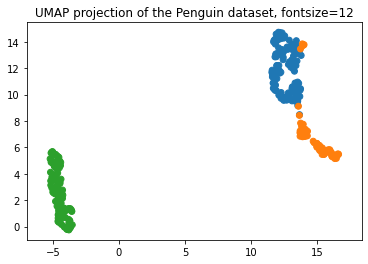

In [5]:
plt.scatter(
    embedding[:, 0], 
    embedding[:, 1], 
    c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title(f'UMAP projection of the Penguin dataset, fontsize=12')

### Reference image
Here what we got for the image in the previous cell. According to your eye-ball test, did you get the expected results? Does your image look similar? Exactly the same?
<img src="../reports/figures/umap_penguins_42_reference.png" width=500 height=400 />


## It's Test Time

First let's see what happens if we run things from a clean notebook and evnironment!

### Default Better Principle: Test running clean notebooks
There were a bunch of **MISSING-STATE** and **VARIABLE-SCARCITY** bugs in this Notebook to start with. Did you fix them all? Try testing it now.
```
Kernel -> Restart & Run All
```

### Default Better Principle: Test run from a fresh environment
You could have used `pip install umap-learn` or `conda install -c conda-forge umap-learn` UMAP from the command line. This would lead to **MISSING-STATE** in your environment when you test run your work from your own machine. To check that you don't have state hiding in your environment that you didn't add to your `environment.yml` run the following:

```
conda deactivate
make delete_environment
make create_environment
conda activate easydata-tutorial
make update_environment
```
Then, finally, try the full Notebook run again:
```
Kernel -> Restart & Run All
```

**Fun Fact** Easydata has a built in `run_notebook` utility function. It's perfect for automating testing of notebook runs.

### Default Better Principle: Have unit tests and continuous integration (CI) tests

Easydata makes it easy for you to run your tests via `make test`. By default it locally runs all tests (slow and CI), and in CI, it only runs CI tests (so you can separate your fast/slow/necessarily local tests). 

Give it a go. `make test` now.

If you passed `make test` continue on to complete this challenge.

## Complete the challenge
Fingers crossed, now that things are tested from scratch, everything actually now works as expected. Let's find out. 


Run `make test_challenge` to check that you've completed the challenge and continue with your reproducibility quest.